<a href="https://colab.research.google.com/github/pikey-msc/CursoDF/blob/master/M2_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga información de Github

In [2]:
try:
    !rm -rf CursoDF
except:
    print("No existe la ruta aún")

!git clone "https://github.com/pikey-msc/CursoDF"

Cloning into 'CursoDF'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (68/68), done.
Receiving objects: 100% (186/186), 16.07 MiB | 23.57 MiB/s, done.
remote: Total 186 (delta 35), reused 0 (delta 0), pack-reused 118
Resolving deltas: 100% (82/82), done.


#Carga de librerías

In [0]:
#Cargar módulo de R en Python
# A bit of imports
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load in the r magic
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'
#%load_ext rpy2.ipython

In [0]:
#Cargar librerías de R
%%R
install.packages("quantmod")
library(quantmod)
install.packages("asbio")
library(asbio)
install.packages("DescTools")
library(DescTools)
install.packages("DataExplorer")
library(DataExplorer)
install.packages("corrplot")
library("corrplot")

#Análisis Exploratorio de datos

## Estimadores estadísticos
### Estadística básica
Uso de la función `summary(x)` devuelve los siguientes valores de un conjunto de datos numéricos:\
1. Mínimo 
2. Cuantil al 25% o primer cuartil: $\textbf{P}(x\le q_{25\%})\leq 25\%$ ó $\textbf{P}(x\geq q_{25\%})\geq 1 - 25\%$
3. Mediana o cuantil al 50%: $\textbf{P}(x\le q_{50\%})\leq 50\%$ ó $\textbf{P}(x\geq q_{50\%})\geq 1 - 50\%$
4. Promedio $\sum_{i=1}^n \frac{x}{n}$
5. Cuantil a 75% o tercer cuartil:  $\textbf{P}(x\le q_{75\%})\leq 75\%$ ó $\textbf{P}(x\geq q_{75\%})\geq 1 - 75\%$
6. Máximo

Si los datos son de tipo caracter devuelve lo siguiente:
1. Longitud: Número de casos
2. Class: Tipo valores de clase
3. Mode: Tipo de valor

In [6]:
%%R
# plot  points  lines

today <- Sys.Date()
three_months_ago <- seq(today, length = 2, by = "-3 months")[2]

#Creación del objeto para guardar los datos
dataEnv<-new.env()
getSymbols.yahoo(c("WALMEX.MX","GCARSO.MX"), env=dataEnv, from = three_months_ago, to = today)

Datos=as.data.frame(dataEnv$`WALMEX.MX`)
Datos$Cambio="Igual"
#dataEnv$`WALMEX.MX`$Cambio="Igual"
for (i in (1:nrow(Datos)))
{
Datos$Cambio[i] = ifelse(Datos$WALMEX.MX.Close[i] >Datos$WALMEX.MX.Open[i], "Subió", "Bajó")
}

print(head(Datos))
print(tail(Datos))
summary(Datos)

           WALMEX.MX.Open WALMEX.MX.High WALMEX.MX.Low WALMEX.MX.Close
2019-08-26          56.01          56.28         54.47           55.09
2019-08-27          55.11          55.58         54.73           55.47
2019-08-28          55.59          56.28         55.32           55.64
2019-08-29          55.82          56.58         55.72           56.31
2019-08-30          56.63          56.99         56.25           56.73
2019-09-02          56.79          56.80         55.79           55.99
           WALMEX.MX.Volume WALMEX.MX.Adjusted Cambio
2019-08-26         12163627           54.80969   Bajó
2019-08-27         40700360           55.18776  Subió
2019-08-28         13743060           55.35690  Subió
2019-08-29         11952984           56.02349  Subió
2019-08-30         29132990           56.44135  Subió
2019-09-02          2984312           55.70512   Bajó
           WALMEX.MX.Open WALMEX.MX.High WALMEX.MX.Low WALMEX.MX.Close
2019-11-14          54.37          55.27         54.11

### Medidas estadísticas más comunes
Estadísticos insesgados:
1. Promedio: $\bar{x}=\sum_{i=1}^n \frac{x}{n}$
2. Desviación estándar  $\hat{\sigma}=\sqrt{\frac{\sum_{i=1}^n(x-\bar{x})^2}{n-1}}$
3. Varianza: $\hat{\sigma}^2=\frac{\sum_{i=1}^n(x-\bar{x})^2}{n-1}$
3. Asimetría: $\hat{\tau}=\frac{n}{(n-2)(n-1)}\frac{\sum_{i=1}^n(x_i-\bar{x})^3}{\hat{\sigma}^3}$
4. Curtosis: $\hat{\kappa}=\frac{n(n+1)}{(n-1)(n-2)(n-3)}\frac{\sum_{i=1}^n(x_i-\bar{x})^4}{\hat{\sigma}^4}-\frac{3(n-1)^2}{(n-2)(n-3)}$
5. $k$-ésimo momento: $\mu_k=\sum_{i=1}^n(x-\bar{x})^k\textbf{P}(x\le q_{\alpha\%})$
5. Cuantil:  $\textbf{P}(x\le q_{\alpha\%})\leq \alpha\%$ ó $\textbf{P}(x\geq q_{\alpha\%})\geq 1 - \alpha\%$
6. Promedio de colas (<<*Expected shortfall*>>): $\textbf{E}(x|x<q_\alpha)$\

Para todo $\alpha \in [0,1]$ y $n$ es el número de observaciones, $\textbf{P}(\cdot)$ es la probabilidad, y la $E(\cdot)$ es la esperanza matemática.




<div class="figure">
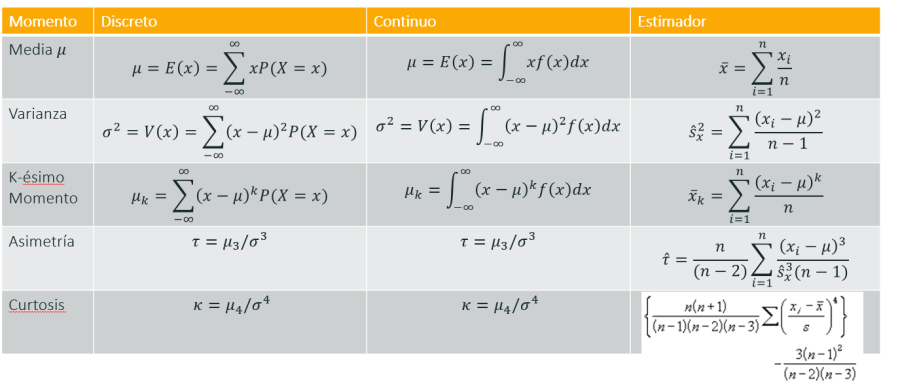

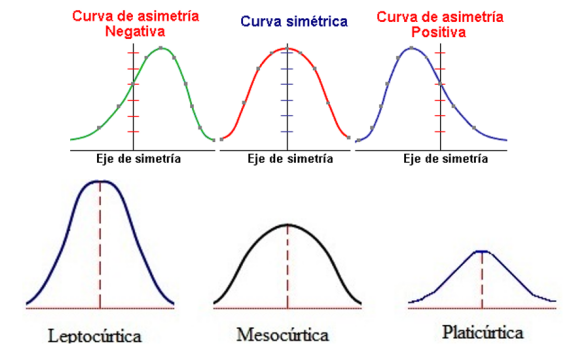

In [8]:
%%R
nt=nrow(Datos)
Datos$delta=as.matrix(c(0,Datos$WALMEX.MX.Close[2:nt]/Datos$WALMEX.MX.Close[1:(nt-1)]-1))
print(tail(Datos))
#print(tail(Datos_delta))

n=nt
#estadístico y comprobación
mean=mean(Datos$delta)
mean_c=sum(Datos$delta)/n

sd=sd(Datos$delta)
sd_c=sqrt(sum((Datos$delta-mean)^2)/(n-1))
median=median(Datos$delta)
median_c=quantile(Datos$delta,0.5)
asim=skew(Datos$delta,method="unbiased")
asim_c=(n/((n-2)*(n-1)))*(sum((Datos$delta-mean)^3)/sd^3)
kurt=kurt(Datos$delta,method="unbiased")
kurt_c=(n*(n+1))/((n-2)*(n-1)*(n-3))*sum((Datos$delta-mean)^4)/sd^4-(3*(n-1)^2)/((n-2)*(n-3))

q01=quantile(Datos$delta,0.01)
ESq01=mean(Datos$delta[which(Datos$delta<q01)])

print("Promedio")
print(mean) 
print(mean_c)
print("Standard") 
print(sd)
print(sd_c)
print("Median")
print(median)
print(median_c)
print("Asimetría")
print(asim)
print(asim_c)
print("Kurtosis")
print(kurt)
print(kurt_c)
print("Cuantil al 1%")
print(q01)
print("Cuantil al ESq01")
print(ESq01)

print(summary(Datos$delta))

           WALMEX.MX.Open WALMEX.MX.High WALMEX.MX.Low WALMEX.MX.Close
2019-11-14          54.37          55.27         54.11           55.20
2019-11-15          55.25          55.25         54.25           54.67
2019-11-19          54.59          55.34         54.50           54.93
2019-11-20          55.00          55.30         54.41           54.54
2019-11-21          54.69          54.69         53.51           53.65
2019-11-22          53.60          55.14         53.55           55.03
           WALMEX.MX.Volume WALMEX.MX.Adjusted Cambio        delta
2019-11-14         15954811           54.91914  Subió  0.019202382
2019-11-15         10270463           54.39183   Bajó -0.009601503
2019-11-19         11432601           54.65051  Subió  0.004755844
2019-11-20         11710523           54.26249   Bajó -0.007099927
2019-11-21         15024256           53.37702   Bajó -0.016318280
2019-11-22         13413054           54.75000  Subió  0.025722217
[1] "Promedio"
[1] 9.086544e-05
[1

## Análisis gráfico


### Gráficas simples

[1] -0.05802697  0.13969548 -2.54346728 -1.68583693 -1.09877391 -0.66269070


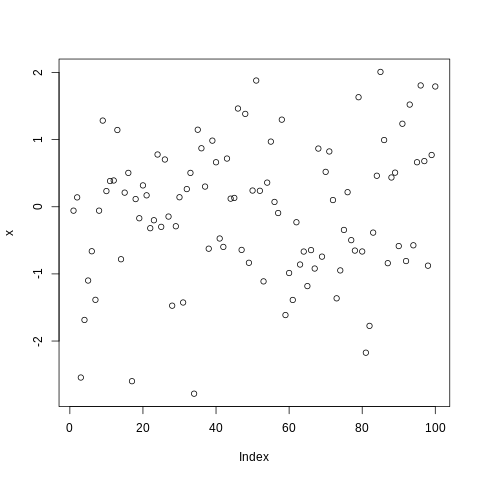

In [9]:
%%R
# plot  points  lines
x <- rnorm(100,0,1) # Simulando 100 observaciones de una v.a. Normal(0,1)
print(head(x))
plot(x)


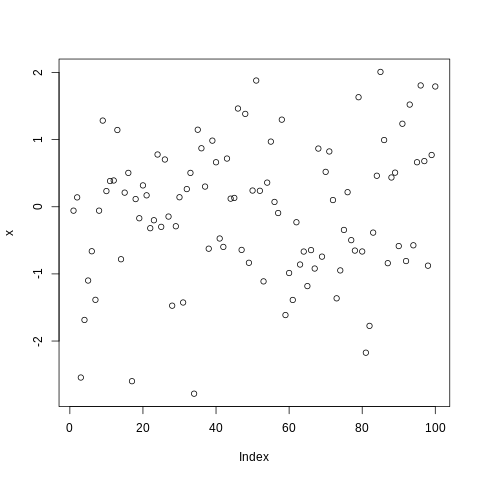

In [10]:
%%R
# < 001 >
plot(x,type="p") # Lo mismo que plot(x), type="p" es por default



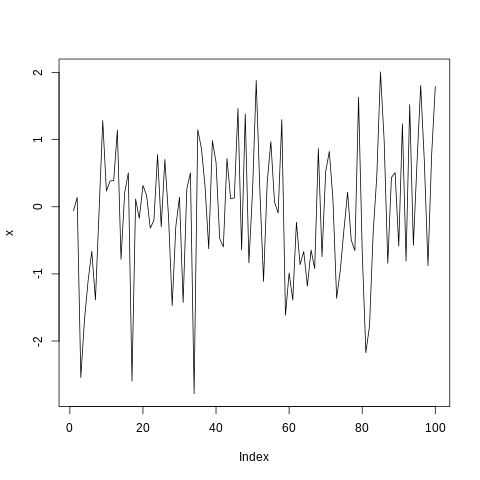

In [11]:
%%R
# < 002 >
plot(x,type="l") # Con líneas


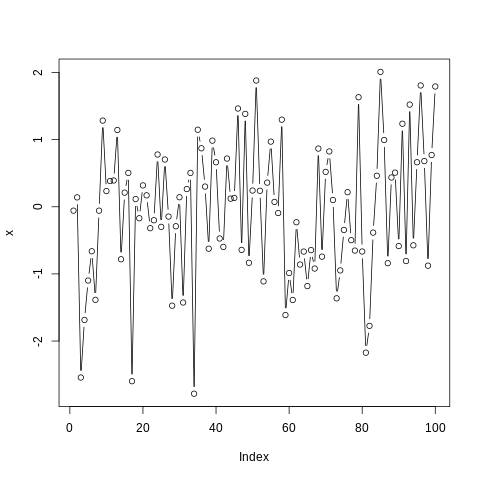

In [12]:
%%R
# < 003 >
plot(x,type="b") # Puntos y líneas (no me gusta)


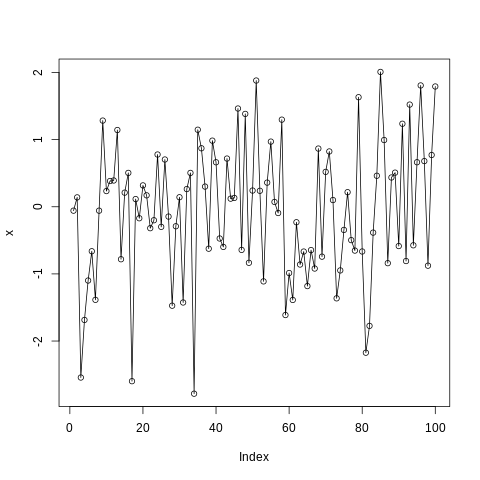

In [16]:
%%R
# < 004 >
# Un mejor estilo de puntos y líneas:
plot(x)  # Colocamos los puntos
lines(x) # Los unimos con líneas


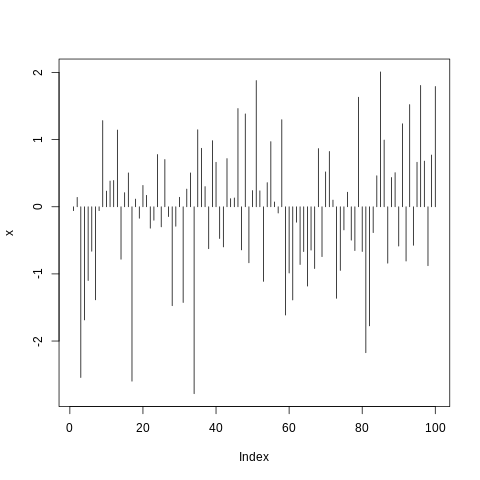

In [17]:
%%R
# < 005 >
plot(x,type="h") # Con líneas verticales


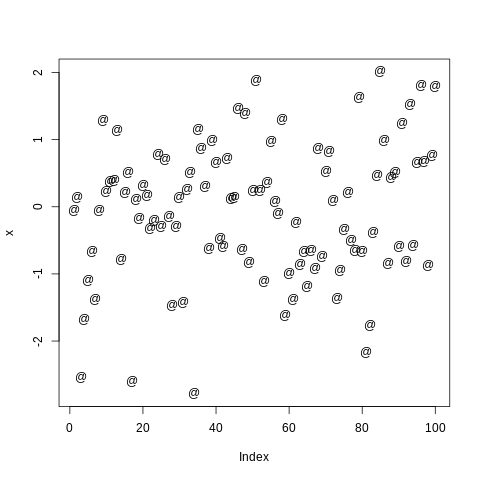

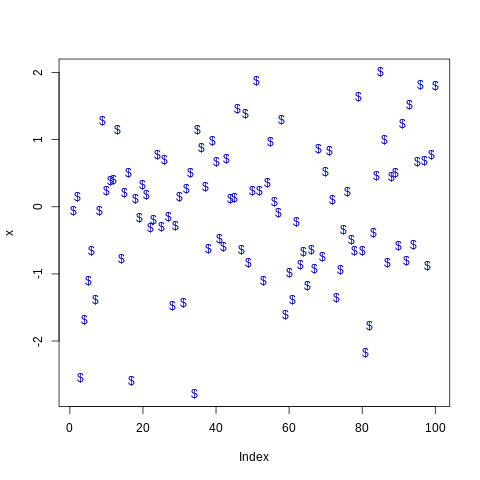

In [18]:
%%R

# < 006 >
plot(x,pch="@")  # Con caracteres especiales

# < 007 > 
plot(x,pch="$",lwd=3,col="blue") # Color y mayor grosor


Catálogo de colores

In [19]:
%%R
# El catálogo de colores puede consultarse con:
colors()


  [1] "white"                "aliceblue"            "antiquewhite"        
  [4] "antiquewhite1"        "antiquewhite2"        "antiquewhite3"       
  [7] "antiquewhite4"        "aquamarine"           "aquamarine1"         
 [10] "aquamarine2"          "aquamarine3"          "aquamarine4"         
 [13] "azure"                "azure1"               "azure2"              
 [16] "azure3"               "azure4"               "beige"               
 [19] "bisque"               "bisque1"              "bisque2"             
 [22] "bisque3"              "bisque4"              "black"               
 [25] "blanchedalmond"       "blue"                 "blue1"               
 [28] "blue2"                "blue3"                "blue4"               
 [31] "blueviolet"           "brown"                "brown1"              
 [34] "brown2"               "brown3"               "brown4"              
 [37] "burlywood"            "burlywood1"           "burlywood2"          
 [40] "burlywood3"       

Detalles de función plot: 

In [20]:
%%R
?plot

R Help on ‘plot’plot                 package:graphics                  R Documentation

_G_e_n_e_r_i_c _X-_Y _P_l_o_t_t_i_n_g

_D_e_s_c_r_i_p_t_i_o_n:

     Generic function for plotting of R objects.  For more details
     about the graphical parameter arguments, see ‘par’.

     For simple scatter plots, ‘plot.default’ will be used.  However,
     there are ‘plot’ methods for many R objects, including
     ‘function’s, ‘data.frame’s, ‘density’ objects, etc.  Use
     ‘methods(plot)’ and the documentation for these.

_U_s_a_g_e:

     plot(x, y, ...)
     
_A_r_g_u_m_e_n_t_s:

       x: the coordinates of points in the plot. Alternatively, a
          single plotting structure, function or _any R object with a
          ‘plot’ method_ can be provided.

       y: the y coordinates of points in the plot, _optional_ if ‘x’ is
          an appropriate structure.

     ...: Arguments to be passed to methods, such as graphical
          parameters (

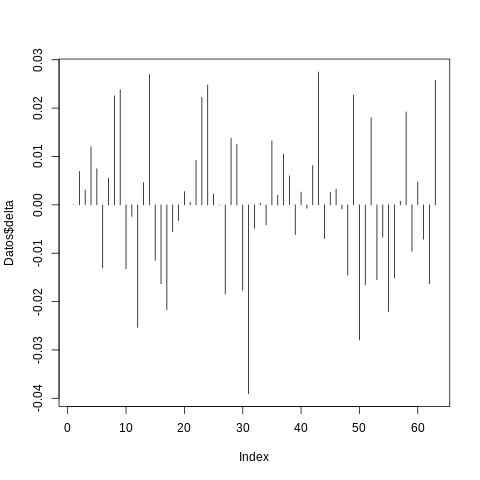

In [29]:
%%R
#plot(Datos$delta)
plot(Datos$delta,type="h")

### Histogramas

In [0]:
%%R
?hist

R Help on ‘hist’hist                 package:graphics                  R Documentation

_H_i_s_t_o_g_r_a_m_s

_D_e_s_c_r_i_p_t_i_o_n:

     The generic function ‘hist’ computes a histogram of the given data
     values.  If ‘plot = TRUE’, the resulting object of class
     ‘"histogram"’ is plotted by ‘plot.histogram’, before it is
     returned.

_U_s_a_g_e:

     hist(x, ...)
     
     ## Default S3 method:
     hist(x, breaks = "Sturges",
          freq = NULL, probability = !freq,
          include.lowest = TRUE, right = TRUE,
          density = NULL, angle = 45, col = NULL, border = NULL,
          main = paste("Histogram of" , xname),
          xlim = range(breaks), ylim = NULL,
          xlab = xname, ylab,
          axes = TRUE, plot = TRUE, labels = FALSE,
          nclass = NULL, warn.unused = TRUE, ...)
     
_A_r_g_u_m_e_n_t_s:

       x: a vector of values for which the histogram is desired.

  breaks: one of:

            • a vector giv

Gráfico de histogramas

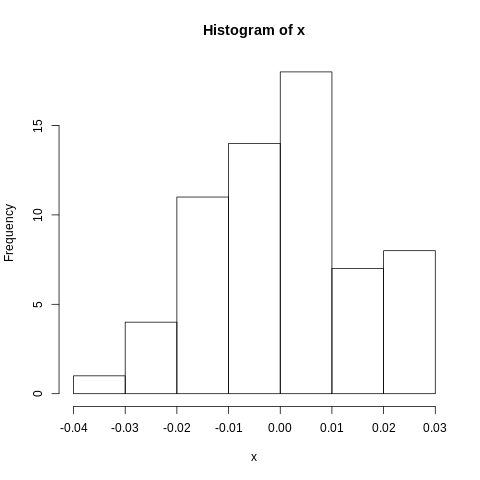

In [30]:
%%R

x=Datos$delta
hist(x)



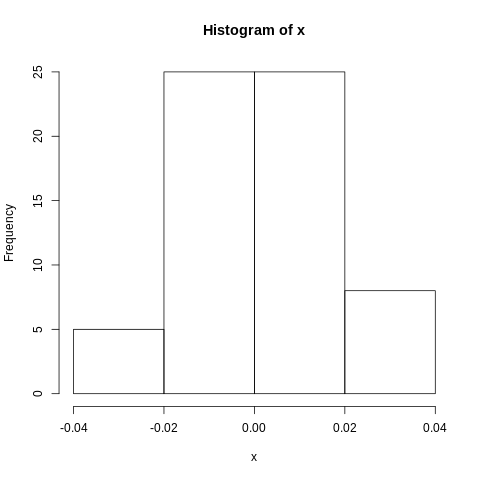

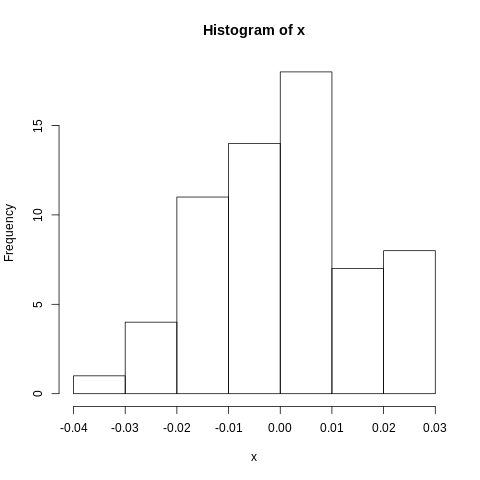

In [34]:
%%R
# Pudiera ser necesario utilizar en el menú > Ventanas,
# para cambiar de la línea de comandos al gráfico y viceversa.
# Por default, el número de clases se determina con base en el
# algoritmo de Sturges.


# < 012 > 

hist(x,breaks=4)   # Forzamos el histograma a tener 5-1=4 clases


# < 013 >

hist(x,breaks=7)  # Forzamos el histograma a tener 10-1=9 clases



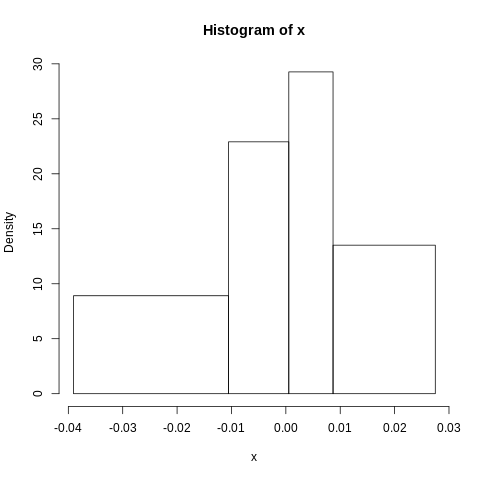

In [32]:
%%R
# < 014 >

b <- c(min(x),quantile(x,0.25),median(x),quantile(x,0.75),max(x))

hist(x,breaks=b)  # Usamos elementos del vector b como separadores de clase


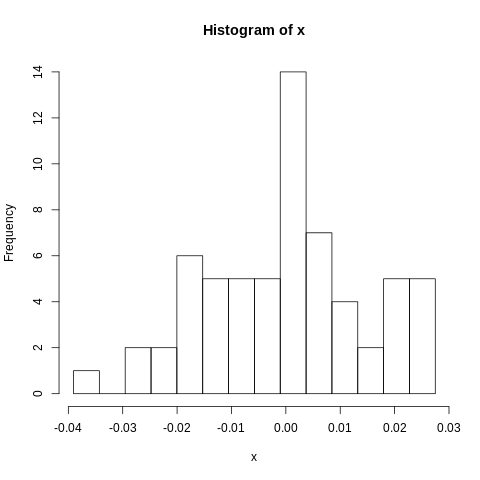

In [33]:
%%R
# Se habrá generado un aviso de error porque hay valores fuera del rango
# de -2 a 3, eso lo podemos evitar usando summary:


# < 015 >


# < 016 >

# También la función seq es útil para generar separadores de clase:

#print(seq(from=min(x),to=max(x),by=0.01)) # Sólo para recordar lo que genera

hist(x,breaks=seq(from=min(x),to=max(x),length=15))

# < 018 >

# Histograma de frecuencias, cada barra representa conteo de puntos por clase:


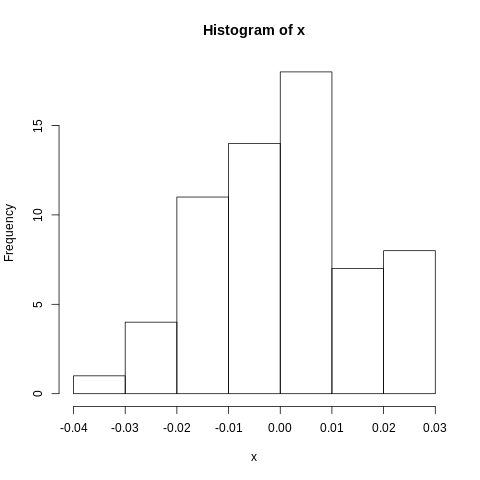

In [35]:
%%R
hist(x,freq=T)



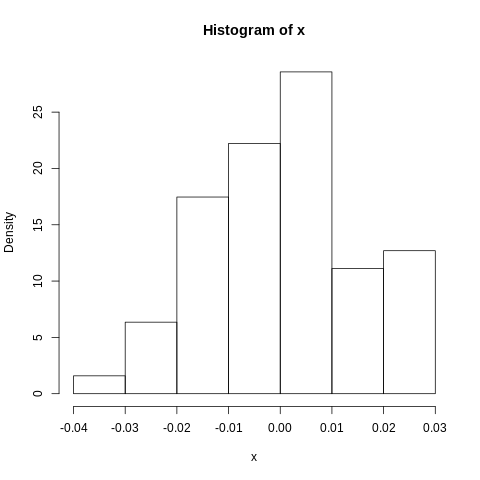

In [36]:
%%R
# < 019 >

# Pero si se desea un ajuste para que la suma de las áreas de las barras sea
# igual a 1 (y poder compararlo versus alguna densidad teórica) entonces:

hist(x,freq=F)



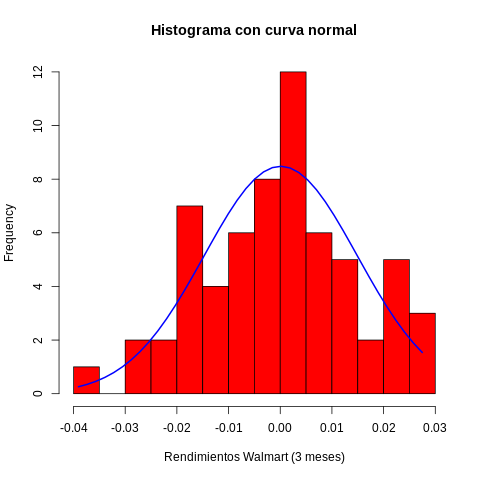

In [38]:
%%R
# < 020 >

# Y le agregamos la gráfica de la función de densidad de la cual se simularon
# los datos, que fue una v.a. Normal(0,1):
h<-hist(x, breaks=10, col="red", xlab="Rendimientos Walmart (3 meses)",
   main="Histograma con curva normal")

xfit<-seq(min(x),max(x),length=40)
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)
# < 021 >


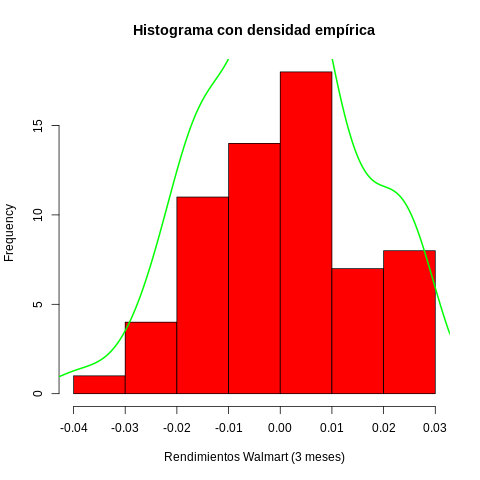

In [39]:
%%R
hist(x, breaks=5, col="red", xlab="Rendimientos Walmart (3 meses)",
   main="Histograma con densidad empírica")
lines(density(x), # density plot
 lwd = 2, # thickness of line
 col = "Green")




In [40]:
%%R
# Si en lugar del gráfico del histograma, queremos los datos con los que se
# construye, entonces:

print(hist(x,plot=F))

# que como podrá notar es un objeto que despliega información como una lista.
# Por ejemplo, si sólo deseamos los conteos por clase:

print(hist(x,plot=F)$counts)

# Frecuencias relativas:

print(hist(x,plot=F)$counts/length(x))



$breaks
[1] -0.04 -0.03 -0.02 -0.01  0.00  0.01  0.02  0.03

$counts
[1]  1  4 11 14 18  7  8

$density
[1]  1.587302  6.349206 17.460317 22.222222 28.571429 11.111111 12.698413

$mids
[1] -0.035 -0.025 -0.015 -0.005  0.005  0.015  0.025

$xname
[1] "x"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"
[1]  1  4 11 14 18  7  8
[1] 0.01587302 0.06349206 0.17460317 0.22222222 0.28571429 0.11111111 0.12698413


$names
[1] "breaks"   "counts"   "density"  "mids"     "xname"    "equidist"

$class
[1] "histogram"



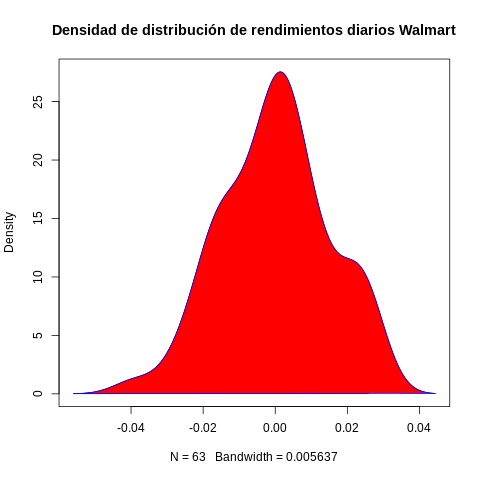

In [41]:
%%R

#Densidad

# Gráfica de densidad
d <- density(x)
plot(d, main="Densidad de distribución de rendimientos diarios Walmart")
polygon(d, col="red", border="blue")

# < 022 >





In [43]:
%%R
# Clase y modo de un histograma:

histograma <- hist(x,plot=F)

class(histograma)

mode(histograma)

attributes(histograma)

$names
[1] "breaks"   "counts"   "density"  "mids"     "xname"    "equidist"

$class
[1] "histogram"



### Gráficos avanzados

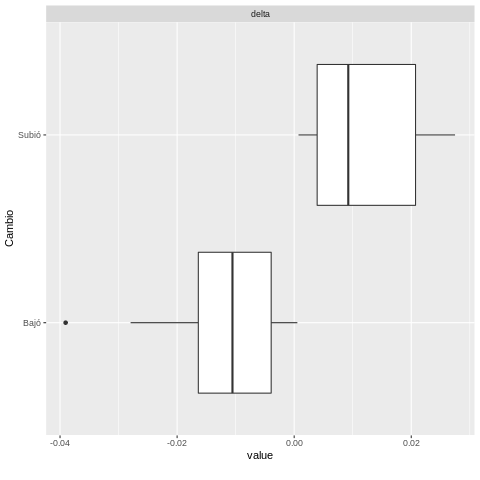

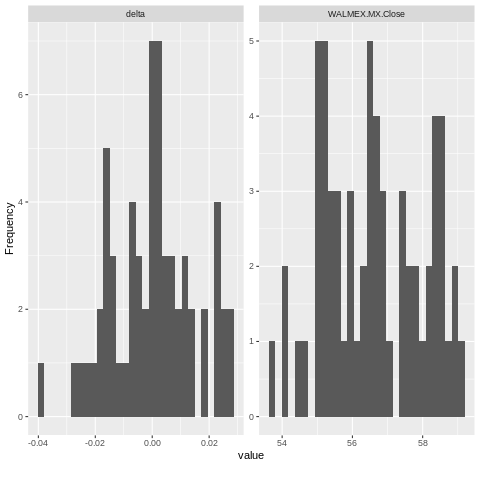

In [44]:
%%R
plot_boxplot(Datos[c("delta","Cambio")], by = 'Cambio')
#introduce(iris)
#head(iris)
plot_histogram(Datos[c("WALMEX.MX.Close","delta")])

##Correlaciones bivariadas

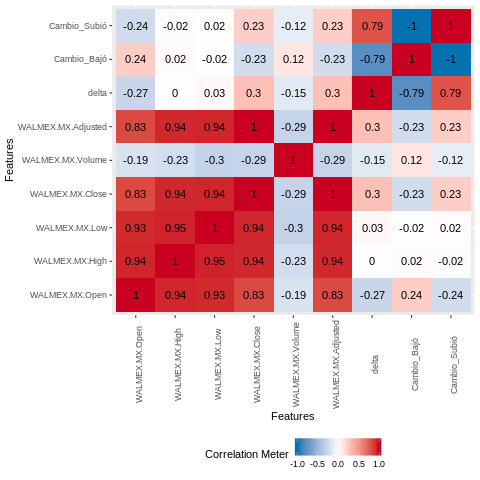

In [45]:
%%R
plot_correlation(Datos, cor_args = list("use" = "pairwise.complete.obs"))

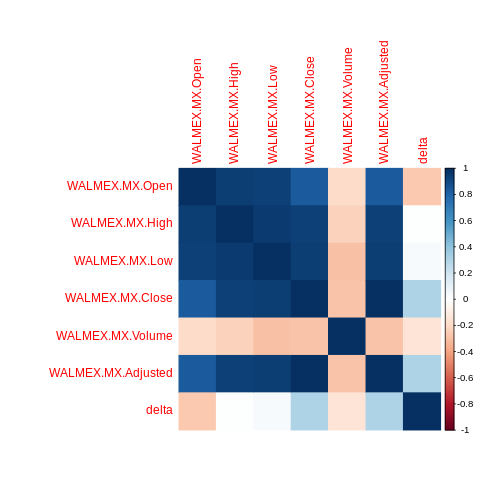

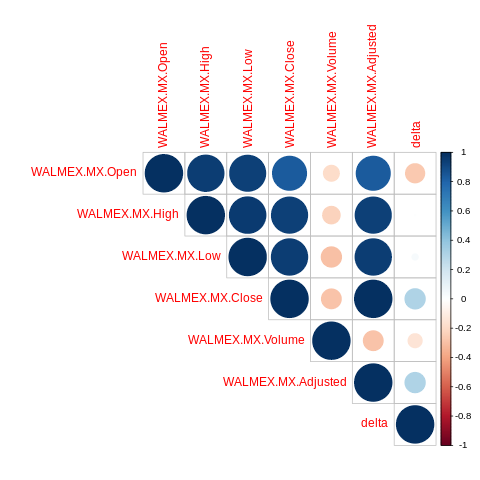

In [48]:
%%R
M=cor(subset(Datos, select = -c(Cambio) ))
#mapa de calor
corrplot(M, method="color")
#Correlación triangular
corrplot(M, type="upper")
#Correlación agrupada


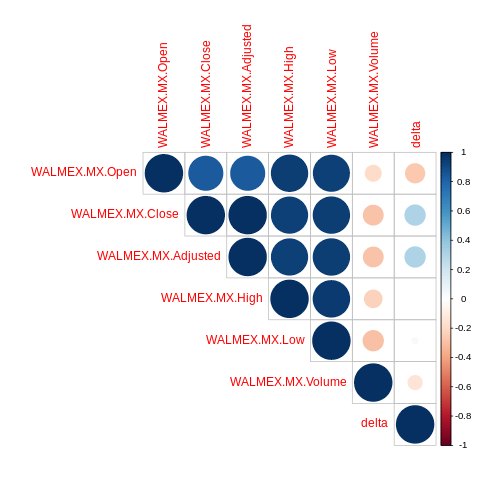

In [49]:
%%R
corrplot(M, type="upper", order="hclust")



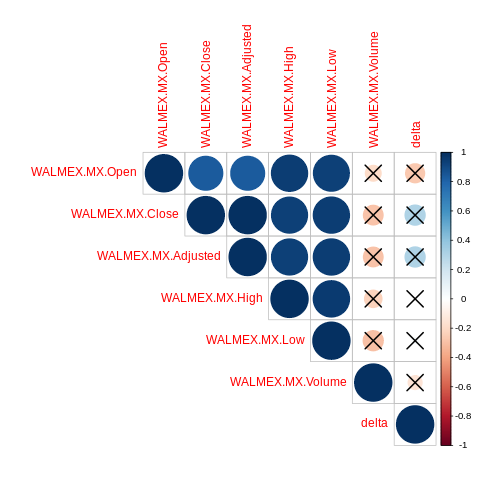

In [51]:
%%R
#calcular la significancia de correlación
cor.mtest <- function(mat, ...) {
    mat <- as.matrix(mat)
    n <- ncol(mat)
    p.mat<- matrix(NA, n, n)
    diag(p.mat) <- 0
    for (i in 1:(n - 1)) {
        for (j in (i + 1):n) {
            tmp <- cor.test(mat[, i], mat[, j], ...)
            p.mat[i, j] <- p.mat[j, i] <- tmp$p.value
        }
    }
  colnames(p.mat) <- rownames(p.mat) <- colnames(mat)
  p.mat
}
# matrix of the p-value of the correlation
p.mat <- cor.mtest(subset(Datos, select = -c(Cambio) ))

corrplot(M, type="upper", order="hclust", 
         p.mat = p.mat, sig.level = 0.01)

#Teoría de conjuntos aproximados (*Rough set theory*)
Modelos Rough Set Theory (RST)
* Desarrollado por Pawlak (1991)
* Permiten descubrir patrones escondidos en los datos
* Identifica dependencias parciales o totales (causa - efecto)
* Elimina redundancia en los datos
* Da aproximaciones a valores nulos o inválidos, datos perdidos, datos dinámicos etc.
* Está basada en la lógica

Caracteristicas de los Modelos RST
* Elimina redundancia en los datos
* La esencia es mantener o considerar solo aquellos atributos que preservan la relación de inseparabilidad:
* Se reduce la cantidad de objetos del universo a considerar
* Se reduce la cantidad de atributos a tener en cuenta
* Los atributos rechazados son redundantes y su eliminación no afecta la calidad de la inferencia
* Crea conjuntos aproximados
* Una vez eliminados la redundancia de los datos se crean conjuntos aproximados o representados por aproximaciónes por encima y por debajo.
* La aproximación por encima corresponde a todos los objetos que con seguridad pertenecen al conjunto
* La aproximación por debajo contiene los elementos que posiblemente pertenecen al conjunto

**Crea reglas de decisión**\
Se obtienen reglas de decisión de un sistema de información. Una regla de decisión puede expresarse como una sentencia lógica que relaciona la descripción de condiciones y las clases de decisión:
> ``SI (se_cumplen_condiciones) ENTONCES (el_objeto_pertenece_a_una_clase_de_decisión_dada)

SI (se_cumplen_condiciones) ENTONCES (el_objeto_pertenece_a_una_clase_de_decisión_dada)``

Las reglas generadas pueden ser determinísticas o no determinísticas
Determinística (consistente, precisa, exacta) se entiende si
$$C−>D$$
C−>D
No Determinística (inconsistente,aproximada) que sería cuando las condiciones pueden conducir a varias posibles decisiones


Aplicación la técnica de Rough Set a un conjunto de datos que pretenden definir si el desempeño de un deportista es bueno medio ó malo, según su trabajo en tres pruebas de su estado físico, una prueba de actividad moderada, una prueba aeróbica, y una anaeróbica.
Los resultados son medidos y clasificados como bueno, medio y bajo y codificados como 1,0 y -1 respectivamente.
El proceso se puede resumir en cinco pasos:\
PASO 1. Definir la tabla de información\
PASO 2. Definir la tabla de decisión\
PASO 3. Establecer la discernibilidad de los elementos del conjunto a aproximar\
PASO 4. Descubrir las dependencias y obtener las reducciones\
PASO 5. Obtener las reglas de decisión


**PASO 1. Definir la tabla de información**

<div class="figure">
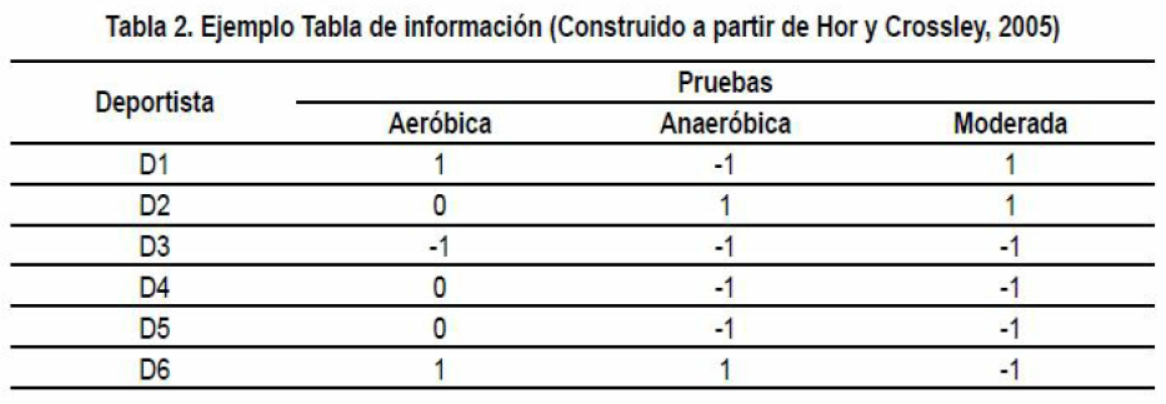
</div>

<p><strong>PASO 2 Definir la tabla de decisión</strong></p>
<p><strong>Tabla de decisión</strong></p>
<div class="figure">
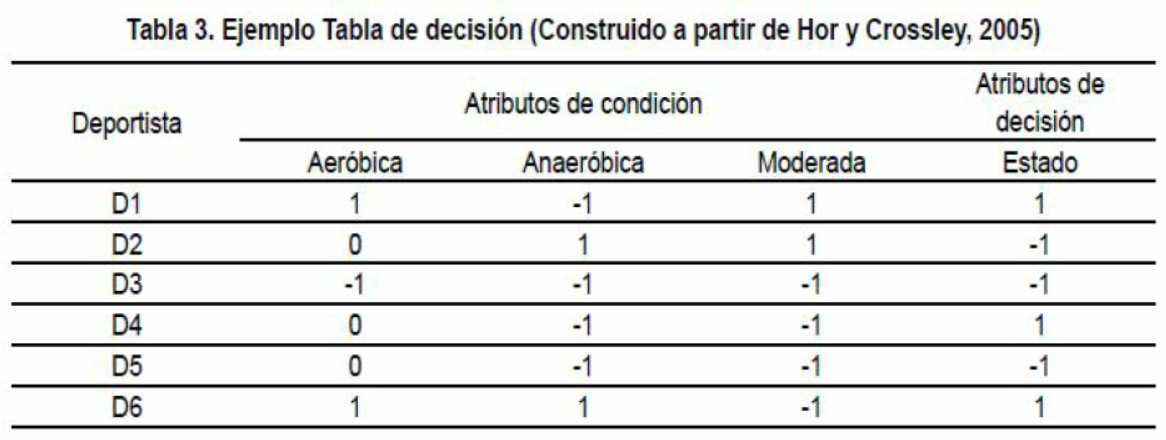
</div>


</div>
<p>Se han definido cuales se consideran los atributos de decisión y condición:</p>
<ul>
<li>Atributo de decisión es aquel que caracteriza al deportista como bueno o malo</li>
<li>Atributo de condición se refiere al desempeño en las actividades de prueba,en donde se categorizan como bueno ó malo ó medio</li>
</ul>
<p>La tabla de decisión de manera formal esta conformada por una cuádrupla así:</p>
<p><span class="math display">$S =\{ U , C, D , Q \}$</span></p>
</div>

PASO 2 Definir la tabla de decisión
Donde:
* $U$ es el conjunto finito de objetos, en este caso los seis deportistas
* $C$ es el conjunto finito de atributos de condición
* $D$ es el conjunto finito de atributos de condición de respuesta
* $Q$ es el conjunto finito de todos los atributos
* $Vq$ es el dominio de cada atributo q, V es la unión de todos los dominios, $V=[-1,0,1]$ que corresponde al desempeño:
* -1 = malo
* 0 = medio
* 1 = bueno
* $U$ = $[D_1, D_2, D_3, D_4, D_5, D_6]$
* $C$ = [Aeróbica, Anaeróbica, Moderada]
* $D$ = [Estado]
* $Q$ = Aeróbica, Anaeróbica, Moderada, Estado


<p><strong>PASO 3. Establecer la discernibilidad de los elementos del conjunto a aproximar</strong></p>
<ol style="list-style-type: lower-alpha">
<li>Definimos la función de información tal que se crea una relación (objeto, atributo):</li>
</ol>
<p><span class="math display">$f \colon U \times Q \to V$</span></p>
<p>Ejemplo:</p>
<p><span class="math display">$f(D1, Aeróbica) = 1, f(D1, Anaeróbica) = -1, f(D1, Moderada) = 1, . .$</span></p>
<ol start="2" style="list-style-type: lower-alpha">
<li>Definimos las relaciones de indiscernibilidad, para ello se dice que $x$ está relacionado con $y$:</li>
</ol>
<p><span class="math display">$xI_py$</span></p>
<p>Si para todo atributo $q$, $P$ es un subconjunto de atributos de $V$, se cumple:</p>
<p><span class="math display">$f(x_1 , q) = f(x_2 , q)$</span></p>
</div>

<p><strong>PASO 3. Establecer la discernibilidad de los elementos del conjunto a aproximar</strong></p>
<p><strong>Tabla de decisión</strong></p>
<div class="figure">
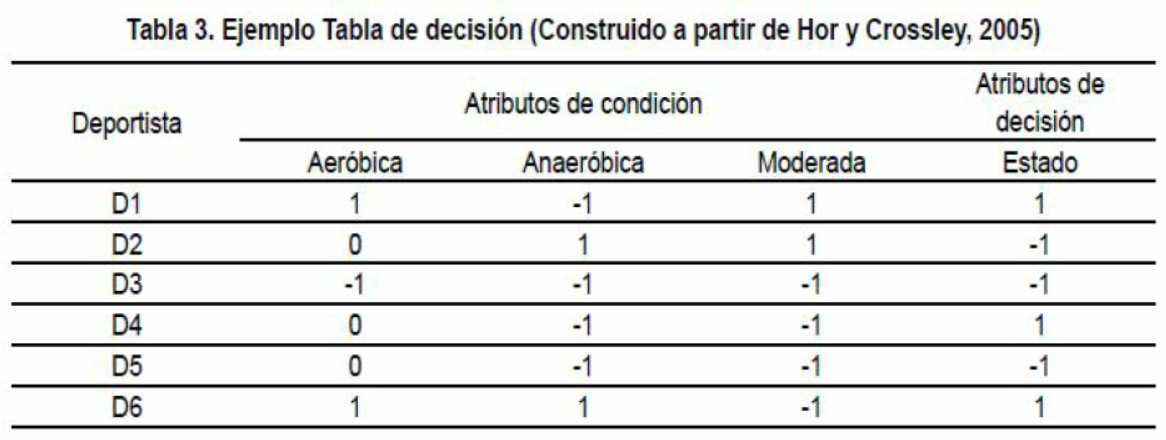

</div>
<p>Entonces para un conjunto P de atributos, P={aeróbica, anaeróbica, moderada) se tiene los elementos discernibles e indiscernibles:</p>
<p><span class="math display">$I_p(D_1) = [D_1]$</span></p>
<p><span class="math display">$I_p(D_2) = [D_2]$</span></p>
<p><span class="math display">$I_p(D_3) = [D_3]$</span></p>
<p><span class="math display">$I_p(D_4) = Ip[D_5] = [D_4,D_5]$</span> <span class="math display">$I_p(D_6) = [D_6]$</span> <span class="math display">$I_p = \{[D_1], [D_2], [D_3], [D_4,D_5], [D_6]\}$</span></p>
<p>Para este caso los elementos indiscernibles son el $D_4$ y $D_5$</p>
</div>

<p><strong>PASO 3. Establecer la discernibilidad de los elementos del conjunto a aproximar</strong></p>
<p><strong>Tabla de decisión</strong></p>
<div class="figure">
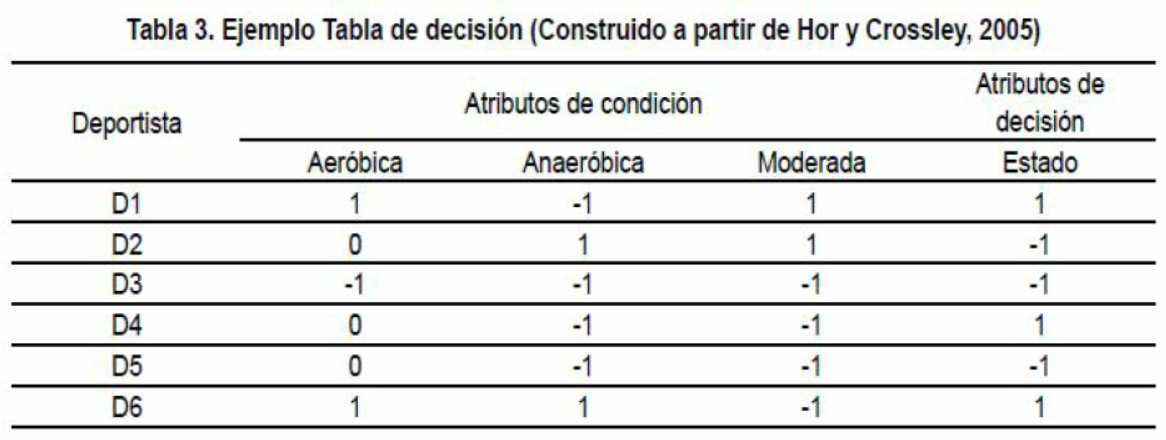

Las aproximaciones con un conjunto $X14$ de deportistas cuyo estado es bueno = 1 son:\
Inferior: $[D_1,D_6]$\
Superior: $[D_1,D_4,D_5,D_6]$\
Frontera: $[D_4,D_5]$\
Las aproximaciones con un conjunto $X2$ de deportistas cuyo estado es malo = -1 son:
Inferior: $[D_2,D_3]$\
Superior: $[D_2,D_3,D_4,D_5]$\
Frontera: $[D_4,D_5]$



<p><strong>PASO 4. Descubrir las dependencias y obtener las reducciones</strong></p>
<p>Es necesario establecer ahora las dependencias y obtener las reducciones,para ello se parte de la calidad de las aproximaciones encontradas, para el presente caso se tiene el conjunto aproximado X={X1,X2}, cuya calidad de aproximación se da por:</p>
<p><span class="math display">$G_p(X) = [[Inferior = 1][Inferior = -1]]/[U = Total]$</span></p>
<p>Donde: Representa los elementos de U correctamente clasificados</p>
<p><span class="math display">$G_p(X) = [[D1,D6 ][D2,D3 ]]/[U = Total]$</span></p>
<p>Entonces:</p>
<p><span class="math display">$G_p(X) = [[2][2]]/[6] = 0.667$</span></p>
</div>

<p><strong>PASO 4. Descubrir las dependencias y obtener las reducciones</strong></p>
<p>Para obtener las dependencias y reducciones es necesario tener la calidad de aproximación para cada atributo, donde los conjuntos de atributos son:</p>
<p>P1={Aeróbica}</p>
<p>P2={Anaeróbica}</p>
<p>P3={Moderada}</p>
<p>P4={Aeróbica, Anaeróbica}</p>
<p>P5={Aeróbica, Moderada}</p>
<p>P6={Anaeróbica, Moderada}</p>
<p>P={Aeróbica, Anaeróbica, Moderada}</p>
<p>Gamma = Calidad de la Aproximación</p>
</div>

<p><strong>PASO 4. P1={Aeróbica}</strong></p>
<p><strong>Tabla de decisión</strong></p>
<div class="figure">
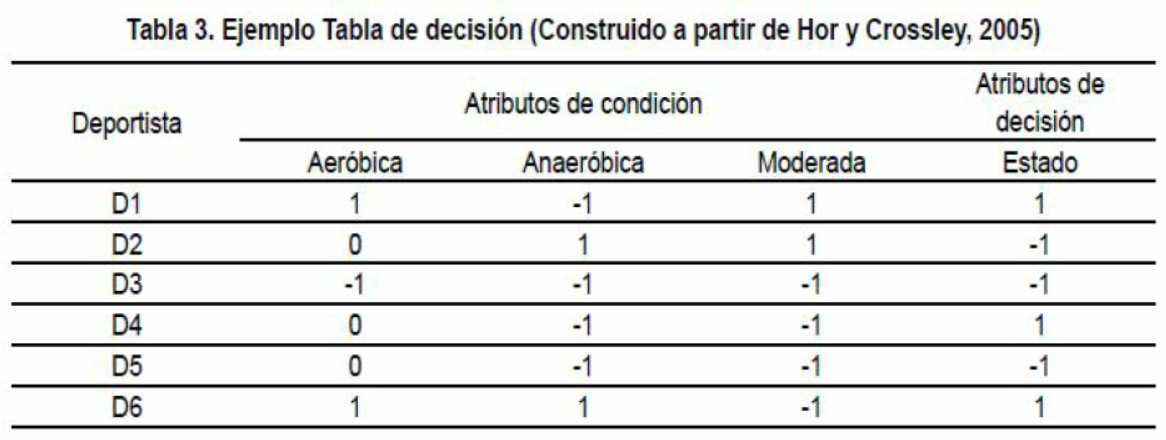

</div>
<p><span class="math display">$G_P(X) = [[Inferior = 1][Inferior = 0][Inferior=-1]]/[U = Total]$</span></p>
<p><span class="math display">$G_p(X) = [[D1,D6][0][D3]/[U = Total]$</span></p>
<p><span class="math display">$G_p(X) = [[2][0][1]]/[6] = 0.500$</span></p>
</div>

<p><strong>PASO 4. P2={Anaeróbica}</strong></p>
<p><strong>Tabla de decisión</strong></p>
<div class="figure">
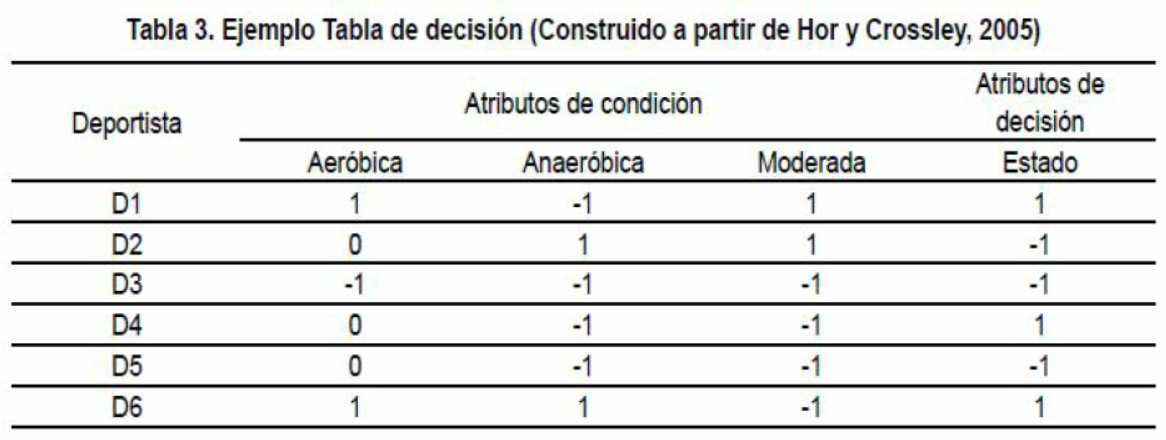

</div>
<p><span class="math display">$G_p(X) = [[Inferior = 1][Inferior = 0][Inferior=-1]]/[U = Total]]$</span></p>
<p><span class="math display">$G_p(X) = [[0][NA][0]]/[U = Total]$</span></p>
<p><span class="math display">$G_p(X) = [[0][0][0]]/[6] = 0.000$</span></p>
</div>

<p><strong>PASO 4. P3={Moderada}</strong></p>
<p><strong>Tabla de decisión</strong></p>
<div class="figure">
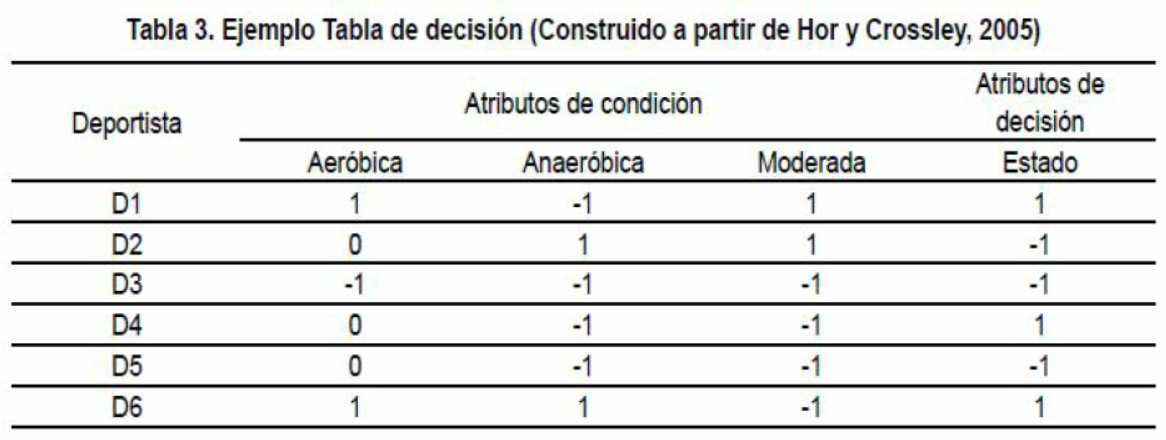

</div>
<p><span class="math display">$G_p(X) = [[Inferior = 1][Inferior = 0][Inferior =-1]]/[U = Total]$</span></p>
<p><span class="math display">$G_p(X) = [[0][NA][0]/[U = Total]$</span></p>
<p><span class="math display">$G_p(X) = [[0][0][0]]/[6] = 0.000$</span></p>
</div>

<p><strong>PASO 4. P4={Aeróbica,Anaeróbica}</strong></p>
<p><strong>Tabla de decisión</strong></p>
<div class="figure">
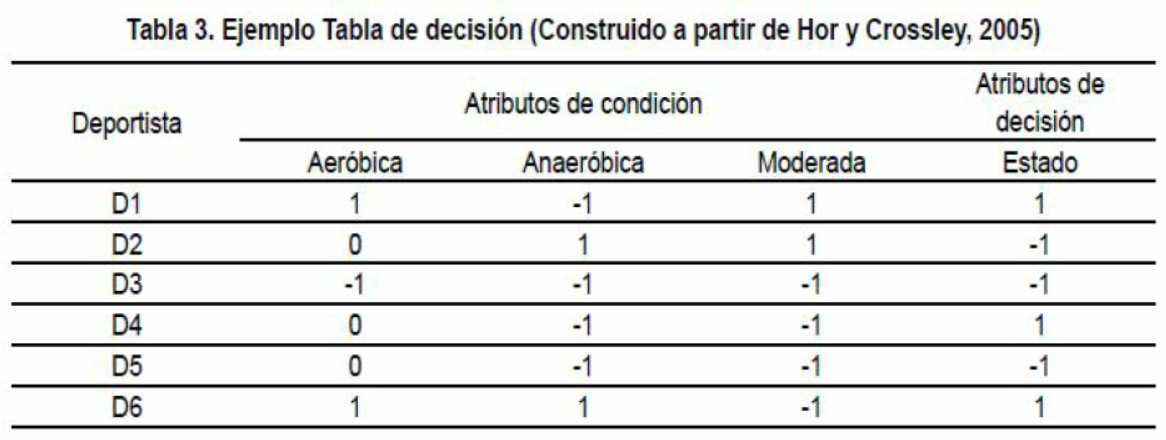

</div>
<p><span class="math display">$G_p(X) = [[Inferior = 1, -1][Inferior = 0, 1][Inferior = -1, -1][Inferior = 0, -1][Inferior = 1, 1]]/[U = Total]$</span></p>
<p><span class="math display">$G_p(X) = [[D1][D2 ][D3][D4 ,D5][D6]/[U = Total]$</span></p>
<p><span class="math display">$G_p(X) = [[1][1][1][0][1]]/[6] = 0.667$</span></p>
</div>

<p><strong>PASO 4. P5={Aeróbica,Moderada}</strong></p>
<p><strong>Tabla de decisión</strong></p>
<div class="figure">
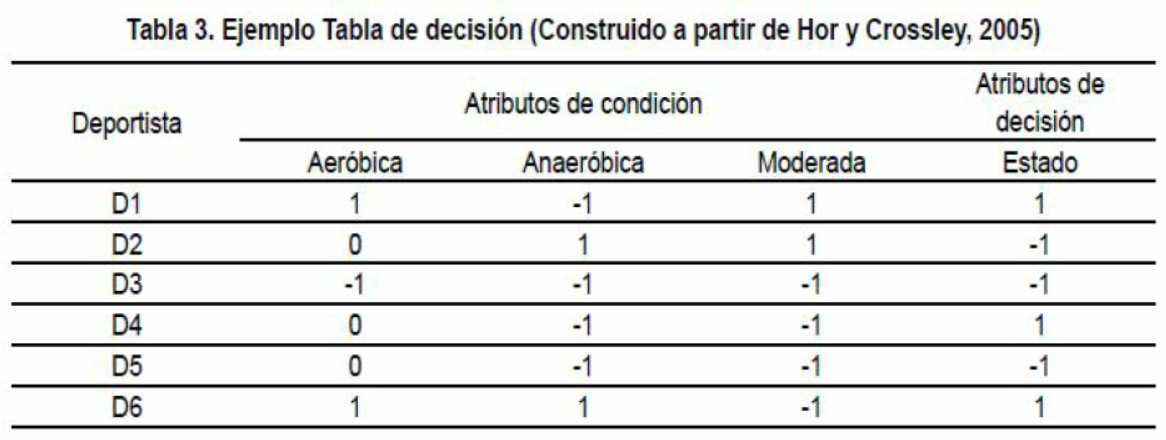

</div>
<p><span class="math display">$G_p(X) = [[Inferior = 1, 1][Inferior = 0, 1][Inferior = -1, -1][Inferior = 0, -1][Inferior = 1,-1]]/[U = Total]$</span></p>
<p><span class="math display">$G_p(X) = [[D1][D2 ][D3][D4 ,D5][D6 ]/[U = Total]$</span></p>
<p><span class="math display">$G_p(X) = [[1][1][1][0][1]]/[6] = 0.667$</span></p>
</div>

<p><strong>PASO 4. P6={Anaeróbica,Moderada}</strong></p>
<p><strong>Tabla de decisión</strong></p>
<div class="figure">
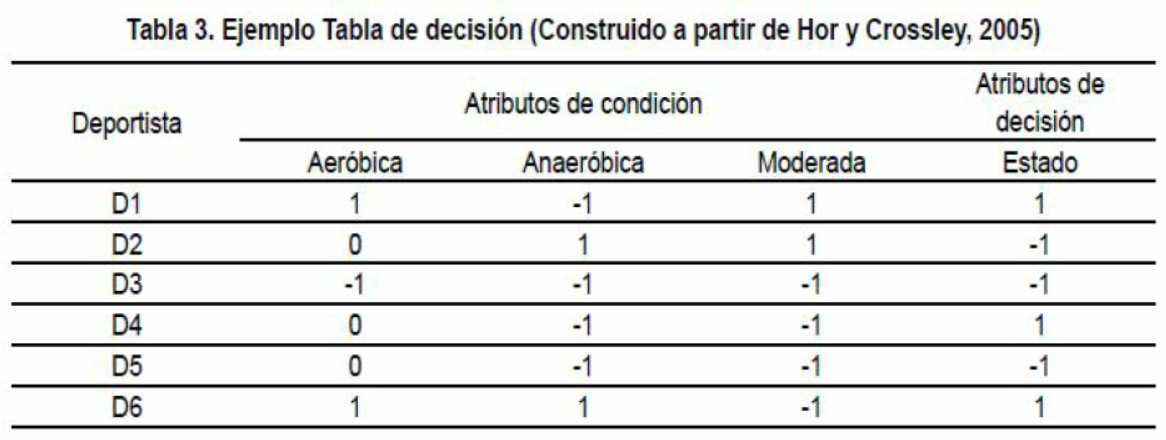

</div>
<p><span class="math display">$G_p(X) = [[Inferior=-1,1][Inferior=1,1][Inferior =-1,-1][Inferior=1,-1]/[U = Total]$</span></p>
<p><span class="math display">$G_p(X) = [[D1][D2][D3,D4,D5][D6]/[U = Total]$</span></p>
<p><span class="math display">$G_p_(X) = [[1][1][0][1]]/[6] = 0.500$</span></p>
</div>

<p><strong>PASO 4. Descubrir las dependencias y obtener las reducciones</strong></p>
<p><strong>Ejemplo calidad de las aproximaciones para cada atributo</strong></p>
<div class="figure">
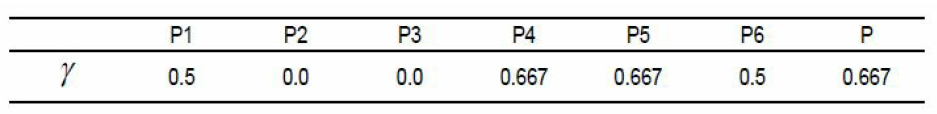

</div>
<p>De la tabla anterior se concluye que los reductos de P son P4 y P5, que son los conjuntos de atributos:</p>
<p><span class="math display">[P4 = Aeróbica, Anaeróbica]</span></p>
<p><span class="math display">[P5 = Aeróbica, Moderada]</span></p>
<p>Significa que se puede emplear como conjunto de atributos P4 o P5 ya que se obtiene la misma calidad de aproximación que usando P.</p>
</div>


<p><strong>PASO 5. Obtener las reglas de decisión. ejemplo con P=0.667</strong></p>
<p>Las reglas de decisión, como se mencionó anteriormente, son el tipo Si o ENTONCES, las cuales se construyen a partir de los atributos reductos P4 ó P5 o, considerando todos los atributos, P así:</p>
<p>Para P= {Aeróbica, Anaeróbica, Moderada}, que es el conjunto formado por los tres atributos tienen seis reglas de decisión así:</p>
<p><span class="math display">$\quad SI\quad f(x, P 1) = 1 \quad Y\quad f(x, P 2) = -1 \quad Y\quad f(x, P 3) = 1,\quad ENTONCES\quad f(x,Estado) = 1 = Bueno$</span></p>
<p><span class="math display">$\quad SI\quad f(x, P1) = 0 \quad Y\quad f(x, P2) = 1 \quad Y\quad f(x, P3) = 1,\quad ENTONCES\quad f(x,Estado) = -1 = Malo$</span></p>
<p><span class="math display">$\quad SI\quad f(x, P1) = -1 \quad Y\quad f(x, P2) = -1 \quad Y\quad f(x, P3) = -1,\quad ENTONCES\quad f(x,Estado) = -1 = Malo$</span></p>
</div>

<p><strong>PASO 5. Obtener las reglas de decisión.Con P = 0.667</strong></p>
<p><span class="math display">$\quad SI\quad f(x, P1) = 0 \quad Y\quad f(x, P2) = -1 \quad Y\quad f(x, P3) = -1,\quad ENTONCES\quad f(x, Estado) = 1 = Bueno$</span></p>
<p><span class="math display">$\quad SI\quad f(x, P1) = 0 \quad Y\quad f(x, P2) = -1 \quad Y \quad f(x, P3) = -1,\quad ENTONCES \quad f(x, Estado) = -1 = Malo$</span></p>
<p><span class="math display">$\quad SI\quad f(x, P1) = 1 \quad Y\quad f(x, P2) = 1 \quad Y\quad f(x, P3) = -1,\quad ENTONCES\quad f(x, Estado) = 1 = Bueno$</span></p>
<p>De las anteriores reglas se concluye que cuatro de ellas son determinísticas (1, 2, 3, 6) y dos no lo son (4, 5) dado que estas últimas reglas de decisión no permiten determinar el valor que debe asignársele a un deportista según los tres atributos considerados en P, hace que los elementos con estas características hagan parte de la frontera. Y por tanto, es aconsejable ampliar el rango de atributo que hagan posible discernir a los elementos de hacen parte de dicha frontera.</p>
</div>

<p><strong>PASO 5. Obtener las reglas de decisión. Con todas P</strong></p>
<p><strong>Tabla de decisión</strong></p>
<div class="figure">
<img src="data:image/pngbase64,iVBORw0KGgoAAAANSUhEUgAABI4AAAG4CAYAAAAjcKyOAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7H0FoJZVtvY/c0dnjLHo7u7uklBSQFFRQrpBuksJOzAAsRDFQBSQ7u7ujgOc7vhOn+d/nr2/fc7H4ejMnavjXC8Hl2/tWHuttVe9+93f/0tLS8Md+CNCKiHFCzrPqsx/E8C2kExIyoA0Xnv7SGUZWwIGknxA1yl8nipcUlN4kUiI5wNPJkjgfdZISVUFlgXbZmX2gTTeT2M9QgpSDQYsDbYC1jRHXScaHISLKrNOKp+kskRqHCGW7RJ4nZaawLaTiFOyt7wDPiao3yzpcAt46Wxa+OcglT3Yfzrz7Vf0yaJ93xLpPBX8Snz9jwSNV/QSl8VRAflFEOcpbb5U8cpWVu38MvhS15dLttcUylQCZSvOQFISZYkihFjWTSAfKUeJaVF8Fst/yYhhHT5iOf4vXkApSiLeLJecFs2W4hBNnkXyUTT7TkylLEsOUzxIohzyjO2oGntPimDdcKQlR3EqeIhLspHxGEKUgTR4NBeSwy2kRHI8MRwP22LpGPYTZSCZ7Un+Iw2kpbEXM2dvp4UvZJK6W0DPbi0vORToqZeC/0b5TCWZDUitcKwpiCCEE88oyoTHzG+V4w0W4JxOZj3RneUA0gXRPI8lxLMc+ZrKNtUW9Y/aS+XzVD1Pk77QuG7H4dcEyV4cwWJFOU+lZKWS67dAJGWPUkl8Vc4XdC+JzyzPM+qoDbWlNk05HjWT7Jh+C35ltC2975UMA7z7T8xXX9wc3I6jszsCPr3t+R8JUo3+E+fERcq2k1XqjBTqmBSEWqBtM/JLO5pCPZNCOTfzgjpC16mcMALZP6tbvVzJos/fBpx9zWxjhZNw8dX7Pwcsl6VM/FzbvxWof3kN8iMSqUVS0jkUJ/8iNYJzLxxJqdG0DwnUTGkI47N4XqemhFIfhSI5JYq6PcXMSw/rJNMmIDmajNXcVxte/4pA7t0GmsduXv0a88DOKaMuvZDRti/8cj+WLhmz3oF46wXpVI4RyaQRbVgCr+PYsmyp4BadRv8tjXRKI90cpFKfJVJHk1K0qdY+OpAOTU2mwU5W+/L5pL+zwvMO/EdBui2nDjM6LYJyFkmZpO4z9lm6y6v3GFikykbTD0v1ljOSI7svPZdCP5tlbDn5ArLlRqJYJrPe+K1BHr/0NzWD0cNORxOM/paODuUzHhkDpdBPMSC802kgvDmnTHuafU5Pai7Z+6kkjMrZOs4Psr5NmmjH/izteOT9VNLLlEmnC+mWKv+WtsPQTuXUnmgn2sqf5GTLAm4db9YgrP+BVjCge1nVvwO/P9xJHP1hwWu0DfxKCjJ9uvtMbykjbx8KDmwJuVAZSSOBrrNMHJnkkQ+Y+9JWKsc+aURYjf9jHTpUP5c4cpB14oh3qXxt4oiQoqNLHFFBsm1b3gEfs0/1myUdbgEvnU0LPwcZLQtEpX8+cURIV7UEQ2sHvxJf/yNB4xXtnKyJq//+xFEC//9PJY4oZzFsL5ZgE0eUvV9IHKnsLyWOYBJHdKazSBzJSTaJI9U3SSOWNUmhn0kcGUP/KyaObisvORT4lPo3yqdxItOdTYVtdLCM00RHJ1PiiGjdkjhKM46mHKb/3MSRgiPfBJCFjMSRb4Cl859LHAnU1p3E0f9e+GcTRwqafi5xlGoCA8mVaOl0q5crWfT524Czr5ltrHASLr56/+eA5bKUiaza/S1B/ctrcImjZC+HlED6JxJHhGTOTWlvzd+MxBHnfRaJI83ZrMDNKzMPbsHvvw92TrH7dMho2xd+uR9Ll4zSwtCBl7+/mDiSvZNeo9mVTvu5xBHtm8rEkOe2jgXp0DuJo/+FkG7Lb08cGd0gveX0HkMFmziSjZbdl2ckHedNHLHQ7eUESpBk1hu/Ncjj/58kjpTcEd6cS6Y94m/mkXSh5pK9n5E4Ej3+O4kj4z3wXkbiKKOc2vNqqDuJo//zcCdx9IcFr9E28GspSN82BZmnvhSWVQoCJYsc6FrPTOJIdRUcm8A5M1BlUFupL9+21JdNGiWYo56rRykY60YqYWTBKR2paYOF6pnkkRSeAxohKkfXT2Y8sx7/L4Fwzgp+Ldr/XwPSLp3DDiynrZv86ySOBJKSW9oi2J5T2JsCAY+BZJc4imO99MRRNJ8ocaRkTTKPKUhKprXlcwNJkrOMxJESOnozahJMZg4ogWkTRyzJtlhNsp7MQJ8gp1rJC+GiZ1rRZBxk1jcJJjrbBuhEI80mP+hiE0X1QxeKxwQzb/SczrZzILxj/yOBCaKNIyQnyDlCcjbJUZVR4sg4pSpry2WkW25PHNlyXkdPz43j6m3rNwRJuk0i2uROqlZJmuSRA/KSkMSxeoiPyvmCh2PQM1fOt67askGt7UN9ZYXDrw2+utzBvzpfM4Nv25rLWZX5o4BdX6JAQlykDEtWJdPUBQpGFCiY1Xa0pTZA0HPpSwVLCiAUGPBaAYQCMOkCIwU6koJZ9PnvBeEkTmbW/VmB9Jhw/r1trMVZHgS1PzWOkvxKGklni9ZKdkRS38dQLyeadLXCwATNx5Rw6vhwJHOeSstwliKePEkxL9Q472ljXOJIfWU1jxz8WvPptwONwQExNkCbrhd5SggREqljLe1s8tzpNNEkWYmjLPSZ6uiFi8CYZy9Iv6UqAUca2peF8huzwusO/EeB0WcEykYqfZp0e55F4siAbLQpJ1suoMTIz+G8sYkSbznWt5ZPQOkwcphF/78ZuMSRdDAhs442q6aou3k0iSTez3h55aWBwVvzRu0Rf1896b1vE0eyESqv5BF1v/NdDD0c7Xj00sT6So4unCc+iSNbTjionBJXiqUykkUObh3rLwMxuQU0iswaX9dZ1b0Dvz/cSRz9YcHXOP9aCtK3TS+kT3mB7mVWBrcmZFziSM6rkkS3JI1MgMta5jmVlk9bdtWAnmckjlwfUjJ8YoAtpiudjMSR+pGy800eqQ21aftJx9PgmNXY/xFkQRsDvxbt/68BaZfOXQfkmQmcFAj9iokjwi1tEWzPWSSOlL3xsJ43cZSUFs1nNnEUS3kyb0aVOEqkNAmS5cDEmDdncontOxs5tmzfyKWexyPZmziiZNIRVr2MxJGSHMJFz+QQWyc5DQmmvltNosSQ7trEkdwG6wq4xBF7/cMnjjSX5eB4g2RLJT4jR1XGJY7o5LgE0z+bOLLO6L8ncSTZIybe4IdjMislM4IlB8nEJ574qJwv6F4yx5dVHbVl0w4sxz7UV1Y4/NqQ1Rz7V+drZvBtWxo/qzJ/FMhIHAkoj5LV9MSRZrv384TMQYmbEz6JI9Nmuo7VkRTM1N+/H7x2NB2vXwKWMfPx97axGTgrcWRXh2YkjuzqmCgkKWlL2muNoyCR81FJI5s4sisBpds1fxUsmmQHwb7gsn1lNY8E/7vk3ksvA6IPx2mSa9E+iSMToqaDSaal0vj66DKBXsoksY7Tfb5gE0ei453E0f8qyDJxJN9F/JPMUH6UqFAZ2WnpulsSR5QY2WrqvawTR0aibDtZ9f+bgWaqfFgr3bfqaPod9M9s4ohHk7hxz1ziSM9/LnHkdKG9f6sfRLsvenhpd4t/46XJP5c48s5K1uGN2+DWsf4yiBK+oFG4kTjQdVZ178DvD3cSR39Y8DXOv5aCVDu+7fpOeYHtS+pMTzKe0m57r21CSIkhPpFDZJQ7QQ6EAW8b7M+3nawSR+65lIxNGFnwYsLnGSXsqiOBN4Hk7Uv4KOkgHB2eNqDROH0hMy0yg8qw9m3wz9S9A7eDl36Gm5bDGYkjGjX+01MH/5Mg9OeccYUBShwxPDeQkkwJUeKIvmhaohIMcXRaY3gZZ94kK2mkFSDJKbS2SQIlgOig0LmVYdZHb85EywSbxBENshJHSaxL066mzbnZ34Kgz9xk3IULpdZ0bx1jUkL1zRtYJY3oSDMoVKJEH17KabYuEkNN0w+dZ5axiSOOLhMN/ihgHSE5TAJRwDmbfE5HU2CdUlsuI2lkaXdb4ki6xj336p3Mff7aIImXLFhREw4KmMi/TKDEUQLHpnK+oHt6llUdtaU2TTke1VdWOPzakHmOGf3u8/x/Ar5tkztZlvnDgNF/cuK9iSPdM/LsEkfezzRdUCJZNokjpaw5J/Qm2si4k2OnX71W07ev3wW8dtTg4/R+VqDnBDO3f28bm4GzSxzpg1klQJTy1yfESookUT8rcaR0tSCR8zEtRZ+xRSCZ59JA0u2av/qMBWa1jG+geKus+8L/Prkn1gZEH47TJNd+PnGklyS3Jo6sPlPSSbpO+swljByYxBFtq1nRZFb2Sn9nhcsd+I+CdBstnSZJkC2X7+JsuXe+q4zsNO+rnLXlAp5TJmx8QU/R2HJvOT0zID/o3603NEvlT0gypYc5Puloo6c1Vo2TutskjnyecSyOBtL9GfpA7Tk9KV3oxqP4SXW8Ol9eZybaGfrKNphy8m+cD6T2WVaJI0e79HJ6LtwVR/3rSSOBMCc26eDV5r6jMZBV3Tvw+8OdxNEfFqQgHGT1/F8B3za9kD7V3XR3q4UsaNWPr4IQ8AmPKpcJdM/8s4pFkF5HDi4Vml2VJOWrOurDPneKxmLgrZPeguoK5KS4c1ff4ndL4uiWngkse+u4/0naGMiq7B34x+DoLo4KnIwJvHLCcg6ybuOfB9uOlYd0uWD/SrowPKepTECKVhIpsxPPOkkyrB46rbF84oE2qlbSSCFdsqxyMiGJ+KcouFNAF0vMtVOSPi1S2McQw8gjDTJBySJJtZJDJnGkfR/M/hZ0nNg2ezPPTfcGSAmVc440+zD7FwlPltbzOI7Jw3HYBJWcZ5URPqLr7TT4I4B1Di29rQPpHCY+J0sE6U6pKZPJYZK8yVEy5Wx79jlpa/j1289pSbvltbgpWVSmkvzLBCnETbvXqJwv6J6eZVVHbalNW872lRUOvwX4ztdfY876wm/R5n8kGP2nlJ+Xg+nySA0h/po3zNoPhPNAjr8BK+s2+GI9yXh6m7469j9FL3BMBp9/BML3P8HGCgfiQpxc4khaWMkjanbyQoGbVghaO6FQTqBEkj5jS02NRgr1vDiqBEgi29O+VG51dGZ97TuHflu517gcZPX8nweDJ8eXAd5/Rm41Rq2KiCXt7Obibk2dA9lhJYFcwsjtV6nPvM3KS0O7W0G2WCu3ZEP1csa+oMwavzvwnwfWRov7SgbJd5G+85nzxk6rnO6L479kywmy3+nSIT/ofy7X/z2Q5AsHSatwdPh5dbTxE6kPdNS1098maaNnGpuv/yb8dc52fOnCo12ZKnvgEmmZaEdwbVuaCeysMX5OKn3sdNp5aezwNnbHjelfA1GC2NwGTrM7yKruHfj94U7i6A78z8BMbylDB7w2CsqCS8xkBgXCvgpCkFU5B7cnjnSt9vUsQxHpaCAdP28L6Tj5KE6fercmjuyddEiv6yCjjTvwW4GjtQ8f0uG34oHadP1KtrRXTJL51MuE6GbvIopfAsuaxJE+MYvjE495I2oDBTmrtLba3J3l7QbsMuBKHJkP3ggKKmzbxikgJPFaUq3EUTL7NntbCOgYy2grVabZpecWSAniZzd7t460dZ7kMDBw4Vg8HFM8jzZxpLe1KuPrePzxwDmbGQ4kqebGS7Y4yCjndZZEUekVyRsdJVPGOEyiurecaeu3n/vE1isLcv8khxI68i8T2PVwVuZ8wSSO+P+s6qgtV0d9qK+scLgD/6Hg1QIWJK9OHqUXbZBlVxa5xJHkx2dO3Db/vTpPkvBvkO1/DoiHkUxfnZ8V+I7j9wRHQ5s4ki5X4sjOMXk6SthqhaBW+yXSEujlgV4ckF/ez61STEJXmsgmjsQzuzpaPP49xukdUzr8z2TDcfR2sPrNfkIpW2pe0ZAOdl2dQHTUSxKbOLIJI/tjJ5RpgpLkKuNbx9ZTAl1tS+/xjtHfWeN3B/4DgTPJctKb1DD8o9T4yKJ0nLXbsuFeO62Z5Gy5KUNRkd1XfbZnwVd3/rtAs0B6y6u/0/Gz890leqy+4LXR33pmk0B2bL76QPjr3IEbj/pRHdmDf0Q74aJ2vf6SwcuW9U0c3Wp39Ny28a+CMCQ2t4HT7AJdZ1X3Dvz+cCdxdAf+Z2CmuJSKAylDTnkv/HziKGvIqqzg5xNHUqyZy1qwOPKOA/vUe99bzns3I3HE9rx30sH07W3DQEYbd+C3AkdrHz6k8+O34oHadP1KtvQrOXqDrH/arDCFXr3x7E1SSA6v0kB6R6rUjxxVmWt9+qjEESvQ6srQWwOuxJESRi5x5FJFWSeOlBCiMaezLCdCcin5VPcqY2YA8fvZxBH/b90AXf3fSRxZ59DHEUp3mPhMzqMXrKOmcg6cM8my3sSROaa3RzBt/fZznxiQYwYbw02bONKqo1vBBqmSOVfWgu7pWVZ1bOLIJo3Uh/rKCoc78B8KnM0ZDjy5mC6Pui85VeChlUVOVgVOhrOY/yxtrwW/vWz/c0A8jGT66PwswWccvyt4aUicMuak5phLHFn9r3Wg0vQKDwXah0z732lFqkscSbcnsT3pJ/tpvXj8e4zTVy4E/zPZcBy9HfRPVspSRXbWN3GkJ9JVoqzVg7cmwmXz7MpLa+tcPVvXmzhKb4kykwVud+A/FMQv8s7acukv6TRKzW2yKP2mciojkI7TvPHy29n99HLO1v/PZPq/D5oFGpOV1nT8DB66L9y1akqJzlsTRxljE96igWvPO5NuoYvu++h8jVdjv412Kqe2fWnnU9bXDzLtWQ1lxpDexr8GPpj/ImRV9w78/nAncfR/DqQ4fgmyqmMnetagkFZKRSAlJHDXFmSwVc4Gv7a0LemNw9PB1lCZW2tIUQmoSgy4az4zIKfCF4hZOt63/rMKif6YgdsVlcpY5e47hoz+1L9JVvHuPwJf+mUFNp2v5AJ7Zrs/xwPfNn8W0svzyoEbVRZt/r7gg+OvCln19Y/AWzddAsRjBd3kOyGFPFeCxjiuekOTTFonk/8poqtdu6E0jVb16K2oKad2JCtmaXyGYVZZW0OBhaSbZXgmx0DJomTiozv6RM6sVDLL61lf17pPmU1iGQPm2pXzgunLPlHwoTfXOgp/60ipDOcj72nE6fCztMgE7nl6+QxwSVg7rwiZnv97QLiJghynAUs7l1z2BdFYQZ5viGc0k2ht2nLg056hY9bj/zVBdFSvDqwjp7HcCtKLXu2YCcRfnmVRR235lhVnLd+8cBs+Gq8XnBxkhkw0MTTmk1tB//et4+oJfPv7B+1kKvN/D8RXyYNA5+6+6Co59QYA5rloKzqL006G3X1XT+cO3L3/BHC4/xL8p+DscLX+iNXs1s/RlaW9Er1KcNjPiJXK0CdWWg2j1RKyASpv6rBN+TEZ41QfCnx5ZBBn/QaB3V/Ewa04ZcC/No+8Y0rXEj5gnvlCVvUzgCUyt+ADspbSw7KK7gWKSxhleJbWF+SZsWG3gu4LS5VzdV19a2ndle98+b3BSztilyX8E7Q1fBWwxm8OPv3+e0C9Or2lGaOj+Mf7meniw30LkhNX1qeckWeVE/wesqAxCQcvvulzW6D7PmO9BX+V1zOB6vmOS+cO3D2C6UO0UFuy+74y5QXDWdHCtS1QWd++Hai+g8zP/jVIl99fgKzq3YHfH+4kjv7PgSa9rxLwhawVgiYwn/4MyKDLTXJK21cJ+YJNILmSuhPPADMzWBMvx0sul49Su0WZ6SgnTUFwBmQ408TMW9YXV7eqyK4sEtz63CoqnalfNx6dC9SubVtBUOa6WcEvKz6XNNKqEbYryIIHv0z7DGAtbx3V5x3hKpwN3re2+fuDw/GXIKt6DlQ/qzb+lXGqjg+tyGu3qk3JIznwKSzDUoYXSh5p5ZF+9ULyZqVViR+BHGDdszJjlhjLuaVk21DBrFsyJTQPrBRZOTaJDPajO3piZNokjbz8o7wqIWM2cue1wGDF5/b7eCv7TrLVliunOer6MeNhPd1xYMbFcuk0TadFJjA0FqhcBg1NfZaw7Xkx8N73Lffbg7AQrr5zVrTMGKsD0d+C9IwFu6qRT9PHp6Pa8+qCLMb+W0AGLS1YGbgdLGdv5aUFSQbPsqgjuL28D6j/W/DRePWEdX8OMtHldnp78Unni+ON6gmypmlWfPv3y9R/Goheop2jn899Q1dfe6nn3vK30P23l+FfB7yylyX8J43B4Wn5cuu85DOv/rAJDlkLe2XshRIfxk5kJHRvn4NKGnlBSSKzmlWgcy/8g8SRxSUD/vE8Et4q6bDygVtk65f5kFXft4LoZH09pYycfbTUkn62vVprpzPZMNHLgrXBVqd5n94CatMmj3TFUpnw+31ANPPKjME6C/hVaPvrwT+Wl18b1Kto4bW95J/BJJ12PmXJ2X+Ofrp2I9Jz32f/JjC4Ohx88dN9jdE7VoO/e6ay/039bdrPihY66lrPXbuOxq7vf6L9O/B/Gu4kjv7PgY/iuA2swrDfvmbU+WUDJdMvZ8kpIK/jehu4dNA/lzjKcLG89eWQ+Sg0u9KIzkA6WOfLJo+IGcv64m1VqG/SSOA7DjtOU/cWZapzQYYSznAKfxl+2dhmlTgS/HdofyvY8o6/Fl9LG13f2u7vC8InM7jxu+tfwlfP3Dh94V8Zo+pYWjle+yaO1C5LEOSb88i5YUG4yhn1TRzZczcXlDQyQMmWDKusdZHtjLFSZPvVuXqyffGf4Zv6Vz+6a/t3iSObzNJ9y2NHPyvZas32YfsxKSfz3PWjnh2YcRk6CBxOWYDpQ+2oXAYNb5VR79wysYwvnf8d4HC3fLQ4i5a++FmwIxJ9XJJadPQdnwOV9OqCTGPPrCd/LciMbwbtfUD48ql461vWgsbM//uUTz83Y81c3ge8/Wfgw7veej8LPnRR3dvp7bB0fHG8UT1B1nTMim+34vZ/EUQv0e5WuptzQ9cMe5lBX57zGQzo/m8jt78+CE83Bl/Q/f+kMTg8RWfNL6dj3Qy1+kN2wep/7wxgeX1mZXwXPrH6iHLONn3l3O41wnMvGOWaGf6HiaPbdRmvTUk7plvgFtn6ZT5k1fetIBpJ+4o29jM/WUMH6lHlREV7RcqRXr4rKG0LDruMumpLiSO1+5+XOBIuGVjfBr8KbX89yCwvvzmYXkULzRTL5wyaOLrIr6GbRs6a8kYuHbiyvu3qntr1wi3P/l1gbTMnLUH4Z9y3+sOrHW7BX/h67xu8M8b1sz6IGaO1+9b/d89UXtd6LlCbVj/Zc9HuZ9q8A3fAC3cSR/9ngApLG2WmfxZFhWJ27hdkKFo9T0xkAGxWVVgFoqAyiffl0Dh1I7Cf1lizbU21AmUGyQ5MwGwhOSUOyakKrq3jZO/e+jPSgng+TyRuMvZqzy679yCFeOrXqlLkRJnxCD83Biq9VPatX7DyrtLQM43B4Ekw6pH1EgzObuWRfWZXerA9ozBFB5aWU5KuTJ1C1TPjftwCpo0s4FZjq7Z9gYZDdE+m05hMvFM0Bl77GALRXxstO7qrH4E+VXLn6aAyLJucQieJbZnEA2mRmOix9wzvxd+M9jNDVs995cBBVuWSky29fe/5gsrb56xr6EisDdhz4Wzw9spiVv26dhz9fOvbY0Z5g6OOPuDbTgaojup7ea4VQmYTTkqoZEpyZGTOJkIsjYkf7xujTOpLotMTRyZRpEBAPEgw1xmgMjZNYeRN4G2D2Gb889JIn8lZWtlxJaewprkvmbCQUU5jyKCD/fTNgsrISRHO5h7PWdIAS/O5wIeu6U+9QNqkcG5prtn2LW8cf1Rf8mfkknQSeGMZ8/y/A65d3/YzP/O9tnLicBKuDmdLE8m9Sbbxrj7bM5/u3TI6y0HxxdIwoy3pHJuUk1xY2bR92b6TkjTHbsfH9/yX5fjWew5MXYM365p/POr8FhDmPGb6pzrJxDOJcz5ZOkXX3nMzHm8dW46Sy77EN2JNGkhu+NTIgcXFV58YapmjPU8HtiXZcfPD6lM+UX2BxmJ4I30qsG2YMZj7PjT0AfFN+Bnd5m3PBdUCVye9Lss6uvqe/7PPfe//0vN/dM9dO/77ykBW9bOCnytnbbijm+huaW9klrwxP8Nv5FVyqzJeEAW957YNlc/oQ/1l7tP3XuYxZC6bFfxcuX+2vgWVs2NOof5Lx/0X2s6o9/N9qNzPzU333IG79n2muu46oy8jpZRR2QMd2b6Za9T7xvfRfat/k3Q0ZWxSQ3c19+Rn2fnCmt72E5M4n/VjDPrBBSlV/WKngVuVbQY+xFHgcCcIMwd2jvuUZbnb7Tfr2tIZNY3sOJnStR23L20c6J4BPWdt0xrvW/C5x/+zZ1lQL1hqGGAfieK7youW6t/ItQMvLqYV6RyBKGlB7SWS9na7craoNhxNHH7e65+75wvuflbPf6muuy8aS3Yt7exYnF4V2GvZGc1fjU1tWVB9J6+uD8NXPvNyRy0YcNfmHp9Lpoxcectait0KFoOsn6XrXG+/mceW+d4/AjeG9HHc1gav07GyOk3+h6/MSRckJysRzvIcc4aOUHlHZ9eu+tK1F1Te1PHtMwOvn7v+Z0F1svKHdd/gTRyFh3wymziy+GX4G8Lfdwwcm5EN0iN9TLf243B1OsK1aWw/6WTr2LYsOG5L/rxg7mWFs9rXecZ998z32ve+g8w0uAN/DLiTOPqDgpu46ddUGknJdF68ilXBQHKyEjrxPHdBoZRxAqKjIxGfwPtqg6pNximBysckbtiWVF4SHyTyxO63IiPN5wqO9UsXZlNfbcQZx5I6j4UnPgLxiTGsYzcydIkilYglxJhjGuKIR6IMBdtSwsg8SY1GYrIH8XSeEugkqX+Oiv1QuXJM+slzcBxpSepLY9HYEuhwqR3hp4RUGmKpVAXaT8m+f6Xq5NgUaBlnW3ekuL17xmjFiS1laWONjuo4A0u/TSXkv3nPBSolyHDOyIf0u2qHpThOEMdUJXbiY5HCY5p44zUCqiejoODU9mdxVuIrgQrcYMZzFwzLMUjgeOMTPEhIiCNfE1jXg8jIUNI+lud0oNSWcV5uVfj601FK3tcI6Z5vHVdO185guTbi4+NvSTj6ltc9tZOUZI2/MYLGOdIorPFKSIgl7sRTNCE/EhKEv8r5yDDPbb/Cx/LK1He8EZ1dORlNGWPec5S3ZjrjT2VlvNWOSTpShpBCPiTFWKDMpZixsj4ZoASS6JzIuZBEMIGX2mXfJgCgzCRT/vXrOdrJwmyBTTlO4lgdqIxbHZfMMSRpLtpWzBjM3JQ88o5x9NLHRP4avqpf0dCW05w0MmxAzoelvxIFFmx59ZDIQcgRT+Q170qqvXSx/3Tl+GFk3wtKxiaSNyle3linzYL6kkORxHmZwGBGOiGRhFY8w9vmz5eH7s9du3s62rass+HAPdO5kzn3p3PJiHEWOdYU6jMrF2pHThPnj3A1tCF+PI8XDXTNUdr5Stz5zAZyjg5qM548Fv+VQKSsst0U6UDxXfQlLrGxsUbm3fh0dDIr3CTDmhc6d+PUnxuPjg7cn31GvEnrZOk28oQc9Y7BB4xsi3u3gurEU5fExcchTjqcZT3EIzaeekH60MtntZ/A+RjP8SRoPOxb9BFIpuzspd6kzGleWsfdyni6rpScmJoaC9sQP4S7cONd0TWe+jaetFJ/Zn5xPpjd7NSWeEZQXf2REgZfK9PiF+sqaDbXTt+5kaq8/RPNHO2dTOoo3jj6unsqY2mcIU+61p/jm+47cM9829C5A1fHnfuC+pcM6Ojqqaye6dy1646ujZ8r5+5b/ac+WUbzk3ww+kTznfw0z8UjL58sj1RfuIoGsgWy1ZJVO88cuL50Lpx1FB6++tg9czgJMuPqyrg2fMvp2gZ46s/Wc8/cufvTucqrb8dfW9/i5cpktKuxqh09V78/36bji+q6vt2frn1xd+euH1/ZsiBc2A75IL2RSF9ENpitUCcmUY4pC/K/RHOV4TP5HdLZ5JiZ09LdCZIZQpLGYloEomJiEU1Q8oiVyU4+SRLwqRJIShwJdR2Ii0koCH+1oWs+4Cis3vCCsSuqwucaW1xcHHU8x6T2DVgaqqbFQjRyMiHe654du6Of+3PXvvSzeHlxIrg/YUGKeNfjCiif8kMNjawuy5BT27fOHVj+6kicWNeBqCpP00N95eE8iGd7sn3CyeEsPBxPM1/rT+Xc0T3XnyvnnuvPyacr4+q4enpmbYH0j8Yg3cc5KL/V+APyDeSP03eg/Fjfxo7Pjt3KnMD1LT77JoRkw4wdIx11Ld4bm0edIPmT/Rd17L6HlrMq5+450LXuiwrG99Q971jcn+/4fOng/n7uubuvMTha6ZhRThLhxYxj0dilr+Jpv4zfzPvyQRIT4+HxaGN5O99tOfmRtNtePtg2hbP6kgyJ964fi4fOM+Okc99r/blytu6t4xO4+/pzvBavfJ/raH0CyrRp1ztejtPpZTe3nO9mZcXKvfSD7cfiIVn2eKhrvDIhSDYJZpbh8xTaT48nnnNbtFMd1Vf7zmbIPuja0trSKmMcqqM21X4SdY1Q5hCoIzKeZR67znVPuIkOjga2/zvwR4E7iaM/KGiyamJr8go0kW0QKUVhlYcMl0kc0bhaQyUlJeUbR+eFik91pYyoKRKptBLosCRSGSXRsTCOPBWITWrI2MjYy/hRKTLoTkmKIkQiNTmKAUM0cVDyh84J+0qgkrIppYykUbT33EMlmcAyMqCprJeWEkG9H2GuE4mLEkcKTI36lELSmJJYNjEWaYlxDPZpiI1BluKVEyJnhAaUFTzEO47g4bmSRwogTTCtIE39aZWJElYKjkQXtUW6uESUCxpNMorHBOHDoxJHop5z0Ulda3gdP8w/3dETGQOWJJ2VOEpLYrBL0MojjUWJCvEtg4cy2hqzDaTUXzyfx9AAeWgkEnltQbwRrxWoKHmkZF00jVSMuWedrlsNo6+8+D77ufsOjCx5wT1zxtrV871nQWUtHW2iUo63lxaSHd5LMolMPc8IEFx/MkAyxjq3DqOlpaW25Fn3MnA3AShBvDLyKz5LHghqw84Ja5htcsQGtmnJsZQlyh3lNc3IIPFgEUF8QpINwFlPgbtvYlB4S4Yk/zZxxHOTPOJ9tm9WGpHnyZSxVO9800oh4WTby5ibSgg5fAXO2VZSwNCGdEykzJg5yudyHh0YvEQzbzmBSUQRTz2XnBgHkXNW7oOkklw1/5eD5STYJY3MJ3tycsmbRM6vxAQPaWcdFfVjeE35l4wmUCnEs6rmp3SEWanl5Z+TA8cf/blzlbHjE2+9bfKY+dz3nitv2lZARnokM1hTAklldN84PKIfywsSjG7hfY7fQ5rHJtKJE429NLG0IE6ijpLg0gFePZBEWid7HTv1LfmRE+jGlt6fkSuLlwNfvDOD7rv6Opp7lGU7B6grOZc9xFMyYvD0gpUZ8dWCfVupNoiD6pEerl48cRJYWSGefJYkUFm2pZWY0i9GjxAHU45HS0e1p3knWkjGrfza5KdoLdA851hNPUtPQTzthYcgPWkCJtmGZCUgxSe2o7nOuo4Wcowlv0aOeS0Zkr0xek9tUd+ZJJTmmymfIVuOjg503/HC0d6VcefuvvtzeLhyrr7OXXl37sq6cu65QNfOoVd9B7rv+vftx/dcR9euO/cFpwcTyVuTJBL9DS90bvtRGdnwxCQl/MQvi4fak+5UPWMnKAMKYiTHWfXncBK4sbh77tyVdePT0bXl6rpyGTS2eLiARc992xK4eg58+/Qtm9GmxdcGPyqjstKntuzPtefwdqD7ri03Ft/6vs9c37ZNPad+oY7UCxvnV4k/SliYBK3mktHHdh4pQeL0sOQ5Ay/KlI+fFS9+Jgo39k9IpR1KS2T/JnlE/AgpJmDMGKNd+cc2DTWk2TkG0w9x1xwj/lZOqCMIOlcb+rVQHVNIizSNyatbrD6y4Ghhcc2Qa93LLAM/B/rTMZFl46hXY0gbSip1EXlCcP1KRqVfXPDs23YG7YWDTdYpaSfaJpPGHB19Pc5FtkVOGL2h8g5H10ZGO5avoofmr+5nHp+ufXFw91TGF7IqY+wF6SiZcLpUPoNbiWk+a5duJeieyhn9S/r4tinQtfPPpa+tfbC6V+fyU2I89ON57myG0fUqKz3NcyMLGiMhXT6cjOgewdRjH86vEDia+YJwEn4OR3ff1XE4O3nTue7d3qbuya9TG3asalPyaeMW8Y1joj2SjtPR+Dcaj7ec6th64oX6UhnZKdtfRl8WP9UTPr446eh7z7eOL7hy6ldHNx53T+CSSL5t2j7YL/mbkRh1bckXtrpD49U4VN+1LVDfvv3oaGmvdoWXZJfziXoikbrD1BNtZSekmwgmYWlkUXUzxul46PpSwjqJTl0SA50UKiSKR3r/Ap27P3df9R1dde8O/LHgTuLoDwyauMYpkMHiBJaCtQkVq5TsWw6dE3hPSsQE4lRWUmh6Q21WV8iQ0KCYQIBOilYWGKeGpU3QwedaxaAAWcmXlOQYJCdGIjk+HCkJ4XRGoqhRlJihQiR4qChjqFxiWdcljaKpe2J4raSSVmYkpzCAT4qggxQMJARzLLEmAPHQV/JQeSURB6O0qPS0aiclPoZlY9mXgn2OxYyTSpN1tEJHiaN4gpJGsVR8WoFkAhyW02qmpKQY1tHPmuszJdUnzdiuVhrIeCdoJQ8VuhSiDKoCGhPI8FpmzhdEKxlhl1iQ6yZqKSCVg2CCcbZPAhlIo5Ggp8axkD8+Slt1iTrpQTrTEIj+CvDUZ1ScB3E0CEok2XGQZ6rv5XF8Qgw88VE8l+MlnmYYG9/23T1nLNw9gSvnwIzde09H1XGge6qjP9emDJp9Zp0AyZX9dM7KmnOSRDUT3MiRIi1Eb9eejjI+8fEJ5s1JCmlgxkJ6mjcmBjQ+733hzhatg2xBMmDeuskAy9BKrombDLR1Stmf5IYBrVYapSZEUqaiyBclIvmc8kb2IM6TQLrHmHbUvt13guNVP+Sj3hS6xFGSADpS5jkvzNtlGWjDD/ZLvPU5kYe46G2gAgrhYhJKPDp8jZMnvhKs0ySaKmkUZ97G2lUi4r/mDXlCXKwTIkdAZeWESMbZDpE1YIIVgZVK1jD/t4kjb/KIeBg5TQfqgQTOQU8snQg5tl55YH9KEOnFt1YbeVgtgedGPxgnJsOB+Dk58S3jnmd+pqPvfXfPOIMcn5JGNiEhR8jKjBwmObzild7EJpB+ApZgsJKA6Pg46hLObZYRPayzzPbkwCuBLCCvUuh4JtIR17jVrwPh4XC0/Vl5d46cnvmO0xd0T386Vx1HH3tfz9UHdSX1Wix1TxzbdPJgdJr60bjlYHI+mUBETrSORqfZ8pIvIxte3idQLuLjY02iTXImeZF+1MqgRHathLgLRKQ/TWKK5Wz7lG/JL+XBgGjD+8YxZ1klfiSDwjGOtIrjmDzEU8k54WQSR4nRBM4xp6fN/JO8kgaig468di8olJRX4ki6VvouI3FE4Lg0nx0vJJM6ih8ORFcdnew4cHyw9TLk0ffcl5dqw7eOA5WRjfV9rjpajebwcuUUQDi58L2vo8PXtZO5T50LJ/WloFZv1q2epAww+LS8Jw9kIxIUrMRQR0TzPueFeESczGcMhkaSLek/vY2ONXi59tWXO/ri4456pvPMdNW18TXYj+99gauXAbpWGbVp5cbMY5ZzfYkurs+fA7XleHVr26orOmfYPbXl2hWujg+6p3PhLXD9+oLq+/bpwPVtcbfzxKyaTfLOE/lCBMmrCejNvBTflDyVbSDN+My8fCJv1L4MinRqIhVqvAI/3tICAvkc0mup5K9JHJmkEcenhJL0nBd3Mz4d2R8xN/WcHbQJAbZP0JjF93glOMk3yQY7ZrusS1ubZGRa7ag9zgED0glsl20JTPLJSzvRSfi7pICjV1YgnvB/xtdRUiyashxJfUxJRTzlWT6ZdJPlo7WLTj/osz0zTsMbi4d4nUT9n0CfJ4E+oJJHSaK7Eke0ZR7KWbzGTFD/vvPQ8dbxWvc1v6Kjo819Jxvq0137yojO1Z6758rL9iQJiK9v2YwXOqSvVz6cvXH+kPUPpMc1n0RPq4Oc3Gnc6iNetGa78h+0utT6AFqlmYRozuuo2Bhj940MEJwfZJNMLOulicBZfsmMs5dObq1fmTGPRAdHO4H+3NgFOtefnjna6r7TXY7+ui/wpaedt/bFmp1XBPGZz9wcM4k3lpEvZVf2WfkTiN6uXyVDjJ9EubCxjvqxfbkx6Fz9++Ke+Z7O3Xh96+laR/FCYxO4srqvuhqrVvPpmW1bz4Sbtx51sJV1tUs9KhsnX0N2XX4p6aDYTfJk5r+3bTsO4WhtlHS+9Y3FC3pwNJxK9uhoE0mOfprHSrgxvqKMqQ/f5KTKCVe1qXM3RpM48rZHFCgl9FJED4L9l8Fvg6MXT9HDycId+OPAncTRHxWohPQGSm+OZKB1LgWrTw/iPFHGwEr5mgCWyjeRzrwCA+uI8p6MsRSTlAaVgKZ/AhWQJymVDryMFRUJ7yngiKPC0ptlrXgxSp8BQmoyDW9iONISwqnFoqhlGNTRSMoYxlGhR1ARxhBHJYuiqHUieR7J9oktDR3xStHnQmHs1B+I9UNCfCRiOZYYIhJDhyqGEaqciFS2lUanI5UOWxoNRJqcNjpnCmaU6JHz5WG7WmkUx35iCdFUrB6OKZEKW2+mUlKIm3BMEbAdGiSTkFLbNFzGAMkwU7maIJk4G1pw7PG8Fh0YWqcDaymtQdrK2MiImhQbQUkSfa7hYT9KUhCIdyoDuTQaECLOfq3hMiC6E1+TOGI/Bnitz9VEb9HeJsVsQJigpAvHJB4ahzWZgT5pYgOMW42lZER/OuqeFLzu61z3dO6MnavnwNXRMxkbZ2QyP3NHe27dEoubNfpm3yslZyiDejsuA2/eIpHOri1jZOkkJyXS6eJRy3CVqLEOhPCTgy4DS4oberN/9iTnSE6SnCWzasHIJ3lJPNIDFdFb8s65kBgfxWM00pJjkKKEZ3wY+RJFYNvxxIPsiycOMeSTh7Q2nzt5E0qpZFCqcKbcpSqIo6zLDY5P45jIh3gWiqe8ywk0b3oM3ixBByFKQaCcAMM3yb2CONKDY1RAYZIaxuFh+6yj1XQmIBH9iLvwkAxKDiQfZq6a+W7xSeF8UNIzxkPHhs949xYgBcQV/pPL6JVVlzQiPr6QquRMouY2axInOUUJDGIU5JjVISR8HB2LeDYjXNyKI/FfODkZE48cZPXcyouVNd3L7LwJXBnNT+0PZpJ+0juSC8qI3rYJ3FtTBW0KSswnC5SVeOLvId1N0MYyooNNWMgZl26UXOptsGjONomDgqmELIIOB24czvHSeeZx+kJWbdg/3bfyYJKExDOObUn/6WjlgqBVI3SMlTSTXCRRjj2xEYiKCkNoeCgCw8NNUKZki60jORGOVi70NlYJKKMfCdIr5nMwyRzHbN+OW31ik/FWdo2cekFyKBzMW19TV0meJCPXDucY4qCVU2YFXzL1HUHn2kvMJOjNOAiiMeki2dcLChM4U01Jlsxna7zWMf1zNR1Z1tJR9JSMZMiOwMmULZPBi6zkytXxLef0W+ZyatO1kVlP6r7uuTquvNoxnwT56EvfowO16cqpDdePnulTBKMLqc/sWEm3BNrz+GjqL/KENBIoMZGily+aE6SxWUWi+6Y/8VTt3RowCA83djcGPXNjcOA7Zlfe4ObF1bcdQeb6wtvIFeeh4ZsSBOSdG6cvPgLXtutHz10/7s/0Y2RAdYWbdJQNyNxz1RXeLnh1fejoIKtrV9ddu3uuXXtPtCD+nFsmWUdIlV8hOyz7TNyUEJGvlUR+ydbIX/KwzVjyRklR+Rs0QJx3upat0byl/ZcPwHImScpyShpZIN0UUBIcPZTciddc4tHpNNlBt+JQ80bzVGMxdBSt2Y5NRLEz+nZptHkpBJOoYR3zUor8UVs28cT6sn+6ZjsCRxNf+liaCS/RRvdYTtcEKgAzXuEZw36iWDaWZWLpt3mkm+jL6KWd9cM4DyinWj2RQDzVn1b/JvBaLxCtPbe6yPoDPFJvswRiSYVo0jSGfSqBLZzc3HQ8dfKme5pzDtw9B7r2Haer6xJH7p7mpuZaPG2uJ042MkN/mBc60qcC+bkK3o0fpISXko72aFcv65lws33bfklXtm18IrYpP8dD/Skw/g3LSAdLrwt0bq75zMiBaE56uYSRSWiaa68N5NHeY11vGfHcvQQVHpnBl+8CXfvSyIGjoS8tBeKHwOo70Ybj9o7drKIzPp+3D9rFDP9RNBK/1Z70knSs6Oz61rywfjC9Eh5dH1njoXPx0+mXzM98Qc8zP9M93/q3tyX6kcacZ4mcZ2Y+UydIF0r/6b5JzrC8eYFq5FmyynJ8ZpJA8jkpD7Ld8fFxiI2hn0k5k11Q20THHFU2MYF2k75rIpWI8LB6X+3R302iDjL2QXKeoXt1tLyw9Ld2lXShIRYQFd6XJ89zyQaPOpeWdXrBHnnPKwNOHu7AHwfuJI7+iCDFSUVq3k4RtLzZrIpQ8MTAXJ8wKXEkJaLAKCNxZJf6xnmizWoGs0qBWsI4DFQMCgxd8iieCkwJk3hex9GQKZFh3t4z+NfnCKlUTGlKHBGQHEnnRp+u2e/+ZcBd4iiKeEWwfhjbjGCbVH8sQ4OQFIFUs9roJhB9hQY4HFF0FqKUOOJ4ouJoBHktpWpW7NDZSOW49LmaDYrsCiEFGgqKYtmXVhrFEKKo+OI4JiWOZIS0BxOSIwjEV5/YsQ0lAqQhDd2oUI0y5VHBsFZcKYgxAbsCG4Hokw4ah4ycjKpv0si7q5P2ftLqJjoJNnGk1VLexJGXZ8YYqW8TOBHkPKolHs3qKfHCnAsHGl+OJZ5jVjJBQSfNBesraSC+yghkOEBOmetPR2f89MwaOPbrNSC6/rky7to5Wa5dd9+3noy7TaCJhjZpZBwlgmQwISHarJCyb2w1BmeUrUOQJIeWYzbBj8FB4xN+GYkj65xa46XPdLRKwyaM5AxZh0rPOEM0cuO8mhVleksZH8ljlJFbrZJLjQ9DmieSrGI/ceQn2ZNAGdWnlGbpO8eUSMYkkQkpNMxamaRVZEo6KnHkocsalxbD8hmJowTzJpf8NoEFS8R7EOlN6JhASmOR7LMdSYw+rYznMzntxuibgF9JTgUlco6VBKEsCFSWY1U/5ht6tm/2aKJMaN+rSDqwaouUMkDKmaMkhdzhP9LC8IegpBF5kpE00qo4tWdXxxlnnvIkh9nDMSmhJhqTPNQBtyeOfGVFx8yg+w7cPd96zgFz951cmXPOY7OxPOUJJki2TpZ1sDgiltE8j5feoZzEczz2nDwk3VxgZpxm6QTSNSklmrhr/wQlNzReOy+1asOs3iSeDjeHjwM903xwjrB12Cyuro7K6Lkbr2tDf7Yc+zP9SrbZDvFKDzDFY9LVJI61Eoqymyw9Irnjuf+NKzh8aB9WrV2Nb39chvNXryIkMgrRDF6U6FZSxiSByE8l1xVIxPF+NHloZE1j4BwxCVbS0gY5LM/2XbJH/dnPAr34UcZM8Oatq9VB0Z544ksdL/AmjrSiU3MsmYGz76ojfQZo3qyTHlp5YRJHGh/nukmIkjTO9kif67kCJBvMiHYC0ZU0NThbmjpaZ0Vj8UU8cPxxvBPoWn++99SGq+/uCVw77rnqCnTt+K9zgc7d22ff+r513D2V0/xybaS3Y/Qf+yEdJCfSnwkJkSZxZFaJaNmf0Occ1j6Dorl0RqJHwbftw+lOFzQ4/DKP28mw7jscBLoncHV86zvI6l4G8Jn0mbGNVu/YIC8j0FI5R0/dEy4OL4eH2nd/pixlQO0qWDQ2QX2wLz3Tn9oS3r6JI9eHw1V/mfFWGd1T3w5c33rmZFBjMSsbpN/1ub5eQnDO6BMilzgyKyMl/wStCtR8jtG8Fp2NblXCJhGx9G1c4kj+RgLLmBWUPFLx0zciDvJ/eM98pubFUz5KHMemVSiai9Id6QkD8VpjYVlDR/ap+morLYHt+oDuJRE32TklrlXfrHIUHdiuwPiFhpcWHP3052gm+XJJXZOo5FxPlq8jHUee6+Wk9p3Uy0O9RIxR4oj+l0kc8bk+4U8xdSSLpAd9Ae17Fsexy+6YleeG9ixrkgheSGMdWjlyAJGUsyj2oxcFwlEy4Hho6ECa6b6O7pmuM5fRM0dnHfXMyZOr40AoxcfzWRzxNn6qfW4S7JRL56MJT83hRMqLQOdmRRp1q52jGTJs+pVNkw7gUXzUC0Pjd3Nsvgkh8wKAoPtK5OvTbMND9i/dmZ5gkmwSMhJHVmZceyonSXdJAAcau6OJzoWb+/Oljy84Ovs+U1m14XSNTVZoDujTQ+k/ygh1mvlESriQHvaZ9R3tj/GIT+Kf+CH6uv5Jd0NHb+LItJfBe+EjcNeqo3Pfa4FvGV9wz4WXG7Nvm75tmfLEUeNQAkbJHD1TIky6yr6cJk58pnbMXKEe0Tj1jOzg3KeUyxdWElW2m35ebCztCeVMiUTj77B9vcxLYICQSMfQJY5MX6Sd5MpsG5LImMybODL6mPg5fEUju9JNdkpA/qg9OkzCgUWNrDh5MzJCcHqBXDWgWeno4mh0B/4YcCdx9AcEo3hoXPUmyiWOeJP/OeUhpWATSNEx4YiODuVREIaw8EBc87sM/0B/hISHIiwyAmFRkYiMjUV0HBUVFbwCVGtoMhIZcvC1XDYiIhjxceHmMzWz2ighjLFnGKLDbyIqIggxMZFsg0EFcdLqnwi2FUJFF0pnJUqKjyonMSEaCXHBSIrzZxs32MQ5hIUGIDAyBiGeJESzTiyVYTzrmCX4VG6K7JWA0cojs+eRnGMaFCk1JVliqexiCEoaRfM6jtpPAaXe+ECJo8QwauUws9IknjTxREfBExOLmKhoREVGIppHbTSnwCaWijqWtHVBjXHudCQ9BDZxREOhxIRxjn0SR0oayZDRqUzyRCE+OhxxESGIjQxDbFQEoiPYFwO9mOgYxJDm2hgzPJpAAxFJByWG/SoRJmczkkF7BAOMKE+c+ZzFvKmTIVDQwHHJqNrVKQo+GDTToXQOeFZgDcatTpVT+jrq2hl432fuuTvKcLp+dC3n0QTDcpaIm0sa6Wj2xCKOCQwkteLIrKAgvnLE1YboEBkRRR7EGOMoI6n7poworbEaSWT/MlbsU86sZDGO5eT4OicqPXHEcxdsQoabzr3eAsdFByMmwp+8CCDwyLkQG0qehMQiIjQO4ZHiQwzCYqMRGhWFsLAY8ou4x3F8pAcFj21ybpHHnrQYxKVyTOSBMbBywpVooWzFx1K+YiMQQRkLJW9jZOjpCNhkD4M98lDSEss6WrWhxBEfcB7TWWC92KgQyiUhNsoE/Fo9ZwIQjjdKMsP5mqS5YJJMxI8OQJRbcSS6ctwGSDOOnjSRrIo/xnVkX97EkQM54mzL7h/GZxqnnE3yOUqyGRnNsVA/MDhVYK/5oMSR+1TNgWRGoHpO1pyjJcgsUw5cHYHa0T2VsyD9xpEka6Nq6rPoSESEc67Gke6cIwmsYz4RIZ8TCEocxXIsSmp4SFYB/TXqCRP2kRbSG9QhoE4gH83qQyUyFZyxb7OKkyBchL/DR6BzzTEF/frUISJCq3+ibhmXjqrr5qLOdc/9GTqRXybJLueY+iwiJgbh1ANm/gtv0laJoHgFVErasGwKyyqRc2DfTrz77hvo0r0rmrZshZ/WrceZS1cQRL0i3WESR0rYEOQUKkCQnEmXKDll9LrGQjlxwZ4JYlhefSgojpN+jKPjyXPNP7vCg2XZthJ1WuEUzfZCOHfDYz3mkzVtBpxKhzWecywuKhgJnAOJeoHB8UXHiE7Ue6RZpOY7dV0sxxfH+a5EpF0ppWSZVrsqENKcsH2JXjawkoxYZ9fJisDJnOOB/sQHPcvMPydnvvesjN0qk649wyse1U7mMrqWHLgEkK/edHWcrLg2Hb7uWgGpwLVvgLrffDpLUPk42lrJveQgWZ8rSJj5nxK+yUnUaTEhCA8NRJB/kJkTJjnDeWz2guFRQYGloZNPi7/6jKHcSX4FkbKB5I/wUb8OHzcWh7fDXfcErqzuO9pb3Wv1jZBlDcpOBk1deYGuRTvRSvcdzXW8vU3WZZtKdtoVe+Kl5af7c224+q4PtSnQn7svcNcqo7H4jss9ZwmCZEv9sF+TOIo2oDnsMfOM9c184jjEr3jOR9rtKPJMCWE9lx+TzPkQS/sSRp0aGsVz2oYYzU2W00oWvcjiAOk7UJ7ET/Gc9XVf+ChxpHb14sQEddLoPNoAj2NnOZURPT2STfp0SWwnRasWYjxIoJ31sF8P561WKQkvJRxiGKTGkPf6BFUJKLXlViNp1ZBZPUH6OboJRGs7N0Vf2W3ipU+9CUoexXvo4/A8nO2GcQzRxDWW+iaedDAJa/Iu0UMayC+iHxpF+YuiboiKVWKM9FTyRP0Y2ssPJN0J9hd8OS5aOJs4SjGrjvSLvcLL8Vo89ZU13XOyrPuujI6SQSf7rp6TCc0TJw9u3CSPmaNK9LpPrWw9K/eys/ZTISUHGMgr0agXH8Znkz6VzpAs0BeMiTZ9aP5FUz/Gcfza80r6T5+U2a0iZHc5V9i+XlSZ5A9BfNMn2fo0260icjLhEkQumSTp1dHdz0gMELz4uzHqXLSSHOnonunPl3Y6F4g+7vNd3de1o5kr42RFNkUvtiPJ85DgcIL8b9ofU4+6gH6ix6Mf8Ik09BI9VV+01oodvTi37ctPpE9Fv9v8MrPXTrn+1J7wF6i8TcarvpUJneu+dLSObjyOBq4dB+6+wZM0kbw4P0BgeGcSiaQlZcPWU7uyWRxzPPHxCOJNnBRJH0/xmPhvPxWzSSEP+Wn3/pJsig+8x/kbw/kbHh6FoMAQ+kCSE/JQLza9fUkn6qsS0S02LoS4hJl+oumHWtmyIH2ve3pmIYo2hLaAvq4nVvZDMiT5kd6ycuKSRkbHiAakuqRB9MiKdnfgfzf8v6xu3oH/5UDFKSVoVhrJaNEo6xt4u9FvgvmlrQMHdmPe/PcxdNhg9Ovfh9A7Awb0QR8ee/frjV59eezbF/0GDcHEKdPx6ReLcfj4aRMkKmmi1Q7aN8gAjUIcHQF9MpFKQ5iaxAA2NgjB187gs/nvYub0iZg18yV8veQ7+IWEI4rlo4lfJJVfOB2BiCQqHjoMyTSkSZ4gJEZcQvil3fj8zTGYNH4MJs96Gwu+W42D564zcKIR1NjYRioNBD0MpJmVO94AV46HUWw0GzTiWm2khFEUIUZ4y1iaMnG0lpGMHoPYBp3rKH9cPX8G61etxiszZ+HFwUMxcdwEfLzgE+zYsRvBxFtjj03UPimpDLZsYsqs+qCqTCCwVboFNA78v670xKw0MsFoNC1rJEIDL2HD6h/wwVuvYsKIYRjarw8G9SX064eB/fqjP499eew7YBD6DxmGQS+OxKSXZmD1pi3wCw7FwROn8cmXizGFOM5+4w38tHYVA8wIBsp0bhTkmYSMdaLMUljy3hpTa6yd0XeGX/f0zDlNutZRz1zQ4wyArxHQn2vP19FybcqhN0EBjaN5E6zEinm7Ruc5xb4JUrJFBt4EMzKilFE5Gd999x2mTp2GCRMmYc6cD3DmtBKICl7Uhgwn6aokh1whOhwypHKMFfTKoZXTq0BZe0LprZvOzXOCyko+6MUjksb54L4dmPfeW3hxYB/yogeGEYb06Y3BvQdjSN/ReHHIJAwaPBK9B/Qz0HfgIAwdMgZff/Ejrl8OYDCsTzMlezTqKTGIJZ8zVhxREuREEgclCk8dO4Cl3y3GyzNmYPrs17F193743fAjLyiH5JmSF/qs0iRIRUuORUY/KSEahw/uxOIvFuDlaRMxc+ZMrNu+CxdvBCA0Js4kBjROfVZpEj0MWoSPEgRKLJnVaUZG6WR6ge6Swjb+s86slVeXOBJ9bfJIq00U1CRpfxwGAIl0XsLCwvDdkqWY9errmPnqG9QNX+PKjSBEeRRw0BGXHhK9vTLh5E+y4SsvKuPAlcksh7rOqrxWHClxEhJ4FWtWfY/XZs8ibWbhxx9+wrmzF82vEWmzVe0nEs9xeDgvPByLPpelD2QTR5y/ZA9lj7QmvZJSIikjkeyb85VOfBr75UPjUKp/zRlfJ9jhGRgYiJ9++glvvfUWXn31VXz22WfYt2+fmT8qZ+fD7eO57b7ejMZHISLUHyeOHcSk6dMxetIUvPn+h1i/fQeiqHuilURlkCVHUJ+9eGJCERLkhwXz5qB7t85o0fIxdO7REwdPnkJAeIRJDClZHi8nT6t9KBuaj/rUIVYJGY5Pn74qKRPL8ekzSpfstSuOlGyy8p3E+kns0yarVE57+lDeGeRpb41Lfn7YsHUb3vpgLr5bvhJX/QMQb1Zxcs7HhVK3U4dGBOHs6WNYtfJHzJr1Mu3QENqd/hgweDAmT38ZS5b9hBNnLyBEwbMCayWOpGuJqxKgNrlF4LkNOCQvkh3JlvSD1VVOlhyfdO2SOTrXPffn6K/7vjKq+45Hase15XvP1fHtT4HDzZs3cfLkSSMHBw4cSJcbgUuIqA0XmKoNXTtcLR42sDC2ToGoAgHpE/LO4wkjLxhAUe+ncv6nSpgp1/p1yLOnD2DhZx9g3JjhGNx/MDat34zgQCWQyDvDN/HV4mL6SlDwojGn4MyZs/jyy6/Im9mYNm06Nm/eggD/QNJOq3WEN2Wa5eRnmE9zjC2253orbu/Z+0p2uWeqY5OMCjbjOa0E0v/iheRN/LR8cCDcHOha7YpG+rO0YpusK/67T1lkS7Tq2CUSXR0HjmcWR6ufdNSf+nfPffvMDK6cBfVPyy9bxrmRFB/Bo02uxpJ30eSvXu7Ex0ebFxNnj+/D7n17sZ92/NLNIEQqgeOJxsmjB/DVoi/w0szZmPzyK/iW8+DqjZtmJanop8S12cA6kThxXggkIyapQTy1Ikj7mhnwrkRxwZ1JBnPsSgKYcTEITRa/Y8mDqDgc330An82Zi9mTpuO9N9/F9l174E8dr5WIeoGhBLD7VFYJBSUcTNsErRxydLJzg8B75ocLTILbgQdhIQHYs2ML3n/3LWMDP/zsC2w7ehIRxC2WciC9Jp9FiaWrF8/j47kfYOL48Rgzdjw+/uxLBIfHIo7+n13lSl5KbijP5qWLkWv6Pmm0UWkekzSKoI2LIj4e4cQ+bp1bdo47mdC57jn94AtufL7XOro57dq2c4FyRHHiZfp9lXE61XiJtK9aDZOkl4j0GbRSWX6bEsGXLp/F2nUr8cEHczBp0gQMGjQQ/fv3x0v0AZd89wMOHzqGwKAQyhSDedI4jqCV/PJrlSTSuXikpF8s6e/285MPpM3Izd53RNAkkAicOcb6G9C1F1RfyUIP+9FYNRb9+dLLjiuDto5GOvqOXXTVPVfPPfelpxK9SqJdvHQG3377LWZwDkwYNw3vzZmPG5wHcdRdWmUr/zFBeo98VlJSn++65IrFgXhRt4iusufxCWGsoxeWlt8CxUn6msB8rmnmFvH0vWY7mm/25bSde2b+8T7JZGnA+2Z/MdZRfd5ESHAwDh04iOXLluGD997H8OHDMWzYMLzyyqv4/vtlOHb0FKJp1+wqS5vQUh8x0Uk4fuwCvlz0LSZPnoQhQwdg9JgX6QcvwXW/IMREKekkmRMdNQ7yln7fmTPnsWL5Ksyc8QoGUM+PHjUOCz//Ggf3nyQuNulkP5eUH6LVWlE4eWo/594EjGDsMWDAQPTtO4DQH/0Yc+j61VdnY+XK5Th1+jjLHsfbb36ID9//DOvX7oCfX6DxFl3iSGBeyvLeLQkkXkvfuKSyk5GfAxa+DbIqdwd+f7iTOPqjApWY/USNk5kOQqKHwSQVjYKFoKAbDPi+wjPPdsTDjzyIv9z1Z/z5v/6fgbv++l+4/8H78Nd778Z/3f1f+PNdgr/gL3+7F8VLl8cLvQdi2coNCIti0EE9qZU8Ssoo0FVgKmWmVQ7GiFNBJcYE4trpg+jV5SnUrFIONWtUxbBRo3D22k1ExFPxET+771AaIuVwUtnrV9jS4gORFHoGNw6uQJemZVCqaCFUqtUMfUbNxprdpxk8cSysaxQ8DWMaA1oI6Jzocxq7zxENHh3sOOJnPlHzAksxaGZfJiCOYVBo91KKj7yEc8d245uFn2EIFWm5UqXx0N8fQMH8BdGixeOYMGEKVqxci+sBwQzSUwhyqBjMEH+lhtgzwQXkbN+YY5+kkbYBT1NyIBxXLhzGW7OnoG2zRiiUMzvuJ43v+wvhr3fjb3fdhf/685/x//70Z/zpv/6Ku+99APc9nAOlKlXFq+++j1OXruKnDZvRe/BQVK5VC/WaNMYMKvrg8BAa+Fjztsbss0BHxC59lqHJcOoEClTcG3GdS2aswbVG3YGeyylVGWNsveWcnOlPRzlaKpPhALi+dOQ9GkcZbjlGcpRc4ijV7COjhJKcKPKMfPMwAA0JCcEoyknFipVQokQptG79BNau2cTgJdQGN0ocyVnUahgFId7kmMGffTqDpqRNHJ3rGAVFPNenlxY/OQ42ceR//TK+/3ohOrVrjWz3/Q0P/OX/4e+cC/f96S+4909/J19y4aH7C+He+7Pjz3+7C3/6619w1z33IdsjBTBiyEScPnIeUSGhSKH86df94pOjEZPGAEH/GMQoKFfiSPMxITYSWzaswqSxo1Crdh1Ur9cECz5fjOOnTiCGwb/29kriuLRxfBSDrWjirrfHcri1km/l8m/x4qA+qF65PKpXr47XP5iPAyfPIDCSgbuCM8sQM//S6IAKNBcSeFur/OLIE20UKhm1CU7VoTPH/+vKJo5c0sgHSOfkBOLG4CaRDr0nJhrXrl3FiyNGokbteqhZtyF69RuCE+euIiJOb9g5N70y4itXzkkU+MqjAzmXTo703A5HesXWvVW22C5lO8ETiYtnj2Dm9LFoUKcWalStg5emzsYeBkJRpAtL0gmms0zZi+OciKfM6bOFOCWO2IWJtSnK2h9ES8MTk8Mpm+Fsn46pZIw8IFMM/9S35oPmhfoXPg6nc+fOYcqUKWjUqBFqcV727NkTS5cuNWNy5Ry4+eMLasM+jze89r9+AetWL0P5qlVRqGRpNG3dFm/NnY8wD4NQ6j6zkkpJWAapMRGBOH5kD8aPHop27R6nnu6Jz775DkHRlEEv37UyzSSOEpTk1GoI0kLOJ3mlFZP6BC6WuEZ74hAT5xxbBXtauUZ5Ii30OaBZgaaEtF4O6D71qHlzSZkICA7Chi1bMH7qdLTq8BSmvfI6Tl24CG3ynSpHPz4MgRzXjm3r6FS/iZ4vPI+yZUrivvvvM3bmrr/dg4JFi6PT890wZ97H2Ln/MK76ByKK9ksrjvRptEkIE8ymrTzaYEySr6DEBoROVgROXnTUM71Vlb7SdWYeOJ5KBlVG507WdK57Ondl3bn6U9sOVE6JxA0bNuDDDz/Ea6+9hi+++MLoNSfbak/nakP9ucSRb/sqZzYmpo1LUcCgzzZod8y+auSdkkYpyVGWD5JTb95Xn96uX7sEvXp0QvGi+ZH9oRyY8+b7uHDmHKIjqWfIR5N4J+2UkFK/+pRW+2XorfaGDZsYqA5EjRq1UL58RXw0/2NcuXKNci/9LNtBfExwJbnVPFQQxnmWnjQS7l5wz4i7Vo2aTy9MskhBDO2PPotXUsHHTokuvjx0tNJRzx1YOrFNE0ipTfFH+kNtKnFk556js8oLVNfxV+eO1u5aR0MT8sXxxBdcGde2NhrXRrzmM+zEKNI/jPMsguONgRKfkWwnNCqCwe9lHNm3Fe+8MhVvvvMOvmHAd+j0eT7TSp8wrFn+PQYN6IfqteqiQvW6GD5+Ko6dPmNW9ZhVH+wvle2ZvY10znvCT8kL85Prsn0E+6uRmjNJJokgWyi76HA3QS7nEicS0vQZY2QsVn71HZ5v0wHVS5ZDqyYtsOCzL3De74bxYMwv0rKeVjrrk1etTLSJI47d27baFS2cbTV7z4mvCfIFqUfJcyXiZW+/+Hgu2j7eHNWqVsPT3amrlq1CCPHRXkR2C4EkBsrhOLRvN7o80wmlSpREocIlqNcG4UZgBHUUx0W5MskjjlEvScA5IP1kVpeY/QVjEMZ2wmjvIomvdKAvXx1vLc5WlnTUfdHT8vXW56Kf7gmcrKi8K2NAdpi2hUMhnVUnYy5rXOaHBagz5Qslm4QRfTRCPOdySOgNBuqH8NGC99G3X080aFgXBQrkw9130x//r/9C8eIl8czTz2HGjFfw47KfcPbiRYRFR5LXWlFkea8kkviefk25iDKrjjhu4qBPh3XumzhKX4XsBZNMIijBZJJTBI1ZY3Byr3M3nxz4zg0dde3APc98z9FTc1UvDeM8Edi3fwfGjh2DOrUbolTJSniibSecPHkKUZxD5vMtk3Cj3qOPJT8/QYlEGnLt7WP6ll7jXNRn5/FJobRnAZyf9F+kS718NT9dLx0mfcVzfbaZRD9RG1Tr3OwbxGdE1CZpNedY13zFQZ4qsaH7SdSbWvmnOvoyYdeOnXj91dfQo/sLqF+3Hh5++GE88MADqFChIp5/rjvefusD7N93GKGhIcRD/nm8WdF55vQVfPj+QrRt3QkFCxbE/X+/BzlzZUOnp5/FFwuX4NjRcwgNiTB0UuJIq3RPnjiDzz5bhF49+5FOZfHXu+9Fntz50bZNJ7wy6z3s3H4YYSHUQTGyLfKvYxFH3bRqzRKUKJUfDz30AO6666/485/vJtC3pc97991/Q926dfDyy9OwZesG7N6zE091fB5PdeiOl6a9he3bDxj7a3QNhdytcCNVTMJIn7AaP1s8pu7wlQVfWckMomdmyKrcHfj94U7i6A8ImqBGwVGpmWBHCpHKzWxqS4UTHh6M1WuWo/+AnihZqgjy5M2BHDkfwcOPPID7/n4v7r7nLvyNAfT9D/0d2XPnQK58eZEzb35UZ4A4+MXRWLNhOyJj9YYDdCRo7GnAtfm0eRMlpSZHwQStEbTjIQi6cgo9n+/IYLcMatWshpFjx+FyQCjC4u3naUrqmOSTFA0dC7OZticAqeHnEHB0NTrVL4KieXOhYo1HMWj8G9h2zM+8dde3/+b7cTrcKQxmwX7NJ2tyGhnEKwFhNu9m2+4zNSWOlMa5JXGkTbjjb+LmhT1Y/PE76P7sU6hctjzy5cqNQvkLoHDBwjTYpVCHwXEPKujtu/cjPDaeY1cgZoMuBea3JI5ofGlSeCa3y6020ibhEewzDFfOH8JbsyejTbOGKJAjG3L8/X4UzJ0TBfPmRb48uZEjew5ky0bIkYe0L4j8RUuiVsMmeHfeApy54oeNO/dg1MQpeLRlK7Rq3x5vzHkbYZFhJnFk96uKJS0ZHNCJkgOtt9ZOgctw6tyB7jnFrmdyqN1beYGvk6QyvvV07e45Z0xtSA6tM6XAS2XlFGgVlAOthpLxZ4DKc5M4otOvXwOKpHOgoGv8+PHGsSxB2rdo3go/rViLwIAQGnQFAYkmaWT2dlFwS9lWQGLwoAyaJdqUC33yYn79jsbeONF8pjcgCjCNc8t2Av2vYuWP36B312dRsmAeFMn9CArleBh5HnwYD/81O+7/Sy787a7ceDBbXuQomA/Z8+VBrvwFUaJEJUwZPxvnT15BTHgk5Z1OK8eYQJmKVuIojQabzrI+uUlIlJNhE0c7Nq/F9MkTUL9BI9Rq0AzzP/0Sx04co9MRTMclgkF2FOvaxFEk8dcvuXk8+vwqHGtXfo9Rw/qjZpUKqFKlCl5+810cPn0WobHkF2VRCRCzMiYhGikMHnU0iQi2F8m5Yhx/GXxKJiloUkXkkEkdkYvmTvpqIxNYZiQLtJLP7rNER5I4Xb58mc7tAJQtXxlVqtdB34Ev4urNYI6XbRMXlzhK10leOXNyo6P4JTlxMunuuXNXX8+do+/qG17rO//oEJw9uR8vTRmFujVroGa1unjtlbfMmz29kdPYEtMTR9QLaaKVAiq74khHs+qIbdokpJKa4ZQzBX9RpCPHnsiC1CVyGB2OwkH4aI4IvwsXLuCll15CixYtTPJIb4hXrFhhyuu5yikg0dxSfTc2B2rP0oUBfBznwM1L2LJ5NRo/9hgq166DtnQg3/3oY4QyaDeJIMpbvCeSai/cfGa5Y+taTBo/HAP698Q778/BOQZ94fGJiCDflWjXJ2kKJLQiQnusaGWoeaPMsZuVoxyf9hayv9gmniiAiiS+CoCpv4w8aM4pEOS8VeKI52bFoBx+BifnL13ER599htYdnkS7Ts/ivQWf4NL1GyaZneIJQ1z4TaxfuQTDh/TB480bokK5EnSSOZ/y5ESOXDmp72iLcudFoeKl0fKJJzHztbewYdtOkzzSJ53aNFuf7uizGfMWnHhqLis5rcSRVh6K3pIV0dvJiqVr1rLlnrlyDhyP9Uz8U2JHn4y4+ronuJV39r4Cgb179xp56NixI55++mmTQPL39ze4uf5dHdemrn3bcysj9dmO9lFLjmefFNpk2s4Uyl6q2YuLoBculFFNXU3hmMggrF39DQYN6Ioa1cqjNOk5d858nDt1FpG0/0poGBuhIJ98VwLC4qGESgLWrFmH3r37UsdUQ5ky5TBv3kec71dN0khl7OoXJYQ4XvarxJALkpUscvftRt4ao31my2hMVodL1mWfzK8fUX60WlL0c7RQgkPXmee9s02WVsJdwWecAa3oULv2M0tLV4HKOtC1+OBLb7UrHrt+dNQ9gavjeO7APtfcVjKZ+laJK+1tRN8nmQGakrr6BFTz1T8kEHt3b8Xct2ejQfVK6NWnHxZ8+Q2OnDln7FVsZAjWr/oRo0cOR9MWLVGvaUuMnz4LJ86eM8kZra6Tbtdn0fHa28Sj5J0dn2yaVg/aQE7JHc5r2jrNd5sE4Fg091ne2HPqgzTyxSTEKVOp0XFY8eW3eOaxtqhSrDQeb9wcH3++CBc4dz0cu3SHPquLYJ96EaNf0zUrXGh31a/7lMmtjjPySvqbPfHMyzxrG/WDIP7XLuLLT+bhiZYtUL1aVXTq1gMfL/0JQbSRsaKxCfpvTRyVLVUaxUuWQ89+Q3HZLxiRcQnUBbSnSh5x7Kn0eZBMHSXdpKQCbXBcUhRCiUMYxx1Jumn1rniuT3HEZ/FPODvw5blo5GTC8VnPfHnvW1flDV1NObYjc0HclEQy4C1n/RTpJSWNtHJGmxRzLhLCqBv37tuK995/Ay1bNUOFCmU490qgUKECyEG9mC1bNuSmbizOuVy7dn1079EL33z/PS75XTO+jf0knzQh/bS6SMmkWOlwL7gkokkkGrnQKlOVpW4jv9LBlOOc43NTTnJjcLd0kf2SHXN6TH9uXolmDnzppmf6031X1re8ymke6cWhEkcHD+3GmDFjULNGPRQvWg7t2nTC6dNnEB0dQRxEr2jyOIp+YyzPSVPKsd082tpkm4SmX8hyicnyi+lbJdMX4HjdOPSpplldJHmmztN8kr4xOofzQ5+MKZluXvjpPE6rrtkuyyu28k04CfTZ51ni+N67c/BEm7aoVL4CChUoSJ7lRq5cuZCfPmO5MpXQ6vEOeO3Vd3D40GEzFiW0Ll7knFj0PZ59uhcKFyrNOnkYk2VDLsZfRen7t27dCQs++hJHj2i1UhTlJh5XrlzGFwu/op7uj8qVq7NOfmTPlgu5c+VDkcJl0LTJE3j91Xk4cewi/SD68UoY0l8ICfPDV18voL29D39/gPD3BylbuZArZz7GHbmQJ09eNG/RDDNnvYRt2zfh9JkT6N/vRTzZvjsG9BuNRcQzSr/G6ZUj95JW3qMSR9JV2iJAe+RSw5BHGfz+JVCiKDNkVe4O/P5wJ3H0RwQpY07c9MQRj0kKbhLoFMnBp4Nz/MRBfL5wPkaNHoLBQ/qiT98X8FSn9qhWvTLu+fvfkDt/blStWRUdn34S/QYNxMChwzB52sv4nI7O0ZN0dBJkdGziKJoGUm+tzearVMhmc2kGrGl0nNLMp2qn0ePZ9qheqQzq1K6BsRMn4VpwBMITkhkcs77aYX1t0qq9N0CnCx5/pEWeR+DJtehUrxCK5c2NSrVaYMjkOdh5KoABkXefI+NIU+Gb1UZKOtEZ1JtGOqHx2vuHYxduShypH7MxNpVZeuKIQSISQ4DYqzi280fMGDcIDTnukkWLo2HdBuhN4/zcM8+jTq0GKFu2Mmrw+MXi780nORH6ZI34m08oqOfoHnkTR3Qw0qRIyQOTOCJuoGNjVhuRJikhuHL+AN6ePRlPtGiC4vnzoHblinih8zMY3K8vhpDeAwYMMG98+w8cgv5DhmPwiDGYMvMVrNq0FdeCQnH8PA3NkqWY8dobmP3Wm1ixZhVitIxXSSKtmmBwqE/CtJpHAaD4IkOuoxxuZ9Cd4Xbnui+HQI6Vyjnjnxmc86SyLkBz93WUHKovgXOWzM8UM3i3q4u08sjiqcSR8HTf9Wv1QnBwMCZMmIBq1aqjBB2lx1q0xprVGxEUoE8zaOzFZ60GYSBrfjVIQQIdJjk4ShxpebX243JJI33qYgydcU5UTo6fHA4PwkP9ceTADnz84VsYw7kwcmBPDO3TFZ3btUPV0jWQ64FiePDeQqhepwm6DuiDnoP6oz/nw6hRk/D91yvhfyUE8dH6TJISoCDImziKZlAXyzGZYJxOcRJlNp6Oz85Na/HSpPGoW7c+qtfViqOvOR+PIyoykAFBsNlrzPzaIOdDFOlplpnrE4eYEKxe/i1GMuiuWaU8qlapihlvzcGRcxcQxjmgxJESNi5xlJrAQEZyQNqbDUiVOOLYfz5xpCt9puZNGGmFCR1x45CbxBF5ZxJHcrJicfXqVfTu0x+lylZEpWq1qSeGM8AP4ZwTrdm25jNx0Z/kw8mMkw/dc/LonFDdd3LoyrpzJ8NOXs190jyO9Dp36oBJHNWuXhXVqtTCG6+9i1PUU7GxlDn+oyQigePyUNZM8oiBiVYbxdHBd/scKdGlqJsaibIUQRkLMwmWVOJmfsXIOx7Xt5Nx4a7rgIAA/PDDD5g9ezZefvllfPrppzh06FD6eFRW88oFLUZXe8crcOcmCGa/kQwkTp88iBlvvI5x01/Ga+99gFWbtyKCzqt+ICDOmzhKite+WSE4eWwfvvv6MzqTC7Bp2xaExMYjkoG7IMroQcqfggCtUiHoF3y0YkCJI31qHEM51aco5u0hHUDNW09clOlDSQbzc/o82s+QedS5AjUlLUhP/ZLb1h3bMX7yZFSsVgM9BwzG9ytX40ZQMGnEQDc6CNfPH8Oc117Go/VroVrFMqhXpzo6deqAPv30ifQAPN+tO5o/3gqFS5RB8TIV0JG696PPv8SR0+cQHqO35inmFwL1OV2C0S2SD8kJeWRWHYmOqYbGSvJklinHN/3p6Hjpju7c8cTdd3KqoMnJpZNJgW8dPVPiaPXq1ejXr59Zfda0aVO8//77WSaOnJ717dOdm4SOxifbJt7FU4fFMkiJoU6PE91lV6h7ODf1S1jJEuokyjV1xdHD27Dws/cwddJojBo2GhvWbIL/9RuIiw7nHGbwJd3LdlNIUwMMuhQ0ac+M9es3mE8XqlatjlKlyuDDD+cxuLnM+SQ9Ldw0p72JI4KSQ7on0tr7Cr7sM5XXWA29Wc7wizrbfCqXSpxN8kj81EsKO5c0dk5Ejo9tUS7Nz5qbPix9xV+36s8kCyl/vokj8+MYZvXt7bR1vBM4Hui+rsUbHVXG8UFH/emenrv57spoPHqbr+S+bJpWjeozff3IgkscaX5dD7hBHizHlFGDUSDb3/HU089iPgO/o2fPU65pR2No1w/uxuIvF2Lmq69j2itvYvEPK3DNP8C8wTcbUPNoAlnJP3W+WR0hPIinythPk/SyQi/2iC/rKAHgEkdaQWFWVTAglryk0ibQSCItOh4rv1qCzo8/gerFyqJl4+a0S4tM8lkvBWU/otmXkkfmczXOMX3uqySDgkb3qZpo5xK5LnFEQpB4NmmUxiA54Mp5fPXJPHRs3QK1alTDM/SxPl22GkG0G7HEUb6T+BkdGYZDe3fhuU4dUbpkSZM46tVvGC5e06d9mRJH8jfl74j+1O9KysQnxyCU7YSwzXDSR7ZPc1V6wc1Bx3fx2fHfzWdf2XD8djxXWc1byaGra8cumZFe0XS18m7AzBnNLcm4XhwocaQV4dHkC/2EuBCcOXuYPvk8dOv+NMqVL4Gataqic+en0adPb/qCA9C7dx+0bt0WFStUQeHCxVG1ek1MmDIFO/btoY9AeRevCVolJHmSDBigHjerkMgXJZUkD26VkUscOVlx16ast5ySUW4/Od9xOxrqT2PzBVfW0cvNf0dDd62y+nPlpQeUODp8ZK9JHFWvVhdFCpVBm1ZP4vQpJY4ijX+rT/yS6bsreaQ6ZgNtyo8+4TXtiM7yg5Np51LoM6aEmwSNSUyTv/q8LJ76wyReNSco2wLpG6NzeK75pYSS5pt+eMDMGd43ySIlkLzn5sU8r6PCI7Bpw0YMHTwEVSpVRoWy5dC4QUO80L07uhNatHgMZUpXRMkSWnnUCytWrKQshiM8Ihi7du3EuDHTOB+aomTximjTpg26dH0Wzzz7FCpWrIrSpapi0oSZ2LB+K4KCAhFFP3LPnt0YNnQEGjZsytikIpo+2oJ99cIztJnVqtRn/3XQo9swrPhxo/k0TjTRfrZXr53B3Plv4JHsfzNJyVq16uLpTs9j8MBhGDSI8SBh9uxZ+PHHJThz5jhu3PTDjJfeQOen+5jk0fTprzH+8WMMKF+XcmNkx8pVMnmqF0/mBS2PlrvW1v4jyJw0EmRV7g78/nAncfRHBCpj/ay7QJNPmXEljuKVWKADL6MVGxeOgMCrOHf+uIEjR/dh6Q9fY8Cg3siW62FUqVGZRro3vli8CEdPncD5y1dw8eoNXA8MpQNPpzwhGaFRHviFROByYAguBQQzaAxCYGAAYqnUkmLDkRoTjNQofwRePI4Xnm6HGpXKoH7dWhg/aTIu+gfjRlgEroWE4QrbvBoUBv9wGoF4BmrxoUDsDaRFnEPgqXV4rkERlCxcAFXqt8HgqXOx7WQggmNTaCzpvMTRAMQyEIyKQHgw7/tfRxAVXeDN6xxfAALCItMDLX0OpxVOSuNoo9xkfSaVGgUkBgKR57Ft+QIM7/M06lWrhCb1G2LqhKnYsWUHfvx+OZXpcAb6TVC8RHnMeOVt7D9yCoERsXSk5FDpMxAljQQKyulA8R9VKRUng28ljcB+0sLZXwidmyBcObcfb8+egicfb4aKxYugb7fnsfrHpTh28ADOnz2D8+fP4+z5Czhz/hLOXLyCs5ev4SKd/oDwSIR7Eg2tTtKR33P4CPYePozzVy5RYbNnBZ100MTfqGglIUIQEhoE/wB/XL9+3QQuCmpc8OoMvZyA8PBwGqUgA9q/Rm+VVFZJHAXFWgWkTf6c86Bnau/SpUvmeeZ25YCpfFBQAMtdR2DQdYOXPskKC/c38nfj5iXWC4InngY+WauQ5Fh5TD2TOFLgUrIMWrdqj00bdyIogEEyA0clQbVXi4LfaAZCYWHBCCL/A4ijPw1rRHQ0POzfbtasz1sEcoCss6LEkfrRJr8eJWoiKCt+Z3H5zEFcPXsQZw5vx9JFn6Jbh+4onb868mcvjwGDx2DTvl3Yd/IYTpw7h4sXriHQLwLRwfGICY1AFPsNuXkNfv6XcSnoEq6GXEVApN6Ocr4xoNMm2vFRYdi+YTWmjqNTVLUmKlWrj0+++BaHDh/CTb8LuH71NC5eOo2roWEI0Mbo5IveHmq1VjRxXP79Igwb8AJqVC6LGjWq47UP5uPoxUsIpZNjkrec61qFExlyE6EBVxHkfwXXORcu3gxEUGS02esmlobefa5GV+n2xJFWlihhRNrqU7fkBG1OGYLgAI735lUEB7LtYMrw5cvo138gytGRrVqzHvpyjpy/StrHaTk8JZ9BieREciT58PPzw40bN8znOk5OJHfOCXX6S/xxz1RfcuQcUN3Tp0aSRcleCHkezrGeObEPL08ZiZpVK6NyBdLllXdw8sQ5yhqdTDo02jQ+lvISwjnhF+yHyzdvUF+FITA8xnxap5UsCqzsZusMQjRX6WzaTdOjEU5+BAfZeaB9azRHhJvwEr7CW+NQMu3YsWM4evSoWYEUGhpq8HaOsYJdybabT2pH80v3NE6VMXsRJNPRi6dcE9f9x49h95GjOHT6LPVsoNkXLop81qa7SrwqaRQZeh3XLp/GmZMHcfw44cwpnLvhb1YcSffZX5UkMCgwGyaH+LFvzsmwEPM5WySd3xsc41XS9Ab1ZkhoCPlGexEfQ+fYmyAiTvYX0aLNuT5dU/JWe0xpJeuFixfw2cLP0blrVxQpUZKB72vYc/QE9STnWHw0okKuYceG5RjapzuqliuNlk0bY/yY4Vi+nHrv+FGcOnMGW3fswnvzFqBV+ydRrHR51K7fBLPfnIOdB44gODKGARB1Pp11OaceyoI2zA2kfrl+/RppepN6ICR9M2cdXdCiowJGyZ5AzyWXKiMeSZbEV6fjxFsnh+KLQPcke+KZyrs60qtqR89debW5aNEiPP/882ZloFagad+r06dPm2fqW/KietKfaks6V+B0sJ5pk9Iw8sKfczhYAUNEFGJpd+MIHvJNn3V7YoNo+24g8PpNBN8IQWIs5wv5FB52FRfOH8LBfduxY/NO3Lhy0/zgg359z/CSfIxT+8GhCKB+CLhBeaQtj4qKNomjgQMGozqD09Kly+L99z/EuXMXiY/8BwXSSnglUi8wOKcNDwrU3JD9D6Yd0So1BWgKynySRpRD88tY5JtWoJkVAEr869MdBvhKOIiGGrfmRFAg6UAIDgohDSIQw77NCmPyX7TTXLL8lQ2jzXUvJ2hDwiOCcNPfD9euXTG0VXnxX7QXz6SHdK77GfMuQ8cIDz0TvyUv4ofqCYSbSyBaoJ1hUBZLW+J34yICAy4jIvQaosKuc55d55wKwFXK1eFjR/DNl59ieL+uKJj9PrTv+BTe+nABtu47BH/ikkA7FEJ9fe7MSRw4cgz7jnEOX7uBKNoPI+teWQ1iW5GUUcmK9Ig/ITgs1K5aSqR+1FGJKK08IU0F2o/ErTiKowyEUI/cpE8ReJU4ku+e4AjzqVq31h1Qiz5O68Yt8NFni3Ca/euFm5JHSrxEkC6BnDt+pMeVm5R/0iKcMhTrsZ+8i35aAWZ+Sl/JXPJDSSPzEkKfkiVEI+DKOSz+dC6eat0cdWtVx/N9+uGL1RsQQhmJM7qassC6MZFhOLJvD57p+ARKFCuGosXL0Cd9EZevc/7S7zPbBMiuc8yiXVQo7VKQH+3TNfKLYwu9gRvUYTeJVzBxj+F81pwWnpIF0U/zXTTUteTk2jXpkQDDd6fXddS4nK6XbEgmpOu16lZz2dcOUBx5TV+T9jaEc0vzIzKSvi3lzKyCp061PyXPuZRK/ZoWSx12BeupG8eMG4oaNSsSKmPo0AEM3r/H4cMHzWfQJ06cNCtMerzQB9Wq1ULZchXRtUcPLP1pOUIi6YeQ72HkxZUbtAXUhcGR4QYCqBP9Av0RFEE/h3IquXCyEUl8giPCyccg6n3KBPkaGE4fX3vW0e9QOZMQIE8dDdwcFQ1EP2fHnM/oO58c6Fp0V1nNIdFYdTSXRHvNJ803rTyUL6h4ZPToMahWpQ4KFyyNVi074tSp0yyrlxi0N9rbKIU6Pkbt0CZThm/eIO4BIYZ3KidfMz6R8ypJfrDm/GXqaj+DpxKvZtWdeEbZNjolNg5hIaFmH7gI2kLNE5Uho6hnM8C+iKev7U0euSRTMOfUlwu/wJPtO6Bs6TJo9djjmPHSy9i1cyd27dqFt996B82btUb+fMVRt05TfPTRx/RZb+DKlfNY+v33eLJDF/ou9fFEu2fx6aefYMvW9Vi1ejm6d++F0iWroX+fEfh68VLjd/kHXMfSpd+bZFGF8lXQrOnjePONd7F3zwGsWbMB/fuNQM1qTdG0cUe88epcoz+VOIqgr33q9AG8/uZU5Mh9P+rXr4fhw0fjxx9WMu64hMuXLpvYQ6uZgoL9SUNtSh+OhZ9/h14vDEfjhu3QrVt/7D6wz3x6a3QL5SOBciJIpveUOXHk9P8vgeLUrCCrsnfg94f/l9XNO/C/HKQMOWm1iaJTelrenMxA2fwKDw25/clSrfrQnioxdLQCsGfvVoyfOArZc2dD9drVMWzUi9iwdRODQAZvnMdaYRTLk8i4JFy6FoAfV23CxJdfR8/BI/F83yHoM3g4Xpo+HZvXr8XVcycQx+AkLYpOzeWT6NvlKdRisFuzemX0HzQYG3fvxweffoHxL83CkLETeZyNhd98j5BAP7Ohdmq0H5KDT+DmwR/RvXExlC5cAJXrtsKASe9j8zF/BsoKnGic6bhevXQROzaux6zpUzBUGxf3fMHsEzB16hSsoBI9f51OOZ1creCI5ji0ObaHgWRSqgKiSJs4ijqP3as/w5ThPdGxVQv07tYDP3z7AwJpjI4cPIbZM99Ai+ZtkDdfUQweNgbrt+xEQDgdJuKggP3WFUcucaTQ3DdxFEbeBJMvgbh8di/eeHkC2jZtiDIF82HMkIE4S8cykoZUST4tqdWKDb1RE93lJJlNbNmXNkI+dOos5tFIjZkyBVNmzsAPK5fTwYyikYxDPJ0z/UrehYsn8d2SRXjppakYMmSwWcWkvTZOnDhhjLYMtYy6jP3Zs2fNpxT6PGz06NH44IMPzGqJzz//3HxuoXtaRaHNf2V45Xjv3r0bCxYsYNtDMGjQIHz88cfm8ww5YGpTjsbmLZvw1ttvYNz40Zg6bQK2bd+AZcu+xbtzXsfY8SMwZGh/fPLJh+YNU2iYvkOXQ26TWEocVTWfqjHIfLwd1q7eTKfZrjhKSohDdGQw/K6ex3fffYXp5L3G2J9jHDV2DH4knhcuX0FkrN7E0ZgRtPookXNCDp4CDQXoiZ5oJMdH0cHVG8tIpCaEIjUuEDGBF7B9zXL0eroXiueuggLZK2Di5FdwmcY0iHSOprOqb+oTydrAq2EMiLfg4/few5hhg9Gjdxf0GNITY18ei08WL8SuA4fhHxhBvqYgnsZ258a1eGnieNSqWReVazTEe/MX4qvFX+Hjj+Zg8nhtVtgTE2e/gm9XrcWRc+cRGk1nKTXBrDhavnQRhg18AbWrlkXt2jXwGgOPw+cvIZiBmvZDCqTDc+DAfsx7/y1MHjccgwf0Rs8+vdGPzsGiJT/gwIlTCGDQIQddvzKTRAnNnDiynyLFkBZRSKLzFRp4FV9/+QmmThyN0cOH4OWpk/HpxwuwZctmdO/RExWr1ECtek0wYOhonLl0ExHUD9qDIiQswji8+lxLctWnTx+zUeTbb7+NHTt2GB47Z1RH6S4XjDlnU06ozvVMMnXmzBmzqmfixInmU7AJ48fhq0UfY82KbzBh9EDUqV4VNarUxuuvvIvjR88Y511JwsjYCBw5dRiLf/gKY6eNxQv9+mHIyEn4ZNES7Np/lE5zqPkZazn0qWmUB5BficG4fvUcNqxeg9fJj9EjRxk510aX7777rtn0WHPB4agEwpIlS8x8mTx5MubOnWs2RZa8yTHWc80PbZo9ePBg9OrVyxynTZuGr776ytBKDnkS9bQSVpFhN3DsyB6M1kaZY8dh5tvvYsXGLdR9DCIVuKdob5Mw+F05TZ27HKNe7IcBfbtiGOfUlJen46Mvv8ZJBodBdICVaFLgFM4A79L545j7/huYNHEsXnnjDSz+cTmOnD2P+Z8vxEjyadCwoWZzzlWrfoLftUvmFwCVZLCrjJQkUsLIJpKUVNJnbFo5sp/O5NSXpqNFy1YoW6ky5i/80ujeUPUfHUabcASvTh+DVo/WRbOGtTF1wmhs27QO/jevMTD20MlPpPyG0yk9jNffeR99aU+Gj51E3bYO5xjg2l8GtMnRSLZ5+txZ/Lh8Gek9HT17vYDevXtRD0wzPJA+k36TDEm2FExoc2rxZMSIEZg3bx7Wrl2L7du348svv2Td3gzUhuKVV15hsPajcZ4lc6or/qq+gkStIhK/pEvFv4EDB7LP6aYdBZIK7JUg1d5GzzzzDMqUKWM+M8mXLx+d9PqmvBJK0p2SDf0AgORY/X7yySdGB0+aNMngonFs3bKFwcKXmDRhHEa8OBSrf1qF61duIC6SgRODlbSUKGzb/BPee/tVTJ84BW+/8g5OHz1L2fHHsaPb8dG81zF8SD/07t4H61ZuoD3zNyuOxE/tg3TiyGF8/vGnGDdqHHXFEIwfNxHff/+D+TGIXj37mMSRVhx98MFcs+JIvyyqBJCCwJs3A0jD9Xjt1TdI01EMVgYS7xfNfkiHDx01AbNNHIF8UMCpBJwLJr0rAghmvyPqYu3ZceLEcTMXtNqgb99+1Bl9TdsfvD8XBykXgQFK2Kq81Q86mkRF+uboHgbpIebHP75Y9BkmT5lk7NbWrVsN78R3ta15rESe+CBb5hJBLvmngFbJX/FA/JB8iN8jR440K8d2MhhUECydFBunwN8fe/ftwsBBfTBx/It4/+2ZWLjgXXw87x307D8AXXr2QufnO6N96+ZoWK0sst97F4qXKI2GzVujW9/BePuDD3GTtmz/zk345KO55odIxk+bhW+WrcLl6zdw6eoVrF23zuhOrWKTrdWKRumacZyzL9EH2LF3DwKVQKK/ppWFWhUkHW9WjvBan58qYXr44CF8OOc9DO7TH8P60CeY8hK2/bQWi+bMRdeW7VGzWFm0bvIYPl30Dc6Rx/KZlKz2Y1C96/ARvDPvI/SmD9eD/Jk6Ywa+X/ajmYuaIzZ5RDuSxoCbOsH8UIlWGhH0IkIGM/DaeXzz2TyTOKpdUyuOeuOT5WsQzCgzVjZJL/VYLyYyHMcP7kfnpzqgVPESKF6yPHoPGEF6hCIiNtH4f7Lp4RFhOHviEL76fD5epo8xdEh/zrM+GD91DL5avQp7OJf9iJs+/5YuVmJ4/fr1hpZjx441fsbKlSuNb6RrzUX5ORqPlVUL0gWqf/jwYaPDpQc09yVDSqJIbvRcq+3iYhNMkmfChMks8zIW0lezSSatBLerwrW5syeeczE1BmeoG+fOfxtPdmrHcRbBgIG9sXzFUvMLx7Gx9NHp8+hXEc+cPo+vvvwWozhftdr33Q8/wAH6jaGcOxevXcXKdWsxesJ4jJk0AR98NB8LFn6GV99+E0NHjcD7H83DsTOnEBYTZRJISiTtOUSd+MkCDBw2BN179UT/wYOoe9/Gxu1b4R8ajGitKqGvpBWoGp9stvzHZcuWGTpJD2ovP80p6a5NmzYZ/aeyzrZLD4s+x48fN36laCwZ7tGjh5mH2gRbcy0khL5vEmU3MQpHj+03PmdV2vLChcriiXbP4KL2yvMoSad90SIRHnkdBw5tw9x5Hxp69OM8enHYKHz37XfEkfon9CbnZhCCgi9g2YovMG26flBkBrTv4AXKhJI9JhFEe6IXQ/v37MW0KVMxasRILJg3n7b3KHWlVg8mZyQyWF6ri/SpqBJG7nM1fcam1ZzvvzsHzR9talYb9evdB6t+WpmeWFu1cjU6P9sN+fIUQ6kSlTBzxmycZZx08NAeY5ca1GuBhvVaE4fXsH//fuoUP/rwp2iLp6F8mVpo3KAVpk2dyWf76Cucxieffozq1WqiXt1GlPkR2LB+s/lF2YsXrrLtt9Gk4ROoWK4B+vbmnKEfoF/hDQ65gb37N9OXHY5Hst+Ptu3a4a035+DI4VOUMaurxTebDI8zcqqVlD+t2ITBAydwvrZAi8faY/H335nkpBLVJnHEeEWr3MyeWdI1il94VOLIzZv0+DQLcPTNDFmVvQO/P9xJHP0RgZNUiSLtiaBfttCkNZ8e0AAkMdjQTyPrF8VSaKDTtFycgUBkqD8O7tqE6Qw28+d8BBXr1MELY8Zhya7dCGKZhDQ6BXRSI6NCcfUKDdTydejVYxBKla2Oex/Kiz/fkw0PPJwLFcuWwYhB/fDdV5/j7JkjZsXLDb8LGNCtC2pXKI/yxUqgebOWDIZm4tFWHVG8bCXkLVQEpctXwNOdn8fyn1ZTKZ5BRNBVJAScxM3d3+GFRkVRukAhVKzZFv3HzcPmI4GISohBXEIYleQx/LDkS4wcNggVSpdAzr/fjwfv+gty3H8/ypUqRwdnCr5bsx+n/CIQzGA2lnSIoUKLTtEKDX2nS+cgMRxp0f64QCP0w8KPMIcO5ed0nE8dO4EYOhmHqMRfpvF/lM5U3jwlMHzEVGzZvh/BDEq1d4y2lTC/rEZFp18gkSI1iaM0BaFa3+TdFNskjkJoiIJw+cxevD1tPNo3rIuyuXNhLAPIc2dOIzwsHInG+WIbNEpyjKJ4Hi7jRmMcS6MZEnYdm7asY2A1BBVqNETdpm0x6413eZ9BgSeMBtgPJ04exEIG1Pr8sHTpknj44Yfw4IMPoEbN2nj1zfewfvNOXLxyjc5RuPkkZi8d1mc7PocyxSqjUN5SaNToMUxiQPZ4+1bmW/sSBfKhdvnyGELnedmqDVj4zTJMnD4b7dq1R5F8uZDzoQfRkk7nS7Pfx6qNB3Hlpk3IfDrvLXRo0xRlyhZD2aoVMWH6FLzAAK9egwYoWKgwcmTLgZYtmuCdN17Bzh1bcTOATjwNkN6UTRo3FbUq1UWZIhXQsllb/LjiJ9ykg643duFBN3D8wC4snPcenn72aZSk/DyUMxcefOhhFC+YH326dcPCLxbjwKlLuB4VT/qR73ozRIPoNu/UPgzar8f8nLkCYe21lBKJVM91xASdwPZVS9CjQ08UfagGCvy9Op35t3AxMhg3E+i0aKWHfkqYgfHudVswZcxEtGjcHPly5cFf/3YX7n/4b5TtomjTqTOmvDIfm3ef49yhsxtOw73xB7wyeRTq1WuEouXro+fAcejesy9at2qOsqUKIleOB1Guot0DY94nn+LAyRMIS4hDmCcSP/34NUYP7IUGVcuhbp1amDHvM+w6exnXI6LoIAUy8NiKmZPGoWmj+ihaqKDZ3P3ee+5Drlx5Gch2xjsM6jYfPYGLDLwDOQ/0+VICAy59tpmitCfl1dAgPhRxIdfgd/ogNi77Gk899aTZpDxf3nwoW6Y0cW1B52M0mjR7DCXK1kDN+o9j4IvjGeBcRHQs5/zNK9jB4Gre/E/Q/YXeKFykOO4jLnny5Uedeg0w7MXR2LR1JwKCwziPyROkEQc6YMZZUWKbTpnhj46pdJqV3DxNh/1TPN+lC4oWLYH77n8IhQoWRqcnWmPckD7o3K4FKpaugGpVm2P2Kx/j0OELiKDzG8FxHDqwHW+9+zaeeu55FClVGn/7+8PIla8w2nV8BlNmvI7v6BidunSDQZc+4QlAQuwl+PsdwtIli+nkvoiqlety7AXxyCMPIXfuHGjQsAleeW0uNm4+iGvXQs2+A6eP7zfJtbr1GqJS1fro3LU/vv3uR6QkRODqheMM+pcyiOWcatMWD2bLjrvu/isefughk1x4knLy7ocLcfzMNYSFRyAuis6m3wlsWPkNylauivwMmhq36YjXP/wIwQxWY8i3oLAQOtwH8fVXCzF0YF/kyfkg/n7vn5GT8lO+Ynl0IL/f++gz7DhwBFeDQhEWl4BQBo7H92xFL+qFKuXKok6jZug8cCSmvzMfrZ54EkWLFEHObNlQolhxvNBzAH5YsY56ws8E9XrhoF+sSk5T0t0G/kpwae+iNDrya9etQXc679UbPIYajVvhu9UbcJM6MoLzJCToOg7tWIeuHR5D9Uql8Eznp7Do6y/JfyWL9dlGknE2o6j7rgaFYMfBI1ixfhPWb9uBC1evIYrBjn6+Xxt761eZdu3by0DoI3RjQF6mXDn89a9/M1C6VCk89+yz+JhB0smTx+3GscmJuMm58QOd3Z6dn0Xx/PnQijwYOGIMRk6aRto/i4f++lcUyJ4NdarXxAu9+uPTxT8i3GMTJJGhQTh36ii++/or9OjZByVLlTX7QmjD2ge16Sn14qhxE/HtDytw4OhJHGBg+dGHcxjsFsU999yDP//lLvzpL3fjL3+9B3kpr0OGj8BXX3+D75d8Rx03Gnlz5jAJmsdatUWjR1ugONvPR307ZfIkfLbgY4wfOQY1K1RH0dyF8MrsN3Hk+FmEReqzLAbm8YFY+MFMPNNWn/3UxeNtu2DNxgPwv3oOG3/8BP2fb4OSBXJTLvLizTc+xdlTlxEWeBPRoX64eeU0A515aN3yWRTMX5aymBuFCxfBs888i17deqPlo21RoWQVlCleAR/OXYCL5EMsgy1PTByuX7yGZd8sxaABg1GlZg3kzJcb9z9wP3KQho81a4bXGFRu2bYL1/xDzK8s6lew4uIZZFBuzcoX+h/uJYd+ZS8i2A+nju7DvA/moH379ibRdv899+J+8jQf9fqjTZpjGufb6m1HcDlA+9cwIKHttZuwMnijzVUKPCkpGqEBZ7Dmx88wdnh/1KpdF5VrNsHYqa+i78AhaEbcihQsgFycd3UrV8b0sWPoyyzH+ctXEU78wuL0QoJB5O5tpM2beK7z0yjKuXA38bjvb/egKPVXq8ZNMHXceGzcdwhnA4PhFxaK8xdOYcXXn6JY7kdQulhhNGhQHy3btkHzVi3xtwcfNPy/5+67kOPeu1HgvruR/U9/op34O+56OA9yl6yADtRLF47swMrF8zCozwuoXrcxytdvheEz38OhE0dw7NBWzH1nNp58oi3ufygPmrV8Eo+37ohyFSqhGPGrXqMmvv76O/jfDKIPQNqal0wM2unjJdK2JcSFIjzwMm3mbrMas3Hjtsj2cH7keiAHapQui5G9+2JYt75oUfVRlM9XDi2btMXni7/HhYBAhCZ4cNbvKufjOvOSqn6TR8nrR3DvvQ+gbLlKeL5rD8yd/ykOHjmBkMgos1JFySp9cqaVnvql18QEBvwE/XhE0LULWPLJe3i2ZVPUrVYVT3XtjblL1yAgRVsKyD+lPdZquIggnDq0D906PYUy1H9FS3FuDpiECzciERkTgZi4YAbkl7Fn91a8Pvt1PNHmCZQpVYa+ziO4/8G/o3BJynKP3nj/0y+w+/AxBEdEIpG4BQTdxPvvv4Mn2rZC6RLFUJw674UePYxvVKJkGTTmHJw2fSb9KPtSQEG0/bRd8pWI9evWYzTnZLMmLdBIn5p/+AnOnb+EmHjODX0WHBWHm1cD0LNrHwb8lUnr5hg7fjJ9sjPkjf00PzEpkn5MGIPyEOqYMGzbsRHDx4xE7QaNUKJMeXww7yNcuHTZ7NGXrGSrXpZRPiNp58+zr/UbNmHZ8hU4duIo7UUw+wzHyePH8P6cd1ClUkUULVESDZu3RIu27SlL9eljF0LXF7pj06YNlBE/XLtyEVu3bMCMWfRrWzTDg7Rr/3XXf+EB0k2f1o6k7//jhq04Rt0fzDmRSH85mv7lod1b8OF775JeL6Bi5Sq4/++U4b/8FwpSXz3atBmGjpyAr5dtQHB0Mud2POJjwzkfr2EP/ZKXXp6BJo82RWH6ffffdy/u+vOfjX/y5FNd8facT7FjD3kUQv+X+uD44V0YM2osqlZrjMJFa6JDx144f/EkdUgQYuMC4R9wwewHNf2lSWjatDny5yuC++59BNmy5WF7T+Htd9/C5u0baTvO4rzfGbw6ZxYacd4+2oh+y9hp2LxxByKiOS/oW8RyfJfOnsOX1LVVSpdB2fIVMWDYCKzfsp1lYkwsRSfEgPaE06du2v9In/emUWaVPEqIj0Mw5eqHH77FOPJxyADaENqn86dPMYYIIQRh17bN6ElfKG/eYtRvJTCOMnHoyAFs2rwesyi/lSo/ijZt+2LRV6tw8fI5yrc/ggLPY97bb+JR+hPVipbH4B59sGHtSuw/tAtvvT8HFao2QYs2L2Amdfv+o2cQSzyCbt7E5+99hq4tu6NG4dro1Oo57D52DNfCA3Hu+lks++lr9O31LLI/dC/acQ5MmjQZn366EKtXrsOe7QfhdykAoaHRCI+NQwTnbkRiDA7u3oXZE6egRb0mqFerCaa/9j5OXKTOlD1gzCNdE6MXXvQN5B8Yf1JbgVD/2G0lFGtqJWIqQTHq7WCTRQykqDsMqKxvXHsH/mPgTuLoDwmacHpLryXgmsR27YvePnkMaB1MGvTTnGZDTRq8GAbsp7auxTujBqFCjmwo3fAxPD75dby2/ziOmJ8VP0+jeZbBzH4Gyssxc9QElC9QCoXzlkCe3MUYmBZl4JIPhXI8gsolCmPggN5Ysm4lzkWG4oT/dfR7rhfqFK+E4g8XQOFcxVGqEgPb0nSGi5ZE0YJ5USRfdpQsUhDPdh+JT75eg5NnLhCnCwjctxTd6hVEKSrbStWfxcCxX2LboQjEJ/ohKGAfg7GPMGxIV5QtW5zKOBeK5cyO0tkFOVEid3HkLdEBAyYvwdKtV+kEaRx0YlPoIKbGIpgQluoxb19SFdQHRiGUBv/mpWsI8LuOKAadwf5XsGzpl+jTqztqVq9LB6YePpjzDc6eu4lIbVBJZWg2iqRtoX/Mo+hKZ1bBVUoMnQStNIqkYtRnamE2eZQcgmunD2D+1Ino2qABaubMg6F0cDbv2I3TFy/j2k1/Bt7+5s3NhWvXcCLgJk6EBOF8ZDCVuR+igw5h39ZvMGTwUFSs0Ra1m/ai4fgMIcGXERN5DadO7sbceW+j/ZPtUKhwQdKFzmmenMiVOycdiKIoW7MFXpz0BpauWocr107QQTuNUwfW4JkWXVEiex3k/FtF5M9bFWXq10XR2mVQsnR+VMyTDdUfeRj1ChZChx4j0Oy5F1Gz+TOoVKUWqhTJiSIP3YdiRWugUevhGPPaGmw/7kFC8HksfHMMOjavgmIl8iBHmVJo1PFpVKNslShTEwUYrOTNXhQFc+RE+2Yt8PrMWdi2ZxcC6WDepIM1bcxsNC7THNXy18ITjz6J71cvxeWQSwgMuYqjDH4/eWM2Hq9VFcXLVkCuspWQu3QFOvklUJ2BUp3C+fH8My/gjYUrserkTZyLTUY0jZtW7ugNt36RSCvy9DmnEqraPDmRhi6Z/EpNuoi40N3YvWYR+rUfhLIPPIZidzfD2IlzcTSaQWRSEPwTbiIu7DLObluJ96aMQ+O6j5LW5ZEnf2nky1sABUiv/HlyoFCJWqjefAhmzNtK5zsa0TeP4MCaeXhzUh/Uq98Y9+Spjnylm6Bo2eqkSSmUKFEIxQrmQTHSpFqJEujCIHj+14txKCgQlxiA/7R0CSb264NmFcvTgNfFxAXfYP15P5y+wfl7cBe+eG0qGpYqhOKFSyBffs7NPEWRP2d+FM+WDeXy5qaT3gMvffU9ll66gSN0eoLpkMYm661iDI1+JCGMOiMQKVFXcfPYdqz5+C2Mfr4DCpaqguwFyyN34dJ0yIujbIUiqF67GPIUKols+aujQs0n0P/FiQgOPIjYiMN0FH/ErJkvM0B/hoF2deQtUBS5CxRC3iLFUaBYGRQqVhEjxs/E6i17cC0oBPFan6f9uJS4IuiXcfQrPPqlqJSEJLOq8NuvF6FHj26kcxFkz1kQOahzCuYvjip0khuULkYZzc6AsDB1yzOYPPtH7D5wHZEBl3Fu33J88Mo4tGzeFkUoo3nzVUaevMWRv2A+lCpbEnUaP46n+0zE5yt2wz86Cp7o0wi6vB7b1sxHv/59kb9kI+QpWgf5i5RBwcJ5kb9AdhQoWALlK3fCqPELsWrNCdy4Rv1yfANmTR6Eeg1acF4+waBlGr75fj3iw05i87K5mDqmD4OSBshdrBRyUe/lzpsPefPk5jwowKCoKmo07YnPlh7AiXPXGdxfRMjl3di64hOUq1wLeUpUQ4NWz+C1uR8jXEnz5HjsO3AA7777Pp7p9DyKFSlB5zk7ZY9yly+nceSLcS40pKM8+/X3sGX3IVz1Z/AYFolLdGBHdGyPasSjWPnaKNn0aZRr8RzKV6iOMvnzoSj1Z/4c+ZC7UG0MGfc+Vm4+imvaW4zzxKxyog6NIWj/roT4cKRGXkFq+CV889VXaNa+F4rWaI/67frjp11HEEonOyIuHH6XT2HTD4vQpkE1VK5cHt2GDsPXDMBuxFAnM5jTihPttxTJORrEOtfpsPuFhSEgnE43g49kBomp4VeRHHgWp/dtMiubHuvwFEpWqka5KoKcufKbX5MpwLlXrkRxtG3RFK+++jKOM0i9mRCFi4HXsezbrzD06Y6okDsHaUqZbdYOFZp3QPlq9VApVw6UfeRBlMzDuVKuLjoNmYGD1zwMZEJw6cQ+LP9yLgb1fB75yPdceQqb/rThaR7Wy5s3D4pXqoXuwybg0+9XYfPOXfjqkzmoXbkssmd7BH+9/0Hc9UA2PED7WKJSdYya8jK+XbYCP/6whDIxGPkfeQA5cuZF3qLlkJ9yUKhMFVSlXnv9tVn46uNPMWXoBNQv2QCls5XGyzPfw/YT53ElSp+xcq6En8V3b45Ct1aNUa3Wo6j35FB8vf0Sbpw9hl2L38a4ztSfhQvgnr9XwKw3l+PkqUAEXruMK6d2YfX3n6LV4904FxojR46ayJ2b87II6Ve6BCoUK4/SORmAPlAWlQrXwtyPPqf+8kNIZDSunbuKDd+sRK92z6ECg9w8pUiP4nmRp3AuFM6fC6UL5cWjDepi/LRX8P363Tjnz0A/0b5UMatgKEd23xXta8RgPvwKLh7agO8WvI4undqiEIPcvHnyoCDpWzRnDsrjIyhSqBTKNe+D4e/+hJVHgikftLOMM2R7LaRSd1CXJ4XC478DW76egQkDn0W16g2Rs1QL1HliECrWboTSpUqjRL68KJU9GyoTmpcpgTFDhmDJmo04ERoFP/pCF88exoJ3Z+DZJ5qibMnCyEublzNPPvotuVEudx5Uz5cfj1auiulfLcP3Zy9jX4A/Tp05hG0L30Gd3A8hX/a8yFmsCvJWboxCNR9FjiJFKDMcD8dSija0/P33ocif/oRHWO6BkpVQpEFzPD9oIG4eXoOti17FqH7dULNJO5Rs3gM9XqPuP74T5/d9g4VvjcRzHVrhvlyVkb1oI+QrWQcFipZGSa1cqtMAa5auRbR/DBIiSd+4ZITLr6OPk5Dgj5gbB3F6+3f44p2X0KTxk8hRmDwvWAeF6cNVoHzULVcSVQtXQJEHKqAAZaVF42fwyeIfcJZjuxR8A98s/xZDRw9GzbrVUKhgQfKmEMdTxLxkKlWyBvX883j17QU45XfTzN9w8kPrNvUz+JHUFdEJ+gXXWCTHexBy9TyWz3sVL7RogIaVqqBdp96Y/flyHA0MwZWbVxFw4xyCrp2C39lD2L3+Jzzfrh1KFauKfMWboVO/N3HyhlanXUKo/y4c3vM1/YYJlNmGKFKkJvIVKItc+Ujv/PR7ChdD0QIl8fyT3TBvzgIcPngEMQnRCAz3w7y5b+DJNk1RskAuZLv/XhQrWRIFipREqXLV0aJVJ0yZ/gZCw6Low8lnSKQfpxdO+qw6Fgf2H8BrM99Au2ZPonbZRpg+cjYOHjplPhfXDxdcux6Mg1sPoUPTjqhI2/f00y9gztzPcM0/DAlaYZeqz628P75AiIm6iW+WfIMnnumBUpUboWKtFviKduMGeRkbxf7j6ack0Zf3xCExPg7R9AOCwkPpBwUgOjIISbFhiA8NxJVjh7Hw3bdRt2xZPPRADmQrVA4FSldD4dJV6FtUwov0F3dvWA+/U0ewbfkSvDRqKJo2rEs7SF2Wh7qM8lmAc6445btGjfp4bvhLmLtiKw75+SNC+9Od2oZPXhuHp9s9Zl525MlfGHnyFUA++jkF8tHXKV4SJWs+hmdffBM7zkcjKDgAETdP4/yhjfjgjZdQvFQZ6k/OJ9q9AvohGPrqBXLkom9QCy07jMDMt7/H7n1nkBTB+bR7I8aNmIiq1Z+gD9USrTsOw7EzmxEecwIBwUewe+9avPnmG6hYoSr7LobcuWgDcnKeUi4LFSmMRs2aYOTk8fh+4xocow+/YNkSPN7yaTSo3gqDeozHd1+tw81ID8JTUhEQGoJDO3fg/enTUZbjb/hYa0yeMxdbTpyh/UqmP6K98/SyUS+xJAd2NVXG/lVayR6L2IRgBIRcxIULx3D+1FEEXL0MT3gwUmL1KehF0n45enalviW++QqVxqSpL+PI8aNYuWY1xk+ahRJlW6L9s9OwbN1xzoOz8CRcoG9+Eis/fgd9GzTGY/TdRz77NNYyHlm/dQUmvv4qijMmerTTDLw8fxt2n7+BaMpVTLAfNn3yHWZ0fBFPFmiM5xo9hR8O7cK+0MvYcnYf3nl/Nv3p2sj34N1oVK8qHn+8MX3R2qhTowFe6DgEX364HHt2n8OZIPoKHOt1ji3k0l78OGcyej9WD/Uq1kTn/q9ixzH6iNEJtNlpiKZOj06mfGp/SM18rdpW7JPCI+Mgu1+m9jsjLUlzbx7OQqo3XyRQ3KpV7wItbEiPae/AfxLcSRz9IYEzUIqOk08/+6mlvx5O5zgDqYQ0u0G0Mr1UjKCxi/O/gfNb12Le6EGonisbyjZth2YzPsC0g2ewKyUacanHkZR4lE70Kix6bzZ6tOmAaoXKonOHrhg6cDRGjZiAPt17oVHVigw+cqJDxzZ487MF2Hb5Ag7c8MOALv1Qn8FPyYcL0jCVRp0mT6DfkPEYNWoEhvTtTCNcBUXy3MegrwVGT5uHDTS8gRdPI3DPEvRsUJhtlkKl6s9j4Jivse1AJBI853H66PeY995oPNWxEYqVKIAn2rfCiL69MWXAAIzs8gKepGG/N2dLtOjyHt5etA+HzgUgjsGOJzUBIXSoAkzyKN784lAqHVH96FlaDA1BLJ3aiAj408H+ZtECDOzfFU0frY9G9ZviuaeHYP3q/QgKijFvmMzGkKR5AskYn0SaJqeZJZo2caS3S5HkhzdpZBJHPE8OMys5FkyZiBfqNUCtbLnxWO0GGDRiDCa+NBMzXn0dr7z2GmbOnIkpM17G+Ldex+yFn+ILOlGnqcBjg/fiyPYvMWzwEJSv2o5OZj/MeHMRwkIuI9j/FDZv+B6Dh/RGpWqVULtubTzf5VkMHNQPAwb2QcsnOiBHsVpo2rEPZr71Hg4d3ERH8ziundqMzs1fQPEH6yHnX6uhePHGaNKlM7pNGoT+g7uhT9vmeEIJg7/dg+K12qLWU0PQod9EDB0+FtOHdEHrmmVRukRtVKjTG91GfsugMQpxfnRkXhmMjk3KonCR7HiweDE07NQFXSkvg4dPxeCBk9DlqT4owYCvKoPYns91xadfLsIJ/6vwi4vC9DGv4tHSj6NW/nro1PwZrNiyApcYoJ6+cBjff/ERRnZ/DmWyP4TaTR/DEwOHo/eEyRgzfgym930ebcoXQf0a9fDM0Jl4bSmNZlACIrTcXG9CTOIokVOEVotGLJkBR4ISF5wvSRSC1JTziAvbgT1rFmJA+6Go8EBblLy7FcZOnI8D0QE4mXQDfp7LiAk4iY0MFgY8+ThqVKmDeo3aoXvvERgzegyGUWYeb1oPpcs3QtEqPTBg6k/YdTwEEdf24sCqd/Hm+O6oW7ch7s5VE3nKtEDTJ55D70EDMGbscAzu0xPNqzHALlAAjevWwYvTpmLp4UM4R8d72ZJvMbE3n5cvh3o162Hsgm+x5sJ17Dt7FpuW01no2wVlH7wX7Vo9iZ59XsTQYePwYv/B6NWmJcpmfxh1SasXZr+Dd/cfx14OPySJOkEJgNRoBl/hhBCkcHxxN4/hxOrF+HBkP7QuXxI5i1RCw7Zd0WPIGAwfPxJDRnRB08fLM9gtg4fz1USZau3RZ8gEhAftpkO/iXjOQe9ePVC5amPUqdeSdBmIYWPHo9+LI9GmEwPwopXR8smemPPJYpy4dMUkIzxpHnKBwTAhLY0ainilJiQhISYOO7Zswrgxw1G/Xg3kppPbpGkb9Og9HEMHU5a6dcfzzRqikn4Z8p4CKFG5KybMWomd+24i8sZZbPn+bQzoTB5VqoOqlVui87MjMWLEJPOZ5BPtW6NWw8dQtcnzmPLuDzhzMwyRIYdxYvdn+OjNwXj00UcZBDZB62dHod+wsRgxahB69eqE+g2aIFuOxmjdfirenvMTThw9iosn1mLGxN6oW68FKlR/Cs/0mI3F36xD+JWt+HLOKPR6thkqVimHcnUaYsDYiRhNegzo3w8d2ndAxWqNkb3YYxj7yvdYR913/fJxhF3eju0/LUC5KnWRp2RN1Gv1DGa9Px8B0SEICAtk29+gT5+BqFG9PooxgOzT5znq0wF4cVg/dOWcb9SwEfLTSX2+Wz988sUSHDmpFVgRuLxpA0a3b4eqBYogb+GKKFivA5r2HI9Bg4djVK8X0OOJtmhYvR7+9kB5tOk8EfMXb6Le8TfBufY0iJGTyDkTSyc6wROG1JBziPc7gk/mzkWdx7qhcPVOaNZ5LNbTdkSwbFhMCM6d3Ieln8xBs2plUbNWdQyZ9jJ+3LUXN6lDPWzHJo4SEUXdGUp9KoiiN2n2cUrgnIz1R1rYBUSe3YV1X32Ip55+EhVr10dV8qFj564YNpxy+eJodHn2OTStXwe1K9E2PdsRP25dh2MBV8jXy1i77DtM6NoZFXM8wmCkPEo1a49mfUdh4PhpmDm0D15oVh/1ypRF3kKVUIcO9IqD2n/iMg4pOfzySLRsVAvZcxdGq3ZPo2//IeaTt4H9qVNbtkCeEhXRsH0XTHpzHlZu3Ix9W1diWO8uqFWjKmlclAFcBTRr9xRGMVj4ZuVabNt3AKtWLcO00QNQ4OH7GUwUQvk6TdHquX4YPIGBwKsvY/XKH7Dy2+8xdfBE1CtSH+UeKY/Zr32Eneeu4Qptdmh8NFIDjmLZG8PRq7USR01Rs8MwfLrlkgkO93z5BiY+y3uFC+K+h2tixltrcPxkEK6eO4Vd677GlBG9ULI49VOx9mjVajj69R9P/TPUvI1uVqshSjzEwPOukqhcsA7mfrQQZ6774VpAELav3Yq3xsxAk1I1UaV8ZTzeuT26D++NYROGYPTwfmjDoKRcqSJ4rH1nTHpjAXac9EOwJ412Nw3aW02fUXloN+PI2/jECMQHn8XuVZ/j5eHd0bRuFbMnVM8ePTDmxWEYM7g/nm/9OCozoM9W8Sk8O/FLfL7lGs4Ga48Wu9LX/Kop5cXsxZIUjATqnx2LJ2PywKcZeDbG/UWao/SjvfBktz4YPHggxg2jLnr+abSrUAa1cmbDUy1b4+V352E158cljwdbN/yAScN6oEVdykGNSujSoyeGjRqNoX36oker1niMMlI+Zx50f3UuPtx3DFuuX8PpMwexl7agYe6HkCt7AeSu1ARVOvRFp5EzMHjSJIyZMI5jGYghTz2FztWro+zdd9N210ajbn3xwkuz8cE3XyLy/FbsWDQLo/t1QU36LiVaDUL3t5fh8LGtuLxvIb5+50V079QG9+erg5xl26J+657oNXAEJk6cgrdeeQtnDpxFQnAiEiOo02NTEJmQwIAulnPUDyFnNmDNpy/RZrZDkWJ1UIK+VKee0/Dii2MwYVhvDOraHg0r1kKOv5RErr+VQ7NGnfHx4h9xOuAGjlw6hemvT0fL9s1RplwxPN68GUYPHoVxQyeix/MD0bRJR1Sv3gKduw3BxoNHcYG+U0BSkpnD4QLyO0obduvTeM73kCvnsGLuLPRoXh81afer1GiBNtQ/Y1+fixmzZuH1GZPw5kvj8OrkURg/uC/qV6qM/LnLIlfRFmjf5x0cuZaMqMhzuHhqKZZ+OQW9urTDww+VRaMmz1HXDcVgjmnYqLG0Of1Rkn5jgyoNMLTXECz9dinCY8MQEn0T8+e9jg4tG6J4nkeQ64H70PSxx9Ct1wCM5tx7a84nWLp8IyKj480qSLs6nz4Dj9on5uzps5g/ZwGeevw5VC5UGz07DMSGzXvgHx2LQNqqM+ev4qfFK9G8ZgvUqtiAdmYcvlu2FiGRHpNgSEkJZ/xMvWkgHOEM6Ocv+Aj1m3dE4XINUKdpJ6xYvw9h5KOH/qgSR1SCSPNo9RFxkq1M1uom7cHDwNwTTr7fxNXDB7DorTfRoHRpPPhADuSrUB+Pde6HnsNoa8ZPx9cLv8KpPbtxfOt6fEL90vmxR1GH/nrTFo9iAH2PsSOGY+SAgXi2zROoXYP2tNlzGPbap/hx5xHqwTM4tfUbTOpLOalRDhUqVkSb9k9hBH2dcWOGoctzHVGvSVMUqNQMNdqPwIJVJ3H+wllcPbUD25Z/jNEDu+LBR3KgfuOm6PJ8F4wYMhCTRgzFoF69UKDYoyhTsys6930Vi79dj+RQP5zdvRETRkzm/O2I/MXb4PH2w3Hm4hZExB3B+StbWG4uunTpimJFyuDRxq3Qras+TxyFPn2HomGTxqhSszo6UNe/tfBj7Lp8Fj/s2YWnOvVFrfKPk2998MYrn+FKaCxCU9LY3mX89M3XmNC7N0o/8gie7dUPH/y4Cnuv3jDPtZJRcZTbzF/bHCjOcpuf65fZtCl+Av37uORgeBJCkBgXgdS4aMDDoCLmJoIv7DcvHzp1aI8ChcugToPH8OFHn1FWzpuV9MNGTUPh0q3R/rnZWLGRdPM/h4REzufIY9j06TsY3vhRtC1YCCM7PoFli+ZjyYovMGjqZNrabmj6/LuYtfAo9lwOQXSKXSm+/ZMleL3DCDyXtzG6NXgK3x7eiW0hF/DT8a2Y+vIYNK5cCnnu/QtKFc2DYsXy4ZFsD+KBe7OhQsEG6P3USLzzzmKsPHAKR2JjcCUlFnE39mLzJ5MxskM91C9XCY2eGIeVOy7iQghjKW1fwnliE0eRpFcE6RPBeIeQoqMSR/LnlDhikESamYSRL9yWOKK8a+sE3rw9vr0DvzfcSRz9IcE3caSVFEnQps02eZRF4ogG3UMH4eL29VigzflyZ0eFFh3w2Ky5mHbwHHYkRzFIUOLoCM4cXoYPZtFhaNsRvRnsLpy/CNs278a+PQfxzReL8FzblqhcrCBatmqOiW++imWH92PvtSsY0n0QGpWuhQp5StHwNMWYKa9j+34GpycPYNvGL/Ha9BdQs2J2PJSrAp7r8xIWf7cZF48cRuDOr9G3SQmUL1gGlat3MYmj7YciER97Fgd3f4H33noRPV5oi9Ztm+ODuW9j+7pV2Ld2NZZ9/CkmDJqAB/K1RbVWUzHx7ZXYceSC+dQrgTQJ9UkcRetzGG18RD2PWKorOgxhAQE4fnAvenbthFLF89LBLoTHmrfFy1M/xPEjVxAdnYQ4LVn1Jo4S5cBSASbQmCRRC5rlmmxfv86Uaj5RU+IonLyhUqWz4Hf6EOZPnoDudeujxkM5UPCBbObNeYHipVCsdFmUpnNavHhxFCxWFAUrV0SdDu3Qf9o4bNz5I2KD9+HojsUYNmgwylVujeqNeuPlNxchlA7IxXN78NUX76Ftu+ZmNcWQFwdjydKvsWffduzasxVvvv8BStdshXJ126HP0JFYt+ZrGprD8D+/E8+37ImSjzRAgQfqomHjLpj2+SdYfnw7Vm1Yis9fm4ZhdDBK3fVX5CjdAK0HvoTXFq3Glt17cWr7Uozv2wH1azEwrtUdTw/4BEs2BiL64n4snDUYHRuXR5HCOZG9VFl0Hz0Fi5atw24apb17TuLbhcvQvFZdlM1XEM0bNTZL4Tcc3odr0ZGYPvp1NC3VCrULNsKzLbtg3Z61uBh+Adt4nDVpJDo0qI3S2R9G/zETsWDdFqw7foLB8SGc3vAdxj5Lp61SFVR9rDv6zv4S689FIiTeOoBZJo7MqjzfxNF27F6txNEQkzgqc09bjJ/4EfZH+uNE4nX4eS4hOuA4Vsyfhd50qJ/p+BzGTXiVTsBWHNi/F6uWf46hdJZq1WuDIhW7odvwJVi3yx+hV/di/6o5eGN8N9StVR8P0FDXaTsAL9NZXb9jG06cPorNa3/ChP590bhSRdSoVAkde/bEHDoXF2Lj8MM3izGOwX2z8mVRt2ZdjJm/GGsu+GHniRMMMhdhRr8X8Bidurff/ADLV23C5m17sGb5crw/eRxqFMyLygy224ychJfW78BeTn059kqkKnGUQPlMSA3hPL+OEAbo2z5/F5OfaYfqDK7K1WyGia8vwJod+3H07CHs2f8Dxk/phsp1GiIng9rSShwNGofQgJ24fOZHzH9/Ito/0QYVKzdA/4FjsGLNZhw5fR6b9xzA2/M/Q73m7VGtYSuMmDQT2w8eRni8fu2MgUWaV0PxqM2XUxI4P8PDsHjRQrRr8zhKliyCMmVLY8q0V7Bu4x4cpA7ZsmI55r88AY9XKoNcDxVFyardMG7WCmzdfQ0hl0/gy3fG4PFapVG3WkM6uKOw+KutOH78PPbu34Y3334FHZ7pjlLVOB/GzsPOY9cQeH0/Ni17HWMGtEJl0r9C3afxzufrsHnvIRw+upMB/yKMGjUSxYq3RouWozBtxkLyfA8DmbV4aXwP1KnbjEHhk+jUbSYWfbkSgadX4Z3JXdHhsSooX7E0Wj3TBWt27sOho8exeeMmBjEL0KPPCJSp9SyGT/scy1Zvw5XzBxF6ZQe2r/wY5ao1QJ5SdVCvZWfMfOcD+AVdosN5FLNemYXHHmuLChVqo3mLdli7/kecOLUHhw5vx7IfFmPC2JHIlycfGjRsQV6RXpt2IzQwDBc2rMWo9m1RmXMuT8FyKNuiC6Z8sYayshN7163A1x++g0E9+uD+RyqjVrO+ePmdb3Dg5CUT8GvVqvncl1zycB4lxoUiNfA0Ik5tx/uvv46ajz6HYrU7oy2D0q1HzyOaticsOhDHD23DwjmzKNMl0ahhA0x66z2sOXQM/vEJZhWT5mQinfIYth9GmQyhbYoiaBVSYnwkkmP8kcK5f3H3Mnw4TT9UUBuVajfEc30H4dPFS3D05FkcPXoSS77+BmOG0dbUqoJ6davjlY/ew7oje3D0yllsXrUM03u/gPLZHkHRMpXR4Lm+mLTwB/Nm+cLeDfj4pVHo2lqfilVHpRYv4OPVh3Dq1AnyYDGmDumK2hVKoHDx8nhp1ptYtWYDDh6k7dq6Ae+8/QYat34SrZ/vh3GvvofVW7ch5OZZfP3Ju5S3p1Cxek3UevQxTH7lTew9eQZXQsJxXvsgrV+FqaP7m8RR2YpV0an3ULzx+ffYdeYKTl88Db+rF7Bj7QZMHzqZOrAOymUrj9ff/hT7L9/E9YREhMVTV10/iJ/eHIm+7ZqiRi1Cu8H4eON5XD19BLu/fAMTnrGJo79nr4MZb67B4WMBOH30IL777E20alQZeXJVQZOmQ/HW2z9h67ajOHf+EDatX4Jxg19EzaL1UPiesqhaqB4D289x2u8STl04h88//AQ9Wz2HGvnKo2PbJ/HWZ/Oxau9mHKLMHj+yBbOnDEb1yiVQpkodPNlrFH7YfBTXw/ULpJQZ2katOkrgUXyPT4iAJ+gMtiydjwkDnsFTbZqa/U9WUGft27Ud29auxBuTx6Npg2bIVqYtOgz/CHNXncOJG/GIZQySkTxS4ohBfmIQEm5uxK5vpmLq4GdQvcajeLB4S9RiEPXB519j557tOHV0L/tbjCldnkHD/PnQpGYdBtdjsWDtFpyPicGKHxZi0ou90KVDCwzq2xNLli3Hrv0H8NO33+GtsePQuX4DlHjoEbQaNR2vbdqFjQw8z1An7l/0LhrkfMisZiz/+HPoPnM+Fu48iQOXLzM4vYjj+3ZhzacfYzaD5Ur33Yfm7Z/GSNLyyz37cSLgKhKDjmD7V69gZN8uqNHsKZRsMxg956zAkWNbcWXvQnzz7nC88HRb3J+/Lso17YuRsz7Gmm17cf7iFfhf9YcnhPoyPBVJEaRzHOdoiuYq/Z3Yq7h2cBnmT+2N1rXKcM7XQOuuL+GzH/dh74EDOHloPTYuW4ABz79A218Bee6rgGaNnsXHXy/FUfJ808Ed6DWkN2o1qI6atatgxrRpOHHgOM4cOY+fftiIieNeRe3apHH9Vvh82WocvHwN1+M8nMOpnMsMIwn6XDQhgfhRz4dcOmMTR83qo1xuBa3F8XDhushXpiGKFiuDUkUKomzhvChbKA9K5c2F/H9/EI/8vTByFGqG9r3fxcFLSQgPPY39Wz/C69O7okXjqsidvxrGTnof3y3fgj1HTuHQKfaxZiNlvDVqlq6Btk3a4PVZrzEgv4LQmEDMm/s62rVogGJ5qAvy5mQwPRPLV2/E4ePUMVeD4ecfiWjSUBv9mlXKXlBge9PvOr5Z+A26P9kTFQtUx6NVH8c3S1ZyXofiRngE59hpfPjaPNSr0ABN67XC7NlzsGPvEUR56IunxJjVRimEVCWQksIQHHAe78x5B9XqPY4iZeuhWdtu2LjjCGLi6Et60kizZKTG04NnEJ9Me6gEe2xiHGITopGcRKc1gf5w8E1cOrAHn7/+ChqULoXsuQqiapsumPnp91i95wQOnTgPv0tXcO3kcaz7ZiH9tRfQsEIZPN60MWa8Ogs79+3GuVMncXTXHix870N0fqoL8pd/FE/0m4p3vvwJhw/sxL7l89CrTQ1UK1cEDemrvTT7Dezexzl/9BC+WfwFxkyciqZP9UPj58bj9S8349TpYzi1bw2++2gWund6HNly50XvAdRPH3+CHZs34fSh/dixcSNad3oRdR4fiKd7Tccnny1FcshVXNy/GZNGTUXV6k8iT5HWaN52GK5c342I2MM4eGw5Zr82jnO7FmrVbIApk2dhxYqN2LvvOLZwPkycMhmNmj2KR9u2wuhXZmAF/fht1Fv9Bo5HnYqPoXH1thjSfzJOXw9BcFIKDtN3mv/OO+jRhn5ejpwYOXk6ftx7ECeCwxGm5JD0Cu2TfrhFK89SadPsBvD6lTj7IzBKCCbR1/ckBcMTTx/Koy0PYpAWF4XkMD8c2/YTXp8yCk0bNaRfXgW9+g/DWtr+K9cuY8kPS9B/yBgUKNkS7TrPwo/rTuPqzQtITDiPhPDj2PDJOxjWqAnaFCyEF9u3wbefzsFnX3+AF0YOR8Eqz6N51zl47asT2H81BFEpgYgJvoTNH32NWW1fxDO5H0W3Bs9gyeHdJnG07MhmjJ86AvXLl0De+/+G4ppjpYqgeMmiKFqwOErmqozqxRrh+edfxNuLl2PzTX9cSolF7M192PHFNEx4th7q0v8qV68PFq8+g5N+8QignEYwDophLJUE2iToZbm25vAmj9ITR/rRlTuJoz8C3Ekc/SGBM9AkjqjgqOT0rTnNnkkceXwTR5qUSQyg42MRF+CHc9vWYt4YOn15sqPso23QfPq7eIkB/u6UaMSmnkRS0gmE+R/Asd2bsHEpHc0fV2PXlp3YvpXB1E+rMGvaS6hWvBQKPZzd7CUw6a3X8NOxfThw/TIGdxuCJnQM6pWog96dB2H9tsMIiIhDjMcfN69twaofXkKf7nWRLV81PPHcJMz/eBVO7t2PoD1L0bdJKZQrUAZVa3bFsAnfYd9JOkPxlxjgbcfhg8uxbt23+P7H77Bl+yYc3L4Fa79chFdHjUG7Ju1wT67mqNh0DMa++j12HD5HJ5OGl//C02IQlBZtEkjRSfFIi2EUHZtGT5RUi4k33wnv37UDT7V/HLlz/h25cmVH7ZqNMWLoTOzdfQERWg6emMT29JmTNoTLSBwl0GHTt/0paaQ4+0hhQJ5qVh1FUElqo9lQXDlxAHMnT0DXevVR5cFsePhPd+H//eVv+NNf78Nf7rkPf73nHtx1113409134S/ZHkLhGlXRsX8PLFv1OSJv7MTh7YvNiqNyVdvaxNHrCxEUeAF7dq7Ea7PHo169aqhUpQLmzvsAR48xCA0PQHhUMDZu34kO3UegfL22eJKO4hefvQu/Mxtx/vA6dGnVExXyNkXZ/I+hc5exWH70MI5G+eHgyZ1YxiBobMfWKH3P32ismqLHlPfxzfZjuBLoj6ire/HhjMFo3aI1qtZ7Fp36vYNvN15G5NkjWDhjNJ5+tDZKlyyNErVb4KOlW3D4gj8CwmLM9+zHDx/G2EF9UIvGqE716hg0fAS+27ARfpGxeHn0e2haqiNq5m+GTo8x2N71I45d34uvvp+LXp3bom6pomhQpgzmMnDc6x+Kc1H/n723Dq8qy9a9z+nu6upSiipcgsfdXYHgIQSSIEGDB3d3d3d3grtbsAhJiLu7u8PvG2vTfeze7/9zz+mnnlmpguy115pzyPu+a84xZE1LC6hMDuHsxnm4ubqiaz+UIbN2ciEgmWy5ZtPXbyRVOar2b8KRZK5vwpHiKxWyRolUF7/l3cMzTHRTjqr1Q/PnASxdepRPhdkk1OWQ15AlbpNCcthTnt84y5Obj3j58CPv3wh4EVC0/9AGnPvY0r6rCW26uDNq8jkePk+jKPUjIU8OsWv1JFkjRzrpD2T22tPceRlKWl4h1XVV5KTHc/3Efjx7O2FmaECvYcPZeN5fJRzd9r/Essnj6KWvjbWFJYuOnuVRYroQqRziIyIIvn+POydP8/zZC568fM31O3fYv3MHU4e4oS2EWdvYAlcBKavuvyBQJRyhOrpZ01hBrYBZ5a1ZU2MeOYpgeGAzcwf1wqR1K0ZNWsjF+2+Jy8qjuDqP/OIwHj8/xWDv0XTR7Y2+1TCmzFxOXsYb3gugX7l0HI4O1piY2bF950E+R6dQWF5Pam4x9yVeTBH/1Da3xH3UaC4IMUvOyVaRiyYlbskaKa3flS3OTQ3fikQf2r8bK6UGRTcNerq4cuXaXQH3xSjF8QuF3AQ+us7sEYPR7m6MhslIFqz1l/mOJT7kLZvnT8C0eycGug5l7erDBAemUq68HRYgdefBZabNW4iWhTuDx2/g8t0PJIm9+x9fzejBVujq6+Hq7cfDQAHeRcWUVmSSkhLI5atnGDtxGWu3nOXWgwBSUyNIir7HplUTZF17o2vkwbBRGzh/4R7FqffYsHAQzlYd6NS5BXZ9+nLu5n3evg/lc1gM4aHRPHkRxIHzT3nwPoaYpAQKcyPJT33Fi3tH0THpSXsNF+z7jWX73j0U5H3kU+AV5s+dio1tb6zthzB/2Xbi0zMoFcBaUp5NamIgj64fwMmiC6ZGpowcNYvjJ++RkpBP4qunzPccpDoK2d3QFgffJVwITSc1P5f8lAgCH99g04oVNGtrTmdDd6Ys2cOjDxEU10vMk/yiSHsKRGwQQKkUkv+SF01W4AO2rlwt/u9Jd0sf3Cdv4fXnRMkb9ZSW5xIZ8oLTe9Zhp9cDJ0cX1u49waOQGDIq6qhurBa/VI5K1qi2vBeJWxaIbZY1KkeAlUKd8o01+TQVx/DGfw9+w13R0zPEse9QNuw+TlBEvJCoBqqErEZ//sy5Y4fxGtQPY4l/ExfO4fT9m7yLDOWR5IilY0ai3eIPzO17MXbFJs5+CCNV6QqVEsqLc/tYOnU8RqYC7m2HsfHUPVVHo5d3zrNkijf63dvTso0acxYsE6J4Q1UMPC42grCwEC7de8RlRbwOCiMmJYmy3CSe373I9CkTMJcYb99nINsPHSe1oJRiSRQpObk8eXKfFfOm0OH3n7FxcGHe2q3cDAgmp66R0upSKsoKJZ+9ZeP81Vh3tUDztx5s2X6YwMQMMqprKa4ScpIaxP2di5ji3gdzK1cs3WdLrMsgMzaSd+d2stirF2adO9OshRWrNt/hY3AaoR8DOLp7JUYabejaxZLxE7fw8HEkufnl1NUXU5SfyNWT5xjlKn6j5oh5dwdOnD7KZ7H7Vx8es1Ke31nbBYuOliyeu4Z3UdGklMrn6oqprIzj3s0djBrhgq6xudjsaPadeUBMehE1khtVdQCVnxJ3ld26jeLfjSUpZEa85N39czy4cVFVtPzt2wBePn7AxaMH8fPxRk9dl2ZdXBg4dRd7b4QRnvatzpFqM4bkXqUoq1Jfo0lic13mE95dWcXqmd6YW/akm9jjrM1XeB0SpTreUy15MCs6lBu7ttJP8o65jj59PUez9uRloooriIkO4u3Ta9z3P8WDO9f48CmMJ6/ecHDHTvy8vHFSF4zzy684TF3IhgcveJyUSERUEG+Ob8dKydXd9HAYNYNVF+4TVFgj9ix+IzZcmJFC2MP7HFu8WHJ+MyGJo1l36ZrE7ySyhPw3FUUQcGkb86f4YN5zCBr9pjBh903CJRYnvT/D2W1+jBjcm1/amePovZg9F54Qk5ZLnVJrReZC4WdfyoTMVsr81irCkbIzsJKqsiRiX19m3TRPzLqpoa7Xi5mrT/M+Kpe8ghzJdfEUZX3i2K59OJsMkfxvSx+X4Zy4fJlXER84dfMCg4d7YiF2rNQ0vHDmAlWSv2vFd5Pi0rhy6RZug4ejbWTDml1HeBIYRnpZBcWy1sXCCMskpld/VVrPi72KjRQmRXD38HbG9XJAs0Ubfvy+Nf/yc3cZXfnzD7/y17/+mR/++i/8/N2/8Nuf/pVW333PHz93pF1nwQG+ewhPqic/7RMPLmxg5mgnjA17oGE3kGN33gh5ziOjqpbC2jpS0nPYsnA9Q20H4GrqiJ/vVFlHwRYFmRzYt4tBvVxQb9cOnS7dOHP+KlHxKRQrHQsFElfWfqWkooGaOmXnuCADiVHKrhKF0Cp++erxY5bNmo+DvhVabbux76DkuOQ44jJTefo6gJlTF4vNWjB4wCjOnrtJcnqe5FiJZRIzGwQDNjXJestobCghJyuOHTu3YW7tjJa+De6evrx++5kq5SWm3Ee9GHptRTU15ZKja6rF5iVfKzvnlbip5EmlVlhRLklBbzmzdT0uuuoyVz2wHT2To08CicyvokSuUS+fTYv5zJHNqxjV1wlL9S5MmjCOey9ekFVcTHVVJeU5WYS/fM66Zatpp+OE6aDJzNqwn1cvH/Dh9l4GmbejR8fmGJqaMXPhSu4+fEvE5xQ+h8fySvLZRcmFpx+951WM4PO8FGKCHnFu32q8BznxW9s2DPYaycbNO1U1UuMjEgUvFHPriWA6WbubT96rimQ3FcWRLrhq1dK1GFmOoGU3d+z7zyEp5Q3ZOYLvHx9l+gwf2nfszOAh3py74E98Urpq7TJzC/H3v8LQoUOwcXZk+PRp7L0puLGoUHDIIdx7D8XawFbWxVP4QBSZ5VW8F//evnkbHn0GoKXWlS37DvIxMZl0wQhKF+Y6WbdG5QWx5LL6phpZv1rJV9+OUTXJ3yuF/5Wut01fJZYJxm+QGKo0FWmqKqehrJSC5CTOSN4e5OKMtqamyo92H9hPlODj5PTPnL98hHETJ9G+kwNunuu4/TiOtMx06qozqStO4uGx/Uyxd8C1Uydmegzg6pk9HD+/kxHTfOmgNZheXlvYdiaIoJQ0ShsTKcn7zONjl1gzeAnu7QbibePD1Q9veJuXxCPx541iIwPs7TDu0Y3pk8ewc+c6jp3Yy7aNa8UuhmDWxQBnx4H4rd/J+dAIEsTeKvPCeHt+Pcu8bSWGdKGt9lCOXYvkU0oN2WKnZeLnVRJ/6xHMpupKqxzfkKE6rlYlP2tk/JejahK3/zEUyqoa/xSO/p8Y/xSO/kcO8UBxX1WjbQlwSo0jZRv3t11HinAkZPEfwlFjrUo4qspNJ/r5PfbMmYyRclTNqT+91+xmfXA0gYJIqr/ESPCMob4qgfLcNBKCI7hz9hJ7tu1giQAhpWNST3snmv/pR9VwdHRm1Z7tPBRAFZSRyJQR03HSdMRFpydLZ60jNadSSI4QkIY8SovfExp4kB2bR9O2sxWugxewfbc/IUIwC4NuM8FBXcDMN+Fo7oprhMZLgKpLl0QYS36ukK+IAO4+uMuuvbvYtnIFc31G0ddUSM8fnflLczv0XeaxaMtVSRSxknAlyQpBKf1aQSHlFMvPCkm8XysFLVRJNKuRJFFVR2lhIQkxUezctp4Rwwfj5GyPlaUTvV1GcuTQTaKiM//esUsRHRQQrAhGMpUqstMo/628mVASTIXMm9I96ttQ3jI1SmJJiQrh0IpljLa1w7xlayFxmri49mfAEE8GD/XEfYgHQ4YMwX3YUNzGjGLMgrmsObCLtx/vUZoZwKfXF5g1azZ65u6YOU0SAnuK7IwY7t46zdxZ4zHQV6eHejfmzZujKgR54dJZrl6/pNpx1GfoJCH79vTq58beHauJ/HiDKLnuqL7j0e/QC4Mu/Zk4ZR0fBETE1uYTFvuRu6cPsGjYIDR++gFDZw/m7T7Dw88J5FUWU5UXyundC3F3c8PEfigekzdx8XEUZbFRnF2/HC8XJ/R0zDDuNZIX4bmklzTI2tdTUV1BZkY8pw9spo+dGZYmRoydNJWT1++SIoB77fzDOGt4Yda+N+49R3Dr1QXexj5g79HVuPW2xLhze9ztHbn75h1J9V9JF/JYVFlCXU4ML87vZfLo0RjI/fQcs5IdV9+SnFes2gnWpKzNfxSOlB1H4iv/UTiqKn7LW0U4GjwdrWb90Pp1IMuWHiU8P5uUulwKv+QJiMihsiiW5M/veHX7KRcO+bN97QHmzZ3LgGEutOjcgj//0pHf2/Rh5LgT3H+YSFF6EKGvTrBv0wzs7F3QsfTi0KW3BMXINZWt8Y0CTEuyCHt9h2kjB8ucGGLpOogFQrRjy6q55X+ZZVPG08tAEY4sWHLsDE+S00gsKiE/M4esMCH+Dx5z8OABlq5ege+USQx07YVR+/Z0+P57NAzN6TNjEWuE8ITI4xd/Vcz+H8JRqdhtCV+bikgNecbVbauY5uooBLEj63ee5EVIPOnFJZTVF1BeHUdSWgDjp81Gw2gAhtZeTJ21guzU19y4vB7fsX0wNNAUG9Rl6vTZ7D1whjMX73Hs7DXW79iLt+9Y2mt2F2LZhz3Hj4uNxauKlwvXkPgl4EElHFXQ1FAkwDqarRvXYGxghr7Ykc8oXwLeh6g6t9U3SCwQIpgSFsDmeZOxMLJD02Q4C9de4e6jcFnD28wd40GPVq1wsOqD74Ql7N51XvzhitzPATZsW4qHjw+dDfti5zZXQOMV3j65yb51s+lna4CJuRW+izYQnJyjOhpU26C0SU8iOi6I6/ef8j5cQG5eHpVVaSTH3mXLOl9slaNqhkMZNnIjFy8/EP94yJHtPnj016Jzl+Z0Ugo4T5jG/AVr2bn9CBfP3+bx82Dex+SRViaxp66UqkoB1emveHb/KNrGfWiv3gfHvhPYLTGuLO8JT+7IHI/3wNK2D/09ZnDwzBMyS2opk9hTWV8iNhRDcugVJg4zxFQRv3qPZtPmi0R8yiLu9RPmeA/CXE8XQ5dBDF29j6cSj/MriyjNiiLyjeSBTRv4Tc2aVppiuzM3ckMR+usUIqoARCXm1YmfCCisyeVLQSwJr6+zev4iDCyHom41Ds+Ze3kTkayqg1Renk1k8DNO7lqDtU53nBx7sX7faR4Hx5JRrhxVE58TetkgJLe8qYFCiaFFgi8V0K4IR0on0C9VuTQIeL1+YDGDbLXQ1NIXMjuV8zdekpanUFNxZ/nd/OwsXj95yJSxo9DW6kHfEZ7sPCu2G/yRO1cusED+X79tawZ5jmT18Qs8TEwjq7aSmtQwPlw/zvr5fphLnO9u6cZK8eeQ0GA+Pr/FzlWzcDTX4/sff8POsTfjJkxSdZ7bv3cnV65c5IWQj/DMPNKV2kMS1xThKODxdWb7TZY1ssOhz0B2HjlJWmEpJZIoUv+DcNSp5S/0G+TGxgPHefE5lkKJSZX1QvgrSgh7954ti9dhr2GNerOubNyynw9xKaRL7imuLudL+ifu7JT8O7gvZmLfVu5zuBSQSZbE3nfndrHIszemnbvw6x+WrN5yR/wmkTfPHrFj3Vw01JpjZtqPFWtOERyWJvFYIqCsaVN9EW/uP2fe6OU46bhh3sORo6f28CH6ITcenGXq2MmYdrDGVc+NQ7svkFZcRWHDFyEtFeKPcXwKOsnKFaMxs7XHVOLv0k2n+CDkUrU7SFlT1boKLZDc+VVIxdcKIUh5MRQkBBL05omq69z6deuYL6RvzOCBWGn2oOWvLflJzZ7+k7ay2z+I8LSy/yAaydqLTTZ+kXxbm0Vd5mPeXV7JqhneWFj3xriPHwdvhhOdLr5b9a1pQ2V2ChH3buFpYYqRpjY2fQazYM8xYkqrKS3NIiMukI8vbnH14km27t7HTLHtIf0GYK2ujsYvv9Dx51+w8Z3D2rtPeRSfwOfIIF4d347lH7+hpWuG2/Sl7HnwhnhJM2XiM5USO/LTkgh//IhTK1aqhCO3EWNYrwhHSUlk1su8l0Tx+tI25io7jpzdUO8zkXE7/An7/IbED2c5s20GI9x682s7M7xm7uTS0zBS8iVmKz5SI1ivQghZxTeepghHFZLjKgS7lRTEEHTvBIvHDMK4ixoWDl6sP3ibmMxSysryaKxM5WttOvev3GBE36mY9uhJ/17DOe1/iXvvHoldbse+Z2+0dIxxsO/N0gXL8L9wBf9LVzl1/BTr1m7E0cWVLpoGTJi1nEtiO8mFJYKxoERYYank3Gohk41fioQ75lGYFMb9o3sY39sZIyHq3buZYOzoSV/vqQz09maI92CGeQ3Ea0hfhjg5YNa1G11aaaDWpRee43cTGltHWsQbLu5awKg+pujpa2I/djq3IhKJqqwlU+xKEaxKy6t5cOIas9zH08/YUebOkxPnzpCSncGBffsZ7NoPHbVumEgsuf/wNWlZBZJTlF3kgo/FqMoqG6iVnKTsNlEdRVLWSOazob6MuIgQTu3byxg3dzr+0oyVq5fyIuglHwXXXbp5k/59hqOtbsW4sbN59OQ9JRV1gsGVBhDVMg+KwCCjSWKexOrc7AR2796OlY0juvpWeAwdz4uXoVSUN9FQ94WG2kaB6JKjxedramVITK2V+PutJqMQbOX/SwtIDgrg7JY19NLtQQ8dIwbOXcuFj1EkVDRIPJHr1FQRHRzA8ulj6WOqJX7VSfx0maoAtiK01dZWU1eUR37MZ04fOkYHo950tvNkmNjy/buXiXx2lCluhuhrtKVTt+5YOQ/Ed+pyWf+jHDt6net3X/MsJIawnHzyJX/X1uaRGfuOhxf3MW2sBz+0aI66gSmu/YYyddICtq47yKWzD3gS8ImwxEwyisQvlXp2pTGkhT1g1dI1GFmNokV3T2z6zych8SUJ8Xe5fGkzI0b05+df/8DRuQ+Ll63i6IkzXLxynVNnL7BhzWp6Otqjb2JMb+/hLDtynKjyCsG/d5g5fiou5ra42Dlz49EzotIyufvkheDkxThYO2KgbcgJwQYJBQUU1NVRKYCkRuauUdldpPCophoZsoaqo2uKAKKIR01iFwrWl3gso6lR1rW6RNakkLzkZO5eus74YT5odeoh8dYM32mTePrmKXnFySSnf+T85d2Mmyh4qKMtQ7zW8+BZMhlZucJvCqkrzuLB8cP4OjjgoqbGjKEDuCbY9tSlnYzyG08HzQH09tzIjjPvCUlJlPwfLf4ewqMTV1g5ZDUD2g9lqPU4/N++IVB4W1BaPLfu3GHnmvWsXjifl09vk5UdQ0VVNgnRQRxcswpXIzNMjazoM3Yqa2/cI0aJI0qzmPObWDzUBsOOHWjebQAHLoUTlFRDVtW3WmYyK4Khq+TflTIPingkwei/Ckdf/i4cSdz+x5CP/lM4+n9s/FM4+h85xAP/TThS6rooBZyVt8RfUIpi/x/CUV0llRJUIiSI7Jjhi37LP9Dr6caADQfZ9CmOwCYB1l/jJHjGUyTg/dOrx+xavg6LHtro9FCKI6qjrry9VutCp9/a0OK7X7B3cGLZjs3cDX/Pu5RYJnpNwUHDQfWmcunMb8JRSZXcT72AudJAYiJOc/zwTNq2N8Ou11RWrztJgAT2gqDbjLdXR6u9JsZmo5izXMB8jCTK6lQhCR949eIiW7Ysx23IYAFsWphraWKj3gMTtc50bdmVvzSTQNdTEY6u8DI4ivK6MqrleRThqEglHEmyahDwqghH5RKoKuolzglQqKqmtrKcgrw0Pn54zr59Oxg6dASdO5oybKgfFy/dJzu/QLXjSBGPlNawSoFsRUBSCUeNkliUY1FK7ZhGpYV8kRCgYkk0yq6jMtJiwzgoSXuMnQMOHbswa/wk7j99SVh0HLGJScTExZGYmKhqsRqelU54bjbxRbkUl6dQmRdIyOsLzJ49B0MhaubOk1mz+SQZqVGqY2pjR7vTo3tH/vbD97Rs2YJ27dui1rkDXbp3okOXLvz8Rw/++lNHrKwc2Lp+EeHv/IkPfcLIvuPQbuOEVodejJ+4iqC8XOLrColMCOHh+SMs8Xan248/YTd4LKtP+PMqIYXieiG5xZGc3L2Qwe7uGDkOY9DE9Zy6LcQ+Lpqz65bj6eSIno4ppq4+KuEoq0xSS4OAofpqmd9USaxKvQB7bMyNVG2LD164TmxmDavm/LtwNNjFm2tPz8jnb7Fj/zIG9rLAXJ5nZJ9+PP4YRJqYfJbMe0lNKfUFCXy8eZLZkyejb+eBlcdcFh+4SUx6jvjCfxGOBBAoHQf/o3D0tSmJqpJ3vHt0lslD/ND9fQDazQayfPkxPhfmkFyXQ35jNtU16USHPOLQlpV49hmKlZ4zxlq26Onq0V2nA627/sHPLbvRol1fvEYf4fb9OAqzwwh9c+abcCRAUc/Ck+PXAglLKKCoUkBhXZVKOEoOfcXCKcOxMtNHw9yG0Us387mgmmuXLrJYQIaLvhbWlhYsPXGWZylpfE5L59Obd1zbs5/ZXiOxtDBDU18HdW1NtLp1RadVS1p/9x09DMzoO2MR6x6KrQmwL5U4UKt6k1Ylo1yImHKUsoDoN3c5uWoeYx0ssejYib3Hr/MhKp3sMvEXsefK2iQSUgMYN3W2XLMfuhYe+E5fQk5aACcPz8djkDldOrfh++9/4Y8/2tCxsz6de5jRsZsRrdXUada6Jd///iu2rr3YfugQQZHRVNQqYqsCIAQ8CED70iS+U19ITNQ7VixZoBKOLM0c8PObT1hEjIp81guwry/JIzX4FZvnTcLCyBYt0+Es33yDe48juHf5LJM8XGnzww/89lM7fm+uQdu2BnTqok4X9bZ0Vm9FSwFkP7c1wtBxgsSXPVw5tZ+l00ZhraeJnaMry3cdIyqngNKGciG7BWI/svZCgAoqJH4I2a5QOsE15pCS8IDNaydga9MTPcMhePls5PKVh9QVPuPjk21sXO0jBMuEFmodadNJXe5D7qGTPoYGjnh4TWf7ibu8jcogoziP8spkCnLe8fzBMXSM+9C2e2/seo9j5+4dlGQ/5OyR6Xh6umJh34+hYxZz/uYH8iSGlX8RktBQSnVFAtkxt5k/Qci7ng72QuBXrT5JaKDE+Wf38PPoj7m+AZYDvBm/6xRvy6ooKs+hJOUT4c9vsGvDOn7rZE1bnf6MmbeVO+8/k9f4hZKvDarvqFVEcUU4EnLQVBRP5NNLLJ01B32LoWjbT2L0wmPyLKmqwutl5VlEBD3l+I5VKuHIQUD7GpnTJyHR5FYr4nuFrHupzG0F5eKbxbKuZQp5E1tQunDV11TQUJpJbUYQ57b64WTYEQ0NfbzHzuXus1DyysRzJe81iP+XlRQR9vE908ePoUP7Nlj17c3Gowd5HvyBO1cvsmCkJ+adOjBm0lR2X7/Hi4w8suqqqcmN4dXVI6zw88XY2AYNy0FsOHmL0IgwEj4H8Nj/GHOmjKFlu06q4rtt2qnRvl07Oqu1x8BAl6kLl3P02n3eKW/ay0qplbl89+w2s2dMwdLGDqe+g9gr5CajqJRymcfM/HyePXvIyvlT6drmVzw8vdh18iJvolPIF9KqHKdWhCNlx9GWxWtx0rZF47dubNyyj4/xyaqjQGWSt7/kRuO/ZQGj+7pgZNoT80EzOfU0kfSYSN5d2MMiL1fJhV34pbkFG3c+5M3beB7cvsbqRZPo0eE3evUazs6914mMzaZKiJJCaBtqCnh19wlzfZbJ97ph2s2ePYc28zzkupDio/iOHIdZRxtGOk3g4ql7ZJTWUKRaM+UlSTxRn8+zefNUrJx6YmDjzvTFu3n6LgrhzpInJUdKrFaOySvFrJsaK6kvTSUrOoDn148zc9JodHV10RA8ode9G4ZdO6PdthVtf2/Hz50cGDB5G3uvBxGRUSaYRkK4IhgqSEe5lpC3L3XfhKOASytkLb0wt+6NSd8ZHL0bRXxWsarrUFO9kP+iHDLfv2a0o62qk5J5z/4s2HOYNJmDlIRQbp4/yJJZ43B1saWrli7qugaqjrC6bdqg/vPPqh1HNhNms/qWIhwlEh0Txodz+7Bu3RwjExu8F6zh0PP3JMmzlinv4KvLyU1JIPThA44vW47+r79+23F08RoPJd9nNFTQVB7Hs/Obhdx6YeI4iB6uExmz9TKh4a9ICbrA5X0LGOvlRjPxy+lrz/I4JI3M4irJGQ3UlNfQVCmYr1Lmo1LIbo18Z6PY0Ndq8jLCeSHkdMEoV6y1OuHcbzQ7Tz8kuaCMKqXofHUaX6tSuHvhKl69JmLYxZG+PT05e/0Kd97cZ/mW1egZmfDzz3/wy88taN+qAz06daWbYKzOkhvat1fj19/+oHXH7rj7TOXY5dvESbwsU/KL5NYSWZdqyauNX5Tui/kUpXwWYrufCX1ccDQwwX2YL5uP3+J9YpbksXgSMiJJTQ8nKfoD72/5M2nwYIx6mNOpa2+GjN4huaKW2I9POL5hJp4ST01MjRiyYDWPktKIq60jW2xBEazKK2p5fekhi7ynMdDEGc9+Q9h/7AgZ+TkcOXSYof3cMOymhY2hBQHvw8kpKKdCDFTBcSosJzat7EZWNZhpkhgv8b9eYqsS9wqyU3jz8B7r5y+gU7PfmOY3kYt3LnH/9SMOnjiBkaET5iauLFq0ibcfI6msU3xasIby+laZC7lGY6PYcH0JhQWpHDywBxtbJzQ0jenb15PHjz9QVip4RJylSeKB0uJfqadTJ2taLTG1TuZU1cGqSRHw66gpKyQpOIAzm1fjrNUDQwsHfLcc5nZUIik1SnHyRsFpRQRK7J/qPQBbrY4qW9iyZSMpxaWUKHhMfKOhpICK1ASunbtIB5M+tDQZQK8R0/C/fJK8sFtcP7iEkUNd0dDRoY2a5FI1fVl/Q3r0sMaptzfTlmzk9MNnJJYXUVGRTYXE1aSQp+zbupw2XdUk93elbbuutG/dDbU2GoJNzPEaM5etB69IjIgkU3BuQ0UccYE3WDp/KYbmw2nV3Qt7tyUkpwQIFrjJmVNrBIv34i9//VFlky3EHtt16KZqWNGxo/xs24Y/fv2Zjl06Yz/YnXl7D/CpsIRnL96yaelqPHr2w8XGgcOnz/Mi6BOHTp3DfYg3Gt20BZM5cevJU3KqqyQPNVLRpLzcVvIQKqFbVYJCaeLxRekEKvxK8L5ybO2LSjgqkz8rlXUtpaaikKykOJ7fucN4Tx8MuumpOmP6TZ/BlRv+wn9SqGrIIz0nGP+bB5k6YxIduzqoXjY9eZVGdl4hjXWl1JXm8vDUcSY5i690VGPakP74n9vL+Wv78F0wnU6G7vQduYU95z4SnppMtXC0ytIIHp28yrLBq+jbdhjDbHy5JTnxU0EmqZXF5EruyU9JJz8jjcryPOqEm9Q1FJKbHsP90ycZ5uCMjqYBWs79GL/zIBGCscrzo3gjsWnJMNtvwlHXfuy/FEZQUjVZkqgVcVyRjOqolH8r+VxwtErF/ruSLfOD+NF/FI7kI//n+Kdw9P/E+Kdw9D92KA4nQEIBVDIU4UhSzL+JR8pQWqYqbytQ3m7mpxPz6j57BMjqt/4DXef+DFizm23B0XwSx68WQFhfH0dM+BMObl3PQAH/7X/+DUdrWzyHeTJhwgR8x4zDo9cgurfurNpxtHjLeu58ektweiLTfGYJCHX+JhzNWEtGbhWlVXI/yu6F8mDios9z8tgcAeQm2DhNZMWqo7y+/5j8wNuMte2BZgctjMxHMWPJZd6GVVBVmcrHd1fZsX0Rnl4D0TcyFIBuwyj3wcwZ7cPs0WPwHODFj63sMO41myVbL/EqOIJyCcbVjQIQJMiXCqQrlZ9VjRLkBIh/LRPwJaOxSnlzKcGrsYG62lLSM2K5fcefyZP8aNtGH329Xqxdv4fohATKlWN+8nvVAjIUUKyQWaWFfm2jgHBFpBDgpgANBSQoQ/XfDWUkR4eyb9kSRsj8WbXryJIZcwiLiie/VMhTda2QrQoBfwpAUOoENJIvAbdQgm+NJJuKghA+vjzPjBkz0TMTYO8wnlWbjpOeGs3ZU/vwGelGj24d+et3f5bxF7777k/8RRnfy/jbD/zLX1urhpm5LRtWLyDo1RViJbmP6DsW3fZO6HXpw5TpG/hcUkySJJTIxBAeXjzG4hEedP3pJ5yGjmXtqW/CUWFdCVVF4Zzau5DBQ9wwcvJgkO9qTgmRrYyL4eya5Xg6OKCjYYyxywiehmSSWaK8AZMkI4S7SOzu/rXTDOuvtPk0wkcRjs5dIzZdEY4O4azpiWkHZcfRcG48O8er8Lvs2L+Cgb2sMOvRlVH9BvEsMIRMAam5ksjL6gSMFSXx8e5ZZk8VW7Z1x2KwHwt3XyY2LVPWQ9ZEEpiqPaiQ0n8IR0p9jHpJVMqRma9fkqkqec+7x+eZ5jkDvRb96P5TT5YsPUhkST5J9Xnk1mZSkh+D/7FtDOvtgH53Q0z0HBk8wAff8b5MnDQcD69+GJo5o6Y+mBETj3BfCF1RVhiBT4+zdcUkrCzt0LYcyv7zLwmJzaK4sprauioqS3JI/fyWxdNGYmWmRw9jc0bOX0tEXhX+ly6ycNJYnPS1sLQwZ+nRkzxLTuV1aDiXjp9isc84XHT0sLW1pK9bf0aOHcmMKROZ7TMK9ZYtvu04mjqP9XefEiGJWqi/2Ni3ls0NXyTpS7JvFJ8MfXaTA4tnMtLGDMtOnTh46iYfozNQ2qtXCjCqqk0jMfW9asdRD4O+6JoPxnfaIrLT33Ns/wLcB5jTRa0Nf/nz3/jzn78X2/tDbK8Nf/q+Jf/611/5l++/408/fY9NLxd2HDxEcGS0gOu/7zj6L8JRpBD3ZYvmYWJgho2lE7NnLyIiOk61w6++Qe69LJ/U0DdsWzQNKxN7uRdvVm29wYOnn7l98TTj3XvT4q/f87c//caf/tRaNb7/4Wd+avavMv7E97/+xt+aa2Jo78Pc5bsENB9m2YwxWOtr4uDSh9V7TvA5I4/imhLqv+TJPQq4/VKkqiFSLqCysqGO+sZcUhIfsnm9r6pwtr4Abu+xq7l67YHElEByk+7x7OExNm5dhYfPGAwsbGnZSk2Ab0ua/dqeLj0s6DtsJtuP3uR1YBDZOREUZr/l+f1jaJv0pU13V2x7j2PH7u2UZt3j5P4JeHi4qIQjz3FLuXQnkPzqespk7lTCUWUCubG3WDTRHmNdHaxth7Js1QmCAtMIf3aH6R79MFMJR16M332StxVVFFXmUJIaTPhzf3auW8lvHczooN+fCYt3cC8oklxZnAIFFn6tk9xRJetTIgEvm6bCeMIenmOR0uXR0hMDFz8mrzpPcHwWytHgSrluQsQbrh7fRk+l1pSVNXNXbefu6xBVQdlqAa71DbkC0AupaKihWIhSSb3SmlsB7F8EQEtMLs+hJiuYk1umYavblh4ahowYt5iHr6IpqGhSCRF19fWUFxcTERyMn68v7du2xVzsa/2hA0IQPqqEo7kjPDFq3xYf38nsvXGX11l55Mh31hTE8dL/CMv8xmNsZImW5QC2nbsjpD2E7KRPJIW94PaVU0yfNZ+efQaioa3L778352/fKy2sf8bQ2pFRfvPZfeoigeHh1JXn8uLhNfym+mIuz2vfqx87Dh0nraDk34Sjp88esGyuclTtFzw8h7P/zBU+xKVRKM+vNLSoKi8h8OVr1s1dipXEF/XfOrF5616C4pPJltxQXldJU1YUJ5ZPx83WCh0hq1aDZ3P2WTKZsbG8u3CQBV79MVLrxq/NLdi865FKOLp78yorFvjSrf1vQlKHs+/Qdcll2dTUKy86ymmoLeDVvWfMG7MKJ90hmHV3ZM/BjTwPucLFGwcZP2IMpmq2+PSaxOUzD1U73YqUHRqKvzbGqYSjLVunYe3cCwNrd6Yu2MnjgAghr5LvhWgpIl+jDFWXvqpi8pPDeOp/lJUzRmNtpE2H9u3p6eyM78jhLJg0gWnDh+Fk40jzbo4MnLSRff7vicooUV1DKIjcs7LbSInr1Xytz6Iu+ylvLq9guZ+nzH1PTPpM58jtCGIzi6mUeWuSvNMoBDkz6AOjnCV2a2hh4tiHeTsOkFBexTVZ58UzxjHA2QpTI30sHVwYPsaXab6TmDR0KK6GhnRQdhyNm8m62495mpBIbFw478/vx6Jlcwz/LhwdfvFNOFKqftTU11CQkULIowccWrwYHZVw5MOGi/6qo2qZDbKW4rNPz2/Bb7wXxg796SH+PnbLecIU4Sj4Mpf3L2as12CadTTHb+0pnnwSgllSpdpx1CDs9kutYL5qhacJBqlVhCOlOHaFxGSZ38u7me/jirV2J3r2H83esw9JLy6npq5YPpfJl+pU7ly4wrBe49HvbEcfZw9OX7nAvYCHrNmxEV1DY76XuP2XP//ED9/9yE/f/Y2//eWv/PUv3/Gd/Pzu+x/o2E2TUZPnceraQ2KziigVPKTsRCj9UkeN5FXlyP5X8fGitEjunzjAOEU4MjbDy2c6h66/IF3uv7CxksovxYKf8qktTSfjQwB+Qv4NuxjSqYsTXr7biUyuJS7wCcfWzWSYkwlGyjH+ZWu4n5JGTH0t2ZLLlaL8lRXVBFx+zJLhfirhyKOPO7sk16Tl5nJo31GGuHrIdQ2wN3YgKCSOgpIayUFNqh1Hip0KlFNh528FkcVuFGFUcp8S9ypL5LuCX3Js2zrUW/3GyFFu7D2+g/O3LrBxz27UupnRq/8Ytu87x6cowRP1gr8VLC4ovElip5JrleYpDQ3llJfmcvrEEXo7uwhO0qWXUx+eP35LVVkDtdViOzVNVCmCliIoN8rPJom/MqdKJ9gGyd1KV9jqimISQwI4s2W1YOzuGFo6Mn7rUa5FJJFYrbxMkG+WeBLy8j6TPfthrdEeK0U42r6FlLJKiuS6NYpwVJpPdXoCNy9epKNpH/4w7IOz91T8r1xUNTuJD3zEqaO7mTXbj/6D3NDRM+LnH37l15/+oIOa+JHdIMYu2MSV159ISUsSrJpGSVYc717dY+Hy+YwcMxI7W2u6iI//JjbT/IfmqAsn6DNkFgtWH+Teo0fUFgcR9e4si+YtkDw5nJYaI7B3X05q8ntiI25z6vga3D168q/ff8+fxBb/9e/jz9/9xF+//4lf/voXfv7Ln2nXvgPW/QcyY8deQkvKBDNEcHrfTsa49cPGUI8FS5biLxxj2/5j9B4wjB7aJgzzmazKv6WC65USFpUN9SpMX1HzRXUcul4lEEk+klijCEeqrmpK59fGb3hF2W1UX1tMVmocd/wvsmCGH5YGNjiY9Wa24KOLl64RJbi4rLpYhSXyCgVbPznBgsV+dFG3wcN7GQ+fxpCVXSjXqaS6uIC7p84yvmd/bDv1YJJg7Cvn9nPl1hH8ls2mq2Ff+novZeeJR4TES4xtiKGyPEo+c405bquxbztMcsMEyd9viShMJ0d5cS759Et1HV/rFNFRscUy4RWF5Mk6BVy/jE/vnuhq6tDVuifDN+whrKaBMmXX4s3dbJ7UH3ttDX7r3Ju9F4J5n1BBeqVwFOEpYs3CK5UC2YIjFX+X8UXsnK/CMQUzILb6rSX//42v/n2oXgP8Uzj67z7+KRz9LxgKMVZqAEj6+7tw9G0odV0UgkZDBdWFGcS9fcT+JX7ot/kDXUdXBqzczk4hDOESXKoaEigtCePZ/dNMHumJRpsO6HTqwryZszh+9Bg3btzg4pkLLJu5GKMeBrj0dGXJlg3cC31PWFYqM8bOxUW3F84yls5cS2ZOJeWSFOsbvglHURFnOHTAj9btTbDrOZnVa0/w9uEz8j/ewcemO5odhNiZj2L64ou8ClG2WKdy/ux2RvsMxMRMHy09fabPnM3xfXu5e+4sN0+dYuPKTTRTc8K4tx9Lt53nTUiEAAMJkk3lAk7kGl8FxAuYqVbeIlVVkJ+YSmJYFAmRMWSmZ1ArILNKAnxufgqvXj9l/vyldOhgTOvW+kybsYTAsFCKKhQhql6140ipuVDd8EWGJGH5s3pJ7k0SNJX24soWZxUpl5/19WXyHZ/Ys2wp3tY2mLVuK0B1NhGxSRRKEq+sEcBXKYBQAruybqWyToUyihXhSABVRUEoH56fZ9rUaWgZ9cPYbjSrNh0jIy2OS+cP4zvOC22NrrRo3gwdLQ309bVV9Y4MjPXQMzFB18QRXVNnvEaM5vC+LYS9u01U0BOG9x2LXkdnWb9+zJi9mZjyMpIaiogU4vTgygkW+Qyj6y+KcOTDupNXeBUn91tTRFVhKKf2LWCwx0CMnQYzeOJKzt7+QNXfhaNhdvZoCfHRtx/Gww+pQp5qVLtLauurKMxL48bFY7grO44sjBgjhO/ohRskKjuO5h3EUWsoph174t5rBHdeXCYg8hG7DqxhQC8bjLt1wdt1AE8/CNEWgJ4viby8rpz6omTe3jqN3+RJ6Nu6qVpUrzh4nYSMbFkLhRwp4+8FDv/NPxolZSnChSIcpVBV8vHvwpEfui1c6fI3B5YsPUBURRHJ9UI6ylNIj/3AprmT0G7TCs0uegwa4MPmTQe5dtWf6zJfG9cvZYDbSDQMPfGZfozHb5IpyhSC8eAomxZPwMLSDi2roew69ZjAyHSKBejWK2BFgGT8p1fMmzQCS1N9tC1smLBsM9H5VXLdSyycPA5HA22VcLTs8HGexgnQe/qcdYuXMsjMAn2xp7FjRrB+63rOXDzN/dvXuHH8KOY9uqFjbEnfKXPZcOcJkQKQlbfCSqesugYBjeLniq021hUS8vQW+xbPYoTtN+Fo79ErvI9IJbu0QsBUGVW1GSSnBTFh+lx5vj7oWQzGd7oiHAVy+uhKPIc4oNGjE783b4m6uha6BlboGTnIsFN1E9I1MULH1JCRvuOFoFwhKjFZ5TeyjP8uHIm/KMJRXOxHVi1fpBKOLMzsmS7fGfo5WgXo6uUz9eWFpH1+x46lM7Exd0DXfBgrt1wRABbOg2uXmOTZn7Y//USbPzrTqZMxOjq2mJrLc9nqYGali5G5BcbWAxgyZglbBeg/vXuZ9YumYGesha2Ds8SxA4QqR9WE5NY15shcpVJSnkZydgEZ+ZUUlFUI6M4iJfEBWzdOxNZRntOsD97jlnDl+l2+1kTRUB5OdkYQ74LecOziFaYvWESvPv0xNrFAU1OfjkJgWnexxXP8Ck6cv0JMdAD5Ga95du8I2ib9aKPeF9s+49m5Zztl2Xe4dGwq3p69sLDvg8fohZy79Y5cAYOKcFQh8ayqPJasSH/mjjHHWFcbGwcvlq05TWBwOp+f38FvWD/MDIUUu3kxbs9JAlTCUTalaYGEP7/CznXL+K2dEWoG/fFdsoM7gZFkNX0hV1aoQnnj+lU50lkkxpNFU2EcoQ/OsnD6TAysvDDqPYvp664QmqR0YquTOJpHVnIwT28excPVBEtzE8ZNX8rFO6++HU+Qv6+tyxASmyv3LvdR20hWaS0ZBeUCrIWklZdLipLfyZM4s2MGtgYd6N7DCK/Ri7j7NIo8YaiqYssSL0sKCwn9EMi08RPp2KEjNn37svnIEV4FB3HX/zJzRnii07o1I8f5svf6bQKycshrrKa2IJYX1w6zdMZ4jGRNtKz7sfX0DUJCP1KcFU1VnsxnciQvXr9j8/bdjJ3gi5OzIzq6GnTuqkaLDl0xtOvF+FkL8b99h5rSbB7dusiUSeO+CUe95Xr7DpGaX0S55IisgnyeP3/E8vnTaf3rzwzxHMGh8/4EJ6ZTIqRVKRReVVnKx9evWT1nIaadNOn2a1vWb9jG+yi5l8pKiaECztOj2TtnAi5GhqjrSgwdMo9LL9PIiksk4OIR5nsNwkgIxy/Nzdm04wFv3yfw8N5N1iydQveOv9Gzlzs7910QMpOpEo5UR2jE/18/eMG8satx0vPArIcz+49s5nXYVa7eOcJEn/GYqNkyzH4s547fIUMIt0o4Uo6qNcbyOfwMGzZOwsqhJ4bWHsxcvJ8X72MEQyi1ACXWKkPZSSY5sqIkj/jg5xzasJBBtgZ0b9cSM2MT1q5cyY0L53h5+zoXD+xhwqixtFJ3xG3iWvZffUNUepFKOFL2cCjtsRsbhdBJbv3akEVd7jNeX17BsmlDMbNwxrjXFA7eCCUqTbBGlRC+OuVITgFJ79/h6WiPbg9NjO2F2G3eR2hmAUsXzaK/kwXmeuq4ODkwb9kqzly+xs2r1zi5c6dqB0z7X37FbvwMNt55zPPERGLiwgk4fwCzFkr9FxtGLFrDEUU4khiriCf1TfUUZacT/PA+excsQPuXXxg0fBQbL/rzJDGJbJVwlMjTS9vxm+CNiUNfNHqNZsKWs4R/fk1y8FXO71uEj+dAmnUwYdqqYzwKSiKrRPCE8gZfxtd6mQ+l63XNV/GFJsqb6igVrJOT9ZmX1w8xf0x/LDTVVDtDdp+8Q7r4Xm19CV/qJS9KPL996QrDXMdi0NUGVyd3jl84w8N3T9h2cCfGFpY0b96GNq07CbbQxcLYFDMjY4wNDDFUmlCYmtPHzYOVm/dz+3kgCblllAgeUp69XGy5ViUclUpcL6IwPYo7x/cx2tUFB7mOp89UWZ9nZMj9FzVVS3wplZxUQG1JOtnvA5jWrz/6HbTp1MWekVO3k5BVR/KnF5zcMBdPJ1PBNPq4LlzMjaRkImVts78qOy/Ff8oreXXxPou8pjLA2JlhfT3Ye+QYqTn5HNx7QjCFJwadTXEw6c2ncMnN5XWSg76J0N+EI7Euiaf/EI6UHRRflGf4IqS+SvGxd9w4KXPTtRUDB1izePUMth3awtxVyyV26jF84lLO33xJbGqu2L7y8lbBGEoDjhrxA4WwS66VnFtTXcJN/4uM8HDHTE8PewsrHt5+SFlRFdVVEs+rhLjLqKz7QlV9PaXVZeSJ3+QU5VBcKbm4QfyoooTETwGc3roSZ53uGFg6MmbLES5/TiJePlvVKH5SU0HE+2fM8HHHTkcNC61OrN+8idhCibP18jsST+pLcqhMieLa2TN0lHlpbdqfvqNnc+PWXb6U5ghPyCQuMoQH92+wd+92Jk8ai5WpLsZ6yskDbdp3t0TPcQxzt13gY3A4JfnZ1FcWUJifStCnN1y4fJzlkqc93VxU+dVUR0tynx2dtAdh13cim7ZtozTjEREBR1m4YD761qNooemDzeAVpCZ9JC7iHmdOrMdD2XH004+06tCJbpo6aBuYYGBiibGZJTYSC60N9HF2csZ7ynRWnTpPhOS3zJwU7l86wvThAzDX6oznsKGCa06zbOMuHPp5omvZkzlrdxEeGyuxUHJ6fSXV9TWql8LFlU2UVkkuk1yhanqj4CSJOw31ghoFyzbViX0Ij1JGaUEG714+Ys2yBTjb2mJp7Mj0iUu4cfUJ0THJlFZWUCfr3vgll6KSYALenWfturmoa1nhNmQWt+4Ekp6RT1214OSCIvyPnsHLUXy3izaTvDy5ceU4955cZMn6JfQwdMZ1yHS2HrhEYNRHyuujhE9F4X/sCpP6rcC8jScDHSbzJOQtsUVpFAj3qG1QRCPBWHXK7nvl6F2F2FUh+dlxBN72Z2wfFwx1dNF06MfoLYcJU+yvIIpPd/aya8Zgehpq85uaM7vOfSAgtoyU8ibV8WrJ0sIr5XqqQ2tK3cJqwZPK2ZZ6wdmKCKSMb5j7/3eohCNFNPqncPTfefxTOPpfMFTEWAC/Ihwpu47+b8JRVUE6Ua/vs3P+FHSUo2qO/Ri8eie7g6P4LMm8si6e+LgnnDy8joHOtmi2U2OshxdXzl8gPCyM1JRU3r1+y4o5yyQom9K/vxvr9u7iaVQIoRnJTB7ph5OOC70MXFkxez1pmeVUVCvgMZ8SIelBHw+xYf0IWnY0peegOWzbeZngl+/ID7rLKJvuqLfXEII3kpnLLvPus5CLoiTWrZmDlZUB3Xp0wc7RCf8bt4gODSX1czghz19wYMchmndxwaDnVBZvPqMSjmqUrfES9MsaiyluLKBERkWtcpa4kHsXrrBx6UpWL13OmVOnyc7OoqqmhNLyHIJC3rNy5Qa6dRUA9bsWEybN5X1IsEo4UhFvARtVAnwqahXhSHlr1SA/BaA2KklGCaDfSLkSSBvqy0mMCuXAqlWMsnfEvF0HlsycQ2RcMsWS4GokiSskqKFBuW4TxQI6CwW8FAthU97EKcJR4MtLTJ8yFS393pjY+rBm8wmys5K4e/sC82ZPwtRIB0M9HTasW83x44e5dOW8kNjLXLzuz4Ub97hw8x4Pnz0hMuwNOZKQo4Ke/l04csKgWx+mzVhPREkRiQ2FRKeG8eT6aZaO9abLzz/iMGQk609dIkAAb0l9MVVFoZzYMw+3wf0E8A5i2ORVXHn8SbXj6Py6laodR5rd9NGyGszdgAQScyooqZKEXFtBbnYyJw5sxdXeAkszI8ZPmsIZ/7uk59ewev5+HDTdMe7gjHvvETwIuE5g3Av2HdmgEo70O3VkkJ0zD4TMZQgpyVWOqtSUUVeYJAD8IL6jR6uEo94+i9h9WamFUiDz/w/hSAGD35LSF/EP5fz6fxWO3j46x8Qhk9H6zRn1X1xYseoIMVUlJNUXkJgfQ1jAXeaMHEK35n/gaPttW/qjh+9JkXmJDA1g384NuLn7oGE4DJ/pR3ikCEfZEYQ8O82uNX7YCbHSdxjOwYsvCY7JkrUXQi52U1GSy6dX95g8wh1zY0OsevVn8e5jJJRUC8C8zKIp43E00MHa0pJVx09zJyyCI+cvMcF7JKbtO2Io9rRjx2aevXlKdHwkiTERvL55HQc9AXhW9gyasYgt958T9QUVSa2srxXSLn4h5EU5qf6lsZTIgEccW72IMU7WmKt1YOPO47wIiiOtoIzy2jIh++mkZITg6zcPTaO+AlTdmeS3hIyUj1wX8jNx3CDMTPQwNjZjw4bNnDpzmQtX7nDhqoxrt7h44xqnr17i7otnRArxyi+rEJ8RAqQIR0pc+jtQb2osEhuJYdvmdZgYmmOgZ4aPj68Q4H/UOJJRWUxa5Ad2LJ+Njbk9WsbuLF53lvtPQnn37AFzx3uh3rYNvZwGMGPGCg4fvsC161e4eecU126e5tKNy5y7+QD/x0G8DIwiMvgluwXIOZlrYWRqypTF6whNzlYdg6ypl3UqjSIsMoDz1x7y9E0EMYkZFBcnkRR3l+1bpmDn7ICeeW+GjV3ApWu3BTfFQ00MNRWJ5BZmEZWayaugEPxv3ubI0ROsWbuJwUPH82MrIwxtvVm5fisf3t4hO+kpj28fQkvAe1vNAdj3n8iuvTupzLnH89srZY7dsLTpRf+hfhy+8IQssZ9SiRflQgbLiyNJCT7LRHcNlXDk7DpGYsQlgj9lEfPmAbMFPFuLv9l7jmKKzMfr8moKyzMpTf1AxMsr7N6wgt/aG9FBvy9jFmzlWkCo6siDcgykSrKIctzia1OhPFemSjj6/PiiSvw2sPBE39mPSSvPE5KQJbFWbLpO4myuAM9X/kwZ1VslHA30msyBM3eFBCrHh5Tjfzli+4VCcKrJragmPDGTJwFBPH0RQLL4U2VRJrVFEVw+spje1uoS840YOGwW56+/JzVXiemKiNhAfk4uAc9e4DtqDF07d6Wvlxf7zp/nveSEBzevMXekN1qtWjFy/ET237zL2+w88pTisnnRPL9ygCUzxmFsaYu6bX+W7ztN4KePlEk8+VKVKXaWT0FxGZExcbwMeM21G1fZs3cHk6b40lnHiO7GNgwYPo4jkjuqijK4f/0cU+XvbCQ39RzozvYDR8R/iqlo/CKkr5CAN8/ZsGI+rZv9wlDx3aMXr4mdZcgaihfWV1ErRC48KJBNS1dg0U2H9n9rzrwFS3n07gPJhYVU1Ek+yUlg56zx4tt6dNOyUdU4uvgilYzYBN5cOMI8LzeMOmvQrLkF67bc4f2HJAJePmbHxnmod/kNMwsnVm84RGiExLxaRTgq40tDMW8evmTumNU46gxRCUfHTu8kSOz7zpMzTPedgkknO1z0BnFg13nSiyUf/104qmuMJTjoGMtXjMLM2h4zW0+WbzhD4OdUVY5URKPaRoWkSi6TuFMm5Dfk+W3Wz5mEvW43TLXUmTJxEm8kf2cmxJEpseuR5K6p4yephCNlN+u+K6+ISiv8N+GosVHJlUqhYLHJxizq8p7z6vIKlk71wNTMAUMnX3ZfCSQsUXy4ooL6mipVEeBPjx4yyNIC7e4amDr2YcaGXTwJi2OImysm2p2wEWLrN3USz98FEpeWSfTnCO5fuMCcUaPo3Px3nCfPYcu9p7xIUo6WfxOOLFo3x0xi7JjlGzj+OpAkia8lqh2dtRRlpvLh7m12zp6N1i+/4Dbch02X/Hkqn89RHVWL5+XV3cyeLHHcsS+aPUcxads5Pke9JSHoCid2zlXV/flVzYypq45y/4PE40Jlt4AQWKVAdq3yFgC+KMJRvcQByXPl4qclxQkEP7nAwnEeqpxpaj2QjfuvkpSjvAAokfXOUQlud69ew6vveIy629LHeTBHzp7k8Yen7Dt1EPuevdDVN2XgwKFsXLeZW/7XJRddEzJ8DX9/f8EW17l+/zFP338mPCmPrLJ6wVZQIWtUKYSxVvXi7Fv9vIKMKG4c3Y2PqxMOJqYMH6fsCHtJphD0Ion7lV8lh38poq4knYzXL5k5YCDGnfTo2s0R78nbiUypJyPiPRe3L2ZELzM0dLtjNH4C56OiCauuJEtye4WMSskpD49fY7b7ePobOzHKfQSnL10lR3z42KFzDOs7CmPBc46mffkUnvKfhSPxUaUVv5KPVc00BAN/Ve2eKJMJFhxRIzE/PYTnN47iatkDOxsNhozozfiZY3EfM4of/tBgwdrDvP6UTGZRpSq3KccpBdGp6LUiHik7V75KfGyUvPv+9XNWzJ9LbztbjLW1OX7gKCnx6VRUyD3Vf1GJrkpx+aKKMlXHRSW3331yj+DIMHIEp5WWFxMX/IpTW5bTU68bRjaOjFV2HEUlkaDUkxQbaZIcHx/2jmV+Y+htpoW5ZieWrFhBUGo2mTV1ktMlBxdmUhgdzLlDB+ho6EJXWw+8/Fby4MlLqBZbUYr2F+eQlZFIbEw479484er5w+zbvobJgkcN7dxprT8Yp+GL5TOvKczJoEk+V18j91iWTXxiKB/fP+LxnXP4n97D/m3r6D1omsROL7QthjFj1hxSwy8Q8fYwi5csQt9+LM21RmMxcKngqo8kRz/m8rltDB/Rn1+Epwz0GCb5chPHz57n8vVbXL1+k9uXL3H74kVu3rzJzVdveBibSFxdI4Ul2by+e45FE4dhrdsFJ0d7Zi9awZjpCzDrKVjLdRg7z94iKTNDhYXqGxQsXitx9iul4lPlEh+r6iV+NJXL2lVJ3BG/rpVRLfmwtlp4lNiH/H1MeCCHdm9ljLcHjjbWzJy6hBtXnpKSlEtZuSLUiL8qO3OaJB6VhBAS4s/2HcvQ1rWhb//JnL/4jOTkHGqqqiVvFnB8+35ZUytMOmoyY8wYXjy9TlDYU7bu3yLYyxGn/uNYs/0YHz6/o1rib2lpBKf3nGa4wzzM2njj1Wcurz4HkliSKXFaOW5ZJ7FCsK7YhbJTSjkiXiN8qEByycebV/DpJZzEyARr91HMPX6VyNp6yrND+XBxI2t9HLHqrsZvwhN2nn3Pm5hSksu+CUcVgqAlqgvPlGsq4pFwHYX7qIQj+ZNvQtA/haP/CeOfwtH/gvFFhvIuXxGPvh1X+8dRNYWgVYHSbr8wTcjifbYvmIpmyxYYOQ/Ae90eDoVEE91UIwEzmYiIhxzcvYI+QvL1u3Rn4dRZvH3xmpzsXPLzi3ghycV3xBh0u2rSt98AASd7eBkbRmhGCuM9J2Ktbq0ak0f58fxlIIVFFVRX55KR9oYb/koRakuatdPDbeQijp66R0xwKPlB9xltp4l6e3WMzLyYtewCHyKVjlxJrFgxE1NzPdQ1e9B3wCDefQyiODeH3MR43ty/z5qla2nWwRo9h7Es3HCMgJAI6pWzyRLUyoWQljTkU9YgZEUpQleUz951G+jn4IydhTXTpkwTABwsgb6AvIJUnigEdO4Sune3QlPLkYVL1/Mx7BPpuZnEpyZx5+Fjrt64zzMBiwlCDMtrlO4cNQKkBSAo36m8YVDt6KgVIFJNSmwkB9euZZSzCxYd1VjoN4vQyDiKBOx86+IgQEN+Kp1nyiTRKLVFyuSzdXLPlYXhhAT4M2PadHQMemNm78P67acpyM/gw7unQrJX42RniY2FGZcvnCMhPpqKKgGYjbVUCshWmscpo1bArHIsoboonqigZ4waOAE9NUd0ujgzcfIKPufnklpfTHRKGPf9TzJ/9DDUfvkR+8GebDgpZCwpUe6thKqyz5zYNx+3Qf0wtR2I56TVXHsSTmVcBBc2LMXL0YYenXugpmvHnjN3CIpOJa+4nJJSAUFRkcz3m6oq1GtjYcGMOXO58eiJgK0yVs7fio1Gbww6WOHu6i2g9BGR6WGcu3IMH6/Bqq5Q5po6HD1/ic9CANOFFBRXFFMqwPTo5iX0d+2Nno3Ysd96rr2OIU/m9j8LR9+S2D+EI6XtqiLu8SWNqpIgIU/nGOc2Do3f7NBv7cqqNUcIVbqq1eQQnxNJ4PPrzBRiptGqDYMHebFzzwkiolIoLSoiIug1yxfMxN6hL111B+Djt59Hr2V9M8IJe3GOAxvmCnDpKYCpr9jmcR68ChFbKhBbrCIzNYHLxw8wpLcLpoZG9B3qzfZzl0itrBSgfol5E8dhp6eNlczX6qOnuBcqtnTmHKOGemDQthVmXTtx8eJ5YpPiySvMIy4qXIDEdszUu2NoYYv7jEXsuP+cuC9QqhKO6lS1leqFrH5RXlnLHCSHv+fS7k349nVBt1VLRvvO4+Lt18Sm5VFcWUJhaRIv3tzEY8Q4umg7oWumFMpcREZKsJC+C6xYMpVeLvbY2ztx8sQZEpPTVIVHlS3zVWLbSvwple8tkVGpbJOXtVCO0ypr8O9d1RQRq4KK0myOHNiLtaUVGj006dWrD1ev3SEjp0j8s5K8jGTeP77BvAne6Goaoq7fn4WrT/DkRTgJEcFsXDJNCGk3hg0Zzs6dx4gW+1O25Td+VWoWSewTHy0WopUrj55XXkVuejhnD6/BvY8ZWrraDBwxWch6OJkFOaqdRgmJ7zh7/ijDR89j0fIDnL/8gLi4YBJi77Np/WRs7O3QNXFmqM8czl66RnlBOMGvL/Hwzmnu3r/N208R5FcIKCyvID0jgzdv3sp1NvJDSwO66vdh3uIVBIht5SQ848mtQwKo+9BWxxXbgePZtnc3JTkBhH28wPw5E7C2ccLaYRALVm4jISuL4tpKIRc5pCZ+4Mm1XTibtsXY2IRhY+Zw4PQDohPEHt48ZI5S58LUEAcPb6bsP8U7pcZRVQ7lWaFEv7vNPgH0zdsb0kGvF2PmbcT/dQjJApBzZH3EUmTuxFaaigWAZvOlOIm4gNusWrBI7MsDLZtx+Mzbz/voFKplHRsaS6guTyUl6hUbl03C2dEWS8dBzFu5k8evg8nJS6ahXtnJVUBuUS4fP0cJab0qoH4Vs+ct5urlq8QI8C3P+8yzW/skxwip1jbHToj1+h3nCfycrDrmWFVdS2xULBdOnsW970C0NbSZtnAR/k+eEhofrxKO5igdujq2w8d3Evuvy1pkKh0SlR1HMaqW8Mvm+GJiLfHKxpUlu47wPugt8dHv+fhKCMn1s9x9+JCkVGXHWSllylv+pDgB+mcxd3ZF3dQWl8ESB/btF8Cfwv0bF/Dzm4K9S0+VcLRl7wEyCopVPpBdkM/rV89Yt3webX//hWHDR3D0oj+hyekSUxXhSO5J1jLyUzC71q3HxciM9j81Y4rE/CuS28JTksgtzidfSN4qX2/MJBZ26iJgf8A0/F+lkpWQzOtLJ2Wdh2CoEo7MWLf5JsEhaYQFv+PogTUYaLelWw8dJk5bwuOXH8krkjwo8b6kMJmrpy4yvM9EDDo6YtjVjmOnDhCV+pa3QY9YvXQFjga9hMxbsmjuGgJlzjMllpfUl1FZHc/d2zsYOVKp82WBk+tYDp58RHxakeReIeIyVHVaFOGoVvwuL4sPj26wcsYEbLS742BmwobVayQGSgwuKiBFiPHpvTtx6zeQFt2sGTB+KXsvPCEqJU9iheAbQTVKR6MGIW1NX4TUN2ZQl/eCl5dXsnTaUExM7OhqPFRVE+jpxwiy8gqoLCsjPTaGSwcO4GxggKGuAb3ch7Ni/0mehcXRz9UB/R7tcBBssWLZIhKz8igT4qkIR+cPHmS82yA6//47DuP92HL7ES8TE4mODefV2QNC1JpjYevA+FUbOR0QSMqXb0e16uUei7LSCHxwn13z56Op7DjyHsnmi1d4IXk0T7n/8gReXtvH7Ck+mDn0QbvncPy2nyNS7C8++Bondi3A06Mfv3YyZdrqwzz8GEf6fxSOhOB+FYLbWNMkhLdRJRxVirdWV2US8/4uq2eMwbBbZ7qqWzBz6W6CItOETOcJQU2nMD+ao3v34WTaDw3xe1dnN06cP8c78btzNy7Rz30QFuIXPj6jZX3vUF8jSFK+o7FOMEqtxG/57woZuRX1FFQ3qo6aln+R3KJ6FdFE7ZdqWadyiefl5KXFcPXwNkbKPDuYmTJ8wjSO3ntBlvx+sRDN6q9lNEhsqS1KJ/n5E2YNGoRZdwO6azjiNWUboYn15KdEcu/sdqaN7C0YqDsdHJ3Z9eAR7ySeZlVXqEoIZKdnsFXpqmY3AFczJ/wmzuBZwFvyJe4ePXgGD9eRGHW1wsmsH6GfUwU7KB0eFeFIKTWg1P1TaggpwpFgBcFOSj5C6DFfimSus6jMi+TTyytMHyUYzLgz2kZdMbIzQdfGhp87GLDjlFLrqYKSGqU5zT8wuFxXEHiDDPkmsV8l19WRHBvBmUN7GT1kEHqSv2dNnMy9G3dIS8uktKpWlTOVnYpRiQmc9z/PohULmeg3mY27tvEq8D25hTnEfnrDqR1rcNTvgb6lLeM27ed2dDwpdXWUK7sJJb9nJIZzcMsKvPs6YKzehdHjffF/8Zak4jLKK2UoReNf3Gf90sW007bBfMA45m7Yz5uAAHLiQ3hy44zqqOvLV69ISkmXmFtNpWDkqM/BHDh8jJ7u4/lDwxljic23b98kMfI9saEveP7oGpcEuwR+CpKcl0R5STYVRWKXn0OYOmcTxnYjVEeyJwq2iQ0+wef3h1m8bAH6dqP4TWM45v0XkJYaLrk+mMcPzjLdbwwdu3Vi7ERfrt2+TbKse2WN8gJM5lNsUyk9USM/C8Um08SulBqYZZIXw99cZ+eKKQx0MBSsoI6dkyvmLm7oOQ+mz4Q5+L+LUAlxxcWZxEZ/4tmzp5w5f5v3IfFk5BWqjpgpTUQU3NAgNtIgcaFR2XEksaypulx8PJUrp48ycbQ3I4cNZs7M6eIvT0lNKS8nSR8AAP/0SURBVKSiUmKf6hiy2IHg0IYmpdFGFDExjzl8ZDNm5vbY2LqxcdMBwsIiKZZ4nJaUzGbBBubdzbDTtWX1/GV8Dv1AcloER88cRt/MFjO7PkyZvYj7z+5QVB5HaloI21fvoZ+ZxNSuI/Ebu4GQlAii8uIITvjEoycPuHHpMi8ePSIxIZqi0hzBZkWkp8Rw48gh3KytsbVyENy8mH2PJP/VC27LDuX1mdUs9DCTnNCalj16s+9yIO8Ty0n7t6NqSgWvv9u3IoiqeI/4jYLpVIKQMhTM/UWFub+N/8xVv/2OIjT9XWz6r3//z/HfYvxTOPpfMv4hHv0n4Uhx0q+V0FQqRDmNmMAn7FoxG812LTDr2Y+x63ZxOjiKZOVMdWOOBO4gLpzZw5B+zmh06IjnAA+uCTEK+hhKwJsg9u85SE87Kzq0bIG9kwMrtm3kiSSUiOwMxnuPx6SrAeqtumJvas/y5Wv5+OETkZI4njy8zPIlvvTo9jvNO2oyduZKrt99IeAumrygB4xx0kdTTR1DsyH4LTrOm0/5QlzT2H9oHW7uPTEyNcBeSPi5C1f49PE9bx7dY//WzXgOHspPLXXRtR7GgjX7CAgOUwlH9fLM1QJMqpqKqG0qUXW2+FJRzJGt21TCkYG2PgMHDObUyTOEhn7kxasHbN62gUGDh9G5sylDPadz4oyA/OgIPkWFcfH6FWydlBbc1kKe53D9zkNJ5JJglLPPX5WCesr8KbUIquS/BYR8bSA1IZa9a9fg5eSEqZoak3zGcuveE0IjYiUhZ5CenimgIZ2UtDQBrhlCCgVE5aRQWJRIcc4ngt5ex2/GDHRM+mDhPJqNO89QVJxHUmIUl86fZKhbfwx1tFgwexb37ihd4CKITxaAm5REfHo2qbkF5BULiC7PpbIwicjAl4zxmIh+V3u0OtsxfuJCIvNyyBYyEJkQiv/5Q0wZPoj2zX7AcfAQNp04zQcBMeWK7VRGcfLQYtzcBgjpGsQwpbbLvU9UxgdzfuM8PB2N6dqhDb937I7XpJmc9b9NYGgUISHRXL14WwisA5qdNOjTqw8btmzkTcg7MotzWTpvGeaa5uiq6TK4rwfP370lNT+HV29fs3b5cvrY2sv9NGfyzFmcvXOHN2GfCJf1CHxxB1/PvujqaAsocBfgc5jABEn6SoJX1Tj6h3Ck2P834Uipk/FNSFJe2WZSWfKJ1w/PM9Z9NJotrDBW68WylbsJSI0nVmnJXhBH9IcnLBnnhVablvTq3Y8VG7bx8t1HPgvZu3L8IF79e6OpIeRb05GRM7Zy/8UnCpOC+PTkjKz9bOwEiP/SWu6xlydrt+/l0YvnhEWE8uDubWYIoLMxMMbCxJRRk3w5c/8WmdWlXLl0nhnjxmKprSVg1ZSV+47yKjqJK3fuMnvaBKy11YTotWGfkNeXb94TGPKJq/KZ8Z4D6dq6BZoGpgyYOJPtNx6Q1AiVKgGxCaU7WUODzItSLP9LrQDzGB5dOMnsEcPo0eIP1LWtWLpmLw9fyPPFRPEx5AXL18zF2MqRVmomct1ejJs0j6z0SBJi3nL00HaGeQzGQN8Uz2EjuHbzFpHxccSlpZCQkUZyZpaKkGUUllIs4LNaYoyqnfbfd+cpwhHKm14BLdVl5WIn53F36yvz2RlNre4sX7Weh0/eEhgUxsPbN9i5djE9LXVp9UdbNPR6s3z9Cd4FxlKUm8zpQ+txtjXATuzFd+Isbtx8IkQviVS5D2XECziPTM2VNS2ntKZcQG0MT+4dZI6fB/pG+uiY9Wb9zhM8fPaS4E8BAojPMWPGdNq1s8DMwpvZAnzfvH5GfOwzVixXatpYoGNkh+eoGZw+e5nkyDesmDsetz72Yie9mSXg711QOHEyH58/f+Luvdv4zVnIX5trYGg9mDXrNhMccJ/CxDe8vHMMHWtHWuvbYDlwOOv37CcnJ4mEhAg2bVpHz1490dLWwcnZWebjJpExQYSEBnDz+nmWzJ9BO1k7W5e+LNq0i7tvg8mUuBQt/jFLCKilIj726c+EzbsIETJV2lAiYD6BmE/POLh7K83b6aGm68yEBeu58y6ErPoGCgQEVirgUHmb2FQmBKqAL+XpZES8ZvPadRhbu6NhPkwI3npeCQkvF3uq/1IhMbaA4txorp3fwwjvIega29DHbQTLViu79G4QFysEIzaYh08fs3nnfvq6edK1hy76BiYsWLCQ+3euCeEMJS70EbuF+JhbuqBj7Iqnz1wB0NdVcTM8XOLJJX/mzZiDpZE5VkKeDp+7SGBMHLESS+/e8Ge2AHrTHp3x8Z3A3stXeZuaQUFDDbUlCbx9cIY1i6diammGhoU9Gw6f5N2Hl9y/cYr500dgaaKJtZ0tB48cJkBiUUxslHxnCFeEENn0FKJvbktvd0927N1LflYSTx/cYNas6dg4OGApeWXushV8iowiq7CIRInrDx/eY9GcqbT7QxGOvDly/jKfElIpbVTIRaPE1TIiQgI5snM7Xn1c6S551cdnJLuPHuTm4we8ePOC+2eOMbavC5ptO9ChnTb2fSZw912azFU2r/0vMmuEN7qdNPnlVyPJYbeJjMwhLjqcKxf20aenCa3btcOx90B27DsocfUVCYmhvHh2nYUz52DYzYY2P2qi3dmSg4ePkJAaS2JyHGePn2LMkJFoS67u33eQ3M8hnr5/TWRiJBER71izciZ6uj2E0FszYtxCHj6PJK9EiFyjQiTEp1XHf5S6PHVCtDKFfD9k/fzp2OqpY6arxWy/6QS/e8dnIcR3JHbNmjAGHQ1NflMzoJ/PLHafknyWlClIRvlHCEpTpZC4MrlmETSkUpf7gpdXV7PEzxMjsbNf1ewx7jOJ3ccv8epdIBHhn3kg8chv7FhMNDVxdHBh6oLlnH/0isisQsaN9sLCoAfmBhqMHzeGu8+UZ0vB/8pVFsm9uZgY0f63Zph4jGT95Ru8jJNcEBPO0zMHMWjZHBOFtC9fx5mAD6RLblEJrRJTy/KyCX/1ksNr1qLerBm9Bg5m6f6DXP/wgYSCTOrLEnl8dT/TJ43C1L4Xui7DmLPjFNHRH0gKu8vZg6sYOdydZmqGzFhzgGfBcUJy5dlVOQylSrgQWInl1Q1US9xUapEpwlFNTS6pES85uGkBfeyMadm6C30H+3Lqwl3eB30gPCJAfPAikyWvdPi9K61+6UBPpwFcuHJT4nUqz969FH8ZiamFPlY2JmzevIGY6BhSktNISkgXgp0qdiMxIC+P/MpyyurrqJL1rVZ2J4od18gcKDuwG+SevtQ1kJeSyKXDWxje1x5bC2M8J0zi0L3HZAkmLVGw2ZdSVSOR2oJ04p89xG9QP8zUdVRHMUfM3EJ4eh2lJel8fHOFLeum4ehsyi8duzBt1Tou3L1PUHgY0VERPJKc6GLlgqG6EX2d+0u83KbCUnllxezddZQBTsPQ7WiOo2l/wiPTKKlSCk8LuVfwmuo4klLYQTCCggvkz782KLVaBC9/KQZF6C6JIyX8MUe2zMXaTINf//iJH1v+RrMuPWhr6sqJx2/JqGmkQhZHEQsU/K3UUVSotfKPsu9EeWGl/E1xbhpv7vmzaqYvtrrdcDIxYIHgu+s3bvIh9DOfU9IJiU/j9FV/JkydgLHMW2f1bjgP7MvBc6dIykohJjKQUwe2YWWgiaaJOePWbOVeZAzp4mfKmjQ0VMn3pPD41kXmTR2HqcR/W0dnFm3cyrPAT2LD0XwWPz69ewuegwbSUcuCYZMXcfjiTcE0b3l9/QAeTjo4SwwcMXo6h07cIFTmLT41lZdvP7Bx+z7serrRrqsRA4eO5cn9C3x8fobTBxczYlhv1HoYsWTtTq7ff86niBjiEpMIeB8oWHO22FZPjE2tmTXDh+SYc4QHHWbRklnoWw2heTc3LPrNJj0rmerKHIm5AWzZthpzaxMcnO1Yv3kdj58+JCLqM4kJCWQmC35OSBO+kk1aYQkZ8uy5Mv/VNVmkRz/ixum1+I3pQ+vffuKHvzWjeQcddHp7MXbjAV7lKAJ4BfHic8cPbmOkpxft2xsJ1jnC+5AY8ktyqVdEzfpCiTmClxqEX9WLfcgc1xQX8eHJI+ZMGo+tmaHEEW9OnzkuWDeMqPh0ImPFnpMzSc3MJjMrW9W9sboqhYz0YPz9jzJQ1lJf34Bhwzy5dPk8Hz4ofnmfaRPnYKzVk5FDhHccuizPJTacn43/tYs497RDV9bbSX5u2raO1++fcffBbab7LpR46kE/q4ls3yD2UZLEx5QPHLl6kKFeA9FV786gPr3Zt2cHL148IfxzGM8ePmLZ9NnyOTNce7uzbPthHkalkCo+W10UyetLG1jgbYlxjw50Mh/CifufCc2qJrtO/FasuFzsWNlrVKdYt2A5Vf0t8ZtvO/sVbK2IQt+GsCIZyj//WTxSBTH5/LfxT+Hov+v4p3D0v2Qozqk4qaTu/yAcKY6pVL1Xtp+mEP72HlsEOGt3+B1DRxeGL9/IyY/hpArJbviST2F+DPdunmHc8CH0aN8B3a5auA/wYPQoX3xG+jJ4gDvWxnp0EPBkY2fF3NXLuPH2JWEZqUwbMxUbbXM0W3fDSN0Q98GeAsomM2H8OLyHDcLeRo9OHX/BytWd9ftO8TYkgsKMZHIDHzDKXgdNAb9GFkOZuvAozz4qrfBzuOR/iHETBBya6KPWqRtDhnrjO2YsE7w98RCgbWliya9tjdCyHMLMpdt4/vajaqtprRCeGgEnNV9KVMJRvVIgsryIx/5XmTJ6LPraenTvqkFf1/6MHjMK7xFDJDDbo61rROcupixctJ3nr4OF/KYRkRDJhWuX5d5s6dhVBy+Zi0vX7pBXXCJAuVFFABT1XenC0KAqrPetvWtibCS716ximFI4ulUrTHUNGDJsJGPGT2Hi5OlMniJj8hQmTZnMRCGpvjOnMWfpXCEpR4gOvc+zB6eYPHUqumZ9sXQZw7rtJ8nJyyRPAEjAyydCGiUBmJtiaWyMh7sb48bLvEyZxLjJU5k0dS7L123l/OUrRH0OFEAbT1zYW0a6jUWnkw3aXe2ZPG0ZMYX5ZNeXEpnwCf8Lh5g6wo0OzX+k19BhbDtzjsDkRAFFpVRWRHJk71wGDOyHiY2bAMG1+D8IVQlH5zbMUQlHPTq34/dO6tj2H8JQH19GT5iOz+gpuPX3pnOb7gLULfCb4sfV6/6k5qZTUFHE8oXLsdS2QK+TLoNcB/Pw5SvS5Z5iE+K4ev48fuPG0/H3FhiamdHX05MRE33xnTyBCQKuTdQ7Y2Fmhe+cVZy4+ZL4giqqGpXi1/8/wlHTN+FIEMC/CUdvHl9koucEtFpZ0u03MxYt205YQRZJtblkliaTLiRp44zx6LT9A00tXaydle5p8v1iQyNlLnpbi71rCsnQcqD/mGWc9n9MXnIwIU/OytrPxFYRjtrqYGA3CNfBXniPGin2PBqvoUOE1Buh302dfr1d2bh7B+8ThHBWl3H96mXmyHNa6+piaW7J+iOnVcLR7SdPWbNsPn2s9Oja4id6y+e8Ro7BZ+wEPD2G4Gyui3anNmgbmdBr1ETWnL1ObI0ke3lkZWt+ozy/UitE2ZZPo5CNwiw+v37C/jVL6SNEumU7TcztBuIxfAJjJ01k7MQR9B/sRGcNfVp2kHs17cfUGUvJz4mjMDeGu7cuMGXyRAwNzNDWMmCQ+xDV5yZMm4rvdD98p85m/rINnBdfiU/PoLpJARtCApWdLIpwpGxxlnX62iAEs6aOwPdvWbNqCU5O1rRu2xJLGyc8PMcyerTYktcwPFztsNDpTLvWHdEx6svaLWcIDk2ivCiDJ7dPMmGUG6YmZhgYWuPmNlzmWfxqqviX+JDv9FlMnb+KY5fuEJOcTGlhFJEhNzh2cDkuvZz5vb0uNi4eDB3hw5hxI/Dw6IepqQWtWpuJzc9mx84LKgEhLvY5q1dNwcrWRubDgeFjZ3NJyFdheoSA501yD0NV7XgNjK0ZPkrsxNdX/HIMw7yGYmppxw+/a+LhM48Tp84TF/6GwqQAXt4+ho6VPa31rbCS+9588Ahl5fmUlOZJLLjIJJlTExMTOnRoz1DPQfJcEkPGejPEvR92VmaqTpfjZa5P3nhAoJC7LIlLca8fMGvoAKz1dbEf4Mb0XfsJq6ikuDqf4hwh/x8fsm/nJpq306WjjgMT5q/j7vtP5DZ8q7WmCEd1sj5Ksf8vtfl8qchQtVLfs207ls5e6NoOZ+T0jbyNSKRS/EwR6hubCqmpSCU27BlbN6/FpY+7kB9nIaIueA5zY7LY08SJPgJqvbF17kPHbjp01dDDbcgwDh0+zKeQ95QXJlCQHsKtKydwHzpa1rkXOsa96dXPk9FjxSbH+OI2YLCAdmuVcDRO/v+pEJPE/EKSsnO5f/sGs8eOQFetvap7437/a7xPz6RAOVJcFMe7h2dZu2Q6ZpbmaFg4sEl8KzjkHe9f3mLP5kUM6G1Dx05q9OzdixEjh+M7cTzjZf3cBg+ig+QLA+WI0rSZXL5+XVXgPujdcxYtnIuJuTntunTD3N6RiX4zxOZv8C4oWCUcLZ47nVbNf8ZrxEiOX/TnkxCewlolZzRRX19NWmIcdy5dZL74fOffm6MnZM+5b2/chw9j1GiZM/cB9DHSRUeIc9dupjgMnML1F/FkJ6WrhKPZcp+6apr88KMum7feJDo6l4zUeD4E3Gbtqplo6mjLXGvh0KuPxIvhTJosNu7jhquDC/qdreje0gQTDUeOHD1OXEqskLc0Xj99wdaVG7HQNlXtAHTs24uhQpLGTh4rOX2E5HIjNDW64jZ0DJt3niEkMovSauXYtcRd1YuTb8JRU70QkpIiUiUHHd6yir5CBDXU2mFmZMiYESOYMHIEI90HMdDJDiNdPZoJwevtNYWtRy4THpf2Tez/qohRin39Z+Ho9bV1LJvpjZGpHb92dkTXeSx9PEYz3Ges2MVYvAYPxkpfH4Pu3Rkhfr3/9EU+JmaQWFTK0oWz6GVrik53NYlf+gwePkZi1zRGeg9noLMTVtoadG/XBr0BQ1l+5jJPhJxHRX/m+fnDGLRqjqG5FaMXr+TUq7cq4UhVE6yxmoqCXGI/vOfM1m1o/NacHoIzrAd7MGLePHaeOEx+ShCPLu9lhiIc2bqg4+DOzM1H5dpiw2H3OLV/Bd7i4792NGDaij08/hhNTknFN+GoSciZkFiVcFTTQI1S9+brt6NqNZKvClJDeHb9GEtn+9KtuwGd1a3pM0Dmd8wYfCdJ3hnnjoudLV3baND+jy70dh7IuUvXScjMJCIxhp37tzHU2w0t3R7YO9gyYYIvkyZOFb/1Y+KEWeK7s1i1dhPPJE4n5ch619VSKflE6exWK3OgHFFUcqwSz/PSkrlydCtefRywMTNm2N+Fo0x5jlKJ/Qo2a2wUXFacScrrZ0wd4IpBV3W6alnjPWMzn7MaKCuTPBzzguuXdwlmGsp3rdph4NCT/sO88Rk3Fl/BO94eHnRp0wU7icVzps3jxo07FFSWSZyr4OD+k7j1HC7YwgJ7476SKxIoLFfq2Si7g5SYpTSLUOrZCF5QiiCLrarq2DSVS34UO6vPoaEsgbyENzy+skclwjb74wf+9vsvtOguWHXAGC69DSWzrpFyuaYinCk1jgT9SfQUX5C1URoH1DYqOzNkvZTaieIH/sf24DdyCBZaPQQTSd4c5CZ5ZAKjp81ilMRx18FD0DfWp6t6F4ytTJi3cglPPgSQWZhDVEQgR/duls9poGtlzZTNe7gXGU9a7bejao2N8nzlYoOC9Y7u3sjQgb0xNDbCVHx92JgJTPSdyKQR3gx2kFxqYIxl76Es23mMJx9Dyc6IJTrgCiumDhE7sZPPOeLce4TM9WwmTPXDe/R47Hv2R00pSaBvy/K12/kU+JCEiLs8v7uPuTN8aNZGXWLgAAYNE1wyYQrjBYsOHzUGPX1LtHUsBLP0Z+uWxRRkSR4OO8GSFXPRtxnK792/CUcJyTFUCe5PTvnMpaun5LtH0LVHV2zsbSRveDDedxxTJ0/Gz3c6MybOYO2aTVy+e5/wnGyyxB+q67KEUwTw7tERNi4dR1uJu3/5848076iLmfs4Zu4/x7vCarHdcuIi3gqm3YSH22B+bqYhWGU/AYFR5BZnU6e8cK4rkPkU21D5nNhHZQ1l2VlcOHyQYf16o9G5PcYG2gxyGyBYdwrjJs1hjO8sJkyexZTpc5g9ZwG3bl6kuCiGooJo3gn3WrJ4PlZWVoIZNQSj9GeUjzdDBQsa69tgrN2L1Yv28vxRIIUFwtfEjt99eM3M2VOwd7RES6cbdk5Wwj+G4T7MHTN9J0zV+zNt+HruXn9HenU68aWx3H5zA7/ZgsskhnUVzODsZI+X4Kdx4jPDh3riaGyBg5E1E8bN4OhVwQw5paQpwlHhZwIub2DpKFtsDLqj4zKaSy+jicqvFVyg7BRUOhkqQrXYtVi44kNK0fZvuPr/Jhx9E42UIX+rwuHK+Kdw9P/G+Kdw9L9k/Ltw9FUlHCnvUpQEprRN5ItSEyOZ4Ne3WT9/Etodf5eALQFl4SpOvQshQxJb09diKivS+Pj2AWuXzcPe3Ix2zVvTpkVHunTSwsjAit4urngO7oNm13ZCnsyYPH8W5x7eJTQthWnjpuEg5MdATQtrA0uGeXhjLsReabvbuWNbunZqibFRD2YsXcfVx2+IS8sQoJVJbtBjRtrrodlZAyNLpUPLAZ5+SKWqLp/Xb2+xet0Ceru60K59JzqodUVbrmdrbEhfRztJ5q500XUS4jWYyXPXcv/ZK0okQVfXK2foZajO0gtAUe04EkIVFMS+zdsZ1HcQGuo6dFbrpmpl37FzG3podVUVTe3TbySnztwlJiGD7MJcopOiuXjjMiZC/Dp01mLo8HFcunbr78KRgAWZuwYJqMquI5Vo8VX+TMBCfEwkO1atYIi9PZotW9Lq1+b80aoDrdp2UrV6btu2A21bt6VN27a0VutAm84d0DXRYcUKPwKen+fejSNMlCSpZ94Xq16jWbvtOBnZGZSV5pOgHBE7fYIJPiPRVVeX5+hIW3mO1h3aCUnoIUTGUYjTdPYdEEIWGEBpbjzxn98zwm002moWaHe1keS2lISSQnIaSolICOHqhUNMGTUYtZY/03voULafOUtwskIMS6ksj+TArtn0G9AHY5tBeE5Yhf+9YKoSQzi7YS7DHI1R79KRNuq69B8+FmsBGJq6ZnTsqClEvxvqnXQYOdSHg/sOEfwpmLLaMlUh4lVLVwi5tUC3s7aQtkHce/acjMJCcgsKCPkoIGn3Xvo7uaBrYEgnLU3a9+iGmnyPplobjARY+QgoOXj2uqoteLYQl1olkanW4D8LRyr/UCU3ZYh3NGVSWRpGwNPLTBrui0Zrczr+qseiZVuIKRHiJaChoFoBIRGc3bWGfjYmqHfXoHV7sZcOklQ1tOllZ8WIIYOwc+xNNwNnXIZMZ+/RS6oiwR+fnmPb6hlY29jQsqsJzjLvtj37YmhqTHf1rqjJOnUTG7A3tWTm9BnceHSPtMoisqpKuXXDn3lTpmCjb4CVhRVbT5wjICaZVx8/cvLIXtWuMG21lrRt044Onbqhqa0vRM5awIwTjuZ6GFta4jBsFAsPnCaiVIhF41dJ8hIb5NkVMvelSRK2EOkvVSXkxEfy5Mo5lk6fgqaeFW3UdGmnFOnV1MLU0oD+g13ooWNM284mct0BzJizgsK8RKorMgkJfMXO7UI2hnihq2Mo99KJ1h3bye+qCWnRRNfIBo/hEzlw4rz4UIqsjRAMlbiqHDlR6kxVyzoowpGskZCNrPRUbt64xNRpE+SZ1GnTvgut2nSls8QFKxMj+jtY4CzPpwi+eiZ9WL/1tKrgaUWpAOpPT9m9dSWDBQRqaSsiSw9atxH/EuDURYijvsxzL7fhbFHmJD6esuJYctPf8kb8bOZsP3ro2dG+mxHtO3WnoxBbtY5t6C7kwNp2GEuXH+beg49kZCQTF/eStWtnqHaYGJq7MGLcXK7636G2JJmPL6+zc/MK3Ae70V1DX3y8i9xDe9q1a4+aWicBwDoYWvRVCcAvXgWQlRJOYfIHXtw+gY6sc1s9M2wHD2fr4ROUVZVTK2sUFBzI/n17GCWEX1tLXa7TmvbtW4pftZX764KRoSFuAz3YfeQ0r8NjSCoqI6e4mNjXD5k5dKCqs0xPVbvig0Qpxzyr8gW0R/Hp3SN2bdvEH+106KRtx8R5q7n/Poj8xjrVkdkKyRzVQtjrhEQphZS/VGZRlh7BsYMHcOk3CiN7L7wnrZDvjKVU1rVayGCDxNmm+lwqixJ4/PA28xatpN8gLwwNzVHvprT1bkWH9q3Ff9QkjvYQG9Ojv5sHG7ds59Ur5Th0KvXVudSUphD68aXEfYnTQydiYN5bRVbatOtMmzYd5ToSp3UNGS52t1/iSUxaJvnVtaTlF/Dgzk1mjR2BVoe2jBw3jgP+1/iYodR9qKa2KPabcLR0OmZWck9mtqw/eExs6CPxUe95evc8KxbPwNjMlM5du0heaCejDe07tKGD2HU3TV0Ge49my95DfAgJEfJeSkJsGNu3b6anqyutOqrRrFVrNMRvV27YyIOnT3nw8B7LFs2m5e/NGDZ8OMfOXyYkLkVVHLxOiKZSu6c4L5tPb15xZOsWrHS0aN+2FS3lezt274yBrN9QZ3v6mRtjqiU5UtcWx8FTJH9GkJmYxstrl5g5ajg64rM//qjDxk3+REVmk5eTTprEoYf3zuE2RGJ6N3WJXRKf5Zm6de+Ig50RvewdhSA4qwolW+q5cPToSWKT4sgryCUxJo77V28xwcsHEyNjIfTdaddVcpTEXTWZCx2NbvTr05s1G3Zx70kgqdnlVNUr9V2Uw/KNgjmENCixRjmSXV1FSWYidy8cZ+qooRjJtVr/8Qed2rZBp5uQfhNZy4H9cB8wkJad9HAWgrd29wmCPsfRoLwIUMh9o8SMfwhHjWnU5b/m9fUNLJs1AmNzB9po98HFez7mjv3R1jOSfNiZjq0lp3foiKv46uo163nyLoj0yloyKyo5dWw/k8d4YWOiT8cOHcQPOkucM8LZUenM5cpAB1tMdTTp7tSH+QdPcj8knM+R4Tw7fwTDNn+gb2bBqIXLOPniDRkSVyvFVxThqEbyaUZEBPdPnaaXEPMOal1oqamNrtJBbt5MkiNecv/iHvwU4chGcIvdQGZuEN+MCSI+/AHH963EU/y2WQc9pi7dyaP3EeLP5SrhSEXQGiSG18sM1zUK9lCEo1pKv5YL3smnsiCehE/PuHJqPwMGetGhiwl/tO5OW7FLLd1u9HK1xNVFyKaOFd3aa+LqPJDT56+SlJVNdlEez14/Yu3GFTj3tBcb6SK+KvFT8Tc1dXS0TLEwd2LshKncfvyI+IxUSmurqRIbrlKOfMkcqI4VKtuimr6Ql57MpWNb8errgI3Yrtf4SRy9+5hs+ftyJa58KaepsVTiZhaJ718wcXBfdLp2R62HKV7T1hGd20h5ZY7kmnBCg+6yY9c6DJVW9kbmdNbQpGOnjqoY2E1yjVZ3XcaNmsgJiYFhnyMk31VRWlfBYVk3997e6Hc2x97YlY/B0eSXVqIUmlZa3dc2VQp2U8oLCHYTO2usFyJcWyO5qFyGckQ3l8byVMozw4gKuMlIT1fBWH/wa6sWdDYwY8jM1dwJi1cJR2WN39ajVvVyRBGmGlX5rqZJ6ZJboxKOmuorKc9N5nPAI87u2cwIwVImutr0EDzboUt3Wqr1oIXkuvaCM7QNdHGQdZjoN4kr926SIP6cW1ZImMSq/bs3YWmii5GdHTO27OZxZByZtfVUyjOojnTWllCUk8SrxzfZsGqRYLa+dNXWpW2nLrSXXNRV8KZe5y642DszfckGLjx4TUxmDhUVeeQlfuDGye1MGT8OSwtnunQxlPwluVj8o12HrnTsoil+Yoqb13iu3n1KSupnCnJCSYh8wvEj27Bw6I22oYXkOm2V7beR71NwrloXHRycBzFzzkJu3jxFVelLYiPPsnTFXAxs3GnRoz82A2YQERtFWWW+4L9UPgS9Ys9euaalidhjJ8nLgtNlzTurqaHZTUfsyhHfidMlpl4kPDP123HkesF1RZ+ID73B6f3LBHe2Ve04aqduSu/xc1l98R4fS2oFf5YKHg7g2L7NDHUfws/NNViwfD8BQVHkFmVT21hIjfAPVe2rRvG3Glnb4lIyY2NYv3A+tkZ6quPHzX/9kT9a/EHLdl1lqNOybTdatetGe1lLDQ09NqxfQVbWZ8rLkklO+sTlS2cZO2Y0WloadO7SQfKK5BbB/j26GeDWfwIXzzwkLiaTqqpaVZ2ilJR4Tp06yOTJo7G0MpZ57CAYv63kz84yB6aCiXzYt/4SUeEZZEnuzWrMITgpiMPH9+Dj6YGehnCDju0lp0jelXjbuUMnDAWbjHL3Ydu2Qzz5GEFCZR1ZdTWUZ33i+dl1LB7liLOFAfaes7j9UXhDSZ3gAkU4+ta859+FI4UzSkwSn1YNBV/K73zbd6cIR/8uHin//AOHI7+DYPRv45/C0X/X8U/h6H/q+CJ+pwzFF//+Z4p4pIAM5WT1t9PVCpArl18oobwkhaCAu6xdOBkNteYYWNswcv5yLgQEqdqcfxEA0lgvwCc1QgD4FebNnEbXjp359acWdBHiP6DfMFYtW8WxQ1twsNHH0taYkZMncOSqP5/T0hk3fBw2Qn4stY3wHuTB1o1bhNQIydWUZNiutRCf7owa5cml+0/4lJJOTmkpVcW55AS/xMfZDE0hE4YW/Zi2cCevg5MkCRSRlhHOzTsXmL9wjiQQW3786TcBrepCGgayctFcNq5fj/PAURjbuzFu+iKu3X4gSSdXgFS5BDallJsM+dmkdEOorqAiO5ePLwKENO1m5Igx6Osa0azZL7Ru97uQQQumTPPj6DF/IqJSKZBEkVOYRWR8OJeuX8RE2XGkCEfeY7lw5QbZBUWq2gOKcFSvEo6UQNqoUuEbZD4T4mLZsmIZgwWE6nZoR/Mff+Jf//yDavz5z3/juz99z1/+9S/8+U9/4s/f/YW//vCdXL81s2b68Pj+Se7dOo7v5MnomPXCqvco1u08QXpuNpXV5ZQWFxAX+ZmLp07gLcRAXb07P/4q1//+OwH3nRjiNZqde4/x4uUbMtMSKC9MJfLTW3w8xqLT2QyNTiZMnDyXVAEjeQ2lhMUFcf7cfnx93Ojc/ldc3Aay/fhxPgmRUOoRVFbECGCZR9+BrhjZ9GHouEVcvv2GquQwzm6Yz1CHb8JRV31z1uw8yOhJMzC1dBDQIAn19w4MEtvZu+swbwM+kpUjibG+jCIBKmtWLhfwbo62svurd38ePn9NZkGxgIda8nMK+Bz0iXPHTjBagIyumTG/t2vJr7/9QJf2vzPWezAnThxV1d/IKKumROnooyQuSUhKnSPluKAilPwnnxGH+SrJr7Ehk4qyCAJe+DNW5qpbG326tzVi2crNxGSnkVtTSEVjkSTwDELf32fr6oU42zjQoXVnWvzaGisLS+bMm86+gzuZPH0GJtauuPQZyQ559oyUIAKenmX9qulYWlvSXd+GGQvXMmnGbAa6D0JD/KDlH82FQOkxw3cq506f5XN8DIVNVWRVFHH71g3mT5+OtYEhFvI9246f4WNCCrGpKQQKyD4mIHqgsyUtW7WinYAzSxt7pk2ZzPEDW/EdNQQ7IQc2Az2YsWkPYTmlqnorDZLYm75I+lbEM5kT6muhtorqghxSPodw//IFRo6eSg8tMyGXXYV86eHm0Z9V65bi5DqQbtpWmFr3x2/2UvJzU4Q0F5KblcL7gDccPXQUn1GjhWx34q8/fccPv/2EWvce9Oo/jE07j/Dy/SeyC4sFrDcIsBZy1VAmALdc7kWpb1RHk1KzQMBZbVUF8XGfOX3qMKN8hqvA5w+/tKJ9x24MEXtcMnsK47zdMBJCpmfswtpNRwgW4F5RXkBpYRKB756we89uvIbLvXTR4Lvvf+SHn36kS4/u9JY4tHDVBu6/eEuekLva6jSqK+LISg/mxq1rTPZbqjp61rKNkP9ff6OtkE57exdWr9/LvUfvSUzNpqK6kPjEd6xdPwc7p54YmffGe/RcLl25TVOtAPv0IF4/v86u3dtwH+otdtqav/71F378Qa7XtjN2jn1Ytn4HLz+Gkp6VTnmRxJhUAWt3zqJjakRHHX2cBnuy5eAJVSelCokheYX5hAZ/5MLp48ycOp5O7Zvz649/Fvv5HT0DE7x8JnHk1FXeh8WSVlRGcW0dhSVFhD6/z5ShA7Ax1qXv4EEs27OHxHLFFiopzE/j47sXbNm0idbttVHXtWX6vOU8DgigWAhXlbKLQfKGRFAqv9RQK0TqS3U+VXlJXD5zCo+hY7CwG8BAL1/ufwgmp75OJR4pNU6+NpXypa6QzPREnjx/we79BwXcT8JAR4vmP//Aj3/7Ky1atkTPUHLESB/2HzxEYFAw2TnZ1NRUCCmWWC2gvjAvizfvgzlw7Dy+0xdgaGbHT7+04G9/+xWN7tp4e3hzZP9hIsKjKKysplzIamZhIfduX8dv7HB0BWCPHD+GA5cvEZSeTomQ+uqiON48OsfqpX4Sm0zpbmTGyp17CBYyVpCbQLaQoGePbjBv4QL0DQ347fff+KvE059++htqnTrg7TOGXWLrrwODySsuElJRTZHkhztC7GYvmIexpQV/+fEHOqurs2jlCm4/uMe9B3dZuWKREPAWuA31YJ/EsiCJVxXik1V1taqjozUVpeSmJPDu8X3mThqHnrY6LVq3pFOPbvTs7cKW5cuYOmI4Tlb26BnZ4+Q2Hv9HwWRJDn1x8yrTRg1Hu5MmzZvps27decJCUygqEHstTyMtJZRtOzfj0teVdvIMzX7/VXyjPVMmjWau33SG9PPAysAWCwM7Dh8+RVxiMmXlFZQVFZMSE8uNixeYO8cPG2dr2nRuww/NfqDFHy3o37svO7ft5NnLdyRl5P99t9G398yCQlRx9h/C0Vd5xrqKQiKD3nBy3zY83fqJHbelVfNmmOrpSPwdyr6tG9m0bj2dJf449PdiyfqdvPn4SVUjSZnnRrFBZYfKly+F0JROXdEHXtzYzOJZI2XeHdC0Hsac9ScYO3U+Di59hGB25vffmmOsb8CKJUtkjR4Qn5mtahRQJPb6+dM7Th3eyZRxIzDU0+WvP0o8tnLEz28m29atYdW8WfR3caSNkQXTNu/k5tuPhIR94uG5oxh1bIWhuTmjFizh1IvXZMvz1gjaalLyiuTm8sxMIl+9YaXfbPQlVrXs1h1de3smyTWjPz3l5vndTPUdiYmVHXqSS+dt2EtMbDBxn59wdP8ahnm68VtHbfyWbefph8/klsizS+5SCTNy/0qsbJJ5VUSK8q+S9yQ/V0uuqq+U58uK5fOHl+zZdQgnZ3d+klz1i9ixrokmM+ZNZN7c2bi5uqPTXZ9ejn05deYiqVnZko+ryZK4/uzFfdZtWI6Dow2//PKzxK+/0bpVB8xM7Rg7bhoHj54iLEbpcii5sVHZldgk2EfIodybQhxVwpGMnPQUzh7ZwrABdthZGTFygi+nbj+kQAhotYKVmioFk5VQUZxBWOAzxo0apHpZ0K6bPp4Tl5Jc2ER5bSHVtRkUFsQSFPiKXTsP4O3pg5Gh0vW2Bc1++5HO3ToyctR4jhw7TVBoOPmCZyq+lKsaehw8cAi3XkMw6GKCk0VvPoZEUFBWrmoUUSVxsLy2WPKi0vmqXiUcfdtxpLzIkLxUWyYxr5Cm8hzqC8SfEkKZM80XDQ1N2kg+MrTvy8ojSu2qXDJq5V7/vh7VjbUyJ8qOI5kXmRtlF1KN2L+CCb8qxzgr8yjLjCFRMO/lY3uZOWU8trbWtFXrzJ9/as6//PIH6hIbR40fzWbx29uPbhOXkaSKy3nlxXz89JEdkl8sbSwwdbATm1/Pm8hICpTdX4pwpRwbbqiS/FaiKm79NuAZ23ZsxnVAX5q3/EPW8zv+aPYbDta2LFu6insv3xOVlktBlViwPHdlSRaxoe9U+Wa23wyszSz545ff+duffxLc0woDA3O8xk5kz+lzRGflUFBZLHmxiOKiDEJC3rB110bV7n1jYz1Vjvrbn7+TuP87jmJzC1dtw//uI+JTwqitCSQq8hKLls7A0LI37Xo40dN9Gp9i4lU7xkqqy8gtzCA87C2rVszHxckStQ4thIv8lWY//yzrYILPGD/2HTqtaq2fU54v666UpEiXOY6mIO0Nj28extbciObNW6Nu4ojPks0cfhFCSEX934WjNxzbt4lh7u783FydhSsO8E4RF4tzJOcpdVHzVKKi4nMNVbWUCHcIlxw51mMIXdsIDhW8/t2f/1Xw/J/5l+9/4V/++iv/8pef+dN3P/O9xJMWLdqzaNF8lbhWKb5ZVppJXEwop08eYdQIT8HsnWn+x6+C+TvSb4CnxOnThIbLWpdWU6/4uPhVudhzhMzBpXOHmDt7EobGhvzwaws6ddOmf19P1i7dRsDjYIqKK8n9InyFEpJL0wiWNbwo3zPddywmetq0aPYzP3z3He3bqgknG8XuXad4/uoTyTmydmL7JfUl5MW/59ah1czydMbVwZrhs9bxLCKVFJmvQpmDErHnUsHWSj0ziXaqHbPKy0hxfYnLyvj2cvKbWPRt352y/075b+VP/4HBZULllxv+bfxnfP7P8d9l/FM4+p86/i/CkTIUkKHsOvpPwpEElJqqLJLjPnDz4kEWzBzLotUr2XPxKi/jkilU7cxQdgGUUy3JLSs9jqeP7rJ00RKmTp7JsiVrJeBdFOIqJCo+kJ3bl7Fy7SJ2HjnIg3cfVOeMD+0+xJqFy9mwZCXnjhzn08dAzpw6wepVK5g7dxarVi0TknWB2OwcsqqrKayVRCWBsTQ+jCNCzOdOn8mC5Zs5fvk+MWk5qhbOFdWZJEngffT0Pjt27RXwMonVK5Zx5fwJPrx5SkjwB/YcO8vCNdsF1J/hjRCZ4tIS6oQoKC0o65vKJPgrBRsroa4GqoXk5BVJMI7kxvU7bFi/hWnTJzFn/lR279vKg8cPJdBLEqpUusLUUCQJKS07UdVie+WadcyYvUgS92FevwuiSEBIrbJFWchvjQCvb+JRo4wmAQpfyBUydOfqZXatXcWyGdOYPG48I33GScIbz5gxExivjNFjGeszmjGjRzNewMKcuVM4e2Y3IYF3efHsMpOnTUXbxAnLnt5s2H2SnCJFrBLCIeCnrqKMtLgY/M+fY+Wq5fhOncTIcaOZtWCBStj6HB1PvpCpGknu1WU5pCdHc3j3MQHbq5g/YxnHjp8lt0bIpsxTcraQqoB7HBewN2/OBNbt3Mbtly9IEgJXK8C0tiaRZ49PsHXnehav2cz2Ixd5ExRJRUII5zYuwNvFAl2N7uhZOXHrWQBnr95i45Zdsu6LmTVjvtjBRUI/SVKWua8SgqiIB2XVBVy/dpE1QowWzZ3H1s3bCJd7LiirkmX6Issla1BSQW5aBtfv3GKNkIv/j733AJSsqPL/d1V01TXs6uqaFROYEwKKZMmIZCTnnHOSnHNWQHKQnGGAIechDUximMjEl9/rnLu//8/33O6ZN8MQ9Le7f8Hbw6H73VC36tSpE751qu7u++2unXfdVocesKvuvOUqTZyE05TPxXKsjDcltBwj9Ql4ZJm2YUvGBf+LAWPgqFGfo2Jhol4b95j+fN55yN6hOnTfY3TLrfdoRm+XBitDKrWGCIZ6NTQ0RS+PelgXnnaWDiGI3WenfXTmmWfo/sfv08uvvaQbbrtVRx59KrJ0ru67595IS35tHAHCrX9GZo7UwUedrNvve1R33DdCl199hY7446HafdedddJRx+u+2+/Ra+Nfw+Ht1yCBd1dhAJkepb9ecQVOAWPsqGN0G8HJ69296iPA7OuerjE42pdddJr23ncf7X/wofTJObrn3rs0ffIruvm6S3XCaafoMOr6J9oysZ9ABme4gpwaOApeGEDyzGqpoEaedvZ3afbkibr+prt1xNGnMBYO1bEnHqerrvMeQo/rPILlg488MVLTL7vqBpzE2chfRtUyASYB9OSJr9PWW3XoYQdpmx230vY4wwcecZj+TJ+/OHaSeoYKOOtO43dwaQfVm07m4i02jWpJtWI5NmFtefY6368JOFe33naDDv/jMdpx13104MGH6+orL9PjI+/WjVdfTCB+tA449ETddMdITZ4+S8XiAP7HgLJDczRm7Ku68ebbdOgRR2u7HXfSTrvsTDlH6pIrrtSjzz4fGxfHcpp6NzphliqVWZo5e7ruG/m0jjr+LO2190Houz11wL4H6PzzLtKol1/VjDm9yhQKkX0zt2ecbrvzSnTfyTrosNN09vnX68mnn6P+01UpTka+x+vVsc/ruhtu0m577Kcdtkded9qL4PtwnXvBpXp69Bh1ZQn0KllVC93Kdr2ucS8+itN6iPY+9FCdcM75uu2hxzUri6OKsxbLUYb6NHPyOD324B06jOBv9x03Z0ztpuNOOlXX3Ha/JszoU3euomytriI89Cb5U14dpcvPOVnHHXEgzvzpuhG9NqeYJ9grawhZe/31Cbrjjru16x6H6MBDj9dV2IExE8cjKxkVCOqGWhURVoWjWKCfmpUBVQmi7r31Zm231Y5aepmVY9nmbY8/qRnIVxfBUQ6d2zAgiBNaLWfRwwMaj3665957dMKxR2v3nXbUTttvr7322lMnnHSibr39Nr02caIKBe9fw3gl8GpUKKNc4P6ihvIFvTZluu558GGdfPq59OU+2nHH3XXMUcfpxutu1OvjJqoUbxNqqIDT2pfPomOe01V/PleH7bu7zrv4Qt3zzNOagA7MOMMg/wbB+SO65aZLddjRh2vPw4/UdYzXyW9MxOZ1EfR3q2fOFD32xOM68ZSTtftee8Ty3x13RJ4P2l833X6HXp7gsYo+hM+Val7lSh77NAn5uZ9A7wxtvcN2OhjZv+n2W/XCKy/pxdEvxD4Ve+y5s04/+0zd+9BDmjRzlkqMwTz2qGrgtMaYyA2qb8ZkPXz3rTrhuKO0135761DsnPdaeuVZbPZ11+n0k0/TYUedqOPOulhPEWD0d3dr/PNP6coLz9Uh+xyITjkSm/akpk7Bdub64Ge/KuVugohn9efLLmbMHKDd9tqFcbo/euo2PXjf3brkwot0wh+P0zGHH6eHRj6pWXP6lC9U4D86gwCuh7Hx2OP3Y1vP0D6H7qXtdtlOe+2xjy6/5MoA7bp6+mPT8nibGrqlRrBTqVZVdfaGdQ7f3lS2iTwMdc/QhNHPEpTC/4MPIDDdXaehZ2674TrGwCg9+9RTOuDI43T0aefFWzfHTpxMOWX0leXKb18cIjjplxozVR4YpQdvPlkH7LGZfvbL3+gXq2yli254TNfeOkLnXXiJDjr4MO2++5466aST9MQTT2j6rFkaKJWEF0CACe+x66+NeRYbco1OOP5Y+m13nXDmBcjqCL307FN64oF7dOE5Z2j7Qw7XBbfdpSfQ0a9Pfl2vPHq/jt4HHuI7nXPDjXoAeZiDTSnZpniTWPRZg/E9NGOmnh7xkI494STtho4+9JRTdPlN12vm1Jf0/JN36rLLztPhxx6rg48/Tdfc9YBmz3ldc2e8pEdG3qSzzjtdW+9xsC67+T69OmWm+gtF+Atfzc92dmbDfkczAY4yXqoGbxrlPlUzBo+maiz+zZ8JqnfebS/tTJ8ffeoRuveROzXi/nt1EX7aEQcdqVNOPF2PP/FMTJA5c6Bay8VLQl546QldeNHZ2nXXnWK52r77HqRTTztXd979gCZOnq7BQk5F5LbsCTP7OrTf2VB+Q6zJYOFQf7eeePhWnXv64Tr2qP11waV/1mMvvRovaqiEzOfRE947ca4mT3tJf778DB1wxAHadf9DdPYlN6g732BcW1f3oht6Vcj0aPr4abr1mpt16vEnat999kB37ahDjjxIN995t155DTsD3wvYl1xrUBlk/wF03lknnqUj9/2jTj3mNE2aNkMD6PE8fZSv5pSzTvPebPRbAEfwtomdEvVrYduckdtiHDUGu1SZO02H779/ACff/N5SWnXDbXWVQYjevGbjd1imPIFYrDOW8TsIh+ENPgz9VkaH2/aKc6KPVJij+uAb6po6Ro88cJfOPe8s7X/IIdpq5920+S67648nn6xb7r5NL419SXP658KHgtAUyG9OE6ZN0Z0P3Kc/Mm6OgK65/RZNnDVDQ4yTDLqzQNuqjQpt4pv7Mtk+jX71BV3OmNsLnm2Pftpzzz113nkXYLdGqSuDrq+iPz1xAw8q6F7bm2mTxuvh++/ReaefrH122UU7b7UTfs/eOgl5/Sv8fnH6NPXR97mQfdpJvw/SR+MnPh17+Zx2ypHaD7nbaZtttfcue+n8y67Vg8+O1uQufOtaL9eP1sxZD+j6G/+MTjteexxwgk4+90pNxNb2onty2ALvQVUu9ujF5x/RpX8+Q4cdtKd223kbaCf8lNPo94fp92nqxs6U6MdKswd9M13N4muMgef02IirtOYqy+vzX/iallr19zr8T9fq3sldeqWEfBb7NYexOPLuvyKfR+vXK26M33S1nhw1Nt6KauCoXEX28LU7GUfZ3j5NeuUVnXXcsdp9+22043Zbabttt9LW224Tb/DcfPudteV2O2lrvrfd3lt07K5rrrla3T1+UUc/ZWVUKlLGa6/olhuv0RHY5t322EkHHHKALr2S2Aqd3pMpMpbRo8ZWGowrg3mZWfTH8/jft+hE9JmXxB102Am67NLr9exjo9Q3C37Sd11oN6QFWzxIbNKlmZPG6SHk6PQTjtE+u9EX222nA/DHL738Nj334hTN7MZ/8xK1Vlm5arfmTHhK1591tLZfZyWtufIqOvTMy/UstmRmsaZ+9HvGkSQ+nFezxLbWHvfhW7uuTjScDxwlCzaJh4Kw7fx/nh/ui1Pg6B+eUuDofUsd0OhdAEcYU78mtVnpVr0wG0fVjlRGczGUczDmAw64Ub5e390MoCWLEi4k6btcUyewq2NgGlakdkhLyS79gzi/gyi4Is+sFbiOgKeRwXnK24ni6RizSjkfs8kljLFfQZxBufThaPQTcBQIclqDc1WbPUVDPX3q5f7+MgYJ4z2Ym6FCmbrWMfAELxUMe65Q5tl5AgwHKASgOCCemX+jN0dQmFPWr80M5YWCQ1EXcQ7KBDJ1HIWWsywcoDrdG6pDfltIhXMVlK3fpBCAk49XFY5aFafV+3dUmhDBjTNh+gZxPoq0LZwFzxwXlSsaRCqhHj3n6vX+dsQw4NS1lqUOfd3KDwwqy/2lsh1rVCtK23u7VIoYiyLOAfypVLwfUzcB+UQ9/9y9sTn2D362on658sY6/uzL1BtvZMPJoS4RZBEMNkrc6zpg9IeKOaioIm2ooshdB88+VTBYBs/KmapKQzidOQwG9cgQRGfF8/32qcYAPOmlbn3Kwv8Mbcij2L3kz7O8rfobBAl96scB76vUNURAMDj+OV1z0qHadu2VtNRPfkw919HjL07QjG4bL/hEf5Uxut40s+alDF66QJnelNJp4qXCkEo4fBU7x9SnAF/8WtpyFR56XXmJa7m/6FRaZCdHnxfhUQ0HrO4AFbnwJp3ZupBF2hvAkd02EwaKz/Cxwf8gp8j2wsMZBEgzVS1mCOJxgnFWK5UGvPBbpQrIdAIc1Rvd8BrDn83jmBNUZZFb+J7D8c3XsurPGlAgMELu6xj6VquHsTQbZ3QOspFRxjOSFb9utxYzu5ncgDKDlFdgnIQsOM3cQAHBch1nif6s4+DWCZwLxZJ6kJMhxliBALNaoo8KjOGSHZuisqWiBvM4wcifx22jMqQM989lHMyiLb3c12fAoIJzzJgzD5p8VwnWGwTaLdpOB1CPPOOtpkyRtlOfmLmkPnZA/faZgscefZ5DXsslAg3q6TfFtMzv2B+CPkLWs8Uh5I/Aid9+S1GevixShzJ9FA61U5OtmVreS6JAfQuqIa8NZKrJ+GzixPsNhU65t3wWyh7HjCOcYI/3Ju3L0Q99QzhyJcYuclqjH5qM32ZsoEvdI5sD+WYQ+96iZ2PNY47nccpKBij81pxWN4Eo8k498shaP2Mjl8dhRd4cOFe5v8oYL0S7GbeWt2a3Ko0e9Q7S573oqozHEUFtZTrtmRUZEd43w5vmF1w/7q1ax0BF+sOvabe8lmlPjT5sFLvoS5xp+JBBHw4h/xnGiHVkhmcXq9TD+g5d7Uyccm4uY4U6lAdoE/JCmzKUmeE7xzO9dLZG4NAoofNyPQT/Duwpm37KoJuylTz1RZfB6zK87RvgmTnqym9vbFyEh1n4OUAfEIZqwE6l+6k2hO4c1BMPPaB99thPyyyzopb44S90wwMjNRXd9QZ6px85qtM/VXRNDZ3qce7XEpfhfxl5q3JdFZ1RRGaL9LeDjWTfLQI26udlW1VktZxHH/BdpS2d4KsA7/LIpvlZa9si6/Cq209f5+CZ39pnuamj74oEe4OMiV7K6EHmM4z5lvu81h17VwxQ17n0cT/ny+jFuse3+UpA4XpZx5bhvd/Mly9klclQJgFgybaOOhv0yeUZiw46CeDjLWJc7+Pug3hrE3LmCYU8Os4BXN56GptSQi+bisim3+rUZBxFUGkbRT9X6K8idtbnHXQ2qafHRxkZzCGTfjvgALquTL0auX7GMfbRwXyesgvoTa5pNnLoOPqshW5DHqNv0U3FALvoG+SvboAOPVPNo1es/xxAIqe5Au1h7LVoU5NAtIKNzWNLh5C5QYLpEjrdS6Xq8L4Mr5J9/mxz0b+0PZtDH+XoP+S5Sl9Xc87eGFILm92iLAdDdfhUg7d1qIntalKXGrKRoW9t/wfLBKSMVQwPhC8Re6Jxf2sAXs3Cnj6n+244UfvuurF+8vNfaenfbq1r7n1Rk2b1aSgPz4vwD36FfNlOIwMlyMARmoRj1ieMEfRpAd71I1t9UA6da8CsQZ/VGNfe82s2fd5NO3PIeIvguJHrpX4FzaHdMyh7FnKXQ4a8VK2FjqajxCBTEz5aNrvxn+YyBvoYew3sa7PGuERfZbl2AB4OMn6rdfyzehd6rkdDhQG90W8bi5zB1yKyVEAW8oyfCnLQQB7sl5UZ5waOGNEBajcJTltFyi8gE1xTsy2jD3LIVdbZPdjxPG3I479U8vQNfe3MBmejesKrVkcmDNAx3qvIScnywXMrtKHEtX79fxVeeEx6SXgszaK//Up727ASdbMfU6OtLetx/MRidoaygzOxKxmeD/8h6x77Y+FjUqdyqx+d2Evfo3coY6DUTPQkfp91baPRF3LT4ng9i2wiW0XKc9ayM1hdlyI+bB4dkMde5fF1C54oZbxVMmXV0NG1AtfA6zzjqcDYKhlYQQaK6DVn2tQM7tDXTfoZY8ZYLIZdbDG+6n34um9MQtb20I9+sox+suxvtcWeh+uBcTP0On5gL3Jlmapg2wyoGUwLD6Stu2IM8xvFlABH6HyVunFDBuAVPiq+cQ6eZXj2EDKVDXuLfkFesuhqZzGVKNvepTcj955SA+jHQesm6lqg/Tn6aQA5zjGWvG2C3/CX6CZnO8GDAJJMnOM51psVZ38xxFAZARzZTlbRPV4+7jfM1cM2Z9EPOb7pY3hfzDO+kYNB2oPF5X7kh/bb5018un7Ktg/JN+PdY7qKHcxaT/M8t61If9Yb4+j7CcjUHOx4gfYQD9C/niwZoswc+rrsMeoswwbjkX6ybTG/KozLIeoTPlXoffQkuqHc6OK6N9A34zV78mO6+6YLtdJyS+ur3/qe1t5qF/353sc0Ot/SmBLxTr43YqD+7il69plndMJpl+uyax7UU8+P0ezeGcg1/rK3ukBPVZF/g6EISUy4VYeQy6zrAn+sH6Es14S/Y/+V8Z5DB82d06fBQdsI7AuxVb29PL9WxofNYpfxA7P5QWIKfER0VbZqGbZdQLfzu448tug3Z/E2sFmVYg+2hLYjy5kC7ea7AR9aHpvwtQspnAv185ySgVnkt8Yz6sRYdcch1N0TLQM5+FzAJqJjnaWWp25DldmaMfZJ/eWkI7XJSitqndXW1cW3Pqxx+PFd9PcQfYyGgbCLbe+67n6HUIGMUX4ztt89cITDHsDR/OMp/WNRChy9b6kdB7f/doqwyYN5PnDkQZvh1wDXQH5bhJVxPYPxJGhAIfbihA6h9FoYvVBUKLdmex+SJkaniWMQKdImD/aWswUwuDgYOQKDjA2PlQfKrlVCKaDM8Fgw9nYQDe7kMGR2mgsYEIwETko/CmYIRVwiaNQQThOOeZlAOoezk0Vx+vXdhSpOfr0Ho4fRsBGk6DoGzjN7TZSdqe4gjdZZaWcJfvyqVTs23rDaDnPNSpt6Nu3U2aFDwfsNCQ3IwFGTNjVxvho42PUmRhKnooxhIQbAkUL5wYMaBqTqoNzOUon2ZnHieZZfp28j7MAonCEHAfEPxYpyrFKIA2MH587s8Pp51z/WA1vR+jcGtWWDBO+dgRHgHX00NDRZjz11p3bfd2/9eNlV9ctVN9IRp16oyXO6CMoLGBacAQeUBA/ut6KBI4xcHseghLNcQQYsBw36y0FCA4ObLANBpdM/ZQJkv9o654ACp9xb3tWCBwR+8LvIfX5TioN9b2asVg+y1YVxxuGFn0P0QQbjlH1tnK46/lhtsepq+vF3f6af/no9PfPKLHU7ywTHp4wjWqL/8wS9RepRgUdO2/YSMr/lyw5wpIhjJP131gCjQQt434A33s/BQF/DDhD95LrYCNdwJAwIGoi0Q2iRs/OYvMHEYKm//c+hh/s4kV+YkhgsgqpWs5s+6E0cAOSuidxVkJ8C4yL2d/FSR/qijgw6sGzC3zr9XyFwMnBUhJ/eDN2OYQFHPe/gzg5xq5fyuyjfoITfJoa/SEUcvIRcYKyTmSwHT7l4JbcDRTuA5rudEQdsnr32dRnqk4v9EgyS4JBHwAUv4X8J/hbhb8kgKmSnr8J4zSJb/TghffBmyIG65YUxFftk0EYHoy3KaBFEyk45dTFgyrCgjuYjzm/LgauXljk4xJmBd7EswWORPvLb2dyGeIUxesNgpvvNwUSZOhgsMghX8rjhd7zZzc8PZ8GBfHKvAc2WAxacdb+FyYBq3eOY5/keZ/R59rTpvSe4zst7DMI4yC36ehziBvXwfgRO73b9K36WZR/957ccej+ZEmUW4Yvr5mVyDYJrv6nJWSMOMisGJKh7E14nABZkaaKsCuWXcHjLrVn0o5fC5pXDCcsUKio4wGgQCDSRkwZOJTJpcLhiPYOOiBRuCPZG8Gp95Y1Tq7SlQrBXLCAnBqloUzmczwrBJOXjiAe4QPBXb1MBh7WKvNQcTFC/DDzMWMYYR1UH86ZyWfl8H2UPwhtnXTq4Qk7tjDP+YmbZ/KFPK2Xqha4L0LZEMGagHV3nmcU+Wt8LLwbgfbFEMIp8jR/9gs477TRtsPbv9J3Fv6MT/3Sxnpw+XVML1gmMWfeB9Y11LvV3MGHdbWCxBX+te+u0tYIMlxl33guuST95U01v3G7Qo2JwkjYYjHGWmvuxghxXsFNUnWvo1QDc7QjDE9sKAzp8WxZa1NP6Lofs9lNGHzLh15a36JtGhaCdsZzn3CDy4GVLZfqyThDaIHB1JoTBhtgvkPssDw4qrZsMIlbQiQGCxhi2Pqcf0L15jzHsgLMvaGUEjQbNatZ38MRBW81/2zahk5yh476tML7rnGvCsxa6g2gGWbbd4h7u9XiqGVyGyowL27eCAUXLUmGQoK432tqiHnX4k89QLsFdHVtroMVBlydQSshTFRkwmBdvwaGNDcaVgW6DwB4/FcZf2WBPjAPbR9tn9z3yTB0TMBl9Da+d8WI9VaK+oXvsM0Qf0m70ec06nXFWtw5Dp7fgcQTOEQgZWCA4d7+b+O1sQ5fpCY88erhgXcz4915JMIXrvAzS46yfts5WeehV3XfLWdp3zy3006V/raVX21xX3/WUJkybq76sgWACVGyK7WCZOjkrwvasRHllZMqghYFQA9HeoNz+S876hj6pow+sF90nA9zfw7l+yxgyK+w4UV8E6t2UOYfadVNuxe1nnCXAURmHCHtuG4vcDnLdIDKTCxm0jPUhD+4TB9H0I+XX0EUGWurYVwOZGcZJnvpYX1jmrHdtN+LlBqEPS8i9xxx18cQW9xtYb1kWqH+T9jfRJzV4kKdvh/BjvCl1kfucPdFkDIUdoFz7NZY3+zDWNe47v03KmTjeL9D6M8AIdEGyHJ/20i6DSYmOc/Bo0Jb7bROpQ4P22U9sMK5s4xIgnrYQ7Nvm+1pnlGSxw3OaczSnRb/hl2a5DnELH8y6qw6/LMP2JW1EWwY46Yci/ZfHLzNsZv5QbNvewBcNwhNvbsz92OoWAXbLuhWZ9wsaCrTLWZQGyfP0fxF+ue2dbCmEjQ5hlGITGl7aNmuOJj37ov6w4dZa4vvLaoU1NtXBJ5ynl2f3aw7yOkgfFZCrErIc+pr+nqcDqJNB6JBj+6Do1wCPaoOMBfQUfe3JSk9mFLjeQKHltLPMzUD0ADLnSUEvC/QErZflDtKvOcZWBR7ZD7Cd9rMNMJYsH6Fr6FePd9tmrrEP7PFr8BuWwAPkPZ6FTqKe7pemQT+3AZ1m4NBUsR8bLMH+m2w3uLdCO63T7Pd6P8k6vC96GhK9U0Imy+FDGUTnGbAzyHojVgFMQ+9Oot7oY+tQ2JOjTr3wvy/Gi8cO/VfsgWfeqNzAM2OnRNxRyBCvOH7wPfAcf7DqicDmXGRljgpDkzTxlUd0+UWn6ZuLf1W/WG5F7X30KbrlqZc1IdvQ+Ewt3qxayndpxvQJuu/ee7X/wSfqtrufiiXpQ+jUGuOwQTxQRtY8keSJ8wAVrauxW/ZV7P/UzStsQwm/oghf/B22leNFdGcBGXT9zA/HI036whNkDXSEX/FvX8cxRAFdOcQ4HKK/vOG8VzJ4Y+4m/dr0JLnbzrf7okg17ItFfOLxjG4toKt64HUXktcP7wwYt7CPLeySs+cM2jepi+OGAfjcTxmZ4B31YqzkizP12F236Og99tS6v15JW2y8tUY8N1ZvZNCB9EnWsknZBdtjZNvyPQ80ojzEJ/FzkFHDpva7DDHhBULoQv5KNs/mhrjYNyU3LhjTpvSPQilw9D6lzif+ZtBinYI8oBmmMVxxORnIKF0DRxjUln9jcCNtEuXmNH8rYQM2VoyxWS3BiN961HCATnBjBebZxQA6UGx+Xak3qjRwVODvLI+141VB+zcKKAJH8Q5M7VB6HTnPqmKkSyjOLE5ML8rHaa4ONEoGczDOynvGEYWHIS6ggPMYxjJBe9Uz+G3gCH0cispglpV63TMC1M+bHToojMCQ+4q0wwbbgW8D49V0gIqSD+AoHCpnSCTAkR1kO2315iDPoJ4o4nBaPAlsxxrjbufF33aEK2WeUYSrdpjgdZKeDX86Th3PDeCIytoZcdZWorjtiBocon8gP9sBUN1AlvnOs1p1jHSpT7NnjdWjj92m0889TutsvJGW/OVKWnn9bXXqn67WlK4eDWIMSnbyiqjyAgYBByKAI39jDOxAFamPjXSAWXbUcVCSLC2OeYaCNhQ9K0t/lFs4FLhbNRy9Kjx15pWdDwfYDtoaBo4II52lU2nZKcsljij9W5wyTVefcIo2W2ktfW/xn+kHS/1Oz73So76cZ7g9CzRAf/Yr62ANZ8+bRUYwBP/KJRs+5AV+OC3XBjSH01lGrhxQOkupjlz6TTIt+tJv4erIZdXAJ05piTY7w8QG27JjZ8mGi96FPPuBYaM/3FecCgpLh3PjNjUNDBmwoD7NcIjssM8Hjhre8Lfu7KaB4LMD27ID1nCoHOB5Ni8BJpx5VsDAO4tFLQMJBAjhoOKg8fwEOKLveUbDzlYABwMEv/DbgCXn7ATHK/Mp206Dyy8QfJsc9HsWqonM1Ax0BH/NryQ4rHhfBnhr8Muzr0PwwxkpOZwNL3kyfx0MNiKAhwfIkHA4ECIIB8TjAYa5jgFwESw4S6EDHNEVtMfALeVYJ9BHDjqbtIMoiT7kuB0aBqmdXIOO9HY41AYzy5Rhp7PTfgeQIngQY9lvffTmodYBNQcX9DnVSYIBO8I8p44j6SVyBtM8U14sw3OcOo/Bhp0oyxV967EXs+A4UH7boR0XO9AOHMKxo5EGVA1yOEOlQr9VcJg9vgPQCp3B2KJuNTvEXBtZRM0eHK3pfM/EGUaW4UEeB83LztznzjbyPizOGCm7HdaZPNP7SjnrwaCCdXIEOgazXCb9VnR2EGOh6Rn1EvqL+gwyBrPIeeyZEYG4HXvGdaGUBGE8u4gT6sAxw3V2CH1vE2qU0OuFAcpG/zKWDK7X0YHeMD42baVOBltLVfS51TkxvAE7y2GBcWqQPIOO7qXO3fC0D1nMlwbgcV6zp72uO66/RvvsuKN+/oMfap/jT9BtL76kiX7VP31Vh4cx2WAeGpDn2d6jxktAWvRri2caRIqZWgNHdsThcYvnRdZR6EX6z21GRqzD3QfOVKxVGcf23dGbFeTf47DselPPyOJx3yOvtjtNZKVA3w5S/37am0XWGjUC80oPQdEgvCvDX8YHY8OBV+yBR/vs2M/vM9oTDjzE37FfCXw3OTBznS3HCXBEUG4ZYowbuDVZBh2Ue681y1gAxpSZLOlCfrk+JgDMgw5wxBgI4Ii6R/DuexjzBgXL8MT63RsSG4gtlQmisBd1A14evwTmBYyxM48CjEIuGqEnDUYY3EFGgsfoW8ahAQjb9xr9bRvoINQTJ+5D28UKus7yFqAqY8x1txwbHPL4r8LrCuOxUhuKMgyQNei/8BO4xnupxR5mtoEd0Ihvg83OaPDSxCCE0EGFdXTZepy6OTCyLq7T1pAnxmICHOHH1OeqnJugEbdfoP322UY/XWY5LbPaZrr27ic1Ydoc9efwS4JXngSwLYT4TgBs20fKY2wMB44MGgVw5PpaJ8KLJnLhbOo+6jXk+60vPVFD4Jrlt4GjuVgRRj59Tbs6wBE6gQGmJmTgyONikHbkkLkmeqNRw69BZ0RGG31hvWpd02jCR9tfynF2pAN7g0phN+CPdViybx8yAS9jSSk88VvVvNFzIkMm6oJe9CSegeQ8fTrAOBxkTBbdR/DG+8r527yPSZmwt4meqdGHltUK9XCw68ycCnY33kLGePRYqDCOy1TOY9IBowPC8MvsS9XQZ85QtK2mTs4qq+Nv1IvWbx7/yBf9bmBhoDWkKY0ZmopOnVvrUxZZ8zCo5T3WzdM8fQ6Zr+g289WgRt46Cl+W1oeNqLjvPCYok1BX+QCOkEnkt2kQD35EZhL88x5LRfRh0f4rDyvBswDN7G8w1t2WUg5dN2W6XnrsKd19zY265JRztfwya+gHP15Jm2yzj8676hZNGSyEbDg7NE/ZBdrkrMQOcGR9n0wUud/s5xjUxv/GlxD6PWwmvE2AferF9aYAc7jfgI51zRDylm8DRznkcZDx4Sw16zfz2Rm3VXSXdZKzHb2Hk+9L/Dfz2vol0YnO0M1Thpf2G5gMf8PXcH0DfdQ00MB3FXKWtyecrPcQU+xV235DXr5loNeTRU3fi1xV4Wmef7n4P74Q1t/8tq6qW3czLOx3W9fWG7PQm9PRHf2h5zxJZDCrm3HmcdUPP7yc0MuHE+CI2MXgSXEoMlIHsCUDBj/Mc3yHcm2WMpmJevWlhzTijmv0lwtO0z67bq/Pfu4zWmODTXTaxVfp4Vdf19R8Q1OcWY1PPjg4S+PHv6g77rhDRx97lp58Zqz6Bz0uPYFqcIuxCD+cMe9VF0361n4SAk0b0M/YMC+ltV9VgafWW/YvOn63eRJjmX4uMBZK/Lav2UQ/NPDhPIlr/9Y2z5OGgxjiQcaXJznC14MvlvtmB8hGTiOzj+fE0mCu88R4FRnIw1PzrQtd0e+6EKe0CtSX8YSyJAbx3oOebE1kthe9MmAbyJgrwbvs0GTdcOkl2n+bXbTRqutq/z0P1ujpc9WFHzNEuXlkr4Dv4OxHtHX41J5cCbDI7jTy5Bg0XopAn4fPFTlyw4Ejjy0upIyE+E1dF45rU/rHoBQ4ep+SP/P+ZtAyaoMWBRyhZjliQvk2BmOtrWfQ5i3fsLOHcgwAw0ALiq6OE1DCye6ka3qJQAR8LQI8nANnktiJjfRvnpsfwsHM8jxD4jZCnvEuEYjYsKHgKg6AcXp6oG4Mw4CVvmfnspQA1QkCKtTDgbaXxlRb3I8DYCVuJWw9E7qGcuxgeQlbnsC7L5vlegwv99jxyBBQ2HFfEDgyaGQlSv1pR6xbRmF76UORMmI9MwYoAsn2LLxnE5yR0OBZEUhyXw2Hyfcls2wmO0wOEOFPXI9BsOHHeDgosIFphSNq55lz8LpKGV66YvCmhlFqYgxsIBzwDPZN14j7rtd+B2yvX6+0tL66xPf0jR8tq812OUjX3/OounBonI3lWaw6DlSjSHBA0GLHp2THAYXsTSszzogpJYYtAY5w4so4vTaAEbx5VoTrOVeFR3ABR8eBMoYTp6aIgTOwWIHvzrpSq49e7kOmhpRrUU+uG6Rfa7Pm6rpTztJmK62tJb72Uy3503X07OgOcETQ0vDsfi99SoCMDHjJRMkOM23P5+ysElyYl5CD/pgZpx6ehStT/0qRfg/giHYYsCQYSsA8BzxJYO8slpLlmL6NGfE3AUdhn8JWGTjy0qoEOPJyJadCY9wi4EFsudCzKkWcZKc/NwhUvDSzCU8SZwGH2rOy8MaG3eCRZ8zMJy9DKyDzzaazs3r4xnmF73kH/Miby45Uf8u2nQ4bcsZHAEfmCRWNrB76rI6Bt9PtAIEnBHlzaQNtnkn2bJVnmf3WQIN9FXhdLuHsUL8iY9VLJAaRVy8NKCOjsewSx8f1d8BAwQh4xxFysM0TYgYZvRF1NcCAA0MwEPtrUK8y/VCiLZY1O5pNj0na1wGOzFf3Y51n2unFHcRtcGBv0MZl+rFun3UJ/cmzHawbNBJj2YGag4p4/S19QZeEYxvtdtDLtSUvJXKGmPWEMwxLnrGz48vY9LigjR4bHeDLgU+AR/SpHXoHpjGbx1gxeBSBk39DiWNj/WagJUtZ2SSooH8dPJWb3ei7qYw/vyGOvqP8ABKot7PSDB4ZUHcQlmRG0g5kMwJxyHWy8+8Axvf6dfdV+OYlIgZ8WkX0CN9l9O0Q5Q/BlwJ94/ZZbwRv6TfrYQedeeRjiOdlPGaRJwdnzaLBI2foOJCgbAekPMdAji2C6+C3X2W4Notj6bHFcAmn2HuclOvJkl3P+NqJ74KX/ci9QVr39VDPbI16dKTOPPYYrb3KqtrhkMN02ciHNaZ/ILIyKh4XDiB5ppcDOdvT2S/W7U07s3Rqi0DeIKN1eoAN8CKyvOBLgOq01dmcBl2c7RBEXSwTVB/5cCCCTFiOKMuAaxmbZzltODij3+qVDLwrw586dob2euxWDLJ43wrGG8/Mc0+Ocx5jSdbbfOBoAaJc882z/15WkfcsNO20ZrHMeJ8ij1+DK7a9XhbqLETrMzvSlrE8wU6B4M9LCiyHBo68h55nps2HsE/0GQqdds4HjgL451rLk5dqe5IkV/NGuMi2AzAH6ejhWFZSggc2Ndi0mNlGV7qtFfqz4t/Ywch66owv63cDzpSRZAEgK+4T92MFuXYQ3+axwQK3zcCRx5l1n5eUJq/Jtz72bLhtp8cvfUz/dYAjA+ARNFvPILMNAiFnedYNUs1rI9dSfiyvRiT9bZ1lG+psQ2ewORvXb4dVo5vg8XU9cNefdcC+2+lnS/9ay/x2E/31vmc0eVYPfeTAy36EQfMacpAAR0UabeCkSD0McIi2Nz1RQV28z8sQdtH9aABbBh8JXD3b3o9MZrjf2UjC3jZzjE1kYS7HZlPnHo9p6y4oAA50LIMPneo6EOjz3D7aMehMIMaqbYkzc+z7FBgT1qsGd531bPtbgl9D6AEvXYk5OHgeQGTwHF45MMO3KTG+DBoHcMTvyKo22IIu9/IVDsJr+3eVWHo6iB50+5256ImHmrMerKuwf+73kHXGXvgoyKkznzz54+yekvvXWROUYdDe2X/2k1APjAG6hTomkztJG71XZos61Qh4vSy6muc5Bfq4hL9keaINtg39rSFNbs7QFGiOgaMi9cI01/PoO+rmMgI4QrYMGsEceFfCrmXxRPgHz8L3M6/5LiAn+dYA9tJ+KzKfR3Zy6PMCOoxxGEAG+qRMXeN1+Yw3Z1tZDp0hbtvutnTPnqMH7rhbxxxwqDZYcXWt8rPl9M2v/kjL/mY9HfDHM3THI89pLnI2SNsNDGaRYfM5JuywWV7G0wGOPF5iv0WPgUUAR9Y/tnHOLku0NPw3cX8sCfQ4pXz/9tvbBhhf3ivKNsQrBwI8oq+SyZEEOHL2ubOPvGTWEwbmoe20bZmBoxy21cvUwr5SZ2eAerlrA2pZLuBljD/kznrV8UTYcPrevlIT+Y4MJQQgAX/hH7JBRNAmYgt6uEBLAmxAVmgmPigyxvjyMv5qfTY0yPhGEijTE8aerPDSYm+d4Yw6v2ihZV7RRjFWvVeal273I3/OmskyHgr4aLniFE15/QmddMyB2njd1bXyr5bSz3+4pD7zuc9qq1330BW336MXps1CxlqRJTaErzR79iS9+OJTuve+e3XN9Xdq0tQ5jH/kz+CnQVwDUtbR6FNvRm//PfS0xwvj3ABm+IGMm3ghkf032hB6n77wxIJ5ksefNRmorJSQySLy6Akv5LmG01etNOmTOhJr4Ai7DC+dXR7AkccAY5rOiXFtvVzg+piE4xq/obYKfwwcdSETc+lX66sy14TywIdGWQbvWthwL5Hvph+9vLIPfdVXnKXB3OvqnTtGF59+pvbbZlftsun2OuvU8zUzU8amNwMYzSG/Bo6csWlZCOCIvkp8d/vUEDp7OHCE9LQJObVEh3/FhfRtEHxDoXFsfkyb0j8OpcDR+5T8mfc3g5ZRG2QHzIM7jA//cJuhQWiAQY2TSJBWKg2qFA6unRL0MgqgYYcTxzRxXA0geCmQl17gcGJIkqwjK0pn5lBGGzjy2vVYk57FeOQxJHZaHBh6lro8gEH2LBpBHwYM9yoBjlAu/RicBDjCORgyAGInEVWDwYo3UeAURL0NFvi5OAemWCrDMStM73cziFPujArPtuQIUAwe2djF6/FxmAI44p5Ag3AkaQB/U044QDgT5T740BPGwoGHZ9F8qWcUDJAZaLPT6kDFy/E8W+vMj+AJdXWA4yC0M0Ps9ex1nh9BAYYmgutwLDlP/W0obIyqXu7Gt/eCskNtoK171mu67NLTterqS+tTn/uEPvPVr+mXv11Xx577F70wGSXPcx3s2EFx/bzcqOn1y7TdbXbKaw7eewa8HIaNQMh1oPxaKUt/0C/Uu2UnkTpX3F4HFAR6NQM2OKEl+jcyeXCkkjYQjZgHjT6eMYgRxGGDV4PVftXnzNU1J5+pjVdYS9/92s/0/Z//Ts+83KPebBHDT4DGPYV6H4YRBw8nyUCVyzUgVMKZjP1K6I+YtcGBqAWIRX24zrNeXqLhQMSBXQN5NFn+agYvMcreMycCcsooGdxEpuJ1/JSCm8r/6W6HeNhR7BZ89rcNGA6SgVRkLFmOybWWB74JacLpKWGUvSFri2d6/yBnQTnwMznLzDNHNc9IYdCLnlkKR9up9Tg7jV7qzNjB6MfsMWXb8aqZaKud39hgGkfSe2yZJ559NrARs5/uO88wMRad/URvwHv3OfzC+bLcGBiotqiXid816hGbpiIjXmvvfV9wO2hNIo/JBqCeOYMRPIc/IK5wsEo9HfQly9XMB8rheYTs8NggDMfcBusL6hrAC45L0wEdvHEWovc76gBHsb8Ddzs4iNfwI28VznWAszr8C6eI+w0c+fXHTWdb4JBGtayTUGeebY+9kegjAyxlZ1k4SKadLsdLJSLDyG1lfDq4i2VE3GPgKJk1R1/YmbHTAx98vcdskjqdkAFxZ6t4z7QkEKZvcLRLOOBlxqf3Lys3e5Hh6crWpyIbHgsGWrxMgOuRkwgKI/CHN/DKOtk8in13QmclQYXHqQG5En3mMpyVU2U81HEkrYMdIBaQy6F6P+M8aauddWcwcXvIgHW3Z2TzjMMC/V9hnNfRJwaeXIYBc2/86r1P7FwmmT/wkGcnIKuztdADMLkZASbtR9a8l1sRx9kp817i1Y8cZOknZ6M0nOqe6df08WN08xVXaLdtttemu+6u066/QS/P7cIRJfixDgzgiDEF//1Mp/Q7yyg2QLfswf/YFytsDcSzEhDP/WJZpa30T2Tb0C/J7G2is5vwIoIVzsXyJvOSc7Ecgj6PZRmMq0pxIIDcLOV4xjRnR5yx6fHswMABtDe09bIvB44RdEMOVjuAkQOCIJ5hcoaQs8EsEwaO/AZNasS3z/vZyXUGOwxgGqTp2IZY2sq9vi9ZwlaP8pLlRw7AHCB4csF1MHjlepg3lOtx4GCAdhv0KEQwn2SHemmkbbE3I685Yw0zF8ufud9BqfesSZZbO8BAn/B8Zxx5WWRMCFGWJ0c6WUd1B9Lub+pm4CjhQSJ7CZhnPek+gWfu4wAlLV/UB51mHRLLsd2/yEKSWYT9cb8wvrysombgiL5JQIuETx3+eWwmQbcDsMSGVg2iUy9PZsmTONjqzMBruuf2i7XfPjvoZ0v/SsussoGuvetRTZndrTyy7HFWpC8yyJvtpWf0ndVRgS8GVWOpmoGjKrrTcoJdzjLGHDgm+yH6OX7pAsE6bc5TlvtKBNhNgusMOrCLY3OoZy/f3ii9wX0B2tie4yfY1hjUzPL8IdqRtX4OYMX+DLJgvUI/JMt/6Bv0h/spgnvGcIky7JtZ90YGJfbRchHjCt77LYbOSvRSNf+OpcP2u7DxLcY2CibshPfE6ccXQkrgg/045I9rvOeJM9OSMqkzPONR/G09bX/K9iyDrHkCyMARfYxeMWhPEfRhEv85YziyT+gjty30oO0rshH9jY00qN0waORJOW72pITf2NiP/prRnK2ZrTnqQY69N1Uth5wVzD/GheUGXsXSIOQx9vqi/6z3sviGho+8RNXZxt5ry5mEefRhohPR5fhBDe8XCBWsV2mnqWSbFMR4CGAafiKX3m/IQf/M6dN01SV/0Uarr6sv/Nt/6gsf/ax++uPfaMc9DtNVt9yn8W/MCb46mPbSotgrBjI4GXv+hAxbl/E3511m+Bn0s30ZZ1J57BgwjP2H4IdBHuswWg3Z7mErXIb9eM7Z58vCuyy2zhNCtm8t5NjZRAZWY0khQmeQycvWIjPSto3jsYqA/vE56zzYG0BVZLJxLCayyvALMigSoDxjwtlnsWyVNkSmeNsW2ScLP4ZyPdEX+4DSHmdzGZRPwLkq1t9+KTxAxqkORHnuy1ofOsO6Kxv61BmCXm6Md6c+7hukXE80dsDdOvq8XsD/o38ayPgg+sj7PuaQawNHmcIUvTb+UW2/+Yb6xuc+r8989GP6yn//t5ZbdVWd5jdhvjJWbwwgM7TZmaYZbNns3pmaMHm8Xhk7RuPGT1GGOCQBZv1tXYhusI9nnwSZj2VpHufwsY6ONtBo/98ASkwuuO89DtzX9IMnRIr0+RBjxu3JIsflMuVaJolTnCFcZ4w6w9px1CDcGsRjynFPZD6aYfSNfTQupK/tM8JXxxAYhXibMzz3xuBZZKqXMmyzM/DFfhyDDCKQidmEZGKkTB26KLeXPunl777SXPUOTYoXHh2xz37aY4uddOwBf9Tdt92H/2FgrsV4crZRArhaPmMfI7fZet5+Do9BZMPfiYkS+1q0xX58Qsi9JZp75y1VQydSSNDwmDalfxxKgaP3OcVsTwxCrAHf/tuOl40Pqp6Bi0OCSnIGT6VhynCpgz474dyPE2BqVFDudmRQ7IVqP4axO1RZzFgw4P0sB0KVKkocB85OhDNcDBplcVDsUER2iGfbcEpa5QGU1hBKzLO/eRwwFL6BI2rUw7dnFbyBbSuLw2EqoWxQxn5+BYfOwX0TB6ARQTFOdpG6eVbeDpKdVc4bQLByctqmlwvFchT4YMDdgVqyZAJHijagOWlkorBCyZlP3ONlag0vW2oRWKDg7Vg77d8be9ds4Bre7NgZEZSHM+clI2UcnALOiDeEDBABBobRsdFwf7hvaJ8dBQcyycZ+BgNcf55NNVwdO5cwDu8QB6Dcp/45E3XzjZdo6x020E9+/UP9dqP1tP8JJ+u+US+rh3uchhqzl569xqEWzrizRTzb5OVAWQyL90ihZbTH9bHz7mCKABSjZYp02bYD6kDBM82RUQEvi/C0gCGKzAGMeWSh8TzvUeENoss15IKgOaNeDFSPqrNn6MazLtDO62+tlX+1rtbaYHe9OG5AvTmCWgLfcquXMmlX1dd7uSJOGsY1lkrRbgdoTp/2PgOxybDlMuSN55qPFmv6s16hjyrd9IE3q7Z5LQSgYufPAYd5DjfjvtiXIeQeoxxjILo8+B1/4Ag5CPHeXw3kKwIg+sr1CnnmTpONvtOqRf/5206p9xrKQxU751lk3Ju1Y5hzOBk5gv2Sgag2ENKoGqR1HZPZbwcANriRtk4dJfrB8mvgAGMemT4YfAdLMXtPn9lJdiBfNqjH871syRt4O2utzPHIOKINHgO23uZDZAVAsS+G20WjOcIzYYAFj+cEcc7jIskcwJmzPmjfb6c3Zk4pNfYrstPoc2afHdlwkuCbnTv0iTO4kiwS+oqxFQ4p/3A1qGMyLg06eVlhLBu0twEfRdsdDAa/kIHYo4fxx+WUkcyIRiYdzmzF4Coym4AxyAltCZ3kOlJuoYxTZWeZa2p2cug/A6Pmm/WDx2fIVfC/PUYh60EHp8XCAIFDHzzu51r6EL4YRPbsusGjEg5qsTUTGZhOP89Bx3Tz3B6uH0q4Qpkxm+7gGbL8GoD3fgnOYEIzUa9EN7tOsZSzNsQ5xlwhSYn3siQD3lX6tYCsO6sscexrsbQ0gro2cGTgvtwagNDtbiM8cH1jjxrkqoxeK9Y5X7cO5loH7O4j8wzeUr0YD/U87febtNAbMQuP1k/AUzuMPMv8Jiiu5xmD+ayyXV16/tHHdd7Jp2vrPffWyVdcqVfmzA19Tg3hu59hfvghiU2y3CWbLTO2Q4/SVtrj/Y4scyF3IW/cH/JC+wzQOMD1NQQpkbHJsci0RBbCgadf3eeRkcFzDX45k69Y7Cf4ZlxSJ1zmqJeXIDoTyktDvEGugzBnbwZ4gyw7YAqwo10f65WQc+sXWBUyG+XQx26rxwR19tkks8hjwroLGYfPCfDla5L7Y+kbfRlLLT3Lzv1B8MPH3C5nDrkekc0XuqyBHmopx9hxRkMp7C46UP3IXw/BYRf18GbL2C4H5qiBJsYvgDXknxEU7faSNC8rMyDtCaAi/W3bFRMr7m1ksFhGX6OzDDQFSE4fGeiNvZUsH+idZM8u+qMNGnkfxNgLMYItj81EF8dSNsaU9Yp1jAG9ZGmbgVA/12W4t5FZ2hhANc9zxkeAhJYdPh5Tkd2EPHhfMk/g1Co96p47Xvfdc42OPuZgrb3BBlpv8x10/Z0PaMqsOfgiBlXq2DGCKO531plf8mC94DJk0Ih2xvIXfBOXzRBnTMMt2u294prws2X9Sv1iXyT3LX3pZeV0FuXhMVA2FkkD7t+ww/ABu+yXOURfOGZDz3opZbL8yDoROYNv1mMGTzv77jkTIMm2taQmY8c+ShKMmeeJTCUgXGKzDTxnqaOzGbzfWWzwTF95f6MW/SWoXqyEnHv/E/td1DDKC3AbOxOAJbJGA3gWx613qY8BBk+clPEHTJQShCREn9Bkmw/fxlimjxijARLV0EXoHGewRZaj7Rx1RyHBb9rDtSX62SDaILatD1vZ0+rG+8I/MECFTFofOTMpyQy3v+DxksiO9y3y5Ewef8zL0YpCt1GZWP4JeZKBKwmkqXfdY8nZGvC7DK+Qfb90xQCPv71Pld9CaTuRTBJY//dT76J6umfpzltu0R7b7qpll1xaK/5kJR1w4DG64e4HNWHGbOwAdUOfO6uySp8k2d7uZ1sCmkxdgs8wqZNV6cmL2HfIxFWMfOpu0MjgUUIG+AP84X7vixh+rGXTACi60JOjYdfdZtrmFya07KN4bNjPDa/f48q61L/4th6xPmHMxd5JHPdeSfZLPAZtBOwlUSr/PBbgh20R/RAAXonSkOvIiod3zr6pUSnb5jz8zyJZWft5Bp+Nc1gmOG95Cn0JJUCafYNE9gJgpV+dse0MzpjspJ5ZdNEgOs7ZtgYsvSl6NTeo0kCfyoPIVd7gbAKA2vNH8rFRA9w/Q109Y3T84QdrtWVX0DI/XEprrbauTrvkUj37+iT1eFkz9Y43ldmWcv8Q/BhCDpyh74lUy2nLPgI6MfZUs18E3xMAzRMCJfqAujDmwsfgngDTKdd2w7LmSVq/NMQ+bAX5G+TvLsaSaYBrPBGYTFIw/h0noXgMMnvvrSRPzjYLmaBOsd8WOgLmQ1bsJjM38V3s5YasI6/evyyDHOZ5trPODOQiWBBSQL1jUoI2eXnoXOrVzbUD/PYyuqF8t8aMeU67b7eTDthlX113ybWaNGEKkoDcWaaRYb+Jtt6WL/PJkxPOZvTYp3uDOjFVote5ntolZBtjO2TfC2G2XNgnaFPoupT+4SgFjt7n5MGaAEcm/50oaZsQTBUDNwGOUJUYpQzn7Oyh6IyOE52FLoIMHMXbxlBq3jfFAb+XJvkNDbEEK5xCDAdBUCvCChsZO1aEwDw3smmKOOJ+Y0eOQKPYh+Jy0II5wCnKoqxwb3ERGjhc3sQNxY8RsINjR8eOgo2KnegyzluSLurg2zP6OI4Yo9ibgXJiKYlTSSFnygwVksyjgoMf2m/wKAkUrexQgShytHUovZi5NsG3mBGGJwaOGhggO2RuB3ocXthZxbmED17SFEalUwccwiRzxE4/POGGAI/siMQxK28rfxuKHHymDZQXKL0dQvcTvI59P3C6DBx548RKfq5mzRirZ154UHeMvEn3PfWQnho/Xq/3D6mbvurGMezjeXZ8DLBxA3xLgCODE/OBIwcuBCMYs2RJEMrbho1rIzDx3/AxCQAc0Nqo5DHI9JVnFx3I0IbYEJBn4UFgfJzZ1YeD14Nx7wkAqTHQq5kvjtEL9z+ph+57TCOffFlzBqrqpz+GKnOVa8zFdPQp6xlCjJTBGDvgdCBkeULe6IPYxwQHPgxOOMYOFnw+sTOdjVHdHwZ7cPmQTwcIiwCObNQ5HhvrBicsC0n380c8twMcNeXMI2SEk3bODRx5tLwZOMqGcx7OCtdWyshrGzgyIFjAmchQtxx1tDw5S8nAUYn+ycNDL6Ux8JLM4FtOwizDe49F2kv/BeBiuXWwSt850Pfms8msUh559zj0GOE6ZKfI2CrWCPY8RmiPA1Y73oUizlgJZ6xNdnLsFEYbKTuWqvEsMySAIzutdYMydkZxWpGhCJjhjMlvbvPr6L2MI2ZRIQe8Di4N6sYeRTh7ziCJDTTp29ggkl6yK2pnPjJCrCMgz2B6nNtxJEqAcH5jqRp1sENiXYQjQhPDOXWmgJc4GkSbBxwZ2LROolw7pbEhNuVGpgp9b2DGAYEBozLyXiIg7+yp43tjCQ7Pcl0c8Ides+NOP/ptKgFY0y/e06xQIOAyT2s9OFrT6f836Lk51K2bZ3gprQFuO0WJXnHWVGzqTt1qyI2X1FaR/3i9MHVONqemftY13Jts9m694cwFzsMHv3nGe7xVDJoz/gJQCrn1eKC96JYSejHPWMxUu+gbynJ74H9k8CHFBp8iK4XyHeBYppLMPs5bz3NtxHVF6uzZT9eLAwZks8iFN8j2220s93Xz3rqGAKKWzWpg5my9/vIYPfLCS3pu+nTNLKPbab+DbGfGeUybH5azWJqGbHivE+/LZvAnXgjgNkW7kEk6PDJ3+Odx6zLsPMeMLufCsXeg7WA39ChBWwRb2CAExllcMRtKXePteoxb19ub1ho48nIJT0ZYv3spXSwNoX+8EW3spWSgtkSA7ACpbVNdp5hFtqMc2iXxkDvAkd+iZsDDWUbDgaNEnlwXKNqUyKjHfdKXyKW/uc9L2gzSWyb9xtJK0XVw/Q3m+hr6ALsYb46jjs4GxQIElev0O1RFVrz/l7M56LrEpvCsZHkv8h4yhIzVkX+XQVDozKCwWwQj3sPOe8YV4k2N6C1kxTrUS4Bjv7OwdR6z8CXspkEf21XrL65Fhxl8Gg4c2Q7G3irwOtExbo8JWTIhi8EH2jcPOEL+rB9DFtrlxJiiXx0kG/iqedKqSj1LczV3zji9OvY5PfzUExr57AuaMLNLfX4TJXITS3y4133feTuos/xCXxk4MjCEvW0QCFoveH8Vbzg+HDhyVhI1DZDAwIBfglEvYHOR3Rxl9lJ+F/LQyxgJ4MjBmYO0AG+SsZXFPnhPQttreoLxha6HzI8G8hNAD/0bGbb0RewhxPOcuVkp88wS/WBQBt7EjH3It+0j9pp+ysN7ZxzFGIWHDjZjUoZ77Vf5zZ1D1LsLWeqi3wykejzNz9qDOJ5ki7qfeS66y3vuecKiFMARfECXeJLCdiZALB5BEbQBmbCuo8yoW+gaZ8JxLbo9AD/XHflJ9jjDPnCtA3dvFj5I+d1N+q3Vi3/IM7xUDIeyZUIXBtgc8tb+5hnObvEEjTfBxvNjDNA/6DNvtxCTHFw7UOFcyS8k8dIr6652xhH9aF3glzb4u4zsldAJ3gPMY6BuXxMZKRUzmjP9Db385PN6+NYH9dgdj+qFF8dr4qxuzc05u9hjOwGOnLEdb1FkjOMpITHwxDqEspOMQ/oZClsEP5xtZT1r+5gso0YuY6zyTVnOSPRGy94g3t+wl/FB23imJ5+s6+INj35rVtGZuvaNDEZ6PBq04JmMSNcDrlO265DwrwMcdTZdT66whnKc4HrxfNfJWasMiOiL+J34mc5o84bOpQp1oD7e3DyjDnCELUPmQy6sK6hnknlDS7nWmdBebmtQ2WBlvFGV8gz8++1wGXgzgC8xiLxl8fdK2E5vrxCbUTtLB2ri3zjT29cbaDJwVEIOys05KpVnxMsbHh/xsB66a6QeG/mEXp46TW8QiwwwZg2+xRJnxpP73vbNS90M2jiTNdmgnzEIP50N7qXxtk8dvRdvz7SsIB8xGWU7a1uKv2SfJHQc/n5H19lfMXDUzbN64bvfbOpx7ozGKnq+ZmAXxeMla96HrD8kGl8S2Qib4jHlsWOgied6GTMDLsa4/UCP+Ry6JAPBLe6jjfS15SMBjqDQRfSbbTf630szuyivh3uH6GdvyVBB7jNDXXrxiWc1+smX9MaEN5QZ8BjDMw454XnUKZFROwzUzfbAcmFwyqARfR4xDfKZAkfvD0qBo/c12ZFLDHdnIPrvOudQzxCOWRs4qho44ne8nQol6L0iGhjzhpcqePmLZxYcUKCcKijvUqsPIuhB0TiwiYDPiosyTJjcKD+gGZ5nR6dSwDh57xqUdWMecJRDMfrtP65BEzNTVzf39VEHB9Vo9ACOvOmvwZZwKu10YEQ6wJERfSsobqMOnjXGyeBcxeASzkwOA+pXgcebaqiLU8RjyQTBXyxVw2ijOUPpxd4LQeYV3zghzXnAEU52BH7wFiWv1iDkjW8JEA26oIxbBn8gzzQ4sInUfeqXZBth3CMwdWBrY8LzKTPI12CEYibRZfCcWFpSgoMVz4LiBFTsFHdrMD9Ts4amamauW7MwmHO5NoAjnu/lI36bnQNBA0c2Ck4td2p+jvrYcXbWjdPnvZdCzLrRFoNHCblObYI/5pHTjf3mh4LJhhFn0xvmem8Sb5popxgrh+HJYNQHNURQm+O7OUjwPGeOcrPmqq+7X3MzRQ3gcPh11xkc/DxBDT0fBj5Lf/iNJjaerg8Nh9/OdvJMK4YUJ8xymQT2yJEdatpsOxP7WzT6+U6y3cqUV8RJ6gSpkT3n7/ib+/mON3rQsx4HHho2bvxBO5ABxoBBI4eVNoixLpv+S2Ysk0wLp7GHHAbo5xlMngrf7ajGMkMb/qLrWeQ4Qbz3c6r7dezeTB3H2WATvPceDM64caAYARVyYBn3bKwD3di/J/hCvS0ztMOBQiz9qHpGkyAhnBUDhL4nOV92cBxgXoZrHLjhTOIkFCHvX9ahyLaJ4I3nIpfuVxv5BGTz85NAJAAr6mpwwc69R3rMKlJGLH2kX2Ipjh1A88B1hT8t2pq8IcbjFn6YaKf5H+Adjocd3iSF30Gl+8t1sAwgm5Qh2uc9IJy15L50EGSgySCwnXLvIeU3m8Xrhd2OGHPIiutBXQ1UmWLpouWCsmJzbO51vT1bGNkOyHHsY+Yg3ff7eVyTZAfaKXOb4AnXRGYI+tFvUDQfc7U+gp3ZyPJcxloPfeKZdZxl2uBZ58hwjHKQL+SWE5Tj/vMMpcn7JfFsX08gX8dh89KpRgDg3h+D58B7vwWpaGCc673paSyfo94BlgTo6wDYgAmBI/dnaoxFjvvtYgaPnSFUsRwaUGCMVtGffmYsNzBQ0R5bXjbAAAngyHstuE+9B4gDOi8ByENeemBeel8Kv63JS3VazhTKFFTsy6grm9ccHPl++tdWwW6iwVzz3cGvgXbzwTOskZHgpRAEC85kdNAcjjzPtS52gOMR6+DFs94RCNuxRFcmDjTyAg8CBLeDbrsEH5xV5+y4yOyhzt4XxUs3HEAmbyryjC4lO2vKcs41vifJECBsQqY9Jg0aefmW7arrZNmKWWXXzZAR9bNT7ICwk3FkgNW/Y0yig627Ej2UHDMfIuvPZVIH62yDQs448r0JAGseOJDnN/xNsoIchFBPyvTrr70Hj/u41HTmcBeEDNZn09dzucabsucIquBzBHq2T5Zr6xLLGnbU8gZPQvbL8JYxnIxV85Dj5hc2yLY6MhDhf2TtIQ+hX03U1wFJLB20rFt/wX8HShG0okv8zCR4Ndn+Wr9QVny7Pol+TkBM6zzaDH8D+HN/m9fmuZ/Dsci2cd+2gSMv7Y19nZzNWu5RruD99AaRw4J6Cng3yPa8F0Rwn0EjvxHIGQoOmrw3HsI7HzgqDUS/57ENBTrZ2a9+aUGLa5pca1l2MOZZfNukOraaymtexhGy0EfZ3sunXmI8O7hFX9D88FXyXD9ULjFOXQ7yyHj2vmvW9wlwBB8NDPGcyPaL8cbYsO5jfHiCIpmYQkfxLBecAEf5sAn+55dVOIi0rMbm5AR0rRJWL48OyxXbwFFVc6nnkGWUuhjkD0AHPieZT0nf+pyBzBJy4aVCkemKxvPm2LFBNnWPMRDPgtAj9mPoWMadZc59ntQv2XjdWWfUjWfZr/KbK501k2TooO8Yq0P1LmXrPeg+fDr7TfheBqQik4N6JS8n8Fiw7rQd9NYHgxB9h6312PYeggXa7j2l3F8ZdE0RH6RezMALT8rhgfg6ywUy1iFngjlzy+VVGVvJC1eQMfeTl7f1ZZWdNQRl1TdYUG+pogF0loHABjbP2cXe2Nw2yhOoSEeMddu5xMe0TFsnuP7OcEIGTPS3J6a8xND23XrJy75NyTLBBDQyMZwhA26MA/hh0Nn74MWyJwMr2JhEH/p+9w8yQ/kxiYLMJOTf1pO26w7rOYau9v/t+3QmWwxsGcz1W27dr7EnHb/rJfQifRMTAJDHgpdTOTvdmdbe99J+o5fcz1suTjkGQa0/vOenl5bHMnX4RwGME55FWe6XHNcOwaOMs4egAv3hLMoA/vzcABTR7ci1x0sJWSihX7B60CBjvRtedSk/2K9sFzZxTkYDPTl1MX56kNUhnm/g1+OznqfO1NEZsoOQdYMnI5xRFZu5205YD8LPDnDkTEvzyPuKeZLQ4y1ewIOMxr6R2OiG6+sMRu4L+4yuHYQPc7muC1nzs+wDWH9V0Tt1T6LYlhbKyuFDOn+OVlMf9zHj2GMZXnniOdk3zHrJfcAzGePJ3mXlWIZqj9gAr5eTermrJ4WpGLyj/thbZ7N6Xzm/7KQfPg/Q534BhjOU/AKOeLlOH3zvZUwNMXY9uUCd7f9ZTrwMMiYZXC78jNiFmNHZrZzmb1QTfPJkWegH6jMcOLLEJZNrBo4g9FuHFoxnU/pHoRQ4el8Tih1j4MDHAzoGNYrKxms4cFRtA0dVgmXUHwrMxoFrGfwNo954TlUcr1iDjOEycFRs9aJY/EpxO7GUaVDJBtN5Qy2MbAvjakefI55p9n5F3rumjjJsohSbpeRtCE5Zz6PEvPYWdy2yjXB3Y6YujxOBxVIT5WlD4lnXZBmVDSABE06CjbiDOisoO2ThRGKwPYtfp56e8TS45NRQO3jJ26l4NIrbjnACQnkqlmeh1MyvBYEj16qX4/0ofYwGStnAkYMUccyvom/We1Uu4LhivKy4PUsYSp02GezyjHWySSDHqYN5mKQoY9BR5JHOz98RsLeBIzt4tSLXFQnGyt78r5/2OQjwEi8MIAZ0sIWip75eptaNYu7heQPU2zOedkT8FpUGjpGD+FgSRb87a8btrRAImBxgoeEjME+WBvE88xcnxYG/s2oc3BbhYx5DXOBcFUehmuc7hyOT5xoCPioMz8txPmuwjnua/TOl/tlqZKmzM1Poo/4SDjvGyhtV+o1tmDTDM8nML3wxyNGi7xQZFV04U3NworoxVIP0LTyxg1nG3JRs7JFPyzmGUw33Qw/3D6pAcEntIrCJNeWWy5Ad5M9Omh0h+pre4iob/qT7+QMBYrxwv+ejnezsfZUq4cThDHAPpfE3dXAZ5gXG3mnk8QYNnJbYn4p6eX8d18/LyrzfloP1EmQn1M6tA3s7gQY0yrVEJpKMGY8ny4sdYwdJlInj4U1qvVmtAaTOrHviyCPvODTeByPZj8pBJ9+ME2fQxAbdXJNsfpscD3ClTQ6UPQPmcROBKePTcuggzvckb9xq38N4DNDG7UfuLEsOpuysOrjxOW9CbvAoCUBwVgnoZOfG8gS/DESFox88hP9tcqYST4X39IgHMtdYplA6CcGfSPOmHxxsOrU83q4U97tO5qUDJPORfg++4fhABkvtgFbtNCNvsQSAa2LZBeXEciR44H1fYnkBVKHdlmePV8+IezzGW07cp8ies40Sp5Fn89wCOifrfY68RIJ+8lLRAADseDnoof2WPfcrDEictnhuRxfAZ5y/ABYZ480KOqeCTFf70I05HMsy5FnQBMBxFoaBLr/Rr1HthfoYlz18D8a4dT/7Nc4Gerwn0QBkp3CQsiplxmR1DmOpRyWC7QJyEgEE9akjxw5arcMYIDivyHuJsQmfPEb9WuACfDR4Y/mIPvbG+ugZMcYN9ONtqonNcMDGUagVMCwSypinHyzXBn3bAFqyx4adcetyeIHutBz6LXqRxYJsOIAhnKL3qD96w8BLOKPYJL8mOmbWuT8BGa1PzW+3y46t5Qu9TIMMCjuLxuPXgaL3zvAb12LMwZ+YAafPDbRZZwYw5PMOihxM23YSDJgcqEXZtM9ylwAmDrYMhsJPn6OeARrRLstDEiwm491jx3uNJKCpr/NYYswyFmNZpfvYY52yog48PzJVLS+Q9UcGHg/Bhxzy6721qs2ZjIs3aNtM7K4z33opEz1Pn7ScJWC5dcAT9bVusg00IGTZt/PP+PfYcN0IGJyRF4Gmx7gJOXQGarykgB71a7adTRLAMLKT7N/k+rqP7TNQX75jiQc2xHrVGUjOdnJA7LYmy0e5Fh64n52BEbyIMesABf5az5tPlJuAdgnvHYQH4GZbRb87K7Bq8MjgPG0qU2aeITeEzc4jVwYmDBx5qVo/5TsTzrP41uUO9mOjXe5XxRM1bf8E/uY9HMwz5MpZlA7UvLeZs9MS0D+x+x7XeX73U66zjgZ4RrkwpHKuX5U8/opf6MC4olrcbzDXAaeBkqqy3ifM+tlyRD8n+yHBB/723jDe0N36LDJTudcUz0VGE1/P+oVRRn96qXIHODIIEfvHEcg5g8GZsMJ216AMz+hCXue4rvSv9z509nP0WegpxqkDQfOYsg3OOJspAFzrUv5fhX8JEM/zqYP1tLNG/KZYZwbRINpLPaO+kPsXHsabWu0DcK/3X8zy3Gzo6wQgi/19yt1BFS8DwpbGm6mIR+e9zp7r/PbXfC0L/7D9+EgVdGe95pcRcA+M9stZTF7WiRQGmFR2diQ+W9PgEUFzZOrAR+sDU1wbBC9bjCvIL2Mp1nqol3UNnchYQnjgJf/hk/Qj+4O0O2/9U/PGzV46b5Cf/uUyE6JEfyHLPAOmBp88SeI+NiiQpR4Zro+lRdh9Z9b4zcNNyIClgbbY8J/bUctRBUxS9K/32XGmTr1iv80+XLsf4E/DmXK2w/ZZ8Plss1yvyKpiXDHq6UvkCh1t+MhLog0I2I802BMv6EBWkgli6s29zkaLt6UaRLIeb7cnwMs6Yw+5K3KNl+97wiPP2DJ5Y2vLewAPUKJjIfvONKaFfW3RMGcgeY8ogxgZ6lPEDy+1umhvTzLG8VdiQhmb45fuxEskGH+OPWq2E1ieogw29WiohgwV8G2zyKLnYTFVA/QFVhYdahAWnZTDdg70agA71oWsen8yZx15D1K/SdHL/pI9qHiuZZh2RxYvdfe49ZYE2aZXYyC3bhf+RdgNZLJRmUsf2Ed1GdaR9Xj73SwEYhbX9aIHyrEdhve/7GPM0eeeSCmifwI4io1B4Af6kACmjjD5rcueWGogl02vekBmbA89yZ+Fdz30kbMeveys2pwDn7H78UZfYhrq60msAIQNtmFvDWTnqLc1dLxVlDIG8Xuy8LRmXhuo82Q047AD/FlfxySA9Q7xRIDNYZPhswMth1XDgCNPSM4HjpBVvp3nhiRwzoMDQp47ND+WTekfiVLg6H1NHqh2zPFSUFSmBDjC6IahmA8cedlZJZStDQoKwU6D1+IXUMQEATWU8nzgyMqxB0PXi/ProLOjQDFcscn2AM8wCEVZVgvUIRzK9gyacE48o+d9jhLgqK4hlEQ/deqiRqY+FIyddx6AcccYOTjAeYmUZxRh8opfHGIUlmfHuIX68uXsAQfmKEcvxbCBiQ0nUW7xWlOUFyYfg0gZKHHPfjmgDafLRiIc+8QZS769HA1li+Ngpe9NZq0Y8QB5oF9DjzFoOGgzEk8ZKNkg2mTnwLN3deoU65wpf/5mrzwLp8kAmMlGOJSmnQoMSgBHGMR6EWOAQ6QSjkgRp4VgskiAkJNfOOsZBRxUqtNn/nF7P3UesiE0rwjqvGmtA4yYPaPd7gu318s1YokJfIC5YXR4QJBn5e2AhpGEvLlykUCB/+MnofQ9K+1lWHmcf4xxo8y9PMPBuJ1wS1HOxrV/hjQ4U40cAWqpgCHCWGNQ/JYIB5C4nDgCDoa9ZMCvgHUw5VmZLuqBg0DwU2gmQVAZHnuZIDYXBxhHxwG8A3rLuYGmuvc4wsmsD0QdCdsx3gmfEye2HRjaGeJ4MrvmMUDVbaD8IxEMyqO/Isy1g2zH1kEZ7Q1D6SCRZ9OfTmMvRRAKH2LGir7G4XEmlB265PXullVMvuvf8IbGA9xnZ9LOhYMOxiL9FaAC9Y69QTDqdvJjTOHAezlnBUc09oegHYnzlgRRDkYjA8bglQMlAgYvUwo5g8+RJWSnn8EB1zHQbjUdwV/zsoroe5fhNtSRYTv6HufJ8gjzwo6Bx4fbnzjs8RYaO/eWZfMZ8uxvkUDBe3fYMUo2XvcsPrLkMehggW+XG9lC8MhvSIq9YOgP1wlhhwhs4AeDh0McN5jngNnBHW10VmQAbpyaBx7xfO91ZJA0yRCibtzjwDwCBerWAY4c+MYSJh6HmgsHyKMjlgZ6Vi6khzFCPQI4cuBEfyT7vFFnxL3qN8HwbOtXg29F2pV1ph2y6Bn5TlacZ8kLOMtl+txAix3tkDEeHstiqXsSTNl1N9htgNqgUTeN64INPQSfGYLQEuMbPYn8FagzcQp9yxiroTVrXFdFa1ZwE6t2PB1gGCxmTMFVQmB5H5NuyuhDJ9bKsyh/JmOpm2Agg1NPXS0VfDdonB1DB60wDGcRWYbRzmrxq+sHQ48g55Yl2uMU95YdyiLOKE5u0inwxYAT/OEIdfA3gRmcRaKi7+L1+e5q+tZgdWxMXcEJjqAVe4IcGkCyHTOPHMQQkvFUxgJjLjKRKCMyaFxnB1bwGO+f/jeA4IkFnFN4ZtDIFHukuSbDgCNnIbg+oSc8HrjeoJxf0+4N672xejLeOjYB2Y4x6XGVgKgButn2xRh2GYxLjxMfR+48ltwfBl6SzFOPFXhuvYw8IAlJPX1N2CXbMI+txFZb5wQP3GbLI/e6vi47A48HIe99UcYW1Vpv0LZp6KUZ8Hp2HPMymwiqYm8dysM2OcPJQX6yFDUBj7x/UYTWyL3BGGcIdN5CGMs+XdcIOJ1t4qVazlC27UIOzWvGn4M9ZwM6aKoxwL2fV2Qn0C60PFLgQIcgNvqQfkCGY+khfEs2V3Wf2za6fbYT1Ai7ZvXMV/RDkkkImc/WcdTV7QgA0jqwauDI7bHNd7AlAilnaFAe1xskSIAjZxVw3jbBNg8ZjNd7B+GfOIOJvjCI4DFncMTld4Cj5OUR7kv4SntjyRXk1/wP0G94DAEcVYr4IYXBWIISbxCkMXZZ4kUfnDe4FfsutXkRfUOwTjQbFNkoHDeg4mVIlr+OLJrMk8hKo70BmAa44/2NnPGRAEdezhSbGVsOsNvK0ue5HOPawFEr3gA3wPj3REOAxzwnAY5oLv0X/Uu74y2d9Ln9xDJykmSOegxQNrywb2EeeXlUkgWY6HBnqydvxLQsIxOhZxnL4VU4i5G+QLaybiPtd99HBnQB3wuql9Gh6AZv3uzMHbQ8z+a3+eagHfnN4usVq/3oFvSngRuC6rDkCE6H8HC4z36i7TW6IjKOqAHt95YKBgkLfLvPUWM8y94MtleMI8ZS2aCFs47gU7ydzgoOGkJf9TjAh/8FeNTCF7FP4hcj+PXpqMOQY0wjssMP+gNmQLTG9p7+zdOeDPUYgp8Z+jyPHXHmcB0d3UKmDWhaHjuTn9bviQ1ENu0zWm8T2Hs/rXi5hHloWeK37bCBD4PrkV2I7CY60JtIJ81A+8At6zC4Zn/B9pJrrAOSpWTogei/RHcYbrIeikkA6uBsfQwGxPORQfuDBt9i/Lg9DWei9yuPbCabkLv/7GsgH9Tf8kalwnaYWWXkzisR/DYxRhB92U27Z1PuXPiAXx/AJO2GAbHvFfeawck0BXJKXOOJnCHilIF6nyp5eDLE+Qz8osF9XI73HnsZVYrIwRAjtr9bfaWi5tA/foV9hnp6g3FvxO0JsNiWweOM487sSWIi+0Nlrs0o60l1+GL97/0arTMDMKrOohzbZ8sOni/1HKD7ZwS1NJc+yjd64Tu+L/X12/Va5QQ8KiL3zgIaQDZyDCerBcQg7KNjLe8M23B8gr8fe07BP2/m3831c+BGH/5OrTGNOk9Bt86AGBuhK21T0NPw2StCSrSnLc7YE2Sac4PY2AxlVYkjDKRbJ8bLfMwX+jd0NWXV4VG50M85jllvIBOhtCGqjjzYT+c449xyk4BGJgNIjEW0gW093UHD5tOC8WxK/yi0SODIAjX8d4eGX5PSPzYlH/9mJFqho9xMARxxnGEK+R8KHmXnLCJcE8hOlA0E/Y3SCOtpK4WCww6hJHGEMPqEMZwawpigJFE8yf48KBEUdguHIAkTXFoSoLtGoTisWBx5YcT8prBkKY9Txj0D4Nwe79CA2sd4OqsAi8Xz/WBXwMrFDjrGEwVm8ChZasY5KyfbYIyAZxorODklDG2+mMy4Oh3eTpqdOlwynmAOtI2fA0Sc/gC+uCYB3Cz7DhjaswAEhfH2Lgd8Voo2+LTfYZnn1LHI/AcP2oARhfJtg4iR7QQOJpwzO06uQfJ8eGEK7Uq5/s/3uiw7bDh2scFhGUPitpR7aYc34vVsYjVmTF0LzBrm0s6fX7Vupx8XCUc0ZrPsmNIzdt2dKeLnYmXbFJ4h5N8YVhyGmFGBgqGQ00krkA2i334Xexs54DO5j8IBoq9pX4Fy7Ih7qVgrh/OUxVjm/Vr5IsYMx432uS4Rwvs6np3BQOVhmTMkvJmwA+AWPLdBrNpZ4NsZR8kbO3iUH8n12KKwM14KJQfbde8p44CmRl2pTxg1t828tdQbIMDYU3LyV4h1lGX2cwttou+RFcuv223wwMsEcBPivpjhdvBhB7fumTNnqHC9+zVAQzsSjC3qZlAkWYKBU4K34oCpFI6kx5ydC8Yf/RFLtPidOGOWQQJKHPwAypD7ZAmNy8Dhw1lK3jZn+fT4dguSe2s47WWcmyKOZrJ0xs4L5SNv1JpnUbZ5wrPCgPv5eCCWfc8ghp5A7riIY77esuP+53wwCJmkzFjKQx2dqeHAKQFEIa6xdHnvk1hKEry3h8MzaLPHq7PXkk2pW5RDzeFT3WONO7mQ5/geD2R7R/xGvjyLaCcx3qDjwMQ84v++3767g6JwUtErBtI882khsSMLZ+g7t95PcP0Yg+5TB5E0CTZyzPwxH1xHg0cON9q8oiyPRQ7MI7osdGGyGbD7z8BsHhn2xqyZhM/oOr9BKpZ/WUZw3hzIBnDUGTu023om6SPLXIb6GGRkrNfRKwRBTShD2Qm0b73IWOHWqDs8avE8Z+cFWQs4aKENljurbTuB1hH99E2Stm5QuI/nd9MGL+302DaPHOzDHwM36A/rnWAO7fSeRxmcVO8F4TfPeHyZP6FH3FfIUJMAzPslGGTzOOJRjgEYRQlZ97iFvteBu8FV1AVqw+ONfkO/FfMGh7nSA7s9uIM/9GVsAg4PCa+QLzuqjEYHGRYC85RzdurloJXfMQOKnHVAo2R21EERdaQWHnsOWhLT5n5MxkQiJT5O65Dj2ATaDrrlqV2XpM/gGTIUwAoyYnCoM64MHMW+PNTLyzI9lpJx6jHhsZpIo2U40UOMGe4PAMR6mCM8hTrzHMh7oviZBiOtZ2LvGcpwu7LIYAbK09ZqBBEEVYQLVXXRym7aaMDZwTF8cr8YsDMQhgDbA/BBgy5+M56XPjosD1mM8Uz9TCGfyT2RsQlvDUzYDzDAbpsRwVS0lZa5++BdvAWxQist65yPgM56EH1o8M523OUly2QM6HA/7XL7uZvjjErKISbkPHXnTAQ7oXfwKyC/YTXZT406MK7tDxhoN8hscM7LgL3MLAGfrJfpN/jmLGi4wnhKMo68zKoBn5p+aQd+iZfRh4/i+vHc6BWu86SKwUnLmf/u2IR5+wcx5h2Me6z2Q0O0J5aDJ5Ee31xHgcSOKlawU6EfaE/IgjUR5cFHT5T5JSIYAmSpgn6x35W02Tql45PbPlguvHzcdbW9Dh5QvwL6zBvcOlvJOpnL3TGUydjNM44gb47t1287yMxRfvQ7ts1v2Aw/hiZZ/yWb+jKm6HOPQ2ccekmQQZGYUHGPcb83oDcgmExI0V7qm7SZ+jLm/Wcsqwv7agDKy4nseTb4yxY38Rd5IvfRlgJ2vQQnvfcL8oG2CYq+hKzb3QtoO44b7HeftfVgAFzIEEV1yO6sZSn20bMfagAInWcwxsCRyTLn/qb2PMN+rPcAxbcICN4Z3Bn0FTUu0pFWsHRvplRRb6WoQcaG94Js1dGxkDPgDAI7O8hy7LHhpkVnhJ2iLyCDyH5DVY5+YES1+QBf0Vmxh41BC+TTy9htO2M4Q/6OCRj6KMm8p01QLFuyT8KzXX5iU2krfWPlbO5ZJxq8se9lUM1Z2H6ex2Vij5Dd+OfRSBFcY4A0Jj49Fsx9fse+n9iK+cCRwRX4xt+hR7nXoJR72UCcN2FOJp7wsiy/yJr1eUwiuHN8Ax1lEDoHXzI8i96Hzb0c7qKP8cfpZxrGs7jWletQCLmlyaCk3yo6GBM6BUrwRGyLQANXKjKO/Gr62F8InlaLHMww9rMDjIlqZCK5t73/Wfjf6MawL+Yhsh0ZeLGc2mPGOsWtK1BHYg/qGlmkHnP2Hxr91KuLquG/V4iZ8IUNinmyvIvqzoF33eixXLzcxb5vH+Mf2182YMi1wQOupzxnPlK9GFrxQghP0lPbuvcUNWjozFJ4533ZPJHcQzu8MqHenAXPDBrNoXz8C+tj6hgrRTw24QXVCDmwSJuQpIS4zsttm95s3SCm/VHLgG0I7TZg7RdkFPHznVUYQu6+4CesiO+IadCT4XdyEA08jDxKXRb3De9PfvtYSv949C92hGyAOh//HQ5K20GyYUr2sEGptK/18fTzXvnQV+6vNiX/4mj7d+K+JmQTgRLxcV9gsejQvCK4gsGfhGJ8Wx6sFOIal2dt0SknKWuedLkAy5oJRRiZAXzbOfZddtDsDJjq8Rxf3yb/NnEuyg6lZSXUqRxfLtbKKZ7vsi2zNnLJc5IlD5072je0yUcTxdYuz//n2nhGOLPUKurcflZclxxPNKSvhTp19cffbeqUnVAUAM1/fvJ3+xOnk7IMtiUGkufYCbDCpj5J4JHwrUPWtTZYzmJxQBv38TyeOOxJCz+3TdGehKKdvrfzN9T5Z2lx3d5MnIUCBOlcF44MDkaAZw7ehpfYJq738ah/lAG/bRVDChK3MCHz33wc9kiuig/3hDcOub9crp/vf0nLfWVC8/8NO9r5EZf6hzlrSu7vlJTc5UuSettRNsVZ/u6Mg07dEvKdltOEOrK4YLm+zv9vc8d8mFcW33F90sMd+enwovOUKM91oXwHeMnxzv3zr/H//W/efX5I+7lxzNfGV3Iuuad9Lv6f/Es2+Jz3V5v8r11E3O+/3AjOuQ3u23b75w2jedT5lVw/nzjWHgfD5dLXu4wO+W8Ht2HLkgrMK5UjQf6rU9ek/j7WOZ6UnfA6uSaOd8pKLlyA4hH8iPK4P8I+t9H/OOc+tJz4XJQXfBhev+Qzn9dtOQk5TuTZ455SoXCtII+TdpujvPmyH6MoeOx2+LltncB91hgml5Vcz7jku3Nd8Mf1MJ/bxG1BbkfyNjxzydcmbU7u8nUcsYOcRIXJfRx2HX19co8p4WoChMRtkH+433CCHcxFGVzcIX/F9QkfE166fa4rJ00uzD9CNpKnze/L4f/89OR8Upf27VDy//lXdc51/B2TP8O/542BoE5J7TIWOJccj3Pt3/P/tc+Yh21KzrePt8mfpC7Dr6FfOGlbmegh93QC6Blcnac7LSPtBoWOWqBOLs/jMaHk7zbFv/aT2veYM8n1HYlM7kkK71wfP5NnRf/GHxxNJDj6L/rQlDzH/+/wq11CcpyfQRzxZ149THE+qWuUH2UldUtKTMqM8eJ7g5IzyZVJjcy50Mm+z3bW+tM8C/KV7fvjWdwVfBomW+368D8oOZOMuaS1HTucUHKNh1eAa/yIdrfrFv/iOVzgi+K85dX/kvbEs6I+yW9TRzaSmvpK66PEPoVd9fXJTX4wDaeW9um5z5ojie/i6VFO0p72Tf7dLrMzBqM+LtfXtv/54qRPh7XXx9tlxZcvi2vnl5f8338l/eKzyWXcj89jHZjYjaQd7VKDfH1C/tcupdN3UXJy/cIUfLOuCX2TlBvxLtSRt7guyuz0pjlFma4L94VsWxS40FlnBkpiIsgH2zo5qbf7rVPesE8whKN+PpTUvlNkhxc+7/JM9FBcy/l2efN+uz3tskxJH5rmP2NeOe2aROmc78T5nefNu3feP1+dkP+XHHEZLpO/kq/kf53nUKJLaF/V/p30dPQV1yXP5v5hNLxon0+WAnfuGuYLRo3b1y9MnPPIS6ydAbIEAAub1nY2DZQYrPaEoPdri2V99Qq3emIpAXITL5t75vGfMtrk/o9l1DHuzEeexn3zxlscc5vc/xnIy8mGiEcMOnmigedTZGSNQQaP660C1+S4x1mcCfgWb/tE/uNFBFyHG52IrMnyJco2xOUtNQIcpH2+jq/OuHY7DKonkCttDNnkIj4J3/0N8TfFLkC+yhST8x0yD+Jqk8s2P2i7x2qnoPmnk+/4zD8YcrYAtS/qXNKh9PN/9hk+Dt+J5gFH/sOfDnBkoMjH/HfMekPDr0s/75fP8FH6bvv27a5/u3Odz/BrEMQ3HUno7T9vd9X8UhJ5bf9u//rbPvPvf/Pdb3X8f/rTfsawtpgW/GtBGv7rb/8s+t53U2LnmrjO9R1GcWwRHx/v0IJ/LUxv9XnzdW939Tt/5pfzdh+36K1bNfzTKW9herefd3tPp0Z/S9n/V5/hbfh76/f29/6/tbtT9t9bxtvx/t2WObwO86lT6nCa/1n4TIeSz4JH376kt/u84x3zdNOCn7e9Z94nuWq+rn6rT+f8oq4Zfm44LfxZ1LH37md+S+f/mu+tD6e3+7zb6zqf4de/23v8Wfi+v+Xed/t5c7mLekrnqvlXL3ykQwt/3u5c8hl+RXLV/F/DP4s++j/xSUqe/2+hT5zmf22bPJze/vNurnw313Q+yXVve8c8nbDIswt9hl/7bu5Z8JpF39E5ugjq/Gx/dbi9YIvaF7yLz1vfteijf/tn0WX8T5S84OetSuwcT8691VXDP4u+Y/6RRX/mXzP8X3zmnTKwY1CnFjR/ssbwqYGRDs3XpbZPb0cJGJbEyPPJAFYOGoQyxNDOCDTgRKw9jBLg3lmZzog1OUe3Ta6jr4GM9yTksjvAUVJ25HYt3Mw2JTbBNP/Ioj7D71nwqrc+0znm9qaf9+5nQbl9e3rTUrWFgaMOaJRmG6Wf9JN+0k/6ST/pJ/2kn/STftJP+nlvfhzvzgeMktzAhJJcm+E5N8lneJz87mk4cOS93SrzgCNnDnUAoQCO1AGOhoFGUIBbvrZ9fQc4SlYeUOZw4Cj9pJ+/87No+V00BXDUySpKBLo5DygyVSoVlf1GLL69ZM3HfE/6ST/pJ/2kn/STftJP+kk/6Sf9pJ/08974OAB2csR8wOjNwFEzrhv+GR48vzty1pL3jhuCcu8AHHmZcQcwMohkMnBEbP6WwJFBKZftHdtS4Cj9/P2fRcvvoimAIwNFHVDIQt0Bkpx5VCwWlc/nVSgUVCqV4jpf4/vST/pJP+kn/aSf9JN+0k/6ST/pJ/2kn3/sj2NXYlgZ1DFY1FmWtjD5mvnB8t/+8T0ux9udOyMoTzkViHLnAUBtMsAUm5Z3AKNhZHDrTde7Tq47ZQZo5FfjeEej9JN+/r5PR87fDf3LwjcYGHKGkamzZK2TidQBjIb/nVJKKaWUUkoppZRSSimllFJK/9jU0Ly3wfrFDG9J81ffLLqcdyLK8Nsn/bbUeKOk3wBJefUWpPnkYz7nN4IOJ7/hjgvmX2fi3kaTc9S95TdUJmV7j6RF1yGllN6ZhuNA70QLbI5t8m8DRiaDSJ1vUwdEGl5ASimllFJKKaWUUkoppZRSSin945JjWBPx7FsScbGp2V6FY+KeztvS3or8lrgOJZtlu6xCLCVrtvKQl6q5TM4vQD7GOYM/apN/BxjkVT4LX+9gn+Muc17ZflPqotqbUkr/s/Qvnf2Mhh8M9BPqZB95iZrJIFIHaEoppZRSSimllFJKKaWUUkoppfcMvQksGk7zQSOTQaOEFgSHEhp+3q/lH/63y/I+RQZ2ipRVnVfmgsSzWpwzsLQwBXC0qHsMHPkV/i7b329VdkopvTMNx4DeiRYAjjqAUacQn/MeR6bhm2P7eEoppZRSSimllFJKKaWUUkopvWeoUX0b8gqbZJWNqdaoqwrViH9N1QUoObcoqkVZBSiXfNfL88pckHwd5xqlRRDn3vKePOSy/f1WZaeU0jvT3wIezVuqZvLNw5ek+dugUeetanPnztWYMWP0yiuvaPTo0SmllFJKKaWUUkoppZRSSiml9N6gV16GXlqIfKxNw659+RXo1Vfm0UvDiXNvTS9z/SiNfvVZiO9XXoSG1WEe+ZkvvAVRrzddD/l4lP1cQi57UdellNK7oFmzZsVL0BYFFC1MARwNzzLyb4NHBoo6S9P895w5c3TkkUfqy1/+ckoppZRSSimllFJKKaWUUkopvXfoKwvSV4K+Mp+++hV9GfrScPpaQl8cThxfmL60UNlf/tqXuO+LkL/b5cR1PGP4M7/yJeiLi6CF6gZ12vCVr3K+Q9w/r30ppfQ30mGHHRYA0sIg0aLoXwwYdYCiTrZRhzrHO9lG++23nxZbbDF9+MMfTimllFJKKaWUUkoppZRSSiml9wd95MNa7N+G00e02EcXIh8LGnYd9/ne4WUt9m+LcX2b2tcMp3nXf4TYukMfblP8Pb+sN1H7+o8ELeJ8Sim9S9pzzz31wgsvLBIoWpj+xf9zZlFn8+vOMjUf9+/OMrW+vj6dfPLJ+t73vpdSSimllFJKKaWUUkoppZRSSu8bWvL7piWDljD94HtvoiV/8H2I351rvufr22UsuWTQkj4W17uMNnHtd7+3BNcvkZzvUOeZ7b8XrBPHXJ7LHXZuyXYZ3+O++HveNe3z7b+HH/ufpOHlL/wM/73EEtRvoeP/F7So+iyK3u11/wx07LHHxlZEwwGit6IAjgwQdV6776VpPuZPJxvJ5LVvjz76qM4888yUUkoppZRSSimllFJKKaWUUnpf0BnQ6WeZzgg6bRideibfprM5f/ZZcd1pZ5yu004/Taeddhr3npGUcwbfkP+Oa7j+tLOTMk458zSdeOrJOvm0kynrNJ3ONb7uDD/T17f/XrBep+uMMyifZ53ZPudr/NzT41jy9xl+pp/dvu/0008PGn7sf5Jc9qmnnhq08DPMj1NOOeV/7dlvR35m9Mc7PNvn//+o3z8ijRw5Ul1dXW8CiRZFARyllFJKKaWUUkoppZRSSimllNI/IzXVUj2oqRpUNbWaqjQbQf5d83murTU5V6+pUq3GypxYrdOknAbfkP/2dVEGVGk1VGrUlCsXVKgWKa+qWqvONQ01okzK5hkN7mtynz8tjjWbXgnk1/Kb/DvZm7iT2OHkD/89nPxsfw9fRRTtc9nD/v57qPNx+W63E086Zfrj366XVyz9vz7r7yE/c+F2L4p83m3w77/1s3BZ/0yUAkcppZRSSimllFJKKaWUUkop/dNScx5w1AqAqAP6mPx3gEZQpVEPqtb5rtXmgycGI2r1hOqNAIMMNpWb9QCNSo2qSvVKgEbVFn/XyyrVKgloZCCGcqqU1wE0GtxX4/qmASa+y5WiSqViADa+xuBMLpeb97e3nTF1/u58/LuzLY3p/wXQ8b2L+vgZPmcycGPwaFH3/2+SP/4eXhfXw/zo8GRR9/ytn4XL+GeiFDhKKaWUUkoppZRSSimllFJK6X1PMvjh7KCFji8MHCVk8Gd+xlGc57sR2UEGdGqqVypq8d2sVlQvldQoV9Ss1VXlGRXKrRg8atWh2jzQqNqqqlgvqVgrRaZRnWsNHtWhRsPZMCbKbxg4MjBVjd/1erIfcb1Ovarei7gSAFJny5nkXALcmDoASgc8MnWAlYXb/07UKWfhe33Mz+ycMw3/e/i1/5vUefbwvxfFi4Wv+1s/nfv+GSkFjlJKKaWUUkoppZRSSimllFJ635OabeBoIfCo2QaNFgSPkqVq5XaWUQLyGDQyKFJXs15To1pVq8Z3qaRaPq9GsaRmpaZKvaUyjzJ4FFlHzSq/Eyo3yyrWi5F1VDMgxTU16tNok4GheoMym5V5ZPCo0TBw5CynpmqmWkPVSrJcrgPWmAwQDT/WAVH+XwAd39Mpv3P/wuUOv9Zgzd/7rL+VFq5bB+BZ+Li/F66r6W/5DL/vn41S4CillFJKKaWUUkoppZRSSiml9z2p0QwK4GgYeLRo4KgVmUYBHtVrKte8nCwBbxqNmppQq14XBxLgKJdTI19Us1xVqdpUsSGVmk0VGlUV6iV+GzAqqVArqNQoRQaSgSODRgEcRfUS4MgZR02ur3G9yRlHtVo5MozKJQNGTdVrXFtL9jwannXU+Xs4qGPgZDgN58m7pU45w4/57+HHO+BK5/l/77P+FvLz3eZO+32sUw8/v1MHX9epV+feDr3bz8L3/TNRChyllFJKKaWUUkoppZRSSiml9L6n+cCRaf5x/lokcNQBj5x1VKiUVYqlYcmysYaXqNW4AmqUyqrnC2oWivyuqFRpqFCXijwrX68oVyvyu6R8raBcNZ8AR7HvkUGppqpcZ/Co3oDqBjnqVJNn1fJQQbV6WeVKQcVCQeViTdVyU/Uq9W7QnEay55GzjDrgiY/5u/N3BzwZDqT8PeSP73eZJn8Wdd3Cz/3fpA5w1AHPhrfV50z+2/XpLO3rnF+4fu/0GX7tPxulwFFKKaWUUkoppZRSSimllFJK73uaBxYsBBjw11sCR7VWQ7VmPQAHv9mMm2OZWrWQV7GvX5X+ATUyObUKJalUUavqZW0tlVv8SdllL3mj1CqlVflVbpVUqBeUKWfVO5RVjnvi+qo3yfZeR02Iq7mm3igGgOS9jlyzpt/EVqe+darR4JtrDYwMB0k6bexsDN0BU3zOwMnfC+h0PsViUQMDA8pkMvOOu2yX6+/OZ+H7/zdp+Md/u83eDLxQKAS5Xu4//zYPfE2HT8N58XafzjX/rJQCRymllFJKKaWUUkoppZRSSim97+mtAJO3Ao6cbVRt1lVzBlCAIzU16lU1q1U1isVkeVqhoK6p0/XUiAd05fkX6pxTTtczo15S12BB2WpDBe4vtioqNktQUb25Hr00/kU9+PhI3TvyIU2YNE3VBs+qJ1SD6u2lag3uqTs7qUpZuUGNHTtWf7nkal195Y16+KEnNWPGbM2dO1f33Xefrr32Wt1444166aWX4o1rHSDH1AFIOscWxYN3It/vcsePH69HH31UTz75pObMmRNAjIGaznP+EUCWpK+SjCuT6zhp0qTg0zXXXBO8mjFjxgK88X1v9Vm4/H9GSoGjlFJKKaWUUkoppZRSSimllN731AEI3nR8GGi0AHDUbKjaMHCUAAw1v0K/WlazUlbLmSulEt8Vvfbiy7rk9DO1w4ab6Hcr/1aX/OUajZ08SwPFmvJe5tYqq9AsKt/Ma1r3VN101406/bwzdPo55+qJZ56PzbRrTQWAVOGHN8fml5rc56yjUjmnvv5ujRz5kHbYbg/tveehuuTiazTm1QmaOHGizjnnHB144IE68sgjAxxxNtBw4KhDb9X+d0MuzyDViBEjdMEFF+iSSy7RK6+8omw2G9k8Lr9z7XAw5v+KOs9cFDn7aNSoUTrvvPN0wAEHaL/99tOrr746j0ed697qs6jn/bNRChyllFJKKaWUUkoppZRSSiml9L4ngwOLPN4GjN4EHEXGUUN13wfVvL9R2W9OK6tVqUjlilqlikY99Ij+uMfe+u3PltJPvvEdHXTw0Xr46ZfVly8r32wDR60iVNCE6eN1xoWna8c9d9Ye++2vex54SJWG5gFH3h+pVvfSNC9RK0XWUaWaV/9Aj+67b4TWX29zbbv1nrrgvMv18ktjNWbMGJ1wwgnaaaedtO++++qee+6JJVmdbBtTZ/+fRbX93ZLvnzJliv7yl79o77331sEHHxyZR/39/e1lfAlv/T0ckFm4nP8t8rM6ANnCz3bG0dNPP62TTjpJ22+/vbbZZhu9+OKLUc+F67qoT6ecf2ZKgaOUUkoppZRSSimllFJKKaWU/mmp2QaMFgaOktflN9UwqGBgolpR05lGBo0q1cg2qmdyGvHXG7X979bXL77+TX3n81/WhhttretuvVfdmbzyzZryrbKKKgVw9Mqk0Tr02EO0zkbrassddtTt94xQtTkcOKqrUvMytWIAR81YrlZUvjCkZ58dpYMPPFonHHuWbrvlfr3++rRYvnbiiScGcORMmgcffDDAEIM5poX3OlpU+98NuawJEybotNNO0wYbbKCtttoqso+GA0emDhjz//Ksv4eGP7sDBHXq4GPPPvvsPOBou+22C+DIPBl+va9d1Gf4c/5ZKQWOUkoppZRSSimllFJKKaWUUvqnpeYw0Gg+cNScDxxBvk6NulSrSpFtVFYjn9fg9Bm68LgTtdQ3vqkvLPYRffHjn9KPfrysTj33Es3sG1SmVlG2XlDBm2K3Chr9+ss66OgD9btNfq/d99tfIx56XGWKrTbEs3iEn93wvkF5GTTiYRzxsjUvB6urWmmoUmqqWm5FdbxU7fDDD9fGG28cgMhdd90VQMjCgEi0c9jvv5U6GUcGjtZbbz1tvfXWeuKJJ5SHB36OqQNULer+/21y294KBPLxZ555Rscdd1zUe9ttt02Bo7+RUuAopZRSSimllN6BmibcNjtz4VDiV5j8IlqT3yFip7JZL6hVHVKr4tm3nIaaUgYqNJN9Elqt5OooqdUh7uOoy2/6N8f81hZ/L3gdT8GxMcVbVUz8w53l5uR4y8+A4pzvaf8d9/nbf/s49Wi27IQWeQaOL63ozK5yhr9xpPz+F66r4UjZmTU1GziwjRyUh8rJM+O1xu3y2u+Oqcb/uQeqL8TL/y0a3kf+nncueOC6UudmnmOldkvhOn3oLjH5DTU0Bb65DLeH61q+HrLjnpzkN6Wbh1xjihvj5jaf25S86nnYbGdbZmr8DopaWH6Skt5U7zb5s/CxDsU5yPLDU6OMha9xmT7v65I7ks/wa9xmWhD1SWQgkZ8m7WrVOYpjrTq96T5vIuNB9DL8aAT5+mRJhXs+5A+Zd7kh802kwdc3a8k5rgr5dMTjfTz4DpmOZye88SINU/RUlJO0JOFUwi3LqgM7y1ud+5O+4JzLXiS5L0zz2z6PBy6VcwuTnzGcIpBs0/BgMqWUUnovkO0t45Z/YWOt1+tQDevFeTSbwipynW2fQZqmN8Kul7k2oaazgLAnzVpOjVJG5f4eTXzheR132KFaZqmfaemlfqGVV1pN31ni19pn/1P1ythZ6h0aVK7Wr0KzX089+6COOGw/rbzCr/Xtb31H3//BL7XRpjvqvIsu0ctjHtf41x/VvQ9cpqtvvFCXX3+5/nL11Tr1jAt1yEGn6Pyz/qrrr3hAJx51nv507hV66L4HNWf6OE0e+4iOO3Qnbbbp77XJltvo5HP+pCtuuF277XuIdtvvEB196tm64Z6RGjOjS/2VhsqFfpV7Jqv/9ef10F23ao8jz9Stj43RmDk5zS23lIUlxUpNXa+/psdvuVGXnXyiLjvzND310Agdtv+e1H15Lf7N7+jbS/5I6/9hC519+aV65KXnNb23R0OZgrqnzNE919+uc48/VUfsva/233lnHb7f/rr29rv1/MQpms01WWdWwXNvPD7Y263XXn5RI269Weeedqp223UP7XvgYTrtvIt18/2P6aWps9Vbo961vBqVAczJoOr8dj8V6cMyvkmjMUD/dNFXc/XGpIm655a7dSrP33fv/bXHvvvqr7fdoiuuv1n7H3oSPNpLm261h55/6VnV6wOql/tUzc5V/8zX9PA9N+qMk47VnnvsrV332F+H/vEUXX3z/Ro9aZaGDNjZn6vXlS+WVKpWsQu2VYn3Y9kpYGhLtg3YPfsOCWHJFpDD9yalwFFKKaWUUkopvQM5cHVg2QlqKzgGHWAkCbYNkOCI1jNqlbvVKvktI/3qJpbtwQEbwgEtOwhvxZVJSfxOAByH0UnQH8Eq1zlgb3JugaA3ACAH2sn5Ouf9zyBH53gE4J1zLtvPbJ8LagfVnrU0aNRUjqfmKcGvCO4E64aNKlBZVa6ruO482tQM0KgfGoTyNIXycNqaBgWiPJw6XG9DUUXa5HlS8ygJ/P93qdNHHfLfBm0SHhTadR7k2jxnCQC4yoyniVFJLjPeo5hd5kDwpuXrcUabtNvBhSl4OB/aMCBi8AMvFqIQeDKfLwm5fgaNqpabkB3PHZv86ESmqGXUe+F2+bPwsQWI8/PkB1qY14ZaEpoPHC1wHjLAY8lMWGFQxPLjN+RQMxxjValprUy7DBgi480MbMBNNmgUfEMOmwXKyVKHQiJ/PJDTtJ+SDbxBTRxpj5MEdDGPKDsAKZ4KX13/DmfNH/eSfydtcit8hTmVcIsacl3isFcpL/ohnsf5hcfPPHoz0NORHQNBJsvAPHLZw8jP65D/9vULl5dSSin9o1ICGtlu2ta2rK+9RgwqNlvKogdMRY99TwBYP1n3VbEhVWyHwaJGFv2W4XtI9dKAcl0z9eCtN2vfPXbRb9f6rbbYbhvtdcCh+tFPVtfWWx2pBx4cremzZilX7VKx0a0bb7xEv1ttBX3nq1/Rf3z8P/TJT3xJi39rKW217U4aMfIqPfHM5Trnwj21236baNPt/6CNttxWK66yiX72o/W03WbH6KgDLtE6q2yj3bbbT1f86RJNevVRTX3lTp182JbaaIPVteIa62rj7ffSZjvto68t+bOgpVZaS9vuc7j+fPN9GjOnT/3dU5WdNkoznrlNF59xgr61/KY6+bpH9MjkQU0uttQLW7KliqY+95SuOeEY7bXuWtp74w104xV/0lorLK2vf/mL+vdPfUYf/Y//1he/+31tdeC+uuyeO/TMaxP08ivjdftlN+mAbfbU7361spb+1nf1oy99WUt9dwltucd+uuCvt+nxsa9r2mBOQ/A4Xy1r9Khnde2fLtChu++idVZcQV/7yuL6zvd+phXX2lg7H3ycLrjpHo3uGtBgoU/18lw1Kt2q1YZUoJ+y2NpiPcffM1Upjtdg7/O69Zortc+Oe2tlnv/db39P31hyCW2z+67adb/Dtf5me2n19XbVJlvvr+dHP6NadY7y/ZP0xvin9NhdV+vY/XfS6ssvq2998zv66jd+oB/+4rf6w86H69KbHtS4mb3qL1RUqtaVK5ZU8BJA6lDCtuSxB1hHDWL3MtizWqOIjcOPwH9oGURapDy+tygFjlJKKaWUUkrpHciBpTNnOkFtGccAV5LgEV8S8nEHsc26s4261CrPVrnSr2780W6uHbRjQUDbDMChjnuR/E7IwJEDVxxafjdwON4EHBmsgDoAUAccigCff53jBonsDL8TcNSaBxzZRc5RgqGiDpiRAEdVlXCIqio3qTuPToCjDOX0QgaPDKa4TtQ+gKMC5eFU4z6V+D9udoBH5s/CYMb/BiXBv4OChPx3AtzA88iQGghqtbKcTbKOuEgtozlUEnbRHI46YOBAwhtfT1uHA0fm88LAkcGKAI8opAZPOsBRGzxy/eYBR/DDgEhCCYg0HDxauF3+LHxsOHVAD5PvX5jXlq0OJaUtGjhyP7luCSBi+TFwRM0WAI4MHA7S3kH6vLQQcJSnHIIpA5GWv8g44tIAcpAEz9IbOOIKgzHzgSPKDuDIkpzwogMamfw7aZP56CsSMrznMWfQyHlOCXDU7gvLvakzfhagpD/exAOX6r5fiCwJw+lNwBG0cHkppZTSPyrZPljXLAQcVRLgyIG/Nb8BiXoHOKqWOI8NKXO2MoTOG0K/QY0hTvWpd8YkXXTaydp6i020+XZb6PgzTtXFV16rFVf+g9b//b66/PJ7NWb8BOXwDQqNbl191XlaZdmfavHPf06f/rdP6eMf/6L++8s/0u83/IPuvPdiPfTYBTr+5C3029/9XN/80RL67o+X0uLf+pW+/bVVtdUGR+mQPS7Ucj/7vbbYcCf9+ezzNPHFBzRt9C06/YjNtc6av4nrl1x6FX1/2VX16S99S5/+wuL6wjd/qO8vs6q22Osw3f7ki5o6+RX1TXxckx65Vqf/8SB98gdr6I9XPKgHJg1qYqEVk14GjiY98aguPuRAbfWrZbTNaivp2kvP1aq/+qm+/IXP66Of+IwW++R/6zPf+K423msXnX/Ldbrrqcd05TV/1fa/31Yr/fA3+slXvqPvfPbzWvzTn9Y3/+tz+sHSy2uHA47QxTfdqWdfm6JuntGXzeivV16hfbbbRmvxnB994xv6zH9+Xp/9/Df01e/+XD9f6XfaYp8jdfuosZrdOwuez8HcdqtGP+Tppxz9VmxkVS5N0UD3Uxr70k3ab5cdtOyPltG3ef5/f/7L+uxXvqyf/GpZ/exXq+r7P1lDS/1mM2223SF6YfQzKhWmadbkZ/XArZfqpEN30Xor/VLfX/yr3Pclfea/vqHPf/XH+t4y62iXQ0/XbQ8/r0kze5Ur11SsQnUIOSpgW3LYgiFkrB+bP8TxqrPSqFcARy0s2Ztk8b1HKXCUUkoppZRSSu9AkZFhwqFM4IL5gaSD4IQcaOMk1PqgHlXrGQ0QOA/YEcW5KRP0NgwU2WF1YN0m/w6ow78DNEroTQHv2wBHybnkmsjc4Hr/i1R8nxtGSXm0JJYVOfumnXFE+zxzVolyFwSO/LaXZKlalv/1QgZhkoyjDnDUCuAoyTjqAEf/txlHySxywAnmZQe4CRDHS80MeuH4B3DkucFi1DvJEvJ1DhToW9rrJXpJ0jntJZRQy8CTgSH4Fm1NpMCUABVtimvgSRs4ChoOHAUwMxwYSf52Se8GODIfOzT8WAfUNCXLw+afoyZRro8Pv2+Ba6Ckbq5jIst12thwW72XBw6yapyNjKMh2jpEu7w0gHstAgaO4FEDXiXAEfcHcOTyzRsDR8iby4xecp3NI/MfDvDtIM71Ny8SYMbZRI2oT7JsLBkj80A7vt8eOLKcL0zui6Q/FibOUif3/YI0fKybUuAopZTey4SuZ9R2Mo6aVmDekRoFXUJn5dCBaDkVuTYBjqz7DBxxpozeKw2g5ge5d0i1+qByQ3M08ZXntdcO22iD9dbWYUcfrpvvuVOPPPWc/rD5Xlpz9e109NHn6/Gnn9NQqU9Z7r3n7r9q1y030PI//b6++7Wv65vf/Zl+vcqGOvDwo/ToE3/V44//WSecuKWW+s0S+vgXv6glf7GcVlh5E232+3118hFX6PSjr9YKv9xIW2y0m/58zp818cWRemP0zTrryC3025WW0he+/l19YYml9NOV1tFqv99MK6+1IWWtpq8t+XP9aLnVdfS5F2vUMw9p9piHNX7ktTrp8AP0yR+sqaOvHKmHJg9pEsa7F7OYL1U08fFHddHBB2nL5X6l7ddZXXfeeoV222kzLbPML/XFry6hLyz+c62w9qb64xnH6to7r9J1t1+rgw89XN/60k/042//Wisvu4rWW311bci9a/92JS25xI+0ym/X1f6HHKUb7hyhSXN69PrU6TrykEO0+m9+reV//lOtudKKWmfd9fXbNdbXL361mpb46fL65Srr68wrb9P4yRNULM7FbPer1sipgJ7PY2PL+FuFzARNHXeXbrvuOK36m2W15Dd/qOV/vYrWWns9rbP++lpm+eX0lcV/oP/4/I/07R+toU0MHL38lAZ7xmjU4zfr9GP30e9+u4yW+/kPtfJyv9G6a/+eemyqVVbfRD9ceg2tvN52Ovyki/TQM6+oe6ikAvavwLNz2H2/NS+PfcpBGf7O1cv4TAVkKAdhG8NvWJQ8vrcoBY5SSimllFJK6R0I15FAcX5gHWGjgRfv69IOIR3iNuKY98YxdFKNaysErA5qqzgUCdCTBMOdu3wkSm6WuY+gOALcRdejs/Qp9l4ZRou69u3JzzBk4ZygYgTkDvRrDepkUIr61AjHvVStyrFaglcR4OM8N/v5YfAA73IYcOQMJsNFVcpz613y/x1wZJ5UqXOe52WJAXDYCAaSVVCcd2DgAMCp461BON8LdUP9wYMANNxuA0c0KUAy+BF8okRCCtrsfX285xHf9Hty3P3VASvaFOCRM5NaCUU5XEkdO/1u8nK++dIDj6G3A44sdY24JqH5skBNIINQrpX3UuJwUAIIuXwfXzRwFIAJ5H4yGYxx/0ftkJEIrgyEBf/ocwImmYf0dwBWZi3y475vwPsEOKpCSd0COGI8mIYDR7HHkYG7RgIc1XmOJTIB0gLKhCyH3murnaXEvS5D5j9183gyH+cBR/P6wcDR3z4uho8pUwcUTnj4ZvI598miykoppZT+QYlRG8vErdtCj6KnUB/OJO7YLe93FK/ft+FzVmSNM9Ucqmcw9tjxMrVSsUdTJ72q22+6Risuu5Q2WH9dXX/z9Rr7+msaN2myDjr4SK268jrafPOddNMd96krX1YvhecyA5r20kM6/5i9teOW62mbvfbSlfc9pLnFgoYGJmr009fpzBN21LKrLKtvr7SOjr/sBj0x+nX1dWVV6Mlp5J2P6bcrbKFNN9hX559xjSY8/5jeGH2jzjliM6220lL67o+X1rrb7KO/3P6QZg4UNHFWr269/1HtuO8h+uGyK2iZlVfXzVdfqknP3q/R99+gow85SJ9cYjUd9ZcH9NBrg5qWlbI0uZqvaNzDj+ncAw/R5iusqN233kSjpz6lURMe0dGnnKzfrrWdNtzkCI14YIKGZo/SpOeu0o0XH6Gdtt9W3/rF5tp234t01b1P6MVZkzUpN1OjJr2gY3faRb//4S+0/i+X19H7H66HHn1Gt95xv9bbcCOttOqKOuLoQ/Xiqy+ov1DW1DkD8G2k9tj3SK2y+gbaZY+D9dCTj6o3O1clfJEKNqVQq6hYrUTm19CcFzXqwYt11D7rafW1VtNu+x+pO+5/XFNnzFZ/9xzdffvN2nb73fSNH66kr/xoNa2x+Z4aNWqkpo67X1f+6Whtsdka+ukvfqi99t1Xd9x5r6ZOnaXe3qwmvjZd5593iVamL3+y1Io65cIr9eLULs0p12Ny0FlGOWSphA/nCZSYnMJXsP9URHaylaLKOCOLlMX3GKXAUUoppZRSSim9AxGKEsI6MHdw7RCecD8C4SS4nh9eJvkPDuN9LMmN8JlkP5b2PGeASUFx3IE1gXDTgJOBCCJxPouqR4c6WSIR9HP9wuff7v44F3cuAjjCUa7hAL1r4CjSTd4MHCXBfMIv825R9fifJYMUrnOO52dUxWmrV+G1cYkq/PJShAWAox5q2A11gKMEIHGgEJPPUAKyOMCYDxwlm2sbOHIft4Gj6D9oHnBkZlHAQsCRwR5Lyd8LHHVAI19nEKrzBhvXucJ5bzJaivpzLc/15tTuU5cdEho8SsCmTtkhRzzz7YCjCK7cxwbE3Ofue8jyH8ARVXxL4Ihy3wwcJe1cEDiqUFeDQMkI8oK2Kv+v8lfIIFGdgSFnghkg9Gbn3jPCf88HjtxpnX74HwCOzLM2JWN4Qer0m69bVFkppZTSPyIxXq2B0B3zshDRk6gL9GgCGplsHcO2okuso1QrqFnJYEL6UTFeqptRdmi2nn/mEZ17xglaebmltfuuO+mRJx/V1NkzNWn6DF177U3a4g87aJVV1tOpZ1+sF1+bprnZivKZXk18+m6duP822nS9lbX1nnvo2gcfVW+tpGxuil4ddaPOOmlnrbTWilp6w611+QNP6rW5g8rnqsr1ZDTi1pFabcUttdkG+wVwNP75xxPg6Mg/aKP1V9NvN9hCfzzvao2a0qP+ckNd2bJemDBFl1x3i7bcdW/97Ncr6PpLL9Ckp+/T+Idv1UlHHalPfGdVHXHxfRo5vk9v5JoqYNprxYrGPfK4zjv4MG21yirac7vNAjh6ZtxIHXXqyVpzvZ20xdbH64knZyg/53k9f/85OuuobbTOmqtp8Z9vpmvueUEvvDFLUwu9ml3v04zMLL105906YrNttMUKa+iAnffRzbfdq5GPPEM5W+tXyy+tLbbZVH+69CI9+MQojZ08R2MnzdLTL7yqBx5+Uo8/PVozu2YrVx2kflkor2IDK4FtLxd7NXfyk7rjquP1uxW+rc233EJnXwwPxryu/mxBlWJes6ZP1jkXXKLl1t5aS/5mI62z9b56/vmReuWZm3TG8XvoDxv/Vmuuu5qu/etfNY3+y+fwZUo19XQN6pGHntIeux+oVdfcSKf96Ro9NWGGZuQr6oNPg8hPhjqUvEF3y2/By6hO/WrYKu9tWcR2Ji9HWZQ8vrcoBY5SSimllFJK6R2IUHSYQ+msh3b2id8u5YA4jjpPwt/J7yCC5iSINiX5Rg5E400gQQ6ICZ4DhHF5zqRwuM2hIBzaedQ5BlGneeCRf7ev6fzzp1P3uJZjHUo+/tUGRKBkmZyBBgJhHBy3wSG56+0spFqdc5DfJNPy/jYtb5DspV4O/imLYN1v1cJFotRSBPPJMqz/S+DIGSp+vmf6iqrXaEcN/kDJcjVCgeivIVrfRw17ocGod9JPBiYMsBgMcXl1+GJowHk8Je41WOH+MaAyH/IJPgY4Mh+0iOlrRyJtivrxz6CMJSORkgWlxXIR2SumYW3zx98GKDqghTNw3CZTnf7xckLvyWGqNdzehJxB5dq7tgZeGtFXbaJMP83SZiAngcD82yCQ70iAUfMllp0ZjDF4Ngw4Cn75vgB0CKxaOcibZHssuMUGWX3FvFrEMT9vQeCorBq8MxwXo8l9GRlNeb6RJ/jpMWOwtd5EqgwANv18b+HeBo6gJBgcFhAO4+M70XBeDKcOeDScOv1gSoGjlFJ6LxE6GR1hsp7wm0wTOyp0ZAIexbZ3cQz95evQU616Uc1qVo0S9q86iGEbUn/XVN13143aZ88d9fOffF+///06Ov3sM3T5NVfr0iuv1DHHHK/Vfru2fvLTX2ufg0/S3Y+O1rS+vPKZLk186laduO9m2uR3y2mLvXbVlQ89pLm1grKZSRrzzI0678TdtNZGv9NvdzpAN40aq2mZvAqFrDLds3XfbfdojVW306YbH6Jzzrxe4154QtNH36Czj9hU2267kbbc6yD9+Y5HNCVT0xD2b6jc0NTZvXrg8Wd00B+P03d/8GP95bzTNe6xezXukTt1yjHH6BPfWllH/OlePTSuV7Ny6FvsRy1X0bhHn9a5h/xRm6/8W+2+7eZ6ddqzen7CYzrm9FO1xvo76g/bHKNHn5yq3Nzn9PjtJ+q4/dfX2musqqXX3ENPjputabmCZtfz6mpm1O2soDGjdf6++2r71dfU7lvvoIsvu07PvTRee+yzt5b9zS+1/ErLasttttAhRx6ncy66QtfdfI/uf/gZvTB6ombOzSlbyqrUGFSxMaCCl6fV8ThqdeVzPZo69lFddf6hWvZ7n9E+++2pW0eM1KSZc5Wv1FSrcl0+pxtuvUfrbbufllprG/1+h/313HMP6pmHr9EfD9pG66zxKy33m2V1/Akn6IYbbtJtt92h2269S9dff6vOPfdSbbrp9vrNSuvqj6dcoPufG6NpgwUNYOoz2MdcwxlHWHXsX72RUbWWAEfONLftDRByATl8b1IKHKWUUkoppZTS25CBF2diODeHsDn2KvIm0a06DmTsmeP9cgyaeGlasrjGoICdBgMVzaB2VguBroPNAmXmIG/sWI7gOSP5jWwExHZU5wFEBK7zqXMMatdrHg27zv/86dR9+LnkvD/+lQT0hncS4AgHGor9lXzMkIYBlWHAkd+c1TRo1PJmjwZTHPz7HgMHbnmZ9lXi7v9b4MhOfrK8yc83770/hfc5ir2O7Pi3nG3kelN/DVDDfjlDxqBHBzBysODMFQMStTYQ5kyaWH5o4ARyBk0CjCSQj+GD4CXHFwSP5pMDFP8zmJIAR747IZfkYx2gJXppmJPpj78NWCS9whMNjNRMTfqlGZlGOe4xua+84XeTgMG/aTWUgC7OUOrsvWTZcE8bHDEFAMR1rmEAZdHuYjzLGU0BVvF3BzjysswOeBJ7Qs3jr4Ejt6zTIpfs+fu4Mo74efOBo3IAR14iWYincrXBvKbT/YdUaxJo0b48dTDQWmuWuIfnNAo81zlJ//8BR/6dAkcppfReIiwoOiL0MmQ9lEwWYII5NY84Nn9vNdtydGId7VTN4gQMqlns06zJY3TlpedrnbVX1de+9gV9+7vf1G9WWkGrrbWGVltzDS33m19r8W98Q19ffEn9YbuDdPH1j2nsjKHYF2nyMzfq9AM30Rbr/0qb7bOTLnnkAc2oZTXUN1FjH79RFx6/lzbYciutd9DJum3sJE3Lc19htjLd4zXizlu05po7a9PNjtJZZ92sMS88qWkvX6+zDt9Yu++xjfY65hRd/9iLmoURztKwAtTVn9Gol1/VMSecrC9/5as6/5Tj9eLIu/XyQ3frxKOP0ycXX1FH/flePTauV3Mz2KQy+m3IwNEonXXIsdp4pTW0y9ZbaOy0F/TKpGd1/FlnaPX1t9eGWx2mEY+OU2buM3roxqN01N5ra6P119bGu5ysV2YOaHalrq5GVV34QD3lAdWmjNEVR+6vnddZTTv84Q869Zw/a9zkWTr+5JO0+lqr6Oe/+KF+9oufaJlf/UYrrLymNtl8Jx1+1Bm67sYH9Pq0fg3m+1Wqd+M39QSAlKtUVag2NDTUowkvPaQ/n36gfvLNT+nYEw7Tky+O0px+X48NcwZyra57Rj6urff5o1bcZGdttMsBeuaZB/TIfVdov9031XLL/FDf+PpXtPzyy2uddX4Hrae1115fa661gVZdbX197wfL6Hs/+pX2PPgY3Xz/45rSM6ghZMW+nG1T2X4D1qiCfSrXctiq8ASRJcvZ+8NOpMBRSimllFJKKb0NOcA2cGTQyBtn+u1ordqAVOvDu0xe1Z4AR4ZN6rgN3t+H8Jvged6GzPFWDY7iWDjwz+OkZk1NQnSnwdc9g0lZ3kTRwATPMTmYnU/JsTjerlenjg54O+R//kTdhx3vkMtJzjgsNrRjUIXwt4mD3AaO4phr6kyihsEJrg7gyKnYbm+e55fn3RPLvHCuk021Dd3MB45w0efV83+TYt8nWui8rsiAGdYe19WbgCfvyzFw5KyjIa7MBygSs8ztVifZP26Hl93h/EF1+q6zxMubcHfaasjHEEIHdgnwyGBIgEfzyfw1NJRknCVgUQIwGupK/u4ALdFL4WQmz/PH3wYpnLPTyR4ycKQqba75bUB+B5xfBYyzT5DQokEm/zZI6UVkztoxcCScaEdGlp8FAZLkGYa1fIe3iHX2kOEx56UZoDEf5gNHzu7y1QZQuDPOwWPziqOd9visuZoARz7m/7u/aEPwKgGOKsiQN6VlpFBXyvDb2xp9MXvrzeUzsCLPPdUGzwmQlb5hjC0AHLlkeP23AkcdEM3U4UeHzJOFaThw5PYsqsyUUkrpH5GwgOgakyc8DIgn4xl141OoxyB+JzrB9gP9hZ7yBv+xz1slo/LAHI0d9bhOPOZQff8H39GnP/MJLfbRxfSBxT6kD354MS32kQ9rscU+oA8v9i/63H9/USuttZ2OOPVmPTW2W0PcO+25v+rsgzbUVhsurU32214XPnqfplaHNNg9UWMfvkkXHbOPNtluJ2141Hm67bWpmlroV64wRdneF3X/3X/V6mvuok02P15nn3Onxr7wtKa9eK3OPnxj7bffzjrkdO4ZNUZzaWYBu+3soYGhrMaOf00nn3Kq/us//1NnHHeUnhlxp569/y4dc+Qx+uTiK+jYi+/TU+N71TMEX4rYwcGKxj32os445ARtsMJa2nHLLTV26osaO+UFnXjOWVptw+213lYH6Y6RL2lozpO6/7pD9cc91tDWm2+ovY+5XOPmZjWn2lIXjDV41FseVHXKS7rqqL216+9W1jabbKjjqOsb3YO68dabtf+Be2u936+pXyz1E/0ndfzwh/893mq21LJraafdj9ZNdzyuyW+8plxpBnZgLuZvMN5ulscODgz26NXnR+r8kw/QD77xKZ1+1tEa/drL6ssOquLJlQr2Cz6MfHKUdj/iZK259Z7aeNf99PQzD+rBuy/Xbtv/Xj/74eL6xMc+oo/Qfx/84GL613/9sD7wgY/pg4t9Sh/+6H/pQx/5jL709e9r+90P1LV3jNCkuX3hw3lS0XY5gYlsywrwvJAAR8iOKV5U8iZZfO9RChyllFJKKaWU0tvQm4EjnMha/zsCRxWC2hYBboBHHeCIaxyWDweOirF/woLAUSdotePqcLhDneB2YeDIadDzlq0NO+40/Hl7tviaKIf4Pkpzlkg7E+TtgCOcrnqNq2sGiAx+vRVwlGQcOd8oATgSMOb/D+DIy6uStgwHjgxJLAQctfL0J441fZGARwYK5gNHFe5JNtteNHBkcsjRgV0S4AiK/YDaoBEUGV2uF//+VuCoQwYp3gQcVdw3w4Ajjtf4u1WGOOffXr7m9515r4WGQSPfR586u2xBgCR5xsLAkTPsnLVk2XYafis2x34n4Mhnkn8+mwBHyZU+ErLtNiwEHHl8efa23EDOPLbqvfF2wix1DeCIvkyAoyHucb+Uo17/Y8AR3x1+DKd27y6SfN+iykwppZT+EcmIUKKjO8CRNZP1v9UjhwI4iqXbXNsBjpqNEjrHOi4Bj7pnvK67brpG22+1qf7jPz6hz/zXp/XJT39CH1zsQ/rAhz6YfH/gX/WRD/+LPvPZ/9R3fryKNtj2RN328FR1z52jyc9er1P3XVebrPtTbbzPdrro0RGaVstoqG+yxj52qy48em+tv+W2WueQ03XT2MmaWhxUsfKGCgOjdd+d12v5FbfWhpseqwsuvFevvfC0pj93pc47clPtv/8uARzd/vyr6rFdQ6caODFw9Nrrk3XWWefoC5/9L515/NF68t7b9fhdN+uwgw/XJ7+1kk687AE9+/qAejPoWQNHQ1WNefRFnXHwCdrQwNHmW+qV15/TyxOfCeBozU12ok2H6c6HXtbQzMd175UH6rBdVg3g6KCTr9fYOTnNKrU0F/+hB6YOVfPKT3hWlx66q3ZaewVtt9kmOu38S9SXL6irr0tjxr2k+0bcoVNPPV6LL/4NffRjn4KP/6GPfPwr+sJXl9Lq6+6gO+67XT0DE7ELXfRPVkXbP/prKNOrsS8+pPNOOlDf/dKndMJJh+uFMc+rd2hAZWxeoYSVoh6PPvuyDjjhHK27/b7aYMe9NOr5RwI42mnrtfXzH31dn/3Pj2qxD31A//IvH9C/fuAj+tCHP6kP/9t/0qef1r9AX/nWj7Trfkfopvse0etz+pU1MIcNKCFHZeTEObDOOupkJBs8qmLf6vYFFimP7y1KgaOUUkoppZRSehtyUGkAxFkXDqfLdgAi48iB7RDOp6EiO5gExAStnRmmDnlZkynZLyeBCPyqX4NHXn4TS9Uox9SM5TfJcrYIStvPN9WhpAQ/p8m1doAJjiEDCXGPHd1wjBPybx9LyksCdgNHDrEpgfMOsKF5mSj2mH1VBzjiu8bfFa6p4GTbCYITAZG5PQHMUC5OoV/jP99l8jOToNvPWhRf/6fJvOosNzN/DNh4A+V4w10rT10ykAEP79EEaZDr8so2vGzQfesZwyTVvBagUZZfGWiIthVkFgVrzU/6KMmtcn+as+4tO4YGiwyG4K4Po9gjg2vdS4aJkn8uISnFT02AI3PM5H4x8GGCh/DYS+g6wFEFfre84TfRTgc4craR4bAaxwM48lIDfnv5mkGlEvfU6V/3p/s5AdoSmUjIvw3seMmZwU541cxyfx1OGeikj72vVft1/HX46myfALJ8twOqAI+8zC0BJA3BuU0dEKnza95T4Zc3H/fY8FK6BDiijfW8mrUeqToHZ79fg9S9nz4aspwRvHncOevIdTDn5sv2fJ69G+qMLbjytpTwpk3mG5Qsb0zG2KLKTimllP4BCV2J0sR+o58aWDL0mzMyrf/rqEarcJNfMBBjnHOJrSsFRdZRcUivv/CMLj/3DO28/RZaafUVdMzJx+q6m/6q2++8U3fedbfuvPtO3X33TfrLX87UvvvtruVX3UTLr7G3rrxljGZNn6mpT/9V5xy0kbbaYGlttOfWumjk3XqjmtFQzxRNeOxOXXLiIdpw6x201gGn6K8vT9Lr2X4VKtNUzr+qB++/Ub9ZaUv9bqPDdeY5t2nsi89q+uibdc7RW2n77TfWNnvvp8vvelCzCxX8C2xAoaSp02Zo5MhHdPhhR+iHSyypy88/R6OfeFijRo7Q0Ucco//81nI67sJb9PSYWerP0F7sR7GroLuvul0Hbbev1v31Gtplux31/OvP64XJL+jkc8/WBpvsoB12OFTPPD1Omf6Xdf9dp+uIQzbTxptsoM13PEEvjBvQrExRfQbEWv0aqnZr5qtjdeJ+B+sPa66t3bfdWn+95i/cO0sFeDqQGdTMuXM1ZsJE3XP/w7ruxjt02pkXaZdd9tUqK66pxb+2hC78y8WaOGuy+kqDyjW8/x39hHGuFvo1c8IzuvaCY7TMEp/T7vvtqZseHKlJXV0q0LG1Kt5JPqMHHnpUux1+klbbcg/9foe99PxzI/XEiCt16L5baZNNfqdNtt5GZ198iW656x768F76cITuvet+3XMnv++4W/c/8LCeGTNB47v7NaNYi82xh5rYyHJeudIA9qpXzXovttN+g70lA0qWofeHnUiBo5RSSimllFJ6G3JgiR+JAzAcOGpnCBG8NpvOeUiC71hmFoGwZ5sc0ibBZbLGPQmQ/V3iWMFgBWVXDDTEHkcE6u19WxLghTB4eB24JwJ1nJAaAbQ3Rnb2SIvvZPNgnCeucSZJBzjyZtexRw33uTwH2NzF/02ub1J+AEbORIlsFAfz1MDUMHBE68t41G3gyPlErqEBrg5w5Pr4+XaSTK5/8iwH8wvy83+LEuCIJrg54aQ5Aijx7SyuLHUegrwZNv0GCapxLkOAENks1Nb5Uskr/XP8zqjIPaaygSMHFWYr/zNwlHAhAX3c127xPODIWWTDKAAsrk0gliTXKO6OLC2XkQBQhlbakpRQtAMeRj96u+o2f+G39zFaFHBUNXBU4nyZWlUbynGtQZ8i33Uc6A5wFOAH189/on9bPttZRQ141RiCNzjHyMsQZXgJmff1kt8a0waOkmwfA0fl4HcyUjrt9RjocMflJ/CRf9FTQR5dPuuy5gNHOTVr3RQzm/b0qZ+699FcA0heAhDjj7HnfZbMf5fw98jauwGNTPNAIxP1S4GjlFJ6jxK60qCRqe6NldFvOUZ5Dv0Wy3w5FWq87kkIaybbW/R03TYgj73le6hXox64V6ceeYh22WFL7bjH9rrv4RGa1T1XA5mMhjJZDQ4NKJuZpdcnPq0rrrhIv9toZ/3iNzvotAsf0YTR4zX1iWt1zkEba6sNltGGu2+pCx+8MwGOeqdqwuN36y8nH66Nt9lJax94im4YPUmT8v0qVKeplHtFD95/g1ZcdWutt8kROuOcWzXm5VGa/urtOuPILbXRhqtpzU0204kXXa5Xp89WrlxR/0BGL7/8qi7+81+07dbbafWVVtEtV1+p155/RqOfeETHH3W8Pv2VX+iA4/6s+x4fo1lzMyplypo9YZbOOOxUbbzS+lrhR7/STtvtqFGTXtQLU0frpHPO0vobbK0dttpPzzw2WpnBMXr6qSt0xhn7aONNN9KvVthOt979qsZOm6U5+dkaqM9UV3aKHrlrpHbfcjf9fpW1deDuu2rk3X/VtAmj9OSTD2nko49o1OhXNG12t3qG8po2q0+PPP6czj3nQm216eZa/Mtf01kXXkC7pqirmFM2gD90dBPNXBpU79SXdPfVZ2q95b+n3/9hE53wp7/oiTHj1JPNqFYY0pzXx+nSSy/TetvsoV+uu6XW3W4PPf/sA3rlyZt11on7a5ttN9eGW+2ga+64V6+9MUu9/di/wZz6u/s1acJremjECN122+166tXxmtCf0/RiQ924TIM8f6iSV77cr3q1C9maq0atT4VGOfbn80ShJ7UWKY/vMUqBo5RSSimllFJ6GxoOHHktewWvslUjsG4DRw07lVzjoLLRJFhuz0x6g+DI28H59Ma/9ThXDkDGac0GjexQGDiKYNxlNQo4q/OBo8g4wvEwGOTXuQZw0KrHDNs84AgqN+oBHvka70nkpUgmZwJ1gKMAj/hdp0zujLL9O8ApX191eQYVCMOpo9821jToUcWTLsOBcpXyDRtB1NHgSbKZNs41tCBwlIAFBiMWDub9vOE0/NwC11Dmm44N+3vhc532RF9Ql3nLoJoF/s5RpyxkwMPAUT/RQT/XZjXUbLU3uOwAR8neRs42Krap3PLSKZ4TYJz5mABHpnnAkeWi+RbAkQmeJbsgvAVwZH7St4Yn5kEWbVAiAY46/W/giONvl3E0DDjy8i63rYSMLAAcRTscGLVll38Gjppebhb7Cw0gS4MapF49yMuAy0CuhwNH8/ubEmhLAtQxUmJpYCLFBovccpM5lQBHCcjWAY3MPwNHzsAz0BXAUXU+cNTHsd4OcNTJOKIe3nMreVthksdkrnXkZB7Rvx0ZMR+Hy5WPtTn9jhQ9A78WphQ4Siml9xAx/gM4qqK15gFH9QDXY5kvOpVDCwBHFS+lreZUq6Blq1kVumZqxHVX6eBdd9CuO26lY089Ri9PeFWFKhYBG1GpYo/LZR7Tr/7eibr//ju0zU4H6Re/2U77HXGVnhz5mKY8do3OPXhTbfn7ZbTO9hvr5Juu1qs9b6hn7usa98Q9uuTkw7XJtjtqvYNP0S1jJmlqcUCF2hsqZF/V/SNu0Cqrb6MN/nCEzjrvNo195QVNHXOnTjlsc6215nJaZpVVtfNBR+rmEQ9p3MTJeuXVcfF2sH32OUBrrL6Wdtl+Jz101x2a9upLGv/skzrl2BP1ic99X5vvfKQuuuIOPfn0qxo/epIeufNR7bThDlr2O0vpp1//oXbYanu9MHm0Rk8bo5PPPkvrrruJNl5vG916wz2aPmOUXhh9uy676lRttc1W+ta3VtLxJ16tO0Y8rOfHPqNx057T8688qjNPPEvrrb6B1v3t2jr28EP14tMP6Pkn7tMpJx2tgw49WOde9Cc99tRzmvzGTI15bapGPPiYzjn7Au247Q762Y9/pgv+conGTp+inmIOW+HsbfrIwBF9MzhrnB6783LtueUa+s0qK2nLPffTZTfdplEvv6xp9M/9t94AD/bXT1dcW0sst5bW2XpXjXr2QU0d+5Cuvew07UhfLr/aWjr2jHP14OPP6LXXp2r6tFmaMG6i7r3rHh37x6O0z77767o7R+jlmT2alquqFzmx7OTr2ENnwdZ71ax10fd9ylWLyuFPFZC5FDhKKaWUUkoppX8SstF3DoXDYYMG3pi3Vc8SWOdxFKtyOnhkH9QJaqsZnM8hAvq8nFWUI3AtErRX62WcUe+VgxPK334Tll8xXm1W1agZOMpFIJyAEg60k8DWy4uqBPtlgn5nd8Qr/A0cOTvIS8iqDRVxTko4T1XKDOCIYz5ugMnZKQZ1IiuJ6wzydACWauzjwHPqOMwGFJxdhDNtEKDuoLxGfSslqQQViwTtFdpUxRHC4W4SsPMsB+YuK7KocLILrh/fsfSK395naV4QD8USKeoSbz1rnxvO62gz52vwqHM+Xpnstpna1/i7cyz5mzINqvHPSwtatEN1gzZeVlei/0zO6Ornni7q7c01BzRA/fspI8MzS9znBXd+nX+xWaAtCZUN+DUol4CjRn87Bb2zLM+whZ/r/aDmA0fDwSOkhr6PLC5qkMAsbfCoDRwF+BH8hPf04/w9eszfBJgI4IjnRGaZ22zgqGr5aANHXOslafP2OGoDR3asvam05SOWqhlwhCq0xfLg4ChAEWrmujW9H1c92fy9Xh9UH3WbLanb5RiIa2RpY7K/kHftMsWbBp1VZfmuF7jGAFICHnmjcsu5ZToBjhJg0uPAv81BQ2cJcEQb6Lcy46FZ6ZoHHPXSN96vY8B9RNlN14Gx57cVGrhNMv0oDT5Znk2JfCT86ciKx4PlriNnIYtt4ug8gntvoijD1y1Els3h8ptSSin9AxN6YDhwVER3dICj6iKBI7Q2erxUyXFLRvVyRnNfH6crzjpVO2z0e+212w66+sarNXXOGzGBkwBH6MQyuq86pGJ+jl568RkdeuQpWmmNHbTJ1kfolmuu15QnbtSfjtpJW67/G/1q7ZW07ZGH6PoH79bE8c/r5Ufv1IUnHqpNt9tBmx5+iu4eP1kzShkVa3OVy07UiBG3aJXVt9RGfzhYZ59/k8aNeUlTx92vkw7bRmut8Sv9aKmfa6V11tMeBxyiM846V6eeepb22ftALf+bVfSrZVfQuWedr9HPPKWuSeM05eXndPYpp+rfP/NNLb3CBtpqxwP1x6PP1GknX6DD9j1Kayyzmn74pSX0gy99V9tvvq1enfiqXpv2ms4892ytuea6WpbyDjjoMN1FnR9+8UFdf9d12nOfvfXNL35PG627rQ7Z/1CdedoJuvC8U3TaKUdrvQ020jK/WVEbbLqpLrjoPE2dPEZPPzJCu+ywjVZecXltxPmjjjxKf7roIp1z3oX647Enaufd9+H6LbTGehvpuptv1NSZUzVUyKhAvwxhw4rYNmeEZfumafTT9+isY/fXL3/5cy213PLacbc9dcKJJ+u8s87UPnvuruVWWEVf+NaP9I0f/1q/22JHjRr1uLpmjdED916vA/ffDR4tp402/oMOPuRInXXWBTr/gkt1+hnna4+9D9Kqq/9Oa/5uI11y7Q2aMGO2uvJFZex72X5h05yRW8I2lhr0OzYsX8UHrHk5HbKGfC1SHt9jlAJHKaWUUkoppfQO5ADRwWWSRUOQHIEvzgCBfqleVx4n0+BRvTigVnaWWkM4kfkedeOj+s0m/dW6imWCXJxPB9U1AxDc56VkLqNa8avHk+wJ7/Xi9GtcWwJkYudKXYVSRfkKTi7HigSxVZ7XrFB4CUe32FCuyjmDRM6IMWhUpI4FAvKaAYMEWCjyvFyxrErNAJPf5tZSjqDamVTxmnYcIINGBjsMW1Xq+ahXA4dVhSHa1U8Z1diAeaiBs23QAUfbwJH3FXIGVbwS3qBPBPJVgnVTbX5gzjVe1laxs2UeUK8kUKetrge/fW2cx7F3oO97YsldOOU4iNwffWHys9p/G67ybhURBjTzapbLsS+TAZYadUze8uZy+uD9NIKGSfBgtvpoTxe86edZBr/8PAN73hchxzG3x7PS3n+qWhlSmT4sud8py9k2Bvji+d5s1YBRgEcdAKkCT0sEIkVkJgFSOpk4vjNAI/7vfq/B20qlTDkGYRIwwt/xJjTXHefYYJ0BwDrtaVZrlEt/uw/pd9ez4LogG94Yu1HmOuSOOIi+qXNfPcATKoIMet+LgvKlEvwIiY4+M7wTGUXVHsroQU4HNItnTqKM6dw7ZNmAD4K/VdoTARfk4KtB/RvIeK2EzOAwt3CinYFkILSTru/WxqbqDYIw5Mv7YhkILfCMIr/9nakUVCoP0H9dUnkOQdiAeqijx1I/fC4y7jxWIqspso+8fI6ecHDHc2Kzc8ggUg0ZL8ED93+1Tj9WkCvIsmbZc9s78tORvwSoXHD8p5RSSu8Tsg40cFR7e+DIGaaJlsYeoZcq6Jmal5JjE7286+i999DvV15ehx60j0aNeUFzh/qUp1zbYNtng/bO2DWQPvONqfrL5ddo62330q+XX1vnnnKKpo8aqevPPU7bbbymvvSNr+i/vvUtbbT1Fhpx90166oFbdPpxB2nzHbbTTkefoofGT9bcUlGFWha93a0RD96nFVb5vTbYZBedff6VGjdutKa+/pROPnZPbbTByvrxj7+tz//3Z/Xxj39cH/nIv2mxD31MH/zAx/Sv//ox/Xq51fTc82PVM/MN5eZO05zXXtKl55+tT3/u6/qI3xy22Gf0wcU+C/2X/u0jn9OyP1xWS3/3Z/rFt36knTfbVq+/MlZzpk7XpX++QKuvuaI++fmP6d+//Glt/sfjdNY9j+jKR57WCWecrpWX/KoW/7cP6+uLfUzf+NCn9PUPfVpf/PAn9KEvflrfWf1X2v7YQ3TLEw9pkHZNHD9Bh+y9t3655JL6AnX+9Ac/qP/4yIf17//2EX3k3z+pj/33V/S1pZbXdkeeqCeefkK5njdUy/eqiG8yu1gM++C9+HKlQc2cOk4P3HmTVv7lz/SfH/pXffrDH9TH/+2j+uC//4c+8InP6AMf+099/NP/rW8v+RNt/Iet9fzoV9SXHeD7KV1y0SnaYZM1tAS8+8QHP6yPLPbv+tCH/5N7/lsf+PQ39NWfrKRt9z5cDz/2SPh3zhK3LbQn4KmkAnLUjw1JJjk8Weiljc6OzSJ32P5FyeN7jFLgKKWUUkoppZTegSI7AYcglsPgoDScgdJKMh28bKiIL1o2aFPoV/fEF/TorZfrlGOP0Fb7H63bn3xJ0/ozKuGoGkBoERg7e6Vaqymbz2nK1Ekace9tuuzSC/UADuH02TNVIYg1eFQs4Y6UuRYn1A6pg28DPYVCWZPHva7rLrlKu26zk/566216+qWX9MgTT+riP12i/XbdWyPvul9TcfAGC4UAjiLDqYYjXMexbQfXJRwcAypewtSs0KZKUXXqV61DBOXOmmoWh9TKD0rFjIqNaiyJ6q9W9EZPj1586RWdeeY5uur6v2rSrFnKmRfU0VlYzgTx8i04lgA9BOidIN3koL3IMwvl0nyQKHi8ILhUqjoDxZk+3O97yuW4z9d0gCbP5lUaThUfoh8Guc5LnbinWMbBK3FPVQXuLcD3Ur1Hc+aO0v0P/EmnnHWwDjntVN07apTeyNC+dj39vByUhS9e6uUcodhku2bAwxlIBvGcXYVzSAsD1KJ/a9WS6pCXpnWyjbxcjk6Hy4YCzRfqVM0pUxikzm5HlfsrqtTKARxZ3qrUvVKhPGQk5M/9R30KPKNEG4KPtKlZrsdStXLD70FLXgts4KhZgTecq1Y8G+uso4by1bLy+bxKBYMtloN6gFEG4AwcGbwqVbOqlvs01DNZzz9xt/584ana/bjjdPbdIzSqq1uvTHXK/k2xr8dZ552hKd2z1I/M5AMghEf0uzO8Ws1kyVq8ea0Fr5C1HM8r0MZcvk+PPnKPTjr5aB1x3FH66x23anrPnOClZ47dvnKxXz1vvKqH7rhcJx53iHY59Aj96ZY79NzrU9SXH1Ldbx9ENoPgZZ1grlr1G+Cc3Ue/1CirQt+VKhrKFWkX7YVHzgYI+YcMJhmAM7n/LIOWJQOHKXCUUkrvU0KXxgTJwsAROrCG7kRdJRlH1hfW7T7O+Rr2pVwa0mDvbD14yw06Zp89tduWm+mcM07WmEnj1F/Kon9s47gHO1vBbjeqWAn0Uy/67ZFHn9bxJ5+vZX69hg7aa0+9MvIWPXvXNToL/bbkD5bUxz7/ea241uq68fq/6IE7rtbxh++pdTfZSH/Y/zA9PP419VBWsZ5V/+BM3XXPHVrrd1voD1vvo3POv1JjXnlBE8c8rOOO3FUH7r+9Djhwdx140H7aZBO/8e2z+tx/fUk//cky2nqbXXXFVTertz+nUmZA9Uy3yn0zNGH0Czrt3Eu02jqb6mvf/Kk+9R9f13e/u4z23PUwnXrkqdp1sx20+tIraZc/bKep415Trn9Ijz/6kI485hAtvfLP9eEv/rt+vukWOvSKv+q2l8bomZdf0H2XnasDt/i91vjhD/WDT/23vv6BT+u7//Elbbz/rjrl1qt097jnNb5/jvrLeRWwSy88/rguPu007bTJJvrFd7+rTy+2mD718Y9r8SW+p1U33kL7n3mR7nnldc3pnqNathu/pB/7ltMg+r4PvZ4xuNcoqMLxwa43dN/N12nfHbbSz76zuD750Y/qo5/6rDbcekdtv8f+WnfDLeDfRtpqu5311PPPK0Pf9Q7M1sSxT+v+Gy/WIbv8Qb/84RL69499Wh/68H/o05/7tpZebVMdefblenz0a+rq7cK8e5/L5O2e3hfQU0neHdGTG90GjjzJhb/QqnauS2z7e51S4CillFJKKaWU3olwHg2AODfDAbYD/VhaZEeR887qqHj5z1CXxj0xQmcfsa9WW/43+s6ya+nca+/S6KlzNFQkkMb5a5kIsOv1ijI4b88996SOPeZwHXjA3rrqmis0YfKkAHMcBBs0qpR4HkGwX6lb4phBoHy2qLHPjdaZfzxRy/3olzr3TxfrgSee0O1336sjDz1Sqy69gq44/xK9+spY9WVzEbi7PGdgGFhwEO3MDL/ZLYPTVanV1CSob9aS5Wnl2GvJwFFOjUK/Wtkeqei3mOAYwQnPfo6bNl333DNCm2++lQ458ig9N2asBqpexmbH2SCL21mWM44CjKl71rYNehis4DoDNAaB/j/2/gJKriPLGoW/aTC7TW1qsy3ZFqPFzMzMXGJmtJgli5mZmRlKUFKRVFVSMWMyc+63T6RKdnd7vpl+//rXej2T1jrOrJv3BseJffY9cUKMdiEyXv5GKXxGCBO1pUqAGEGi3Kvu59/q3hfkkRx5K1ucbE4tHE4DfC7mzTZ3mcWDxanKJcSRw61Beto9HNy/CENGdkObAYOx6/xlPM/Twsx2cLFfhPiyME8TxSjGBftbvFpkq6Gb+dhYJ4kbJO8alQ+Rj/3DcjqZp4dlUwSKbE8TbyN+Qkg0eV62Z/F5p1u8fYys42+3qbFtmIaQeIXEkVPIL/4txNFLIk3y4XeP6jO2lxAh7EPxeFNeb/xbrnvF00a2OAqRwjpYHHZYrVYaP+LxIwRJoJ1FAtuuPOoNrrxJLUh7ikvHd2LKuCGo26MPxm/dgxtpGQh9EomdW9ehVpUKGDpyKMKePUWWOTAulGcUy+pn+8lbdtnG6fURyNMSs3Ksmdlf4rZvMuXg5LGdCAnpiU59e2DppvV4kpoMM9tJtgS62dYWzqPnEbexZtFU9OreFiNm/Ixdpy8iIjkdGtZBHW/MtvWKp55dr8aoi+Bf8rGo+nphcwnJyH5ifR3SRvzNTZtRxr6TX4Q44lfWX+aDkJhONeaCxFFQgvI/WKgjuThx4jupo7i2UPfKVl7ZJku1Sd0lpBFvEX1B3S6vPtRJp9T9DupHsz4PUaG3cGLXduzdtA5XL51FZn4WTLIliek4X+gXIY+EmPJwXbWYjUhKSsHFy9fx85wF2LN1E1IiQ5EedR83z57AtGlTMWDYcMxbshChdy8h6tE1HD+8DcvWrCR+OICojEyurVwnqfOMZi3CI8OxYtUmbNyyF5ev3kZGehKy0qNx7PAmHD64GSdP7MX5cyewZ/cODB8+QsU2mjd/KQ4cPo3omGRYZRuznWu7pQAufRYKslLxiFhh7aadmDBlDkKGTcT0mYtx5sw13L54C4e27sXKOYuxfd1m5GZnwWK1ICExHmfOncbCZQvRe9hAjF++Grtv3MXjjGxka/OQE/cIZ/ZswC8zp2JqyBCM7dUfU4ePwq4LJ3E7+RkSjFrkE0eYuUb7qKs1TDf83h0cJgaaP2sahvTvjyGDQogtZmDl9h04Hnof8cQyZjvXFSm7w8L10Q4D1xUhacxcN2S7mt8la4IBGQlxOHP4IOZNn8p0BmDQ0KHYc+gQjp0+j43b9uCXtZv5uRPPkxNgdZlhteug16Qh7VkYLh7fg8VzZ3GNGoa+/Ydi2OipWLJ+Jy4/eIJMgxVWpw1e5uV7scZx5VTEkfgdmYgSDRxn8sLJwzUfvI8LFMcdMcE/jsV/QwkSR0EJSlCCEpSg/FdCMED4SKOSQNBHg57AUwJey9tFtSWGBqjL5YYpJw23ju/DiC5t8e2nn+PD76tg+ooduP7oGXK0RrglXpAQCjR8fQIC9fm4fOkMunfrgEGD+mHr9q2ISYhXpI6IR7ZZCXFkI8B1ehRxpAxjkw0Jj2OwZeFqtKvTDFt378XNh2E4feESpk6YilqlK2P9wpUID4tEgdGsvIAcLKOAYTlmWIxnMbL1lHyCNiEjfCyXl2US8GUXg59gyO0ywmPOh8+QAxBkGgm2JdZNOo33R3HPsW/fITSWYJvDR+J62CPk2e1qy5TLJbGR5GQsAiwCOgnabXtBegS2mwlhIYa8eIIIKRYglWSLWKBdef2FyDV1/cVvcp/DTeGn/K6II/aOxy+ED+vq0MFu0ynvKT+BqddmUwSMtIFVETxaZKTex6F9izF4eHc07RWCzScv40lWAQwOhyq7bLGz0qgwsL46glMJcllIAgmxZGH/S0wkM/Nmb0LiSEm5XKyfl59+/u5zOwmICYppUEife1xyKo+d7cHvFDe/K48sGhs+Pi/ESyFpJJ5GkpaU2yGeMPxNSDPxUnPy78Jrsk1QYloJuSTknyLflAho/VXsTofy1AoQUUJUBQgSJewLr7Qjr9sdZjjY3/lJUbhwcAsmjByImt36YBQNlKtpmbgfF4Mj+3ehU+vmmDRloiKS0g1aFZdI4icxcQJ3GmTsew/HjtdnUYaZmbaaeKNJfCKrJQdXLuzHlCnDMWj8aKzeuweRaakwsH3EtV+83EzaLDwJu4UV86di2JB+2H3yDO7FxiNVb4Jetn1KWzBPr8MEv00DvyUfbpsBJo5riSlmZZvYWB67vPnnvUISKdKIn04x7DxCNgppJCLzwcc2lXYRAi1IHAUlKP9zhYqAOgmK7KaO5ZognqayPoiOoCpQIrqhkDiSOIROrmUulwVu6hx9TjrSnz1FUkwUsjNTYKHeFG9c0Us2PminqG3jok9EVzmdMJn0yMpKQ1TkQyQ/fwJzfhYsednITUlB1ONI3L8fhuin0cjNS4ZGk4y0tBg84X3RyUnINptgpH63U7/KS5ACjRYxsc8RH5+EnNwcWK16WCx5SE6OQmJCOFKovzPT4pCSGIsHDx7i/oPHiIiKRUJKFvL1VtgkNp7TCo9VA7suEyZNJjR6DWLjE/DgcTTu3I9AWGQc0jLzkJuejdS4BMSFP0EC13yDzQgT9XuBXovU1HRER8bg1u37CH36HHE5Bcix2GBm2jZjDlLjIxAddhtht6/hwa2rCH9wBwnZmcg0maCxO2G2cT2zuNRhDlazEXn5mUhKiUNU9CM8CL2HB/ceICwiAhEJcYjLz0Au1wa7EH6iqymCJ3RcW/XEZFaupx6WC3aDEmNBAVITkxAdHoGH90PZDndZ3gSkpqcj5jnbPC6R9U2C0axn35oUbrBaC2A25CInIxkxT5/g3oMwtkUY7j+OwpOEFKTl66GzERkxX3npI3H+JH6ixEVkTUB0w2/yF/tc1nW/J+C+xs/Cgy7+3SVIHAUlKEEJSlCC8l+KxGaR7TiytUg8I2ioC1lAcBjwZKDxSUCXHf8Ux7asRpf6NfH+62/h7S/KYuCkJTh0/i6SCcLcNKrlTSfE+8Rtha4gCyeOHUCD+rXQt28vbNm+FU/j42Gh0SteEx6JU2P3wGUnSHK6FWkk26dsFifyEjJx69hFrJ61GFdv30UUQd+lazcwfeJ01C5VGWvnLkP4w4gAccTyyVY1IRqUCz4/xZjX8HuOU4xs8WCxK9dvu8PI+60EPwTKbiM8NMr9xmzAlAMd78lhOilmC0Kjn2Lz5u2oX68RBg4dgasEWbk2G0xsFxdBthBHfkWWBIgjOw195XX0kggSby1pv4BnUaHIb/JZ6F0j3wOkEdNlu//2t78njoTUE5LICCeBo2wJhIPlcNgVqSJxdoTwsTsKkJYUigO7FmLQkG5o1HMwNp64gidZGhidhH2K7HLA5LJBxzR0shVLtp+JRxY/ne5C4sgHOT5evMPk5DwptwT0FhJIXlv7C4kjihBHXmmLF2kHhACYBozENBLCSJFFLtbphRSSRsrDioaHkEaF98hvyigRw4bt6ODvcoqPpFP4jLSZChxOKUxTyifXxdNLnldbMMWw4W92u51pWOCyFCA/MRIXDmzGxFGDULvXQIzafhDXOH6fZqTj4d2bWLd8MfYd2Ks8hbItNCTYJx55Xe9iiZjWS+LIS6DPOhr5k5A6dtbb6chDTORVHDiwCRuYxsnQUMQV5EPvlDfIBj5rgJXgPeV5FE4e2okd2zYiKikV6QYzNE6vSsviYV+KN5nNAJ+tALBybtn1MNBgM3FcmzkvTZwvVgpvV0agkKWyVVNt1+T4l2sB8jJAHMn2Nfk7SBwFJSj/k4UK4gVxJAcaqPWH15RHrpBG1Asioh94lyKPhDgSjyMPRbYe+xwmeK1cG+3Uc1wTxWtUCHLZImtxUTeJtyP1jOgWqlmlY92KeJJDM7g2ublyyNog3p82lzDaLA7zVzrazOd4H1cXOc3TTJ2pTuZSRDh1qJN6jHpQDsxQcfXUywfxgBbinWufU0ssUkA9qmGaJup0F2zED+JlJIQR4YRKx0v84bFr4eS67jDnca2wM2+uv8zHxt+trLx8yksrr41rGXWpeMSavTbqYIs6Qc4p2MTCtjMTr/B+MxvNLM/Lmu8xsSx66nudEgfzstt1Kh6flfdZiTscNq59Jpbfwvo4Zau5rBdcB7iOi7esbMN2ck0ze+zQMU+93wIJQO5huUSESCvgumpg2e0eqY/EY5Rt9QY45YWRQwgmuZ9rLdvcR3FzHZe+sbAtbNLuPvFUMrFdWU61Zsk2ay+vq+VMuibwYpBjwSbrDtOzy5pJTMhRoQgjIpoXIn/Lv8BRE+x9PsWH5f//NA7/PSVIHAUlKEEJSlCC8l+IvDlSMY0EXBE4EkoRqHgIQGiEE2HIFjCHzYGY+7exZdFMtK1ZAR/95S9468tyaNFrDFZtP4rYxDSiByIRr1OBTxfBZ05mMg7s3Y46tauif/8+2LpjO548j4fR6YLR4YTDQjBiIwwRbyMCFr3TGXjzSMCmAJfWAU++BSa7E/kmM26F3sfMKTNRr1w1bF68GhGPopBvMBF4EdDyucJT0AqJowIWJ5eoSIgjh8MMk5EGPI12m4+gVTyOCKh8dg0t9VxFHhXYLchiWinM605kFFavXY9mTVti9ITJuB3BvFhm2frmIdBmwSGBiws9jl4KQZeQPgp4+lgvfrc4bPyU+4RUcqttVXqzCQaLSf0m4FG8kAK/2V7cT9jGa0IcqTg9Quz5A7F1WGgiPSuIbAmeHepeA+uvdzpgsmQhPvY6dmyahT79OqBxzyHYfPoK4vK0rDdTI5CUeDkFZh1yzQZFHDnEyHCxPWxsFyGSWA4TwaAQR8wJTo4RFeibnwooEtwSsRJxOvhJYRuobXsEwAEDwkpQTaDP350CmO2BbWQiQv7I3zYCXyGMhPTSGQ2w2ni/GBbSjy/aQ7aZyRY5s4VjwCQB1gNBr40Ws9oCKB5Ick3GsJBIQhrJdfldflPXmJ7EPtLrCZxZJtn6pUmOwsVDWzBl3GA0HjQC4/ccx+18PfLYv24bjRGDhuWxcAx5VbB0i4B5jk9B2nI6n0+RZDSuFHHkgp6Ggo4I3Mw+lpPanNYMGIzpyGNb5nG85DMNg7xNpnHhcej5vBx7TRDvpAHAeaJjmho+ryXYN3HMmlxuFGh1sJm18HJ8+m0FtMMMijgyci7qaCzlGy3QUpRHEce7eB9ZaUjYCskkykvSiM/QJghAfTXff18PBCUoQfl3F050IY6ol4Q4clP3qO3GohNEdf9GREeoFxNc/8XbWDCAxKvzWA1KxKPWpzxPBAcIceSGmfrFYON6YxPyXnQv06J+lBcyVuoprwRL9nBtkpdIvJfKSTETbocPdj7j9lioh4yQFcbi5RrolhiFTJ+3CeFjsvJXk4u6WtZzYgDmLyegutW2KTPz46rkk1MnWUbqT6PRDJ3BxrXUqbbvUoVy3ZUXBrI+y0EIOups6lo5tIC1FX3pYMUtXL5MdupHK/Og3pTtz06uaQa3GWZ/YE10O71wW18QR6KXWT4DsYrRzjI7mK6f9aR4iSNs1gLoddkwswxyr11IIZsHLgPb1cJPl51pynphViSQjZhGYjuqQw3Yvmb2kIFpCe5SxBE7y872ziNu0Xu5XvIZj7wwEuKIa4aswfKSzM11yWnJegTlAAD/9ElEQVRnea06tgfblWuw2r7NNMx2wW7EUOqwBv4msREVhuDaymcdvEfaQs4hUe1GkX6Q9V6II9mGLT5GRE9sub8njoQ6EuLof4qnUaEEiaOgBCUoQQlKUP4rIQwQaEkYQTggYEG23QQCFrtpJPsdNOw12di/ezdGjxqH9u27olHDZqhdoxbq1a6L8eMn4fqdewRMEqPICzl1KvLBDSybNw2N6lbFX99/C598+leUKV8WHbp1wy8bNiIyJg7D+g/BlFETsGLBMsyftwide/dBnabNMGf6HBxatxObpi/BgOadsXvfAdwJe4Rz5y9h5oTpaFi6GnYsXovlC5djxJhxaNOlK+rxuSFDh2Pvnv14GPkEiVo9Mgggk4mKjp4/g2UrFmDh4lnYvnsjsoxZMPlNBGk6mLWJiH90GbvXzsWI6VMwZP4ijF26Ej1GjMIPxUvi3fc/xN++/g41m7bA2J/n4tT1mygoyIbLXIDMxBicOXkcU2fMQqPmLVGxclU0bNIME6ZMw/HTZ5FTUEBgRhDndCnvkJwCLW7fe4Bps2ajdoOGqF67Dpq3boNho8bgyImTyMzNI9izK8JIjH4V90kALdtVghyrY+w97CenGV6C9OykKFw5cxBjxo1A1QZ1Ua9FE8yePQm7Ny/D6gWTMGhAXzTtORnrDt9BeLIWeqsFek0q7t29iDmLZ6Jz/66o06IB6jWuj4E9euHE/sOIfRqHApNZEUdGAkmrgMkXYNwtpBnL42Vd/ELwOBww6bRIiH2KHVs2YsSwwWjRrDFq1KiKpvzcf2A/YmNjYTAQ5AvJI4YG04mMiMaGDZvRp28/ttlPqFilMrp17Yrli5fiNttXp9HCzHpK0Ouk1FScPX4Sq+cvxsKpM7Ft5w7MW7EUHXp2Q5VqVVHrpyqYOX4yLp+7gIysLBoETmgtJkU45ebm4urVq5g3bx6aNGmC6lWrYljfHtixfC52LJuNWRNGolLXgei1dh9OxOcgNDYJZ4+ewOBefbBoyVJEpqQgQ0gnt4dGhA+pscnYv3UXhvTthQZ1qqJa9Z/Qrf8ArNl9GBGJGWxfGhDmNDy4eRDLl03FuMULsOHMeUTk5cPoosGgT0PGszCcPLAT0yaMQ6tmzVGlSjU0btEa85b+gst3HiKlwAAdjYZ8qx1JMeG4fGATFozqg3GDe2PLkRMYOWMOWvfoi1qNW6B5m46YxXlz4epNxKekQ2+xKRKJ9oCy1wrfJouRyK//AnEkxgDvVp//swyDoATlf7b4OL+pn5XICyHZUsQ5rwiBwIsA9TKAIh5HohcCczxANkm8Oo9463gkxo14eQrBQUxAHagOsKB+sVChiPeN9QXpoOLI8TmJieP3WeCxU/+aJFaPEEeijCRZP3GBbD8WAofpi8evX+ImOSlCUvj4N3UX05U1Rk7wlHI4neItY4KD310+ro1eG79b1DUnsYncK547QsLIdneHQ7xbhTDx8H5HgKzxGBVxIqeRynZhm7xEsogwLSFemIaQNLJFy8Y2cFJTqi3jXLedDinHC0KKIh5BduIbuz2PdTVCYgPKia0Sc0/i/zmEGPIbiZ/MLB/bj4unj0rYzXaU2IpOlsfNOihvXYe8ZHEQN3lgYKvISWXK09RiZxsyb7a51uuGju0jMYWUV67VBotGx3TNzJdtzLYQUkpewIh3rpRbXlpZWRc5oVTIHyfbWLadBUgjGxcC5i/EGPvS4eUaz/40cLEwspwqhqOQiBwlRC785L38zpZVyNDO8SQnzKoTWuVFlJB7zNPPvH9/PP57SZA4CkpQghKUoATlvxQBmb8SR+LargJOExDIvnqPKQfZCVFYOH8hevQJQd9BozBh4nRMGD4UDWtUQ58ePbDv8DFk6MVLg8DDbsSty6cwblhflPz+S7zyp/+DP1L+8t47KFW+PMZOmYr7j8PRuHZD1PmpBprWaYTaNevii6Lf48Mvv0JI70FYN3Mxfu47CrWLlsOylatw+dZtnD5zAdNGT8ZPXxTD4LY90LpJK5St8BM+5jNvvfs+fvyxBHr26IOV6zbhYthjPCMwTCXo27J/F0aODsHAkJ6Ys3A60nVpMBD0Wd0aGPKeIfzGMcyb2B/NunVG05Ch6DJuIup16IzX//Iu/uNPr+APr72JvxX5EZ0HhODIhcvISEtETNht7Fi3EkMG9sNPNP7/8sGH+D+89+13P0CFSlUxaMhwHD5+AompadCbrUjPzsXVm3cUaVSpek288c57ePXNt/H+hx+jeKky6DdoMPYfPoqktHRYxBOHIF22Hclb1ELiSHnXyJY4kwbpzx/h1N6NmDi8L8pXKIVX3n0bb3/4HmrVrISe7ZujW6uGaNqwKRp3n4L1R+7gUUIuMnOz8TD0AiZPCEHdJtXxZfEv8ebHfO69t1HimyII6dkPmzduw72IaGRZxEX+74kjdWKX8wVIdjihL9DgSfhj7Ny8EV06tEPpksXw1/ffxWuv/hnvsq+7dOmCLVu2IDw8HDqtDlYC4nv3HmLJ4hVo164TvitaFP/x5z/i1bfewLdff4PmDZtgxqQpOH3iJDK0+dATEEc9fYqtazdgSNdeaFq1Ftp1bI+aTRuwP77Gn197FW//4RXUKlcJM6dMw+Vr15CWlwOd1YLM7GycO3cOkydPRt26dfHBBx/g1T//GaW++xrdm9TDwDZN0blFExRv2QO91u3HsfhMXHkUje3rN6F2xSoYPHQ47jLvVL0B2QYTEmKTsWv9TnRv0wkli3yLd978M1597Q/4+sfiaNdnKH7Ztg93w+4jNzMSF46vxfBhXdCyfz/M2LIDd1LSkK3NxtMHl7B+yQwM6NYeVcqVw1/f+yvnxWt474OPUateY4yZPAsHTl/G04x85NsceB55H4fWzEe/xtVQtXgRRRiVqlYbH3/zPd54/2N88MkXqF67AeYsWIqL126yf/MJ8ANkkYyZAInEsSPCsVO4Te2/Jo7ECCiUIHEUlKD8+4gQRy6u5QHiqHD+CnEketxK/SAi5JGQIUIciadw4MRIJ+SkTJ/PDo/XRpGYgM6AF6ibmIBrkYH638B1yewFbOJZ4xGc4IGcyub1mhVx5LabYDcSN1iZpriwuJiFEpbN56A+EhLIAqffpkgNiZ8knjais9xUYOrlhIdlUKSIGQ6XhXnYqMvEa9cBJ39ziGerh2XlMz6Ww8tyuJxcKyUwthBHQrQQ1zj8dkXWeOR0MB/LpAgdIX4syutVHfohL8mYv/JM9nn4HNc52a4lZAxFPFfFi0cOZxAvYnUqq6uA+eoDXllcD4Uc8jMdJwxEUTreJx4+xFNu1ocN7ea6LaSXy8d2pYDPyXZzCYBtcrugYfo6pm8Tr1cr21J5JHlgZFl07CWJbedivTw2tpWedXGYiAVM8HmkTg7lVcqfWRfZiift6Wbbsk4+J+ziAe5nWZS3soUFMrPsEpaAfcdnLGw/A8toEOKI+cn2NH57ISynIpHsijgSGkkOHRF86PEKccQ+Zt38QiL901j895MgcRSUoAQlKEEJyn8pL4gjBS4IOgi65HQzcU/3Oo2w5iUi/MZZjB41Bu269sfoKfOxdcc+7NuwCu0a1kaH1i2xbNV6PE5Ih8Eje/sNeHj7IubPGIe61Svgvb+8gffeextff/s16jRsiJ8XLMSD8Ag0qdMIpb8thhLf/ICSxUqj1E+VULVuPfw8aQZ2LV6LeQPHod6PFbH0BXF05swFTBo+Hj+88xkqfPYDypcoi9LlKqBYmbL4vlhxfF+0GCr9VBU9+4dg9d6DCE3PQhqR6NYDuzB0xAD07tsJ02dPRIae5XxBHOnzn+HR9SOYNboXGnfpiFYjRmPAz3PRIWQovvyuKN78y7t496NPUb5GHYye/rOKdZQQ9wSHt29An05tUb1SRfxQrASK/BiQopQfS5RG1Rq1MZTtdebCRaRkZOLuw0dYtW4jGjVrie/5e9FiJVnmEkp+LF4KVarXwtCRo3Hj7j3k6fSwOCTWEcEqgW1gq5GAbgJUAnldbjpunjmI2WMHo2nNSihW/Ht8XbwYfihdEpUqlEb1ssVQrsjnKPFjSdTvMh4bjt3CvbhURDyJwtYNy1H1p+IoXbE4fqxQDN+X+xHFS7PdSpZCbbbd4EHDsG3fYUSKB4u8jSRIfEkcEZlKXAVx67ebrUiJT8CxAwcwsFdPVChdCsV/KIpiPxTBD98Xwfff83uxYhgyZAgO7D+A2Jg4ZGbkYO7chWjdugMqVKiM738oxjb7HqXKl0WpEix7mfJo3qAxxo0Zg4cx0cg0ahEWGY51y39Bj+ZtUOJvX6Mk8ylRuTzLXYpt/QOKf/Udin/xDdq3bM32XYvQiMcoMJtw914o85qLpk2bolRJtvX33+NHyk8liqFuqWKo+cO3KFv0O3zbqBP6bzmCk0lCHEVi8+r1bL+KGBgyGLejo5Ci1SE+LZP1PIFB3Qai3PelUKpoEbbtt6zfdyhaqgzK1mqCTgOGY/2WjXgWfQ1nD61AyKD2aMx2mbxhC67FJyImnmNm2wq0b1gNVdnepX9kfxUtjiJF2AYct0V/KInqdZpgxOS5OH79IbJMtgBxtHoBetWrjKIfvo+i5SvjB5EyP6Eox/43fP7bIsXRuXsfrNu0DdFxz9R4KSSOXpJHHDuyJUIIpCBxFJSg/E+WAHEk5v9L4og6QMgVu5AE1A0W0PD/DXHk54/Kk1VtOxbPFAfXGyGNJO6RE17qDi91v8XuRoHVAS3XAJPHDxv1i52/2VwSr062Jge277rlRDCuD0Ic+eziocoyMTOfEEeKsBAiyASHxBr0OWFxO2B1uXmNeorKy+30KE9n8TiSLWfioePyiieuEEeulyIxi2RLl1eRTXyO6btd4oHENZN1EuJE+cn47cQ1Zt5v5P0i4lHF9NR28gAhZBNvKiYU2DYnay7TES9ZEf4tXjwS20i2sInnk5dpicihEB6ni+3DNpS0/Abma2CeAULHJ+s320udZirlZ9tKOADZ7iwn0EoZTG4ntO5AXEHxMpL0RORAA6N4I7EP5bAPqZuffeC1EKeJ17GXecipZ9KmzN/N9hMizM5nlLAuNtnmJp5OvM/tk631srVOiDQpT4A4EgLQLP0rHs7U+QGfqwBZJN5GAe8jjgf+ItvqxBNY2kiII594HFHUGPrd8fjvJUHiKChBCUpQghKU/1K4+L9wZRaXZgFQEmzaSXAhMVYKEh7iBI3e7r36okX3oZi2Yhcu3biPB6f2YGCrumjfpB4mTp+N03cjUUAAYrcZkPIsHKeP7MS4EQNQigZ2hfIl0LZ9a0yZOQOHT57Co8goNK/XBCW/+gFlipZEs8YtMGHGTCxc+QtOHzyBSzuPYumwKWjwQ0Us/2WNIo5OnT6HiUPHosibH+ObVz9A/Wp10bvfAIyeMAljKZ06dEEFGv21GzbF6LkLceRhOBIcLmzevxODh/dDj94dMPXnCcg0ZBKMGWH1aKAvCBBHM0Z1R6MuHdBlynTM2rYTM1evQ9tOXfHd9z/ip+q1MHLydOw5eQbRySmIDAvF4mkTUOen8qhUriyatmiNISNGY/L0WRg1bgJat+uISlVroGbdBli0dAXu3H+IfYePYuykqahYtSYaNgvETZo4dQZGjhmHrj16oUqN2mjcvDUOHD2J+JQM6M0S5yjgbSQAT460l8CWEhA0M+EJdq9ejEEdW6FeBebfpCkGjByDcVOnY/DA3mjXuAbKffcJvv7yS9RqPxzrj13H1ccxOHHmNMYOG4Sv/vYhmraSZ4Zg3IwpmDJ9CsYNGYgG1aqiTas2mDpnAc7cfgAtAfmvxBENDfati6DeR4Bp1OgQfu8Bls6bj4qlSqFsieJo26oFRgwdjMmTJmL48OEoWrQo2rZtiyVLluHKlesIfxyFVi3bo2KFqqhRoy46demK8VMmYcacnzGo/wC0aNAYNStW4VhogoPnTiEmKxX3HodhLduwW8MW+ObtD9iuldGmdzcMGDMco8aPxah+g1Dlh5KoWakK23QcDp05idT8XOzcvQu9e/VCrZps7/r1MWjAQEydPAUThg5Bz6YNUJtj8ruP/4pvGnbCwO0ncCI5C5cfRWLTqnWoWqoc+g8YhFtRUUjSaPAwOhazJs9G7fK1ULZISfRo3x6Txg7DtClj0alnb5St1QyVG7bChKmT8fD2MZzavwRDBndA0359MWnTdlyMfY6bodexdOowVCr6GWqUK4NObTuxrcZi3LipGDBgCKpXr4MSZSqhQeueWLDhIOLzzIgJu4dDK+ehZ62fUOSD91G8Wm106DsYwyZMw5jJM9Ct9wAUL1UBVWrWw5iJU3Hp+k3oLTTgfkMcKRGDQgwSzvX/XnBsMQIKJUgcBSUo/z4inoUSpVDWdE/AoKcO8AvRQx1uBNQ2ZCGPCokjLizqsAM5IEFtVRNyQ7CAV7aqiUeJV5E+VrsbGrsLWvGEYZoS+83mIVbwyEsOhyKPZPuYyyFbrQQ7UOdQ7FYnXPz0cf3wEVN4vFY4JFC0kBo+F9ORU8Pk4AghP4T4cStCxuuxKQ8lObRDgnfbeU3IGzmQwCEEB+sW2NpGvca0vdRxPj7rEyKLZbPwHjNbwgYhbAyw2fPgsOczbT3bxML0mZ43cLCEePSIt7RsCZPYdirWkMvNNpH6y0ljJuZtZpktzFdOJmW5WH4JKO6WAOK8R+IxOXxCiJl5D9OXY+pl25/dTB3M9hEPKNn0xfs8ciqqi+s5293BNraIJzHLrDyd2Aair4VM0znt6oRTCR3glYBEVhc7j/VhW0igbXVCrJTBLm3O9PmMmWmZmYdV2kltj5PysAxeid0k5JeIbOXzq5cM8ilxFiXGk9PLcnD8COGmSDe2nZRaiCM5Yc2ttguKCAHGNmLZArEl/2esE0HiKChBCUpQghKU/0oEZAo48IsrtZ0gJQDM1JHqliykhp3Bsgl90bRtZzQbMBUL9t3E42fpSLu6FzO71UO3xtXRb/BIrD12BZkEmHaHCT6HFmZNKi6fO4hO7RpiQL+O2LR5jfJ6yTcY+PkUrRo0Q7WSFdCuUUv8snwVcnjdKgBGa0HC9UdYN2Y26n9XHitXr8XFGzdx4sQZTKaxXfLdL1Dmg68xbcxkXLp6HclZ2cgu0ODYoeNo3aw1KlathfaDh2Pp8dOIMNuxbt8OhAzvi559O2L63EnIMuXAoIJzaqDTPMOjm0fw85geaNStE0IWL8f+0Ie4FB6Fzdt3oWHjZhgyehxuRTxBnsONfKsVNy+dwZh+PVC9TCl0aNMOa9ZvRnRsvIoxk5yRiW2796Jz91749vvi6NFnAHbsPYj5S1agz8AhqNOwKeYxj8S0LOTpjEhIzcDp85fRZ8Bg9duGrTvxKCqGv0kMJvbBC2DnUUBVD7ctB3GPbmD+2OHo3bQJujVtgSULV+JBdCKytWaE3b+OzSumoWOjcvj+u89Rtc1ArDlyGceu3ceiJSvRrE4DFP/2eyxdsRr3Ip+obVg6ow5xj+9gTEgvtG3dHN0HhGD17kPIJ0a10rJQATO9QhwBblobfo8PeZnZuHL2PIYNGIR3XnsDLZs0wdYN6xETHcU21SAuLg7NmzdHhw6dMG3aTOzZcxCnT13A90VKomL5ahgyZBQOHzuBHG0BtGYjbl+/gYXTf0brBk3wU7nymLlyMW7HRuLuo4fYyLHRp3Eb/PiXj9mPw7D7/Enci3+K+NRkPLl1H32at0PVshXQqUc3LN20FpFJzzFl2lQ0a9QY7Vu3wewZM/HgbiiMegNSnkZj/6olGNiqEYp/+Rm+bdINA7afwtGkbFx6FI0tq9ejSsmyiji6Hf0Ez/PyceHmPbRr3gklvyyB9o1a4/i+PchKjYVem4GDJ06ibZ/hqFivJUKGDcH18ztxau8CjBnVFW2GDcXU7ftwKjoWR04exIQ+rVHt+y8wuEcPHNhzBM9i05GTpcOD+48wZfI01KrbBMUrN0L30QsQlqhHxO1bOLBkFnrXqICK33yNbiPG4/C1O4jNKkBagRHnrtxE647dlPdRm07dsG3PAaTl5AdIPtVnAdLIQaNK4ngEiaOgBOV/tvg4Xz0090W84knspeLm/BeFYOE6oudqL2KmKOKIIsQRPFT2Hif8PomJ44CTeMDN5yXwNZSni0eddmbiAxL7Trxj9G6HIjwkPpHgBdkiZbURQzjEe4nlEQ8guwsGnQVWi5NpCcEgW7+EPJL4Q06WyQ2r8gzyEIXwNykzy+AT7MF75DAHH8XplkMR9NA7rDAQI5hZV7usjVJ0IaRcHkXyMEP4HRbISW1a3lPAeupYG6s3Hzp9Moy6ZLisWbxPwzx0MHoc0LL+OtbLwPRMFJ2krw5KsAM2C/xOE/PRwu4rIDbSstwWYqNA23lYNrd4/fjloAIJbi0xlay8X4gpA/MpAOy51MNsA7aRtLvV51WHRghpJFu9wDZQ4nLwOfH2FlLOB4PThTyzAWbWS8gkH9uSBWPj22BlPfWwweCzwEK85dLr4TMxf5ZZ67KxTg4iHDdb1co2NLK95TRZB/stUE/xPJP+5xKhtirKgSaK5BJyjmUysU+NbD/Win3DOvqlP1h6t54P6lhcE9cZN/sg4LUUiMH47y9B4igoQQlKUIISlP9CuOzzU94gydspAj+CBhWsUlzFDWmIPLcdPRqURb2mbdB9wkJsvx6OdL0Wppgr2DFzIEI6NkHTNh0xatEGZBAs2ghk3FYCtex4nDi4FQ3rVMCgAV2wc/dmxMbHQWuyIDzqKVrWa4aOjVrh53HTcOH0BWisVoIkD5w6K5JuRSjiqNZXpbBg0VJcuXUbFy5cxqxxU1H9qxKYGzIOV05dQEp6pjqhzUbgqM3TYvXy1ejZLwSdh43ChA1bEG2xYsOBHRg0vC+692mPybPHI8WQDp3fSNBbAH1+LCJuHsGCSf3QuFtnDF26AkfCHuNSeCSWr16L+g0bY8josbj68DHSDBYk5hZg3YrF6NOmKbq3boZfli1BXHwS9GY7MZ1bkUFRsc+xc+9B1KjbEG1p0C9btQ5zFy1TxNF3P5ZUnky79x/G9dv3EPn0GeISU/H0WQIlHhm5bDczwZt4GxGMOcT4pwhA9XoNsBnTcf3MAbStVQW9mzXFiukzEXorFPkElPlGJzR56Qi7cRSThrRDhbLfo0aHIVi+/yo2H7mKgSGj0ahGbcydNpN5hyKV7aV3ElrKaWwF6Th9aCcmjB+NlizfqFkLkGP3ElgT6FLkxBunvNnld5fNgbSEJJw+chwhffrj8w8/weZ16xAdHg5tfj5MRiOys7NVYOyEhATExT7D7Vt3sXbNJnzy8Zfo13cwjh07jcSUNAJgJwwE5xIQ+8HNO1g6ez7atWyNeu1b4cDlM7h5/y42rViNwa27oGHJn7Bh6xaEpT5HsrEAGrMR1hwt5oycgFYNm6B73z6Yv2Yl7sVEoje/N2/SFDOnTsP5M2eh1+rVdgK7Jh8x1y9gxcRRqF+pIoq17osBO07haGIWzt0Px3rmJVvVBg0eimuPw/GI9TzEsdmqcVu0rNMSy2cvRtSDe7Abc+Fy6pBRkI+H8em4HxuPZ8kxyM98hAtHlmP40A5o0Kc3RrHOe+8+wOIVC9CtYXn0bVkT21Ytw/Onz2E10+hyeKDTGnHt6g38PG8JqjbuhNodhuLK4zT243UcXj4H/etWQpta1XH42l1EZuQii0aYxuZGVFwS012LKrXqo12Xntiyax9Ss/KUQUAzJPAmmQaIkEcSz4LmnyKNgsRRUILyP1MCxJFQMAHiSLZa+V1e+JziSSPxcn6HOOJ1KkeKk1BACCMnHMQDdsECLoc6dczv8KptZCbeqhfxQqUnh2GoLVEeF9csJ1weyVPIKuoOri1ePuumjhOvIPFKEeJIbaWjOFk+IY2EPFJBqcUTxmWD02mBz2tXpJES8aDip91tU6SGeAgJcWVSuk08joQ4YhmddsBugs9qgsXtgpaVy2eb6FR9tCxbAe8tgF/IHGc+vLY8YgCHiiOkl/uYppbtJWnLkfQe8TayEwNZtCxbAex+ik/H77I9jPpVXqSw3SRmkdtv5not3kZ2RbwJlvJ59MwnT4l4/pipTwPeXtTFsu1ciCO2r3h74QWBZKeuNnt4D9OX7WkSOFu2hqkTRG0viCOKxWNjX0ocQivXbzM8JhP8NiecLJSJbalnmxkVgSgByw0viSMT66kIMmIKGyshhJSQg3IqqpwUK7GlZLseU1MEoZT5JXHk46iROrl1rNuvxJFsgZT15ffG47+bBIkjigAEAQsi7FslcjKKuANKwC91jYPDz+9+Dh6Jju5VAcHEBY338XkBHyravVIyfIKDSgJhSbR+eYPFMf4i/cC/QqDBx1X+cpSwk9epfji4+BsnuoicsCKKTY4ZluON1T5J5s/ZymeZP/+xlPynUg3UhWUQZScnAkiaHLb8v0GGOCthk+hrqnxMTDHtIh6KBDzjVAenhRJ5SkQCnfmdTE0mMBWIuB8q7puTRPZvBhhyqYuUQ9z1+Jty1aNCpWITFc0cKFJKaYOAsIiqTRWLTIXgl7fFnsCeVB8nuriSsglU23rZPtKW0pKqp1jPl6LyZjJ/J3KNUvicuKOKsDUCabD+vK5EPaA6TqX1d2kHJShBCYrS6QQvsmffrSEYMhCoSABEgkSCMF1mHM7tWIoqRT7Cj8XLoFKjdug+cjJ+XrRQbb3p06ImalUojWLlqqLj0KmIzNJBbyK4suRDk/kcB/dsRaXqVdE3ZCC27duBJ0lPoLXlIzomHG1qt0W/5v2xdtZ6hF0NDxjSdic8Wi2Sb9/CunFjUfurr7BgxSKcu30Tp85fw8yJC9CgVGMcXHUETx8lIF9jVDEShPDyuTQ4umcdRo0ehE5DB2Pg0pV4bDJj/cGdCBnVHz36d8LkORORqM1AvtsEo0sLXf4zhN86inmT+qJh124YvHQ1DodF4FJkNFauX49a9epjwIhRuBoWiQyTHQk5eSzDGPRoXh8Th/TFycMHoDUSMHKtEA8hk9WOzOxcXLxyDW3ad0C7jh2xYNEirF67FhMnTUbRH37Aj8WKo137jug/MATjJkzC3IWLcPzMWSSkpqPAZGV9uE5RbcvJNXLaibwpdrKP3OwfY348Tu/divolK2Jou944snEvkuJTYCRwL2B/Wa25SHp6E6vnj0azRjVRo/0gLN1zAWv3nEO3riEoV6Q0urftiHGTJuDnJQsw/5dlWLxiGZbPX4jRISPRpGFHlP2pBXqEzGFdaWgQ9FtkewDXuwBgNsNh1yAhNhaH9hxFH6b5xUdFcPrYZaQlZcNoMMNsM0BnziDI1xCcapCZn4gboZexYOlCfPZFOUyeshShD54gXy8eZhZY3Ua47UYkP3mMfetXo1/3rihasx5WHTuJU6F3sGztCvTp2QFN61XD0TPHkaErgM5mgc1CIGvQYuPcn9GtQ2u0698D41YuxrmocLTs0BMtmnfBql+24mHYE5hsxDVcDz02HbKe3sX+1bPRs10jVOzUF0O2H8WpxExcfvAYm39ZhVrlymMIx8+NyEd4EP8Mu46dQh2O1bZN+mDnxgNIjIumMZTDNT2fxpK8AQeM0v9uPWyGKFw8thBDh7RGo779MXLNNmy//gCTps5E6yqVMGvoQFw+dhQFHCNewVtsU5srF9HP72D9znWo06oHKjUZhjN3snH3QhQOLNyMfjVboFPDtrj5PAVxei1yXEbo3flIyniMXfvXoG7d1ujYfiS2bjqP1BSzehsuuEKwlWwtkNgWgmkCWEPwg3yKl+ELJMT7BOMEDLuABHCcyO/pjKAEJSj/XxSxC7zE/l7aBMo+EFvIw3nspg3GeW3jPSIOithvgef4u9wn9hDtMHnWTdvF5XVSl1A3CAnE59UR7vI81yMRIaXdHtniJNuj3DDQZhJSR+waZefxOSGR3HxOiAXZ1iReRIWkkHg0qVO6xEZjOm6XkExOOCmyHU3i6dh5j8sv2+dsTMPKZ2TbGa00PmOnopO4Pz7xiHLRznJaKbQHqR/F68csXjdMx8JnnKBe9Fto41lYR4oEiHYalSeTrG123mOTe6UsrKOT9ZCtc07ahkJkub0FfD6fomU9xJuIdjHbxM3f3czL7WP6vC5byj1sRzdtWpdsE/MYmA7z4fotpJfZxZI4JCQAy+9ywO7kd7eL6bEdHS4VL0ruk+1sQsxI+wa277E/5TRTB21KJ++V9PxcO9gmEijcY5e4SbyXfWD3O1hnO6wv9L6fa4BX7Fa2pdQt4CXEfmL9xD72UvzMS3l68dPFssl9qh04Ntxsb7FZfWwjdYqcYC22rYf3CUcgIp6s/zgW/x0lSBxROBwg8EDIm0DncsxxMjtkwgkpIqSP8AqiMERBcFB7nAThHMAu/u7gZLfyU9zm5Jg+LweV7IGV6Pvy3ck0hcSRPALkCXPkYAqQGwH3NTmhR/aZigi4liBpit9hOSSehlNF2LfSaLGzcA4lXqYvuys5bRCgkEQZBhhyiblgZp6c9nDAwFQzWMssgBMaTEcxt8KeCwHl5iSgCAOrZXo6phcQD/QUi5A6VgtgZ2ouE9uEE1xFxZeI+GwLKlwvG0jqKhwsU+KEpWHl0VMx8W8pv0xIpq+OpGRJRFhEloXozSMsrpTJDI8rj8qB4hXFI2/1JVidTDq2Fyc0a0fh54u+U0TPi3Zks/2DSF8K+JPFQZ5jn7DUgd6gMD12KMvg5c3MiBIkjoISlKD8s4hCoUalIep3ZsHlLFAAUE99kWvU4Xn0PWxaOAlFPngD77/3Pt79+Et8+m0xFP2xOEp+9wW++eg9fPT+B3j/s+9Rr+NAnH8Qh5y8XDhM+SjITMD+fbtRoU5jdBs8Cuv37UR40iMUOFIR8/wB2tfoipCmo7Fl1l5EX30Oj5G60EoApMlAyu0z2DChP+oX+RAL1y7C6bs3cfT8DUydtBINK3TD2V0PkfA0Hxq9FVaXADQty5+As/sXYMKY7ugQ0gc95i3BPb0J6w7uwuCxA9FrUFdMnT8Fidpc5BBk6hx6aPKfI+zmYczgM3U798DAJetxMCwKl6KfYs3WLaherw76DR+J64+fINvqRmJuPsYPG4SezethweRRuHbxDEw25i9AjGLnGpqbn4/rN66ha7cuaNuuNebOmYX9e3dh08b1aNakEUoU+xHFfyyG7777DkWKFkWZ8uXQf/AQ7D1yHBFx8Wr7mJ7ro87tR4HLBwPTtck648iDNvMJjm/biPrFa2F8t3G4vP8KMtPyoPfYoHVrYHPkID3+Pvasm4ueXduiNvtk2e4zWLPzNDp3GIQv3/kS3338BYr8+C2Kli2KouW/x4+li6N0kXL4/vPy+PTDn/C3LxqiQ/dFiHzmQ76FQJdA2+7Ts44arl15cLqyEPc0Cru3HkG3dsPx5cdlce7kA6Ql62Ew2GBx6WDyJnPdTWY9kthmj3H+zlHMWjKT46YJZs/bhbDIVOTLsf9uPXGGDl5bLtKj7+DIxuUY3KsrPq3SGHMPnMWeO3cxe9NSdB7cBo3bVMPZK2egNRrhsNKQMBvh12dh3/K56Nu7PVoM6o6BKxZgf3g46rbsjRYtBmLzllOIeJoBrc1DDEM84MhHXuJdnNm9GKMGtUONbr0xYutBnE/MwI2wcOxYvRq1y5bBkKEDcSP6Ae49f4LNh46hYpXWaNlsGA7suoiUxFgaLJlczzNpFJiYLiCBRR1uLWxG1vXozxgyuBma9A/B6HW7sfXqI4wcPQvNytXGqqlz8ODSDRjyNXyeOMCXz2dj8TT9ArYc+QX12vdBxYbjcOyaFjdOpmHP7BPoU7UvOjfsg5vJmYjhvMryZLO/nyE99yIOHV+AhnU6oXOrGdi6OhRp8URiAtOIP3w0trx+YhliI7dfT9zAawpTCHaQV3m8JkIM5hWD8YURIff8vq4ISlCC8v91CbxU/g3xK/OZIjbUb0VI5F+fE/Lohbx43vuCTA5cF73xm+flu4e/u6hTXbSOqP80vKahBSL6UEwPia0k98kx9naxToSAoM7zu4W4of6m/SWxFG181sl1zuugWD1wUlcbaOjoWAY97SMrn3bR9vL4TdRZAaJbvGTkdE/lDeWkrSPEkTvgESNbs1zUyw55yUFbq3DrnTqWnmuA2HPiqCBbxTx8xkNbTl7qK8cBlkfqJ+u52LwS70gIJS/XPp8/jyKnqbEsYkMLKeZ20MYUYkkCVVPfig5lfdSWM+ZhYpoW5u/wUog5rFYTzBaT+s0onr4Uu3LWYD0tbA/xuPIxPSGh2EY+2uKBU9tEr/NTPI9ER7MuorclOLaEFHDxN4k1JMSVBAOXNGR7nJe2aaH3aIBU/G0fsp9fSGCs/Kbvf3Pfr+MpkE4gEHYgPfUi4oX8Opb+fSVIHFHE/0S2HUggLGF0hchRgRIpAddlcDLKJA8QR+Iy53U6aTxIoLIAq2zi5DBQOeidLg5QJ292cuBwAnLgi6ubsJK/EkeSowwoDiQmLgy1KAZOMxgp4v6niCNJhhNBxdPwc4ALg+u2Ag67Eq9HJnoheRQgjoQdFwUkpJGBYmQ+hMr8fwrzTKWWymOi/NXLxD1ETm6ZcEyBn0ZeK2B6GqaWT6UjUuDnpBaSiaA/QByJstGxPFqqGD3bR7YGcGIo5SflIHD26xTItXv1FIJXltvsNMLmlsnOckqbqwkmjcoyeFkfgm5Qkfk8OUwvh31QoJSCBBwNEEdSu0LyRyZ54PlCZa/akYr4n4T3KVdUYYEVaSSq2fGCOGK9hDySh1l+ERUgT9KUtIMSlKAERYkoGBOBVw71Mg1hVz601Jsarhcpedm4efUUZo3sgy/feQ3vvPkmXnvzXbzy5vt4/c2/4N3XX6G8irfeegdvf/g1Kjfugm3HryIlNQVWQy40WUk4fOQQajTviM4hY7Bq93aEJdxHviMRMQmh6FCjBwY3nYBtMw8i5moi/BJgQIijvBQk3zyCTRN7okmxD7Bg/QKcfXAHxy/fwZRJq1GnTHec3ROFpGd66E12rkMCkvLgt0bj3J6ZmDC6I9oN7IGusxfidoEea4U4GjcQvUK6Ytr8qUjVa5HHtU6Io7ycONy9sg/jh7ZHrY7dMHDJhr8jjmo2qKcCT18Pj0EWQW18TgHGDh2AXi3qY8n0cbh55bwijmSNlTXAwXQLtAW4ees6OnVuj6ZNGmDm9Mk4f+4U7ty6hmVLFqBPz+6oVaM6Pv/sM7z9l7fxwYd/RblKlTFg2EjsPHwMYbHPkW3m6sbFuYAiLvRWL9cYey606VE4vnUjGpVsgCm9puHG4TvITC+AlgBY582H3ZmNzMQwHN66FCH9uqNhtyFYvucMVu84iY5tB+KT1/6Gv776Nt55/3W8+dEreO3DV/DGO2/ivVc/wXuvfId33yiHzz5vjo49VuJBpBe5bF+Tx0AswBXUl8ulhGuYNxMxTyKwbcMhdGkzAt9+VgVnTzxCapJREUdWtxYmfwL0vmesw3Mk5D/EubuHMHPpDJQs1xFzFxzBg4hs5BmtXIO5pnJl9lozkBZ+DYfWLsTA7h3xSbXmmLH3PLbevIvpW5ai08g2aNK5Bs5dPQuD0QS3jWue2Qho03B49VyEDOqM1iN6o/8vi7Aj7BGqN+2J5i0GY9uOS4h+lgeNncYNQbzdkYP8pDu4eHAZJo3sgto9emPklv24kJCJ248isXvtWtQuXQohIX1xLeIubsWGY93egyhVoSVatRiD44duIz01Hh5XBnFKOjGMget4gDiyuzSwGsNw9sh0DBzYEA37DsCotXuw/Vo4ho/4GY1L1cX6mUvx+GooTAVaZbQ4PJls3wjEZJ3BtpO/oGHnAajYcDIOXdLi2rFs7J51Af2qDUO3JiG4kZKJp6Y8ZDJfvScSGXkncPz0HDSq3QWdms/B1pVhSH8m0IO4Qd4eyxt2YhaPL5/zI5/4Qwwm+U0wmhyszHYXkfuIhX4ljggfOBV/ld/TG0EJSlD+14qQDW7ae7QV3S7ad9R/+dQV+bRAzNQfYnrQRFH2pVglom0kOLQQR3CZaaJwzXY5YOGzQhzJNjgfFanXTLvSTFuN9mE+7RXRUCY+LTaZWJFyRLwYkLJDRjyaAqQRM6OdJ8fM+7me+PwG6jx5+W+iHStbyGzKlhTiSgJqCzkkJ6Y5xUlBPI+4vinxWl8SKeKRI1vxAnF+qBe5/vm5/vmpSz28V+I4SRoe2qpySpubGER5HrFMsnVObGwJHi5bxsy0Hq1OK01NI+wW2os2MwxOO3RCHNG2VrEM2VBOrlFOt4XVkbKLB7gFfjvtOfGoYnpCGIl+dksAcK5lftbLR5ET0uQ0tcCR/LSYZccMbUw3bU/lFPKPfReU/1SCxBFF2EKZKBK0zMJBGnAZ5Bx7MaH5p7ombnI+IY48bopMBnHTC3gbGTmwdZwk+RYCV050IY58BBnKPZFKQybY3xNHgYEqiqOQODKrKf8rcSTuNn9PHFk52ahQFHEkk1niuf8zcSSPSlAv2XtposEjuzw9SOWv6VQWBZwknCgS3Z71lb2jPorL7VAui1qmJ15H+X4HcilCHokbo5/5wWlTp9U4PDoCZA3vNLBtmAbLLlvqJDCp+CtJcDQhjlzCaDMvGw0unVUHo8PMye/mNbYFlYUAs4Dn06/EkahAn59Kx8dSsL4qsBsVaqB2vyWOhM1l//1fiaMAQRUgjuTN4W+II2HlXhJHymddSZA4CkpQgvLPQgBIPeZ351Gy4aDxW2C3IZ96MS4lAQf2bMLALs1R9NMP8M0XX+Drb4ri6yLF8G3RH/Djd9+gWJHv8M033+HTr4uhQp1WmLt6O548fQKjJhua7BScOHUCjTv1RqeBI7By+2Y8eB6KPHsCnvKzY60AcbRViKNriQHl7qABm5uMpGuHsHlCT7Qo9RHmrZ2Hi4/v4cyN+5g86RdU+r4tDm8ORWJcAUwWebtmJeBi+Y2ROLV9GsYOb4+2/Xug2+xFuJmrw+oDuxAydiB6DOyMafOmIstkhI66Ue/QIzsjGtfObMWQ3k1QvV3nl8TRxeinWL1lE+o2aYSQMeNxIzwG6SY34jLyMXHkEPRu1QDzJ4/C1QunYLCYILF67FxD7VxnNdoC3Lh5Ha1aNUft2tUxfdok3Au9BZ0mDwnPYnDq+BFMmzIJ9erWUSePfUf55Isv8X3pchg+YQoOnbmA+ByNIo50bBIJ3FlIHOkyo3Fq5xY0K9cYk3tOxeV915GanEOgbYTBmw+HMweZCQ8VcTRkYE807z0CK/aexartAeLoy798je8/+Qo/FP8SRct8iW9LfYnvfiiCkt+UQ6mvq6Nk0Wb4qVJ/hIzcgfuRngBx5DYwf6btJXCmaeBHHmKiI7Bl3X50aTMcP35dA6eP3kNygvYlcWT0JULneQ6DLwmpukhcfnAcs1f8jDI/dcasuYdx50EmsnVWdrmE+Cwg5k9H8oPL2L3sZ/Tq0Apf1W2HmfsuYcuNu5ixZRm6jmqHpl1q4czlU9DpDYo4AtsdmmQcXj0HQ4d0Q0f2ccja5dh+/yGqNe6Ops0GYvO284iKy4GWWMXANrTaspCXeBsXDyzD5FFdUat7T4zYtA8XEjJw53EU9qxfh1qlSmHggN64FHYL16MfYs2ufShVoQXathmH08fvIyMtgXaKEEcZBOsGyLHUZuKZAHH0CGcPT0f/fvVQp0cvjFizEztvRmDkqNloVLI2Vk9diIeXb8OQp4GLmMPmzoDRHRkgjk6tQsNug1CxyRQcuJCPq0ezsHf2RQyqNQI9mg3B9aR0PDUGiCOdJxLpuSdw/MxcNKzdGZ2a/xwgjp5z6ee4Ea9tr0/eouuISfI4rYTwE4Pj74kjRR79hjgKGE5Mg+PuV/k9vRGUoATlf62IklDETYA4Eo+j/5w48v8dceR3yTYx2kx2K4x2Z4A4kg0SDtqnRidMeuIP2p25tL3yaQ8Z/VY+q2daRuotK/P/lTgKkEaS0a/EkVdEEUdCzMtJaFbakeKJ4+WtQtIIacR8bVZFHMk2fSGOvOJ99IKcka1wijiiSJwftyePdcqhbsxnfQ1wWOUkNbH1AiSOnBTn5PNOB/NxyhY3LyzUtwbxOKKNZ7IauVzp4LCZaJPaobGZoXc5YRHnC64fUhVpLzfTkTXF7ZGj/mnP2tl6QhzxHmWLMk+HspFlCxrbkvafhHpxMAGHtKMijvi7eJsKseQPEkf/igSJI4owq7JPU70Nla1bvKbcDXldCX+TrVxOGgpuipcDWcU64n1yFKDZ5SJglOBnPiWyPUpGt4ALCdZl5WyXAJ5CfbwkjsSDhr+rQa6eDWxTE68jKYcQRqIlfG55lpMXdioFTkK3EDgBEdDjlInOZwhn+C1Agokykr2lEmhNkVs0GMTrSAnBj7gUBgJ5uqiYNPA7aExIEDSv+BqpGPTQckLlUoHlsh7iDumxsix2Lzw0WOxUZjaZsFR1Aq5EIdqsDgpL78tjGfI5KQn4fAY4hfDyB448NLOesp1PmGOJEaWOtRRm3WOhJqBScuph99O48Jt5v+xLZf2Yv9BsQrsFPIXsSuRo7N+SR2xKVW9FGFEJB0TanGVWrRMgjgLkkUghARVIh52pJEgaBSUoQflnoQYiCHG6DcrwdbgKaNBqYTZl4fHjW5g1exqatWqBAYNDsGvXdty9fR2Rj+7jUdhD3HscrWTvoaMYM248WrZogS5du+Ls5WtIyc5Den4B9h07hp9q1Eb3fn2xaddmRCU8RoE1A+Ex99ChTg8MbTUB2+cdQuztJKo/QZnUXdosJN85i9Xj+qHal+9hzqoFOB16B0cv3sK48UtRvmhTLJ25B2H3nyNfZ4TJYYTBkgWfNRkHN/6MYQM7oNPAPhi69BdEGs1Yt287Bgzvg+59O2LqnCnINOoJRrkmOY3ITI3E6YOr0apBGfzUtBVCFq/HwftRuBwVg/Xbt6Fu44YYOHI0rj6IRLLGgsikDCyYNRU9W9bHkB4dsH/3VmiYnpBGVpcDRrMJWTnZuHLlMpo2a4yOHdpi764diH8Ww3XWAgdFU5CLxMR4RESE4+Kli9i0dQtChg9Ho5at0blPPyxZtxGP45NRwPVHzyYxsJ+sAn65lrlN6bhz5jialG+Ivk36YvOCrXgS+QwmrqFGrk12exZSYu9i26qf0aVjS9Ro0xMLNh/E6u3HMaDPWLSp2xZrFy3DmfOHcfvxJdx/egNhEfcRfS8GT+8/Q8SDBDx8nIqo5xrkGPwwcb22y3rFdcuttgoEDnROjI9j3Q+iV9eB+PaLYjh+9DySkjJZf66hHEsGVxoBdw5Bcz6yjUm4G3mD9VqOjz4vh2GjF+H81cdIzs6Gjmu0Td4QWwrw7O4NbJgzG11atUXdvsOx7vI97H/4CHN2rEbn4Z1QvWlFHDt7HFotgTXXZVgMbJzn2LF0LHr1bI5Wg3tjyKqVOPLkKVp0GYhGjbti7vx1uHb7EfQE23q3BRZbHvKSH+PM3tUYNagzKrfpiOHrduBqUjpCw6Oxa+1G1CpdHiGDBuJWVBjCU+Jx4OwF1GvcA23bjMDOLSfxLCYKVnMacUE6DQKOJYeXuEGwlA42fQQuHF2AwSEtUadbDwz/ZTN23XyMKdOWolWlRpgRMhqXj5yCNiuHWEG2qhXA7IlBeOIprNm7ELVad0HFhiNx4kY+Qi/m4NCSC+hXexA6NpKtaumINRUgx5MNkzcGadknsefgNDSo3QHd287Cno0PkZNMfOCiIULjxOHiuHTmcm7nEgLoiSUEmwmmID5TL5x0SoLEUVCCEpR/ScSuoM4TW062bZlp/2h4qYAixBFVScBe470Sj5ZWHW0eN++ljUO9J8GY5SW7hEORkCcqeLaN+sdCPerwQe/1I5+J5HmcMMpLE3E/oP0U2Jplo45jirKNy04RzCC2o8fMTPUsH+0zN3Wfy0j7l7Yt8xVbzey0wWyn/SUxhmjfqp02Xtmlwme8BpZZjqsXBwVaUhSJBWVh2eVoe4MpFXZbOu3OfOpH6ksaZB4aY2rbm4+6tJCoYTuIx6fbzTpTp8o2O+UCwTq7HSw783c57ZDT6CQulIpnSH3NKnA9YPFVWkxfjs8nPjFpdXBZ7cpuVl5eyv4WO1vcDmjr8VO2ILsU+SYE1AviSKg6iW9UaEsG5b8lQeKIIsSReBw5XxBH4uImbKWIy+VS7KWIm5NOYhvJ1i4J2OjkfTaKHI0shJHQGjK5qQ/Uf4VpS8wiEeX+x3+/EkcBACLB0CT4mTCu4nUkxJG4NwaIIwnUJcQRyyOsqcQDcolbnpP6SPyNhDiiEmGqhcSR8CDUAryH3zkxJUC1FQamT+HEtTA/iUhvYxo+AlLYs2mIUDjZxSVbouLr/FbksYy5TErHieaysCyyt5ZlcgrY8gYOIBTSSwKvCYOsovz78lm3AtapgEaChhNeD5vkz4lsYl2NVKJCpEm95EhIFdvITaVE5SUB2+wsn5UT2cq6qoBv0lqiBDjx/bweCO4tE73Q66hwy5ooE1HATPKlCHEk/4RaEyUhIFACXf6WOJK+CBJHQQlKUP5vInqawMYr262MBFsFsBrTkJUaiYtnDyJk6EA0bdsOW3bvxlMazBZjgXpb6CYIo+qEkfglOi4BO3ZsR58eXVGudCls3XsIEQlpeJ6Vjz1HT6Bqrdro0acnNu7YgMj4R8g1p+N+1B10rNsLw9pMwo75hxB7J4m6WnQ7gZg2G0m3hTjqj5rf/hUL1i3Fqbu3cejcDYwdtwSlvmmAri1HY8/O03j6LBF5+nzka1Px9N5pzBrZHd07NUXIxHFYceIsnpht2HBwF/oM7oGmbRqg16CeuBsdiWyLCZn56bh78xSWzh6F8j9+irINmmHIko04EBqNSxGx2LRrJ2o3rI++Q4fjUuhjpGgtSMgpwOE92zCsR3u0rl8Dk8ePwuUbV5Gv08JCQJqWlYlrN65j0aKFKFeuDLp17YTDB/bhzMnjOHnsMPbv24V7925Dp9PAarUgv6AA4VGRmLd4McvXFu179sbCNesQmZgCLdc4HXV/gDgi8GTf+LmmRd26in4teqNjzU4Y1WMMjhw8iTRtFgrsWUhKfoQLJ7ZhwpAuqFPzJ9TvNAAr95zCrmNXMXXiInRv0R3Tx4zHpWunkJjzFBpHJow2LbQZJjy8Ho0Th69j975LOHc9AlouSeJ1LC7+Es9Pjhz2+k1cqw1IS47nvccxoFcIPvngM0ydPBNXrtxUpJnZqUOW7hmOX9yDzftWYcPuVdh2cDPW79yMz7+tgFbtQ7Bi7S7ceRSGfGs2DG4N0p9H48z2rZjYtx8a1ayLjhNmYs+DSByNeIw5O1ah0/DOqNe6Bs5dOQeTkWu0bGk0aQF9HA6smYxBA9uj/fCBGLV+Hc4nJSNk3Ew0bNQRPXoNw8q1WxGdmMi8dMjIeoabZ/dh4aTBaF6vMso1b4PRG3fjamIGyxONHas3oEap8ggJCcHdp+GIyUrFiSvX0bRVX1Su1BYjh87E1UvnVWwsmyUdzxPicOzsFazZvA379m/Bozv7cGLPLIwa1QmN+vTFmHXbcfjhE6xZvwe9m3RGxzpNsGzGHDy4eQt6bS5szhwkZl7HnlMLMWx6H1Ru0hbNevyMm1EGhN/Mw6Fl59C7Zj+0a9Ad1zkmYjn/coU48sUiM+8cjpyci8Z1O6JL6xnYviYU6fHEYk7iAxpcbo+83dYo4sjlltgcYuRwzhNQFMY4ChJHQQlKUP5lESXxwgnAw8+/I46EMBIPohfEkdg6YqVIcGbZTeJ12eCym6mThFJR5hw8LuodAgqviXah1U3bzIsC6qMC6iWTL0AcqQDUtM/cbhvzpI0n9hbtM6/NSbGqcCN+IY5gZLEMtHnlGdqTKm8PrG4HbUMH9WFA14mi87kNfE4Dr1tLfWmBnZdl+5yc7mriPeJtZKFNJp6qLmc266Rl/W1KR8qWNLFVPVybPXzWRXvPRwPNK8S92I78zU4L18b73bQVfS47vBIMm7a2CgrOBpL11c5nnDQbncQ/Ymu6aFu6ZTuceKSaaTnbX9RV6WcK66LiMXmYLsVFXS8eTkIcuajjA4chsD2CxNG/LEHiiKJO1uBAcylG0g2ny6nAqojs7/S4xc2Qk0g8dPhdTlWTa3ank0aEV21Ds4kwHWFgqQuUIpDA2hI8W6Lni3uceDVJhHXxO5KBGgAf/IvikInHJ0WEwFLEEUXycnBCikqQiPYCdFgYahGZiCwr7/+VOBJvJ9ZJ2JPfEEduTlib8iSiCDHDuooxI1vzvC4tDZx8+F0UcV30S5wGLYy8Tza4iZO2QUgzC3OwuziZ2TZUSCamqThiIdU4Wb1OlkcUlZ9pMB8XFYeNAN7C9OVEGPFyMrNeJrabeGmp6PdUjn5PIXlkYVlNVEhsdxpnVh9VCestQcOdLK+cfPIrcSSuh//viCPvC+KIqVJhFBJH8jAfCJJGQQlKUP4T8bwgBuSgAjv1mrEgHnGR17B/1xp069kVrbv2wPX7D5CZlQaHRadczeXNocR1MVEXp2Rm4+rli5g0Zji++uxTLFy5FtfCohGZnIn9J8+iSbNmaNOuNWbMnYbjl44gIvERQsPvon2dnhjSZjy2zT+AmDsJijjyiw7VZCPx1lmsnTAQ9X78FIvWL8Ppu3cUcTRu/GKU+LoOalVohwnj5mLHngO4cPUCLl85iTVzx6JTg0po37IhZixZgtPRcYi1urD71BEMHN4XNetVQo361bBs4zqcun4Vx88cxYol09GvcxP8+OUHKFu/KYYt3YjD96JxNSoOW/fuRrW6tdCiY2ds2n8E92MTkZRbgAe3rmDWmMGoV7kMWjSpjykzpuH0hfO4fe8ejp44jtlz56B9+3YoXqIYhg0bjNOnjmML85w4fgw6dWiLWbOms7wXEXrvLu7cuYPT585i9IQJqNO4CfoMGYaNe/biGdtU3rrK0ccSZ8EmxJEcJezIQVLEQ8wbNRudandGs6otMX7sFBw8exQX7p7B3n1r8POkEDSrVRYlin2Hpj0GY/OxSzhz4zE2rN2LgZ0HonHN2pi7cDoOnNqJS6GncePOVVw4dh3zJq/EsEEzMHj4bKzddhxam59rXGCdcnNNkZNZvALcnQbkZqXi+uXLmDBqHD7/+DM0atgY8+YtwMkzJ3Hr3jWcvLgffYd2RZtuzdBveC8sWbsEh8+cQKXqTVGtViv0GjACy9evweXQ87j24BIObN+I2cOHo2uDJqhfrS5GrViPU7EJOBkdjjnbVqLT0E5o0rE+Ll6/pIgjl5llMRQA+hic2DoLI0d0Q5fRQzBh0ybcysrBwtVb0ap1D9So1RRdew/E+p07cOH2FRw7thsLpgxHp4bVUOK7z1C6SStM2HoAVxOzcDvsCbav2oQapSpicMhghD6NxPPcTLbRffToNw4lS9RHreotsHjhPFw8fwihd85jx+4dHFsTUK9pa4QM7otTh1bg8PYZGDO6K5r064+Jm3bg7NN49vF1TB0wGtV/KI3uLdpg+bz5OC9tdfc8dh1agqGT2qN+hxqo1rIThs7chohUGyLvZOHAkhPoVbMX2jfshusJyYg15iPXk0NjKg7Zmos4dX6JIo46t5yKratvIy2ehhTnpIQTUCe4+mTbQz7nda4ih9QLJAIK2eIgJ9Iq8ojzXuI4FuI2wRsccr+Rv9cXQQlKUP6XiyiJl8SRHDTkg5bXNRQ5Sl7xMvJJfSNbxMRSEc8ficfjdlqJI0xwOOWkLz/tQq5vFicM2XokRSXgSXgMUnU65NJG1Yp9RdvG4RfSiCKxhGiPeVVoFeoxOfLfxtRtvOY0KltPiCPxThICRYgjt9i/LIPEIHTRVpMTs8UzSAopu0Es+jTkZsYiMSkWsckZyNaZobGxPEIe8Rkr1z63R8vbJRyKnp9CXNH+dNF+YzmEvHFwTdQb8hD79BmS4lORk5MPo0UOW7Jy7ZaDl2y0sWlzO+wwm4xISBev3ueIS05BdgFtSTvtYbsfdruR9reQ/bRSWV/ZwSKnxonHkQQjl6Dg4nEU8BK30qaXLXLEbvxN4iQJcSSnfgvBFtyq9q9LkDiiCDspbmwSaV0FzeIgFzc5p8MGFweww2aFQVMAi9EIq8UCC0VczQ1mE4xW/kbR8ZrBbiWAFKJHAKwXFqeQJBy8nPDqiFuKOuVL/gnhwb/9nJgyOVWMJXg5fYTA8kLtS1WTIHDUopUqRT7Fxc7PSUKtwPSUzw8n3QviiGlK+so98jfEkewrLTwvTYweB9MXxlg8mxQzLdHvOfkkgJiPoNfhpgryyTGGLqUM7MJ+y15V1t9i0CPXZECGg3XmZJPTcVxCsPG61aSF2cs2ojKy+yRav7DZBk5QM7/bmKfEt2D7cPKqwOPMXwJR+gnUwAkue2eNlny2pwZGhwFmMbpYF/FWEkAubo5g+ZVQ0f0jcSQiVadeCAhVI1tJ+WQxV0Ue/UogEeCzPQNH9UsaQfAXlKAE5T8XmprUHG5FmNvdBlg0zxBx5zg2rZ6DDl06oNOAoYhITFNBn102vSKOXC4bdAQ7clx8PkFe3JPHWLv4Z/z49acYM/1n7L9wE3fjknH80hX06N4J1ar+hGatG2PU5BHYReM9NDwMrWp1xoBWI7B5/m48uftM6XWPgyXR5CDxziWsnTQMdX/8EnNXLcapu3dw5OJNTJi0CCW/q4FGNTqiVcuu6NitO3r074Xe/bqhTd0qqFPmR3Tv2A5rtu/Ao+wCJDu8OHfzCiZPH4Pa9Srjux+/QqM2LdG1fx9079UF7VvWRaPqpVCpxBf4qVFzjFy6DqfColn2eOw5fABValVDsfLl0H3wcKzdtR+PYuPxjHVdt2gmy1ARFcqWQM26ddC1Vy/0GzQIXbp1Q70GDfBTpUpo0KA+Vq1aicePHuDQgb0YP240qlX5CbVr1UDPXj0wcOAADBw0EL369EZt3lujXj1MnTMHp69cRbpWB4nlZ6DuN7OP7FxnXC6NehmSk/QMe1fvxoA2A1G1eHXUqF4b7Xp1RI/BXdGla1M0rVsRpb79BN9+/QUademP7acu4m5UPC5fuIufx81CmaI/olGTuujQsw16hnRF/0H90K/LUDSu3hYtm3bHkJHTsPvoWeidXOu53srLITfXfRVcmRjCS7BqMWoQy3ZYs3IJKlcojZIlv2ea9VSb9h/UG116tUeZSqVQv3l9jJwwim25H/fDH6Nnv8GoWqsBKtWoiUatmzL/7ugV0gNd27RGu5oN0KpafXRr2x1rT1/EnexcnIuJxLytv6BTSCc0alsPZy6dh1ZLcG20ct3Oh98Yg+PbZmD48M7oPHwQJm3chMcaLQ7y+UEDR6BCxaooVa4imrZthe4De6JHj3ZoUacKKhb5El9+/CHKNG6JKdsP4GZSFu6GxWDHqm2oWaYKBocMw70n0UjW5CMs9hnmL9mA2rXb4rtvSqNRg4bo1aMjBvbvgXYdOqJK7SYoX7UOhgwdhMunt+PYroUYPqwLGnFMTNywBVfjkxAR/QxbFv2CGsXLoEqJ0mhWrz56dO2MPv27o3Xn+qhY50eUrV0GrfoOwfJdlxGX68DjO0nYvWgfetbuis7Nu+N2cjLiTOx/Tw6MvmfILLiE42eWoEGdtujcZhJ2bbqDnDQaGQQJgRhH8tZZAsUSI3k4dogBA5hAsIFsIDFSDAp/BGJ1CGkkUogZgtghKEEJyu+IKAnacf6XxJFXnYKm5XUr7cJC4kj0ibyY8ghpJAQMbR/BDmJ/iuePvJQQu0mTr8fTsKfYvnobls5fQd37FGl6PXRcb6zEJQ7aRuIV7XJb4RbPHbEVuS7RAIXXwfTttH2cJuYpXpRG2kDMwys2n5xaRltOyCsRsQ1pe4r9SYMYPpceGckRuHHlKHbs2ozVOw8gOjUbuRYHDCyXhbaoODbI6ZRCGnnE9iP+sQtZJXkLUeOxwWzTISUtHgvmL8a2zbtw68YdZGSkss5m2oTyHK1giYNoMSM9NRXb9+7G4pUrsWXXHty5/wgFGmIqp1+l7XRrWE451MCs2lm2vnklL9ZXPKWEPJIT6VzU8S5+qu1pL9pcSDEhqVxCsHkk2HeQOPpXJEgcUWTQyB5M5YbsE6dAThZOYK+47JmNyMvMQHhoKMLDwhAeEYHH4RF4RAmPFIlULvSRMU/wPDkJ+QY9TJxoRioLrc0Jo50ThwNZ7ZmXvBAQqhI12AujwBcSRyKKOOJkFIUj7KmdCkU8kWyc0AJMFanE6+IlFaBBlP/M7xJHojAkCr4XBRQNJygnCp+jHcOf5TnxWhJqhcqBfwuJJV5FKgi4TxQBS8TJ5beaYMlMQ2ZSIqJS0gg69chkfSwSuC0nC5mxTxAfG40UfR4KqLQsfjtTtbKWZqYr7pZGxTiLl5QQaVY2sey4kADWyrWQysJhNyA5JQapWc+Qq8ukwWWCkVU1s0dk722AOLJQhDhysO842aUNmQaLruQlcaR68e+Jo0IJEEhCHAXqHBgHAvxEfh0XQQlKUIIiIrpb9KVoUtlObPOY4dDG4e65bVg2ezQ6dO2E/hNm4nm+xBEywe0wEiya4HBYkWdxQe/iczYzNJkJOLV7Ler8VAy9ho7E8j1HcSnyGS7fu4dJ4wbjxyJf4W+f/RVlK5fB2OkTcedRBJpWa4veLQZh/bytiLobQ/1PvWazwa3NR2LoDayZMhY1f/gas5YvxKk7d3Ds8k1MmroQZX6sjt5dhqIKjfVPvvwcr737Bl576xV89f57qFe+PCaMHIUTFy4h1epADnXy45hIrFm7BG3bNsJnX3yI1999G39+63X89cN3ULLoZyxzUbSsVxbVm7fEqCWrcDEyGlFpKTh98TRqN6iFt/76Ab4qXgo9h4zA6Ws3kZoYixP7tqB351aoULYkPvn8c7z65lv406uv4c2338Ynn36KChUrYsyYMbh+/Rry8nLw4P5d/LJyGerXrYUP//o+/vznP1H+jFdefRWvvvE60/gbmrZqqbYERjx7Bg3bwUy9LSKrjbygkNhT4lZvzM/CvfN3MXv0bNSpUBcffvgx/vA203v3D/j8i3dQ7NuP8f3nH+H7IkXRoGNP7Dh1Hk9TMpCUkIl9m/bip5Jl8Le/fYw333sdf377j3j9zTfw1zc+x7efFEer5p2waPkq3IkIh4kg1Mq11iHvc7jwEE6oPiJihp/l0eQn4+L5AxjYvz1KlPoSH//tLbz97p9Znz9SXsXnX3+lCLUNW7fhUdQTZOUXYMWa1WjVvjWKFC+Ctz54C//xxn/gj7z/k3c+wE/flUaXhh0we8pCXH2WiKcWGy7FPcWCrWvQOaQb6reog+NnzyCPRoZViCNTAZfNpzi8dTIGD26LjoP7Y+r6TYgxmhD2JBaLFy1FnTp18dGnH+OVt17FH978I9vqLyj2+aco9re/ocgXX6B8k9aYtn0/bidnIfRRHHas2oXaZWti6OARePD0CTKIe5Jz83Hu8m2EhIzFt18Xw7t/eR+vvcK++9Mf8M77bOdSldGsTVcsXb4UTx5dxZlDa3lvZzTo3hUT121k2qnIKdDi1skz6NK4GcoU+R6ffvAB3njtNfzxlT9w/P4JH3z5LirUrYIxcxbhzP1nSNI5EXY7FtsWbkOPuh3QrU03hKYm45lZiKNcGLzxSMu9jIPHF6FurZbo0m4C9u24A00O57W80PNIDBGiK5+BuEECyxo438WIEFxQSBwRw4DGFjHNb4kjhTle4oYgdghKUILyD0I9IXZcIXEksXAN1Ct6sfeU0wD1hrJd+F29yBYb1Kk8ZOTAIjnqX2w+pzgQMI2MlCxcOnkJfTv1QcPajXGc63d8lsTAkx0aEhPWTttOjp2X+ER8XhFHVE78UKFGHPJCQ7bcBoJou2lTOagDLQ6bkkLiSIVtcYkDhbzU5zrm0iH68RVsWDMX/Qb1Rtv+w3HjSTyyrE6YaHTZqDMllIqgIyGPZAuczW6G2WSn/Uh7l4ui022D3lyAiCePULVKTfTq0R9bNm3F0+hw1p9lcWt5L9crltug1eLRwzD07t8XLdq2xchxE3H4+FlkZmlpnwoxJEfsC2kU8DiS9qNpSRF7ksK/VXgZaT82sId9oXbjFNqJLI9H4kcxP6dqjyBx9K9IkDiiiMeR7MGUyeZ02TiwOAI5EcxGHeKio7Bv+zY0qlULZUuVQYkSpVFcpGQpSgklVapVRfvOnTB99iycuXQRmRz0VqYrx/RLUGwhMwrBRoA84gB/SRx5FXEiA5xT7L8mjgp/8wQ8mIQ0+l3iSJgTVkMIJL+cooYCihzLzwkn6fAWcX8UwkhoFTnuXpSUj2m/JI4ENAlYcpvh1uQh6toVnDx4AFsPH8Whh4+RRsWn1Wlw//IFLJs+BeNGDMHOk0cQm51GQ4nGk5hZopw8ehjNebDahIUW9tcPC8tmZTXU0Ygu3mk2IC31ObZsXY0jJ3bjfvgdpBL4y8nTYhQo4shnY0PK6WsviCNO/kC7Sh1fKASp+ovq/2fEUYA8+pU4evk8n/u98RGUoATlf7eI3pa3fvJmzUy9YXebYMoMx57V0zByQDsMGBqCVXuPIIdAyyYemm7qXIdBxSgwUceZqWMUcZSVgHsXD2HqyH5o06MPxi1ajeN3IxCVlILjh3egVrWy+OyL91Gk5LfoM2wgzl+7iWY12qFPyxCsnbsFEXeeKgXnYz5+rk/JD+9gzdRxqPH9V1iwdgXO3gvF8cs3MWX6YlSv2BjLF2zCyNGTUL9pU3z943d4/8N30bxmTWxYuBAPbt5Eak4ONNShWuq+bF0O7oZewcqV89G2fTO88e7bePuv76F2vWqYPHYAVswdgxH9WqN2y9YYMncZLkTGIM1kRlJGCkZPHI0S5cvi6+Kl0KxjN2zYvY/6PB55abG4dfkkli9dgA6dOuPjT/+G1998E0V/+B6du3bBipUrcPv2bWRnZ6njd40GLeJin2DXzm1o3ao53nnnbbz55hvqOP6PPvkYHbt2xu4D+xEeE4McvR5mgkNZHwLHAfvh4Log643Po4PXZoQpQ4+o65HYvGwLGjdqhlc/eANvfvw6Wraqg0mj+2HCsF7o0a0jOg4aiZ2nLyM2LQ96vQMpsUnYsW4j2rVvju9KfIm3PnwNr7/1Br786/cY2H0Etm3ahzDWP99i4fosnk5co2QHuewkd3B9l7ciBO1eOUjCnI287Fg8enAREyYPQq265fHZl+/jrXdfxadffoL+Q0Jw4NhRPEtKgslmh5WAPSE1BYeOH8bI8SNRvmp5/Mfr/4FX3n0FVcpVwJjeQ3Fg7W5EP4xDktWORBok1xKf45cD2zFwfAiatm2Mi1yrzfzNy7T8di1gIo5ZNxaDBrZGl2EhmLllO2LNVmgsdkSER2HtunXo0LUjPvrqE7z63muoUqUcRvbrhdF9e6FLm9ao3qYzJm7chZtyHP+DGGxdsV0RRyOHj0VEfDxyLGboiRsKDGZcvnIHE8bNQLUq1fDxh6znG6+ieKmyGDh8Ig6duIC4+GfQ5j3HxZNbMGokjRDWf9b2Xbibmgmd1QFNchquHT+FRdNnoV2Llvj266/x5tuvcPy+gw6962Pxxtm4En4PSUYH0s1uRD1MxM4lO9C5Rmu0bdQGt5PiX3gc5cHgTUBq7iXsPzof9eu2RifZ8rn+OtKTiZpkHhHrCXHkoNFic+ap2GXy8vC3xJF6+RUkjoISlKD8q0I9IXacbFXz/pY4okh4E0KKF7aL2IbyclxsLom7RhtFeUMGHATEJnTy+ez0XFw9cxW92vVErSp1cOLSZcRlZSDbQhvLo3yOaNeIrSR6Sl6si63IcnA98nKRkjhHHgdtM5cWTo+EEzHB6rDA4rDC6nSoXSiCcyTWr5x86nRQT3INcdvyEfHgAtaunIVe/bqjRa8QhMY8R67dAYlda2Z+Np+ddqRJ2XxeH/Nw2/i8lEGq74TFbkSBPgePIx+iUqXq6NalNzZwjY2KCmNZDXA48uByGGE1GZCekorzZ8+hXqMGKq7hjTv3kJqRB5OZbWim7eumHcs13kl9bXfo+RzbiTal2hrHdpI4xRKfWDynpO1EJHRMwIlDdLXodtqAXjn1TTxJg8TRvyJB4ojyK3HEge60KBdzib1j0RcgLiIM21atxLcff4RX//wa/vCn1/Aff3wVf/zzq3jtjdfwxz/9Ea+/8To+//IzVKlWGb379caOI8fwODEFuRbZFibkEJUGQZWwv+qUthekhhAfQpNKMEYhhIQAkgg8stfU7xGmlwObs8HKQS7ntFg4A+UoeyGaZIubm2WXMM8i8jZciBCVJtNS7MkL4kiOupeA1X6/BCyTANZCEvEZilXSFTqJz8v2Ma+D6duYDpWGX8UdMsBvyYc95RlOrF+J2ZPGY+jMOVggAJD35xRocOHoUYzq3QsdWjTGhu3r8TztOcyczG7m5aECEVdCs9NEISjmpHZwcstRjMJme2Ry26zQ5WcTWN9B2169MWbuXOy/cAGxGRmq/STqvocT3K8Io/8GcaTaN9DGsr1EaCMJI/6rCHnENIUsU+0mbHTgWTEQf2+MBCUoQfnfKwGPI4I96gwbNYvDa4XdkIpHd87g1NEdOH3uJB7HPSOAkpM1BXhR07jscDhtNEjlFBL+TbBjNRcgOyUWd29ewr7jJ3DmViiepGUhz6hHamI09uxcj2UrF2DZ2pU4ePokniYkY+/mQzi15ywe3YxAbno+lRTXFKbnt5lhSE1E2IUz2LFiCa6F3cfTjExEJ6Xh0rVQbN+yD48fPsG1m7ex/9ghrN68FktWLsGRXfvxLCwKuhwNTHYnDExP63LDZDMiLzcV0VH3cer0ESxYsggLli7G3n07cO/WOTwJu4xrZ/Zi68GDOHLrHqKz85Hv4PN87vqda9i0cxtWbtyEnVz/QiOiYNDnwWPTQCdpRj7GidNnsHLVasxdsAC/rFmNU2dO4+nTp9BoNLDZ2EayLZxiFEKMxv/pUyewhGX4efYszJ4zG8tXrMDZ8+eRmJaKfIOB64lTHUoh7v8Sh095/ni45rr1XDf1XPusKoioKcuE55HxOHjoMGYvm4v5v8zFEfbZ3euncPfqSZw9fRR7T1/Ew+fJyDHwea6Bdr0VybHPcOrUEazf8gsWrJiDeQvnYtXiDbh29hbi45Kgle3ZXJfMzFNiJzhdfgJlZmuX5YmLiQQydZnhdubBac+AyZiIu/dPYu/B1Vi5ZjbmL57Fvl6BKzeuIzE1HQazbBmAWh/tfC45/Tmu3b6ErXs24+fFczBn2Xzs2rYDt89dR3JUIvT5FqTbXUilYRKjLcDtmHCcvHYa+47uQXxKImwE9eolENdi2OLx9MFh1mc7Dpw/hQvsn3SuvxKbSafTIyb2KU6dP8lxtwTzls/Brt1bcevSRdy5eBmnj53EuoPHcexRFGI1JrZ/AcJvR2HXut0E91eQodFCz4rbuB4LDsnL1yD07n1s27oVixcuwKKF87Fp63ZcuH4X8ak5MJhMcFgKkPD0Hs6eOYS9F87hQnQ04vQG6K2cV1oNNOlpiHrwkHPrONatWYeFi+dizea5OH15Nx4/u4tkXQ6yaSxkE6tksjxRNx/j6KY92L+DdSduy3CaofHpOB9TobU8QnTcWWzftg8Hdl/Bw7up0OTK23TBD4LJJNaFicaNjiKnqhVuVRPhPHuBkpRRx7kdeKNNvSDyD3oiKEEJSlBeCtcnGi+KPJITsu3UkSa/G0aK4AT5mbCCNhptOp8EaZZj9IWgptVCDCEHNInnjyKP+HxWWjaunLqC3u17o271Bjhx8QLis9KhsZlgFU8lWjYqRpKy8SR9wQoshzOwJnklSDZ1o5Aubq+Ba41NbVGz0za1Mx8L87NzLRUPJ+VxxPXdS/E4C5CbGYmH98/i0MkDWHv8HKLztcjibzqXE2a3g7pfXsiLT7Y4DNhYJdaB9idNVebF9Lkem+x6ZOSmUxfvxImjpxH+8BHys1NYRg08jmza3iZ1erlOo8ezuOfYvnMHQu/fR1ZOHkwWlpP1sNuZptvM9DVMv4DllHrQfmU7qpjCLLuLZRIsYScmkDi5yo5kPzgcrBfXPQk4Lh5HHtqREkA7ELLkH/ouKP+pBIkjJV4OHpmosq/UohhZAXw2fT6Soh5j77o1+OGTj/H1V9+ieJmKqFC5OqrXqo36jeqiWo2q+KlSBVSoWAZlypZAiZI/oOewMdjCiRWVlgkTB6mPoMrHyeDhYBYvoQCpwQlNgMJZrIwAmejybktIIPnulyDYL1hnIYzkcF+J4SDEUeGpHgHiiECT4mYdBPCw4BTm8A/EEfwFFC1/43dOJgE/sl3NxPwMFHlja5fHJf60lT/Y+UUAp52GiiET1vgIbPt5IkJ6dEHbwaMwfu9JRBJ0ZutMuHP5GpbOmI5Jo4bg9OmDyM5JosGkp7IgaJaAZ8wzcBy/jyCb+TBjPxWYj3n4JfCbxYiC7DTcvHYZRavVR7vhE7HhxAU8Tc9m/cXFk8BNtssxPfhEhDz67xFHbH3KPxNHVB1sGtlTHHBjlOYS8khIpCB5FJSgBOUfRXQFYZSinZ3UPx6Jc2TKgU6bCa0uFyYrQQ/1kXiayikg8nbRRoDitBup+7muyFZdirycsFhp2JoM0FjMMArAUW/ndEwrA9l5GcjIy0U2DWmd1QlNth6GXAJDvQ0uIidZNwRY+p0EZ3LEfW42dGmpyLNYUMD1RsN7NEZ+L9DBarXDIPpVjifX5yJHkwt9jhEOHXWgleVz+WES8oAA0CHu8Q4jbFYtDIZ85BbksSy50BRkw2rIgtOYCZsuDdkGLdIsNuRQh+tdbgIyO0w2A/INGmTptMgxGqGnbndzDfW7WHd5i8gyaA1G5Gm1yMzJQUZWJjT8LoSRvBmUN4ROJ9uK64HDIW1kh1m2iedlIzU1mZLC73kwmtgOXE8F6EqsPgGFFgJFI9OQY3utXCvsLjltRU+gznXDSgBt4X0mBwpYtrSCDGRqCbQpJl06rLpM6Nl36Tq2EdvNIm8snQSmfM5pssBoKEA+78nWpCI7NwMFmTpYtDY42K4Opm/1GmFy6dQbWhfb0vWCOCL2FzdZ1p9lcOdz/cpk32fAYk+CzhiHXE0csnKT2BZ5MDAfi5Vlt3Ps8HmHy8vys55ce3WmbOTqs5ChzUY6+04jfaqxwKl3wmb2IN3mRCaNkmyOs1y2c561ABpzAQE620EAMg0BL6/Dmcb+i4NOl4QsjoUstnsB11abMhCYlt0MnZCabJNs9rGMZ6vOAJvWDIPGjAStCQkWO7JZNoOF5oHGCX0W+1lrhVk8hpmWnePSxXEpQUil77LYx+lpacjNyUW+1sAxSIPA6mK9OHccxFcGXs/PRBrHcBrxUTbLYeC8cHJ8uc0G2DmOjFo9CvI0yOU4yGXZddZ06B35KHBYWF8P8p0eWMx22DQGmDJzoMnNg4Z4SkvjyeBnG/qzaAjFc3w+Q052Lo0fM/QFbradl/NN5pEQR3biDMEqEvNDCCIiB46rgLiJImxEEexHeZPPec1hp+T3dERQghKUoLwU4oGXxBF1rYP6htob1HJcu8R+oR5RxBEtFrHTfLQ9ZRu83aLWu5iYWDx8+BBhjx4hLi4O4Q8jcGLfSfRs2wsNajbCqYvnkJSdDoNT1iLqPQv1dEoSIqKi8ODBAyVPop4gJy0XZq2Fa754EFGXeQ1K3zllm5rgBYM8l4qbd0NxK/QeHj56jNjYWGRnZvEZK7yufBh1z5CcdB93I+7iWHgsIvVW6m0n8m1W4g0dcvIzmO993A+7hQdhdxERGYH4hFRo9WZYBeMQJ1iJg/JpV9++FYqox0+QyTwtumzAlUObkHnZ9FxTtMwnFWEPw3HhwgVcvnwZDx4+QkIS121iILusz1wfbdYM5OZKsO4oRD9PQALtxbjEZDwKD8fdu7dxJ/Q2niQkBF5scM2xce0S4shmY1mInSS2k0eFYymMl/s7/ReU35UgcaSEYIAAQZhHL4G9bDPwi4u5NheJkY+wf8NalPv2a7Rt0wGTZ87B6o2bsefgARw8uh+7dm/HuvWrMXvODPTu0x2lShdDlcYtMW7RKlwKi0auwQwvQZGfE0e8a8Td0MZPEyeb2SQBpXWwEVTbCZYloLY6lU2II6JPmeAOAqQCgrx8gkA9nzURkJtpIJgIoE0S34GgTZ6TE+HEmJCg0ZzlfN7LfD1wWSROk4bgihPUnA67VUMwKUHTxHsJMBIW6Vl/PZWbYnR1drgMDjgMLJcuC9aCFFiynyP/yX2smTQCfTq2Rcv+wzBq51HcEyBpsCA57jnunD+LSycPI+5ZBIGwHGtrVKSRzamD3pyHfALBXJMZuTRodEYaKHzWy7r4WG872yA7LRGXzp/B52WrocWgsVh75BwikzKUYeFhOwjD7HEZWHYaG5Z8Gmxatp+BAJVKiUaMgwpMBUX7O+KI+uglcST//p44kqMnC/e/BomjoAQlKP83CRDRoqNfEEeyz55gT04wkRcOTtnqTGAohJGFysTqk61TnoDucpqov2icCnlEPS3bhUX/CJC0U187ZN0hGPLwXicBls1DgEl9ZqVi8jipo2zUVVY33PL2z/viLZlsq7YRbJoJNilCzBsoRupyG/W/h59CrLu4JthpHNv8djjE/d1KHWejfnQAdi4ZQuZLXD55ceJxmeCyG6hPqb9ZdnW6ipuGs1NeIhQATq4lLL+Wa4dWnmNd1Ulioll53ezh2sa0bLSsvW4rAbNJea56PdS7LJuIQ95uCknk4rUXpJHEIwiIfBePDyk783dzLeIaIW8P5bpLnpVgoczXSd0txJFqb8mTn4GtatLW+sALILYb7Kwv29DB5yysuN0vR/ka4GWd/PKCg+UzsK1lO6FdXqg4WHYre9vJ9haiz8s+8ZnhYvv4mJaf7eZRhJmcAGpQEnjL+StxJO0r2wOEOPJ7CmgcZNOIyOZqlMO+z2af5DFdAe7sK+Znd7B8Kugn1yz2ncOl46dsJ5BTTi0qZqCZ48Tl4jpvZ9tYeT8l2+lFDttUw/YyEABbJTgq1zcZhy6mLae/+jj24EjnWEmGy0kDwmuDjv2jEbKHIvEd1Isz5uFk26gjndl3XhvHGMech3XOZ90y2JS5bo4X1lG9i5LuJdxwSLsxfzvTsEtAVzaAm/2t3vgSpDsdLBHxhmxNV0HE5TRXGjpe9o/dYUaBkF7s6wKKbJnwWPRsf/Ydn5fjlRVWkbfvPj1rpmMdjTCwn7VCeFIcTN9ntcNPHOCigcCeBXsfJppodn8Ox3wi042noWGG3cJysuxOG+cV21mIIYlzIS+6pM2FIPo1xlEhccRyCHkUJI6CEpSg/Csib7KpM4Q88lHPKnxADSta1vmSOBKjRZwIzBTqIZsGGempuHnzFtat24DRo8dg6NChWLF8BbZt3IZ1S9ejXaP2qFu9vjoEISU3XcWD1dCOjIyLxeYd2zF56lQMGDAA/fr1w/SpM3DyyBnERj6DLl9HnS0xfQxcg7mWEz9k5eQjLDwa23ftRf+QwejRuw+GjxyJpUuX4uL5C9Dnca2yZCA14Q4uX9iFVVtXY+rWA7iWkodEkx1ZBgOeJz3HmfMnMGb8MPTu1x39BvTB+IkTsW7DVoQ9jkZWbi4MFgP0Fp26d8b0OdiyfifuXr+NnJRngC2D60k6NDlpCHsYht2792PqFNrULEufPn0wbdpM7Nl3FOFRCdDRPnXTFszOjMaNa0exddtqLFi+GjsOHMOqDVswauxYdahGvwF9sWztOly8E4qkrFzazlzjFHkkL8m4RhEXebhmCnEU9Dj61yRIHFEIA/gpYIHAgICEqIWAzwyrHHcc8RAHN6xFlR++50Ceicu37iE9r4DTnoCZ/7c7CXwKshAefh9bt6xDmzZNUfSn6mgTMg47z95AQkYePAT11AbKBa9Ap0dCahoeRkTgzu2buHfnJqIiHiE5JRn5RqN6AygBpOWNnNWoQVZ2Gu5FP0V4UhqS8jR48uy5YpFv3bqFMKaRmJGJAhMBERGrj8BWTifzEbgJMaPL1SEtPgXhYfdw89YZ3L5zHpFRD5Gelg6zWQAxDQ1OHg3BcY5Jh4TnCYh9EIX02ETERTxGeOh1hF4/gzsXjuLa4Z2Y0qcz2jRqgLode6P74g3YHRHD/LORl5SE5McPEfvoHjLzMmGg4WGnAWR36pCvSUH00/u4EXobl2/exrXb95QiyUjJhM1EEG9m++VkIiIsFJs3rMEn35dFnQ69MXPVZpy5Gcp2SSXwJHB3UOnoMpGazLZ4dJttdw23b91AaGgoHj+OQHx8EqxWOW7RR4VAQMtuFYerAHFEUP/yX5A4CkpQgvKvC6EfNYkQFtQgciy/j3qWn25+ivHpchMOehzqZE05dlfi3Mn2NllPPE4jxJtHgl46aGA7ed3NT5dXdBZ1MZ/1eMT9Wo7GFSNZPJdAY1yMVObtoA6zEmzSEJfTSTw+GrLU836uK7DaCLpsKj8JVGkmSHV4hXgJkC9Cctl4v8QgUMSRkB+yVNDod1JJ2lhE8XSVoJxCcDkI7uw03oXcYvbM3wm/HOHr0PABGu4Ev3rqSgPzsrKcQhqJlnXyPrPbBZNb4h141UsYcB0A28bPOimPLbaLkEfieSuntoiXkZBHQhoF2lnWYhaIKcpJLEJABOIP8G+m6eC96iRPfpdNRPz1BWnBtPk8NTp1uLxsMHAplDJ7WGam65Kt2CyXkGeE7uIN6/dwXXabmLcNFj7L0iriSOIyeGwSEFTINFkn2a8+9g/rx0yZHqsk5WCfWSU2A80AtyJphORjd78gjmRrgF/IPY+W9c/lhVyWOJ/lIybwF1CYJvO12DywOdgu8jyr7mHfCaiXbVNun5ljzQYz+y5AHLmZrpBHbDuHkD9AAftCxzaQt9h21kLF8OPfai1jO/mFwHNkwW9L5xjMh5VjzMi1T8vCShDUwDiRdpN1MUAcCRHqlbfTlgBxpOU4yWJeeS+II9ktLg3GLuIYl36QMeeClXjIId51Ms6YtpAzDgfbnYBdxpmdY8bFfvASuEvbCBlX4HYgj/mrU1o5pn02I/M2wufkPVzP2f0KE7n8RtZMz2xNUkL+HzBxXLg45nwOFkp5uTnlrCCw93kP5xrb2ulJhsn2XOEIl53zl+UWgk9tNRNswH602XXsAy1HE/uLbffrWBTiiO0g5BG/B4mjoAQlKP9tEWaI+lwUu4QYkZcrNrUCcd1XxBHvKSSOuB75nAXIz0nE1auXsXjJcrRr3wnffPMdPv7oYzRs0BD9evbH0H7DUbNCHdSuUgfnLp9Hak4aco35iEmKx+6DB9G5WzcUK1ECf3nnXbz11tsoVaI0Rg8djyP7TiDuyXP10l2II7M1Dzl5Obj3IBwbN+9Ctx598cHHn+C1N97EZ599jrp16+HnmbMQ/egR9LlxeHzvONatnoaeg3uhweBJOB6ViBiNEfGZGbh45TzGjh+JL775FK+9+We8+Ze38G2RH9CydWdsYNr3Hz1GRm4GcmhT3390H5Ur1cHAviOwb9texEc8gN+YBLcunnncwrq1G9Cz1wAUL1EWb7zxBv7y9l9QpkwF9B84Alt3HEFMXAZMpjzExdzCls0L0X9AV9Rs0BzdB4xE09ad8OXX3+LV1/6Md959Gw2at8L8X9bh5qNI5Ollix5xB9dQ2aomJ66Jx5FIkDj61yRIHFEIASgvyCOC7EJAadflICXiIQ6t/QXlPv8bpk+fg2sPIpGmJXjhQBODwStvnB0GGDWZeP40DMcP7USlJm1QpeNAzN92BPci4+DMzwEIxvNzsnDj7n0sWb0B7bv2xE8/VUTNqpXQp2c3rF6zGvfCHkNnksHtgFmfi4TYCBw9chBd+g/DpEVrsO/MFYydMh0NmzRB6XJl0aFLV6zful2dxCJBqt02HUEtwabklZKBuxdvYvWiVWjfrhN+KF0KpcqXRY8+fbFxy048jUuChaC9wJGDbEsKHj29g+Vzf8aI9j2xYdYijB88FO1aNVNBMssW+w5Vv/0aJf76Pr784GN88FUpfFi5OSr1GIHjhw/j4o6NWDK8P0b164Xtp64gKjMXOWYD8rXpeHjvAubMHIN6taqjQumyqFG5Fnr1CMHGrUeQkKxFSmoObt+8iQVzZqJcmZJ47Z2/4u2PPkex8pXRqVc/rN+yFUajAZoCKrjQ61i5YgHatW2KCuXLoGyZ0qhevQY6dOiMn2fNV66MEifCJkYCFTJVMeFlIXFU6HUU+EaThP8I9vk7e51AW0gjkSBxFJSgBOV3hBrDR8BHE5igz6GCXOoIDE00ap1u2ZZFw9NtgJ1Gs4XXLdQn4o4ugFBixYlnko1gRZE7Qpy4xDgugE8C8nr4u59ghmlK7DmHkEZiaIuRKsQJn/PJnnyvlb+blHg88oKDFrDDBb/dpYxyG8tpF2NajFx/wFOCZjsNe8JV8SghSPK6/OKUqox+wbSi77wCnIQgEu8iJTTaleHMetOoh1dIoMC6KF5UFsUbBAgD0bDyTY4RFjDsYFrqOuuj3HP4KQY6c1BEiYjoWYn3F9hqHJB/am/mH7j+62/yjCL7VYrSI+IFJsLrlIBGl+18LD/bS7YIiMiBEm7Ww8GyONmHHvW7nfXiGs424V+UAAkinqsvTy5lm7jFi4n18Eg7sDuZEfvCo9Z/eXcs7SsxKCTYMptdCX8IkEzi1uUz8qKWIh4thSL0hl2tO3LKKLNkOaSvRYQks7CNLMzOxmTYt2xTia8l5ZF6iQjwlbFk4jMSB9HJusn9Mj7ltZZX/injhIVxs8dcAY82h89Gw8XOZ8RVX8YW68tP8WJzi7cReB/bxe9kuzlZNj5uZBk1bBs9P8VLTd6vSR0VqcPrai1l/wsZ5vXLSapW5su8pW6spFOekzFNkfEtBIzEfnTTYDLSmNKz0YwyfqRPWFYhu+SADrlPkWlsX2kvaWu2hvrGOyis6YtxC5cETBUaz6vExruYMsuUyzxz4XazD4kN3Cy/2GlqbMl4YbvJdjURNXZkLqjxJuNORm1ghKnvLDsvB0TdE5SgBCUo/4mIjqECU4cgUYe5qDjt1O128Qyl3lE6iDpFKVniB7s+CQ9un8OIUSNRsWotfPzFN3j9rbfx2quv4r1338Mnf/0Un334FT56+2+oU7UuLlw8g+T0BDxLeYate3ahdcfO+PTzr/D6m39RcXj/TPnLm++hyJfFMLDPcOzbeRDJic9eEEe5CL3/AIuXrkXDRm3x/l8/x59ee0Odevr6G2/how8/RvXK1TB3+nQ8i7mB+3cOYvUvE9GxXxdU6T8BR2MT8TAjDZduX8HUKePwt08/witv/Bl/+PMfKH/Cq6+/jQ8++hL1GrbEirXrcS88DCnZqbj3+AGqVG2IkAHjcGDHASQ8CoUnJwr6hDuYP3MKqteoj08+L4o33v4rXvnTK3jtz6/g7bfexRdf/oC6Ddphw+YDSEyIwpPIS1i/dhbatW+MD/72Hd7/sgTe/fQbvPbmW/jjH/+D8kf85YNP0bhdd6xlvSOfJyuPXSGOHMRNcpqcvLiTdevX07WD8t+RIHFECfwnnwRRQhy5CfQEIOtzkRr5EIfW/IIyf/sI02fMxbWH0UjVGWkUELAQTKqAzV4z8aEOBk0aEmIeokHn3ijVvAdGLd6Aszfvw1aQC2NGEs6dOIbho8ehat3G+OTL7/D6669zUr+Got9+hSZNm2Dy9Jm4++Ah9HoN08rGk/B72LJ5Pao0aIEqTTujfd9hKFO5Ot778ENO7lc4ub5Aw2YtMWP2PJy/cA6aHE4MUw6SnjzG9lXrMaLPENSncvns86/xByqfP731F3zx3Q9o0KQ1fp67FNfu3EGOKRUFjjQ8enIDk4cNRvUvf0TzslVRrsgP+PTjD/HGm6/i9T/+H3xK+eQ//g/ef/UtvPr+1/iPbyrho+qtsH3DehxYMhujWjVA+4b1sebQBYSl5SHsWRyOn9qPmVOGom6N0vjkvbfx9iuv4N033sHXX/xIZdIZ67ccw/mLt3D86DGMHzMCH37wLv74+lv4P6+8hQ8+/Qq1GjbF7IVLkJiUhMOH9mP0yMGoV6cKvvriY7z66p/VUc3CqH/22VeoXLkWJk/7me0XDo2RsJhI3EHQGSCO5O10gC4KEkdBCUpQ/nURI7Nw24pVEUc6Ar4CGpB6GsAO8axxawkQ9dQ7NF55v5z2ZRcWwSPriYFGrQU2nxjIUCeRuF06+B25SrxuvdJNoq9oqzMNPkuj3E7FJAa4Il9o6HsV4BTiyPiCOCLgdNKodQgpEiA/xAtHqHLxoREJkA9CcshWJBrJkiaTVMmy/EyYOk8IBKYlRIeIVwzlF2BK3SzXLUqEHKKZDvFSEh2qjG2KkBXyd6HOla09Um5Wnr8HiKPfyv8bPatILpVaQCTlX6WQOJKyC6sh7JhiHVg3/sJ6iL+peJ2Kd42s9VIvOYVG2k24EEUcsW/4PyWyhUvc2eVJIWH4hdeFdPDwuhAtVoqN97G+XEDkFnWPkEciYhD4TGwHHUXPsokYKCYmI6CVyf1GJGt1wg7TlHHmYcmkxMrnhZhD3o76fexXn5A+QlD6KVAeXmKIBEgjEekBaXOKGoNCyHAseIRAtPEOIV/kxZf0u7SPEExSHzkN1cjrdo4tJixDgiInA+rYNkbmx6GmhoNqYtZV1kzJKdDzQufIKWQviCPez6JBvIDtrJ+IfJfr0r7iXWVho3E0c75wZWa9xENPXLbES036Qkg18VCTcRYgjwj6+X9pIUWRCXEk3m0UL+eelEB+c/B+VRcUUDRqu6Rse1OEqZpXMqcLR1FgDL8kiFinX4mjFyMsSBwFJShB+VdE9MWLtUT0odiMDr9FibwoEh3E/1F3UaE6NchNeYyDu9aiWYvmKPNTVTRt3R5jJ0zCwgULMGb0GLRq1ho/flMSn7xD269WY5w7exKPI+/j3OXTGDR8CEpXqISW7Tpi+KixmDNvAZYsWY6J46eiaf3WaNm4A8aOmIAL507BaMqEwZSFbTt2oXvPQShesgrKVaiBKdNnYfqs2Rg5agw6d+yCBrXroXmDBrhwaisun92ANasmosfQPqgyaDJ2hSfg2P1HWLttI/r16YySJYpg9LjhmLtgDuaxvBMnz0DX7gPwTZFSGDF2PM5euYj49ETamhEoU64muncZjK3rtuHJvZswp4fh1tF16Na+NcqWr4pa9Vth8LDxWLpoKaZNnoKunXugcpW6KF6qGrr2GIqrV0/jfugJrPplKlq1bYC3Pvoapao3Qdf+QzFxylTMmDEVISED8UOZSihXuylGTp+PE5duwGDgmurmqigerFw/RTxcd4LE0b8mQeJIhPhO/q8gKSez8jiiFBJHh4U4+vQjTJsxF1fCniBZZyTIEZhM8Ckb/X0ESgT+TksudDkJ6DBkLEq16oXeUxdhz4nzMGWnIebWJcyZPBGVq9XGN8XLoVTF6spbpk7NaqhZrTKqVKmMBo2aYs36TYiJeQptXhqiH9/FhvWrUb5mY3xRqgbK1WmBSrXro0qNGqhSvRpKlC6DH4qXQsPGzTBn9izERtxFQcoTXDq2Hz3bd0Gl0pVRulh5/FSlJmo0boKq9RtQGVVBqVIV0LBBM8yeNxexaRHINifjQdQNjA0JQbG3v0CJ975C2SLFUbliBdSoURUNalVF68qlUfXrv+GHz7/Apz9UwBd1O6Du4Ik4fmA/Dq9YgFGtGqJDwwbYcPgCHqdk4/S1q5gxawJaNa2G6pWKoU71qqhToxZqVq2N8qWr4YfvK6FXr+HYsHYLjh8+hJVL5qFG1Z/wxodf4IOvi6NCrUboN2QEtm3fiscPQzFl4hjUqkklULY46tapjtq1a6FW7dqoWq06yparhGIlyqNCpZrYvucQUjPzYHZK7BCBmoXE0a9eRwHiiMCf18XsEWj4Erj/3vgISlCC8r9cxMgUA5IGNXW+bFMT4ki2Culp/Do8Vq4bBoJEI38LnDAlXiASD8nntdDAJlCkMS5eI2auN/LiwfOSOMpTxFGA1PiVOFK7rJSByzXJLz4x4l9hJuA0KuLIyzx9bv5GXedzUr+xnLTlWUrRab8SRwFjWwgIR4BcoKITY15EAVsFmoRAEFcMpiCfPjGUC+suN8t1GvU0zlVsJqYsulX0aKHRHfhL1kUhroQ4ooVOEeNcSqT07G/k/xfiqFAk999KIBcpeyBvRRxRComjwCsDrgh+IQiknvJdreSqFnLgRCFxpAgc1lXuVUQMv/OLLBLKCAgQR0LMCaEnebCM/0gcCRknhzmwz0TE0yhAGok3kYBW3vIbCRz0IPkGvMWEXJISS+uKJ5cYHj6fjUIALOOMD6mthuxMMUR+SxzRTFEi9ZO+9XOseD3idSabJUR+SxyxvwREc3yJCInkd/O6cG8UIacMbBszP2VcyjXVfNK8qk/kn7Qg54EijlhG5quII4qQRXLQnMivxBGfY97ivS0UmVBwUr/APj+Od47BgPcV7+MYDazk0h7iNSatHvD/k5hhyruM4zPgPSYjXkoTqI94eHn9euYl9Wc5PUxLDDnpM94RmNcyX16IXFdzQqTwHor8rfqHdRd5eY/Ir2M0KEEJSlCUKH1BEX2jiCN5gSObiqlnxdYURcLfVGA84oDYRxewdN5E1GtQH41btcey1RsQHv0EeXm5tIPCsO6XdejYqitKfFcOjeo0xYnjh3Hh8ims2/QLmrduiUrVa2PNpu0IDQtXsYt0OgOiwp9i6fzVaN+yGzq164rNG9ciLf0pMrOe06adhfoNW6NSlYYYOmIS4pNSkZSShocPH+HggUOYNX0mBvTqgctntuLSqTVY88s49BjWBz8NnIKtYQnYdfUm5i9biG6dWtB+K4/jpw4hOiYKzxMT8TgyBoeOnkOb9t0wb/FSXLl9E4kZKXj8NBolSlVHx/YDsOGXzYi8cw35z29izfSBaFavNho1bYcps5bgVuhj6Au0SIh7hkMHjmDkqMmoWbcVyleqj1271uPKpV1YvnwC2nVqgo+Klka/cTNx6NwVPH32DMkp8bh16xra9OiP8vVboeuQ8di05ygKCoyKOJK1XIUK4HohMRqDxNG/JkHiSESwoBIBEwQR8oaY4tTnIC3iIY6uXolyn3yEqTPm41JYDBJ0JhgFxBGe+P0S0IwGg0sLry0XDn0ahs5ejJ+6Dkf7MT9j7fa90DyLxIm1S9G3QztO7Ppo0r4npi9YiT179+Lwwb1Y/cty9O/XH3XqNsLQYWNw9swpZKU/Q+Sjm1i3ZgVK/VQP35Spj9a9RmDavCXYsHUrdu7ahclTp6FRkxaoUqUGBvbpiRun9uHJrVPYunwe6tWoh8qV66Nrz8FYsGId9p44hV2HDmH2nLno3qELalasgk4d2uBC6BlEpYfj6r2LGN5vCEq8Wxw1ilTHkF5DsHLZcuw/sBunj+zC8bXzMLZLU7SoVwPVW3VC2+nLsOHGPTwJD8OFreswrkMLdGncEBv3HsejuGQcOHYUw4b1Q9OGldG/d3usXrUWO3cewtYt+zFn5mJ0atkVbZq0xcqFi3DjwmncungSC2dPxyelaqBS674YMXsl9h09iadhtxB28zwmjApBq5aN0a9/b2zYtBGHDh/GoSNHsX7jZoybMA1NW3TEDyUqYvnqzXjyLBl6i51g+leTRiB1IXkk/wppIyGOxBgRW4G3//PYCEpQghIUARbKwLTxu0V5RghxJEGiDbSe7TRcfT6LEok/JC7pIuLhIwExJbaBbPGSbWSKzhFCwqWH35EPvzOfxqzEygn4CQlxJFt7XB7mKB4Ssu1HGcBCOBD4+A0EPQZ4vDY+54ZXgJBbCA4xsEVEq0lKQjaJeW1nygFPDUWasNyCVQPelQKYxFBm3ZQBLiQDjWTW6e/qLvcImeQVDxxFR7zQoGJUi5YNGN2KMuK9ikh5KWpl5b3M9zfy/5akV/r6N/JrveVvKWthnShSD7a7gHbxCgrE/uHfL8smBJeihVgnlv7F32qLAdtJ0pO/hUAKXJcyyDVZQcSjRdqWff/iNyZO7PAbUSScjQuLVYls4QrQJPKcrEiFhNdv2kTyVkaFpCvkkvRaIXHE515sB/P4Oc6Yh8tDu8Mr9ZK7Av0ttEkgfa51fF5OYg2QJrzG8rjVG2+WRdqGZQ4YNtKrAT8elT+vMUs+E/AUUmGN+OniNT6mSLKXbcScAp5nMrotgU+WR9pfSCIP6yW/CkEn5Jyst3xMjUUJci6lldaU/0u9A8IeUW0f6AOZf4WEmNz5gs4L1FvIVc43CXT6a80DRJqaO7J9jvdIHQOeUEIEScvLnP6NyDXJi3n+KvK3iPRNoNxKVJleiLovMD6DEpSgBOWliI5UBLgQ4xIa20j9JJ6QouNknaBCdVG72rMQemk3JozogcbNm6Lf8NE4e/028nV62O1W5GZl4sqFq5g9dQFqV26kjuM/dHA3DhzchllzpqBpqxZo2b4rTl24hpj4ZGTnFSCP8iw2EScOX0DfHkPRlrbbsqULEBl1G1FP7mHAoKGoVbsl2nUYQLtqH4xmG0xmKwrytUhOTFFk1Y3LF5CRfAehN7Zh5fIRaNe/E0r1mYCdUQk4EhqKlWuWomvbJvjh68+xfMUinDx7Sp3M9uBRNO49fILjp87jLtN5npaMtLwsPIiMQKmyddC92whsW7+LNutVZIadwtjOtdCiYX30CxmL7QdOIYNlcNtssOj1iIp8gq3bD6DvoHEoWqwyVq6cixNHV2PpkjHo0rM1ilSui8U7DiIyJQMFRj3roEVmViqGTZ2N6m17on3IOKzadgAFGhPcsl2N67KTmM3htSvyKIBXfqfvgvK7EiSOKMQAL0S+cwB5C4mjbKRHPFDEUflPPsSUGQtwISwW8Toz9AQY8rbR7zcR/eg48QuIqnLgM2Vg5vodqD1oKpoPnYpFK9ch6+ENLBveB63r1ESLtl0xdeEq3Hz8FFqDDlaLHrEx0Vizeg3at+uK1pzYG9etRdLzcEQ8vIZ1a1eiRPk6KF2jHSbMX4/zN+8jLTtbHWV89ep1jBk7ETWq10bHVs1xZPMyXNy9CrPHhKBqlVpo3q4Xlq3fjYcxSdDKsYlGA0Lv3MUv8xehSbUaqFW1Anae3IabT2/gzM2zGNpvBCp+Vh3dG/TFjrW7ERP9FGZOQCHEjLE3sXnmEAzq0Rbth4zCpP1nEEUEqcnNxM0DOzGxSzt0bdIIG3cewKOnCdi9bx/69umCBnXKY8zIfrh87S7iEnKQkJSP0JuPsXHxWowPGY79Wzch7nEospOe4PqFk/imeiu0HLkAa4/fRDSVnzM/EXH3L2Lt8jmYNXMytmzfgiexccjMyUVqRhZu3L6HJcvXoWXb7vi6SGnMWfQLHkbGId8g7qDK016gqIKQAib/kTgKGBocBwoIivzz+AhKUILyv11EQYgXC3W+L0Ac6XldR51h5G92GqwSlFkZ7fz0KI8QiUfkoLEtRJGf9wREjGenGPNugyKNAsSRBP4VHeVXnkMuGvNuDw1uRRyZmK5sb5JtTnr+rWfaBkgg7cApZD643b8FPvL974mjQh+MAJEghrxwHGL0815eVUb6S6NajP3fM4SFXBBiSHRnQMTL6LfEkSKg/s74DjyrCB7e8VtRJMn/X0XyDxAEv63XP9ZN1oDAeiD1oahn/uGe3z7HOwNPyGoSoDx+JY44TkQC+6v4XbyexIvGzrEjRFCgL4RsUn3B1ERetgklMNaEcBIyxKXaW0gtCagum+rkvDAlNEIkIHdg65WsZb/2eaFnjvKuledpm3jEU0iIRp+NaZopQnSyvkIEcbwpMoXPQUaopPWiDVhtjkm5GlhP5eAJuaaKyTq/bGd5ThFH4nX0gjh6MQ4KiSPllyZpMg15Xj7lSaGEAn0gdQjc+fdEjrROoH8Cdwb+SQsq4ojzT8Uq4vfA+h4gmcQnSc0BmZvqHrk3IDJexS0s0AMiL/L5O/nNOHhZ5xfy8jmR39wXlKAEJSi/EVk7JEaeEPYuruVuWcepl5QiEcXsMNN+zMC5gyvRr0sjtO3UEdMWLENEfIo6YdXttqvTt2OjY7F7y0G0atQJNSvXwYF927B16yqMHB2Cuo0aokmrjli/bS8OHjuFYydP4+ixEziw/yhtyt3o2K43mjZqhRnTJ+Pq9ZMIvX8Fnbv2Qs1aLREyeArOnr+tvEEFSwim8Kk1TEgtltOdisiH+7By2TC06t0OJfpNwu7YRJyLDse2XevRp2NzfPjWG+jWvRPGT5qI+YuXYf3mXSzDJcQnZyBXp0eB2YhsvQb3IiJQtmJD9O49Hrs27cPTm5eRcvMAulb/Fu1btMD0eStxKTRCnSrrdXA9czmRl5PPMt/D9Dkr8dk3pTF7znjs37sIixeNQM/+7VGmYWvsvXoHWTY7zCyv00X7z2nGrFUb0aDnULQdNA7LNu+BVisHP3Dl9rjUQSZCHKm4j0rX/37fBeWfJUgcUTg9Xoh85wDyBraq/RNxNH0+LjyMwXOtSRFHEhjTJy7oQhyJAWDNhlefipX7T6DFuIVoxsk4i5M//vpZjGpdH+3r18X02Ytx4updZOjlqHobJ6kNmoJcXL9+EwvmL0OL5u0xb/ZsPI28q4ijzZvWomTlhmjQYSi2H7uBp8lZsDgICKls0jOysG//YXTq2AVd2rbCliXTsXn+OAzr0Q5Nm7fD+BmLcOtRDHKMduicbhg5CbOzsnD30hUM79UbDepUxYYDa3El8jLO3T6H/4e9r4Cv4krf3q2ub7ctVbzUoJTi7u4uwd3dtbh7gVLcneIUKw7BPRAl7p5cvzfJ873PmTvJTUh3237b/dP23vyezMyZY3PmvOe87zNHhg8YjfolmmHWkIW4dOIq4qJjJR0j0sxRMPh7Yu3UgejXpRXaDx2FyftOKuIoISYSl/ZsxbiOreBRvy5Wb9yBe0+eYufevYo4KlPyA9SvUxErVq3HqbM38dArDKGB8Yh9GoUwaRQTIsNhTIxEcnQgbl0+i4JlG6LJoJlYdeACHvkHwpHwFOZoH0SHPEHgU294+3rjgddjnL90RRqlY5g9bwmatvDAO3k/wpvvFMbU2Ytx7Y48c0Kq2sr63xJH0lhkEkdUZBWerR9uuOHG7x3SQziJI6jRGmZR/zJE/YOY8DRPaaTSaHeSAzTOObJDlBJtbRcxXwVch0i1R9J/KOLIFivg+ivS30gMypQVP1ww+QeJI0UeJUv8ko70A1Ty6C8rr1SCGJMofDSaBTpxxHE1clcg3ZYcVX+njHMdvP4hI5juJE1IuWsGvEYcaUa4Bt0Qzx7P/zVx9O+ei30An0h9SHCCJZObXwXlhz2IThyRiJAwZEEUeURIfVEQo0DqgLYo0LPEEQkhZ2npqUoaEi7dlTjiW5PSFXdthBOnk+UgjjjVTJEhrsSRNsKMxBH1f5UV+adNgxPdBVyHSMIxOcm3IswkjIqDcTnLi4+RSRzJkcYFySZmUyeO1LQ0Pp8a4aOtMpQ7cSQ1RM514kkVl7hplBDrFJ8h06e6w5Jx9ZVFHGm1kKWijbCjDLKX1+8yPOPRykQ7Z57EnZD7buLIDTfc+KWhiKM0aYv50UkRR0nS2mjEUYZd2g+z2JyGYOxeOx1tG1dEr/59sWzdVjwQe8/I0cQS1mYxIsg/CIf3nkCbpl1QuWx17BPba926ZejdpxOKFv8Mr735Pgp/UgIfFv0cH35SDJ98+hk++bg4Pij4GfK/9wnKlKqEAQP6YPfe9bhx6zw8OnVHtRrNMGDgJJw4eUXyxDZZ8iztm/q6xOGl3IbSHoSHt3Zj5fLhaNevI8oNmYHN3kE46++Dg8f2YES/TvjXn19EvvzvIl+hAijwwUf4uFhJVK/VBNt2HcL9J76ISkpArCEZt7y8ULpcA3TpMhIbv96C+2dPwP/sdjQt8RZ6dPTAirU74fkgAKk26Ve4hqMgPjYeVzzvYtb8r/Gvt4tg0qQh2LZ5FubOGYyufdqiTOM22HPRExEmE5KkLM0CR5oFC9dvR5PeI9Gi7yjMX70F8Qmiu9mkd5BOU43klT6KcBNHPw1u4khAYRGdyqkCUJFKdRJHkYo4+varpSj9Th6MmzwXx24+weP4VMSLksWtazMccaJRRQKmMGSkBCEtzhcz1m5D7cHT0WTwFMxdtBzB5w5jaP0KqFCkkAhpIzTt0BfdB47GwCFDMGhQP/Ts2ROtWrVDtar18OknJTF25EjcvHoKV84fwfJlC1G0dB106D8dF+6FISKRDCkVtQwkJ6fg9Kkz6OrRCW0b1MGyCf0xa2AbdGhcDc2798eXa3fgSnAkoqUBMIjCaLUb5ZliEXT7OuYOGYCGlUth7Lyx2P79t9j7/Wn06zsV9cv1weZl3+P+jVAkJor/NAMc1jAYgy5g3bRu6NOxLlr274fROw7jtsWBmBA/nN+8EmNb1UeHenWxYsdx3HoagRMXL2D27EloVKc8Cr73BqpXqoLmjVuiW8c+GDd8Ctav2Iw7ng8QGRiMlOgQxIc+gefZ4yhStg5aDZiMNd+exuOAAKSnhCji6O7189i6bbNaQLxth65o1LgVatZugi9KV8O7+Yvilb++gz//431Mm/MV7ng9RWwK13/QvpBq6qJGHGmkkaauK2WfDbeUpdJglRLshhtuuJEb2GbQOOXYIKsaNcQ1jAitbdHalzQa5uk0yjltjavJaNN8aK6zHaIvtkZcgJijhhT41Uv9pUt4gVjr/OKX7pAeKYNKZrwTCRI+UZAqcVtFAZL4SDAJpDlztmO0aqVHo3GsoI2wUGv1CLSRKNpIGc1QJ2iUM3WNNmFU2aHMagW2nTS6nyWNCN0QZ1wkIySslJ22Ro16ukxoba8rcpb3/w/k8VWaGqmgjpnKYWZz74TuT4deFlr+tbgYjv54T3t/JH+yTVWjHz1SnTziKJ4M6YE49UrVGxJGBN+BNgUtq8QU/aDSUStPq+laHCXDOkDChX75/rQ1q7jGUrpdQksdUVMM00ls2gSsifpqfsyplIBkhyOF1O5vnJIo9VKbDsb8Me86WG/opvWPVKgdkq5Dnkl9gFaQvArURxeJj1MB1TTHZ8AypzxoPS77YUWOMj55HlfikOfaRxzmQZ6FkJw/U6/kvnpfrlDvSof2fvT3yDBKs1PxkTziiChCI5IyiSOVLtPnG5BzZ1jNnXmUYuFryYS4qbB63nR/brjhhhvZQWKfxJFDbEu76sPjpX2Sdoi2nLTh6eZkZBgCsePrSWhVvwz6Dh6EFZt3435gFAxqNLG06XYLwkMicPLIeXi07oWqFWriwP7t2LBhGXr39sBHn36KP7z8D7zwyj/xx5f/ij++9CpeFLz80l/xp5ffwF9efQuffFQCffr0wO5963H95jl07tobteu0xeAh03Hy1DU1MlW17dQ/mK7asZWbYgTC695urF41Am36tsfHvcZhzeMAXI8JxxO/27h0bCsWTR2O9u1boPgXJfB6nnfx57+9ibfe+UBs3saYNH02Dpz4Dnd9H+Pag/soUbYB2nsMx+rlm3D71HH4n96Khp+8jr7demHN9qO47hOGJLvkQRFHFiTExuPajQeYs2gN/pmnMCZOGoRtW2di/vzB6Na/HUo364Ct564hxGhBss0ktq4BVocRCzbtQuN+Y9Gs3xjM+2YrEpOM4Bp3XO+QH1TYS1qVXuRuv38K3MSRgIqx/u2JKqEijtJSncTRDRxYvhRlSBxNmYcjN73xKCEVcUoZMoh+FyVWQQhgCAKSA5Ae541BMxejdNfRaDlyFr5avQ4R5w9heN1yKPL3v+Ivf30Hf/xrfrzw17z401//gT//+VW88sorePHFP+Gll/6Of/z9bQwZMADXLn6HS98fwtLF8/FpqTroMWIh7j5NRXSqAyZpaNRuJAYDLpw7j+4dPNCmdjUsHtkNX3arjzb1yqPtsPGYtuc4vg+PQ7goOlxfI80qjZM8U9Sdq1g2tB8alS2GHmN74+vDO7H91Hn07DMXdSuOxK71D3HvViyiYw2SVjIctmAYg09h3Zft0adDVTTv2wMjuJaRxY6ooCe4uHEZJrWuh04NGmDJrnO4FhyLW34+OHZ8L6aNH4RKJYvik/x58d5rbyCPNCYF3ymCWlUbY/bUJfj+6AkEed1FlP89XD59CB+VrYG2/cdh/b5j0iD5wJ4YiFCvy1j91Xx4dOqEUuWroOCHxVH0s7IoUaoqvihbE8VL10SRohXxyt/ex9Q5K3DvcTDiDbZM4khTPfn9kd8h+Yap0Loqi6IVSmNJaF9Q3XDDDTeyQxnSevuh2hCrKFkWMYL51YpUAE1RURDFjaRRhvQj3L2LpBG3rydxpFEFGomglBcxvEkI0OTNNFhpjEv7rrbxTZM2K0MUzQzuDEXEi48kgUGlaxcFj8oeIVkQBU/aMUVY0IHtG0ESQCCGPHcJ4wcPgjuC8aunNhKDz0RSSze1s6D1jVnQDHLdoM8JpyEucaknYnZU2fFKiz0TmfkjtHb4vwPNuGeaiqBTb4XkGdPU7jube5U/LW86raH5ZUlIrpQfFZ8CSQq+f5JuGmmkL46dRUoJ9IjlPShShcSR851ro4AILoWu1YZspabiIDPBEUra9DaN3JH74q6Rk1pILuqZIcaEWtDcYZP05O1IegTXoeKTaE+kUSSKJuEzkGBSay9JqjpJo9KQOuMsGK3sWAqMizoRjQm5JVlTa2Q57yuyinHp4LQLNbxJu0eiUlPPmR/mRSOOVJ0XZBJtTmjrOzEvLA2WjFZu2vuhe/Z6ohFOmuRo4H/XEtX9y1ERRqmCFAHXYeIYKv3ZXeJV4RiekPiUu7wKvpZM0B/TYb54ZBzO8G644YYbLtBHHDm4Np36ABQnLRNHZUo7KPZcmoXE0VPsXz8NHk0rokuvnpj79UbcCQiHgXoAiSNp50ODwnH04Pfo0LoXalSug2/3bcWmjUsxeFB3lK9UGUU+LY1qNRuiVr3GqF2vIWrXqY96dRujccN2qF+3Nbp06oUlSxbg/MUjuHHrHLp264c6dTtg8OCZ+O6767DYpNVzSJ4kzXSb6AwWad9MnIETAK97O7F61TC06tsORXqOxerHAbiXEofE1FBYY7wQ7XMVO3ZswJjx49CqbUdUr9kI5SvUwbvvf4x6TVpg8pzZOHD6O1y8fVtstoZo22EEvl6+WRFHAWe2omnRPOjesRuWrv8WFx8FI4HEkVX6QKsJ8dGxuHz1DmbM/xpvvv8Jpkwdgp3bZ2HRoiHoMagDSjfviE3nriPIZEWKw6IGPBjFdp2/eTeaDJyI5gPHY8G6HUhOEZ1H+ia79JVcd1KtQekmjn4y3MSRQNQcURGUCiFwJY6iEJpJHL2FsVPm4/BNHzxMSEWsKBuZxJEpBDAGIT05ALaoR2g3dBw+btUfHSYsxPotOxF+7iCG1i6Lj/75T7yRpzD+/u5neC3vZ3jznbx499238X7e9/G2nL/5Zj68+05hjBo2DHeuncHNKyfxzdfL8VnZ+ug2bD5u+CQgNIFD8UywSWOTmpqqiKOeHp3QoV5NLB/TE7P6NEGnptXQcfQUTN97EqdD4xEquhx3+bGZxeCIDUW453ks6t8D9ct8gj4T+mHd8T3Yc/Yi+g9ciPqVRmHzyhvwvByCkLAEpFokjDUExoDvsG5yO/TtUA2tB/bBuD2Hcc/uQFyEPzx3foOZnZuhe9MmWLDtFDwDoxEQF4OAwEe4dGYfFs8ajx4d2qJGuUr4pMDHyP9WYXxU6HPUrdZU7s3DjXMnEO59C9fOHsMHpST+fmOxbu9RPPZ+DEPEI1w+thXDB/ZA7bp1UKtBE3TvMwTjp8zG7AUrMWfhakycuhideozAX/9VCJNnLsOthxxxZHUTR2644cZ/DSRM2Hao9kOgiAaSRwJ+vdLoAZ04MkpbwkWMOeJIW/WFE4jUFrxqqpDV+dXLaUSLi3Q6ko60SyQbniGOYpyIE18cgWSU8xzEETsxEkccFiLhtdEuJIw00kgjjrh4MHd1SZE2UfKnE0cSWCMKaAJLFE5o/WIWbALNl9aqPguWC9P9vyOOJHJl3GcRR9oIsR9PHBHPEkdafCwnJ3Ek79GWYRIXrp/DuJ3PoEfsJI7U2jqK/NDIJq5TJCqrQCeOtNrEUTiqrBTpR9KI0yJJIMldcc8ijrSxShpxJP64lbPLbng6caRRZhpxRIqEIGnD+vCDxJFkm9CelWVAaMSRODnLVSCe6COTONLJq0ziSOJjfZNnf4Y4EtglLS5WTqKI5aRA0kjcFMlJKJ+c/qaTmy5l7CxnGmQkoNSoKJYf8yThMuuiqlv0zxznJI4Yr/hzfXcE02FYBT289uxZoD+mwXzxyDic4d1www03XKDaqXQSFKnSoiQInCOOpDHhqOJ0ftQ3BuL03iXo37k+mrZuhRHT5uHyI18kW6U/4no85lQ8eeSDLRv2okWjjqhZpS727t6IrZuXY8K4wWjVtq3YQQOxffe3OHLiNE6c+h4niRPf4/jRs/h23wk5nsadO9cRFPIQd+9fRvce/VGzZlv06jUR+/efg8EkrbUoEzabHRaTGYaERCRFhMCSLP6vbcKKZQPRpr8HSg6bhbU+QbiVGI2o+ACkht9FfOBNeHndxtXrnjh28nts3rYfM2cvR626LVC/WSv0GzkC63Ztw/lbt/B56UZo32k0vlmxFXe+P4mg8zvRsXwBtG7aEhNmf41Dl+4j2iTlZTYizZSKsOAQHD95HuO+XIh8RUpi9pwx8uzzsGTpMPQa3BFlWnbCtovXEWIxI8lhVAMeUq2JWLh1L5oPmYLWQydj4YZdSEoxwi52q9VuhTmNGyhxkQHagy7tvxv/EW7iSEAFmQqxpmpQSRKlIs3gJI5uKuKorAtx9CDBgBhRtmwZooDYNOIoPdkfpsgHiPY6j7qd++DD5n3Qa9bX2PPtEUSeP4iRdcui0geFUaVGM9Rp3Rctug+DR9ee6Na9m5qq1r1bL3Tp3BvduvTB+m++hveDq7hz/Yxa46h4+QboNGgOLt6PRFBsCpJMRlXxExMTcObEKfRo3xEd69fCynG9sGhQS/RsVRuth4zF+K2H8V1QLILkAVNEITNLw2OODEHghdOY07MT6pf5GKNmDcPOs3tx8MJZDBo4Fw0rDcOm5Zdx5UoQnkYkIMGaArMlDAa/41g7uQP6etRA+4F9MGXvYXiJACZGBsBz5xpM79QMXRo1wvxNx+H5NAoRhhSkGmMQF+GFO9dOYseGtZg5aSr6du2LZvVaoXLZmvi0wGcY1KMXDm5bC+8b3+P62aMoWKo6WvQdh2/2HMWjx4+QJI3R1qWT0KVdUzRs3Bj9hozC5l2HcPriNXje8cK5q/ewdc93GDZ2Dv7+ZhF8OXslbnsFISbFCoMYUVwgm+/VlThSajqVRRpWVNKV8ioeBUohJHKpJ2644cbvFxqxopPPNDjF8FSL7prFEOYYEs3M5Zx5EkRqu3Y5cj0ji4BT29T0IgFNepsYtRZRWKwSN81ksbglPmmb2C5x+pEijhgmQeKJUUjL4JdKbuluEnfpg8Tg5jIEijhiJ6bNR9KgRn1IfyZHtbYN40ojccSFuBPlCbhLG41pnTjSxhK5EkWE1jdqJDyhtneX59JG0uiGsxMkM9R9PpELcaSuaIjrYEp8XvEn5aBBfNGvs7x/DuSfQDPuFaEg+dN2MJMyZ5uv/Gnkh7PJV+lqz8G3pxFH2ntmXrS4CPrju9dHG9kyjALnyK10EnMSj7P/0CPXiCOd/NBGKNkUNIVVLzlVIpIxNaWP71/qFXfv044sU6l9Kn3WPFIxJB3F3W6Ql8SpBCSQ5C2RMBRwlJBGmTHlLNic9UERPKp+MG6OauL7pBtfMLtEEjE6QSXPRhJMbku0ck+TBUoDp71ppJHALrVFsZjil3VOGUosS40kyyKOSKBK+bJsJD/0S7JJC8PndEL55ppJrKMk3lguWWWsIGXMqXNqXTABn1srL0JKlfErv3zHpG/FQFMggcR46c8Zr6obAvU2dDA+umfVAw30J2Elj9pRr1tuuOGGG1lgv5GmiCMS6SSO9BFH0h6x3SHJLnYWjIG4eXoDJg3riFoN6qNd36HYdfI8QmPjYLGIzRkVjrOnzmLapHmoXrERaleth727NmL/nrWYP3cyPDp1Rvd+w3Hpxl2ERcfBYJZ2V9rj5CQjnohNdPrkFZz87iwePbyLmLgAeD25gf79h6NatZZo2rQ3li7dgrgEI0wSLjEhCYF+Abhy7jwObt8Mn/sHceHkEixd1AdtB3RAyeGzsdY3GGcCnuDq9RO4dmILbp7ZibBQPyQkJyE+yYCnwdE4deaa2LkD0LBVe/QYPBhfb92Ey3fv4fOyTdCu42h8TeLo/GmE3ziI0S3Lo3EdsXX7T8ZX20/AKyQeNkMqUmKj1O5uX3+zGZ17DccnJargqxUzcOTQUixbPgI9BrVHqRadsPXydYRYzUiS/tBoS0KqJQHzt+xB0yFT0NJJHCUmZyeOzCSOpJ9Qo19zeXdu5A43cSTISRxx+2OdOAq7exMHdeLoywU4eMsX9xIMiBLFxJyeKLpXNDJMQbBE3UfE/VO4+u1qVGreAcXbDcHoVbtw8vvziLt0GJMaV0CX+rUxdd7X2HTME+cePlWLP/v4+eLJkyd47OUtkPNHPgh56ouIoAe4c+0Uvl61DMXKNUTLHlNx9JIvnkYlilCI0uqwICI8DAd270WXlq3RuV5NrJ3UB9+M8UD/dnVRvUMP9F68HvufhMDHlo5YUXRSLTYkhoTh4XfHMcmjDRqV+wSL13yJE9f34fiFwxjUbyIaVeiH7Ssv4MbtMAQlm+Q5pRGxRCHV7xS++bIL+nSsDY/+PTFjxz74WR1IDPbBhQ1fYUyzumhToxYWbTqGGwGRCEuIR2JiGFLi/ZGSGIT4qEhpiIJw2/MuDu85irmT5qDsxyXRqUkTrJw9EZeObYPnmYMoULo2GveZgJW7juGh1wMk+l/GzEGt0b1DMwwePgLrt++Hf1g8YlIMiE014Z73U6zbdggde4zC3/N8jNnyzA/9ouReGpIsYsiJwqe9V03pprKrGStUKuVcoJRtp7FFRVQphbnUEzfccOP3C2k1xEykOUvDV9oPbqKQJkaoc0oa+w7dUNfMXZJCNI6daxnJUY02ojEt7rxPU5ZgnDRA1ULKagSHGOGKPOLwdlGgMqIFHHEUL/44YoJT5BzZiSO1j7+zM5PgGWramuSd6x8J0sU4T0uzSsh4yWOseOWXz1TxTNKAhAiNeuYlKxqC5xytYnaCZIA+jUpNpVIGtkD6RMVekUxQSjINeXkMucuWV/Ontcau0FvmNDkjaOLnVv65QQrzGejOHIWiETScTkbiiOSOdl+KS9zoh8/DwuPzkAjUSD1tVA9JHPHvJAtoAGjuHDHE6X4ctZUs1/L+sxFHLCQNWcQRF4wWpVXAsFbJE+mUzLJW+c0ijtQW8hK/tog1SSctfo5OI1WhCBiSI/YEedfxAnmPNil3RRyy3PnsWl3khEQtZbs2ZZ19nXPRowzWSaZBnUeRQHSXrEtd4TbFVsm72nWGZJB6rRK3GDokrUgqcQRbhijhsDNtKVHRNRg+Q9LQiCOu56SRZDpxxLpO4ovEFMnMDNZ1CZshlVhNI5C8kwDSiCM+P8uCBFpW+fKV8QWKCKgBTkyWcEgZQeq4trC4xC3ykS731Zod3EVOLTCfINDIV0UwZZJLfF9ylLxm1lMSUco9J+iPb4L1n36pV4ibG2644YYT6mODtElsj7XRqvxYwynnMdL+8MMAbQ5pO2yiS5ieIuDOQayaNwrV6tRGxYatMX7eV7h08zaiokJx88ZVLFu0DE0btMOHBb5AnWoNcGj/Vpw7sx+b1i9D8xYtUap8bSxauREXr91BWHSs2lo/wD8EWzZ9iz69RqJn9wHYsGENAgLvwf/pA4wbPx1Vq7bEp5/WROcuw/HEJwgRkdF4cP8B9uzYieEDBqJW+dLYsXYC9m8dh0XzuqF1/3Yo0mciVj1+ig1nT2DhgvGY2Kcppg5uh2uXzyI4JAjRsfEIi4zH9ZtP0L5zPzRv3xlDxo/H1gP7ceuJDz4v2xQt247EsqVbcOvCWcQ/PoMNE7ujYa36qFS/K3qPX4G9p+8qu9Hn3m1s2bABvfoMRqnKDVC2aiPs2PU1zp1dh69WjETnfq1RorkHNl66jiCrBUmia5kdyTDYEjFr407U6z8eTQZOwLx1OxRxxD6d/QunqJmlDbeIPuOeqvbT4CaOBFQgNQWOKoAoLKJEcdSRK3FULgdxFCmKicERL0pLNEzxT/D05jEcWz8b47s1RPHaTVFr6GwsPnQJN718kPzoIpb1ao4u9Wqh1+BJWLjlOK76xiA21QyDyYSw8AhcuuCJjet3YtGClTh1/CjCgx7g7o3TWLl8EYqWqofSNbth2tKduHDrISLjoxETF4XzZ7/HlHET0KhaDfRp2Rjfb16IS1tmY+bQLihbrzlq9B6LyTu+w0n/KASZ09VOY/cue2LH/PnoWqUimpQvhu3ffoVr3idx9vpxDB84EU0q9sP2Fedw/XYYnqaYESbCFWuNRmrwBayZ0RO9O9ZG656dMWXjNgSKspca7o/LW1ZhfKv68KhbD8u3n8KZu0E4cPIsVq1ciJVLpuDyuYOIjYiCMdmMlLhUBD4JxJEdB1G5aGl0adoY38yfghun9+D2xaMoUKYuGvQaj2XbDuPew3tIenoZc4a2RZe2jdFv0BCs3bYPwTGpMIpBFBAei71HzmLgyOlSRnXwyj8K4svZq3DbKwQxKbbMXdWymydU8KjMUxGXO88QR07lNJd64oYbbvx+wTaERi9pADXaw5EkbUaSIpC4ILZGHGnjGLiuEWERhSRdFJn0NPYpciSJJIoKR1wYJc5UsdNT5WhWiotFLFwBDV+dOErjiI84UXJIHEWLwhMvsWpkD0fQ2KStskrTxZ2uMokjrdFTRrVkSeLhuTwDiSMHiaM4UZiixVuc3BKFlbkWz6QrNFJCi8LmBM9JHHGRb5MkQbIA8iyZa/A4W9hniSMqzMyCKNDqPw1sHc4wAq1lziKPpAXOLPP/BGnInwGdpXtQBIROHJHs+c/EEYkEbdFpTq5izjKJI5IPJG6Uu0YcceSWtkOOvP9/Sxxp9A2hhcudOOKImSziiKQRyQ2NNFGLsqeTVJH3I+DufDYpZ+7IB1usIFkiknLnC2PVoT8JyemRRnlS0lycoGjhe2FlYV2RRDNYJ5kGRzfxvbJAJHyaGDMkjSySd6vUSZ04yiBxJPnjSDpSQaouZCOOJE76yySOtNFeuRFH2kgmqQNqpFIO4kj8ZBFHLAuNOCIvpF4XX54EU8/KZMVNkwP5l6bJEEfrKcKI704qRHoGy5KkEaeJcJdCfvEnwURyyPmeeZTUM+upJKS55wT96cQRj9QrxM0NN9xwwwnVZ5BolzaGxJFD2nQHYuSco4elPVJtjzRQJP7NgUgMuoCju75C09atUaRUVZSoXA+NW4r909UDrVo0QcVyFZHvnY/w2l/yolrF2vjuyG54e13BtaunMG7CBJQsXxsVajRG4xbt0bFLd3Tv0Qvt23VGtaqNUaVSQ3Tr2g/79u9GXEKgIAQ7dh5E797jUaxYbRQsVAbtOnRFj5690aF9B9StWQvlSpRA7QqlcWzPXJw6MBPLF/dG6/7t8VG/yVjt/RR7rl/E6lUzMaRdbVT66H20bt4YnTp1kvz2ROcufdGqTXd8WLQs2nbthUWrV+P4pQtia97EF+VbwKPrRKz5ejceXDoPi+95+Bxdg55deuKjMk3xYfk2qNW0N3p36YpOrZqjVtVqKFa8DIqVro5Bo6fB89px3Ly+E6u+HoMu/duiYsfe2HDxFvyMFiQ6TLCITma0JyniqL7Ytc2GTMICNVXNJP2FvAnpw9iDsWci3MTRT4ObOBLwy6hSMqXy2JXCaxZhlsqXHIvA+7exe8VyfPZ2HrTp2BOTl63Fit37se3YIXx7ZBeOHN2O3VtXYPnMURjSuTEqF3sflZu2wdClm3Doti+CYhNgiPLDt8tnone71qhevxVadh+BGUs3YueefTh0YD82rFuP0aMnoVnLLmjVtic2b9yE8MAHeHDje6xathDFvqiFtz+ojrot+uLLWQuwecsGbN20HuPGjkXDBk1Rp3pdjB86BI89TyD0zilsXjYbVes1RdHqzVC3+3CMXrwGa/YewcbtuzFnylT0adkSjUqXQo82TfH9lUN4HHobl26dxbAh49CwahdsWnUUN24HICTZiBgxXJLsiTBEP8Tmryahb/fmqNu8ETqPGovvrl/HU687OLnlG4xo1wztGzbEml3f4dwtf6zZvAu9enVF0/pVMHJIL2xYsw779xzAwX2HsHPLDiyYPg8VPiuFAV07Y8/Gr/Hk1nk8uH4eH5WtiQqNPDB00mzs3rsbjzyPYdWskfBo3QQNmzRF38EjsXbTLuw7fATLVq1Hn4FjULZyffz1X/nw4p/exIQv5+P6nSeITRLlXJQ79QFWqXU0XbRv2tq6B1T0qBSK1kniSBRM4tdMGrGT0pHbfTd+jeC7ZF2lEUPjnHWXbrq7GC0K+j09nLN+Z8JdJ/5/wdaDZALB0T4ZaUZpMwxilWqGPdsYmpskAki0ENqaMmIAq3WP5EgCQN4VFRUa/yRiuF0//SnihaSLGLxcI0a1S9I+OTJSpB1LkiONXRI9HPcjuZAw2jQdzd5XJ05jWjKjDGwJIPEQ8gzSvqltfSUOq5PwoEEuqUvaNNX5bNmiUOC55Ep7LkmC+YfUOSeToBnNKhEmKmCbKtAWLWYWdOKI/nTwWgPvaeAf/Upe+edS9j8E+ccMZUG5aafa1C6+F06XonIo6apwzJOzWJg/8ac9iyZLzvEw8if5oX9FFBDMLcuJ8XGEGQkpjufh+3fGzYhdQZkU/9okRo6+0XZE0xbIFoNCvOhlTbJLm6rHsiChQ7KJRwnLeqPqgkasKPDDh5O8hF3qoiJgtMiUTiMhtVWCmEMtt1aJgyOOSACpUWjyvHoabENUJqRQFEklf4pAY9rsH/l6FQGjGUGEqguu9ZUV0emPI37Ubn7O8mR+dChiSMqMUyjVVDVnH8y+K6s20CdJN1KxfDfau1NlzBfHQtOTFTfyYWrEkZO4JGPEd6aceOS0UkXEESxbvd2k7DnfM+OXyLPqqdyje07Qv+QviwSVMCp/vzSYV4LpOfP9H6H718G6qkOLR8mqC7TponpaWenk9OfqPyuMa1quyB5PVpj/BfTncM2Ljtz8/1i4xuMab25+3fi9QY1ukQaK7RJbNdL4XKNQEdf8oEBdnQ1UmvTptmjYknzx6OYZTJ01C/Wat8cHRUvhb6+9gT//5U/Il/c9fPpJMXxerBzef/cjVK5QA98dP4iwUB+Eh/tj34ED6NZ7EIqWKIM387yDP736J7z8wov4+1//gQ8/+hyt2nTFgkUrcPPubZgdKTBYk/HgkTc2btiNbl0GqR3X/vznv+Kvf/kr3nj9dRQqWAi1qtfA1InjJE9H4Hl2g9ijYov190CF/mOw29sPnoHeOHvuMJZMG43qpUogzxuv4dU//RkvvsTNnv6Gv/39bZQsWw2TZ87F8bPncOfJE5y6eBmlyzdE917jsHn9Hjy57omM8AewB93C6hWr0Lx9P3xSqi7yvPsJ/vbqq/jHqy/jnTfz4PMvyqJD17749uj3CA17gnt3v8OqVV+iWz8P1OnUE7su3kSI0YpUhxW2dDMsDiMWbtiGFgNGo4PYtss27kBSigEOh/TeNquauWNyaB81+HZye39u5A43caQgagoJI6lw3PJQM8RsMKYk4MnDu1j/9QoUePct5M1fAB8V/xzFy5RB6QrlUb5iWZSrUBplynyOUiU+xReffYTPBQNGjsauY6fxJDQSKVYbTOZU3L5+BTOnT0eNug3xyedlUFyEoFrFcqhdqSwqly2LkqUromy1xhg2cQ6+//4cYoMe4/H1s1izbBE+K1kTf3+nBAp9WhmlS5VH1XKlUblkCUmrJEqWrwWPHoOwau1mPH3qh/joEJw+fhhdunRHqXKV8WGxL/Bx8ZL4vHQ5lC5TDl9I/ksLWjVtgsWL5uOxvxeCo4Nx6fplDBgyFDVrNcI332zGrXuPEJeSCjO/PEq5GJJjcHDvdgwb3E+eu7zkqRQGDB6Co4cOYNM3q9CtXRs0bdAQW3bsxcMnfjh+8jSmTJmMhg3qomSJzyTfpVG2TFlBOZQtXQZlS5VB1YqVMXXyJJw9fQIhgX54dP8OKlWriSKffo4KVaqhd5/eWL9mBXZsWScNWyeU+OILfPChlHGJkvIsZfGFxPFJ0eLyXgrhtdfz4NU//w3jJ06B5/WbiI1LUA22q4KiQe/YXaAab6kHhKoPzz9yI4n4tZZwddeP7t/z/9Pfo0KmgUJllFNVnAaPMiD5jgkaowlyT6DWQ6ERxPDyzsXg0sa+EPwqTivLXQ/+f35SsuqPpcv/JAUUUcJjlmsOiKvezqj3ovnT/TKkFprxy3/10glasBr47mhEawYq36MzPfWu5YzexEX9Y0RaZLmCeaDZrpvwWnxanHqe/hMYRw6X7HA+g/aU+t8P+8/+p7n+6F/2qLL9VPFJevzjUcVPR97LAT1vmj+XEDk8annU/bDMdKibz0J8aWWrERFa2evgXy4lwveaGS/DOd89DX2X8LxWI9Q46sdJlOiVQY+LOdVi0d+4hJT41XcS8SCtiIB/2jPrAbWnzPrT3dU9lT+tDJhC9jqb5U+rAzqyzrQr558K4wLXe8qnXg5Mi/edBx16sgL16Mo9e370+1nlqYNx5hJv5okTOS4zof7p4ZXDL/yTNFSbI+9atfWsA1JG8nAKro+tuymwvcikfiUWV5Ba1EhS1jL6IjiyTYXLhFZabCkk9Ux/mf4lrFajWa5OH4pcZpq6L+ZD4pX/eqvDupiTPPrv/5hmDlly5pju2jv8qT/mk+H0+ukaL+N0/9w/qSWURWVX8JxHqStKdgmeqxsCqTP8sGQ3IiEuEleveWLVN2vRrWdvfCH20sdFP0HL1q0xbPgoTJw8Hc1atEPjpq1w6sz3CIsIR0JSArx9fbB7zy4MGdIfdWpUwaeF86Pgu2+izBefoc/AAVi5fgPOel5HUGwMUtIdSHLYEZ8Yh8cP7+HQvl0YNXQAPi6cFwXzvodSJUuiTXsPzFm4FFfFnooO98ed66exYc0iDBk5EF1GjMBV3ycITYpFUEQQLl46i3nz5qB8pfIo+MEHeC9fAeQvWASlylTA3HmL8f25S/APDEZ4VDRu3rmDuvWbYOjQ0dizcy/8vB4iwxiPdEMsHosNuH3bNowcNRp1atfGB4UL4cPChVGrRg0MHzESu3bvQ0hYBFJTk/Dw4S2sX78KQ4YNQruu3XDO8wYMVrtG0kl5pskzbti6HQNHjsGIcROxecdOpIhNSxvJbDYjOSUZRpNR+kHKL+X59/1zbYP/E9zEkYDKf0aaFWl2Exw2rm8kAixITo7Dgwd3sPqblShYKB/+9OdX8OJLL+CFFzS89NJL+ONLL+Ivf/8b8hXIj/IVK6B9Jw9s2bEDj3x8EC+VlKNezA4HwmNisO/gYfQfOBjlK1TCW3nexpt/exXv/P0VFHr3LRGwimjVdSDW7j6CJz6+SArzxZNrZ7GOxFGpGsj3aXWUr94CxYuWQKE8b+CNV14WofoUzT36Ye7KzTjjeQfRiUkwmk147OWFpYuXoGvHzihXuizefONNld+//OUvyJ8/P6qLEE6e+iXOXbqI6IR4xCTG4/KNa+g3ZBCq1a6JVWu/wZ0H95CUmqKx5ZJ/bv1/9uxZTP3yS1StXBnvvf0Oypcpi5UrV2Lp0qXw8PBAkyZNsHnzZvj7+0u5PcCuXWzEhqBUqVL45z//iZdffhmvvPIKXn/9dXz++efo27cvtm/fDi/Jb3x8vArXvXt3lChRAkWKFEFlSWfkyJE4f/48pk2bhpo1a+Ltt9/GH//4R4V8+fLhiy++QPny5VUab7zxBoYPH47Tp08jPDxcNRC5ve/fAnKSRDy3c1tPpzvfGeEmjn5dv8x3nGkEsA6T/NG/UknbJAYip5KkpfOreZQgWty1e1p4GlxcOYcLwOqLwFKZd9cD98/1x/pA0AAi/pv1wzVeHb/HX27loOPHlDf90BCl/OaEbn7zvm4AE9l/eg6oHtNUzjTac8Bt7j7vP3mTNDCdhEy20VLZ+gwdTndFbpPA4UhF/WMCwY8LHI+Wtb5ZtpGSKi2G5VHRh6rWafRTFjRqyEkcqTwxf3JHgVNACbpJaBWv1hupGiznHLGUldeckCDZkHXvx//Ev6r9JHWYU32UmC4NOWo+o/4hZP54oRObOiGVFa/75/6pX876kxty/KjH0x66c+cOtmzdii/F9pkweRLWbdyII8dP4PS5i1i9biMWLVuBe17eiElIRorJjITkRPj6PsKRgzvx1aIZmDRqIEYP6omZU8diz6F9uCY23dOYWMRabUiUdBPENrWIvZuaGIGQgAc4cWQXxg3vj5FDBmCa2IdrN23BOc+biJT4DYZkBAV448LZE9i2fSPWbt2ApxHBSLYakGQxIjQ6EpevX8O02TMxfPRoDBkxEsNHjcHU6bPgefUGwjiIItkg8RgREhKCuXPnYuuWLbju6YnoiHBpZqR9SLMgJSEK3o9u4/jhvVi+eJ7YfyMwZswYLFmyBEeOHIGP2NVGoxE2mw2hoaHKNtwi8dAG5T3dBtLtnsuXLysbc/fu3bh69aoijGgX8Uiblkf6/2ntyW/z59q2/ie4iSMFqWhO4shuNSLNIZVLzhMTY/Hw4V01NaxK1YooXLgA3nvvXbzzztuCd/Duu+/i7XffwaefFUPjZk0xetxYbN21A36BT2EwW2C2SwV1pMNkT4PRZodPwFPs3rdfsalVq1RFsQ8K4osP86Ne9UoYOHgYVm7ZhxveIYhPTEJq5NNM4qh46Zqo1rQXRk9bjm5de6FOpQooViA/WrRsj68278Ol+z4ITeDQQxtsIhSJiYm4c/MWtm3eghHDhqNypUoqrx988AEaNmyIKVOm4PtzZxGXlAij1YJEQypu3ruLMZMmoFmbVtiwdTMePH6EZHG3S3wUUgrr3bt3sW7tWnTt3AUlPy+BUiW+wKKFi7Bs2TIMGjQIPXr0wFZp6IKCghATEwNvb2/s27cPAwYMQPHixZE3b14ULFgQFSpUQL9+/ZQwk2BiI2mxWFSY1atXqzmyJI2qVKmC3r174+nTpzh27BjGjx+P2rVrq2dh+Tdu3BjDhg3DpEmT1LFs2bIYMWIEDh06pPKQ+7v+9YONIhs/vYHUr9lo8pzufGdWq04kuPFrQOZPTjONgHRRSrlwrSKOkuX9cl2RLOIoDVEaMhJFIed0KNYHjh8gqaRPyxAjQSn0uafrxu8ZuvFD5cnFCP1vQGreLxb3rwYsA5dyyATL48eUCf3QsNVNbVfQQNUNXx0077MrgTTUmaJmJmtmrQ7XmP69Ae/G8wF5xxkczWOTc7bpWh3ijwd1qo6af+2GvF1F3JjFTZ8C6ZwGKX1GmsRll3hFW1DUkj51llMjtZFs7INEr5D4WFdIFCl/gizySO5JHFzrS62VpUbCiQ+uhaYgPtQ9+smQ+JmG1D2JU011c+ox2UF3CarA8yx/WeXxYyD+lQQw967EEUGJkHuu/iUdCZILXPwo6PEyDsalx83yyunXjd8rRMhyRy5+CdZv6vJJyckICglBQGAgQsLDER0Xh7jEZIWImFiER8cgxWSBwWIXe9MOs+j7ZnMKkhLCERPmjfCAuwj1vYXwIC9EJ8YgzmxAgsSbkJaBBKnPiZIHi80AuyURNlMskuKCEeh9F8EBTxAWFoSI2FhEJaUiLtUk/gSmJCRz+/3oUARHhynSyOCQ9O1WsT0tSDIY4Bf0FL5i//qL/eUfJHkPCkVSYipMRqvYI3Z5Loey9WifRUVGIjUpGTaLtEtif3OKsdmQgKT4CMRFhSAqPBABAf4IDg5GpPhNSEhAamqqgm7fpKSkICoqSg064LluB/HIsqTfOJabQL/P9BlW90f89Dbl+cdP/eUWxw/BTRwJ1GKUapSRGF5y5O4iaSIQZhG0uPhoPPF+hN17dmLr1s2CLdi2bZtiMYmtcr53/z6cOnMGN+/cxtOQYKSaTbCK8c6RRmZHGiwiqOwkU8xmBEsDcOvOHRw/dgz7d23Bvm1rcXjfdpy/dBH3A8IQxm3kTUYYop7iyfWzWL9iCUpWqou2fcZj97HLEu4Eju7dib2b1uPk6TN4EBSOsGQTkmzpsEhDwGF6NhGK5MQkBAcG4fbNWzh65KgidJjfEydO4P79+4iJi4VJhD0hJVkEPhWRsTG4cv0ajp08gSd+vohNTIBZhJPEkS5gFFxfHx9cOn8BB/btx56du3D3zl0V34ULF9SIJD8/PyQlJcFkMimhDQsLw7Vr17Bz5041GmnHjh2K2Ll06ZJqPBgnWV+mwTC+vr4qLrLLBw8eVHEmSwPKEUQkrk6ePKmeY9OmTTh69KhilG/duqXS2LNnj4o3ICBAkWeMM7f3/WuGPprI9ahDb/x4zmdn48qjfs+N5xv6O1YKstgHGtipUcFPFgU7Rd4l2yYShYI0Ln3LHTritHvSbmUq16LW0zjQRh5ZJF7RFOQsK41n03fjdwipF9mQm5+fi18q3l8bXMvBFbn5fQY0aqkEkyhwBfs2HbxP0G8OI5iyLqB5q5u4WcgikIgfNuDdeH4gb07aeZIzag0pfiQQd/WuXUgOvR/Q6gDfNqkdTm1mv+AE11hxJY7EL9cwUzvRqjqanThiPWJMnHRG8sgVkiNwGiQXoNfqp7hmjjpi/0M3xiO6isRDCkdBzrlVeVZefxyyyuNHQskF0xc9X0H6Sskrn1GtKebql2tt/RBc/TGcCs94GJ9LvK7+3PhdQypErsitXutgON0msoger38WsIo9abTaYbGLji/RcCdJq9iXVtEH7Q7q+iJrXHfRnig3YkWYY5BuSxTZ5up62mYcSRIm3pGBBAnDEUfp3NHNkYIMu+iQ5kQ5GpWeSRs2VdJJMllhtZnVbJw0gc3OtYFsMNqt6mgRHdUm7RBh5rXkwyq2CfNqkzS4MYGus/LIZ6PtYqd9wmeTMOzHaH/bLCmwmpMkLW2zBofEpZcjw9CmYZnwqNs9ejnxvu6XcC1P+tPDkzjKGZ5H17C/drg++y8BN3Ek4M4eOmGkq1EOh0UqlEWOZCYtSDUkw2Jl5dQqMn8qrJyz4yNhw5XzbboQSUW0UHhYMcWfVToddS3hHXJf9e4OAxymWJhTYpBsTEWCLQPx0psaLUYYYgLx5MZZrF+5BKUq1UGPETNw43EIYmPiYEuJR5qBxI4ZyRJNomQ5RcCOX83vpBAQ3EXHLs8i0IkEXbi4cKjFblPEkcFicgq6NC7iZhG/vEeQOKJQ8Vl14WPc3KHHbhXhc8ats7j0x2tCT4tuJIdcWV49L4Tupp/r6elpMhzv6W6Mk25sLFzj5TnjJehG6On/VqC/A9cjn1GH7q5DL8/fWjn8VqHeo1JSRbdQkHcnCj534EjLMMi7lPcpnb6D4ChJSFuABHWP67SpMKKUqMVuM6cjsGMWjcHZZrnhhhu/FrDdZt9HGdaRG2lEsN/M6jt1KOKIkJZAfLlA13YE0jzQT86wbjxPyFkXeO7s12mIii6YBddwfNuiCyniyIkMHaLDST3ious28as2ZhRw8fXciCPWIal1ijzKDtYn+tHuan0OySMNWXVVi0cnjlj3fk69++n6zA/JEd00mdF1qB8DLT6GY3jGkzPen5o/N36TkLoiFf4Z5OrXBaxj1Nupv9sIsSvtEo5kjMlqFxtR7B0byRqRJYnSIWG426UijtIN4pAsApYgghkv4psi0kiqOAMG8UviiKOOEkkc2U0i4inil+RRqhwFDpMicyySPnemNtjEXqMtLH7Vci5iE1tF0eQoI6PNquxa2rzceEHbtCFd2b88SjKSJzk6SSN17rRHNDuNdrYmMzaLATZrqlxzAWvJF21yZ1no5aHbNLrto4Nurv4I13LUw+n2oR6HDvpzLX83/j3cxBGhf8WRyqt1ZSQ2TLBYjFKxOSeS7CQNcFbOrErGH48acSSV10kaUXgcTgFSAi0wWm1IMZnUaCSLnYSGpCnCmmFNgMOaJAJoQYK0ACSBzJK2IS4Ij2+cxdqvFqF4maroM2omHgXFITkpBWnGJGSYk1U8SWIoJkq2U0TALRQSdlhypMHpoGCazLCYsxjWTMFSeaOAk9zSoJFddqSYjZJXgzROZtjkWj2j3FNkjIVb84obGwCSRjZNGHXyhvG7CmRuApxTUF3vMS7X+zySlGLc9MNrHbzO6cbwrkMR9TR+S+Bz6mWrPzfPXRtGvQwJPZz79/z/1LuiYpFpAFB+SAJxW2qjvE95r9IbK3BkJBLFndPUciOOqCpkEUeucP/cP/fv1/CjrIpQZzO1XcF7rpBGQ8K4yrrqH6QxYX+fBc3g0KERR1pq7t/z+uPb4fvV6wLft/ON8ZATzp9G99B0dCGPFGmkjZDh7naZxJH414kjteNsTuKI9UZiU/4EOnFEN+mZ5I9n0t+oPkfu/ELEkY4f/6Nflpeecmbqgmdl5j9Bi4/hGJ7x5Iz3p+TN/fvN/lhXRB/LjizbxlU/z4LmrsNqt4ktJjYNP9bLtU1sL4PZihQj3eRa4iSpROKISxkgwyTVkgQQd9wU3VDO+YmRnxFJHHGwAcmjFAljJUlk00Yb6cRRhs2gNoliemap3hZJz6HsX4klTew/7swqeUwV+9Ag9jEHGyj7UdJXxJGAu70qSKdis5K0EVtNEUfac9NWoZ2m2Xa0h+UZUxNhs6QqgsphN4ptySUWsmxDvaxcy4bQ7+s2EG0/2kC8R3ee6/agbjPpfl3j/b3/stfBfw83caRA44wdmwY2/BxxZOPwPAeFhW6shBxJk8VW8sejlayrgAKuEUbayCOO4CEZQyXNLGG4npDJJsIigsL4HZYEpFnjRaC4e5kNSSJUCaLBGS0GpMYE4uG1M1i9bB4+K1MZPUZ8iXv+4WoKVppJGgRLssQvjQcbARHuVAlLFpjbRGvGpQgGBcYs6QmYZz6rLjAcSaSTWhwFpeVL/Is7p7ARfCYujq2H0wUyTfxkklNyruJzgtf0S/BcB+OggLr6cxV6Ha5x6NeETogQdNfj08MR/NGv3kjo/n5L0MssJ/isLJuc5cV7DOPGrwnynkWmNfCaCj6nq5nlWmRD2ggFduZqS3WB814mcSRKu24gaO1aVv1xww1X5Gxf/htwjfO/Ge+vDTnLISdyC5MdbL9FrkWGnwXdnVBGA/3m3t4/SxxRwSd5pIF6AA343MK68TyB+hj1GoLnzjombf4zoDvfqfh7dkqVRhrRjbsKsT7QGCR5RJBIykYcOesV6xENQ0UNiT9Vf+SckBQkPi2d7CNwCLozH4yD4URXE2TWO1e4PK9GNDFcDvxAPf9h0D9lhAYlIWWhQLefGheh54FgPHq8ety5hXHj94jscslrTWaz+ZF6rsmz1CcBdwRj3aI/DkjgsiGcCaKP5DHbOOrIpkYfmWycKSL6v9hx1BUzuKaYIo5IBiWJTmjQiCOJyyBIlnwkCZIlLqvDjDR7KtKtydqUNRJHJJPSxNaT+2axK420qcQ+5MwbRR5J/bbLPd3m1UZDSRsi4LQ6K20Qh1wrwok2H+0z2il8Vu25aa9otgptFGmDRG5MxmRFFnHKGgkqklcsA1c7h2F51G0c3c7T77vaPrrfrLSyE0d6OF67odXJHws3cSTgVwO9M2anx2u9Y9E7aOk9peKRucw+moUV1GQ2w2QxKyFiJ8gFqs0iVISamkY3EkkUMIGNQ/3sRlhNsXBY46TypsIinSsFOoELaVsMSIkJxINrZ7CKxFHZyugyZDw8H/kjNk78kzgSQbc6LIo1ThbhTpUXz3msDlEI0qTxYMPDBXR1QeKRlYPCwvxb6Ubhkbwxn6lmI4xWeQa5rxRL+mWnyI7bGc5V0NgI8shrHbqA6n70a1ch5nUmAeUShtDj193ph4y067nGUGtlT39010E3PT4eVT7F7bcCvUx1cFFxLhzO3QR0cI0o4vHjx3j06FE2Nzd+LfCDr89TDTz39Yavn5fgsbj5wcc7QIOPL/wCHmnwf6LWF/PzeyoIkGsfzc3fWztX9xhXbum58XuGXjf+m/XDNc7/Zry/JuQsgx9CbmGzwPab8v8kB+jmAvpRfrVwuabjnx0+OeBLP9nSduP5A9tyV/zYekZ/ehjpExSc1/4Sr7MOeDvhI27+4idAwKO/My3WER+CfvSjE74qnpxpuKalhff18xf/0n9JP6WO/v6ZdVJB+WF+dehxanHwqNX5n6LbaHLk4yt9qILIkMJPiSM3MDzj0eN9LGnwOje/bvwekbs85gZnXRc5IvwV/OXcH95y77GPt8BHzilv/ngiuuCDR94CHzx64iPXlLPHCPB9KHiAp773Ffz8HuFxgB8eBfjjgcjbPZG7u77+ApF16Uv8fR7C7/E9+Hrdw1M5D5A6zHwwnUfi597jJ5LGAzx+IvYE6zbvST6YN3+JU4EyTP9ic9D20O0OHv1E3rnuLKHCuMBP5F21PyLP3t6P5Cj5EZ3VX9oRgnEofxK3a5kyDe7GzSM3YdL95ERmOnLOcPSbm7sbvoiOjlbLveRme+aEmzhSyCKO+N1EJ5L4NUInjQid0CB4zrA8qgWk6U6iRXxy5I5OGpGJFZ+KNFKLhqWJW5pN3Mn0JiHdxhFHyTCncb2idEUCWRxmGBJD8fjORaxdtQTFy1dB5yHj4PnID3EJ4t+SAthSYLKaEGe1I9GeDoOEtUme01yII52tZX51ckYnWbQRR+kKJLXMdqsaEcV86+QXiTCGYRw68aM/O68JVjSC/nQ/rn5VWi73cpaf7u4ajkf9nGHVAnEWbbqda1gec8anP59+/VuDXjbc5Y6Lh3MXufbt26N169Zo06YN2rZtq6Bfe3h4oF27durcjV8L5H219tDQpj3atBW3tq0EfKdynXlP/LUTd0L54Xvu4BKG/rV64IYbuUFvL3Tk5ufn4JeK99eEnGXwQ8gtbHaIDCv518HrHFByTuQW3gnVJvwH5BbOjecIOd+55u5aj1zrVe71Sw+bFZ5oLe9fB+tCO7mvo20Ov9ng9K/VH9e4XeH0qyD6SVvRWaSfai19WGvm0TUOFY8rcsYjx8y6n9PvD0DFK88h8pMFXutx/nxo8WTFq72b3P264ca/h9Sldm3QoUM7BerulGHKZCu5R1lp26ED2nXoKHqfB1qKvte2fWd06NQVHTp6iC3QGh7tWmpoS7RAe9EPW3m0R0uxBVp27IQWHTujuYBHj84d0NlD7ATx2751C3RU4VqhHWWyXXu0ai9h2nVAy9atxKaQ+i15aydgXjt37qx2wO7A/DhtjFatJKyc0+6gO92Yf9oohP48BM/VdTvKv7Qzks92kn8FSaOtU7ZzhunSpYuKn9e0cwieM366d+zYUYHXejhX0J150+9r5e7G2rVrFZmWm92ZE27iSCFrmKBOFGVd85wkBskJjaAgaLwzbCbBQQKD7hKapAuHDZJIUkPExV0RMeJmI3GUziltHFJoQIYjCQ57MswOM1JICGRI+HQLLIZoRAQ+xLnTRzB84pdYunEnvEOjkJyaDIeV81BTYbKakWC1I9mRDoOkYUm3SprafFFOqyOhoueP5yRhiEx3kkZ058ikdI0o4jBDNZSYJFcOEkaPx5UMciWO9PLQj/RL6OWl0pRzHVrZZ5Eh+n3Xa4Zn/Ho+dHfXcHo8BP0zL67x/5agPzN3rps7dy6KFi2Kl156CX/84x/x4osv4oUXXlDg+csvv4xXXnlFXfP+H/7wBzeeU/D96PjDH14QyDtVeNHpTj8E3V6W+4I/yr0XxP8LEscfGeZFFU4dGY+K69m03HBDh6pbUodc699/Hc74c0v/145nnvXfgeXwM8r6DyL3/xG55O0Z5BYuJ3IL58bzhVzelaonLueu19neb27Q/bn4VX2NXLsimz9X6PFkgnX2h6DfZ38l4JHXqh8j5L7qz/49/ih+svrEZ2UmVzDMi86wOlzC5/psP4Bs8er5cYkztzBuuPFjwD7ipZeov78oR02fV/VM3F94UXT7l17Giy+/quGlP+GVV/+KP/3l73j11Vfx8kt/xKsv/QGvyFHDCyqOP7wiOuErojOKnz/86c/4w5//gj8KXv3zK/jzqy/i1RfFr9TbP4l8vCzHF1V6ol9KWi+88qrIjZxL2i8wPzxKnv70J0lb7AtXu4PQ7Q7aJXweutGP7k93e4HXEhefizL9ouSXeMEpo0rOJR96vHo8f/mL5JvPKukwDboxTh71tPV86WnqYelfh36fYDp6+f9e0b9/f9y4cSNXuzMn3MSRgAvZ6edZRASPWQSFPpJFJ01IUPAej5x6RXKDR92/vuVuWpo2nYpHzt9Wawukk0DiVqgGpKelSBwpsKRZYEjX5qFy3qndHA+bIRopSVEICI9EcHwykiR+k8UIuyUVGXaDGrlk5BzUdEGaA0a7Sdwk3nTmUZsOxvxlPVMW8UAwT/q0MfojwcVFs3V/vK+DP7q7huHP1R/P6Yc/17R47nrNtDiCSA+jh3eNR3en35xuhB6na7w50yVc/f3awedhebD+JScnY9myZahSpQry5s2LfPnyoXDhwihQoADy58+vjgULFlT3iPfff9+NXw34vrKgv0MN+cWtgELevAXUeyfy5s2H99W9/MoPr13D5Z6OG79r5BXkk7rhiv9GXWEcRLZ46Z7D368d+jO54pl7OcrBFaqcnP7+TZx5FVzbgJ8PPZ1c7+lp6nlx41cP9V4z65y4EfnlnFDXznuu798VjCc39xxQdVTFJf0QkT930A/zlAle814BHRIfkT8LeSWfuSG3fGR7/pz3GMYVurtrmJ+K3OL+b8Trxu8Del1xAet2PpHP/IICBfOJLp9f6fSEru8VEN2+UKEP5F5hcRfkK4gC4l5QwhYSmSks4QoXyo9ChQuggBzfl+v3JZ73xS54X8K+X6gQ3i9cCPnFraCkw3AqbL73UEDykJ/5UG2HHo5xaMgr51l6pybHzBvtDVc3HbRFdLuE13xu+s1fUPRXiSuvpE/kLyTXks+8uvznk3JwppMbGGcheQ7aPa7p6fd5rttBhJ6HbOUobgzP82feze8M48ePx71793K1PXPCTRwJdMKB0MkGV/KB0MkincjQyQweeU8Hw+rkEu/zOtMv40nn6B6ORjKLuwEOWyJs1iRY7GYYM9JgFD/cIjHNmogMQZo9RZFCyWlAql3u2SwShiOVTLDareLmUNPUzBkOWNLlnoDEERccc82vnhc9z/q16/Po53TX/bpCd9PLQi833c31mXnU0+dPj18H/erpEno43T1nPDn96u56XujOnx6GoBuvf0vQn43knaenJ9atW4cFCxZg4cKFWLJkCRYtWqTOXcH7bvy6kfUuFwkWO5H1rhcs0MH77jrgxo/EwgWYv2ihBqkn83Pz8zOg4tLjFTCd3Pz9ejFfME+eSwevdWh+5rNsWQ45ykJBd8+tXBhXZrxElvz/WDwTpxu/S6i6oGR8AeblArpn1UHXepdVjxVUncxZL3PCWd9z1nUdvOcap4pXuzdvsY75GhZpmL8ot3Tm5uKWI79OaDL475FbuJ+CXyJON35PYN0lpB47+5SFrPvz52D2nJmYN29utjad54sXL8aSxUuwUPTAhaLvLVpILMBiCbtY5GOxyM0ikaOFgvlLFmDO4gWYu3gR5i5arDBPws8Ve4Eyu0jSXLxgrhznYOHcmVg0n+eSB8nTPMHs+fNEFhdKuIWYI/7nMYzYGfPnZ8kcr5kn/VrPpyvon7MkZs+erfwupNwzDZFdtkMLl0h4yec8eYZ58gxzJU+Mh+H0tFzj09MkXPPCezwyLR51m4jn8+bJc8k5/fOcbrSb9Pu/Z5w+fRqRkZG52p054SaOBDrhQNAo14+uRIUrYeF6X3dzvcfRNDTsed81bhJH2gr0nA5mQ5rDALs1EVaLRhyZM7hWEbfE5/pHycgQqB3X0h1IcRJH3EktXe4jjbugWZFssyviyIJ02OWP8Wq7ZWTlW8+nyoPLtWveeK2TOrqbK/QwrtB/PCeBo4+s0v3rpA5/vHYlenLGqaejE0c8509308PpfvX4dZKO17p/+tHj5vVvDfpzcp2juLg4JexEVFRUJiIiIhS44BmvdT9uaNDLJ7d7/y3klsaPT5d+BFHZ32tkZHZkvduc97R49HARenyZ8bvxu4fUrQjWjWgnWJd0PONfrz+5IcufXr+zxavido3rtwB57qiwTIRHhAjCnHKm+VFlIAjPWRaCcFUmTri2ByynqHCJJ1SuBXIe5WwDtPtZbYHu5nrt6u7GbxMRmciqN6wj2rm4RUj9cYLurG9hCpHPIFzuh2fGEy5w1rtIqdfinpUW6yTB+s56GYoo8RelzsPkKGGjKPfOOAVhTujXhNYOaHlU6UkY5iM0ExEaJL5QypVApZmZr1C51tLPkj/Go8Wll4cO17Rzgnn5Se1SLv02Zdc1zjB5tqzydMONHwPWF10etPocFR2OsPBgBAb6ITQ0SJNj9qvil+27rtdHhIu7IDJC2gAJr2TSRU7CRXYoSyEiUyHSBoRIuFAXhDPNCKcssw8LeYooSTdKyVy49GnhCA4NkTgiESIIFrdQyQPT1/utnP2O67XupuQkXMKGhiIoiM8jfaDEExoehhBBKNsr9omSzzDmWfIUImC4sLAwBZ7rcea0a3LmhddMi2nmTF+/Zpx008Pocf1ewVkstKdz2pu5wU0c/QB0QkMnH3IjIX6ImCDB4Upy6MjaEjcN/EvXRx05jLCl22CRe2a5Z+M6ReKW4TDIfRMs6RyJBJjStK0ZOaIoQ2BLd8AkaVgkbhskXrUhql3bHFXiYpr6M+h5cT3Pif90Lzd3HSRqXMkaHnNe/5CbHscPueWMW/enu+d2L2ccv3XkfN7fchnwuVzfuS5vdMvpl9D96354zXNXolP3p8eph9GvfyoYVic89Xh4JKGs54NH1/taWgSvSa5qi/NLblScmh/eE9CP8qeFywqr+WG8jF+/5+CWpwItvBafG79vcOo017OTWqbAmqZvjZ3lT6uPmZtHEKybOpx1lPVKlykb6x6vGa/Ewe27+dEke7y/cig5ojxxx1A7jKYUWCwmKYOstf74vNw6mdsa2yiDQCaytsHXPrqwDdDlN0Pis1tNSHNw9LDWl/O9cA1CbadT7R1xKjzXVnSVZ7ds/3ahv3d9QxOul+kQGdQ3ccng1vppFrWltU3BInIncihhRGOEVcBjJiQeq9xnXJTfDNE7OZI9Q3TOdDlX2+4zrKrDdtgcNtE/tc1XMjiyXdLikdvta1v9S78m8ar0BNZ0QsKKG+NivtlnsX6n27nttui/Ehc3dZEzpfuK5iv6rlxLWmaH5IGj55WMMY0sqC3+M5+EOi9bmywZYjlRZlR+nJBUM0FNWYUQP9nKWfKstktPc0JdS7lzK3FHVt/Jo+q/BaqNk/hsUobc/Ibrhrrl0I0fB9YT1lvKMNt61mWtPmtLjtBGZH1n3RM35VcLyzrGepkm9ZI7fqvt66XPoG3IzZG4MRPlm3alJvvIJjEKai1cyhfTl/hF5jJExtMp5wLKO+Ves00z1OAGthuZ6f+Ieq77I3S9l+5qjV1pe7ghk9Eiz0k3yRP7OK4HzE2mqDcwjK4j/7u4c7q76tU6XN1+KE43/jPcxNH/EKozE8HQIJVXRJhjhbgTmkMaDHaahJ2NBztlrlckR3a+5gwogoiNgVJYxY9SIFRjIIqohMsijiiYboFw47cJvdEn+HMlYHhf/7n61Y1aHnU3hslJ3OQG17R/LBhOj981DZ2s4rmeLx51UEHQd3XMgpYHLT8SVmSfbUAa4QynFH+lXDA9MR6oSGTGTQWXigDD0Z+7bXBD6480o0eD1DSlvNE9yx/rikOEibArZFCRFYj1p7lLfVV1TOo5SSMaUyRMGJ9GkEhdl2vXtH/90GRNKddiBJtMKbBaSRxp7YuSe5E9kkZWgm7SNCnSiJA4NEg75AyjIOVIA8BuNSriiEY234EijkSZZv/vEH+E2tRCyX5W2fJca0dy5teN3wIom4rQkXrAZQ+0DwLsU2jsifHlkDpoM2rkkdQjEj6sf5b0DNEfAbMcTY50mMTgNEtd4T1+gKRBinSriLJRwSFxmaVe0r9V0lTpSVwOppNuEb9mpZ8qqOURSChJXiRvGnEEFY46q8SqiCR+MCW5RIIq3ZYizUeq5NuoNnUxijuNUpJHJqnXBhqTNpED6rnKEGa6YtQ+QxoRma2X3KMsiBxJenIl0GVO80WNW9OVtRDiW5VrJpxEkSSoged0cxJHWl/r7LsFlF3KuFlk00QDW6CIONc43XDjB8EayJqqesssUMfLJEnpJvdFRjTiKEt31Osi+xuHnW0AZUTrJyxSX412B4xyzJRH8W8R/5RnlSrjYX2VaxU/+3adqFUyzTw4xEqVdoOQOBhP7s/y48Cfyrecs/9Su5Bzho5cc3Mmnmu7krvl6HmFmzj6H0JvIjRIR6Q6PU4ys0qzIB2QOmPHKw0FO+c0ftWxipBzVJEm+OqLo+ro+aUjO3EkTYD81xuZLGXSDTd+S9A7S4I/106U9/Wfqz/e52gfdrC6Px7ppo8C0t15zjB6ej8XjEMZ007Cim56Gq6gG+9redMMcaq7SnkQZVzr1HX/lH/NYHVw2qqE5RcnGu50d4ixabYYRBnIIpW09c7oV+JyKh6u6bvx+wSVsmeII0F2ZY31JYs0ItRIGOeXTZ044kgbXYaoADIuQoubbr+1OiflQnnjFHNTssgbjWe2G5ocmy1mWETuLVImmnEubY0YoFTgFXHkLBttFIbeHrG9sMIi8svy5UcjKvJ0Z5mqcpV4qGyrHVoFElK9L/2dqXfqfA/Z8+vGbwHqK73UPW20msid1EG71BWrzQC7LVVk0yj10ix+2d5zl1wrTFIfTdJHmKT+GdPSkWS2IdlCN9ZJkU3WIpFjNXoozSAwSj00IUX6RYOEI/HDOqt0Vl03lTSg/Julrpqk3nN0E8lSqf+SR9ZtXTdV+qnKu9aWKKLJlqzgsKeqHYWNIjtMxyR13Sj12mCzSL7FmJQ0+YwkrJgGjVlNenTSiFCSJND7NuZTa8t+iDjSQ1B+spUxSSIpE504ypDnVxCZI3mk99M8Kr1CYBbDN9VigsEqMs920CnPbrjxn8EayJrq0ltmaEQp+xSCuh4JHMoX+wKtn7ArvZV1ULX1rLPUHcUP9UYSxgbpf5ItFpFjaQekXrMNMLItkPpqpb4oqWl9B+WFeqLoqTYSwSJTLv09ZdYqfozi1yDxkAzmL/fnyR3Mow4ln3JUxCtlSM7Zt8kTIMVgQGJyMoxmbh6Ve1xu/N/DTRwJNOFhxf33yC2sBrnrCmeXlRMiLtmvlFCS0RVlXBoOrdnQFAI1dFA1FOJOhVOkSut8s9JRX3foX49PzvQukVfMiStyz/uPR25llJu/XwaSGhUPlxL8RaCUG6aVWx7ceB7g2gnxx2NmByr39R/d2MFqhIzmR/enX5PU0e+7xu/qV3f/KaBiaZBOkOtQuXbwOnnFa/rjj0ctPRp8TjVXKf6aokw3LR8CpVhQSTc5lQrJL7+GKoWCyoVFDAlOU8hKRxmeikjS2pOf+0xu/LbA9lyNDpAap4w7qV1aX+Js29V/1lOnEkmiiEqlKLKKOJKj+jopiiXrFYfHqylqUk8Zl/6VUxtt8Gz6v2rIc3LUFdcbpJGdLvKqDGdRyjnqitNV1EgEfvG10UiXaykPs8gqR39QkVfGv5QTy4x9uS6nJH/50YibYFgtAqtFfX1VfiUMR3Pxi7Ia2SDvTZU52w9xV+9U/D4r47wm+D75hjXIQ2TC3e893+A7ZZ0y2q1Sj6SOkVBRRiYNTAPSHClqbUyui8mRPKovkDpqIhFDo1HqHsmjFDkneE75JKGjRs5ZkmA3xSDdmij11yB+7EiWMAapt1IjFSFEEidrxJE2rU0beaQRR2oKnfij/FsZjm2AM2waSSPJL6TvyrAnIMMWD4c9SZ6FG8NI3sSviUepz9wQxizPqskH2xbpv1Rbo5FFElghawQSU9TrsCYHrOHsTXXiiL6k5XKSR7yn+ZEQEsYJyo1ACkQg6Uo/6hCkS1nQTb0DEsLSj6vRleKHRrg24sgOi5yrWQF6fG787sH69cPgn9QXVRtZK6nf2ZRup/Q70f/Yv/BjgtlskLrHqWvU5bSPFHo7L/9ErkgcUR7YNjhgkvqaSj2Usi56IuWJ9VOb4kp5YlqUS4L9h7jbpV+X9NVoI9EjuWQKBy9QHlMkrRRpM/4tceR8Kh0iNArsc6gj8AMT+0jmm1D6qQon8QlSDSYkJafKszIfP5CGG//ncBNHAlZxdiD/CT/cGVB4CfFFaN3dM2ADwSYiKz76l3tUvOVc96mUSMIpXA6RPwW2DS7p6p2jikv9MbQ0BnJ0TUe775rfn4fcyul/1kFmpq6X0i8E9U74LnPJgxvPHfjjUZcVQndnp+RKDGnkTHboXw5d4epXj++ngGGYbkpKiiKOeM64mA8unK9fu/rXobUHNAZMTmgKuXZP/GRYBNKZE3IvXTpycZb4pEOWjt4uCj/XTqOCQfJIMyL5HHxOxpObUenG7xFsu3+IOCIy21tFHNHg0yGmoEBNOaGCSQJJ6i2JI46EoSFllXbUIkanmg7jTCe3PPxqIc+qrQXhnB5ERZ9rsohSrNY9kefmM5M4SrXawSkDLGMSR9o0oSxCjUP1tbULWdYCKeM0m7Qb5hRYzKlipIrhIHEqw117IxKO8Wt9PMPSYGeaSid4pt3iOdsbJ7JikffqCt53eUY3nivwnZI4UtO4OC1K6omDMpjBr/M08EgcJUl95Ai4VLkn/YH4IWmZapdwokQapd5x1ECq2HNGMSbVFErWHbsZdlM8bIZIpFnjpA6nIlXqY6J0pUniP5kEqBqpQKNPjDqJm1PN0qW/IXHE9oAjWhWhKXllXVdT4+RcI51YJ6WFIemUZhCHOGl0YiW/iSITFqSK31Tpx0geMQzX7mTbochVeWZlKMuz5CSOMgkk1Xqx/ur9pN56sV37YeKIoL/McqbcyDOQNJLMiRyKXFtFxuWYLmXO+zpxxDXHKHfqmQVci5RwE0duuEJqlKpjuYNtOP+zJrJWkswhcWRWYP9K4shsSXVOhzaKLFAOxH+29lpSkfqqPuaQOJJ7nFam5F36mxSbRiSpKWqURfGj+iyRcY04khzwnsStPgY5JH2btCGcUir9GwmoJMYj8VGu+XN9xky4PJkmfVnQRsRzhD+fi+1Bdp2c4c1maduMZvEjzyLtwTPxu/FcwE0cCf69YGfhhzsDrbPKTTFzhd5EZMVH/3JPoIYKZrpnj1/690y43tM7RxVGPQXTySKOeJV1P3ucPwe5ldP/rIPMfL5fGOqd8F3mkgc3nhvk/NHNtSPSr0mc6F/g9WlpvM9rHbwmqUOFMCep83OgE0Suo4t4bjZzdIJ2nTNtLU3WOyrIHDVkkKP21Vhbw8LZ0aZrRkKGApUEeXbpYG1WCwyGRBiMcaIQiNHJ9S3EwODz8CuPRhgR7vrthga23T+OOHIaaKJQaqSRdq0ITlE+uRCvMhrFsDJZzDBKXeQXeA6VV4SJpMHvjrnl4dcLKRspB4fdCIspSZsq5OBXYsovlXAa+WL80mAXpZ3rTHAEBkk0kkZm6cxtcmT5p5qMMEuZaYuUUlZtMIssWy0p0jbQgKBBLvGJ7Oo9lf6OSB6pUR4CnThiO5E9r7wW37q+kRmLKPRy7SaOfh1Q8irvlotHm6SemMVItNHAU6OL+MEgVepkqjqyj3BkkHA0w2C3IUXqYbI9Hck2gZ2jjiDGoBiWIp/cndchxilHK6Xb4hTsjhQYpE6QOIoTP1EpqYg3GCQ+EkQWqS4GOKxJEiZF0swijtRoQ8kn67k+NY7rc2rEEY1S7gicqhFHdhJHHHFkRbI0EMnMj/RlOnGkGboSH0lTeQYanRyBwZbKlTRSbZFqvVh/Wdc1OVDyoflWpBHhShy5tneZ5UzZETnTiaMMacfUqCNp1+xmbQ2zTEj++D5IlPOdkDTilJ7fHEnuxv8XpEZlttfPgvYg/7MmskaSFBK9UX0E5EhWbdS59mGCeiGPvGbfK2Ekfv5YbzlayCF9MYkjEsKKIBZ5ouzHGU3SD3EkksgG0xNZtInMq3XLRDbVRwglO6IjijymSb/msKZI3U8Rv9KGSF1PlrApkh6J4JzPmAU+VVb/4gqSXdoHTn7Q1HReypGuG7PfsttE5q3iLm0VR9PnnoYb/9dwE0eCfy/YWaC/3IkSChwhvv6N4DAWim3mHztTCqo6Zr/nGr/IvxPZ01fXEqsWgulq3SEbIYnVJVXNn2ucPweMg3G5PmHu5fELQKWup/oLQr3D7OXvxvMH/aef88iOhx0RiRjdn07M6J2TTgzpbjwSOmnEc8bjCj2uHwvmgXExrJ6WTiTxvmvceuepKaKSdy6uqTp0MQRE8Vckkij2Nun0VVyOVLknCnu61qGzo02nEco1IcSANZnjJR5R6vlcYrDaReln3KzX2vBm8f8znsmN3x7Ydv8Y4kgZZ4owco40EmNU27yBX+GlfoqyajEbpe4Z1e4oJjG0SByp9RSk7nFBzt+eMcV+QtoSUe6tZn4J5u6oVPJFxuSeNvJKjF+RP444MojyrqbuSEeuiCOBWvNIysYgBqmFIxtoqIo+QELKYk5WUFPVRP7VOknSL9G/WqhYlakGjnAgNOU/tz6Z8s78Es5+zoks0ojg/Zxh3XhewPfK90viwyLviiOO7Gkc7UbiiNPTkqQvSBK/KQKD+JV6lSZGn/QpyY50JNrSkSBGWaItA0nyulOl36B8WuV+mvjLSEtWZE6GNVrqXSLipQ+LTgOiHWmIMhoRT4JTkZskjiQ9W7IYmCSrtOlqaTQIVf60jVxIGnGUUyZxxHZE8gpHkjhEI90UBpspCkabURFHCXaObBJD15GhjF0DSS2JQ62DogxNpi1x6CMgXZAbceSs4XJHa9+k5cqEHoJ+JJQqXwWRKynETOIonYSVVfQGeXaridMBs/QDkkaUQ6vIvFn8k+hiW0fizPW9ufH7ButX7qDVxj9aa7TbNHoziziiXJNQ0cgjfQqb1bnwvRpBTp1O6iSnU3InThJHlBGSmCki34lSjRNFR0w0W0TOtBFyaSI/jNNOcohETmZ/wlxJXqR/T7NLXefi9XZ+vEhBvPTrcRI+UfyZRJb0NfeywL6HcqdZnhr4TJQyDdooJ07xZNqaHq7rytSPHSLzDsmrQ9oph7QFadIO5Faebvzfw00cCaSrkGqeE1mdSjbQf47wemelFDM9pOrcskMpbUo506A3G/zjuR6W5xKbyheRPa2coE+Go3A6Gx4518Q2Mzcq9tzCy8Pkitz8MiWXJ1TxP1sWvxBU6nrKvyDUu+G7zCUPbjw34I9HVxLEtSOiO39041pDkZGRCAoKQlRUlJpClpqaqo46mURyh371OBmPq9vPAeNh3PpII92NcbOjTExMREREBMLDw5GQkKDyaTKJsm+RDj3dgFRDDGJiQhESEoTIiGgJJ4qpNVGMzBjYHHHSASfDaBBlXTpcbaQCFYokJKdESZhQREXGIjVF4pL7TJt5YdquZebG7xfsy9ToAJET4hljSv4rQoHGmiKNuLaJKKw2USoVtOlUyYmx8H7iBb8AP8QlJYqCqq3Boo+u4aKcnGLzP+sr/ieQEpIy4YLEyUnRCAn2R0R4sMh0HIxmMbA52k/kLEUU9sj4JDwNj4RfcDDiUvnll7tVceSIGNXOslHbqiv9gKAsmxEVEYSn/t4IFvmPTUrWpv6Jfy52bBZwpIOz18okkYhn5ZvXfKNa/FlEkat+wuuf39a58cuD8sPpitx5TKRQZJWGmUXeK0efioEn/YLDJv2EHM2mKCQkhiEw1A9+oUEIiotDpNS9eGuaRtCIaHPtIo6QUYtWM0ZLLIxxPogKvAUfn3u4+TQEjxIMiJB6lyBynCoGpomGphi1JI4y0rkQN0kjI9LF0OR0N7XFv8TLUUNGqYeZI47YoohBjHRttFGGJRiWOC/EhT1EQJAPfMKjEJ5qQ7QpDXEWMXQFKZJXjszjGp9sq6QEVD1VOzr+G+JIW7dFkwup2dKuae0bwdESubZ14l8ERyAFI7JI0ojQSCODIo3s0i+rKaqMX/xyB6gUswnRifEIFr0iLC4eCUaSdb+1ts6NnwvWA9YxHaxrUsPU0SH/2YJTkjXQdtOIIxJGDkUKc5Qb9ToDzJYUxMRGwD/AG36+TxDg7ws/nyfwefwI3l4P4eftpfoLf78neOzvh/tPg3AvMAz+UfHa9GjqnXZOpSZJbJR6bhI5ET1X6jx3YOM6esxVuqTJKahcK81iikV0hD+8w0LgHx+PSIsVIvmSW50W0sEn4NPwT38e7Zl0mpajBW3cTIKbtygimHqr1l/x3GK0IiYiFuHBkYiJjIchhSSYW1d9HuEmjgQ0MaWryAFXQXcB/ecIrylmLsoZkU0p0/C/JY4otporwdhz68zEMVfk9EfoOcyKl5107n7/61AlopXPLwr1bvguc8mDG88N+HO9du2A9FFDdCdpExISgrNnz2L8+PFYvHgxbt68qQgkrj+kEyk6eM0wHB2kd2yu6fxYMBzDuxJQhD7KKSYmBseOHcOMGTMwdepUHD9+HMFiWJI84nb6FksiLl0+hQ0bV2PBgvnYvXuvxCXPlpYMmyMWFjEQSCLpw3o5zcViSUJEpB/OnjuKSZMmY+WKb3D50jXExyWqPOnP83OfyY3fFnTi6AeNKfmvCAVX4kiNNDKLcmlWI2JCg/1x9swJTP1yEhYvXYyLV68gOCIMSUZRdKW+adOypEdivXNJ+1cPMSDtVjGqQwNw/Oh+jB87AvPmzsLhwwcQ8DRAfdnliKKIuARcuXkHy79Zix79B+LWAy/EJKWoaQMsH5JADvGntvXmlCE1FcEMkyEeB/Ztx7Il87FpyyZcv3NXkVAkj2iYaju10fDgO5TyFXC0B9/ps+0Wz529tyKIdLjqJ7xm3+fyjG48V6D8KOJI6p6F71zep0iYuOujjeLF4IsVgysETx57Yu/+LRg8fACGjh2FtTt34YbXEyRY7UiWV03iKFXqnZoOpkbymJEUE4DrZ/dj0YxRGDq0H0bOXoAdF67DP9UiBqMdSSQtmbbNAJslQY1GoAGqFsgW45a7LXLxXSXz0kVzjRXCLG0L88ppN5xKx1FN6YYAJARdx+UzezFj9nSMmTEft3yCEZqQikQr12RKh0FgdmQog5brMHENNX1tMdUm5SSOnLrbf5M4yuBoLJHLNI7wsJlF5tn2iXEsSJU2zi8wADv27cHCFV9hy549uPfkCVLFuHb3sW4QlFmtHup1jaRRduIoi2jJIo60NY444tysYJa+NijIF98e2IOxY0eicycPtG/bBu3atEaHdm3RsX07QVt4tGuj3Nt4dEK7Hn3Rc/g4rNy8E0nsO0SOOC2VBJTNmixyQ/pZ+h0SwtIfcRdQlTOObkozwGqOR0jgI+nf9uDbk9/hwv378IuLV9PVspFGbItE9ijjJLP53/WZlE0qMkriiNB2SNT0YV0/ps4dHRGDfbv2Y+Wyr7Fjy27cun4nc5S+G88X3MSRgIIsXUUOaIKudyyZEP/ZFWB2EC6KmY5sSpkGjTjSQXJIo4g04ojh2LxQFPV7kpYgM35nWkxfy4PuznCagGYnjnimxariypZvDeKYK3L6I/Qn1ONk/LnF+YtAlQRT/4WRWc655MGN5wb6T7/WCRG9M6Ibzzmqh0TRypUrUblyZXTo0AH79+9HQECAGvXjamTxyE6Mo37+fzssPS96vgjmi2kyfl9fX0VitWvXDmPGjMGRI0fUiCiSWSSODIZY7P92GyZOGoMePbpj/vxFkicbbA4SR3Gw2mMEXAhV5NAucEi+zUkIDHqEnbs3on69hhjQfyj27zuMiIhoST/3fLrx+8XPJo4cYjyJoZiaHIv7d69j1cqlUt/qoFOXTtiyfRsePPZCoiFVDEgxayV+GpIcNfA/6yv+B0gXo9KYmoAHdzyxcO50dPJogwnjR0vbsgd+Af7O6XrpCIqIwtHTZzFo1Fh8VPwLnDh3ESHRsUgR41ItlM2ppBKfzc4Fdzn60QS7zYjE2HAsnj8TfXp2xaTJk3D81BkkpqSq6W8sS4bRiSKOWOJ0Hn1XNdc2TYNTT3Dp53LqJln6SfbndOP5AQkRGnkGqXtmOaeWx3WMOG3ZkZYg7zxO6mUskhIC4On5HRYsmobS5b/AFxXLYfD48Th6/gLipN6liFiTOOJUFrX2lpp+ZkJowB3sXDsPHs1qomzZL1CzbScs2XsUvqlWRFjsSJT+y8i0rVIPTQlwOIkjtUuaGhkhfZv0Q2qUkdRRkkckjQib1C0awBmSV9iikZbkgwjvc/h2+1do69EO9dt2w6X7fgiKTdaII6miBunbLJJHV+JI2zKc6bE9ykkcsf5K3Zey+c/EEckszY9q68S/FIJACiYHcZQuxrY6OjgdiFPyOOrKgaSUZNzzeohZ8+eie79+mD5/Pi7duIFU0R2yy58bv1ewPdbqYWbLy17VaUtlEUcOqZGuxJG2tqUZXOCecmM0JsLL6y6WLJmP6tUq4f1330aeN17Hm6//C2+9+QbeeSsP3snzBt5641/i9jpef/t9vFukGD6vUhejps1FnMGofXCQekwSympOkHoudVlkhh8huPOn2UkcUTrSHAYYkiNx+/r3mD1jHOYsX4pdJ0/hQWg4kkW2nTnVwHZJ5E6ji7T/rs+kfMszqel2IrPa6Hitj2JfpXRuowmRoZGYN2sB+vboj2mTZ+DU8TOKUMqtXN34v4WbOBJQVCjQ7GR08FoTdA0UdAXxn10BzqmUsYmQGLIpZc7OjcqZ8z79iprnjJdnDKvNwOY53VS6Kn7JjQgbj6pTVGGYD8m5M26IYGaFl85VfPy2iKNnU/9FwHepyjyXPLjx3MD1x2udnNE7I7qxQwoLC8OhQ4cwaNAgFChQADVq1MCqVatw//59ReKQzNENLb0TI2mkk08/B6550d0YN+PkdDFOS7t+/boaAaUTWV5ej8U9UTpKizIgk5KjsGfvFowdNwKdOnXCjOmzRXkwidKeoEYcOdLiRKFIVXquRCsdPUmpFISEemPPvi2oWrUGenTvh727DyIyIlYUdpaTVlZuuEEo0kFAY4pwJY6k5sof+xfpv3TSSBRNcC0TmwEOqWtx0aG4cPYExo0ZgU8++QjVqlfDvEULceXGdaRw1B7jFvwWiSMuRJoYF4kL3x/HiCH91IijrZs34O7dW4iNj0Viaqoo4w41Re3gd6fQa9BQvFf4QxyQc/+wCPUFWB+NxellVhtHGXIHRpO0QUZEhwdhxpfSPrRtiRHDh+PQ4WNITEwRg5VtlVaWCtLGqO3/BSSOmDfXdueH9JPscHnzmeHceN5AXZDTE1Ok7hnTxeCT9yYmlxiXySJf8dLHxCDdEY3EBD9cvnwEM+eMx4dFC+PtgvnRvHNnbDt4CNEmsyKNuPZJkoPrEJF0pCFnhNeds1g0bQjqVCyODz4oiBJ1mmLujgN4ak1DNNdIUmlbYbKmwm7lCCeD9CsmBW7bzbXODFIPuYsTF8ZW2+tLuyKmn7QFXJ+FO78lSUMTCUeiF4LvHcf2tfPQqFlT1GzRGZ6PgxEUl4p4SxqSRaU12BlOaqbExbqt+mcSskbuHseRj+Ipkzxy1l9ps6TnddEWnyWOtLZO1/MZQitfKQSBpmtLI6eQRqLIKs9H8ojlJIY3p9lQ3kgc3X34EJNnTEdbKd+JM2Yo4ohTgn5LbZ0bPx+sB3qry6NmV+q2ZW7EkdOGU4tii37qJI4MxgQ8enQHs2dPQ7Gin+Cvf34VfxP8+dVX8Jc/vYq/Cv7251fk+DL+8uqr+NM/Xsdr+T7EpxVrYeS0OYhNNTp3UJS6yxFHJI5EHrktPwklfsCwSJ1WtiZl1ZaChNggnDy6U/qgRug9fChWbN+JG/5PFXFEK9MVWu5diSNePUsccQdWLu6t91E8pnH9P5MN8dEJmDx2Clo3bYvRQ8dK2qfcxNFzCjdxJCBxxE7EFVnCrYGdi4L4z94pUABcfUroTMJIh9a5cTFNrQnRmhG9g8sijjhfncMHKXguxBE7MukgedR2X9PCcU0EEkY6KM6aSFNodeJII480/6751iCOuSKnP4JxaE9IaHH/zzpIlbpedr8g+C7VO80lD248d+CPnY8r9HvsdJ48eaKIolq1auH1119H0aJFMWzYMJw4cUJNC9NJIx281kkewjW+nwI9rpzxkjjiKKjHjx9j165d2LRpE0JDQ1VeuAUpYbFaRCmNxt59WzFu/Eh07NgR06fPUkSXxaYRR2n8upzOueIiGdIMcKFEm02U7sRQ3L3viYULF2Pzpp24dfMBkhOp4EsTocij3PPrxu8PP0QcsT+UWi//cyeO0u1GmA0JeOrnhZ3bNqBl88bIk+cNfPTJx+g7cAD2HTqI+NQUNQ2GuyORPOLIptzy8GuFQwzJ1OQ4eD24ie1b1uLsmePw8X6k1jii/CZzqp4jTRFHB46fRM+BQ/BuoSI4eOI0/MIikGC0QO2sJnGRDOAC2BxpSMWaX5oT4yJw5MBurF29Art37sSd2/dhMpphk/aBi95z3bI0MdCZF7YpBNsX/rLyyftE9p47OzTFXjtn35f9Od14fpA54shhg1H0FIvoerYMo8hWMhwZJI6ikZEWhaREf1y9ehSz50/AR8UK469v/gvlatfBgtVr8ETqY4waPcR1jkjqSpxpXIw9EScObULv9nVQ6qO86iPLZ7WbYN7ugwiRfiNWmoMkSTuVfrmortpNjWv+kAziQrqcYm1Wi21zbSNFGgmM6ihtjLQh3Ngh3SEGqy0CjsRHCLxzBFu+nokGjRqiZrNOuOkbgZBEo1rAO0WaHYP0a1wvibsPckSdms5ps8JqkTQdLsSRIo+0+kvNWHpcF101d+KI57xHPZ9+Wb7SoQrExYU4SheZdFhNzoWHpf2jDi7yyhGCCUlJuHXvHiZMnYo2nUgczcTFGzeV3LuJIzeIn0YcaTSMThyRMCJxZE8zIiVV+hqvu5g3bybKlS2FCoIunTpgYP++GDJoIIYKhg0eoDBk0AD0HzYSgyZMxaRFX2HX8VOIN5kVQcTFsLkTKBe2z7CnyrVNEUqcAs1+SNuOX/oguZcUF4yjB7agTs2y6NC7JxZv2ozrfv5IlmfScvrTiCNtFJXIk6TBD7Tp7L+kDUq3S3iTDUkxSZg8ZjJaNW6N0UPG4NSx027i6DmFmzgSUN3KEmhX6MKu0RYEG4LsnYKrYqZBDe/PBumI2LE5OzcdegfHo0YT6cQPGxNX4kjikA4rkzgSNy0vjJudpgZdCSSlozVKjMMZj/Lvmm8N4pgrcvojGEfWk2px/886SJeUf1HwXap3mkse3Hgu4ErKSMVXBA+naqntSdVQc3mHcp6UlIirnp6YOGUyinz8Md5+513ky1cAtWrXxcqvVyMqNl4N0+UaI4wvg1DKo3SGZhMS4mMRERaKwKcB8PPzRcDTQIRHRCMxKRUmC3e0kXxIWKsYbcmJCYiLiUJMVASioqIRGh4FX79ABAWFID4uTpRdUQIkj6kpSYiMCMPTAH/4+frB19cfPn4BCI+KQWKKEQaJ18IvyoYI7N+7HuNGD0K7tm0xadIMxCemIDDUBz6Bd+D99DYCw/wQl2iCSRRtq4SxWhNgMUXCkBKOoMAQhIXFiSFrlrRFTqWMWCZWRUolS3qSP/8A+EvaocFhiI2JQ2qqUYwIaT1YHlKG3CXHajbIs8UhMPAp/Pz9pBz8JIwfgqQs4iWMgQqJKMpKuZd3oxPr/7N2wY2fDZ044lQSjTjSPlmonkP1LZQlypT0KaL0KaRxuonUifgQ3Lh6GnNmTEDRoh+KbL2D/AWLoGZdMTYXrUBAmNRnsw0GqXPcqpq7BdqNBsSJPEVJ/Y+Nj0N0XCzCIiJFroLg7x+I4BBxT0hEqlrLR+qfyCHlWRlqNgtSjSmIjI4Q/1od9Bf5CfB7KnFEIyFV5MAu6ah2wdlXioJqE4OPcsx1zvz9WYdFJkPCERMv6Ujd5TQY1nUaojZzKlKS4tVC+iE0sOOTERQahafBEQiW54lPSJJuXMpADGSrMUnKIEqtceTn81Dy8lhkPQARkRGIT05W2xfTaA4IDceBQ8fQq1c/vPd+fhw5cRK3vbxw39cXj/xF9gODECztRXyqAdyFjjs02fmlOSUGKeFPERMcgKjwCCkXg8hmhrQ7FiSnpKhRi9HRkren/vB+8kTKg4tzRyE5SWTYKvKudAUaHyZpn1KU4REWFoiAAF8pA19pmwQiz2HSXiUakkSGJU158yQn3LL7fILvRcms9HlmeVdmMcZs6Rw1wB02udNmvEJiUqD0e99h7oJJKFq8CP702t/xUekyGDp5Gk5cvYGg+BRttJHIl0X0RrMtCYkJgfh6yURU/OwdFHn3nyhYuAg+a9Aas/YdRYCkGSP1MlnqiMFqEL9S70P8EBjgBV/vewphoX7Sf8WLH/En9Z7GJWXfSILVbBRZikKo+An0v4dgvxuICriCR1f3Yd2y6dIf10eVBh1xwycG4VJ/U0QOSDqnSF2PiU9Q7cOTJz7weiz1PCAAsdKfqp0I7dwlioQpZTIFyQmR0o9Fqv43IkraluhY+Ej/+zQyCpFJIq/Sl5ntBpGlKASFBcP36VN4Sx/t6xcsbUMYoiOlTUghOSvtncTLbckzRBbtFpEfCRMd+hRBIjOq3ZF8PPHxwdkLFzBywgS06NwVY2fNwZnrN5BkJfkrsmwyID42GsFBkobIu4LIXXBIsHqGFKMxs+/ktFNN9jTwPevgNfWSLCI49/rhxvMHymyWHabZYhpopbG/dSVZnDSMtNtcENvhENlO4wjUZGnzw/H4yQ0sWTIXjerXx4Sx43H/7l3RE5Olnkp/p8A6yx3LRE6lL0wQGU8QdTZZ5DBV5JZTTM2mJOnjohEZHgDfx/fg7eMNv8BghERK/5aUoj562O3SlxpiER74AHs2LUetiiXQUur3l0tX4YhqPxJEbxZ9U5BqSkV0QqzoosF4zEW5/R7DO+AJAqTfioiJFjm1qlFOXFDfwV3auOi23Ygo6SeDAqU/kn4rQHTgp9KPB/sHY+LYqWjbsgtGD5+CY4e/l/yapBypi4o8icxTzw4NDkKA9J1+DCttQ1hEFFIM0s9xVzbqrs5yd+3LtGtXmdLuM27a1G65+mlwE0cCvVL9WGQP79qg/zRkj5NurMBZylvmPaVA5xYuK0xO5IyDyJ7vn46c8f034vzxyHr+Xx65pe/G8wixbGG2GLXh89I5cTQEzMmASYy+QF/sPLgPvYYNxceiODdq0RpVa9RD2Uo1MWbaXFz1FqNTOjZu/cuhsg6jGemi7GVYDEiNCcedK+ewdP5M9OjqgaZNG6FDpx6YMmMph7DX7QAA//RJREFUDhy7iEd+4YhLtUoHDYSK8Xvi0G5s+XohVi+aiUULl2HMl0vRruswTJg4C0f2H0BYoD9MKXHwfnAD+3dtxIyp49GtS1c0bd4e7bsNwOyVG3Hoyh08iklEghh65ugb+G7rdEwf3gUdW3ug94Bp2HrgAgZOGI/mPduhSY/WGDpzGk7eFOMzVgxyUSCMyUFIDL6Ku2d2YMiAcZg9ZyO+P/sIcTHyTNYEwBKPoGBfHDl7GpMXLUL9Nh3QonF7jBw4HmtXbcHFq3cRLs8Ua0uHySZlkBiCoCeeOHFgM7r26IQmLZuhUZPGaNmkOfp27I5tqzfjxgNfBCSbESFKSqwoKZx+w6/EJJH+t+2DGz8VVKB04sgk786aLjKkRrLFixKaQgepM6Ls2sRIFeXPkG6DgUqtLQTRgedx6sByjB3eCUU+KYRGUo9r1uuGcpW6Y9CwNbh6MxkxKekw0jAVxdcaG4q4m57YOHEslk6biPU7NuGrjesxafY8tPfoixbNu2PAkElYs/sQLvkG4KnIYSqHtFtNsBkTERkZgKu3z2Hu8ulo26k52jRritYNmqN9Uw+Mn74Muy/fx4PYFMSKkWq3xgO2GNiNEYgM8sKeHRsxfOgQtGjZEc1a9US/EVPxzfaDuHzfG8GJyTDYUuFI9EOU9yWcO7YDcxbMwfBp87Fqxxn0GbUYHQfMwuCJq7Bz73fIiPeFPfoxAh9cwPFvt2Lq5LGoX78umjdvjkFDR2DpN+tx4vpdBNgyECTF5+UbhONb92Js+64o9fY72L1tDRZ9NQu9h/VCU482aNW1N5Zu2ovvbj3B/ehUBEp5R4mC7HhyCxeWzsT68SOx7qvVOOr5WNoquxgDBoQnBOH2g0vYvnMNOnu0RNOGDdCjcx/Mn7kKJw6LUR7KhfLl+dMDYbR6IzT8Oi6c24tJ44aifZv2aCIyX7+hBxo274oJ81fg4OXr8BNjIEX6Pmu6KN9yFC1CwNZV5Fig1xn+9HN9NKV+7cYvC7analqjGJtmMTRpuHHXr3SLReTECpPDgpR0CyKSonDh6mnMnz8J5ct9ivwfFEC5WvWlLk/Ehj2H4Bsag1SpZ2abxOKIkv7zCWKjr2DpvH6oWPxNlC1WACUqVUbhDr0x8PBpeIpBGm2IgTEmAAl+d3Dl8F4s+nIyerRvi5YN64mh1xhTZ0zE0UtncD8lGd5p6XiaLoarJRHWhKeI8b0lsrIds2dORk/pR3r3bI9VyyZj28b5mD17CqrV80CVJqNx6aEFYQnSl3PxbVuSIqeO7t2NsYOl3jZvg6aNW6BH38FYvW0frvqGwydJ/FvtSJJ0zDEPcOrbVdiwagmWLFyJ+QvXY9aidWjRfTCGz1iITQcO4r6XJ1Ijr+D47rmYMrYfPNp1RKMGndG00UC0bj4OixcexfkLNKLNMGU4pK1Lhc0eg5QYb/jcPo0DW1dJv9cVrRq1QL9e/bBg/kKs2bABg8eNRt3ufdF33jLsv3MXkVKuaaZYBD/0xI61X2FA7x7SRtRDvQb10LBxAwwcNghrtm7E+Tu34ZdkUNMAU0TKSN1y8qFVjpzep6b5yTu3k7yXdwtFZNmlLrhl7tcDaSPlrfLtkhhKk/6Q08PsAls6iV+L6Ery5jkiR+5z58EMEqHcVt9mRIbos+n2cJiM9/D06RksWzQdtas0xZihC/DwbghSU0zqoynriI2QemuVuDkFNVXqFWEUebIb/GFPeozop564+P1BzJkzS+pkE9Rv1AYdRUa+nLUMR05eRoLRhhRpUx7d88TWxVMwoEF5lH3ndenjK6BErY5o0XcKvt66DzbRDYkn969i165NGD1uBOo2qou6jeuiUctG6N6vDxav3CL9lAExidzZOFH68VCRi6cwxHvjwJ4dGDdqlPRfHujSqRPGjRmDY0eOoc+AL9Gg5XAMGLkCew/flOdOlXpvgikpGkHe93H60B6MGdQb7Vq3QuPmrdG2S2+Mm7EAZ28+QmC8AUmiu3IUpb5YNz+G8I9H7iBplHdCubLKfVXm6dLXSvzplLFn3p0bPwQ3ceSGG2786qAZLTRtxKiVDtYsxp9djKp0WwoyUmORkRyDe3c8sWj1V2jfvw8qNmiIcV/OROdu/VC2Uh30HD4Rey/ehFdCKhLEQCZxlGaUTiQlCeb4SNw6dxILp05Aq8a18elHBZAnz+vIV+hTVKvbDkPHzMHmPSfg9TQK8eY0eAcEYPXSWRjZuz26tqiHpk1ao3ytDihYtDratO2J9au+waOb16STvY51K+dj2IAuaFCnMj4u8iHyvF0I+T4qg9pte2HE/FXYeu4avEL9YA46hdMbxmBafzEM6zRB9bq90HngDBSvXgNvfVYIb4pyX1IMxtHzN+KgpxeeBAchIfIR4h6fwPmdi1C/Zmv06TsLe/ddQ2RYEtIM4Yjwv42Dh3dh9IzJqNKsOf6Zvwjee7MIKnxeHV3a98Pchd/g+LW7CBHlIVIM/Ue3vsf+jUswul9HURwK4o138+CNN9/E+3neRolCH6N32+5YtXkvTj7yw4OkVESIoaw6ZpJH8n4cbqPyuYZOHJE0UsRRRpK8syikp0UBjkTNUbQsu1VbCyU5w45kUYDtZh8E3t+D3evGYVj/ZqhQrazI1nx07zsX5SoOQjuP5di1LxBBURYYRDnmulzWCD+EnzmGyc0boL3UfY/endCsS0dUqdcY+QuWxNtvf4bipeqg45AJWLz3AC6HBiPWYoA1JRFRIb64eOEo5iz7EnVb1UDewnmQL8+byP/aO/jgrQ9RtU57DJy7Btsu38N9kYOUpCA4Up8izO8adm1ahgG9OqJMqZJ4572P8Nb7X6Bo2QZo02sk5qzegrP3HyI2NQb2mLsIvPEtdq6ZDY8uHVCqdku06jUVn1bujI8qdkHNtuOw8KstsIbegP+VfTiwYT4mDuuFWtUq4V+vv4633n4XxUuWQ7MO3TB+8Srsuu2F26LUP3j8FKc378G0tp1R9h//wKiB3dGqfT0Ur/AJ3vogL975oBiadh2MiSu2YvOFO7gYGodAgxGO2xewb0h3TGnWCF+OmIiNJ27B12DD4xiJ79oxLF8zB917tcGHhd8WGX4DRT8ogaZ1u2DiyOU4fuAOwsIeItlwC0Fhp3Hm7DpMmdgP1SuWRIH3CuDNNz7AP//1CV57pzgqNemEsUtW49D1W/CLi4ORI8NciCMNWSQwf3r9cRNH/1vwY6BDDB6ubWQWObTRwOQmDmY70i00FB1IEAMoNCkO569+jwXzJ6FyxWIoUaYEGrbrhG5DxmDm0tW47x0Eg1n6PLWelshLqif8fPdhybzuaFKzCJrUKo2qTZqgQNdB6Hr4DL4XQzJc6l3Y3e9xdfdqLBw1CC2qVUfR/HmR943XpE7lQY06VTB85hSsuXwV34VH4Z7RgOjkcER7ncfJLUswaXhvNKhbAx999AE++bgQWreqjd4926Bt+w74tFQzVGo0CecfpCEs3oTE5CiEBz/E6cO7MaxXD1T9vBQKv50Pb7/5Pj4qVgZtxNCdu+UQ9t/ywa0oaR8MsTCGX8PWr8ZgdP/uaNuiM+o37Ibajbvi7U8roH6X/pj21Vc4eGQjLh2ahQn966FOxc9QOG8RvPFaUeR5vRLyvdMUTRtNw8zZB/HdOS+EJidKWSYiLs4bD68fwS5pF0b0aIPiBT5E3tffw+effo5mTZujR5/eqN+qGcqKfHed9xW23bwH78Q4hPvewp7VC9DPoyVKFfsYb775Ot586w28nudf0s4VR8fe3TF/7VqceOAN7xQjYkWXMUr7Km9V3q0dBpE5MZnFjdMTbeCGBOA26oo40uSQv5x1xI3nDWw9OZLIJPLL9Yq4qxhHq9sUaWRLl7edYRa51oglEkecFp5hl3fNqZF2CecIhsnkiYCAw1i6cApqVWyBEf0X4/a1UCQlGmG1k4RKUyN7zaxDGQ61/b6RpJHAYk2GI+keIh4fwdkDX2HWl8NQt34DqYv58a88H6DQx+VRs0EHTJi+BFfvP0FQbDQunzuOBSOkr/r0HZT466vityhe+6AWPqneGeNmLIEh7BEeXTmGzVLHB/bvhgqVy+Bfb/0T/3jzH3jjvdfxYfFiaNy6D+Ys+h53HqWoXYSTYh8jPOAcLp/ehKH9e6JSuTIoXCA/ihQqiKqVKmLUyFGoWa8rKtYaiJ5Dv8HOQ/dhlP7fnBQFn3vXsG/zaowd0AOVP/8E+d9/H2++kx/vf1gC5eu0wCjJ+6mbjxEs5ZFik/KQMiBxpJFH2pElzB3hKFdm3pf34Ug3yLsQu8FNHP0kuIkjN9xw41cFGiucnsbh4JxQSgXayh0o+OXAkoSMpEjY40Jw7vRRjJ46CS179RRDsS+27NqPyV/OQdVaTdCu9zAs33Mc18VQixPD2G51IJ3TrhJiEen7CKvnzUDdCmXw2YcFkO99EiavIc87BaSTLYfy1Zph0KgZOHHxLkITTHjo4425U0ejbf3KKPtxQRT54DPk/aiqdGqV0K59b2xY+Q2unv4O325fj7bN6qBC6U/xyYfS6b37Hl5/Ix9ef+9jvF+sIio074wh81bg2IUzMPocwqk1IzChR0NUKlUJ7xaqjo/KNMXbH3+K1wq/i39+8DbeKlYMJWt3xIzV+/H9lesI872OmPuHcWbLXNSs0hzde8zAzt2eCAtJgCU+AOePbcOECcNQtWFdUaiL4u/vF8b7bxTGB+98gtLFK6N5m26Ysuxr+CWk4pHXHezfshKje3ugfNEieDf/W/jXO6/jdVGA3339DXzw5rso/UFx9Bo6DisOfofzgWEIU8QR1DQdkyMN3II9t/fnxvMBNc2S058IeXe2jCSkZUSJcRKtEUfGNHChkkziSNQvEkeWlEe4f+EbrJrbE4N6N4JHt3bYsvsYps7aiao1R6N+o1mYu/A8HvrFI8VhgckSD0u4L0JOHsawGhVRKl8eFCn+IQoWL4r8H3+Gt979FP/614fI895nKFqtITzGTsbeGzcQlpyAlNhw3L1+DqtWzkXDVrVQoFhevPnea3jvjX8h/2tvo5DU34JFKqBs814YvWoHjl65iuiwh0iNuIsLxzejU+v6KC2KZr58+fHm22Iovvs53i5YCkVKVkeTzn3w9a69eBruD2vUbfhe2Y11SyaiboO6eK1gCRT8ohnyfNwQhct1RO0OE7BoxRYk+ZzDgdVfYmyfVqhbRQzaQoz3bbyRJw/eeT8/PixWElWadUC/hWtwKigSdx/64+yWfZjRrgs+e+VlkbOP8HHxgnjvo3fwhsjU66L8FixWHrU69MPQxeux7cp9+CUa4Lh1AdtF9kbVqoExA0Zi7bFrYmBaceLWRcz6agZaejTBx58Wwvtv/xPv5XkTBd75AMU+qIQ6VTpi/PCluHnjFILDzuDytU1YsnS4KOafo0iB9/BuHmlzXi+Ef7z+Mf7xVjG8/UlF1O3UD7PXb8OFBw/V12a1tX8mccSjmzh6HpBFHFmdxJEYpDYbYJG+y5qOVDEWE8VPaFI8zl89i4ULJqNK5c9Qo251dB88Al0GjsTAMVNw9dYjpJrEcHKYYLMFiFH3Pa5cWoElc7ujX+fq6OXRCI07eqBg98HodPAUThoNCHj6ENe+3YBFw7qhtRiJn+XLh4JS795/4x94P88/UEj6pLL1aqDrnEX46sJVXIqKQmiUP+58txXjezRFvcpf4MMiBZDn7Tx49908KPZpfhQvWggfFJH+7O1yqFh/Is4/yEBYnBHBIT64cOZbTJ8wHKU//hgfvZ0XeV9/F3neeB9v5y2Cj0pUQcNeozB5/X4cvueH4IRoGMKvYt2CgejSogFKFq2AvHnLooD0v/8qVBINu/bHxIULseyrLzFjWB3UK10AxUQW3s9TAG+89ilef6083n2jAYoUbIdGTcZh7rLduOUfgGh7HLy9L4nBuhAje7VE5c8Ko8Drb+Pdf76FAu/mx6cff4LPShTH+4Xz4aN6TdFp7lfYcPU2PJ8G4OLR7RjcoSkqfPoBiuR7F++99xbezy+yl+d1ae/ewmdlSqF9vwFY/u0xeIbFIMLuQKoijrjcOYkjjkKSvjSTODI5iSM5FzfWB1dZdON5RU7iyOIkjqxKb9WII444sogfnTgScISZQztmpIXAZLwMH599WDxvImpWaIH+3Wbj9LEHCHwajpjYOMQmJiAqMQ4RCTGIkX4zKjER0UkpSDCaYTKL/hdzDVeOLMKCCZ3RpG4FFPqAH1E+xBvvfIi38hZDoU/Ko37zLlgm/cCNx144e+oQFo/sgXbF3kOpv5E4Koa/F66JIlU8MHLKfMSKrrl56Zfo16UlKlUsifwf5EWe91/Ha2/+E6+99Q+8mfc95P+oEiqJPvDt8RD4B0QgOOAmLp1ah1kTu6FsiWLI/967eFvakPfeeQsfflAQ5cqWRb4CFVD0i47o0n8ldhx6AENiDCIDHuHwzg0Y1qszyn1aBEXefhPv5JE+9+18eCPvR3jnw5L4tGwtLN6wB3f8wxCTYpByJVmkTQXU/hywyLvQiKMMRbDpxJGD67RluImjnwI3ceSGG278qsCRRlzEL42dqnTE3GLUwnnUXFjWkoT0hGDE+97ClnVfo33v/mjRazAmLFiB6zfvYuumLWjfoSuadeyLQbNW4eSjEESb0qSPtiDNkITYQF+c3LsN/Txao9THH6J+7Tro2r0HhowYgZGjRqF71+6oVKkKGjVrg/krt8LzcQjuevtjwcypaFGnOj5+/12UKlkebbsOwvDxs7B+/WZcPHkM5w7txOyJI/GJKJslS5VDk2at0KdPPwwZPBSdu/ZCmSp18UmZmqjdqjuWrFiOJN+jOLp+DIb3aITixcsiT5GaqNFG/PYfhD7D+qH7oO6o06wZ3itcER69JmHthm14cOM0wh4ex7Edi1G5eit07DMbW/ZeR3BQPFKDHmDV1OFo1rAOPipVHkVriME/aCzGDh+GLq1bom71qqhUrSqade2GB8FhOH3qJBZ+OQVdmzZDjdLlMHB4fwwbNxTDRw3E8AG90Ldda1T4+CM0FYN48qqNOHb/CcLTMtSQe86p5/oWNrdR+VxDI45EpeVXSbm2QxQoJIo1InCkIMMkiqsYpQ6bKF0ib4YMs8CIuIjbOLJ9Lkb1bYoenRpi2uyp8Lztha27LsCjyyzUbzwOfQaugOfdQCTZxAgyJ8MUEYDg04fRv0pZfPT6P1Dw049RuUFDqbsDMGT4RHTq1A8VKtdHYTEKKzbtjK/2fgffsBBEBt3H/p2rMGJYd1SuSeW2IQYNG4RxUm8nDRuJ0f1HoHajTviwtgfajV+ITQcPIuDxedw/twlzxvVE0WKfo3TFOmjRoQ/6D5+CYWOmoVvPQahaowGq1qyHYaNH45QoySlRD/DoxmGs/GoWqjdsjteLVEG5en3RrucEjJ6yHMvW7MWJE2fhd+MURvdtj/qSl4pVKqBey1boP2YsRo4YgO6dWqFe7WooUbYqvqjbDTu+f4ir17zw3fY9mNC5C/K99DLyFymKqk2awWNAXwweMxRDh/RA5apl8EWlmmjUeQjmrv0Wj4MSYH94BxtFzgbXqYVRAwdjw3dn4JOSipW79qB1tz4oVqoKChX5HJ07d8SwIdIm9OiJZg2ao1q5WqhXrRGOHNiCG54HsGn9HAwa0BEVy5VVUwKGDx8pzzwOg0ePR+/ho1GyRiuUb9gNAycvwb6TF5FoMoLbK2vEURbcxNHzAa5vqU1n4pQXEgp2gLsh2R0wp6XBIH1jZFI8LnhewPxFM6RNL4W2Hdph5twl6D9oDDp1748T568i1mCC2WGExRiIYN+T2Ll+IpbO7IX5U3ph4oiu8OjXDcV6DkD/g9/hbFIyLl/zxDdzZ6Fl9cqoVqYUWjZvgcGDB2DcyH5SP9uhXbNyKFepGEo3a41RK9bj+D0vPPB6hF3ffIXqJYtJn1keDVq1RMf+/TBgWH8M6NwAtcsUQuH33sJf//EJKjccB0+fdIRGxeMGR0vNHIdmdWqg8ucV0LtdD0ljFEaOHIveAwehQZv2KFanNdqOmo2Vh87hUXAADOGXsHp2T7SqVxWffFAWH39aH83bDceAcTOxYMMWrNy+BZOnjUCjKoXRvGYF9JQyGT5wGMaOnIpRw+egT5cvUf6LVqhcqS2GTZiLM/fuItQSj+9OHcC08cPQun5NVC5RHD3ad8HwfsMwqE9/tG/TEhXEaP7zP15Fgaq10GnuUqy9dA0n793B2gWT0KZ6GTSpWg79unfG+HGjMWHyBGnrhqB56xaoWLM66rZth2ELluOsXxAiHZwapxFH2oijnMSRGdyYwE0c/dog70oRR2ZpQ7nYtcuII9FX7bzmlCmBK3HEtfQybBaRbXnnaWFqxJH3k31YOGc8KpVsiJoVumLogNmYPn0u5sybh7kL5mP2gnmYPV+ueVywEMvXrBNZv4iQYG8k+X2H3Uv7Y7BHFdSvVQkNW3hg1KSZGDV+Knr2GYx6DVugfPW6aN6jH/aePYfLV87i+LqFmNOpPhoUfhufl62PKm2HoNukZdi49zCC717A6J5t0LJBNTRqXBcePTpjzBTRJ8cOw8BBPdCmfWt8UaG+6K3NsHzrLdy85Yu7l09j85KJaFmjBCpWrIDmrVqjV58+GDxoAAb06oZaVSsjb74y+Lh4W3Tquxw7Dt6DISYc108fwpzxw9G4WkUUK5Rf2prm0qcNwdCRE9BzwEjUa9EJb+b9GG17DsGGPYfxKCAYRmkP2Y9ZRaZsiiTSpvFxpBFBd7uUNcvekWGTdyO9XK7vz43c4CaO3HDDjV8Z0kRjks5VbQNsgEmMU6NdjF/O9TYnwRHni8fn92Hq+NGo3qQT2g2chm3HriMiPBKeZ09i0vhxaNS2B2p2HIVt570QliyqmjEB1vgweN+8iMlD+qCJdFIezZvjqxVrcfXOE0SnmGAyxuPB1WMYO6gTmjSsg9Y9hmLtwQu44R2KFcu+RqeWbVHqk8/Qv98AnPP0RFRiAsymRCSEeuHEjhXo17EVPv68Ojx6T8T6XSfxxDcACTEhuHfrCqZNnYH69Vvhi5LV0K9Pb0Q8PYU9Wyejf/9W+KxiDZRs3A+rjt3BHR9/BIf648mT29iwfgOqVGiB6pVbY/zoSThzch98vc9g/75VKFGtJZr3mYVv9t1EQEAcEu9ewvCmNVG1VBlUqNcW/WetwdWn8UhN9oPnuW1YunAkevRujVZdOuCenx+OiMGwdMYSTBNje9G0BQgI80dkcgjCop7A58FFnNq1Bu3qlEfTVu0xas4KHPC8j3B7BuKlQxazF6nyjthx5/7+3HgewMWnbWJsWkjyybtSO6CIcguRKzhMyLAYAVFe08VosTuMsKalwpqejEd3z2L+tOFoXr8yPNo2w559e9XimpeveWHKjDVo2W4E6jXug5MX7iDelIYUkxnGyBAEnT2CPlXKoGSBAmJEdsC81Rtx7ZEP4hKTcfPmTUybPgdVarRCycptMWXRbtx59BCh/uexee2XGDu6OwYNHYAtO3dL/Q9DQlQU4oKD8PjWbUyQ+le85QDUG/Allm9aj3tXdmLbvB5oVvljFK/UEn0nrcG+874IjLMi0WCA14N7WDJnNrq2boW2Deth7pfjEBPlgzsPL2L5htWo0aoPPq3WG1NXHMfFK/cQFRoCa1Ic4sKCcOLwt6hdvSrKVamKjoOH45ujJ+HLha1TJS/XD2HDkklo1bAp8rxVHctXifJ97Br2btuGwT074vW//g21OnCajcT7JBgxhhikxF3H4rm9UK9OdVQTmR05ahluXw+BzfcpVg8fgd4N6mHYoJ7YdHwXfBKiMHbOGpSr2QuflfFAi7YjcfHaLYRHheDRw2vYuWUlxg7tjmb1KuDw7s04f/wIVsxfgNFDRmDi+C9x4dJ1BEdFICQ+GL7RT8RQv4puQ6ahaqMh6DpwPjbuOq0W6baJ7HLxVjdx9PyB78Eu74bvR/tKbhd51TZH4Qhc7jzG0QcXrl3BnKXzUb5mZQwYNFjqoPSHY6ejU/tu2HP0O/jHxSDBkgJDfAh8rn6HeaN6YumUAdi/YS4WzRqCXsO6oWLvnph48AguRsVh057j6Nd7JD77tAzadOqJPSdP4WlcJAyGYCSFfo/z+6ZiWK+6+LBEKXQaMFqMy+9w+PglTJ2yEB98UAId+g3B6sNHcS0yHKHJ4Qj23IZV46W/qVYM+fJ+jqpNx+N2oB3+AYHYv30tOjSpjbKfFMP0kXNw54IXEiJTkJqaCr9wP2w5uhflm3dGzS7DMX651PObV2EI+x7fzOws8lwDFco3QYeus3D07FNEpFoRakjC5Yc3MX/ZPDSpVwMrFs3F5e9PStvig+TYGMSEh+P0gWPoLWXTqG4jDB03DodvXIFfSgKWf7MWXTt1R6vGrTCo1yDcvnwbcaFxCPHzx6nv9mPS5IF4L/+/UKh6dXSaswDrr1zFybs3sWz6aEzo0x5rFkzHbc+LiI6ORER0FHwkzQ1bN6FL396o27Y92gwbgxOPvBEr7a9R3qq2fpVGHHFKzb8jjtz4NYDEkXONI44sSidZpBFH6ihwiAxz7SOdOMrgB1CrWV43+2D2xeEwm2/C1+cgFswejxIfVcM/XimGv/+5CF559W944aWX8McXX8CLcnz55ZfxxxdewAuvvIqCnxTFsImTcfXKaUTf3I61E1qgX4sy6Nq5Mxau2YugeIP0vUl4eP8ONq5dhW59eqFiGw+sP/E9vPy8EfPoKq6smYne1T4TXXcwJq3biyOPniIwIR7Bdy5jXC8PjB7cB1+tXoHvb1xDZEoikqQ98X5wGbt3bEDXfkPx1hdN8eXa73Dy5FWc2b4Ts/v0QPl872LkhMn49tT3ePw0UG0W4//gFhZxCYWqLVGiQld0HvAVdh66i9Twp9iybDZ6tGqERjUqo2PbNvjuuMguN6tINOOJfxi27TmCanWb4dNSldBr8Gh8d94TcSYbuD4YRxlZpZ20SxmTINJGfPE98JrrHGn9nN6/ufHj4CaO3HDDjV8X0rnLoEUzcMXQ1eZ3Z8BK4siUoBavvbj3awzt1ws1mnYWw3E5zj0IR2JCEp7cuYavlixGs/a9UbxOVyzf7ynKaJIYhrGwxoXiweUz6C6dVOu61bFg+pc4f+ESwuKSkWhJk847GdGBt3F0zzcYNXwQytRoigmLNuPC3UAsmLsU3dp6oEG1mli4cBGeRkYiWTp+Q1I0gh9cwro5Y+DRpC5adhyEhd/sxbWHgUhISYXDmiydbQTOnb2IGTMWo0qVRmjcsAGe3NuLbevHYtCQ9qjQqCUaD5iFC4GpCE9OQXJqHGKig0QhuIqZU8XQrdJGlPpBOPTtJvg8OY1v93+NL6q0QLOeM/D1bk/4+EQg+upJdKtSAs1q10Xf0dOx5tgVBBitsNrDkRx/HyGBV/HQ6wpueN0Tg9aAiNAYBD8KQsAdf/je9cXNBzdx/sZpHDm+A5u+mYepQ7qjdKE8KFOxOnqNnYVd524i1JYuCrANSaIAc22G39oW7L81cOoLpyWRNCJZoL56koxNM4qhYgREeeVw+TQxWqwOAyxpKWLSpODogfUY2qcVWjasiFFDe+Pew/uISzbh1r1ALFq2SxFHxUs3xaZdpxEYlYrEVBOM0WEIuXgcg2qXR4NypcU4m4x9p88jJCEZJqsN4WK87f32CNp2HY7ydbtj1KxNuHrrJszJjxAZdBmPH57H9ZueuH7nLm4Lrl84jxN7duPrBQvRsFU3/KtEfRRt0h1T5szCpUNfYcXoZmhVvTgGjV+C9Yev4VZQAqLNaTDapH7Gx+HiqVNYOnMmOjdvghH9uyMmyhv3H1/Gyk3fSJvRDaVqD8CO0wHweRoNQ0oybKZk+HrdF8V9GmpUrojWHh5YtGkrrgSHI8Quxp41ErGhN+B5ehemjJmAIp+0wOz5h7FbymDr+nUY3LMD8r39Jmat+Rbf3Q+CT2IyktPiYDE/wpVzazGof280atwVQ4YuwNmTD2B99ASrhw5Dr/p1MKhfV3y9fyOuB/qg39gFqFxvAFq0n4J5i/chJDIWJksqUlOiEBn6GH4Pr+D+9dOIDfNHYmQYQrlz44PH8H4cgJu3H+L7yxex/9Q+fLNnFaYsm4LPqzRHgWLN0KT9WKzadAhx0iaxPc2arqYTR8+SRG7i6H8PGjjaeyFxJG9GjCKQPKLxmcbpZ07i6LpGHFWoVQXDR47CqaNnsHrpNxguhtX6Hbtx3ecJIqRvio/0xb0z+zG+V0usmD4EF4+ux4qFo9F9UCeU7NwRo/d+i+NBYZi9dB06tu+DmlUbYOb8ZXgSEYUYi0HqXjisCWI0eu3GttUTULpKddRv2x0jv1yAGXNXYmD/MdKn1cekBctx4uEjeJuNiLLEIiXwNM5u+xKTB7RHmXINULnZZHx/1wRPz9tYv2Ie2jWsgqY1quH4rjMI846EMcEEk8mA6NRoXPe7j85jp6NRv4no/eVi7Dy8H6aIs9j11SAM7NYOLVv0wehJG3Hf34xIsx3RdhPCDHHwC/XDfen/fR/dxeO7N3HX8zKufH8Gh3bvweAefVG5RFlULFMRvQYNxrbT3+FeZCgmzZiFNi3bo0/XPvhm2Tci47Gwp9phSEiA75Nb2LFjOSpXK4YPa9dA22mzsPn6DTxJjJW+8xqe3j4H71sXcV/aLc+rl3Hi5Als2LwBvUXWPy9bGoVLlkH1jj1w4OYDRDm4xpFGHHHUkU4cqX7UTRz9iuFCHMnbJXmhE0a5E0c2RQRzJGGGXc458sjBxbGvw/vJt5g3cxw++7AK/vrSJ/jLy4Xw4gt/VkTRH174I14gefTii4pA+tPf/4FPS5bG2OkzcfPGeSQ92Ict0zqge8PPUaFcObToOgoHztzG9Vv38cTrAfy8H+Ku10Ppm7zwID4RkaIPJwbew+VN89Gt4sdo03MIJq/7Fke9ghBqMMIcFwL/6+fgdecq7j95CM9HD3D03BmcPLoL61bMlnamNyrVaIB/flgLo5fux66dx7Br+VcY2741KuR7F+u378Qtbz9EJibBkJqMhLCnOHVwD1q17odyNfqg25BV2H3kAWL8vTBtWG+0qVcVQ3p1wZZ1axEZQcLahlRTGqLiDLhxzxsLV6xHpTpN0LZbX+w6fAIhorOrXSOl9EkcqVFHUq5cY0qtM6WIo6w+zk0c/TS4iSM33HDjVwYqyySOxMAV2EVhtqZJ98ztuI2JMEd4YdvSyWjdpAE+K1sHtVr2x6T5G7B27TosFMOvW9euKFW5PgqVaYppqw7izuNgGOLCkRzhD89Th9Cufg01vL5nh/aYNnUWvvpmM1at3Y4N69Zg3fKZmDqmP1q1bIaCn4tSPnstzt0JwPxZ89BX/Hs0bYz1G9YjQjrXBDGIkxIjEXjnLJZN7IvWdatgyNjZ2HboIh4Hx8NgEUNdjHSrKQleD7yw5uvNqFerGWrXqA7Pi5uxbvUYDB/TA016DECv2RtxM0aMAqN02uYEGJIj4e3lhfVf70Pdam3QSzrMvbvW4eGDU9i1dzVK1mqH5n3mYNUuTzx+FILw80fQocwnaF2vAcZMW4i9F+8iwp4GW1oUrJZAGIxPEW8IR5RJDH1RYlMSTYj0DsWdU57Y881WzJg+BWPGDcWggd3RvUNTNK1eFvn++Sd8UqoiOo+ejq1nryPYxjU2bEgWGKVjtosBmvv7c+N5AMkATn3hjiM2KlJKseLIBamXYqhk2A1KxtLTUuGwJ8Fui5djHL5eOR/NG9dChTKfoXHDOpg7by6+XrMO02cvQsdug1CmYn3kK1Ia00Xmrj0IRnR8MlIjQ/D0/GEMblhJ5Ks2Zi9ZhTM37iPaYIbVbkZiQiTOfH8WvQZMQfWGgzBqymZcvnIV9pT7MMXfEmPvHPbu3YvFYvxOnzoXk0eNxrCePeHRrBk+LSGK9EfVULRRd0yaNRNn9y7F/IGNUPPzQmjefgQGTvgas1bsxooNO7Bu43qsX7Mas6ZMRZ+O3VFdDMVu7VohKPAGbt87hRXrVqBG424oX38Ejl2LR0hkEizmFNhF5h7e8cSEkcPQoHZt9Bs8FNtPnIZXqgkhaSSVI2GK8YL/rTNYMX8+SpRqgjGS7jer9+CbleswsHcffPzhp9h44go8w+IQKEZwMssz1RehPucxbeI4tGrRVQztKTiy7xxS7j3B18PHoE/jJhg6sDfW7NuES0/uouvQ6ajcYBC69luMTTuvIjbFBAvXyrAlwWqIgiUxBCaBnQt+J8chMTxclPsH2LH9AGbOXYbhEyag98i+aNu3LWq3rYu3CpfBu4Vro1HrYfh6w7eIS0nJRhwpxVrOcyOJ3MTR/x40cNT7UMSRSC4NTq6PQjjEOLVZER8fh0uenpizZCkq1KyFEaPG4dKZSziwg4bnfCwUA+7EpQsIIZnr+wgXD+zGuB6dsGnxFNy/vE/6OKkjgzujfPfuGLP3IPY/DsDYaUvg0a6voOf/Y+8rAKu41q1x99JSdy8tLRRKaSkUiru7JoEkuDsULRR3b7FiBYq7x4VgCYQQd89xP1n/+ubkUNrLfXLf+3u5786hq3MyZ8+ePXt/67PZswc//3II6UYj8mm7jLZU2PQR0Keew5nDq/Btm85o0YU2wnc6vLynol/vYejdcwg27NqPkKRkJFJWc2zZMGcw4Dy7DqvmjEHjJj3RsN33OBGgx4Xzl7H+x2nUEfXQpG5tzBg7n3zagm20wdt+2o71P63HvFVL8E13L3zR2QfdfGZjy67tMKYcx+7lA+A7pAt69fPBnKX7EJvtRDaD73z2TZ5Fi7SsDNy9cQfb12/GsgULMI+cmzp2NI8Zgm/qf443X3wJH39cB32G+2DjidPwT0rBiClz0KlDP0waORNnDp6DMUODQi19Dk0WMlNu49LFXeg74Ft81rUTeixahp/CIhCt1yA/+R6CTh/Arg0r6Bt8j8mTJ2HEqJHo068PGnzZAC+89gpe/rA2mvYdiqNhDJCpQ4wMbq38J48hykPDf0gcOX5PHClJ3CJZeJKMqHia8KTEkfhGv8Ou8NjO8ZSkoCSOXEmjQnJZZvwW2tNgMoQh+t5RLF00A1982gJ1P+qArh28MaD/UAwaPASDKcOCQQoGw5MyPG3WXBz87QQSHkZCH3cRhzdMwIg+TfF5nQ/x8edNMWzUDEydMR/LVqzD7l9+xdlrgQhNSEK8Xot8QzY0qbdxZfcSdG/4JnoNH4t5O47izL0kpBkNsGuSkB4VQL1yHD/t3IE5i5dh5ITJyqLX/bq1x7dfN8Ib73yKKq81xtTlB7Hj58PYtvhHjO3eBU3efwdnr1xCXEYa8o1amM0FMOQm407YVQzxmIavW47F4FHbsO+3O0iNjMBkjz70nb/BzInjcf7cBRTQ5hmMDoL+ptaCmPhUHPrtDL5t2QHtu/fD1r2HcT85EwX0b8kYyBvUlH6mfnTaxZ+RtY0sRTfN5K2FKpf+u1ATRypUqPgXgytxJEkjp10Hm7xVwkYDYLXBrMtFXsItzB03BA3qfIxaL9VGrdcb4qN6rdHo68ao//kneOvtt/HMi7KoXmP4TF2DC9fCkJuRgKyEKFw8ug+dmzXCu88/g49efwOfflIfdRs0Q70GzdHoiy/R5IuP8UWdd/D2u++g2hufYuSCTbgY/gA/zp+LUf17YHjvzth7YC/SrXZkWGzIz89Aws2LWDK+Pzo0rc9geiOOX76Jh+laGNhepyyOyMA0Lvoh9v68Dx1bdVGe9T53ZjPWrp2ICTMYJE6ajalbTuJGXiFy9Dr6EnmwGrOQFPsQ+386hjZNu8FjgAd+2bUFoeHnsOPAJtRtNQBdfJdi3f4g3LkVj6TzR9Czzrt0yNtg5oIVOBF0W3mTi9mRCbM1CQZLCgPZPORyXx4NaXZ6Hm5eDMJPC1ZhSNtuaN6oIb5uUBeNPv8UjejQf/7RW3iuSkW8U78x+k6Zjx1XQpBgpbNLx0fHazIoz+8z7Hzi+Kl4OiABiIOgA8vxsjtkwXknHHYHIbOPtOQZAyVHPpyWLNgNabBqkzBj+mR8WvdzvPjyq3jxpZdRp04dNGj4BerUq4vX33kHz7zwAqo//yKG+s7B0bPhSErLQUFqPB5cPowR7RthULfOWLd9P/zvPES2wQwrOazTJsPv+mWMGDkfLVtPwORpv8DvynWYcv2RnXgOF05sw2jfsWjdsjeaft0WTRt8icaffYovan+EV96qg2ofMHjrPAyzF/+ACwdWYd6wNvj4xZp44+3meLdOD3zSsBc+b9QSDb+sj68afo76n3yO2m9+gldrvolO5ERU5HkEBR/Gmg3L0LTdYHzVbiou3TAiLVsLqyWfHM1ERMgVjPUZjm7tOmHKjDk4FhiMh+yvBHLGqEuHLfsh0u8GYuf6VfiiUXN4+87Ajz9uxcrl2+EzbDLqfNoEh4JvISJfgwSLnk5zDhy58TBlRGMlA9k+XfvD22Mcft35G3IjYrB2wiwM69QNE0b54udDO3HtbjD6+sxAo1Yj4DFmIw6cvKtMyTdy7CxWLRzmXMCUBVhyUEjH35Sdivg7d3Boz0H07OmBr5p1RN0mzVCnyRf4qHEdvNvgQ9R4+WO8+k4zdOw+Ghu3H1ISRxZZWJSy4U4cyZ1ZNXH0dEBJGEi/c0wcwlvlwSYDx4u20KpXHm3Jz86Gn38wFi1fh4ZNW2Hc+GkIuRYMvwtXsWPLdkybOR17D+1HfGIs7gSH4Oj2nZg5bAQOb12D2JunsWv9LPiMHoRvvIZjyq/HsTfiPkZOWoh+vbzJwSk4fuYy8hw2FFA/GO0psJvvwJJ3HVfPbke7Lv3QsrMHeg4aj67dvNClXT+MGTEFB0+cw73sLKQXmpBnz4QtNwwP/Xdj29LZaPbdINRvPQ9Hr+lx6sRxrFkwCj2++wgfvvQM6rz3JRp8+i2+bPgtvmr8Nb74pgFqf1EXz9F2v1GvB1r0Go+1G9fAkPQLti1sg+GDW6HPEF8s2HAYSfpCttMMLQPFbE0uou5G49cdx9CheRc0bfg1bXl9fEOb9lW9Ovjk/TfwYq0aeJf6pOswX6w4Sp0Tl4FBY+agffuhmDdlFW5eioQtLR/IzUJhQRJ0WeRy2EFMmNQFjYcMRM9lG7Ap9BZu5GQj/nYQVs2agH4dW6H5N1+jQYMGqFv/c+qAOnjjzTdQ6+WX8GadumgxYBhORpDH1MMyko8njvSQdxP8KXFE+yqzzWSWhOBJMqLiaYIkjuThUtc6Rq5X8VO/PoI8LiWzfV12WHn0lNxyWml/zWbqcsKeAZPxJqLvncSKJXPQ/KtOGNhrCnb+dBpXrgQgkBwOCgnhNhj+QUHwDwxEUFAobkVEIjlBZuvRFmTewJWj6zB/8mC0avI53nrzTbz34af48ONG+LJJJ3TvPwqzlqzHyQB/PMhIRIE2Bdq0CFz4ZTHaN3wV/UZMwA97TuBCdBLSjRqYc6Jw8+pBrF48G71790XDxq3Q8Kvv0KhefdSv/TE+fPsDvPDiB6j+yleYsewAtm7ej7XzFmJk965oWe9TRNwNR7Y+G3prAf3PXJh0yUhLuo3R4xajWbsZGDJiJ345cAdJN0MwYWB39Gj1LRbM+R4BwRHQ6KzQG2lzTQ7oDVakpmXi4qXr+K5FW7Rs3xVrtu9BxMMUZFskGSsv/SCH2KcO5U11WhTaaCvJJdeTCqAPzC6nz/vk8VPxJKiJIxUqVPyLgeGMk0ZAXqMpiSMrjbG1EFazBRoGSw/CL2NQ1xZ4tdaLqFTlDZQs9zqKl34RZctVRJmyJVCydGnuq4kqtT7Btx2G4ac9h5GZFofspPtK4qhj0y/xfIUyqFS8FEqXrIQSpZ9BybLPolyZiqhcuhiqliuBipWroDwNo9fsNTjpfwsrF83FpKG9Map/F+w7uA+pNgfSrHbka7OQdPsy5o/qjVZffoof1/yM84FRSMjW0+m2MwigATNqkfQwDof3/IqeHXqiZdNvcPLEJixbPg5jp/li6PQFmLv7Au7SEc43yfXmM0jMQVpCLB3h42jTpDOG9B2MnT9vREDIGWzdtxGfthqAziOXY/3BENy9nYD4M7+iW+130LdtByxcuh7nb9xDjp2G15IGgyWJBjwNGrsGuTSgOY5CBF0Pxca5y+HRsiu+eOUddGr2LXq2b4NBvbrBZ+gA+Hj0R8N6n+Dzlh0xcNYS7LgWhnibE/JKYaPTTIMsi7eqM46ebkjQLzJohc1uUh51cXDsXRBnt4BOLwMlRw6cpjSYcmORlRCBfv36oebzr6NcxRooXqocSpQoSW6VQZnypVCibHGUKFcc5atXRuvOnti88wwexKWjIDUBMVeOYFibhhjQtQs27TqC4HsJyDWZ6dQVQK+Jx/Wr5+Ez/Hu0+G48Zs08jGC/QGTFn8D53xZi5gTKW92v8PlnrdCpTR/07tgJnr27wndwP7To1AdvfdsHX/Qaie9/XIKLv67BvOFt8e4zlVGuwkcoXq4uUZscrokyZYqhfJniqFSmEqqUronKJZ9F66bf4c6tk/D334tVa39A07aD8U3HmQiMsiMzXwerLR9WSwZuhFzCWO/h6Ne1F2bPX4xT4RF4yB6KVxJHmbBnxyMrMhh7Nq5Ew0aN4OE5Bot/2IRVK3djhO/3+LReKxy/GYXbeh0SrUYUGPPhzE2BIzsJaxYuRN8uveEzZAQO7TyEgshkrJ74PYa274Zxvj7Y+etO+LPuPl5T0LC5NzxGb8SB0/eRobdBazPDRIfYbsmjF5ytJI8K2Z7EO+E4+NN2+A71xmuvkauN6Vh3740Og3qjh3d/9BvlgYbNuqFewx7o0Wc8Nm37lQG25omJI1kPS00cPR1w97kkjqwwMiTVwVKog9Oi5djrUZCVDX+/ECxathENm7TFhAkzcCvkJh7cisSZo8cx3NsLa9avwt07t3DutxPY/MMqLJ4wC5cP70PyvUuU3znwHTUAXw32wJSDx3Dg5n14j52LPj2GYcKYmTh14RpyHRbkOwtgdCTDbr0LuzYI187vwLetuqFpmwHo3m8sOnUcik6t+2DKhNk4eu4SHuRmI71Qj1x7OmyaW4gPOYAdKxegeQsPfNF2Ac6GGHD25BGsmuuDzo3fxwsVyqJ8sWdQujhRuirKVCiP0hVLoli5UihW4W08+1ZrNOk4kpxdDn38dmxb9B18PVthgPdoLNp6DAm0l7l2AwPUHNy9F4m9Ow7Ao+cofPxGA3xdtyE6tWyGft3aYEifzhgxrB+++uozfNqoAbp4j8SSI+dxKiYTvX3noF27Yfhx9lbEBafAnkqO0cdAfiyM2RG4e/NXTJ/ZHd94DkH3pZuw4no4jt++i13rl6Jbk4b48qP30fybxmjfoQO6dO+mzAbp2qM7vm7eHA2+a42WA4bjxI07yOGYKm96KkocGd2JI25ltoT4O1TCSnLh8cSROlPiaYcrcaQskF0oPpFd8YskYeRKGlHPin5VEkfUtnJTVMbbakGhRWYcEY4smIy3EX3vNJYtno3mX3fC+BE/Ijw4ARqtvBzGoSzTYLZZYRLwGCt9Twd94kIeXmgywFpwH/GRF8j3zfhx3jj06NQKr7/+JirXeB2Van6AF976El+27IFxc2bhrN85JCbdRG5iEM7t/QFtv3od/UZOwOJfTuDig0Sk0KfNeHAVaxaMpL/6HT77tD7q1m+G3n2HYWDvAfDoOxB9uvfFV4074KV3v8OUhbuxbs0uLJs5F8M6d0KLup/iQXwktPRjjfZ8mCy8Pn0SdJo4TJ25Di07zsUQn13Ysfsm4kIDML5/V/Rq3RyL5y9EyA0eZ7DBZHbCYiVnTFZkZmTh+jV/fPddKzRv3QErNu9EaHQSMiS55ARtGW0YfRunjRyyFLBPC+CQN0qy/00Oqkx2uV1NHP23oCaOVKhQ8a8FGl9X4sjIrZGOq5VG0g6TjgFZTBTOHNmFVt80wJuvvInatb/GJ3WaofZHX+PDjz/FR3Vq44OPP8Zb732GV96sj9fe+wozvl+M+Lj7yE6LxbUzx9D1u2/w7gvP4v3X3sAH7/OYT7/GxzSMn37aAJ/TEWzwyYeoV68+6nzTHhOXbsdvV0KxeukiTKbz6d23E/bs2410ix3ZNgd0dFqT7lzD3JF90ax+HcxbthmnA24jIVdHo8XrcNDwGzRIiHmIgzIzoEsvtG3RDOdPb8fypWMxYpwH+o6eitl0hOPoCGjtdALsBbCYs5AY+wC/bD+M72igB/UdhF0/b0RwyFls37MBHzftgS7DF2PLoRDcj0pG7Pkj6PLJe+jbqSsWr96OC7dikcE+0xoTYbTE03imwsBAoMDhQKrOhE1rfsIABujfvt8Qbes1wc9r1+L4gV9w9dxx3Ai4jMBLpzBsYA+07jkAXt+vwO5rYUi0FSqvFDbQUZJFCcUheuL4qXhKwPEhl5wyO4xOlYNj75Rp24TyyBryGaLkUkazYNUlISvhJkIv/YZvv22OZ55/E2++Vwe163yOTz75BHU/+wSf1v0IH9Z5F29/+AZ59Trqf90ZsxftwI1bCchNTkKs33EMadEAvRhEbdjxK0Lux6HAYoad8qzNj8OVi2fgOWQ6mjcdhfnfH0V4IGU3fCfmTGyHFl+/g08/+hyegyZi9/aDOPHrXgReOEpZvID5a7agft9x+KLPKMxe8gMD4PVYNKID6rxaE6+91QxvfNAJ733SAR9/2gifffYB6n32IRrQ2W1Y52s0oH4YNmgoYqIvIyjogJI4atJ6AL7tNB034xl4avWw0bmVxFFE2BVMHDUSvTt3x7TZ81wzjmx2JDPoM5tyYM2NR/KdAGxdsxSfNfgKw3ymYsXKn7Fpwx6MGTkdH3/8FU6E30VkgR4pvG6tRQ+nLhOG1Af48fu5dOb7wNtjPI7tPw1TTCpWj5+Oga3aYfQwD+w4uBMhD26ir+cUfNFkKAb7rsLe47eRqrFBw7qMFh31IJ1iSx4KDVlwaDJw7dRvGOvlgQZ16uH9Dxpg4swl2HbwCPafP4lTIZdx5W4IRk1djFbth6PvwMnYuPUAsguoW6iX1MTR0w9ZG8UCI8zQwezUwmnVAmY9NNnZCPAPwZJlm/BVk/aYNHk27t29j8zUNAT7+WPwgL74fvZ0XDp3BptWrsWcsdOxcdFq3Lx2ASnRV7Bn42wM9+mDz3v3xdQDR3DsXgxGTKB8dhlC+RyLQ8fOIFNmNsmMI0caHJZ7sGvDcPH0T6jb8Fs0at4dfYdMQL++IyjTAzDKezwOHDuJe1lpSHPqkGvPgFV7F7HBB/HTinlo1mIwvuo0D/73TLh64QTWzR+FTl/VxtvP1MJn736D2h98hY9qf047XBsf1XsPH3z+Ed6v2wKNWnlhwIj52Ll7KwxxP2HXsg4Y49sJg0ZMwIKtJ/CgwIkcciI2NRrHyYWRPuPw+rOfolvroZg79Xvs3rYOZ4/twrVz1EV+pzB21GC0bN8SvUaMxo+Hz+FcTBb6jZiHtu18sHDGVkT5J8GSrkFhXhYKtQkw5ETg9o39mDi5AxqxT7vMX4OFJ69h/bFT6N2uGRq99xZ6tmmNJQsX4OCvv7INJxEcFoq9Bw9g5ISJaNOrH5r39cTRkNvIVt5s6Uocyb8/JI6435U4kkcSbeSki5tq4uhfAY8ljjiu8kiaO3Fkp+78Q+JIRrUocYSityVCHllzZMNkvKMkjn5cOBPffNEW40Yspj1KQoHGDJPFRv0vNoCwWvi32HNJlFA/W1ivQQuHNobbhzDk3kN8dBAOHdipvC34mxadyanmeP39L/Hi23XwVr1P8cO6H+EfdBpJ967gwr5l6NbsI/TxHYNFuw/j/L2HeJiRiNALe9H52zpoSFvaunV7TJ6xEKfOXad/eAH+Fy7g8L6DGDthDuvrgHFzt2HNqh1YPnMePNt3ROP3P8DdmDvIs+RDZyuAwZQFozYRBk0CZsxZj9Zd5mCQzzZs2xGE2DB/jBvQVZlxNH/2HLbrBgxmedyPXeMgP0yyPmIGLl68gmbNW6JFm05YvW0PbjxMRYbh98SRQ/wcSRxZNdyhoa9jgkVNHP3DUBNHKlSo+JeCBCsOKn0xBvImKKdZh0J9PjQZKQgOuIYfli5Fm44dMczLE/t3/IzQa1cRGXEDIZFRCLh3H5fCwrB7/35MmzwZdRn0Dhk8GGdp7G5HReHihfMY0K0TPHt0wfZ1a3D24iUE3L4P/9sxuBFxG9HhQQpu34xAQFQMbqbnIjCagd/KRfDy6EVnuQMOHNwDeRW9lcbfWJCBuIhL+HGyB9o0/Rwek2dgy/ELiEjOgsZkpiEzwWrQIeLmTazesAlNW7VBixbfIvzyQexcOwdTxw5D775emDx3E1IKCpFv1aPAmoMMbRJC74Rh2Zpt+Oa7DvD0Go7f9u9C9I3r+HX3Fnz6WSv06jcdu/f6IT4mA9Eh59G+8ado074zRs9di1+u3UUynQuL/SEc1igiGlZrCrQGDW7fjsP86WsxqMtYjBk0F3s3nURGcgY0+TnQ5WUgP/Uhbl87he7ffYnG37SB17gFOHAhGOn2QmRzRDLp3OYRkjx60vipeEogQb+DYyQz3ygL8pga4xfFkbUVmunqZhJpdEJToc+OQXTQJfz043wGeh3RnQHkT7+eQtjtaNwjr27eCKAMX0FQ2GkcOrENcxZPxMd1v0PPfjNx/HQEYulw3vM7CY+OjTGgVzds2XMYYffjkS+JI1seeRKPIAau44bPRodmozBv8h74nb6A4AvrMdnnOwzu3hSLZy/G9XPhyE3JhSaLbcpJRHpCFOauXI+3WvbFp12GYsaihbj422YsHN0Vrb/8BFNmbsDP+67hSmAU7kTdxf37oYiKDELUzduIusG2R8QgKTYWBkMsIqPOY/2m5WjasjeatR+PqBQn8nXyqFoWzIZk3Ay7iqkTJqFp42YY4umLX46cRJwsnE8vVmZNaTVxuH3nGhatWIY3P+8ArymrsWrjDmxZvxLjhvVGnfdewclzAYhOyEdmnpkOsBEWawYexgRj+qx56NDNFx4jfsCvh/2gvxWCzeOGY0THZpgy2gN7ju6nM/wQA3ymo2Hz/hjkuxC/HA1ArtECvQQMRgNsRnkLj0zHN7F/knGMwcEor0Ho1a0rVq7cgqCI+4jLykMCeZykzUF8XiY8Rk1H/a+7oHvfUdi4be9jiSMGNkooUxTYUN+qiaOnA8qHG3nERVhq5D9ToQ4Ou5b2RAttbgZC/EKwaslWNGvcEZOnzsPduFhk6nJxMzIcU32HYe5Ib2xfthQTR06Az/Dx2LXzEGIjbyA18jz2rJkK3+E90Hhgf8w5fBSnH8Ri4sxF6NG5P3oSP+08gAydCVq7FWa7hnKXDF3WHZw6tgNNWnyH9j16Y/Tk6Zg4cRo8+g/hcd2w+eefcScpAdkOK/Rspy33LmICDmLr0u/xbbPu+LL9BFy5a0DglSvYvWIWfLt8g+GU2+sXYxAWQtt76w5uRAYj/P51hD0IROD9+wh5mIjbSclITY+CIeEwdi7pBR/P7ujhNREzNh7DPY0DekcG7sdexc69a9Gzz2DUqtUM+/ZHIPJuEjLTk6DNi0N+ZhTuBhzDVJ+e6NTmawz28ca6w+cQlmjAyKmb0brdJAzzXIk9P/sjK50Bp8lEnZUNne4ubt3ejylTO+HbXj3Qe8oSLP7lDFb9fAAtGtbFjBEeOLF/Dx5ERSI/vwAFWi00eh0O/XYEvQcORINmrdCynydO37iDAvLLVuhaIFleEW7iNwOHWbaSIFQSR4Uy48hKTrIs9wvUxNHTjscTR/K4miyG7UoeuRNHSgJQ+T/L8XdX4siOQgtHWNbBpP0x6iLx8P5FrF6+AG2bd8WUcYsRHvoQuflamK1W2p+i+hysxUrI+pXcbzZrYTFk0D+OpTDF83sqcnNzkZiSh5iEROXFFucunsPWn7ZgkLcHqr33Ojymj8O+3/YiKvwq/A79DM8uLdDX2xsLftqJ07fuIow+9P6N69Dh60a0L5745cB+RCbEI1ObD216PNLvhePSsYMYPW4can7SENPX/Yy9vxzHrqWbMb7LYDR6tTaOXb6MqMx0ZBi00BkKYMxJQfL9m5gwcT5adx0NjzErsHP/ZaTci8BErz5o/y3P5etN23gMBdQ9Vgdgpt3NLdAjKjoW+389gq+aNEO7Lj3w84HDiEnPQa7FqTyKJik5ZTaX0+xat9Gup69DzUl/Rx5TYzGOy5PGTsXfg5o4UqFCxb8UJFhxGV6XC1VI4+jQZiMz4QFOnfgNvuPGo+egwVjy4xJEBF5HfkoCDLmZSNPpkWAwIyYnFyERN7B7+xY0bVQfPbp3xe59+xFy8yb8/P0xYvAADOrcHj/OnYPTFy4hKjmTwZYB2VlZNIq3EHL+JA4f3I9N+w/j3O37CIp5iEXL5mOIR0/0H9hFSRxZaLTtdhus+hykPwjG7tWz0K9bSzTv0QdTV2/C6bDbSM/Jo59fgPTEOOyl8fUdP0FZzLRXn+6IvXEOB7f+gEkjhqLFd53Qa+AUBEYkISWX16lLw8P0ezh85jcMGj4Wzdp1w6QpU3Hp9FEk0rk+vu9n1K/bBr37TMWu3VeR8DADCZEB6NbqS3z5TXN0GDoZC3ddwL0COyy2GGSlXcaNkH04cmgDNmxcg/NnAzB51A/o3soH3n1mY8+ms8jL0sFoMCA3MwXREQE4sm01vv7wLTSo3wzDxi7AoYshyLAXIoNubTrHJI+G2qQmjp5uSNBvJ+TWHbfyiJpyJ4/7rQxSTIVpRIqSUCxIi0LomcOY4TUEPft6YuayLbgSfh+ZBUYYtHpoC9KRXxCHjJy7uBN9GQeOb0ODxp3QqsNYbPv5PG4E3sDd68fh3aM5BvTujnU/70fA3YfIMcqr/gtg0iYi+NpFjPGcgfZNfLBw6i8IOncZIRc2YaxHc/Rq9zXmT12AwIu3YMq1wJyfg4z4u/C7cBweoyfg+QZt8FnnIfh+6Y/wP70L62d7oEfLr+Azegk27biMwBtJyMjOgV6XirTU+4gIDcO5E1fw6+7juHj2PPT6GETdu4ANW1fg2zZ90bTdeNyIsSivK7ZasmE1k3PRN7B+1Wo0b9oCnbr0wsJla+AfEYkCerE6UwYexAbi0LGf4DVmNF6o3RrTV/6KXQeOY+e2NRjj0RXvvvwMli/fhqvXI5GQnActneY8TRyd4S0Y6OmDNl19MG7GJlwPjIHpTjC2TfDEqI7fYupoD/xCR/x+ajpGTFmMhs36oVWXEZixcAuiElKQp9cjk7op6tZtXDx5ClvXr8WFk4exafVi9OvREe1atcSiRatwMzKO/W1Bqq4AkSnxOO1/Fa069cd7HzdD557e/6XE0eOJIjVx9M+BJI0Ef0wcMRiSxJHNlTgK9QvB6iXb0OyrTpg4ZS5uxT5kkJaHqNi7WDlnOuYM88CckSMwtN8QePtMxImTV5GZ/BBpURfxiztxNKAv5hz+DVeSUrF8/XYM7j8czb5ujakzycPb95Car4HWyGAx9yHuhJ7CssVTUbdhA9reQVhCnqxdux7jfEehyZdfYcqsWThx7Qpi83JQYMxD9v0rOPXTQmWW7id1m+PLDhNx5a4RN4NCcHjDDxjVrSkGtG2NIweCcfd2BlLS85ClSUNKfjQiYoPx8/Fj2H78DI5d90fU/SAY4n7DzsV9MGJ4b/T2mY6ZW04jssABgyMN0XGXsXv/GvTq74HnX2yNX/bdwf0HWcjPy4ShIAEpD4Owa+1s9GvXCC0bf47Bw4dj02/ncTfDjFmLD6B95xno3GkWpk35CffuZUCjIW/z4xEVdRb79s1D166f4fPWbdB38mIs33cWq6nbvq7zAa9tIE4f3Iuk2DiYzFboDSbcvH0bCxf/gKYtWuL9+l/i256DcCrs1qPEkSQYZC2cJyeOXDOOJGEkKSY1cfSvAHfiSEZMZhwVJY5Ev/K3/yhxBIudQy6LZGcriaPoyHNY+eNctG7WGZPGLkJYyANX4sgmL7YQHS2PZLmebrPJzQyblX4o/TZ9KgpSwhF8cQ+O/7oNp06dRfjtROp6M7JzcxETew8XL5/GxFmTUfXdVzF02jjsPbYfURH+uHzgZ/Ro1hBdBw/C91u24/StO4iIjsHBzVvQqsEX8Bo0EDv37kFUksweNsCYFY/I66fx0yr6jz26odp7n2LWph04fuwSjm8+gFl9R6LBC+9j9vIVOBUSgoeZGSjQ5iEv6aHit/bo6YGvWwzEkJE/YM+hK8hNjMaSGWPQvU0z9OnRHXPmLkQEdU+exgANffmElAycv3wdU2bMQsOvv0G/IV70iy8gtUCPAlsh5G3LYsNcM7lkoXG9AlkoW0kc0d+xUpeqPPrv4W8SR25nwO0Q/PlvFSpUqPhnQh6bEEMpiwvKv0KzBta8NMRF3sCuHdvRqVdfeI+fhP0HDyAlNhJ2bQYc+hzkWq1IsxcixWhGXEoirp4/ga5tm6FjhzZYsXYdrtFpDY+4ifnTp6Bv+zbw6Nsbq9dtxJnrQQiNisadW7dw/cQxrPthISaMHQeP8dOw68wlhMY8wMKl32OoZw8MHtINB37dA4NJAmK2zqJFQfp9XD76E8b7DsTHjb5CT5/RWL1zL67zfJE83zkGe5OmTUerzl3QsPl3GDdxDLJjAnF853JM9B6IL+s3wddNe2PLjhO4HBiAgFv+OH39BOav/AENmrZGh16D8OOyFQjzv4z0Bzdw5uAuNKxPR7bPZOzedQlJcVkMsm/Bs18H1Pvya3zWoicGTluNY6ExuBd9FRfObsaaFRPgObQrWtNZ/+3IBUwaNR+dmg1E7zbeWDR9AyKCIxF1JwqBdP4P/rwFM0d64Z1nn8EndRrDc9w8/HopGOl0VjJpoLM4JgV0hCziND1h/FQ8JRCbriSOlFtuitMpOSR59t/iZDjqTFUSRyZTEjJjI3Dul+0Y0PI7jBw7A9sPX8DNeAZR9LzsFjrEDFgt1kwGkvFIzb6FwIhzaNNlKJq18cWCxbtw4RTLXzkK396tMKBPd6zauhvXb0Yji86fjQGvmc5t6PXLGDV0Cto29sSS6Xtw44ofIq7txHivtpTFL+AzyBd7tx/F/RsxRBgunTiIlYtm49vWHVH1g0b4rONAcmIlwq4dxaFNczG8Tyd06eZLp3IjfjlwBWHhssBoKPyun8NP23Zh7uwVGDtqLtau3gBNfiTuMRDcvHU5vmvXB03ajUHgXT3ScwtgsuTBYstBetpDnDxyBJ07dETz71ph6PAR2LzjF9yKfkhH3B+/Ht2O2fMnoGWXznj509ZYte8qTlz0w4HdWzF2aA+8VqMyvDxGYcuWfbh8JRg379xGYMgFTJzqg5adeqB9n9GYv/oA7sflwXY/DNsnSuKoKaaM8sQvRw8jMVeD75duQtO2/VHv687o0HM4Dhw/jdCbt5U1HnZs3YHJoyaiZZNmWLNsIZYumobunVvgm68awNNrJI5TV916EIsABq8Hz5zGrCVL8MFnjfHyW/XQvtsQrN+2G5n5+TD/ncSR61HG3zmt+oX/JCiPVbgTR/JYkyR5DUWJI82jxNGaJVuV9VAmTP4eETHRSDfmITYlBvs2rcEsryHw7NwJvbv2wrgJs3A98Ba0tKHp9y9j77rp8PXuhS/79cXMX48gKCsHB387hYkjJ+HLT79E9259sWH7blwJDKUM30RY8EXK3lIMGtgNH9WvB8+xY7H70GGcOHYMC6dPw+cffoBevXth8ZpVOON/jceE4srhjZg/ug/aNfkCL735Ob7sNAnXIk14cPsuzu1ZjykD26Fb08aYPnkNDh/2Q2DoXdy8fxOBt69g78ndGDRhIoZNn4dl23bCP/AsDPFHsXNJf4z06Yu+o6Zj1vbTuKuRxFE64pL8cPDIZgwaOgwvvNQMPyw+ijNngxFxIxS3wq7g3NFd8O7bHo0+egsNP/sU/T19sPHIOUTnmbF2+1n0HTAPzZv5oEvHsbSNFxEeHo4A/zP4Zc+PmDSpOz7+5Fl88FVT9J+6BOsOX8SmXw7hm7ofYWi39ti0/Edcv3wV96kjbt+9h41btqBX3z74sE4dvFb7U3zdpR9OhNxUHhGXN265E0dm8s74HyaOXOkINeB92kH9+HjiiJDx/I8TR4Q8qmaV5JEkjnJg1EXR/zqHZT/MxneN22LYkEmKLEbcuov7D2MQExeHh0TMw3hER8fjwYN4PHwYi9i4aCTG3UZS5BVsWT4ZE0f0x7Sp0/HT7uMIvxWHO5H3EBwagKPHf8XYaRPw7MfvYuT8mfjtwnE8iArFxYPb0f7LT9CyW1eMW7IUeynLwbfv4NQvv6BZvbro0q4N5i2cRzt3FrejIxEZfBn7N63AOM+B+KJ+A1R//SPMWfuzcjPy8oHT+HHkdDR87SN07NsPP27dgrN+1Ae3whFy5RymjRuBBg2a49OGnTHIez72HbkGXVYSdq3/EUN7d0HrFs3RtXsv/LRjDwKCw9n+SJy7dA0r121Ci7Yd8PW332HC9Fm4HBSKPEnUOpzKG9Wkr8WSFTotyhvVnHYjfQ6LkjiyUJfKo2wqj/57KPYkZ0DeUiT75W/Z2hkA/bmcChUqVPwzIEreTsg6HOJEFVoKoMuMw43Ai1iyZBHqNm6OOcvW0tkMQkFmNGBIhMOYghybGakMjNOsVmQWpCPqJgNVr65o3745xk2dgWPnLuFeTDyOHjgInwH98XW9z9CpfQd4DvPG+IkTMGH8ZHgO9kWrVl3QvHVX9B0+GgfOnMOdh5FYvmIOvId1h8fQzjh4eA90NPhGBuUWGiiDLgvRDCxX/zgbH9V+D583rI+uPXthxJgJrHcGBg0ajobffIfaDb9Ga+5fs3EVdEnhOL9/LWaOHopvG36Dj2s3ocPpA++xo+EzaQQGjR6MZl3a4uUP62LomCnYzTY/iLqB7LibuHBoJxp93gyD+o3Dr/svISutAPlZiVgwbzID+RZ4o24D1P62DfqPmczzj8OQwf3QtnVL1Pu8Aep+0QSXrkUw6FyBPh26o0WDpmjfpAMm+07FjDHTMdZzJPp26o6v636OquWq4K2Pv8CAcTOw77I/0uzyRjY7NDTUsjYDTfUTx0/FUwIJQCVxZFXmc4N+lGu2ER1Xs1MHg1NmHKVDWxCH6NCr2LVsCb77uA6+X7gSZ4Mj8SCTQarFAYeFDplNSz8hGyZLCvJ0D3EvLhQ+Y+egVccR8Bm1ALsYaAaePYRhvSh3fbtj9fYd8Lt9DzkmC504ozIz74a/H+VrIto37oelM7bi9vVARIedxIIpnuj83Vdo2rAx+nQdgKmU96mjRmNYv15o1eQrvPLW+6jw+ieo3ao7vl+1BhERgQi7dhI/zpmKpl82Q6tvO2JAbw+MHTkaEyeMwrBhw9C+80B8124IuvWfTMdzO/VHGOLuHMfOLT+gXXvyu4MXAiLzEJ+rQ44sZG03IEeThchQP4wZPhgtv22Mb776Cl26dMOESVMwik5vr/7d0aRVE9T++mvU69QPu66G42rYbRw/eBCThg7GK5Uqou23X8Ojf1+2ZRT1yUQM9x2Bz7/6Eo1ad8Gg8XOx5cglxOfoYY+LwPZJHhjZoSkmj/DBnt/OIE1jws+sq5+nJz79ohHefP8T9Ow3AKPGjKfuGYtuHQfjq/od8OFbX2LVykXYvHU+vIZ3wteNP1G4PdRjOCZOmYURY6ej1wBfNGzSDtWefwPPvfYuWnXuidWbtyEth2NokzUkxOGWu7WiayVxpCaJngY88s+Fp9SzyjvVCmljnKbfE0d56QgNCMbapVvQomknTJgyB2HR95BmyEdKTgr8Tx/F9z6e6PBVQ/Tv1QeLlq7GzXuxMBqykR5zFXs3zFLWOKrbpz8mHvwN4VotQoODsWHefLSu9zkaffQxenToglE+ozFh4iSMHDManXp0Rb0mjdGwXUdMJwfPh4XidkQwflm5EE0+ekNJpHRq3wrePO/ECSPg0bcDvqn/EV579XVUqPkRGnWYhID7ViTHJ+Dm5cPYsmAM+ndoji8afEe7NxzeoydizJRJ8JkwEt1orz76qjnaD/TBDxu2IyT8Koypp7F7xVD4+vZEzxFjMGP7IdwzOmF05iAt8zbOnt2LUSOG48Xn3kW7lv2UBO7YsRMwZtQYDOw7CLXf/gTP13gN773XAF0HjsDq/ScQozXh+IVgTJuyBC2bdsNH79SnTR2CcaNGYoT3QPTs3hyNGr2N554vhbe/aIxBM5Zi26lr2HvyLHq0bYHvGtRFt3ZtMcJnBCZPnYmx9B9at22L9z74AC+88ipeea82r7sXjgVGIJ+20z3jyMnxlAebTICSQJJEgyyMLXC9SU/SEEWJI+JJcqLiKcKjEXMljmQMH8064t7fE0eu8X+UOJI1juirFlpzYdBG437kJSz9YTZ9u8ZoVL8FBlH+x4wdT50+GZOmTcXk6VMxaepUxR5NmjwD06d/j3nzFmH3jm14cOsC1iwej/49WqDFd9+iY9e+GDl2GsZNmIrRo8fSNnjSVnfA+40b4Yet6+F/0x8pSbdx/cQO9GzVAPVo01qTJxMWLcXeo0fhd+4kmjb4DPU+fh+tWzSFh8cgTJo0DuNHDUePTu3Q4NPP8HKtN/H8s7Xx/dzNuHQuCIGXr2PzihVo+c1XeL/2h2jXpT28R3lRh4yCr7cHvqBf/PxLH+L9j1tjkOdcHDh8HQba3EunD2Ha+BFo3qQRPnj/XfTs0Q2+tP8jx03E4GH0xzt2xYtvvYuu/QZh887diIyJgdlho36UPpYIoWiOnsz2cpI/CuyKr+OgbZN/MkpPHDsVT8SjxJH7I39b6AhKskgKyFYMlTt5JPvUj/pRP+rnn/URbSV3CawK+LclH5mJt3HuxF4lEfLmZ19h474TSEhLhElzHzBGwmGKQY7dgBQenOGwIt+YgfQEP2xZMxF9+rSj0RmMzbt/xYPEDCTFJWHD8uV0bOvi9edronr50qhcujjKlquBMs98hFrvNUHzbl5YsnYLbkXeRHz8LWxcOxujfbrAa3AbHDiyGxoG4ho7oHcUwshALC8/A+dPHUD31g1R793n8UataqhevRbKVH0NZau+imdfr40GLTpgHJ3z89fOwpASjgv7V+OHScPRt31HfNOgOerV+wo1X36ebaiAUs9VQLW3XsFnzdrix6274BceiozUB8iOC8elQ9vRuN6XGDZgBE4euQhNrgEGoxanLxzDuOmj0aB5fVR7rRpKVC2F4iVroVKld/Hqa1+iwVddMcRnFmLTNTh18lfMHD8Ybb/6CG9Ur4xaJarjuWLP4IWyL+DVGm/h9Zc/RM1ab+PlOg3QmUHw9vNnkWK3wKgYbHGDXE9UqJ+n+EMuFNrpCAiJZCa3TOumsyWPqZkLNQxGMzie5ElKFPxOHMHSiZPx5RvvY93m3YhIyESy1gydrI1kNdHXLYDDlkNfIRN6YwqS0u9h3ZZ96DlgEjp08cSCuYtw+tdd6N+5Bfr27Y71u3Yg+P495JMb8kinTafFTb8gTBw2Hl0YpC2bvgK3/QIZyIbjwPZV8B3Uk4Hbm6haviIqliyDqqXLolalynj1uVp44fV38OyH9fB2k9YY/8NyBN2JQnpGBi6c+A29W32Deq8/j1erlEPVMiVQulRplCxbHVVeqoNPmg2Ez7ztOHU9FJY0fySHH8B+Bs3d2rWkU9sfIQ+zEJ1vRoLFSdkuRLa8sSr5LnavXwTvfp3w5cfv4YWqVVCxTBmUKlsR5arVxHNvv4f67TvAe+VynIyJRnDUA5w9dBozPUfhgxo10KtFHTT7/DW880p1VK1YBaXKPI8ar3yE9kNGYuHO/Th95z7i5M1msSHYNmkQRnX4FpN8x2L3ET9k6CwIun0dyzfMYaDeDC++UgMVK5Z1ve2x/Et4vmZ9fPJBd/TqOgunzh3BtZA9WLV5AsegKV56qSaqVKqICmWqE6/w+/uoVasuar76Jl7+8B007dAGi9esRFJmOvWVRXGqJXEkPFYCG3L6ccfR7Qf+ed/jUD//ux/pU7d/LmuayIxOI/kqLyTQOmSReUkcFUCbm4rQgACsXb4BLZt3wIRpsxEafR/ptAE5hjwk37uJZZPHotUXdTFmpKzV9RtiUtNgkjd1xl7D7o2z4OHbD58M8MCoX08i3GhEaux9+O3Zhpl9uqDlu2/i/SpV8Xz5SqhcsQbK1qA8vfkJPm7VGV4Ll+InmSmYkY4s2qObv23BhG7foMVHr+C9mhXxfKUSqFmlNJ6tVZO8fRPPvf4xKtT6HF+1m4Cg+3ZkZmQiMy4U4Rd3Y+G04Xjx5RdQqXp1lK5UBSUqVkXJys+g4rOv4QPaw+GT5uLg6YtISouGMesS9qzzhveIruji64Gp23cixiFvKtNBo5X1yS5hxaJp+KL2G3imXClULFsO5Suwrsqvomr1j/DiS01Q7ZmGePXdlmjVaxQWbN+PB3oj7sU+xIHdP2P4gD54/9UXUaN8GVShHqlZpSxeebE63nm7Ft56ryZqN20BjznLsftSIC6EhuOHWdPw9aefoFa16qhcqSrKlCfXqSNqPvscXn75ZbzKa3+r9mf4vGVnHLkWhlyLBLIWjrKZ4yzzyJz8BiWB9OTEkaKyVRv71H+oC5URsyhwzzqSJRZkoYU/Jo6kDEe9kFvqYAEIp7x9TBuLmHvU/YvnoO7HdanDq6FUifIoXrwEfbiSKFGmNEqUpT9Xln+XLoESpSqgfPnn8MLz72FA30GIjryG40c2YfpULzRu8jmq1azBcmVRsmQFlC1TFVUr18I7H36G3r6+OHL1IuIyYqHJf4C7QYcwe3xfZYbci+98gs8at8TkWXMQEX4Vvbq3xUfvvoznq5ZDtTLFULlUcVSsWhnPvPAyefsuXn72I7xTvT5mei/H2RPXEX73Bo5fOYLxs3xQ+/3X8MpzFfFcjdKoXqMsqtaqjtc+oE/5Qm3U/rgdPD3n4/CvftAZ8hHz4DZ2/rQBg/p1w/tvvYQXqEfKVyqPUhUrKza32kuv4TVyae7KdbSPd5BTkMN+F4YIn1x9KutLCXPILoVXrqSry7q5oDLpz/b7P0Kxxw+QjxgmWVTLnTiSpJL7TpP6UT/qR/38sz/ymJqJ+klAlwp2Uw4e3vHDLz+vxeixI/FN+17Yf9YfGfnZsBhlUcB7cBiikWPXI5VqLNNhhdaSCZMmkg7xZcybNxHftG6P2UtWI+zOA+Rn5yMuKgq/bN+Mft064N1Xn0c1Oozlq7yIVz9tg/6jFmLLwQu4n0Rn22ZAUuIdJXE0clgnDO7fArv37UCO2QGNo5DBN9sqyRSHEXlZsfA7sxPL5wxHj7YN8carr7LOV/B67UboM3w8Vu/Yh2t37iJDkwFD9l0c2DwPc0YPxhRvXyyesxSbNv6Mr5t9g5qv10LNt19Ai95dsfvkRdxhO7JpLPW5CUi/F4Az+zajPQ2876AxOLTnBNKSsqjXLdCbCxByJxCrf16FToM6ouJLlVGm3Mt4/31ZV2kCVqz9FcG3UpBvcSA1hYHCud1YPc8X3b+rhzcqvIBaJWqi3ht14dnLG8sW0pAPHYsPvm6GJv36Y+n+vXio09BRF2dINcX/Eh8ZIMnCymCRSHa7kwGp3A018089Haxs5BricT8qEKf37cIPYyegVZ0vcIQyl2xgkGdxQmNlebOBTq4GDmsufYdM5ZE1vSkT/iH3MHbyCjRp1gM+niOwffUSdPz2C/Ts2Qkb9+xC6INoV+LIaYcxPw9BF65gvMdYdG3WXUkc3QkM4f4kxEcG48gv2+DrMRQfvfMuKpYqjecZuDb9vD7GDBuOkVNmosXQEXjjm1boO3YKfjt/CemZmchLS8L1o/swa8QQNK3zLl6qXgkVK1ZEledeQ/Pu3pi17lecjEhAsobtzgnFves7sG3peHRr3wLd+3oiPC4X9/PMiDM5kWQrRI6VgZs+FXlJd+B3+gCWzpmMduRjjcqVUbYSg8i6X6C7zwgsP3gQAbnZuG+14EZ0HI7tOYLZXqPRtl49HP15MRbPGIzOrevh7TdfRc0Xa6Onz2RsOnoWAYlpeGi2sm+1yAs+ia1j+mBcl5aYMXYy9h4PRLaJesuag6iH/vjlwCqMGN0bn3z8JmrVfA5vvfYZWn/nhZlTd+HapQxkZichW3MDN+8dw679izFwYEe88nItlGfA8cKztfHVlz0wevQSeIwejyYd2+DLVs0wbcFcpGRlKPpK7tG6ghoRD0kc/e4juj9uv/HvQf3873+kX8Ufl8VcJXFkkKSRk3IhiSOnnjwsQEFWMoKuXsOKxWvw7TetMWnG97iTmIBcu4l81cGcnYL9a5fBu1c3rF29CoERN5FWoIHZloeU2Ovk6VQlcfTNqIkYf+wKrhdYkEW50MXcQdLVs9izYA76fNsE7zz3IqpXfx7Pvl0HLQZ448e9R3AtKRV39EbEmowo0KTBlnwDaUEnsHHWCHRp/Aneeb4yPnz7JQwZ2g/Tvv8ePhO/R91mA/F1x8m4fseItNRUmLLvw5AahhvXj2D6zEn4skkTPP/amyhf7VlUfu4V1P6yORau24FzwbcRm5nF4DKF5c9i9xovjBnfBwMmj8HcvQfJPxt0znza3lwGwQm4f8sPezavwLsvPYNKZcuiWrXn8c4HDdG243DM/n4P2nUcj88a9UGzrj6YtGIL7mn0KDCbkBz/EBdOHMHcqePx4RsMXKtXQIM678BrSBcsWjgWEyYPQuv+g+E5dxV+uXoDd5OzERkahO8njME3DT5HreeeR6kyDNArVMGgwUMwefJk9O0/AA2btqA/0Qi7T19VuG2ljZbH0f5u4oj7xbqqiaN/pQ91oTJif0wcySgqCy2Qw/I4sIyrJDeUMg4TrEYdbEYDnHbKhEMLoy4OUbcvYvmSOWhUvxGqVnpWSRyVKFGSslUapSuURanykjwqgZIVyqAE5a1c+Zp48fl3MbDfYMTFBCIzNQI3b5zH5m0r0alHZ5QuXxnly1fHiy+8iYYNmmL0hOm4dDMCMblZyKNPbTYkID8piD7rDrTt0hUvvVMHL75ZG30HDFLeMHry+F5MHuuFRp+9h5oVSqJ6udJ458P30aPfQPJwFob2G48v326DUX1m4/C+04hOeIB0fRLuxgdjxY+T0bpZA7zz1kt4r/abaNOjNVZu3oyuvXzRoqUnxo1didMnwqDR5MBizkdG6kP4XT6tPKpX56M3UePZZ/DMSy/jvboN0HnAEGzYcwC3EpLou8rb0uSRTkkWudJEhZCEK30a8sik/EVeyc3NQslxuK2cyqQ/2+//CMoaR5IsEriTRO7ZRe67G2az2XWX47FH2NSP+lE/6uef8RGn2Uo9ZKaeskiga9UgO/0BboRdxW/HjmDjjn2IeJCIfEM+dVcSHJZYBrWJdK71yqNUBTQsRnsObOZYFOTewrkLh7F+63acueyP5PQcmPRm5GVm41ZYGA4wwF2+eBHmzpyJGd8vwoK1P2PvqasIjnyIzPwCWGwG5OSmwC/gHH49sgu/7NuG0IgA6M10xO3ymmQTzHQIjTYjtJpMpDy8haBLx7Dv5w1Y/MMPdJ5/wA+rN2H/sbMIuhmJpKwcGCxaWBmw3wo5jgvHd+PMUTrkl/wRHHIDG7duxtwl8/H9jwuwbd8e3I5JQlqeAVoDz6XPgDbrPqJvXcXWdRtwaN8R3AqP5DVqYbOYYTLqkZCeiKs3A7CVbZ2yaDZmTFuIlUu34MAvpxAcGIW0DAMK5PrzUulsBOPqxb3YvmkRlsxagIVT52Mtg5HDuw/B76I/Dh85gaUbN2P93r24SIcj3cxrdMpirfKaaLmf9vtMVvXz9H3EjDvsheQPbb7FCZvVCpudDhZl1l5ogLVQA50lCxkZccqaQld+O4Hty9bgzr1YZJvtDHbM0DBAtFuMKLQbeDxl3pwLsyUPJsp/Ymo2jp32x/pNe3D44BGEXr+InRtWYseOLbgc6o+YzFToHJI4oittMCIpOhYnDxzFno07cP3UZaTFxdN5zUN+VhLu3Q7F8cMHsGrZYsyaNgULZ8zC1lXrcPrQcfx29jLWUxbnbf4Ju46fwp0HD6DT5MOkzUN8TCTOniC/1yzHgu9nY9b0mQxGF2DTriM4G3QXkWm5yBEnncFnRlwYAi8fw5ZtG7F5z17E5emQYbAhh9eaZ2IQyiDSYdXCpMtCUuxd+F8+g51bN2DOjGmsczaWrt2APcdP4tq9e4ixmpHgsCMuKxd3w+/iwoET2LlyLR5EnILf+a3YvX0Bflw8B98vWIXdx87Bn9ceo9UjjXot02qEIS4cIb9uwvFtq3Dq6FGE3EtiO6wwUI9k5ybjzt0gnDixD6uWz8P82dOxZNFSbN92COfP30ZikhkF1H0aUzJScqIQcecqfj3wMxYvmoeZ06azHxZh0/ptOH3qIn49cRrrdu7Eqm1bcPziOWRrC6izJKyRgEZmoLkeVfvzzUP57t6n+oN/zcfd51a5ESHrkCkzjhwwMPgxOemb2/TKY9sm2pmE2Ae4cvU6Nm7ejpNnLyA9J5+yw8CJ/Dbp8xAeeIX2YQcC/K8iKTUZWhP5bstDXtYdhPgdxoGju7DqxEnsvxePSKMDmgJyJCMLhth43L1yBQe2bsPSeYswa848zPpxGTb/ehhXo6IQr9cihcFbukkHvS4XhfmpMKXEIOTCcezYtBpLFszBctquwwd34sKlMzh29jxl7yBW7zyDB+lW5OXkwZKfAVt+CjIT7+PSpXNYv3Ej5i78AVN5rukLfsCPG7fiUmgEotMykG3QUNdkwZJzExHX9+Iw7eVPJ6kTIu4gzmaHxpoBky0dBmMKsrMe4E6EP5YuZptnTsfs7+dj8bJ12PbzIVy+dAe72Ya16w9QNxzFseshSGXco+W15OZk4eH9SFy+cAY//Dgfs+ZOw6o1i2j/tuLa9QM4eWYbtv6yFwfP+iHiYSqyCvTITUnApeOyQP1KzJs3H1Opr6bP+p7H/IZz585h34GDWLVpG2av3AD/e3EMeOnHOGS2CUNbCXLJP0kOScpBZhlJ0khmI6mJo3+1j4yQ3N50ParmShyRqxw914wjl55ltK38piSY6EPJLF4HZU+ZdWSn/2ZKRWZ6FK5cPEkbuIJ+22xMmzYTU6dOw+RpUzFp+lRMpB2aOFMwg/umscw06vrvse+XXcjISUSeLo3+7UOEhPhh966d/H0Wpk6jDZr/I9Zs2Irj5GJ8dipyTPnQ05ZbjDkw0tYkP7iJbTt+xrzFSxXs3b8fqclxiIm+i7OnDmHjmgWYN3MkfeTRWL5yIfYd/IW25SyO7DuF9T/8jGO/nMfNcPqWWbImYj5ydekICDiNn7avwY9LaQdXLMH2PT8j6EYE9uw7jq3bDuPYcT9E3UuG0Sx6SQ+dNhPJCZEIvHYaq378HnPmzsbsRT9gMf3cnw4dQWDkfcTnaZS3tFocwiH6JATojUqqSJJIcjtEEkey9/fEkXBLZZJ83Lb8v4JHiSN3UsidOHI/omYymWA0GpWt+xG2xx0GFSpUqPgroaxxpDjQdpjt1EkOPfVTNnJo5JJSExGTmIIcrQkGubtqTWMwnASHM50BkR4GSWw4jXS8c6nLkulQPkBK2n08YJCalpkLvdHCANjBgNWCvOw8pCQm4WH0A9yPjMKtqPu4FZuAh3SgMzQMqk16WKwG6E0apOVkIpYO+IOkBGSxHTZLOuy2TNgcDKbpEOrpBOgMDDoZmOVnpCMlPhb3o6Nx8340Ih/GIyktC7n5OhpKBtI0fHZ7Ggryo5GZcZ+BexKysnNZby4eJsQj6sF93I2+h4dsW14Bg3e9nceZ2O48njdVWZPmQXQUEhISkZvLQNBIY8rA3Kw3IFfPgL4gC3fTExD8IBJ3b0YhNjKWQXoa20UnXGdn0G1kW3ORp0lEUvodREYHI5qGOfruA8Tei0HKwzhkJiUhndd7P/YhopMSkZLPAJ9jkWfXQyMLK9MJEvfoSeOn4umA8miajTwy22G1yExjM500A2XWSH4ZYSs0kF9aGCQJkZ2D7IQ0JFAGchhEFlgZ5DHY1JIDdhsdMycdMx5rNpNzZvKC8l6gN1Guc/DgIZ3PpBTkZ6UiOSYKD2MZYGYlIdPIYNYhj93QieP5jQy4MhOSkPIgBrnJKfxb3mhmgpnn0BbkID0lFrExd3D/LoPGm3eQKMnbhAwkpOfidnomwnnsw3TyRpsPOwNXG9uRpy9AYkYqomJjEBl5D5E3IxERdgfRsUlIZpCaZeA1WHitFj2MDHQzMpJx9yF5Hv8QOVYL9Aw+zQzqTNQLZhOv0SEzA8zskwIGlGlIio9G1O0buHs3knXGISEjE6l6PdIY0Kc6Xcm1vBwtsuMzkBwVC0PeXeRlBCEp7jqio0Jw5+5D6g06xTo9MuhvZfG4HNZvy6ejHxOG1PthSEqKQ6rWyPbYXcG/0QQt+ZaRmoSYe2G4dycI96NuIy4+ic65DhqjEzqOpd6m47XRUS/IoL55iAf37iDqzg3cuxuGuIe3qVviEZeWhrvxybgTl4D4jAwlUJakhJI0EtDBlvWO3I+quT8u+fk9oaTir4EsUm62W2GhbJn53UiYOAayCKzDqkehuQB2edOZNoc2KQMPEhOQmp4Fo4F2Rd60RP/dSJuVkZuKhJSHtCupMJAjNhs5YMuFUR+P3Ox75NR9RGSm4rbOgBQrgy2dDc4CBrS5tA3kW2oc7WzUA9yhXYygrbmfmoA0XR40tF0FrKuA/DMbdCBR4KRs55CXcbQV92i3HjyIQmpCFLIy4pBGvkWRt3eTshiwOqGXV22zvIPHWXRalslAtNhJ8iuc5wqT7/FxSCnIQy75rbezHO2eXZOEgvRoxFFH3E5Nw518LZIZzxTQHhqtyTBZuTVn0KaxPuqgu/fu4s69KNq2B3gQm4jsNC1SYrMQ+yAVD+Op52hvNQ6bYrf1enJKk4/M7HTceHAHIfdvki83kZh+izb5JoPxYMTExyAxJYf2mPqKNtzGPs1KiMFDnudulPgO93i++0hLT0dWVhYSqd+iyLmwmHgkir21S/wlj6Mx0FUS99THHG9Zx/FR4ogQZrpSEK50hNyaeZKcqHhaQP3IkZIRezxxpMw44hgr63QSygLOssZVoYWDyi05rjyuRj1eaNVyVzb9uAzq/DhE3rmN2zdv055RfiMjcevuHYRzX3jkXYTfu4dwkbc7EYi8HUxbGUw/8B7yad/yyftc2q2sTNqimFhE3byLm7eicJM8vkc+J2dn0G7kw0Sf1ULbYTVRJ+jpyxVoEEP7eYeyHEWuJyXTb6ZeKMjTIi0ljjY5hPbnMqLvXUFsbBhSUuiz0jalxqfSt0xGWjy5nSk6SU9bKq/SNyM7LwVxifdxP+Yu7sXcp1+biJx8DRKSMxAbRz8hNRv5GgOs8mZiOzllKeA5yd/MWMRE0m5G3lJ851ux8biXRvtGnZFKG50riSP6oFQ6LhRSJxbKipsyi88GA0eBv8IsvHJyXKSvZSvj9MTxU/EkKIkjMf7upJFs5VE1SRLJ9nE8nlz6c0UqVKhQ8VdAEkcy60hxrhjIOWgYbA4tncMCgo4kA2KTHcpjZFZHJoPgNBqOLMVsWGThSSlfSGezMJXl44lsGhsbzFaaFwawdhvrJ8TRdtp5PnG4zTboGATKHQ0dHUojDY6ZAbOysC+DX3kkTesAnWYn69PQ0KcwGE5WnHGLBJp0Aow81qm8KYMhGbeS+DISOiuDQask73le/uyUwJFtthemE7lsqyuYk1lWkjBTkmZ2BhA8hk2C0VRI51kSaDwvsvk7nQxeu4XOh6yFYZP6aeitLKxnO/LY9mya0Vwn+0JnhENH54SBRaHRTr/VAYvBApNFC4M9BzpbJoPJLNoD6n4GEA5ubQY9LNo8XoP0u1V5tEVPFNjNyOIY5Dno0LOfZXHCJ42fiqcDDgdlSRJHymwjwka5sxsoP5QJwk65EyfMYjHAZmTQYmDwSBkxWKzQUJY1HH8jOeCgHDkJuySBpA7KmJW+gtZggs5IX8ImnKJ8WYyUfQn09NDQMdU4DJQbOnr8XZ7SIHHp0fGLyUCh1sPJcyj+BuGQmUk8xmnX0qFmMKqnzOqlPXQEGUFlFwJ5rMLAgNrBNhXSUZZkkJbHaegYalmHibyz6qwwakzK67HlUVdZk0vW9JFZ1dJmebWxhtcgj/VoJUiT85OrDgkGed3yxjFZlFjWgpJrLmSw55Q+kJtt1DsWtoPuKvlViEw6o1r2sU12ym1OAxWEPRFwPOR1JHJ/DkxUVCZHIQrI6RxyPIttzZE6jZko1KXCrs+k3tCjQK6PnDfZ6aNRT8ib8ArpkznMuey7HPaNVuG7iafgMJG7klQg78l1i8wikwDebGBZDZHNOjLZ/lzqHivy2OX5bKNWdBf7Qwlk2P4/Jo5+TxrJR+RHTRz9tZDknbIoNmVSWRib42JQZJg6W8aCtq/QVAAHobyGW2a7SnBK+XJyfGUtMwfH2EB50MtvSrKXQRWPc9r0sNMOWi0psNszWHc+shjIplIGsmkDLXoHCrXkp4H1kHMOs9QFxYYZyGEd9YVB1kYDucS/zdQNdoXLlCKz2CC2UV4WIXwgJ2XdFqeVto220mC3UP6hrAtoYlk7j3GayG15fIt6R8+gUEP5Fdubx5PmUa71heQtbZjM6LWyDocui5zJhZ76JZN9ksy60tg/ens6zPYUnjeN7SLfGEyyVvaXcEV0AOugfXSSm4UGyj3tn5HnLmD8Y2J/iz6wymLxSrLOqqyTmE29VeCkr1GYQa4ksN5Yqi3Wa3Zx3SE2XpLpRgbgBrkZRP9AbDX73i5Jco6XJMsNRB7bmSfdyutysG4SnjqFdpV6zMIxF7vv4HkLOVbyuJo8tiYPNMn8I0keiR/0JFlR8TRAdKPAlThyJY3kMTXKE7nlWqCZsqCA4y/2RMaZxlBJHNGnc5rJT3MBuZJDnZ+vvKXXQvsos4MV/cvzyPEm4SH/1oss0Q5Z7dT19D0LrVmU33zFBhbwfFr6uRYT66X9dIqfZ7bTflIWeQy1Af9pKVPyogv6AfR57eS6k1yXG0EW6gordYcysYTCZ9DxvEYt2yK2JIXXmUbDkKWc127W8FjabxPllLyy0G+QG1QO2iXWyOvn2eiHW4W/lH1FN7AdZkL8AfFv5bpEv1hoi620/XbqjEJLLtuTQ84alPUV86mb3BzK4rH5tN0Wu479V8B+1CjJo0KnntfE9rPPyS7oaMpEd9rJ/0Lpa9ny7yePoYonQUkcCdzOgAiFOFGKIyWOiThOIqBFkDKP/61ChQoVfyXkrqusiyJvSJC7cQ5xV2VmBA2sBFmysKtJkkCS2KEDbC+UZAqDq0IaQ7pdYrAkcSTJGYs9mcgj6EQysDTSaXUlcAQ8n2yVGUhmFOgNyDEZFeNrUow+9SMh7TDS0EngpZHz0vlz0vm2mVOpQ/NoHF1JFBuPK2TwyRPR+LmCaz31bQH/NiqzPuRc9B3lcQI6ukZ7KrdZdI4NPF6COfqjLC/Huba8TvoZ9Kf5ndfl1NAlyaaDm83rYyBPA60kmegYm3XyvLwEGGwn+0yC0yz2lUlDg6wTJ5fXQuNuMxAM4E00vgY62kZJQrEPTUae08S+V5wJGnwDHQOZWcJ+E6dXw20eg4UcM50UXr+R12xTguu/HT8VTweUxJGsa0T5FlkXR0oel7DTeRWIIysJSBMdVbNBxpxyy7J64QAdWgm85N6pcFAcSpFBOx09qddGWcvX6KHVk2uUVycdOifrKeRx8jickY6jjs6cjnIoCVA7nVMnA6/fE0c6nkvaIUkaV9tsdB7ltf8UUjq94vhKcEmnl3zNpeNLt1KRRbss1k3ZtEriSBJAvA65o29kIGrRMmzkcVbhNOuWNblk8Xqjkc4puSkJZAPPpeExsnaM8KyQZQV2mfHDNimPxxJOxekUZ59OPI8T38nC69ezb3PJVUlkMd5mvUrMx6Ce9TCILXQm8thU9nsu+5b9xuvTEbnkSzZ1SS77xG7MYoCeyUAhj1xkf9Pv0khiiqDqYRDBrQS8DAoKHQXsc0kU8xqpP/Q8n5FtMfM65DFZC/vezjFTghAGHrIWldOezWMYaEviiPojn9CxTuX1xezHxxNHMgZuH/Hxz5NkSsX/R4jvTUiyQEJReVRbT5nVi34n35RF6s3U52YGl5I4cpCjIsP04RkzKZNWHLQxBsqJlnIhCRslcUSeiFzYJZFjyWCQmK6spZVOOUylPORSN1iVxBGFWQJJI2XCSDmh/ZEklon8V7jsNMIsuoCQtdKcFpsIIjkt3HHd+BD7I0GyzARwWGVGoYZFhGty00W5p8L9LjtjM1A36GjXtQXQ6LWUU9oXsTOsWy/nJREsvA4br9VhyFESR0arnvyxIZ1ym8lzie2y0YZZxY5R3o30E6zsCEluyWN7MnvLxkDVqae0G9hG2j8tdUuWUQ+DJN1Yj/gbkjgysX/zGLDmCR9lJrEznXXHK7BKgl258cSgXbnJQl2nJJNkRjKvzySzl9gejpfoCRlDEymVz+v+PXGkp25zJcYlmDZzzJXEEXksCWpJKImvYeaxVJdKYknqeaKsqHh6QD7IbCLlrV5FkMSRlfKrJIEJ4YvrBoyZ4yyzjPhdbpxQbztMkuyXJBAtio0ywrJyM0VsrZJMpgzIy2JELiQBZCRkVo/YSknQWqwaFMj6ZtQFBsqPzeZKzNppzy30O43ksYEcMJJLZoivKbOOaYMoq+ITOshfSZ6KHXFB7GchtBraSoMkjmiryAUU0l7Rrlhps6wm6hMjbTT1hamAckxht9OXFr/ALIlYOUehjtyhv64kkZzkrp2uMXUEeWQVv4R+hIVlZcaRjdxw2DTsE0k4yw1i6hteRwHLKYkjQm6uyJpvVtpCp13DfiSXHPQjeA47DbAkfg1KH4lKYr9RDzrJa7HdTvLsiWP3bwR3Lui/gmKSHBJFJn+4P/JdKpL98oiawUDlp9cryaQ/l1U/6kf9qJ+/8iOBp8lM42HOo+E0KHdxZOE7Ze0H6idxaGW6uIUOtQRyBguNpkFDgyl3IMSYyB0VWZ8ojwaFhk9x+uiUiQGhbqMNhY4OZEEBDSuDzULWI9GfBGZaGjh53bxeuRPC+i0W5VFendbALZ1YGka7MttGR6eUddPZE8dBpsU66CAXmuncG2gs6RAbqVt1LC+G3kZDXCjeoNzJ5TXoeXy2IZPIpoGUe6tsAnWyVpMPXUEuHVKZjksvm0ZQHG0x7EYn9TR0hF4JiMWRsLJuu8zoYH/wYmngeS4afo1Wi/T0DAYKDEGU5BgNPAPbfDrQeQyu5REXvTONcUIyjWy6ctdYnGu7nn3MumSWhjwqkEVnPpt9ky/9LA4Q+9FByKKOhWyD+nl6Pw6RYXLDyCBJHlMT+ZcbRZL4kcRpoYgX5cLCoE9mqmkl4UNJtCrBKYNNJckkDqUVuQU6wgg9gy+6CZQx8SEoW3SG5Q4qBU2mEzA4M/KcLCeBJt1UpT65AynJJkmEsD0Q2bYYYOB5cuRNZnQS9XSo5W1vTlnaUuqkDJNgKDTxGuhw6un4GSnvMvPCJg41ucFvrFtmVsgjdwYGr8I/BsAWOqTkmMxGkmSnhjIsszFkv42yrTPxWox5yJeZG2yPg+2SGYLiSAvX3Y/uKzfWJCnG/VYDHXRdDiz6XF4mWSjBIPtYEkd6Us9AyB1Vq0nWVstid2RTt2TDZMhlW119IKsxKHdE2XaTKY9OfR4vU3QIHWcwyJAAVuknCU55DeSuXZxkXp+DY2FlG2U/L59jQB1AHSkJBNGXbp9N7n47GLTbJclMHSh6Q5x00RMSfPBqlISR8p26Tpl9JE41t7/X4fIP3TcV1c9f86GEKok8edW0JGCEdyb65iYdfXO9zPCRIIijJ7LPcZaZqnIDwMoA1MnAjWIiOVcUUCZTKTvyeIfOKMGlJGN15CmDRgam2ZTjpPwMxFOWU+WxM9HrJo6/3KrXEwwmJai1kZcmyqaWgV8u+ZlHnisJHUnKMjC1aRn8amg/GTyKnZGgU26iSGqSxoj6RpI2onNEloooTb0hM3MkiLTYyHV7HjmbRe7S3rN+STDlsZyBP5GC5AjrFg7SDyiUYJR8V5LSkviV5JC0k/3kYJ8VMljnGVhW1j+RJDd/NxloU9kHYhuFV2y73BjKZB0Z7D+D6DcqNAPLaPPkzZHUH+SKkx3pMKWxyx6yEQlKsKrjdRTw+AKZJaXNYVmZ6eDiNjUW9Rf5XaQ7lLficZ+G3ZnFL1pJNsngyGwJ1qW8NpxjTW2sjCXYvwIlSU85kGO5lzWrn3+Fj+hMRW8SlKDfdSwHUCA3+GRsXY+rcWTJYypuuSPIrdg7yqyF1kF8K/5toR+ppx9ppH0yix8qtpy8F8hsRGX2Dm2dkf6azNgzmHOoC/KoO7QsKzcUFPNJm0Y26smDPMp3gRZkG3JkBixtpdlEXtAOFlq01DNGGAy01/SHzWJnxF6JHrLT37OLX51PW6CBRkf/lDJusdjhMFJ283mlFGu5DC25ka4zID4ri/5jGs+fzDalkddsl+IL2Fk3uWIgDyWHSr2hzNaShJr4GrRjNuoE4Y+JPDTRR5EZtlRNLn4RCmekH8lbhe+PIPxnW2QcWP7P4GX/23/cMvpfQTFJBLmzTS6n0eUMyN/ymySNxFFyr2/kLiPfVahQoeKvhjwOY2VAZaXBEofRRCsjdyAkcSRT+R107Ix03kwyq4e6ShxtA4NVi0UcPxo4h4ZOoytwMlkY6Fn4nQZJZkxIEGoyO+ngOan76KRJ4oi6T0kcsS4NHfYcGu18QoJPpT20inKXUZm5IYEdjZwkjaxyp4POpxgyZcaEPK9OR7bQRBNJh9VIh1RL50BJHEmgzfPKlHmryULHV4t8ax4NuAayDow8kpCr00Gn08Bs1CnJGdBhcErSyMgAgu0xiPPKf1oeK69pNrNemaFgo1PspKG1sV55XM1Mwyt6XauVethmC8vQAVeum4Gn3Bk1sG8MjxJHdJAZ/Tp1vF72iVnax/MVsM9yORZZvKZMXlOOkQ4v+9mpODd0chkY/HnsVDw9kBlwrsfKxCET++6aNSN34GXBbPpeHEfxX8VJlGSmVR725N90FunESvJI1iCSdQgM8jiGmbJB+ZEEpE7Hvw0MWslNp91E301mtdH5pfxJAKl1yiwayiHdPXFC5XEau9wJJUdktpDdQPkz6aCxU9bIHUPRI6ZmBrlmI3kvU+2MdAZlCjxlWBJHWgaIsgaQXJckjiRos8gsCIfMjKNs8ndJHNl5nNFihYbXnEcZLqDsmjRGOqtsi8z+s8g0eHlUU66P7WFZSRxJAunxR/iVoJcoZLulPxwyPZ+QJDR9XjrCMpPAlTiib04942QbqIOsua7ZHbImGfktjwLqWG8Bz6Gh/lBmOvD8DuoQB9sus79kFofMdjLTIZfHCiU5LmMljxRKICyJI7mTLEklSRw9euxQxoq/ic9m4XWY5VFBm4b9XUCdJPWLbqIOISTpJkEHr0hxwF2Px7J/CdGr4he6E0aPy5GKvwYy+02ZVUa5lQXMZVzkkRVJaNppf0THF7KMU7GDMuOT3HRKwpQMkyBMCcYAxnLIsDuot4WzOtokBn6UN0kcyY0OLQPFbLMW6VYDssg9kUmbgTFBAQOvHNqvAuGxPJ5pYdBmRoGTdkBJHLEsz2WkjMqaaQ6ZYcfgUcggj2/JY+XK7FtpG+XTnahWEjEM3lyJI/KEttBIWZbEUaE1h01LgVEnj0wbkE89kcf26xhcmggLo0arcFJmI0jiiNcsj+hpKPeyrouZdlt4KueSoFP8Bgf7RN66JG8atVIvSXzjevSTdVGXyOzZDEkcyfwLKkDhuiTmjBqZBSlcZ7sZVDuMaezXWDY8iTqG9pT9JI+qayWRzP5zKjOEaJs5TgbqUJlhJLM1lPbwguURVRkLuR6DJLesHAtZz0bxbcTfkD6TtostlZsxRY+Gy7HsM5mRpNyoekxGVDy9EP7KTQ23TrVw7Cx2yrAC6l2Os522UrnBKGSgrBVS1mSdI5kV6CBXHeSA3JSzSWKHci8zvl1JI/FzZZapK4mkzNihLCprF9KGia9rceTzd9pPyhB3sw2um44OmXlUoIdeo0cuZTSbcqmhPFoslEezPB5Ge0FfVWYnWaQ+1v0ocSQJVHmETB6Ls+fTxhnIObGPrJc+dKE8g6otJB9oA9mePHIj20BeOtKpB1LZbnksNo/2W48svQY6Pdsij4yaXG1T1iCi/RLIDF87r90q1y43XNkOPXWejv0kyz0Y2W7XjSPxO12JJgcrEv9DEk8yc09ulsnsatcTBb/DrvLoUd7nv4JiorjdDoEc7LoD4Nonf7vvrgkSEhIQEhKCoKAgFSpUqPjnIDgAwSHXERx2DSFh13Hd/wpxHUEhwQgNCyduwM8/CH4BwSwXhpDQcB4TgsDAKwgKvIiQ4MsIDblKXEGA/wUEBFxmuQAeH4TAoBD4+YXz+BvcH4bggCCEBgYgLJjnDQ3BteBgXPC7jkv+fggMDUNo+A22IZznkPPw7zAeExqIwJBr3PohNJTHhrKOkECEBEk9gQgL4vfAQPgT13i+ALYvJCQcYYE8/jrb6ReAqzxecC3UH/5y3sAQnL14WbnO4GB/1heAUNYVHBgM/+v+bC/7gX1y/YYf/G4EIIDtkHoDWa/0QSj1diDb7H89gNcXjMCAG2zLbYQHsb8CQhHsH8q+ZdmwmwgIYf+F+eF6+AX4hZ9lPRfYLvbtdZbjsf7+bF+gH66FB+IS23aObTvtF4TzbMeN0GCEs12hvNZgXucTx0/F0wHKdDBlPoTyGUz5DCZHQoI4xpTDkECRxwiO5U3KMLlwIxTXI4Jw/SblNywANwKvI9TvKuXGj7wJpZyFcXtDgb9/GK5cpmxfu6xwLizEHxGUhxuUmxuB5BjPdTXMH1fD/Slj5MoNnpfyGsJ6FH6w7uDrl8kPyuCNYJ6XYLkAyqQfuep/7RLC/FgnOX7Dnxxnu69TDq9Q3vx4XcHUA2FhlFepm8cEkIeB5FEouRsewHORX/7k9FVy6Aq5epXH+V+hvF5jXawvkPrFn8cEyDH87QbrvBHEOnmeIPZPiOgUtjU0WNobwj4S+BPXuO8a+4DHUy/4h1OPkIPXyKvrAeEIYL+GBV9luUvkHa8h+ArruU4+Xsdl6qqLwTdwhfzzvxHBPvej3rjG6+CW1xEi/RBwHf5sf1AQdU4Iy4jeCQ8g/DmGLKOMH/cF8Tz8O5x9LGMl4xsUHEYdEUzwuoKuUpfx3NSf0k9yLUG8lkAZxzB+D+dYchvIPhWIXg0J5fUS4v8Fsx/deKJcqfj/gkDKYoAi49TvHBcZk3COxw2OuyBM+CPjJHaQdidU5FeRYdof2rRQvwgE+d/E5ZBbOB96E5coE/5BtFHCUcqlyFwwj/MTThAXBeG0PWLXqPsjLgbjxlny7jIhNpE89qd8XaacXaSMXg6njFImAtiWYPJE7Fk45T6ctlS4EkzbEBTO6+A5AgL9KT9BSnvDWb8glO0JYrsCwm6Rfzf4eyBuBVxA2KXjCLx6lrbXD5dvhOES5f46ryXQ7yZCAm66bGDgJcozdRHb4sdrviplqUcUHSdyym0Aee3H6w0Oo30KY5+QFyHsz5CAANxie29Lm1n2On8/e9OfYHnqvSDRbbSRAbTNYYG3EMY+DPejXvA7h5v+R3Er+CSvyY86LZT8DaMdJl+CrpN/1Ck8z3X2x1XhH/2SYLlOXrNs/WibL4bcpA6KoM2lfgm6hvDAyzzHFUUHBYg/wj4ICiK/WV8oEcS//die69QrfsJX6qUnyYqKpxMBihy64E9O+FNfCwIoe0HkdZDIp/iJHNcb9A3DKds3KKPhlOUQf3KUNiCMshFK2RA7FyTxuOhqIoDf/cXPU/S02BrySmyUlA2n7IRfU+yh+LHBlD3FX+V5Q8WGXhO/MBAXKL/nefwV8iCQchcWSBshYL2hYveEo8IH2rZAsRPkcgj96LBg8pR2Tfxc8TWF76H0KcOukt/XeG30N/3oS1ynvPsF89iwswi6cZq2/yzt5EVcoz9+5so5XGU7gkRXBYp/St3B+iKohyLIo3DqohCxT4qtYp+RA/7c+vHvq/TTFT6w7YHSL+wjJU5gf4aIjuO1iE+q6EL2q9jIYNrR4KAIZRuk8ghxcXHKk2VPShT9GUriyJ0okq07+yQJJMm0yx02QW5uLvbu3QtPT094eHioUKFCxT8Fnl5D4TV8CLy8B8Nz2GAMHjIQQwbzu6cXvIb5wHP4CAz28sVQT18M9xwBH8+RxAh48TgPr4HcDoS31yCMEHjK98EYNtwDw3yGY5g3jxs6ghgJT48RrHMYz8ffhnti+DBPDOP5hw4ehCFD2RYf/u47Gp4+LOvjDS9imMB7mFLfcJ7P23MofD094MvvPsM82O7hbB8xbDg82F4PDy8MG+bNugkvnn8o97HuQTznYC9PDPEaxjb7cp8vBg704nFsgw+v33sov8v1sNxQ9oEHMWwIPEcMh++4MWwD2+Ql7fclvJXjPLyGYIiHD4Z6TID38NkYN2oB2+YLbw9P9s8wjOC1jxwxlseNwpDhvhjM/hjiOxxDeU3e7IthQ1nPUE/2K+thv3uOGsoyI9Dfawz6eYxhe8dg3OixGDGcfcE6PaWP/jR2Kp4iUC5FLjy9KRvDKVOelD+O83DKvvfQUcQYysdYeHuPgscobwwe44nBY4dilO9QjPUcjJFDBrEM66GceQwbRbkeTfkezXopP4N9WR9/HzYQIyiXo4d5Ycwwyhj9BznnIB8vgrJLOR7qQ5n2HQZvypo3f/P2IFfYPi9fyv8YLwwezfOOGEqZHEzZHUS5Ggxf/j6KMjZS+OPlRXkkhpMr3HqxjuHe5B/rH8rrGsrvHrzG4eSTL+XXdyi5Qy7IuYeMYHlfX7ZxNK91JIaTH56sb6hwixDejiKHRwmHFV1APTKM5YaN4G88jn3mo/CHXGedXoQHzz/Ex5ft8Wa72G9e3uQM9QK3vtJv7JeR1D2+Up71Dh7siYE8/wDfSRg0cgrbNIH9OJTnGAwftnHkCE+MGsVz87qHenizv8ewr8eR46J7OHaE53DpB/ahh4yhF3ypf0bwWB/WI/0z1GskuT+SW3KY/eEpupP9OZz6YzjbL3wVfTRU+tCbuonboexLgQf7zYtjN4zwYl3iAz6OJ8rWn/DfLa/iyRhKeRnC8ZAx8qadGSW8Yp+OIoZz/L1oV2ScvFlmJPW0wIfy4CVyzfH38BhL2zIBA7wmYqDnGMoDx5Oy6DmMEPvIYz1EbmmjBtLmDSRvhlC2fIcMx5gBwzG23zCM5fdR/F3s4RDK2UDybIAv+TfCGz4jaG+9xZYNo1yJ3fDl+Wk7RO5Yj/BwKI8ZMpSyT5nzpsz5sA0+bL+PyO/IcfAaNREevuNYvw8mDu2P8YP6YLTY7NGUyfE+GEgbN8xrLLk0kTZ8Iq91JO3fQEWHCWeHUqaH8vo9RWYpxyKzHoTwcbAvddkI6inaOmmj6JlR1AcTef7JvJ5x5MawkUPRb9wQgvaNes9D9J/XOPbdJLZzJsvPxpghEzBuCMsP6Y3xHn3IReoT6pLBI9hG6jYv6XfhntJ/3hg03AdDeE6x+wqHeO7BvL4B3mMwSHjM/T604b68DoGMhVyDoqNZ13DqDW/Ck/sGi05hfYN5zFCVT/864FjJeAl/FdB2DCE3hpAjil5nGU/aEbEJ3h4im/TliBHim/G44UPop9IGDGcZsWXDyH2RceGrJ+VhKOVC0e/8Lr6kL7k1khzzZVlP8tNjJLlAjg739iHXuOXvw3ieYTz3cNoyOW4AOd+fPBgkel90Cevxov4Y6TsCI2jThnOf+MQeLOtDX89nFPf50lYPG8B2D6ReoC7isSNYt/iVXrS3w9l2L9pWT88JrG8K65hETg1ge/pi6Kh+GOo7gHZyEAZ58Dv9Xy/6H17UVcOos8QXGEMOjaZv4EM77Um/1oP2dyjb68Xv3iPGUOeQPzyfm1cebPNQBbSZ7MthHuQP9Y0PIbZ/BPvZm9fsRT/FgzpQ/BUP9sPfjNe/GXbt2oX4+PgnJor+DCVx9PhMI/ffkjQSuBNIKSkpdF5GoVixYihevDhKlCihQoUKFX89ShZHydJEGeqiUsVQskQxlCpWAqWKl+L3sihWqgKKlavCMlVQrnglVChWCRWLV0aZsmVRsmwJlCxVHGVLFkPlEsVRo0wpVCpbEqWIMhXKoVzFSihVqhJKsnzJEpVYfzkUL1sKJfh7udIlUIW6rzJRvmRplChXCcUqVEWx8pVRnMeWKF8GJYky5cqhPM9VvkQpVGB7K/E8VdjOiqyjRAW2rUJFFC9Xnucpg7Jsc/mS3PJ76dKluY/XUKq0ct5iJVhncZZj+8sWr4LypaqidDk5B/VvOV572WIoxj4oVppg/cVLyzVURNUatVCuTDWU4TWU5vWXKslrKMNjKrDvuL9kqdfZvo9Ro/JnqFS6HCrxt8psW9Xy5YlqPGdl1lmD1/UcilV8ntdWC2XKVGXbyqJEKV4Dz1myQjGUqVqM7ajC89biWLyEcuVfRI2qz6J8mYooxWsvUfxP46biqUJx8qg4eVSsSI5KUk5KU87KFq+G8sWro3yx6pTfGihbllyoQl7VKIFizxRDVcres+RP9ZIlUJEyUZIyVZyyKShZujrluDrKlq6GiuVLoxLLVuI5qpYpjRrkRcWSJfl7KRQnT4qVK8Vzs85yxVGqAvlVsTSPK4VyJYWT5VC2MstUZ/uqEZWkjcJ74WFpnrckKvP8lUuVQBlui/Pv0mXJIXK1NMuV5vWUZt3Fye/iZUuT96ybZSqSi5V43WXJmZI8b0mes3yVSuRCLXKgBsoJ93lNxVmv6JaKLFeV2yq83golWE8pl14pU6oy/66ISsXJ82LFUYG/lyFKsu5i5HAxtr9YabafKFGmLEoRZcuUUc5fhWWqsC0VhOuir0pUUDhWouprKF7lNfKO38tQJ/G85XktVdg3NSqVZnn2U6mKKEFuFi9Tk6jO85RWUIL9W4b1lS9RkuPH9rDdgnK8jtLULzI2JcrUQKnyVdjX5ahDSnLs2UfUnWWLu1CKMlGM7Sou4yOQ74RwXtFLHLsnyZGKvxAcAxmbkhzv8pTtqpSJ6hzDKhy/0uRNccpZSaI8x6sq5bIq/XWxQyVKl6csViGe4Zi+gOIlXqDc8XuZCtThlHXRATLeYnNoP0vQLhSnvRO9UKoM7R73P1O8AmoWr0ibWYm8Lk8ulGR9hHC5ArlXsRyqkUtVKF9y/jLFuY/2q0zJCi5OkbfFyom8kh8ib5TTsrQR5cSe8u+KlNVylWugdNUXULJSLV5fFbzA9r/Ea65VsQyq1iyPsrXYvqqlULFcTVQp/aKC8tQ30g6F62xTSV5vWZ6vYvlKtFtlFNktQftanLaqWJUXqUueJ/ersQxtX/GSqM5zvEiuvUw+1CpPfSX65jniWfaJ6D2WLV6abSr1BnXTh6hW8hPULPEWnqOerMV2P09OlxebXElA/4J2thQ5XoZ1ij4qQb1XrBztftnybB//VsZROCa+gHCYtpXjU170KceygvgzMhZECe5T6qJuEZ9FrqV4GdYnKM0+VTn5rwPhLiE8c0F0f0WX/hfeUW5Fx5aiDi9Tgj4hUY72oQLtckXFV6QuF55TPkpTJkqKjRI54m/Cb0HxUuQl5aos/dOKLC96oZLIEv3OEpUro1SlyihPWaxEW1Ze8Znpc5YkR8vRP65Af7cs5Z6cL079UoI8LyF2nbyvWL4iQZvM/SVFhnmuStVqokLVqihD3rv86hLURyXJD56XKE/9IXZd/NXSpSvzel5AheKvUb5fIRd5/VWEX/Qh6UuW4jkrVKQ+IEdKl6SNLUHwvOWpG6rRN60i5xZ/m35ocfobxUpWJLcro3Kl6qhWuRptHa+H5y5D37kE+0CJAbgVnoldU2wieV6ZkD6pwH4tVZI2sWQNgj4v+/qJY/ZvBB8fH2U25JMSRX+G8lY1mVGk0+mUx9EkUSSzj+QjSSRZC0P2Z2ZmYvz48UrSSIUKFSr+WXAnjkoz8CtboTjKMbgqR4Mrhra0GGAawuLlaNDKVmegWo1GsgoNBQ1XORqLCgwsy9NBo4GsRqe7Cp2+ckQpOp6lJPAUh5hGqURxBpAlaTjL0Phwfwn+Lomfmgx2q9FAVaBhLlW2IgNgGrhKPFd1omolBmY0ojSuZWnIKtOBr8Fz1qxQGtV5bEXWU4qGtkQVHkMjXYbOXznWU5YOgxi8MkWJo9IMNstWoJEvXZEGlAayeGU616y/BNskhpvtL0UjW4rXLoG/JIWKM9BUHGcJVGkwxZmuUKqGkmwqV451VJWEE424BI8l32C97yvb56qXxbNVSqAa66zE85dTHJjKdCAYVNDBLl71ZQazL9JBqch2lWOflkEZ1iPnLkGHoDidXkkcFS/1PPu9phIIl6GjU6YkAxhe15PGT8VTAvJISSiSRzKWpSg3ZciVcpI0IsoxMBKUoQMpiaPiz1DGatIppJP4LI99lvJWg3JcscrzlFUGV3T4SpSqxnp4DJ2yMiXp+LJcJfKsEh3JynROqtLJLc9grmT50pQv1lmZfKlMZ4/BVkkGqJLckcRRWTrPpSSgrUbUIKrz3BVdCZLS5LorIUuw/rJyHeSw6IVS5EMZclu2SpKzHPlQlrwifysxiKvBwFWSTWXp1IqzW5yyrPxO5134VaYUQce6lCSB2TcVWU8Vtl/aLgneUnRcJXFUmrqhPI+pXLwsdYj0Q0lUJofK8BqUpAv1SPGK7Dc66qW5Lc3gsTTbU519JvqjCnlemWUqVaqm1Fe8/HMsT55VeJHtqcnzlKKDz/NzXCrxeiS5W4V/l2PwW6rcsyzzLMeuOvnHPiT3JYgvK/3CvqvMPqoo+optr8jfypflucvRQZYxYlDhSoS7xr0C65XxqcC+K1PUh5KAVsA63ZD6xbl8ohyp+EugOPiUm5KKPSqlJAXFhtUgtySJW5YyVqoCdX15BnrkWDWWr87jKtImlJSbG7SHxUvXVHR18ZIvUu6eQzkGkxWqSdKH48s6xXaWKit2jDawosgx+UV5qlmmCp4vXRU1aY8qF6cNID+lLcKv4pXKEbST5csqMl6BsluZdq8S7WM58qR0CdpU2roSFaQcQW6VEJtLlCUqCr8oq5Uoc6XL0z5WpHxXqoUK5avjRbb/eaIa5bRsZV5/DQaCNcrxHDVRsQTLlHiOOoMcqsBzV2TQST7IDZkyDMrLl6lAG0Q9Qk6UluSt3OSoQJ7RnlWoUgtVJegsW4H9VBwv8/wvUPZrUOdUeIbX9Qp1TS3KexW2m+0oVfYl1vE2r+V9Bp61UbP4m6hVohpe4vW+zuupWoV6qTJ5UpHBvdhS6oMyHJ+SPHcJXntxnqc47XBJjoXcICojnKxAfVmZ41GpJvlZicFvKfor5KL0TRHvRIeV5tiW4VhKX5WWPpf6BEWJoyfJioqnCwp3ZawEMraKfpXxow9JThUnRyRxJOWUxFFx+oXkWVlu5SZlBfqHZfmbyEEZyoiSOKJc/J44opzSfkviqAR1fHnuq8pzPUu/8xmxsdXIq6r0OytSP1D+KvIcVemnlS9Fu0eUlPPzmFLkfEnKbinhMn3b0tQZJYpTbotT31APVKpYDpWqVEYZsVvUKSKLik2mPa9YpbwrccQ2Vue+Z6pWQI0X6A/Q5y5LW1Wx5Cu02W/S1rxCH5j2vxr7pYrcvKG8k9/KzWC2qRT9iDLkdHnqm2q0X2J/xd8uLX5I+WdQqhL1Q2mem75qKUkAleBvPKeSPGJ7SomN4zUVlziAfVqS/V+GqEDIjd+q8l2OlYSRJI7I4+KMHZ40bv9O+G8njtwzjNyzjtw/SgJJ9snvstbR9evXsWbNGhX/KFavIlbyuxv82w3Zv3qFsl3Nv1etWU2sKcJqrOSxKxSsdoH7lxJLVq/Bj8SyVTxmFY9ftZzb5VjO78ulvFLPCta5tAgsw32rWcfqVatZnu1awTIrVmDFqiVYtnoR6/0BS9YswmJuF69ZjKWrl2LNSrZRsIrtYxulzlWrl/P7KtbJeuT6VKj4q7B2DdauW4N1GwjZct+6Neuwds16/kas38T9m7BhjWAjsQHr1vP39SxHbOAxm1jHRh63nlir1LeW4LEs+whSF/fL+eSYLfwux61fy33r+Pv6jVizcSPWbd6ItRvl73WP2rhh7TpsWrcOWzasw+b1a3k8z8+yazYQ69fzXOuwjvWsWyPnJR/XkcNrV2KlYD05v3YVVgpXWZdglXBtHbm8nrzbsIxbYh2/E2u4f8066hDWs4Z1rl/La167SdmuYzvXbWS7eN1r1m5mH/1M7FK2WzexfRvZF9InSlvk+tm+dZvZzm28tu0Et+yLtbweafNaXsta9rtSH/t4zdqtRZC65ZoIZSzYR0V9oeIpBWVZGUdiLWV9Hcd+HTmzfs1mQrbCI469yM9mjucWckZ4wGO3UF42r9+ADRu38ljKgcgNt/J9nWw5/sKtDcIdAb9vpGyspwytoQytIS/WSL0b+V2RTWmDiw/CZ+Hqmk3EZtkWlReO8jel3iJIWdf1iOyvpIwuV7BmLTlBHgknhN8i35t4/g2rWT9tptSjXP9a/k6bpkDsMnkox4ldW0ubt45Yz/Ii08L5Vaxjtcg5sYHYyPZuZls3EqKLhH9rRI9sYL+5IXxXzu/SHxu53cgyGzcKf0QfbHHxbT2xbgvbz2tkfRsE/C79J/2+TvQNf1cgfS59qVyDtE/6W+qlruHfbqznedYKn6W8W59JO+UcRXVLfyr9yO8usMyf8aifVfzTwHEQO6WMNyGytLlou07GmXxcR1kT2yO2bRMh32W/S1eL3FBXr6Gc8fs62qINtAFiR11jLHIq8sryG/i3yDT3b6aMbiW20A5sVGS/SCakLcLLDZQrsa9sh9jGjZTLDWJ3eIxik4UPbJdSVrjPdgn/ROYUHtMfXbdyRdG5Kf8btlL+N2EL/drNK1fynKsUm7OKOmgVdYHI81q2f+0aFw9WKbpErl/a77I9wk/xc5Vzyb51RTyjPVtPnbVpwyba5/VKH21nu7dxKzxeL3ruJ2Ir+0Sxm9Rl67YRO1jvLrZlD/thB7ZSN27jcT/xWjdSh62lHV3DNore2sC+k/FZo/STXL/0PyHtUMaQW/EDNrI9G3gt7G/pN4WzSnuLxoNb+e7yb6TPZJ9wvgjcp+JfCMqYuiHjR5lQQBmRsS0q57KBLp6t51Zkwy0DihwosiVwywOPfwzC2Y0ss4X6fTO5sXaTyJrIv+u3R7ZY+EYo5+ffa4s4v5ZcFluzVnSG+H7SHjlOdAt5tG4l9y/fiGUr12IRY8H565di4QbGibS/62lDha/i827e5PYDNvOcPxE/05ZuV+p3+R3i9zKepL0WrObxa+j3rqVNFv6IzXP56OSMtHM9ubJBOM9rEV3FvpH6FZ+A7Vsv16D0gXCNW6WPhDcuGyd1ueqTcqIPaRfJ48f7/t8Vly9fRkZGxh8SRH8PSuJIEkRu/LmAe78klPLz85GUlKTiH0RyUgKSE+O4dSGJf7sQT3BfYqzyu/ydkJxIJLnAY+OTEhGbmIBY2SYn4yERnZSMqEQiIRkPEhKQEB+DpPgHSEiIQQzreZAYz20C4hJjkJAYxXruIzHpIetPJNimBCKeiOO54uLwMD4K0Yk3cT/5NqKIO8TtpNu4lxDFMmyjIJ5g3VJPAutNVNpfVJ8KFX8VyIvkx8F9yeRDkhvJKdxPJLmRzL9l/+/HpAiU41z1JSm/P1aHUo8bTzpG9qcoSE4RuMomJiYqkHam8O9U7hfI9ySWU8rI8VIPvwsSkuMRl/yQ3BaQv0nR5HoM4h7hAfkfjfhk8jvlAeIFydFIZNkkHuNCLOHSK+7+cF+3q23SZp4/KY1IV7audrmuSymnXLfrmpKSU9leQrZ/6A93f7nrk98F8r3onEp51zWqeIrx+Fg+GrvHeUMoY06ksAyh8IDHuuSG5RUZcY29yMDvx0pdLq64kSL73PUpdRZBOf8fyyr7is6poOiYx8s8KvsItE8KF4p4kUI+JNNGsS6lPbSXyfEEbWYy7V9yokBs2v0ikFO0bYnko3A4Lpb2MzYR8bSTCfI3bV8s7XQcj0mk3ZM63X3h1iuu/iy6vscg7VTKuiH7FH3gRhHXlO+/1+eGm6O/lxfI365rd/fFo7bI30XHiC5UyssYSfkiPCpXhN/7UcVTicfHjn8/Lk9uXinj7ZZL2a+M+WNy85i+Vmwk+Sdy4DqHu6zAfR6pKwWphMJfBb+34/fyrv1Ku+S78rdb5v4E5VwE+ZeUQFtJ3zIxllwVn5QcTeD+BO5Ppl+bRCQm0D6Sc7EC2rd41pnAtrvA77yGREWPSN2u+t122G2LH10/9ZXorBR+l3ZKH6UWQeGO6JrUIih1ynHCS7GbaSyfTtB2Sp+wfJrUIect6g8X51z94DpvUbvceHzfI/7/3nePjivC3+6XOtz4Y1kV/0p4fBz/OJYujv0Zf5aDJ9XhgpRX+E85VGRT5KzI93TX8TuXHzu2SIaVcgp4TNFvLpnmNo777pEP91IQHZOAiIQHCEqOQnBSJGJocxOS6IdKnEvepSSw7EMeF089k0jeie+ZyO9if2mHhe8JtNni+yq+LZFIJCl4yHOKjS26brkOhSvSpt/b9Xufudr3+/4//ybX7IKrnLsed12usv+uyMvLU54++3MO6ElQEkcq/io4gEIbYVW2hYV2ZZ9ry/3K+4+tcPJvB5xE4SPY3a/HZT0sBbO86rcQ0MjbDlmtvK5bXuVYaDcorx60OOU13/IaUCuMNh0stnzY5PW7TnPROdkeh5PN4FZenWizwWLXwuDMhh650BJ5hTnItmcjX3ndItsor4dUXnUsbbQodUlbC9m2v71WFSr+PfHnJPzjn8d/f1SG/2zklFleHV5oIowwOshZ/m3ld2uhAZZCPf/WK99tCowgw6kbyHlqg99hZZ2iW4TjUr/KTRX/PnBS9p2FYpeMj/HBZaOc8tpvu8sEkzwEuWknP+Q1vXYN7aaWZeRV3SaCNo78lNcZWyzc2py0j7SnVj1MdiMsDrF/RXZUhQoV/xCc9EHtFhvsZvLNTj6Row7yzGw2K0tkyA1rhYf0T43cpzebYLJZaf+cINMfgQxX/GSn1FlUtxzrPv7P51WhQsU/ALGhFnIrn6GqthB6kw2ZdgMSnQVI5E49ba5NXtYvPqg8vcRg1W5gPEsbWuhw1SF8VIJYJQyWSSlyhBwnPq2BPNaT0YTYcNV/fSqhJo7+UrgTRy4UirlTAjwBPdmixJF8fzxxJCtOSeJIMZasR/xeC2Gk36sjkXUkpMlRlDhyGElMC6ySOOI+vd1CZ1cHs9WdOGKZR4kjgsR1Wml4ixJHRmcOqZsHHVHgzEWOLRv5lnyWYVttbJVdHl00w+6gUS+0kNxSl0puFSr+jCd9ZL8YTjeUsvxnZSAqAamZ/LQw8DU5DDATFvJZEkgWJYFk5H5ymZAEkiSN/pg4skhNrFNNHKn4d8V/kjgqMsGPEkdy88RupU3T8HcdQfspiSPaUAk6bVYHrLSPNpa10EbqzToYbWriSIWK/w04yTG7xQqbmTwlP0k++qKupTEEbjtptVkZpBqhNRoeJY4kWfR48kjxlaVOd92P21gVKlT8z1GUOLIXkHv5dmgNZmTYJHGkURJHOtpeK/3Q3xNHLKeXxBFjR8abCj/JSSWIVRJHkuC1PyFx5LqBo/qvTyfUxNFfCpJAMW9i8gTyXZxPgTi3EvAJXI6u+zg5SjGSRcbSVQN5x7/NTjuDShpfOc5ppuFlMMmt0U44bPxNjhGzKgGmOMUkNY+RpBErUrZWMw21wQSTVQtzYR70zhwqgFzoC/NhKOQ+1meTBBOVhtz5MRh1hEZa9Id2qlChwoUnfWS/25n9g0PLfzKbwUiH2EwjSlaR6zSfFgO0DFRNdhM5zOC20IoCQ54Ck03HfWZSWJJFj0OOFv0hOkXOofJTxb8TnpA4Ej6QKUpASZvHP2n7XEkjBTINScpK0shhgJ2w2Q0wk3922lB33XK82F7FDhNOlVsqVPzvgDx0WMg1OwmqcNJlKyV5q7zhmX6nTW6OsqyLwi5W24uSRgKF5fzdnThSoULF/zLIy0I7OWZyQpumRXauFmlmA5JoOxMdOmhkxjzjRbvcWLGSlSxHcipxppI0UjhalDiS/axLbsCQ4fxT/FyZRW9gOTVx9DRDTRz9pVBo83cgZk8JGVmO3x8jDGnGEkXGkn+L42qlByyBps7qShDZlIQTA0dJHDnMJK9V2W+UR9WsephtBbA7GWw6SE7us9FI28x2OGw0uHJHlSS3ygwHFMBcWAC9Mw86BQWsg060yQaLmbBYYeE5bTZJUMmURLZdJbcKFX/Akz7/UTkJRIXP+QYd8nQafjfBYDWSezILSe7GWMhx1+xBI2F1iIGlcX6UMFITRypU/KeJI7cxfULiyCmcshtoHwX8TudXbrIoM4/sdiV4tdjp3lotyuwju9xR/Zvzq1Ch4r8MuYFCHjmsdtjN5Js8riacLPpduCcv5xGu2QiD2YSs3FzaQLGHrmTRI/DvxxNH7s8fzqdChYp/HJI4kuVN9LSsBVbkavRI0BcgxpyvJI7yHXqYGIPaHbS7NnLZTB7+o4kjmeyg+q9PJdTE0V8Koc3jILEe4TET+Chx5LqrKcRyyN0X+U7YGRTa6NCabWYYLQaY5dExJ4NGZTYRv/NveVRNZiP9njjSsIxeSSrZ6fzaLHYlcWS38uwyXZAG2yaPxDjzeUweDA5uHQUwOrUw0aE2mUlrCx1nqzjMdM6d1iLHmm1X2vqk61Wh4t8Tf/78Z2VEA5jJywKDHrk6DQxWM0x2i5IAtha6YCZ3Xeur0MCS62JuBa7g2I2ixJGiR1w65EnnVqHi/yaKEkePHuEUTggfXIkjmlHFiX2UNCpKHIntdNDOyUwjgXwvVNY5kjfN0l7SjsrjMpI8MhcljiSofXIbVKhQ8V9CUeJIlkKQxJEkkCR5JI+wCb/cs44kcWu2WqE1GP5+4khYzjrVxJEKFf+fIIkjKzmro+3TO1CgNyHRoMVDswbJThMKaDfFT5XEkcw4chhZjjGmO3Ekfu7fTxzxOCVxZKT9lhs/auLoaYWaOPrLQSL8TeLoT+ZPSRy5IItPi9OqJGsKaUz5t4POsYNOraxpZLPqYLdJQkgcXTO3ZljtZiWxJItpW3icheWsDpZxuu6iSpJIZhq5ZhuxBSSwXRJHDEjNtnzojFkwWfN5vI7G2cgtA1iWNdudrFuSWGyztI3KwZU4etJ1qlDx74vHP//Z7/KRSRBWOskGOsd6WRjURkeZDrPMLJTH1pQ1y2xmctBCLstja9QBNLV/TBwVzVh8pEeEm6rhVfHvBNpJmT30KHEkfPidB/K4tTixyqwGBWQeuSU3QsSeWm2u5JHYSsWeOsWm0mbK78o6gmQduSnbPzxuqkKFin8MwiPhk4X2TG5MEjbaQZuN3OXvMuPIYrU8WuNIx6082v2kxJGSHC6q1/35w7lUqFDxj0O4aqU91VkBo51ctCDNYkICfdM0pw062kkz/VObzQKbmb4qyynrGzF2lKQuj1S2JOufEkfkPCzcLet2SuKoyH6r/utTCTVx9M+E4tBKgOeG/F20T3F4XTN77AwW5fEy191P90wfkkqSRTYtbKY8krSAZYx0bs10fFmeZBTDqiSQlGSSgftkDQcGmPImGRJXwCpdiSNJIrGcxZoPrS4DZks+CS0OtAk2HmOhj22mw22hs22zsx1Ke9hO1XlWoeK/hT9/ZB/tJ6wMas3klyRoaWuLtsJjagLyTBYFtcoaSApoaqkbJHnk1hV/hFufqPxU8e+EJySO/sQBJeFD8AtBjiiJI7lBQ2dXmb1rVGyfzabj3/J4t6wNKHaXDq5ZZkSwHvJTufv6WL0qVKj4ByA8pK2jUaM/KrPgbbDKgtk2Oqb8SOLIZDEriSMDt2Ssy7ctgnjLytOn3KqJIxUq/j9CmXFExunNIBn5n7xVzYFkcjidkKWtLQwqrTYLLCYzzDry1exgvPh74kj4qiSOJAZlTOmgMWWUS0sts+hdtltsuLL0guq/PpVQE0f/VEhgJwHe43DvsxZBjKfsk6m7VlgsRphNOhpWPcmoh82cD01OMvKzk6DT5yp3TB0krjwPbmGAKesxaAz5yNdl0fhqlSSU6zX8JK2ravGdCbZHuauqhcGUDYutQHGazWYNjGaeh+01WB003lboDbLmkYEHq6RWoeLvQQJUN9z7Hv+4yyhT8WmQTXScCwxm5NMoW/mb3M3RGmUWoLxlUaEqGSf+tTjSspi9mOmiJNGToOgSlaMq/p3wnyeOBIwuCVfiSEkePbK7Ul4SSDpodJm0hbmwWPW0ixaYyMfsDD3MRp5Dkkdq4kiFiv8RFPtH+yaPqinJI+GlmMnHTKXYR7kRKmsYCZRlGOwMM2kHZVa9WDuXfZSk0e/21v358zlVqFDxD0JsnvDURDtJP1VPm5hhsyHBbkeCPErKGNJCGypPyEgC2C7lZE0kHvdfTxyJ3RZI/Kv6r08j1MTRX4hHz3gqkPWLaDDF0VW2DmWfy/iRWk4LjSjJI68FJhmVfVKOfzsdJjqudGYNGUiOCsD+rUsxe4ovPLwGole/3ujRqxd69e7DbW9079kL/Qf2w5QZE3Dg0C+4GRGBvMw82Aw0uGbAbJWZDVBmNliVqfpa5U6rUZeLxJgonDr8K3bv3Inwew+QmJOPAh4ggazNYoHZYFRenfp4YKxChYonw/1x/+1OGlnIpczsfITciMTWn/djw9bdSEjOQm6BAQazLFpfCIvdAa3y5kNZY8UGo5I4kjszbo0i5vhJ+F3jKFANsYr/03g8cSR3LEXmZb/IvfBBHukUSIKIfzPwdDoYkMqj29zKTRd5TM3m0NAeFig3UmQWboEmHTduRGDjuv04fyYU0VHJ0JCff3t+FSpU/Fch3JO3qQlIWiVxpLyin8GovE1NZh2JndTqdHgYF4djJ0/i+wULcCsyEnlaLX1X+qKs59GNFamT5f+cPHJ//nx+FSpU/DcgvJKnTfQFKEhLwpkL57F85x5sPnkeCRYHcuiTGuSJFwfjQvqsDvqvRq0BZrNFmczg9kppZBUob1OUZDDZKw+rSQpJ/npkp1V/9amEmjj6C+FOHLnI84TEkfyulLMrSSN5tb68Yl8SR+LQyqNqSuJI1l9w6ODQp+BB6GksnuqF9s0+xzvvvY5nX3wezzxXC8/VegHP1uT3Z57DS6++hAaN6sHLeyjWr1sHv0v+SE/IgkXvhMFSCIOtEEabA2abicZaB7OxAGnxMbh86jjmTp6MsSNH44x/MO6nZSLPbFUeqZG7RBYGsmriSIWKv8V/9HGXUR59oXOs0+kRFn4XW3/aD0/vCRg9fhZiE7OQp5HkEM0oPWIz+ak1mPm3LIovsMIiBpz/XFrld83y9+FOHKl8VfF/FTbKudytdCeO3LIuW/mN+5TfZSvJIwftF9khL4ggzxxOOyGzdjW0w3ITpQB5+UmIuheKHTt3oE/P0di26ShCg6ORm6MrqluFChX/CJTEEe2ZLIqtzISXtY4kGfRY4kin0yHm4UOcOnsWs+fOQ+v2HXDp2nVk5Mgi2SxH/9OdOFL8ZzVxpELF/x84GadajDBkJyPgwknM/2ERBoyZiOnrtyPO5ESu1cx4kjGinbEqeSwzCU06g3Jz1FY0O1BA4/qExJHMrH88cST2+QltUPFPh5o4+gshiSM3cSRxJAtduxJHAkkcyT4xfHL3xfQoceR6g5lM/5NMrizWaSDhtCg0piI65CRmjeqNxnXfwvMv1ES1Ws/huZdfwQsvvoLna72E5557Hi+89ALeeu8NfNHocwzo3x8rFq9E8NUwaHJN0Fuc0FoKCRJcFt81FSA7LRFBl89jw9Il6Nm2Lbp06ITfLl/H3ZQ05EjiiJwXwtstJDkNvTplX4WKv8Xf+8hv4ti6kkY6JCUlY88vhzFy9DR806wjBnmMRlqmDlqDJIhoQukRy6wjSRhZ7JJIcrru3shsCeoSNXGkQoUb/1niyP2bbOWOpitx5JAp85I44v9kXT9JGjmdGmi0KYi6H4wjx/Zg3Lhx+PiD5li+ZDeCAu4hL1dfVLcKFSr+IZB7kjxS3qSmJJBsrkQSg05Z28hsNiM2NhZnzpzF0uXL0bNPX3xWvwFOnTuP1MwsGOiDij38PXHE70WJIwGtrZjcos8Tzq9ChYq/i8eTsLK1WS3Q5Wcj7m4IVi6chZ59++Dbbn0xesk6xOgdyLfZlMSRhZBZgwxYlThRuKw8akoOCmhgCdZLuBJHrJu/SPrIlTgSW82Sf2qPiqcDauLoL4QkhYQOLjyWOJKZRPz+KHEkDq7TSGIZuTVxHykli3c6ZA0i/m03oNBeABiTERNyDLNHdMd3X36ATz77GE3atkMfD08MGkIMHIx+fQegN8ndvks71P+yLr5q1Ah9uvbBTxt2Iv5hGvKNNhRYndBI4ohKoSAvA2F+V7Bp2RJ49uyBz99+F80bN8Why9dxKzkdmSYqBZeFVu4OqYtjq1DxR4iBlQDU/d1teN0f+S6GVK/XIy4uDsePn8DYsVPRuEk7vPluPfQZ4I08jRUGM0NcK0BqwkYfWCCLaAsUPUE9InAljdTEkQoVf5s4cvHQtbWQLwbaV9pP+V3+lkfTJHClTbOLnysL9DrkeC2s1izciw7CwcPbMGX6KDT+pilqVv0Ei+buQKBfNPJy1UfVVKj434AQ0ClJI6vVteaR3BihjczLy8Pp02ewcNEP9GP7o26DL/BRnU9xnPtSMiRxJI9y097SripWkLbt93WOlGffxOI+wpPOrUKFir+F248VHsp3udGZn5eL+5EROLR7A3p1/A6f1a+Pus07YMTCdbhf4EQBY0KjrD/mThw56LyyDjnezjrdnqjCTeG8zEKibXYljhz8J1Mq3FEyS/6pTSqeDqiJo78QrsQRSBJ5EyGJSScXdF5lEWxJHLnpIq/aL3QaSDi9kkCyK79JtlYSS/Kbkb/lA9oHiPPfg8Vju2Jw92bwGjsGBy5eQz6tqJXRpY1G1agzIF+Th9DbIZg5bwaaN2uG2m/XxvABPjh/+jpSCgzIY1ktiW2wmhATdQer5s9D58bf4P0az+KV0hXRpkkLHPIPQkhKBpIMFhil2TK1n4beHRSrUKHCZWxler1MzVWMJY2uGFwxwI9/5Pe0tDQcPXoU3bp1x7vvfYpqNV5HtWfeRK++w5FbYIXOWAijRWYbKS+cUdYjcyWPaFIViMMs55WgWOA2y/8BlHIqZ1X8X4XchJEZQ/ImNJmd63J6Re5ln6OwgFzK53et8rfciLHRyZU3i1pMhTCb7HR4eawzD/nah/jlwCp4DO+K92u/jrJlq6FWtS8xf+Ye+F2OQU6WmjhSoeJ/Bhc34WSAaadvS9spj7g4GIDKbNzbt+9g6tTpaNK0GV565Q3ax1r4+NPPcezUWaRkZMNolTWOeChtqrxhTbGH/Of+iM2TlJILqt1ToeJxPB6/yce9z50wEt9VZv3J3xqNBpGRd7Djp3Xo3uELvP1yVTz/8qv46Ot2GLFgK+7kAHk2O8xO19Mzhco6R7JWr9hkSRC5ZhxJjCv/V95USntt42+uB9QkvhU7zRISGyv+6h/bq+LpgJo4+gvxxMSR0wJ5m5kQ6Hfy0IA69LR1Om4NJJwsG/Z44kiSSkWJI789WDymCwZ3//ZR4iiPtlKCTaedx5DIepMeiRkJuHj9AmZMm45WTVqhb+f+2LZpNxJzCpDLcol5+Th3+SJmTJmAxp99hn6t22Jou85oUbse2rL8rvOXEJyUglSTBfStXSvlO6gc1MfUVKj4A8Twug3y498FYoANBgMNcCSWLFmC1q1bo/l3LdC+Y0+0bd8X9b9ohQGD5FE1A7QGWXfMlSySR9X0JgcskhDm3/xTcZIVR5nGVk0cqVDhsqnyqJlrnSITbHab4gDLo97yin1JHDkKNbA7BfK2NJnBS17QpskT4laLhQFrNm7evoqFi8ejS4/GaNOhPnr1a4UuXbriw7faY/G8g/C/8lBNHKlQ8T+F2EbaxEJJ3lpMSuLIajIjJzsHJ0+eRPv27dG8eQu0at0OHTt1Q/NWbVHvi0Y4cea8mjhSoeJ/CLd/KhDfVG5outcWc9lNh/I9PT0dp06dwqyZ09G1U0u0/OZ99O/eFG06tkXzHkMx+oefcCPNinyrExbWq8z8E9trMSrJI1k7UBJH7skRrhs8/3HiyOWv/m2bVfzzoSaO/kJI4kiSRhbCSloIcdxvTpPkkEyktwhdJJnkThzR2bUW/UaasRzppSSO8gDNfcT57cSS0R0xmCQeOnYc9lzyQxZtpDzeIq86lOSOLHqda8jBw6QY7NyxA8MGeqF7mx6YOW0B7ialId1iQ1xOLk5fPI9F38+Gb7/+WDtrHtbPmIch33VEl+86YK9fIILT0pFkssCgJI4IBrFq4kiFir8P950bd/JI/jYajbh//z6WLVuGvn37Ytr06Zi/cDkmTlmA1u36ot/AkUhMKYBGT96TY/zvT4kj2edKGimOspo4UqGiCOKQmglJHJkfc4BttL96WtE8Ip82Nh82h1ZJHMljMZI0ctAcW8wW6PTZuBN5DctXTcHYiX0wZfog5fvUqZPx0RudsGz+UQReS0Rutjzu9qQ2qFCh4r8EJXFEu2Snd2slb21WmGkfs7OycPr0afTp0xfjxk7A7Nnz8P3cRRji6YPP6n+JE6eflDhy+di/p43ciSN38ki1eypUPA53wsi9dSeNHk8cCbKK+Dh37mx4D+uLmZP6YO2ycfAZNRxt+/nCZ+5WhKfakG8tLEocyXGMa2X2Lrfycid3gkgmQbheTuGKau3898fEkfipbjy53Sr+uVATR38hJNhzJ46ENs5CmcZH51McXDq8srKCwOaUGUc62jpZoFNPItKY0vCRfiQd/y9rNCiJoyjE+W3Hj6PbYVD3Jhg0biJ+vhSANNpJecW+ktgRZeAwQ2/XIVuThYsXLmD+jHno0rIrBvUfjoB7DxGvNyFeo0HwzQicOnIIZ/cdxK3Tl3Hxp/2Y0HUgerXphkM3biI4KwfxZit0tNRsomvWkZo4UqHiD3DfwZHvYnzlLo5s3X+LcZbH1I4fP46NGzfi0qXLOH3mCtas34ku3Yeid19vxCXmQqO3QBbDdieOjBYaV27dj6mpj6qpUPFniIzTIS2UWUeSOJJFdoWPdIKdOtrObCIHdmeuMutIWQibNlJm1FtNtMsmG0zmfAalt3Hu0k4cPbkep89vweWre7BqxVK891JnrJh3CiHX05CXTTv9xDaoUKHivwQlceTK2joJh402z2REQX4+bt26hS1btuLMmQs4f/4KDhz8DRMmz8AndRvg+ClJHOXAaKVP/IfEEf3SxzJHYvNcvwpUu6dCxeN4PHEkeDxZJN/df8t6nBERETh4YC92/rwaV89vxuUzGzHj+ylo228EPGZsws10J/KshTA5yUmnDa4XORl5Hm4Z33IP41+JYXm+onUIZSsLsaiJo38tqImjvxAS8EnSyEwoiSOnJI5kPQWTkjiS5Tzpuz6WOBLHVg9zoRVGkk2SR9Y/JI4iEX99K5aObqMkjgaMn4StlwKRRDtM/xeFNioDyR7zPMZCI/KNebhxIxzb1m1Bl5Zd0Jo4F3Yb9/N1SDIYEZ+eiqSYaOgSU2GKScHt3y5gZu9h6NO2Bw7euImArBzESeJIklLqjCMVKv5TyJ0beUZctmKYJYkk0Gq1iImJwd27d5GTk4vIqDjs3HMU3Xp6onsvzz8kjuTRNIEy+6hojSMb65LXm6qJIxUqHocEiHRBC03kiitxJG9MczrontoLYLalwebIVBJHDuWV+7SqJJXZQH4ZyTOzOMs66EyJiE/xZ3AaiLTMQMQlXMNPWzfhw1d6YOW8cwi5mqEmjlSo+J+CdkwSR4VFiSO71Qyr2QST0Ui7mIPo6AfcFiAxKR1XrgVi5uwF+LReQxw/deFvE0dFj3Cz2qIP61d+cUO1eypUPA53wuhJkKSRe+aRQGYd3b8fiej7wcjPCcKtsH34fuEMtOnrC8+ZG3EvF8i1OKCXWYN22l6HrCloJAddkaukjmR+kWydSrTL2FdNHP1LQk0c/YX4c+JI7ojKGkZOEszqtMLIgE5oZpUFsx9LHJkKrTCQenSFSa7HEkcFdxF/bUtR4uibPyaO5Ck4ix1OCVrtJujtemRoMnA36i4O//IrurXphkZfNsdRvxDczcpDqtkKrdUCu5HtKTDAFJuK8IOnML2HB3q06IzNFy7hakoK4s0WGGTWr9hhbtXEkQoVfwv5yNZtfOWujWwLCgoUyB0c936dTo/IqFj8tPMQOnUdpMw6SkrVQGeU1+9TZ5BrAtdke3GOC2mUZSYhg2Lqi0eJI5LyP4WaOFLxfxoi52Ij3Qtf0wYymnTYaUNNWdAY4mgbUxlk5rCsTilrY8SpK3DNOJKFeQsL9bDYUpFTcJuBaTQM5iikZQRj947taPDBEKyYew6Bl1KRm0k7/cQ2qFCh4r8EBqiSOHLaGFySgFazETaLWUn0umwoeWl1ICk5Axcu+2HG7Pn4olETnDxzCSkZuf9h4kipn0GpmjhSoeLJkI9sJVHknmUkW/ffMjveZDIp313lxQvVwGK+i2uXNmHSjLFo09cboxZuQbKlEJlGC/JNRhgsBljt8gZTmVUkkatFSR0xwlS2f5s4kqdx1MTRvwrUxNFfiMcTRzSNJKdRSRA5HSSZU5JDhQQNpSSOnFraOVfiyFBog5a/6QmhoE2yuEri6A7ir27E0lEtMaBHE/ScMANrLofiAW2kXnmcjMQTY8z69XSSCyx5uB8dhV9370ePdj3Q7Nv2OH3jNiILdEhmWS2VhF2ngyMtG47YdNw7ehkL+43EwPZ98FNQMC6kZ+C+yYICBrMO1m+1iHKhMVaTRypUPIL7bo3MNJLZRW6jK/slWeROGLn3GY0m3ImMwbYdB9C15xD0HeCN7DwTA1aaV5n6a6V5pVcsJts900heYSpwzTkizx/Bvfzg4/uK8ChppDrQKv6PQt7g4mDwadPR6ZXkrCtxJK/dt9FmWhwp5E8azNZUGM0Z3Gpgs9JxNQImHaHndx7rKMyAzR7HbQxMljtIy/DD1s3r8MazXbDi+ysIu5aHghwXh1WoUPGPQvxHctRGW2nUwW6lvbTTPtJ+2u1ys4W2z2xHcnImLl8JxNQZc/H+R3Xx2/FzSE7PgdHCMsos3D8njli3YhvVxJEKFX8PjyeMBE/6XeD+brebGfelQZt/FVcvrsS0OePQafBYjF646/+xdxaAchT51keDu62+t2/fW1dWYBdYWNwtIYIThYS44C5RdGEXdwnuISFG3N3dc91Gu3t6Zs53TvX0vXNvJmyEzZfcVLG/7Z72m5nT/3+drqrGkmqgNOkjmvIYZ9XiSOZRDVUXp/qSrPu6rPd65r8Ma7MZMM4iwXUyjtSYQjrm+bK8H1jjaKfGGkc7kIbGkd78kk1HKNwY3JxxFJOA8owjvfklRgHVcJ2ej5pWR3JxMzKO5mLV1//CoC5n49rmf8cVve/G46OnY1GK23oMmkyIswzIXibOY0cR8auxdNkifPDWu2h1UUucfdYl+GreQiyKxo1xVJWkuGso9JIqZFeXYsknX+PBljfhmvNb4s3ZczCytBQLHRdVjNIZoqCubgCF/laLZXdFgVjmkEwjTcPAG64Lg7HQ52TSwfyFy/DSq++ieas2uK51J5RVJsxg2DKOZBq5aQZt6t9lUi2Cbmoyk7Q0JDSNrHFk2U0xxpHelBaDn9KUKjHGERPjTBWqY0uxYPFofDbkdbz0yj/w7PNP4YXnX8JLz7+Lj94bhckT5qC4eC2VVULNrGFFdCkcby5KyibitZdfwC++fzUev28spo+pRFWZNY4slu2DsShnHKWSrExqkGzFuFyXbo1P5rpprDfG0UTcebe6qp1E/Y7E+qKKzRhHco54XGscWSzfiPLPEOWjYWm4Tp+13hhH3kbEasZi0vincPeDvXHJ9T3Q6f7XsKAMKHMziKd91meZ+7LemUqr5hoYR+oto3ZHptcM66MZsO7LdbKNVC8OjaO0NY52eqxxtAMpaBz5NRRm1AhNLYoKGkeU3abGUVXOOPpnnnF0Dx4dPQMLWdmMOhSd6/H4lCrPE89GUeVVYNGS+Xj/jcG48uKWOO/cyzFywRIsjiexzkuhPB5Dsqoa2UpexZpyLP5oFO5t2g6tzmmGt+fNx6iyMmMcVWqwUcbhICEv/LdaLLsrCrRhk9+QfKMo/Kyptqs1jl57F82vbItrW3dCcXnUdFVLqmUfdabm+Br8M+m5hqCbmjWOLJZ6ZPjbzzC6mrED3SBGpVmh1BhH6SpsKJmJ9z56Gl163ICzzj0Vfznpzzjpr6fi1JMvx41t78ILzw7GokVzqawSJq+rGX8XU29zUFo+Ce+8+Rr+/NOOePL+8Zg6qhyVJdJUgWuwWCxbBuOg6arGCqm6qmne1xgpyaSJi8ovU14G69eXYNToCbjrnofxl5PPwJBhX2ODuqptkXEUmkc27lks+YR5aJif5i9Xbhq2kA/Xmzel+UVIxsdjxtTncO/Dt+Kia7ujw92vYF4JUM66Z5yVQzfrMF+NM35GGEdZg80mGhhHXP5vjSP7YGZnxRpHO5A640jDhVEgmXitceQwyZUxFJWA9FaY0Dii6KIMetVcru5qGiTbM68b5hJjHD2NQV3OMsZR0z73YtDomZjvZhFJUuyOm2txlECUxyqJF2HmnGl4/YWXjXF06SWtMHrxUixOJLGWN4d6xtHqMiz+cBTuu7wdrjy7Gd6cOxcjy8uxIOny5pBhMOfNhbHYdlOzWOqTH4SDYFtnIDU0lPQ5Ho9j3vwleOnVwWh+ZWtcff2NWF9chZo4E+gUU1/mwUp764wjB67v8d4g8yg0hvJNo39nHBW+botll8cYR3pTqfBMfDLGkVrppSuxct0kPPXs3TjvopNx9HGHY58me2HffQ/EQfv/GGf+/Rr0feifmDVrGnVVxKR3OSujixB3ZqGoZCwGv/Eq/vabnnjq/smYOqrCGkcWy/aiOJnWA05mxT7zVfNmNVYuXXXz5nw6S+1msWFDqTGO7rjrQfzpxFPxxdDRWF9UuZXGka2IWiz51BlCdflo/rLQPKr77PDzRiTjYzF7xvO4r99tgXF01yuYb4wj1BpHfjZOPUbNSym8jN4OTk3XM45Y90WM6rTG0a6GNY52IIFxFJhGjip9FFOWokqnI0jmGUdOPeNInczSqOJytTqScSTfts44egqPdDkT17T4Oy675QH0+3oW5sg4SlDsSSbPXgJeOoYavwqrK1Zg1NhheHLgILS6qDmuatUGo5euwOKkg3W8QVQzWKdqIsgyIGN5MZZ+MAr9mnfEdee1xAvTp+OrslLMT3ooSWaQiGeQotL1RNeaRxZLfcLSMCgHze+DCqeKltdQc7PnLsSLr7yJZi2vQ6tr2mL1+hLUxJNBFzVuqvGNGE7hsALs6JXFvsdEOXi56aamkciZRSE2CFsaPaws5rqqZXy9dIKRlvpRxdOnbvQmtVXrJ+Lp5+7CBZf8Dcd9/yg0OWBf7Lf/wTj04J/iwnPb47FBL2HuvFnU3AZqbSGnCxBNTMPK1UPx0nP/wqm/7oOnH5iOaaNrUFlqTViLZbtgfAzeqqZkMmghb4ykjFpBMJKlWIlljllUVGaMo9633IP//elv8dGnX2Hdxi1pcaTRU0LzyMZAiyUfFeWoMoc0JqcGws7PT1U0H+avHuuTTnINojXDMWvGv3B//1txyfU90fHe18xb1coo4xi3dTMOtRjnvlEknFIkUzVwsxrnKDSONPYR676s3WrIbFZZ+f8NjCOr150WaxztQALjSOPIyzjSALlRYxz5fgRJJrlRimYT4ygT5/JCxlFNA+Po9FrjaDZVWMOAmtZNIFFD0VajJlOFdTVr8MobL+Ca5i1x+dmX4L57+2NGcSmW+2ms57kjrIxmYjGAARnLirH0w1Ho27wjrj23hTGOhpaWYL7roYJRmrGeCbluOoX/Votld0bBWIFWaL7QujBQy0xauGQZXn3zXWMaXdemI9aXVCDqyCBKw0n5SHrBuEa+gjynHpNrj8m2NY4slnykNw3gWcMEt4YxihVQ1iY1OLaMo4S3AiXlc7B0xUTMnjsWM2dNxIwZszB98iIsmb8ORetKEI+XU1cbkcouoXIWUmdzUVE1CW+//jJ+9d02ePzuSZg2uhpV1jiyWLYTaojalGlkYGKpFkdu7sUSXG3yzA3rSzFipFocqavamfhi6Ndb2OLIGkcWyzfRMFfVVG9TC1/uolK3LXPOdBH1ORZzZj2L+wfchkuu64n2d76GORuASsotyVzTYwx2vGrEEsXw09Wm25oMozrjSKZRFeNr1Hx2rHG0S2GMI7mJchw11Q+nYUUnXJ9fCbJl64vCmKp0GlPevHpQYzBkkpw6DHopiketkbhNlltlE1RrggKSS5tCgkJKchu9fc3nPpl0BNnYKiyf/B4e7t4cVzc/G9f16IOXR47DelU0U6xksuLpxCKoiVZgxYaV+HzkF+jWuztO+9tpuP6qGzD4nY+wsqoGpekMqjJZJPX9Jh2gKgZ/QwXmDRmLu67phFbnX4HB4yZgysYirOHNpIbJuCq0CtTcjdea+wNtscUWc3/UfTK8nza8X4brFZyF3vy0eOlyvPbGu2h1VWtcd8ONKCqtYtBlSPWoNa4Xnq97Bu/H3Nc3JhL1au4qao/UEIpzk89C12IFa0tjLPpdS28aJyVpno4G+pPmqEU1nUclt6jmPBPXTDSIvxr/yKGmXCqJOjODa3O9nymBl96ApLsa5RUL8fYbr+GXP7oAjz74AaaMXYXK8mRwWltssWXbCsUZPNTQww2ilkbMQ1MmLioPZqxMZ7FxQwlGjhqLO+++H389+TQMGToSG4pKkXC4HfNXE+1MXCXmmEG8q3dss8wWW2zJL2E+KlQ0Dc0jaTC/BA9mapBMLsb0ae/hgYfvwhXXdkT3u5/C8mIHMVYKU9SZz7qq68UQi1eYOiyXMvb6tf/pdfyZ2tfx6z+1qDeK5X/6/0C/QUy3ZUcU/Q62lD30I9GPI+xCocpOSPhj0nKt1w9Jy7WjLVtfJAdV8+SlCv4LU1RKaIWCn+Si/6eEsh5Rxza1UeK/u5r+qQm+IY5MKoJMsgxLZ32Ne3q1R/NLzsa1112FZ196HnMWzMXC+Qswf858zJoxC5MnT8aHn3yM2+6+C+dfcjFOPPkU3HL7nZgycw7KYwkkGHg9Blyfos+4vLIkfw+VUUwfPRE923bGFRc2wxejxmDp+g2oTPLmwN9DXJVZ/gzME57c32eLLbYEJf8mW6hoef79denSFXj99XfQsuV1uPbatigtrWbQ9Xjf1fqA8C2GJjkOE2Sjvm8iDMD5gVjYYktjLMHv2xhFrIQa/ZlFUoqirkdUIeXUoPkg78kYlBh71JbLmCvzKYp4ogLFxWvwxuuv49e/OAGPDnwGUybNQmVljTmjLbbYso1FumTuW0suJoZ1kCBOqqtaMUaP/hp33nU3TjjxL/jyy2HYyGVJhxVPX1m1DhXExLAVfHAf0OfwXqD4Z4sttjQsgV6CovlAN4EW80uw3EM8XoapU0bjwYfux1XXtsad9/ZFSUUEnlr4ahtqLeW71Ke6qynuql6b/580K8LlUmtA3VzwyZYdU8LvfUvYQ5UWGUdhiyLdrMNl4WeRv412tGXrC//JjUwCydRvC1AnGH0K/Ve5vTKQHAZUvXEiwR30JrYYfKcaaacKS+ZNxR29O+P8M07GGSf/GW2uboH777oN99xxF+687U7cdsvt6N3zFrRvfxPOvfAi/OVvp+LMCy7EP557HutLShFXFxhVRnkhWZ9XmCJeBslIAlPGTUbXG7ug6cXNMHrUWKxbvxExda/h7yFOkvwd6Prtr8EWW7a96J66fNlKvPnGu2jZ4lpcc3UblJfVIBGnNqlFjdGi5vq+ptQqpcfgTd39W+GF95N8tMwq1pbdvUgLYQRWpVKGUQppomloOkmbiUQCxcXFeP311/GrX/0Kjz/+OKZNm4aqKnUgt8UWW7a1SGNhBTWslOQbR+Fy6e/rr7/GXXfdhRNOOAFDhw41y/RAW9uFx8onf1l4HFtssWX7irSkmDhjxgz07dsX11xzDe69917U1OhFT0HcFJq3fsGuU8LvbUvYI2xppA/hFy20XH0cZRaFN12tD38Ytmx9qTON6hNW54L/16c840hPRTMOsukkVzn87CDjx5BKVJFKLJk3DXf0uhl//cOvcexhB+HAvffA/nvtiX333At777E39t5zHzTZZz8cfsRR+Nkvf4XTzjobHTp3wRcjRiKh7i8K0jylMY5yuXTWzSBZk8CUsYFx1Pyy5hg3biLWb5BxpIHMsqZbnVoqadwm+2uwxZZtL7rfrlixGm+//QFatbzOGEcV5RE4Sd6LU9RYivcJ3g4oVW7L+Vyro39/Gw7vJ/lomVWsLbt7kRbqjCPh+655SuprcN6slgVFLa1LS0vx2muv4Re/+AWefPJJzJw50yTKtthiy7aX/HpFWFTfUL1DugvrJjKJxowZg7vvvhsnnngihg8fjrKyMrONtv+mov1DbLHFlu0r0pH8gfnz52PAgAG4+uqrjS71duDQH8jXWvg5f5ktO1/J/57+HaarmtAXrh9D6OCHy8MNtSy8meevt2w54dgkGtw2GOiWAdMQrAua1AZPPk1zeTMGkst/f/2bJ+F7cWR8tTxSCyQHTqIas6ZPwC09OuPEP/4WRx5yMJrsuQea7LUnkWm0F/bm9OCDDsbvfn88+tx2GwZ/8D5mL1yA8kgNkqyNRp0EHGMOUtSqjKZ4bQkH5RsZqL8aiT7deuC6q67Bp59+hnkLFqCIwTrqOmYANKHBzEw3u9zfaLFYtg69dnje3AV45eU30KZ1B3Tq2BWrVq1DRXk1YtEEkkmNhaSALONIFdy6p7H/nvCeEmLv3ZbdnXxNMPaptVFW3fUZCxkPfb0kgtso11HOE4lEsGLFCrz88ss47bTTMGjQIIwdO9aYSYWPb7FYtoT8h9SaD+NaOFXdQxpcu3Ythg0bhttvvx2nnHIKRo4cWWsc5e+jY4SE58g/nsVi2T6kLcXE8ePH47777sOVV16JW2+9FatXrzZa1jahbyBCA9hqcOcm/zv7d5jBsbWTvlTdoBvecPPJvyE3PJDl36O+n+ks/x1zaH4T08WMdxQksoaMAqODtJ806BXDMo401lHKjWL92uX47ON38cQj/XDXbX1wa6/uuL1PL3ILbrvlFtxKFGwffewxjBg9GstWr0RNMg6H53GYOMdTLry0zsNzq0LqppB2PMQqq7FswSJ8+t4HePPV14y7vGHjRlRFI4hxHw3WrbfDmd6rDf5Oi8Wy5eieunFDEaZOmY53Br+PD97/GOXllbWmkeOoy1rwRFbb6j6t+3WhY9VH92ltp6e2IfbebWnc1Iunm8PE2TDWBvHW9RIkWdviKMx39OZDmUQaK/Cpp57CqFGjjJEUjUY3ObfFYtlypMXwgXRo1GoaPsQOl1VWVmLx4sUYMmQI/vGPf2Dp0qVGf/n1EcXEfMLloebzz2uxWLYNaUsxcfny5cbMfeutt4wuy8vLa9/EFprBmm55vmrZVah9q1r+zVZoPkycGi4Pd7Zl6wr/1cDwBf4LGjS/qekSbhFU9MxrhH0NjB20PpJxZEykVAI+ScarUbxhDVYuW4QlC+di6cJ5WL54IZYxyC5bstQE2EWLuI7T4rIyVCdiSPgpOJnAOHJJKvyuXQ++w6RZb2RLuohWVmPDqjVYs2IVopEI4skEEp6LRDp4y5uG7ZZxpP9sscWWbSvSvZN0mBxXY93aDVi/biODLhNpl0m0gdqkJnX/zb8n//t7cNg9ra47TvDZ6tWWxlnqx9JvQhXJXCQ2hqp0FXRVSzMmKjqH+Y4qr0qU1cJB8VQmUiwWMzq0xRZbtr1Ii2FcC80jVTiFNCdCM0ldYaQ9mbZq8aBl2jcsms9nU83buGeLLdtTpCFpS3pVDFRMLCoqMtOGutU4SCL0D6z+du6Sf5/8d9QaR2FlJJzXzTok/OJF/nzDg1m+mWC0+U0J1uvfM6QumQ0G7NRb1YJpKuUwYCbg68loSuNTEc8J4LqM7yGrFkT83vRa00w6eKLjyAXmcplFSU7VTU3mkV6d6HE783THYdLMiqpelZb1+HvQq04TPF8yGAcr6TqIu8mgxRGPY1occX+1mmr4t1osli1D99IgcVZ3GSXJgVEkMylJZB6lzZvV6kyjLbv/5t9TGlJoe4tld0C//7oYWz/WqqWvDKUgx8l/chrOC1VapcPCx7dYLFuDtBbWN0IDKUQxL4x3mobLQv2FRevyyV8XnsdisWw70pV0J53m56KabxgrQ8JtQk1adn3qGUdCPwh92eHNOSR/G81btp5QPA3ZZNuM4L+zSWL19FP76t9eTXiTFGeC31Nds159J/WOyWP4Ws6KaDrF42hcFC7zeFyZRnEeR8hESnF7h9vKGZZxlGEFNZszjgxq6cD99ZuIxKKojkUQcROI89ocXpcZpyn/2i0Wy1YjHSvoStP6rKma4uupjtZJ1+E0vHlrvuFxLBbLFpCLryEyjYyBpBZIphVSsJ30Jx2a+Ej9aVloHoVatVgs20ZtzpoXy8LP+TEu/BzWVxouy1++ufXhsSwWy7ajuBfGv9ATUGxUjFQ9MayPhoZtuF2hY1l2HhreL7+JPcIvNVygeTUzC5MkfdaPRM1E9aPYmoNb6rO5ssm25j/+OzOBVdeSYLwFPX3RAIL6XvR9BS6vvqswudV3ZCqXaZlHGbiOi1gkyqljWgV53M/NpOFqnucRKR2bnzU4d1aDY2tfl0m0K+OICbTmveBGoBZH0WQCEbU6SrOiK+PIXCf/y79+i8Wy1YR6VgAOk1wta3hTt/dgi2U7ycVXofGN/LS6qDF2mtZHWhYkU8qPhOYVWxVnw9yo4HEtFssWo1gmfUlTYawLdadlYUVUy8KYaHLcrYiB+aXQeovFsuVIg6EuQ53mx0gtlz6F5sPPhY5l2TUxxpG+8HBB/pctZBqpMqOpfhT521p2FAqYwfcRtEZiYOW8y+/OcT0k9R0RdUfTZyHTyE1yWUJd2tRyKWuMo6SfQjyl1kYUOZNnTy2ZcsdUS6VMiiI3ZhHniZ9wkeJx9LvQOR3ur25u6qqmVke+SbILXbPFYtkafGorFouychrh52B8oqBbTfgENpjqjU+6D9t7scWyrUhP0o+SWj08U5N6VUhzrXwV14zW6lCyXFVVZZJkHcNWRC2W7UO6Ul4rTWm+4bKGdQ7Nb05/hUrD5fnbWyyWrUf6DH0D6VPeQNioRNPQSAo9hFDXlsbDHmEFRF9uOA1X6ksPTSNNV61ahSlTpmDq1KmW/xDTpk0rgJbntuHnyZxOmDwJ4ydN4nQKJvE70TKzfNIUjB0/EePHjcekCRMxleunTZ1m9p00dQrGTZ6IryeOx7gpkzBx+lRM5DItN9/r5MmYNjFg+iSecyKPO24CJvFYU7UNr2Eyzz+R0/HTeJ4pE82++ddvsVi2jcnU9LjxYzFu3BjqnbqlzqZTozNmTONUGqY2c/cBveFJNDyGxWLZEhi3plE/Yuokxj/GSk71eZowupvB+SAGa59JjLdjxoyp1V243GKxbB/KP+vy3UBXWhbWNxoub7htOD99+vRa8rcJ0bYWi+XbQTFxwoQJmDhR8ZP1SU5DtE6x0mpv12D16tWm91K+QbQ59pA5FJpHoVMo80hF09D11+sw3377bbRv3x7t2rWz/AfRv3Eh2uVoS9q0b4fWnLZux3nSrn0HLu/A5TeidVsuv6E12rVpi5s63IgOXN6O27ft0B43tG+L69q1wQ0d2qHNjcFxdDwdvwOP04H7dGjdBje2aYebyI2t26L9DW3Qrm1btOP+bW/kObhf6xvb4foObXnutmhb4G+wWCxbA/XF6Y3UlmhPnbanNjtQcx073mjQNjdSfx06UM/ctq00We8YFotly5B2CHUm2rdvQ11Rb4xr7TWl7jp16lSrNaEYedNNN9VbZrFYth2Td1JPIsxzN7esEA2PJfL3y19vsVi2n1BjmlcOGuahWtYwJ9Vnq8NdgzfeeMM0DipkFDXEGEdhayONraGWRZoPizbSNuvXr0e3bt2wzz77YM8998Qee+xh+Q+gf9uG7LXXXmZqttGyvffG3k32xV777os99t4He+y1N5eTvfbBXvvsh7333d/ssw+XN9lnX+yt9Xtxv3353ZE99uXnkH32wt78TvfhdvvyWPvuyf14niZ77In9OL8fj9tEx9a17c3r2Ef77YU9mnC6H4+1N69rz03/Dotld6ehjgttk8/e1PVBBx2IQw45iNuHy6jB/Zpg//2bUNN7Yl/qd1/qXvpuuL/FYtlCpK8cga72QpMm0hZjK2OatLj//vvX5jtCujvssMO4nbSYF5MtFss2IQ1JYyL8bHJXfpbe8usb4Tpps5D+wvUhDddbLJbtR9qSLjWVFkP9hvPSrdDncHtp0epx50YPxdTyqKFJVIgtMo7U6sgaRzuGUGDfCBPdvfZh8KQ499yH7C0DKcde/Lzn3thzD25D9ub2e5l9WNHch8gsYoIcmkYyfvbmsYzgc8bRvvVMI94kcufVOfc0hpOMI7K/zskp1xX6WyyW3RXpRYEzJNTuNyW0oTGkCmy4LDgONRhWaKlZmxRbLNtJnnGk+Hfggfsb3UlrgXEU6EzazU989VmG0n777WfmCx7bYrFsMaG2NC9NqdIpcza/rhFuk7+txWL5/4M0KH1Kp/laVazUvAjz3oZatuycbJVxJJNIxlHYLU1GUrhS6zTYlaipqcGIESMwYMAAy3bQv3//TSi0XT7hNgMHDsSAgfwcMmgQeQT9BjyCvoZBnCf9B6Dvw33Rjwzo1w/9Sd/+/fAQeXhgfzw8iOsHDTT043F0zAEDBmJQ/4F4pN8A0j+Y9hX9MYifde6B5nwDzTEeHNgPD/I42r9/g+u1WHZn8vVqNJtbJvKX1YOaGkgGUVOa9uvXl9v3C5Zr2SDuP0CfG+xnsVi2AWmUeiL9BzBW9nuIcfNhao4x0yyvi8uhZkMGMQ6Kgjq2WCxbjWJj3759Df2Us+ZiaBg3NR/qL395Q8LjWSyW/xyhFgvpMX+95vP1bNl5+eqrr1BUVFTPINoctWMc5S8MjSStUwskEZpHpaWlKC8vR0VFhWUr0b/b5th0ey3TujKUlBSTEpRxvpzLyirKUKrlZWUoLtW0Io9ys6y4iPsUcx/uV0qKyUZRRspLUcRjFPNYJTxXKc9fxmOVc7+KkhzFpagoyqHP5bx+blvCfbT/+rJiUoISXVPB67dYdj+kBWnJ6ClvPvxcaDuD0RF1Rl2WU1+lpdI777X8bJZJ89RcvX1I/rktFsuWIu0wtpHS0iKsW7eaSdN6lJRupK6ksyDPCXWm+VC/+cs2Pa7FYtlSQl1JT8XFxabiIjSvukaotYZoXaH14fHyyT9X/rktFsvWIx2FepMGVTcNfYFQl6E2tb30bOqvuc+WnRMNjK3GQ/le0OYwr+MPWxmp5Lc8kqEUvm5P5pHmQ5PJlq0v+f/wDalf9Dl4HXcm4/Pf3TH4ab0qmP/+5jXd6kLom1fv++kM0hkZfhqPSq8r5XfHaUbw+0rzu9T3mdIr+Lm/m80QTdPweZy0jEJ9rwQ+zys8zrt+QCr4zjPcL5XbN5nlufUqf73W2FyvLbbYYnSSM97D+bBVpz6H6LPRJO+1In8b6T+Yr/us+TT1pu3C/TS1xRZbtqUovqpLPuNjJsU4mqCmFGNdftZr+YOcKNSbCHOf+lq1xRZbtrWEegrJj22h3kQYL1UHCeshDdE2DQn3D7HFFlu2vUhD0po0KH1pPl+rWpavYZX89bbsvCW8R24JxjgKv1ShL1mti/J/GPqs8Y80LXQztmwd+aXQ+qDCSJTUplP8d1eLryRSvv79JUYlvVnzfcTjcSNS7aei7yvlpZBJc38i80jfqc/laW7DdBgej51kspzksb0Ml/M71feqbbOEGwZmkcdzkSznzQ0hzcBNZBgZ44jIOMrUu3aLZffGaCnvPql56bLhVLoN77WFgmv+sUK0jbbVPqHuLRbL1hLEV5FRHEvrAYybm7JimjOOpLFQa6E+8/VY/5gWi2VrkIakrTCW5cc4EWpMU31WvBTaJty2EFrXkPzzWiyWrUc6CnUYak2fNQ230WfpWVOVUI/5x7Hs2uyh/wu//PALz6/MhD+AcF6EPxjL1pEfxPLZZFu1LMjw35nIKArJZvWENGiJpO9NZl51dbX5rvQ5FKn5jvSdefwukw4cYr5Pnksthpy0j6iXRI0TR8JzkeJncx3c3nd4LJlHqTr0Wcd0XAdxJ4mY5yCachAjnm9/DxZLPtKK9BbqW/dOfVarTWlW89ouvAmL8D4Q6jh/PxHed8NjhoTntFgsW4GJsXVxVvg+Y6FiGmNjKuUaLUp3ofbydSpt1juexWLZakxe6TimzhEWLdeyzT2s3pr4l7/tlmxvsVi+mVBLYX4a+gVal6/TUKthbyUbM3du9F01/P42xx7hzTT/S9W82FzStDUnsNShljmbI9hG/65C/94yioSSWlUcKT4nBs+NIeUl+B1omQJunN8JK6l6UsqEN81lmXQK2XRgHMk0chmEU/pOeWyuCVoccX085RnjyCFG2GqplPJNi6Osx2tweX6RCn4XHo/h+EFLpQST7gSTbXV/Uxe2hn+rxbK7Et5Hw8+6Xxa6nwotr+sGrICs7ZU8a532E7onq3lwXUuj/GNsnvB+0pBC21osuxPSj1De4wVd1XyXOpN5JOpaXAvNC2kvzJVsHmSxbB9hbJSeVLRMn1UZlXkkveXrTPNWexbL/19UQi1Kr8pL8/UqtDxcZjXbuKg1jsIfQPgFh5/zl4XLw51t2brCf7Vc4/g66kyjEIrLrPGJmu9KdDJ24nCSNXASNfCcCNJ+AtmMw4N6hoyfRMqJIu0lqGgu4/eUTlHQblDRVFc1mTxuDplHHr9PGUEORW8qrjnTiBdljKOMw/O7RK2OuCzNfWQ+ebwyBxkkeZ2+Wj/xP1tssSUo0nHDe2V4/8xfJ6Q7DUonnaZ9Lvep/BR1lqLeqEVuSu1RkmlWWj0l1NSzV2ccfXPRerVQVFIeos9Wr7Y0zhLq7d8jLSrOSodqDRgzxpFpfZSWOVTfIAo1GybB4XFsscWW7SuhlqQrId1JZ/kVznwNar3mw/1C8o+1OWyxxZZtL6GO8jUppEk9AA01K5TbaigVrbdl5y/598l/hzGORPhFi3BZPlof3sz1udDBLN+MWuaE5ovQfO34QiFMZjNZ/hvXwgplRv1JHaRTCfheHCk3apB5ZIwjrs9yfSYVR9ZP8rOMI990MQtEzPNxKpMooVZGxNH3yWtK8ZxapxYNGQ2KHRpHMotyYxyZwbJ1/UyzZWfVGkdZBnj+DZuaXxbL7kv+/VLTevqW3nKJsaZ184FOPS8N1+EyTusZRzJupeOcpnWcQueuT65ynGtZEaB5e/+2NE4aam3zKM6yApprcaTuaWptlMkov5Eugy400mcQQwP0WfsXOrfFYtk2pCm1Miqkt3BZqN38+XzC4zQkPJbmG57XYrFsOaGe5BM01GV+vqupPiuGWt01PvbQFxyiG3fDm3f4o9C8fgj6wWi+0MEs34wMltA0Kmwe8d87l8yGplFGplGG4su6rEG6ppWR78XgxKuMeQR+zqaTyMpEMiSBNLfjd8gdAxOI6M1rMo7inmtIcr2n5cYnCrYxplGIzCIzxhGn3Iib6FCczZq3siUNMp943drfYrHUEt4vGybC0nl4H9W62qBKmam1kZP0kUyoVRG3lXFE1AJJn0NzKaR2382i9fmmkTWOLI2bII5uCWGclQaV8AZdv/PNIyW94fgNoY5DzYYUugaLxbLlqEhb+S0WtFz60ucwjoaaC7cJ4+k3EW4Xbtvw3BaLZeuQlkKfICTUlqb6HOa4oV8Q6rHhsSy7JnvoB6AvWR/yfwhaHj5xC79w/QD0WfO2bH3hPzkYEjeBdUb+f7AFQyjxc/B7yVCgqXiudZEG7EzycxTxmhK4iSpk0wmk3RqknWpkvSh3Edw2zf2NaaTZDLwUK7L8HtXKSF3UkqyEJkiK28gQ0nb1Th2cnvAYJMN18qG0vcP9E9whyevVZvbXYIst9YvukfnBMrx3Fkpgw2XSaWAc8Z6brtOujKRoJIl4TOOVqTWSkmcmw9TvNxcpU8JuiFWsLbtzCXUh/QTILEokGFfjESa7DnUZVDrVjdR0Jc0lwJqGFVdp1hZbbNn+Ij3JOArrF0LzoZkUxlLpr6ampl6FVNturoTHCrHFFlu2r0hH0p6m0mj4cCX8LM0qZmoqfYbjHNl4uXOX8B65JZgWR6E7GFZsNA0JP2sboXntaMvWF/6TM10NDaO6tLWuKhcmtHnOjWl15MBPxZByI8j4MUPKqYaXqMSGNYvx8buvod/9d6Jbx/bo2PY63Nz+BnTq0AE3tr8J7dvdiJs7dcEDDz6Mjz/7HHMWLkJZdQ3iKb1Wn0LnKWUc+ayIRqujWDJ/CQa/PhgP3fsQunXqhk7tOuK+O+/DZ58OwaJFS1FeVYME903wJhDjVGaU/TXYYktdCe+pYVIrwvuolmk+Go1i8eLFeP/993HnnXeiS5eu6NSxC3r2uBVPPv4vTJ0yA8VFpXCSvC9Tm56r8cp4T9b4R+E4SGoV+I0lvJ/ko2VWsbbs7kVaqDON1FUteJuaQ32mmPhGsWDBArz11ltGo3PnzjWJsLQr/l2F1RZbbNnyIk2FD6pDXUljoUGkeLlq1SoMGzYMjz/+OJYsWYJIRCZvbgzPXGwN421Yws8Nl9tiiy3bVqSz/Fw21J+0OGXKFAwZMgRDhw7FvHnzzPp8bdqy85aG98pvwryOX19s2PRMX7TIvwnrs34U4U1cy2zZ+sJ/Taap9Y2joDqnNfw3zXJJ1g8IzaNsihu4SHtReE61MZAyGTm5SfhOJRbNHIO7e92IU/70Gxx9+OHYf/8DcOBBB+KA/Q/Efk32R5N998OhhxyKX/3il2jdujWeePpfGDl+MtaWVCCZySLFc3kpFxVlZZg6cTqeevRZXHFxS/zyp7/CEYcejgN5vP/78U/Q5vqOeP651zFp8ixsKKtClJXXiMxE/k7UVc0WWxpb0a+6vuWSvyT4FMD/N9qlsjMy2V04vJ+qG6q0oS6ofsozbz3MpBJwYlVYuWwRXn31NbS46jr81//+DIccfjQOOvgIHPedH+KUU87AXXfdj6+Gj8K6dRtZYVV3Vd4zeFrKzcyr66m6q9VdQ6ESrgmvObjuzW1tiy27esn/xQe65FxIvd+/om/wcCaTduE6MaR96jPNuOpGsGbFQrzy4jO4vm07dL3lDnw8bCTKYwl41LNa3frExj1bbNm+Io1qXE+ZtWrpl9bYnEarQYtdvQzC81JYsWIVPv74U/S55TZccOHF+HrMOJSUlSPhMNYyD9Ubf/Xyl7TireB/+v+6rtqa6ri22NI4SxjZGlJXCq2tT6g9lbD+X28Lacvksy5jpQwjvY4/iXgihg0bN+Chfn3R+9Zb0HfgAAwdMdy8iElRtq6uW3es+iVcGm6Vv7UtO6LUft9bgDGOQudQ05D8jcL1DQ0ly9ahgCYBhRhpmOX6N6W8NKg1yWbUdVDLCCuiGr8o40WRVqujtMMAyWBKfKccS6YPxZ2dr8TJx/8Ux37nBzjs+z/GMf/D+e//EMd997v47veOw/e+cyx+/F8/wJ//8Ftc0aIV7n7oMYyYMAtVCSbMfhyRSBnmz52Jxwc+hYvPuhK///nJ+PGPforv/vC7OO6Hx+CHP/oRjv/V33DdlTfjH0+8hsmzlqLczSDK34K6vulvKPT3Wiy7Mvpdpxi3PGE0Sz3mDF2uNZ+MCWwMI5faTZrxxtRqwZVRRP1K22rR4HsJpBLVSMeKUbl2ASYM/xRdu/XA//7uJBz749/gaOr22O/+F77/wx/hxz/5Of504kkMwgMwZvxEFDNB9tLUmiqsvCYlx+FU1xBS6G+wWHYnAoUGBLoMXh6hlrt1FUhGXz2QMeMGOkyAqU0vwmQ4imSsFBUbF2HcsMHo0qEV/nLm2Wh2Uw+8PORrrE2kEeG9IJ5Wd22egxS6BovFsmUY04gaTTNu6gUwGtPTjDHG5WrJUFMTQ2lpJUYMH4O773oQ55x7MU4+9Ux8yc8buDzmqeV8hhXUDBzGWmPs8i7gMzLzCDyOhndweDfQK12k/8LXYbHs6gT1y4DavLDeNlxiCLdqAOOjDNxgG+5LTRlM7pvbKpfPZlMJ5roOnGQEFZUlWLFqKUaM/grnXHwBzr/8EvS481Z8PHwo4tw+yf0ZaU0OHZpIPLw5Rz3MGcLonaPhNpadAmMcWXYMgbA3NY5CgwgUoqgzjrjOGEdxKi5mKqU+g6xcXEctGxIlWDrlE9zTqRnOPvm3+N2JJ+PUy69BCya6V7frgOvbtUGbttfhqpZNcf6Zp+HEP/waf2aF9MKm1+PJF97F8nUliCersHHjMnz15adof10n/PrHp+CMky7HJZdegebXNkerNi1wwaUX4xc//iv+cvz5uLHdHfjg8/HYEE2ZJFqBuv7NyWJpHMiYkWmUJFQm01AFNoU/6pPzVKgJb0EFVYPSU6PUqRJgL820lUE3TZ1m0kyMvQT8RCVSlauwcuZIvPPC47j08ivw3V/8BSdd0AqXtLzetD66tFlz/OkvJ+HwY47DDe1vxFvvfYDlq9fA5fHCNyGGYTW4j2haKEmwWHY/pFlVHD3iyyhSTJU29RIJxs7QPApNI2SZAGfi8FM1SMbLsWHNfEwZ/T6efKgrTj/x5/jv3/4BZ7fugn8NGY8VPEwF7wWRdNa01pV5W+gaLBbLlmFeCKMW9ZkEp+ouGoPrxU0r+GTSQXFxGSZNnIZHBj2FSy5qjp/85Lf44wmn4rOhX2NtSSWiqXRtfNa4m4FFlDGx2tec9G1G49Qa5dWFr8Ni2ZUxdUtSlxvm8sK8bWpNo6zy13yCvUyX7ZTM27puaH6uFR+XMPfUw0s1IGEOrPF0/Tgi1SVYsnQePhvyEW6/+1Z8/3//G8efciJu7N0NHw4fiiiPzC2RIDKPNGyuzCMeKndNeZjr0PXI5BWcb7iNZafAGkc7ECNuimarjCPTEkmJb5zLHYqY4ZDrnLQPN7IBS8a/jwe7tsRVl5+Nazp2wT8Gf4apyzdg4Zp1WLFuDVauXo6pk8fh9Zf+ha6d2uLvp5+F3/zpdHTodi9GjJuBSgp/wfypePmFf+HS867AX353Hh7r+xI++eRLTJg+ATMXTcf7n3yMZhe1xW9/dhrOP+ca/POF97G8NIpq/hFursl+w7/VYtnV2RbjyBi8ag1IjbrUqOdrIF0GQb3p0KuBV7oUU758E4Pu6YnzL7oUp1x6LQa++C6+Gj8VU2bNwZDhI9Drtjvw3f/6EZq1vBJPP/sc5i9ebIyjuLoLM3CH5lFwH9GUGhR5126x7I5si3Ek/FQEpcWrMG7Upxj0QHdcfubv8T/HHYbjfvJrnNumG54dNhHLeZhy7hrV/YBY48hi2V5UkZUuk0gxfkZjFaipqUAsFkF1dQ0WL1qKRx95Elc0vRI//9nvcNxxP8KfTjzNGkcWSx6mbkmUFwa5YS4vzNumoHGkeYNaG3lwnDhSzFk1bI1I5bqAKp8NjCONs0m1OTUMq9VYv3oJhg39BLfe3hM/+eX/4aAjD8XxJ52ATrf0xCcjv0Kcuozy3JsYR9Rs/vUbzJXruqxxtLNjjaMdiBF3TjhC84GwJWgZREpyGeAoZDUQDISv5Fdjo0SQ8qJwfce0NlLTXD9egmWTPsKD3VvhmubnoX2vPnhr1AQUecHA1Z7vUfgOItFKrFxFgQ//ggK/E2eefSmuaNEW/3zmVSxZuhhDh36OB+6/DxdfcDmubN4Ok8fNxbo1RQzcVdy3mtssx7PPDMaZZzbDGWddgb6PPo/5K4sQ5R+gV/rbCqulMbI540gBLWgMr/9XuFMwDsxdpONIZ1wTbGUcpYie5JiKqlcDp3gxvnzzH7i107W4vHlLdLqrP6YsXYWiSAzViSQ2lJbh/U8+xZnnXYDLW7TCfQ/1xYSp05BkAHdyb0FUhVWBXOiKzH1C5F27xbI7solxZGJqaBwpEVWs1eNOaZLrqNu0H0VZ2Vq89NJTuKl9K1xy9p9w6em/wVWXnoHfnnI6LuzQC09/Pg6LI2lUcNc47weyj3WuQtdgsVi2lLoWR2lq0UvFkEhEUFlZjq+/HoO2bdrj3HMuwjlnX4SLL2qOM8+6GL/7w0n45MtRW2gcyTQSLrEVUUvjxNQtSZCPBjmhyQvztilkHKXT1J7IUCuMjzKP1AowLbMoZxx5egBqHljmWhylHHiRMqxYMAsvP/dPtGt7Pc465wycdd6ZOPnM03D51S1x20P34ZNRw1GjF03w3PnGkeq9XJS7pjzMldddm6HhNpadAmsc7UCMuCma0DgyAjfL6xtHGQo7rJSGrRnSqQg8N1JrHKmLWDpRiuWTP8YD3VvhqivORpvuPfHmiHEo8vSqfY/C103Bo9g9xFMJrC/dgDffHow2bTrhogua45Y+d5u3xYwZMwavvPIqHnygH/71z5dRUlSFZMxBKunBSzgoLa7AiK+noVnLtjj7ghZ4cNC/MGfpOsR4ycHr/Av/vRbLrsyWGEcKb4FxJO3Gkc0ZRwq0wlezX2P+UtdOJRJFC/HB8/3R5YZmuL5NOwx66R2siyZQ46cRF14KM+bMQ+cevYxx1LlHT3w+7CvUJJhUU2vSm7rAKYCbIK57BLHGkcUSaHbzxhE/57arG+MoacY3WrdhGR597CEmwc3Rsc2lePi2tvhH/z4447IrcEnHW/D052OwJGaNI4vl2yQY48gxxpFaBWlMIi+VRFVVJYYMGYqLLroU117bBn1634mHH34UHTv1xC9+/Sd89MUIrGFe+k3GESMwjxe2NpJxVKd/i6Uxsa3Gkc+81GedMjCOwjqjWh9RPxoawU/BSWl4lMA8komU8hy4kXIsnDUFz/zjUXRo3wZt2rfGoCcGon23m9GhZ1fcM6gfPh4xDJUp1xhHjMB1xpHCryH/2oi58rprMzTcxrJTYI2jHcg2GUeSvwb3Y6U0zUqpTCCX4jfGkWlx9CHu79YSVzU7G6279cTrX43FRofBlII3gwwSN03xphKoiFbhq5GjcOedD+D8cy/HDdd1wIIFi7Bhw0asXrMWCxcuw7Kla5CMu0g5niHtplBWWoUvvhqPK65qhwubXotBT72MRatKGLRtiyNL42V7jCPzdIbI+E1Tg74Xhx8vQ3zDfAx++gF0uvZSdOzSFS9+9BXWRBxUOD4i1Foi5WPJipXoO+hRXNKsOa5p3QZvvPMeSquqeTwGXwZzE7xlSun45h5BDYoG12+x7G4EyfPWGEcOUqkoSsvXYvSYIfj0kzcwfuR7mDX+Q3z0xhM4v9XVuOzmW/Dc0LFYzZuBjCN1VXOJNY4slu1DxpHMovBNwRokW8ZRPB5jProIL774Cr76ajTGjJ5IbQ7Dbbfdh5/98nh8+PnwbzSOFJOtcWTZXdhW40i5ar5plExqjDHmr2aIBRlHPhKukzON0sZE8jzq1ImgfMMqzJwyDkO//IT1yi8xY+503PbAPejYpwfu6v8wPhz2Jaq5fZznlnEUDPLAeq/Crxr91rs2Yq687tqsXnderHG0AwmEXd84MiKnikyrBJPcahwjVjRN8NN6BdbAOMpkEsY4cih+Ry0OYkVYPunDXFe1c9GuZx+8NXI8il2up+BN0/y0h2TKRSTloMqJYcqMGXjyiX/iwnMvwSUXNsWMGXNQWRWB4/lwGYRdVl49lzeOpAs/yRsKK7Qb1hXhhbfew6VXXo9m17bDs6+/j7UlEST4R9gWR5bGSmgcKSmtbxyFqWkB40iDfEq/3FfGkVocqdVfOpVAOl6O2Lp5ePWxu9C2+Xno3L0H3ho6DmtjLiqp2Sg1KONoxdp1eOrZ53Fx0ytwxZVX4aXX30BxeSXPI+OIOs01HbbGkcVSn9A4MtZurXEkWHE0rf/CbeuMIz2QiVKbq9cuweqVc1FVvAgVa2dg2Icv4OKrrzPG0bNfyjgCqnk/iDHptW9Vs1i+DVSZVSU1AceNwEvFkUppkGwHFRUV5sFmaUkFVq/aiDFfT8Y99zyM3x3/F3wyZCTWcPmmxlHONGZUDIwjmUbWOLI0brbZOEqznpfrribjyHFZx9QbgVl/1ADZGhxbZlHYyt31WT+kNjNuDImqEpQVrcGG9StRVLIOG8o24P5H+qHzbb1wZ78H8cHQIYgwV1U3Nelzy4yjEGsc7cxY42gHEhpHEk9AKBNVAJXUugYZR0p8zXomv5l00rRk0GuD9Rr+JBPgRJoCjm7A8kkfoG/Pq3D9lRfgpltvw3tjJ6E8rYF5ubfPSq5c5JSLas5XOAnMW7QIb7z6Oi49/yKc/rfTMXL0BKwrKkPMSZm3takrXCIRhRdnQh3jDaTawbxZC9D7wQdx0dVXoW2PXvhw6ChUxeVA82+yybOlkaKgK50q6ImGxpF0G2hYwViVU4ZIPTnNGUcedZqiDoPBsZm8OlWIrZ2D5/v2wVUXnYZOnbvg3eETsDHhIsJoGqduZRwtW70W/3z+RWMcNb/qarzy5lsoq6yuPWaANY4sloaEyXOdceQa40hTvS1G66WVOuOIFUpq12d8jScqEYsUwa1ZjYrV0wLjSG867HgL/vnZWKxMZE1rI/M6fmKNI4tlewmMo1QqjkisHI4T5bzM3GBwXsdxkEx4WLtmI0aOGIe7734YJ51yJj7/6musLW1gHDES1jeOeBcwxpFMI8VtWxG1NE621ThSVzUZtULmUdBLRdsJHoPzamkUjKupmMd51ifTiRo4NeVIRiupz2rEyLritXjwsQHofFtvYxx9OGwI9Dr+/BZHqv+armoFjaOgn00+m2xj2SmwxtEOpJBxFFQ86xtHfr5xJDGZxFctGZjgMhnWW9Vc4sfV4ugDPNCthRnjqG3PXhg8ejzKfK5PMVAyAAuHldcaCr7Cc7Bk5Up89P4HaHlZU5xx6ukYPmoc1so4cj0eV11gPN5EeGNIekiWRbFx8Rq89dpg/PX8c9Hhlj544d13MXf5KkTdDGqien2jrq/w32ux7Mpsq3FkjF/q02OQNsYvK6zmjU5OFWpWzcI/H+iO5uf+FR1u6ojBw8YZ46iGmo1RS1HqcOGyFXj0H0+jWaur0LrDTWaw7OpYHAnPM62NUua4vGfw+moTBJF37RbL7sg3Gkf8HGolMI6YytaaR2qyT+2mqpkUb0TV2pkY+dmraHp9W1zR9Q48P3Q8VlPiVQzg0RQTYerVGkcWy/ah2Jjyk3C9qBkYO62xANVSXjVLFrMNa5ob1hdjxPCxpqvaH5OB7CEAAP/0SURBVE84BZ8O0+DY1jiyWMS2GkfqqqYxjvQSJQPrfuEb1UJ0XA2PEL4l2HOT8KKV8JMRpNwYPC8GJxVHSWUJ7hn4kGlxdM/Avvh4xFBEqeUa7hPPqM6qa/v3xpHqwqY+rL+k4TaWnQJrHO1AGhpHdSLPdVULE1gZODlpS0Iyk2QcqTmvWhypZVAwOHYJlk/+EA90bY6rmp6JNt264+2R41Au48hn+PQcpD0GZY1sz3NU86awePlyvP/O+2jVtAXOO/s8jJ0wGRvLyk2l1LRkUHNFJ4FEdRSrFy7DJ2+9h+5deuC0Sy7CE6+8hCkLF6IkGkfU4/FiKbgpXrtNoC2NkDrjKGjsLi1u3jhSBTVJnSZZoZQJa9LWWm2bN8ckKlC5fDr+9UB3tDz/ZHToeBPeHPI11kVdVFFHMo40OPaCpcvMGEcyjtp1vBkfffYFauLUpDSqfufSv4I4qU0QRIPrt1h2N+obR1SGMY4UP+uMI6MXE29lHOk5aKBpM0hvSq8ZLkLlulkY/vHLuOy61riiy+14Yeh4rOGhKnPGkePzPDbuWSzbRWgcpfw4P7ushDLH1RgqjG1q+ZBKcZrOoLioDGO+nog77rgfvz3+L/j4yxFYU1K+BcaRTKPAODIZd4FrsFh2dbbVOMow/mmMo7DLmrqqbdiwDjNmzMCQIUMwePBgDH73Xbz1zmB8/PlnGDdxAlasWAovVgUvUQPPiVKvcaTSDioilbir7wO4+ZZeuNcMjj2UeW0SEdZFE7k6q+q/DJuBcdQwfipXNrqt+6/eestOgzWOdiAScSjsfHGHlUsluELzWm/MJQpdLY7SfuDsJinEhJ8yA2SnkyVYMfVjPNS9Ja694my079ED740ehyoKUl1Z0ikGYifBJNcFQzEinoM5Cxbi5RdfRbNLm+PSiy/H1JkzUVZViaQGRGOwTiYTKC0twUpWXod9+hl6d+6Cyy+9DPc/OggjJk/G6rJyVDk+K7lqrs8AzXPZCqulMaLftcKrklGqkpqUKusbR/qklkgKwPnGkfRpxjjKaTvtMyGOlqB82RQ837c3rr/8DHTq0hlvfDEaq6tdVHkZJNJMcakntQp8eOAjpqvata3bYvD7H6AywgBt+pnLFE4h7jpIuG7tPcQaRxYLtUCC+KoWeVQGtRgYR0yOc3FVKEEN5nJ6pn5T0qhThXR8I8pXz8Cng/+FC1tdg8s63oJnvxiH1UmgJs0KKtFLIWw3bYtle1FllhVY5bjpJKLRalIDl/FNrR2SSb310EdJcTkmTpiG++7rh9//8a/45MvhW2Ac8S5AXQcaVzZNzRe8Botl10a53zYZR4yLATKRUkg6cYwbPxb9+/fHJZdcgl/+6lf4xS9/iZ//6pc4+/zz0OvWPvhiyGfwnShiVWVIxqqpTyqP+1ZGKnF33wfQWcbRwH74ePiXqOTx4hk/lz8HeaquhSerpe76dM1Bzmzit7bOW2fZebDG0Q7EiJvCaSjubzaOuI5BNePH4afiZgyiZDo0joqxfMpHeKhbS1xzxVlo1z1nHPE8avFgjCM3Ccf3jHFUw/nps2bjn08/i8suboZmTVtgxuzZqKipNgOg+ek0YrEYli5dik8++AD97r8fN1x5JTrddBO+mjgeSzduQHnSQdSMx6LnOMGbZWyF1dIY0e+a4XQrjCN1iWHCyyCsVoFOWl0/tY5b6rWnsVJULp+GlwfehvYtzkXnbl3w+uejsKZGXdWycDKskDKWLl+9BgMffxKXNmuOq69vjTfffY8ajSDF60mmUkh4rjGNHM6H9xBrHFks+TF2y42j4Kmr3iSTgO9WG+OodOU0fPzWU7j0mhvQvOudeH7IRKxKAFFqNCGdWuPIYvkWUOWQaqX+1GVGb3VKJjVAtlpBpOF5HiumaRRtLMP4cVNw77198fs//RWfDpVxVIZoyt8C4yioJFvjyNJYMXGPhPFN0U3Uzwm/2TiSDmUcffXVMPTq1Qu//e1vsc8++2DfJk2w97774Ke/+Dmua3093n13MFKJCJxoFbxkFGnqVg9LS6vKcG//h9H1tj64/5H++GTEMNSkHCR4TqkwiLvBtfDC6hFeo/kbhLbPLbPsfFjjaAcSJrUNUQO94HX8ecYRtzXGkdZRlGrJIAMpRdG7XK+2BulEMMbRg11ZwWx2Jtp17473Ro1DVZrpMINu2vfMQGaejKO0h8p4Db4eNx59+w7CJRdfgWuYFM+aOxuVNZVwPAZtx8G6desx5IshuPuO29Hm2qvR+cZ2eOmlF7CxugpVjouon0GcibNI8hp1nbbCammM6Hct40imUUPjSEmptFnPONJ4CjnjSG89VMtAdSfTK4fVJSbjVCCyeibefPIedLrmYnTu2hkvfzwM66IOojJiGUNlHGlw7EeefApNW16J69u1x+D3PzQtjmQcqaWRUKsjBdm6e4jVocUSxlhp85uMI1Urg+eaWi7TSC0F1VUtYoyjkuVTjHHUom0HXN37frwwdDJWxrLg/5BkomuNI4vl2yDIfdVtVBVY8wZSxs+0HrhklPtSr6kMNm4owdejJ+DOux7IGUfqqraFxpFBFWPeDwpeg8Wya2PiHqmLbwH1c0JpTRrYvHHkuEmMHz+OdcS+uOCCC/DTn/0Mv/jVr/CTn/0UZ597Dm657VZ8OeQLeLEapL0EMj5jJuOrl3ZQXFGC+wf2Rbc7bsEDj/TH56O+QoLHDIwjaVJ5aq5Qs7y4WszfQL3rDeNqLGFa65vrzb9+y86CNY52MBLypihA+qASCauonK8zjrQfBa7ENqXX8QcDZ0uI6UQxVkz+AA91a4Hrmp+FG3sGLY40xlGcAVUDmZlAzGMmnQjWb1iNV19/A9e16YSLm16DO+59EAsWz0J1pAjRaBlWLluON199F00vbY7mzS9Hj14d8fpbz2LR0jlw1CTY5XFZs1VroxivL8rgrq4z+hsK/a0Wy66MftcKr4FVpMBH5bGSaVooUJOBDk34zc1pHSuhMna5r5MLgEbfDKzZZDkSG+bik5cGoM9NLdH+pvZ49OW3sLo6EbQ4YgyVcaQxjm6/5z60vOZadO3VG18MG45oUqaxWhx5pgWh6YrKM9YmCCJ33RbL7oo0ID2Y5HkT40ijngQvpZBlJBtJS1LUrKNuajJ9/ah5IFO2cio+f+cZtGjTHlf2uAfPfj4eKyKqmMJ0J1Xcs8aRxbK9MD4yp1Xl1bQ8CgmNI26TZr5ZtLEUX48ejzvvuh9/OOGv+HTYCKwtaBylTWv82hdTME6bMVxM5Zh3hU3Ob7Hs+pi4RxT3TOzLUT8nlJ64NM84CgzVHPwsnZSWFmPevHkYOXIkPv7kY3z82af4kNNhI0dg+qyZrEeuQ0YvXvIJ65aqY6rFUXl1Be4b8DC63NYb9w/qhy9GDjdGboL6liZ1XTKOdC28MNZ1+Yka13x4jcY0Mtl0MK27dsvOhDWOdgooEAbKzRtHTHBTTGzdGFLcRpVRiSpt3qr2vmlxdO0VZ+LGnt3x/uixKGclVAPtJj1WMt0EEvFqbFy3HMO+/AQ9evfB3868CK1u6IzXBn+AtRuWoLpmDVavnIfBr7+Fdtd1wql/PRPdenTGm++/gPnLpyDqlCPNY3qs2SZdHpvzEV5DhNescVdshdXSGNHvWvqrNY4YXPWWFplD6Sx1aAKcdCrjSIE3MI48budwX5lHegOixg5L+0lkqSO3ZCFGf/AsHujTDi1aNUfHOx7AzNUbURJLosbxUBGJYujIUWZ8IxlHD/TrjwlTpyFOLcdd13RV09stFGDD5MAkCCJ33RbL7opJoKkFkzybuFpnHGm8QH4ySLOyjWQGp6jlZNqBqxa9Mo6SxShfPR1fvPcsrrihLVp2uxPPfTEWq2OsmDLfdZnwpoheVVzoGiwWy5Yi40hGUZ1xlOZndVMLjSNuguLiMowZMwF33X0/jv/zX/DpsOHGOIp4dcaRhmNwqHFjHDE3NeODmuNpGAaZR7wrbHJ+i2XXx8Q9orhnYl+O+jmh9MSlOZOoMNJIXVzLj6e1x9YxqCeRka5UJyUVNZW4r//D6Hyrxjjqi09HDEOCmpNxZIZO4b61xpFMo0LGEbdQrm2No50baxztFFAgDYwjtS7Ib3EUGkd665lem+9yGz+2AcsnvIv7OzdFy4tPwVXt2uBf77yPOWvWYfGqNVi8bBkWLJiH2TOn4ItP38NtfbrhnPPOxx9POhPdb3sIE6bPQXWUldbSpfh69Ofo2P5GnPC7U4x59PyLz2LM5GGYvWQSFi2fg9Ur12H1ivVYvbYIa8sqUJxIIMbr1nXaCqulMaLftfS3qXHk5IwjVUSl03zjSBVQDwkmvjKPNM6RGT/MT7LGWgmvfAlmjnoH/3i4N849/xz87eLmeP2zrzBu5lxMn7cAX0+YiAf6DcB//e//odW11+OZF1/G/CXLEHcVmCPGPHJ5bGscWSybEia6BiW432AcSb9qdaS2gy71LOPIk3HklqB87UxjHDW97ga06nY7Xh42HuudrBnA3vED48i+TdRi2V5UOZRxRDWqImqmMo4C84ibGJ2VFJdi7NiJuOtudVU70YxxVGccUZP1jCPlpYyPOjaXBa2OqHhrHFkaKSbukVpzJ0f9nFBak6YamkX5SCPaLu+4wdIA6Yo6yqQYU6VXmUaqk5Ky6vKgxdGtvXAPpx9/9SWiXC7zSA9QzfXkG0dqdZQjPJ81jnYNrHH0/4F8oQRQIKFx5MvBDYwjdVuRUE0fVA1AlkrC4zYOhZhQd5XoeqyY/D4e7NIUF/39t/jz307CRVdfh0633o4uvW9Bl+490LlLZ3Tu1B6tr2mOs077K046+RScf9lVePy5t7F0XREiiSIsXDQBr7z0BC4653z84Oj/xWknno2rrr4SnXq2403gRnTt3Rm39bwLt/W6G/36PY43PvgIUxYvQk3uhmArrJbGSBg0g5C6OeMoCHD6f71OWC2OXCapcSa9iUzGjHWkFkJ61TdSlfCrlmHlzKEY/Hx/XHTRufj+z3+Hy66nPm/uhg6du+K6tu3x97PPxbHf/yFu6tINH3z6GdZs2AjXTyOWdOCkfGMcaewkDbyt6wsCcsMkwWLZ/Qg1azRh4qqMI4/TlDGO9EIHEehWHdVkHAU41KjrR+C7JahcPwtDP3wBTa+7Hi263IoXvxyLdUmNW8aYZ1obFT6/xWLZcsy4Joxn6TQVaIZWkIkUtDYK8Rn7ijYWY8yY8bj7ngfwxxP/is/UVa1UXdVSOeNIBGMR6mFOWHlWZNQYg0GrJi5pcH6LpTFg4h4JDZ66GJi/nYwYaSDfKGoI9zbb5R03WFp3bOlI9dSU6qQOUoL10nK1OBrwkDGO7lOLo+FDEePyOLdVzqrrY5XWHJcf6sjFUuWwugLXkMurtY9lp8MaRzsYiSSkbrkS3MLGkRlDiMuDvqQuPCbAeqtaXINeyzia8j4e7NYMZ5zwfzjuh9/FoT/4LxzzP/+LYzk99rvfw3HHHYvvf+co/OS/j8MJx/8SlzVtij739MVno6eiOBJHTWI9vh7zAe69uxtO+uMJOLzJcTju0B/iO9/7Dr7z46Nx3P8ehe/+93fw39/5Cf7nez/D3045B91vvwufjB2NKibkahZsEvTav8ViaRzkB81/axwpGHOZxj9Ss1yZRjKPHE7Nm9VyxlGmZjkqVk7CmC9eQ4cON+B7P/01jvzRT3DUD/4bR3/3Bzjmu9/HD370Y/zpryej76BHMX7yFJRWVvGYvAZzLCbGPK7MKJlHuj6hoGuDrGV3J9Ss0QTjEhgvCxtHQStCj+o2sGJpuqvljKOK9bMw5P3n0PTa69Ci8y144YsxWBtPI8nKra+Y3OC8Fotl6wmNI716PyTsphauS6V8bNiwEaNHj8Gdd9+HP/3lJHw+fATWlel1/DKOgjefBsZRbfXX3ANUlF+Hxyt0DRbLro6Je6TW3MlRP07p98+l22kcmfoe42DKSSDlJusZR/f0fxBdbu1pBsn+3HRVSyGmuqpy1bzj1ppGecaRzqMrCIwjzds4u7NijaMdSZ5pFIolgILanHHEqRkskEltKpVkYusa40gtGVKR9Vg6fjAe6HwZTv3Df+PwY47AnocfiX2OPBr7HnIY9tn/AOy99944YN898Isffw83d7gOz73wHL6eOh0rSqtQ47moiq7Be+//C21uuBy/+snPcOi+x+LgfY7CfgcegH0P3xv7H7MnDjhiX+y/16E4cO8j8Otf/Rkde96CT8d9jRp1mTPGUf7fYrE0DvKD5r81jkzIk3GkMVNYwWSSqqQ2zgArkyc0jrLRlfDKFmD1wvF49c2XcdkN7XHID3+MvQ8+HPsccDAOOeIoYxo92H8gRowZi1XrN6AmkYST5hl4P1DLI5fJdUrJNu8buj7BO4jVoWW3J9Ss0QT1sSXGkcN1cSa/xjhKRxmGS1G8eireeXkQLr/2WlzZ/Q689OV4rEtwe+rap/Y0vpGtiFos3w6hsZNizBT55pHYsH4jhg8fiT633oHf/+kEfDFiJDZUVCDGWLhZ4yhXUc0/TsPzWiyNARP3SGju1MXA/O30++fSb8M4Yk7rJmLwnAR81klTjLElVWW486F70al3d9w74GFjHCUzGlaFuar0V3sdTGTzTCOhZTqPriCIzZqvv49l58EaRzsaCogRzFC3nPPGOGKSm/aYlKoLWBZ6PbfL7VzTHFACVWKr8VOU6Hpwo+tQvGAoPn35fvS96yZ06NoRV3Xugmu6dEXrjp3QpkMHtG3XBje2vwH3330LvhryMZYsX4yKeBwRP8uKrYtoogjjJ3yOfz7dH7f26o1ObbuhY9suaH9je7TrfD1u7HEtOnZtjQ5tO5HOuPOuh/Daex9ixvJlpqua+pNbcVsaK2EAVt9rmUV1xhGDJdfUN45kLOWMI+6rpDauAEv8dJL11wpkY6uQrVmKaOkizF8yD698OgRt+9yO6zp2RusbO+LGzl3R/9HHMGPufGwoLUMk6SCR8g1Joq5qanFk3uqUd328g1gdWnZ7pAGD0UNoHFGbxjhSxTIwjlTBDIwjjYsig9ehVhNI+jXw3SJUF83BhFHvYtCzz+Dxtz/CV/OWo8ih3tXiiHqufV143rktFsvW0dDUyTeOgtZG1BvjaEVFJebPW4B33n0fd93/AGYuWIDyWBQJ6jBJLX+TcRSeJ5y3WBobink7zjjiOmnTYb3UJRo2hXXSqngN3v/sI7z67lv46MvPMXPhvGDMMcZL0+o+PK7MojzTSGi5zqMrCI0jUf/6LTsL1jjagUg46m8diFeEAuVUxpGS3LQHP8MKIpfrDS5Jii6WiMJ149w3xcCYRowirUzGEI+vR7pmLpIlU1FRPBerK4qwuKoSS8rLsK6kGMWlxSivKEVFZQmqa0qRTNYg6akimkbUJY5rmuYnnHLUREpQWc5tiytRVVqFyopiVFStQ3nVGk43oKqymseqRll1FOWJJCoZ0KsZ0GVsWXFbGitUJhWnlj0+f+dMSzNMU0lgHKmbS0ZruE4Bt75xlKB+pWN1XUulk/C9cmTjK5GpXgy3ahkqo+VYE0tiSVklVpdXYn1ZBdYWlWC9XjNMbTo+K6oMqnr9t0wjvZLfUWsjak6B2I5xZLF8EzKOfBNXs5xqwFwNoitUwdQ4CgGBeRTz44i7FUgl1yMTX4FEdCVWV5ZjaU0cK5M+SmXcOjH4uRdY5CfYFotl65GhI2NIBlE4H3ZX0zSZTFJzDjzPYw7sIp5IoKKmBhE3iTjz4KC1EeMjdRwaR6a1ApfbLqWW3QX9znekcYQ0t6G+1DtGD1NkDqn3STXrpVXJKGocxlINms1lcU89ZdQgQufOmUX5xlHuXKwB8wrCBzvBSyysfndOrHG0AwmerMh5lTglolCggaAbGkfmNaPcXi2ONL6RqqhKcuNcX5NixTK5EYjMQ7Z6LpzoClT4cRTxOKVqkeS5cD21VHKY6KqVBPfXwL0M0DHHZ4LMZFn9VDNMhDMRbhNDmkLPpHgtRF3j0lyeSleRKM8Pbkcx85pUIY7w+qL8e9Qyyorb0lihGqg4te5Rd7M844jzMogC4yjUtIwjmalqaZQx5pGCn8KxjKaMXwnEVyEbWQo/shJRp5pazaKEequmuGI+tS2DyHFrWxrJOFIXNXWR0av49ZphYcc4slj+HVtnHCXSrKSmapB2NiITWwEnsgLlTgQbqcuN1GmFNJdr+Ru8ASpIhC0Wy7YR5MQB+hwaRyFhCyTNq3uoT80lU54ZOyXJ+CsdyzDSG9UC80gPahgzua26c4fHtVgaM8bgIaG5U5sX5m3zbRlHpiUftZVljpuRwUs0+LV5aVPWow6pTcKap4mrDuuuqtOGLY44Ux+dizHZGke7DtY42oEEAVIVUIlTAg4FmhO0EtyccZTfYiHF5eomo1YPxjhigIyxguo5RUDNXGSq58CJrqw1jsq0v0whBtiUp1cME1PR9cyrweNJitlTv1O1XkiQOIMsUULMympwU1ByHGXArub+MRKYROo+p+uKkTjzcvs6fktjJgjIDYwjVjDTGWqLWtPTzboWR5oLjKMYNaQBsl3ur65sZku/yhhHiC6FH1uFqFtDrQKlfhbVqbQxjjSWkVoXaVyj0DjiasKEWMdj5VWGr0uscWSxfBNUhWIt46dibr5xpApmaBwx0jHeMiZq3DLGvIxbhExsOZzqpaigRouoM2McsdKqtyOq26l5kGONI4vlWyVsaWSMIuWhXBbO5xtHqqSGLYw2bxwpZoc5tsXSeAny1DxzJ0f9nDBXz9xu44jrqKuMdMmcVS37zIPNdKqecWTgZ71l2FdubI6rhzlMaBsYRyr5xpFitDWOdl6scbQDCV4zqmAWtEyoE2ggaHVz0av3U1yXoEDjFE6C6x0u80zXGLm4GS7PIkqZua5aHM1BNjIPTmI1KtMJMOVFGY+lymuGQk77FLKXRCTFiijPq4F1PY+CF5x3jamkPqout4sj6cbMNWS5fdbjPD9rUO4Yjxfndeq6krou6j+e4q2GCbUVt6UxE3QxpV4zDGmsNMo4CnSqMVKCFkVBF9TAODLNcxlIowyqCSa8asIryzfra3DsFYFxFF+NiFeDEtPiKM0KagoRkvSZDDOYqpuapmpt5PMcQiZtwnORcPX2JwVjGVK5BMFcQ+Hrt1h2R4J4q5gaGEce9aLYJcLXd9dBvSnC5oyjbGIFfMXUVNS0OFpHIZZxmmUcTmcC/QeaL3xui8WyZYQtjgqh9WGrI5lHinEyhTS2ZtBqMNBxgvqVcaTPipO2xZFld8IYPKTW3MlRPycM6pnb3VWNaJ26j5rWgNIaPyvPTXKLIJYKtTjymMuyjpkOxu41Y/wy5+WBCxpHyqetcbTzY42jHciWGkdeAePIZaXVNW5uGjFKN0pRGuMoOoeV0XlwkqtR3tA4Ur9SjWlEanzXtFJSi4W0xxtESsYSt+PnoPuLBt9NwGGinFFirDGVEjEm0HH4rosI943wnFFea5zXlKT+HZ83EgrfitvSuGESK73mjCOh1keqiKoFnsJtvnGkABpjgIxSXzKQ9Flh1BhHkeVAZAnS8dWIejUopX5K0xlWULkPUYsjdQc1rfu0by4oq9VR0F2N9wAGaw2QrUShNkEw11Do2i2W3Y+g4llnHAUvnPgm44jrqGnHr0FacTW5ijKXcRTDBj+N9RRgBTVn2illqX/T9VuaL3x+i8WyZeQbRSH568IKaq1xRMLWgvnGkaahcaSHKupCk38slXDeYmlMSBc7rMUR0Tpj6Pp+zjgKWhyZwbCNDtV1Td2/9ZDTRYrrTE8bblvIOJI69XBUZlHYKtgaRzsvxjjSzdXclDnNv9GKcLmai5aWlmLp0qWWbWTJksVkEVkYTJcuya3TVOsWYvGSBVjAdXO5fA6ZRxYtW4yFXD5v8XwuW4TZy5ZgFpfNXzgJS2cPwZJZX2De3K8xZfEcTODyqTzPgoULsGj+XCycNxfzFi3AXO4zh+eYv2gRFi9YiKULF2PpkmVYxOMvXLKE51zMeV7X0vlYsnguFs+bhcWzZ/L4s7F4/nyeczFm8twzud2sJUt5fcuwcNlyLOb+S0jDv9ViaRwsMTpdwt/+kiXzsZTaEJpfKJ1xm4VkCbW1VNuQedLIYukt0O9Cs/8CLF00DUtnDifDqK1RmLNwJqZyvZilbakrHUvMW0z9U6NzyQIuX0S9zV+0xKzTvHS7iMddvGypwWrQYgkI9EqowyDWKq4uMjqat3S5Yb70xG3nc7sFOeYsmkPNTcWihROwbMHXWDhrJKYumIUJixdjArefwRi6bPkCxjzGR+pfMbzQ+S0Wy9ayjHpiPKPWFnMaxrMl+ryQ+uVUmlasM3qlFhV7xXzOz1M+TBZw/SLFRC5fpONQ85uey2JpXEgv5jefQ/P162aqYwb1TOWpS5exDlgIrTPbBBpseFyTc2odtWWOZ7S2BPMXL8TsBfNM7is9zudx5iyaj1kLZnMfaTdgKdcvZW67VLrMQ+fR8aXf+Tmk7brrt/ynKSkpMS8jyPd/NocxjuToawe9tUAGkZapyDAK32hQXV2NV155BVdccYVlG2kumjUjTfm5WYP1wXLRjPOXc9llRNPmLZrjiuZa1hSXNW+Oy1q2wqUtr0TT5tyv2aXc9zI0a345mrZoxvXcR+do2hQtLr8czS/XMVtw/ZXcvyWaNrsCzZpy/RXN0bw5l3PZFc1acZuWaMllrZo3xZU8VqumhPtfeVlTtOT2l/PYl/IaLtV1cb/LW/D8ra7icVs0+DsslsaF9NiM2rtCNLvc0Iw6barl1KMItpWmm3E5NUKdSbtNtT5c1+wSXHHpeeRcNLvsfFzW9FJcwnXicuq2GWnegtuSy1tS59z3cuqraYtWPE4r6pr6pe6aUfvNWmnayuxzBbfTvaUFaZmjuZZzarHsVkhHjFXNWhJNGbOkv2bNqEPGuaZXMGaRK664kpph3LuiBVpQPy2lu2aMo4ynLZtfyjh4MZpeej4uYRy8iPHzIurvslYtceU1LdC8FWN0C94LeOyC12CxWLYQxS5qinmoclDFsmbSYivGs5ZX4CrmsqKVYmMrrruK8fDKltRsK8a5K6lVwjjY/JrmzEelex5Ln7m+GXWrdS1acPsWXM5jF74Gi2XXxsS4AtTfLshPTdz6Jsx233Rc6oyabEGdtmSe2oJcobonY2VT1lWbcnlTHucy1VevYL7MuHlFK9YTuVzx2By7QX5qjstlqtMK5cPKo/O3sfxnee6557B8+fJNTKJC7CFzqKFxFLY80ryMIy0vLi7GbbfdhsMOOwyHH364ZRs44vDDcGQOzRdad1Ru3WFcJg4/4ggccSThVPOHHXk0Dj36WPIdHHb098gPcNgxP8AR/Hz0kUfimCMOw9Hc/2h+T+Kow44gR/PYx/G7O5rnOorHOhJHHXUUjj7qGBx5xLFcdyy3ORbHHH4kjuX+xx15GKeH49jDDscxhx7O4/H6juL1cvlhXH7YEUfxOo7luXlMHiv/77BYGjfSbQPtSqN5SKf5mGXhvocdWsth9XRO3VNfR3B6+FFcdiw1djQ56mhyLJcdR/0RTo3ujuH80cdQh8Hxj+QxpNNjcro3x6FW86/TYmnsHKYYxVhlCOPV4dTfYUeRY3HEYd/BkYcdx3h3HHVyDDmKcY+6Udw84lAcpSk1pVh6hPZjvDz8iGNwKDn86KNxzHcZ747hMXV8aazB+S0Wy1bA/PQIavBIavFI5afU3WFHM8+lxo6kxr7DWPZdxsnjjuTnY7n8OOrx2GNw7JHfwXcO/y75Do5lfDzqO9Tq0cyhGTOPYn58FPPTww8/mnkuc98jlfPmx2GLZffkCMbDUAubo9B++egYRzJGHsn4ehRzVXEE9Slv4DDur5xUHH6UYBw9hpo9mro2yxWjczTMT03OGmBiq42vO5QePXpg5syZBY2ihuyhrmgyiMI+xOFnmUlh32JNN2zYYA7cpEkT7LfffpZtYP/9muCAHJrfv3Z5sO5AcpDW7891+3PZ/vvXcsABB+CAAw/E/gcejCYHHUoOR5ODjyLHkmOw/0FH4KD9D8Ah3F8czO/poCb7kf1xYJODcECTg7Ef2X//g3DggQfhkEMOwaGHHIaDDjwMB+5/KM99MA7heQ49gPvz/DrGQeYYwXUdcCCviev2P2A/NDngIHJIAM+533771/s7LZbGTL4ut4XCx6TGqK/9qLX9DuB2h1HnBx+IJtRqkwMPwf4HH44DDzmS+qf2+bnJQYLbcNv9eMwDeL/QvUO6F8E9pP59pNB5LZbGRBP+5pswVhmopyb8/TdhfGrS5EDGP+qoCeMdOajJoeRgauVATnPa4b4HM74dyH0OYFw7kLH2IOrtQLL/AdIa4+/BPN5BwfH343aFrsFisWwZ+1ObB1CDyk9NjkqNNTmIeqXOlHMezlh2BLV5CLV8gLR3KPPNQw7GYQeysro/K6X7H8F1h2C/g7iO2x9w0IE4+OBDcfBBhzHmHcRzHFAb/2wMtOxu5P/2t5WGxzvwQNYzD2GdkrHS5JiqFyruUqsGxVxusz+3OfBQavNA6pl5aiGUu4ogTw1z1jryz235z9K5c2dMnz69oFHUEGMcheMYhaZRaCTJMFJrI1FVVYUPP/zQmEfdu3e3bAM9DN1qqb+uG3p274pepGcPrue/c0i3bsHnXr16o2fvPujR+xb06HMruva6DZ173oZuvW9Hz163oje3uYXHuYX79+Exe3fvwWW90LtnLx6zJ8+j764nj9WHy25Fn96kD9f34nY9u3M/0QN9unVHz66d0aPrTejZ7Sb06nEzevfuyXNw31690J3X0I3X0K0Xp+a49f9Oi6Wxkq/LbaXQcaX5nj0DelCPPW7tQ333RGdu36VHb2rtVnTvczu698rpjhrsyvtBV2q2O9H9o1e3rujdrQvpyvOI+vcYi6Wx042/+W7UULdeXYOplinudWPc6taH8exW6kTcQp30Jj0ZJxkrqaHe3Ff0Yizs1bMHtcj1jHOiVy7W3dytM7rquNxGuit0DRaLZcvoQW32pDZ7UYs9SdeePdGF8a9Lb66nzm7r2hW3Kq4xnnXv1Q1d+nRH197Kc/vgdmr4tq59mDNrn264uUdno8tejI3KbaXZnsp9eUyxudhrsTRWGuae28Kmx1SeGuSXPajRntSc0LbdGBO7Mhftwmm33tT1bcxXua6rgbommopuue1N/moI89YuOaj5Bue2/Od47733sHbt2oJGUUOMcSTTSB/yWx6Fn+PxOBKJhJkPzaXQVLJsHfp3y6feOs+F7yXhpxzi1ttGxp3m05m0GcE+fA13wkshktCo9WmzLuunAO6bTel1+j6yaX6v5rvVW9wcpPyEOZaTyBDAc/mdZmNcH+F2nHK/jMNjJ9PwkhFSxmsqRSat9YCfzsIjDo/pcIFeierxd+E1+FsslsZCqMP/NNJ82nepNZLhMmorwfNHXQ8xj/dhL8Op3rqmt60FOLwXO9SsuU7dP1wHaZf3EN5HUryPeFzW8O+xWBo11IPe4uL6ube5GH0pr1HewtjpZamREMY6xUBuw//j/5JIUzcZvTo4nTKxMsx7lA/pDTLRRDzQnI17Fst2k2IO6zO+pV3mtoxvSeoqTu3FqUGH+s06SUOKcc2hPuPpJBI+dZrkurhgXsu4F8+6qPFiiHMbj3lw+BBc2hVh3abQNVgsjYH8fPI/B3XJymMsVs156pD5ajoXL403kPaRZN6ZoCb1BmAvK017OVK1OMRVrM4RXD+1zGPm0/BvtPznyM91/h176McQGkXhTTZcqQPJNArNIx1c24bbWb5N+B0weQ2o+zfWv3ftvzm/E/PKRQMQTTqojMQoVJlKMom4nSqgFG2W32tGhpL5flkZzTIhJj6TaM9hxTMZGEd+OsLlNdw3ZvbzE/zxOAy0TpQV0XJWZsu5LspjcB9uH3dTiFHoCb2+nzeFlK4xd60Wi2Xb8BlYfQVioYovA7AxhrhOJlHCz6AmqeAbfNZr+x3O+9S8uT9w+yyDd5bHyTKQB68hr0uc7X3bsjvg8zefyjAJJT41kKYu0tSK4hclwJgIxsYQ5jkpxk3mOfWMI+pPRm5+zqMYp9d7u0x49fBGcdjGPYtlO6E2M0xmM9RimriMZ4ks6x3EZRwDc1KR9mQEO+b13kmSZh6adRjzHD100WvAU6hJsZ6iBybUqHSreovM37BSZGOgxbL9yCRK+UlqKt/oYd2RGlOjBo8aVv6qqR6ARp0Edcmclp89rSdartzV5K/CaFM5q3LXEH0ufA2Wb5/Q99kS9ghvqOECHcD8AHKYFiq5AbLzTSbLtsOvyJhAWYqnDv27bkomh2ltRDGmJFolw/yekvxeorEoA6OeklJkgklvWq2OGDzTKSbQbiDsNIWYZTCWQeUzUKcYpL0Uv99UjIE2ys8xbpuA73Bfj8fxYty/mpXYKn7nXMffQlLB2HMRY+U0HhpH+nvy/jaLZXdm227E3J6aMqaRgfda6k2mrPQVGkdRJssyjELjyFXSzfVGf9R1lpo0xjOTaGnd3EPMtchwDrYtfH6LpXFgYiV//wGMd/rd8/dPGQSkAW4CGLKEC5nTUHTGdJUOjXGkFkuKh9Il1/mMpykhTcqw5X7mYU2Ba7BYLFsItZmlDilV6g6mUulQnMotXcUz5rBCMdFLsy6SITKOmItmXeJ48JWX8gA1Mpao14bGkeotqstsbeXIYmnM5OeqW6cN1UkDc8dnrAxatwcegYwgmUKheaSWRTG1PpImtY61XwO3kclkes+Q4PyK11xr8tcwhy10fsv/b8zr+PPJN4vynfqQhj82y1aQE0kd+vcMzJxgmg8FRNIGViIZEF0vaZoJui4rl0xm9XQ05UaRScUZdLmMIpZ5ZCqQFJ7PZS7Xux4TYG3P8+icodMbNCtMIOkywDpxHktmUZz766lrnPMylCIMxDHeBHhuBuwEg7daGyV4/YncDSAUvsVioR624T6p1kIZJr5q9aBWg2otqAqvT1wm1jKOkjnTyMBl6jZad4zwHqL7BhNqGUi6D5jl4dMdXlvt9hZLY4S/d5OACj18qZ/fGKgfrqyDulKroyx1m2VMVHfRdEYPW6jFLJNhxj2PcdJVi1yf2nPT/KwHMIXOb7FYthQzlIIxcKlLYh6UMK9kJDTdXDKKpaYOItOWOTD16GW4BSuqUDe2ZAIedVnDWCfi1K+6kcosqm0tmEeha7BYdke2VRNBo4bA3DF11LS6Ornmzewp5ZmsD8okUle1mLqYSpP8LD3Xws9mW1LX4kgNIoL8Nchjlc8WvgbLt0/BXGkzGONIO4U/IE11w5V5pGn+fNjiaGtPYgnQE3/TxD1HkNgWIjB+jKtrprnAqacunvp9BiZRlgkt/DiQ0vhECQZZba99lTSr7ymFzPUpPUHl9+YyoKrfuMMKqie3mNup6b3GhdCxfRlQ6SiABAN6gvsnzP4ul7v87GYcBu4UmE5rC8R4g5BxZFsyWCwB4U146+6RSp4ZiKXpFJPhlMN53gdYqU0TYxyRJOfjKR+JVNp0U0vxc71j5O4d5olNzjRSZVjXUvd0J7gP1T+/xdJYkA6CGEj15C2vD0XQwDiiTgxKVtW1W8YRY2BGLXbjcJyoeWhDSbG+yliqMVmowULHtlgsWw4F18A4yuaMoyCOqs4RdEFlrsqcOCV9ugkgGUMmEaUWE6hm7KvhPjFu6+RMIz30Ds+x9THZYmncbIsmAj2m4HpxakwtclXPDFrkOqbFkfLMrDGGEp6LmkTMaFrRWFPVF0NqWxsJXUuYu9ZSp1/LzoUxjnSD1Y02/CEFP460MYrUzz8Wi5lmn8ZR5DLtY8vWF/2rMUTWQhk2WBKidvT8d4YnufHfO5cEm0RYJpILz4kh7UUBn7jVyHoMohmPQkwTtS5i6M2yAmrCsAJvxjjAcQbZuBtjxTNJMfNYXKvcOejSkiQREuUyJsk8hp/WYIMJ3gj43etpD68nSaHH+BuI8eagm4H9Ndhiy7YXKcgYPQzCQYsjtTyiZj09OZXZmzHGUYzT6iSDseNSy9J07gCm6ChMAkyI1kAuvIfIODK6Du8ewd3F6tWWxluUCOvXnouZik+1aF0AhcFNqYQcxjii1tJMgGUcpRn/1IVbuKkok+KIqaD6KVZqk6zUamBtatIWW2zZjkJdUnCBeUtUoaxrcRTUQwLjSLkm46ExjpjXOhEgUYNMgrpkBbaKamcWjAj1G3fVbUatA4O6SlinsfUWW2zZvqLYqUYGsXg14tJerju3aS1EneqhpDGOOC/jKKIWgdyHGWk9lIvWz0f1/1rScCtbdlSpnyt9M3toh/wba2gYhX2CNQ27q9mb7/YV/usplaUkAoIWR0GCy2/ArBdahqxLGD6NeSMnlwmt9s6q5VEMsepiuNGNyCaLkI6sgRcpQsKJIy6zjxVQ11f3tDihcCl0x1RANeCuZ1oOedkkOGeMH67iMfm9+3EmyuWIJ4uRSFYiyeMpAHvqEpfh9ryeJK8rymuJMMgnuK/kbX8RtjTWot92qMtafQarciXY4pvRNnV7FTwmAy80GKjvmDcjZrw0ohXVqC6vQiSeRJyV2xg1V+14iBK9SVF13vBGrrsH02v+x/uDzOa0jsf7Re6+rbuHrGiF4rorscWWxlaktzAtFaEGNZ8i1JhBkSunBiNIaTCIvaa1UTbCmFvDJJhwmkrXMCbGUFXhIxGjljxqToe1xRZbtr2oPqFmfKaFLOMXK5l6XKrHneaxqfJTYeJXEOOkTziVQLIcaU7jXhzF6SxKqMdK5r9x81bRJA8d1GPy6zO22NJYizLTTfLK3LqgmEC3BdSVYI+645khVoxJpJZGrJcyX1Wro9CklcGbZJ0xmkwgprGRmX+awbC5bz65xzoGc53cN/gU1I6tcbTjS1iX2BJqu6ppqiKDKL+Zp3H7rXH0rRQJRLIIhdPQOJJMJJ1a4yjD4CfjKKOnLOrjnaJwNVBgDMloKbzoekSK5mPOuE/wxfsv4+VXX8QzL7+C5199BS+99jw/P4uXX3ker73+Gj769HNMmzUbqzesQXWiEk4mxsDsMChnwDqo+c4jsTKsXDMLw0a8h8GDX8Grr76MN998E18NH4rlqxejPFKCmB9HLGccxZhop/hzsL8IWxpjCYJmoMkQE+TM2rDUbbV5tL5ur2CPumOKwDii5pXwaqDBWALzZ87BpPETMXveAqyrqECUmouarmp64wx1ayq6AWruK9tILQJrjSMK2xpHtuxepaEeNR9+lnFEjRk0n1MD/5dRVxmjJVVME4yzNcY8SqWr4fqsnDqlWLNmJUZ+NQ0L561GSVEVnKQMKFtssWWbi+oTxjhidCL5xlGteVRLYBxlZRy5FYiUrsCqpTMxbfYUjJy/CCuiCZQzj02oMpsOjCONvaJXiFvjyJbGXIKoVz+nrJ91qgRbBYTxsSH199Jc/jFlHKnbqAwj08MlLW251BuzzlQKK1atxIw5sw0r1q4x9UtrHO0aJaxLbAl7hIZQWBoaR5rmO/bhjrZsfZFAJItQPAqDoYTqjCNuZ4wjhzOBcaSuZ576lUqg6t+dZmLrViETW4/1C77Gy4/dgRuvvRSnnXYK/vDXk/DnU07GX04+AX/56x9xwol/wql/Pw1XXnsdBj3xBIaMGIYlqxejKlEOl+dIZdNMjtOIxaJYtXoRPvviTXTv2RaXXHIuj/c3nHPO2eh0c0e88+FgzF0yB6WRclZgPURZaZV55On3YP46W2xpXCUMs6EujTZJ/d97oa0aUigY50MN6Ykr9Z31EvBiEZSsXY/3X38L//rHPzH4gw8xa8lS6i6NBDVn3qimMY5ylV3dl9VFVU35mSYz2fZ4j2DFWMaRWiZx+/CeY87Fc9piS+MsgbrUXS1QV5hOK86qGqru20LzWsbIy1jmpzilnsx4gtk4qeExIkj5lYglilBcuhxffz0S99zxGD56fxTmz12JmuqYTmiLLbZsa1FdQg9NWAk1xlEmaKEQGkeheRQYSKFxxPw3XoIV8ybgiw9fxdPPPolH3nwHs4vLUOrpdf0a3J4az3pw1GKe9RnVa2y9xZbGWvTL/jZyVcXD/L022YMa0pu91T3UGEdq1MC8VW9Vq6mpwYeffIxnX3wBr7zxOsZNnpgbFLsu/1TEDdHZgjOGnoLOEJpG1jja0SX0draEPVTpCI0jLdB8vkmkG25IuEzYsvVFAgkFJNRGIPyUC4mBXJi8ZjNJ7qBBqpPwZRwxuLppipRBMaPlfg2QWIfl0z7FA91a4m/H/xiHH3EY9jzoMOx9yGHYd/8m2GffvbD3PnvhwEMOwn/9+Ec4/Zyz0L1Pb7z53jtYsmoZBc0qZtZFwoli9erleP/9t9GxYzv8/ve/wjHHHoUDDzoAhx52CH72i5+h5TVX44XXXsX0+XNRHIkgxp9AhIm2jCP1a7XFlsZWGoayMHiGoTX41YdhNdwqoF6IVCsGBlBz/zRbcyk1EzTBD7Y2b0PUoNhuApUb1mPkJ5+j902d0eGGdhj0+JOYOHceItxfYx05erMTK7opTsP7sZ7UujySOqA61HUmxSN7PLLH8/rBU9y6qrLVqy2NsUgLymektUBzQdSV4hRnZRjFcwQVy+ClEz5SLvWUoj74OZ2JMaZVcd9qfq5ASfkSTJ72FQYN6o/TT2mOJx8bjMkTFqKiXC+SsMUWW7a5UK9qbQQZPRlWQFOueXV3ktpNUqUxwfiWNLGS2ub/p/0IKjcuwLAPn8e9t3TAdW2uQuf+j2H8mg3Y6CQRT6uVfvBGREctjkx9hveG3CltsaWxlSCvrMtAG+aqwf9vmqsGGWEdwcuVFDODep15kVPDPRhbU2pxpGFTOE0koqisLMfixYvRqUtntG7fFnfffx+++GooXNVbs3XmUf7Z/r1xJKxqd1QJ6xJbwiav47f855AIwxEWAuNI/6+hAD1KRN1Mggqez4Q2m4lTR0xg03qbmWfEZ1oHaeBOLs/6TGzjK7Fs8ju456YL8fc//gg/+sn/4Ue/PwG/PuV0/P5PJ+D4PxyP44//PX7/x9/iF7/5KX74Pz/AH0/8C25o1wkffTYUldEaxNxqFJetwZixw9GlSxf88he/w69++Tv85re/w+9+/xv85ne/xP/8749x1LE/wLVtb8LLb7+H+avWsBKrgM6/g3+TfUuTpTFiAqfRakhdwAuDXd1AvFob2jMBwVsRBZPdNBUu8537mOb4TIxdwc/SkM+E2aUea0o2YsqoUejdviNO/e0fcdbJf2cQfhAT5s1DhNcQGkeeKrk540iFIZ+JdoqJtoe4KsQer8cJSKd4Hm5jOuhwe92H8v9Oi6WxIHNWD7n08CtoNU19yrhVTDXvAo3w96/3L8W5rQMN9Om6TIApDs+lFlMyjvRyiArqtRSV1cswadoXePyp+3DRxRfiu0f/CQ/d8zLGj1mE8jLG4QLXYLFYthBWLLN+klBLmQQcN24Gt9Zr9dWer4rhrYrbRYmjeMn1FSUrMWbI67i/9/W44O+/xV9OPQGtHxiIkavWY00ygajeBsz8OQ3HDNKbynXrtnHP0lgJ8kploUGuqow0pDZXNZmrlmyao+ohiqbGEKLOTAMSYl6Zzy3r5cB6OMOcVl1B4/EI1q9fi6nTpuDFF1/Ez37xc5x40l/RuUc3fDbsS2MY5RtHITqmrmbzuXRuK7PcsrNhjaMdiIQt00gVOMlW4xXpzWfprMt1KWMhiU2MIzOgNQMgZeZz2zSDbMarQLZqMZaPewP9ul2Oay4/DVd3aI/HXn8H4xcswdyFi7Fo8UIsWDgP4yeNwctvvICbunbAqWecjt//8a/o2uN2jJkwCetLVmP+oul4e/AraNGiBU7/+zl4/bW3MWbsaEyfOQETJo3Ao48PwE9/8Tuced6luO3ehzFy0lRUsmKa0I2Ef5M1jiyNkS0yjsynMNjlAnIuCGuZCeGm8irTSO0KuVQJMBPjpIHpLRPbWCyCNcuXYPinH+H2Ll3ws+/8EP9z5HE47cSTccc992HU9OlQ+waHibTHJNi0jshrcaS+5EneQ2QcxXSPMMYRr4GkNSYS97XGkWV3ITSQZNiaJNdoM8F5DXRdyaQ4Ar1qP5NJmS5q3IxTmIpsJhvlNiUor1qKz798DbfdeRPj5p/x3e9Rk98/GQ/c9SLGjJyHspJIwXNbLJYtQy1tfTcKP1mFrHmZi8v4lmKcy5j8soYo7sWp56iTxLp1q/DlJ2/juqZn4YSffx8//6+j8OdTTkS7hx/B6DXrsc5LIq6cWlpnxNOYLJ7PeMsYqGmha7BYdnW2xzhSvmpa32ZcOA416HvUoc8YSM0IU/fk1jyGSx1Kn37aQcpPYsPGtRg1egTuufce/PrXv8ZBBx+E4//0B2McffHVMJ5N11PfNBK6Cl2NsMbRroc1jnYggXEU9t1mYssKnp6ymCefTG71ClI1pq8zjqJMfOMUa67prvqWSrAylPxKZKsXYcW4V9C/28W4vvnpaN2zF14aNgYrow6qE0kknIRpRlhSVoRZc2fizXfeRLubbsJfTv47rrq2Hd5+70NsKFmPtetXYsrUCXjxhRfwz6eewYL5i1BaUoSamjKUV2zAF0M+w1nnXIRzLrgc3W+5G0O/nogqN41YJqiIWuPI0hgxwZiBL7+VYBj0TLAz/69gp6XcQnoOYRCG0TGDM/UbmEd6iqNWg2kTjB1WbJPpDOKeh8WLF+Ljd9/GXQy4zc89Fxf+9VT86X9+jnNPOQP3PdQX43ItjuJMfh29ATHFs7OiyzhurlXGUYL3kAivI8rz+i7PnQzwmTQ73FdY48jSqKEgNKZXRmN7mfG9hDSopvVqSVRFDVZQAxHOB8ZR2qcuKV/PoYqpGw2IXVK+AJ99+TJuvbMdWl5zLs6/6GT85cS/4mf/fTYG3DcYE8csRUVZvPA1WCyWLULGkV72knGrWdtlvsu4qZb1DtdFs0CFyGSxoSaCBUuX4qMP3kH3G69Bs3P/iHP/+r8466Sf4oLLz0eb/k9ixNoNWOMluF+C8TXKXJnHY4xO8Z6Q4r1ALX4LXYPFsqsTGkf5uary1Pq5amjKBLmq0FhgGdYpNZZuRtrzHdY51epWLfU0PIrexM0pNajW8TKO1JAhkYxg7bqV+Ozzj3HvffegeYvmOOmUk/Gb3/2WsfJC3HbXHRgy/KtgX+qZEbg2fw6vTZlzSFCH1Fx4jbmtzHLLzoY1jnYggbCDVkWULJNXCVZN5pM54yiLpKncscKn7mgKfFzvZv2g6a6v/t9JeFyeyVQBERlHL6F/1wtwXfPTcF3vW/DiqElY7Wa5PQNlRt1jeFwniYrKCsxftACPPP4kLr7sClzatCUefeIprC/aiOpINcrKS7Fq1SqsWrEKUQZpl/t4XhLJZBQTJo5HiyuvwyWXt0Kv2+7FV2Mno9pjYGetWq0frHFkaYw0NI6oytqgp9EW8oOxTKIwGDMLJhrc3qWGqXYSdJdhAKWOw6c4CsIO9RN1XEycMB5PPTIQNzRvhpbnnIcHuvbGZSedgWbnXIR+Ax/F5MWLUU1NR1ixTahrjQbz1fAQOeNITYHjPEc1r6WG9xJfrY0SOePIs8aRZfdALY0yGtMkRV2qhYExkPQENcFYqjellTMOl3FaQz1qmV78kYFHcSTjGSQSDhyvEstWTcSjT96Ca1qfj1bXno3O3a5Emxuux69/fAmeePhTTBu/FlXljNgFrsFisWwh6qqWjiObqmZwoiYZM9UVRi1rI6SEFKczWFZahvFTpuDJxwbiojP+jJuvPQPdbjgdHa87E9d1uArX93saw9ZsxCo3wfgXZ4W1GolUJY+lPJsxT3kqKXgNFssuTiHjqC5X5TbGnglyVbUuqjWOfMZAktVbCJmzqsWfeZiSZxxpzDEnl6uaKeNpLF6NufNm4qmnn8QNra/H5U0vx003d0LzVi3NGEf3930IQ0Z8hbi6gvNYyk/zzSNdSWgaCXON1jjaZbDG0Q4keNVonnGUkVhlHCWMWaQBAI1xpDdMpKNEzeljDKIpxBlg42luk3ZY6Yxxn0pG1oVYOe5F9O9yHq694lRc1bMPnhkxCcudDCKeZwYaVLNDNdfXAIGVNTXmtfyduvTA+Rddhq49emPJsmWIRKNmbAc9nc2ap7Ws2DoO4rGIGfRs+IjhuOSyK9Dq6jZ4oP9jGDdtDmpYV5Z55KaDm1ahv9di2ZXR71rNfsNgvKlxVBfo6htHMo0CstSrkmEZR2lqOOG5BocaUxB2mRirxdGsmTPw/puv44kHH8QzD/fDyLc/RLdWN6B1syuNwTt5yRIUJxKIOC6Snt50yWvIa3HkMejGeI4qXku1NY4suylmAHoZRqkcnE/LOPLjTIQrGVtL4KVL4GeqqEfFXibJjGEyjpxEBsmEg6RbjhVrJuGl1/qi/6O98PhTt+O1Nwbh4Qfuw+//rxn+0XcIpo9fj6py6brwdVgsli1ArXE1vpFXBfibGkdFrKxupD7X1EQwXy2O3nsLt9x8Ld598R689UxvPPJAW3Tq1R4t73sMQ1atx8rQOKK+E35oHDFO5ih4DRbLLs43G0f1c1W1iA/z1Ew6aTBv7+ZUY4ilUjKQUoyVPlyfdU+9qZDJplrHJ5i3JlmvdJwYli5bhA8+eBcDBw3AI48+go8++Ri9b70FXXv2wEMD+uOL4cMQ474eY/I3jXEUYo2jXQdrHO1ANjWO5PRGKdw4xcUKJbfR8J1evnGUjnG5B6a4oMRZ0ZSg41xXAVTPx8qxz2NAl/NMi6Mre92Kf46YjCXJDKpcBy5F6/tykNMkiziT4klTpmHgo4/hvAsvxmVNr8CUqdNRXl5hXlmaVbN+JtluIo5Vy5Zj0oSJ+HLIEDzyyKM465zz0POWO/Dmex9j4cq1iMg4Yq3Xk3HEYxf6ey2WXZnQOGKINYQBedNg3NA0YiBWMM4FZHVXk3GkfuNxvfWF2kyk1P00SJDVZa2keCNWL1mMdQsXomzJcmyctRD9ut2Km69ti0effBrj5i/AukgEUdeDp1fxa4wjXpyMI1WW1Rw4ynNU8lqqeL9IyTiKk0QKvqdhQq1xZNkNUO2QMSlLjYTGkbqq+YyxKcZML13EZLiIGirnZ7XcZUROUxeULkMlp0yK3TKUVS3AvEXDsWTF11i+eiwWLR6FF599Bsf/pAWeePALTB2zDpWltsWRxbJdUJtZL8LQWW6Mo3SaOStjmbrFqGv2Rup5IyWt7mpRarN4/SrMGPsZqtaMxbwJr+C1Z25B5z4dcOkd/fH5ynVY4cRRk41x/2q4mRpzLA2MbQbHJgWvwWLZxTG5KsnPUzeXqwbGkfJUPdhUjhrkqb6fYB2xhvEvgZQetqilEHPWGPNVPeTUeJxx5a0pNUZwUV1djrVrVxkDaTWnxaUleKhfX/To0xsP9H3YDI6t4VXCa8lHVyJ0VSHWONp1sMbRDqR+VzWfSWs8eMrCBNbNuAheFEzhs+In4wimxVEcSVUKuTzK9Unu55mxGSqBytlYNeopPNL1HLS+6ixce/dDeGr8bCxk0hwx4zroiagSYwbiZBoV5TWYN28e3hr8Oi5rehHOOPN0jBszDaXFVUyYg8qvXnVasnEFHhswCOedeSH+70c/x+9+8wd0urkzPvnsMyxfswbVCRcJXxVeXj6DsW1xZGmMhMaRDJe6gMzfPHVYF4wV4MJAnMyZRglkUjEzdkPaj5snOWlWUNNZH2Z8o6z0H7wcXGaxxi2Kx2JIVlfBq65GqrQKpTMXY2CX29DpytYMxo9gxKxZKPN9RBwfiaQPh3pOubwO0+pIBlTadFEr51VWUMceNZqN8T4SS7FCLNMZBg1waI0jS6NFA8anqE1PxpFcVTUzkGIdKraKFPP3XwQ3VcoEmXpLUZsa40imESXs6YFLqgyOv4oJ8nJ4/kq43jJUVMzBe2++iT/83zV49J4vMXHkOlSUWOPIYtkuTFe1GMVXwRBahowfZ04ZDI5dzXi1jqxOZ1GUYnxzXDjxasbIVcjUzMS88c/jucc7oX33G3D5fU/i09UbsMSJoiIt06iS0TnKeMvYyH0dj3mzuq8WugaLZRcnNI7+ba6qumXu4aZIe1H4xIwzxrw1GChbe2l0sNwx9WAyd1xXuWs6ZVomRaJViMVqmI/GEEtEsW7DevQd0B/de/fCPQ8+gE+/HGKy42CA7CBTzkdnCc4UYI2jXQdrHO1AAuNI1czNGUd6SXDOOMpEKezAOIoxuEa4b4z71hlHVUD1HKz6+ikM6nIWrmv5d7S8/T48OXYmFjERjqqi6nPrVMKYQq6TRiyawIoVy/DRx++habOL8be/nYKRwydi47oKuGqd4DtwEmVYvmQ27rr1dpxw/F/xnaN+iB9+90c49dTT8FDfvhjx9ddYW1yKBCus1jiyNGbyjSOxNcZR1lerQE4VnNW91Esw2FKPmWBsI7U2ShC9LSaR5v3A5R0hkUAmwW0qIyiZsRD9b74FN7W8wRhHI2fNRmkqhajLJJik3AyDPa8j1+JIxpG6qJXxWsqNccRKbUzmkbqtpZFg/dkaR5ZGj/qlUBdCxpHGOvJTeu0+E+RMOVVbTF2XIOkWI54sh0td+twuycDrUSBqcZTyK1jhXMt4vRquv5yJ8WKUls3E26+/ht//z1V49N5hmDxqAypKbFc1i2W7yBlHWY/aTJaaBy4pDb7LmFbJ9TKO1jDHLKKOaxwHbrIG2eRGID4X8ye9iBee7IyOvduiZb9n8MnqIixKBsaRk6GGEQkG903prWoaHJsxu+H5LZZGQL5x9I25agPjSHmqNBc86NRbDfWQ0yUpM8ZR0M2MuSOnBmpIXdXi8RoknZgxkFwGToeUlJXhwX59jXGkMY4+H/alGRxbYySF4xyFllDOFjJY42jXwxpHO5B6xlE2MI6ypnnu5o0jn9tEKeIa7hslCe7nsZKayVYDNXOxcszTGND5TFzV/FQ0u+UePDpmBhbIOFLzfD/JRDhmxitKuT5cTletWoGPPn4fTZtdilNPPRWjRkzAxnVlcOK8KibYyXg5li+eg0f69UfzS1vg7yedgb/86ST89ne/x7XXXY9//PMZTJs9j0E8ZY0jS6NGv2sF4DAY64nLZo2jvGCMnHGkpzjJRDXKy4uwZMkCTJ8xDbPnzcXMuXMxa/4CLFy5ChsqKs1A9maMMY/HcVz4lVEUT1+Afp36oGPLG9B3wKMYNWcOSrwUoh4DMCvFaZ/XYFobCSYMxjjyUMprKQtbHEV5H4la48iyGyHjiNqoNY6omZQr07aGuilF0luDsoqFWLx0CmbMGo+Zs6jJ2fMxfeoSLF28HsVFxYgliniIdUhlVjEhXsrP81FUPBVvvPIyfvPfV+Kx+4ZjytdFqCylvgpdg8Vi2SJSrHBGq4tQtGYeFs0eh/lzpmL23NmYNm8+pixbjhll5ViadLCROq5m/uolIwzExUBinjGOnn/yZnTq0w5XDXwBH60qwsJkDOXpGmMcecyR1a1GxpG6d9uuapbGSkPjaLO5agPjKMxVMynlqzKBYqiuKce6DWuxcPEi5qpzMHv+fEybOw+zFzNGrlmLovIyYxwFplHCtNr1fA+V1dW4/+GH0L1PLzzYvy+++GooNDh2XGN6yoSyxlGjwRpHO5A644jIOFITXb8aGT8Cl2KOcT2XcF1948gMesugV81aYjTjs5Io46gGiMzDqrFPY2AXGUen4fJb7sPAr2diLhPmGvVRTTlIMzD7FG9arq+bZAV2Md54801cfnkznHfeBZg8aQrKS8uNuZTlPqlkHOVFGzDh6zF4963BePWFlzDg4X5oenlzbn8xOnbqjvc++gIby6qtcWRp1Mhg2bxxxG1ywTh/bKMwGOsJTjJWgbWrl2Ls2BF4/LGB6NjxRtzUqSNu7NgR3Xv3xmP//BdGUX8R08qBgVLGEZPkdEUNiqctwIBOt+LmVm3Qf9ATGD1vHkpSKcS8DAM1T+HzVHnGkQYvrMqmUJJvHEUC4yiV1Kv6mWvz2q1xZGnUhC2O9JjUmEdpJsTUVyoKxytGUelsjPx6MB5/6n706N2RemyPG2/qjI433Y4nHnsZw4aNwtoNC7n7Gjj+MlY6lyLhLERJ6TRjHP3qB1fi8ftGYtrXJagqpWYLXYPFYtkiaqrKsXDOJLz/xtO4o2c7dO/SAZ06M0Z27YbezDufG/YVJm0swhrGRb3wJeUwQ3aLgPhszJ3wDJ55rD069LweLfu/gPdXFGFBIobKdIT6rSRVwYsoeA9I8b6gWFnoGiyWXZ1CxpFyV3UTy89VZRzV5arMCGUc6a2GylmJk4xi/vw5eO/9d3D/g/ebN6XdePPNaH9zF9x23wN45pXXMHHaVGMaxWLVSHB7N6WW9KyjRiK476EHTYujhwb0M4NjR1nntC2OGh/WONqBbNLiSOMY+VXI+DVw045pUaSxjFxW/Oq1OOK2lawcVqQziFCgySwrlxo6MM84urrl6bj8tgfRb8xszGTlsppBNq2BGzK6UciIYgClyGfOnIl/Pv0cLru0BZpf0Qrz5s1CNFrBbXkzSVO4SrZdRlhWUjXwQzaVwLpVK/HMv17CxRdegQtJv4H/wJyFy3nN3MUaR5ZGSmgcMcQ2MI4oKepY9hEF0sA4CoJx2osgUlmEmdMnUDtP4OyzTkeTJvtgr733wp7kyGOOwTkXXYx/MRBXxPQmC2rU5THiSaTLqlE6dSEGdrrFGEcDHnkSYxYsQKmfRoz6lHGkgbGNeSTjiDpUM+LKnHFUyvuDp66nMo4ivjGO4jnjSIOOWuPI0mipNY5CsXKeMVNvLnVTxVi6Yiye+OcdOO/ik3Ds9w7DXvvugT32bIIDDvgBzj3nKgwc9BRmz5vARHclE94l8DLLuN9ilJfPwFuvvoJf/+BqPH7vaEz7utQaRxbLdlK8cS2++vxd9LjpSnzviH1x8AF7YR/GyX0OOgQ/Ov5PaP9wf3w2bwFWRJkHywRmhRXORiA6A3PGPoV/PdIa7bpfixb9X8S7y4uxIBFHFXPnFKqMcVSvxRHvDYWuwWLZ1TGt40l+rppvHDFbzOWq9Y2jwDQiyluZNzrJCIYNG4KevXrgN7/7Lfbed1/suc++2KPJfvjxL36FVje0wVvvvQef9cWamgrE4mrJy/poNm1aHBnjqE9gHH0u48hzmHPWN4xCQuMoNI+scbTrYI2jHUiaAqodHJsiDo2jtF8DJ51ElOvzjaNszjiqTqfMWyVqKCV1Z/N0FLU4qp6LlaP/gQE3n4ErW5yGy259AAPGzsKclIwj17xRzbzRSX1W/SQSFPnkyZPwCCuiMo6uufp6zJs3EzXVpaxcxuDHHULBerxel1fJIJ3x4khGI1gwfzk63tQD55/fFDd3vRWfDxvNpJq3I/5d1jiyNEZMMKYev9k44idjHNWZRppXME7GKzBvzlQ8/+zTOOvM07Hvfk2w30EHYL8DD8Cx3/0ezr7wYjz1wssoi8YYfKU7HifpIFNeg7Lpi/BAm25oe9lVeLj/oxi7cBHKeToZR67LkEqNyjjiLaPWOApbHAXGUX6Lo3StcWRbHFkaNYyTypGDPJkK9XxkUoxl1GMmW4F1G6bhuZcexEWXnY7jvn8M9t2/CZrsfwgOP+zHuPCCaxkbn8asueMZ21bxEKuQyi5H0ltkWhy99eqrOP5/rsfj947ClFElqLBd1SyW7aKsZCPGjfwMt3Ztg8P32wcH7rcv9juAMfKIo/C/J/wVN/YdgM/nL8RKYxz5gXGkFkeJ2Zg36Vm88NRN6HpHB7R5ajA+XF2KBeqqlq1mvNZrIqqo32CMo6SGauC00DVYLLs6YYujLTKOmB/WtjbyNVxK0OJIeavrRDBi5FD0uaUXfn/874wWDzjscDQ58CD84re/xw0dbsLgDz4wrY1SKY21y3psxmddk7lneRke6t8PPW/tg4cH9MOXI75iXTZthlFQnZdb1lpCOVuoFmsc7VpY42gHkmEtT86sz2Cmwcf0KkTkmgn6GZfJqvqBar0MHwk5QVFSzBkPCQ0YmHYpRI8i4/psDNnkeiyd9gnu63klrmp5Htr26Y23Rn+NjV4SMTdJYSth5jE9B4l4FBUV5fj4449x881dcP55F6J7t+5YtnQJ5syehSGff45XX3wVn374OaJVCbgJNQt2kfZ4Xgbt+XOXoeON3XHxRS3Qu889GDl6Inzei+yr+C2NFQVjtRJUQNZU1DdKGZIV7KjnLINyVpquxYPvJUxiPHvWDLz99lvoP2AABg4aiAEDB+KJf/wDg999D9Nnz0FCrQP1xhc1JXJTSFXHsG7OYtxxU1fc0PwqPPrYE5i1ZAlqUikkKDpXMAnWNMVrEObNi7yOGgbcKK8lxeNlmCxnXXXV0QCHwd9hjV5Lo0d+rlALA7WiZQzUw5NsVm+CWY9Zc8bivQ9fw5NPD8KAQQ+R/njssafw3nsfY8rUqSguXc14XGFIk4RThPUbFuPVl17F8b84H48+/DYmjV2CijLG4ELnt1gsW4Ty0nWrl2H0V1/gsf79Mag/Y+SAQRj46ON45pWX8eWk0VhWtg5VXsy8zSmtlrmpCDKp1Zg9/T08+89b0P3WG9Gj/z8wafUGbFQXGr2OHxFWnKNmcF+X9wHXZ5y0g2NbGinK6ZTbKccL81V9rsv39NsvlK+qYUEOLlNjg1WrVmLU6FF46aWXTK468NHHGCMfwXMvvoTPvxyKhUsWmzqlzCKZRpkMc0zG2cqqKjzcry96sR7ad0A/fDViOOuq1B230duE1XAivKbwuvKpf43hfP2/07JzYI2jHQqFQAGZN0lQtEE3MrVWCFoGBe6txKxlcoUdM5/Jekj5STNwma/WDFm9BljdYaqwcM443N77RrRqeRG69rwZX476EnEF2ZywJeh4PI6iIlZgZ8/Go48+issuu9zwyCOPYO3atRg3djyefPwptGt7E27pfSdWLF2D6soYnARvJF4GleU1GD1qEq6/7kZcclEL3HN3X0yeNMu0dNAT3sJ/q8Wy69MwuAUBLp8wwG2KAqrrOohEarBx40asXLkSKxmUNV29eg02FhWhJhKBT43q7U9ZV8YRg2w0gdULl6BP5264ttVVePzxJ7Bg8WLq2jP9xZO+3lRBWCHW0xx1XE0S3hHMVJ99nj/NpDmjZDnXnbTw9VssjQ3GpRBqoC5ZVhyNoSZagqKSVVi9djH1uJAsxipWXouK16O6pgyOq7eZJpDSW2YYdzUQ6Lq1q/HyS6/h+N+egkcGPouJE2ahvLyaxyx0fovFsiX4imOJGCrKSrB6+QqsWr4Sq1aswqqVq7F23WqUVq9BzCuDl4lSk8yRFSvTeutTKWbM+gJP/+sedO/VHrff+xAWrVqLiN5eygjoMRoaGAc9xr8U0Xicha7BYmkM5Od4+dTfrn6O2hDlrIlEAhUVFVi/fn0uZ13F6SqsW7cepWVliMZiZrvQMAqprq7Gw337olfvXujbrx++Gj6c58+Y/NbkoiYWN7wey66INY52JBSOcVsyPpFx1BAZSXVmUi1ZdTuLw1NCqxZK2SSPxcTWi2DunMno3asTrmh2Abp1bY8RIz5lwhsjMo5YCU2lUFlZiVmzZuHFF19EmzZtzNvUOnTogM8++wwlxaWYNHEqHnvsH7jowstx8UXNMGL4WKxetQHRSBJuMs1Avh7PPvMqLrm4Bdc3R/++T2Du7CVI65JtMLZYtg9pyGPFNukZZBytWbIcfbr1wNWtrsSjjzyC+QsWwKOeE3pLBZGBJNNILY1kFoWoSbC6w/JoeU+bLJbdiTzjyHxWwpozj6gODSGqRv1ZVizr0GehdayYsnLquAniIBqNMWnegFdfeQt//MNfqcenMGnSNCbXlbnjWyyWbcVUKJUbpwVFyxRZU/MwFZUB2Si3Y3QzFVCfqysxbdZQPPn0vejSrQ3uuOMurFi1GgkviRT1m6KWPWo5aJEbDHumQxc6v8Vi2ToCHWrcsMA0Ul2zSi2OHn4YvXr1Qt++fTFs2DCzXOutadS4sMbRjsQER0ZFM6ptQ9NIhMZRA/MoqzGK4ki5UTPV6Pe+r9fsV2PO7Eno1bMjLrzgDLRscQkef7wfxo4ZQUZjzJgxGD16tDGInnjiCbRq1QqnnHIKTjvtNAwYMADLli1DTU0Ey5auwLvvfIgWza/Cn/74V9x15/14/bW3MPTLERg1chxee+Ud3HD9jfj7aefhylY34KUX38Sa1cVmgF5rHFks24kxjlLI6E1oJBWJY+2ylejTrSeubnklBg0YiHnz5xsjKM6KbIyotZGqwPmmkVoaWePIYtlS46jOPMqoBS/J6KEM422GMVjGUdJJGuNo44ZivPH6O4yPJ+GxR5+2xpHF8m1icuM648h0M601jqpyxhE/mwqrDz9biakzh+KJp+5Bl65tmLPeg5Wr1iDhJOBlHKLWRknGwTrjSN13Cp7bYrFsMQ0No5B840jToUOHmoYLWmeNo8aFNY52JBKPuo5QcGbchVpSAZkGfU4z6sIWGEdZBsNMmtVDnwHRjSIZr4Ln1GDJ4tm47dbuOOHPv8MRhx+MvffaA3vtsQf2JHvk2HPPPdGkSRMcddRR+OMf/4j27dsbN9jzgkCcTLqYN3ch7rzjHvzsp7/EgQccgn323g977dmEx9sfB+x/KL5z3A9x3rkXo1/fQZg1c65pOGX8L2scWSzbjZLmrMf7QtKDWxPDqiXL0LNLN1xz5VV46sl/YPmKFcYISngOYhqzjPcLmUQyi+oITCMNQmiNI8vuy78zjhhP65lHMouSSPlReKkoE2INMZobVpT7u66HkuIyvPnGYBz/+xPxyKAnMXHCVFSUW+PIYvm2CEwhTam8tKaKZtWkhnFMg9trKIdAy36mGtNnjcA/n+2LW27tgr4P98fq1esQS8SR9OKIuxHEvfwxjrLUd6Bni8WyfUiHjuMYZA7JRIpEIqalUe/evdG/f3+MGDHCbKeub2Fds9CxLLse1jjakVA4wVOVsLtaPptreUSyFB2TWT8VN8aR0Lzr1GDunCno3etm/OkPv8ZhhxyEJvvshf2a7I2999rLGEbiwAMPxM9//nO0bt3ajGv0xRdfMMiuNmLXdTmOZ5riD/liGO68816cc/YF+NF//x8OOOAQHmc//Pd//R/ate2I5559iQnzFJSVlvNv4WWJhn+jxWLZasyT1hQDq8Y4iiWxfsVq9OneE1e1bIUB/Qdg7ty5SFGvrq/xjTzTZU0D5oeGUYg1jiyW0DQK41NQ2fxG40hKyjCupuNEiW6CCW8MGicwkUhi3doNePml1/GH40+0XdUslv8QSpENmzGOgu3SnK/BtJnD8eRT96Nr9w645+77sGz5SmMcuT4rtH4cCaKuanr7r8fj+aTh+SwWy7aRTCbhuhpGJeiOpiFRHnjgAfTs2RP9+vXD8OHDzfJwvTWOGg/WONqR1EZFExkbUNhEMs11MxKnjKMENw1aHWngTidZg6VL5uLppx5Bu7bX4YLzz8FZZ56Ks886DWec/nf8/bTT8Pe//x3nnnuuGdPo9ddfx+TJk82A2BowO7yulJdCdXUEK1aswvCvRqJ/v0FofUM7nHfehTj99LNw3bWt8fprb2PG9NlmTCTXYfLNpJzZdt3fZrFYth21OMoZR+mEi/KNJXj2qX/i/nvvxRvU7dKlS41x5OjNarlxjhJ+YByp5VGINY4slm0zjmQaafDslM/Kp97OFIuawe3j8QSKqMcvPh9qXiDx7jsfYcGCJaipieaOb7FYvg3q0mPNK5LVkAhRN9LQOFLLpAgWLZmM9z54EY8/2Q/PP/8i1q5bj3gykTOOEnCYK5sxjng8YQfHtli+HWQCyTRSS6LQGKqpqcGrr76Kp59+Gm+++SamTZtWzzSyxlHjwRpHO5rayFiIfBMp6Lqmpy5eSkaRTCN1V1PTwDiSyRoSQUVFEWbMmIQvv/wU77//NgYPfg1vv/06Br/9Fqdv46233jKoldHixYtRWlpqTCMJOrymNCutugHEYgls3FiEaVOnY+jQYTzeB3hn8LsY8sWXWDB/IUpKSo3LrO25mzWOLJZvC58VW70+36Hmkx4SrJTOmjYDE8aOw/x588xbLvRmirjjIOYkjHnk8D7h5hlHdaZRYBzJNLLGkWX3JD82KV4JqYJx1RhH9c0jjW2kbmquurd4ccZYPU11TLyTcVRTHcHyZSsxbOhwLF60DGVllbkHKPnntFgs20NdKhwaR1ESI9JomLMyvqUjKKtYicVLpmHa9PGYPWu2Ga8z6SZJAknmy17GhXk9OY8XGEc2X7VYthcZQGFLonAMIyEjaf78+eZFTAsXLkRRUVHtNrbFUePCGkc7HRJX7uko0StIXS+BlM8k1/TxDoykeKLavJ4/ozeuqRubWiJl9CY1JcD87AeClmDVD1VmkQQsQpc4vAHkE67XfHhN2lb7K4nOX2ddZIvl20Gv48+oIipc6tzjZ5Lmcp9Ic9JanBqUceRQ30HbicAwCgmMoyyoUGscWSy15BtH+a2OAtRNzfUicFyNc5Sg3hRr88ZxkB5ZmeXGwbMdYVswWCzfKpRcDs3rEUicJAj1Ws840uv5I9xGY5LpwWqgV09vHJVx5DEH5vYyjDxqNUWscWSxbB/SmHJR1QnDz5oP65NappK/zhpHjQ9rHO1sMEQG1T6hRNenDBsSJL+haSQDKUh448Y80quEE4m4SXhDk6dQyTeE5BZrPhaLGYGHhIJX0XGC5cGNw/P02mJ7Q7BYthtmtuaV/MpyleFKcpRt2k8jEU8YXUpz6n4WVH/rG0ahaWSNI4ulEIpRUsWmxpFaG6mbWiarz66Jq2rtEMZOxbdUzsDlBtY4slj+U8jcMSh2BcZR8OZD6TWorErLUEvBbGAeyfANH4ymM4qRhP8xUwVDamAccRcNL7rJ+SwWy1ahuBgatWG9ULmp6pD5MTOoIzLW5u1raRxY42inRYkuQx+T3bSSWDPWEZNe89SUQTHX+kgmkfBDfHVlc4yIQ6dX4g1bC0nMEnUofqFlIvysdQFarmXaLyB4EqtjqBWErseaRhbLdqOAy4qpeS2/S0261JpaGvl1rQCNNhWQiUv9qauajKJ8dHewxpHF0pDQOJI6QvOoDplF6YwIHrwo5mq/MAHWm9VE2tdnJc9aV+g8Fotl61EFNB8tk15lGAnpNIxseliprmsa9yhhNCuNmpw1k0O5Myu1lKpBjQVNg0FzXIvFsj0oLubXJ8M4qWn+NtJkqM38dZZdG2sc7fRQfKwg+mmZNjKPGDwZUAPjJlzGKiMJjKOQOgNIJpKMo9AkCsUcCj3cTtT/rPNqn9A40nFz5zQDFepa7M3AYtleKHLT6ijjUbesoPqa5mk1NHU1QLZHXbp6HX8D40hpdYg1jiyWfL7ZOMrqzaWmpVFgIAUPabh1TntKkj1qUqaRNY4slm+bQsYRNWu0GlIX4dJZDc0g8ygYwiE8jjGNlLsyj5VxJGQYaWDstNWrxfKtEdYnVWfMrzfmbxPmr5pa46jxYI2jnZ5cqyMZOJsYRzKHAtPIrPfV+ig0kupMIAk3FG8+oZDDbcJl+et17tCY0rHDlk1qAcU9zfVtes0Wi2VroMCQ9UmKgVhosOycFsOKq+Y9zrsi7cOjNguZRsIaRxZLPopTmzeOjGlEZCAFFdEgAQ4Mo1xrvzT1aI0ji+U/wJYYRyKIcDKMZByptVGGmuUeZp/anFe5a844kmmUol7t6/gtlm8HlXr1RNLQICq0zNI42MN+obsCEmbQ+keGUK1xZMyjkKBlkAwehUvtp+82FK3K5pbps3GPeRwdX8cNzqPAHSbbWsbkOROYR4FxxOUmIbe/IYtlu9B9WK2OZBhRjxSXQdoMK6/aLjSOUtRnTpW5aR1SrLDGkcUSohgVxjJVQPNNI4/xrM40YlWTcFvuF2pPOuRHM0C2TCNrHFks3wLSkEG5aEi4npqtjWp55pGMXelW3UoN0q2JeNQy81uTw3LKYyj++YyrKXUxVXytPbbFYtke8r0DzYcNFDQf1jPDz/n7WXZ99sg3EVS0MPziwxIuk7mgAZfV7cmy9YRvaAkptM3/V5xEjngDYt8Aty90LIvFskVs833BSSLRAC0ruK3FYsmhF0JsCYX2tVgs3x6Kdy6SCQ2nEFIoBlKPThSOG7z50FHuGeq0Xo6qZTYntVgslq1B/s6Wmnymq5pcwaApdmAihVOt01TU1NTgpZdewqWXXmrZRi677DJDoXU7H5fg0su2gIL7WiyW/ziXkcsboGWFtrVYLAGF4lghCu1rsVi+RZQPX06a5thcfhzq8mLGOdJQqyHaruD+FovFYtkczzzzDJYtW7aJSVSITYyj/OZlQstFeXk57rrrLhx11FE44ogjcPjhh1saIfpujzhC0xxHfjOFjmGxWL59Am024MgGFNomj0LHtVh2KxjX/i2F9rNYLN8yiklHUnNHG4I4pVhXIN4p5zwqYBO9KhcVmi94HovFYrFsjp49e2LmzJkFjaKGmDGO8s0izYd9+vVZXSf0Vq6ysjLcf//9+P73v4/jjjsOxx57rKURou/2uOM0Jd8pxDH1KHQMi8Xy7RNoswHfKUCh7XIUOq7FYrFYLP9fOO475Hvku0GcCvNMk4dqWd7y7x6D75Bjua5uf6JcVOQvt1gsFssW0adPH8yaNaugUdSQPWQYySQKF8gsknEULg+NI3VVGzx4MNq0aYPWrVtbthH9+20thY7zn0DnattWtG7ADQW43kzbtCl8LIvF8u3S8L7Qtm3brUL7FDquxdKYaKiT/xSFzm2xWLYC6ahNW7Ru2560Qxvmn22UX7ZTfsncs037HIx3Wtb+Wk6vo/6k8xzcrg3z0YAgJ7VatVgsli3n9ddfx6pVq+oZRJtjj9AkCosWhq2N8uc1jcViqKqqMkaS9rFsHeG/5dai/Qod7z+Gee1+PsEr+OvjBFNfb3MrcAyLxbLFhF2CC1Foe4vFsinbGmO3Fp1nh8dli6WRkfLTSKUz8HKkavNN5pc+51OZAOWZ6QT8TITEqD31igj1nkImmwjIuKRuqI18rVq9WiwWS2F0f8w3h76Jel3VwkqKloWfwxuu5mUyaar1hQ5m2RL0b6cvKCAMbuG/af78/z90/q2h0DEsFsuWIs2bVwjnCO8D38a9IHwtv309v8VisVh2JtJZwDdTxr6sR1zGKYd4yKQRIDNIxhAinEZZJ2FFx9eD7WCfDKIB2WSwbW3s9EnuFf4m5y58DRaLxWLZMszg2DKGZArlG0MidKFCYync5tuozOye6N+tzjSqw/57Wiy7M6Gpk87j2zJ58o9rjSOLxWKx7CwoLsk48pkH+1mPOFwmAyjfOFKrojipIZH6xlHG5fZcbkwl7VdXhwkMIy83Va5d+BosFovFsmXUvlUtNIU0H64MzaPQQFIXNb3vX/PWPNoWrHFksVjqU8g0Ck2ebzJ66pLjwutFoWN/0zEtFovFYtkRBLEpg5QhTVyiLmkJ1jNcpH0EpFNIq4tatprU8HPOOPLzjSOZSuqulm8cechCxpGoq9tYLBaLZduobXEUdlPLN4U0lVkUdlmTsaTBssNtLFvHNxtHIZt+SYWOZbFYGg9KnoMnrnVkRIFttxoeJ+gGEFBwG4ulkVAohm4/+TGa5wkpcH6LxbLlKNYFxpHIGUfEGEKbGEdVpJqfGxpH1YWNI5lGcHPmUf2xjywWi6UxUjiH+fYwxlFIw8GxNY3H47WtjPK3tWwL+kL176gnHyH5BpL4z3/pFotl54LKB+8GtejzN7UMCkuhdYVQCi0KrbNYGhMNk6jth/kQY3NGFc9abKy2WLYX0yLWxDsw7mWIR5JEg117oMQCsuqqFuMWVSTPOAq7quWWB4Nkh8YRNQuXOLmp8u3C12GxWCyNia0thY6xOfbI30HmUGgQ6carFkhhayN91rxaIGnelm0p+jL1b6cwmU8QOoPwufVfuC222LJrl39nHG1r0Z7hXUeEn22xxZYtLfkKyscqyRZbtqcEygriXWAcuSQwjswg2UyJ68Y4CoyjtAyiND+nGSPTMohkClXzCDWMlQkSGkQ6slobOblp3dujbbHFFltsqSthXWNLqNfiKHDpg6domoZGUrhMRpIdHHvbCQOknoOE1P3HNSbgaSv9FwRV7RdETgY9TYPHL4qkgBdHpHgFZo4dis/ffxOvv/Y6nn/pVTz3wkt4/vnnyXNm+sKLr+Kd9z/HlOnzsH5DEVw3ziNrsECGan2Xmdz16TsnaoKfTblwI1UoXbMSM6ZMxvtffIk5y1agNBJHIpVBipcTXkpA3d9psTQOwOSVSskhbYRt57PUosYLCoweJbw+twlQdzDtn5EJb7ZNUSAeSQI+k9tUFbxkBSrKSzFz9ny88vpbePaFl8lLeOGVV/HJ519g+arVqKqJwFP34dx1+NQp/1eHuUc0+K/22i2W3Y8MhZE2FUoKhP8TwXLlMcFAuYp9at8QoLhbl+No3oytklYFlBVOVl6zrJj6qQSKGTvHjpqGZQvXobwkAtfR8Ta9BovFsqUw58ymoAGxw9ZBGhg7Rf2lfM77zEep5Szz32wmSaLUagRZP4aayiKsWrEI02ZNwegZE7ExVoZYOgmPOve5fUrd26h1zvH4iqPSesPzWyyNBP6n2uPm2OQ/7tOwaJliYVAvFNwuN+XKAOW0rEMmayqwcOEijJwwFRNmL0INw6rL9Slu7+d8A56G+6q6yrjMGarQ1Hv1v5Dg+nmOggTXadm52KxxtLnP+UaSZetQRZOpZj1U8ZSQ6owjNYPXp5yuJB4msmAQhc8pg6EqraZCGi/F+tkj8OJD3XFjywtx9lln48RTzsAJJ/0NJ/zlRJx44gk48S9/wV9OPhOXNGuLhwY8gyFDR2LVqiVIJMoYkJNMiNXkV98rr4XfbYrH9XkOP1aFMgblSUM+xqN9H0TzmzrjtSHDMX9DKSoSaTgefw+15lHhv9di2ZWRXl0GvkSOlM8fvJckTHKpRY+JqNJdhypOMulNMOFNMgGWeWTulXpDZYrJsM9KaCZGMVcg66xBKroU5RvmYPLkcRj0+DM4/eyLceJJfyen4pTTzsC1rdvhrXc/wOz5C1FWVY0kNeox8LrUqcwjn9fCWU6pQd4/Qgr9DXXonh1SaL3Fsutj4phH7VEkik2URS5vYUxjvFOrBaqZUMdULsXM/biO2lYs9FPUr1fDKbWaVQuGCFy3EuWl6zBmxBjc3vMxfPruRCyauwGRalZkC1yDxWLZMtTtM53RYNgRTqPBvMyfFPE0xpFyXW6bZtxS7st1WT+KVLwYy+ZPxGcfvYbH//k4HnjxZcwo2ohiN4Eo82WH+bLDqWK0yxuBKrSKl4WuwWJpDNQ9yKwPFVSL8kRh/uP2YQmPEdbx04yHGWkvh5mnBrnS5L9+dQlWzp2KV199Hbc+/AQGvfYJ1jCs1nCbBPd1c2Mm82RgeDV1S5czjK6mTSFlqWc2nPK8xk/g8XP13zq0LLguy85FPePI8p9FgUvPO90cmtfQfWqxIB82eGVoyjwZoWykKwZWCZfB0osZlzdD0aZTHiuk3DO6ASvGv4v7216AU3/+XRx1xBHYa//DsGeTA7HXPntj7332wr777oN99j8Cx3zvtzjz/Ktx253348MP38LKFbMZmGuYJFPgKZ5PlVIZRxnCSnG8dAMWjR+JFx6+B80uPBc/Pvnv6Pfq25i6cgPKEqwoe7w+3hDM06AGf6fF0hhQIE4ytsZIlHg+f/BO3JBmBdPNyDBKsxqaQjyb5HZxThNMVvUaYWqa2kpLr16Un6sZKIuRSS5FpHgq5k77FP/4xyM49+KWOPjIH1Cjh2Pv/Q7Gfgceih/9389xbZsOePWtdzB7wWKU10SZCGeQpE5TGT3R4X2EutOUdweDSQgaXH8dYWAWmheFtrNYdm2kOz9V2DhSpVSv8s6CesyKOPdRqyLPmEbJRBKJeASOU854WMr9y0kVKitWY9b0cXhs4BM49YRWeHrQR5g2fjkqy7T/ptdgsVi2jGC8sDhS6UoknVK4XjXz0ji8FKuXqryqUslYR/EGldY0Y6sbQVXRYgz/9BU8cFdnXNv+WrR76BF8vXo9VicSqEwlEE/F4WRcONwvyV0dwttCwWuwWHZ1lPupfpliJhg2SghRXTKoT9bPF2v3pcZqDaMc0l6aMTGTI+0yfnKaTQU5cLJ4FT57/Tl07drj/7F3HgBSlefXtwFii0mM3XRT1BijMfZu7AUUlN6r9C52lCKKvTdEUQQVpNgLvffeYXvfnZ16+8z5zvPevbuzMCYo+fjL8i75OTO3b3bOfZ7n3Lfg5tY90Gv0W9gQTqHEshFlbSrGkcd8lSdm3eo/dDUYZxOsfMU8Sqmnn1wncZrnSzKX9rujpiPmUc11an46aONoHyKF6K7GkS/sGuNIBBMYR9QVP3O5GEdmBF4iDNdgkDVZrtoWUrECbFvwIR7ucCMu/fMJ+OWxP0eDo3+JI449DkcecwyO+dlROPYXP8PRx56II475HY791Z9w7vkXoWuXNvj804mIRUuUceRIQSrmkRS78nTGTqBo+0Z8OWEsut95C35/yok48R8XYPhb72FZVj5CdpKFK6+dv4TfjHj331Wj2d8RvZqMb2IcSTsF3zhK1BhHDGwGteuPyGAizv8m+MkWHVNL8qRGdOpaLFKdCmUceeYW5Gz9BpMnPIXGjW6iVk/BMcf9Gkf98mQceeyv0PCoY1G/4dE46ue/QqduPfHhlOnYnp2PBAWXsP2WR9IU2GawFdITAW0caTRECsQqKIuq5fKdl7FOqEVE4CYZSz0xjxJcRr1SU+FQJUIVJTCMEi4vo4ZLmUCXYfPmZXj7rRfR5Pa7cPwx52Dkg+OwcNZmbRxpNHuNFIfSwqgc5ZXZiESLkDCoT3kqWfXjtzZi7BJcGUKhFBtXzMQzIwfi1usvwIVXXIRujz+LWcxNt8diKDVjiNoxFYcTLEwTTKTFOJJaNfM1aDT7NzXGUW38OtJH8sQAKkrtF5hEQjCzujKSJLcUw4j1oRhHjmkpXMOEG61EyZbVGNCxBa6++t+49NbW6P3EOKwpTyEvFkfYNuFwf55IClzfOPK0cVSX0MbRPkQK0czCDowjm2KxlXHkrxdtScJrU4TSRNeAR3GpVkEUmhfJw/a5EzGqdxO0aXQl2nfthJfGT8CCdZswb81Gvm7EknXrsGz+THw29kUModCvu+oynHv55eh+/4P4etEylJcbsBK8NovHNUNwLAbuWB6mTnwDvdrejfP++Hv8/GfH4cTzr8Xwd6ZgaU4pwhS8y5uLmE6qQN7l99Ro6gKiV4sJpzyxlJZHKpl1Egq/q5oM5SkjM0gzXCa0LExtfnKoX/WQlPvLPo4Th2uHkLQLYUc2Y8WcD/DMiL647PJLcMY/r8So597E5M++wzdzFmHqZ1/h3geH4ben/xUt2nTAK2++jXWbt6onp4FxpBIEZSD5SUCQCGjjSKOhDqRIdKgPWxLgqu86FZJkgSotjsQGTiFOGFOpV/XAhjtJ83zHZjy0QrDMYsSiufjm64/x4P39cMUlF+JXx56K035xEUY98C4WzNyM8hJtHGk0e4cUh6LLMIvLEGyXr65Mqe8XsFLMyqt0Z3FtCwU5OzF10rtod/f1OP+s0/D7036Fcy++BD2ffBFzsgv8Fkd2Wosj7icxXI1RKCZUxmvQaPZvdjWOArMoIMgTA6gofz/qIyA4lphJMpZxgloyiBhHYt4mYnFkb9/O2vB9dLjjRpx12sk4+ZQ/4K+X3ILuI17H+hBQ5nhIiFaZm1LCSPq9wbVxVMfQxtE+RBWSFOzu4vaNIzGNBBnIz9+G2mKRJ7NGpDwK2KsyjrhM8KL52Db3AwzveQfa3nkV7unfB1NmzkE5BVnGneW1kslwIlSAwhXfYeqro9G1fUucd9U1uLVDN7w26RMUFkZgxil0U5ojhhANb8OGNbPw5LCBaHL9Fbj4zDPx1z+fg9MuvgWPvTMNi7PKEeKNQI21UuVOZ/pdNZr9HdGrzfgmrY4EGXATrgxwzUQ3GD+hyjiS7mlOSkwjG5bnwHI9vqdGktKSz2QwjiBlF8Os2IBvP3kJD/ZrjZtuugHNO/XB7KVrkV1cgdLKGLLyi/HepMm49Mp/o3HT5nh01BNYuGyF6qomYxyJWaRirqJ2IqCNI41GkmFqo8o4kum6JUapuOnGWJhW8H2YWolxW+m6Rm0mGXMZy2Q8Fc+hrhkHi6QrzFcfYsjgHmh6x824/tqrcME/LsOfTrkaTz06CYvnbEdFmQygnfkaNBrNniDFoRi4fvdR243AktZC0mpBuruootIvWnOydmLalA/Ruc3duPnqc3HlBX/BFRedjRsa3YYuI55SXdVyDANh14LBXFmMIxnfyGTMlAcv0lI38zVoNPs3e2McBd3ThGDmdME0TWUgScujUHkFli5egrFvvIF+3Trj5kvOw3UXnItzz7sI517bFN1HvIYNlUAFE1MxjmzqzZMHN9o4qpNo42gfosRNwe4ubopM/rubcUQY+NR0o26ciW2cgqSoKTJLCtJYAbbOn4hhPRqhRaPL0al3D3z07SyUexQwCXkpBlEXZqwM8ey1WD9rOsaMfAQ3N22G6+5ujWFPv4jsvDLE4jyewcLXqERh9mp8/N5LGNKjDZrffDXuvuHfuOG6W/Gbyxpj2LgZWLCjHOUWNS+tHaqCeqbfVaPZ3xG9ypNKGSBbupV61CU8k4HOUJpkWquMIypWGUZuyiI2TMdG3GYApjaUwSu6TsaRckpgFK/BlLdHom/HRmjZqjkeffpVbM0vRUXCQtS0UR6O49vZC9CiTUfc2rgp+g0aiq9nzoFhU++8nhrTyG/RlJ4IaONIo6EOGPfEOFJjHUkCyzjlujZsh4WpUwHXq2T8ksF4GVOZ2XoeY58002eC7LJgta1K7Ni+Aq+8/DjatmmKls3vRP8+PdGtQy+c+dvr8eyIyVg6LwuhMha8Gc6v0Wj2FCkYZer9CONXhPqUMcaiMIyEKlrVNsw1KysqsGblSrz64nO4+d+XoVvb29GzY2N0bX8H2nRph3aPPI6ZO3KRa1qIsQC1pQWwGEeMwQbvAYYrXbt13NPUTX6IcaRyRSL7+bHR76omiFkUGEaqYYCs5/vC/ALMmDYdDw4dirZ334luzRth6D0d0PSuFrjyzg7oPvJ1ZRyVM+bG5DgqlvJsrBWZ/qqua75xxPxYrlAbR/s12jjah4i4g2Kvtqh940i6pMn0vzI9KUtNIoUr13JZUqYndWQqfANRx0RU+nrH8rB14Yd4tPedaHHnVejQtxcmfjcbpUkgTCJuElFxjxNheOF8VGStx9QPJ6BPv0G4qXEz9Bw4FJuy81CeMBFOGIiFy7Fu8Rw8OrAXBnRpif6dm+G+Xh3Rtl0HnHJpEzzw1qeYs60cpTLBm/w+2jTS1GF8vQYmjYw3Ro2y0JQuLx41KcaRTdQU/Ekxh/iJGK5DjbqIM1GVJ56uCoJxBtESxPNW4r3n7kfXZtejW/fuePPDz5FdkUDI9BBjoI1bLlat24gh9z+M2+68G13u6YVpn33J5XI2BmAm0WpgbCmOxbxV94+qZGCX669BdMqttHGkqeOoJ6gsEmWyBzUtPzUiU/GLOeS6MWUaSYujwDhKip6ZsKp9ZJw/m7q2I8jauQZj33oOjzw8GE88/igmjB+Hp0Y+jzN/ewOeGT4ZS+dq40ij2VtEe6oloBOiRiP+ezsBy5JZ1eRxDX+o4XBFJTauXYcPxr+Dvt074J3XRmPsS49i1LC+6DHgHrR9eBS+2+4bR3HGY3n0Kq2ADRaxCWrbZHGqWxxp6ipBbfnfjCOVJ1Yh+wWGUdDiSDS361hHNmvI8rIyzPpuJp596ikMu28wxj3/OCa+9gz6DxiEW9r0xD2j3sD6yhSKLRsRx4Jp8xiBcSRjHFGDBvNgbRzVDbRx9H+ECDcQsxhHLC99hckTUAY8MY4srpPCVIpUL2nAchOI2DGUmzGUkXg0F1uXTsbwgS3QqvkN6DhoAN6fPQ9F1GSExG0XsRilym3hxeAkQli9bAleffZlNL3tLjRr0QZLt21BrhFBYTyMgtw8fDXhY7S44RY83K8b3nruYQbox9BnUG/86sImGPz6Z/huSzlKTB6O8TzT76XR1CmS/J4TSpGfGdwY9hgCqVaZVFTSUxabDHIpFqaMlHyVlkYeokx2I17Sb7YriazHIjVRhOjOZRg7cgDaN7oa/foPxKSvl2BziYHCiIOw4aom9Tty8vDsS6/hjrtbom3HLvjok+mIGnI+qC5wJgtceVXNgavuISoZyHT9Cq7VxpHmACB4giqv8ll+5Hvvt+aVgbCjCi8ZI9JVTR7WUA/UeJJJrBoQ1IkzUc7GksXfYdnS2di4fgV2bt2M99+ejD+fej2efOQjLJ61AxWl2jjSaPYGl3HTtMJImKUsLiupR9EUi0YWktUalgcwcQNlRcXYtHYN5s/8HBUFG7Bq0Qy89coI9BnSGx0fewIzd+Qxl7UQl30ZmSUux1jISmsj6TauwnjauTWaukJgHO1qFKWjckQhbb8gVqY3AvBjJrfjMlkv3dZkm4KCAixfthTLFsxF6fa1WDP3S4x6/Ak06TIQPR5/A+vDKeQn4qi0WKtKN9OqrmqCzZzVSGrjqK6gjaP/I0TANaL+fuPIpKAMOwbHYaLL5TKTU4KJcJzYiUJsXTIZw/rdheZ3XYt2A/ri/dlzUULhi3FkeCnYDJpJh8HYDsOKlGDDchauL72Bm665CZdcdhWmzp2FDSX52JCfhcmTPsQD3fuid8t2mPL2K1gxZyq+nTEW/e/tp4yje9/8FLO2l6OUl6nGV9nlhqPR1DX49VbwLRHjSCbg3904Sopp5EiXUmo3Kfr0Z2MzuKNNDdt2FGZlLso3LcRbIwag4x3Xom//AZj0zSLkxixUWNLiiJqnZrdmZWPUmGdxc6MmaN6mAz74+BOE4wy3PJ6C1yNxd7ekIO26ayMa5VbaONIcAKgnpVVxSX6kxZHjmWrgXdurgMyo5gStGxzpEmPBNj0mutyX8VJaFUrrB8MoQyIuVCBUVowP35uOv/3+Vjw3YiqWzcvmMpnKP/M1aDSaPUEKRhkcW8Y4ilOtTC4lF5aIxvUMa6qwlNmdHOlGE48iESuDl8jH4tkf40nG0s49O6H/869hQV4h8li0Rqh10zMYd2UcQukuLsW0HFFieKZr0Gj2f5R5lJYT7goVlTFPTDeIZEDs9LHF5FVaIcl7WR+NRBCtLIMRyseymZ/iwYeH4abWPdBp2MtYU5FCKfdNMN91PMZgJquUIbXKHFgbR3UKbRztcyQg+hKu/qcKOoeRrcY48gfdTcESg0jNpiYFK0VHMcUU/GQUYevSKXik3924q8k1aN23N96dOQfFyRRinsMk2e86k+Rr0jZhxSLYvnEzPprwIZo0vhNXX3MVvp71JdZsWolZ82di2KMj0ZY3gReeexPL5nyLnatmYsGnYzFkSG+ceHkT3D/+U8zJLkcRL9NUXWXk2jP9jhpNHcGTxJUZJ5FgJqHPR4wjjzC4MuilHBtgAZokcQbaCgbiSupQDCTpruZQw3a0EOUbFuKtR/uj3a1XoWv3nhg7YyayYyZCDLIJMXq5z+YdWRg++illHLVs1wmTJk9DJOEbR/50/D7KvOU9ojop2PXaq5F7jtxjhKr7T8btNJq6AOMSNem61KtjEZOJa5wa9KfhTyajTGxlvCMxjgyVKDsWNWoygbaoatdESsYkI44VQSJagaL8PIx/6yOc9btb8NzIaVg+P0cbRxrNXiMxiXEzRS26ok2/66hoV3WbITLboTJ05VUezjhRpKwianAqnntyKLr37YreT7+IOVWDY0dl4goeR8Y5kjEGg5gpXbszX4NGUzeQHPD7yLh9lWkUIJoTs0hIX16zTFoSMS6G87F6/pd4+NFHcVPre9DhkRexujyFcurUkPF3xQxyGIf9klZ1VTOZPzMLzmAcSbyuMo+qTSNtHP2U0cbRPiWtgAtKPvVZBCLGkbTrM1gQ1hhHMnOTS/Wp2V8ougTXRRlYo9xHpgzeumyqMo6aNrkGLfv0xrjvZqOIojXEbHITFKXBoEuxU8RmwsbO7dmY+sk0tGjRDDffdC3mz/oMC+d8hvfefR3deg9Cmx4P4rPZK7Fzywbkr5uLRZ+8jvsG3oOTr26Chyd+irl55cjnZUZlwDMG4u+7IWk0+z2SaMqjyipkZiYLcYUoVIwjaR6cYtBTxpFFncpTGVJiOyhnQAzzGAlp8UANe/FSVGxYhDcf6Yc2N12Jjp2747Wp32JH1ESIAdTgttLiaPP2LNXi6LY77kLr9p3x4ZQa40iNcaRgoStPhKruJNo40mgE3zTyPCk+LUpSxkuhXp04k9kYTKscRcU7sHnLaqxctQTLli/B8uUrsGLZGmxavx35uYWIRSoZN+MK2wwjUlmKnJ07MfbVD1SLo2eHT8XSubrFkUazt8jsaeFwCbKyN2Lp8rlYvnIRlq9YimXLlmL16tXYSd1JKwcxkHzjiHmwRX1ahVi9+FO88vzDaoyjriOfwnfbc5AjY3XKLIkqPstMp34rXunWLQ86M12DRnOgkm4QBS2MgtddTSO1zpOHpHE4lblYM/8LPCLGUZt70GnYi1gbSqGM2ycYe2UWtaRLvbGsZcmqjKTvN47EwNLG0f6ENo72KWkFXFDyqc//zTiSAXnFOLLUyPRRbivGkV3LOLoWLfvWGEemmEZujMThyRNVOwXTcLF9axY++mgy7rqrKW664SosmDkN0ya+gZHDhqJd197oM+wFLN6Ui/yc7chZPRuzP3gBg3p3wslXNcYD73+CmVlF2BlzETKkCTAvN+PvqdHUAZJ+cGOcU7hMSE3EFYFxpL7/DLSgxsQ4SsmsLraDUtdDGQNiBbUYcWwmrtRwogyhDYvx5sP90PbGK9Gley+89ekcbI9ayjiSFkcGg+3mHdl4+oVX0Khpc2UcTfz4E1TGEqp7WmAe6RZHGs3uSAIq46bIYNiCbUuLIsZUl3gxlJTtxDffTcOLL4/BffcPRJ8+vdCrVx/06zsELz73Gr758jvk52ZT04yfxLVjiEcqkJeVjXde/xD/+FNjPDVsMhbO2oHyEj0dv0azN1RWVmDtuuV4/4M30X/gPejbr4fSZL9+/TB8+HB88sknyMrKUtPxJx0xjpgZm5WMs4Fx9Ai69+uG9o/I4Ng5yDUMxJgji3Ek4xz5D1n8eKke8mg0mmp2NYnkc0C1WZS2TMwdMY7sUA6WzpyKBx5+SBlHXUe8jE2xJEodEzHPguPJuJ+enz/vkXHkH1sbR/sH2jjap2QwjoT/YBzJmEa2m6juqiZzOcX5jmEUjjKOPsEjfe9C0zuvQau+vfHOzDkoYvJsMllOOmIeSfJrwba4LGFh4/rNGPf2e7j1llvx72sux8wvP8ZLTw9Dp3bN0LxtFzz45BuYtWwtVq1YhIVfTcKEFx5Cp7Z34VcX3Yiez72BD5eswaq8chSF5Uq0caSpwzDZVAGOgU8ZRyxEGRbTjCMGO7VdmnFEZDDOEHeTFkdljo0KK0E9UrHxMlRuWIy3HumPDrdcg159B+L9b5dgR4zbOCnEBcvF5h05eOn1sWpwbOmqNuHDyQhFRfW8Bom3Vfg96LRxpNEEqC4uTF5FqxJXXSaxMtuhdIcR42jLtpUYPeYhXH/jlTjllOPRoEE9HHLIYWjY8Oe44brb8dQTz2DdmlXMaI0q88iEZcZQUliICeM+wflnNMWTD3+E+d9sQVlRrNa5NRrNDyO/IBfTZnyEzl1b4ee/bIjDGx6G+vUPw1FHHYVzzjkHDz74IJYuXYpQRQXzWFu1OErZEcbaQjU49ovPPIDOvTqhzYOPYnZWjhrjKC5al+5vDNoy+6iMCcgXfqasM1yDRnOgIj9i2kh3bemmFphH6duIeVT9uco4siqzMfeLiRhy3724uU039Bj9CrZZKRTZMURYc8owKSovFuNIxsTVxlGdQhtH+5AkCzYv4z9puyBC8af6FuNIBsem9Li0psWRzABjMQmOyyBjFJUjg2Mv/BgP9rgDTW6/Am179WYhOgclFGNMxmywKHjeEJJODK5TAcsoxYply/D8U2/gxn/fjWuuvgnvTngNvfp3wLnn/xWnnHgqfnviX3DW6efijL/8FX/6y2/w2z/9Csed9isc9vM/4Be//juuvLUFRr78NpZsy0Kl3BPU75X599Vo9mvEOGJQS6lmPhL8bAY+3ziyVPjb1TiiYqtmcSnnsiLTRhmDcVRaPoj5Gy1BePNSfPDkg+jTvBH6DhiCcV/Mw864hUqeRwazF+NoI7Uls6pJiyMxjqTFUTjO+wL1VtPaSBtHGk1tZLwGxkgrwVfpRuZQs4ybtYyjVRj95MO44carccqpJ6BBg/o47LD6OPqoX+H6a2/H6JFjsHrlciRl6n4WqK4ThWNGUFlegg/fm4q//f5mjBn2ERbN2q5bHGk0e0lBQR5mfDoF3e5pj1+d8DM0PKI+Dj30ENSrVw9nnHEmhg0bjjVr1iIcDsM0DdXtFDKItluMVYtn4MVnH0DXPp3R/pERmJOdgwI7wdzYgsd8OcUMWsVHiZWEYTPjNWg0Bzq+cbMHeaEyjhgTK3dg1fzpePixh3Fzu27oOvJFbE6kUOzEEXGZHzP+ygylLFl/QIsj1sfysKcKqYszXoPm/xxtHO1DfoxxlN5VTYwjw7MQZyEqxpFrFGPbkk/wWL/maHXX9eg0YAAmzpyHUgrSYLHr2jw2C1lPZlQzClCUvwEfTfwAvboNwW03tkGXzn0xYfI4dOrZBr//069xRP0jcfTBP8cxh/0CRxzeEA2OOgSHHX0QDjnqcBx0+Mk4qP6JOOO8qzFo+NOYvX4zyvg7mUQ3AdbUSaqMI+XYkPSuar5xRH2p7WobR3EGzFIviWLbRYXrQaYHtqTlX6wY8Z2r8elrT+K+Lq3QuVtPPP72R9gaTqDUdBCxHMS5z5oNmzHk/ofR+K4W6N67H2Z88TXiXOcbRz4qGdbGkUZTC3lqKWMbeYyTgs1CUmZOc8W49eKoCOVhwaJv8d77Y/H0009gxIjhGD58JEaNeBrvvDURc2YuQGF+LnUfh+fGmPxGYcZDKM7PwXtjP8S5f74dTz0qxtE2lJfEM16DRqPZM6LRMLZsXY9PP5uM0U88ihEjH8Njw8ljw/Hiiy9j1qy5KC4qUbM9CUYiwmKT2IVYtXg6Xn7uIdwzoBu6jHgCc3NykW8lmB8bcFwZDJ+al5xbYiXRxpFGs5eo8TxjsMM7sXLeNDwy4hHc1rEHuo58CatDDkocGWOM+pOWvsx9xTRKSYsjvq8xjtz/YByx3g3MI9ku0zVo/s/RxtE+5PuNI/n3X4wj6armmTBclq1MjA1ZbhRj+5JPMHJAS7RtdiO6DhyESTPnK+MoQc1aLEKNhAErXo5Q8WYsnf85Rj7yCG656S40bdoVTz71Cr6e8yWGPzEMt91xGy67+ApcdeE1uPria3DlpRfhoovOxt/+/nuc/Ntfo8Gv/oxTz7wEt7ToiqfHvo/l23eikjcRmTFKtzjS1FkCh4aaqhkcO1HLOFJPasQ4sqnhKuOozEuqrmqVJO65sJw43HgJjLz1+Pb9lzCsd0c0bdYC9wx7CqsKypEfMVAeM1EZMzBnwWLc1bKt6qp274PDMGveQpiO3CPSWxz5hlGANo40GkHGZKAyPWl2bzIGUqt2MDg2i0knjEi0GMUlucjNzUJOTjZysvOQvbMQ+dmlKC8OwYhHmSD7s6pJy6NErBx52dvw7pvv44K/3Ylnhn+IRbO2auNIo9lLpIVgwgijtDwfO7O3IDtnp6/JnBzk5xegorwSliljlbHoNAyYRpSaDDPOFvjG0fMPoceA7ixcx2BuTp4yjmIyFT91K5r3jSOJjXpYBY1mrxHjSLQV2Ymlsz7Gw8MfQqPOvdB11MtYXmKqMY6kxZ/UsCkZSNvmPj/AOHKlrq02jiRfTTu35ieDNo72IRK4mNZmIDCOLEJZpRlHDoWknp66CSa9MlaKmEe2mqbfixdi24KPMbz3XWh1xzXo0LMX3v3sa2RHEiiMxFEUCqOguBgluduxdfksTHh1DDq1bomLLrkG7boOwIfTv8aGrZtZmM7GhEkf4K233sbbb47Du2PH4p3Xn8eLTz6Ee/u0xw03XY9fnnM1GvW6D0+M/xCzVq5BQagchhK4No40dZgkg5vnI/2uZSp+prpExvhikBPjRoKeapZLDUuCyyAZYqYq0/GHPQ9Rx4LlxJA0y2AWbcS8KW9g+IAuuO7Gm3Bbh974esVGbMwrRnZRKbZl5WL8Bx/iX5dcgTubtVKzqy1ZsUbNDCPGkcwOY7lJyIxq6eaRNo40GoERVYyjpAyOLd3TqFNXpuOXVggxfmbhmYwzkZXPNmOqS6RbN+AYjLeGTM0vE0pEqP0YdR+DkShDfu5WjB/7Pi4+5048O3ISFs3ejPISPcaRRrM3JKlXLymD6TKmMse1mN/ajoxNJHkvc2PGOo/FpRSeMg6LSx2nPL/F0crF01VXtW79uqDz8NGYky0tjgwkkjLGmW8Uy8NaiYsBma5Bo9HUkK6X3WF8ZUy0ozuw6LsP8NBj96NRlx7o9vhLWFaSQBljraFqWNasDmOwyZxzD7uqSR7tG0c1ZLo+zf892jjah4jwpMiTYrM2Yh7JwGA1xhFLUJGXEo+0NPLkiSmxZYrhpKtaInmRfGydMxGPdm+MJtdfhMbNW2DEi2/gi0XL8JUwfyG+nDkLMz+bik9eewZDOrTADVdchn9deiUGPjYai9dvRShiqtYMDoO0TKHoeDZFzOAcK0bZ1mWYM3ksBg3sg1/f2BIPf/Q55heWopzbidGVEldZF6GaOgxjmYJvqU2ximSsoQS//WIcBeauJLdUNotQaZ4rJk+U+0S5U9h1EJFWDyxa4VTALtuE5V+9h6cf6oMrr74a51x9G54e+yGmfDkLX3w3Gx9/MgMD730Ap/3udDW+0etvv4v1W7bzmIyzvAaD5zBs6fomgVUbRxpNOtJVTabiF+NIBseW5oJiJImBZLsSPyNcF/dNJWrTkdhnM2F1qG8muB615VgxUqFaNqSSUVhmOQoLtuG9ce/hgrNvw7OjPsDiOZtQXhqtdW6NRvPDkFkQfYOXOS7jqzwYNR0xkqhbibmMpa4Mu0DESFI5JzUJp0gZRy88cx869+6IDsNGYk5WDgotQxWuyZRMKCNjkIn+/dYMQqZr0Gg0PlRIdU6ZEcbUpBeFHd2GRd9NwIOPDsXtnbuj2+MvYmW5gXJXWhwZsKW7qMVaNsHAKvplXDapXaOqrX4m40gaIexKpmvU/N+jjaN9yI8xjmwZH8WMMrmNUVwMsGIaSRcxvjqVudg2ZyJG9m6K6y4+E6f+4Y84/g9n4Ddn/IOcg9+dcTZOP+NvOPv0P+LcU0/EGccfh4v/+S+06doLE7/4DsVxGwkmzQnbQ8Ji0LZ5XplGkdeQipWgfOtyzJ/6Du4d0g+nXt8cg96Zji+3FqLAYGCXa3ENXhN/Ay1wTV1FTCNCKVKbuxpHMs+hbxwlmeimxDxicivT/8a4i4KJa1xaPXhxpOwyeKFtKFo3C59PeAV3N2+OY397Fk76/d/x69P/ht/88a847Td/xIkn/xq//sOfMfShR/Ht7PkoKCmHyQArXdTiFjVLbJ5LWiAFAV0CvjaONAc6nucyLlm+cUSl+gqR2FoV11hQppjYyoDZUrQmqSm+qBZHSTGPHC6T1kh2CIl4CWyrHEaiRBlHb78+FqefcimeHPYOFs3eqI0jjWYv8Vsc2YSalagqrenF0GUcdVlQ2pYMt2DDZM5pmYyjdgIetZkS42hJ1eDYfTuj82OjMC8nB4UyOHaShasTgWFW8pX7ONKykNFaYnSGa9BoND6SR0rE3JWgVg2MIye2HWsWTcUjI+7HTe06ocvIZ7HZSKKSOo45UcTNMDUbR9KU4CotjrRxVJfQxtE+5L8bR0xmUxYF44q0fBhYxaCRFkdJj69J6R7mF6tuOBfb5n6gjKOr/3U6fn7C8TjoqF/goCN+hoMaHIGDGzTAYYc3xM+PORZn//HPaNm4KUY9OgIzZnyKbTt3Imb5szlVMEhXMGGO2q7qS56y40CiGKGslVjyxXjcP7Qvjr/idgwZPxXfZRWiiDcEhzcH1TJJJeRa4Jq6h+hV4ptMqiYlqF98suhk8SlNcWXOFpn01xYtii4VYuomwRgKg/uZ1K+tEmOZCaYMqeg2GMVrsGXVt3jh5RdwTeNWOPbk01HvqONQr+ExOOpnv8Rfz/oHuvTojSnTP8O2rByEooYyd20eU1oaWUyAXRa82jjSaGojCaiYR4IYQ/Jd94tTFqPS3duNcp20OGKslVYNjH+eDE9mskilaB3TUcZR0guzSC2DR82aZhGKi7bgvXHj8Pc/XY0xw9/GwtnrUF4S2e38Go1mzxGNitFryTAM0lVNZiClLqVLtmoFL92ypVWg6lLqcFtpfV8JM7oTy+ZPxisvPIQ+9/ZEjyeexqwdWchjbppgniwzKIp5pFof8niCbnGkqesw2NUi0zb/iSCfDAhqVFWLynsZnsSl/kLrsWL+JDz42BDc0LY92j/6JFaHEihnbI17UeapjLPSrZR5a5IxVcxbM2lVGUf2fzSOVG0rSFab4Ro1//do42gfsmfGka3E6QtVtCWJryS5CX+cIwmyrjTppRjDuchfMR3jnxqI3p3uwPW334KLrrsJF117Ay65+mpcdtUVuOLqq3DjTbehW7feeGfse1i6cBFK8rMZeCtgWHGUUrBFvMEUU7wRh0WwwSI3VolUrACxgjXYvHgaXnv1SVx1zyA8/c1cLCopQ5k05bcrGYylFZQ2jjR1E9GrzfhmUoeWaFGMI2n+TuQJqXQXNalPprJ8L91HqVt5paZM6slk0iutA/1uMwnAKwVi25CMbEKocA0WLJ6L0S+9hVubtcdVN9yOq6+7GTfffid69R+Ej6fNwMatO1ARiSEms61ZclxUD4wdEAR4KlBdb6bfQxtHmgMJ3zzyi8Waz9QPi1OLxaQa+yRocUSdukxgxTiyDD/+SetezwtxX5IsZ9JbhMrQDnzz5afo2LI/Pnj7M6xbsQ3hkB7jSKPZG0SDMgaZaceRoO5sj3kt9SrGkS3jGzHeqVaBgpg/yvANwwhvx4aVX2DqRy/judefxhOTJmN+XiFyjYQyjpKpOPcVffqGUfr9QKOpk1Aj/OLXNo6ETNtmIKhPA9Jr1MA4kvzWdUIwK9dh48rpePXtZ9F7xHA89Pb7WBmKotSNIEZ9Spz1GG/FOPJkcHvHgpk0YTBblkeu32cciWkUoI2jny7aONqH/GfjiAHue4wjv1+3wQQ3AcNKIJqIIxyPwgznIJazEBvmT8LXn76D96Z8iDc+moI3GUTfmTQJ70+aiA8+nIQPP/4EX341C5s2bUVpUaEyjTwjzGCdQAkDdIEHFJMoRexIk+BQCTweW8ZjCWUtwdJl3+H5b2ZjRlYe1sbiqJDpje1K2JaYR3JtWuCauofMxmIxvhnUoeCISeoxGIqJyyBoUaeBcWSlHNgCVStBT8Y5Uq2EWJX6xlGcQbIEiG1BMrIBRsVG5BXswMK1m/DB9K8w/qNpmPDRJ8ow+m7uPGzLzkFZOKpMI8PxFHLMwDiS5FoIgjwVqO4vmX4PbRxpDiRUEkrdCTXLPDWOiiMPO1K1W8qynoRjU1M2i1WTCa4RgmVSqwgxsy3n+hIuK8D2LRswZcI3WLdsO0rymTwnRNe7n1+j0ewZvi5tFpoGY1xcxViJa9KyVsbedJNg/GQNzLinuoNLvulFmKfmoqxgBTavn4n5K+bgy03bsCYcR6FtwWBslgc10jKYe6r7gC3DMDii+czXodHs91SZRen8r4yjapjzel4lXGMLygtZG66dg2mL52HGuk3YmLBQSm1W2uWIGeWwDBnEnhWsjBvo2jBT0uJIG0d1AW0c7UP+m3EkBpFvHKmhp6uNI+m+powjz0DCiqMyFkVFpBJGOBeoXI9kaB2saBZCjhhBKZRTjDEKUXWTYdQ1WMAalozDQjE6lK0ZhW1FGahNlDlJlFDA5VLoch9HBhesKFLjJ6Ui2SQLsXgxNnPdBu6/k0G4kgm460RhmryBuJYSfabfV6PZnwmMowRRxpEkrUxuBSlCTQZRg/o0qF2ZMUICom8cie5S1Jy0cpBuaiY1EmUALQLiW5Vx5ES2cH2FGkQ7TKHHqEGDBSxlSvzWSgZ1LGMbiWEkn8WIUq2YqEPVjJ+6C4I8FajuL5l+D20caQ4kghYG6caRfOf9BzMGlSKFpazzdSCtjsQ08hy+Wkxu4xUwDGoVFTxWKSnh8UphJipRUUjdV/LYBveTpLf6+BqN5ofia5Uxk/HUkrxSHppymcW8VPJW1pzUMWMc451qMcQYDMbSlFMIz8iCFc9ChVGCHYydO7htqceYLPFWxjITnTMyimFkUddiHmW6Bo2mTpBmGKWTcdsMpBtHtevTNMQ4SkaYDO9AytqKqFOEAtalO3iqndRtWSqKkF2GSLyEcbQSSVOmVGPdSY3vsXEkmiXaOPrpoo2jfYgvTKWXNGQZk1qRK4tPGUcl3TiSAXjdlEmxStNbg0FVZlVjICSuUYhUxWq4JSuQqNiKUjOqjKMKnidCgccYZBMMloblMGjyHLyJyKDasaSNiAxiRjEnWK1aJotR6aYmfVCTMcSdSm4voiexCibMYd4QPBR54ihbLHZ5fh7fZiLuqWI08++r0ezPiHEkhlG0CluSVksGuZYZDn3jKEHl8hOxiKlepQsb46DSm4ytIl1jLKsUlpGDpLOdAXczk97tTI5DSHA7GQspwQAqRpEYR6brIRTjscQokqKW6+UJbDhuImZQo7Yk2uqOUQ1DrLq/ZPo9tHGkOVCRH/+9fOcl2sqoZBJPbeqSqakkrIx98agFM844aVr8HGMSLl3VyhgX82HZuXzNg2tXwEtQjzHGbd4YtHGk0ewdNcYRdcdsl2Up451MCiMxrwp+cKhRf1Y1ZsWpGDwzj1rcCYcxNWqXI5tS38ECtUQKVGlxJJFZWh1Jd1SeIyDTNWg0dYI0s2hXMm6/C1SHyiVrGUXEr0V9/BZHjI3GJrix9aikDvPcBLbzNFlcX0ndmakoY6uYuwkmzRSwtBzcU+OIV6GNo58+2jjah+yJcSSIGbO7cZSAK8aRDMrLbWS5lygAylciWbEaZixLdSEr5TkquG+U6w2KXA2ky4DrMqg60vKIBajM9BTmMaIUs21yueHBNmTcJJnKNEqBS2EcRdKMIBmv5LoYwrzCCu4TStmI8lXmlmLqzWvV4tbUTcQ4ksbuYhpFiMz4AotVo1VlHCXFMPKUcRSjLqPUaYyIOesxILoSMLmP51G7bgULz3wG0+0MppuprR0wrUrEqlobJXhjoBSVcWRQq5GEXdU9jWUuNStT8MtU/JY0uxc9MxmQe4kEekGCvjaONAc6QUsjeQ1+VFLquURmW5MWRxa3ZeSVQlJ0xMTVZAx0KEDXZsoq3VFTIR6niPsUkEJuU6QG5eUqRVJmYdPGkUazlzD3lWKUOSUVytgmUIvUpaotGQ9ldjXRqG/8sOj0mJdajKVmNjwrDxEnhCxul8V9SpPMTalxGeNIJrLwB8nX8U5zAMDvv5hEmci4fRqSO1IlKpdMN42EdOPIoU49eahib2EOu4naK0Q+A6K0OMriEcqZKSdYLTpJatSVMY6Y3FK7/nT82jiqKxwkf7AASbaE4EYbLA82DrZJX6bZc5IUhphEDJNKFC6XUTOqQJWZX1IUV4qBTwJp9TbyTowjCYJJk8K1IVP0q5mcjHJ44W3wYlmwrGLEvDjCFGeE2/jGDv+eKjD7gddWXV1YgFL80jLCkKeuDkXKhNlSxlECVirKc7AcllncTGLEVPc1KZDFMIqRBJEWR9Ilxz++/j5o6h5+iyOZWl+MWBms0waoCVgyJbC0/BMtJakHD3GlDVshrYM8i0HWpIZVIWqRGKFe3Xzum8vlBdRsFAlbuqD5YyJRigp5r5rpe363NBnrwXR4J+D11ODfNyTQC1Sg0nmm30MbR5oDgSA/8WdfYiytXi5mkiyTBzCiaCaujI8MttIcieuZwzrUkcMcm9pNJaX7NeOgU87XCm4irY8qlYZdgxHcIqxoU9Rm+vk1Gs0PQ+XEjEuS78rDUGUcUbsuRamKWal7RaZS/ErdIfkxdeg5ZaQEjlvGvDeKIsbMYm5TyfUmNe6pMY6od8bsJI+Z4j1Axz1NnabKJNoVpZ1M26eRbhwJgWm0G2LyJqXJbb4i4VWgnPGykKcq4hEqmS1L4wMnydqR8TbFvFXOL7MNS4MHMY3kVcwiHrDaNFKxm4h55Ne9cl/QteVPlYPSzSJJuITqP2TaOtlYkjFZHyzT/DA8EZ2ycyy+l7FPRCwsACksGX+IUY5QVEnpAlaDNK1XQZACFedWuqnIGCqWtHowwzBZgMoo9rZXCTsZImEKUIKnmFBybt4MuL2YRNJk0OE6G3H16jEBdtXAoHLcBJeFSYTLuc7m+S0m3PybS7c0i9clU4s7/PtLCybZN9PvqdHUBdTU+kxqxYRNiFHqWKDgCAtLakPuhzL1vsl7Y4I6iwv8LN0+UzIGisHjWHzvSKEpXWMSML0IDI+adalXh0e2qS9qT+lJdCpFrAcmxBJsCXWrpiQWM4rnqUZty+NXBVdf5xrNgY3kJkGLo5rlksfIk1JpcSStjWzCOCtGqlpPLVFz3IxILOa+3F6MpqQan0zGRDLUqydj+okRLAUsd0g/t0aj+WFIDFOTSQjMdB3mt34XUik4qU/qURWZ6pWxlNqUbqYyHpLpGcokMqjpBJcb3N6kLmXIBTclOTaPKMUrNasG1eYxM12DRlNX8M3V2mTaLiNVeaQYNt+LxFLqL+XFFA5jokFdxRlDJf81GVtlOBWZNEliqDyIkWPLfpJPi/EkNazUu8o04mtwfr8erjqPOlfNOs2+YVeD6PuoNo4EGTxOCJIuScDSk7B040jzI6DgZHBO6XstTz7VMvGKWCSqJ5j8/xeuuLGSmMp2QmAaCf7fxuFm0gLQIHEmuzHub0qS65Zz/yLuLwN6ylT5chw5N0VIkYrR46nm+lEKM8zXOP+m/Ls63I0Cl8LWS1VS3DLotQyAHawTEfP4DNYqCLMQZt7N4lkSbTlm2u+o0dQR/Kck0sTWhsEkVBlHhsDAafE+SCGqFkEMmmqcIiEJNUNT9eBF3DzFzx41I09TY0xsoxROnIFVHc8yKWZJcOWcVTrdDa0xjeZHw0RVxhoLjCMfxlJZRk36+mIcDlAxuQpZp5Llqv0ldqv4zfdiRgXn0Gg0PxhpWSTxMwiXYhyJ1mTa/ZQkn4ybAf4DGMlTPW6fQozbx1nEyMObFLUoiKHrEulSI63z1TgrJOUwl1bdxjNfh0aj0RzI/BDzSI1xJBt/30GCVkjpy+R9YCpp9hxxYZVhJIaNjFkkyx1pCcTi0OH/t7bLACdBUxJb2U4S1CqTKWkyYEorB2mKz3qTJJjYyvgouxlHbim3jXBbAzINosOAK7PGyBhHjiNTEkdIiOtiajnrVtWNTVocuTK2Q7KS67gdr8mxGXe5v8zoJq2Qkix2kxLApRi25Nr1d0FTN3FYOUorOzGNEtRfunGUNKWlkKO6pRksLiWRjTP5TXjSek+MIyKZsMkbrcV7JvVlMRGuMY7EiDKRMg2KmZqi9uUe4Ju1uyDJcobrE4L7856S6RgaTd1GvvfS4k9iqD87qXowIsvUOupLxWH13KY21doL9mfsVshxZP9dz6XRaPYUaUkrE0DIA1CDrzZFp2bqlXyW8VYe0FQj3b4d2cfdzTgSU8g3hrh/YBwxztY2jqzdzq/RaP43pOeX3/des+8Icv49JfB4djWJMlFrcOzAFJJWR3Li4LNQWVmJ8ePHo02bNoq2bdtqfjCt0bZdC7QR2hL1/2U7tGndDm1bt0W71m0Ubdu08rcJtlO0JFzeuj1at+6ElqRFm05o3qajohWP1a7t3ejQtgnat23K8zTz92nTuuoc7X3kc7vmXH83r4fHbd2BdPTXyfbt7+Z67ivbqX1kHfdv41+HXJtca1tZ1kqWt1Vk/n01mv2XNm3boFW7VmjRvqVCvvudWrZGpxat0aEldUqttuJ2Ldq1I+25TQe+duDyDtyOtOiAji3boz110o6aac3jNW/fBs06tOa21HKblujQqgXXt/R1L/eBNu13QZZlvj4huB/vKZmOodHUXeQ7z7jL2NmW8U1ino+8l2USb7ndbroLkHXBMbgPY7JC7S/L0s+l0Wh+CK1Jy7aMnYybQivqUXLPdoyN7VtLfGylaC+0bsXlzEu5T4u27dCcMbc592nJ+NuaWmzNda34KrRuJ9sxrkp8bU14vHaSu6adW6PR/O8I8std802dd/7fkP532BPGjRuHHTt21DKIvo/dBscW58myfGdelgXuVXFxMfr374969erhsMMO0/wI6tU7FPXqH4LDAtT/l/UV9Q6th/qHHqaod1jNduq1XsCh3PZwHHbokTjksCNxsOIIxaH1GqB+/UNxeP2D0YDUI/72cm45B/cT5JzquLKNrG9IjuA5D+dnnrsB92sg55J9uO5QWd+g6vzBNch1c9mhso3+PmjqKPUOwyHUyiGH+zTgd/+oQw4j9XAEv/v1+d0/tH49blMfhzRowG0OJw25XUNu0xBHHnI4jjikAQ6v2vYw2bZhPRzckMc9nBqnng4/lMc9hHpUuvfvBbujNabR/HgkZjF27UYQH0VfmXQnBNrjttUxMCD9HBqN5gfDfPQQ5pqH1GfsrN+Aeayvt3rUZ33GRomPKkaS+lwmubFoUmLuwdz+4Ab+fodIrOY6BeP0oZKnUqNyDNm3gRyvWu8ajUajSadHjx5YunRpRqNoV6rHOBJzKBjjKGi2JIiJJMtKS0vxyCOP4JRTTsGJJ56IE044QfMDOfEkcvLxNZx0Ev+/PFlx0gkn4eQTTlScxO1OqtomeD3xJOFEbnsqTjzh1zjhxN/g+BPl9TTFiSedgpNPPoF/n+NxiuzH7U84kedVf6uTyCk+J/K9XIccT607VXHiiafwXDw39z9ROEmui8c9gXCdf35B9pXr5jIe70Rer5Dp99Vo9muon+OppeNP9TmF3/3fHn8ifnP8Sfj1CSfjZGrpxJNP4jaE98XjTz1VccpJp3KbU/FrxSk4NX3b04QTuR01Tj2dcgI5nnpVOhKdZkLrS6P5/0cQIzMh66r0p+LpLux2LI1Gs8dIDsp88njmr4J8lrz0JK47WWJjFfJeOImo/U4+2Y+5pzDmniz7nohfUY/HC3x/guTKjK+7HmO382s0Go0GgwcPxsqVKzMaRbuijCMxjcQsCkyjoLWRrDMMQ5lHkUgEkyZNQqdOndCxY0fNj6FTB3Ts3I605Xu+dpLlndApoENHvpJO7f1tqujEfTp1bs/lsr4LOnboxv2q6NCVcBn368ztOndpS+TYHdCBy3w6kc7o0KFz1XXw+Or8vB7u20Ht35nn6IBO3F9do/o7y7l4fK6rtQ/XdZLtZTmPXet31GjqCtRbB37v21NPQme+796+I+mErh068TO/+507ob2iM9p16cLtOnN5F27TBd1I1/ad0UW2FZ1wu3ZdhY7cjlrj8bp0aI/OxNe+aCkTGa5No9H8j8ikuYBM22s0mv8VHRhH23fqrJBcVZZJHtxZwfgYoOIk80/Zj/G2I+NtB4m5fN+WsboNl7fja3vJqyVXZq7auUM7xliijlG1r0aj0Whq8e6772Lnzp0ZjaJdUWMcBa2NglZGQmAcBS2OxFCSVkfSBy4vLw8FBQWaH0h+QS7y8ncir4D/H8prPj/n5SvyFXmKvPxsbrOdbFOv+dw+vyAH+fmyTSHycwN43Bz+LXK5LjeL62UfQc7B4/Cc6eTnc/t8+dtlV5HDz/5ydWwu8/eX68sh3I/ny+M6dU3V5Prby/F4XI2mLpJfkI9c6iCHuhDy8rJRmJNDqCEims2lnrKptWxu60PdUcOyTWFOvk9uPgrUtvnIKszDzsJcZFF7cmzRbkGeaFvfUzUajUZz4JBPJDfNIblVn2vWM25Kjqry1IBcH8ZZic+ybzbZRrYyH91RFYfziOTbBXk7ub2QVbVf+vE1Go1GI8g41uL17GoSZeIg8EcMoqCVUfq4Rukmkmycvt2uB9LsCS5SsIjpv6a8XdZXAYckqjCIyb+SC77xSfJFcPkfmZvf5R/bM/l3kamC4/C4D/9y/Me/mYK7cD+1j5wT3F5dB8/DFfxzEr7K9KXqfCTFdep6ZB/+vdU1Cfwd5LOskMsJrlmjqYPwbsh/jkKm+uUNkMic3dQAheNxG1F1oA5uxVUUlGjTo0aqEJ151I3N9RYVaXMvj/cDJH3kWP45RVOZqH1dGo1Go9Hs70hGWpVZMgetWe4nrLZPUmD8VUgOKnsx1vK/XIM4kVnWJHuVLFYyVgZe7mv5qK1kv9rn1mg0Gs0Po3o6/sAsSjeN5DXouibbaeNob+H/dywbkzD9VzGSAhNG4lw1DI4pMY3iRF7FaAqCHtdLPBU3SEwj2yQJxtIEnKQBK2UwRFpSlqqgquA+NcaRhFQJ0xJe5W8pf3//O5AUs0jOlRKCa/P3kQLaxyPyTy5j199Po6lb+N93UZNopco0SjOOJNENdEbFwBWtcLmsrxYeUcciYhzZ3NqhgAPjKBUYR7Kd0uiu1L4mjUbzn5C4FZBp/a7IdlTwbvzQ42g0mh+Cip/Ul6MiLGMt39eYR2nGT1KoMo885q4y1T7x+NnidmHGSUGm57fVcSWQioblAang57u7nl+j0fwY0mPj/zI+/v86ruZ/iZpVTQwhMYiCbmmBOSTLZYwj0zTVMlkn72V5poNp/jNiFLkp/n+ZMtSrBL1ksqpFV1A0KiRAxvgmyv1iDKcGgytDK1eKySPxlJEW/IMBZoSE4dpRGJ6JGANlgtuqlg++x8Tz+vAS/BOoNSxa+VpzfRKwuRf3l5ZHcq2+meQHdpcn9QksJL9QrgnyGk0dhN919Y0XI5X3vcA4SnmixSq4XYC0NvL1XKXp4DhV6x3qx6aOHOreqzaNhCBI+jqtTe3jaDSa70N0JHEtINM2u8J91MOUXaEuq49Tpc8gRu92DI1G80MRg0ceoFS36uXn6oeZojtpbc9cudo48pj4unx1E0i5cSSJ4VkoZZwUItzPUvuLXiVuy0Na/0GtNo40mv8Fu8bYtPhI0vNhiazfS9X2//m4u26j+SlQPR1/YAyJeSQE5pEYRfI5GDxb3mvj6MehAiQDmZMyiAmXgVBaMfh/AwqJNangG0dREuF+vnGkAqsEWW7Hw/jGkWkARgipRAVcK4I4A2gk5SDODaRlg9hD3FzB0yv8/wTmkQg1uD55L4HW5qtQ8/RHzisFr4L7CHJ8Sa13F79GU4cQjVAryjgScUoXNBIYRxn3IZnWpWvJVcaRmMaif0log+1rtFpD7eNoNJrvQ3Qk+Ulg+mTaZle4nWqRsCvp5lGVPgPjSLHrcTQazQ/BN46kvZG0w5WHlhITJX7KOtElc1zmy755FBhHFvPfOGBHuSiKhGuimHFSCFOXmYwjv9WRNo40mr3H11ZNjE2Lj0TyXBnCQUHVfR+yXe36kUurjxuQvl7zU0F1VUtHDKJEIlFrkKSgRZKYSenban4YtYwjBjNPWvakGUeqd4tKSBkgU1EixlGU4a62cZR0ebzAOEqU72IcuYhxa+kQ58o5VRBlzFXHJSLwQLoqSAsiekGWVz1tVdtxX7WlFLv8DtSsrUYbR5q6DUVTpQJpFUTR+iJVmqnZjsoi8pO+b7BOdOdrxW+951PbOJJtZTs5dM374BiBEZXJkNqV9G0D0pdrNHUXiWHUk0Ji3J5856nD6i4tQbeWANGmfxylyyCOKnY9jkaj+SHUGEcy8h+zVhUTJVbJOtGyjLeZYFCsanXkSWsjvtrMj60wknYYCTeBIsZKoZKIcaRitboHiGlUZRzpQlSj+R8gMVW05OeuNTWkv14bRz8NfuhPpmN8H7sZR/IFEIMovVVRUHzowmPvEOPIYQCzGcikxVGSgTAl/bU9+f87CYexziaeapYbIWEGwAhsGbeIwdWmYG2Hx7AoKMsD4mEgkodUNB+WUY4QA2opg2YFMXk+R47J7V23RtjyqgpWHktEb5sJOLZ0P3S4Xv7mXM/rcdU1yTgscl1JJKQrI1+l/zhDd3VaLTeHXX9PjabuUXXvU0lp+vIAWS/4GpJgajvSclN05W9TfR+V99Wfg/usbxiJVgX5LD+yjdyPxbgP3osu5X3NuTUajQ+1ox5pSHSqiWk16yVBSk+SRI82412csSzO9zUTUqjWDjyGdCm1bcZfxl2+TWsZHBxDo9H8OCQXlcec1B4SSmuey7ySqAcqsjwVo96IdE9zTEqS2kyUIhUrghcvQdSKIJua3klNlhKDupT4qI6VNLi/wH2YQ2e+Bo1Gs2dU5bhJxtckYyNrTqkfHUcaQYhZy9jI7aQulIYLqnMMtSmv6UiU3s04kqWskf0xfuVVG0c/VXYzjjT//9jNOPIYBCm8FItLKQbFNLKIK4ZSMkwFVvJVjCMTFve1pRhl4ejaFJTNgBsuQeW2pVg9czI+m/Iuxk6aiJc+nIxXydsfTMJ7Ez7A+xMm4IMPPsC0adOwfPly5ObmIhaLqQJUilrbSvB4BkwjjuLiIixbtkxt/9577+H999/nMd7HO++/h7HvjseEjz7Gt3PnYhuPEWUha3j8fXizqCV+jeaARIKeGDoS7PxXmwHVlRkPqwrXoOWmIGPHlZSUYPXq1Zg8eQo1N1HxkWjs25nYuTMLoVCl6iosRWvQ2jPd1JefmvNrNBr1lFKZRlUth1Ty+X3GkZ8E+8ZRjPGZcTEZheOGYTthFp0xrhfz10Y8lkBOdgEWzFuGzRt3oLionBqWVgzBcTUazQ9HYpl0J4tSh1HGNsY6VpoK5qeuF6EeK0kEnkM9ugYrUUOZRpH8jcjasBiLVi7EjA2bsSqSQL7lIebIAxaPx5IHoAZ1LIaUmEfaONJo9g7We6JRmZDJs6qMIxkHOYFoNKrqyw0bN2Ldxg3IKchnvQsY1GLQ6EA+C5mNo8A0CvBzXs1PD20c7UN2N46s3YwjoZZxlIpQTpYyjmT2CBkbJekx4XUpwvICbJ3zCZ4b2hXNb7kK5154Ef74r0sUfzr7Hzjzb3/H3885B+eQa6+9Fvfffx+mTJmCLVu2IBxmcmzLeFW+cxwOV2DJ4kV47LHh+Mc53PfMM3HmWWfhr2eegT+d8Vf8+cy/4fxLLkGXXr0x/etvUJ6II+rwd5HrqZWYazR1lyDY1TZLxTwVHUizXRng0zePgsHvg+1E42IYxWMxFBQUYM6cOdTbY7iQuj3rrLNx9tnn4KKLLkGbNu3w7rvjsWzZChQVFSvzSJ7mBATHk5/gvUajEcQ4EtNIWgztYhyp1oLUjKC29Y0jfzsWlojD8cJIGGWIJ0qUgeQlTZUUiw6/+uI79O19H8a/MxnLl65DebnE5+C8Go3mhyP6FO0xz2XO66hCVFrKM791mCnbFQpl5Lpx5r3UtU2dhnKxeck3mPzuSxg1ZiSGvD4Os/OLkRW3ETaZS1vy8EZicJVxJPm2No40mr1C8k9XdGlEqUe/hhXjKBKpxM6dO/HRRx/hxZdewqtvvI7v5s5RZlHUspBwpX79T8YRY7E2jvYbtHG0D/GNI5v/LNWKqMY4stXTEWlt5Lc4YnBMVlI4IQpLWhxZMLivkeQ26okMBeUwKFbkYcvMiRjRvQmu/udf8ItTf4ODf3UaDvn5iTik4dE4rEFDHN6QHH44TjjhBFx19ZUYOHCgatmwacNmGHFxjaXjmYOKilJ8+8036NG9J4456ljUq9cA9erXx2H1D8Oh9euhXsOj8MuTT8WtTe/GxGnTUWGYiPFmoFscaeo8quCkfolqfkukKa763ouRI+aQtDQSo4j6VE3k5R81q0xV+Sf7eB6shIGKklKsWrYczzz9DP593XU45phj0KB+AxxOvf7sZz/HX/96pjKPxo4dh5UrVyEUCvnGsi33CUmIqwphjUazC9JNTUyjoLvZnhlHAGNhKqqMI1WsWuXqvbRYKC0txtIly/Hk6Odx+SW34Okn38S8uSu4PFR1HI1G8+MQfYr2QtRbOSzLhGUnYbtUJXNjwylT2G4lY58YRwbcaAWKtyzDlxNewvDBXdCmU2u0GfEUvsjKw3ZlHCXhiHEkLY6YZ3spmZVYjCNdiGo0e4cMZeJQX3F4jgHHTiAeD6OwKB+LFi9E33790LV7dzz82KP49KuvYDJXjaveKcx9uX8t4yig6ri7G0fa6P2poo2jfYgUkr5tJMaRxcBmUkFMbj0LrphCKcAkEuxSDKRIVXCfMIykiTjXxynYhGMxqeW+JoUVysPOeZMwps/duPnyf+C0s8/D8WdfhN+ecyH+cMbZ+OOf/oI//vF0/P73v8cf/vB7/PWMv+Daa65B75598OnUzxAqrYBrx3kdTI5LCvDptOno0qE7fn3K7/Hr037Lff6A0/9yOk7/61/wpzPPwbkXXoZOPfvi05mzEXY9JPg7OUQbR5q6Cr/c1CgrTSJT7ctoDP6MglWGKZeBCWowTbAygZM218s/Jq7KQJInn0TGJ4sbyN22EzMmf4K2rVvjtF//Gqeedho1Sq398U/4w+9Px29+8zv86fS/oH//gZgx/VPk5eWr7m0yaUEw1tGurY80Go0gxpGYRiwy1askn1U6+V7jSLqcRVSsdZOVcD3pGhOC5VQgHCnDqlUr8ebrb6P53R3wu1+fi8dHvIYF89agvEwmrwjOq9FofjiizyhjWRljWwlzWwOmLUMypGAzL064JaQUlhdS3UkdI4LKvCwsnP4unhnaBW1uvRT/vukaNBs+BtN35mFr3EGEibRreSxqmW0nDebT2jjSaP43SMyUh6SsWVk7xqMhFBXmMkYuwzvvvo2LLr4I1914AwYPHYrPvv5aGUYG81QZc9eCjI3rwyOkmUfyX/kkZhHXqlnFBW0c/VTRxtE+JKNxJE1vq4wjMY0MIrOupVIVFFE5g10YFsVkULAmsShEGfBaxjhCRS52zHwPo7rdjibXX4xrm7VGrzEv4u3Pv8bHn36OyZ9MxaRJkzB+/LsYM+YJtGzVHJdfehm5AqMeG42tGzYjHimHGa9E1vbNeP3lV9G2RQe0a9MJT4x+Eh9MnIBpMz7BJzOmYcqMLzH9q28xZ+kKbM0vQiWvQVJzbRxp6jLMaKuNI+kmyvTTN4+oRRk4Xk3RL8aRW2McudSzRX0r+4iJsc0AaMt4DdSMlTCxfOESPEN9iRalK+iDDz+MN98aiwkTJuKN199C9249cNppv0Hbtu3xzrh3sX3bdtXSSLqsBS2OtHGk0eyK6EGMIxngek+NI2kVaCqzSIwjx61AwihGJJqPslA2Fi2eg2effQaNGjXBaaf8Gb/6xZ8x8rFXsWj+WlSUR6uOo9FofgxJFoiuW0mK+b5ctbZ3GWsdLwXTNRAxC5V5ZLrlMMwKlBfmYMWsb/Bw9+ZofNFfceGfTsEFl16C5iOfxdQd+co4itq+cWQzXlpeHKYXg+VKN1QxiDNfh0aj2RMk52X9SW16dgIlRblYtGgunn/hGdx084047vjj8Pdz/4HO3bth8vTpMBlz/5NxxGz2vxhHVbFb85NCG0f7EDfFYFZlHElh6RtHTG5dk0HNVaZRQoyjJJclA+OokqKzuVxa+LB4ZKHqsHhMuSxYQznYPvMdjOxyM1redgWa9x2EV2cuVLNLxChYS7VSiKvxizZtWos33ngZrVu0wIX/vAid2nbBZ1M/RaisEGasHFs3rMHox0ah2Z2t8dTo57F40RKEKst5LbxWj9esZqvgcRnQw04SlY6HGH8nbRxp6jK+acT3LpNZao/hkiSp3yT1LEF0F+PIsVh8mtQyk1b+M6jxhG3AkvHEHGo8HMMXn0zH4N79cO3V16JF69ZYunw5iktKEY7EUFxUgkkTP8Q/z/sXmjS5C6NHP4lly5arbmrpM6pp40ij2RXRAzWoTKMoEQNJxi9ivJT16caRvFfbi3FksGANUeaVqruMYRYjJ3cdZnw+AQ89PBTNWzTHFVdciz//6TycdvI/MHrEW1i0YIM2jjSavcQ3jqQrdjHLyQq+mrCZX5p2EgnLQMwqYgwtRUUkF9u2rcbnUz/EQ316oN2NF+C2836Hq88m1/8bzR5/HpN3FGBzzG9x5FW1ODLdGAw3ymPEVAumTNeg0Wj2FMl5ZYKmOEoKsvH1lzMwauSjaN78Llx40QU46+yzcOU1V6N77174aNo0ZRYlGGuVccR0OjCO5PGObx7tYhxVm0Y+2jj6aaKNo32IGEfSDkGVlNJ01jNYbCaQZKFps/iUrl9xEZcyjsopnFLWrSEuNxFJMSBSSAkWpxaL1CSLSFRmYcfstzGmx81od+fVaDHoPrw0awm2cFWExa4UujJAr8fzhMMlWLF8IcaMHo07b2uCO26+E2NGPoHigp0wYqXYtG4FHh76EBrdeDdefPp1fPftLGzctB7bs7ZiZ24WSirCCCVMhG0PYTeFMI8fZQIug59p40hTJ5HiUplGLDQZ02xPhs+Vlna+geQwqMkAnNXGkeMbRzb1LJoVYk4cUSOmjCMZlyxaXI6Jb47DPe06oV3rdnj+pZdRUu7P0GTb/rTfS5YsRfNmLXHbbY3Qv/8AfPXVV4jHWQzzmvzZEGtmVtNoNAGSZEp7wCgJMxGNESkWRSuiVcYqylVIN46kZZI8oHFViwfilWPT5sV4aFg/3N7oJtIY3bv3QacOffG3v16LMY+Px8J5G1Fepo0jjWbvkOJQBpkvJmWMf4ybhodYIomYtBiiHq1UOfKLt2DOnC8w8pH7cPV5Z+PeNjfjgbY3oHeza9Ci7d1o8vjz+CirABtjDioNlqFmkmHZheHGlWlkJhOM13KuTNeg0Wj2DN84so0I1q5agmeeehzN774TN998A3r2ugedu3VBl3u64YFhj2Dq55+x1gXizJsNZR5BGUlCJuNIJdnKMOIWCm0c/VTRxtE+ZDfjSE0tKsaRwaLUUc5sXMwYBrlUsozCKYGXrPCNI0pNGUfczmKBmmQhmizZjG1fvYKnut+IDnddizZDH8ZLc5ZjE7UXcqSPOGWpnqhKURpBcVE2pn0yBYP6DsbtNzRCry49sH3TalSUZGHlknkY0Ksfrr7kRjx6/+MY/thIPDLsIQx9YAhGPPE4pn3+LVZt3I7csjAqLFeZRmJy6RZHmjqLMo6q4hn1JN1EYwx3MTGOuMKWVj9cVm0ciTnExNc3jizq2TeOYmYMttKsi8q8Irz9/Cvo3KIt+vTsgw8nf4KKygiTZd4TLDF5k9iyZSseeOAh3HFHE3Trdg9mzPhUzcYm1yQtjyzLqh7raLdr1mgOWEQP6caRtDr678ZRMiXTdbNAdUuo3VJlHOXkrsXYd57F8BEP46mnnsGE9z/GU0++jvP+fhNGjxiHubPWorSE58h4HRqNZo9ggZj0Qnwt4udSxjUDpuUhYSYRZyw1mQdbKEdZZTbWr1+CD98bi/vu6Yzpr4zAR08NxtND2qNbzw5oNOJZfJidj41xB5WsUN2EC0d1VUvA9MQ8ijNe6xZHGs3eIDmn59owYiHs2LoeUz6agNGjHsPo0SMxecpHGD5yOAYPvRePPT4K07/8gnkyozBz1TjzZHm/Z8aRWYU2jn6qaONoH/K9xhGDpYyBUss48jIYRxSWbxwx2JoGvML12PrZCxjT9Xp0bHot2t4/DC/NWYH1DJwVdpKJsKtaHKkxHJJxxOMVWLp4EZ4f8wIa33gH7m7UBCuXzEHujnWY++0X6NquM875y7/QulknXP/vG3HOP/6O35/+W5x7wb/Qe+BDGP/hZ1i6bhsKKuOIpmQeGm0caeowGYyjKMNdlEFOuo1WG0fS+o/BcVfjKM7gl6DGDerbpb49y0YZk9vXnnoe7e9qiYF9B2LGZ1+irCKMeIJJsuWo8cuysrLxwgsvqa5qHTp0wtSp06qn5BfTSN4HM6xlvG6N5oDkxxtHTrIUplOkcLxShMJZWLZyJhYumoMVK1diw/pteO+d6Tjv7Jsx6rG3MXvmapQUa+NIo9kbkso4qiAFfF/M+JeAZXsw7RQMiaPMgY1UGWJWCcrKc7B1/QrM/3QKCld8hZXTXsU7TwxA7wHdcbsYR1l52JjwjSOHr1YiwRgt5lOVcSQT0WS4Bo1Gs2dIDuo6JoxoBUKlBdi8YTUWL5yL5csXY8fObXjmuWcw9IH7MXz045j+1ZfKLIrYNcaRtEDaY+PI08bRTxVtHO1DdjeOElRQnEUpg6VHcTGZjUlzPtXiqJTiqTGOwhRVJUUVlSlKWZwmLQOpss3Y/u2reLLbdWh3x5VoPuQhPDtrOdYycJZbPBeLVZeBWaYjdd0oouESrFmxAuNeH4cmtzTFbdfdhPnffYaNqxfi808moeWdzXH8Mafh9N+chZNOOAXHHHM0GjSsh6OP/QXO+Pul6NH/Ybw/5QtsyC5EJAllHumuapo6Sy3jCDC9JCIMcGIcSXc1GSA7KWMgyXhjyjhioLOpcJkNhpoV48ig/mRwbDF5PMNCGZPb1554Fm0aN0Ovbr0x+ZPpCEfjcHgMMY1M08KWzVvx7LPPq65qLVu2xscfT1YtjuQY0tJI0KaRRrMrkmQyNiJMQkxGI3tmHCHBGClTfhczZhZRvyVImAUoKt2K8ooilJeXIzurCGPfnIIzTr8Wo0eMx4K5G1FeqruqaTR7hxSHMtV+PmwrF/F4BLE4c2EzCYO5biJVwjhajLgrmixDLFSMyrwdcArXYOO372L8GDGOuqHx6BcxKacA67lvyJAWR0nWnQ5zaYO5doKxWmZXk8F2M12DRqPZMyTnZf5px2EnKhELl6GyogSVlWUoLi7EsMceRZ8B/TBs5AhM+/JL1U0tIV3VuK+YRrsbR4zJ/Idq40i6qAXGkcRubRz9FNHG0T5k9zGOqowjt8o44ja1jaNi1YQ+zqAnxlE4aSPssCC1ZER7Cqt8M3Z+8xLGdL0Wbe+4As2GPIRnZq/AGiuFMtOB6UirBIvHSLAwjSAeLcHm9Wsx6d1JaN64BW655nrM/GIKlsz9EhPefhWNbrgNvzn+T2h0UzO0adkOnTp3RNdundGmfUfcdHsr3HpnO/S/jzeEb+ehIJpQ5pE2jjR1lnTjyBbjSEpR3zwS40gGyJYp+nc3jqjRwDiSbqLS6q/KOCrdkYuXRo5B81ua4J4uPTBl6gwmyoZvHLkuLMtWxtGYMU+jceM70bZtO3z00UeIRmXKYp5PjkN0NzWNZlfSjaOKNOOIKaokvGnGUVLGLlPb1xhHbrKE2vXNI2l5ZNjF1GQcCeozN6cUb70+GWf9+XqMGfUBFs3bgvIyf9wxjUbzY6E+kyHqMR+OnYtEIop4QoyjFAzHojLFOCpi8VlKXYbg2lEgEQZKN2Dzt+9g/JP9lXHU6ImXMCG7AGtjYhyx5pRxjmwHMTuMuBtVBpKnjSONZi9hzEy6FBjjrO03epCeM55roby8FA8+8jB69euLR0eNxIyvvkKMeW1gGKXjG0diF/GY1cZRML4Rt9DG0U8abRztQ/zp+C3+M9QTEBkcW6Y19AfH9ruqyQDZ0lUtmSxT5pGbrECUyXCYwopSsBGbBanJRJdBNVWyCds/fwlPdLkebZtcg9b3PYKX5q7ARjuJctOGySLWN44M1rYxOFYEO7dtxuSJH6Flk+a45d/X47svpmLB7C/wwTtvoFOrdrjrthb4fNrXWLdmA/Ly81DKm8GW7TsxfsJ03NK4JW68vRmefOENbGSQ1mMcaeo0gXHECCctjiwWmzEGORnjiAr0WxyJceRVGUdpg2OrbmpMis2k7bc4YrXqUpPFO7Lx7PDRaHJTI/Ts3kt1VYvGZNY1GRjbZQD2sGPHTjz5xNNo1qwlunTpho8++hihUKj6uuScAbWuV6M5oBE9WIxHYhjJgLvSIki6p4hx5JuttmUhVFGB3NxcbN2+FZu3bsSmrWuwcesyZOWuRVHpNoRjeTCdEhV7xTiKx+LIzy3Bu2On4p9n34anH5+IhWIclcZ43EzXodFo9gTpmhaP5qK4aBW2blmATRvXYv2GLVi7fhs2bNuKrLLNKLfyEfPKGX8jcJ04YESBwjXY/PXbeP+pAegzsDtuG/UC3ttRgHUyOLbJXNtkvLVMhOLliFiVMLyEbnGkqdNIHbYru28nMfL7kcle4vEYSkpKkJWVhS1btmDL1q3qdSc/FxYVIRoJM89l7UqUcSSvno1wpBLDR45A/8GDMOKJ0fjsm28Qd2UGYn9so8A0qmlxtKtxVPWEVplHRHdV+8mijaN9SDJlUx5SdlZ1eKE4XM+tRqbZd6QZoBhHqTADXSVFF+XWDkIUUFhE7bIQtShUMY/Ks7F55od47J5maNX0JnQYMhTvzl2IPI/FreuwgJXjm8o8kmlPHdvAtq0bMHHCONzV9DbcfOM1mDtrJrZuWo/1a1biq8+m49Npk5GTvR2VLFSNhAzC6yEcjmLBomVo0aotbrj5dgwb8SRWrd3Cgpj6zvB7ajR1BmUe+Xh8Ly3sxDCSGdU8vlfffzFwqF0f0bLDJNc3jFwWrZ7qKsNAaTsozMll4fkE7rytEXrc0wPTZ3yKSDSmTCPXYeB2U9i+bSceHzUGd9/VEl273IOPP5rCYjdMDYtHxesg0npit2vdjbSkQIVouY5gWabtNZr9Haak6ollgjC5lSej1GJSWv1xeVlFHr6d9RnGPDsaPfv2QLtO7Uh7dOraDSMeH40p06Zi286tsOVBi8vI68rYgGEU5Obi3bcm4p9n3IxnR07EkjlbUKGNI41mr4iEy7Bp3QJMfPcZdO/UHF3ad0THdt3Qvv096HPvfXht8vtYkbMFRUYEcerYlQc0RhypsnXYMOttjHumP3oN6oY7Rr2MiTsKsSFhI+K6SDFPTkrLXysOwzX8hzc67mnqKJKHuoTqUPimjI9kf8qcqX4KKuaMT0pa9VQhnx07gfXr12DixAl44IEH0KEj9di1K9p36ox773sAb4wdh6XLVzBPpRZt1pYy3i7zXXkwE4mEMWLkSPQfOBAjRo3CF19/DYd5qsPEVRoYyPUFVOfO1Yg2JT+VhzwkWUWtbTQ/FbRxtE8Rv7WSIpZm9CG4DGa+sKQYpGgYFFOuNN2VpvNMXBGDgYRqbVRBYVVSWAYLU09aNohxFC7BxgVf48FeHdHszlvRsX8/TJo1G+Xc1pKiVYwpac0kA/baNkzD5E1hFd4e9wKaNL0Otze+DosXL0FxcYlykcPhYoQjuTDtclgWg63pSSMKJOImNm7aiK5du+DW227HQw8+hsWLVsG2WOh6FPweFbEazf6PBLuATOsF0bIYwdKNLb1lkIxNlJeXh6fGPIUmd96JHj16YPr06aobmmN71DWPy7i+fetOjBo5Bnc1aYkuncQ4mobKUAyey6BLAuPov5tHct6qgKx6lEsgDsyjTNtrNPs51J48qQTjKKRVrkpsbf8hTTKK7Ly1eO3tp3FHs1vw+7/8BscefyyOPe5XOP6k03HTrS0weszLWLlmA2Oyw5gZp95YeCYqUJC7A+PffA8XnHELnh/xAZbO1saRRrO3lJbkY/6saXhwUCf8+vif4eRfnIjjjz0Fx/3y1zjz/EvRY8QIfLV2HbJjcUQZ+yROIp5AKrQR6+eMw9jn+qPn4HvQbPQb+HhnITYmTISpfWnNL0axTe1b8lA2yfhaFYc1mrqG5KNizgQtehgBqw0kfuv5XzGNuER1B5MHK6o/J+tNaknge1lumRHMnPk17n9gKC665CL84rjj8MsTTsTPjzsB515wMbr07IPJ0z9Vk71I611HDYfiqhw3HA5j5MiRGDBggHr98quv1HW5jMkqF666Vs3+jzaO9im+cQSU+8YRhSytdnzjSN74CW/KE+MoTvGLcWQo40jMoBCDnylFH1/VdolKbF46B/f36owmjW5Cu949MfG771Ah2yUlWfbHOIrFogiFwohGoli2fCFefPlxNG12PVq1uQOrV61BWWkI8RjPZYYg0xGr1k5MuB0rCZeXZDAYb9myCb15/DvvbIIH7h+G2TMXIVLJwGz5N43Mv69Gc+CRbhaJiRQMZi3mrXSReeaZZ9CsWTPqqTdmzJiBOBNhhzcCx+b2jPQ7t2fhydHPoOmdLdCpY3dMmTyD2jXUNmIeyfgsnkttkl3PXRtZL0aRNo40BwgiIMYuyBiA8qqehkqMsmA5Fdi8fQmefulRXHfb5Tju1GNxcIODcNCh9XB4wxNw7XVNMerJl7FybZVx5DAOJxMwjBAKcrdjwtj3cfk5d+CFER9gyaxNqCjRxpFGszeUFOdh9teTMbhXK/ziiINx1GGHo/7BR6FevWPxmzP+gU4PD8MXa9YiKxpHxElR1oxhzFUR3oj1897B2BcGos99vdD66XcwOasYG2IJVJgx5qURZfo6SVdNEmMyBssYgpmuQaPZ30k3joQ9M44S3CDuIy10WZ+aRhhfffkZ+g/oh7/9/WwcUq8eDj6sHg6q1wB/+OtZaNa2A96b9JHKZWWGXyGYsEWGUxg9ejQGDx6Mxx9/HF+JccQ8OMh/dZ1Yd9DG0T5FJB0m0uKosqrFEQVeVQhSYVXGkQzkx6CHuDKOpGNb0OLIZGIspo6biMGNlmPz0rl4oE9X3HXHLejYpzcmiXFEkartGChFtPF4FOFIBSpCpZjx6TT0698Xt912K/r1643NW6RP+QrMnPUlJk/+EN9+8w1i0TBMM6FaHUmLJTGV1q7Zgl49BqLJna3w0AOjMHf2Ui63eXx9Q9Bo0gmMI0G1PqIO5b0E2/z8fLz55pvo2rUrevbsifHjx6OyshKWyXuBnaK2gS2bt2PYwyNUi6N7uvXG9GmfU5Om6sqmWvdJayNPjv3fdCfrdzWOZJnWq6aOEhhHjm8cqSb1jKm2E4dpV6CwdBO+nTMVz74yCv1ZcN7Trzt69u2Lvv3vx3MvjsPnX83FtqxcGLbMYmgyDieQSJQjL3sLxr/5Li4753a8MGoCls7ZiAo9q5pGs1dEI+XYtmExpk58Cff2bY9BfXqhX5+B6NvvXtw/6km89cWXWJZfgHzTQpQ5sjyoTMVjQHQz1s57B6890xfdBnRB89GvYcqOQmyMJxCy5UFMFI4bYzHtqPFDbZlhmLE40zVoNPs7P67FkRhHvnkkjRUEy4hgw/o1+HjKRxgxaiR69emLXn374Z4+/fHgYyPxxrvvY/HylSqvldpSctugzpTZR0eNYlzt3x/Dhw/HF198UZ0DB/lwpmvX7H9o42ifIpKOEBnoNlxtHLnVxhFlzgAnYzRIwuoiwRuBqab/rmSxF066aqYJ22ASXFkBq6IYm5bMwUNMfpvf1QhdB/TD5JkzEXJlKn5p1ptiQerBMGKojBRgy9bVaram6/99J265oSWefepl5OavxdfffYBhjw1A40ZN0b3zfcjaJtMrhmCY5by2EEIVpfjuq1Xo0GYQmjTqjFHDX8SqlRt5nbwPZfw9NZoDl8AsEuR9sFyCa3FxMSZPnoyhQ4eiXbt2ePTRR5GdlY1YNKbMIzFjFy1cjs6d7kGzu1vj3iEP4JuvZ3E5g73Ef6J0p7Qn7H7+GtKMo2q0caSpw0hrXBaK6gEMY6VnG7BknBMzwuKxEm6KcdMrRyhRgJJIPl8rEHdMxKi9sEzlHbVQEYkhmhBTiPun4ojFS5GTtQnjXh+LC866Hi88Ph7L5m5ASBtHGs1eIeMQJa1SOLGdMMLbYcUq1JAKCctBBeNlHmNovueizEsirvJk6tuMAbEtWDV3HF54oic69GyLJo8+iynb8rElYSLiyaQwMpOwtDiyqXmPOmbhmuH8Gk1d4PuNI65T1lEm44hINzWZ2duOMVbKBEpx2IyZpmUgbiQQMwwkqMOIaSFs2ohZ0oLPN4ECgnxXjCMxjKQl/cMPP4xPP/201naZrluzf6KNo33KrsaR9L2mdomMW0L1qaQ3lZSE1ag2jiIpFxUMniHXhimtjWwTrhGHFwth87J5eKBPNzRtfAs69OqBSV9/jTIG3ajBveMuC04LZWVFWLVmAV5/83m0atUaF55/Dbp0HIyvvpiFsoptWLhkOp58+kFcf/0tuOWGtpg7aw1yc/MQjZXAssuwfdsWPPfUeNxxW2e0uOsevPHqB8jJLubN4L8VrhrNgYkEU2lhJAE1WCbvpXXR19SoBNYbb7wRd999NxYsWIDcnHyUFJdj5448jH93Ei695Cq0atkOTz/1PFYsXw01tgNvEX43NZ89G+NIG0eaAwhpcST9q6XVkWq963fXdpkku6koY2oIdqoCUacEYavMn6qb8dViLDOcFOLUWYxJcsJKcD8DjhdFwihHUcEOTBg3HheceR2eeWwsFs1cg/KScOZr0Gg0ewZz3ZRbweI1n8VrAZxEBFbCRsJMopJ6LOI2RYxXFXw1pKWt5MhGFMnwJqyZ+w5ef1bGOOqOdk+9gelZhdgsLY5Y/JpWGIYVgU3tS4sjR1rg6+JVU0cJjCOpMPfYOCJJJ0bdUU98Tblx38hNygRNvl5kGBWbeafJ1wArLbeVh6FBl7WKigo8+eSTqqvaiBEjVIsjyYNlnWyrzaO6gzaO9imUNJNXpCoZMCO7GUf+rEyBcWRS9IYyjmJMbCu5XAb9M5kUe44Jz0wgGa/E5hULcH+fbrj5+qtxwx2NMHTUKEz69DNMnvoppk39jHyKDz6YgCfGjEDLVnfjiiuuwJVXXIfRI5/F1s3bEQ4XYtPmpXjv/TfRpMlduPBf12D4o8/i7bHvYsqUDzFjxmS88fobaN+mNxrd0hq9e9yHGVO/RaiCiTVj+J7N7qTRHFhIkJSgKkjwDJ66xONxLFmyRI1zdO211+K8885TzXvffvsdvP/eJLz+2tvocU9f/P53f0bnTt3x3viJ2L4tyzeKqlomSpc1bRxpNBkIWhwp40im85UxjmRGJSavjL1iGpnJcsTcMkRZsCa8mBoPMMHE1qC2BJPvZUZSabXgynqzAiVFWfjgnfE4/4yr8MzwN7F49mptHGk0e0u1cVRAiuAkorASjjKOwk4KxSx5i9VQDTKjMItZFqwwWOxGtmDN/Pfw+vOD0PveHuj09Bv4LKsQW6uNowhM6a7mWcQmMlmMxL8M16DR7OdkNo78AQoC44hbpBlHvnmUlNZGYh65fHUZ7xzpoi2zkMpswDIbGuOhmD88tsn8Vd6r+EgdSl4bGEfyWR6KauPowEAbR/sUijYVIxEGzFiVq1tlHLEI9ItLKTKrEl2YvAFYSDDxFfMoIQN2ypgNVgJOLAwnUo5Nyxfi/r734PKLzsfv/vwn/OXcc3HhFVfioksuw2WXXYErr7wKl1xyOf7+9/Pwhz/8Cf88/3y0adMCn3zyIcLhckTCEZSWlGHhwkXo378vzj77LJzzj/Pwr39dgksuvgqXXnINLrzgcpx37oVo0bwtnnn6RaxYthZmQmaB0saRRvN9BIE1eDoj+pb327Ztw4QJE9C4cWOcfPLJOOecc6ixi3HxRZfjAuruL38+Cyef9BsM6D8EX335LYqLSpVp5DgygLanjCP5nOmctdHGkeZAg8GUcVV1+Was9J+eUn+ezLAUZeJbwQK0HHG+JpJhmCmZrttEKG4gZjswPGqUMdhThpNJDFhmpWpxNH7s2zj3L5fghSfewvIFaxEqZxzPeA0ajWaPkBYOdhnr2FxWukV8H4fHGGc7KcQY40pY8Jaw4C13LYSNBPPOBPgfpIwsrF74AV5+diC6D+iM9qOex5c787EzYSBKPbueDGzPwlhMY3UPcFRunfEaNJr9HDGOZJp7MYwC02h340hav4txZFUZR4xvrkENEmrFdWU8vzAsqS89xkzmi7bnImaZyjQymM/Gmc8aJDCB/JrVR2ZVE8OoT58+eOSRR/DZZ5/V2ib9ejX7N9o42qeIcRQnUQqVAZKBzDeN0o0jIrPAUP4uYdkJaXuUYDKcYCJsy7gNMmi1EYUdKcf6JfNwX997cOF5f8cxv/g5Djq8ITkcBx96GA477DA0aHA4jjnmF/jdb/+C6667Bf3798O741/H5q0r1OCBRsKGEfeQl1OMyVMm4Z6e7XDe+WfjlFN+g6OPPAGH1z8Op5z0B9x+++147rnnMH/+ApQUlaneALy38Hoz/Z4azYFLeqAMzKOg1ZG8l9knVqxYoWaeuOyyy6jPY9CgfkNq9UgcfdQv8Mc//AV3NW2BcePew/p1mxAJy1T80sooaG0kx8987trINaSbRoIs00FcU0eR4rDKNJJuamIcuarFgeEbR8kQEl4IhjKNpJtaggmxiYgprY5kUgkPFre3uUye3SZThpqOPy93K94dOxYX/eMqPDf6NSyeuwLlpdLlPMM1aDSaPcOjxsQ4svIAt1gZR66Mo2In1WDYYhqVMAeuoB6jzHstw2BlTG2a2Viz+CO89sK96DmoGzqOehZfbM3FzriBuBwzZTKnltYT0nLQvw9o40hTV9lj40iWSs+XKvMofTp+6Zot4wE6jhivjJmsOS3PQZx6M6kdeagiMVK6qtU6d1W+Ky2OZBp+GRz7sccew+eff64emKZvq6kbaONonyJNBWXaQ5nGV56IeFWmkW/ABAL0jSMWm0T+2Sz4ElUCtkmSwk65fB8LYcvqpXju8cfQ6u47cdElF+Gsf/4Tfzv/Xzj7H//A3//+d5x77j9w+eVXoWPH7hj/7kQsW74UxaXZSJhlcNwoi1AXMs23DL5bXJKPBYu+wmMj7kXz5s1x5RXX46ILrmER2xpjx76FDRvWIxaL+V1mHN6CLBkYTRehGk06YhIFRlH6e0FaHIl5JEF22bJlGDNmDK688kqcd9755AJcdulVqova9OmfYfOmbaioiMAwuE8wxhHvE6K54HiZzl9DYBJJoA8IlmXaXqPZv0mK1hwWikS6fUssldYGLgtIlzHXgZhFERJjgp1QxpEp0xAzFtvc32KybDC+Gixgk0yspeVCIlGBwvwdmP7JFLRr1hVjX3kPyxauQnmZNo40mr0iSZ26IcAtZCJcAs+Mw044jHkeIo7f2kiMo8qUDVP0zHxVuqGmjBxsW/M5Ppn0DEY/PwIPvj0R3+4sxM6YgZg8XPVM5rcJxtsEi1f5rI0jTd3lhxlH3KLKPJKuah5RLY/ks2ppK93UWH0q48hVXdOkxZF0V5MYKV3i0nPbYKwjyWnHjRunGhi8/fbbmD9/vuqm9t/zVM3+hjaO9iXShJ7JqD8wmTSDZ5LL5YKsl1dPoNApSfVPmguKeGWAP3GB/fGN4moQQWl1FAuVYNuGNViycB6+nfkdvvjuW3z5Lfn6S3z99Rf45hu+fvMV5lHEO3bsREWoGIZZQcoQT5TBlGaJDLTSkkkGFCwtz8LadYswe853+PLLr3mMmVi0aAm2bt2M8vISNU2/ulkwqMcZpOWGoW8MGk1tRBOijcAoCgKsabIoNZjcxmIoLS3Fli1bMGfOHHz33Ux88/W3qmvaggWLUVhQhGjEn2nNtiUw1zy5SQ/a6ef8fkSf2jjSHABILGKBqAwkxk3V9Zvf96TEWibNjrQgUuMaiWlkEOpRtThKqBa9YhzZAotNW1o/MKF2HL8J/87t2/HF9G+wef02lJeEqE0ZQynDNWg0mj1ECtUo8+EyUo4U89uk6o6doh6TKGORW8YiN5KUVoCMgTKrmhjDRiHCJeuQvX0hVm1cink787A5bqLIshFVY64wT65uaRSgjSNN3SQwjhxlGvnGkdhE1caR5H61jCMf6SoqKBPJs2CJ0UrduKw3ZUB523X8+pPHFuPIYny1q3JZOa/koJLfBrmuDMOwYcMG1otbUVJS8gNyVM3+hDaO9iXKOAr6l1pctruoKHGIxANcJr0SMGUgbeUGuwyI0pzQiKrXJJNaOxFBIhZGOBZBSIiGEYlWsjj1qQyXI1RZjrgMPGjHeFOQVzGPKvgqybE8kbFU1zXTKkcsXqIMpvLyMoTDPHYiTiJcF4etmjH6haxh8D1vINo40mhqI5qQpy1CemAVZJkYSIlEQg2WHRCJxBAKhRWJBAtWW6bzT6quaaK3wIDSxpFGkxnRRro+qmOTSp8ZR1Mmk98a00haGyVcA1HTgCFJsphGKWqN8dlmbJWWC2pWNsbdWDSC/OxCxMJMri0mzrqbtkazl0ghG1OmETxCnaWkKzZTZZOxrzxloYz5coTFrOTBTD7BpJXpcwmceA4SkZ0oixYhm3rM81Io4/q4LfFWTF0/5slAv9o40tRldjWOAtNI+E/GkV+PVrU+SjOO/Fa6jIMC80U5pphHNuOpTY1JLhrE2SC/lVpQ8lh5KCqv8oBUlme6Xs3+zR4ZR9XJl2bvUMZRINYgsNWsVy2OKO1aULQyG4QMpK2CrARWR0bDT6hXCbSg4JM8XtC00GICLIFSdY2j5NU6178p2E6MxxOivDGIiSTTL8r+TKjtMEyrgueKqWa+so/H4/nBV0bRl0F+5Vi8UfAmUSsx12g01Yg2JHAGM0oEhpG8FySginEk+N1UeUuQCaGYNNuWg2g0zn1Eu/7xZJ8gEP9w3VUlDgp5rzWrqZuILgKNCTXrqowjWEyADcikEzaLUsMzlHFkStxk/FStjVQsZexTcVGSaIl9YgBznwSLVpv6kcHptXGk0ewlzFOZi/qmEaHGZOBPhirq0fONI2o0TP0p48hhDDMt1rzlTKMLYJv5iNoVKEwBBYyhIWpSutUok4gZtJodirmw31Ut/X6g0dQd9qjFUUq+/1IXfo9xRBzWk8poVV28PVV7yjGqj8tzSIsjyWclvkouKq+Sl0p+G+Sm8irb+PmtzjfrGrsZR0HiJX94+Rx8MYIvRLCN5oeTEhOGATDlUqjyKgKlMKUZvT/1IQVajRhGFKCsV327KWzph0ogSFc3MYzUIKB+UFTH4DmkeWFNoBQk+U1weZQ3hrgyi1QyzGN4qSjPH+H7KIUepfjj3FfWGWofLyXC581ExlXhd8D/PvhutErGhV1+T43mQEd0ErQ2kvfyKoFU3vsaYqFa1fLI34f3VRaj8uo6rt/iiPsEx5PtZVtZJu+D5XuG3LvTybSNRrP/Iy30XJf6YoEpJmx1XsM4JeM2uEycHcZDh682C0qTMdRkPOTSquU2l1O3jI9+0Sm5j6vineg25fJ4YhoprWa+Bo1Gs6ewkPViRMY5qmRlymLWoW6dlBqEN5QyUM48NEqNSl7L/yBlchs3wty3nPlsOeLMa8tTQFkSiBCLMVRyYYl1vnYlX5U4/EPjpkazf+AR6Z2SXj+qGlLintpG8r6g5Z00WiDyqvAfkASNA/ztqB2ijKPqY1YdtyqfDXyBIJ+V/Db9mmQbyVllffpyzU+XIF/6bxwE/sgOwR9XXuUPHnwx5MsgyGdZJzsFJ5HPmj1HjbkgTWgdi1BkVU0CJTl1KFAJeCaRV1sSYLUfA6W0MpLBOi0GWCcBeAb/DlJw1hSiwR9dXtMFrRATKBUmYhCJkPm3U61+ZcrFMlJMyrmfwYSbyxm0ZVBQN1XpL0/KINrSGoIwYZbrlW5zCkms5SaTfj6NRqPRaPYpkpMIfqxiWFLxsDpfkdhIJNYKMu2+LQaSmEUsUB0IYiJJXJQY6h/PdRkPiYp9PHitY9Y6v0aj+WEwh5R81ov6BhITUDGNkjZzYMdFOJVQxLmNYzNvtqrMI+a0yVSchWxcdTeNpaBIJKWLGzdR2s10Po2mbiImj8S0IL75PVXSt5GYJvWm1J3fQ5XBWr1P2vGCY6vjVh9TU1eQfCbdHPpPKOMoMIiCnQV5Gi7NzMQwSk+SfsjBNbXh/3l+NlvlwkiLI2kRJC2O1FhG/FsEME+FDJQtA31K6yRI1zRpaeSZUCPicytpdpjegkCdI+18PrLcRAoMzIhxu6D1kFyOzXOXw0MpzyVd1MyqSxMDKsF1YSQR4qvMpFaViMvTVr5RTR6lEaM6/q7n1Gg0Go1mHyMhlsirgiFRfuSFHxWMXlXN+JOEsVe1NxLDyOR7i0sYV/lPjlfdjVThP5jROZBG879Ccknms6k4kYeiVKbkn2IcuR4iMBQJ5qYuaxHI7KLSXU09DI1TqXEq1uJ/oTAodO6q8ufM59No6iaMSlVxLaVinHxW/6q3Ea0FW3wPqodKTXwLhk8Jtqg+bvUxNQciB0kSJMZR0EolSIrSm5kFG8v74LP++RE/TDzhMQPl/4dCSprpKqdXmsl7DH8p4htH0p/Uk+An24ph5DAsusRL8P9/MYJkemHZr6pJovzdSFWGW/03828C0q+V+yhqmiL6zRNjvKworyHmG0dqnRhSFpfLUx0xkILuNP45fONI8M+jf/SP/tE/+kf//F//SDhiWPKR91XhSV4l/Pr4CbGYQ0mmwh4jrsuy01OwIBXjSGIbNw6OpcKqPHBRsVHWS4JddXD9o3/0z4/6UWWodJsJ8lPWIUGLI8f1EKUehV2NIxl/TAa6t2EyE+Z/mY8KMvMTd1e5MyWrjh+889E/+qfu/cg3W77lVIci8zdePsla93tI37Nm/0BB6cfWP3Xvp8Yz+O8clG4YCf/pfWVlJfLy8lBQUKD5MeTnozBXyPPJy+ayncgryEJ2QQ52FOaTQuwk2QWFyM0vRL5sl7MdRdlbUZSzlftsQ37Bdu6zE9mFudy2ADt57Gweu4B/m8K8XBTmy9+In9V5+SrrAgpyuX82yUJ+Pl/z+Zn75MmrLC/c6ZOfQ/K4jshrFf5x5HcRCqvOodFoNBrN/zWMmfk+teOT/zlYl89l+YyN+QWMa4WMhYVbq5DYKnGR6/K4XS1ke8ZGhcRQnQtpNHuHn5MWKM0xH2Z+XJBDrWYXIoe577bCHYqd+VnIzWVum838OScfudxH8t+swhyVO+dWk0cKSCHymEfnF1Kj1ci5Ml2DRrP/IzEtj/WgkE8ybePrTbRAze2GxLPdNaJiZdpxv//Ymp8Shbz//RDE35GeZ5mMol05KDCH5ENgEgWfhcBYkin2pk+fjsGDB2t+JPcOHoL7BgUMxn2DB+LeewdgyNABGHjfIPS//170v+8+DBh6Pwbeez8GDbkPQwbdiwcG9cdDg/rytR/36cd9+mHwvf0x4L4h3Od+tc/AoUMxlOe4b9Agvg7CvUMGY8iQIeReMhRDBt9PeDxZdu9AMgCDhwzidd2HwYPu5yu3uXcQr6W/up4h93I72Z7rhsg6buvD4w7mMWWdQt4PqfV7ajSaH4av1X1DpvNrNPs/8t2+lwxV+HEr+N5LnPLjoMQ8FRPVcmqP8e7e+/oqVPxjfFTHGsTjSGwc9ADjIOH+96r46G8j8TDzdWg0mj1B6Y86ulflpJK7Mo+l5u4b6Out3/39FQOHMleW/HngUOa4QzFo6L3MmYUhfM9jqP2pW+atg+7lesmf72Vuy+OrPFex+/k1mjqD5Hb8/gs1cS8TohfWcrshWsy0fc1xFfI50/k1Pxky/Q3/G1OmTFHmfOD9/CdqzaqWbhrJj7wPBsYuKSlBv379cNBBB2l+JIccdDDqHXQI6gccws+HHYRD6x2MQ+ofgoMOr4eDGjTAQfXIYQ1w8CH1cdjB9XDkIYfg6EMP4utBaMDXQ7nPweSgBofhoIYNud/h3L8+6nG7+jxPPXLowYfgEHLwwYeSejj4oPo+Bx/G4x5MeIyD+XoQzymo5dyHxz/kUF7PIYdx//q85gZ85Xtur+A+hxzEz8Hx+HscxN8r0++r0Wj2DKXFfUCmc2s0dQf5jh+qOFjFv7TvP+PWwYxnB6k4WLVeYhpj3mH1GTPJIfX8z75WJDYezn2OYLw7krGvgYq9gr9NpvNrNJo9RTTka/Bg6upg5rv1mcM2RP2Dj2BuTK025HaHc3195sqHHooGzGXrkUPqS65M6jMXrXcIDpO8WOWu1PWh9XHQoYfjoEO4PzV+kNap5kBAvues7YRacS8TUv9lItO2JDiuQj5nOr9mv6Zbt25YsmRJtR/0n9hj46i0tBSDBg1CgwYNND+Shg0Ox1ENGuKYBkcQvjZsgKOOrI8jjmqAw49piAY/OxL1f3YM6h/9MzQ48hgc3vBoHHn4Ufhlw8NxfMP6+OUR9XGM2r4+Dj+6Abc9CvV//gs0+PnP0fCYY3B0w4b4Gc9zNM/TkOdo0ODIDPA8ta7r8GoOPzydhoqM66qPLa+yPv14Go3mh3L44buyi+b+R2Q6t0ZT95DvO3XEGKvgez9eHU2O4ucjfE1wXcMjG+DIYxhXSUPGVvnckDG3Ibdt2OBY8kvFEQ1/hiOOro8jiWzjH1Oj0ewV1FqDI5lrHnEEjjj8aBx1+M9w9OHH4sgjqdVj6ysaHiO5ckMuP4I5NPV7NNcx5xWOOOpI/ExyY+bIRzIHPvwIrjsyyKF5bGq8gWhV61VTx9k13/v/QabzavZ/evbsiWXLllX7Qf+JjF3V5L38yGvQVS0ajeKTTz5B3759VcsjoX///pofwIB+/TGob38MVvTD4P69MGhgT/Qf2At9BvVBz8EDyCD0HDQYvQcMRt/+gzGw7wAM7dMT9/e5B0P73YNBA3qg/6Ce6DO4N3oOGYB77r1X0XvwYAzq3w9D+vbhOfryXAPQv9/AGvoHcHmGa/tB1Dp2hvUajeYHIPfSKgYE7zNtp9Fo9hzRU18fvu/HuNWv3yCFHwer1jP+Dhjc3WfQPeqzrBsg2/Ubgv59hyoGMH4OGNSD2zEGyzYD+nC7TOfVaDR7Qj/SdwAZ2B99+Dqg7yAM7DOEOSx1R432GtJT0XdQb+qvL5cPYE48EL2ZI/ccPAS9mPf2Hci8t38PDO7XU23TdwDXDxyMPgOpdaX/3lValftA5uvQaDSaA5mPPvoIOTk51ebQf6LW4NjBa4B8DpZJqyMZcGnt2rVYt24d1q9fr/mBbFi7DhvXBKzFxrXLsX7dEqxZvxQrNqzAko1ryQYs3bARK9ZvxOp1G7BOtluxCJtWzMfGVQuxfu1irNmwFKs2LsdSbr9g4yYs3LgRy3j8dWtWY+PqVdiwZg234zm5fzXrhd2vaf16+VsG8Bo3ZFrur6tmnSDHTVum0Wj2Ampsw9oadtWcRqPZQ4KYJVpa7bN+jcpb1q3dSILYJZqT9UuxbuO8KhZg3YZlWMft16+TbcmaTWQjP3PZxkUKfxs57q7n1mg0e8o6spY6XC2IPtdQm6upNSK1xvKNSxSrRG9rmduupmZXb8By5sdLmPcu3bABK9evYj69iCymxleoY61kDr2K69ZtWEV9r6yC+t3l/BqNRqNZr/ydREJmbc9sFqWjWhyJebTr7GrSRW3X6fgDMyn9AJo9R80F7CYBR/CgptZPRuCmokikDETgkBSiAAxu6nD7pExBmggB8VLALEfSreT2MViQ7V2UcdsybhtJ8u/o2IBtcUeZ5l9ajkmrsWCaPfmcTrBMphWW6fprpmP0l8vfWdYFBMt3pfbvqNFofiDqH7VE/VWTUWsBaftqNJpdEI0wZjGepmATy39ljOT/mMcwJspU+2o7m8qTSFqk8BhRk4zHSVku2zIsCp5DVXoW1zMGK6L+MTOeX6PR7AlJ4hKHWhSSHpcz5ZUp+V3XQQJhhcWc13NNLneZEycRo34rmduGuU/CM5n3MhN2yuF6zI2pfYOZrKjeA/fhp5R6lTx392vQaOoO/z/yxPRj/i+Pq/n/xY/5yXSc7+Mg2UHMIDGK0o0jMY3i8bgylOSzbBys2/Ugmj2E/98xstWQjHN5mIEzgkRKwqNDmMby754g1cZRvAKIFQNGKZPYkDKaTAbDSgbIEm4nVPJv5yjjiEGUr5Ik15xb3kvQ9A0i/7MUqJJcpwdWSYQDo0jeM/SmuFy9BssDgmPp74NGs/dUaXI3naUTbLMrmY6n0RyIiB6Ys4jxw9iVTBlVWMxdaoyjpMRWtS2Xq8ibz2iYz0KzGB5jcjLJfEgZRgzVgi2FrMltSrgN47BEahUXM12DRqPZE3zjKAmbiHHENBaUb5VxZEuWq7CSEa5LcDl1zdw5Qv1WMO+toJjjbgKwmB/bxdwnAjPpqPxZslqP/02C+6lP2jjS1GX82Fc7V6ypz0RrgvdfkG2+/7jBsXfdRnMgoYwjeRMYQoGJFLRAkveWZamuaukGkqzT/DAk4KVsRkXBkaw0TpEyaU0zjiopyjCDYpzJre3x72Ez2CV84ygVL0HSqYCTDIwjByXctoR/jzCzXMdhImsxUArMdqvPzUDqJa0qmBCrz1XLeF4vFfdfk6a/3pNtmCQnDZKoeuV3ogp/G+6r8L8nGo1mbxC9VmmvFrL8v5HpeBrNAYiKa9SNimUGkbjGGOYxhknLajGBJPR6zGGSYjBxu1QlY3ABXJBUMZdXcj3jH4tXhlT1LMayUrAdk9v5xpGYS+ocma5Bo9HsES7zR4sxzKQwLb533SRzXBDfOEoghHgqBDMZ5mfmyzZzTubEEeq3grlvKOkh7iSQMpkfW8WsV8IwuJ/kzwZrFZd5bRKSZ/NV8t0M16DR1A2kFkvPG2vXZi614uwBnlDrmHKsXfNRWe7jyrGrSD+fZv/ihzQKqjWrmiA7p3dbU8lWFenGkeZHIMlqGuqpJhNXh1gpC2bKYbBzSZLvmagy+IkwU3YUMEMMjGEkXTF5LDj8ZzBIxmKFiCWKkeB6k1muCsCOw78Xj+/ybyXn4o3AZjQ2XBMJz4LB8xo8lylPdIw4HJvJNd+73M+RpsA8pxhPSZeBlsmy5RgI8RormCiHub8cP2lxG1PMMP/3yvj7ajQHKOn3U9XSQSH3UBcOtWazGpXEOEm9CxLUVWDnfddyPGrbhc17rs3P6pV4Kd7gM7L7+TWaAxGPuNSEI5qSVkcsFlNEFY1KY1AozSjtSYsjianSkreC25QxppUyvpXCNUKIWDbKrSTKbBapDgtSz2/94ChDyn+YptFofhxKk8wpHTFqqVeHRalfhKZUPJQhGQRHmbQ2Usxxk1aCuW4McasSEaMCYeq00o2hglS6CUSZ5xrUJstbHl/uAYJoVeJv5uvQaPZ/gjwzndrbSNyrDXNUkr5MbUcNClL3S08WqUOD/DXlGaxFGSuNMphWlHqzEWKtGXKSSFBnJvVsE5dalpa9Uos6chx+dqhFV7TIZanq+lRiNpHzVrHrdWv+/xPULHvCbsaRkH6gH3tgze6ISKU/dzVMWX0oUPlviqGOOEx8GSL5ygRX/n93KVQGypQTp9DEbJKkmPskSuBWbIQb2gwrlo+4Y6omvNL/WwIvNa7EKcVogvtFXQsRCjpK8UZ5nhgFH48mYCeYVFtMtu0kbCbJrs0bDgvXpEWBmxYSlon8VAK5SQMlPEbc5LoEryvB34sX6Y8XodFoMiEBXMZrUEaRJLRixjL5tewElzERpp7lSY/FIGpSrwY1FaceTQZXixgO3ztiLlUF2CDI897hw3PIeXY5r0ZzIOEnwBI3U7CJxMgU9cZgpl5FM5SXQnQjkVe6Z0urIzcZJ1F4bgXjXgFS8Sx48VyUW3HkUX+53KmIyW+YhamRZKGrjqeb7Gs0e4O0+nOpKddlfisPRKlVm8tsxjrpumYrE5jxU4pg5rEpxtCUHaGky+AkCpCI5aE8XoocLs/mfkXMbys9E6YYTZJTVxXA/sPNzNeg0dQNpEZPZ/dtgjxx13xx12VS7wfGkeSuNTpyWPNFkTLz4MWyEDdKUcZ8toBhNs9Ksf60WWsazFsZU2XbpAy5y5jM49iibdE4kbqU8kRKetWI1hmNRe+BeaQ9h582GY0jzf8flHEECqkKee/DdRROMA6RJKR8p9ZJspuSwf8YXMVAkqectudSmCxE44VAxRqkytfADu9EmIVoBYUaEbFKX3HVX5yFqGUjbBmIiHnE/SM8hwzEHaWwzbjNAMwAa/Ia1NjaSQZjWcaE2mCQNh0kbAtZqRiykgYKHR5DtudJUnEeXxtHGk0tdg168t6i/gwjxvfy9MaCTa3G42GFmEmW4yqzKG6LcQTfQBIcMY6I65tH0pxfTCZlHqn7hg/PVisR0GgORHzjiHFMGURcJk9PqC95VcZRVcwV28hXDuMti0zbiTFmxuE5FUgmcpGKbkUyvhOlVpRFqYcsxtJC6jjCY5lSyPLYWm8azd4hLd1NI0xCVKXf6khax1vUq8lYFzw8cahBV1rDS99RFq4yplHSyIMVz0VJrATrEia2ekkUMLcNqxb8Mr6ZA8dm4cv4qQbdZl6c6Ro0Gk1tghw2IDCRHOkqalVSqtnwottYCxaj2DaQzZw1y0qhUowjas9OSosj6pVxk6UqY6sYR8x7uY7qrm0c8XzaONq/0MbRPkQSTUlaMxtHTGIZ6CTYqab2XCbrfOOIQnMkqU1QgLYyjQyHATZWACN/CXJWzsDyudPw1ZxZmDFvIb6YvxAz58/D3HlzMWfOXHz37XeYN28+duzMRnFlGBXcN8RzRBicJbCqbmcsWqWVUawyju2bsrFy8UosmDUP88m8Jcswe/smrK0oQx4DdDTO/SJMxOPch0FZG0caTQ1BoFVPaKoCoGGIURRh8JVuMzYcx0A0GkIkUsGkWDRlIL84hLUbd2Ddpu2ImTbi1GXC9lshmUyKE7Y/FoStjSONJiO1WxxJbGIUVcZRVYujqphLVVYpxzeODDNCHcYYY0OqIHXDWxAr24ilW9Zh7o6dWBOKoJBxLs5jWOrYWm8azd6ixjGKh4jMDyythJjfUqsyTlGCeaqpWtvKWKuSq9pq6ASZVEaMI7NyO4oL1mH1trX4bPMOrJUY6smDUR5DClQpVBlDa4yj3c+v0RzIpJszwU+Qs6avE9NIxju2LQOuDJtiZMMs34id2RuwZOs2LM4pwU7TN46MFHWnclzq0GSdyPzVlVpTlmvjqE6gjaN9iCSakqqKUVQbKQK5Rs0EYzMppci4XJlLKvnlMjtGEUZgM6D63dwAO5yLrXM/wBMDm+Omy87Cyb/5NRqeeCoannQyjjjhWBxx/FE4+rijccovfonr/34RXnpkDGZ9uwCbiyuQy4K0VFouyTSniCLpRmFFKrF9zSa88dxraHRTI/z213/EcSechrPOvxztBz6C979cgPW55QgnWLxaLGzjcd4cKHktcI2mFqIJ0YYEXN9AEiOJgdROsEiNwbRkxkoZt8FCPBFBbkERvvx2LnoPuB/deg3EtuxClFUmEDOlCxtUK4qg6OXHKvz7iUAF6kJWc8ATJKGMpIyTVAaL0JquasEDGdGKxCyJuWIcMaF1GAeTCW4XQcopQaJ8E9Yt/hRdBw5ApwdH4J2Zi5CjmuK7SEgSLHpWx8h8HRqN5r8jY6Z4nkFiVKWM92mpsTjjtoGEY9XEOsZTT3JNaXEksxEbhdi+dhamTnoVI58ZiYGvvIWZOYUsXi2EpXj1EkhYUcZY3gcYPMU88vg+0zVoNJoaanJWXy/yqkwjMW5V86EovOh25G2ei7fGvYaeD43AQ69+gC3RFCoYZ+OMpwkngUg0grLSEPeRWJluHDEea+Nov0YbR/uQ/2Yc+VMI72IcSUkoyxkIpS+4jK0g3VVilgkzlI2tCyZhRJ+muPr8P+IXx/8KBx/9Cxx8zLE45GeH49Bj6qH+0fXxi4YNcdZxp6HJ5TdjUL8H8MqEyZi7JQvFjguzyjgy4qXYuWk9PnjzHdx5YyOc8ccz8YufHY8jjvg5fnHS73H2lbegbf+H8PJ7k7Fy/WbEYjH/RsIbTKbfVaM5kJGgV9PqSJr5MvA6hmpdJGMcyXsZFFS6rBUV5+Pzr77BI8OfxPW3NEGr9t2QW1SBcNxWrY2Y85KUGgNJxn6QFkfSXVWQ+4nAu4Q2jjQHPNVJKMlsHMk62Y6JaZVxJDFXZmBT0/c7YdjRHGxe8SWeeqwvrm3cGE17D8bYr+cjxxbjyINBJMnVxpFGs7eIBqUVbpwwx+V7v8WRtK6V7i0ySQy1LLHUoYYtA3a8DMVZK/HZR6/g4Xu7ok2XNug+5nl8l52PbObF1caRHVOGkYzdKYiJlPkaNJoDl/RctSZn9bUiP/IqM6tLvefK4PQyKVPxOrz/+nB0vacDbm7dGf2eeAMbQx5C0huG8dRibmtQi7GomaHFkTaO9ne0cbQP+Y/GUYr/peDEJBLjiO+IdGmTBFeMIyk0ZXYJClOa45oJGOFcbFv8MR7r0wT/vugv+N2fT8cf/3E+zrvyavzryktx4ZUX4+IrLsaVF12Aq885F5eddS6u//ct6NBvMN757BvsrKikuCvhmBUozt+Oz6dOQ7+eg/Cvc7nv+Zfgkosvw8WXXIp/XngZzjz/alx6/Z3oMehhTPtyJkorw6r7jMvArgtWjaaG2qaR/95hwLVtGaOM+nb53jFgmjEUl+Rj7rxZGD5qNG5v0gJnnnMhmrXqhJKKGGKmP8aDnzyn+N6rNo2ku6qaaY33CUEbRxqNn4RKPK0xjhhFkzKzmq1ibCbjSKWtTGpNK4KK0mxsXz8fk8eNQdObL8YZF1yEWzr3wZtfzkWuGEfcTxlHomttHGk0e4lo0DeOHCcKRx6msMj0xziSCSI8xjrqTXJNx4EZi6AoezO+mf4uHhvaFU1uvRzX3HwtOj/+FGbm5CHHNlVXNZO5sulIq17Zj/cE3eJIo9mNwKCRHDW9pVGQvwafxTQyTRPRaBjFeduwbPZH6N3xNlx+1SW44IbG6DH8Zawvd1FBjcqs3aqrmhi/lm/a2mqIBW0c1RW0cbQP+T7jiNLkOr6rMo4kwQ2MI9XknoJznBgsOw7Lo4CZuMqMaHaiENuWfYJhfZri1n+fjytvvhHd7pNWQR/grXffw7h3x+Odd97F2NdexIgHBuD2G67ChRf/C5ffeDMeefp5rNy4CfHyIhgsXjcsW4xHhz2Oy65tgmtvbokBQ+/Hi68+h7ffeQ1PPvE47m7SDpdeeD3ubtYZb02Ygu3llQhJKwgiws/0+2o0ByJBf/DaQdgh0rLBR2ZVqwiVYOmyhRg1ejhua3wn/nLWeTj5N39G8zadEYoxSJsOYparZlULWhtJcFWo4pXHVfcPbRxpNIJvHPmJqDyAkan4fePIUnG1tnEkMdc3jqTLaGlpAVYun4uPx7+AQd3uwlm/OwEn/ekMXNe2B17/Yi5yeKgYj29Qz7ZoWie2Gs1e4htHnhuFYVTAdBPMKRkfk4x7LDbjFt/LwNiMf47toKKkCIvnfIX7+3bETVeci7//5dc4//KL0WX005iVm49cx1IzBltJk/slqGvqnMWpgrlq5mvQaA5MdjWIArNGclhpZSRmkbwXpJdJbk42Zn8zAyPv74orzz8dp//ldJx9xU3KOFpX5qLMthBnLBUNSytB0Z2RcGAyH5ZWSNo4qhto42gfEhhHu+MnsZLgCrWMI1Uk+rO+mDZh8Wkw2MZYiFpGEbYum4ph/e5GszuuRpvevfDeN7NQ6lCsJiCTsck0+/FoCVav+RaPPzkEje+6GRel4RztAAAiK0lEQVRcfinad++BT6ZOQ2X2ToS2bsbsaTPQrEVX/P6fN2HA8FfxxYL5KAhlU+xlyMvahPdfGo97u96LBwaNwMQZM7ExFEdhEkho40ijqUaCnYxtJEE33Tjyp+OXZRJQLWUaLVw0F0+OGYVbb7sJF1x0Kf561nn4zR/PQst2XRBOMAE2HIWYR9LySMY5SjeN0gfI1saRRuPHot2NI7PKOHL8BFU0wxgaGEcyxlEkWoF582fhlRfHoE+Xu3HblefgX2f+Hr8+8x+4oX0fvPb5PGQbYhyBBW0SNgtSbRxpNHsLo1fKgutEkYiXq1ZCFvUo3dVkIggxjmzqLcGEtrioGAvnzsbjjwzFLVedj3/+9TT8/S+/xRXX/xvdxzyL2XlVxhEVLoNj29JK33FVSyNlGulZ1TSaWuxqGolBFOSwhmEgkUioh6Aynu2WLVswY/pUPPLAQNx4+Vm49B+/xxlnnYlzrrwFPR57CZsqkyij/mJiHKk8t8Y4MpgPWyxItXFUN9DG0T7kxxhHIiimqfxkqZTX5rooC9DiaCUi5TuwddHHGDGgOdo0vxFdBw/G+9/NRYHhMtDyuDxcSgZIScZhWnnYnrUMr419Ac3atMG/b7kd997/APK3bkL26uX45J130LhJO1x8c3t8Mmc9NhcUoNIqY4FazkuKwKvgDaUyBTMKlDKBznX4yusz5HdK+x01Go1PEPwkMMcTMRanlco8koGx165bhT59e+APf/gNLrjgn+jSrQf6DLgP1918J5q36YKyShkcNMkEGgy4AoMrjymzKcYtQ2HyfXAP0caRRuPHomrjSN6xKK02jliMKuOV69KNI4NBbfOW9Rg6dCCuveoiXPyPP6BNo8vw0hNDcdNdzXF3nwfxxucLsSMGRBimRZOUo9abRrPXSHFoM04m4NgR9ZDUoS59/cqDEma+bhLZuXn48osv0LdnD5xy3NFo0/Tf6Ne1Cfrd0wxd+3VVYxxJi6Nsx0SYuTKjLPe1EI0mWPzKwL4Sh7VxpNGkIz/yKjmqtC4KhULVrYwCQ0ne79ixA6+99hruvKMRzjnzD7jp8jPx6JBOaNHyblx2cxN0eXCMapEb5fam1K9JRl/u70lZS93JGEfSfU0bR3UDbRztY2Q2l+BfZuPIpJBEWiwauU5KQ4+BVcY3kqa3CU8cXRsRm6ExXogtS6fi4T5Ncfed16B9//54f+ZclLDgNCVQOi6SMnOTG2bgLEZ5xQ58Ov0TDOxzH268+g5079AdOzYtwcrFX+CN18agcYs2uLVdf8zbUID80nIY0TIk4yTGgB7hMeNAzATKHaDIS6JExlsSoWf4PTWaAxn5kcAnT2vkyY1Mx6/GOJLmuk4CuXk7MeGDdzHs0QcxbtxbePud9zDyiefQ+K42aE1dbssqREUkAYNappQhXdUMGePBlcHxfSQ4a+NIo6nBN47EHPL46nCZTN9tICVxtZZxxK0YZ8U4kgHrZayxSZPexzNPjcCbL4zAJ+88g/deG42b7mqJO+4ZildnzMfOGOMftRivmiJcus9kugaNRrNnqFnVXMZFJ8oCMw6Xua7DZTIBjP+QxO+qFqoMY/OmTZg8cQIG9+2GKe+/hIlvPYEnh/dHt37d0PKh4fg2KwfZtqlaHEkGLXmzI9P4M4a6LFSlgM10DRrNgYqYQ4FJJAQt5WWZ5K7BkAvhcBjz58/HKy+/hCdGPISP3n4KE998Av3698atrbqi14hXsDnkoYL7SX1qujLGkW8cOTbrWDmeMo4sxmBtHO3vaONonyJCYJknTzvFEFL/TTeOJMn9PuMoAYsFZ8IzEWcCHBcH1yhRxtGDvZqgaeOr0b5fP0yYOQ+lFKUpTXRlBHw3zoApLR3KkIgXYfHceRgz7HncdtXdaNmoBdau+BozvxuPJ5+5H7e3boUmTJK/W7UDCxYtw4Kvv8C8z6Zi0TffYcPqLOQVRFEa81DGSy2hqEt5IzD4O2njSKPZnRrjSEwjGQCUmpTgSR1XVJRg1aplmDt3JrZt34y58xfhpVfHoWnzDmpWta07C6qMI+mWBtU1RowjSwVgJsO8h0iBrI0jjaYG0UCNccQEdQ+MI9FkNFaJldTjwnnfYuPK2di64ht8/M7zuLV5W9zZ437fOIqDcVcbRxrN/wrfOEqQKDVqwJXcl8tMz0GCsTNmWso4MkwT5aVl2LB2Fb769CNkbVqEeV9/gBeeekAZR60fGYHvlHFkqMGxpUCVvDlJjXosTsU0YjjOeA0azYHKrsaRvJe8Vd5L7hoYSdJ1LTc3F0sWL8Siud8gZ+N8zP70XTz48P24o0Nv9B71OjaUszZ0qFlXjCN5IOMbR7a1q3HEuKuNo/0abRztU3zjSGZzkZLv+40jCozLfOOI6+S/XC7NeGXE+jiFF+f2VqIImxdPVsbR3Xdcg44DBmDCzPkoYqWZsJkQOyaFGWdADnP/ClhmKTauWoN3XpyAJv9ujduvuQ0LZn+IKZ88j4eG98YtrZrjjq6D8c6MOXh89FPo26kDOt3ZCH07dsMrL07CnIWbsa0whiIziVL+PuW8BlMbRxpNLYIALEjAFSRBhiid+rXshCpUy8qKFHEjgvUbN2PsuxNxZ7N2aN66M3ILKxBJyICCDKpMeP3p+GWQ7MA4Cu4dPto40mh8DUg8dZiV1hhHCVWUfp9xJK+iyfLyYpQV5yBenoXSHcsw9f2XcUfbTri7z8N4/bOF1S2ODCa9/hhHma9Bo9HsKRITTdXaKJUS40iKS5lVzfNnVXOoYsZAm69GIoHK8lIU5W+DGc3FsvlT8dyY+9ClTxd0feIZzJauapaBSo95speAw1cxjpRppI0jjWY3ApOodq7qmzaBYSTrZFsZ76i8rAQVJbkwK7Zh5dypGPbYI2jUvid6DH8Fm0KsC8U4Ui3ieUwxhZj2ug7zV5W3auOorqCNo30KxfADjSMRlKS6/vxqNkyui1GAMekmFsvHxvmT8FDvJmje9Dp0HjwYE2YtQKEtxpE8yeERGED9FkflsK0yZG3aik/e/RTNb+qAGy69Dl9/9jbGvzcKA4Z2xNWNbsOFt7ZCp0GP4eqrrsPpJ5yAE+odit8fdypuvbEzHh/zHj6fsxabSyLKOArxiky+auNIo/FJD7iCvJflDJG+ccSgKS2OZCp+16XeGT2lq8zmbTvwznsf4Y672qrp+EtDCcQtMYqYNItx5MdZZRrJdPwyHbjL42rjSKOp4ccaR9KFVAatV11mjGKU7lyBaRNeQZP2XdC83yPKOJIxjsQ4MkWLROtNo9lbJD4yT62ajt+WrtzUpl9ISuwTk5a4jKlVD0NlzE54ZVi6YBqeGj0EnXt3Rq9nX8Kc/AJlHIU8AwlXZiCWruHMn7VxpNFkRH7kVcyhoGtaumEj7wPjSEEhpVxqNZKFNQtm4NHhw3B723twz2MvYXNYhjFxoXrDcD+HQdJl4qrMI7VMG0d1BW0c7UNkfCOxiwLLaE+MI+mq5lJsSSbAMi1/zDEQtk0kKGAjkoe1cz7AQ72bouXd16Pz4CH4YPYCFPNQpjSjZ6KcYtJsWWVIJAqVcZTLAnXGhC/R8pZOyjj66tOxePfdEejZvwXOvPB8HPLLP6DBcX/AcT8/HqceczR+ffQROPGIn+OYI0/HuRc0Qq97n8Rni1ahmKIup/J1iyONZk+QIChq94fuTcemptdt2oI3x32AJs3ao1X77igsiyCScJGweR9gcJU4y9yXrwyw1L5vHsk9RBtHGk3AjzGOVOc2SWptxkqjEm68CGXZKzH9g9dwW8t2aoyjV6bP81scUYemGLlE602j2TuSEsNk+IV4OQoLdqA8VIrKWBjhRAzhuJBA3LRhObIdRefZgM0K1S7GykWf4oWnH1QtjtoNH43vsvOQY/uzqnEPlTeruCta1caRRrP3UEgpNwa7cgeWzZ6CR0cMQ9POfdHn8TewMQRUMlFNeKxNXReGzAZsiOGrWxzVNbRxtA/5ccaRbGPDlYGxrRgiVhxhxzeObOl6tuQTPNCrCe6642p0kK5qs/yualHDhG0ZDJjS4iisWhxJV7WdLFCnvfc5OjXphbtvvgtzvv0A778/Gr36t8SZF5yPk864GM3vuRejRo3Be6++gslvv4GXxzyP1s0H4fKrW6Fpu4F4ddJ0bC4vR4VcI38vbRxpNP+N/2IcbdyMN96eoFocSVe1vOJKhKJWdasj/+mrtCS0FKoPuTaONJpa/GjjiK+q1ZEdgRsrQMn2parF0e2tOqBpr/vx+mfzVYujCibBJotQyXu13jSavaOysgJr1izDW2++gObNGqNZ86Zo1uJutGjVAn0G9Md7Ez/E9p3ZiCdkan0q1zaRktnXYrlYuWAaXnv+EfQa0gtdRj+D73LysdM0UJlkfKTuJW+uHt+IiIGU6Ro0Gs0eUmUcOeGdWLvoMwwb/ghubtUVnR56HutKkyiz01scJf3xjSzoMY7qGNo42of4xlE6ftEXGEcygKcaxJPCqjaOlJgoNlem1I8hZicQcUzEZXalRDE2LZlSPcZR54EDMFGMIzuJSMKCZfJYMquax0DrliJhFGL9mlUY/+ZEtLqzM5o3ao7Fs6Zi6qQXcd/Q7rjk2utw0U3N8crEGZi/ZAmytq1Hae4WbFy5Gm+8+DEa394VtzXpipEvvY3FDOalyRQMoo0jjea/8R+MI9fAhk1b8dY7E9G4aRvc3bIT8opCqIzVGEfSXU3GVYlbssz0jSN1P/HvIdo40mh8DbhUg0NVSIeXPRkc2zeOWGTKlP1OFF6iSI1xNGPiq2jcpiPu6v0gXv9sgTKOQmIcUYvaONJo9p7i4kJ8++3nGDigB045+Zc44cTj8KsTjsOJJ5+ICy6+CI+Nehxr1q1HJBKFY9twLYOBUMzdXKxeOANvvPQY+g7tg66jn8HMnHxkyRhH1LolxhG1LTOqeRSrNo40mv8BacbRhiVfqBZHN7fuis4PP4eNoSTKHJm4ibWpjMPpsnaV8Y2kkaA2juoU2jjahwRPQ7/POEpK01oGPTWzBJcrWGzanqGMI4evpsfC0bMRle5q4VxsnP8hHunVBK2a/hvdBg/Ch7MWoNhOIS5NBE2ZWY2CtcMw7AJE4jlYuGQOnnr6edx6291o1rQ5Vs/5GjOnjMeYRx/AHXe1QbPuQzF/w3bklhchmiih6MsQLS/G8tlr0a11fzS+vT3uH/0Cvlm3GQUUf1wbRxrNHvD9xpGMcbRx6za8Pf5D3Hl3O9zdqhPyiyvV4NimPLWhxoIBsmWmmaDFkXRbC+4h2jjSaPxY5Css3TiqeiBTyzhi1JWHNco44tZiGgluFJ5ZjLLsFfjsw9dwZ9uOuKvPg3hNjKM4EGEBqo0jjeZ/Q2FhPr78cjr69O6ME074GX553M9w7C+OxS9/dRzO+9f5eGT4CKxasw7hcBSOZcE1EwyEESSNAqxZ/JkyjnoP6Y1Oo8ZgVo50VZNZ1WScJGpZ8mib9wFHjCOeTxtHGs3ekWTMZIwU42j9ks8xfNSjaNT+HvQY8SK2xZMod2VwbOanrFFlVjUxjpR5VKurGitbbRzt12jjaB/iG0d+YisERZ88IZU0V4wjwWVCK+msLYPhUkzSIkGm45fEVtxagwmwMo4qc7Fp/od4tE9TtLnrOnQfNBAfzpyPMgZKkztLd/AkK04xjuJmLkoqNmPa5x+i75BBuPaW29CpU2dsXbQAK76YgXHPPIMOnfqg29AnsKUkgjIrgqhbBssrgWOEULKlGPd1vx/NGnfA0OHP4rOVG5BP4WvjSKPZE77fOBJ9b9ziG0dNmrdH8zZdVIujGuOIgVfiLI9jui6xYUmLo6TuqqbRpFNjHDEJlXeMp75x5BeSmYyjoLWR60kL3SiSdglKc2Rw7JfQqHU7NO19P179tGo6fsZkS2lRG0cazd5SUVGGFcsX4vXXnkXr1k3RslUzNG/VAi3atELfAQMw/oOJ2LYzG7E4c2AZHJt5L6hRGeNoDQvXV58fhnv6d0e7xx7HzKxc5HB9+hhHYhxJqyNtHGk0/wOqWhzZkZ1YOW8qhg1/GI079ETvx1/B9ngKIc/xjSOX2pMZ2WoZR2Lomkqd2jjav9HG0T7k+4wjv/VRZuNIJbl85yYTLDATysk1pRWS7GeXY9uKGXi0XzO0uOMadOjVGxO/mY0KT7q1MLGVYMnCM+nFEDfysHnrYjz9/OO4+Y7GuOnOpnhyzBgUbVyL7YvmYcrYsejQsTdadH8Qy7eVoyBSiQiPb3llsBMhFG0uxIO9H0HrZt3w0BMvqxZHZbw+PauaRrMn/AfjyDGwZv1GvDH2fdzVogNat78HWXmlqIgYqquaSR0H5pEEV5lZTVocydT8wT1EG0cajR+LfIUxCRVjiMlqjXEkcVWMI9mutnGkTCNplSTGkVWMwu2L8d5rj+PGu5vjjh5D8OqMuchiYmzIwxzCnFfrTaPZaxi9mPOK7kwjxBzXVPFNurokZGpv04LletQmtyXgcjWrmgyOvXAGnn/qfnTs2REt/1979wIcVXXGATzVcRRHHWvVtlLbcTqdTm07bR07Y7WIIg+Vl44UUdAKiob4Ahqd+kIC+KBataKlKlSFOgiKOhUUH7wjr8FR3gYIbGISCHnt8z538+/3nbs32SQbEOMwDf5v59dc7m7uLjLfnnP+e+65k6bhg90V2GvbiElNO1LLelc11/Xhax/YhEYMjoi6RIOjdBJObA9WvDcX995XjIEjb8W4Kf/E1roMmqTWLK3ftM6kl9rzgpL1GRwdVRgcHUHa0cwdNup+IAyO3KATmw2OpObMY806tS9jSSHpndXkMSlevatSOl6NXaULMO2OazDqqktxyx13YOFHyxGVgov6DhrtBOrijYjX16Fi0xbMmTETN4y4AedfdAnGFt+PD9euQ/2BvYiUfYrFC1/DbaPHYMiVwzBv7kJs37oD8URUXstF+ZdVeG72Agy59hYMvfZmPDHjBWzeuQu2vI7OgmAHmuhQDh4cbd1RhlfmLsANo8fhlsLxiFTVoz5qIW77JjjSxbGdtDausi91p/WvHWwGR0StguAomFXka71J+wWhP9sGR9IxNYPWoAYz0ql1HB281sFPVaGuQtc4eh5X33gjRky4D698tApV0tlNyO9Z2v7qbD9T0/nfBxEdWkbaMc9NmlnxaRmQ+tLX1YXtdYkGR9o5bfNsT+pN76omA9Fmc4umGODsw+frFmPms5NRVFxkLlXTu6rtdWxEm3VxbEtqVPrLMpCVl5DXEZxxRNQ1JjhKwE3uwaer30bJ1IfMpWpFU2die0MzGqVGUya49cwso7SZwCDjWOmrMjg6ejA4OoJavw0NHE5wBCk4/dbUT0vZ6aBRizJehfI1b+Cxu4dj+IALcMWQISiePA2vLlyIlxfOw6z5c/Di3NmYO/vfeOmRp3H78JvRv/eVuHjAUJQ89yK2fFmFeHI/6mp3Yu3K9/HgXyZg8KWXY/zYO/HM9L9j7qtz8fobb+LpmbMwbOwEXHzVKIwqKsac+QtRVV0j70W/CWJxEx2a1olGPHmCo+zi2C/PWYBrR96MUTcVoqK6Hg0xG0lHv72RZ0mn16x1JOcKZh2leakaUTthJ1RvLhEER/qVZxgcSc1kqy4IfeTx8FK1tA3HjcGx6+BbVaiv3Ij33vgXho4aieF33YNXPlqJahnENvkeUtr+au2x7SPqEg2OfC8pYvJnS1pHvZw0CI7MjWHkOXpTCE+DI0+DI0c6xcGlap+tW4Tnn5mEwgm3Ycwj07EsUomIayMm1a+LY+ulanoLfx28mgEsgyOirskGR16iHFvWL8LURyZhyI23omjKs9gVDy5VS+mXMNLemuDIl9rTGUcMjo4qDI6OoIMHRzp1PgiOgm9G9bgUnQ4JW4IjKTpfp+5mizJRjfJ1CzF9wggM+uOv8Ytzz8VvLuiFSwcOxiWDL0fvgf3Qe0AfXNGnH4Ze2A99f9sL/fsMxg3jxuPlRR+gIpaA7TbBTu5H+Y5P8dKzz2Dk0GHoe0Fv9OvVB/0vG4D+AwahV79B+GXvK9Dv+rH46+P/wNLSdeYuF7405hlpmPP9XYkoV3ag2uYTIKAzjjQ4mvXKPFw1bBT+dN1NiFTVmbuqWZ5+6xpeqibPNrLBkfzUMyo5O4Mj+tbrPDjy5LEgONIK1Duc5gZHnp+SOpQOsduAtF1jgqPFC2Zi0IhrcU3RBMxesgxfSnvX4LmtwZE5R/73QURfgdRRxrekH5mQ3q4ttakL6HqwpV4drTH98lSe52sA5ElPWYOjjDxXL1Vb+y5mPPUAxt51C/485VEsjVTkrHGk/Wj5FNA1OBkcEX0zMtJ6+lJh8d3Yun4Rpkx9EAOvH4PCyU9hj9WMRmlrkzJO1Zs4eb60uWFwZNpMBkdHCwZHR1BQIG2F4ZE2kS3ffkqHNjieDY6k4JDWxlXvrpYtSC2wWBV2rn4dj905DH3P+ylOO+00FJxwCgp6nIzvnHgijj2xB47r0QMn9zgJ55z5I/S96DIU3TkRM+a8htIdZTjgyLncBJqlwxytq8Ha5Svw2KRp6POHS3DOWT/BKXKeE447Ead+vyd+1XcAbnt4Gl59dwnKIl/Cc3x4trwHX99f/r8vEYWyA1VT2W0/BcylatvLTHB09XC9Hf/NZo2jaFJvu59p0brGkd6iPzt4lTMoOTuDI/rWC9tY6ZrKgFPbpkMER3JE1xV0ddZDOimD2CZk7GociGzAf1+fgSHXX4drbp+IFxYvlY6xZ2Yc6RoOJrQ158j/PojoK9DgKG2LpPxZ+rdSizpbwdK1PKWN0z6w6QdrAKTBka+Xnkqd2jVmjaNgxlEhRk+bjo/3ViLiBGsc6eBUWsyW4EhehsERUVeZ4CgGL7oTn3/yDh4uuR+DRo7BuJKnUZ5Mo1HGqocOjhwGR90cg6MjKCiQYHFNpfsqCI60SLQTG3RwW4Ij7Zz6NppdaSxFc1q6vnIe3dwD5dj23iw8UjgU/X//M/Q8uydOOuMsnPS9H+LkU87Eqaf+AGecfjbOPOtsnN/rQpQ8OR0frlmFyqY6NElhRx0LbiKFjCUda1deR97Mri/K8eiUxzGw7+X4+Y/PQc/vno7fnX8exv3tYcxbtwJb6/Yj5sr7tOX1o/K+XemEMzgiOgSt74MERzvKMHfeWxh31z24u/gBlFfsQ5PUpiWd5ZTrI+noyg8wgZEujG15esc1+ayQMzA4IgqYNlaaR2mWzEwF7egiI3UmP7Ut1RpS0i3NVk4QHOmMo4wMXJv9qIxLK1G7uxTvzp+BG+8owuj7S/Di+ytQFrXM4tiOnIfBEVHXZbQupfb0UjWddaTrEmlwZMtxnXFkaln6l57OOPKlXn3pq+rzYhFsXrcY/5n9BB569EFMfP5FLI1UY7dtoUkGqPo/vYui3opfB65SqvJ/DI6IuiQbHLlNZdiwfD6mPTYZ190+EROfnIWt9R4aZKya0vZUJ0DIczWw1Rpse1c1BkfdHYOjI+irBEeqQ3CUzs448i04jgwmLb1bhAs/VoXk3k+wd/3b2Lj8LSxduQzvryrFBytLsWxFKZYvl5/LPsHHK1Zj9cb1+KIigsqGA9ifjKJBBqsJveQtZSOTkte15R04zUhK5ziyK4LP13+KNUtXovTDZVi9Zg1WVXyBTbEDiFgpGdDKYDcmhZ2SwpcPAM44IjoUre/8wVFaOsqNsQQiVbXYsmMXduwqR9zSO8p4Zo0jSxcH1c6ztLXauCpzqZpgcETU6usERzo/KSMd2rQ0aGmvEZlkBZyGbait/gylWzdhWVk5NtY2odLzkZDf0UGtqT1T0x3fAxF9VVKDMqDM6CwiDYSkj6t3Dg5Co2ybl5GaFfoFpRSoSCBj70OyvgzVkc+waddmLKuowRbLQaU8boIjrWfpS7s6M96VwShnHBF1nQmO4jL224t43TZsL9+MVVu3Y3V5NfZYadT5KSTSKanf4EZOGtoqzjg6unQIjtLyCet5Hny9g0H2mP4D6nH+Q3aNDuzM9drtaOEEU+f1v7lv9vVYy3HT8ZXOrTSoriuNomOb4ChtNyETr4DbsBvJhko0xZvQkEyhScQTUsDxFGIx+XM8gWgqiaT8Tlx+P+ZaSPrSOEsxpx05tzSuza78++q3M9LIurYLKy7Pb4oZ0UQcNW4K+9MOGnwZzFrSGKekwZfeuRZ+vr8rEeXS+lZSN9k6b613aVR1ZpEGRdL5tRxdwyy4m4y5o4zs535WBILPCP1MCeV/XaJvj9w2Vuujtd6kfWvTrupjufUYzDzSwWvGqUfG2gfPOYADyTiqUw72SfvYKP0fW56vC/fqZXBBm9329YnocGgNaf3pekQyqNRLXEww27HNMzWbkXpN22bWQ8ZpgGvVoSkVRaW0nTXSTjbK4ynpL+vdgLVdNYtq+1Kr2k/lF5xEXRPWn1ePtFeHuB1FbSqFGstDndRZXOrXzmgN6xei0uZK3Snd93UGYJapxWxNaiCcW+vsy34zDnfLd47OFIS/ECZ8GhrZtnyAy8/wuIZGGiQxPOoaLYjOtA4sAx0f0w6uNIK5/xZpVwo4aWR8/cZUi7O1+LQgzTXe+m8o59Dj4a28zTemsp+R8zRLgxuQ19KCVi3H5PfkedphtuUceotUTz4g0l7O8817JKKDk5rphPmcNbXaWve+7JtFQXOOdSb/6xF9+7Sti9w6a/9Y7uNB+5rRL2nMwNSSfUfaSp1h1AxLOPJ8DYy0LWVoRPRNydZfxpeay/ZLTY11Uq/yHP0i1cxUkj6wBk0prVF5PLiMVGcDaj0H7apZSkG1nIOIvh6tP1/aSMfUny/tpY4JtY1UOhPeNzUcZAXhGDSoZyXH9Rx6Lq1JJfsd65y66nC3fOfoTJvgSAMJncmiwZHu6zH9s9IgKdzX4+1PRERERERERERER97hbvnO0RlzqVoYGjmO0xIM6abHEokEUqmU2ddAKZlMmv32JyIiIiIiIiIioqOLCY5yL38K93WGUbjWkR7T52mgFO4TEREREREREdHRzQRHYVCkwVA4+ygMjXKDozBUCmckcePGjRs3bty4cePGjRs3bty4ceteW24wdCgtwZFeoqbBUBgOhfvh+kaqpqYG27ZtQ1lZGXbu3ElERERERERERN1MbW0tLMvKGxS112bGUTjLSAOj8LI0XddI1z7StY6WLFmCyZMno6SkhIiIiIiIiIiIuqFFixahqqoqb1DUXkFuSBQujq37+qD+1ARKwyNNo+69914cf/zxOOaYY1BQUEBERERERERERN1MYWEhNmzY0CEkysfMOAqF6xtpgKSzjzQ4Unps3759GD9+vAmNjj32WCIiIiIiIiIi6oaKioq+XnCkNCgKL1kLZyLpfiwWwzvvvIPi4mIiIiIiIiIiIuqm3nzzTVRUVLTJgzrTEhxpSBTSsCjc19BI6SVs1dXV2Lx5MxERERERERER/Z/YtGnTYdH1jVKpVIeQKJ82axzlzjQKj+mf2z9HfxIRERERERERUfejGU++kCifgtwgSNc2UvmCJH2y/lkfD1+EiIiIiIiIiIi6l/bh0MEU5P5C+xO0P1n7x4mIiIiIiIiI6OjVYXFsIiIiIiIiIiIixeCIiIiIiIiIiIjyYnBERERERERERER5MTgiIiIiIiIiIqK8GBwREREREREREVFeDI6IiIiIiIiIiCgvBkdERERERERERJRHM/4HlyTbJbft1bwAAAAASUVORK5CYII=" />

</div>
<p>P = [Aerobica, Anaerobica, Moderada] = 0.667</p>
<p>*Determinista(1,2,3,6)</p>
<p>P5 = [Aerobica, Moderada] = 0.667</p>
<p>*Determinista(1,2,3,6)</p>
<p>P4 = [Aerobica, Anaerobica] 0.667</p>
<p>*Determinista(1,2,3,6)</p>
<p>P6 = [Anaerobica, Moderada] = 0.500</p>
<p>*Determinista(1,2,6)</p>
<p>P1 = [Aerobica] = 0.500</p>
<p>*Determinista(1,3,6)</p>
<p>P2 =[Anaerobica] = 0.000</p>
<p>*Determinista()</p>
<p>P3 = [Moderada] = 0.000</p>
<p>*Determinista()</p>
</div>

<p><strong>PASO 5. Obtener las reglas de decisión. Con todas P</strong></p>
<p><strong>Tabla de decisión</strong></p>
<div class="figure">
<img src="data:image/pngbase64,iVBORw0KGgoAAAANSUhEUgAABI4AAAG4CAYAAAAjcKyOAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7H0FoJZVtvY/c0dnjLHo7u7uklBSQFFRQrpBuksJOzAAsRDFQBSQ7u7ujgOc7vhOn+d/nr2/fc7H4ejMnavjXC8Hl2/tWHuttVe9+93f/0tLS8Md+CNCKiHFCzrPqsx/E8C2kExIyoA0Xnv7SGUZWwIGknxA1yl8nipcUlN4kUiI5wNPJkjgfdZISVUFlgXbZmX2gTTeT2M9QgpSDQYsDbYC1jRHXScaHISLKrNOKp+kskRqHCGW7RJ4nZaawLaTiFOyt7wDPiao3yzpcAt46Wxa+OcglT3Yfzrz7Vf0yaJ93xLpPBX8Snz9jwSNV/QSl8VRAflFEOcpbb5U8cpWVu38MvhS15dLttcUylQCZSvOQFISZYkihFjWTSAfKUeJaVF8Fst/yYhhHT5iOf4vXkApSiLeLJecFs2W4hBNnkXyUTT7TkylLEsOUzxIohzyjO2oGntPimDdcKQlR3EqeIhLspHxGEKUgTR4NBeSwy2kRHI8MRwP22LpGPYTZSCZ7Un+Iw2kpbEXM2dvp4UvZJK6W0DPbi0vORToqZeC/0b5TCWZDUitcKwpiCCEE88oyoTHzG+V4w0W4JxOZj3RneUA0gXRPI8lxLMc+ZrKNtUW9Y/aS+XzVD1Pk77QuG7H4dcEyV4cwWJFOU+lZKWS67dAJGWPUkl8Vc4XdC+JzyzPM+qoDbWlNk05HjWT7Jh+C35ltC2975UMA7z7T8xXX9wc3I6jszsCPr3t+R8JUo3+E+fERcq2k1XqjBTqmBSEWqBtM/JLO5pCPZNCOTfzgjpC16mcMALZP6tbvVzJos/fBpx9zWxjhZNw8dX7Pwcsl6VM/FzbvxWof3kN8iMSqUVS0jkUJ/8iNYJzLxxJqdG0DwnUTGkI47N4XqemhFIfhSI5JYq6PcXMSw/rJNMmIDmajNXcVxte/4pA7t0GmsduXv0a88DOKaMuvZDRti/8cj+WLhmz3oF46wXpVI4RyaQRbVgCr+PYsmyp4BadRv8tjXRKI90cpFKfJVJHk1K0qdY+OpAOTU2mwU5W+/L5pL+zwvMO/EdBui2nDjM6LYJyFkmZpO4z9lm6y6v3GFikykbTD0v1ljOSI7svPZdCP5tlbDn5ArLlRqJYJrPe+K1BHr/0NzWD0cNORxOM/paODuUzHhkDpdBPMSC802kgvDmnTHuafU5Pai7Z+6kkjMrZOs4Psr5NmmjH/izteOT9VNLLlEmnC+mWKv+WtsPQTuXUnmgn2sqf5GTLAm4db9YgrP+BVjCge1nVvwO/P9xJHP1hwWu0DfxKCjJ9uvtMbykjbx8KDmwJuVAZSSOBrrNMHJnkkQ+Y+9JWKsc+aURYjf9jHTpUP5c4cpB14oh3qXxt4oiQoqNLHFFBsm1b3gEfs0/1myUdbgEvnU0LPwcZLQtEpX8+cURIV7UEQ2sHvxJf/yNB4xXtnKyJq//+xFEC//9PJY4oZzFsL5ZgE0eUvV9IHKnsLyWOYBJHdKazSBzJSTaJI9U3SSOWNUmhn0kcGUP/KyaObisvORT4lPo3yqdxItOdTYVtdLCM00RHJ1PiiGjdkjhKM46mHKb/3MSRgiPfBJCFjMSRb4Cl859LHAnU1p3E0f9e+GcTRwqafi5xlGoCA8mVaOl0q5crWfT524Czr5ltrHASLr56/+eA5bKUiaza/S1B/ctrcImjZC+HlED6JxJHhGTOTWlvzd+MxBHnfRaJI83ZrMDNKzMPbsHvvw92TrH7dMho2xd+uR9Ll4zSwtCBl7+/mDiSvZNeo9mVTvu5xBHtm8rEkOe2jgXp0DuJo/+FkG7Lb08cGd0gveX0HkMFmziSjZbdl2ckHedNHLHQ7eUESpBk1hu/Ncjj/58kjpTcEd6cS6Y94m/mkXSh5pK9n5E4Ej3+O4kj4z3wXkbiKKOc2vNqqDuJo//zcCdx9IcFr9E28GspSN82BZmnvhSWVQoCJYsc6FrPTOJIdRUcm8A5M1BlUFupL9+21JdNGiWYo56rRykY60YqYWTBKR2paYOF6pnkkRSeAxohKkfXT2Y8sx7/L4Fwzgp+Ldr/XwPSLp3DDiynrZv86ySOBJKSW9oi2J5T2JsCAY+BZJc4imO99MRRNJ8ocaRkTTKPKUhKprXlcwNJkrOMxJESOnozahJMZg4ogWkTRyzJtlhNsp7MQJ8gp1rJC+GiZ1rRZBxk1jcJJjrbBuhEI80mP+hiE0X1QxeKxwQzb/SczrZzILxj/yOBCaKNIyQnyDlCcjbJUZVR4sg4pSpry2WkW25PHNlyXkdPz43j6m3rNwRJuk0i2uROqlZJmuSRA/KSkMSxeoiPyvmCh2PQM1fOt67askGt7UN9ZYXDrw2+utzBvzpfM4Nv25rLWZX5o4BdX6JAQlykDEtWJdPUBQpGFCiY1Xa0pTZA0HPpSwVLCiAUGPBaAYQCMOkCIwU6koJZ9PnvBeEkTmbW/VmB9Jhw/r1trMVZHgS1PzWOkvxKGklni9ZKdkRS38dQLyeadLXCwATNx5Rw6vhwJHOeSstwliKePEkxL9Q472ljXOJIfWU1jxz8WvPptwONwQExNkCbrhd5SggREqljLe1s8tzpNNEkWYmjLPSZ6uiFi8CYZy9Iv6UqAUca2peF8huzwusO/EeB0WcEykYqfZp0e55F4siAbLQpJ1suoMTIz+G8sYkSbznWt5ZPQOkwcphF/78ZuMSRdDAhs442q6aou3k0iSTez3h55aWBwVvzRu0Rf1896b1vE0eyESqv5BF1v/NdDD0c7Xj00sT6So4unCc+iSNbTjionBJXiqUykkUObh3rLwMxuQU0iswaX9dZ1b0Dvz/cSRz9YcHXOP9aCtK3TS+kT3mB7mVWBrcmZFziSM6rkkS3JI1MgMta5jmVlk9bdtWAnmckjlwfUjJ8YoAtpiudjMSR+pGy800eqQ21aftJx9PgmNXY/xFkQRsDvxbt/68BaZfOXQfkmQmcFAj9iokjwi1tEWzPWSSOlL3xsJ43cZSUFs1nNnEUS3kyb0aVOEqkNAmS5cDEmDdncontOxs5tmzfyKWexyPZmziiZNIRVr2MxJGSHMJFz+QQWyc5DQmmvltNosSQ7trEkdwG6wq4xBF7/cMnjjSX5eB4g2RLJT4jR1XGJY7o5LgE0z+bOLLO6L8ncSTZIybe4IdjMislM4IlB8nEJ574qJwv6F4yx5dVHbVl0w4sxz7UV1Y4/NqQ1Rz7V+drZvBtWxo/qzJ/FMhIHAkoj5LV9MSRZrv384TMQYmbEz6JI9Nmuo7VkRTM1N+/H7x2NB2vXwKWMfPx97axGTgrcWRXh2YkjuzqmCgkKWlL2muNoyCR81FJI5s4sisBpds1fxUsmmQHwb7gsn1lNY8E/7vk3ksvA6IPx2mSa9E+iSMToqaDSaal0vj66DKBXsoksY7Tfb5gE0ei453E0f8qyDJxJN9F/JPMUH6UqFAZ2WnpulsSR5QY2WrqvawTR0aibDtZ9f+bgWaqfFgr3bfqaPod9M9s4ohHk7hxz1ziSM9/LnHkdKG9f6sfRLsvenhpd4t/46XJP5c48s5K1uGN2+DWsf4yiBK+oFG4kTjQdVZ178DvD3cSR39Y8DXOv5aCVDu+7fpOeYHtS+pMTzKe0m57r21CSIkhPpFDZJQ7QQ6EAW8b7M+3nawSR+65lIxNGFnwYsLnGSXsqiOBN4Hk7Uv4KOkgHB2eNqDROH0hMy0yg8qw9m3wz9S9A7eDl36Gm5bDGYkjGjX+01MH/5Mg9OeccYUBShwxPDeQkkwJUeKIvmhaohIMcXRaY3gZZ94kK2mkFSDJKbS2SQIlgOig0LmVYdZHb85EywSbxBENshJHSaxL066mzbnZ34Kgz9xk3IULpdZ0bx1jUkL1zRtYJY3oSDMoVKJEH17KabYuEkNN0w+dZ5axiSOOLhMN/ihgHSE5TAJRwDmbfE5HU2CdUlsuI2lkaXdb4ki6xj336p3Mff7aIImXLFhREw4KmMi/TKDEUQLHpnK+oHt6llUdtaU2TTke1VdWOPzakHmOGf3u8/x/Ar5tkztZlvnDgNF/cuK9iSPdM/LsEkfezzRdUCJZNokjpaw5J/Qm2si4k2OnX71W07ev3wW8dtTg4/R+VqDnBDO3f28bm4GzSxzpg1klQJTy1yfESookUT8rcaR0tSCR8zEtRZ+xRSCZ59JA0u2av/qMBWa1jG+geKus+8L/Prkn1gZEH47TJNd+PnGklyS3Jo6sPlPSSbpO+swljByYxBFtq1nRZFb2Sn9nhcsd+I+CdBstnSZJkC2X7+JsuXe+q4zsNO+rnLXlAp5TJmx8QU/R2HJvOT0zID/o3603NEvlT0gypYc5Puloo6c1Vo2TutskjnyecSyOBtL9GfpA7Tk9KV3oxqP4SXW8Ol9eZybaGfrKNphy8m+cD6T2WVaJI0e79HJ6LtwVR/3rSSOBMCc26eDV5r6jMZBV3Tvw+8OdxNEfFqQgHGT1/F8B3za9kD7V3XR3q4UsaNWPr4IQ8AmPKpcJdM/8s4pFkF5HDi4Vml2VJOWrOurDPneKxmLgrZPeguoK5KS4c1ff4ndL4uiWngkse+u4/0naGMiq7B34x+DoLo4KnIwJvHLCcg6ybuOfB9uOlYd0uWD/SrowPKepTECKVhIpsxPPOkkyrB46rbF84oE2qlbSSCFdsqxyMiGJ+KcouFNAF0vMtVOSPi1S2McQw8gjDTJBySJJtZJDJnGkfR/M/hZ0nNg2ezPPTfcGSAmVc440+zD7FwlPltbzOI7Jw3HYBJWcZ5URPqLr7TT4I4B1Di29rQPpHCY+J0sE6U6pKZPJYZK8yVEy5Wx79jlpa/j1289pSbvltbgpWVSmkvzLBCnETbvXqJwv6J6eZVVHbalNW872lRUOvwX4ztdfY876wm/R5n8kGP2nlJ+Xg+nySA0h/po3zNoPhPNAjr8BK+s2+GI9yXh6m7469j9FL3BMBp9/BML3P8HGCgfiQpxc4khaWMkjanbyQoGbVghaO6FQTqBEkj5jS02NRgr1vDiqBEgi29O+VG51dGZ97TuHflu517gcZPX8nweDJ8eXAd5/Rm41Rq2KiCXt7Obibk2dA9lhJYFcwsjtV6nPvM3KS0O7W0G2WCu3ZEP1csa+oMwavzvwnwfWRov7SgbJd5G+85nzxk6rnO6L479kywmy3+nSIT/ofy7X/z2Q5AsHSatwdPh5dbTxE6kPdNS1098maaNnGpuv/yb8dc52fOnCo12ZKnvgEmmZaEdwbVuaCeysMX5OKn3sdNp5aezwNnbHjelfA1GC2NwGTrM7yKruHfj94U7i6A78z8BMbylDB7w2CsqCS8xkBgXCvgpCkFU5B7cnjnSt9vUsQxHpaCAdP28L6Tj5KE6fercmjuyddEiv6yCjjTvwW4GjtQ8f0uG34oHadP1KtrRXTJL51MuE6GbvIopfAsuaxJE+MYvjE495I2oDBTmrtLba3J3l7QbsMuBKHJkP3ggKKmzbxikgJPFaUq3EUTL7NntbCOgYy2grVabZpecWSAniZzd7t460dZ7kMDBw4Vg8HFM8jzZxpLe1KuPrePzxwDmbGQ4kqebGS7Y4yCjndZZEUekVyRsdJVPGOEyiurecaeu3n/vE1isLcv8khxI68i8T2PVwVuZ8wSSO+P+s6qgtV0d9qK+scLgD/6Hg1QIWJK9OHqUXbZBlVxa5xJHkx2dO3Db/vTpPkvBvkO1/DoiHkUxfnZ8V+I7j9wRHQ5s4ki5X4sjOMXk6SthqhaBW+yXSEujlgV4ckF/ez61STEJXmsgmjsQzuzpaPP49xukdUzr8z2TDcfR2sPrNfkIpW2pe0ZAOdl2dQHTUSxKbOLIJI/tjJ5RpgpLkKuNbx9ZTAl1tS+/xjtHfWeN3B/4DgTPJctKb1DD8o9T4yKJ0nLXbsuFeO62Z5Gy5KUNRkd1XfbZnwVd3/rtAs0B6y6u/0/Gz890leqy+4LXR33pmk0B2bL76QPjr3IEbj/pRHdmDf0Q74aJ2vf6SwcuW9U0c3Wp39Ny28a+CMCQ2t4HT7AJdZ1X3Dvz+cCdxdAf+Z2CmuJSKAylDTnkv/HziKGvIqqzg5xNHUqyZy1qwOPKOA/vUe99bzns3I3HE9rx30sH07W3DQEYbd+C3AkdrHz6k8+O34oHadP1KtvQrOXqDrH/arDCFXr3x7E1SSA6v0kB6R6rUjxxVmWt9+qjEESvQ6srQWwOuxJESRi5x5FJFWSeOlBCiMaezLCdCcin5VPcqY2YA8fvZxBH/b90AXf3fSRxZ59DHEUp3mPhMzqMXrKOmcg6cM8my3sSROaa3RzBt/fZznxiQYwYbw02bONKqo1vBBqmSOVfWgu7pWVZ1bOLIJo3Uh/rKCoc78B8KnM0ZDjy5mC6Pui85VeChlUVOVgVOhrOY/yxtrwW/vWz/c0A8jGT66PwswWccvyt4aUicMuak5phLHFn9r3Wg0vQKDwXah0z732lFqkscSbcnsT3pJ/tpvXj8e4zTVy4E/zPZcBy9HfRPVspSRXbWN3GkJ9JVoqzVg7cmwmXz7MpLa+tcPVvXmzhKb4kykwVud+A/FMQv8s7acukv6TRKzW2yKP2mciojkI7TvPHy29n99HLO1v/PZPq/D5oFGpOV1nT8DB66L9y1akqJzlsTRxljE96igWvPO5NuoYvu++h8jVdjv412Kqe2fWnnU9bXDzLtWQ1lxpDexr8GPpj/ImRV9w78/nAncfR/DqQ4fgmyqmMnetagkFZKRSAlJHDXFmSwVc4Gv7a0LemNw9PB1lCZW2tIUQmoSgy4az4zIKfCF4hZOt63/rMKif6YgdsVlcpY5e47hoz+1L9JVvHuPwJf+mUFNp2v5AJ7Zrs/xwPfNn8W0svzyoEbVRZt/r7gg+OvCln19Y/AWzddAsRjBd3kOyGFPFeCxjiuekOTTFonk/8poqtdu6E0jVb16K2oKad2JCtmaXyGYVZZW0OBhaSbZXgmx0DJomTiozv6RM6sVDLL61lf17pPmU1iGQPm2pXzgunLPlHwoTfXOgp/60ipDOcj72nE6fCztMgE7nl6+QxwSVg7rwiZnv97QLiJghynAUs7l1z2BdFYQZ5viGc0k2ht2nLg056hY9bj/zVBdFSvDqwjp7HcCtKLXu2YCcRfnmVRR235lhVnLd+8cBs+Gq8XnBxkhkw0MTTmk1tB//et4+oJfPv7B+1kKvN/D8RXyYNA5+6+6Co59QYA5rloKzqL006G3X1XT+cO3L3/BHC4/xL8p+DscLX+iNXs1s/RlaW9Er1KcNjPiJXK0CdWWg2j1RKyASpv6rBN+TEZ41QfCnx5ZBBn/QaB3V/Ewa04ZcC/No+8Y0rXEj5gnvlCVvUzgCUyt+ADspbSw7KK7gWKSxhleJbWF+SZsWG3gu4LS5VzdV19a2ndle98+b3BSztilyX8E7Q1fBWwxm8OPv3+e0C9Or2lGaOj+Mf7meniw30LkhNX1qeckWeVE/wesqAxCQcvvulzW6D7PmO9BX+V1zOB6vmOS+cO3D2C6UO0UFuy+74y5QXDWdHCtS1QWd++Hai+g8zP/jVIl99fgKzq3YHfH+4kjv7PgSa9rxLwhawVgiYwn/4MyKDLTXJK21cJ+YJNILmSuhPPADMzWBMvx0sul49Su0WZ6SgnTUFwBmQ408TMW9YXV7eqyK4sEtz63CoqnalfNx6dC9SubVtBUOa6WcEvKz6XNNKqEbYryIIHv0z7DGAtbx3V5x3hKpwN3re2+fuDw/GXIKt6DlQ/qzb+lXGqjg+tyGu3qk3JIznwKSzDUoYXSh5p5ZF+9ULyZqVViR+BHGDdszJjlhjLuaVk21DBrFsyJTQPrBRZOTaJDPajO3piZNokjbz8o7wqIWM2cue1wGDF5/b7eCv7TrLVliunOer6MeNhPd1xYMbFcuk0TadFJjA0FqhcBg1NfZaw7Xkx8N73Lffbg7AQrr5zVrTMGKsD0d+C9IwFu6qRT9PHp6Pa8+qCLMb+W0AGLS1YGbgdLGdv5aUFSQbPsqgjuL28D6j/W/DRePWEdX8OMtHldnp78Unni+ON6gmypmlWfPv3y9R/Goheop2jn899Q1dfe6nn3vK30P23l+FfB7yylyX8J43B4Wn5cuu85DOv/rAJDlkLe2XshRIfxk5kJHRvn4NKGnlBSSKzmlWgcy/8g8SRxSUD/vE8Et4q6bDygVtk65f5kFXft4LoZH09pYycfbTUkn62vVprpzPZMNHLgrXBVqd5n94CatMmj3TFUpnw+31ANPPKjME6C/hVaPvrwT+Wl18b1Kto4bW95J/BJJ12PmXJ2X+Ofrp2I9Jz32f/JjC4Ohx88dN9jdE7VoO/e6ay/039bdrPihY66lrPXbuOxq7vf6L9O/B/Gu4kjv7PgY/iuA2swrDfvmbU+WUDJdMvZ8kpIK/jehu4dNA/lzjKcLG89eWQ+Sg0u9KIzkA6WOfLJo+IGcv64m1VqG/SSOA7DjtOU/cWZapzQYYSznAKfxl+2dhmlTgS/HdofyvY8o6/Fl9LG13f2u7vC8InM7jxu+tfwlfP3Dh94V8Zo+pYWjle+yaO1C5LEOSb88i5YUG4yhn1TRzZczcXlDQyQMmWDKusdZHtjLFSZPvVuXqyffGf4Zv6Vz+6a/t3iSObzNJ9y2NHPyvZas32YfsxKSfz3PWjnh2YcRk6CBxOWYDpQ+2oXAYNb5VR79wysYwvnf8d4HC3fLQ4i5a++FmwIxJ9XJJadPQdnwOV9OqCTGPPrCd/LciMbwbtfUD48ql461vWgsbM//uUTz83Y81c3ge8/Wfgw7veej8LPnRR3dvp7bB0fHG8UT1B1nTMim+34vZ/EUQv0e5WuptzQ9cMe5lBX57zGQzo/m8jt78+CE83Bl/Q/f+kMTg8RWfNL6dj3Qy1+kN2wep/7wxgeX1mZXwXPrH6iHLONn3l3O41wnMvGOWaGf6HiaPbdRmvTUk7plvgFtn6ZT5k1fetIBpJ+4o29jM/WUMH6lHlREV7RcqRXr4rKG0LDruMumpLiSO1+5+XOBIuGVjfBr8KbX89yCwvvzmYXkULzRTL5wyaOLrIr6GbRs6a8kYuHbiyvu3qntr1wi3P/l1gbTMnLUH4Z9y3+sOrHW7BX/h67xu8M8b1sz6IGaO1+9b/d89UXtd6LlCbVj/Zc9HuZ9q8A3fAC3cSR/9ngApLG2WmfxZFhWJ27hdkKFo9T0xkAGxWVVgFoqAyiffl0Dh1I7Cf1lizbU21AmUGyQ5MwGwhOSUOyakKrq3jZO/e+jPSgng+TyRuMvZqzy679yCFeOrXqlLkRJnxCD83Biq9VPatX7DyrtLQM43B4Ekw6pH1EgzObuWRfWZXerA9ozBFB5aWU5KuTJ1C1TPjftwCpo0s4FZjq7Z9gYZDdE+m05hMvFM0Bl77GALRXxstO7qrH4E+VXLn6aAyLJucQieJbZnEA2mRmOix9wzvxd+M9jNDVs995cBBVuWSky29fe/5gsrb56xr6EisDdhz4Wzw9spiVv26dhz9fOvbY0Z5g6OOPuDbTgaojup7ea4VQmYTTkqoZEpyZGTOJkIsjYkf7xujTOpLotMTRyZRpEBAPEgw1xmgMjZNYeRN4G2D2Gb889JIn8lZWtlxJaewprkvmbCQUU5jyKCD/fTNgsrISRHO5h7PWdIAS/O5wIeu6U+9QNqkcG5prtn2LW8cf1Rf8mfkknQSeGMZ8/y/A65d3/YzP/O9tnLicBKuDmdLE8m9Sbbxrj7bM5/u3TI6y0HxxdIwoy3pHJuUk1xY2bR92b6TkjTHbsfH9/yX5fjWew5MXYM365p/POr8FhDmPGb6pzrJxDOJcz5ZOkXX3nMzHm8dW46Sy77EN2JNGkhu+NTIgcXFV58YapmjPU8HtiXZcfPD6lM+UX2BxmJ4I30qsG2YMZj7PjT0AfFN+Bnd5m3PBdUCVye9Lss6uvqe/7PPfe//0vN/dM9dO/77ykBW9bOCnytnbbijm+huaW9klrwxP8Nv5FVyqzJeEAW957YNlc/oQ/1l7tP3XuYxZC6bFfxcuX+2vgWVs2NOof5Lx/0X2s6o9/N9qNzPzU333IG79n2muu46oy8jpZRR2QMd2b6Za9T7xvfRfat/k3Q0ZWxSQ3c19+Rn2fnCmt72E5M4n/VjDPrBBSlV/WKngVuVbQY+xFHgcCcIMwd2jvuUZbnb7Tfr2tIZNY3sOJnStR23L20c6J4BPWdt0xrvW/C5x/+zZ1lQL1hqGGAfieK7youW6t/ItQMvLqYV6RyBKGlB7SWS9na7craoNhxNHH7e65+75wvuflbPf6muuy8aS3Yt7exYnF4V2GvZGc1fjU1tWVB9J6+uD8NXPvNyRy0YcNfmHp9Lpoxcectait0KFoOsn6XrXG+/mceW+d4/AjeG9HHc1gav07GyOk3+h6/MSRckJysRzvIcc4aOUHlHZ9eu+tK1F1Te1PHtMwOvn7v+Z0F1svKHdd/gTRyFh3wymziy+GX4G8Lfdwwcm5EN0iN9TLf243B1OsK1aWw/6WTr2LYsOG5L/rxg7mWFs9rXecZ998z32ve+g8w0uAN/DLiTOPqDgpu46ddUGknJdF68ilXBQHKyEjrxPHdBoZRxAqKjIxGfwPtqg6pNximBysckbtiWVF4SHyTyxO63IiPN5wqO9UsXZlNfbcQZx5I6j4UnPgLxiTGsYzcydIkilYglxJhjGuKIR6IMBdtSwsg8SY1GYrIH8XSeEugkqX+Oiv1QuXJM+slzcBxpSepLY9HYEuhwqR3hp4RUGmKpVAXaT8m+f6Xq5NgUaBlnW3ekuL17xmjFiS1laWONjuo4A0u/TSXkv3nPBSolyHDOyIf0u2qHpThOEMdUJXbiY5HCY5p44zUCqiejoODU9mdxVuIrgQrcYMZzFwzLMUjgeOMTPEhIiCNfE1jXg8jIUNI+lud0oNSWcV5uVfj601FK3tcI6Z5vHVdO185guTbi4+NvSTj6ltc9tZOUZI2/MYLGOdIorPFKSIgl7sRTNCE/EhKEv8r5yDDPbb/Cx/LK1He8EZ1dORlNGWPec5S3ZjrjT2VlvNWOSTpShpBCPiTFWKDMpZixsj4ZoASS6JzIuZBEMIGX2mXfJgCgzCRT/vXrOdrJwmyBTTlO4lgdqIxbHZfMMSRpLtpWzBjM3JQ88o5x9NLHRP4avqpf0dCW05w0MmxAzoelvxIFFmx59ZDIQcgRT+Q170qqvXSx/3Tl+GFk3wtKxiaSNyle3linzYL6kkORxHmZwGBGOiGRhFY8w9vmz5eH7s9du3s62rass+HAPdO5kzn3p3PJiHEWOdYU6jMrF2pHThPnj3A1tCF+PI8XDXTNUdr5Stz5zAZyjg5qM548Fv+VQKSsst0U6UDxXfQlLrGxsUbm3fh0dDIr3CTDmhc6d+PUnxuPjg7cn31GvEnrZOk28oQc9Y7BB4xsi3u3gurEU5fExcchTjqcZT3EIzaeekH60MtntZ/A+RjP8SRoPOxb9BFIpuzspd6kzGleWsfdyni6rpScmJoaC9sQP4S7cONd0TWe+jaetFJ/Zn5xPpjd7NSWeEZQXf2REgZfK9PiF+sqaDbXTt+5kaq8/RPNHO2dTOoo3jj6unsqY2mcIU+61p/jm+47cM9829C5A1fHnfuC+pcM6Ojqqaye6dy1646ujZ8r5+5b/ac+WUbzk3ww+kTznfw0z8UjL58sj1RfuIoGsgWy1ZJVO88cuL50Lpx1FB6++tg9czgJMuPqyrg2fMvp2gZ46s/Wc8/cufvTucqrb8dfW9/i5cpktKuxqh09V78/36bji+q6vt2frn1xd+euH1/ZsiBc2A75IL2RSF9ENpitUCcmUY4pC/K/RHOV4TP5HdLZ5JiZ09LdCZIZQpLGYloEomJiEU1Q8oiVyU4+SRLwqRJIShwJdR2Ii0koCH+1oWs+4Cis3vCCsSuqwucaW1xcHHU8x6T2DVgaqqbFQjRyMiHe654du6Of+3PXvvSzeHlxIrg/YUGKeNfjCiif8kMNjawuy5BT27fOHVj+6kicWNeBqCpP00N95eE8iGd7sn3CyeEsPBxPM1/rT+Xc0T3XnyvnnuvPyacr4+q4enpmbYH0j8Yg3cc5KL/V+APyDeSP03eg/Fjfxo7Pjt3KnMD1LT77JoRkw4wdIx11Ld4bm0edIPmT/Rd17L6HlrMq5+450LXuiwrG99Q971jcn+/4fOng/n7uubuvMTha6ZhRThLhxYxj0dilr+Jpv4zfzPvyQRIT4+HxaGN5O99tOfmRtNtePtg2hbP6kgyJ964fi4fOM+Okc99r/blytu6t4xO4+/pzvBavfJ/raH0CyrRp1ztejtPpZTe3nO9mZcXKvfSD7cfiIVn2eKhrvDIhSDYJZpbh8xTaT48nnnNbtFMd1Vf7zmbIPuja0trSKmMcqqM21X4SdY1Q5hCoIzKeZR67znVPuIkOjga2/zvwR4E7iaM/KGiyamJr8go0kW0QKUVhlYcMl0kc0bhaQyUlJeUbR+eFik91pYyoKRKptBLosCRSGSXRsTCOPBWITWrI2MjYy/hRKTLoTkmKIkQiNTmKAUM0cVDyh84J+0qgkrIppYykUbT33EMlmcAyMqCprJeWEkG9H2GuE4mLEkcKTI36lELSmJJYNjEWaYlxDPZpiI1BluKVEyJnhAaUFTzEO47g4bmSRwogTTCtIE39aZWJElYKjkQXtUW6uESUCxpNMorHBOHDoxJHop5z0Ulda3gdP8w/3dETGQOWJJ2VOEpLYrBL0MojjUWJCvEtg4cy2hqzDaTUXzyfx9AAeWgkEnltQbwRrxWoKHmkZF00jVSMuWedrlsNo6+8+D77ufsOjCx5wT1zxtrV871nQWUtHW2iUo63lxaSHd5LMolMPc8IEFx/MkAyxjq3DqOlpaW25Fn3MnA3AShBvDLyKz5LHghqw84Ja5htcsQGtmnJsZQlyh3lNc3IIPFgEUF8QpINwFlPgbtvYlB4S4Yk/zZxxHOTPOJ9tm9WGpHnyZSxVO9800oh4WTby5ibSgg5fAXO2VZSwNCGdEykzJg5yudyHh0YvEQzbzmBSUQRTz2XnBgHkXNW7oOkklw1/5eD5STYJY3MJ3tycsmbRM6vxAQPaWcdFfVjeE35l4wmUCnEs6rmp3SEWanl5Z+TA8cf/blzlbHjE2+9bfKY+dz3nitv2lZARnokM1hTAklldN84PKIfywsSjG7hfY7fQ5rHJtKJE429NLG0IE6ijpLg0gFePZBEWid7HTv1LfmRE+jGlt6fkSuLlwNfvDOD7rv6Opp7lGU7B6grOZc9xFMyYvD0gpUZ8dWCfVupNoiD6pEerl48cRJYWSGefJYkUFm2pZWY0i9GjxAHU45HS0e1p3knWkjGrfza5KdoLdA851hNPUtPQTzthYcgPWkCJtmGZCUgxSe2o7nOuo4Wcowlv0aOeS0Zkr0xek9tUd+ZJJTmmymfIVuOjg503/HC0d6VcefuvvtzeLhyrr7OXXl37sq6cu65QNfOoVd9B7rv+vftx/dcR9euO/cFpwcTyVuTJBL9DS90bvtRGdnwxCQl/MQvi4fak+5UPWMnKAMKYiTHWfXncBK4sbh77tyVdePT0bXl6rpyGTS2eLiARc992xK4eg58+/Qtm9GmxdcGPyqjstKntuzPtefwdqD7ri03Ft/6vs9c37ZNPad+oY7UCxvnV4k/SliYBK3mktHHdh4pQeL0sOQ5Ay/KlI+fFS9+Jgo39k9IpR1KS2T/JnlE/AgpJmDMGKNd+cc2DTWk2TkG0w9x1xwj/lZOqCMIOlcb+rVQHVNIizSNyatbrD6y4Ghhcc2Qa93LLAM/B/rTMZFl46hXY0gbSip1EXlCcP1KRqVfXPDs23YG7YWDTdYpaSfaJpPGHB19Pc5FtkVOGL2h8g5H10ZGO5avoofmr+5nHp+ufXFw91TGF7IqY+wF6SiZcLpUPoNbiWk+a5duJeieyhn9S/r4tinQtfPPpa+tfbC6V+fyU2I89ON57myG0fUqKz3NcyMLGiMhXT6cjOgewdRjH86vEDia+YJwEn4OR3ff1XE4O3nTue7d3qbuya9TG3asalPyaeMW8Y1joj2SjtPR+Dcaj7ec6th64oX6UhnZKdtfRl8WP9UTPr446eh7z7eOL7hy6ldHNx53T+CSSL5t2j7YL/mbkRh1bckXtrpD49U4VN+1LVDfvv3oaGmvdoWXZJfziXoikbrD1BNtZSekmwgmYWlkUXUzxul46PpSwjqJTl0SA50UKiSKR3r/Ap27P3df9R1dde8O/LHgTuLoDwyauMYpkMHiBJaCtQkVq5TsWw6dE3hPSsQE4lRWUmh6Q21WV8iQ0KCYQIBOilYWGKeGpU3QwedaxaAAWcmXlOQYJCdGIjk+HCkJ4XRGoqhRlJihQiR4qChjqFxiWdcljaKpe2J4raSSVmYkpzCAT4qggxQMJARzLLEmAPHQV/JQeSURB6O0qPS0aiclPoZlY9mXgn2OxYyTSpN1tEJHiaN4gpJGsVR8WoFkAhyW02qmpKQY1tHPmuszJdUnzdiuVhrIeCdoJQ8VuhSiDKoCGhPI8FpmzhdEKxlhl1iQ6yZqKSCVg2CCcbZPAhlIo5Ggp8axkD8+Slt1iTrpQTrTEIj+CvDUZ1ScB3E0CEok2XGQZ6rv5XF8Qgw88VE8l+MlnmYYG9/23T1nLNw9gSvnwIzde09H1XGge6qjP9emDJp9Zp0AyZX9dM7KmnOSRDUT3MiRIi1Eb9eejjI+8fEJ5s1JCmlgxkJ6mjcmBjQ+733hzhatg2xBMmDeuskAy9BKrombDLR1Stmf5IYBrVYapSZEUqaiyBclIvmc8kb2IM6TQLrHmHbUvt13guNVP+Sj3hS6xFGSADpS5jkvzNtlGWjDD/ZLvPU5kYe46G2gAgrhYhJKPDp8jZMnvhKs0ySaKmkUZ97G2lUi4r/mDXlCXKwTIkdAZeWESMbZDpE1YIIVgZVK1jD/t4kjb/KIeBg5TQfqgQTOQU8snQg5tl55YH9KEOnFt1YbeVgtgedGPxgnJsOB+Dk58S3jnmd+pqPvfXfPOIMcn5JGNiEhR8jKjBwmObzild7EJpB+ApZgsJKA6Pg46hLObZYRPayzzPbkwCuBLCCvUuh4JtIR17jVrwPh4XC0/Vl5d46cnvmO0xd0T386Vx1HH3tfz9UHdSX1Wix1TxzbdPJgdJr60bjlYHI+mUBETrSORqfZ8pIvIxte3idQLuLjY02iTXImeZF+1MqgRHathLgLRKQ/TWKK5Wz7lG/JL+XBgGjD+8YxZ1klfiSDwjGOtIrjmDzEU8k54WQSR4nRBM4xp6fN/JO8kgaig468di8olJRX4ki6VvouI3FE4Lg0nx0vJJM6ih8ORFcdnew4cHyw9TLk0ffcl5dqw7eOA5WRjfV9rjpajebwcuUUQDi58L2vo8PXtZO5T50LJ/WloFZv1q2epAww+LS8Jw9kIxIUrMRQR0TzPueFeESczGcMhkaSLek/vY2ONXi59tWXO/ri4456pvPMdNW18TXYj+99gauXAbpWGbVp5cbMY5ZzfYkurs+fA7XleHVr26orOmfYPbXl2hWujg+6p3PhLXD9+oLq+/bpwPVtcbfzxKyaTfLOE/lCBMmrCejNvBTflDyVbSDN+My8fCJv1L4MinRqIhVqvAI/3tICAvkc0mup5K9JHJmkEcenhJL0nBd3Mz4d2R8xN/WcHbQJAbZP0JjF93glOMk3yQY7ZrusS1ubZGRa7ag9zgED0glsl20JTPLJSzvRSfi7pICjV1YgnvB/xtdRUiyashxJfUxJRTzlWT6ZdJPlo7WLTj/osz0zTsMbi4d4nUT9n0CfJ4E+oJJHSaK7Eke0ZR7KWbzGTFD/vvPQ8dbxWvc1v6Kjo819Jxvq0137yojO1Z6758rL9iQJiK9v2YwXOqSvVz6cvXH+kPUPpMc1n0RPq4Oc3Gnc6iNetGa78h+0utT6AFqlmYRozuuo2Bhj940MEJwfZJNMLOulicBZfsmMs5dObq1fmTGPRAdHO4H+3NgFOtefnjna6r7TXY7+ui/wpaedt/bFmp1XBPGZz9wcM4k3lpEvZVf2WfkTiN6uXyVDjJ9EubCxjvqxfbkx6Fz9++Ke+Z7O3Xh96+laR/FCYxO4srqvuhqrVvPpmW1bz4Sbtx51sJV1tUs9KhsnX0N2XX4p6aDYTfJk5r+3bTsO4WhtlHS+9Y3FC3pwNJxK9uhoE0mOfprHSrgxvqKMqQ/f5KTKCVe1qXM3RpM48rZHFCgl9FJED4L9l8Fvg6MXT9HDycId+OPAncTRHxWohPQGSm+OZKB1LgWrTw/iPFHGwEr5mgCWyjeRzrwCA+uI8p6MsRSTlAaVgKZ/AhWQJymVDryMFRUJ7yngiKPC0ptlrXgxSp8BQmoyDW9iONISwqnFoqhlGNTRSMoYxlGhR1ARxhBHJYuiqHUieR7J9oktDR3xStHnQmHs1B+I9UNCfCRiOZYYIhJDhyqGEaqciFS2lUanI5UOWxoNRJqcNjpnCmaU6JHz5WG7WmkUx35iCdFUrB6OKZEKW2+mUlKIm3BMEbAdGiSTkFLbNFzGAMkwU7maIJk4G1pw7PG8Fh0YWqcDaymtQdrK2MiImhQbQUkSfa7hYT9KUhCIdyoDuTQaECLOfq3hMiC6E1+TOGI/Bnitz9VEb9HeJsVsQJigpAvHJB4ahzWZgT5pYgOMW42lZER/OuqeFLzu61z3dO6MnavnwNXRMxkbZ2QyP3NHe27dEoubNfpm3yslZyiDejsuA2/eIpHOri1jZOkkJyXS6eJRy3CVqLEOhPCTgy4DS4oberN/9iTnSE6SnCWzasHIJ3lJPNIDFdFb8s65kBgfxWM00pJjkKKEZ3wY+RJFYNvxxIPsiycOMeSTh7Q2nzt5E0qpZFCqcKbcpSqIo6zLDY5P45jIh3gWiqe8ywk0b3oM3ixBByFKQaCcAMM3yb2CONKDY1RAYZIaxuFh+6yj1XQmIBH9iLvwkAxKDiQfZq6a+W7xSeF8UNIzxkPHhs949xYgBcQV/pPL6JVVlzQiPr6QquRMouY2axInOUUJDGIU5JjVISR8HB2LeDYjXNyKI/FfODkZE48cZPXcyouVNd3L7LwJXBnNT+0PZpJ+0juSC8qI3rYJ3FtTBW0KSswnC5SVeOLvId1N0MYyooNNWMgZl26UXOptsGjONomDgqmELIIOB24czvHSeeZx+kJWbdg/3bfyYJKExDOObUn/6WjlgqBVI3SMlTSTXCRRjj2xEYiKCkNoeCgCw8NNUKZki60jORGOVi70NlYJKKMfCdIr5nMwyRzHbN+OW31ik/FWdo2cekFyKBzMW19TV0meJCPXDucY4qCVU2YFXzL1HUHn2kvMJOjNOAiiMeki2dcLChM4U01Jlsxna7zWMf1zNR1Z1tJR9JSMZMiOwMmULZPBi6zkytXxLef0W+ZyatO1kVlP6r7uuTquvNoxnwT56EvfowO16cqpDdePnulTBKMLqc/sWEm3BNrz+GjqL/KENBIoMZGily+aE6SxWUWi+6Y/8VTt3RowCA83djcGPXNjcOA7Zlfe4ObF1bcdQeb6wtvIFeeh4ZsSBOSdG6cvPgLXtutHz10/7s/0Y2RAdYWbdJQNyNxz1RXeLnh1fejoIKtrV9ddu3uuXXtPtCD+nFsmWUdIlV8hOyz7TNyUEJGvlUR+ydbIX/KwzVjyRklR+Rs0QJx3upat0byl/ZcPwHImScpyShpZIN0UUBIcPZTciddc4tHpNNlBt+JQ80bzVGMxdBSt2Y5NRLEz+nZptHkpBJOoYR3zUor8UVs28cT6sn+6ZjsCRxNf+liaCS/RRvdYTtcEKgAzXuEZw36iWDaWZWLpt3mkm+jL6KWd9cM4DyinWj2RQDzVn1b/JvBaLxCtPbe6yPoDPFJvswRiSYVo0jSGfSqBLZzc3HQ8dfKme5pzDtw9B7r2Haer6xJH7p7mpuZaPG2uJ042MkN/mBc60qcC+bkK3o0fpISXko72aFcv65lws33bfklXtm18IrYpP8dD/Skw/g3LSAdLrwt0bq75zMiBaE56uYSRSWiaa68N5NHeY11vGfHcvQQVHpnBl+8CXfvSyIGjoS8tBeKHwOo70Ybj9o7drKIzPp+3D9rFDP9RNBK/1Z70knSs6Oz61rywfjC9Eh5dH1njoXPx0+mXzM98Qc8zP9M93/q3tyX6kcacZ4mcZ2Y+UydIF0r/6b5JzrC8eYFq5FmyynJ8ZpJA8jkpD7Ld8fFxiI2hn0k5k11Q20THHFU2MYF2k75rIpWI8LB6X+3R302iDjL2QXKeoXt1tLyw9Ld2lXShIRYQFd6XJ89zyQaPOpeWdXrBHnnPKwNOHu7AHwfuJI7+iCDFSUVq3k4RtLzZrIpQ8MTAXJ8wKXEkJaLAKCNxZJf6xnmizWoGs0qBWsI4DFQMCgxd8iieCkwJk3hex9GQKZFh3t4z+NfnCKlUTGlKHBGQHEnnRp+u2e/+ZcBd4iiKeEWwfhjbjGCbVH8sQ4OQFIFUs9roJhB9hQY4HFF0FqKUOOJ4ouJoBHktpWpW7NDZSOW49LmaDYrsCiEFGgqKYtmXVhrFEKKo+OI4JiWOZIS0BxOSIwjEV5/YsQ0lAqQhDd2oUI0y5VHBsFZcKYgxAbsCG4Hokw4ah4ycjKpv0si7q5P2ftLqJjoJNnGk1VLexJGXZ8YYqW8TOBHkPKolHs3qKfHCnAsHGl+OJZ5jVjJBQSfNBesraSC+yghkOEBOmetPR2f89MwaOPbrNSC6/rky7to5Wa5dd9+3noy7TaCJhjZpZBwlgmQwISHarJCyb2w1BmeUrUOQJIeWYzbBj8FB4xN+GYkj65xa46XPdLRKwyaM5AxZh0rPOEM0cuO8mhVleksZH8ljlJFbrZJLjQ9DmieSrGI/ceQn2ZNAGdWnlGbpO8eUSMYkkQkpNMxamaRVZEo6KnHkocsalxbD8hmJowTzJpf8NoEFS8R7EOlN6JhASmOR7LMdSYw+rYznMzntxuibgF9JTgUlco6VBKEsCFSWY1U/5ht6tm/2aKJMaN+rSDqwaouUMkDKmaMkhdzhP9LC8IegpBF5kpE00qo4tWdXxxlnnvIkh9nDMSmhJhqTPNQBtyeOfGVFx8yg+w7cPd96zgFz951cmXPOY7OxPOUJJki2TpZ1sDgiltE8j5feoZzEczz2nDwk3VxgZpxm6QTSNSklmrhr/wQlNzReOy+1asOs3iSeDjeHjwM903xwjrB12Cyuro7K6Lkbr2tDf7Yc+zP9SrbZDvFKDzDFY9LVJI61Eoqymyw9Irnjuf+NKzh8aB9WrV2Nb39chvNXryIkMgrRDF6U6FZSxiSByE8l1xVIxPF+NHloZE1j4BwxCVbS0gY5LM/2XbJH/dnPAr34UcZM8Oatq9VB0Z544ksdL/AmjrSiU3MsmYGz76ojfQZo3qyTHlp5YRJHGh/nukmIkjTO9kif67kCJBvMiHYC0ZU0NThbmjpaZ0Vj8UU8cPxxvBPoWn++99SGq+/uCVw77rnqCnTt+K9zgc7d22ff+r513D2V0/xybaS3Y/Qf+yEdJCfSnwkJkSZxZFaJaNmf0Occ1j6Dorl0RqJHwbftw+lOFzQ4/DKP28mw7jscBLoncHV86zvI6l4G8Jn0mbGNVu/YIC8j0FI5R0/dEy4OL4eH2nd/pixlQO0qWDQ2QX2wLz3Tn9oS3r6JI9eHw1V/mfFWGd1T3w5c33rmZFBjMSsbpN/1ub5eQnDO6BMilzgyKyMl/wStCtR8jtG8Fp2NblXCJhGx9G1c4kj+RgLLmBWUPFLx0zciDvJ/eM98pubFUz5KHMemVSiai9Id6QkD8VpjYVlDR/ap+morLYHt+oDuJRE32TklrlXfrHIUHdiuwPiFhpcWHP3052gm+XJJXZOo5FxPlq8jHUee6+Wk9p3Uy0O9RIxR4oj+l0kc8bk+4U8xdSSLpAd9Ae17Fsexy+6YleeG9ixrkgheSGMdWjlyAJGUsyj2oxcFwlEy4Hho6ECa6b6O7pmuM5fRM0dnHfXMyZOr40AoxcfzWRzxNn6qfW4S7JRL56MJT83hRMqLQOdmRRp1q52jGTJs+pVNkw7gUXzUC0Pjd3Nsvgkh8wKAoPtK5OvTbMND9i/dmZ5gkmwSMhJHVmZceyonSXdJAAcau6OJzoWb+/Oljy84Ovs+U1m14XSNTVZoDujTQ+k/ygh1mvlESriQHvaZ9R3tj/GIT+Kf+CH6uv5Jd0NHb+LItJfBe+EjcNeqo3Pfa4FvGV9wz4WXG7Nvm75tmfLEUeNQAkbJHD1TIky6yr6cJk58pnbMXKEe0Tj1jOzg3KeUyxdWElW2m35ebCztCeVMiUTj77B9vcxLYICQSMfQJY5MX6Sd5MpsG5LImMybODL6mPg5fEUju9JNdkpA/qg9OkzCgUWNrDh5MzJCcHqBXDWgWeno4mh0B/4YcCdx9AcEo3hoXPUmyiWOeJP/OeUhpWATSNEx4YiODuVREIaw8EBc87sM/0B/hISHIiwyAmFRkYiMjUV0HBUVFbwCVGtoMhIZcvC1XDYiIhjxceHmMzWz2ighjLFnGKLDbyIqIggxMZFsg0EFcdLqnwi2FUJFF0pnJUqKjyonMSEaCXHBSIrzZxs32MQ5hIUGIDAyBiGeJESzTiyVYTzrmCX4VG6K7JWA0cojs+eRnGMaFCk1JVliqexiCEoaRfM6jtpPAaXe+ECJo8QwauUws9IknjTxREfBExOLmKhoREVGIppHbTSnwCaWijqWtHVBjXHudCQ9BDZxREOhxIRxjn0SR0oayZDRqUzyRCE+OhxxESGIjQxDbFQEoiPYFwO9mOgYxJDm2hgzPJpAAxFJByWG/SoRJmczkkF7BAOMKE+c+ZzFvKmTIVDQwHHJqNrVKQo+GDTToXQOeFZgDcatTpVT+jrq2hl432fuuTvKcLp+dC3n0QTDcpaIm0sa6Wj2xCKOCQwkteLIrKAgvnLE1YboEBkRRR7EGOMoI6n7poworbEaSWT/MlbsU86sZDGO5eT4OicqPXHEcxdsQoabzr3eAsdFByMmwp+8CCDwyLkQG0qehMQiIjQO4ZHiQwzCYqMRGhWFsLAY8ou4x3F8pAcFj21ybpHHnrQYxKVyTOSBMbBywpVooWzFx1K+YiMQQRkLJW9jZOjpCNhkD4M98lDSEss6WrWhxBEfcB7TWWC92KgQyiUhNsoE/Fo9ZwIQjjdKMsP5mqS5YJJMxI8OQJRbcSS6ctwGSDOOnjSRrIo/xnVkX97EkQM54mzL7h/GZxqnnE3yOUqyGRnNsVA/MDhVYK/5oMSR+1TNgWRGoHpO1pyjJcgsUw5cHYHa0T2VsyD9xpEka6Nq6rPoSESEc67Gke6cIwmsYz4RIZ8TCEocxXIsSmp4SFYB/TXqCRP2kRbSG9QhoE4gH83qQyUyFZyxb7OKkyBchL/DR6BzzTEF/frUISJCq3+ibhmXjqrr5qLOdc/9GTqRXybJLueY+iwiJgbh1ANm/gtv0laJoHgFVErasGwKyyqRc2DfTrz77hvo0r0rmrZshZ/WrceZS1cQRL0i3WESR0rYEOQUKkCQnEmXKDll9LrGQjlxwZ4JYlhefSgojpN+jKPjyXPNP7vCg2XZthJ1WuEUzfZCOHfDYz3mkzVtBpxKhzWecywuKhgJnAOJeoHB8UXHiE7Ue6RZpOY7dV0sxxfH+a5EpF0ppWSZVrsqENKcsH2JXjawkoxYZ9fJisDJnOOB/sQHPcvMPydnvvesjN0qk649wyse1U7mMrqWHLgEkK/edHWcrLg2Hb7uWgGpwLVvgLrffDpLUPk42lrJveQgWZ8rSJj5nxK+yUnUaTEhCA8NRJB/kJkTJjnDeWz2guFRQYGloZNPi7/6jKHcSX4FkbKB5I/wUb8OHzcWh7fDXfcErqzuO9pb3Wv1jZBlDcpOBk1deYGuRTvRSvcdzXW8vU3WZZtKdtoVe+Kl5af7c224+q4PtSnQn7svcNcqo7H4jss9ZwmCZEv9sF+TOIo2oDnsMfOM9c184jjEr3jOR9rtKPJMCWE9lx+TzPkQS/sSRp0aGsVz2oYYzU2W00oWvcjiAOk7UJ7ET/Gc9XVf+ChxpHb14sQEddLoPNoAj2NnOZURPT2STfp0SWwnRasWYjxIoJ31sF8P561WKQkvJRxiGKTGkPf6BFUJKLXlViNp1ZBZPUH6OboJRGs7N0Vf2W3ipU+9CUoexXvo4/A8nO2GcQzRxDWW+iaedDAJa/Iu0UMayC+iHxpF+YuiboiKVWKM9FTyRP0Y2ssPJN0J9hd8OS5aOJs4SjGrjvSLvcLL8Vo89ZU13XOyrPuujI6SQSf7rp6TCc0TJw9u3CSPmaNK9LpPrWw9K/eys/ZTISUHGMgr0agXH8Znkz6VzpAs0BeMiTZ9aP5FUz/Gcfza80r6T5+U2a0iZHc5V9i+XlSZ5A9BfNMn2fo0260icjLhEkQumSTp1dHdz0gMELz4uzHqXLSSHOnonunPl3Y6F4g+7vNd3de1o5kr42RFNkUvtiPJ85DgcIL8b9ofU4+6gH6ix6Mf8Ik09BI9VV+01oodvTi37ctPpE9Fv9v8MrPXTrn+1J7wF6i8TcarvpUJneu+dLSObjyOBq4dB+6+wZM0kbw4P0BgeGcSiaQlZcPWU7uyWRxzPPHxCOJNnBRJH0/xmPhvPxWzSSEP+Wn3/pJsig+8x/kbw/kbHh6FoMAQ+kCSE/JQLza9fUkn6qsS0S02LoS4hJl+oumHWtmyIH2ve3pmIYo2hLaAvq4nVvZDMiT5kd6ycuKSRkbHiAakuqRB9MiKdnfgfzf8v6xu3oH/5UDFKSVoVhrJaNEo6xt4u9FvgvmlrQMHdmPe/PcxdNhg9Ovfh9A7Awb0QR8ee/frjV59eezbF/0GDcHEKdPx6ReLcfj4aRMkKmmi1Q7aN8gAjUIcHQF9MpFKQ5iaxAA2NgjB187gs/nvYub0iZg18yV8veQ7+IWEI4rlo4lfJJVfOB2BiCQqHjoMyTSkSZ4gJEZcQvil3fj8zTGYNH4MJs96Gwu+W42D564zcKIR1NjYRioNBD0MpJmVO94AV46HUWw0GzTiWm2khFEUIUZ4y1iaMnG0lpGMHoPYBp3rKH9cPX8G61etxiszZ+HFwUMxcdwEfLzgE+zYsRvBxFtjj03UPimpDLZsYsqs+qCqTCCwVboFNA78v670xKw0MsFoNC1rJEIDL2HD6h/wwVuvYsKIYRjarw8G9SX064eB/fqjP499eew7YBD6DxmGQS+OxKSXZmD1pi3wCw7FwROn8cmXizGFOM5+4w38tHYVA8wIBsp0bhTkmYSMdaLMUljy3hpTa6yd0XeGX/f0zDlNutZRz1zQ4wyArxHQn2vP19FybcqhN0EBjaN5E6zEinm7Ruc5xb4JUrJFBt4EMzKilFE5Gd999x2mTp2GCRMmYc6cD3DmtBKICl7Uhgwn6aokh1whOhwypHKMFfTKoZXTq0BZe0LprZvOzXOCyko+6MUjksb54L4dmPfeW3hxYB/yogeGEYb06Y3BvQdjSN/ReHHIJAwaPBK9B/Qz0HfgIAwdMgZff/Ejrl8OYDCsTzMlezTqKTGIJZ8zVhxREuREEgclCk8dO4Cl3y3GyzNmYPrs17F193743fAjLyiH5JmSF/qs0iRIRUuORUY/KSEahw/uxOIvFuDlaRMxc+ZMrNu+CxdvBCA0Js4kBjROfVZpEj0MWoSPEgRKLJnVaUZG6WR6ge6Swjb+s86slVeXOBJ9bfJIq00U1CRpfxwGAIl0XsLCwvDdkqWY9errmPnqG9QNX+PKjSBEeRRw0BGXHhK9vTLh5E+y4SsvKuPAlcksh7rOqrxWHClxEhJ4FWtWfY/XZs8ibWbhxx9+wrmzF82vEWmzVe0nEs9xeDgvPByLPpelD2QTR5y/ZA9lj7QmvZJSIikjkeyb85VOfBr75UPjUKp/zRlfJ9jhGRgYiJ9++glvvfUWXn31VXz22WfYt2+fmT8qZ+fD7eO57b7ejMZHISLUHyeOHcSk6dMxetIUvPn+h1i/fQeiqHuilURlkCVHUJ+9eGJCERLkhwXz5qB7t85o0fIxdO7REwdPnkJAeIRJDClZHi8nT6t9KBuaj/rUIVYJGY5Pn74qKRPL8ekzSpfstSuOlGyy8p3E+kns0yarVE57+lDeGeRpb41Lfn7YsHUb3vpgLr5bvhJX/QMQb1Zxcs7HhVK3U4dGBOHs6WNYtfJHzJr1Mu3QENqd/hgweDAmT38ZS5b9hBNnLyBEwbMCayWOpGuJqxKgNrlF4LkNOCQvkh3JlvSD1VVOlhyfdO2SOTrXPffn6K/7vjKq+45Hase15XvP1fHtT4HDzZs3cfLkSSMHBw4cSJcbgUuIqA0XmKoNXTtcLR42sDC2ToGoAgHpE/LO4wkjLxhAUe+ncv6nSpgp1/p1yLOnD2DhZx9g3JjhGNx/MDat34zgQCWQyDvDN/HV4mL6SlDwojGn4MyZs/jyy6/Im9mYNm06Nm/eggD/QNJOq3WEN2Wa5eRnmE9zjC2253orbu/Z+0p2uWeqY5OMCjbjOa0E0v/iheRN/LR8cCDcHOha7YpG+rO0YpusK/67T1lkS7Tq2CUSXR0HjmcWR6ufdNSf+nfPffvMDK6cBfVPyy9bxrmRFB/Bo02uxpJ30eSvXu7Ex0ebFxNnj+/D7n17sZ92/NLNIEQqgeOJxsmjB/DVoi/w0szZmPzyK/iW8+DqjZtmJanop8S12cA6kThxXggkIyapQTy1Ikj7mhnwrkRxwZ1JBnPsSgKYcTEITRa/Y8mDqDgc330An82Zi9mTpuO9N9/F9l174E8dr5WIeoGhBLD7VFYJBSUcTNsErRxydLJzg8B75ocLTILbgQdhIQHYs2ML3n/3LWMDP/zsC2w7ehIRxC2WciC9Jp9FiaWrF8/j47kfYOL48Rgzdjw+/uxLBIfHIo7+n13lSl5KbijP5qWLkWv6Pmm0UWkekzSKoI2LIj4e4cQ+bp1bdo47mdC57jn94AtufL7XOro57dq2c4FyRHHiZfp9lXE61XiJtK9aDZOkl4j0GbRSWX6bEsGXLp/F2nUr8cEHczBp0gQMGjQQ/fv3x0v0AZd89wMOHzqGwKAQyhSDedI4jqCV/PJrlSTSuXikpF8s6e/285MPpM3Izd53RNAkkAicOcb6G9C1F1RfyUIP+9FYNRb9+dLLjiuDto5GOvqOXXTVPVfPPfelpxK9SqJdvHQG3377LWZwDkwYNw3vzZmPG5wHcdRdWmUr/zFBeo98VlJSn++65IrFgXhRt4iusufxCWGsoxeWlt8CxUn6msB8rmnmFvH0vWY7mm/25bSde2b+8T7JZGnA+2Z/MdZRfd5ESHAwDh04iOXLluGD997H8OHDMWzYMLzyyqv4/vtlOHb0FKJp1+wqS5vQUh8x0Uk4fuwCvlz0LSZPnoQhQwdg9JgX6QcvwXW/IMREKekkmRMdNQ7yln7fmTPnsWL5Ksyc8QoGUM+PHjUOCz//Ggf3nyQuNulkP5eUH6LVWlE4eWo/594EjGDsMWDAQPTtO4DQH/0Yc+j61VdnY+XK5Th1+jjLHsfbb36ID9//DOvX7oCfX6DxFl3iSGBeyvLeLQkkXkvfuKSyk5GfAxa+DbIqdwd+f7iTOPqjApWY/USNk5kOQqKHwSQVjYKFoKAbDPi+wjPPdsTDjzyIv9z1Z/z5v/6fgbv++l+4/8H78Nd778Z/3f1f+PNdgr/gL3+7F8VLl8cLvQdi2coNCIti0EE9qZU8Ssoo0FVgKmWmVQ7GiFNBJcYE4trpg+jV5SnUrFIONWtUxbBRo3D22k1ExFPxET+771AaIuVwUtnrV9jS4gORFHoGNw6uQJemZVCqaCFUqtUMfUbNxprdpxk8cSysaxQ8DWMaA1oI6Jzocxq7zxENHh3sOOJnPlHzAksxaGZfJiCOYVBo91KKj7yEc8d245uFn2EIFWm5UqXx0N8fQMH8BdGixeOYMGEKVqxci+sBwQzSUwhyqBjMEH+lhtgzwQXkbN+YY5+kkbYBT1NyIBxXLhzGW7OnoG2zRiiUMzvuJ43v+wvhr3fjb3fdhf/685/x//70Z/zpv/6Ku+99APc9nAOlKlXFq+++j1OXruKnDZvRe/BQVK5VC/WaNMYMKvrg8BAa+Fjztsbss0BHxC59lqHJcOoEClTcG3GdS2aswbVG3YGeyylVGWNsveWcnOlPRzlaKpPhALi+dOQ9GkcZbjlGcpRc4ijV7COjhJKcKPKMfPMwAA0JCcEoyknFipVQokQptG79BNau2cTgJdQGN0ocyVnUahgFId7kmMGffTqDpqRNHJ3rGAVFPNenlxY/OQ42ceR//TK+/3ohOrVrjWz3/Q0P/OX/4e+cC/f96S+4909/J19y4aH7C+He+7Pjz3+7C3/6619w1z33IdsjBTBiyEScPnIeUSGhSKH86df94pOjEZPGAEH/GMQoKFfiSPMxITYSWzaswqSxo1Crdh1Ur9cECz5fjOOnTiCGwb/29kriuLRxfBSDrWjirrfHcri1km/l8m/x4qA+qF65PKpXr47XP5iPAyfPIDCSgbuCM8sQM//S6IAKNBcSeFur/OLIE20UKhm1CU7VoTPH/+vKJo5c0sgHSOfkBOLG4CaRDr0nJhrXrl3FiyNGokbteqhZtyF69RuCE+euIiJOb9g5N70y4itXzkkU+MqjAzmXTo703A5HesXWvVW22C5lO8ETiYtnj2Dm9LFoUKcWalStg5emzsYeBkJRpAtL0gmms0zZi+OciKfM6bOFOCWO2IWJtSnK2h9ES8MTk8Mpm+Fsn46pZIw8IFMM/9S35oPmhfoXPg6nc+fOYcqUKWjUqBFqcV727NkTS5cuNWNy5Ry4+eMLasM+jze89r9+AetWL0P5qlVRqGRpNG3dFm/NnY8wD4NQ6j6zkkpJWAapMRGBOH5kD8aPHop27R6nnu6Jz775DkHRlEEv37UyzSSOEpTk1GoI0kLOJ3mlFZP6BC6WuEZ74hAT5xxbBXtauUZ5Ii30OaBZgaaEtF4O6D71qHlzSZkICA7Chi1bMH7qdLTq8BSmvfI6Tl24CG3ynSpHPz4MgRzXjm3r6FS/iZ4vPI+yZUrivvvvM3bmrr/dg4JFi6PT890wZ97H2Ln/MK76ByKK9ksrjvRptEkIE8ymrTzaYEySr6DEBoROVgROXnTUM71Vlb7SdWYeOJ5KBlVG507WdK57Ondl3bn6U9sOVE6JxA0bNuDDDz/Ea6+9hi+++MLoNSfbak/nakP9ucSRb/sqZzYmpo1LUcCgzzZod8y+auSdkkYpyVGWD5JTb95Xn96uX7sEvXp0QvGi+ZH9oRyY8+b7uHDmHKIjqWfIR5N4J+2UkFK/+pRW+2XorfaGDZsYqA5EjRq1UL58RXw0/2NcuXKNci/9LNtBfExwJbnVPFQQxnmWnjQS7l5wz4i7Vo2aTy9MskhBDO2PPotXUsHHTokuvjx0tNJRzx1YOrFNE0ipTfFH+kNtKnFk556js8oLVNfxV+eO1u5aR0MT8sXxxBdcGde2NhrXRrzmM+zEKNI/jPMsguONgRKfkWwnNCqCwe9lHNm3Fe+8MhVvvvMOvmHAd+j0eT7TSp8wrFn+PQYN6IfqteqiQvW6GD5+Ko6dPmNW9ZhVH+wvle2ZvY10znvCT8kL85Prsn0E+6uRmjNJJokgWyi76HA3QS7nEicS0vQZY2QsVn71HZ5v0wHVS5ZDqyYtsOCzL3De74bxYMwv0rKeVjrrk1etTLSJI47d27baFS2cbTV7z4mvCfIFqUfJcyXiZW+/+Hgu2j7eHNWqVsPT3amrlq1CCPHRXkR2C4EkBsrhOLRvN7o80wmlSpREocIlqNcG4UZgBHUUx0W5MskjjlEvScA5IP1kVpeY/QVjEMZ2wmjvIomvdKAvXx1vLc5WlnTUfdHT8vXW56Kf7gmcrKi8K2NAdpi2hUMhnVUnYy5rXOaHBagz5Qslm4QRfTRCPOdySOgNBuqH8NGC99G3X080aFgXBQrkw9130x//r/9C8eIl8czTz2HGjFfw47KfcPbiRYRFR5LXWlFkea8kkviefk25iDKrjjhu4qBPh3XumzhKX4XsBZNMIijBZJJTBI1ZY3Byr3M3nxz4zg0dde3APc98z9FTc1UvDeM8Edi3fwfGjh2DOrUbolTJSniibSecPHkKUZxD5vMtk3Cj3qOPJT8/QYlEGnLt7WP6ll7jXNRn5/FJobRnAZyf9F+kS718NT9dLx0mfcVzfbaZRD9RG1Tr3OwbxGdE1CZpNedY13zFQZ4qsaH7SdSbWvmnOvoyYdeOnXj91dfQo/sLqF+3Hh5++GE88MADqFChIp5/rjvefusD7N93GKGhIcRD/nm8WdF55vQVfPj+QrRt3QkFCxbE/X+/BzlzZUOnp5/FFwuX4NjRcwgNiTB0UuJIq3RPnjiDzz5bhF49+5FOZfHXu+9Fntz50bZNJ7wy6z3s3H4YYSHUQTGyLfKvYxFH3bRqzRKUKJUfDz30AO6666/485/vJtC3pc97991/Q926dfDyy9OwZesG7N6zE091fB5PdeiOl6a9he3bDxj7a3QNhdytcCNVTMJIn7AaP1s8pu7wlQVfWckMomdmyKrcHfj94U7i6A8ImqBGwVGpmWBHCpHKzWxqS4UTHh6M1WuWo/+AnihZqgjy5M2BHDkfwcOPPID7/n4v7r7nLvyNAfT9D/0d2XPnQK58eZEzb35UZ4A4+MXRWLNhOyJj9YYDdCRo7GnAtfm0eRMlpSZHwQStEbTjIQi6cgo9n+/IYLcMatWshpFjx+FyQCjC4u3naUrqmOSTFA0dC7OZticAqeHnEHB0NTrVL4KieXOhYo1HMWj8G9h2zM+8dde3/+b7cTrcKQxmwX7NJ2tyGhnEKwFhNu9m2+4zNSWOlMa5JXGkTbjjb+LmhT1Y/PE76P7sU6hctjzy5cqNQvkLoHDBwjTYpVCHwXEPKujtu/cjPDaeY1cgZoMuBea3JI5ofGlSeCa3y6020ibhEewzDFfOH8JbsyejTbOGKJAjG3L8/X4UzJ0TBfPmRb48uZEjew5ky0bIkYe0L4j8RUuiVsMmeHfeApy54oeNO/dg1MQpeLRlK7Rq3x5vzHkbYZFhJnFk96uKJS0ZHNCJkgOtt9ZOgctw6tyB7jnFrmdyqN1beYGvk6QyvvV07e45Z0xtSA6tM6XAS2XlFGgVlAOthpLxZ4DKc5M4otOvXwOKpHOgoGv8+PHGsSxB2rdo3go/rViLwIAQGnQFAYkmaWT2dlFwS9lWQGLwoAyaJdqUC33yYn79jsbeONF8pjcgCjCNc8t2Av2vYuWP36B312dRsmAeFMn9CArleBh5HnwYD/81O+7/Sy787a7ceDBbXuQomA/Z8+VBrvwFUaJEJUwZPxvnT15BTHgk5Z1OK8eYQJmKVuIojQabzrI+uUlIlJNhE0c7Nq/F9MkTUL9BI9Rq0AzzP/0Sx04co9MRTMclgkF2FOvaxFEk8dcvuXk8+vwqHGtXfo9Rw/qjZpUKqFKlCl5+810cPn0WobHkF2VRCRCzMiYhGikMHnU0iQi2F8m5Yhx/GXxKJiloUkXkkEkdkYvmTvpqIxNYZiQLtJLP7rNER5I4Xb58mc7tAJQtXxlVqtdB34Ev4urNYI6XbRMXlzhK10leOXNyo6P4JTlxMunuuXNXX8+do+/qG17rO//oEJw9uR8vTRmFujVroGa1unjtlbfMmz29kdPYEtMTR9QLaaKVAiq74khHs+qIbdokpJKa4ZQzBX9RpCPHnsiC1CVyGB2OwkH4aI4IvwsXLuCll15CixYtTPJIb4hXrFhhyuu5yikg0dxSfTc2B2rP0oUBfBznwM1L2LJ5NRo/9hgq166DtnQg3/3oY4QyaDeJIMpbvCeSai/cfGa5Y+taTBo/HAP698Q778/BOQZ94fGJiCDflWjXJ2kKJLQiQnusaGWoeaPMsZuVoxyf9hayv9gmniiAiiS+CoCpv4w8aM4pEOS8VeKI52bFoBx+BifnL13ER599htYdnkS7Ts/ivQWf4NL1GyaZneIJQ1z4TaxfuQTDh/TB480bokK5EnSSOZ/y5ESOXDmp72iLcudFoeKl0fKJJzHztbewYdtOkzzSJ53aNFuf7uizGfMWnHhqLis5rcSRVh6K3pIV0dvJiqVr1rLlnrlyDhyP9Uz8U2JHn4y4+ronuJV39r4Cgb179xp56NixI55++mmTQPL39ze4uf5dHdemrn3bcysj9dmO9lFLjmefFNpk2s4Uyl6q2YuLoBculFFNXU3hmMggrF39DQYN6Ioa1cqjNOk5d858nDt1FpG0/0poGBuhIJ98VwLC4qGESgLWrFmH3r37UsdUQ5ky5TBv3kec71dN0khl7OoXJYQ4XvarxJALkpUscvftRt4ao31my2hMVodL1mWfzK8fUX60WlL0c7RQgkPXmee9s02WVsJdwWecAa3oULv2M0tLV4HKOtC1+OBLb7UrHrt+dNQ9gavjeO7APtfcVjKZ+laJK+1tRN8nmQGakrr6BFTz1T8kEHt3b8Xct2ejQfVK6NWnHxZ8+Q2OnDln7FVsZAjWr/oRo0cOR9MWLVGvaUuMnz4LJ86eM8kZra6Tbtdn0fHa28Sj5J0dn2yaVg/aQE7JHc5r2jrNd5sE4Fg091ne2HPqgzTyxSTEKVOp0XFY8eW3eOaxtqhSrDQeb9wcH3++CBc4dz0cu3SHPquLYJ96EaNf0zUrXGh31a/7lMmtjjPySvqbPfHMyzxrG/WDIP7XLuLLT+bhiZYtUL1aVXTq1gMfL/0JQbSRsaKxCfpvTRyVLVUaxUuWQ89+Q3HZLxiRcQnUBbSnSh5x7Kn0eZBMHSXdpKQCbXBcUhRCiUMYxx1Jumn1rniuT3HEZ/FPODvw5blo5GTC8VnPfHnvW1flDV1NObYjc0HclEQy4C1n/RTpJSWNtHJGmxRzLhLCqBv37tuK995/Ay1bNUOFCmU490qgUKECyEG9mC1bNuSmbizOuVy7dn1079EL33z/PS75XTO+jf0knzQh/bS6SMmkWOlwL7gkokkkGrnQKlOVpW4jv9LBlOOc43NTTnJjcLd0kf2SHXN6TH9uXolmDnzppmf6031X1re8ymke6cWhEkcHD+3GmDFjULNGPRQvWg7t2nTC6dNnEB0dQRxEr2jyOIp+YyzPSVPKsd082tpkm4SmX8hyicnyi+lbJdMX4HjdOPSpplldJHmmztN8kr4xOofzQ5+MKZluXvjpPE6rrtkuyyu28k04CfTZ51ni+N67c/BEm7aoVL4CChUoSJ7lRq5cuZCfPmO5MpXQ6vEOeO3Vd3D40GEzFiW0Ll7knFj0PZ59uhcKFyrNOnkYk2VDLsZfRen7t27dCQs++hJHj2i1UhTlJh5XrlzGFwu/op7uj8qVq7NOfmTPlgu5c+VDkcJl0LTJE3j91Xk4cewi/SD68UoY0l8ICfPDV18voL29D39/gPD3BylbuZArZz7GHbmQJ09eNG/RDDNnvYRt2zfh9JkT6N/vRTzZvjsG9BuNRcQzSr/G6ZUj95JW3qMSR9JV2iJAe+RSw5BHGfz+JVCiKDNkVe4O/P5wJ3H0RwQpY07c9MQRj0kKbhLoFMnBp4Nz/MRBfL5wPkaNHoLBQ/qiT98X8FSn9qhWvTLu+fvfkDt/blStWRUdn34S/QYNxMChwzB52sv4nI7O0ZN0dBJkdGziKJoGUm+tzearVMhmc2kGrGl0nNLMp2qn0ePZ9qheqQzq1K6BsRMn4VpwBMITkhkcs77aYX1t0qq9N0CnCx5/pEWeR+DJtehUrxCK5c2NSrVaYMjkOdh5KoABkXefI+NIU+Gb1UZKOtEZ1JtGOqHx2vuHYxduShypH7MxNpVZeuKIQSISQ4DYqzi280fMGDcIDTnukkWLo2HdBuhN4/zcM8+jTq0GKFu2Mmrw+MXi780nORH6ZI34m08oqOfoHnkTR3Qw0qRIyQOTOCJuoGNjVhuRJikhuHL+AN6ePRlPtGiC4vnzoHblinih8zMY3K8vhpDeAwYMMG98+w8cgv5DhmPwiDGYMvMVrNq0FdeCQnH8PA3NkqWY8dobmP3Wm1ixZhVitIxXSSKtmmBwqE/CtJpHAaD4IkOuoxxuZ9Cd4Xbnui+HQI6Vyjnjnxmc86SyLkBz93WUHKovgXOWzM8UM3i3q4u08sjiqcSR8HTf9Wv1QnBwMCZMmIBq1aqjBB2lx1q0xprVGxEUoE8zaOzFZ60GYSBrfjVIQQIdJjk4ShxpebX243JJI33qYgydcU5UTo6fHA4PwkP9ceTADnz84VsYw7kwcmBPDO3TFZ3btUPV0jWQ64FiePDeQqhepwm6DuiDnoP6oz/nw6hRk/D91yvhfyUE8dH6TJISoCDImziKZlAXyzGZYJxOcRJlNp6Oz85Na/HSpPGoW7c+qtfViqOvOR+PIyoykAFBsNlrzPzaIOdDFOlplpnrE4eYEKxe/i1GMuiuWaU8qlapihlvzcGRcxcQxjmgxJESNi5xlJrAQEZyQNqbDUiVOOLYfz5xpCt9puZNGGmFCR1x45CbxBF5ZxJHcrJicfXqVfTu0x+lylZEpWq1qSeGM8AP4ZwTrdm25jNx0Z/kw8mMkw/dc/LonFDdd3LoyrpzJ8NOXs190jyO9Dp36oBJHNWuXhXVqtTCG6+9i1PUU7GxlDn+oyQigePyUNZM8oiBiVYbxdHBd/scKdGlqJsaibIUQRkLMwmWVOJmfsXIOx7Xt5Nx4a7rgIAA/PDDD5g9ezZefvllfPrppzh06FD6eFRW88oFLUZXe8crcOcmCGa/kQwkTp88iBlvvI5x01/Ga+99gFWbtyKCzqt+ICDOmzhKite+WSE4eWwfvvv6MzqTC7Bp2xaExMYjkoG7IMroQcqfggCtUiHoF3y0YkCJI31qHEM51aco5u0hHUDNW09clOlDSQbzc/o82s+QedS5AjUlLUhP/ZLb1h3bMX7yZFSsVgM9BwzG9ytX40ZQMGnEQDc6CNfPH8Oc117Go/VroVrFMqhXpzo6deqAPv30ifQAPN+tO5o/3gqFS5RB8TIV0JG696PPv8SR0+cQHqO35inmFwL1OV2C0S2SD8kJeWRWHYmOqYbGSvJklinHN/3p6Hjpju7c8cTdd3KqoMnJpZNJgW8dPVPiaPXq1ejXr59Zfda0aVO8//77WSaOnJ717dOdm4SOxifbJt7FU4fFMkiJoU6PE91lV6h7ODf1S1jJEuokyjV1xdHD27Dws/cwddJojBo2GhvWbIL/9RuIiw7nHGbwJd3LdlNIUwMMuhQ0ac+M9es3mE8XqlatjlKlyuDDD+cxuLnM+SQ9Ldw0p72JI4KSQ7on0tr7Cr7sM5XXWA29Wc7wizrbfCqXSpxN8kj81EsKO5c0dk5Ejo9tUS7Nz5qbPix9xV+36s8kCyl/vokj8+MYZvXt7bR1vBM4Hui+rsUbHVXG8UFH/emenrv57spoPHqbr+S+bJpWjeozff3IgkscaX5dD7hBHizHlFGDUSDb3/HU089iPgO/o2fPU65pR2No1w/uxuIvF2Lmq69j2itvYvEPK3DNP8C8wTcbUPNoAlnJP3W+WR0hPIinythPk/SyQi/2iC/rKAHgEkdaQWFWVTAglryk0ibQSCItOh4rv1qCzo8/gerFyqJl4+a0S4tM8lkvBWU/otmXkkfmczXOMX3uqySDgkb3qZpo5xK5LnFEQpB4NmmUxiA54Mp5fPXJPHRs3QK1alTDM/SxPl22GkG0G7HEUb6T+BkdGYZDe3fhuU4dUbpkSZM46tVvGC5e06d9mRJH8jfl74j+1O9KysQnxyCU7YSwzXDSR7ZPc1V6wc1Bx3fx2fHfzWdf2XD8djxXWc1byaGra8cumZFe0XS18m7AzBnNLcm4XhwocaQV4dHkC/2EuBCcOXuYPvk8dOv+NMqVL4Gataqic+en0adPb/qCA9C7dx+0bt0WFStUQeHCxVG1ek1MmDIFO/btoY9AeRevCVolJHmSDBigHjerkMgXJZUkD26VkUscOVlx16ast5ySUW4/Od9xOxrqT2PzBVfW0cvNf0dDd62y+nPlpQeUODp8ZK9JHFWvVhdFCpVBm1ZP4vQpJY4ijX+rT/yS6bsreaQ6ZgNtyo8+4TXtiM7yg5Np51LoM6aEmwSNSUyTv/q8LJ76wyReNSco2wLpG6NzeK75pYSS5pt+eMDMGd43ySIlkLzn5sU8r6PCI7Bpw0YMHTwEVSpVRoWy5dC4QUO80L07uhNatHgMZUpXRMkSWnnUCytWrKQshiM8Ihi7du3EuDHTOB+aomTximjTpg26dH0Wzzz7FCpWrIrSpapi0oSZ2LB+K4KCAhFFP3LPnt0YNnQEGjZsytikIpo+2oJ99cIztJnVqtRn/3XQo9swrPhxo/k0TjTRfrZXr53B3Plv4JHsfzNJyVq16uLpTs9j8MBhGDSI8SBh9uxZ+PHHJThz5jhu3PTDjJfeQOen+5jk0fTprzH+8WMMKF+XcmNkx8pVMnmqF0/mBS2PlrvW1v4jyJw0EmRV7g78/nAncfRHBCpj/ay7QJNPmXEljuKVWKADL6MVGxeOgMCrOHf+uIEjR/dh6Q9fY8Cg3siW62FUqVGZRro3vli8CEdPncD5y1dw8eoNXA8MpQNPpzwhGaFRHviFROByYAguBQQzaAxCYGAAYqnUkmLDkRoTjNQofwRePI4Xnm6HGpXKoH7dWhg/aTIu+gfjRlgEroWE4QrbvBoUBv9wGoF4BmrxoUDsDaRFnEPgqXV4rkERlCxcAFXqt8HgqXOx7WQggmNTaCzpvMTRAMQyEIyKQHgw7/tfRxAVXeDN6xxfAALCItMDLX0OpxVOSuNoo9xkfSaVGgUkBgKR57Ft+QIM7/M06lWrhCb1G2LqhKnYsWUHfvx+OZXpcAb6TVC8RHnMeOVt7D9yCoERsXSk5FDpMxAljQQKyulA8R9VKRUng28ljcB+0sLZXwidmyBcObcfb8+egicfb4aKxYugb7fnsfrHpTh28ADOnz2D8+fP4+z5Czhz/hLOXLyCs5ev4SKd/oDwSIR7Eg2tTtKR33P4CPYePozzVy5RYbNnBZ100MTfqGglIUIQEhoE/wB/XL9+3QQuCmpc8OoMvZyA8PBwGqUgA9q/Rm+VVFZJHAXFWgWkTf6c86Bnau/SpUvmeeZ25YCpfFBQAMtdR2DQdYOXPskKC/c38nfj5iXWC4InngY+WauQ5Fh5TD2TOFLgUrIMWrdqj00bdyIogEEyA0clQbVXi4LfaAZCYWHBCCL/A4ijPw1rRHQ0POzfbtasz1sEcoCss6LEkfrRJr8eJWoiKCt+Z3H5zEFcPXsQZw5vx9JFn6Jbh+4onb868mcvjwGDx2DTvl3Yd/IYTpw7h4sXriHQLwLRwfGICY1AFPsNuXkNfv6XcSnoEq6GXEVApN6Ocr4xoNMm2vFRYdi+YTWmjqNTVLUmKlWrj0+++BaHDh/CTb8LuH71NC5eOo2roWEI0Mbo5IveHmq1VjRxXP79Igwb8AJqVC6LGjWq47UP5uPoxUsIpZNjkrec61qFExlyE6EBVxHkfwXXORcu3gxEUGS02esmlobefa5GV+n2xJFWlihhRNrqU7fkBG1OGYLgAI735lUEB7LtYMrw5cvo138gytGRrVqzHvpyjpy/StrHaTk8JZ9BieREciT58PPzw40bN8znOk5OJHfOCXX6S/xxz1RfcuQcUN3Tp0aSRcleCHkezrGeObEPL08ZiZpVK6NyBdLllXdw8sQ5yhqdTDo02jQ+lvISwjnhF+yHyzdvUF+FITA8xnxap5UsCqzsZusMQjRX6WzaTdOjEU5+BAfZeaB9azRHhJvwEr7CW+NQMu3YsWM4evSoWYEUGhpq8HaOsYJdybabT2pH80v3NE6VMXsRJNPRi6dcE9f9x49h95GjOHT6LPVsoNkXLop81qa7SrwqaRQZeh3XLp/GmZMHcfw44cwpnLvhb1YcSffZX5UkMCgwGyaH+LFvzsmwEPM5WySd3xsc41XS9Ab1ZkhoCPlGexEfQ+fYmyAiTvYX0aLNuT5dU/JWe0xpJeuFixfw2cLP0blrVxQpUZKB72vYc/QE9STnWHw0okKuYceG5RjapzuqliuNlk0bY/yY4Vi+nHrv+FGcOnMGW3fswnvzFqBV+ydRrHR51K7fBLPfnIOdB44gODKGARB1Pp11OaceyoI2zA2kfrl+/RppepN6ICR9M2cdXdCiowJGyZ5AzyWXKiMeSZbEV6fjxFsnh+KLQPcke+KZyrs60qtqR89debW5aNEiPP/882ZloFagad+r06dPm2fqW/KietKfaks6V+B0sJ5pk9Iw8sKfczhYAUNEFGJpd+MIHvJNn3V7YoNo+24g8PpNBN8IQWIs5wv5FB52FRfOH8LBfduxY/NO3Lhy0/zgg359z/CSfIxT+8GhCKB+CLhBeaQtj4qKNomjgQMGozqD09Kly+L99z/EuXMXiY/8BwXSSnglUi8wOKcNDwrU3JD9D6Yd0So1BWgKynySRpRD88tY5JtWoJkVAEr869MdBvhKOIiGGrfmRFAg6UAIDgohDSIQw77NCmPyX7TTXLL8lQ2jzXUvJ2hDwiOCcNPfD9euXTG0VXnxX7QXz6SHdK77GfMuQ8cIDz0TvyUv4ofqCYSbSyBaoJ1hUBZLW+J34yICAy4jIvQaosKuc55d55wKwFXK1eFjR/DNl59ieL+uKJj9PrTv+BTe+nABtu47BH/ikkA7FEJ9fe7MSRw4cgz7jnEOX7uBKNoPI+teWQ1iW5GUUcmK9Ig/ITgs1K5aSqR+1FGJKK08IU0F2o/ErTiKowyEUI/cpE8ReJU4ku+e4AjzqVq31h1Qiz5O68Yt8NFni3Ca/euFm5JHSrxEkC6BnDt+pMeVm5R/0iKcMhTrsZ+8i35aAWZ+Sl/JXPJDSSPzEkKfkiVEI+DKOSz+dC6eat0cdWtVx/N9+uGL1RsQQhmJM7qassC6MZFhOLJvD57p+ARKFCuGosXL0Cd9EZevc/7S7zPbBMiuc8yiXVQo7VKQH+3TNfKLYwu9gRvUYTeJVzBxj+F81pwWnpIF0U/zXTTUteTk2jXpkQDDd6fXddS4nK6XbEgmpOu16lZz2dcOUBx5TV+T9jaEc0vzIzKSvi3lzKyCp061PyXPuZRK/ZoWSx12BeupG8eMG4oaNSsSKmPo0AEM3r/H4cMHzWfQJ06cNCtMerzQB9Wq1ULZchXRtUcPLP1pOUIi6YeQ72HkxZUbtAXUhcGR4QYCqBP9Av0RFEE/h3IquXCyEUl8giPCyccg6n3KBPkaGE4fX3vW0e9QOZMQIE8dDdwcFQ1EP2fHnM/oO58c6Fp0V1nNIdFYdTSXRHvNJ803rTyUL6h4ZPToMahWpQ4KFyyNVi074tSp0yyrlxi0N9rbKIU6Pkbt0CZThm/eIO4BIYZ3KidfMz6R8ypJfrDm/GXqaj+DpxKvZtWdeEbZNjolNg5hIaFmH7gI2kLNE5Uho6hnM8C+iKev7U0euSRTMOfUlwu/wJPtO6Bs6TJo9djjmPHSy9i1cyd27dqFt996B82btUb+fMVRt05TfPTRx/RZb+DKlfNY+v33eLJDF/ou9fFEu2fx6aefYMvW9Vi1ejm6d++F0iWroX+fEfh68VLjd/kHXMfSpd+bZFGF8lXQrOnjePONd7F3zwGsWbMB/fuNQM1qTdG0cUe88epcoz+VOIqgr33q9AG8/uZU5Mh9P+rXr4fhw0fjxx9WMu64hMuXLpvYQ6uZgoL9SUNtSh+OhZ9/h14vDEfjhu3QrVt/7D6wz3x6a3QL5SOBciJIpveUOXHk9P8vgeLUrCCrsnfg94f/l9XNO/C/HKQMOWm1iaJTelrenMxA2fwKDw25/clSrfrQnioxdLQCsGfvVoyfOArZc2dD9drVMWzUi9iwdRODQAZvnMdaYRTLk8i4JFy6FoAfV23CxJdfR8/BI/F83yHoM3g4Xpo+HZvXr8XVcycQx+AkLYpOzeWT6NvlKdRisFuzemX0HzQYG3fvxweffoHxL83CkLETeZyNhd98j5BAP7Ohdmq0H5KDT+DmwR/RvXExlC5cAJXrtsKASe9j8zF/BsoKnGic6bhevXQROzaux6zpUzBUGxf3fMHsEzB16hSsoBI9f51OOZ1creCI5ji0ObaHgWRSqgKiSJs4ijqP3as/w5ThPdGxVQv07tYDP3z7AwJpjI4cPIbZM99Ai+ZtkDdfUQweNgbrt+xEQDgdJuKggP3WFUcucaTQ3DdxFEbeBJMvgbh8di/eeHkC2jZtiDIF82HMkIE4S8cykoZUST4tqdWKDb1RE93lJJlNbNmXNkI+dOos5tFIjZkyBVNmzsAPK5fTwYyikYxDPJ0z/UrehYsn8d2SRXjppakYMmSwWcWkvTZOnDhhjLYMtYy6jP3Zs2fNpxT6PGz06NH44IMPzGqJzz//3HxuoXtaRaHNf2V45Xjv3r0bCxYsYNtDMGjQIHz88cfm8ww5YGpTjsbmLZvw1ttvYNz40Zg6bQK2bd+AZcu+xbtzXsfY8SMwZGh/fPLJh+YNU2iYvkOXQ26TWEocVTWfqjHIfLwd1q7eTKfZrjhKSohDdGQw/K6ex3fffYXp5L3G2J9jHDV2DH4knhcuX0FkrN7E0ZgRtPookXNCDp4CDQXoiZ5oJMdH0cHVG8tIpCaEIjUuEDGBF7B9zXL0eroXiueuggLZK2Di5FdwmcY0iHSOprOqb+oTydrAq2EMiLfg4/few5hhg9Gjdxf0GNITY18ei08WL8SuA4fhHxhBvqYgnsZ258a1eGnieNSqWReVazTEe/MX4qvFX+Hjj+Zg8nhtVtgTE2e/gm9XrcWRc+cRGk1nKTXBrDhavnQRhg18AbWrlkXt2jXwGgOPw+cvIZiBmvZDCqTDc+DAfsx7/y1MHjccgwf0Rs8+vdGPzsGiJT/gwIlTCGDQIQddvzKTRAnNnDiynyLFkBZRSKLzFRp4FV9/+QmmThyN0cOH4OWpk/HpxwuwZctmdO/RExWr1ECtek0wYOhonLl0ExHUD9qDIiQswji8+lxLctWnTx+zUeTbb7+NHTt2GB47Z1RH6S4XjDlnU06ozvVMMnXmzBmzqmfixInmU7AJ48fhq0UfY82KbzBh9EDUqV4VNarUxuuvvIvjR88Y511JwsjYCBw5dRiLf/gKY6eNxQv9+mHIyEn4ZNES7Np/lE5zqPkZazn0qWmUB5BficG4fvUcNqxeg9fJj9EjRxk510aX7777rtn0WHPB4agEwpIlS8x8mTx5MubOnWs2RZa8yTHWc80PbZo9ePBg9OrVyxynTZuGr776ytBKDnkS9bQSVpFhN3DsyB6M1kaZY8dh5tvvYsXGLdR9DCIVuKdob5Mw+F05TZ27HKNe7IcBfbtiGOfUlJen46Mvv8ZJBodBdICVaFLgFM4A79L545j7/huYNHEsXnnjDSz+cTmOnD2P+Z8vxEjyadCwoWZzzlWrfoLftUvmFwCVZLCrjJQkUsLIJpKUVNJnbFo5sp/O5NSXpqNFy1YoW6ky5i/80ujeUPUfHUabcASvTh+DVo/WRbOGtTF1wmhs27QO/jevMTD20MlPpPyG0yk9jNffeR99aU+Gj51E3bYO5xjg2l8GtMnRSLZ5+txZ/Lh8Gek9HT17vYDevXtRD0wzPJA+k36TDEm2FExoc2rxZMSIEZg3bx7Wrl2L7du348svv2Td3gzUhuKVV15hsPajcZ4lc6or/qq+gkStIhK/pEvFv4EDB7LP6aYdBZIK7JUg1d5GzzzzDMqUKWM+M8mXLx+d9PqmvBJK0p2SDf0AgORY/X7yySdGB0+aNMngonFs3bKFwcKXmDRhHEa8OBSrf1qF61duIC6SgRODlbSUKGzb/BPee/tVTJ84BW+/8g5OHz1L2fHHsaPb8dG81zF8SD/07t4H61ZuoD3zNyuOxE/tg3TiyGF8/vGnGDdqHHXFEIwfNxHff/+D+TGIXj37mMSRVhx98MFcs+JIvyyqBJCCwJs3A0jD9Xjt1TdI01EMVgYS7xfNfkiHDx01AbNNHIF8UMCpBJwLJr0rAghmvyPqYu3ZceLEcTMXtNqgb99+1Bl9TdsfvD8XBykXgQFK2Kq81Q86mkRF+uboHgbpIebHP75Y9BkmT5lk7NbWrVsN78R3ta15rESe+CBb5hJBLvmngFbJX/FA/JB8iN8jR440K8d2MhhUECydFBunwN8fe/ftwsBBfTBx/It4/+2ZWLjgXXw87x307D8AXXr2QufnO6N96+ZoWK0sst97F4qXKI2GzVujW9/BePuDD3GTtmz/zk345KO55odIxk+bhW+WrcLl6zdw6eoVrF23zuhOrWKTrdWKRumacZyzL9EH2LF3DwKVQKK/ppWFWhUkHW9WjvBan58qYXr44CF8OOc9DO7TH8P60CeY8hK2/bQWi+bMRdeW7VGzWFm0bvIYPl30Dc6Rx/KZlKz2Y1C96/ARvDPvI/SmD9eD/Jk6Ywa+X/ajmYuaIzZ5RDuSxoCbOsH8UIlWGhH0IkIGM/DaeXzz2TyTOKpdUyuOeuOT5WsQzCgzVjZJL/VYLyYyHMcP7kfnpzqgVPESKF6yPHoPGEF6hCIiNtH4f7Lp4RFhOHviEL76fD5epo8xdEh/zrM+GD91DL5avQp7OJf9iJs+/5YuVmJ4/fr1hpZjx441fsbKlSuNb6RrzUX5ORqPlVUL0gWqf/jwYaPDpQc09yVDSqJIbvRcq+3iYhNMkmfChMks8zIW0lezSSatBLerwrW5syeeczE1BmeoG+fOfxtPdmrHcRbBgIG9sXzFUvMLx7Gx9NHp8+hXEc+cPo+vvvwWozhftdr33Q8/wAH6jaGcOxevXcXKdWsxesJ4jJk0AR98NB8LFn6GV99+E0NHjcD7H83DsTOnEBYTZRJISiTtOUSd+MkCDBw2BN179UT/wYOoe9/Gxu1b4R8ajGitKqGvpBWoGp9stvzHZcuWGTpJD2ovP80p6a5NmzYZ/aeyzrZLD4s+x48fN36laCwZ7tGjh5mH2gRbcy0khL5vEmU3MQpHj+03PmdV2vLChcriiXbP4KL2yvMoSad90SIRHnkdBw5tw9x5Hxp69OM8enHYKHz37XfEkfon9CbnZhCCgi9g2YovMG26flBkBrTv4AXKhJI9JhFEe6IXQ/v37MW0KVMxasRILJg3n7b3KHWlVg8mZyQyWF6ri/SpqBJG7nM1fcam1ZzvvzsHzR9talYb9evdB6t+WpmeWFu1cjU6P9sN+fIUQ6kSlTBzxmycZZx08NAeY5ca1GuBhvVaE4fXsH//fuoUP/rwp2iLp6F8mVpo3KAVpk2dyWf76Cucxieffozq1WqiXt1GlPkR2LB+s/lF2YsXrrLtt9Gk4ROoWK4B+vbmnKEfoF/hDQ65gb37N9OXHY5Hst+Ptu3a4a035+DI4VOUMaurxTebDI8zcqqVlD+t2ITBAydwvrZAi8faY/H335nkpBLVJnHEeEWr3MyeWdI1il94VOLIzZv0+DQLcPTNDFmVvQO/P9xJHP0RgZNUiSLtiaBfttCkNZ8e0AAkMdjQTyPrF8VSaKDTtFycgUBkqD8O7tqE6Qw28+d8BBXr1MELY8Zhya7dCGKZhDQ6BXRSI6NCcfUKDdTydejVYxBKla2Oex/Kiz/fkw0PPJwLFcuWwYhB/fDdV5/j7JkjZsXLDb8LGNCtC2pXKI/yxUqgebOWDIZm4tFWHVG8bCXkLVQEpctXwNOdn8fyn1ZTKZ5BRNBVJAScxM3d3+GFRkVRukAhVKzZFv3HzcPmI4GISohBXEIYleQx/LDkS4wcNggVSpdAzr/fjwfv+gty3H8/ypUqRwdnCr5bsx+n/CIQzGA2lnSIoUKLTtEKDX2nS+cgMRxp0f64QCP0w8KPMIcO5ed0nE8dO4EYOhmHqMRfpvF/lM5U3jwlMHzEVGzZvh/BDEq1d4y2lTC/rEZFp18gkSI1iaM0BaFa3+TdFNskjkJoiIJw+cxevD1tPNo3rIuyuXNhLAPIc2dOIzwsHInG+WIbNEpyjKJ4Hi7jRmMcS6MZEnYdm7asY2A1BBVqNETdpm0x6413eZ9BgSeMBtgPJ04exEIG1Pr8sHTpknj44Yfw4IMPoEbN2nj1zfewfvNOXLxyjc5RuPkkZi8d1mc7PocyxSqjUN5SaNToMUxiQPZ4+1bmW/sSBfKhdvnyGELnedmqDVj4zTJMnD4b7dq1R5F8uZDzoQfRkk7nS7Pfx6qNB3Hlpk3IfDrvLXRo0xRlyhZD2aoVMWH6FLzAAK9egwYoWKgwcmTLgZYtmuCdN17Bzh1bcTOATjwNkN6UTRo3FbUq1UWZIhXQsllb/LjiJ9ykg643duFBN3D8wC4snPcenn72aZSk/DyUMxcefOhhFC+YH326dcPCLxbjwKlLuB4VT/qR73ozRIPoNu/UPgzar8f8nLkCYe21lBKJVM91xASdwPZVS9CjQ08UfagGCvy9Op35t3AxMhg3E+i0aKWHfkqYgfHudVswZcxEtGjcHPly5cFf/3YX7n/4b5TtomjTqTOmvDIfm3ef49yhsxtOw73xB7wyeRTq1WuEouXro+fAcejesy9at2qOsqUKIleOB1Guot0DY94nn+LAyRMIS4hDmCcSP/34NUYP7IUGVcuhbp1amDHvM+w6exnXI6LoIAUy8NiKmZPGoWmj+ihaqKDZ3P3ee+5Drlx5Gch2xjsM6jYfPYGLDLwDOQ/0+VICAy59tpmitCfl1dAgPhRxIdfgd/ogNi77Gk899aTZpDxf3nwoW6Y0cW1B52M0mjR7DCXK1kDN+o9j4IvjGeBcRHQs5/zNK9jB4Gre/E/Q/YXeKFykOO4jLnny5Uedeg0w7MXR2LR1JwKCwziPyROkEQc6YMZZUWKbTpnhj46pdJqV3DxNh/1TPN+lC4oWLYH77n8IhQoWRqcnWmPckD7o3K4FKpaugGpVm2P2Kx/j0OELiKDzG8FxHDqwHW+9+zaeeu55FClVGn/7+8PIla8w2nV8BlNmvI7v6BidunSDQZc+4QlAQuwl+PsdwtIli+nkvoiqlety7AXxyCMPIXfuHGjQsAleeW0uNm4+iGvXQs2+A6eP7zfJtbr1GqJS1fro3LU/vv3uR6QkRODqheMM+pcyiOWcatMWD2bLjrvu/isefughk1x4knLy7ocLcfzMNYSFRyAuis6m3wlsWPkNylauivwMmhq36YjXP/wIwQxWY8i3oLAQOtwH8fVXCzF0YF/kyfkg/n7vn5GT8lO+Ynl0IL/f++gz7DhwBFeDQhEWl4BQBo7H92xFL+qFKuXKok6jZug8cCSmvzMfrZ54EkWLFEHObNlQolhxvNBzAH5YsY56ws8E9XrhoF+sSk5T0t0G/kpwae+iNDrya9etQXc679UbPIYajVvhu9UbcJM6MoLzJCToOg7tWIeuHR5D9Uql8Eznp7Do6y/JfyWL9dlGknE2o6j7rgaFYMfBI1ixfhPWb9uBC1evIYrBjn6+Xxt761eZdu3by0DoI3RjQF6mXDn89a9/M1C6VCk89+yz+JhB0smTx+3GscmJuMm58QOd3Z6dn0Xx/PnQijwYOGIMRk6aRto/i4f++lcUyJ4NdarXxAu9+uPTxT8i3GMTJJGhQTh36ii++/or9OjZByVLlTX7QmjD2ge16Sn14qhxE/HtDytw4OhJHGBg+dGHcxjsFsU999yDP//lLvzpL3fjL3+9B3kpr0OGj8BXX3+D75d8Rx03Gnlz5jAJmsdatUWjR1ugONvPR307ZfIkfLbgY4wfOQY1K1RH0dyF8MrsN3Hk+FmEReqzLAbm8YFY+MFMPNNWn/3UxeNtu2DNxgPwv3oOG3/8BP2fb4OSBXJTLvLizTc+xdlTlxEWeBPRoX64eeU0A515aN3yWRTMX5aymBuFCxfBs888i17deqPlo21RoWQVlCleAR/OXYCL5EMsgy1PTByuX7yGZd8sxaABg1GlZg3kzJcb9z9wP3KQho81a4bXGFRu2bYL1/xDzK8s6lew4uIZZFBuzcoX+h/uJYd+ZS8i2A+nju7DvA/moH379ibRdv899+J+8jQf9fqjTZpjGufb6m1HcDlA+9cwIKHttZuwMnijzVUKPCkpGqEBZ7Dmx88wdnh/1KpdF5VrNsHYqa+i78AhaEbcihQsgFycd3UrV8b0sWPoyyzH+ctXEU78wuL0QoJB5O5tpM2beK7z0yjKuXA38bjvb/egKPVXq8ZNMHXceGzcdwhnA4PhFxaK8xdOYcXXn6JY7kdQulhhNGhQHy3btkHzVi3xtwcfNPy/5+67kOPeu1HgvruR/U9/op34O+56OA9yl6yADtRLF47swMrF8zCozwuoXrcxytdvheEz38OhE0dw7NBWzH1nNp58oi3ufygPmrV8Eo+37ohyFSqhGPGrXqMmvv76O/jfDKIPQNqal0wM2unjJdK2JcSFIjzwMm3mbrMas3Hjtsj2cH7keiAHapQui5G9+2JYt75oUfVRlM9XDi2btMXni7/HhYBAhCZ4cNbvKufjOvOSqn6TR8nrR3DvvQ+gbLlKeL5rD8yd/ykOHjmBkMgos1JFySp9cqaVnvql18QEBvwE/XhE0LULWPLJe3i2ZVPUrVYVT3XtjblL1yAgRVsKyD+lPdZquIggnDq0D906PYUy1H9FS3FuDpiECzciERkTgZi4YAbkl7Fn91a8Pvt1PNHmCZQpVYa+ziO4/8G/o3BJynKP3nj/0y+w+/AxBEdEIpG4BQTdxPvvv4Mn2rZC6RLFUJw674UePYxvVKJkGTTmHJw2fSb9KPtSQEG0/bRd8pWI9evWYzTnZLMmLdBIn5p/+AnOnb+EmHjODX0WHBWHm1cD0LNrHwb8lUnr5hg7fjJ9sjPkjf00PzEpkn5MGIPyEOqYMGzbsRHDx4xE7QaNUKJMeXww7yNcuHTZ7NGXrGSrXpZRPiNp58+zr/UbNmHZ8hU4duIo7UUw+wzHyePH8P6cd1ClUkUULVESDZu3RIu27SlL9eljF0LXF7pj06YNlBE/XLtyEVu3bMCMWfRrWzTDg7Rr/3XXf+EB0k2f1o6k7//jhq04Rt0fzDmRSH85mv7lod1b8OF775JeL6Bi5Sq4/++U4b/8FwpSXz3atBmGjpyAr5dtQHB0Mud2POJjwzkfr2EP/ZKXXp6BJo82RWH6ffffdy/u+vOfjX/y5FNd8facT7FjD3kUQv+X+uD44V0YM2osqlZrjMJFa6JDx144f/EkdUgQYuMC4R9wwewHNf2lSWjatDny5yuC++59BNmy5WF7T+Htd9/C5u0baTvO4rzfGbw6ZxYacd4+2oh+y9hp2LxxByKiOS/oW8RyfJfOnsOX1LVVSpdB2fIVMWDYCKzfsp1lYkwsRSfEgPaE06du2v9In/emUWaVPEqIj0Mw5eqHH77FOPJxyADaENqn86dPMYYIIQRh17bN6ElfKG/eYtRvJTCOMnHoyAFs2rwesyi/lSo/ijZt+2LRV6tw8fI5yrc/ggLPY97bb+JR+hPVipbH4B59sGHtSuw/tAtvvT8HFao2QYs2L2Amdfv+o2cQSzyCbt7E5+99hq4tu6NG4dro1Oo57D52DNfCA3Hu+lks++lr9O31LLI/dC/acQ5MmjQZn366EKtXrsOe7QfhdykAoaHRCI+NQwTnbkRiDA7u3oXZE6egRb0mqFerCaa/9j5OXKTOlD1gzCNdE6MXXvQN5B8Yf1JbgVD/2G0lFGtqJWIqQTHq7WCTRQykqDsMqKxvXHsH/mPgTuLoDwmacHpLryXgmsR27YvePnkMaB1MGvTTnGZDTRq8GAbsp7auxTujBqFCjmwo3fAxPD75dby2/ziOmJ8VP0+jeZbBzH4Gyssxc9QElC9QCoXzlkCe3MUYmBZl4JIPhXI8gsolCmPggN5Ysm4lzkWG4oT/dfR7rhfqFK+E4g8XQOFcxVGqEgPb0nSGi5ZE0YJ5USRfdpQsUhDPdh+JT75eg5NnLhCnCwjctxTd6hVEKSrbStWfxcCxX2LboQjEJ/ohKGAfg7GPMGxIV5QtW5zKOBeK5cyO0tkFOVEid3HkLdEBAyYvwdKtV+kEaRx0YlPoIKbGIpgQluoxb19SFdQHRiGUBv/mpWsI8LuOKAadwf5XsGzpl+jTqztqVq9LB6YePpjzDc6eu4lIbVBJZWg2iqRtoX/Mo+hKZ1bBVUoMnQStNIqkYtRnamE2eZQcgmunD2D+1Ino2qABaubMg6F0cDbv2I3TFy/j2k1/Bt7+5s3NhWvXcCLgJk6EBOF8ZDCVuR+igw5h39ZvMGTwUFSs0Ra1m/ai4fgMIcGXERN5DadO7sbceW+j/ZPtUKhwQdKFzmmenMiVOycdiKIoW7MFXpz0BpauWocr107QQTuNUwfW4JkWXVEiex3k/FtF5M9bFWXq10XR2mVQsnR+VMyTDdUfeRj1ChZChx4j0Oy5F1Gz+TOoVKUWqhTJiSIP3YdiRWugUevhGPPaGmw/7kFC8HksfHMMOjavgmIl8iBHmVJo1PFpVKNslShTEwUYrOTNXhQFc+RE+2Yt8PrMWdi2ZxcC6WDepIM1bcxsNC7THNXy18ITjz6J71cvxeWQSwgMuYqjDH4/eWM2Hq9VFcXLVkCuspWQu3QFOvklUJ2BUp3C+fH8My/gjYUrserkTZyLTUY0jZtW7ugNt36RSCvy9DmnEqraPDmRhi6Z/EpNuoi40N3YvWYR+rUfhLIPPIZidzfD2IlzcTSaQWRSEPwTbiIu7DLObluJ96aMQ+O6j5LW5ZEnf2nky1sABUiv/HlyoFCJWqjefAhmzNtK5zsa0TeP4MCaeXhzUh/Uq98Y9+Spjnylm6Bo2eqkSSmUKFEIxQrmQTHSpFqJEujCIHj+14txKCgQlxiA/7R0CSb264NmFcvTgNfFxAXfYP15P5y+wfl7cBe+eG0qGpYqhOKFSyBffs7NPEWRP2d+FM+WDeXy5qaT3gMvffU9ll66gSN0eoLpkMYm661iDI1+JCGMOiMQKVFXcfPYdqz5+C2Mfr4DCpaqguwFyyN34dJ0yIujbIUiqF67GPIUKols+aujQs0n0P/FiQgOPIjYiMN0FH/ErJkvM0B/hoF2deQtUBS5CxRC3iLFUaBYGRQqVhEjxs/E6i17cC0oBPFan6f9uJS4IuiXcfQrPPqlqJSEJLOq8NuvF6FHj26kcxFkz1kQOahzCuYvjip0khuULkYZzc6AsDB1yzOYPPtH7D5wHZEBl3Fu33J88Mo4tGzeFkUoo3nzVUaevMWRv2A+lCpbEnUaP46n+0zE5yt2wz86Cp7o0wi6vB7b1sxHv/59kb9kI+QpWgf5i5RBwcJ5kb9AdhQoWALlK3fCqPELsWrNCdy4Rv1yfANmTR6Eeg1acF4+waBlGr75fj3iw05i87K5mDqmD4OSBshdrBRyUe/lzpsPefPk5jwowKCoKmo07YnPlh7AiXPXGdxfRMjl3di64hOUq1wLeUpUQ4NWz+C1uR8jXEnz5HjsO3AA7777Pp7p9DyKFSlB5zk7ZY9yly+nceSLcS40pKM8+/X3sGX3IVz1Z/AYFolLdGBHdGyPasSjWPnaKNn0aZRr8RzKV6iOMvnzoSj1Z/4c+ZC7UG0MGfc+Vm4+imvaW4zzxKxyog6NIWj/roT4cKRGXkFq+CV889VXaNa+F4rWaI/67frjp11HEEonOyIuHH6XT2HTD4vQpkE1VK5cHt2GDsPXDMBuxFAnM5jTihPttxTJORrEOtfpsPuFhSEgnE43g49kBomp4VeRHHgWp/dtMiubHuvwFEpWqka5KoKcufKbX5MpwLlXrkRxtG3RFK+++jKOM0i9mRCFi4HXsezbrzD06Y6okDsHaUqZbdYOFZp3QPlq9VApVw6UfeRBlMzDuVKuLjoNmYGD1zwMZEJw6cQ+LP9yLgb1fB75yPdceQqb/rThaR7Wy5s3D4pXqoXuwybg0+9XYfPOXfjqkzmoXbkssmd7BH+9/0Hc9UA2PED7WKJSdYya8jK+XbYCP/6whDIxGPkfeQA5cuZF3qLlkJ9yUKhMFVSlXnv9tVn46uNPMWXoBNQv2QCls5XGyzPfw/YT53ElSp+xcq6En8V3b45Ct1aNUa3Wo6j35FB8vf0Sbpw9hl2L38a4ztSfhQvgnr9XwKw3l+PkqUAEXruMK6d2YfX3n6LV4904FxojR46ayJ2b87II6Ve6BCoUK4/SORmAPlAWlQrXwtyPPqf+8kNIZDSunbuKDd+sRK92z6ECg9w8pUiP4nmRp3AuFM6fC6UL5cWjDepi/LRX8P363Tjnz0A/0b5UMatgKEd23xXta8RgPvwKLh7agO8WvI4undqiEIPcvHnyoCDpWzRnDsrjIyhSqBTKNe+D4e/+hJVHgikftLOMM2R7LaRSd1CXJ4XC478DW76egQkDn0W16g2Rs1QL1HliECrWboTSpUqjRL68KJU9GyoTmpcpgTFDhmDJmo04ERoFP/pCF88exoJ3Z+DZJ5qibMnCyEublzNPPvotuVEudx5Uz5cfj1auiulfLcP3Zy9jX4A/Tp05hG0L30Gd3A8hX/a8yFmsCvJWboxCNR9FjiJFKDMcD8dSija0/P33ocif/oRHWO6BkpVQpEFzPD9oIG4eXoOti17FqH7dULNJO5Rs3gM9XqPuP74T5/d9g4VvjcRzHVrhvlyVkb1oI+QrWQcFipZGSa1cqtMAa5auRbR/DBIiSd+4ZITLr6OPk5Dgj5gbB3F6+3f44p2X0KTxk8hRmDwvWAeF6cNVoHzULVcSVQtXQJEHKqAAZaVF42fwyeIfcJZjuxR8A98s/xZDRw9GzbrVUKhgQfKmEMdTxLxkKlWyBvX883j17QU45XfTzN9w8kPrNvUz+JHUFdEJ+gXXWCTHexBy9TyWz3sVL7RogIaVqqBdp96Y/flyHA0MwZWbVxFw4xyCrp2C39lD2L3+Jzzfrh1KFauKfMWboVO/N3HyhlanXUKo/y4c3vM1/YYJlNmGKFKkJvIVKItc+Ujv/PR7ChdD0QIl8fyT3TBvzgIcPngEMQnRCAz3w7y5b+DJNk1RskAuZLv/XhQrWRIFipREqXLV0aJVJ0yZ/gZCw6Low8lnSKQfpxdO+qw6Fgf2H8BrM99Au2ZPonbZRpg+cjYOHjplPhfXDxdcux6Mg1sPoUPTjqhI2/f00y9gztzPcM0/DAlaYZeqz628P75AiIm6iW+WfIMnnumBUpUboWKtFviKduMGeRkbxf7j6ack0Zf3xCExPg7R9AOCwkPpBwUgOjIISbFhiA8NxJVjh7Hw3bdRt2xZPPRADmQrVA4FSldD4dJV6FtUwov0F3dvWA+/U0ewbfkSvDRqKJo2rEs7SF2Wh7qM8lmAc6445btGjfp4bvhLmLtiKw75+SNC+9Od2oZPXhuHp9s9Zl525MlfGHnyFUA++jkF8tHXKV4SJWs+hmdffBM7zkcjKDgAETdP4/yhjfjgjZdQvFQZ6k/OJ9q9AvohGPrqBXLkom9QCy07jMDMt7/H7n1nkBTB+bR7I8aNmIiq1Z+gD9USrTsOw7EzmxEecwIBwUewe+9avPnmG6hYoSr7LobcuWgDcnKeUi4LFSmMRs2aYOTk8fh+4xocow+/YNkSPN7yaTSo3gqDeozHd1+tw81ID8JTUhEQGoJDO3fg/enTUZbjb/hYa0yeMxdbTpyh/UqmP6K98/SyUS+xJAd2NVXG/lVayR6L2IRgBIRcxIULx3D+1FEEXL0MT3gwUmL1KehF0n45enalviW++QqVxqSpL+PI8aNYuWY1xk+ahRJlW6L9s9OwbN1xzoOz8CRcoG9+Eis/fgd9GzTGY/TdRz77NNYyHlm/dQUmvv4qijMmerTTDLw8fxt2n7+BaMpVTLAfNn3yHWZ0fBFPFmiM5xo9hR8O7cK+0MvYcnYf3nl/Nv3p2sj34N1oVK8qHn+8MX3R2qhTowFe6DgEX364HHt2n8OZIPoKHOt1ji3k0l78OGcyej9WD/Uq1kTn/q9ixzH6iNEJtNlpiKZOj06mfGp/SM18rdpW7JPCI+Mgu1+m9jsjLUlzbx7OQqo3XyRQ3KpV7wItbEiPae/AfxLcSRz9IYEzUIqOk08/+6mlvx5O5zgDqYQ0u0G0Mr1UjKCxi/O/gfNb12Le6EGonisbyjZth2YzPsC0g2ewKyUacanHkZR4lE70Kix6bzZ6tOmAaoXKonOHrhg6cDRGjZiAPt17oVHVigw+cqJDxzZ487MF2Hb5Ag7c8MOALv1Qn8FPyYcL0jCVRp0mT6DfkPEYNWoEhvTtTCNcBUXy3MegrwVGT5uHDTS8gRdPI3DPEvRsUJhtlkKl6s9j4Jivse1AJBI853H66PeY995oPNWxEYqVKIAn2rfCiL69MWXAAIzs8gKepGG/N2dLtOjyHt5etA+HzgUgjsGOJzUBIXSoAkzyKN784lAqHVH96FlaDA1BLJ3aiAj408H+ZtECDOzfFU0frY9G9ZviuaeHYP3q/QgKijFvmMzGkKR5AskYn0SaJqeZJZo2caS3S5HkhzdpZBJHPE8OMys5FkyZiBfqNUCtbLnxWO0GGDRiDCa+NBMzXn0dr7z2GmbOnIkpM17G+Ldex+yFn+ILOlGnqcBjg/fiyPYvMWzwEJSv2o5OZj/MeHMRwkIuI9j/FDZv+B6Dh/RGpWqVULtubTzf5VkMHNQPAwb2QcsnOiBHsVpo2rEPZr71Hg4d3ERH8ziundqMzs1fQPEH6yHnX6uhePHGaNKlM7pNGoT+g7uhT9vmeEIJg7/dg+K12qLWU0PQod9EDB0+FtOHdEHrmmVRukRtVKjTG91GfsugMQpxfnRkXhmMjk3KonCR7HiweDE07NQFXSkvg4dPxeCBk9DlqT4owYCvKoPYns91xadfLsIJ/6vwi4vC9DGv4tHSj6NW/nro1PwZrNiyApcYoJ6+cBjff/ERRnZ/DmWyP4TaTR/DEwOHo/eEyRgzfgym930ebcoXQf0a9fDM0Jl4bSmNZlACIrTcXG9CTOIokVOEVotGLJkBR4ISF5wvSRSC1JTziAvbgT1rFmJA+6Go8EBblLy7FcZOnI8D0QE4mXQDfp7LiAk4iY0MFgY8+ThqVKmDeo3aoXvvERgzegyGUWYeb1oPpcs3QtEqPTBg6k/YdTwEEdf24sCqd/Hm+O6oW7ch7s5VE3nKtEDTJ55D70EDMGbscAzu0xPNqzHALlAAjevWwYvTpmLp4UM4R8d72ZJvMbE3n5cvh3o162Hsgm+x5sJ17Dt7FpuW01no2wVlH7wX7Vo9iZ59XsTQYePwYv/B6NWmJcpmfxh1SasXZr+Dd/cfx14OPySJOkEJgNRoBl/hhBCkcHxxN4/hxOrF+HBkP7QuXxI5i1RCw7Zd0WPIGAwfPxJDRnRB08fLM9gtg4fz1USZau3RZ8gEhAftpkO/iXjOQe9ePVC5amPUqdeSdBmIYWPHo9+LI9GmEwPwopXR8smemPPJYpy4dMUkIzxpHnKBwTAhLY0ainilJiQhISYOO7Zswrgxw1G/Xg3kppPbpGkb9Og9HEMHU5a6dcfzzRqikn4Z8p4CKFG5KybMWomd+24i8sZZbPn+bQzoTB5VqoOqlVui87MjMWLEJPOZ5BPtW6NWw8dQtcnzmPLuDzhzMwyRIYdxYvdn+OjNwXj00UcZBDZB62dHod+wsRgxahB69eqE+g2aIFuOxmjdfirenvMTThw9iosn1mLGxN6oW68FKlR/Cs/0mI3F36xD+JWt+HLOKPR6thkqVimHcnUaYsDYiRhNegzo3w8d2ndAxWqNkb3YYxj7yvdYR913/fJxhF3eju0/LUC5KnWRp2RN1Gv1DGa9Px8B0SEICAtk29+gT5+BqFG9PooxgOzT5znq0wF4cVg/dOWcb9SwEfLTSX2+Wz988sUSHDmpFVgRuLxpA0a3b4eqBYogb+GKKFivA5r2HI9Bg4djVK8X0OOJtmhYvR7+9kB5tOk8EfMXb6Le8TfBufY0iJGTyDkTSyc6wROG1JBziPc7gk/mzkWdx7qhcPVOaNZ5LNbTdkSwbFhMCM6d3Ieln8xBs2plUbNWdQyZ9jJ+3LUXN6lDPWzHJo4SEUXdGUp9KoiiN2n2cUrgnIz1R1rYBUSe3YV1X32Ip55+EhVr10dV8qFj564YNpxy+eJodHn2OTStXwe1K9E2PdsRP25dh2MBV8jXy1i77DtM6NoZFXM8wmCkPEo1a49mfUdh4PhpmDm0D15oVh/1ypRF3kKVUIcO9IqD2n/iMg4pOfzySLRsVAvZcxdGq3ZPo2//IeaTt4H9qVNbtkCeEhXRsH0XTHpzHlZu3Ix9W1diWO8uqFWjKmlclAFcBTRr9xRGMVj4ZuVabNt3AKtWLcO00QNQ4OH7GUwUQvk6TdHquX4YPIGBwKsvY/XKH7Dy2+8xdfBE1CtSH+UeKY/Zr32Eneeu4Qptdmh8NFIDjmLZG8PRq7USR01Rs8MwfLrlkgkO93z5BiY+y3uFC+K+h2tixltrcPxkEK6eO4Vd677GlBG9ULI49VOx9mjVajj69R9P/TPUvI1uVqshSjzEwPOukqhcsA7mfrQQZ6774VpAELav3Yq3xsxAk1I1UaV8ZTzeuT26D++NYROGYPTwfmjDoKRcqSJ4rH1nTHpjAXac9EOwJ412Nw3aW02fUXloN+PI2/jECMQHn8XuVZ/j5eHd0bRuFbMnVM8ePTDmxWEYM7g/nm/9OCozoM9W8Sk8O/FLfL7lGs4Ga48Wu9LX/Kop5cXsxZIUjATqnx2LJ2PywKcZeDbG/UWao/SjvfBktz4YPHggxg2jLnr+abSrUAa1cmbDUy1b4+V352E158cljwdbN/yAScN6oEVdykGNSujSoyeGjRqNoX36oker1niMMlI+Zx50f3UuPtx3DFuuX8PpMwexl7agYe6HkCt7AeSu1ARVOvRFp5EzMHjSJIyZMI5jGYghTz2FztWro+zdd9N210ajbn3xwkuz8cE3XyLy/FbsWDQLo/t1QU36LiVaDUL3t5fh8LGtuLxvIb5+50V079QG9+erg5xl26J+657oNXAEJk6cgrdeeQtnDpxFQnAiEiOo02NTEJmQwIAulnPUDyFnNmDNpy/RZrZDkWJ1UIK+VKee0/Dii2MwYVhvDOraHg0r1kKOv5RErr+VQ7NGnfHx4h9xOuAGjlw6hemvT0fL9s1RplwxPN68GUYPHoVxQyeix/MD0bRJR1Sv3gKduw3BxoNHcYG+U0BSkpnD4QLyO0obduvTeM73kCvnsGLuLPRoXh81afer1GiBNtQ/Y1+fixmzZuH1GZPw5kvj8OrkURg/uC/qV6qM/LnLIlfRFmjf5x0cuZaMqMhzuHhqKZZ+OQW9urTDww+VRaMmz1HXDcVgjmnYqLG0Of1Rkn5jgyoNMLTXECz9dinCY8MQEn0T8+e9jg4tG6J4nkeQ64H70PSxx9Ct1wCM5tx7a84nWLp8IyKj480qSLs6nz4Dj9on5uzps5g/ZwGeevw5VC5UGz07DMSGzXvgHx2LQNqqM+ev4qfFK9G8ZgvUqtiAdmYcvlu2FiGRHpNgSEkJZ/xMvWkgHOEM6Ocv+Aj1m3dE4XINUKdpJ6xYvw9h5KOH/qgSR1SCSPNo9RFxkq1M1uom7cHDwNwTTr7fxNXDB7DorTfRoHRpPPhADuSrUB+Pde6HnsNoa8ZPx9cLv8KpPbtxfOt6fEL90vmxR1GH/nrTFo9iAH2PsSOGY+SAgXi2zROoXYP2tNlzGPbap/hx5xHqwTM4tfUbTOpLOalRDhUqVkSb9k9hBH2dcWOGoctzHVGvSVMUqNQMNdqPwIJVJ3H+wllcPbUD25Z/jNEDu+LBR3KgfuOm6PJ8F4wYMhCTRgzFoF69UKDYoyhTsys6930Vi79dj+RQP5zdvRETRkzm/O2I/MXb4PH2w3Hm4hZExB3B+StbWG4uunTpimJFyuDRxq3Qras+TxyFPn2HomGTxqhSszo6UNe/tfBj7Lp8Fj/s2YWnOvVFrfKPk2998MYrn+FKaCxCU9LY3mX89M3XmNC7N0o/8gie7dUPH/y4Cnuv3jDPtZJRcZTbzF/bHCjOcpuf65fZtCl+Av37uORgeBJCkBgXgdS4aMDDoCLmJoIv7DcvHzp1aI8ChcugToPH8OFHn1FWzpuV9MNGTUPh0q3R/rnZWLGRdPM/h4REzufIY9j06TsY3vhRtC1YCCM7PoFli+ZjyYovMGjqZNrabmj6/LuYtfAo9lwOQXSKXSm+/ZMleL3DCDyXtzG6NXgK3x7eiW0hF/DT8a2Y+vIYNK5cCnnu/QtKFc2DYsXy4ZFsD+KBe7OhQsEG6P3USLzzzmKsPHAKR2JjcCUlFnE39mLzJ5MxskM91C9XCY2eGIeVOy7iQghjKW1fwnliE0eRpFcE6RPBeIeQoqMSR/LnlDhikESamYSRL9yWOKK8a+sE3rw9vr0DvzfcSRz9IcE3caSVFEnQps02eZRF4ogG3UMH4eL29VigzflyZ0eFFh3w2Ky5mHbwHHYkRzFIUOLoCM4cXoYPZtFhaNsRvRnsLpy/CNs278a+PQfxzReL8FzblqhcrCBatmqOiW++imWH92PvtSsY0n0QGpWuhQp5StHwNMWYKa9j+34GpycPYNvGL/Ha9BdQs2J2PJSrAp7r8xIWf7cZF48cRuDOr9G3SQmUL1gGlat3MYmj7YciER97Fgd3f4H33noRPV5oi9Ztm+ODuW9j+7pV2Ld2NZZ9/CkmDJqAB/K1RbVWUzHx7ZXYceSC+dQrgTQJ9UkcRetzGG18RD2PWKorOgxhAQE4fnAvenbthFLF89LBLoTHmrfFy1M/xPEjVxAdnYQ4LVn1Jo4S5cBSASbQmCRRC5rlmmxfv86Uaj5RU+IonLyhUqWz4Hf6EOZPnoDudeujxkM5UPCBbObNeYHipVCsdFmUpnNavHhxFCxWFAUrV0SdDu3Qf9o4bNz5I2KD9+HojsUYNmgwylVujeqNeuPlNxchlA7IxXN78NUX76Ftu+ZmNcWQFwdjydKvsWffduzasxVvvv8BStdshXJ126HP0JFYt+ZrGprD8D+/E8+37ImSjzRAgQfqomHjLpj2+SdYfnw7Vm1Yis9fm4ZhdDBK3fVX5CjdAK0HvoTXFq3Glt17cWr7Uozv2wH1azEwrtUdTw/4BEs2BiL64n4snDUYHRuXR5HCOZG9VFl0Hz0Fi5atw24apb17TuLbhcvQvFZdlM1XEM0bNTZL4Tcc3odr0ZGYPvp1NC3VCrULNsKzLbtg3Z61uBh+Adt4nDVpJDo0qI3S2R9G/zETsWDdFqw7foLB8SGc3vAdxj5Lp61SFVR9rDv6zv4S689FIiTeOoBZJo7MqjzfxNF27F6txNEQkzgqc09bjJ/4EfZH+uNE4nX4eS4hOuA4Vsyfhd50qJ/p+BzGTXiVTsBWHNi/F6uWf46hdJZq1WuDIhW7odvwJVi3yx+hV/di/6o5eGN8N9StVR8P0FDXaTsAL9NZXb9jG06cPorNa3/ChP590bhSRdSoVAkde/bEHDoXF2Lj8MM3izGOwX2z8mVRt2ZdjJm/GGsu+GHniRMMMhdhRr8X8Bidurff/ADLV23C5m17sGb5crw/eRxqFMyLygy224ychJfW78BeTn059kqkKnGUQPlMSA3hPL+OEAbo2z5/F5OfaYfqDK7K1WyGia8vwJod+3H07CHs2f8Dxk/phsp1GiIng9rSShwNGofQgJ24fOZHzH9/Ito/0QYVKzdA/4FjsGLNZhw5fR6b9xzA2/M/Q73m7VGtYSuMmDQT2w8eRni8fu2MgUWaV0PxqM2XUxI4P8PDsHjRQrRr8zhKliyCMmVLY8q0V7Bu4x4cpA7ZsmI55r88AY9XKoNcDxVFyardMG7WCmzdfQ0hl0/gy3fG4PFapVG3WkM6uKOw+KutOH78PPbu34Y3334FHZ7pjlLVOB/GzsPOY9cQeH0/Ni17HWMGtEJl0r9C3afxzufrsHnvIRw+upMB/yKMGjUSxYq3RouWozBtxkLyfA8DmbV4aXwP1KnbjEHhk+jUbSYWfbkSgadX4Z3JXdHhsSooX7E0Wj3TBWt27sOho8exeeMmBjEL0KPPCJSp9SyGT/scy1Zvw5XzBxF6ZQe2r/wY5ao1QJ5SdVCvZWfMfOcD+AVdosN5FLNemYXHHmuLChVqo3mLdli7/kecOLUHhw5vx7IfFmPC2JHIlycfGjRsQV6RXpt2IzQwDBc2rMWo9m1RmXMuT8FyKNuiC6Z8sYayshN7163A1x++g0E9+uD+RyqjVrO+ePmdb3Dg5CUT8GvVqvncl1zycB4lxoUiNfA0Ik5tx/uvv46ajz6HYrU7oy2D0q1HzyOaticsOhDHD23DwjmzKNMl0ahhA0x66z2sOXQM/vEJZhWT5mQinfIYth9GmQyhbYoiaBVSYnwkkmP8kcK5f3H3Mnw4TT9UUBuVajfEc30H4dPFS3D05FkcPXoSS77+BmOG0dbUqoJ6davjlY/ew7oje3D0yllsXrUM03u/gPLZHkHRMpXR4Lm+mLTwB/Nm+cLeDfj4pVHo2lqfilVHpRYv4OPVh3Dq1AnyYDGmDumK2hVKoHDx8nhp1ptYtWYDDh6k7dq6Ae+8/QYat34SrZ/vh3GvvofVW7ch5OZZfP3Ju5S3p1Cxek3UevQxTH7lTew9eQZXQsJxXvsgrV+FqaP7m8RR2YpV0an3ULzx+ffYdeYKTl88Db+rF7Bj7QZMHzqZOrAOymUrj9ff/hT7L9/E9YREhMVTV10/iJ/eHIm+7ZqiRi1Cu8H4eON5XD19BLu/fAMTnrGJo79nr4MZb67B4WMBOH30IL777E20alQZeXJVQZOmQ/HW2z9h67ajOHf+EDatX4Jxg19EzaL1UPiesqhaqB4D289x2u8STl04h88//AQ9Wz2HGvnKo2PbJ/HWZ/Oxau9mHKLMHj+yBbOnDEb1yiVQpkodPNlrFH7YfBTXw/ULpJQZ2katOkrgUXyPT4iAJ+gMtiydjwkDnsFTbZqa/U9WUGft27Ud29auxBuTx6Npg2bIVqYtOgz/CHNXncOJG/GIZQySkTxS4ohBfmIQEm5uxK5vpmLq4GdQvcajeLB4S9RiEPXB519j557tOHV0L/tbjCldnkHD/PnQpGYdBtdjsWDtFpyPicGKHxZi0ou90KVDCwzq2xNLli3Hrv0H8NO33+GtsePQuX4DlHjoEbQaNR2vbdqFjQw8z1An7l/0LhrkfMisZiz/+HPoPnM+Fu48iQOXLzM4vYjj+3ZhzacfYzaD5Ur33Yfm7Z/GSNLyyz37cSLgKhKDjmD7V69gZN8uqNHsKZRsMxg956zAkWNbcWXvQnzz7nC88HRb3J+/Lso17YuRsz7Gmm17cf7iFfhf9YcnhPoyPBVJEaRzHOdoiuYq/Z3Yq7h2cBnmT+2N1rXKcM7XQOuuL+GzH/dh74EDOHloPTYuW4ABz79A218Bee6rgGaNnsXHXy/FUfJ808Ed6DWkN2o1qI6atatgxrRpOHHgOM4cOY+fftiIieNeRe3apHH9Vvh82WocvHwN1+M8nMOpnMsMIwn6XDQhgfhRz4dcOmMTR83qo1xuBa3F8XDhushXpiGKFiuDUkUKomzhvChbKA9K5c2F/H9/EI/8vTByFGqG9r3fxcFLSQgPPY39Wz/C69O7okXjqsidvxrGTnof3y3fgj1HTuHQKfaxZiNlvDVqlq6Btk3a4PVZrzEgv4LQmEDMm/s62rVogGJ5qAvy5mQwPRPLV2/E4ePUMVeD4ecfiWjSUBv9mlXKXlBge9PvOr5Z+A26P9kTFQtUx6NVH8c3S1ZyXofiRngE59hpfPjaPNSr0ABN67XC7NlzsGPvEUR56IunxJjVRimEVCWQksIQHHAe78x5B9XqPY4iZeuhWdtu2LjjCGLi6Et60kizZKTG04NnEJ9Me6gEe2xiHGITopGcRKc1gf5w8E1cOrAHn7/+ChqULoXsuQqiapsumPnp91i95wQOnTgPv0tXcO3kcaz7ZiH9tRfQsEIZPN60MWa8Ogs79+3GuVMncXTXHix870N0fqoL8pd/FE/0m4p3vvwJhw/sxL7l89CrTQ1UK1cEDemrvTT7Dezexzl/9BC+WfwFxkyciqZP9UPj58bj9S8349TpYzi1bw2++2gWund6HNly50XvAdRPH3+CHZs34fSh/dixcSNad3oRdR4fiKd7Tccnny1FcshVXNy/GZNGTUXV6k8iT5HWaN52GK5c342I2MM4eGw5Zr82jnO7FmrVbIApk2dhxYqN2LvvOLZwPkycMhmNmj2KR9u2wuhXZmAF/fht1Fv9Bo5HnYqPoXH1thjSfzJOXw9BcFIKDtN3mv/OO+jRhn5ejpwYOXk6ftx7ECeCwxGm5JD0Cu2TfrhFK89SadPsBvD6lTj7IzBKCCbR1/ckBcMTTx/Koy0PYpAWF4XkMD8c2/YTXp8yCk0bNaRfXgW9+g/DWtr+K9cuY8kPS9B/yBgUKNkS7TrPwo/rTuPqzQtITDiPhPDj2PDJOxjWqAnaFCyEF9u3wbefzsFnX3+AF0YOR8Eqz6N51zl47asT2H81BFEpgYgJvoTNH32NWW1fxDO5H0W3Bs9gyeHdJnG07MhmjJ86AvXLl0De+/+G4ppjpYqgeMmiKFqwOErmqozqxRrh+edfxNuLl2PzTX9cSolF7M192PHFNEx4th7q0v8qV68PFq8+g5N+8QignEYwDophLJUE2iToZbm25vAmj9ITR/rRlTuJoz8C3Ekc/SGBM9AkjqjgqOT0rTnNnkkceXwTR5qUSQyg42MRF+CHc9vWYt4YOn15sqPso23QfPq7eIkB/u6UaMSmnkRS0gmE+R/Asd2bsHEpHc0fV2PXlp3YvpXB1E+rMGvaS6hWvBQKPZzd7CUw6a3X8NOxfThw/TIGdxuCJnQM6pWog96dB2H9tsMIiIhDjMcfN69twaofXkKf7nWRLV81PPHcJMz/eBVO7t2PoD1L0bdJKZQrUAZVa3bFsAnfYd9JOkPxlxjgbcfhg8uxbt23+P7H77Bl+yYc3L4Fa79chFdHjUG7Ju1wT67mqNh0DMa++j12HD5HJ5OGl//C02IQlBZtEkjRSfFIi2EUHZtGT5RUi4k33wnv37UDT7V/HLlz/h25cmVH7ZqNMWLoTOzdfQERWg6emMT29JmTNoTLSBwl0GHTt/0paaQ4+0hhQJ5qVh1FUElqo9lQXDlxAHMnT0DXevVR5cFsePhPd+H//eVv+NNf78Nf7rkPf73nHtx1113409134S/ZHkLhGlXRsX8PLFv1OSJv7MTh7YvNiqNyVdvaxNHrCxEUeAF7dq7Ea7PHo169aqhUpQLmzvsAR48xCA0PQHhUMDZu34kO3UegfL22eJKO4hefvQu/Mxtx/vA6dGnVExXyNkXZ/I+hc5exWH70MI5G+eHgyZ1YxiBobMfWKH3P32ismqLHlPfxzfZjuBLoj6ire/HhjMFo3aI1qtZ7Fp36vYNvN15G5NkjWDhjNJ5+tDZKlyyNErVb4KOlW3D4gj8CwmLM9+zHDx/G2EF9UIvGqE716hg0fAS+27ARfpGxeHn0e2haqiNq5m+GTo8x2N71I45d34uvvp+LXp3bom6pomhQpgzmMnDc6x+Kc1H/n723Dq8qy9a9z+nu6upSiipcgsfdXYHgIQSSIEGDB3d3d3d3grtbsAhJiLu7u8PvG2vTfeze7/9zz+mnnlmpguy115pzyPu+a84xZE1LC6hMDuHsxnm4ubqiaz+UIbN2ciEgmWy5ZtPXbyRVOar2b8KRZK5vwpHiKxWyRolUF7/l3cMzTHRTjqr1Q/PnASxdepRPhdkk1OWQ15AlbpNCcthTnt84y5Obj3j58CPv3wh4EVC0/9AGnPvY0r6rCW26uDNq8jkePk+jKPUjIU8OsWv1JFkjRzrpD2T22tPceRlKWl4h1XVV5KTHc/3Efjx7O2FmaECvYcPZeN5fJRzd9r/Essnj6KWvjbWFJYuOnuVRYroQqRziIyIIvn+POydP8/zZC568fM31O3fYv3MHU4e4oS2EWdvYAlcBKavuvyBQJRyhOrpZ01hBrYBZ5a1ZU2MeOYpgeGAzcwf1wqR1K0ZNWsjF+2+Jy8qjuDqP/OIwHj8/xWDv0XTR7Y2+1TCmzFxOXsYb3gugX7l0HI4O1piY2bF950E+R6dQWF5Pam4x9yVeTBH/1Da3xH3UaC4IMUvOyVaRiyYlbskaKa3flS3OTQ3fikQf2r8bK6UGRTcNerq4cuXaXQH3xSjF8QuF3AQ+us7sEYPR7m6MhslIFqz1l/mOJT7kLZvnT8C0eycGug5l7erDBAemUq68HRYgdefBZabNW4iWhTuDx2/g8t0PJIm9+x9fzejBVujq6+Hq7cfDQAHeRcWUVmSSkhLI5atnGDtxGWu3nOXWgwBSUyNIir7HplUTZF17o2vkwbBRGzh/4R7FqffYsHAQzlYd6NS5BXZ9+nLu5n3evg/lc1gM4aHRPHkRxIHzT3nwPoaYpAQKcyPJT33Fi3tH0THpSXsNF+z7jWX73j0U5H3kU+AV5s+dio1tb6zthzB/2Xbi0zMoFcBaUp5NamIgj64fwMmiC6ZGpowcNYvjJ++RkpBP4qunzPccpDoK2d3QFgffJVwITSc1P5f8lAgCH99g04oVNGtrTmdDd6Ys2cOjDxEU10vMk/yiSHsKRGwQQKkUkv+SF01W4AO2rlwt/u9Jd0sf3Cdv4fXnRMkb9ZSW5xIZ8oLTe9Zhp9cDJ0cX1u49waOQGDIq6qhurBa/VI5K1qi2vBeJWxaIbZY1KkeAlUKd8o01+TQVx/DGfw9+w13R0zPEse9QNuw+TlBEvJCoBqqErEZ//sy5Y4fxGtQPY4l/ExfO4fT9m7yLDOWR5IilY0ai3eIPzO17MXbFJs5+CCNV6QqVEsqLc/tYOnU8RqYC7m2HsfHUPVVHo5d3zrNkijf63dvTso0acxYsE6J4Q1UMPC42grCwEC7de8RlRbwOCiMmJYmy3CSe373I9CkTMJcYb99nINsPHSe1oJRiSRQpObk8eXKfFfOm0OH3n7FxcGHe2q3cDAgmp66R0upSKsoKJZ+9ZeP81Vh3tUDztx5s2X6YwMQMMqprKa4ScpIaxP2di5ji3gdzK1cs3WdLrMsgMzaSd+d2stirF2adO9OshRWrNt/hY3AaoR8DOLp7JUYabejaxZLxE7fw8HEkufnl1NUXU5SfyNWT5xjlKn6j5oh5dwdOnD7KZ7H7Vx8es1Ke31nbBYuOliyeu4Z3UdGklMrn6oqprIzj3s0djBrhgq6xudjsaPadeUBMehE1khtVdQCVnxJ3ld26jeLfjSUpZEa85N39czy4cVFVtPzt2wBePn7AxaMH8fPxRk9dl2ZdXBg4dRd7b4QRnvatzpFqM4bkXqUoq1Jfo0lic13mE95dWcXqmd6YW/akm9jjrM1XeB0SpTreUy15MCs6lBu7ttJP8o65jj59PUez9uRloooriIkO4u3Ta9z3P8WDO9f48CmMJ6/ecHDHTvy8vHFSF4zzy684TF3IhgcveJyUSERUEG+Ob8dKydXd9HAYNYNVF+4TVFgj9ix+IzZcmJFC2MP7HFu8WHJ+MyGJo1l36ZrE7ySyhPw3FUUQcGkb86f4YN5zCBr9pjBh903CJRYnvT/D2W1+jBjcm1/amePovZg9F54Qk5ZLnVJrReZC4WdfyoTMVsr81irCkbIzsJKqsiRiX19m3TRPzLqpoa7Xi5mrT/M+Kpe8ghzJdfEUZX3i2K59OJsMkfxvSx+X4Zy4fJlXER84dfMCg4d7YiF2rNQ0vHDmAlWSv2vFd5Pi0rhy6RZug4ejbWTDml1HeBIYRnpZBcWy1sXCCMskpld/VVrPi72KjRQmRXD38HbG9XJAs0Ubfvy+Nf/yc3cZXfnzD7/y17/+mR/++i/8/N2/8Nuf/pVW333PHz93pF1nwQG+ewhPqic/7RMPLmxg5mgnjA17oGE3kGN33gh5ziOjqpbC2jpS0nPYsnA9Q20H4GrqiJ/vVFlHwRYFmRzYt4tBvVxQb9cOnS7dOHP+KlHxKRQrHQsFElfWfqWkooGaOmXnuCADiVHKrhKF0Cp++erxY5bNmo+DvhVabbux76DkuOQ44jJTefo6gJlTF4vNWjB4wCjOnrtJcnqe5FiJZRIzGwQDNjXJestobCghJyuOHTu3YW7tjJa+De6evrx++5kq5SWm3Ee9GHptRTU15ZKja6rF5iVfKzvnlbip5EmlVlhRLklBbzmzdT0uuuoyVz2wHT2To08CicyvokSuUS+fTYv5zJHNqxjV1wlL9S5MmjCOey9ekFVcTHVVJeU5WYS/fM66Zatpp+OE6aDJzNqwn1cvH/Dh9l4GmbejR8fmGJqaMXPhSu4+fEvE5xQ+h8fySvLZRcmFpx+951WM4PO8FGKCHnFu32q8BznxW9s2DPYaycbNO1U1UuMjEgUvFHPriWA6WbubT96rimQ3FcWRLrhq1dK1GFmOoGU3d+z7zyEp5Q3ZOYLvHx9l+gwf2nfszOAh3py74E98Urpq7TJzC/H3v8LQoUOwcXZk+PRp7L0puLGoUHDIIdx7D8XawFbWxVP4QBSZ5VW8F//evnkbHn0GoKXWlS37DvIxMZl0wQhKF+Y6WbdG5QWx5LL6phpZv1rJV9+OUTXJ3yuF/5Wut01fJZYJxm+QGKo0FWmqKqehrJSC5CTOSN4e5OKMtqamyo92H9hPlODj5PTPnL98hHETJ9G+kwNunuu4/TiOtMx06qozqStO4uGx/Uyxd8C1Uydmegzg6pk9HD+/kxHTfOmgNZheXlvYdiaIoJQ0ShsTKcn7zONjl1gzeAnu7QbibePD1Q9veJuXxCPx541iIwPs7TDu0Y3pk8ewc+c6jp3Yy7aNa8UuhmDWxQBnx4H4rd/J+dAIEsTeKvPCeHt+Pcu8bSWGdKGt9lCOXYvkU0oN2WKnZeLnVRJ/6xHMpupKqxzfkKE6rlYlP2tk/JejahK3/zEUyqoa/xSO/p8Y/xSO/kcO8UBxX1WjbQlwSo0jZRv3t11HinAkZPEfwlFjrUo4qspNJ/r5PfbMmYyRclTNqT+91+xmfXA0gYJIqr/ESPCMob4qgfLcNBKCI7hz9hJ7tu1giQAhpWNST3snmv/pR9VwdHRm1Z7tPBRAFZSRyJQR03HSdMRFpydLZ60jNadSSI4QkIY8SovfExp4kB2bR9O2sxWugxewfbc/IUIwC4NuM8FBXcDMN+Fo7oprhMZLgKpLl0QYS36ukK+IAO4+uMuuvbvYtnIFc31G0ddUSM8fnflLczv0XeaxaMtVSRSxknAlyQpBKf1aQSHlFMvPCkm8XysFLVRJNKuRJFFVR2lhIQkxUezctp4Rwwfj5GyPlaUTvV1GcuTQTaKiM//esUsRHRQQrAhGMpUqstMo/628mVASTIXMm9I96ttQ3jI1SmJJiQrh0IpljLa1w7xlayFxmri49mfAEE8GD/XEfYgHQ4YMwX3YUNzGjGLMgrmsObCLtx/vUZoZwKfXF5g1azZ65u6YOU0SAnuK7IwY7t46zdxZ4zHQV6eHejfmzZujKgR54dJZrl6/pNpx1GfoJCH79vTq58beHauJ/HiDKLnuqL7j0e/QC4Mu/Zk4ZR0fBETE1uYTFvuRu6cPsGjYIDR++gFDZw/m7T7Dw88J5FUWU5UXyundC3F3c8PEfigekzdx8XEUZbFRnF2/HC8XJ/R0zDDuNZIX4bmklzTI2tdTUV1BZkY8pw9spo+dGZYmRoydNJWT1++SIoB77fzDOGt4Yda+N+49R3Dr1QXexj5g79HVuPW2xLhze9ztHbn75h1J9V9JF/JYVFlCXU4ML87vZfLo0RjI/fQcs5IdV9+SnFes2gnWpKzNfxSOlB1H4iv/UTiqKn7LW0U4GjwdrWb90Pp1IMuWHiU8P5uUulwKv+QJiMihsiiW5M/veHX7KRcO+bN97QHmzZ3LgGEutOjcgj//0pHf2/Rh5LgT3H+YSFF6EKGvTrBv0wzs7F3QsfTi0KW3BMXINZWt8Y0CTEuyCHt9h2kjB8ucGGLpOogFQrRjy6q55X+ZZVPG08tAEY4sWHLsDE+S00gsKiE/M4esMCH+Dx5z8OABlq5ege+USQx07YVR+/Z0+P57NAzN6TNjEWuE8ITI4xd/Vcz+H8JRqdhtCV+bikgNecbVbauY5uooBLEj63ee5EVIPOnFJZTVF1BeHUdSWgDjp81Gw2gAhtZeTJ21guzU19y4vB7fsX0wNNAUG9Rl6vTZ7D1whjMX73Hs7DXW79iLt+9Y2mt2F2LZhz3Hj4uNxauKlwvXkPgl4EElHFXQ1FAkwDqarRvXYGxghr7Ykc8oXwLeh6g6t9U3SCwQIpgSFsDmeZOxMLJD02Q4C9de4e6jcFnD28wd40GPVq1wsOqD74Ql7N51XvzhitzPATZsW4qHjw+dDfti5zZXQOMV3j65yb51s+lna4CJuRW+izYQnJyjOhpU26C0SU8iOi6I6/ef8j5cQG5eHpVVaSTH3mXLOl9slaNqhkMZNnIjFy8/EP94yJHtPnj016Jzl+Z0Ugo4T5jG/AVr2bn9CBfP3+bx82Dex+SRViaxp66UqkoB1emveHb/KNrGfWiv3gfHvhPYLTGuLO8JT+7IHI/3wNK2D/09ZnDwzBMyS2opk9hTWV8iNhRDcugVJg4zxFQRv3qPZtPmi0R8yiLu9RPmeA/CXE8XQ5dBDF29j6cSj/MriyjNiiLyjeSBTRv4Tc2aVppiuzM3ckMR+usUIqoARCXm1YmfCCisyeVLQSwJr6+zev4iDCyHom41Ds+Ze3kTkayqg1Renk1k8DNO7lqDtU53nBx7sX7faR4Hx5JRrhxVE58TetkgJLe8qYFCiaFFgi8V0K4IR0on0C9VuTQIeL1+YDGDbLXQ1NIXMjuV8zdekpanUFNxZ/nd/OwsXj95yJSxo9DW6kHfEZ7sPCu2G/yRO1cusED+X79tawZ5jmT18Qs8TEwjq7aSmtQwPlw/zvr5fphLnO9u6cZK8eeQ0GA+Pr/FzlWzcDTX4/sff8POsTfjJkxSdZ7bv3cnV65c5IWQj/DMPNKV2kMS1xThKODxdWb7TZY1ssOhz0B2HjlJWmEpJZIoUv+DcNSp5S/0G+TGxgPHefE5lkKJSZX1QvgrSgh7954ti9dhr2GNerOubNyynw9xKaRL7imuLudL+ifu7JT8O7gvZmLfVu5zuBSQSZbE3nfndrHIszemnbvw6x+WrN5yR/wmkTfPHrFj3Vw01JpjZtqPFWtOERyWJvFYIqCsaVN9EW/uP2fe6OU46bhh3sORo6f28CH6ITcenGXq2MmYdrDGVc+NQ7svkFZcRWHDFyEtFeKPcXwKOsnKFaMxs7XHVOLv0k2n+CDkUrU7SFlT1boKLZDc+VVIxdcKIUh5MRQkBBL05omq69z6deuYL6RvzOCBWGn2oOWvLflJzZ7+k7ay2z+I8LSy/yAaydqLTTZ+kXxbm0Vd5mPeXV7JqhneWFj3xriPHwdvhhOdLr5b9a1pQ2V2ChH3buFpYYqRpjY2fQazYM8xYkqrKS3NIiMukI8vbnH14km27t7HTLHtIf0GYK2ujsYvv9Dx51+w8Z3D2rtPeRSfwOfIIF4d347lH7+hpWuG2/Sl7HnwhnhJM2XiM5USO/LTkgh//IhTK1aqhCO3EWNYrwhHSUlk1su8l0Tx+tI25io7jpzdUO8zkXE7/An7/IbED2c5s20GI9x682s7M7xm7uTS0zBS8iVmKz5SI1ivQghZxTeepghHFZLjKgS7lRTEEHTvBIvHDMK4ixoWDl6sP3ibmMxSysryaKxM5WttOvev3GBE36mY9uhJ/17DOe1/iXvvHoldbse+Z2+0dIxxsO/N0gXL8L9wBf9LVzl1/BTr1m7E0cWVLpoGTJi1nEtiO8mFJYKxoERYYank3Gohk41fioQ75lGYFMb9o3sY39sZIyHq3buZYOzoSV/vqQz09maI92CGeQ3Ea0hfhjg5YNa1G11aaaDWpRee43cTGltHWsQbLu5awKg+pujpa2I/djq3IhKJqqwlU+xKEaxKy6t5cOIas9zH08/YUebOkxPnzpCSncGBffsZ7NoPHbVumEgsuf/wNWlZBZJTlF3kgo/FqMoqG6iVnKTsNlEdRVLWSOazob6MuIgQTu3byxg3dzr+0oyVq5fyIuglHwXXXbp5k/59hqOtbsW4sbN59OQ9JRV1gsGVBhDVMg+KwCCjSWKexOrc7AR2796OlY0juvpWeAwdz4uXoVSUN9FQ94WG2kaB6JKjxedramVITK2V+PutJqMQbOX/SwtIDgrg7JY19NLtQQ8dIwbOXcuFj1EkVDRIPJHr1FQRHRzA8ulj6WOqJX7VSfx0maoAtiK01dZWU1eUR37MZ04fOkYHo950tvNkmNjy/buXiXx2lCluhuhrtKVTt+5YOQ/Ed+pyWf+jHDt6net3X/MsJIawnHzyJX/X1uaRGfuOhxf3MW2sBz+0aI66gSmu/YYyddICtq47yKWzD3gS8ImwxEwyisQvlXp2pTGkhT1g1dI1GFmNokV3T2z6zych8SUJ8Xe5fGkzI0b05+df/8DRuQ+Ll63i6IkzXLxynVNnL7BhzWp6Otqjb2JMb+/hLDtynKjyCsG/d5g5fiou5ra42Dlz49EzotIyufvkheDkxThYO2KgbcgJwQYJBQUU1NVRKYCkRuauUdldpPCophoZsoaqo2uKAKKIR01iFwrWl3gso6lR1rW6RNakkLzkZO5eus74YT5odeoh8dYM32mTePrmKXnFySSnf+T85d2Mmyh4qKMtQ7zW8+BZMhlZucJvCqkrzuLB8cP4OjjgoqbGjKEDuCbY9tSlnYzyG08HzQH09tzIjjPvCUlJlPwfLf4ewqMTV1g5ZDUD2g9lqPU4/N++IVB4W1BaPLfu3GHnmvWsXjifl09vk5UdQ0VVNgnRQRxcswpXIzNMjazoM3Yqa2/cI0aJI0qzmPObWDzUBsOOHWjebQAHLoUTlFRDVtW3WmYyK4Khq+TflTIPingkwei/Ckdf/i4cSdz+x5CP/lM4+n9s/FM4+h85xAP/TThS6rooBZyVt8RfUIpi/x/CUV0llRJUIiSI7Jjhi37LP9Dr6caADQfZ9CmOwCYB1l/jJHjGUyTg/dOrx+xavg6LHtro9FCKI6qjrry9VutCp9/a0OK7X7B3cGLZjs3cDX/Pu5RYJnpNwUHDQfWmcunMb8JRSZXcT72AudJAYiJOc/zwTNq2N8Ou11RWrztJgAT2gqDbjLdXR6u9JsZmo5izXMB8jCTK6lQhCR949eIiW7Ysx23IYAFsWphraWKj3gMTtc50bdmVvzSTQNdTEY6u8DI4ivK6MqrleRThqEglHEmyahDwqghH5RKoKuolzglQqKqmtrKcgrw0Pn54zr59Oxg6dASdO5oybKgfFy/dJzu/QLXjSBGPlNawSoFsRUBSCUeNkliUY1FK7ZhGpYV8kRCgYkk0yq6jMtJiwzgoSXuMnQMOHbswa/wk7j99SVh0HLGJScTExZGYmKhqsRqelU54bjbxRbkUl6dQmRdIyOsLzJ49B0MhaubOk1mz+SQZqVGqY2pjR7vTo3tH/vbD97Rs2YJ27dui1rkDXbp3okOXLvz8Rw/++lNHrKwc2Lp+EeHv/IkPfcLIvuPQbuOEVodejJ+4iqC8XOLrColMCOHh+SMs8Xan248/YTd4LKtP+PMqIYXieiG5xZGc3L2Qwe7uGDkOY9DE9Zy6LcQ+Lpqz65bj6eSIno4ppq4+KuEoq0xSS4OAofpqmd9USaxKvQB7bMyNVG2LD164TmxmDavm/LtwNNjFm2tPz8jnb7Fj/zIG9rLAXJ5nZJ9+PP4YRJqYfJbMe0lNKfUFCXy8eZLZkyejb+eBlcdcFh+4SUx6jvjCfxGOBBAoHQf/o3D0tSmJqpJ3vHt0lslD/ND9fQDazQayfPkxPhfmkFyXQ35jNtU16USHPOLQlpV49hmKlZ4zxlq26Onq0V2nA627/sHPLbvRol1fvEYf4fb9OAqzwwh9c+abcCRAUc/Ck+PXAglLKKCoUkBhXZVKOEoOfcXCKcOxMtNHw9yG0Us387mgmmuXLrJYQIaLvhbWlhYsPXGWZylpfE5L59Obd1zbs5/ZXiOxtDBDU18HdW1NtLp1RadVS1p/9x09DMzoO2MR6x6KrQmwL5U4UKt6k1Ylo1yImHKUsoDoN3c5uWoeYx0ssejYib3Hr/MhKp3sMvEXsefK2iQSUgMYN3W2XLMfuhYe+E5fQk5aACcPz8djkDldOrfh++9/4Y8/2tCxsz6de5jRsZsRrdXUada6Jd///iu2rr3YfugQQZHRVNQqYqsCIAQ8CED70iS+U19ITNQ7VixZoBKOLM0c8PObT1hEjIp81guwry/JIzX4FZvnTcLCyBYt0+Es33yDe48juHf5LJM8XGnzww/89lM7fm+uQdu2BnTqok4X9bZ0Vm9FSwFkP7c1wtBxgsSXPVw5tZ+l00ZhraeJnaMry3cdIyqngNKGciG7BWI/svZCgAoqJH4I2a5QOsE15pCS8IDNaydga9MTPcMhePls5PKVh9QVPuPjk21sXO0jBMuEFmodadNJXe5D7qGTPoYGjnh4TWf7ibu8jcogoziP8spkCnLe8fzBMXSM+9C2e2/seo9j5+4dlGQ/5OyR6Xh6umJh34+hYxZz/uYH8iSGlX8RktBQSnVFAtkxt5k/Qci7ng72QuBXrT5JaKDE+Wf38PPoj7m+AZYDvBm/6xRvy6ooKs+hJOUT4c9vsGvDOn7rZE1bnf6MmbeVO+8/k9f4hZKvDarvqFVEcUU4EnLQVBRP5NNLLJ01B32LoWjbT2L0wmPyLKmqwutl5VlEBD3l+I5VKuHIQUD7GpnTJyHR5FYr4nuFrHupzG0F5eKbxbKuZQp5E1tQunDV11TQUJpJbUYQ57b64WTYEQ0NfbzHzuXus1DyysRzJe81iP+XlRQR9vE908ePoUP7Nlj17c3Gowd5HvyBO1cvsmCkJ+adOjBm0lR2X7/Hi4w8suqqqcmN4dXVI6zw88XY2AYNy0FsOHmL0IgwEj4H8Nj/GHOmjKFlu06q4rtt2qnRvl07Oqu1x8BAl6kLl3P02n3eKW/ay0qplbl89+w2s2dMwdLGDqe+g9gr5CajqJRymcfM/HyePXvIyvlT6drmVzw8vdh18iJvolPIF9KqHKdWhCNlx9GWxWtx0rZF47dubNyyj4/xyaqjQGWSt7/kRuO/ZQGj+7pgZNoT80EzOfU0kfSYSN5d2MMiL1fJhV34pbkFG3c+5M3beB7cvsbqRZPo0eE3evUazs6914mMzaZKiJJCaBtqCnh19wlzfZbJ97ph2s2ePYc28zzkupDio/iOHIdZRxtGOk3g4ql7ZJTWUKRaM+UlSTxRn8+zefNUrJx6YmDjzvTFu3n6LgrhzpInJUdKrFaOySvFrJsaK6kvTSUrOoDn148zc9JodHV10RA8ode9G4ZdO6PdthVtf2/Hz50cGDB5G3uvBxGRUSaYRkK4IhgqSEe5lpC3L3XfhKOASytkLb0wt+6NSd8ZHL0bRXxWsarrUFO9kP+iHDLfv2a0o62qk5J5z/4s2HOYNJmDlIRQbp4/yJJZ43B1saWrli7qugaqjrC6bdqg/vPPqh1HNhNms/qWIhwlEh0Txodz+7Bu3RwjExu8F6zh0PP3JMmzlinv4KvLyU1JIPThA44vW47+r79+23F08RoPJd9nNFTQVB7Hs/Obhdx6YeI4iB6uExmz9TKh4a9ICbrA5X0LGOvlRjPxy+lrz/I4JI3M4irJGQ3UlNfQVCmYr1Lmo1LIbo18Z6PY0Ndq8jLCeSHkdMEoV6y1OuHcbzQ7Tz8kuaCMKqXofHUaX6tSuHvhKl69JmLYxZG+PT05e/0Kd97cZ/mW1egZmfDzz3/wy88taN+qAz06daWbYKzOkhvat1fj19/+oHXH7rj7TOXY5dvESbwsU/KL5NYSWZdqyauNX5Tui/kUpXwWYrufCX1ccDQwwX2YL5uP3+J9YpbksXgSMiJJTQ8nKfoD72/5M2nwYIx6mNOpa2+GjN4huaKW2I9POL5hJp4ST01MjRiyYDWPktKIq60jW2xBEazKK2p5fekhi7ynMdDEGc9+Q9h/7AgZ+TkcOXSYof3cMOymhY2hBQHvw8kpKKdCDFTBcSosJzat7EZWNZhpkhgv8b9eYqsS9wqyU3jz8B7r5y+gU7PfmOY3kYt3LnH/9SMOnjiBkaET5iauLFq0ibcfI6msU3xasIby+laZC7lGY6PYcH0JhQWpHDywBxtbJzQ0jenb15PHjz9QVip4RJylSeKB0uJfqadTJ2taLTG1TuZU1cGqSRHw66gpKyQpOIAzm1fjrNUDQwsHfLcc5nZUIik1SnHyRsFpRQRK7J/qPQBbrY4qW9iyZSMpxaWUKHhMfKOhpICK1ASunbtIB5M+tDQZQK8R0/C/fJK8sFtcP7iEkUNd0dDRoY2a5FI1fVl/Q3r0sMaptzfTlmzk9MNnJJYXUVGRTYXE1aSQp+zbupw2XdUk93elbbuutG/dDbU2GoJNzPEaM5etB69IjIgkU3BuQ0UccYE3WDp/KYbmw2nV3Qt7tyUkpwQIFrjJmVNrBIv34i9//VFlky3EHtt16KZqWNGxo/xs24Y/fv2Zjl06Yz/YnXl7D/CpsIRnL96yaelqPHr2w8XGgcOnz/Mi6BOHTp3DfYg3Gt20BZM5cevJU3KqqyQPNVLRpLzcVvIQKqFbVYJCaeLxRekEKvxK8L5ybO2LSjgqkz8rlXUtpaaikKykOJ7fucN4Tx8MuumpOmP6TZ/BlRv+wn9SqGrIIz0nGP+bB5k6YxIduzqoXjY9eZVGdl4hjXWl1JXm8vDUcSY5i690VGPakP74n9vL+Wv78F0wnU6G7vQduYU95z4SnppMtXC0ytIIHp28yrLBq+jbdhjDbHy5JTnxU0EmqZXF5EruyU9JJz8jjcryPOqEm9Q1FJKbHsP90ycZ5uCMjqYBWs79GL/zIBGCscrzo3gjsWnJMNtvwlHXfuy/FEZQUjVZkqgVcVyRjOqolH8r+VxwtErF/ruSLfOD+NF/FI7kI//n+Kdw9P/E+Kdw9D92KA4nQEIBVDIU4UhSzL+JR8pQWqYqbytQ3m7mpxPz6j57BMjqt/4DXef+DFizm23B0XwSx68WQFhfH0dM+BMObl3PQAH/7X/+DUdrWzyHeTJhwgR8x4zDo9cgurfurNpxtHjLeu58ektweiLTfGYJCHX+JhzNWEtGbhWlVXI/yu6F8mDios9z8tgcAeQm2DhNZMWqo7y+/5j8wNuMte2BZgctjMxHMWPJZd6GVVBVmcrHd1fZsX0Rnl4D0TcyFIBuwyj3wcwZ7cPs0WPwHODFj63sMO41myVbL/EqOIJyCcbVjQIQJMiXCqQrlZ9VjRLkBIh/LRPwJaOxSnlzKcGrsYG62lLSM2K5fcefyZP8aNtGH329Xqxdv4fohATKlWN+8nvVAjIUUKyQWaWFfm2jgHBFpBDgpgANBSQoQ/XfDWUkR4eyb9kSRsj8WbXryJIZcwiLiie/VMhTda2QrQoBfwpAUOoENJIvAbdQgm+NJJuKghA+vjzPjBkz0TMTYO8wnlWbjpOeGs3ZU/vwGelGj24d+et3f5bxF7777k/8RRnfy/jbD/zLX1urhpm5LRtWLyDo1RViJbmP6DsW3fZO6HXpw5TpG/hcUkySJJTIxBAeXjzG4hEedP3pJ5yGjmXtqW/CUWFdCVVF4Zzau5DBQ9wwcvJgkO9qTgmRrYyL4eya5Xg6OKCjYYyxywiehmSSWaK8AZMkI4S7SOzu/rXTDOuvtPk0wkcRjs5dIzZdEY4O4azpiWkHZcfRcG48O8er8Lvs2L+Cgb2sMOvRlVH9BvEsMIRMAam5ksjL6gSMFSXx8e5ZZk8VW7Z1x2KwHwt3XyY2LVPWQ9ZEEpiqPaiQ0n8IR0p9jHpJVMqRma9fkqkqec+7x+eZ5jkDvRb96P5TT5YsPUhkST5J9Xnk1mZSkh+D/7FtDOvtgH53Q0z0HBk8wAff8b5MnDQcD69+GJo5o6Y+mBETj3BfCF1RVhiBT4+zdcUkrCzt0LYcyv7zLwmJzaK4sprauioqS3JI/fyWxdNGYmWmRw9jc0bOX0tEXhX+ly6ycNJYnPS1sLQwZ+nRkzxLTuV1aDiXjp9isc84XHT0sLW1pK9bf0aOHcmMKROZ7TMK9ZYtvu04mjqP9XefEiGJWqi/2Ni3ls0NXyTpS7JvFJ8MfXaTA4tnMtLGDMtOnTh46iYfozNQ2qtXCjCqqk0jMfW9asdRD4O+6JoPxnfaIrLT33Ns/wLcB5jTRa0Nf/nz3/jzn78X2/tDbK8Nf/q+Jf/611/5l++/408/fY9NLxd2HDxEcGS0gOu/7zj6L8JRpBD3ZYvmYWJgho2lE7NnLyIiOk61w6++Qe69LJ/U0DdsWzQNKxN7uRdvVm29wYOnn7l98TTj3XvT4q/f87c//caf/tRaNb7/4Wd+avavMv7E97/+xt+aa2Jo78Pc5bsENB9m2YwxWOtr4uDSh9V7TvA5I4/imhLqv+TJPQq4/VKkqiFSLqCysqGO+sZcUhIfsnm9r6pwtr4Abu+xq7l67YHElEByk+7x7OExNm5dhYfPGAwsbGnZSk2Ab0ua/dqeLj0s6DtsJtuP3uR1YBDZOREUZr/l+f1jaJv0pU13V2x7j2PH7u2UZt3j5P4JeHi4qIQjz3FLuXQnkPzqespk7lTCUWUCubG3WDTRHmNdHaxth7Js1QmCAtMIf3aH6R79MFMJR16M332StxVVFFXmUJIaTPhzf3auW8lvHczooN+fCYt3cC8oklxZnAIFFn6tk9xRJetTIgEvm6bCeMIenmOR0uXR0hMDFz8mrzpPcHwWytHgSrluQsQbrh7fRk+l1pSVNXNXbefu6xBVQdlqAa71DbkC0AupaKihWIhSSb3SmlsB7F8EQEtMLs+hJiuYk1umYavblh4ahowYt5iHr6IpqGhSCRF19fWUFxcTERyMn68v7du2xVzsa/2hA0IQPqqEo7kjPDFq3xYf38nsvXGX11l55Mh31hTE8dL/CMv8xmNsZImW5QC2nbsjpD2E7KRPJIW94PaVU0yfNZ+efQaioa3L778352/fKy2sf8bQ2pFRfvPZfeoigeHh1JXn8uLhNfym+mIuz2vfqx87Dh0nraDk34Sjp88esGyuclTtFzw8h7P/zBU+xKVRKM+vNLSoKi8h8OVr1s1dipXEF/XfOrF5616C4pPJltxQXldJU1YUJ5ZPx83WCh0hq1aDZ3P2WTKZsbG8u3CQBV79MVLrxq/NLdi865FKOLp78yorFvjSrf1vQlKHs+/Qdcll2dTUKy86ymmoLeDVvWfMG7MKJ90hmHV3ZM/BjTwPucLFGwcZP2IMpmq2+PSaxOUzD1U73YqUHRqKvzbGqYSjLVunYe3cCwNrd6Yu2MnjgAghr5LvhWgpIl+jDFWXvqpi8pPDeOp/lJUzRmNtpE2H9u3p6eyM78jhLJg0gWnDh+Fk40jzbo4MnLSRff7vicooUV1DKIjcs7LbSInr1Xytz6Iu+ylvLq9guZ+nzH1PTPpM58jtCGIzi6mUeWuSvNMoBDkz6AOjnCV2a2hh4tiHeTsOkFBexTVZ58UzxjHA2QpTI30sHVwYPsaXab6TmDR0KK6GhnRQdhyNm8m62495mpBIbFw478/vx6Jlcwz/LhwdfvFNOFKqftTU11CQkULIowccWrwYHZVw5MOGi/6qo2qZDbKW4rNPz2/Bb7wXxg796SH+PnbLecIU4Sj4Mpf3L2as12CadTTHb+0pnnwSgllSpdpx1CDs9kutYL5qhacJBqlVhCOlOHaFxGSZ38u7me/jirV2J3r2H83esw9JLy6npq5YPpfJl+pU7ly4wrBe49HvbEcfZw9OX7nAvYCHrNmxEV1DY76XuP2XP//ED9/9yE/f/Y2//eWv/PUv3/Gd/Pzu+x/o2E2TUZPnceraQ2KziigVPKTsRCj9UkeN5FXlyP5X8fGitEjunzjAOEU4MjbDy2c6h66/IF3uv7CxksovxYKf8qktTSfjQwB+Qv4NuxjSqYsTXr7biUyuJS7wCcfWzWSYkwlGyjH+ZWu4n5JGTH0t2ZLLlaL8lRXVBFx+zJLhfirhyKOPO7sk16Tl5nJo31GGuHrIdQ2wN3YgKCSOgpIayUFNqh1Hip0KlFNh528FkcVuFGFUcp8S9ypL5LuCX3Js2zrUW/3GyFFu7D2+g/O3LrBxz27UupnRq/8Ytu87x6cowRP1gr8VLC4ovElip5JrleYpDQ3llJfmcvrEEXo7uwhO0qWXUx+eP35LVVkDtdViOzVNVCmCliIoN8rPJom/MqdKJ9gGyd1KV9jqimISQwI4s2W1YOzuGFo6Mn7rUa5FJJFYrbxMkG+WeBLy8j6TPfthrdEeK0U42r6FlLJKiuS6NYpwVJpPdXoCNy9epKNpH/4w7IOz91T8r1xUNTuJD3zEqaO7mTXbj/6D3NDRM+LnH37l15/+oIOa+JHdIMYu2MSV159ISUsSrJpGSVYc717dY+Hy+YwcMxI7W2u6iI//JjbT/IfmqAsn6DNkFgtWH+Teo0fUFgcR9e4si+YtkDw5nJYaI7B3X05q8ntiI25z6vga3D168q/ff8+fxBb/9e/jz9/9xF+//4lf/voXfv7Ln2nXvgPW/QcyY8deQkvKBDNEcHrfTsa49cPGUI8FS5biLxxj2/5j9B4wjB7aJgzzmazKv6WC65USFpUN9SpMX1HzRXUcul4lEEk+klijCEeqrmpK59fGb3hF2W1UX1tMVmocd/wvsmCGH5YGNjiY9Wa24KOLl64RJbi4rLpYhSXyCgVbPznBgsV+dFG3wcN7GQ+fxpCVXSjXqaS6uIC7p84yvmd/bDv1YJJg7Cvn9nPl1hH8ls2mq2Ff+novZeeJR4TES4xtiKGyPEo+c405bquxbztMcsMEyd9viShMJ0d5cS759Et1HV/rFNFRscUy4RWF5Mk6BVy/jE/vnuhq6tDVuifDN+whrKaBMmXX4s3dbJ7UH3ttDX7r3Ju9F4J5n1BBeqVwFOEpYs3CK5UC2YIjFX+X8UXsnK/CMQUzILb6rSX//42v/n2oXgP8Uzj67z7+KRz9LxgKMVZqAEj6+7tw9G0odV0UgkZDBdWFGcS9fcT+JX7ot/kDXUdXBqzczk4hDOESXKoaEigtCePZ/dNMHumJRpsO6HTqwryZszh+9Bg3btzg4pkLLJu5GKMeBrj0dGXJlg3cC31PWFYqM8bOxUW3F84yls5cS2ZOJeWSFOsbvglHURFnOHTAj9btTbDrOZnVa0/w9uEz8j/ewcemO5odhNiZj2L64ou8ClG2WKdy/ux2RvsMxMRMHy09fabPnM3xfXu5e+4sN0+dYuPKTTRTc8K4tx9Lt53nTUiEAAMJkk3lAk7kGl8FxAuYqVbeIlVVkJ+YSmJYFAmRMWSmZ1ArILNKAnxufgqvXj9l/vyldOhgTOvW+kybsYTAsFCKKhQhql6140ipuVDd8EWGJGH5s3pJ7k0SNJX24soWZxUpl5/19WXyHZ/Ys2wp3tY2mLVuK0B1NhGxSRRKEq+sEcBXKYBQAruybqWyToUyihXhSABVRUEoH56fZ9rUaWgZ9cPYbjSrNh0jIy2OS+cP4zvOC22NrrRo3gwdLQ309bVV9Y4MjPXQMzFB18QRXVNnvEaM5vC+LYS9u01U0BOG9x2LXkdnWb9+zJi9mZjyMpIaiogU4vTgygkW+Qyj6y+KcOTDupNXeBUn91tTRFVhKKf2LWCwx0CMnQYzeOJKzt7+QNXfhaNhdvZoCfHRtx/Gww+pQp5qVLtLauurKMxL48bFY7grO44sjBgjhO/ohRskKjuO5h3EUWsoph174t5rBHdeXCYg8hG7DqxhQC8bjLt1wdt1AE8/CNEWgJ4viby8rpz6omTe3jqN3+RJ6Nu6qVpUrzh4nYSMbFkLhRwp4+8FDv/NPxolZSnChSIcpVBV8vHvwpEfui1c6fI3B5YsPUBURRHJ9UI6ylNIj/3AprmT0G7TCs0uegwa4MPmTQe5dtWf6zJfG9cvZYDbSDQMPfGZfozHb5IpyhSC8eAomxZPwMLSDi2roew69ZjAyHSKBejWK2BFgGT8p1fMmzQCS1N9tC1smLBsM9H5VXLdSyycPA5HA22VcLTs8HGexgnQe/qcdYuXMsjMAn2xp7FjRrB+63rOXDzN/dvXuHH8KOY9uqFjbEnfKXPZcOcJkQKQlbfCSqesugYBjeLniq021hUS8vQW+xbPYoTtN+Fo79ErvI9IJbu0QsBUGVW1GSSnBTFh+lx5vj7oWQzGd7oiHAVy+uhKPIc4oNGjE783b4m6uha6BlboGTnIsFN1E9I1MULH1JCRvuOFoFwhKjFZ5TeyjP8uHIm/KMJRXOxHVi1fpBKOLMzsmS7fGfo5WgXo6uUz9eWFpH1+x46lM7Exd0DXfBgrt1wRABbOg2uXmOTZn7Y//USbPzrTqZMxOjq2mJrLc9nqYGali5G5BcbWAxgyZglbBeg/vXuZ9YumYGesha2Ds8SxA4QqR9WE5NY15shcpVJSnkZydgEZ+ZUUlFUI6M4iJfEBWzdOxNZRntOsD97jlnDl+l2+1kTRUB5OdkYQ74LecOziFaYvWESvPv0xNrFAU1OfjkJgWnexxXP8Ck6cv0JMdAD5Ga95du8I2ib9aKPeF9s+49m5Zztl2Xe4dGwq3p69sLDvg8fohZy79Y5cAYOKcFQh8ayqPJasSH/mjjHHWFcbGwcvlq05TWBwOp+f38FvWD/MDIUUu3kxbs9JAlTCUTalaYGEP7/CznXL+K2dEWoG/fFdsoM7gZFkNX0hV1aoQnnj+lU50lkkxpNFU2EcoQ/OsnD6TAysvDDqPYvp664QmqR0YquTOJpHVnIwT28excPVBEtzE8ZNX8rFO6++HU+Qv6+tyxASmyv3LvdR20hWaS0ZBeUCrIWklZdLipLfyZM4s2MGtgYd6N7DCK/Ri7j7NIo8YaiqYssSL0sKCwn9EMi08RPp2KEjNn37svnIEV4FB3HX/zJzRnii07o1I8f5svf6bQKycshrrKa2IJYX1w6zdMZ4jGRNtKz7sfX0DUJCP1KcFU1VnsxnciQvXr9j8/bdjJ3gi5OzIzq6GnTuqkaLDl0xtOvF+FkL8b99h5rSbB7dusiUSeO+CUe95Xr7DpGaX0S55IisgnyeP3/E8vnTaf3rzwzxHMGh8/4EJ6ZTIqRVKRReVVnKx9evWT1nIaadNOn2a1vWb9jG+yi5l8pKiaECztOj2TtnAi5GhqjrSgwdMo9LL9PIiksk4OIR5nsNwkgIxy/Nzdm04wFv3yfw8N5N1iydQveOv9Gzlzs7910QMpOpEo5UR2jE/18/eMG8satx0vPArIcz+49s5nXYVa7eOcJEn/GYqNkyzH4s547fIUMIt0o4Uo6qNcbyOfwMGzZOwsqhJ4bWHsxcvJ8X72MEQyi1ACXWKkPZSSY5sqIkj/jg5xzasJBBtgZ0b9cSM2MT1q5cyY0L53h5+zoXD+xhwqixtFJ3xG3iWvZffUNUepFKOFL2cCjtsRsbhdBJbv3akEVd7jNeX17BsmlDMbNwxrjXFA7eCCUqTbBGlRC+OuVITgFJ79/h6WiPbg9NjO2F2G3eR2hmAUsXzaK/kwXmeuq4ODkwb9kqzly+xs2r1zi5c6dqB0z7X37FbvwMNt55zPPERGLiwgk4fwCzFkr9FxtGLFrDEUU4khiriCf1TfUUZacT/PA+excsQPuXXxg0fBQbL/rzJDGJbJVwlMjTS9vxm+CNiUNfNHqNZsKWs4R/fk1y8FXO71uEj+dAmnUwYdqqYzwKSiKrRPCE8gZfxtd6mQ+l63XNV/GFJsqb6igVrJOT9ZmX1w8xf0x/LDTVVDtDdp+8Q7r4Xm19CV/qJS9KPL996QrDXMdi0NUGVyd3jl84w8N3T9h2cCfGFpY0b96GNq07CbbQxcLYFDMjY4wNDDFUmlCYmtPHzYOVm/dz+3kgCblllAgeUp69XGy5ViUclUpcL6IwPYo7x/cx2tUFB7mOp89UWZ9nZMj9FzVVS3wplZxUQG1JOtnvA5jWrz/6HbTp1MWekVO3k5BVR/KnF5zcMBdPJ1PBNPq4LlzMjaRkImVts78qOy/Ff8oreXXxPou8pjLA2JlhfT3Ye+QYqTn5HNx7QjCFJwadTXEw6c2ncMnN5XWSg76J0N+EI7Euiaf/EI6UHRRflGf4IqS+SvGxd9w4KXPTtRUDB1izePUMth3awtxVyyV26jF84lLO33xJbGqu2L7y8lbBGEoDjhrxA4WwS66VnFtTXcJN/4uM8HDHTE8PewsrHt5+SFlRFdVVEs+rhLjLqKz7QlV9PaXVZeSJ3+QU5VBcKbm4QfyoooTETwGc3roSZ53uGFg6MmbLES5/TiJePlvVKH5SU0HE+2fM8HHHTkcNC61OrN+8idhCibP18jsST+pLcqhMieLa2TN0lHlpbdqfvqNnc+PWXb6U5ghPyCQuMoQH92+wd+92Jk8ai5WpLsZ6yskDbdp3t0TPcQxzt13gY3A4JfnZ1FcWUJifStCnN1y4fJzlkqc93VxU+dVUR0tynx2dtAdh13cim7ZtozTjEREBR1m4YD761qNooemDzeAVpCZ9JC7iHmdOrMdD2XH004+06tCJbpo6aBuYYGBiibGZJTYSC60N9HF2csZ7ynRWnTpPhOS3zJwU7l86wvThAzDX6oznsKGCa06zbOMuHPp5omvZkzlrdxEeGyuxUHJ6fSXV9TWql8LFlU2UVkkuk1yhanqj4CSJOw31ghoFyzbViX0Ij1JGaUEG714+Ys2yBTjb2mJp7Mj0iUu4cfUJ0THJlFZWUCfr3vgll6KSYALenWfturmoa1nhNmQWt+4Ekp6RT1214OSCIvyPnsHLUXy3izaTvDy5ceU4955cZMn6JfQwdMZ1yHS2HrhEYNRHyuujhE9F4X/sCpP6rcC8jScDHSbzJOQtsUVpFAj3qG1QRCPBWHXK7nvl6F2F2FUh+dlxBN72Z2wfFwx1dNF06MfoLYcJU+yvIIpPd/aya8Zgehpq85uaM7vOfSAgtoyU8ibV8WrJ0sIr5XqqQ2tK3cJqwZPK2ZZ6wdmKCKSMb5j7/3eohCNFNPqncPTfefxTOPpfMFTEWAC/Ihwpu47+b8JRVUE6Ua/vs3P+FHSUo2qO/Ri8eie7g6P4LMm8si6e+LgnnDy8joHOtmi2U2OshxdXzl8gPCyM1JRU3r1+y4o5yyQom9K/vxvr9u7iaVQIoRnJTB7ph5OOC70MXFkxez1pmeVUVCvgMZ8SIelBHw+xYf0IWnY0peegOWzbeZngl+/ID7rLKJvuqLfXEII3kpnLLvPus5CLoiTWrZmDlZUB3Xp0wc7RCf8bt4gODSX1czghz19wYMchmndxwaDnVBZvPqMSjmqUrfES9MsaiyluLKBERkWtcpa4kHsXrrBx6UpWL13OmVOnyc7OoqqmhNLyHIJC3rNy5Qa6dRUA9bsWEybN5X1IsEo4UhFvARtVAnwqahXhSHlr1SA/BaA2KklGCaDfSLkSSBvqy0mMCuXAqlWMsnfEvF0HlsycQ2RcMsWS4GokiSskqKFBuW4TxQI6CwW8FAthU97EKcJR4MtLTJ8yFS393pjY+rBm8wmys5K4e/sC82ZPwtRIB0M9HTasW83x44e5dOW8kNjLXLzuz4Ub97hw8x4Pnz0hMuwNOZKQo4Ke/l04csKgWx+mzVhPREkRiQ2FRKeG8eT6aZaO9abLzz/iMGQk609dIkAAb0l9MVVFoZzYMw+3wf0E8A5i2ORVXHn8SbXj6Py6laodR5rd9NGyGszdgAQScyooqZKEXFtBbnYyJw5sxdXeAkszI8ZPmsIZ/7uk59ewev5+HDTdMe7gjHvvETwIuE5g3Av2HdmgEo70O3VkkJ0zD4TMZQgpyVWOqtSUUVeYJAD8IL6jR6uEo94+i9h9WamFUiDz/w/hSAGD35LSF/EP5fz6fxWO3j46x8Qhk9H6zRn1X1xYseoIMVUlJNUXkJgfQ1jAXeaMHEK35n/gaPttW/qjh+9JkXmJDA1g384NuLn7oGE4DJ/pR3ikCEfZEYQ8O82uNX7YCbHSdxjOwYsvCY7JkrUXQi52U1GSy6dX95g8wh1zY0OsevVn8e5jJJRUC8C8zKIp43E00MHa0pJVx09zJyyCI+cvMcF7JKbtO2Io9rRjx2aevXlKdHwkiTERvL55HQc9AXhW9gyasYgt958T9QUVSa2srxXSLn4h5EU5qf6lsZTIgEccW72IMU7WmKt1YOPO47wIiiOtoIzy2jIh++mkZITg6zcPTaO+AlTdmeS3hIyUj1wX8jNx3CDMTPQwNjZjw4bNnDpzmQtX7nDhqoxrt7h44xqnr17i7otnRArxyi+rEJ8RAqQIR0pc+jtQb2osEhuJYdvmdZgYmmOgZ4aPj68Q4H/UOJJRWUxa5Ad2LJ+Njbk9WsbuLF53lvtPQnn37AFzx3uh3rYNvZwGMGPGCg4fvsC161e4eecU126e5tKNy5y7+QD/x0G8DIwiMvgluwXIOZlrYWRqypTF6whNzlYdg6ypl3UqjSIsMoDz1x7y9E0EMYkZFBcnkRR3l+1bpmDn7ICeeW+GjV3ApWu3BTfFQ00MNRWJ5BZmEZWayaugEPxv3ubI0ROsWbuJwUPH82MrIwxtvVm5fisf3t4hO+kpj28fQkvAe1vNAdj3n8iuvTupzLnH89srZY7dsLTpRf+hfhy+8IQssZ9SiRflQgbLiyNJCT7LRHcNlXDk7DpGYsQlgj9lEfPmAbMFPFuLv9l7jmKKzMfr8moKyzMpTf1AxMsr7N6wgt/aG9FBvy9jFmzlWkCo6siDcgykSrKIctzia1OhPFemSjj6/PiiSvw2sPBE39mPSSvPE5KQJbFWbLpO4myuAM9X/kwZ1VslHA30msyBM3eFBCrHh5Tjfzli+4VCcKrJragmPDGTJwFBPH0RQLL4U2VRJrVFEVw+spje1uoS840YOGwW56+/JzVXiemKiNhAfk4uAc9e4DtqDF07d6Wvlxf7zp/nveSEBzevMXekN1qtWjFy/ET237zL2+w88pTisnnRPL9ygCUzxmFsaYu6bX+W7ztN4KePlEk8+VKVKXaWT0FxGZExcbwMeM21G1fZs3cHk6b40lnHiO7GNgwYPo4jkjuqijK4f/0cU+XvbCQ39RzozvYDR8R/iqlo/CKkr5CAN8/ZsGI+rZv9wlDx3aMXr4mdZcgaihfWV1ErRC48KJBNS1dg0U2H9n9rzrwFS3n07gPJhYVU1Ek+yUlg56zx4tt6dNOyUdU4uvgilYzYBN5cOMI8LzeMOmvQrLkF67bc4f2HJAJePmbHxnmod/kNMwsnVm84RGiExLxaRTgq40tDMW8evmTumNU46gxRCUfHTu8kSOz7zpMzTPedgkknO1z0BnFg13nSiyUf/104qmuMJTjoGMtXjMLM2h4zW0+WbzhD4OdUVY5URKPaRoWkSi6TuFMm5Dfk+W3Wz5mEvW43TLXUmTJxEm8kf2cmxJEpseuR5K6p4yephCNlN+u+K6+ISiv8N+GosVHJlUqhYLHJxizq8p7z6vIKlk71wNTMAUMnX3ZfCSQsUXy4ooL6mipVEeBPjx4yyNIC7e4amDr2YcaGXTwJi2OImysm2p2wEWLrN3USz98FEpeWSfTnCO5fuMCcUaPo3Px3nCfPYcu9p7xIUo6WfxOOLFo3x0xi7JjlGzj+OpAkia8lqh2dtRRlpvLh7m12zp6N1i+/4Dbch02X/Hkqn89RHVWL5+XV3cyeLHHcsS+aPUcxads5Pke9JSHoCid2zlXV/flVzYypq45y/4PE40Jlt4AQWKVAdq3yFgC+KMJRvcQByXPl4qclxQkEP7nAwnEeqpxpaj2QjfuvkpSjvAAokfXOUQlud69ew6vveIy629LHeTBHzp7k8Yen7Dt1EPuevdDVN2XgwKFsXLeZW/7XJRddEzJ8DX9/f8EW17l+/zFP338mPCmPrLJ6wVZQIWtUKYSxVvXi7Fv9vIKMKG4c3Y2PqxMOJqYMH6fsCHtJphD0Ion7lV8lh38poq4knYzXL5k5YCDGnfTo2s0R78nbiUypJyPiPRe3L2ZELzM0dLtjNH4C56OiCauuJEtye4WMSskpD49fY7b7ePobOzHKfQSnL10lR3z42KFzDOs7CmPBc46mffkUnvKfhSPxUaUVv5KPVc00BAN/Ve2eKJMJFhxRIzE/PYTnN47iatkDOxsNhozozfiZY3EfM4of/tBgwdrDvP6UTGZRpSq3KccpBdGp6LUiHik7V75KfGyUvPv+9XNWzJ9LbztbjLW1OX7gKCnx6VRUyD3Vf1GJrkpx+aKKMlXHRSW3331yj+DIMHIEp5WWFxMX/IpTW5bTU68bRjaOjFV2HEUlkaDUkxQbaZIcHx/2jmV+Y+htpoW5ZieWrFhBUGo2mTV1ktMlBxdmUhgdzLlDB+ho6EJXWw+8/Fby4MlLqBZbUYr2F+eQlZFIbEw479484er5w+zbvobJgkcN7dxprT8Yp+GL5TOvKczJoEk+V18j91iWTXxiKB/fP+LxnXP4n97D/m3r6D1omsROL7QthjFj1hxSwy8Q8fYwi5csQt9+LM21RmMxcKngqo8kRz/m8rltDB/Rn1+Epwz0GCb5chPHz57n8vVbXL1+k9uXL3H74kVu3rzJzVdveBibSFxdI4Ul2by+e45FE4dhrdsFJ0d7Zi9awZjpCzDrKVjLdRg7z94iKTNDhYXqGxQsXitx9iul4lPlEh+r6iV+NJXL2lVJ3BG/rpVRLfmwtlp4lNiH/H1MeCCHdm9ljLcHjjbWzJy6hBtXnpKSlEtZuSLUiL8qO3OaJB6VhBAS4s/2HcvQ1rWhb//JnL/4jOTkHGqqqiVvFnB8+35ZUytMOmoyY8wYXjy9TlDYU7bu3yLYyxGn/uNYs/0YHz6/o1rib2lpBKf3nGa4wzzM2njj1Wcurz4HkliSKXFaOW5ZJ7FCsK7YhbJTSjkiXiN8qEByycebV/DpJZzEyARr91HMPX6VyNp6yrND+XBxI2t9HLHqrsZvwhN2nn3Pm5hSksu+CUcVgqAlqgvPlGsq4pFwHYX7qIQj+ZNvQtA/haP/CeOfwtH/gvFFhvIuXxGPvh1X+8dRNYWgVYHSbr8wTcjifbYvmIpmyxYYOQ/Ae90eDoVEE91UIwEzmYiIhxzcvYI+QvL1u3Rn4dRZvH3xmpzsXPLzi3ghycV3xBh0u2rSt98AASd7eBkbRmhGCuM9J2Ktbq0ak0f58fxlIIVFFVRX55KR9oYb/koRakuatdPDbeQijp66R0xwKPlB9xltp4l6e3WMzLyYtewCHyKVjlxJrFgxE1NzPdQ1e9B3wCDefQyiODeH3MR43ty/z5qla2nWwRo9h7Es3HCMgJAI6pWzyRLUyoWQljTkU9YgZEUpQleUz951G+jn4IydhTXTpkwTABwsgb6AvIJUnigEdO4Sune3QlPLkYVL1/Mx7BPpuZnEpyZx5+Fjrt64zzMBiwlCDMtrlO4cNQKkBSAo36m8YVDt6KgVIFJNSmwkB9euZZSzCxYd1VjoN4vQyDiKBOx86+IgQEN+Kp1nyiTRKLVFyuSzdXLPlYXhhAT4M2PadHQMemNm78P67acpyM/gw7unQrJX42RniY2FGZcvnCMhPpqKKgGYjbVUCshWmscpo1bArHIsoboonqigZ4waOAE9NUd0ujgzcfIKPufnklpfTHRKGPf9TzJ/9DDUfvkR+8GebDgpZCwpUe6thKqyz5zYNx+3Qf0wtR2I56TVXHsSTmVcBBc2LMXL0YYenXugpmvHnjN3CIpOJa+4nJJSAUFRkcz3m6oq1GtjYcGMOXO58eiJgK0yVs7fio1Gbww6WOHu6i2g9BGR6WGcu3IMH6/Bqq5Q5po6HD1/ic9CANOFFBRXFFMqwPTo5iX0d+2Nno3Ysd96rr2OIU/m9j8LR9+S2D+EI6XtqiLu8SWNqpIgIU/nGOc2Do3f7NBv7cqqNUcIVbqq1eQQnxNJ4PPrzBRiptGqDYMHebFzzwkiolIoLSoiIug1yxfMxN6hL111B+Djt59Hr2V9M8IJe3GOAxvmCnDpKYCpr9jmcR68ChFbKhBbrCIzNYHLxw8wpLcLpoZG9B3qzfZzl0itrBSgfol5E8dhp6eNlczX6qOnuBcqtnTmHKOGemDQthVmXTtx8eJ5YpPiySvMIy4qXIDEdszUu2NoYYv7jEXsuP+cuC9QqhKO6lS1leqFrH5RXlnLHCSHv+fS7k349nVBt1VLRvvO4+Lt18Sm5VFcWUJhaRIv3tzEY8Q4umg7oWumFMpcREZKsJC+C6xYMpVeLvbY2ztx8sQZEpPTVIVHlS3zVWLbSvwple8tkVGpbJOXtVCO0ypr8O9d1RQRq4KK0myOHNiLtaUVGj006dWrD1ev3SEjp0j8s5K8jGTeP77BvAne6Goaoq7fn4WrT/DkRTgJEcFsXDJNCGk3hg0Zzs6dx4gW+1O25Td+VWoWSewTHy0WopUrj55XXkVuejhnD6/BvY8ZWrraDBwxWch6OJkFOaqdRgmJ7zh7/ijDR89j0fIDnL/8gLi4YBJi77Np/WRs7O3QNXFmqM8czl66RnlBOMGvL/Hwzmnu3r/N208R5FcIKCyvID0jgzdv3sp1NvJDSwO66vdh3uIVBIht5SQ848mtQwKo+9BWxxXbgePZtnc3JTkBhH28wPw5E7C2ccLaYRALVm4jISuL4tpKIRc5pCZ+4Mm1XTibtsXY2IRhY+Zw4PQDohPEHt48ZI5S58LUEAcPb6bsP8U7pcZRVQ7lWaFEv7vNPgH0zdsb0kGvF2PmbcT/dQjJApBzZH3EUmTuxFaaigWAZvOlOIm4gNusWrBI7MsDLZtx+Mzbz/voFKplHRsaS6guTyUl6hUbl03C2dEWS8dBzFu5k8evg8nJS6ahXtnJVUBuUS4fP0cJab0qoH4Vs+ct5urlq8QI8C3P+8yzW/skxwip1jbHToj1+h3nCfycrDrmWFVdS2xULBdOnsW970C0NbSZtnAR/k+eEhofrxKO5igdujq2w8d3Evuvy1pkKh0SlR1HMaqW8Mvm+GJiLfHKxpUlu47wPugt8dHv+fhKCMn1s9x9+JCkVGXHWSllylv+pDgB+mcxd3ZF3dQWl8ESB/btF8Cfwv0bF/Dzm4K9S0+VcLRl7wEyCopVPpBdkM/rV89Yt3webX//hWHDR3D0oj+hyekSUxXhSO5J1jLyUzC71q3HxciM9j81Y4rE/CuS28JTksgtzidfSN4qX2/MJBZ26iJgf8A0/F+lkpWQzOtLJ2Wdh2CoEo7MWLf5JsEhaYQFv+PogTUYaLelWw8dJk5bwuOXH8krkjwo8b6kMJmrpy4yvM9EDDo6YtjVjmOnDhCV+pa3QY9YvXQFjga9hMxbsmjuGgJlzjMllpfUl1FZHc/d2zsYOVKp82WBk+tYDp58RHxakeReIeIyVHVaFOGoVvwuL4sPj26wcsYEbLS742BmwobVayQGSgwuKiBFiPHpvTtx6zeQFt2sGTB+KXsvPCEqJU9iheAbQTVKR6MGIW1NX4TUN2ZQl/eCl5dXsnTaUExM7OhqPFRVE+jpxwiy8gqoLCsjPTaGSwcO4GxggKGuAb3ch7Ni/0mehcXRz9UB/R7tcBBssWLZIhKz8igT4qkIR+cPHmS82yA6//47DuP92HL7ES8TE4mODefV2QNC1JpjYevA+FUbOR0QSMqXb0e16uUei7LSCHxwn13z56Op7DjyHsnmi1d4IXk0T7n/8gReXtvH7Ck+mDn0QbvncPy2nyNS7C8++Bondi3A06Mfv3YyZdrqwzz8GEf6fxSOhOB+FYLbWNMkhLdRJRxVirdWV2US8/4uq2eMwbBbZ7qqWzBz6W6CItOETOcJQU2nMD+ao3v34WTaDw3xe1dnN06cP8c78btzNy7Rz30QFuIXPj6jZX3vUF8jSFK+o7FOMEqtxG/57woZuRX1FFQ3qo6aln+R3KJ6FdFE7ZdqWadyiefl5KXFcPXwNkbKPDuYmTJ8wjSO3ntBlvx+sRDN6q9lNEhsqS1KJ/n5E2YNGoRZdwO6azjiNWUboYn15KdEcu/sdqaN7C0YqDsdHJ3Z9eAR7ySeZlVXqEoIZKdnsFXpqmY3AFczJ/wmzuBZwFvyJe4ePXgGD9eRGHW1wsmsH6GfUwU7KB0eFeFIKTWg1P1TaggpwpFgBcFOSj5C6DFfimSus6jMi+TTyytMHyUYzLgz2kZdMbIzQdfGhp87GLDjlFLrqYKSGqU5zT8wuFxXEHiDDPkmsV8l19WRHBvBmUN7GT1kEHqSv2dNnMy9G3dIS8uktKpWlTOVnYpRiQmc9z/PohULmeg3mY27tvEq8D25hTnEfnrDqR1rcNTvgb6lLeM27ed2dDwpdXWUK7sJJb9nJIZzcMsKvPs6YKzehdHjffF/8Zak4jLKK2UoReNf3Gf90sW007bBfMA45m7Yz5uAAHLiQ3hy44zqqOvLV69ISkmXmFtNpWDkqM/BHDh8jJ7u4/lDwxljic23b98kMfI9saEveP7oGpcEuwR+CpKcl0R5STYVRWKXn0OYOmcTxnYjVEeyJwq2iQ0+wef3h1m8bAH6dqP4TWM45v0XkJYaLrk+mMcPzjLdbwwdu3Vi7ERfrt2+TbKse2WN8gJM5lNsUyk9USM/C8Um08SulBqYZZIXw99cZ+eKKQx0MBSsoI6dkyvmLm7oOQ+mz4Q5+L+LUAlxxcWZxEZ/4tmzp5w5f5v3IfFk5BWqjpgpTUQU3NAgNtIgcaFR2XEksaypulx8PJUrp48ycbQ3I4cNZs7M6eIvT0lNKS8nSR8AAP/0SURBVKSiUmKf6hiy2IHg0IYmpdFGFDExjzl8ZDNm5vbY2LqxcdMBwsIiKZZ4nJaUzGbBBubdzbDTtWX1/GV8Dv1AcloER88cRt/MFjO7PkyZvYj7z+5QVB5HaloI21fvoZ+ZxNSuI/Ebu4GQlAii8uIITvjEoycPuHHpMi8ePSIxIZqi0hzBZkWkp8Rw48gh3KytsbVyENy8mH2PJP/VC27LDuX1mdUs9DCTnNCalj16s+9yIO8Ty0n7t6NqSgWvv9u3IoiqeI/4jYLpVIKQMhTM/UWFub+N/8xVv/2OIjT9XWz6r3//z/HfYvxTOPpfMv4hHv0n4Uhx0q+V0FQqRDmNmMAn7FoxG812LTDr2Y+x63ZxOjiKZOVMdWOOBO4gLpzZw5B+zmh06IjnAA+uCTEK+hhKwJsg9u85SE87Kzq0bIG9kwMrtm3kiSSUiOwMxnuPx6SrAeqtumJvas/y5Wv5+OETkZI4njy8zPIlvvTo9jvNO2oyduZKrt99IeAumrygB4xx0kdTTR1DsyH4LTrOm0/5QlzT2H9oHW7uPTEyNcBeSPi5C1f49PE9bx7dY//WzXgOHspPLXXRtR7GgjX7CAgOUwlH9fLM1QJMqpqKqG0qUXW2+FJRzJGt21TCkYG2PgMHDObUyTOEhn7kxasHbN62gUGDh9G5sylDPadz4oyA/OgIPkWFcfH6FWydlBbc1kKe53D9zkNJ5JJglLPPX5WCesr8KbUIquS/BYR8bSA1IZa9a9fg5eSEqZoak3zGcuveE0IjYiUhZ5CenimgIZ2UtDQBrhlCCgVE5aRQWJRIcc4ngt5ex2/GDHRM+mDhPJqNO89QVJxHUmIUl86fZKhbfwx1tFgwexb37ihd4CKITxaAm5REfHo2qbkF5BULiC7PpbIwicjAl4zxmIh+V3u0OtsxfuJCIvNyyBYyEJkQiv/5Q0wZPoj2zX7AcfAQNp04zQcBMeWK7VRGcfLQYtzcBgjpGsQwpbbLvU9UxgdzfuM8PB2N6dqhDb937I7XpJmc9b9NYGgUISHRXL14WwisA5qdNOjTqw8btmzkTcg7MotzWTpvGeaa5uiq6TK4rwfP370lNT+HV29fs3b5cvrY2sv9NGfyzFmcvXOHN2GfCJf1CHxxB1/PvujqaAsocBfgc5jABEn6SoJX1Tj6h3Ck2P834Uipk/FNSFJe2WZSWfKJ1w/PM9Z9NJotrDBW68WylbsJSI0nVmnJXhBH9IcnLBnnhVablvTq3Y8VG7bx8t1HPgvZu3L8IF79e6OpIeRb05GRM7Zy/8UnCpOC+PTkjKz9bOwEiP/SWu6xlydrt+/l0YvnhEWE8uDubWYIoLMxMMbCxJRRk3w5c/8WmdWlXLl0nhnjxmKprSVg1ZSV+47yKjqJK3fuMnvaBKy11YTotWGfkNeXb94TGPKJq/KZ8Z4D6dq6BZoGpgyYOJPtNx6Q1AiVKgGxCaU7WUODzItSLP9LrQDzGB5dOMnsEcPo0eIP1LWtWLpmLw9fyPPFRPEx5AXL18zF2MqRVmomct1ejJs0j6z0SBJi3nL00HaGeQzGQN8Uz2EjuHbzFpHxccSlpZCQkUZyZpaKkGUUllIs4LNaYoyqnfbfd+cpwhHKm14BLdVl5WIn53F36yvz2RlNre4sX7Weh0/eEhgUxsPbN9i5djE9LXVp9UdbNPR6s3z9Cd4FxlKUm8zpQ+txtjXATuzFd+Isbtx8IkQviVS5D2XECziPTM2VNS2ntKZcQG0MT+4dZI6fB/pG+uiY9Wb9zhM8fPaS4E8BAojPMWPGdNq1s8DMwpvZAnzfvH5GfOwzVixXatpYoGNkh+eoGZw+e5nkyDesmDsetz72Yie9mSXg711QOHEyH58/f+Luvdv4zVnIX5trYGg9mDXrNhMccJ/CxDe8vHMMHWtHWuvbYDlwOOv37CcnJ4mEhAg2bVpHz1490dLWwcnZWebjJpExQYSEBnDz+nmWzJ9BO1k7W5e+LNq0i7tvg8mUuBQt/jFLCKilIj726c+EzbsIETJV2lAiYD6BmE/POLh7K83b6aGm68yEBeu58y6ErPoGCgQEVirgUHmb2FQmBKqAL+XpZES8ZvPadRhbu6NhPkwI3npeCQkvF3uq/1IhMbaA4txorp3fwwjvIega29DHbQTLViu79G4QFysEIzaYh08fs3nnfvq6edK1hy76BiYsWLCQ+3euCeEMJS70EbuF+JhbuqBj7Iqnz1wB0NdVcTM8XOLJJX/mzZiDpZE5VkKeDp+7SGBMHLESS+/e8Ge2AHrTHp3x8Z3A3stXeZuaQUFDDbUlCbx9cIY1i6diammGhoU9Gw6f5N2Hl9y/cYr500dgaaKJtZ0tB48cJkBiUUxslHxnCFeEENn0FKJvbktvd0927N1LflYSTx/cYNas6dg4OGApeWXushV8iowiq7CIRInrDx/eY9GcqbT7QxGOvDly/jKfElIpbVTIRaPE1TIiQgI5snM7Xn1c6S551cdnJLuPHuTm4we8ePOC+2eOMbavC5ptO9ChnTb2fSZw912azFU2r/0vMmuEN7qdNPnlVyPJYbeJjMwhLjqcKxf20aenCa3btcOx90B27DsocfUVCYmhvHh2nYUz52DYzYY2P2qi3dmSg4ePkJAaS2JyHGePn2LMkJFoS67u33eQ3M8hnr5/TWRiJBER71izciZ6uj2E0FszYtxCHj6PJK9EiFyjQiTEp1XHf5S6PHVCtDKFfD9k/fzp2OqpY6arxWy/6QS/e8dnIcR3JHbNmjAGHQ1NflMzoJ/PLHafknyWlClIRvlHCEpTpZC4MrlmETSkUpf7gpdXV7PEzxMjsbNf1ewx7jOJ3ccv8epdIBHhn3kg8chv7FhMNDVxdHBh6oLlnH/0isisQsaN9sLCoAfmBhqMHzeGu8+UZ0vB/8pVFsm9uZgY0f63Zph4jGT95Ru8jJNcEBPO0zMHMWjZHBOFtC9fx5mAD6RLblEJrRJTy/KyCX/1ksNr1qLerBm9Bg5m6f6DXP/wgYSCTOrLEnl8dT/TJ43C1L4Xui7DmLPjFNHRH0gKu8vZg6sYOdydZmqGzFhzgGfBcUJy5dlVOQylSrgQWInl1Q1US9xUapEpwlFNTS6pES85uGkBfeyMadm6C30H+3Lqwl3eB30gPCJAfPAikyWvdPi9K61+6UBPpwFcuHJT4nUqz969FH8ZiamFPlY2JmzevIGY6BhSktNISkgXgp0qdiMxIC+P/MpyyurrqJL1rVZ2J4od18gcKDuwG+SevtQ1kJeSyKXDWxje1x5bC2M8J0zi0L3HZAkmLVGw2ZdSVSOR2oJ04p89xG9QP8zUdVRHMUfM3EJ4eh2lJel8fHOFLeum4ehsyi8duzBt1Tou3L1PUHgY0VERPJKc6GLlgqG6EX2d+0u83KbCUnllxezddZQBTsPQ7WiOo2l/wiPTKKlSCk8LuVfwmuo4klLYQTCCggvkz782KLVaBC9/KQZF6C6JIyX8MUe2zMXaTINf//iJH1v+RrMuPWhr6sqJx2/JqGmkQhZHEQsU/K3UUVSotfKPsu9EeWGl/E1xbhpv7vmzaqYvtrrdcDIxYIHgu+s3bvIh9DOfU9IJiU/j9FV/JkydgLHMW2f1bjgP7MvBc6dIykohJjKQUwe2YWWgiaaJOePWbOVeZAzp4mfKmjQ0VMn3pPD41kXmTR2HqcR/W0dnFm3cyrPAT2LD0XwWPz69ewuegwbSUcuCYZMXcfjiTcE0b3l9/QAeTjo4SwwcMXo6h07cIFTmLT41lZdvP7Bx+z7serrRrqsRA4eO5cn9C3x8fobTBxczYlhv1HoYsWTtTq7ff86niBjiEpMIeB8oWHO22FZPjE2tmTXDh+SYc4QHHWbRklnoWw2heTc3LPrNJj0rmerKHIm5AWzZthpzaxMcnO1Yv3kdj58+JCLqM4kJCWQmC35OSBO+kk1aYQkZ8uy5Mv/VNVmkRz/ixum1+I3pQ+vffuKHvzWjeQcddHp7MXbjAV7lKAJ4BfHic8cPbmOkpxft2xsJ1jnC+5AY8ktyqVdEzfpCiTmClxqEX9WLfcgc1xQX8eHJI+ZMGo+tmaHEEW9OnzkuWDeMqPh0ImPFnpMzSc3MJjMrW9W9sboqhYz0YPz9jzJQ1lJf34Bhwzy5dPk8Hz4ofnmfaRPnYKzVk5FDhHccuizPJTacn43/tYs497RDV9bbSX5u2raO1++fcffBbab7LpR46kE/q4ls3yD2UZLEx5QPHLl6kKFeA9FV786gPr3Zt2cHL148IfxzGM8ePmLZ9NnyOTNce7uzbPthHkalkCo+W10UyetLG1jgbYlxjw50Mh/CifufCc2qJrtO/FasuFzsWNlrVKdYt2A5Vf0t8ZtvO/sVbK2IQt+GsCIZyj//WTxSBTH5/LfxT+Hov+v4p3D0v2Qozqk4qaTu/yAcKY6pVL1Xtp+mEP72HlsEOGt3+B1DRxeGL9/IyY/hpArJbviST2F+DPdunmHc8CH0aN8B3a5auA/wYPQoX3xG+jJ4gDvWxnp0EPBkY2fF3NXLuPH2JWEZqUwbMxUbbXM0W3fDSN0Q98GeAsomM2H8OLyHDcLeRo9OHX/BytWd9ftO8TYkgsKMZHIDHzDKXgdNAb9GFkOZuvAozz4qrfBzuOR/iHETBBya6KPWqRtDhnrjO2YsE7w98RCgbWliya9tjdCyHMLMpdt4/vajaqtprRCeGgEnNV9KVMJRvVIgsryIx/5XmTJ6LPraenTvqkFf1/6MHjMK7xFDJDDbo61rROcupixctJ3nr4OF/KYRkRDJhWuX5d5s6dhVBy+Zi0vX7pBXXCJAuVFFABT1XenC0KAqrPetvWtibCS716ximFI4ulUrTHUNGDJsJGPGT2Hi5OlMniJj8hQmTZnMRCGpvjOnMWfpXCEpR4gOvc+zB6eYPHUqumZ9sXQZw7rtJ8nJyyRPAEjAyydCGiUBmJtiaWyMh7sb48bLvEyZxLjJU5k0dS7L123l/OUrRH0OFEAbT1zYW0a6jUWnkw3aXe2ZPG0ZMYX5ZNeXEpnwCf8Lh5g6wo0OzX+k19BhbDtzjsDkRAFFpVRWRHJk71wGDOyHiY2bAMG1+D8IVQlH5zbMUQlHPTq34/dO6tj2H8JQH19GT5iOz+gpuPX3pnOb7gLULfCb4sfV6/6k5qZTUFHE8oXLsdS2QK+TLoNcB/Pw5SvS5Z5iE+K4ev48fuPG0/H3FhiamdHX05MRE33xnTyBCQKuTdQ7Y2Fmhe+cVZy4+ZL4giqqGpXi1/8/wlHTN+FIEMC/CUdvHl9koucEtFpZ0u03MxYt205YQRZJtblkliaTLiRp44zx6LT9A00tXaydle5p8v1iQyNlLnpbi71rCsnQcqD/mGWc9n9MXnIwIU/OytrPxFYRjtrqYGA3CNfBXniPGin2PBqvoUOE1Buh302dfr1d2bh7B+8ThHBWl3H96mXmyHNa6+piaW7J+iOnVcLR7SdPWbNsPn2s9Oja4id6y+e8Ro7BZ+wEPD2G4Gyui3anNmgbmdBr1ETWnL1ObI0ke3lkZWt+ozy/UitE2ZZPo5CNwiw+v37C/jVL6SNEumU7TcztBuIxfAJjJ01k7MQR9B/sRGcNfVp2kHs17cfUGUvJz4mjMDeGu7cuMGXyRAwNzNDWMmCQ+xDV5yZMm4rvdD98p85m/rINnBdfiU/PoLpJARtCApWdLIpwpGxxlnX62iAEs6aOwPdvWbNqCU5O1rRu2xJLGyc8PMcyerTYktcwPFztsNDpTLvWHdEx6svaLWcIDk2ivCiDJ7dPMmGUG6YmZhgYWuPmNlzmWfxqqviX+JDv9FlMnb+KY5fuEJOcTGlhFJEhNzh2cDkuvZz5vb0uNi4eDB3hw5hxI/Dw6IepqQWtWpuJzc9mx84LKgEhLvY5q1dNwcrWRubDgeFjZ3NJyFdheoSA501yD0NV7XgNjK0ZPkrsxNdX/HIMw7yGYmppxw+/a+LhM48Tp84TF/6GwqQAXt4+ho6VPa31rbCS+9588Ahl5fmUlOZJLLjIJJlTExMTOnRoz1DPQfJcEkPGejPEvR92VmaqTpfjZa5P3nhAoJC7LIlLca8fMGvoAKz1dbEf4Mb0XfsJq6ikuDqf4hwh/x8fsm/nJpq306WjjgMT5q/j7vtP5DZ8q7WmCEd1sj5Ksf8vtfl8qchQtVLfs207ls5e6NoOZ+T0jbyNSKRS/EwR6hubCqmpSCU27BlbN6/FpY+7kB9nIaIueA5zY7LY08SJPgJqvbF17kPHbjp01dDDbcgwDh0+zKeQ95QXJlCQHsKtKydwHzpa1rkXOsa96dXPk9FjxSbH+OI2YLCAdmuVcDRO/v+pEJPE/EKSsnO5f/sGs8eOQFetvap7437/a7xPz6RAOVJcFMe7h2dZu2Q6ZpbmaFg4sEl8KzjkHe9f3mLP5kUM6G1Dx05q9OzdixEjh+M7cTzjZf3cBg+ig+QLA+WI0rSZXL5+XVXgPujdcxYtnIuJuTntunTD3N6RiX4zxOZv8C4oWCUcLZ47nVbNf8ZrxEiOX/TnkxCewlolZzRRX19NWmIcdy5dZL74fOffm6MnZM+5b2/chw9j1GiZM/cB9DHSRUeIc9dupjgMnML1F/FkJ6WrhKPZcp+6apr88KMum7feJDo6l4zUeD4E3Gbtqplo6mjLXGvh0KuPxIvhTJosNu7jhquDC/qdreje0gQTDUeOHD1OXEqskLc0Xj99wdaVG7HQNlXtAHTs24uhQpLGTh4rOX2E5HIjNDW64jZ0DJt3niEkMovSauXYtcRd1YuTb8JRU70QkpIiUiUHHd6yir5CBDXU2mFmZMiYESOYMHIEI90HMdDJDiNdPZoJwevtNYWtRy4THpf2Tez/qohRin39Z+Ho9bV1LJvpjZGpHb92dkTXeSx9PEYz3Ges2MVYvAYPxkpfH4Pu3Rkhfr3/9EU+JmaQWFTK0oWz6GVrik53NYlf+gwePkZi1zRGeg9noLMTVtoadG/XBr0BQ1l+5jJPhJxHRX/m+fnDGLRqjqG5FaMXr+TUq7cq4UhVE6yxmoqCXGI/vOfM1m1o/NacHoIzrAd7MGLePHaeOEx+ShCPLu9lhiIc2bqg4+DOzM1H5dpiw2H3OLV/Bd7i4792NGDaij08/hhNTknFN+GoSciZkFiVcFTTQI1S9+brt6NqNZKvClJDeHb9GEtn+9KtuwGd1a3pM0Dmd8wYfCdJ3hnnjoudLV3baND+jy70dh7IuUvXScjMJCIxhp37tzHU2w0t3R7YO9gyYYIvkyZOFb/1Y+KEWeK7s1i1dhPPJE4n5ch619VSKflE6exWK3OgHFFUcqwSz/PSkrlydCtefRywMTNm2N+Fo0x5jlKJ/Qo2a2wUXFacScrrZ0wd4IpBV3W6alnjPWMzn7MaKCuTPBzzguuXdwlmGsp3rdph4NCT/sO88Rk3Fl/BO94eHnRp0wU7icVzps3jxo07FFSWSZyr4OD+k7j1HC7YwgJ7476SKxIoLFfq2Si7g5SYpTSLUOrZCF5QiiCLrarq2DSVS34UO6vPoaEsgbyENzy+skclwjb74wf+9vsvtOguWHXAGC69DSWzrpFyuaYinCk1jgT9SfQUX5C1URoH1DYqOzNkvZTaieIH/sf24DdyCBZaPQQTSd4c5CZ5ZAKjp81ilMRx18FD0DfWp6t6F4ytTJi3cglPPgSQWZhDVEQgR/duls9poGtlzZTNe7gXGU9a7bejao2N8nzlYoOC9Y7u3sjQgb0xNDbCVHx92JgJTPSdyKQR3gx2kFxqYIxl76Es23mMJx9Dyc6IJTrgCiumDhE7sZPPOeLce4TM9WwmTPXDe/R47Hv2R00pSaBvy/K12/kU+JCEiLs8v7uPuTN8aNZGXWLgAAYNE1wyYQrjBYsOHzUGPX1LtHUsBLP0Z+uWxRRkSR4OO8GSFXPRtxnK792/CUcJyTFUCe5PTvnMpaun5LtH0LVHV2zsbSRveDDedxxTJ0/Gz3c6MybOYO2aTVy+e5/wnGyyxB+q67KEUwTw7tERNi4dR1uJu3/5848076iLmfs4Zu4/x7vCarHdcuIi3gqm3YSH22B+bqYhWGU/AYFR5BZnU6e8cK4rkPkU21D5nNhHZQ1l2VlcOHyQYf16o9G5PcYG2gxyGyBYdwrjJs1hjO8sJkyexZTpc5g9ZwG3bl6kuCiGooJo3gn3WrJ4PlZWVoIZNQSj9GeUjzdDBQsa69tgrN2L1Yv28vxRIIUFwtfEjt99eM3M2VOwd7RES6cbdk5Wwj+G4T7MHTN9J0zV+zNt+HruXn9HenU68aWx3H5zA7/ZgsskhnUVzODsZI+X4Kdx4jPDh3riaGyBg5E1E8bN4OhVwQw5paQpwlHhZwIub2DpKFtsDLqj4zKaSy+jicqvFVyg7BRUOhkqQrXYtVi44kNK0fZvuPr/Jhx9E42UIX+rwuHK+Kdw9P/G+Kdw9L9k/Ltw9FUlHCnvUpQEprRN5ItSEyOZ4Ne3WT9/Etodf5eALQFl4SpOvQshQxJb09diKivS+Pj2AWuXzcPe3Ix2zVvTpkVHunTSwsjAit4urngO7oNm13ZCnsyYPH8W5x7eJTQthWnjpuEg5MdATQtrA0uGeXhjLsReabvbuWNbunZqibFRD2YsXcfVx2+IS8sQoJVJbtBjRtrrodlZAyNLpUPLAZ5+SKWqLp/Xb2+xet0Ceru60K59JzqodUVbrmdrbEhfRztJ5q500XUS4jWYyXPXcv/ZK0okQVfXK2foZajO0gtAUe04EkIVFMS+zdsZ1HcQGuo6dFbrpmpl37FzG3podVUVTe3TbySnztwlJiGD7MJcopOiuXjjMiZC/Dp01mLo8HFcunbr78KRgAWZuwYJqMquI5Vo8VX+TMBCfEwkO1atYIi9PZotW9Lq1+b80aoDrdp2UrV6btu2A21bt6VN27a0VutAm84d0DXRYcUKPwKen+fejSNMlCSpZ94Xq16jWbvtOBnZGZSV5pOgHBE7fYIJPiPRVVeX5+hIW3mO1h3aCUnoIUTGUYjTdPYdEEIWGEBpbjzxn98zwm002moWaHe1keS2lISSQnIaSolICOHqhUNMGTUYtZY/03voULafOUtwskIMS6ksj+TArtn0G9AHY5tBeE5Yhf+9YKoSQzi7YS7DHI1R79KRNuq69B8+FmsBGJq6ZnTsqClEvxvqnXQYOdSHg/sOEfwpmLLaMlUh4lVLVwi5tUC3s7aQtkHce/acjMJCcgsKCPkoIGn3Xvo7uaBrYEgnLU3a9+iGmnyPplobjARY+QgoOXj2uqoteLYQl1olkanW4D8LRyr/UCU3ZYh3NGVSWRpGwNPLTBrui0Zrczr+qseiZVuIKRHiJaChoFoBIRGc3bWGfjYmqHfXoHV7sZcOklQ1tOllZ8WIIYOwc+xNNwNnXIZMZ+/RS6oiwR+fnmPb6hlY29jQsqsJzjLvtj37YmhqTHf1rqjJOnUTG7A3tWTm9BnceHSPtMoisqpKuXXDn3lTpmCjb4CVhRVbT5wjICaZVx8/cvLIXtWuMG21lrRt044Onbqhqa0vRM5awIwTjuZ6GFta4jBsFAsPnCaiVIhF41dJ8hIb5NkVMvelSRK2EOkvVSXkxEfy5Mo5lk6fgqaeFW3UdGmnFOnV1MLU0oD+g13ooWNM284mct0BzJizgsK8RKorMgkJfMXO7UI2hnihq2Mo99KJ1h3bye+qCWnRRNfIBo/hEzlw4rz4UIqsjRAMlbiqHDlR6kxVyzoowpGskZCNrPRUbt64xNRpE+SZ1GnTvgut2nSls8QFKxMj+jtY4CzPpwi+eiZ9WL/1tKrgaUWpAOpPT9m9dSWDBQRqaSsiSw9atxH/EuDURYijvsxzL7fhbFHmJD6esuJYctPf8kb8bOZsP3ro2dG+mxHtO3WnoxBbtY5t6C7kwNp2GEuXH+beg49kZCQTF/eStWtnqHaYGJq7MGLcXK7636G2JJmPL6+zc/MK3Ae70V1DX3y8i9xDe9q1a4+aWicBwDoYWvRVCcAvXgWQlRJOYfIHXtw+gY6sc1s9M2wHD2fr4ROUVZVTK2sUFBzI/n17GCWEX1tLXa7TmvbtW4pftZX764KRoSFuAz3YfeQ0r8NjSCoqI6e4mNjXD5k5dKCqs0xPVbvig0Qpxzyr8gW0R/Hp3SN2bdvEH+106KRtx8R5q7n/Poj8xjrVkdkKyRzVQtjrhEQphZS/VGZRlh7BsYMHcOk3CiN7L7wnrZDvjKVU1rVayGCDxNmm+lwqixJ4/PA28xatpN8gLwwNzVHvprT1bkWH9q3Ff9QkjvYQG9Ojv5sHG7ds59Ur5Th0KvXVudSUphD68aXEfYnTQydiYN5bRVbatOtMmzYd5ToSp3UNGS52t1/iSUxaJvnVtaTlF/Dgzk1mjR2BVoe2jBw3jgP+1/iYodR9qKa2KPabcLR0OmZWck9mtqw/eExs6CPxUe95evc8KxbPwNjMlM5du0heaCejDe07tKGD2HU3TV0Ge49my95DfAgJEfJeSkJsGNu3b6anqyutOqrRrFVrNMRvV27YyIOnT3nw8B7LFs2m5e/NGDZ8OMfOXyYkLkVVHLxOiKZSu6c4L5tPb15xZOsWrHS0aN+2FS3lezt274yBrN9QZ3v6mRtjqiU5UtcWx8FTJH9GkJmYxstrl5g5ajg64rM//qjDxk3+REVmk5eTTprEoYf3zuE2RGJ6N3WJXRKf5Zm6de+Ig50RvewdhSA4qwolW+q5cPToSWKT4sgryCUxJo77V28xwcsHEyNjIfTdaddVcpTEXTWZCx2NbvTr05s1G3Zx70kgqdnlVNUr9V2Uw/KNgjmENCixRjmSXV1FSWYidy8cZ+qooRjJtVr/8Qed2rZBp5uQfhNZy4H9cB8wkJad9HAWgrd29wmCPsfRoLwIUMh9o8SMfwhHjWnU5b/m9fUNLJs1AmNzB9po98HFez7mjv3R1jOSfNiZjq0lp3foiKv46uo163nyLoj0yloyKyo5dWw/k8d4YWOiT8cOHcQPOkucM8LZUenM5cpAB1tMdTTp7tSH+QdPcj8knM+R4Tw7fwTDNn+gb2bBqIXLOPniDRkSVyvFVxThqEbyaUZEBPdPnaaXEPMOal1oqamNrtJBbt5MkiNecv/iHvwU4chGcIvdQGZuEN+MCSI+/AHH963EU/y2WQc9pi7dyaP3EeLP5SrhSEXQGiSG18sM1zUK9lCEo1pKv5YL3smnsiCehE/PuHJqPwMGetGhiwl/tO5OW7FLLd1u9HK1xNVFyKaOFd3aa+LqPJDT56+SlJVNdlEez14/Yu3GFTj3tBcb6SK+KvFT8Tc1dXS0TLEwd2LshKncfvyI+IxUSmurqRIbrlKOfMkcqI4VKtuimr6Ql57MpWNb8errgI3Yrtf4SRy9+5hs+ftyJa58KaepsVTiZhaJ718wcXBfdLp2R62HKV7T1hGd20h5ZY7kmnBCg+6yY9c6DJVW9kbmdNbQpGOnjqoY2E1yjVZ3XcaNmsgJiYFhnyMk31VRWlfBYVk3997e6Hc2x97YlY/B0eSXVqIUmlZa3dc2VQp2U8oLCHYTO2usFyJcWyO5qFyGckQ3l8byVMozw4gKuMlIT1fBWH/wa6sWdDYwY8jM1dwJi1cJR2WN39ajVvVyRBGmGlX5rqZJ6ZJboxKOmuorKc9N5nPAI87u2cwIwVImutr0EDzboUt3Wqr1oIXkuvaCM7QNdHGQdZjoN4kr926SIP6cW1ZImMSq/bs3YWmii5GdHTO27OZxZByZtfVUyjOojnTWllCUk8SrxzfZsGqRYLa+dNXWpW2nLrSXXNRV8KZe5y642DszfckGLjx4TUxmDhUVeeQlfuDGye1MGT8OSwtnunQxlPwluVj8o12HrnTsoil+Yoqb13iu3n1KSupnCnJCSYh8wvEj27Bw6I22oYXkOm2V7beR71NwrloXHRycBzFzzkJu3jxFVelLYiPPsnTFXAxs3GnRoz82A2YQERtFWWW+4L9UPgS9Ys9euaalidhjJ8nLgtNlzTurqaHZTUfsyhHfidMlpl4kPDP123HkesF1RZ+ID73B6f3LBHe2Ve04aqduSu/xc1l98R4fS2oFf5YKHg7g2L7NDHUfws/NNViwfD8BQVHkFmVT21hIjfAPVe2rRvG3Glnb4lIyY2NYv3A+tkZ6quPHzX/9kT9a/EHLdl1lqNOybTdatetGe1lLDQ09NqxfQVbWZ8rLkklO+sTlS2cZO2Y0WloadO7SQfKK5BbB/j26GeDWfwIXzzwkLiaTqqpaVZ2ilJR4Tp06yOTJo7G0MpZ57CAYv63kz84yB6aCiXzYt/4SUeEZZEnuzWrMITgpiMPH9+Dj6YGehnCDju0lp0jelXjbuUMnDAWbjHL3Ydu2Qzz5GEFCZR1ZdTWUZ33i+dl1LB7liLOFAfaes7j9UXhDSZ3gAkU4+ta859+FI4UzSkwSn1YNBV/K73zbd6cIR/8uHin//AOHI7+DYPRv45/C0X/X8U/h6H/q+CJ+pwzFF//+Z4p4pIAM5WT1t9PVCpArl18oobwkhaCAu6xdOBkNteYYWNswcv5yLgQEqdqcfxEA0lgvwCc1QgD4FebNnEbXjp359acWdBHiP6DfMFYtW8WxQ1twsNHH0taYkZMncOSqP5/T0hk3fBw2Qn4stY3wHuTB1o1bhNQIydWUZNiutRCf7owa5cml+0/4lJJOTmkpVcW55AS/xMfZDE0hE4YW/Zi2cCevg5MkCRSRlhHOzTsXmL9wjiQQW3786TcBrepCGgayctFcNq5fj/PAURjbuzFu+iKu3X4gSSdXgFS5BDallJsM+dmkdEOorqAiO5ePLwKENO1m5Igx6Osa0azZL7Ru97uQQQumTPPj6DF/IqJSKZBEkVOYRWR8OJeuX8RE2XGkCEfeY7lw5QbZBUWq2gOKcFSvEo6UQNqoUuEbZD4T4mLZsmIZgwWE6nZoR/Mff+Jf//yDavz5z3/juz99z1/+9S/8+U9/4s/f/YW//vCdXL81s2b68Pj+Se7dOo7v5MnomPXCqvco1u08QXpuNpXV5ZQWFxAX+ZmLp07gLcRAXb07P/4q1//+OwH3nRjiNZqde4/x4uUbMtMSKC9MJfLTW3w8xqLT2QyNTiZMnDyXVAEjeQ2lhMUFcf7cfnx93Ojc/ldc3Aay/fhxPgmRUOoRVFbECGCZR9+BrhjZ9GHouEVcvv2GquQwzm6Yz1CHb8JRV31z1uw8yOhJMzC1dBDQIAn19w4MEtvZu+swbwM+kpUjibG+jCIBKmtWLhfwbo62svurd38ePn9NZkGxgIda8nMK+Bz0iXPHTjBagIyumTG/t2vJr7/9QJf2vzPWezAnThxV1d/IKKumROnooyQuSUhKnSPluKAilPwnnxGH+SrJr7Ehk4qyCAJe+DNW5qpbG326tzVi2crNxGSnkVtTSEVjkSTwDELf32fr6oU42zjQoXVnWvzaGisLS+bMm86+gzuZPH0GJtauuPQZyQ559oyUIAKenmX9qulYWlvSXd+GGQvXMmnGbAa6D0JD/KDlH82FQOkxw3cq506f5XN8DIVNVWRVFHH71g3mT5+OtYEhFvI9246f4WNCCrGpKQQKyD4mIHqgsyUtW7WinYAzSxt7pk2ZzPEDW/EdNQQ7IQc2Az2YsWkPYTmlqnorDZLYm75I+lbEM5kT6muhtorqghxSPodw//IFRo6eSg8tMyGXXYV86eHm0Z9V65bi5DqQbtpWmFr3x2/2UvJzU4Q0F5KblcL7gDccPXQUn1GjhWx34q8/fccPv/2EWvce9Oo/jE07j/Dy/SeyC4sFrDcIsBZy1VAmALdc7kWpb1RHk1KzQMBZbVUF8XGfOX3qMKN8hqvA5w+/tKJ9x24MEXtcMnsK47zdMBJCpmfswtpNRwgW4F5RXkBpYRKB756we89uvIbLvXTR4Lvvf+SHn36kS4/u9JY4tHDVBu6/eEuekLva6jSqK+LISg/mxq1rTPZbqjp61rKNkP9ff6OtkE57exdWr9/LvUfvSUzNpqK6kPjEd6xdPwc7p54YmffGe/RcLl25TVOtAPv0IF4/v86u3dtwH+otdtqav/71F378Qa7XtjN2jn1Ytn4HLz+Gkp6VTnmRxJhUAWt3zqJjakRHHX2cBnuy5eAJVSelCokheYX5hAZ/5MLp48ycOp5O7Zvz649/Fvv5HT0DE7x8JnHk1FXeh8WSVlRGcW0dhSVFhD6/z5ShA7Ax1qXv4EEs27OHxHLFFiopzE/j47sXbNm0idbttVHXtWX6vOU8DgigWAhXlbKLQfKGRFAqv9RQK0TqS3U+VXlJXD5zCo+hY7CwG8BAL1/ufwgmp75OJR4pNU6+NpXypa6QzPREnjx/we79BwXcT8JAR4vmP//Aj3/7Ky1atkTPUHLESB/2HzxEYFAw2TnZ1NRUCCmWWC2gvjAvizfvgzlw7Dy+0xdgaGbHT7+04G9/+xWN7tp4e3hzZP9hIsKjKKysplzIamZhIfduX8dv7HB0BWCPHD+GA5cvEZSeTomQ+uqiON48OsfqpX4Sm0zpbmTGyp17CBYyVpCbQLaQoGePbjBv4QL0DQ347fff+KvE059++htqnTrg7TOGXWLrrwODySsuElJRTZHkhztC7GYvmIexpQV/+fEHOqurs2jlCm4/uMe9B3dZuWKREPAWuA31YJ/EsiCJVxXik1V1taqjozUVpeSmJPDu8X3mThqHnrY6LVq3pFOPbvTs7cKW5cuYOmI4Tlb26BnZ4+Q2Hv9HwWRJDn1x8yrTRg1Hu5MmzZvps27decJCUygqEHstTyMtJZRtOzfj0teVdvIMzX7/VXyjPVMmjWau33SG9PPAysAWCwM7Dh8+RVxiMmXlFZQVFZMSE8uNixeYO8cPG2dr2nRuww/NfqDFHy3o37svO7ft5NnLdyRl5P99t9G398yCQlRx9h/C0Vd5xrqKQiKD3nBy3zY83fqJHbelVfNmmOrpSPwdyr6tG9m0bj2dJf449PdiyfqdvPn4SVUjSZnnRrFBZYfKly+F0JROXdEHXtzYzOJZI2XeHdC0Hsac9ScYO3U+Di59hGB25vffmmOsb8CKJUtkjR4Qn5mtahRQJPb6+dM7Th3eyZRxIzDU0+WvP0o8tnLEz28m29atYdW8WfR3caSNkQXTNu/k5tuPhIR94uG5oxh1bIWhuTmjFizh1IvXZMvz1gjaalLyiuTm8sxMIl+9YaXfbPQlVrXs1h1de3smyTWjPz3l5vndTPUdiYmVHXqSS+dt2EtMbDBxn59wdP8ahnm68VtHbfyWbefph8/klsizS+5SCTNy/0qsbJJ5VUSK8q+S9yQ/V0uuqq+U58uK5fOHl+zZdQgnZ3d+klz1i9ixrokmM+ZNZN7c2bi5uqPTXZ9ejn05deYiqVnZko+ryZK4/uzFfdZtWI6Dow2//PKzxK+/0bpVB8xM7Rg7bhoHj54iLEbpcii5sVHZldgk2EfIodybQhxVwpGMnPQUzh7ZwrABdthZGTFygi+nbj+kQAhotYKVmioFk5VQUZxBWOAzxo0apHpZ0K6bPp4Tl5Jc2ER5bSHVtRkUFsQSFPiKXTsP4O3pg5Gh0vW2Bc1++5HO3ToyctR4jhw7TVBoOPmCZyq+lKsaehw8cAi3XkMw6GKCk0VvPoZEUFBWrmoUUSVxsLy2WPKi0vmqXiUcfdtxpLzIkLxUWyYxr5Cm8hzqC8SfEkKZM80XDQ1N2kg+MrTvy8ojSu2qXDJq5V7/vh7VjbUyJ8qOI5kXmRtlF1KN2L+CCb8qxzgr8yjLjCFRMO/lY3uZOWU8trbWtFXrzJ9/as6//PIH6hIbR40fzWbx29uPbhOXkaSKy3nlxXz89JEdkl8sbSwwdbATm1/Pm8hICpTdX4pwpRwbbqiS/FaiKm79NuAZ23ZsxnVAX5q3/EPW8zv+aPYbDta2LFu6insv3xOVlktBlViwPHdlSRaxoe9U+Wa23wyszSz545ff+duffxLc0woDA3O8xk5kz+lzRGflUFBZLHmxiOKiDEJC3rB110bV7n1jYz1Vjvrbn7+TuP87jmJzC1dtw//uI+JTwqitCSQq8hKLls7A0LI37Xo40dN9Gp9i4lU7xkqqy8gtzCA87C2rVszHxckStQ4thIv8lWY//yzrYILPGD/2HTqtaq2fU54v666UpEiXOY6mIO0Nj28extbciObNW6Nu4ojPks0cfhFCSEX934WjNxzbt4lh7u783FydhSsO8E4RF4tzJOcpdVHzVKKi4nMNVbWUCHcIlxw51mMIXdsIDhW8/t2f/1Xw/J/5l+9/4V/++iv/8pef+dN3P/O9xJMWLdqzaNF8lbhWKb5ZVppJXEwop08eYdQIT8HsnWn+x6+C+TvSb4CnxOnThIbLWpdWU6/4uPhVudhzhMzBpXOHmDt7EobGhvzwaws6ddOmf19P1i7dRsDjYIqKK8n9InyFEpJL0wiWNbwo3zPddywmetq0aPYzP3z3He3bqgknG8XuXad4/uoTyTmydmL7JfUl5MW/59ah1czydMbVwZrhs9bxLCKVFJmvQpmDErHnUsHWSj0ziXaqHbPKy0hxfYnLyvj2cvKbWPRt352y/075b+VP/4HBZULllxv+bfxnfP7P8d9l/FM4+p86/i/CkTIUkKHsOvpPwpEElJqqLJLjPnDz4kEWzBzLotUr2XPxKi/jkilU7cxQdgGUUy3JLSs9jqeP7rJ00RKmTp7JsiVrJeBdFOIqJCo+kJ3bl7Fy7SJ2HjnIg3cfVOeMD+0+xJqFy9mwZCXnjhzn08dAzpw6wepVK5g7dxarVi0TknWB2OwcsqqrKayVRCWBsTQ+jCNCzOdOn8mC5Zs5fvk+MWk5qhbOFdWZJEngffT0Pjt27RXwMonVK5Zx5fwJPrx5SkjwB/YcO8vCNdsF1J/hjRCZ4tIS6oQoKC0o65vKJPgrBRsroa4GqoXk5BVJMI7kxvU7bFi/hWnTJzFn/lR279vKg8cPJdBLEqpUusLUUCQJKS07UdVie+WadcyYvUgS92FevwuiSEBIrbJFWchvjQCvb+JRo4wmAQpfyBUydOfqZXatXcWyGdOYPG48I33GScIbz5gxExivjNFjGeszmjGjRzNewMKcuVM4e2Y3IYF3efHsMpOnTUXbxAnLnt5s2H2SnCJFrBLCIeCnrqKMtLgY/M+fY+Wq5fhOncTIcaOZtWCBStj6HB1PvpCpGknu1WU5pCdHc3j3MQHbq5g/YxnHjp8lt0bIpsxTcraQqoB7HBewN2/OBNbt3Mbtly9IEgJXK8C0tiaRZ49PsHXnehav2cz2Ixd5ExRJRUII5zYuwNvFAl2N7uhZOXHrWQBnr95i45Zdsu6LmTVjvtjBRUI/SVKWua8SgqiIB2XVBVy/dpE1QowWzZ3H1s3bCJd7LiirkmX6Issla1BSQW5aBtfv3GKNkIv/j733AJSsqPL/d1V01TXs6uqaFROYEwKKZMmIZCTnnHOSnHNWQHKQnGGAIechDUximMjEl9/rnLu//8/33O6ZN8MQ9Le7f8Hbw6H73VC36tSpE751qu7u++2unXfdVocesKvuvOUqTZyE05TPxXKsjDcltBwj9Ql4ZJm2YUvGBf+LAWPgqFGfo2Jhol4b95j+fN55yN6hOnTfY3TLrfdoRm+XBitDKrWGCIZ6NTQ0RS+PelgXnnaWDiGI3WenfXTmmWfo/sfv08uvvaQbbrtVRx59KrJ0ru67595IS35tHAHCrX9GZo7UwUedrNvve1R33DdCl199hY7446HafdedddJRx+u+2+/Ra+Nfw+Ht1yCBd1dhAJkepb9ecQVOAWPsqGN0G8HJ69296iPA7OuerjE42pdddJr23ncf7X/wofTJObrn3rs0ffIruvm6S3XCaafoMOr6J9oysZ9ABme4gpwaOApeGEDyzGqpoEaedvZ3afbkibr+prt1xNGnMBYO1bEnHqerrvMeQo/rPILlg488MVLTL7vqBpzE2chfRtUyASYB9OSJr9PWW3XoYQdpmx230vY4wwcecZj+TJ+/OHaSeoYKOOtO43dwaQfVm07m4i02jWpJtWI5NmFtefY6368JOFe33naDDv/jMdpx13104MGH6+orL9PjI+/WjVdfTCB+tA449ETddMdITZ4+S8XiAP7HgLJDczRm7Ku68ebbdOgRR2u7HXfSTrvsTDlH6pIrrtSjzz4fGxfHcpp6NzphliqVWZo5e7ruG/m0jjr+LO2190Houz11wL4H6PzzLtKol1/VjDm9yhQKkX0zt2ecbrvzSnTfyTrosNN09vnX68mnn6P+01UpTka+x+vVsc/ruhtu0m577Kcdtkded9qL4PtwnXvBpXp69Bh1ZQn0KllVC93Kdr2ucS8+itN6iPY+9FCdcM75uu2hxzUri6OKsxbLUYb6NHPyOD324B06jOBv9x03Z0ztpuNOOlXX3Ha/JszoU3euomytriI89Cb5U14dpcvPOVnHHXEgzvzpuhG9NqeYJ9grawhZe/31Cbrjjru16x6H6MBDj9dV2IExE8cjKxkVCOqGWhURVoWjWKCfmpUBVQmi7r31Zm231Y5aepmVY9nmbY8/qRnIVxfBUQ6d2zAgiBNaLWfRwwMaj3665957dMKxR2v3nXbUTttvr7322lMnnHSibr39Nr02caIKBe9fw3gl8GpUKKNc4P6ihvIFvTZluu558GGdfPq59OU+2nHH3XXMUcfpxutu1OvjJqoUbxNqqIDT2pfPomOe01V/PleH7bu7zrv4Qt3zzNOagA7MOMMg/wbB+SO65aZLddjRh2vPw4/UdYzXyW9MxOZ1EfR3q2fOFD32xOM68ZSTtftee8Ty3x13RJ4P2l833X6HXp7gsYo+hM+Val7lSh77NAn5uZ9A7wxtvcN2OhjZv+n2W/XCKy/pxdEvxD4Ve+y5s04/+0zd+9BDmjRzlkqMwTz2qGrgtMaYyA2qb8ZkPXz3rTrhuKO0135761DsnPdaeuVZbPZ11+n0k0/TYUedqOPOulhPEWD0d3dr/PNP6coLz9Uh+xyITjkSm/akpk7Bdub64Ge/KuVugohn9efLLmbMHKDd9tqFcbo/euo2PXjf3brkwot0wh+P0zGHH6eHRj6pWXP6lC9U4D86gwCuh7Hx2OP3Y1vP0D6H7qXtdtlOe+2xjy6/5MoA7bp6+mPT8nibGrqlRrBTqVZVdfaGdQ7f3lS2iTwMdc/QhNHPEpTC/4MPIDDdXaehZ2674TrGwCg9+9RTOuDI43T0aefFWzfHTpxMOWX0leXKb18cIjjplxozVR4YpQdvPlkH7LGZfvbL3+gXq2yli254TNfeOkLnXXiJDjr4MO2++5466aST9MQTT2j6rFkaKJWEF0CACe+x66+NeRYbco1OOP5Y+m13nXDmBcjqCL307FN64oF7dOE5Z2j7Qw7XBbfdpSfQ0a9Pfl2vPHq/jt4HHuI7nXPDjXoAeZiDTSnZpniTWPRZg/E9NGOmnh7xkI494STtho4+9JRTdPlN12vm1Jf0/JN36rLLztPhxx6rg48/Tdfc9YBmz3ldc2e8pEdG3qSzzjtdW+9xsC67+T69OmWm+gtF+Atfzc92dmbDfkczAY4yXqoGbxrlPlUzBo+maiz+zZ8JqnfebS/tTJ8ffeoRuveROzXi/nt1EX7aEQcdqVNOPF2PP/FMTJA5c6Bay8VLQl546QldeNHZ2nXXnWK52r77HqRTTztXd979gCZOnq7BQk5F5LbsCTP7OrTf2VB+Q6zJYOFQf7eeePhWnXv64Tr2qP11waV/1mMvvRovaqiEzOfRE947ca4mT3tJf778DB1wxAHadf9DdPYlN6g732BcW1f3oht6Vcj0aPr4abr1mpt16vEnat999kB37ahDjjxIN995t155DTsD3wvYl1xrUBlk/wF03lknnqUj9/2jTj3mNE2aNkMD6PE8fZSv5pSzTvPebPRbAEfwtomdEvVrYduckdtiHDUGu1SZO02H779/ACff/N5SWnXDbXWVQYjevGbjd1imPIFYrDOW8TsIh+ENPgz9VkaH2/aKc6KPVJij+uAb6po6Ro88cJfOPe8s7X/IIdpq5920+S67648nn6xb7r5NL419SXP658KHgtAUyG9OE6ZN0Z0P3Kc/Mm6OgK65/RZNnDVDQ4yTDLqzQNuqjQpt4pv7Mtk+jX71BV3OmNsLnm2Pftpzzz113nkXYLdGqSuDrq+iPz1xAw8q6F7bm2mTxuvh++/ReaefrH122UU7b7UTfs/eOgl5/Sv8fnH6NPXR97mQfdpJvw/SR+MnPh17+Zx2ypHaD7nbaZtttfcue+n8y67Vg8+O1uQufOtaL9eP1sxZD+j6G/+MTjteexxwgk4+90pNxNb2onty2ALvQVUu9ujF5x/RpX8+Q4cdtKd223kbaCf8lNPo94fp92nqxs6U6MdKswd9M13N4muMgef02IirtOYqy+vzX/iallr19zr8T9fq3sldeqWEfBb7NYexOPLuvyKfR+vXK26M33S1nhw1Nt6KauCoXEX28LU7GUfZ3j5NeuUVnXXcsdp9+22043Zbabttt9LW224Tb/DcfPudteV2O2lrvrfd3lt07K5rrrla3T1+UUc/ZWVUKlLGa6/olhuv0RHY5t322EkHHHKALr2S2Aqd3pMpMpbRo8ZWGowrg3mZWfTH8/jft+hE9JmXxB102Am67NLr9exjo9Q3C37Sd11oN6QFWzxIbNKlmZPG6SHk6PQTjtE+u9EX222nA/DHL738Nj334hTN7MZ/8xK1Vlm5arfmTHhK1591tLZfZyWtufIqOvTMy/UstmRmsaZ+9HvGkSQ+nFezxLbWHvfhW7uuTjScDxwlCzaJh4Kw7fx/nh/ui1Pg6B+eUuDofUsd0OhdAEcYU78mtVnpVr0wG0fVjlRGczGUczDmAw64Ub5e390MoCWLEi4k6btcUyewq2NgGlakdkhLyS79gzi/gyi4Is+sFbiOgKeRwXnK24ni6RizSjkfs8kljLFfQZxBufThaPQTcBQIclqDc1WbPUVDPX3q5f7+MgYJ4z2Ym6FCmbrWMfAELxUMe65Q5tl5AgwHKASgOCCemX+jN0dQmFPWr80M5YWCQ1EXcQ7KBDJ1HIWWsywcoDrdG6pDfltIhXMVlK3fpBCAk49XFY5aFafV+3dUmhDBjTNh+gZxPoq0LZwFzxwXlSsaRCqhHj3n6vX+dsQw4NS1lqUOfd3KDwwqy/2lsh1rVCtK23u7VIoYiyLOAfypVLwfUzcB+UQ9/9y9sTn2D362on658sY6/uzL1BtvZMPJoS4RZBEMNkrc6zpg9IeKOaioIm2ooshdB88+VTBYBs/KmapKQzidOQwG9cgQRGfF8/32qcYAPOmlbn3Kwv8Mbcij2L3kz7O8rfobBAl96scB76vUNURAMDj+OV1z0qHadu2VtNRPfkw919HjL07QjG4bL/hEf5Uxut40s+alDF66QJnelNJp4qXCkEo4fBU7x9SnAF/8WtpyFR56XXmJa7m/6FRaZCdHnxfhUQ0HrO4AFbnwJp3ZupBF2hvAkd02EwaKz/Cxwf8gp8j2wsMZBEgzVS1mCOJxgnFWK5UGvPBbpQrIdAIc1Rvd8BrDn83jmBNUZZFb+J7D8c3XsurPGlAgMELu6xj6VquHsTQbZ3QOspFRxjOSFb9utxYzu5ncgDKDlFdgnIQsOM3cQAHBch1nif6s4+DWCZwLxZJ6kJMhxliBALNaoo8KjOGSHZuisqWiBvM4wcifx22jMqQM989lHMyiLb3c12fAoIJzzJgzD5p8VwnWGwTaLdpOB1CPPOOtpkyRtlOfmLmkPnZA/faZgscefZ5DXsslAg3q6TfFtMzv2B+CPkLWs8Uh5I/Aid9+S1GevixShzJ9FA61U5OtmVreS6JAfQuqIa8NZKrJ+GzixPsNhU65t3wWyh7HjCOcYI/3Ju3L0Q99QzhyJcYuclqjH5qM32ZsoEvdI5sD+WYQ+96iZ2PNY47nccpKBij81pxWN4Eo8k498shaP2Mjl8dhRd4cOFe5v8oYL0S7GbeWt2a3Ko0e9Q7S573oqozHEUFtZTrtmRUZEd43w5vmF1w/7q1ax0BF+sOvabe8lmlPjT5sFLvoS5xp+JBBHw4h/xnGiHVkhmcXq9TD+g5d7Uyccm4uY4U6lAdoE/JCmzKUmeE7xzO9dLZG4NAoofNyPQT/Duwpm37KoJuylTz1RZfB6zK87RvgmTnqym9vbFyEh1n4OUAfEIZqwE6l+6k2hO4c1BMPPaB99thPyyyzopb44S90wwMjNRXd9QZ6px85qtM/VXRNDZ3qce7XEpfhfxl5q3JdFZ1RRGaL9LeDjWTfLQI26udlW1VktZxHH/BdpS2d4KsA7/LIpvlZa9si6/Cq209f5+CZ39pnuamj74oEe4OMiV7K6EHmM4z5lvu81h17VwxQ17n0cT/ny+jFuse3+UpA4XpZx5bhvd/Mly9klclQJgFgybaOOhv0yeUZiw46CeDjLWJc7+Pug3hrE3LmCYU8Os4BXN56GptSQi+bisim3+rUZBxFUGkbRT9X6K8idtbnHXQ2qafHRxkZzCGTfjvgALquTL0auX7GMfbRwXyesgvoTa5pNnLoOPqshW5DHqNv0U3FALvoG+SvboAOPVPNo1es/xxAIqe5Au1h7LVoU5NAtIKNzWNLh5C5QYLpEjrdS6Xq8L4Mr5J9/mxz0b+0PZtDH+XoP+S5Sl9Xc87eGFILm92iLAdDdfhUg7d1qIntalKXGrKRoW9t/wfLBKSMVQwPhC8Re6Jxf2sAXs3Cnj6n+244UfvuurF+8vNfaenfbq1r7n1Rk2b1aSgPz4vwD36FfNlOIwMlyMARmoRj1ieMEfRpAd71I1t9UA6da8CsQZ/VGNfe82s2fd5NO3PIeIvguJHrpX4FzaHdMyh7FnKXQ4a8VK2FjqajxCBTEz5aNrvxn+YyBvoYew3sa7PGuERfZbl2AB4OMn6rdfyzehd6rkdDhQG90W8bi5zB1yKyVEAW8oyfCnLQQB7sl5UZ5waOGNEBajcJTltFyi8gE1xTsy2jD3LIVdbZPdjxPG3I479U8vQNfe3MBmejesKrVkcmDNAx3qvIScnywXMrtKHEtX79fxVeeEx6SXgszaK//Up727ASdbMfU6OtLetx/MRidoaygzOxKxmeD/8h6x77Y+FjUqdyqx+d2Evfo3coY6DUTPQkfp91baPRF3LT4ng9i2wiW0XKc9ayM1hdlyI+bB4dkMde5fF1C54oZbxVMmXV0NG1AtfA6zzjqcDYKhlYQQaK6DVn2tQM7tDXTfoZY8ZYLIZdbDG+6n34um9MQtb20I9+sox+suxvtcWeh+uBcTP0On5gL3Jlmapg2wyoGUwLD6Stu2IM8xvFlABH6HyVunFDBuAVPiq+cQ6eZXj2EDKVDXuLfkFesuhqZzGVKNvepTcj955SA+jHQesm6lqg/Tn6aQA5zjGWvG2C3/CX6CZnO8GDAJJMnOM51psVZ38xxFAZARzZTlbRPV4+7jfM1cM2Z9EPOb7pY3hfzDO+kYNB2oPF5X7kh/bb5018un7Ktg/JN+PdY7qKHcxaT/M8t61If9Yb4+j7CcjUHOx4gfYQD9C/niwZoswc+rrsMeoswwbjkX6ybTG/KozLIeoTPlXoffQkuqHc6OK6N9A34zV78mO6+6YLtdJyS+ur3/qe1t5qF/353sc0Ot/SmBLxTr43YqD+7il69plndMJpl+uyax7UU8+P0ezeGcg1/rK3ukBPVZF/g6EISUy4VYeQy6zrAn+sH6Es14S/Y/+V8Z5DB82d06fBQdsI7AuxVb29PL9WxofNYpfxA7P5QWIKfER0VbZqGbZdQLfzu448tug3Z/E2sFmVYg+2hLYjy5kC7ea7AR9aHpvwtQspnAv185ySgVnkt8Yz6sRYdcch1N0TLQM5+FzAJqJjnaWWp25DldmaMfZJ/eWkI7XJSitqndXW1cW3Pqxx+PFd9PcQfYyGgbCLbe+67n6HUIGMUX4ztt89cITDHsDR/OMp/WNRChy9b6kdB7f/doqwyYN5PnDkQZvh1wDXQH5bhJVxPYPxJGhAIfbihA6h9FoYvVBUKLdmex+SJkaniWMQKdImD/aWswUwuDgYOQKDjA2PlQfKrlVCKaDM8Fgw9nYQDe7kMGR2mgsYEIwETko/CmYIRVwiaNQQThOOeZlAOoezk0Vx+vXdhSpOfr0Ho4fRsBGk6DoGzjN7TZSdqe4gjdZZaWcJfvyqVTs23rDaDnPNSpt6Nu3U2aFDwfsNCQ3IwFGTNjVxvho42PUmRhKnooxhIQbAkUL5wYMaBqTqoNzOUon2ZnHieZZfp28j7MAonCEHAfEPxYpyrFKIA2MH587s8Pp51z/WA1vR+jcGtWWDBO+dgRHgHX00NDRZjz11p3bfd2/9eNlV9ctVN9IRp16oyXO6CMoLGBacAQeUBA/ut6KBI4xcHseghLNcQQYsBw36y0FCA4ObLANBpdM/ZQJkv9o654ACp9xb3tWCBwR+8LvIfX5TioN9b2asVg+y1YVxxuGFn0P0QQbjlH1tnK46/lhtsepq+vF3f6af/no9PfPKLHU7ywTHp4wjWqL/8wS9RepRgUdO2/YSMr/lyw5wpIhjJP131gCjQQt434A33s/BQF/DDhD95LrYCNdwJAwIGoi0Q2iRs/OYvMHEYKm//c+hh/s4kV+YkhgsgqpWs5s+6E0cAOSuidxVkJ8C4yL2d/FSR/qijgw6sGzC3zr9XyFwMnBUhJ/eDN2OYQFHPe/gzg5xq5fyuyjfoITfJoa/SEUcvIRcYKyTmSwHT7l4JbcDRTuA5rudEQdsnr32dRnqk4v9EgyS4JBHwAUv4X8J/hbhb8kgKmSnr8J4zSJb/TghffBmyIG65YUxFftk0EYHoy3KaBFEyk45dTFgyrCgjuYjzm/LgauXljk4xJmBd7EswWORPvLb2dyGeIUxesNgpvvNwUSZOhgsMghX8rjhd7zZzc8PZ8GBfHKvAc2WAxacdb+FyYBq3eOY5/keZ/R59rTpvSe4zst7DMI4yC36ehziBvXwfgRO73b9K36WZR/957ccej+ZEmUW4Yvr5mVyDYJrv6nJWSMOMisGJKh7E14nABZkaaKsCuWXcHjLrVn0o5fC5pXDCcsUKio4wGgQCDSRkwZOJTJpcLhiPYOOiBRuCPZG8Gp95Y1Tq7SlQrBXLCAnBqloUzmczwrBJOXjiAe4QPBXb1MBh7WKvNQcTFC/DDzMWMYYR1UH86ZyWfl8H2UPwhtnXTq4Qk7tjDP+YmbZ/KFPK2Xqha4L0LZEMGagHV3nmcU+Wt8LLwbgfbFEMIp8jR/9gs477TRtsPbv9J3Fv6MT/3Sxnpw+XVML1gmMWfeB9Y11LvV3MGHdbWCxBX+te+u0tYIMlxl33guuST95U01v3G7Qo2JwkjYYjHGWmvuxghxXsFNUnWvo1QDc7QjDE9sKAzp8WxZa1NP6Lofs9lNGHzLh15a36JtGhaCdsZzn3CDy4GVLZfqyThDaIHB1JoTBhtgvkPssDw4qrZsMIlbQiQGCxhi2Pqcf0L15jzHsgLMvaGUEjQbNatZ38MRBW81/2zahk5yh476tML7rnGvCsxa6g2gGWbbd4h7u9XiqGVyGyowL27eCAUXLUmGQoK432tqiHnX4k89QLsFdHVtroMVBlydQSshTFRkwmBdvwaGNDcaVgW6DwB4/FcZf2WBPjAPbR9tn9z3yTB0TMBl9Da+d8WI9VaK+oXvsM0Qf0m70ec06nXFWtw5Dp7fgcQTOEQgZWCA4d7+b+O1sQ5fpCY88erhgXcz4915JMIXrvAzS46yfts5WeehV3XfLWdp3zy3006V/raVX21xX3/WUJkybq76sgWACVGyK7WCZOjkrwvasRHllZMqghYFQA9HeoNz+S876hj6pow+sF90nA9zfw7l+yxgyK+w4UV8E6t2UOYfadVNuxe1nnCXAURmHCHtuG4vcDnLdIDKTCxm0jPUhD+4TB9H0I+XX0EUGWurYVwOZGcZJnvpYX1jmrHdtN+LlBqEPS8i9xxx18cQW9xtYb1kWqH+T9jfRJzV4kKdvh/BjvCl1kfucPdFkDIUdoFz7NZY3+zDWNe47v03KmTjeL9D6M8AIdEGyHJ/20i6DSYmOc/Bo0Jb7bROpQ4P22U9sMK5s4xIgnrYQ7Nvm+1pnlGSxw3OaczSnRb/hl2a5DnELH8y6qw6/LMP2JW1EWwY46Yci/ZfHLzNsZv5QbNvewBcNwhNvbsz92OoWAXbLuhWZ9wsaCrTLWZQGyfP0fxF+ue2dbCmEjQ5hlGITGl7aNmuOJj37ov6w4dZa4vvLaoU1NtXBJ5ynl2f3aw7yOkgfFZCrErIc+pr+nqcDqJNB6JBj+6Do1wCPaoOMBfQUfe3JSk9mFLjeQKHltLPMzUD0ADLnSUEvC/QErZflDtKvOcZWBR7ZD7Cd9rMNMJYsH6Fr6FePd9tmrrEP7PFr8BuWwAPkPZ6FTqKe7pemQT+3AZ1m4NBUsR8bLMH+m2w3uLdCO63T7Pd6P8k6vC96GhK9U0Imy+FDGUTnGbAzyHojVgFMQ+9Oot7oY+tQ2JOjTr3wvy/Gi8cO/VfsgWfeqNzAM2OnRNxRyBCvOH7wPfAcf7DqicDmXGRljgpDkzTxlUd0+UWn6ZuLf1W/WG5F7X30KbrlqZc1IdvQ+Ewt3qxayndpxvQJuu/ee7X/wSfqtrufiiXpQ+jUGuOwQTxQRtY8keSJ8wAVrauxW/ZV7P/UzStsQwm/oghf/B22leNFdGcBGXT9zA/HI036whNkDXSEX/FvX8cxRAFdOcQ4HKK/vOG8VzJ4Y+4m/dr0JLnbzrf7okg17ItFfOLxjG4toKt64HUXktcP7wwYt7CPLeySs+cM2jepi+OGAfjcTxmZ4B31YqzkizP12F236Og99tS6v15JW2y8tUY8N1ZvZNCB9EnWsknZBdtjZNvyPQ80ojzEJ/FzkFHDpva7DDHhBULoQv5KNs/mhrjYNyU3LhjTpvSPQilw9D6lzif+ZtBinYI8oBmmMVxxORnIKF0DRxjUln9jcCNtEuXmNH8rYQM2VoyxWS3BiN961HCATnBjBebZxQA6UGx+Xak3qjRwVODvLI+141VB+zcKKAJH8Q5M7VB6HTnPqmKkSyjOLE5ML8rHaa4ONEoGczDOynvGEYWHIS6ggPMYxjJBe9Uz+G3gCH0cispglpV63TMC1M+bHToojMCQ+4q0wwbbgW8D49V0gIqSD+AoHCpnSCTAkR1kO2315iDPoJ4o4nBaPAlsxxrjbufF33aEK2WeUYSrdpjgdZKeDX86Th3PDeCIytoZcdZWorjtiBocon8gP9sBUN1AlvnOs1p1jHSpT7NnjdWjj92m0889TutsvJGW/OVKWnn9bXXqn67WlK4eDWIMSnbyiqjyAgYBByKAI39jDOxAFamPjXSAWXbUcVCSLC2OeYaCNhQ9K0t/lFs4FLhbNRy9Kjx15pWdDwfYDtoaBo4II52lU2nZKcsljij9W5wyTVefcIo2W2ktfW/xn+kHS/1Oz73So76cZ7g9CzRAf/Yr62ANZ8+bRUYwBP/KJRs+5AV+OC3XBjSH01lGrhxQOkupjlz6TTIt+tJv4erIZdXAJ05piTY7w8QG27JjZ8mGi96FPPuBYaM/3FecCgpLh3PjNjUNDBmwoD7NcIjssM8Hjhre8Lfu7KaB4LMD27ID1nCoHOB5Ni8BJpx5VsDAO4tFLQMJBAjhoOKg8fwEOKLveUbDzlYABwMEv/DbgCXn7ATHK/Mp206Dyy8QfJsc9HsWqonM1Ax0BH/NryQ4rHhfBnhr8Muzr0PwwxkpOZwNL3kyfx0MNiKAhwfIkHA4ECIIB8TjAYa5jgFwESw4S6EDHNEVtMfALeVYJ9BHDjqbtIMoiT7kuB0aBqmdXIOO9HY41AYzy5Rhp7PTfgeQIngQY9lvffTmodYBNQcX9DnVSYIBO8I8p44j6SVyBtM8U14sw3OcOo/Bhp0oyxV967EXs+A4UH7boR0XO9AOHMKxo5EGVA1yOEOlQr9VcJg9vgPQCp3B2KJuNTvEXBtZRM0eHK3pfM/EGUaW4UEeB83LztznzjbyPizOGCm7HdaZPNP7SjnrwaCCdXIEOgazXCb9VnR2EGOh6Rn1EvqL+gwyBrPIeeyZEYG4HXvGdaGUBGE8u4gT6sAxw3V2CH1vE2qU0OuFAcpG/zKWDK7X0YHeMD42baVOBltLVfS51TkxvAE7y2GBcWqQPIOO7qXO3fC0D1nMlwbgcV6zp72uO66/RvvsuKN+/oMfap/jT9BtL76kiX7VP31Vh4cx2WAeGpDn2d6jxktAWvRri2caRIqZWgNHdsThcYvnRdZR6EX6z21GRqzD3QfOVKxVGcf23dGbFeTf47DselPPyOJx3yOvtjtNZKVA3w5S/37am0XWGjUC80oPQdEgvCvDX8YHY8OBV+yBR/vs2M/vM9oTDjzE37FfCXw3OTBznS3HCXBEUG4ZYowbuDVZBh2Ue681y1gAxpSZLOlCfrk+JgDMgw5wxBgI4Ii6R/DuexjzBgXL8MT63RsSG4gtlQmisBd1A14evwTmBYyxM48CjEIuGqEnDUYY3EFGgsfoW8ahAQjb9xr9bRvoINQTJ+5D28UKus7yFqAqY8x1txwbHPL4r8LrCuOxUhuKMgyQNei/8BO4xnupxR5mtoEd0Ihvg83OaPDSxCCE0EGFdXTZepy6OTCyLq7T1pAnxmICHOHH1OeqnJugEbdfoP322UY/XWY5LbPaZrr27ic1Ydoc9efwS4JXngSwLYT4TgBs20fKY2wMB44MGgVw5PpaJ8KLJnLhbOo+6jXk+60vPVFD4Jrlt4GjuVgRRj59Tbs6wBE6gQGmJmTgyONikHbkkLkmeqNRw69BZ0RGG31hvWpd02jCR9tfynF2pAN7g0phN+CPdViybx8yAS9jSSk88VvVvNFzIkMm6oJe9CSegeQ8fTrAOBxkTBbdR/DG+8r527yPSZmwt4meqdGHltUK9XCw68ycCnY33kLGePRYqDCOy1TOY9IBowPC8MvsS9XQZ85QtK2mTs4qq+Nv1IvWbx7/yBf9bmBhoDWkKY0ZmopOnVvrUxZZ8zCo5T3WzdM8fQ6Zr+g289WgRt46Cl+W1oeNqLjvPCYok1BX+QCOkEnkt2kQD35EZhL88x5LRfRh0f4rDyvBswDN7G8w1t2WUg5dN2W6XnrsKd19zY265JRztfwya+gHP15Jm2yzj8676hZNGSyEbDg7NE/ZBdrkrMQOcGR9n0wUud/s5xjUxv/GlxD6PWwmvE2AferF9aYAc7jfgI51zRDylm8DRznkcZDx4Sw16zfz2Rm3VXSXdZKzHb2Hk+9L/Dfz2vol0YnO0M1Thpf2G5gMf8PXcH0DfdQ00MB3FXKWtyecrPcQU+xV235DXr5loNeTRU3fi1xV4Wmef7n4P74Q1t/8tq6qW3czLOx3W9fWG7PQm9PRHf2h5zxJZDCrm3HmcdUPP7yc0MuHE+CI2MXgSXEoMlIHsCUDBj/Mc3yHcm2WMpmJevWlhzTijmv0lwtO0z67bq/Pfu4zWmODTXTaxVfp4Vdf19R8Q1OcWY1PPjg4S+PHv6g77rhDRx97lp58Zqz6Bz0uPYFqcIuxCD+cMe9VF0361n4SAk0b0M/YMC+ltV9VgafWW/YvOn63eRJjmX4uMBZK/Lav2UQ/NPDhPIlr/9Y2z5OGgxjiQcaXJznC14MvlvtmB8hGTiOzj+fE0mCu88R4FRnIw1PzrQtd0e+6EKe0CtSX8YSyJAbx3oOebE1kthe9MmAbyJgrwbvs0GTdcOkl2n+bXbTRqutq/z0P1ujpc9WFHzNEuXlkr4Dv4OxHtHX41J5cCbDI7jTy5Bg0XopAn4fPFTlyw4Ejjy0upIyE+E1dF45rU/rHoBQ4ep+SP/P+ZtAyaoMWBRyhZjliQvk2BmOtrWfQ5i3fsLOHcgwAw0ALiq6OE1DCye6ka3qJQAR8LQI8nANnktiJjfRvnpsfwsHM8jxD4jZCnvEuEYjYsKHgKg6AcXp6oG4Mw4CVvmfnspQA1QkCKtTDgbaXxlRb3I8DYCVuJWw9E7qGcuxgeQlbnsC7L5vlegwv99jxyBBQ2HFfEDgyaGQlSv1pR6xbRmF76UORMmI9MwYoAsn2LLxnE5yR0OBZEUhyXw2Hyfcls2wmO0wOEOFPXI9BsOHHeDgosIFphSNq55lz8LpKGV66YvCmhlFqYgxsIBzwDPZN14j7rtd+B2yvX6+0tL66xPf0jR8tq812OUjX3/OounBonI3lWaw6DlSjSHBA0GLHp2THAYXsTSszzogpJYYtAY5w4so4vTaAEbx5VoTrOVeFR3ABR8eBMoYTp6aIgTOwWIHvzrpSq49e7kOmhpRrUU+uG6Rfa7Pm6rpTztJmK62tJb72Uy3503X07OgOcETQ0vDsfi99SoCMDHjJRMkOM23P5+ysElyYl5CD/pgZpx6ehStT/0qRfg/giHYYsCQYSsA8BzxJYO8slpLlmL6NGfE3AUdhn8JWGTjy0qoEOPJyJadCY9wi4EFsudCzKkWcZKc/NwhUvDSzCU8SZwGH2rOy8MaG3eCRZ8zMJy9DKyDzzaazs3r4xnmF73kH/Miby45Uf8u2nQ4bcsZHAEfmCRWNrB76rI6Bt9PtAIEnBHlzaQNtnkn2bJVnmf3WQIN9FXhdLuHsUL8iY9VLJAaRVy8NKCOjsewSx8f1d8BAwQh4xxFysM0TYgYZvRF1NcCAA0MwEPtrUK8y/VCiLZY1O5pNj0na1wGOzFf3Y51n2unFHcRtcGBv0MZl+rFun3UJ/cmzHawbNBJj2YGag4p4/S19QZeEYxvtdtDLtSUvJXKGmPWEMwxLnrGz48vY9LigjR4bHeDLgU+AR/SpHXoHpjGbx1gxeBSBk39DiWNj/WagJUtZ2SSooH8dPJWb3ei7qYw/vyGOvqP8ABKot7PSDB4ZUHcQlmRG0g5kMwJxyHWy8+8Axvf6dfdV+OYlIgZ8WkX0CN9l9O0Q5Q/BlwJ94/ZZbwRv6TfrYQedeeRjiOdlPGaRJwdnzaLBI2foOJCgbAekPMdAji2C6+C3X2W4Notj6bHFcAmn2HuclOvJkl3P+NqJ74KX/ci9QVr39VDPbI16dKTOPPYYrb3KqtrhkMN02ciHNaZ/ILIyKh4XDiB5ppcDOdvT2S/W7U07s3Rqi0DeIKN1eoAN8CKyvOBLgOq01dmcBl2c7RBEXSwTVB/5cCCCTFiOKMuAaxmbZzltODij3+qVDLwrw586dob2euxWDLJ43wrGG8/Mc0+Ocx5jSdbbfOBoAaJc882z/15WkfcsNO20ZrHMeJ8ij1+DK7a9XhbqLETrMzvSlrE8wU6B4M9LCiyHBo68h55nps2HsE/0GQqdds4HjgL451rLk5dqe5IkV/NGuMi2AzAH6ejhWFZSggc2Ndi0mNlGV7qtFfqz4t/Ywch66owv63cDzpSRZAEgK+4T92MFuXYQ3+axwQK3zcCRx5l1n5eUJq/Jtz72bLhtp8cvfUz/dYAjA+ARNFvPILMNAiFnedYNUs1rI9dSfiyvRiT9bZ1lG+psQ2ewORvXb4dVo5vg8XU9cNefdcC+2+lnS/9ay/x2E/31vmc0eVYPfeTAy36EQfMacpAAR0UabeCkSD0McIi2Nz1RQV28z8sQdtH9aABbBh8JXD3b3o9MZrjf2UjC3jZzjE1kYS7HZlPnHo9p6y4oAA50LIMPneo6EOjz3D7aMehMIMaqbYkzc+z7FBgT1qsGd531bPtbgl9D6AEvXYk5OHgeQGTwHF45MMO3KTG+DBoHcMTvyKo22IIu9/IVDsJr+3eVWHo6iB50+5256ImHmrMerKuwf+73kHXGXvgoyKkznzz54+yekvvXWROUYdDe2X/2k1APjAG6hTomkztJG71XZos61Qh4vSy6muc5Bfq4hL9keaINtg39rSFNbs7QFGiOgaMi9cI01/PoO+rmMgI4QrYMGsEceFfCrmXxRPgHz8L3M6/5LiAn+dYA9tJ+KzKfR3Zy6PMCOoxxGEAG+qRMXeN1+Yw3Z1tZDp0hbtvutnTPnqMH7rhbxxxwqDZYcXWt8rPl9M2v/kjL/mY9HfDHM3THI89pLnI2SNsNDGaRYfM5JuywWV7G0wGOPF5iv0WPgUUAR9Y/tnHOLku0NPw3cX8sCfQ4pXz/9tvbBhhf3ivKNsQrBwI8oq+SyZEEOHL2ubOPvGTWEwbmoe20bZmBoxy21cvUwr5SZ2eAerlrA2pZLuBljD/kznrV8UTYcPrevlIT+Y4MJQQgAX/hH7JBRNAmYgt6uEBLAmxAVmgmPigyxvjyMv5qfTY0yPhGEijTE8aerPDSYm+d4Yw6v2ihZV7RRjFWvVeal273I3/OmskyHgr4aLniFE15/QmddMyB2njd1bXyr5bSz3+4pD7zuc9qq1330BW336MXps1CxlqRJTaErzR79iS9+OJTuve+e3XN9Xdq0tQ5jH/kz+CnQVwDUtbR6FNvRm//PfS0xwvj3ABm+IGMm3ghkf032hB6n77wxIJ5ksefNRmorJSQySLy6Akv5LmG01etNOmTOhJr4Ai7DC+dXR7AkccAY5rOiXFtvVzg+piE4xq/obYKfwwcdSETc+lX66sy14TywIdGWQbvWthwL5Hvph+9vLIPfdVXnKXB3OvqnTtGF59+pvbbZlftsun2OuvU8zUzU8amNwMYzSG/Bo6csWlZCOCIvkp8d/vUEDp7OHCE9LQJObVEh3/FhfRtEHxDoXFsfkyb0j8OpcDR+5T8mfc3g5ZRG2QHzIM7jA//cJuhQWiAQY2TSJBWKg2qFA6unRL0MgqgYYcTxzRxXA0geCmQl17gcGJIkqwjK0pn5lBGGzjy2vVYk57FeOQxJHZaHBh6lro8gEH2LBpBHwYM9yoBjlAu/RicBDjCORgyAGInEVWDwYo3UeAURL0NFvi5OAemWCrDMStM73cziFPujArPtuQIUAwe2djF6/FxmAI44p5Ag3AkaQB/U044QDgT5T740BPGwoGHZ9F8qWcUDJAZaLPT6kDFy/E8W+vMj+AJdXWA4yC0M0Ps9ex1nh9BAYYmgutwLDlP/W0obIyqXu7Gt/eCskNtoK171mu67NLTterqS+tTn/uEPvPVr+mXv11Xx577F70wGSXPcx3s2EFx/bzcqOn1y7TdbXbKaw7eewa8HIaNQMh1oPxaKUt/0C/Uu2UnkTpX3F4HFAR6NQM2OKEl+jcyeXCkkjYQjZgHjT6eMYgRxGGDV4PVftXnzNU1J5+pjVdYS9/92s/0/Z//Ts+83KPebBHDT4DGPYV6H4YRBw8nyUCVyzUgVMKZjP1K6I+YtcGBqAWIRX24zrNeXqLhQMSBXQN5NFn+agYvMcreMycCcsooGdxEpuJ1/JSCm8r/6W6HeNhR7BZ89rcNGA6SgVRkLFmOybWWB74JacLpKWGUvSFri2d6/yBnQTnwMznLzDNHNc9IYdCLnlkKR9up9Tg7jV7qzNjB6MfsMWXb8aqZaKud39hgGkfSe2yZJ559NrARs5/uO88wMRad/URvwHv3OfzC+bLcGBiotqiXid816hGbpiIjXmvvfV9wO2hNIo/JBqCeOYMRPIc/IK5wsEo9HfQly9XMB8rheYTs8NggDMfcBusL6hrAC45L0wEdvHEWovc76gBHsb8Ddzs4iNfwI28VznWAszr8C6eI+w0c+fXHTWdb4JBGtayTUGeebY+9kegjAyxlZ1k4SKadLsdLJSLDyG1lfDq4i2VE3GPgKJk1R1/YmbHTAx98vcdskjqdkAFxZ6t4z7QkEKZvcLRLOOBlxqf3Lys3e5Hh6crWpyIbHgsGWrxMgOuRkwgKI/CHN/DKOtk8in13QmclQYXHqQG5En3mMpyVU2U81HEkrYMdIBaQy6F6P+M8aauddWcwcXvIgHW3Z2TzjMMC/V9hnNfRJwaeXIYBc2/86r1P7FwmmT/wkGcnIKuztdADMLkZASbtR9a8l1sRx9kp817i1Y8cZOknZ6M0nOqe6df08WN08xVXaLdtttemu+6u066/QS/P7cIRJfixDgzgiDEF//1Mp/Q7yyg2QLfswf/YFytsDcSzEhDP/WJZpa30T2Tb0C/J7G2is5vwIoIVzsXyJvOSc7Ecgj6PZRmMq0pxIIDcLOV4xjRnR5yx6fHswMABtDe09bIvB44RdEMOVjuAkQOCIJ5hcoaQs8EsEwaO/AZNasS3z/vZyXUGOwxgGqTp2IZY2sq9vi9ZwlaP8pLlRw7AHCB4csF1MHjlepg3lOtx4GCAdhv0KEQwn2SHemmkbbE3I685Yw0zF8ufud9BqfesSZZbO8BAn/B8Zxx5WWRMCFGWJ0c6WUd1B9Lub+pm4CjhQSJ7CZhnPek+gWfu4wAlLV/UB51mHRLLsd2/yEKSWYT9cb8wvrysombgiL5JQIuETx3+eWwmQbcDsMSGVg2iUy9PZsmTONjqzMBruuf2i7XfPjvoZ0v/SsussoGuvetRTZndrTyy7HFWpC8yyJvtpWf0ndVRgS8GVWOpmoGjKrrTcoJdzjLGHDgm+yH6OX7pAsE6bc5TlvtKBNhNgusMOrCLY3OoZy/f3ii9wX0B2tie4yfY1hjUzPL8IdqRtX4OYMX+DLJgvUI/JMt/6Bv0h/spgnvGcIky7JtZ90YGJfbRchHjCt77LYbOSvRSNf+OpcP2u7DxLcY2CibshPfE6ccXQkrgg/045I9rvOeJM9OSMqkzPONR/G09bX/K9iyDrHkCyMARfYxeMWhPEfRhEv85YziyT+gjty30oO0rshH9jY00qN0waORJOW72pITf2NiP/prRnK2ZrTnqQY69N1Uth5wVzD/GheUGXsXSIOQx9vqi/6z3sviGho+8RNXZxt5ry5mEefRhohPR5fhBDe8XCBWsV2mnqWSbFMR4CGAafiKX3m/IQf/M6dN01SV/0Uarr6sv/Nt/6gsf/ax++uPfaMc9DtNVt9yn8W/MCb46mPbSotgrBjI4GXv+hAxbl/E3511m+Bn0s30ZZ1J57BgwjP2H4IdBHuswWg3Z7mErXIb9eM7Z58vCuyy2zhNCtm8t5NjZRAZWY0khQmeQycvWIjPSto3jsYqA/vE56zzYG0BVZLJxLCayyvALMigSoDxjwtlnsWyVNkSmeNsW2ScLP4ZyPdEX+4DSHmdzGZRPwLkq1t9+KTxAxqkORHnuy1ofOsO6Kxv61BmCXm6Md6c+7hukXE80dsDdOvq8XsD/o38ayPgg+sj7PuaQawNHmcIUvTb+UW2/+Yb6xuc+r8989GP6yn//t5ZbdVWd5jdhvjJWbwwgM7TZmaYZbNns3pmaMHm8Xhk7RuPGT1GGOCQBZv1tXYhusI9nnwSZj2VpHufwsY6ONtBo/98ASkwuuO89DtzX9IMnRIr0+RBjxu3JIsflMuVaJolTnCFcZ4w6w9px1CDcGsRjynFPZD6aYfSNfTQupK/tM8JXxxAYhXibMzz3xuBZZKqXMmyzM/DFfhyDDCKQidmEZGKkTB26KLeXPunl777SXPUOTYoXHh2xz37aY4uddOwBf9Tdt92H/2FgrsV4crZRArhaPmMfI7fZet5+Do9BZMPfiYkS+1q0xX58Qsi9JZp75y1VQydSSNDwmDalfxxKgaP3OcVsTwxCrAHf/tuOl40Pqp6Bi0OCSnIGT6VhynCpgz474dyPE2BqVFDudmRQ7IVqP4axO1RZzFgw4P0sB0KVKkocB85OhDNcDBplcVDsUER2iGfbcEpa5QGU1hBKzLO/eRwwFL6BI2rUw7dnFbyBbSuLw2EqoWxQxn5+BYfOwX0TB6ARQTFOdpG6eVbeDpKdVc4bQLByctqmlwvFchT4YMDdgVqyZAJHijagOWlkorBCyZlP3ONlag0vW2oRWKDg7Vg77d8be9ds4Bre7NgZEZSHM+clI2UcnALOiDeEDBABBobRsdFwf7hvaJ8dBQcyycZ+BgNcf55NNVwdO5cwDu8QB6Dcp/45E3XzjZdo6x020E9+/UP9dqP1tP8JJ+u+US+rh3uchhqzl569xqEWzrizRTzb5OVAWQyL90ihZbTH9bHz7mCKABSjZYp02bYD6kDBM82RUQEvi/C0gCGKzAGMeWSh8TzvUeENoss15IKgOaNeDFSPqrNn6MazLtDO62+tlX+1rtbaYHe9OG5AvTmCWgLfcquXMmlX1dd7uSJOGsY1lkrRbgdoTp/2PgOxybDlMuSN55qPFmv6s16hjyrd9IE3q7Z5LQSgYufPAYd5DjfjvtiXIeQeoxxjILo8+B1/4Ag5CPHeXw3kKwIg+sr1CnnmTpONvtOqRf/5206p9xrKQxU751lk3Ju1Y5hzOBk5gv2Sgag2ENKoGqR1HZPZbwcANriRtk4dJfrB8mvgAGMemT4YfAdLMXtPn9lJdiBfNqjH871syRt4O2utzPHIOKINHgO23uZDZAVAsS+G20WjOcIzYYAFj+cEcc7jIskcwJmzPmjfb6c3Zk4pNfYrstPoc2afHdlwkuCbnTv0iTO4kiwS+oqxFQ4p/3A1qGMyLg06eVlhLBu0twEfRdsdDAa/kIHYo4fxx+WUkcyIRiYdzmzF4Coym4AxyAltCZ3kOlJuoYxTZWeZa2p2cug/A6Pmm/WDx2fIVfC/PUYh60EHp8XCAIFDHzzu51r6EL4YRPbsusGjEg5qsTUTGZhOP89Bx3Tz3B6uH0q4Qpkxm+7gGbL8GoD3fgnOYEIzUa9EN7tOsZSzNsQ5xlwhSYn3siQD3lX6tYCsO6sscexrsbQ0gro2cGTgvtwagNDtbiM8cH1jjxrkqoxeK9Y5X7cO5loH7O4j8wzeUr0YD/U87febtNAbMQuP1k/AUzuMPMv8Jiiu5xmD+ayyXV16/tHHdd7Jp2vrPffWyVdcqVfmzA19Tg3hu59hfvghiU2y3CWbLTO2Q4/SVtrj/Y4scyF3IW/cH/JC+wzQOMD1NQQpkbHJsci0RBbCgadf3eeRkcFzDX45k69Y7Cf4ZlxSJ1zmqJeXIDoTyktDvEGugzBnbwZ4gyw7YAqwo10f65WQc+sXWBUyG+XQx26rxwR19tkks8hjwroLGYfPCfDla5L7Y+kbfRlLLT3Lzv1B8MPH3C5nDrkekc0XuqyBHmopx9hxRkMp7C46UP3IXw/BYRf18GbL2C4H5qiBJsYvgDXknxEU7faSNC8rMyDtCaAi/W3bFRMr7m1ksFhGX6OzDDQFSE4fGeiNvZUsH+idZM8u+qMNGnkfxNgLMYItj81EF8dSNsaU9Yp1jAG9ZGmbgVA/12W4t5FZ2hhANc9zxkeAhJYdPh5Tkd2EPHhfMk/g1Co96p47Xvfdc42OPuZgrb3BBlpv8x10/Z0PaMqsOfgiBlXq2DGCKO531plf8mC94DJk0Ih2xvIXfBOXzRBnTMMt2u294prws2X9Sv1iXyT3LX3pZeV0FuXhMVA2FkkD7t+ww/ABu+yXOURfOGZDz3opZbL8yDoROYNv1mMGTzv77jkTIMm2taQmY8c+ShKMmeeJTCUgXGKzDTxnqaOzGbzfWWzwTF95f6MW/SWoXqyEnHv/E/td1DDKC3AbOxOAJbJGA3gWx613qY8BBk+clPEHTJQShCREn9Bkmw/fxlimjxijARLV0EXoHGewRZaj7Rx1RyHBb9rDtSX62SDaILatD1vZ0+rG+8I/MECFTFofOTMpyQy3v+DxksiO9y3y5Ewef8zL0YpCt1GZWP4JeZKBKwmkqXfdY8nZGvC7DK+Qfb90xQCPv71Pld9CaTuRTBJY//dT76J6umfpzltu0R7b7qpll1xaK/5kJR1w4DG64e4HNWHGbOwAdUOfO6uySp8k2d7uZ1sCmkxdgs8wqZNV6cmL2HfIxFWMfOpu0MjgUUIG+AP84X7vixh+rGXTACi60JOjYdfdZtrmFya07KN4bNjPDa/f48q61L/4th6xPmHMxd5JHPdeSfZLPAZtBOwlUSr/PBbgh20R/RAAXonSkOvIiod3zr6pUSnb5jz8zyJZWft5Bp+Nc1gmOG95Cn0JJUCafYNE9gJgpV+dse0MzpjspJ5ZdNEgOs7ZtgYsvSl6NTeo0kCfyoPIVd7gbAKA2vNH8rFRA9w/Q109Y3T84QdrtWVX0DI/XEprrbauTrvkUj37+iT1eFkz9Y43ldmWcv8Q/BhCDpyh74lUy2nLPgI6MfZUs18E3xMAzRMCJfqAujDmwsfgngDTKdd2w7LmSVq/NMQ+bAX5G+TvLsaSaYBrPBGYTFIw/h0noXgMMnvvrSRPzjYLmaBOsd8WOgLmQ1bsJjM38V3s5YasI6/evyyDHOZ5trPODOQiWBBSQL1jUoI2eXnoXOrVzbUD/PYyuqF8t8aMeU67b7eTDthlX113ybWaNGEKkoDcWaaRYb+Jtt6WL/PJkxPOZvTYp3uDOjFVote5ntolZBtjO2TfC2G2XNgnaFPoupT+4SgFjt7n5MGaAEcm/50oaZsQTBUDNwGOUJUYpQzn7Oyh6IyOE52FLoIMHMXbxlBq3jfFAb+XJvkNDbEEK5xCDAdBUCvCChsZO1aEwDw3smmKOOJ+Y0eOQKPYh+Jy0II5wCnKoqxwb3ERGjhc3sQNxY8RsINjR8eOgo2KnegyzluSLurg2zP6OI4Yo9ibgXJiKYlTSSFnygwVksyjgoMf2m/wKAkUrexQgShytHUovZi5NsG3mBGGJwaOGhggO2RuB3ocXthZxbmED17SFEalUwccwiRzxE4/POGGAI/siMQxK28rfxuKHHymDZQXKL0dQvcTvI59P3C6DBx548RKfq5mzRirZ154UHeMvEn3PfWQnho/Xq/3D6mbvurGMezjeXZ8DLBxA3xLgCODE/OBIwcuBCMYs2RJEMrbho1rIzDx3/AxCQAc0Nqo5DHI9JVnFx3I0IbYEJBn4UFgfJzZ1YeD14Nx7wkAqTHQq5kvjtEL9z+ph+57TCOffFlzBqrqpz+GKnOVa8zFdPQp6xlCjJTBGDvgdCBkeULe6IPYxwQHPgxOOMYOFnw+sTOdjVHdHwZ7cPmQTwcIiwCObNQ5HhvrBicsC0n380c8twMcNeXMI2SEk3bODRx5tLwZOMqGcx7OCtdWyshrGzgyIFjAmchQtxx1tDw5S8nAUYn+ycNDL6Ux8JLM4FtOwizDe49F2kv/BeBiuXWwSt850Pfms8msUh559zj0GOE6ZKfI2CrWCPY8RmiPA1Y73oUizlgJZ6xNdnLsFEYbKTuWqvEsMySAIzutdYMydkZxWpGhCJjhjMlvbvPr6L2MI2ZRIQe8Di4N6sYeRTh7ziCJDTTp29ggkl6yK2pnPjJCrCMgz2B6nNtxJEqAcH5jqRp1sENiXYQjQhPDOXWmgJc4GkSbBxwZ2LROolw7pbEhNuVGpgp9b2DGAYEBozLyXiIg7+yp43tjCQ7Pcl0c8Ides+NOP/ptKgFY0y/e06xQIOAyT2s9OFrT6f836Lk51K2bZ3gprQFuO0WJXnHWVGzqTt1qyI2X1FaR/3i9MHVONqemftY13Jts9m694cwFzsMHv3nGe7xVDJoz/gJQCrn1eKC96JYSejHPWMxUu+gbynJ74H9k8CHFBp8iK4XyHeBYppLMPs5bz3NtxHVF6uzZT9eLAwZks8iFN8j2220s93Xz3rqGAKKWzWpg5my9/vIYPfLCS3pu+nTNLKPbab+DbGfGeUybH5azWJqGbHivE+/LZvAnXgjgNkW7kEk6PDJ3+Odx6zLsPMeMLufCsXeg7WA39ChBWwRb2CAExllcMRtKXePteoxb19ub1ho48nIJT0ZYv3spXSwNoX+8EW3spWSgtkSA7ACpbVNdp5hFtqMc2iXxkDvAkd+iZsDDWUbDgaNEnlwXKNqUyKjHfdKXyKW/uc9L2gzSWyb9xtJK0XVw/Q3m+hr6ALsYb46jjs4GxQIElev0O1RFVrz/l7M56LrEpvCsZHkv8h4yhIzVkX+XQVDozKCwWwQj3sPOe8YV4k2N6C1kxTrUS4Bjv7OwdR6z8CXspkEf21XrL65Fhxl8Gg4c2Q7G3irwOtExbo8JWTIhi8EH2jcPOEL+rB9DFtrlxJiiXx0kG/iqedKqSj1LczV3zji9OvY5PfzUExr57AuaMLNLfX4TJXITS3y4133feTuos/xCXxk4MjCEvW0QCFoveH8Vbzg+HDhyVhI1DZDAwIBfglEvYHOR3Rxl9lJ+F/LQyxgJ4MjBmYO0AG+SsZXFPnhPQttreoLxha6HzI8G8hNAD/0bGbb0RewhxPOcuVkp88wS/WBQBt7EjH3It+0j9pp+ysN7ZxzFGIWHDjZjUoZ77Vf5zZ1D1LsLWeqi3wykejzNz9qDOJ5ki7qfeS66y3vuecKiFMARfECXeJLCdiZALB5BEbQBmbCuo8yoW+gaZ8JxLbo9AD/XHflJ9jjDPnCtA3dvFj5I+d1N+q3Vi3/IM7xUDIeyZUIXBtgc8tb+5hnObvEEjTfBxvNjDNA/6DNvtxCTHFw7UOFcyS8k8dIr6652xhH9aF3glzb4u4zsldAJ3gPMY6BuXxMZKRUzmjP9Db385PN6+NYH9dgdj+qFF8dr4qxuzc05u9hjOwGOnLEdb1FkjOMpITHwxDqEspOMQ/oZClsEP5xtZT1r+5gso0YuY6zyTVnOSPRGy94g3t+wl/FB23imJ5+s6+INj35rVtGZuvaNDEZ6PBq04JmMSNcDrlO265DwrwMcdTZdT66whnKc4HrxfNfJWasMiOiL+J34mc5o84bOpQp1oD7e3DyjDnCELUPmQy6sK6hnknlDS7nWmdBebmtQ2WBlvFGV8gz8++1wGXgzgC8xiLxl8fdK2E5vrxCbUTtLB2ri3zjT29cbaDJwVEIOys05KpVnxMsbHh/xsB66a6QeG/mEXp46TW8QiwwwZg2+xRJnxpP73vbNS90M2jiTNdmgnzEIP50N7qXxtk8dvRdvz7SsIB8xGWU7a1uKv2SfJHQc/n5H19lfMXDUzbN64bvfbOpx7ozGKnq+ZmAXxeMla96HrD8kGl8S2Qib4jHlsWOgied6GTMDLsa4/UCP+Ry6JAPBLe6jjfS15SMBjqDQRfSbbTf630szuyivh3uH6GdvyVBB7jNDXXrxiWc1+smX9MaEN5QZ8BjDMw454XnUKZFROwzUzfbAcmFwyqARfR4xDfKZAkfvD0qBo/c12ZFLDHdnIPrvOudQzxCOWRs4qho44ne8nQol6L0iGhjzhpcqePmLZxYcUKCcKijvUqsPIuhB0TiwiYDPiosyTJjcKD+gGZ5nR6dSwDh57xqUdWMecJRDMfrtP65BEzNTVzf39VEHB9Vo9ACOvOmvwZZwKu10YEQ6wJERfSsobqMOnjXGyeBcxeASzkwOA+pXgcebaqiLU8RjyQTBXyxVw2ijOUPpxd4LQeYV3zghzXnAEU52BH7wFiWv1iDkjW8JEA26oIxbBn8gzzQ4sInUfeqXZBth3CMwdWBrY8LzKTPI12CEYibRZfCcWFpSgoMVz4LiBFTsFHdrMD9Ts4amamauW7MwmHO5NoAjnu/lI36bnQNBA0c2Ck4td2p+jvrYcXbWjdPnvZdCzLrRFoNHCblObYI/5pHTjf3mh4LJhhFn0xvmem8Sb5popxgrh+HJYNQHNURQm+O7OUjwPGeOcrPmqq+7X3MzRQ3gcPh11xkc/DxBDT0fBj5Lf/iNJjaerg8Nh9/OdvJMK4YUJ8xymQT2yJEdatpsOxP7WzT6+U6y3cqUV8RJ6gSpkT3n7/ib+/mON3rQsx4HHho2bvxBO5ABxoBBI4eVNoixLpv+S2Ysk0wLp7GHHAbo5xlMngrf7ajGMkMb/qLrWeQ4Qbz3c6r7dezeTB3H2WATvPceDM64caAYARVyYBn3bKwD3di/J/hCvS0ztMOBQiz9qHpGkyAhnBUDhL4nOV92cBxgXoZrHLjhTOIkFCHvX9ahyLaJ4I3nIpfuVxv5BGTz85NAJAAr6mpwwc69R3rMKlJGLH2kX2Ipjh1A88B1hT8t2pq8IcbjFn6YaKf5H+Adjocd3iSF30Gl+8t1sAwgm5Qh2uc9IJy15L50EGSgySCwnXLvIeU3m8Xrhd2OGHPIiutBXQ1UmWLpouWCsmJzbO51vT1bGNkOyHHsY+Yg3ff7eVyTZAfaKXOb4AnXRGYI+tFvUDQfc7U+gp3ZyPJcxloPfeKZdZxl2uBZ58hwjHKQL+SWE5Tj/vMMpcn7JfFsX08gX8dh89KpRgDg3h+D58B7vwWpaGCc673paSyfo94BlgTo6wDYgAmBI/dnaoxFjvvtYgaPnSFUsRwaUGCMVtGffmYsNzBQ0R5bXjbAAAngyHstuE+9B4gDOi8ByENeemBeel8Kv63JS3VazhTKFFTsy6grm9ccHPl++tdWwW6iwVzz3cGvgXbzwTOskZHgpRAEC85kdNAcjjzPtS52gOMR6+DFs94RCNuxRFcmDjTyAg8CBLeDbrsEH5xV5+y4yOyhzt4XxUs3HEAmbyryjC4lO2vKcs41vifJECBsQqY9Jg0aefmW7arrZNmKWWXXzZAR9bNT7ICwk3FkgNW/Y0yig627Ej2UHDMfIuvPZVIH62yDQs448r0JAGseOJDnN/xNsoIchFBPyvTrr70Hj/u41HTmcBeEDNZn09dzucabsucIquBzBHq2T5Zr6xLLGnbU8gZPQvbL8JYxnIxV85Dj5hc2yLY6MhDhf2TtIQ+hX03U1wFJLB20rFt/wX8HShG0okv8zCR4Ndn+Wr9QVny7Pol+TkBM6zzaDH8D+HN/m9fmuZ/Dsci2cd+2gSMv7Y19nZzNWu5RruD99AaRw4J6Cng3yPa8F0Rwn0EjvxHIGQoOmrw3HsI7HzgqDUS/57ENBTrZ2a9+aUGLa5pca1l2MOZZfNukOraaymtexhGy0EfZ3sunXmI8O7hFX9D88FXyXD9ULjFOXQ7yyHj2vmvW9wlwBB8NDPGcyPaL8cbYsO5jfHiCIpmYQkfxLBecAEf5sAn+55dVOIi0rMbm5AR0rRJWL48OyxXbwFFVc6nnkGWUuhjkD0AHPieZT0nf+pyBzBJy4aVCkemKxvPm2LFBNnWPMRDPgtAj9mPoWMadZc59ntQv2XjdWWfUjWfZr/KbK501k2TooO8Yq0P1LmXrPeg+fDr7TfheBqQik4N6JS8n8Fiw7rQd9NYHgxB9h6312PYeggXa7j2l3F8ZdE0RH6RezMALT8rhgfg6ywUy1iFngjlzy+VVGVvJC1eQMfeTl7f1ZZWdNQRl1TdYUG+pogF0loHABjbP2cXe2Nw2yhOoSEeMddu5xMe0TFsnuP7OcEIGTPS3J6a8xND23XrJy75NyTLBBDQyMZwhA26MA/hh0Nn74MWyJwMr2JhEH/p+9w8yQ/kxiYLMJOTf1pO26w7rOYau9v/t+3QmWwxsGcz1W27dr7EnHb/rJfQifRMTAJDHgpdTOTvdmdbe99J+o5fcz1suTjkGQa0/vOenl5bHMnX4RwGME55FWe6XHNcOwaOMs4egAv3hLMoA/vzcABTR7ci1x0sJWSihX7B60CBjvRtedSk/2K9sFzZxTkYDPTl1MX56kNUhnm/g1+OznqfO1NEZsoOQdYMnI5xRFZu5205YD8LPDnDkTEvzyPuKeZLQ4y1ewIOMxr6R2OiG6+sMRu4L+4yuHYQPc7muC1nzs+wDWH9V0Tt1T6LYlhbKyuFDOn+OVlMf9zHj2GMZXnniOdk3zHrJfcAzGePJ3mXlWIZqj9gAr5eTermrJ4WpGLyj/thbZ7N6Xzm/7KQfPg/Q534BhjOU/AKOeLlOH3zvZUwNMXY9uUCd7f9ZTrwMMiYZXC78jNiFmNHZrZzmb1QTfPJkWegH6jMcOLLEJZNrBo4g9FuHFoxnU/pHoRQ4el8Tih1j4MDHAzoGNYrKxms4cFRtA0dVgmXUHwrMxoFrGfwNo954TlUcr1iDjOEycFRs9aJY/EpxO7GUaVDJBtN5Qy2MbAvjakefI55p9n5F3rumjjJsohSbpeRtCE5Zz6PEvPYWdy2yjXB3Y6YujxOBxVIT5WlD4lnXZBmVDSABE06CjbiDOisoO2ThRGKwPYtfp56e8TS45NRQO3jJ26l4NIrbjnACQnkqlmeh1MyvBYEj16qX4/0ofYwGStnAkYMUccyvom/We1Uu4LhivKy4PUsYSp02GezyjHWySSDHqYN5mKQoY9BR5JHOz98RsLeBIzt4tSLXFQnGyt78r5/2OQjwEi8MIAZ0sIWip75eptaNYu7heQPU2zOedkT8FpUGjpGD+FgSRb87a8btrRAImBxgoeEjME+WBvE88xcnxYG/s2oc3BbhYx5DXOBcFUehmuc7hyOT5xoCPioMz8txPmuwjnua/TOl/tlqZKmzM1Poo/4SDjvGyhtV+o1tmDTDM8nML3wxyNGi7xQZFV04U3NworoxVIP0LTyxg1nG3JRs7JFPyzmGUw33Qw/3D6pAcEntIrCJNeWWy5Ad5M9Omh0h+pre4iob/qT7+QMBYrxwv+ejnezsfZUq4cThDHAPpfE3dXAZ5gXG3mnk8QYNnJbYn4p6eX8d18/LyrzfloP1EmQn1M6tA3s7gQY0yrVEJpKMGY8ny4sdYwdJlInj4U1qvVmtAaTOrHviyCPvODTeByPZj8pBJ9+ME2fQxAbdXJNsfpscD3ClTQ6UPQPmcROBKePTcuggzvckb9xq38N4DNDG7UfuLEsOpuysOrjxOW9CbvAoCUBwVgnoZOfG8gS/DESFox88hP9tcqYST4X39IgHMtdYplA6CcGfSPOmHxxsOrU83q4U97tO5qUDJPORfg++4fhABkvtgFbtNCNvsQSAa2LZBeXEciR44H1fYnkBVKHdlmePV8+IezzGW07cp8ies40Sp5Fn89wCOifrfY68RIJ+8lLRAADseDnoof2WPfcrDEictnhuRxfAZ5y/ABYZ480KOqeCTFf70I05HMsy5FnQBMBxFoaBLr/Rr1HthfoYlz18D8a4dT/7Nc4Gerwn0QBkp3CQsiplxmR1DmOpRyWC7QJyEgEE9akjxw5arcMYIDivyHuJsQmfPEb9WuACfDR4Y/mIPvbG+ugZMcYN9ONtqonNcMDGUagVMCwSypinHyzXBn3bAFqyx4adcetyeIHutBz6LXqRxYJsOIAhnKL3qD96w8BLOKPYJL8mOmbWuT8BGa1PzW+3y46t5Qu9TIMMCjuLxuPXgaL3zvAb12LMwZ+YAafPDbRZZwYw5PMOihxM23YSDJgcqEXZtM9ylwAmDrYMhsJPn6OeARrRLstDEiwm491jx3uNJKCpr/NYYswyFmNZpfvYY52yog48PzJVLS+Q9UcGHg/Bhxzy6721qs2ZjIs3aNtM7K4z33opEz1Pn7ScJWC5dcAT9bVusg00IGTZt/PP+PfYcN0IGJyRF4Gmx7gJOXQGarykgB71a7adTRLAMLKT7N/k+rqP7TNQX75jiQc2xHrVGUjOdnJA7LYmy0e5Fh64n52BEbyIMesABf5az5tPlJuAdgnvHYQH4GZbRb87K7Bq8MjgPG0qU2aeITeEzc4jVwYmDBx5qVo/5TsTzrP41uUO9mOjXe5XxRM1bf8E/uY9HMwz5MpZlA7UvLeZs9MS0D+x+x7XeX73U66zjgZ4RrkwpHKuX5U8/opf6MC4olrcbzDXAaeBkqqy3ifM+tlyRD8n+yHBB/723jDe0N36LDJTudcUz0VGE1/P+oVRRn96qXIHODIIEfvHEcg5g8GZsMJ216AMz+hCXue4rvSv9z509nP0WegpxqkDQfOYsg3OOJspAFzrUv5fhX8JEM/zqYP1tLNG/KZYZwbRINpLPaO+kPsXHsabWu0DcK/3X8zy3Gzo6wQgi/19yt1BFS8DwpbGm6mIR+e9zp7r/PbXfC0L/7D9+EgVdGe95pcRcA+M9stZTF7WiRQGmFR2diQ+W9PgEUFzZOrAR+sDU1wbBC9bjCvIL2Mp1nqol3UNnchYQnjgJf/hk/Qj+4O0O2/9U/PGzV46b5Cf/uUyE6JEfyHLPAOmBp88SeI+NiiQpR4Zro+lRdh9Z9b4zcNNyIClgbbY8J/bUctRBUxS9K/32XGmTr1iv80+XLsf4E/DmXK2w/ZZ8Plss1yvyKpiXDHq6UvkCh1t+MhLog0I2I802BMv6EBWkgli6s29zkaLt6UaRLIeb7cnwMs6Yw+5K3KNl+97wiPP2DJ5Y2vLewAPUKJjIfvONKaFfW3RMGcgeY8ogxgZ6lPEDy+1umhvTzLG8VdiQhmb45fuxEskGH+OPWq2E1ieogw29WiohgwV8G2zyKLnYTFVA/QFVhYdahAWnZTDdg70agA71oWsen8yZx15D1K/SdHL/pI9qHiuZZh2RxYvdfe49ZYE2aZXYyC3bhf+RdgNZLJRmUsf2Ed1GdaR9Xj73SwEYhbX9aIHyrEdhve/7GPM0eeeSCmifwI4io1B4Af6kACmjjD5rcueWGogl02vekBmbA89yZ+Fdz30kbMeveys2pwDn7H78UZfYhrq60msAIQNtmFvDWTnqLc1dLxVlDIG8Xuy8LRmXhuo82Q047AD/FlfxySA9Q7xRIDNYZPhswMth1XDgCNPSM4HjpBVvp3nhiRwzoMDQp47ND+WTekfiVLg6H1NHqh2zPFSUFSmBDjC6IahmA8cedlZJZStDQoKwU6D1+IXUMQEATWU8nzgyMqxB0PXi/ProLOjQDFcscn2AM8wCEVZVgvUIRzK9gyacE48o+d9jhLgqK4hlEQ/deqiRqY+FIyddx6AcccYOTjAeYmUZxRh8opfHGIUlmfHuIX68uXsAQfmKEcvxbCBiQ0nUW7xWlOUFyYfg0gZKHHPfjmgDafLRiIc+8QZS769HA1li+Ngpe9NZq0Y8QB5oF9DjzFoOGgzEk8ZKNkg2mTnwLN3deoU65wpf/5mrzwLp8kAmMlGOJSmnQoMSgBHGMR6EWOAQ6QSjkgRp4VgskiAkJNfOOsZBRxUqtNn/nF7P3UesiE0rwjqvGmtA4yYPaPd7gu318s1YokJfIC5YXR4QJBn5e2AhpGEvLlykUCB/+MnofQ9K+1lWHmcf4xxo8y9PMPBuJ1wS1HOxrV/hjQ4U40cAWqpgCHCWGNQ/JYIB5C4nDgCDoa9ZMCvgHUw5VmZLuqBg0DwU2gmQVAZHnuZIDYXBxhHxwG8A3rLuYGmuvc4wsmsD0QdCdsx3gmfEye2HRjaGeJ4MrvmMUDVbaD8IxEMyqO/Isy1g2zH1kEZ7Q1D6SCRZ9OfTmMvRRAKH2LGir7G4XEmlB265PXullVMvuvf8IbGA9xnZ9LOhYMOxiL9FaAC9Y69QTDqdvJjTOHAezlnBUc09oegHYnzlgRRDkYjA8bglQMlAgYvUwo5g8+RJWSnn8EB1zHQbjUdwV/zsoroe5fhNtSRYTv6HufJ8gjzwo6Bx4fbnzjs8RYaO/eWZfMZ8uxvkUDBe3fYMUo2XvcsPrLkMehggW+XG9lC8MhvSIq9YOgP1wlhhwhs4AeDh0McN5jngNnBHW10VmQAbpyaBx7xfO91ZJA0yRCibtzjwDwCBerWAY4c+MYSJh6HmgsHyKMjlgZ6Vi6khzFCPQI4cuBEfyT7vFFnxL3qN8HwbOtXg29F2pV1ph2y6Bn5TlacZ8kLOMtl+txAix3tkDEeHstiqXsSTNl1N9htgNqgUTeN64INPQSfGYLQEuMbPYn8FagzcQp9yxiroTVrXFdFa1ZwE6t2PB1gGCxmTMFVQmB5H5NuyuhDJ9bKsyh/JmOpm2Agg1NPXS0VfDdonB1DB60wDGcRWYbRzmrxq+sHQ48g55Yl2uMU95YdyiLOKE5u0inwxYAT/OEIdfA3gRmcRaKi7+L1+e5q+tZgdWxMXcEJjqAVe4IcGkCyHTOPHMQQkvFUxgJjLjKRKCMyaFxnB1bwGO+f/jeA4IkFnFN4ZtDIFHukuSbDgCNnIbg+oSc8HrjeoJxf0+4N672xejLeOjYB2Y4x6XGVgKgButn2xRh2GYxLjxMfR+48ltwfBl6SzFOPFXhuvYw8IAlJPX1N2CXbMI+txFZb5wQP3GbLI/e6vi47A48HIe99UcYW1Vpv0LZp6KUZ8Hp2HPMymwiqYm8dysM2OcPJQX6yFDUBj7x/UYTWyL3BGGcIdN5CGMs+XdcIOJ1t4qVazlC27UIOzWvGn4M9ZwM6aKoxwL2fV2Qn0C60PFLgQIcgNvqQfkCGY+khfEs2V3Wf2za6fbYT1Ai7ZvXMV/RDkkkImc/WcdTV7QgA0jqwauDI7bHNd7AlAilnaFAe1xskSIAjZxVw3jbBNg8ZjNd7B+GfOIOJvjCI4DFncMTld4Cj5OUR7kv4SntjyRXk1/wP0G94DAEcVYr4IYXBWIISbxCkMXZZ4kUfnDe4FfsutXkRfUOwTjQbFNkoHDeg4mVIlr+OLJrMk8hKo70BmAa44/2NnPGRAEdezhSbGVsOsNvK0ue5HOPawFEr3gA3wPj3REOAxzwnAY5oLv0X/Uu74y2d9Ln9xDJykmSOegxQNrywb2EeeXlUkgWY6HBnqydvxLQsIxOhZxnL4VU4i5G+QLaybiPtd99HBnQB3wuql9Gh6AZv3uzMHbQ8z+a3+eagHfnN4usVq/3oFvSngRuC6rDkCE6H8HC4z36i7TW6IjKOqAHt95YKBgkLfLvPUWM8y94MtleMI8ZS2aCFs47gU7ydzgoOGkJf9TjAh/8FeNTCF7FP4hcj+PXpqMOQY0wjssMP+gNmQLTG9p7+zdOeDPUYgp8Z+jyPHXHmcB0d3UKmDWhaHjuTn9bviQ1ENu0zWm8T2Hs/rXi5hHloWeK37bCBD4PrkV2I7CY60JtIJ81A+8At6zC4Zn/B9pJrrAOSpWTogei/RHcYbrIeikkA6uBsfQwGxPORQfuDBt9i/Lg9DWei9yuPbCabkLv/7GsgH9Tf8kalwnaYWWXkzisR/DYxRhB92U27Z1PuXPiAXx/AJO2GAbHvFfeawck0BXJKXOOJnCHilIF6nyp5eDLE+Qz8osF9XI73HnsZVYrIwRAjtr9bfaWi5tA/foV9hnp6g3FvxO0JsNiWweOM487sSWIi+0Nlrs0o60l1+GL97/0arTMDMKrOohzbZ8sOni/1HKD7ZwS1NJc+yjd64Tu+L/X12/Va5QQ8KiL3zgIaQDZyDCerBcQg7KNjLe8M23B8gr8fe07BP2/m3831c+BGH/5OrTGNOk9Bt86AGBuhK21T0NPw2StCSrSnLc7YE2Sac4PY2AxlVYkjDKRbJ8bLfMwX+jd0NWXV4VG50M85jllvIBOhtCGqjjzYT+c449xyk4BGJgNIjEW0gW093UHD5tOC8WxK/yi0SODIAjX8d4eGX5PSPzYlH/9mJFqho9xMARxxnGEK+R8KHmXnLCJcE8hOlA0E/Y3SCOtpK4WCww6hJHGEMPqEMZwawpigJFE8yf48KBEUdguHIAkTXFoSoLtGoTisWBx5YcT8prBkKY9Txj0D4Nwe79CA2sd4OqsAi8Xz/WBXwMrFDjrGEwVm8ChZasY5KyfbYIyAZxorODklDG2+mMy4Oh3eTpqdOlwynmAOtI2fA0Sc/gC+uCYB3Cz7DhjaswAEhfH2Lgd8Voo2+LTfYZnn1LHI/AcP2oARhfJtg4iR7QQOJpwzO06uQfJ8eGEK7Uq5/s/3uiw7bDh2scFhGUPitpR7aYc34vVsYjVmTF0LzBrm0s6fX7Vupx8XCUc0ZrPsmNIzdt2dKeLnYmXbFJ4h5N8YVhyGmFGBgqGQ00krkA2i334Xexs54DO5j8IBoq9pX4Fy7Ih7qVgrh/OUxVjm/Vr5IsYMx432uS4Rwvs6np3BQOVhmTMkvJmwA+AWPLdBrNpZ4NsZR8kbO3iUH8n12KKwM14KJQfbde8p44CmRl2pTxg1t828tdQbIMDYU3LyV4h1lGX2cwttou+RFcuv223wwMsEcBPivpjhdvBhB7fumTNnqHC9+zVAQzsSjC3qZlAkWYKBU4K34oCpFI6kx5ydC8Yf/RFLtPidOGOWQQJKHPwAypD7ZAmNy8Dhw1lK3jZn+fT4dguSe2s47WWcmyKOZrJ0xs4L5SNv1JpnUbZ5wrPCgPv5eCCWfc8ghp5A7riIY77esuP+53wwCJmkzFjKQx2dqeHAKQFEIa6xdHnvk1hKEry3h8MzaLPHq7PXkk2pW5RDzeFT3WONO7mQ5/geD2R7R/xGvjyLaCcx3qDjwMQ84v++3767g6JwUtErBtI882khsSMLZ+g7t95PcP0Yg+5TB5E0CTZyzPwxH1xHg0cON9q8oiyPRQ7MI7osdGGyGbD7z8BsHhn2xqyZhM/oOr9BKpZ/WUZw3hzIBnDUGTu023om6SPLXIb6GGRkrNfRKwRBTShD2Qm0b73IWOHWqDs8avE8Z+cFWQs4aKENljurbTuB1hH99E2Stm5QuI/nd9MGL+302DaPHOzDHwM36A/rnWAO7fSeRxmcVO8F4TfPeHyZP6FH3FfIUJMAzPslGGTzOOJRjgEYRQlZ97iFvteBu8FV1AVqw+ONfkO/FfMGh7nSA7s9uIM/9GVsAg4PCa+QLzuqjEYHGRYC85RzdurloJXfMQOKnHVAo2R21EERdaQWHnsOWhLT5n5MxkQiJT5O65Dj2ATaDrrlqV2XpM/gGTIUwAoyYnCoM64MHMW+PNTLyzI9lpJx6jHhsZpIo2U40UOMGe4PAMR6mCM8hTrzHMh7oviZBiOtZ2LvGcpwu7LIYAbK09ZqBBEEVYQLVXXRym7aaMDZwTF8cr8YsDMQhgDbA/BBgy5+M56XPjosD1mM8Uz9TCGfyT2RsQlvDUzYDzDAbpsRwVS0lZa5++BdvAWxQist65yPgM56EH1o8M523OUly2QM6HA/7XL7uZvjjErKISbkPHXnTAQ7oXfwKyC/YTXZT406MK7tDxhoN8hscM7LgL3MLAGfrJfpN/jmLGi4wnhKMo68zKoBn5p+aQd+iZfRh4/i+vHc6BWu86SKwUnLmf/u2IR5+wcx5h2Me6z2Q0O0J5aDJ5Ee31xHgcSOKlawU6EfaE/IgjUR5cFHT5T5JSIYAmSpgn6x35W02Tql45PbPlguvHzcdbW9Dh5QvwL6zBvcOlvJOpnL3TGUydjNM44gb47t1287yMxRfvQ7ts1v2Aw/hiZZ/yWb+jKm6HOPQ2ccekmQQZGYUHGPcb83oDcgmExI0V7qm7SZ+jLm/Wcsqwv7agDKy4nseTb4yxY38Rd5IvfRlgJ2vQQnvfcL8oG2CYq+hKzb3QtoO44b7HeftfVgAFzIEEV1yO6sZSn20bMfagAInWcwxsCRyTLn/qb2PMN+rPcAxbcICN4Z3Bn0FTUu0pFWsHRvplRRb6WoQcaG94Js1dGxkDPgDAI7O8hy7LHhpkVnhJ2iLyCDyH5DVY5+YES1+QBf0Vmxh41BC+TTy9htO2M4Q/6OCRj6KMm8p01QLFuyT8KzXX5iU2krfWPlbO5ZJxq8se9lUM1Z2H6ex2Vij5Dd+OfRSBFcY4A0Jj49Fsx9fse+n9iK+cCRwRX4xt+hR7nXoJR72UCcN2FOJp7wsiy/yJr1eUwiuHN8Ax1lEDoHXzI8i96Hzb0c7qKP8cfpZxrGs7jWletQCLmlyaCk3yo6GBM6BUrwRGyLQANXKjKO/Gr62F8InlaLHMww9rMDjIlqZCK5t73/Wfjf6MawL+Yhsh0ZeLGc2mPGOsWtK1BHYg/qGlmkHnP2Hxr91KuLquG/V4iZ8IUNinmyvIvqzoF33eixXLzcxb5vH+Mf2182YMi1wQOupzxnPlK9GFrxQghP0lPbuvcUNWjozFJ4533ZPJHcQzu8MqHenAXPDBrNoXz8C+tj6hgrRTw24QXVCDmwSJuQpIS4zsttm95s3SCm/VHLgG0I7TZg7RdkFPHznVUYQu6+4CesiO+IadCT4XdyEA08jDxKXRb3De9PfvtYSv949C92hGyAOh//HQ5K20GyYUr2sEGptK/18fTzXvnQV+6vNiX/4mj7d+K+JmQTgRLxcV9gsejQvCK4gsGfhGJ8Wx6sFOIal2dt0SknKWuedLkAy5oJRRiZAXzbOfZddtDsDJjq8Rxf3yb/NnEuyg6lZSXUqRxfLtbKKZ7vsi2zNnLJc5IlD5072je0yUcTxdYuz//n2nhGOLPUKurcflZclxxPNKSvhTp19cffbeqUnVAUAM1/fvJ3+xOnk7IMtiUGkufYCbDCpj5J4JHwrUPWtTZYzmJxQBv38TyeOOxJCz+3TdGehKKdvrfzN9T5Z2lx3d5MnIUCBOlcF44MDkaAZw7ehpfYJq738ah/lAG/bRVDChK3MCHz33wc9kiuig/3hDcOub9crp/vf0nLfWVC8/8NO9r5EZf6hzlrSu7vlJTc5UuSettRNsVZ/u6Mg07dEvKdltOEOrK4YLm+zv9vc8d8mFcW33F90sMd+enwovOUKM91oXwHeMnxzv3zr/H//W/efX5I+7lxzNfGV3Iuuad9Lv6f/Es2+Jz3V5v8r11E3O+/3AjOuQ3u23b75w2jedT5lVw/nzjWHgfD5dLXu4wO+W8Ht2HLkgrMK5UjQf6rU9ek/j7WOZ6UnfA6uSaOd8pKLlyA4hH8iPK4P8I+t9H/OOc+tJz4XJQXfBhev+Qzn9dtOQk5TuTZ455SoXCtII+TdpujvPmyH6MoeOx2+LltncB91hgml5Vcz7jku3Nd8Mf1MJ/bxG1BbkfyNjxzydcmbU7u8nUcsYOcRIXJfRx2HX19co8p4WoChMRtkH+433CCHcxFGVzcIX/F9QkfE166fa4rJ00uzD9CNpKnze/L4f/89OR8Upf27VDy//lXdc51/B2TP8O/542BoE5J7TIWOJccj3Pt3/P/tc+Yh21KzrePt8mfpC7Dr6FfOGlbmegh93QC6Blcnac7LSPtBoWOWqBOLs/jMaHk7zbFv/aT2veYM8n1HYlM7kkK71wfP5NnRf/GHxxNJDj6L/rQlDzH/+/wq11CcpyfQRzxZ149THE+qWuUH2UldUtKTMqM8eJ7g5IzyZVJjcy50Mm+z3bW+tM8C/KV7fvjWdwVfBomW+368D8oOZOMuaS1HTucUHKNh1eAa/yIdrfrFv/iOVzgi+K85dX/kvbEs6I+yW9TRzaSmvpK66PEPoVd9fXJTX4wDaeW9um5z5ojie/i6VFO0p72Tf7dLrMzBqM+LtfXtv/54qRPh7XXx9tlxZcvi2vnl5f8338l/eKzyWXcj89jHZjYjaQd7VKDfH1C/tcupdN3UXJy/cIUfLOuCX2TlBvxLtSRt7guyuz0pjlFma4L94VsWxS40FlnBkpiIsgH2zo5qbf7rVPesE8whKN+PpTUvlNkhxc+7/JM9FBcy/l2efN+uz3tskxJH5rmP2NeOe2aROmc78T5nefNu3feP1+dkP+XHHEZLpO/kq/kf53nUKJLaF/V/p30dPQV1yXP5v5hNLxon0+WAnfuGuYLRo3b1y9MnPPIS6ydAbIEAAub1nY2DZQYrPaEoPdri2V99Qq3emIpAXITL5t75vGfMtrk/o9l1DHuzEeexn3zxlscc5vc/xnIy8mGiEcMOnmigedTZGSNQQaP660C1+S4x1mcCfgWb/tE/uNFBFyHG52IrMnyJco2xOUtNQIcpH2+jq/OuHY7DKonkCttDNnkIj4J3/0N8TfFLkC+yhST8x0yD+Jqk8s2P2i7x2qnoPmnk+/4zD8YcrYAtS/qXNKh9PN/9hk+Dt+J5gFH/sOfDnBkoMjH/HfMekPDr0s/75fP8FH6bvv27a5/u3Odz/BrEMQ3HUno7T9vd9X8UhJ5bf9u//rbPvPvf/Pdb3X8f/rTfsawtpgW/GtBGv7rb/8s+t53U2LnmrjO9R1GcWwRHx/v0IJ/LUxv9XnzdW939Tt/5pfzdh+36K1bNfzTKW9herefd3tPp0Z/S9n/V5/hbfh76/f29/6/tbtT9t9bxtvx/t2WObwO86lT6nCa/1n4TIeSz4JH376kt/u84x3zdNOCn7e9Z94nuWq+rn6rT+f8oq4Zfm44LfxZ1LH37md+S+f/mu+tD6e3+7zb6zqf4de/23v8Wfi+v+Xed/t5c7mLekrnqvlXL3ykQwt/3u5c8hl+RXLV/F/DP4s++j/xSUqe/2+hT5zmf22bPJze/vNurnw313Q+yXVve8c8nbDIswt9hl/7bu5Z8JpF39E5ugjq/Gx/dbi9YIvaF7yLz1vfteijf/tn0WX8T5S84OetSuwcT8691VXDP4u+Y/6RRX/mXzP8X3zmnTKwY1CnFjR/ssbwqYGRDs3XpbZPb0cJGJbEyPPJAFYOGoQyxNDOCDTgRKw9jBLg3lmZzog1OUe3Ta6jr4GM9yTksjvAUVJ25HYt3Mw2JTbBNP/Ioj7D71nwqrc+0znm9qaf9+5nQbl9e3rTUrWFgaMOaJRmG6Wf9JN+0k/6ST/pJ/2kn/STftJP+nlvfhzvzgeMktzAhJJcm+E5N8lneJz87mk4cOS93SrzgCNnDnUAoQCO1AGOhoFGUIBbvrZ9fQc4SlYeUOZw4Cj9pJ+/87No+V00BXDUySpKBLo5DygyVSoVlf1GLL69ZM3HfE/6ST/pJ/2kn/STftJP+kk/6Sf9pJ/08974OAB2csR8wOjNwFEzrhv+GR48vzty1pL3jhuCcu8AHHmZcQcwMohkMnBEbP6WwJFBKZftHdtS4Cj9/P2fRcvvoimAIwNFHVDIQt0Bkpx5VCwWlc/nVSgUVCqV4jpf4/vST/pJP+kn/aSf9JN+0k/6ST/pJ/2kn3/sj2NXYlgZ1DFY1FmWtjD5mvnB8t/+8T0ux9udOyMoTzkViHLnAUBtMsAUm5Z3AKNhZHDrTde7Tq47ZQZo5FfjeEej9JN+/r5PR87fDf3LwjcYGHKGkamzZK2TidQBjIb/nVJKKaWUUkoppZRSSimllFJK/9jU0Ly3wfrFDG9J81ffLLqcdyLK8Nsn/bbUeKOk3wBJefUWpPnkYz7nN4IOJ7/hjgvmX2fi3kaTc9S95TdUJmV7j6RF1yGllN6ZhuNA70QLbI5t8m8DRiaDSJ1vUwdEGl5ASimllFJKKaWUUkoppZRSSin945JjWBPx7FsScbGp2V6FY+KeztvS3or8lrgOJZtlu6xCLCVrtvKQl6q5TM4vQD7GOYM/apN/BxjkVT4LX+9gn+Muc17ZflPqotqbUkr/s/Qvnf2Mhh8M9BPqZB95iZrJIFIHaEoppZRSSimllFJKKaWUUkoppfcMvQksGk7zQSOTQaOEFgSHEhp+3q/lH/63y/I+RQZ2ipRVnVfmgsSzWpwzsLQwBXC0qHsMHPkV/i7b329VdkopvTMNx4DeiRYAjjqAUacQn/MeR6bhm2P7eEoppZRSSimllFJKKaWUUkopvWeoUX0b8gqbZJWNqdaoqwrViH9N1QUoObcoqkVZBSiXfNfL88pckHwd5xqlRRDn3vKePOSy/f1WZaeU0jvT3wIezVuqZvLNw5ek+dugUeetanPnztWYMWP0yiuvaPTo0SmllFJKKaWUUkoppZRSSiml9N6gV16GXlqIfKxNw659+RXo1Vfm0UvDiXNvTS9z/SiNfvVZiO9XXoSG1WEe+ZkvvAVRrzddD/l4lP1cQi57UdellNK7oFmzZsVL0BYFFC1MARwNzzLyb4NHBoo6S9P895w5c3TkkUfqy1/+ckoppZRSSimllFJKKaWUUkopvXfoKwvSV4K+Mp+++hV9GfrScPpaQl8cThxfmL60UNlf/tqXuO+LkL/b5cR1PGP4M7/yJeiLi6CF6gZ12vCVr3K+Q9w/r30ppfQ30mGHHRYA0sIg0aLoXwwYdYCiTrZRhzrHO9lG++23nxZbbDF9+MMfTimllFJKKaWUUkoppZRSSiml9wd95MNa7N+G00e02EcXIh8LGnYd9/ne4WUt9m+LcX2b2tcMp3nXf4TYukMfblP8Pb+sN1H7+o8ELeJ8Sim9S9pzzz31wgsvLBIoWpj+xf9zZlFn8+vOMjUf9+/OMrW+vj6dfPLJ+t73vpdSSimllFJKKaWUUkoppZRSSu8bWvL7piWDljD94HtvoiV/8H2I351rvufr22UsuWTQkj4W17uMNnHtd7+3BNcvkZzvUOeZ7b8XrBPHXJ7LHXZuyXYZ3+O++HveNe3z7b+HH/ufpOHlL/wM/73EEtRvoeP/F7So+iyK3u11/wx07LHHxlZEwwGit6IAjgwQdV6776VpPuZPJxvJ5LVvjz76qM4888yUUkoppZRSSimllFJKKaWUUnpf0BnQ6WeZzgg6bRideibfprM5f/ZZcd1pZ5yu004/Taeddhr3npGUcwbfkP+Oa7j+tLOTMk458zSdeOrJOvm0kynrNJ3ONb7uDD/T17f/XrBep+uMMyifZ53ZPudr/NzT41jy9xl+pp/dvu/0008PGn7sf5Jc9qmnnhq08DPMj1NOOeV/7dlvR35m9Mc7PNvn//+o3z8ijRw5Ul1dXW8CiRZFARyllFJKKaWUUkoppZRSSimllNI/IzXVUj2oqRpUNbWaqjQbQf5d83murTU5V6+pUq3GypxYrdOknAbfkP/2dVEGVGk1VGrUlCsXVKgWKa+qWqvONQ01okzK5hkN7mtynz8tjjWbXgnk1/Kb/DvZm7iT2OHkD/89nPxsfw9fRRTtc9nD/v57qPNx+W63E086Zfrj366XVyz9vz7r7yE/c+F2L4p83m3w77/1s3BZ/0yUAkcppZRSSimllFJKKaWUUkop/dNScx5w1AqAqAP6mPx3gEZQpVEPqtb5rtXmgycGI2r1hOqNAIMMNpWb9QCNSo2qSvVKgEbVFn/XyyrVKgloZCCGcqqU1wE0GtxX4/qmASa+y5WiSqViADa+xuBMLpeb97e3nTF1/u58/LuzLY3p/wXQ8b2L+vgZPmcycGPwaFH3/2+SP/4eXhfXw/zo8GRR9/ytn4XL+GeiFDhKKaWUUkoppZRSSimllFJK6X1PMvjh7KCFji8MHCVk8Gd+xlGc57sR2UEGdGqqVypq8d2sVlQvldQoV9Ss1VXlGRXKrRg8atWh2jzQqNqqqlgvqVgrRaZRnWsNHtWhRsPZMCbKbxg4MjBVjd/1erIfcb1Ovarei7gSAFJny5nkXALcmDoASgc8MnWAlYXb/07UKWfhe33Mz+ycMw3/e/i1/5vUefbwvxfFi4Wv+1s/nfv+GSkFjlJKKaWUUkoppZRSSimllFJ635OabeBoIfCo2QaNFgSPkqVq5XaWUQLyGDQyKFJXs15To1pVq8Z3qaRaPq9GsaRmpaZKvaUyjzJ4FFlHzSq/Eyo3yyrWi5F1VDMgxTU16tNok4GheoMym5V5ZPCo0TBw5CynpmqmWkPVSrJcrgPWmAwQDT/WAVH+XwAd39Mpv3P/wuUOv9Zgzd/7rL+VFq5bB+BZ+Li/F66r6W/5DL/vn41S4CillFJKKaWUUkoppZRSSiml9z2p0QwK4GgYeLRo4KgVmUYBHtVrKte8nCwBbxqNmppQq14XBxLgKJdTI19Us1xVqdpUsSGVmk0VGlUV6iV+GzAqqVArqNQoRQaSgSODRgEcRfUS4MgZR02ur3G9yRlHtVo5MozKJQNGTdVrXFtL9jwannXU+Xs4qGPgZDgN58m7pU45w4/57+HHO+BK5/l/77P+FvLz3eZO+32sUw8/v1MHX9epV+feDr3bz8L3/TNRChyllFJKKaWUUkoppZRSSiml9L6n+cCRaf5x/lokcNQBj5x1VKiUVYqlYcmysYaXqNW4AmqUyqrnC2oWivyuqFRpqFCXijwrX68oVyvyu6R8raBcNZ8AR7HvkUGppqpcZ/Co3oDqBjnqVJNn1fJQQbV6WeVKQcVCQeViTdVyU/Uq9W7QnEay55GzjDrgiY/5u/N3BzwZDqT8PeSP73eZJn8Wdd3Cz/3fpA5w1AHPhrfV50z+2/XpLO3rnF+4fu/0GX7tPxulwFFKKaWUUkoppZRSSimllFJK73uaBxYsBBjw11sCR7VWQ7VmPQAHv9mMm2OZWrWQV7GvX5X+ATUyObUKJalUUavqZW0tlVv8SdllL3mj1CqlVflVbpVUqBeUKWfVO5RVjnvi+qo3yfZeR02Iq7mm3igGgOS9jlyzpt/EVqe+darR4JtrDYwMB0k6bexsDN0BU3zOwMnfC+h0PsViUQMDA8pkMvOOu2yX6+/OZ+H7/zdp+Md/u83eDLxQKAS5Xu4//zYPfE2HT8N58XafzjX/rJQCRymllFJKKaWUUkoppZRSSim97+mtAJO3Ao6cbVRt1lVzBlCAIzU16lU1q1U1isVkeVqhoK6p0/XUiAd05fkX6pxTTtczo15S12BB2WpDBe4vtioqNktQUb25Hr00/kU9+PhI3TvyIU2YNE3VBs+qJ1SD6u2lag3uqTs7qUpZuUGNHTtWf7nkal195Y16+KEnNWPGbM2dO1f33Xefrr32Wt1444166aWX4o1rHSDH1AFIOscWxYN3It/vcsePH69HH31UTz75pObMmRNAjIGaznP+EUCWpK+SjCuT6zhp0qTg0zXXXBO8mjFjxgK88X1v9Vm4/H9GSoGjlFJKKaWUUkoppZRSSimllN731AEI3nR8GGi0AHDUbKjaMHCUAAw1v0K/WlazUlbLmSulEt8Vvfbiy7rk9DO1w4ab6Hcr/1aX/OUajZ08SwPFmvJe5tYqq9AsKt/Ma1r3VN101406/bwzdPo55+qJZ56PzbRrTQWAVOGHN8fml5rc56yjUjmnvv5ujRz5kHbYbg/tveehuuTiazTm1QmaOHGizjnnHB144IE68sgjAxxxNtBw4KhDb9X+d0MuzyDViBEjdMEFF+iSSy7RK6+8omw2G9k8Lr9z7XAw5v+KOs9cFDn7aNSoUTrvvPN0wAEHaL/99tOrr746j0ed697qs6jn/bNRChyllFJKKaWUUkoppZRSSiml9L4ngwOLPN4GjN4EHEXGUUN13wfVvL9R2W9OK6tVqUjlilqlikY99Ij+uMfe+u3PltJPvvEdHXTw0Xr46ZfVly8r32wDR60iVNCE6eN1xoWna8c9d9Ye++2vex54SJWG5gFH3h+pVvfSNC9RK0XWUaWaV/9Aj+67b4TWX29zbbv1nrrgvMv18ktjNWbMGJ1wwgnaaaedtO++++qee+6JJVmdbBtTZ/+fRbX93ZLvnzJliv7yl79o77331sEHHxyZR/39/e1lfAlv/T0ckFm4nP8t8rM6ANnCz3bG0dNPP62TTjpJ22+/vbbZZhu9+OKLUc+F67qoT6ecf2ZKgaOUUkoppZRSSimllFJKKaWU/mmp2QaMFgaOktflN9UwqGBgolpR05lGBo0q1cg2qmdyGvHXG7X979bXL77+TX3n81/WhhttretuvVfdmbzyzZryrbKKKgVw9Mqk0Tr02EO0zkbrassddtTt94xQtTkcOKqrUvMytWIAR81YrlZUvjCkZ58dpYMPPFonHHuWbrvlfr3++rRYvnbiiScGcORMmgcffDDAEIM5poX3OlpU+98NuawJEybotNNO0wYbbKCtttoqso+GA0emDhjz//Ksv4eGP7sDBHXq4GPPPvvsPOBou+22C+DIPBl+va9d1Gf4c/5ZKQWOUkoppZRSSimllFJKKaWUUvqnpeYw0Gg+cNScDxxBvk6NulSrSpFtVFYjn9fg9Bm68LgTtdQ3vqkvLPYRffHjn9KPfrysTj33Es3sG1SmVlG2XlDBm2K3Chr9+ss66OgD9btNfq/d99tfIx56XGWKrTbEs3iEn93wvkF5GTTiYRzxsjUvB6urWmmoUmqqWm5FdbxU7fDDD9fGG28cgMhdd90VQMjCgEi0c9jvv5U6GUcGjtZbbz1tvfXWeuKJJ5SHB36OqQNULer+/21y294KBPLxZ555Rscdd1zUe9ttt02Bo7+RUuAopZRSSimllN6BmibcNjtz4VDiV5j8IlqT3yFip7JZL6hVHVKr4tm3nIaaUgYqNJN9Elqt5OooqdUh7uOoy2/6N8f81hZ/L3gdT8GxMcVbVUz8w53l5uR4y8+A4pzvaf8d9/nbf/s49Wi27IQWeQaOL63ozK5yhr9xpPz+F66r4UjZmTU1GziwjRyUh8rJM+O1xu3y2u+Oqcb/uQeqL8TL/y0a3kf+nncueOC6UudmnmOldkvhOn3oLjH5DTU0Bb65DLeH61q+HrLjnpzkN6Wbh1xjihvj5jaf25S86nnYbGdbZmr8DopaWH6Skt5U7zb5s/CxDsU5yPLDU6OMha9xmT7v65I7ks/wa9xmWhD1SWQgkZ8m7WrVOYpjrTq96T5vIuNB9DL8aAT5+mRJhXs+5A+Zd7kh802kwdc3a8k5rgr5dMTjfTz4DpmOZye88SINU/RUlJO0JOFUwi3LqgM7y1ud+5O+4JzLXiS5L0zz2z6PBy6VcwuTnzGcIpBs0/BgMqWUUnovkO0t45Z/YWOt1+tQDevFeTSbwipynW2fQZqmN8Kul7k2oaazgLAnzVpOjVJG5f4eTXzheR132KFaZqmfaemlfqGVV1pN31ni19pn/1P1ythZ6h0aVK7Wr0KzX089+6COOGw/rbzCr/Xtb31H3//BL7XRpjvqvIsu0ctjHtf41x/VvQ9cpqtvvFCXX3+5/nL11Tr1jAt1yEGn6Pyz/qrrr3hAJx51nv507hV66L4HNWf6OE0e+4iOO3Qnbbbp77XJltvo5HP+pCtuuF277XuIdtvvEB196tm64Z6RGjOjS/2VhsqFfpV7Jqv/9ef10F23ao8jz9Stj43RmDk5zS23lIUlxUpNXa+/psdvuVGXnXyiLjvzND310Agdtv+e1H15Lf7N7+jbS/5I6/9hC519+aV65KXnNb23R0OZgrqnzNE919+uc48/VUfsva/233lnHb7f/rr29rv1/MQpms01WWdWwXNvPD7Y263XXn5RI269Weeedqp223UP7XvgYTrtvIt18/2P6aWps9Vbo961vBqVAczJoOr8dj8V6cMyvkmjMUD/dNFXc/XGpIm655a7dSrP33fv/bXHvvvqr7fdoiuuv1n7H3oSPNpLm261h55/6VnV6wOql/tUzc5V/8zX9PA9N+qMk47VnnvsrV332F+H/vEUXX3z/Ro9aZaGDNjZn6vXlS+WVKpWsQu2VYn3Y9kpYGhLtg3YPfsOCWHJFpDD9yalwFFKKaWUUkopvQM5cHVg2QlqKzgGHWAkCbYNkOCI1jNqlbvVKvktI/3qJpbtwQEbwgEtOwhvxZVJSfxOAByH0UnQH8Eq1zlgb3JugaA3ACAH2sn5Ouf9zyBH53gE4J1zLtvPbJ8LagfVnrU0aNRUjqfmKcGvCO4E64aNKlBZVa6ruO482tQM0KgfGoTyNIXycNqaBgWiPJw6XG9DUUXa5HlS8ygJ/P93qdNHHfLfBm0SHhTadR7k2jxnCQC4yoyniVFJLjPeo5hd5kDwpuXrcUabtNvBhSl4OB/aMCBi8AMvFqIQeDKfLwm5fgaNqpabkB3PHZv86ESmqGXUe+F2+bPwsQWI8/PkB1qY14ZaEpoPHC1wHjLAY8lMWGFQxPLjN+RQMxxjValprUy7DBgi480MbMBNNmgUfEMOmwXKyVKHQiJ/PJDTtJ+SDbxBTRxpj5MEdDGPKDsAKZ4KX13/DmfNH/eSfydtcit8hTmVcIsacl3isFcpL/ohnsf5hcfPPHoz0NORHQNBJsvAPHLZw8jP65D/9vULl5dSSin9o1ICGtlu2ta2rK+9RgwqNlvKogdMRY99TwBYP1n3VbEhVWyHwaJGFv2W4XtI9dKAcl0z9eCtN2vfPXbRb9f6rbbYbhvtdcCh+tFPVtfWWx2pBx4cremzZilX7VKx0a0bb7xEv1ttBX3nq1/Rf3z8P/TJT3xJi39rKW217U4aMfIqPfHM5Trnwj21236baNPt/6CNttxWK66yiX72o/W03WbH6KgDLtE6q2yj3bbbT1f86RJNevVRTX3lTp182JbaaIPVteIa62rj7ffSZjvto68t+bOgpVZaS9vuc7j+fPN9GjOnT/3dU5WdNkoznrlNF59xgr61/KY6+bpH9MjkQU0uttQLW7KliqY+95SuOeEY7bXuWtp74w104xV/0lorLK2vf/mL+vdPfUYf/Y//1he/+31tdeC+uuyeO/TMaxP08ivjdftlN+mAbfbU7361spb+1nf1oy99WUt9dwltucd+uuCvt+nxsa9r2mBOQ/A4Xy1r9Khnde2fLtChu++idVZcQV/7yuL6zvd+phXX2lg7H3ycLrjpHo3uGtBgoU/18lw1Kt2q1YZUoJ+y2NpiPcffM1Upjtdg7/O69Zortc+Oe2tlnv/db39P31hyCW2z+67adb/Dtf5me2n19XbVJlvvr+dHP6NadY7y/ZP0xvin9NhdV+vY/XfS6ssvq2998zv66jd+oB/+4rf6w86H69KbHtS4mb3qL1RUqtaVK5ZU8BJA6lDCtuSxB1hHDWL3MtizWqOIjcOPwH9oGURapDy+tygFjlJKKaWUUkrpHciBpTNnOkFtGccAV5LgEV8S8nEHsc26s4261CrPVrnSr2780W6uHbRjQUDbDMChjnuR/E7IwJEDVxxafjdwON4EHBmsgDoAUAccigCff53jBonsDL8TcNSaBxzZRc5RgqGiDpiRAEdVlXCIqio3qTuPToCjDOX0QgaPDKa4TtQ+gKMC5eFU4z6V+D9udoBH5s/CYMb/BiXBv4OChPx3AtzA88iQGghqtbKcTbKOuEgtozlUEnbRHI46YOBAwhtfT1uHA0fm88LAkcGKAI8opAZPOsBRGzxy/eYBR/DDgEhCCYg0HDxauF3+LHxsOHVAD5PvX5jXlq0OJaUtGjhyP7luCSBi+TFwRM0WAI4MHA7S3kH6vLQQcJSnHIIpA5GWv8g44tIAcpAEz9IbOOIKgzHzgSPKDuDIkpzwogMamfw7aZP56CsSMrznMWfQyHlOCXDU7gvLvakzfhagpD/exAOX6r5fiCwJw+lNwBG0cHkppZTSPyrZPljXLAQcVRLgyIG/Nb8BiXoHOKqWOI8NKXO2MoTOG0K/QY0hTvWpd8YkXXTaydp6i020+XZb6PgzTtXFV16rFVf+g9b//b66/PJ7NWb8BOXwDQqNbl191XlaZdmfavHPf06f/rdP6eMf/6L++8s/0u83/IPuvPdiPfTYBTr+5C3029/9XN/80RL67o+X0uLf+pW+/bVVtdUGR+mQPS7Ucj/7vbbYcCf9+ezzNPHFBzRt9C06/YjNtc6av4nrl1x6FX1/2VX16S99S5/+wuL6wjd/qO8vs6q22Osw3f7ki5o6+RX1TXxckx65Vqf/8SB98gdr6I9XPKgHJg1qYqEVk14GjiY98aguPuRAbfWrZbTNaivp2kvP1aq/+qm+/IXP66Of+IwW++R/6zPf+K423msXnX/Ldbrrqcd05TV/1fa/31Yr/fA3+slXvqPvfPbzWvzTn9Y3/+tz+sHSy2uHA47QxTfdqWdfm6JuntGXzeivV16hfbbbRmvxnB994xv6zH9+Xp/9/Df01e/+XD9f6XfaYp8jdfuosZrdOwuez8HcdqtGP+Tppxz9VmxkVS5N0UD3Uxr70k3ab5cdtOyPltG3ef5/f/7L+uxXvqyf/GpZ/exXq+r7P1lDS/1mM2223SF6YfQzKhWmadbkZ/XArZfqpEN30Xor/VLfX/yr3Pclfea/vqHPf/XH+t4y62iXQ0/XbQ8/r0kze5Ur11SsQnUIOSpgW3LYgiFkrB+bP8TxqrPSqFcARy0s2Ztk8b1HKXCUUkoppZRSSu9AkZFhwqFM4IL5gaSD4IQcaOMk1PqgHlXrGQ0QOA/YEcW5KRP0NgwU2WF1YN0m/w6ow78DNEroTQHv2wBHybnkmsjc4Hr/i1R8nxtGSXm0JJYVOfumnXFE+zxzVolyFwSO/LaXZKlalv/1QgZhkoyjDnDUCuAoyTjqAEf/txlHySxywAnmZQe4CRDHS80MeuH4B3DkucFi1DvJEvJ1DhToW9rrJXpJ0jntJZRQy8CTgSH4Fm1NpMCUABVtimvgSRs4ChoOHAUwMxwYSf52Se8GODIfOzT8WAfUNCXLw+afoyZRro8Pv2+Ba6Ckbq5jIst12thwW72XBw6yapyNjKMh2jpEu7w0gHstAgaO4FEDXiXAEfcHcOTyzRsDR8iby4xecp3NI/MfDvDtIM71Ny8SYMbZRI2oT7JsLBkj80A7vt8eOLKcL0zui6Q/FibOUif3/YI0fKybUuAopZTey4SuZ9R2Mo6aVmDekRoFXUJn5dCBaDkVuTYBjqz7DBxxpozeKw2g5ge5d0i1+qByQ3M08ZXntdcO22iD9dbWYUcfrpvvuVOPPPWc/rD5Xlpz9e109NHn6/Gnn9NQqU9Z7r3n7r9q1y030PI//b6++7Wv65vf/Zl+vcqGOvDwo/ToE3/V44//WSecuKWW+s0S+vgXv6glf7GcVlh5E232+3118hFX6PSjr9YKv9xIW2y0m/58zp818cWRemP0zTrryC3025WW0he+/l19YYml9NOV1tFqv99MK6+1IWWtpq8t+XP9aLnVdfS5F2vUMw9p9piHNX7ktTrp8AP0yR+sqaOvHKmHJg9pEsa7F7OYL1U08fFHddHBB2nL5X6l7ddZXXfeeoV222kzLbPML/XFry6hLyz+c62w9qb64xnH6to7r9J1t1+rgw89XN/60k/042//Wisvu4rWW311bci9a/92JS25xI+0ym/X1f6HHKUb7hyhSXN69PrU6TrykEO0+m9+reV//lOtudKKWmfd9fXbNdbXL361mpb46fL65Srr68wrb9P4yRNULM7FbPer1sipgJ7PY2PL+FuFzARNHXeXbrvuOK36m2W15Dd/qOV/vYrWWns9rbP++lpm+eX0lcV/oP/4/I/07R+toU0MHL38lAZ7xmjU4zfr9GP30e9+u4yW+/kPtfJyv9G6a/+eemyqVVbfRD9ceg2tvN52Ovyki/TQM6+oe6ikAvavwLNz2H2/NS+PfcpBGf7O1cv4TAVkKAdhG8NvWJQ8vrcoBY5SSimllFJK6R0I15FAcX5gHWGjgRfv69IOIR3iNuKY98YxdFKNaysErA5qqzgUCdCTBMOdu3wkSm6WuY+gOALcRdejs/Qp9l4ZRou69u3JzzBk4ZygYgTkDvRrDepkUIr61AjHvVStyrFaglcR4OM8N/v5YfAA73IYcOQMJsNFVcpz613y/x1wZJ5UqXOe52WJAXDYCAaSVVCcd2DgAMCp461BON8LdUP9wYMANNxuA0c0KUAy+BF8okRCCtrsfX285xHf9Hty3P3VASvaFOCRM5NaCUU5XEkdO/1u8nK++dIDj6G3A44sdY24JqH5skBNIINQrpX3UuJwUAIIuXwfXzRwFIAJ5H4yGYxx/0ftkJEIrgyEBf/ocwImmYf0dwBWZi3y475vwPsEOKpCSd0COGI8mIYDR7HHkYG7RgIc1XmOJTIB0gLKhCyH3murnaXEvS5D5j9183gyH+cBR/P6wcDR3z4uho8pUwcUTnj4ZvI598miykoppZT+QYlRG8vErdtCj6KnUB/OJO7YLe93FK/ft+FzVmSNM9Ucqmcw9tjxMrVSsUdTJ72q22+6Risuu5Q2WH9dXX/z9Rr7+msaN2myDjr4SK268jrafPOddNMd96krX1YvhecyA5r20kM6/5i9teOW62mbvfbSlfc9pLnFgoYGJmr009fpzBN21LKrLKtvr7SOjr/sBj0x+nX1dWVV6Mlp5J2P6bcrbKFNN9hX559xjSY8/5jeGH2jzjliM6220lL67o+X1rrb7KO/3P6QZg4UNHFWr269/1HtuO8h+uGyK2iZlVfXzVdfqknP3q/R99+gow85SJ9cYjUd9ZcH9NBrg5qWlbI0uZqvaNzDj+ncAw/R5iusqN233kSjpz6lURMe0dGnnKzfrrWdNtzkCI14YIKGZo/SpOeu0o0XH6Gdtt9W3/rF5tp234t01b1P6MVZkzUpN1OjJr2gY3faRb//4S+0/i+X19H7H66HHn1Gt95xv9bbcCOttOqKOuLoQ/Xiqy+ov1DW1DkD8G2k9tj3SK2y+gbaZY+D9dCTj6o3O1clfJEKNqVQq6hYrUTm19CcFzXqwYt11D7rafW1VtNu+x+pO+5/XFNnzFZ/9xzdffvN2nb73fSNH66kr/xoNa2x+Z4aNWqkpo67X1f+6Whtsdka+ukvfqi99t1Xd9x5r6ZOnaXe3qwmvjZd5593iVamL3+y1Io65cIr9eLULs0p12Ny0FlGOWSphA/nCZSYnMJXsP9URHaylaLKOCOLlMX3GKXAUUoppZRSSim9AxGKEsI6MHdw7RCecD8C4SS4nh9eJvkPDuN9LMmN8JlkP5b2PGeASUFx3IE1gXDTgJOBCCJxPouqR4c6WSIR9HP9wuff7v44F3cuAjjCUa7hAL1r4CjSTd4MHCXBfMIv825R9fifJYMUrnOO52dUxWmrV+G1cYkq/PJShAWAox5q2A11gKMEIHGgEJPPUAKyOMCYDxwlm2sbOHIft4Gj6D9oHnBkZlHAQsCRwR5Lyd8LHHVAI19nEKrzBhvXucJ5bzJaivpzLc/15tTuU5cdEho8SsCmTtkhRzzz7YCjCK7cxwbE3Ofue8jyH8ARVXxL4Ihy3wwcJe1cEDiqUFeDQMkI8oK2Kv+v8lfIIFGdgSFnghkg9Gbn3jPCf88HjtxpnX74HwCOzLM2JWN4Qer0m69bVFkppZTSPyIxXq2B0B3zshDRk6gL9GgCGplsHcO2okuso1QrqFnJYEL6UTFeqptRdmi2nn/mEZ17xglaebmltfuuO+mRJx/V1NkzNWn6DF177U3a4g87aJVV1tOpZ1+sF1+bprnZivKZXk18+m6duP822nS9lbX1nnvo2gcfVW+tpGxuil4ddaPOOmlnrbTWilp6w611+QNP6rW5g8rnqsr1ZDTi1pFabcUttdkG+wVwNP75xxPg6Mg/aKP1V9NvN9hCfzzvao2a0qP+ckNd2bJemDBFl1x3i7bcdW/97Ncr6PpLL9Ckp+/T+Idv1UlHHalPfGdVHXHxfRo5vk9v5JoqYNprxYrGPfK4zjv4MG21yirac7vNAjh6ZtxIHXXqyVpzvZ20xdbH64knZyg/53k9f/85OuuobbTOmqtp8Z9vpmvueUEvvDFLUwu9ml3v04zMLL105906YrNttMUKa+iAnffRzbfdq5GPPEM5W+tXyy+tLbbZVH+69CI9+MQojZ08R2MnzdLTL7yqBx5+Uo8/PVozu2YrVx2kflkor2IDK4FtLxd7NXfyk7rjquP1uxW+rc233EJnXwwPxryu/mxBlWJes6ZP1jkXXKLl1t5aS/5mI62z9b56/vmReuWZm3TG8XvoDxv/Vmuuu5qu/etfNY3+y+fwZUo19XQN6pGHntIeux+oVdfcSKf96Ro9NWGGZuQr6oNPg8hPhjqUvEF3y2/By6hO/WrYKu9tWcR2Ji9HWZQ8vrcoBY5SSimllFJK6R2IUHSYQ+msh3b2id8u5YA4jjpPwt/J7yCC5iSINiX5Rg5E400gQQ6ICZ4DhHF5zqRwuM2hIBzaedQ5BlGneeCRf7ev6fzzp1P3uJZjHUo+/tUGRKBkmZyBBgJhHBy3wSG56+0spFqdc5DfJNPy/jYtb5DspV4O/imLYN1v1cJFotRSBPPJMqz/S+DIGSp+vmf6iqrXaEcN/kDJcjVCgeivIVrfRw17ocGod9JPBiYMsBgMcXl1+GJowHk8Je41WOH+MaAyH/IJPgY4Mh+0iOlrRyJtivrxz6CMJSORkgWlxXIR2SumYW3zx98GKDqghTNw3CZTnf7xckLvyWGqNdzehJxB5dq7tgZeGtFXbaJMP83SZiAngcD82yCQ70iAUfMllp0ZjDF4Ngw4Cn75vgB0CKxaOcibZHssuMUGWX3FvFrEMT9vQeCorBq8MxwXo8l9GRlNeb6RJ/jpMWOwtd5EqgwANv18b+HeBo6gJBgcFhAO4+M70XBeDKcOeDScOv1gSoGjlFJ6LxE6GR1hsp7wm0wTOyp0ZAIexbZ3cQz95evQU616Uc1qVo0S9q86iGEbUn/XVN13143aZ88d9fOffF+///06Ov3sM3T5NVfr0iuv1DHHHK/Vfru2fvLTX2ufg0/S3Y+O1rS+vPKZLk186laduO9m2uR3y2mLvXbVlQ89pLm1grKZSRrzzI0678TdtNZGv9NvdzpAN40aq2mZvAqFrDLds3XfbfdojVW306YbH6Jzzrxe4154QtNH36Czj9hU2267kbbc6yD9+Y5HNCVT0xD2b6jc0NTZvXrg8Wd00B+P03d/8GP95bzTNe6xezXukTt1yjHH6BPfWllH/OlePTSuV7Ny6FvsRy1X0bhHn9a5h/xRm6/8W+2+7eZ6ddqzen7CYzrm9FO1xvo76g/bHKNHn5yq3Nzn9PjtJ+q4/dfX2musqqXX3ENPjputabmCZtfz6mpm1O2soDGjdf6++2r71dfU7lvvoIsvu07PvTRee+yzt5b9zS+1/ErLasttttAhRx6ncy66QtfdfI/uf/gZvTB6ombOzSlbyqrUGFSxMaCCl6fV8ThqdeVzPZo69lFddf6hWvZ7n9E+++2pW0eM1KSZc5Wv1FSrcl0+pxtuvUfrbbufllprG/1+h/313HMP6pmHr9EfD9pG66zxKy33m2V1/Akn6IYbbtJtt92h2269S9dff6vOPfdSbbrp9vrNSuvqj6dcoPufG6NpgwUNYOoz2MdcwxlHWHXsX72RUbWWAEfONLftDRByATl8b1IKHKWUUkoppZTS25CBF2diODeHsDn2KvIm0a06DmTsmeP9cgyaeGlasrjGoICdBgMVzaB2VguBroPNAmXmIG/sWI7gOSP5jWwExHZU5wFEBK7zqXMMatdrHg27zv/86dR9+LnkvD/+lQT0hncS4AgHGor9lXzMkIYBlWHAkd+c1TRo1PJmjwZTHPz7HgMHbnmZ9lXi7v9b4MhOfrK8yc83770/hfc5ir2O7Pi3nG3kelN/DVDDfjlDxqBHBzBysODMFQMStTYQ5kyaWH5o4ARyBk0CjCSQj+GD4CXHFwSP5pMDFP8zmJIAR747IZfkYx2gJXppmJPpj78NWCS9whMNjNRMTfqlGZlGOe4xua+84XeTgMG/aTWUgC7OUOrsvWTZcE8bHDEFAMR1rmEAZdHuYjzLGU0BVvF3BzjysswOeBJ7Qs3jr4Ejt6zTIpfs+fu4Mo74efOBo3IAR14iWYincrXBvKbT/YdUaxJo0b48dTDQWmuWuIfnNAo81zlJ//8BR/6dAkcppfReIiwoOiL0MmQ9lEwWYII5NY84Nn9vNdtydGId7VTN4gQMqlns06zJY3TlpedrnbVX1de+9gV9+7vf1G9WWkGrrbWGVltzDS33m19r8W98Q19ffEn9YbuDdPH1j2nsjKHYF2nyMzfq9AM30Rbr/0qb7bOTLnnkAc2oZTXUN1FjH79RFx6/lzbYciutd9DJum3sJE3Lc19htjLd4zXizlu05po7a9PNjtJZZ92sMS88qWkvX6+zDt9Yu++xjfY65hRd/9iLmoURztKwAtTVn9Gol1/VMSecrC9/5as6/5Tj9eLIu/XyQ3frxKOP0ycXX1FH/flePTauV3Mz2KQy+m3IwNEonXXIsdp4pTW0y9ZbaOy0F/TKpGd1/FlnaPX1t9eGWx2mEY+OU2buM3roxqN01N5ra6P119bGu5ysV2YOaHalrq5GVV34QD3lAdWmjNEVR+6vnddZTTv84Q869Zw/a9zkWTr+5JO0+lqr6Oe/+KF+9oufaJlf/UYrrLymNtl8Jx1+1Bm67sYH9Pq0fg3m+1Wqd+M39QSAlKtUVag2NDTUowkvPaQ/n36gfvLNT+nYEw7Tky+O0px+X48NcwZyra57Rj6urff5o1bcZGdttMsBeuaZB/TIfVdov9031XLL/FDf+PpXtPzyy2uddX4Hrae1115fa661gVZdbX197wfL6Hs/+pX2PPgY3Xz/45rSM6ghZMW+nG1T2X4D1qiCfSrXctiq8ASRJcvZ+8NOpMBRSimllFJKKb0NOcA2cGTQyBtn+u1ordqAVOvDu0xe1Z4AR4ZN6rgN3t+H8Jvged6GzPFWDY7iWDjwz+OkZk1NQnSnwdc9g0lZ3kTRwATPMTmYnU/JsTjerlenjg54O+R//kTdhx3vkMtJzjgsNrRjUIXwt4mD3AaO4phr6kyihsEJrg7gyKnYbm+e55fn3RPLvHCuk021Dd3MB45w0efV83+TYt8nWui8rsiAGdYe19WbgCfvyzFw5KyjIa7MBygSs8ztVifZP26Hl93h/EF1+q6zxMubcHfaasjHEEIHdgnwyGBIgEfzyfw1NJRknCVgUQIwGupK/u4ALdFL4WQmz/PH3wYpnLPTyR4ycKQqba75bUB+B5xfBYyzT5DQokEm/zZI6UVkztoxcCScaEdGlp8FAZLkGYa1fIe3iHX2kOEx56UZoDEf5gNHzu7y1QZQuDPOwWPziqOd9visuZoARz7m/7u/aEPwKgGOKsiQN6VlpFBXyvDb2xp9MXvrzeUzsCLPPdUGzwmQlb5hjC0AHLlkeP23AkcdEM3U4UeHzJOFaThw5PYsqsyUUkrpH5GwgOgakyc8DIgn4xl141OoxyB+JzrB9gP9hZ7yBv+xz1slo/LAHI0d9bhOPOZQff8H39GnP/MJLfbRxfSBxT6kD354MS32kQ9rscU+oA8v9i/63H9/USuttZ2OOPVmPTW2W0PcO+25v+rsgzbUVhsurU32214XPnqfplaHNNg9UWMfvkkXHbOPNtluJ2141Hm67bWpmlroV64wRdneF3X/3X/V6mvuok02P15nn3Onxr7wtKa9eK3OPnxj7bffzjrkdO4ZNUZzaWYBu+3soYGhrMaOf00nn3Kq/us//1NnHHeUnhlxp569/y4dc+Qx+uTiK+jYi+/TU+N71TMEX4rYwcGKxj32os445ARtsMJa2nHLLTV26osaO+UFnXjOWVptw+213lYH6Y6RL2lozpO6/7pD9cc91tDWm2+ovY+5XOPmZjWn2lIXjDV41FseVHXKS7rqqL216+9W1jabbKjjqOsb3YO68dabtf+Be2u936+pXyz1E/0ndfzwh/893mq21LJraafdj9ZNdzyuyW+8plxpBnZgLuZvMN5ulscODgz26NXnR+r8kw/QD77xKZ1+1tEa/drL6ssOquLJlQr2Cz6MfHKUdj/iZK259Z7aeNf99PQzD+rBuy/Xbtv/Xj/74eL6xMc+oo/Qfx/84GL613/9sD7wgY/pg4t9Sh/+6H/pQx/5jL709e9r+90P1LV3jNCkuX3hw3lS0XY5gYlsywrwvJAAR8iOKV5U8iZZfO9RChyllFJKKaWU0tvQm4EjnMha/zsCRxWC2hYBboBHHeCIaxyWDweOirF/woLAUSdotePqcLhDneB2YeDIadDzlq0NO+40/Hl7tviaKIf4Pkpzlkg7E+TtgCOcrnqNq2sGiAx+vRVwlGQcOd8oATgSMOb/D+DIy6uStgwHjgxJLAQctfL0J441fZGARwYK5gNHFe5JNtteNHBkcsjRgV0S4AiK/YDaoBEUGV2uF//+VuCoQwYp3gQcVdw3w4Ajjtf4u1WGOOffXr7m9515r4WGQSPfR586u2xBgCR5xsLAkTPsnLVk2XYafis2x34n4Mhnkn8+mwBHyZU+ErLtNiwEHHl8efa23EDOPLbqvfF2wix1DeCIvkyAoyHucb+Uo17/Y8AR3x1+DKd27y6SfN+iykwppZT+EcmIUKKjO8CRNZP1v9UjhwI4iqXbXNsBjpqNEjrHOi4Bj7pnvK67brpG22+1qf7jPz6hz/zXp/XJT39CH1zsQ/rAhz6YfH/gX/WRD/+LPvPZ/9R3fryKNtj2RN328FR1z52jyc9er1P3XVebrPtTbbzPdrro0RGaVstoqG+yxj52qy48em+tv+W2WueQ03XT2MmaWhxUsfKGCgOjdd+d12v5FbfWhpseqwsuvFevvfC0pj93pc47clPtv/8uARzd/vyr6rFdQ6caODFw9Nrrk3XWWefoC5/9L515/NF68t7b9fhdN+uwgw/XJ7+1kk687AE9+/qAejPoWQNHQ1WNefRFnXHwCdrQwNHmW+qV15/TyxOfCeBozU12ok2H6c6HXtbQzMd175UH6rBdVg3g6KCTr9fYOTnNKrU0F/+hB6YOVfPKT3hWlx66q3ZaewVtt9kmOu38S9SXL6irr0tjxr2k+0bcoVNPPV6LL/4NffRjn4KP/6GPfPwr+sJXl9Lq6+6gO+67XT0DE7ELXfRPVkXbP/prKNOrsS8+pPNOOlDf/dKndMJJh+uFMc+rd2hAZWxeoYSVoh6PPvuyDjjhHK27/b7aYMe9NOr5RwI42mnrtfXzH31dn/3Pj2qxD31A//IvH9C/fuAj+tCHP6kP/9t/0qef1r9AX/nWj7Trfkfopvse0etz+pU1MIcNKCFHZeTEObDOOupkJBs8qmLf6vYFFimP7y1KgaOUUkoppZRSehtyUGkAxFkXDqfLdgAi48iB7RDOp6EiO5gExAStnRmmDnlZkynZLyeBCPyqX4NHXn4TS9Uox9SM5TfJcrYIStvPN9WhpAQ/p8m1doAJjiEDCXGPHd1wjBPybx9LyksCdgNHDrEpgfMOsKF5mSj2mH1VBzjiu8bfFa6p4GTbCYITAZG5PQHMUC5OoV/jP99l8jOToNvPWhRf/6fJvOosNzN/DNh4A+V4w10rT10ykAEP79EEaZDr8so2vGzQfesZwyTVvBagUZZfGWiIthVkFgVrzU/6KMmtcn+as+4tO4YGiwyG4K4Po9gjg2vdS4aJkn8uISnFT02AI3PM5H4x8GGCh/DYS+g6wFEFfre84TfRTgc4craR4bAaxwM48lIDfnv5mkGlEvfU6V/3p/s5AdoSmUjIvw3seMmZwU541cxyfx1OGeikj72vVft1/HX46myfALJ8twOqAI+8zC0BJA3BuU0dEKnza95T4Zc3H/fY8FK6BDiijfW8mrUeqToHZ79fg9S9nz4aspwRvHncOevIdTDn5sv2fJ69G+qMLbjytpTwpk3mG5Qsb0zG2KLKTimllP4BCV2J0sR+o58aWDL0mzMyrf/rqEarcJNfMBBjnHOJrSsFRdZRcUivv/CMLj/3DO28/RZaafUVdMzJx+q6m/6q2++8U3fedbfuvPtO3X33TfrLX87UvvvtruVX3UTLr7G3rrxljGZNn6mpT/9V5xy0kbbaYGlttOfWumjk3XqjmtFQzxRNeOxOXXLiIdpw6x201gGn6K8vT9Lr2X4VKtNUzr+qB++/Ub9ZaUv9bqPDdeY5t2nsi89q+uibdc7RW2n77TfWNnvvp8vvelCzCxX8C2xAoaSp02Zo5MhHdPhhR+iHSyypy88/R6OfeFijRo7Q0Ucco//81nI67sJb9PSYWerP0F7sR7GroLuvul0Hbbev1v31Gtplux31/OvP64XJL+jkc8/WBpvsoB12OFTPPD1Omf6Xdf9dp+uIQzbTxptsoM13PEEvjBvQrExRfQbEWv0aqnZr5qtjdeJ+B+sPa66t3bfdWn+95i/cO0sFeDqQGdTMuXM1ZsJE3XP/w7ruxjt02pkXaZdd9tUqK66pxb+2hC78y8WaOGuy+kqDyjW8/x39hHGuFvo1c8IzuvaCY7TMEp/T7vvtqZseHKlJXV0q0LG1Kt5JPqMHHnpUux1+klbbcg/9foe99PxzI/XEiCt16L5baZNNfqdNtt5GZ198iW656x768F76cITuvet+3XMnv++4W/c/8LCeGTNB47v7NaNYi82xh5rYyHJeudIA9qpXzXovttN+g70lA0qWofeHnUiBo5RSSimllFJ6G3JgiR+JAzAcOGpnCBG8NpvOeUiC71hmFoGwZ5sc0ibBZbLGPQmQ/V3iWMFgBWVXDDTEHkcE6u19WxLghTB4eB24JwJ1nJAaAbQ3Rnb2SIvvZPNgnCeucSZJBzjyZtexRw33uTwH2NzF/02ub1J+AEbORIlsFAfz1MDUMHBE68t41G3gyPlErqEBrg5w5Pr4+XaSTK5/8iwH8wvy83+LEuCIJrg54aQ5Aijx7SyuLHUegrwZNv0GCapxLkOAENks1Nb5Uskr/XP8zqjIPaaygSMHFWYr/zNwlHAhAX3c127xPODIWWTDKAAsrk0gliTXKO6OLC2XkQBQhlbakpRQtAMeRj96u+o2f+G39zFaFHBUNXBU4nyZWlUbynGtQZ8i33Uc6A5wFOAH189/on9bPttZRQ141RiCNzjHyMsQZXgJmff1kt8a0waOkmwfA0fl4HcyUjrt9RjocMflJ/CRf9FTQR5dPuuy5gNHOTVr3RQzm/b0qZ+699FcA0heAhDjj7HnfZbMf5fw98jauwGNTPNAIxP1S4GjlFJ6jxK60qCRqe6NldFvOUZ5Dv0Wy3w5FWq87kkIaybbW/R03TYgj73le6hXox64V6ceeYh22WFL7bjH9rrv4RGa1T1XA5mMhjJZDQ4NKJuZpdcnPq0rrrhIv9toZ/3iNzvotAsf0YTR4zX1iWt1zkEba6sNltGGu2+pCx+8MwGOeqdqwuN36y8nH66Nt9lJax94im4YPUmT8v0qVKeplHtFD95/g1ZcdWutt8kROuOcWzXm5VGa/urtOuPILbXRhqtpzU0204kXXa5Xp89WrlxR/0BGL7/8qi7+81+07dbbafWVVtEtV1+p155/RqOfeETHH3W8Pv2VX+iA4/6s+x4fo1lzMyplypo9YZbOOOxUbbzS+lrhR7/STtvtqFGTXtQLU0frpHPO0vobbK0dttpPzzw2WpnBMXr6qSt0xhn7aONNN9KvVthOt979qsZOm6U5+dkaqM9UV3aKHrlrpHbfcjf9fpW1deDuu2rk3X/VtAmj9OSTD2nko49o1OhXNG12t3qG8po2q0+PPP6czj3nQm216eZa/Mtf01kXXkC7pqirmFM2gD90dBPNXBpU79SXdPfVZ2q95b+n3/9hE53wp7/oiTHj1JPNqFYY0pzXx+nSSy/TetvsoV+uu6XW3W4PPf/sA3rlyZt11on7a5ttN9eGW+2ga+64V6+9MUu9/di/wZz6u/s1acJremjECN122+166tXxmtCf0/RiQ924TIM8f6iSV77cr3q1C9maq0atT4VGOfbn80ShJ7UWKY/vMUqBo5RSSimllFJ6GxoOHHktewWvslUjsG4DRw07lVzjoLLRJFhuz0x6g+DI28H59Ma/9ThXDkDGac0GjexQGDiKYNxlNQo4q/OBo8g4wvEwGOTXuQZw0KrHDNs84AgqN+oBHvka70nkpUgmZwJ1gKMAj/hdp0zujLL9O8ApX191eQYVCMOpo9821jToUcWTLsOBcpXyDRtB1NHgSbKZNs41tCBwlIAFBiMWDub9vOE0/NwC11Dmm44N+3vhc532RF9Ql3nLoJoF/s5RpyxkwMPAUT/RQT/XZjXUbLU3uOwAR8neRs42Krap3PLSKZ4TYJz5mABHpnnAkeWi+RbAkQmeJbsgvAVwZH7St4Yn5kEWbVAiAY46/W/giONvl3E0DDjy8i63rYSMLAAcRTscGLVll38Gjppebhb7Cw0gS4MapF49yMuAy0CuhwNH8/ubEmhLAtQxUmJpYCLFBovccpM5lQBHCcjWAY3MPwNHzsAz0BXAUXU+cNTHsd4OcNTJOKIe3nMreVthksdkrnXkZB7Rvx0ZMR+Hy5WPtTn9jhQ9A78WphQ4Siml9xAx/gM4qqK15gFH9QDXY5kvOpVDCwBHFS+lreZUq6Blq1kVumZqxHVX6eBdd9CuO26lY089Ri9PeFWFKhYBG1GpYo/LZR7Tr/7eibr//ju0zU4H6Re/2U77HXGVnhz5mKY8do3OPXhTbfn7ZbTO9hvr5Juu1qs9b6hn7usa98Q9uuTkw7XJtjtqvYNP0S1jJmlqcUCF2hsqZF/V/SNu0Cqrb6MN/nCEzjrvNo195QVNHXOnTjlsc6215nJaZpVVtfNBR+rmEQ9p3MTJeuXVcfF2sH32OUBrrL6Wdtl+Jz101x2a9upLGv/skzrl2BP1ic99X5vvfKQuuuIOPfn0qxo/epIeufNR7bThDlr2O0vpp1//oXbYanu9MHm0Rk8bo5PPPkvrrruJNl5vG916wz2aPmOUXhh9uy676lRttc1W+ta3VtLxJ16tO0Y8rOfHPqNx057T8688qjNPPEvrrb6B1v3t2jr28EP14tMP6Pkn7tMpJx2tgw49WOde9Cc99tRzmvzGTI15bapGPPiYzjn7Au247Q762Y9/pgv+conGTp+inmIOW+HsbfrIwBF9MzhrnB6783LtueUa+s0qK2nLPffTZTfdplEvv6xp9M/9t94AD/bXT1dcW0sst5bW2XpXjXr2QU0d+5Cuvew07UhfLr/aWjr2jHP14OPP6LXXp2r6tFmaMG6i7r3rHh37x6O0z77767o7R+jlmT2alquqFzmx7OTr2ENnwdZ71ax10fd9ylWLyuFPFZC5FDhKKaWUUkoppX8SstF3DoXDYYMG3pi3Vc8SWOdxFKtyOnhkH9QJaqsZnM8hAvq8nFWUI3AtErRX62WcUe+VgxPK334Tll8xXm1W1agZOMpFIJyAEg60k8DWy4uqBPtlgn5nd8Qr/A0cOTvIS8iqDRVxTko4T1XKDOCIYz5ugMnZKQZ1IiuJ6wzydACWauzjwHPqOMwGFJxdhDNtEKDuoLxGfSslqQQViwTtFdpUxRHC4W4SsPMsB+YuK7KocLILrh/fsfSK395naV4QD8USKeoSbz1rnxvO62gz52vwqHM+Xpnstpna1/i7cyz5mzINqvHPSwtatEN1gzZeVlei/0zO6Ornni7q7c01BzRA/fspI8MzS9znBXd+nX+xWaAtCZUN+DUol4CjRn87Bb2zLM+whZ/r/aDmA0fDwSOkhr6PLC5qkMAsbfCoDRwF+BH8hPf04/w9eszfBJgI4IjnRGaZ22zgqGr5aANHXOslafP2OGoDR3asvam05SOWqhlwhCq0xfLg4ChAEWrmujW9H1c92fy9Xh9UH3WbLanb5RiIa2RpY7K/kHftMsWbBp1VZfmuF7jGAFICHnmjcsu5ZToBjhJg0uPAv81BQ2cJcEQb6Lcy46FZ6ZoHHPXSN96vY8B9RNlN14Gx57cVGrhNMv0oDT5Znk2JfCT86ciKx4PlriNnIYtt4ug8gntvoijD1y1Els3h8ptSSin9AxN6YDhwVER3dICj6iKBI7Q2erxUyXFLRvVyRnNfH6crzjpVO2z0e+212w66+sarNXXOGzGBkwBH6MQyuq86pGJ+jl568RkdeuQpWmmNHbTJ1kfolmuu15QnbtSfjtpJW67/G/1q7ZW07ZGH6PoH79bE8c/r5Ufv1IUnHqpNt9tBmx5+iu4eP1kzShkVa3OVy07UiBG3aJXVt9RGfzhYZ59/k8aNeUlTx92vkw7bRmut8Sv9aKmfa6V11tMeBxyiM846V6eeepb22ftALf+bVfSrZVfQuWedr9HPPKWuSeM05eXndPYpp+rfP/NNLb3CBtpqxwP1x6PP1GknX6DD9j1Kayyzmn74pSX0gy99V9tvvq1enfiqXpv2ms4892ytuea6WpbyDjjoMN1FnR9+8UFdf9d12nOfvfXNL35PG627rQ7Z/1CdedoJuvC8U3TaKUdrvQ020jK/WVEbbLqpLrjoPE2dPEZPPzJCu+ywjVZecXltxPmjjjxKf7roIp1z3oX647Enaufd9+H6LbTGehvpuptv1NSZUzVUyKhAvwxhw4rYNmeEZfumafTT9+isY/fXL3/5cy213PLacbc9dcKJJ+u8s87UPnvuruVWWEVf+NaP9I0f/1q/22JHjRr1uLpmjdED916vA/ffDR4tp402/oMOPuRInXXWBTr/gkt1+hnna4+9D9Kqq/9Oa/5uI11y7Q2aMGO2uvJFZex72X5h05yRW8I2lhr0OzYsX8UHrHk5HbKGfC1SHt9jlAJHKaWUUkoppfQO5ADRwWWSRUOQHIEvzgCBfqleVx4n0+BRvTigVnaWWkM4kfkedeOj+s0m/dW6imWCXJxPB9U1AxDc56VkLqNa8avHk+wJ7/Xi9GtcWwJkYudKXYVSRfkKTi7HigSxVZ7XrFB4CUe32FCuyjmDRM6IMWhUpI4FAvKaAYMEWCjyvFyxrErNAJPf5tZSjqDamVTxmnYcIINGBjsMW1Xq+ahXA4dVhSHa1U8Z1diAeaiBs23QAUfbwJH3FXIGVbwS3qBPBPJVgnVTbX5gzjVe1laxs2UeUK8kUKetrge/fW2cx7F3oO97YsldOOU4iNwffWHys9p/G67ybhURBjTzapbLsS+TAZYadUze8uZy+uD9NIKGSfBgtvpoTxe86edZBr/8PAN73hchxzG3x7PS3n+qWhlSmT4sud8py9k2Bvji+d5s1YBRgEcdAKkCT0sEIkVkJgFSOpk4vjNAI/7vfq/B20qlTDkGYRIwwt/xJjTXHefYYJ0BwDrtaVZrlEt/uw/pd9ez4LogG94Yu1HmOuSOOIi+qXNfPcATKoIMet+LgvKlEvwIiY4+M7wTGUXVHsroQU4HNItnTqKM6dw7ZNmAD4K/VdoTARfk4KtB/RvIeK2EzOAwt3CinYFkILSTru/WxqbqDYIw5Mv7YhkILfCMIr/9nakUVCoP0H9dUnkOQdiAeqijx1I/fC4y7jxWIqspso+8fI6ecHDHc2Kzc8ggUg0ZL8ED93+1Tj9WkCvIsmbZc9s78tORvwSoXHD8p5RSSu8Tsg40cFR7e+DIGaaJlsYeoZcq6Jmal5JjE7286+i999DvV15ehx60j0aNeUFzh/qUp1zbYNtng/bO2DWQPvONqfrL5ddo62330q+XX1vnnnKKpo8aqevPPU7bbbymvvSNr+i/vvUtbbT1Fhpx90166oFbdPpxB2nzHbbTTkefoofGT9bcUlGFWha93a0RD96nFVb5vTbYZBedff6VGjdutKa+/pROPnZPbbTByvrxj7+tz//3Z/Xxj39cH/nIv2mxD31MH/zAx/Sv//ox/Xq51fTc82PVM/MN5eZO05zXXtKl55+tT3/u6/qI3xy22Gf0wcU+C/2X/u0jn9OyP1xWS3/3Z/rFt36knTfbVq+/MlZzpk7XpX++QKuvuaI++fmP6d+//Glt/sfjdNY9j+jKR57WCWecrpWX/KoW/7cP6+uLfUzf+NCn9PUPfVpf/PAn9KEvflrfWf1X2v7YQ3TLEw9pkHZNHD9Bh+y9t3655JL6AnX+9Ac/qP/4yIf17//2EX3k3z+pj/33V/S1pZbXdkeeqCeefkK5njdUy/eqiG8yu1gM++C9+HKlQc2cOk4P3HmTVv7lz/SfH/pXffrDH9TH/+2j+uC//4c+8InP6AMf+099/NP/rW8v+RNt/Iet9fzoV9SXHeD7KV1y0SnaYZM1tAS8+8QHP6yPLPbv+tCH/5N7/lsf+PQ39NWfrKRt9z5cDz/2SPh3zhK3LbQn4KmkAnLUjw1JJjk8Weiljc6OzSJ32P5FyeN7jFLgKKWUUkoppZTegSI7AYcglsPgoDScgdJKMh28bKiIL1o2aFPoV/fEF/TorZfrlGOP0Fb7H63bn3xJ0/ozKuGoGkBoERg7e6Vaqymbz2nK1Ekace9tuuzSC/UADuH02TNVIYg1eFQs4Y6UuRYn1A6pg28DPYVCWZPHva7rLrlKu26zk/566216+qWX9MgTT+riP12i/XbdWyPvul9TcfAGC4UAjiLDqYYjXMexbQfXJRwcAypewtSs0KZKUXXqV61DBOXOmmoWh9TKD0rFjIqNaiyJ6q9W9EZPj1586RWdeeY5uur6v2rSrFnKmRfU0VlYzgTx8i04lgA9BOidIN3koL3IMwvl0nyQKHi8ILhUqjoDxZk+3O97yuW4z9d0gCbP5lUaThUfoh8Guc5LnbinWMbBK3FPVQXuLcD3Ur1Hc+aO0v0P/EmnnHWwDjntVN07apTeyNC+dj39vByUhS9e6uUcodhku2bAwxlIBvGcXYVzSAsD1KJ/a9WS6pCXpnWyjbxcjk6Hy4YCzRfqVM0pUxikzm5HlfsrqtTKARxZ3qrUvVKhPGQk5M/9R30KPKNEG4KPtKlZrsdStXLD70FLXgts4KhZgTecq1Y8G+uso4by1bLy+bxKBYMtloN6gFEG4AwcGbwqVbOqlvs01DNZzz9xt/584ana/bjjdPbdIzSqq1uvTHXK/k2xr8dZ552hKd2z1I/M5AMghEf0uzO8Ws1kyVq8ea0Fr5C1HM8r0MZcvk+PPnKPTjr5aB1x3FH66x23anrPnOClZ47dvnKxXz1vvKqH7rhcJx53iHY59Aj96ZY79NzrU9SXH1Ldbx9ENoPgZZ1grlr1G+Cc3Ue/1CirQt+VKhrKFWkX7YVHzgYI+YcMJhmAM7n/LIOWJQOHKXCUUkrvU0KXxgTJwsAROrCG7kRdJRlH1hfW7T7O+Rr2pVwa0mDvbD14yw06Zp89tduWm+mcM07WmEnj1F/Kon9s47gHO1vBbjeqWAn0Uy/67ZFHn9bxJ5+vZX69hg7aa0+9MvIWPXvXNToL/bbkD5bUxz7/ea241uq68fq/6IE7rtbxh++pdTfZSH/Y/zA9PP419VBWsZ5V/+BM3XXPHVrrd1voD1vvo3POv1JjXnlBE8c8rOOO3FUH7r+9Djhwdx140H7aZBO/8e2z+tx/fUk//cky2nqbXXXFVTertz+nUmZA9Uy3yn0zNGH0Czrt3Eu02jqb6mvf/Kk+9R9f13e/u4z23PUwnXrkqdp1sx20+tIraZc/bKep415Trn9Ijz/6kI485hAtvfLP9eEv/rt+vukWOvSKv+q2l8bomZdf0H2XnasDt/i91vjhD/WDT/23vv6BT+u7//Elbbz/rjrl1qt097jnNb5/jvrLeRWwSy88/rguPu007bTJJvrFd7+rTy+2mD718Y9r8SW+p1U33kL7n3mR7nnldc3pnqNathu/pB/7ltMg+r4PvZ4xuNcoqMLxwa43dN/N12nfHbbSz76zuD750Y/qo5/6rDbcekdtv8f+WnfDLeDfRtpqu5311PPPK0Pf9Q7M1sSxT+v+Gy/WIbv8Qb/84RL69499Wh/68H/o05/7tpZebVMdefblenz0a+rq7cK8e5/L5O2e3hfQU0neHdGTG90GjjzJhb/QqnauS2z7e51S4CillFJKKaWU3olwHg2AODfDAbYD/VhaZEeR887qqHj5z1CXxj0xQmcfsa9WW/43+s6ya+nca+/S6KlzNFQkkMb5a5kIsOv1ijI4b88996SOPeZwHXjA3rrqmis0YfKkAHMcBBs0qpR4HkGwX6lb4phBoHy2qLHPjdaZfzxRy/3olzr3TxfrgSee0O1336sjDz1Sqy69gq44/xK9+spY9WVzEbi7PGdgGFhwEO3MDL/ZLYPTVanV1CSob9aS5Wnl2GvJwFFOjUK/Wtkeqei3mOAYwQnPfo6bNl333DNCm2++lQ458ig9N2asBqpexmbH2SCL21mWM44CjKl71rYNehis4DoDNAaB/j/2/gJKriPLGoW/aTC7TW1qsy3ZFqPFzMzMXGJmtJgli5mZmRlKUFKRVFVSMWMyc+63T6RKdnd7vpl+//rXej2T1jrOrJv3BseJffY9cUKMdiEyXv5GKXxGCBO1pUqAGEGi3Kvu59/q3hfkkRx5K1ucbE4tHE4DfC7mzTZ3mcWDxanKJcSRw61Beto9HNy/CENGdkObAYOx6/xlPM/Twsx2cLFfhPiyME8TxSjGBftbvFpkq6Gb+dhYJ4kbJO8alQ+Rj/3DcjqZp4dlUwSKbE8TbyN+Qkg0eV62Z/F5p1u8fYys42+3qbFtmIaQeIXEkVPIL/4txNFLIk3y4XeP6jO2lxAh7EPxeFNeb/xbrnvF00a2OAqRwjpYHHZYrVYaP+LxIwRJoJ1FAtuuPOoNrrxJLUh7ikvHd2LKuCGo26MPxm/dgxtpGQh9EomdW9ehVpUKGDpyKMKePUWWOTAulGcUy+pn+8lbdtnG6fURyNMSs3Ksmdlf4rZvMuXg5LGdCAnpiU59e2DppvV4kpoMM9tJtgS62dYWzqPnEbexZtFU9OreFiNm/Ixdpy8iIjkdGtZBHW/MtvWKp55dr8aoi+Bf8rGo+nphcwnJyH5ifR3SRvzNTZtRxr6TX4Q44lfWX+aDkJhONeaCxFFQgvI/WKgjuThx4jupo7i2UPfKVl7ZJku1Sd0lpBFvEX1B3S6vPtRJp9T9DupHsz4PUaG3cGLXduzdtA5XL51FZn4WTLIliek4X+gXIY+EmPJwXbWYjUhKSsHFy9fx85wF2LN1E1IiQ5EedR83z57AtGlTMWDYcMxbshChdy8h6tE1HD+8DcvWrCR+OICojEyurVwnqfOMZi3CI8OxYtUmbNyyF5ev3kZGehKy0qNx7PAmHD64GSdP7MX5cyewZ/cODB8+QsU2mjd/KQ4cPo3omGRYZRuznWu7pQAufRYKslLxiFhh7aadmDBlDkKGTcT0mYtx5sw13L54C4e27sXKOYuxfd1m5GZnwWK1ICExHmfOncbCZQvRe9hAjF++Grtv3MXjjGxka/OQE/cIZ/ZswC8zp2JqyBCM7dUfU4ePwq4LJ3E7+RkSjFrkE0eYuUb7qKs1TDf83h0cJgaaP2sahvTvjyGDQogtZmDl9h04Hnof8cQyZjvXFSm7w8L10Q4D1xUhacxcN2S7mt8la4IBGQlxOHP4IOZNn8p0BmDQ0KHYc+gQjp0+j43b9uCXtZv5uRPPkxNgdZlhteug16Qh7VkYLh7fg8VzZ3GNGoa+/Ydi2OipWLJ+Jy4/eIJMgxVWpw1e5uV7scZx5VTEkfgdmYgSDRxn8sLJwzUfvI8LFMcdMcE/jsV/QwkSR0EJSlCCEpSg/FdCMED4SKOSQNBHg57AUwJey9tFtSWGBqjL5YYpJw23ju/DiC5t8e2nn+PD76tg+ooduP7oGXK0RrglXpAQCjR8fQIC9fm4fOkMunfrgEGD+mHr9q2ISYhXpI6IR7ZZCXFkI8B1ehRxpAxjkw0Jj2OwZeFqtKvTDFt378XNh2E4feESpk6YilqlK2P9wpUID4tEgdGsvIAcLKOAYTlmWIxnMbL1lHyCNiEjfCyXl2US8GUXg59gyO0ywmPOh8+QAxBkGgm2JdZNOo33R3HPsW/fITSWYJvDR+J62CPk2e1qy5TLJbGR5GQsAiwCOgnabXtBegS2mwlhIYa8eIIIKRYglWSLWKBdef2FyDV1/cVvcp/DTeGn/K6II/aOxy+ED+vq0MFu0ynvKT+BqddmUwSMtIFVETxaZKTex6F9izF4eHc07RWCzScv40lWAQwOhyq7bLGz0qgwsL46glMJcllIAgmxZGH/S0wkM/Nmb0LiSEm5XKyfl59+/u5zOwmICYppUEife1xyKo+d7cHvFDe/K48sGhs+Pi/ESyFpJJ5GkpaU2yGeMPxNSDPxUnPy78Jrsk1QYloJuSTknyLflAho/VXsTofy1AoQUUJUBQgSJewLr7Qjr9sdZjjY3/lJUbhwcAsmjByImt36YBQNlKtpmbgfF4Mj+3ehU+vmmDRloiKS0g1aFZdI4icxcQJ3GmTsew/HjtdnUYaZmbaaeKNJfCKrJQdXLuzHlCnDMWj8aKzeuweRaakwsH3EtV+83EzaLDwJu4UV86di2JB+2H3yDO7FxiNVb4Jetn1KWzBPr8MEv00DvyUfbpsBJo5riSlmZZvYWB67vPnnvUISKdKIn04x7DxCNgppJCLzwcc2lXYRAi1IHAUlKP9zhYqAOgmK7KaO5ZognqayPoiOoCpQIrqhkDiSOIROrmUulwVu6hx9TjrSnz1FUkwUsjNTYKHeFG9c0Us2PminqG3jok9EVzmdMJn0yMpKQ1TkQyQ/fwJzfhYsednITUlB1ONI3L8fhuin0cjNS4ZGk4y0tBg84X3RyUnINptgpH63U7/KS5ACjRYxsc8RH5+EnNwcWK16WCx5SE6OQmJCOFKovzPT4pCSGIsHDx7i/oPHiIiKRUJKFvL1VtgkNp7TCo9VA7suEyZNJjR6DWLjE/DgcTTu3I9AWGQc0jLzkJuejdS4BMSFP0EC13yDzQgT9XuBXovU1HRER8bg1u37CH36HHE5Bcix2GBm2jZjDlLjIxAddhtht6/hwa2rCH9wBwnZmcg0maCxO2G2cT2zuNRhDlazEXn5mUhKiUNU9CM8CL2HB/ceICwiAhEJcYjLz0Au1wa7EH6iqymCJ3RcW/XEZFaupx6WC3aDEmNBAVITkxAdHoGH90PZDndZ3gSkpqcj5jnbPC6R9U2C0axn35oUbrBaC2A25CInIxkxT5/g3oMwtkUY7j+OwpOEFKTl66GzERkxX3npI3H+JH6ixEVkTUB0w2/yF/tc1nW/J+C+xs/Cgy7+3SVIHAUlKEEJSlCC8l+KxGaR7TiytUg8I2ioC1lAcBjwZKDxSUCXHf8Ux7asRpf6NfH+62/h7S/KYuCkJTh0/i6SCcLcNKrlTSfE+8Rtha4gCyeOHUCD+rXQt28vbNm+FU/j42Gh0SteEx6JU2P3wGUnSHK6FWkk26dsFifyEjJx69hFrJ61GFdv30UUQd+lazcwfeJ01C5VGWvnLkP4w4gAccTyyVY1IRqUCz4/xZjX8HuOU4xs8WCxK9dvu8PI+60EPwTKbiM8NMr9xmzAlAMd78lhOilmC0Kjn2Lz5u2oX68RBg4dgasEWbk2G0xsFxdBthBHfkWWBIgjOw195XX0kggSby1pv4BnUaHIb/JZ6F0j3wOkEdNlu//2t78njoTUE5LICCeBo2wJhIPlcNgVqSJxdoTwsTsKkJYUigO7FmLQkG5o1HMwNp64gidZGhidhH2K7HLA5LJBxzR0shVLtp+JRxY/ne5C4sgHOT5evMPk5DwptwT0FhJIXlv7C4kjihBHXmmLF2kHhACYBozENBLCSJFFLtbphRSSRsrDioaHkEaF98hvyigRw4bt6ODvcoqPpFP4jLSZChxOKUxTyifXxdNLnldbMMWw4W92u51pWOCyFCA/MRIXDmzGxFGDULvXQIzafhDXOH6fZqTj4d2bWLd8MfYd2Ks8hbItNCTYJx55Xe9iiZjWS+LIS6DPOhr5k5A6dtbb6chDTORVHDiwCRuYxsnQUMQV5EPvlDfIBj5rgJXgPeV5FE4e2okd2zYiKikV6QYzNE6vSsviYV+KN5nNAJ+tALBybtn1MNBgM3FcmzkvTZwvVgpvV0agkKWyVVNt1+T4l2sB8jJAHMn2Nfk7SBwFJSj/k4UK4gVxJAcaqPWH15RHrpBG1Asioh94lyKPhDgSjyMPRbYe+xwmeK1cG+3Uc1wTxWtUCHLZImtxUTeJtyP1jOgWqlmlY92KeJJDM7g2ublyyNog3p82lzDaLA7zVzrazOd4H1cXOc3TTJ2pTuZSRDh1qJN6jHpQDsxQcfXUywfxgBbinWufU0ssUkA9qmGaJup0F2zED+JlJIQR4YRKx0v84bFr4eS67jDnca2wM2+uv8zHxt+trLx8yksrr41rGXWpeMSavTbqYIs6Qc4p2MTCtjMTr/B+MxvNLM/Lmu8xsSx66nudEgfzstt1Kh6flfdZiTscNq59Jpbfwvo4Zau5rBdcB7iOi7esbMN2ck0ze+zQMU+93wIJQO5huUSESCvgumpg2e0eqY/EY5Rt9QY45YWRQwgmuZ9rLdvcR3FzHZe+sbAtbNLuPvFUMrFdWU61Zsk2ay+vq+VMuibwYpBjwSbrDtOzy5pJTMhRoQgjIpoXIn/Lv8BRE+x9PsWH5f//NA7/PSVIHAUlKEEJSlCC8l+IvDlSMY0EXBE4EkoRqHgIQGiEE2HIFjCHzYGY+7exZdFMtK1ZAR/95S9468tyaNFrDFZtP4rYxDSiByIRr1OBTxfBZ05mMg7s3Y46tauif/8+2LpjO548j4fR6YLR4YTDQjBiIwwRbyMCFr3TGXjzSMCmAJfWAU++BSa7E/kmM26F3sfMKTNRr1w1bF68GhGPopBvMBF4EdDyucJT0AqJowIWJ5eoSIgjh8MMk5EGPI12m4+gVTyOCKh8dg0t9VxFHhXYLchiWinM605kFFavXY9mTVti9ITJuB3BvFhm2frmIdBmwSGBiws9jl4KQZeQPgp4+lgvfrc4bPyU+4RUcqttVXqzCQaLSf0m4FG8kAK/2V7cT9jGa0IcqTg9Quz5A7F1WGgiPSuIbAmeHepeA+uvdzpgsmQhPvY6dmyahT79OqBxzyHYfPoK4vK0rDdTI5CUeDkFZh1yzQZFHDnEyHCxPWxsFyGSWA4TwaAQR8wJTo4RFeibnwooEtwSsRJxOvhJYRuobXsEwAEDwkpQTaDP350CmO2BbWQiQv7I3zYCXyGMhPTSGQ2w2ni/GBbSjy/aQ7aZyRY5s4VjwCQB1gNBr40Ws9oCKB5Ick3GsJBIQhrJdfldflPXmJ7EPtLrCZxZJtn6pUmOwsVDWzBl3GA0HjQC4/ccx+18PfLYv24bjRGDhuWxcAx5VbB0i4B5jk9B2nI6n0+RZDSuFHHkgp6Ggo4I3Mw+lpPanNYMGIzpyGNb5nG85DMNg7xNpnHhcej5vBx7TRDvpAHAeaJjmho+ryXYN3HMmlxuFGh1sJm18HJ8+m0FtMMMijgyci7qaCzlGy3QUpRHEce7eB9ZaUjYCskkykvSiM/QJghAfTXff18PBCUoQfl3F050IY6ol4Q4clP3qO3GohNEdf9GREeoFxNc/8XbWDCAxKvzWA1KxKPWpzxPBAcIceSGmfrFYON6YxPyXnQv06J+lBcyVuoprwRL9nBtkpdIvJfKSTETbocPdj7j9lioh4yQFcbi5RrolhiFTJ+3CeFjsvJXk4u6WtZzYgDmLyegutW2KTPz46rkk1MnWUbqT6PRDJ3BxrXUqbbvUoVy3ZUXBrI+y0EIOups6lo5tIC1FX3pYMUtXL5MdupHK/Og3pTtz06uaQa3GWZ/YE10O71wW18QR6KXWT4DsYrRzjI7mK6f9aR4iSNs1gLoddkwswxyr11IIZsHLgPb1cJPl51pynphViSQjZhGYjuqQw3Yvmb2kIFpCe5SxBE7y872ziNu0Xu5XvIZj7wwEuKIa4aswfKSzM11yWnJegTlAAD/9ElEQVRnea06tgfblWuw2r7NNMx2wW7EUOqwBv4msREVhuDaymcdvEfaQs4hUe1GkX6Q9V6II9mGLT5GRE9sub8njoQ6EuLof4qnUaEEiaOgBCUoQQlKUP4rIQwQaEkYQTggYEG23QQCFrtpJPsdNOw12di/ezdGjxqH9u27olHDZqhdoxbq1a6L8eMn4fqdewRMEqPICzl1KvLBDSybNw2N6lbFX99/C598+leUKV8WHbp1wy8bNiIyJg7D+g/BlFETsGLBMsyftwide/dBnabNMGf6HBxatxObpi/BgOadsXvfAdwJe4Rz5y9h5oTpaFi6GnYsXovlC5djxJhxaNOlK+rxuSFDh2Pvnv14GPkEiVo9Mgggk4mKjp4/g2UrFmDh4lnYvnsjsoxZMPlNBGk6mLWJiH90GbvXzsWI6VMwZP4ijF26Ej1GjMIPxUvi3fc/xN++/g41m7bA2J/n4tT1mygoyIbLXIDMxBicOXkcU2fMQqPmLVGxclU0bNIME6ZMw/HTZ5FTUEBgRhDndCnvkJwCLW7fe4Bps2ajdoOGqF67Dpq3boNho8bgyImTyMzNI9izK8JIjH4V90kALdtVghyrY+w97CenGV6C9OykKFw5cxBjxo1A1QZ1Ua9FE8yePQm7Ny/D6gWTMGhAXzTtORnrDt9BeLIWeqsFek0q7t29iDmLZ6Jz/66o06IB6jWuj4E9euHE/sOIfRqHApNZEUdGAkmrgMkXYNwtpBnL42Vd/ELwOBww6bRIiH2KHVs2YsSwwWjRrDFq1KiKpvzcf2A/YmNjYTAQ5AvJI4YG04mMiMaGDZvRp28/ttlPqFilMrp17Yrli5fiNttXp9HCzHpK0Ouk1FScPX4Sq+cvxsKpM7Ft5w7MW7EUHXp2Q5VqVVHrpyqYOX4yLp+7gIysLBoETmgtJkU45ebm4urVq5g3bx6aNGmC6lWrYljfHtixfC52LJuNWRNGolLXgei1dh9OxOcgNDYJZ4+ewOBefbBoyVJEpqQgQ0gnt4dGhA+pscnYv3UXhvTthQZ1qqJa9Z/Qrf8ArNl9GBGJGWxfGhDmNDy4eRDLl03FuMULsOHMeUTk5cPoosGgT0PGszCcPLAT0yaMQ6tmzVGlSjU0btEa85b+gst3HiKlwAAdjYZ8qx1JMeG4fGATFozqg3GDe2PLkRMYOWMOWvfoi1qNW6B5m46YxXlz4epNxKekQ2+xKRKJ9oCy1wrfJouRyK//AnEkxgDvVp//swyDoATlf7b4OL+pn5XICyHZUsQ5rwiBwIsA9TKAIh5HohcCczxANkm8Oo9463gkxo14eQrBQUxAHagOsKB+sVChiPeN9QXpoOLI8TmJieP3WeCxU/+aJFaPEEeijCRZP3GBbD8WAofpi8evX+ImOSlCUvj4N3UX05U1Rk7wlHI4neItY4KD310+ro1eG79b1DUnsYncK547QsLIdneHQ7xbhTDx8H5HgKzxGBVxIqeRynZhm7xEsogwLSFemIaQNLJFy8Y2cFJTqi3jXLedDinHC0KKIh5BduIbuz2PdTVCYgPKia0Sc0/i/zmEGPIbiZ/MLB/bj4unj0rYzXaU2IpOlsfNOihvXYe8ZHEQN3lgYKvISWXK09RiZxsyb7a51uuGju0jMYWUV67VBotGx3TNzJdtzLYQUkpewIh3rpRbXlpZWRc5oVTIHyfbWLadBUgjGxcC5i/EGPvS4eUaz/40cLEwspwqhqOQiBwlRC785L38zpZVyNDO8SQnzKoTWuVFlJB7zNPPvH9/PP57SZA4CkpQghKUoATlvxQBmb8SR+LargJOExDIvnqPKQfZCVFYOH8hevQJQd9BozBh4nRMGD4UDWtUQ58ePbDv8DFk6MVLg8DDbsSty6cwblhflPz+S7zyp/+DP1L+8t47KFW+PMZOmYr7j8PRuHZD1PmpBprWaYTaNevii6Lf48Mvv0JI70FYN3Mxfu47CrWLlsOylatw+dZtnD5zAdNGT8ZPXxTD4LY90LpJK5St8BM+5jNvvfs+fvyxBHr26IOV6zbhYthjPCMwTCXo27J/F0aODsHAkJ6Ys3A60nVpMBD0Wd0aGPKeIfzGMcyb2B/NunVG05Ch6DJuIup16IzX//Iu/uNPr+APr72JvxX5EZ0HhODIhcvISEtETNht7Fi3EkMG9sNPNP7/8sGH+D+89+13P0CFSlUxaMhwHD5+AompadCbrUjPzsXVm3cUaVSpek288c57ePXNt/H+hx+jeKky6DdoMPYfPoqktHRYxBOHIF22Hclb1ELiSHnXyJY4kwbpzx/h1N6NmDi8L8pXKIVX3n0bb3/4HmrVrISe7ZujW6uGaNqwKRp3n4L1R+7gUUIuMnOz8TD0AiZPCEHdJtXxZfEv8ebHfO69t1HimyII6dkPmzduw72IaGRZxEX+74kjdWKX8wVIdjihL9DgSfhj7Ny8EV06tEPpksXw1/ffxWuv/hnvsq+7dOmCLVu2IDw8HDqtDlYC4nv3HmLJ4hVo164TvitaFP/x5z/i1bfewLdff4PmDZtgxqQpOH3iJDK0+dATEEc9fYqtazdgSNdeaFq1Ftp1bI+aTRuwP77Gn197FW//4RXUKlcJM6dMw+Vr15CWlwOd1YLM7GycO3cOkydPRt26dfHBBx/g1T//GaW++xrdm9TDwDZN0blFExRv2QO91u3HsfhMXHkUje3rN6F2xSoYPHQ47jLvVL0B2QYTEmKTsWv9TnRv0wkli3yLd978M1597Q/4+sfiaNdnKH7Ztg93w+4jNzMSF46vxfBhXdCyfz/M2LIDd1LSkK3NxtMHl7B+yQwM6NYeVcqVw1/f+yvnxWt474OPUateY4yZPAsHTl/G04x85NsceB55H4fWzEe/xtVQtXgRRRiVqlYbH3/zPd54/2N88MkXqF67AeYsWIqL126yf/MJ8ANkkYyZAInEsSPCsVO4Te2/Jo7ECCiUIHEUlKD8+4gQRy6u5QHiqHD+CnEketxK/SAi5JGQIUIciadw4MRIJ+SkTJ/PDo/XRpGYgM6AF6ibmIBrkYH638B1yewFbOJZ4xGc4IGcyub1mhVx5LabYDcSN1iZpriwuJiFEpbN56A+EhLIAqffpkgNiZ8knjais9xUYOrlhIdlUKSIGQ6XhXnYqMvEa9cBJ39ziGerh2XlMz6Ww8tyuJxcKyUwthBHQrQQ1zj8dkXWeOR0MB/LpAgdIX4syutVHfohL8mYv/JM9nn4HNc52a4lZAxFPFfFi0cOZxAvYnUqq6uA+eoDXllcD4Uc8jMdJwxEUTreJx4+xFNu1ocN7ea6LaSXy8d2pYDPyXZzCYBtcrugYfo6pm8Tr1cr21J5JHlgZFl07CWJbedivTw2tpWedXGYiAVM8HmkTg7lVcqfWRfZiift6Wbbsk4+J+ziAe5nWZS3soUFMrPsEpaAfcdnLGw/A8toEOKI+cn2NH57ISynIpHsijgSGkkOHRF86PEKccQ+Zt38QiL901j895MgcRSUoAQlKEEJyn8pL4gjBS4IOgi65HQzcU/3Oo2w5iUi/MZZjB41Bu269sfoKfOxdcc+7NuwCu0a1kaH1i2xbNV6PE5Ih8Eje/sNeHj7IubPGIe61Svgvb+8gffeextff/s16jRsiJ8XLMSD8Ag0qdMIpb8thhLf/ICSxUqj1E+VULVuPfw8aQZ2LV6LeQPHod6PFbH0BXF05swFTBo+Hj+88xkqfPYDypcoi9LlKqBYmbL4vlhxfF+0GCr9VBU9+4dg9d6DCE3PQhqR6NYDuzB0xAD07tsJ02dPRIae5XxBHOnzn+HR9SOYNboXGnfpiFYjRmPAz3PRIWQovvyuKN78y7t496NPUb5GHYye/rOKdZQQ9wSHt29An05tUb1SRfxQrASK/BiQopQfS5RG1Rq1MZTtdebCRaRkZOLuw0dYtW4jGjVrie/5e9FiJVnmEkp+LF4KVarXwtCRo3Hj7j3k6fSwOCTWEcEqgW1gq5GAbgJUAnldbjpunjmI2WMHo2nNSihW/Ht8XbwYfihdEpUqlEb1ssVQrsjnKPFjSdTvMh4bjt3CvbhURDyJwtYNy1H1p+IoXbE4fqxQDN+X+xHFS7PdSpZCbbbd4EHDsG3fYUSKB4u8jSRIfEkcEZlKXAVx67ebrUiJT8CxAwcwsFdPVChdCsV/KIpiPxTBD98Xwfff83uxYhgyZAgO7D+A2Jg4ZGbkYO7chWjdugMqVKiM738oxjb7HqXKl0WpEix7mfJo3qAxxo0Zg4cx0cg0ahEWGY51y39Bj+ZtUOJvX6Mk8ylRuTzLXYpt/QOKf/Udin/xDdq3bM32XYvQiMcoMJtw914o85qLpk2bolRJtvX33+NHyk8liqFuqWKo+cO3KFv0O3zbqBP6bzmCk0lCHEVi8+r1bL+KGBgyGLejo5Ci1SE+LZP1PIFB3Qai3PelUKpoEbbtt6zfdyhaqgzK1mqCTgOGY/2WjXgWfQ1nD61AyKD2aMx2mbxhC67FJyImnmNm2wq0b1gNVdnepX9kfxUtjiJF2AYct0V/KInqdZpgxOS5OH79IbJMtgBxtHoBetWrjKIfvo+i5SvjB5EyP6Eox/43fP7bIsXRuXsfrNu0DdFxz9R4KSSOXpJHHDuyJUIIpCBxFJSg/E+WAHEk5v9L4og6QMgVu5AE1A0W0PD/DXHk54/Kk1VtOxbPFAfXGyGNJO6RE17qDi91v8XuRoHVAS3XAJPHDxv1i52/2VwSr062Jge277rlRDCuD0Ic+eziocoyMTOfEEeKsBAiyASHxBr0OWFxO2B1uXmNeorKy+30KE9n8TiSLWfioePyiieuEEeulyIxi2RLl1eRTXyO6btd4oHENZN1EuJE+cn47cQ1Zt5v5P0i4lHF9NR28gAhZBNvKiYU2DYnay7TES9ZEf4tXjwS20i2sInnk5dpicihEB6ni+3DNpS0/Abma2CeAULHJ+s320udZirlZ9tKOADZ7iwn0EoZTG4ntO5AXEHxMpL0RORAA6N4I7EP5bAPqZuffeC1EKeJ17GXecipZ9KmzN/N9hMizM5nlLAuNtnmJp5OvM/tk631srVOiDQpT4A4EgLQLP0rHs7U+QGfqwBZJN5GAe8jjgf+ItvqxBNY2kiII594HFHUGPrd8fjvJUHiKChBCUpQghKU/1K4+L9wZRaXZgFQEmzaSXAhMVYKEh7iBI3e7r36okX3oZi2Yhcu3biPB6f2YGCrumjfpB4mTp+N03cjUUAAYrcZkPIsHKeP7MS4EQNQigZ2hfIl0LZ9a0yZOQOHT57Co8goNK/XBCW/+gFlipZEs8YtMGHGTCxc+QtOHzyBSzuPYumwKWjwQ0Us/2WNIo5OnT6HiUPHosibH+ObVz9A/Wp10bvfAIyeMAljKZ06dEEFGv21GzbF6LkLceRhOBIcLmzevxODh/dDj94dMPXnCcg0ZBKMGWH1aKAvCBBHM0Z1R6MuHdBlynTM2rYTM1evQ9tOXfHd9z/ip+q1MHLydOw5eQbRySmIDAvF4mkTUOen8qhUriyatmiNISNGY/L0WRg1bgJat+uISlVroGbdBli0dAXu3H+IfYePYuykqahYtSYaNgvETZo4dQZGjhmHrj16oUqN2mjcvDUOHD2J+JQM6M0S5yjgbSQAT460l8CWEhA0M+EJdq9ejEEdW6FeBebfpCkGjByDcVOnY/DA3mjXuAbKffcJvv7yS9RqPxzrj13H1ccxOHHmNMYOG4Sv/vYhmraSZ4Zg3IwpmDJ9CsYNGYgG1aqiTas2mDpnAc7cfgAtAfmvxBENDfati6DeR4Bp1OgQfu8Bls6bj4qlSqFsieJo26oFRgwdjMmTJmL48OEoWrQo2rZtiyVLluHKlesIfxyFVi3bo2KFqqhRoy46demK8VMmYcacnzGo/wC0aNAYNStW4VhogoPnTiEmKxX3HodhLduwW8MW+ObtD9iuldGmdzcMGDMco8aPxah+g1Dlh5KoWakK23QcDp05idT8XOzcvQu9e/VCrZps7/r1MWjAQEydPAUThg5Bz6YNUJtj8ruP/4pvGnbCwO0ncCI5C5cfRWLTqnWoWqoc+g8YhFtRUUjSaPAwOhazJs9G7fK1ULZISfRo3x6Txg7DtClj0alnb5St1QyVG7bChKmT8fD2MZzavwRDBndA0359MWnTdlyMfY6bodexdOowVCr6GWqUK4NObTuxrcZi3LipGDBgCKpXr4MSZSqhQeueWLDhIOLzzIgJu4dDK+ehZ62fUOSD91G8Wm106DsYwyZMw5jJM9Ct9wAUL1UBVWrWw5iJU3Hp+k3oLTTgfkMcKRGDQgwSzvX/XnBsMQIKJUgcBSUo/z4inoUSpVDWdE/AoKcO8AvRQx1uBNQ2ZCGPCokjLizqsAM5IEFtVRNyQ7CAV7aqiUeJV5E+VrsbGrsLWvGEYZoS+83mIVbwyEsOhyKPZPuYyyFbrQQ7UOdQ7FYnXPz0cf3wEVN4vFY4JFC0kBo+F9ORU8Pk4AghP4T4cStCxuuxKQ8lObRDgnfbeU3IGzmQwCEEB+sW2NpGvca0vdRxPj7rEyKLZbPwHjNbwgYhbAyw2fPgsOczbT3bxML0mZ43cLCEePSIt7RsCZPYdirWkMvNNpH6y0ljJuZtZpktzFdOJmW5WH4JKO6WAOK8R+IxOXxCiJl5D9OXY+pl25/dTB3M9hEPKNn0xfs8ciqqi+s5293BNraIJzHLrDyd2Aair4VM0znt6oRTCR3glYBEVhc7j/VhW0igbXVCrJTBLm3O9PmMmWmZmYdV2kltj5PysAxeid0k5JeIbOXzq5cM8ilxFiXGk9PLcnD8COGmSDe2nZRaiCM5Yc2ttguKCAHGNmLZArEl/2esE0HiKChBCUpQghKU/0oEZAo48IsrtZ0gJQDM1JHqliykhp3Bsgl90bRtZzQbMBUL9t3E42fpSLu6FzO71UO3xtXRb/BIrD12BZkEmHaHCT6HFmZNKi6fO4hO7RpiQL+O2LR5jfJ6yTcY+PkUrRo0Q7WSFdCuUUv8snwVcnjdKgBGa0HC9UdYN2Y26n9XHitXr8XFGzdx4sQZTKaxXfLdL1Dmg68xbcxkXLp6HclZ2cgu0ODYoeNo3aw1KlathfaDh2Pp8dOIMNuxbt8OhAzvi559O2L63EnIMuXAoIJzaqDTPMOjm0fw85geaNStE0IWL8f+0Ie4FB6Fzdt3oWHjZhgyehxuRTxBnsONfKsVNy+dwZh+PVC9TCl0aNMOa9ZvRnRsvIoxk5yRiW2796Jz91749vvi6NFnAHbsPYj5S1agz8AhqNOwKeYxj8S0LOTpjEhIzcDp85fRZ8Bg9duGrTvxKCqGv0kMJvbBC2DnUUBVD7ctB3GPbmD+2OHo3bQJujVtgSULV+JBdCKytWaE3b+OzSumoWOjcvj+u89Rtc1ArDlyGceu3ceiJSvRrE4DFP/2eyxdsRr3Ip+obVg6ow5xj+9gTEgvtG3dHN0HhGD17kPIJ0a10rJQATO9QhwBblobfo8PeZnZuHL2PIYNGIR3XnsDLZs0wdYN6xETHcU21SAuLg7NmzdHhw6dMG3aTOzZcxCnT13A90VKomL5ahgyZBQOHzuBHG0BtGYjbl+/gYXTf0brBk3wU7nymLlyMW7HRuLuo4fYyLHRp3Eb/PiXj9mPw7D7/Enci3+K+NRkPLl1H32at0PVshXQqUc3LN20FpFJzzFl2lQ0a9QY7Vu3wewZM/HgbiiMegNSnkZj/6olGNiqEYp/+Rm+bdINA7afwtGkbFx6FI0tq9ejSsmyiji6Hf0Ez/PyceHmPbRr3gklvyyB9o1a4/i+PchKjYVem4GDJ06ibZ/hqFivJUKGDcH18ztxau8CjBnVFW2GDcXU7ftwKjoWR04exIQ+rVHt+y8wuEcPHNhzBM9i05GTpcOD+48wZfI01KrbBMUrN0L30QsQlqhHxO1bOLBkFnrXqICK33yNbiPG4/C1O4jNKkBagRHnrtxE647dlPdRm07dsG3PAaTl5AdIPtVnAdLIQaNK4ngEiaOgBOV/tvg4Xz0090W84knspeLm/BeFYOE6oudqL2KmKOKIIsQRPFT2Hif8PomJ44CTeMDN5yXwNZSni0eddmbiAxL7Trxj9G6HIjwkPpHgBdkiZbURQzjEe4nlEQ8guwsGnQVWi5NpCcEgW7+EPJL4Q06WyQ2r8gzyEIXwNykzy+AT7MF75DAHH8XplkMR9NA7rDAQI5hZV7usjVJ0IaRcHkXyMEP4HRbISW1a3lPAeupYG6s3Hzp9Moy6ZLisWbxPwzx0MHoc0LL+OtbLwPRMFJ2krw5KsAM2C/xOE/PRwu4rIDbSstwWYqNA23lYNrd4/fjloAIJbi0xlay8X4gpA/MpAOy51MNsA7aRtLvV51WHRghpJFu9wDZQ4nLwOfH2FlLOB4PThTyzAWbWS8gkH9uSBWPj22BlPfWwweCzwEK85dLr4TMxf5ZZ67KxTg4iHDdb1co2NLK95TRZB/stUE/xPJP+5xKhtirKgSaK5BJyjmUysU+NbD/Win3DOvqlP1h6t54P6lhcE9cZN/sg4LUUiMH47y9B4igoQQlKUIISlP9CuOzzU94gydspAj+CBhWsUlzFDWmIPLcdPRqURb2mbdB9wkJsvx6OdL0Wppgr2DFzIEI6NkHTNh0xatEGZBAs2ghk3FYCtex4nDi4FQ3rVMCgAV2wc/dmxMbHQWuyIDzqKVrWa4aOjVrh53HTcOH0BWisVoIkD5w6K5JuRSjiqNZXpbBg0VJcuXUbFy5cxqxxU1H9qxKYGzIOV05dQEp6pjqhzUbgqM3TYvXy1ejZLwSdh43ChA1bEG2xYsOBHRg0vC+692mPybPHI8WQDp3fSNBbAH1+LCJuHsGCSf3QuFtnDF26AkfCHuNSeCSWr16L+g0bY8josbj68DHSDBYk5hZg3YrF6NOmKbq3boZfli1BXHwS9GY7MZ1bkUFRsc+xc+9B1KjbEG1p0C9btQ5zFy1TxNF3P5ZUnky79x/G9dv3EPn0GeISU/H0WQIlHhm5bDczwZt4GxGMOcT4pwhA9XoNsBnTcf3MAbStVQW9mzXFiukzEXorFPkElPlGJzR56Qi7cRSThrRDhbLfo0aHIVi+/yo2H7mKgSGj0ahGbcydNpN5hyKV7aV3ElrKaWwF6Th9aCcmjB+NlizfqFkLkGP3ElgT6FLkxBunvNnld5fNgbSEJJw+chwhffrj8w8/weZ16xAdHg5tfj5MRiOys7NVYOyEhATExT7D7Vt3sXbNJnzy8Zfo13cwjh07jcSUNAJgJwwE5xIQ+8HNO1g6ez7atWyNeu1b4cDlM7h5/y42rViNwa27oGHJn7Bh6xaEpT5HsrEAGrMR1hwt5oycgFYNm6B73z6Yv2Yl7sVEoje/N2/SFDOnTsP5M2eh1+rVdgK7Jh8x1y9gxcRRqF+pIoq17osBO07haGIWzt0Px3rmJVvVBg0eimuPw/GI9TzEsdmqcVu0rNMSy2cvRtSDe7Abc+Fy6pBRkI+H8em4HxuPZ8kxyM98hAtHlmP40A5o0Kc3RrHOe+8+wOIVC9CtYXn0bVkT21Ytw/Onz2E10+hyeKDTGnHt6g38PG8JqjbuhNodhuLK4zT243UcXj4H/etWQpta1XH42l1EZuQii0aYxuZGVFwS012LKrXqo12Xntiyax9Ss/KUQUAzJPAmmQaIkEcSz4LmnyKNgsRRUILyP1MCxJFQMAHiSLZa+V1e+JziSSPxcn6HOOJ1KkeKk1BACCMnHMQDdsECLoc6dczv8KptZCbeqhfxQqUnh2GoLVEeF9csJ1weyVPIKuoOri1ePuumjhOvIPFKEeJIbaWjOFk+IY2EPFJBqcUTxmWD02mBz2tXpJES8aDip91tU6SGeAgJcWVSuk08joQ4YhmddsBugs9qgsXtgpaVy2eb6FR9tCxbAe8tgF/IHGc+vLY8YgCHiiOkl/uYppbtJWnLkfQe8TayEwNZtCxbAex+ik/H77I9jPpVXqSw3SRmkdtv5not3kZ2RbwJlvJ59MwnT4l4/pipTwPeXtTFsu1ciCO2r3h74QWBZKeuNnt4D9OX7WkSOFu2hqkTRG0viCOKxWNjX0ocQivXbzM8JhP8NiecLJSJbalnmxkVgSgByw0viSMT66kIMmIKGyshhJSQg3IqqpwUK7GlZLseU1MEoZT5JXHk46iROrl1rNuvxJFsgZT15ffG47+bBIkjigAEAQsi7FslcjKKuANKwC91jYPDz+9+Dh6Jju5VAcHEBY338XkBHyravVIyfIKDSgJhSbR+eYPFMf4i/cC/QqDBx1X+cpSwk9epfji4+BsnuoicsCKKTY4ZluON1T5J5s/ZymeZP/+xlPynUg3UhWUQZScnAkiaHLb8v0GGOCthk+hrqnxMTDHtIh6KBDzjVAenhRJ5SkQCnfmdTE0mMBWIuB8q7puTRPZvBhhyqYuUQ9z1+Jty1aNCpWITFc0cKFJKaYOAsIiqTRWLTIXgl7fFnsCeVB8nuriSsglU23rZPtKW0pKqp1jPl6LyZjJ/J3KNUvicuKOKsDUCabD+vK5EPaA6TqX1d2kHJShBCYrS6QQvsmffrSEYMhCoSABEgkSCMF1mHM7tWIoqRT7Cj8XLoFKjdug+cjJ+XrRQbb3p06ImalUojWLlqqLj0KmIzNJBbyK4suRDk/kcB/dsRaXqVdE3ZCC27duBJ0lPoLXlIzomHG1qt0W/5v2xdtZ6hF0NDxjSdic8Wi2Sb9/CunFjUfurr7BgxSKcu30Tp85fw8yJC9CgVGMcXHUETx8lIF9jVDEShPDyuTQ4umcdRo0ehE5DB2Pg0pV4bDJj/cGdCBnVHz36d8LkORORqM1AvtsEo0sLXf4zhN86inmT+qJh124YvHQ1DodF4FJkNFauX49a9epjwIhRuBoWiQyTHQk5eSzDGPRoXh8Th/TFycMHoDUSMHKtEA8hk9WOzOxcXLxyDW3ad0C7jh2xYNEirF67FhMnTUbRH37Aj8WKo137jug/MATjJkzC3IWLcPzMWSSkpqPAZGV9uE5RbcvJNXLaibwpdrKP3OwfY348Tu/divolK2Jou944snEvkuJTYCRwL2B/Wa25SHp6E6vnj0azRjVRo/0gLN1zAWv3nEO3riEoV6Q0urftiHGTJuDnJQsw/5dlWLxiGZbPX4jRISPRpGFHlP2pBXqEzGFdaWgQ9FtkewDXuwBgNsNh1yAhNhaH9hxFH6b5xUdFcPrYZaQlZcNoMMNsM0BnziDI1xCcapCZn4gboZexYOlCfPZFOUyeshShD54gXy8eZhZY3Ua47UYkP3mMfetXo1/3rihasx5WHTuJU6F3sGztCvTp2QFN61XD0TPHkaErgM5mgc1CIGvQYuPcn9GtQ2u0698D41YuxrmocLTs0BMtmnfBql+24mHYE5hsxDVcDz02HbKe3sX+1bPRs10jVOzUF0O2H8WpxExcfvAYm39ZhVrlymMIx8+NyEd4EP8Mu46dQh2O1bZN+mDnxgNIjIumMZTDNT2fxpK8AQeM0v9uPWyGKFw8thBDh7RGo779MXLNNmy//gCTps5E6yqVMGvoQFw+dhQFHCNewVtsU5srF9HP72D9znWo06oHKjUZhjN3snH3QhQOLNyMfjVboFPDtrj5PAVxei1yXEbo3flIyniMXfvXoG7d1ujYfiS2bjqP1BSzehsuuEKwlWwtkNgWgmkCWEPwg3yKl+ELJMT7BOMEDLuABHCcyO/pjKAEJSj/XxSxC7zE/l7aBMo+EFvIw3nspg3GeW3jPSIOithvgef4u9wn9hDtMHnWTdvF5XVSl1A3CAnE59UR7vI81yMRIaXdHtniJNuj3DDQZhJSR+waZefxOSGR3HxOiAXZ1iReRIWkkHg0qVO6xEZjOm6XkExOOCmyHU3i6dh5j8sv2+dsTMPKZ2TbGa00PmOnopO4Pz7xiHLRznJaKbQHqR/F68csXjdMx8JnnKBe9Fto41lYR4oEiHYalSeTrG123mOTe6UsrKOT9ZCtc07ahkJkub0FfD6fomU9xJuIdjHbxM3f3czL7WP6vC5byj1sRzdtWpdsE/MYmA7z4fotpJfZxZI4JCQAy+9ywO7kd7eL6bEdHS4VL0ruk+1sQsxI+wa277E/5TRTB21KJ++V9PxcO9gmEijcY5e4SbyXfWD3O1hnO6wv9L6fa4BX7Fa2pdQt4CXEfmL9xD72UvzMS3l68dPFssl9qh04Ntxsb7FZfWwjdYqcYC22rYf3CUcgIp6s/zgW/x0lSBxROBwg8EDIm0DncsxxMjtkwgkpIqSP8AqiMERBcFB7nAThHMAu/u7gZLfyU9zm5Jg+LweV7IGV6Pvy3ck0hcSRPALkCXPkYAqQGwH3NTmhR/aZigi4liBpit9hOSSehlNF2LfSaLGzcA4lXqYvuys5bRCgkEQZBhhyiblgZp6c9nDAwFQzWMssgBMaTEcxt8KeCwHl5iSgCAOrZXo6phcQD/QUi5A6VgtgZ2ouE9uEE1xFxZeI+GwLKlwvG0jqKhwsU+KEpWHl0VMx8W8pv0xIpq+OpGRJRFhEloXozSMsrpTJDI8rj8qB4hXFI2/1JVidTDq2Fyc0a0fh54u+U0TPi3Zks/2DSF8K+JPFQZ5jn7DUgd6gMD12KMvg5c3MiBIkjoISlKD8s4hCoUalIep3ZsHlLFAAUE99kWvU4Xn0PWxaOAlFPngD77/3Pt79+Et8+m0xFP2xOEp+9wW++eg9fPT+B3j/s+9Rr+NAnH8Qh5y8XDhM+SjITMD+fbtRoU5jdBs8Cuv37UR40iMUOFIR8/wB2tfoipCmo7Fl1l5EX30Oj5G60EoApMlAyu0z2DChP+oX+RAL1y7C6bs3cfT8DUydtBINK3TD2V0PkfA0Hxq9FVaXADQty5+As/sXYMKY7ugQ0gc95i3BPb0J6w7uwuCxA9FrUFdMnT8Fidpc5BBk6hx6aPKfI+zmYczgM3U798DAJetxMCwKl6KfYs3WLaherw76DR+J64+fINvqRmJuPsYPG4SezethweRRuHbxDEw25i9AjGLnGpqbn4/rN66ha7cuaNuuNebOmYX9e3dh08b1aNakEUoU+xHFfyyG7777DkWKFkWZ8uXQf/AQ7D1yHBFx8Wr7mJ7ro87tR4HLBwPTtck648iDNvMJjm/biPrFa2F8t3G4vP8KMtPyoPfYoHVrYHPkID3+Pvasm4ueXduiNvtk2e4zWLPzNDp3GIQv3/kS3338BYr8+C2Kli2KouW/x4+li6N0kXL4/vPy+PTDn/C3LxqiQ/dFiHzmQ76FQJdA2+7Ts44arl15cLqyEPc0Cru3HkG3dsPx5cdlce7kA6Ql62Ew2GBx6WDyJnPdTWY9kthmj3H+zlHMWjKT46YJZs/bhbDIVOTLsf9uPXGGDl5bLtKj7+DIxuUY3KsrPq3SGHMPnMWeO3cxe9NSdB7cBo3bVMPZK2egNRrhsNKQMBvh12dh3/K56Nu7PVoM6o6BKxZgf3g46rbsjRYtBmLzllOIeJoBrc1DDEM84MhHXuJdnNm9GKMGtUONbr0xYutBnE/MwI2wcOxYvRq1y5bBkKEDcSP6Ae49f4LNh46hYpXWaNlsGA7suoiUxFgaLJlczzNpFJiYLiCBRR1uLWxG1vXozxgyuBma9A/B6HW7sfXqI4wcPQvNytXGqqlz8ODSDRjyNXyeOMCXz2dj8TT9ArYc+QX12vdBxYbjcOyaFjdOpmHP7BPoU7UvOjfsg5vJmYjhvMryZLO/nyE99yIOHV+AhnU6oXOrGdi6OhRp8URiAtOIP3w0trx+YhliI7dfT9zAawpTCHaQV3m8JkIM5hWD8YURIff8vq4ISlCC8v91CbxU/g3xK/OZIjbUb0VI5F+fE/Lohbx43vuCTA5cF73xm+flu4e/u6hTXbSOqP80vKahBSL6UEwPia0k98kx9naxToSAoM7zu4W4of6m/SWxFG181sl1zuugWD1wUlcbaOjoWAY97SMrn3bR9vL4TdRZAaJbvGTkdE/lDeWkrSPEkTvgESNbs1zUyw55yUFbq3DrnTqWnmuA2HPiqCBbxTx8xkNbTl7qK8cBlkfqJ+u52LwS70gIJS/XPp8/jyKnqbEsYkMLKeZ20MYUYkkCVVPfig5lfdSWM+ZhYpoW5u/wUog5rFYTzBaT+s0onr4Uu3LWYD0tbA/xuPIxPSGh2EY+2uKBU9tEr/NTPI9ER7MuorclOLaEFHDxN4k1JMSVBAOXNGR7nJe2aaH3aIBU/G0fsp9fSGCs/Kbvf3Pfr+MpkE4gEHYgPfUi4oX8Opb+fSVIHFHE/0S2HUggLGF0hchRgRIpAddlcDLKJA8QR+Iy53U6aTxIoLIAq2zi5DBQOeidLg5QJ292cuBwAnLgi6ubsJK/EkeSowwoDiQmLgy1KAZOMxgp4v6niCNJhhNBxdPwc4ALg+u2Ag67Eq9HJnoheRQgjoQdFwUkpJGBYmQ+hMr8fwrzTKWWymOi/NXLxD1ETm6ZcEyBn0ZeK2B6GqaWT6UjUuDnpBaSiaA/QByJstGxPFqqGD3bR7YGcGIo5SflIHD26xTItXv1FIJXltvsNMLmlsnOckqbqwkmjcoyeFkfgm5Qkfk8OUwvh31QoJSCBBwNEEdSu0LyRyZ54PlCZa/akYr4n4T3KVdUYYEVaSSq2fGCOGK9hDySh1l+ERUgT9KUtIMSlKAERYkoGBOBVw71Mg1hVz601Jsarhcpedm4efUUZo3sgy/feQ3vvPkmXnvzXbzy5vt4/c2/4N3XX6G8irfeegdvf/g1Kjfugm3HryIlNQVWQy40WUk4fOQQajTviM4hY7Bq93aEJdxHviMRMQmh6FCjBwY3nYBtMw8i5moi/BJgQIijvBQk3zyCTRN7okmxD7Bg/QKcfXAHxy/fwZRJq1GnTHec3ROFpGd66E12rkMCkvLgt0bj3J6ZmDC6I9oN7IGusxfidoEea4U4GjcQvUK6Ytr8qUjVa5HHtU6Io7ycONy9sg/jh7ZHrY7dMHDJhr8jjmo2qKcCT18Pj0EWQW18TgHGDh2AXi3qY8n0cbh55bwijmSNlTXAwXQLtAW4ees6OnVuj6ZNGmDm9Mk4f+4U7ty6hmVLFqBPz+6oVaM6Pv/sM7z9l7fxwYd/RblKlTFg2EjsPHwMYbHPkW3m6sbFuYAiLvRWL9cYey606VE4vnUjGpVsgCm9puHG4TvITC+AlgBY582H3ZmNzMQwHN66FCH9uqNhtyFYvucMVu84iY5tB+KT1/6Gv776Nt55/3W8+dEreO3DV/DGO2/ivVc/wXuvfId33yiHzz5vjo49VuJBpBe5bF+Tx0AswBXUl8ulhGuYNxMxTyKwbcMhdGkzAt9+VgVnTzxCapJREUdWtxYmfwL0vmesw3Mk5D/EubuHMHPpDJQs1xFzFxzBg4hs5BmtXIO5pnJl9lozkBZ+DYfWLsTA7h3xSbXmmLH3PLbevIvpW5ai08g2aNK5Bs5dPQuD0QS3jWue2Qho03B49VyEDOqM1iN6o/8vi7Aj7BGqN+2J5i0GY9uOS4h+lgeNncYNQbzdkYP8pDu4eHAZJo3sgto9emPklv24kJCJ248isXvtWtQuXQohIX1xLeIubsWGY93egyhVoSVatRiD44duIz01Hh5XBnFKOjGMget4gDiyuzSwGsNw9sh0DBzYEA37DsCotXuw/Vo4ho/4GY1L1cX6mUvx+GooTAVaZbQ4PJls3wjEZJ3BtpO/oGHnAajYcDIOXdLi2rFs7J51Af2qDUO3JiG4kZKJp6Y8ZDJfvScSGXkncPz0HDSq3QWdms/B1pVhSH8m0IO4Qd4eyxt2YhaPL5/zI5/4Qwwm+U0wmhyszHYXkfuIhX4ljggfOBV/ld/TG0EJSlD+14qQDW7ae7QV3S7ad9R/+dQV+bRAzNQfYnrQRFH2pVglom0kOLQQR3CZaaJwzXY5YOGzQhzJNjgfFanXTLvSTFuN9mE+7RXRUCY+LTaZWJFyRLwYkLJDRjyaAqQRM6OdJ8fM+7me+PwG6jx5+W+iHStbyGzKlhTiSgJqCzkkJ6Y5xUlBPI+4vinxWl8SKeKRI1vxAnF+qBe5/vm5/vmpSz28V+I4SRoe2qpySpubGER5HrFMsnVObGwJHi5bxsy0Hq1OK01NI+wW2os2MwxOO3RCHNG2VrEM2VBOrlFOt4XVkbKLB7gFfjvtOfGoYnpCGIl+dksAcK5lftbLR5ET0uQ0tcCR/LSYZccMbUw3bU/lFPKPfReU/1SCxBFF2EKZKBK0zMJBGnAZ5Bx7MaH5p7ombnI+IY48bopMBnHTC3gbGTmwdZwk+RYCV050IY58BBnKPZFKQybY3xNHgYEqiqOQODKrKf8rcSTuNn9PHFk52ahQFHEkk1niuf8zcSSPSlAv2XtposEjuzw9SOWv6VQWBZwknCgS3Z71lb2jPorL7VAui1qmJ15H+X4HcilCHokbo5/5wWlTp9U4PDoCZA3vNLBtmAbLLlvqJDCp+CtJcDQhjlzCaDMvGw0unVUHo8PMye/mNbYFlYUAs4Dn06/EkahAn59Kx8dSsL4qsBsVaqB2vyWOhM1l//1fiaMAQRUgjuTN4W+II2HlXhJHymddSZA4CkpQgvLPQgBIPeZ351Gy4aDxW2C3IZ96MS4lAQf2bMLALs1R9NMP8M0XX+Drb4ri6yLF8G3RH/Djd9+gWJHv8M033+HTr4uhQp1WmLt6O548fQKjJhua7BScOHUCjTv1RqeBI7By+2Y8eB6KPHsCnvKzY60AcbRViKNriQHl7qABm5uMpGuHsHlCT7Qo9RHmrZ2Hi4/v4cyN+5g86RdU+r4tDm8ORWJcAUwWebtmJeBi+Y2ROLV9GsYOb4+2/Xug2+xFuJmrw+oDuxAydiB6DOyMafOmIstkhI66Ue/QIzsjGtfObMWQ3k1QvV3nl8TRxeinWL1lE+o2aYSQMeNxIzwG6SY34jLyMXHkEPRu1QDzJ4/C1QunYLCYILF67FxD7VxnNdoC3Lh5Ha1aNUft2tUxfdok3Au9BZ0mDwnPYnDq+BFMmzIJ9erWUSePfUf55Isv8X3pchg+YQoOnbmA+ByNIo50bBIJ3FlIHOkyo3Fq5xY0K9cYk3tOxeV915GanEOgbYTBmw+HMweZCQ8VcTRkYE807z0CK/aexartAeLoy798je8/+Qo/FP8SRct8iW9LfYnvfiiCkt+UQ6mvq6Nk0Wb4qVJ/hIzcgfuRngBx5DYwf6btJXCmaeBHHmKiI7Bl3X50aTMcP35dA6eP3kNygvYlcWT0JULneQ6DLwmpukhcfnAcs1f8jDI/dcasuYdx50EmsnVWdrmE+Cwg5k9H8oPL2L3sZ/Tq0Apf1W2HmfsuYcuNu5ixZRm6jmqHpl1q4czlU9DpDYo4AtsdmmQcXj0HQ4d0Q0f2ccja5dh+/yGqNe6Ops0GYvO284iKy4GWWMXANrTaspCXeBsXDyzD5FFdUat7T4zYtA8XEjJw53EU9qxfh1qlSmHggN64FHYL16MfYs2ufShVoQXathmH08fvIyMtgXaKEEcZBOsGyLHUZuKZAHH0CGcPT0f/fvVQp0cvjFizEztvRmDkqNloVLI2Vk9diIeXb8OQp4GLmMPmzoDRHRkgjk6tQsNug1CxyRQcuJCPq0ezsHf2RQyqNQI9mg3B9aR0PDUGiCOdJxLpuSdw/MxcNKzdGZ2a/xwgjp5z6ee4Ea9tr0/eouuISfI4rYTwE4Pj74kjRR79hjgKGE5Mg+PuV/k9vRGUoATlf62IklDETYA4Eo+j/5w48v8dceR3yTYx2kx2K4x2Z4A4kg0SDtqnRidMeuIP2p25tL3yaQ8Z/VY+q2daRuotK/P/lTgKkEaS0a/EkVdEEUdCzMtJaFbakeKJ4+WtQtIIacR8bVZFHMk2fSGOvOJ99IKcka1wijiiSJwftyePdcqhbsxnfQ1wWOUkNbH1AiSOnBTn5PNOB/NxyhY3LyzUtwbxOKKNZ7IauVzp4LCZaJPaobGZoXc5YRHnC64fUhVpLzfTkTXF7ZGj/mnP2tl6QhzxHmWLMk+HspFlCxrbkvafhHpxMAGHtKMijvi7eJsKseQPEkf/igSJI4owq7JPU70Nla1bvKbcDXldCX+TrVxOGgpuipcDWcU64n1yFKDZ5SJglOBnPiWyPUpGt4ALCdZl5WyXAJ5CfbwkjsSDhr+rQa6eDWxTE68jKYcQRqIlfG55lpMXdioFTkK3EDgBEdDjlInOZwhn+C1Agokykr2lEmhNkVs0GMTrSAnBj7gUBgJ5uqiYNPA7aExIEDSv+BqpGPTQckLlUoHlsh7iDumxsix2Lzw0WOxUZjaZsFR1Aq5EIdqsDgpL78tjGfI5KQn4fAY4hfDyB448NLOesp1PmGOJEaWOtRRm3WOhJqBScuph99O48Jt5v+xLZf2Yv9BsQrsFPIXsSuRo7N+SR2xKVW9FGFEJB0TanGVWrRMgjgLkkUghARVIh52pJEgaBSUoQflnoQYiCHG6DcrwdbgKaNBqYTZl4fHjW5g1exqatWqBAYNDsGvXdty9fR2Rj+7jUdhD3HscrWTvoaMYM248WrZogS5du+Ls5WtIyc5Den4B9h07hp9q1Eb3fn2xaddmRCU8RoE1A+Ex99ChTg8MbTUB2+cdQuztJKo/QZnUXdosJN85i9Xj+qHal+9hzqoFOB16B0cv3sK48UtRvmhTLJ25B2H3nyNfZ4TJYYTBkgWfNRkHN/6MYQM7oNPAPhi69BdEGs1Yt287Bgzvg+59O2LqnCnINOoJRrkmOY3ITI3E6YOr0apBGfzUtBVCFq/HwftRuBwVg/Xbt6Fu44YYOHI0rj6IRLLGgsikDCyYNRU9W9bHkB4dsH/3VmiYnpBGVpcDRrMJWTnZuHLlMpo2a4yOHdpi764diH8Ww3XWAgdFU5CLxMR4RESE4+Kli9i0dQtChg9Ho5at0blPPyxZtxGP45NRwPVHzyYxsJ+sAn65lrlN6bhz5jialG+Ivk36YvOCrXgS+QwmrqFGrk12exZSYu9i26qf0aVjS9Ro0xMLNh/E6u3HMaDPWLSp2xZrFy3DmfOHcfvxJdx/egNhEfcRfS8GT+8/Q8SDBDx8nIqo5xrkGPwwcb22y3rFdcuttgoEDnROjI9j3Q+iV9eB+PaLYjh+9DySkjJZf66hHEsGVxoBdw5Bcz6yjUm4G3mD9VqOjz4vh2GjF+H81cdIzs6Gjmu0Td4QWwrw7O4NbJgzG11atUXdvsOx7vI97H/4CHN2rEbn4Z1QvWlFHDt7HFotgTXXZVgMbJzn2LF0LHr1bI5Wg3tjyKqVOPLkKVp0GYhGjbti7vx1uHb7EfQE23q3BRZbHvKSH+PM3tUYNagzKrfpiOHrduBqUjpCw6Oxa+1G1CpdHiGDBuJWVBjCU+Jx4OwF1GvcA23bjMDOLSfxLCYKVnMacUE6DQKOJYeXuEGwlA42fQQuHF2AwSEtUadbDwz/ZTN23XyMKdOWolWlRpgRMhqXj5yCNiuHWEG2qhXA7IlBeOIprNm7ELVad0HFhiNx4kY+Qi/m4NCSC+hXexA6NpKtaumINRUgx5MNkzcGadknsefgNDSo3QHd287Cno0PkZNMfOCiIULjxOHiuHTmcm7nEgLoiSUEmwmmID5TL5x0SoLEUVCCEpR/ScSuoM4TW062bZlp/2h4qYAixBFVScBe470Sj5ZWHW0eN++ljUO9J8GY5SW7hEORkCcqeLaN+sdCPerwQe/1I5+J5HmcMMpLE3E/oP0U2Jplo45jirKNy04RzCC2o8fMTPUsH+0zN3Wfy0j7l7Yt8xVbzey0wWyn/SUxhmjfqp02Xtmlwme8BpZZjqsXBwVaUhSJBWVh2eVoe4MpFXZbOu3OfOpH6ksaZB4aY2rbm4+6tJCoYTuIx6fbzTpTp8o2O+UCwTq7HSw783c57ZDT6CQulIpnSH3NKnA9YPFVWkxfjs8nPjFpdXBZ7cpuVl5eyv4WO1vcDmjr8VO2ILsU+SYE1AviSKg6iW9UaEsG5b8lQeKIIsSReBw5XxBH4uImbKWIy+VS7KWIm5NOYhvJ1i4J2OjkfTaKHI0shJHQGjK5qQ/Uf4VpS8wiEeX+x3+/EkcBACLB0CT4mTCu4nUkxJG4NwaIIwnUJcQRyyOsqcQDcolbnpP6SPyNhDiiEmGqhcSR8CDUAryH3zkxJUC1FQamT+HEtTA/iUhvYxo+AlLYs2mIUDjZxSVbouLr/FbksYy5TErHieaysCyyt5ZlcgrY8gYOIBTSSwKvCYOsovz78lm3AtapgEaChhNeD5vkz4lsYl2NVKJCpEm95EhIFdvITaVE5SUB2+wsn5UT2cq6qoBv0lqiBDjx/bweCO4tE73Q66hwy5ooE1HATPKlCHEk/4RaEyUhIFACXf6WOJK+CBJHQQlKUP5vInqawMYr262MBFsFsBrTkJUaiYtnDyJk6EA0bdsOW3bvxlMazBZjgXpb6CYIo+qEkfglOi4BO3ZsR58eXVGudCls3XsIEQlpeJ6Vjz1HT6Bqrdro0acnNu7YgMj4R8g1p+N+1B10rNsLw9pMwo75hxB7J4m6WnQ7gZg2G0m3hTjqj5rf/hUL1i3Fqbu3cejcDYwdtwSlvmmAri1HY8/O03j6LBF5+nzka1Px9N5pzBrZHd07NUXIxHFYceIsnpht2HBwF/oM7oGmbRqg16CeuBsdiWyLCZn56bh78xSWzh6F8j9+irINmmHIko04EBqNSxGx2LRrJ2o3rI++Q4fjUuhjpGgtSMgpwOE92zCsR3u0rl8Dk8ePwuUbV5Gv08JCQJqWlYlrN65j0aKFKFeuDLp17YTDB/bhzMnjOHnsMPbv24V7925Dp9PAarUgv6AA4VGRmLd4McvXFu179sbCNesQmZgCLdc4HXV/gDgi8GTf+LmmRd26in4teqNjzU4Y1WMMjhw8iTRtFgrsWUhKfoQLJ7ZhwpAuqFPzJ9TvNAAr95zCrmNXMXXiInRv0R3Tx4zHpWunkJjzFBpHJow2LbQZJjy8Ho0Th69j975LOHc9AlouSeJ1LC7+Es9Pjhz2+k1cqw1IS47nvccxoFcIPvngM0ydPBNXrtxUpJnZqUOW7hmOX9yDzftWYcPuVdh2cDPW79yMz7+tgFbtQ7Bi7S7ceRSGfGs2DG4N0p9H48z2rZjYtx8a1ayLjhNmYs+DSByNeIw5O1ah0/DOqNe6Bs5dOQeTkWu0bGk0aQF9HA6smYxBA9uj/fCBGLV+Hc4nJSNk3Ew0bNQRPXoNw8q1WxGdmMi8dMjIeoabZ/dh4aTBaF6vMso1b4PRG3fjamIGyxONHas3oEap8ggJCcHdp+GIyUrFiSvX0bRVX1Su1BYjh87E1UvnVWwsmyUdzxPicOzsFazZvA379m/Bozv7cGLPLIwa1QmN+vTFmHXbcfjhE6xZvwe9m3RGxzpNsGzGHDy4eQt6bS5szhwkZl7HnlMLMWx6H1Ru0hbNevyMm1EGhN/Mw6Fl59C7Zj+0a9Ad1zkmYjn/coU48sUiM+8cjpyci8Z1O6JL6xnYviYU6fHEYk7iAxpcbo+83dYo4sjlltgcYuRwzhNQFMY4ChJHQQlKUP5lESXxwgnAw8+/I46EMBIPohfEkdg6YqVIcGbZTeJ12eCym6mThFJR5hw8LuodAgqviXah1U3bzIsC6qMC6iWTL0AcqQDUtM/cbhvzpI0n9hbtM6/NSbGqcCN+IY5gZLEMtHnlGdqTKm8PrG4HbUMH9WFA14mi87kNfE4Dr1tLfWmBnZdl+5yc7mriPeJtZKFNJp6qLmc266Rl/W1KR8qWNLFVPVybPXzWRXvPRwPNK8S92I78zU4L18b73bQVfS47vBIMm7a2CgrOBpL11c5nnDQbncQ/Ymu6aFu6ZTuceKSaaTnbX9RV6WcK66LiMXmYLsVFXS8eTkIcuajjA4chsD2CxNG/LEHiiKJO1uBAcylG0g2ny6nAqojs7/S4xc2Qk0g8dPhdTlWTa3ank0aEV21Ds4kwHWFgqQuUIpDA2hI8W6Lni3uceDVJhHXxO5KBGgAf/IvikInHJ0WEwFLEEUXycnBCikqQiPYCdFgYahGZiCwr7/+VOBJvJ9ZJ2JPfEEduTlib8iSiCDHDuooxI1vzvC4tDZx8+F0UcV30S5wGLYy8Tza4iZO2QUgzC3OwuziZ2TZUSCamqThiIdU4Wb1OlkcUlZ9pMB8XFYeNAN7C9OVEGPFyMrNeJrabeGmp6PdUjn5PIXlkYVlNVEhsdxpnVh9VCestQcOdLK+cfPIrcSSuh//viCPvC+KIqVJhFBJH8jAfCJJGQQlKUP4T8bwgBuSgAjv1mrEgHnGR17B/1xp069kVrbv2wPX7D5CZlQaHRadczeXNocR1MVEXp2Rm4+rli5g0Zji++uxTLFy5FtfCohGZnIn9J8+iSbNmaNOuNWbMnYbjl44gIvERQsPvon2dnhjSZjy2zT+AmDsJijjyiw7VZCPx1lmsnTAQ9X78FIvWL8Ppu3cUcTRu/GKU+LoOalVohwnj5mLHngO4cPUCLl85iTVzx6JTg0po37IhZixZgtPRcYi1urD71BEMHN4XNetVQo361bBs4zqcun4Vx88cxYol09GvcxP8+OUHKFu/KYYt3YjD96JxNSoOW/fuRrW6tdCiY2ds2n8E92MTkZRbgAe3rmDWmMGoV7kMWjSpjykzpuH0hfO4fe8ejp44jtlz56B9+3YoXqIYhg0bjNOnjmML85w4fgw6dWiLWbOms7wXEXrvLu7cuYPT585i9IQJqNO4CfoMGYaNe/biGdtU3rrK0ccSZ8EmxJEcJezIQVLEQ8wbNRudandGs6otMX7sFBw8exQX7p7B3n1r8POkEDSrVRYlin2Hpj0GY/OxSzhz4zE2rN2LgZ0HonHN2pi7cDoOnNqJS6GncePOVVw4dh3zJq/EsEEzMHj4bKzddhxam59rXGCdcnNNkZNZvALcnQbkZqXi+uXLmDBqHD7/+DM0atgY8+YtwMkzJ3Hr3jWcvLgffYd2RZtuzdBveC8sWbsEh8+cQKXqTVGtViv0GjACy9evweXQ87j24BIObN+I2cOHo2uDJqhfrS5GrViPU7EJOBkdjjnbVqLT0E5o0rE+Ll6/pIgjl5llMRQA+hic2DoLI0d0Q5fRQzBh0ybcysrBwtVb0ap1D9So1RRdew/E+p07cOH2FRw7thsLpgxHp4bVUOK7z1C6SStM2HoAVxOzcDvsCbav2oQapSpicMhghD6NxPPcTLbRffToNw4lS9RHreotsHjhPFw8fwihd85jx+4dHFsTUK9pa4QM7otTh1bg8PYZGDO6K5r064+Jm3bg7NN49vF1TB0wGtV/KI3uLdpg+bz5OC9tdfc8dh1agqGT2qN+hxqo1rIThs7chohUGyLvZOHAkhPoVbMX2jfshusJyYg15iPXk0NjKg7Zmos4dX6JIo46t5yKratvIy2ehhTnpIQTUCe4+mTbQz7nda4ih9QLJAIK2eIgJ9Iq8ojzXuI4FuI2wRsccr+Rv9cXQQlKUP6XiyiJl8SRHDTkg5bXNRQ5Sl7xMvJJfSNbxMRSEc8ficfjdlqJI0xwOOWkLz/tQq5vFicM2XokRSXgSXgMUnU65NJG1Yp9RdvG4RfSiCKxhGiPeVVoFeoxOfLfxtRtvOY0KltPiCPxThICRYgjt9i/LIPEIHTRVpMTs8UzSAopu0Es+jTkZsYiMSkWsckZyNaZobGxPEIe8Rkr1z63R8vbJRyKnp9CXNH+dNF+YzmEvHFwTdQb8hD79BmS4lORk5MPo0UOW7Jy7ZaDl2y0sWlzO+wwm4xISBev3ueIS05BdgFtSTvtYbsfdruR9reQ/bRSWV/ZwSKnxonHkQQjl6Dg4nEU8BK30qaXLXLEbvxN4iQJcSSnfgvBFtyq9q9LkDiiCDspbmwSaV0FzeIgFzc5p8MGFweww2aFQVMAi9EIq8UCC0VczQ1mE4xW/kbR8ZrBbiWAFKJHAKwXFqeQJBy8nPDqiFuKOuVL/gnhwb/9nJgyOVWMJXg5fYTA8kLtS1WTIHDUopUqRT7Fxc7PSUKtwPSUzw8n3QviiGlK+so98jfEkewrLTwvTYweB9MXxlg8mxQzLdHvOfkkgJiPoNfhpgryyTGGLqUM7MJ+y15V1t9i0CPXZECGg3XmZJPTcVxCsPG61aSF2cs2ojKy+yRav7DZBk5QM7/bmKfEt2D7cPKqwOPMXwJR+gnUwAkue2eNlny2pwZGhwFmMbpYF/FWEkAubo5g+ZVQ0f0jcSQiVadeCAhVI1tJ+WQxV0Ue/UogEeCzPQNH9UsaQfAXlKAE5T8XmprUHG5FmNvdBlg0zxBx5zg2rZ6DDl06oNOAoYhITFNBn102vSKOXC4bdAQ7clx8PkFe3JPHWLv4Z/z49acYM/1n7L9wE3fjknH80hX06N4J1ar+hGatG2PU5BHYReM9NDwMrWp1xoBWI7B5/m48uftM6XWPgyXR5CDxziWsnTQMdX/8EnNXLcapu3dw5OJNTJi0CCW/q4FGNTqiVcuu6NitO3r074Xe/bqhTd0qqFPmR3Tv2A5rtu/Ao+wCJDu8OHfzCiZPH4Pa9Srjux+/QqM2LdG1fx9079UF7VvWRaPqpVCpxBf4qVFzjFy6DqfColn2eOw5fABValVDsfLl0H3wcKzdtR+PYuPxjHVdt2gmy1ARFcqWQM26ddC1Vy/0GzQIXbp1Q70GDfBTpUpo0KA+Vq1aicePHuDQgb0YP240qlX5CbVr1UDPXj0wcOAADBw0EL369EZt3lujXj1MnTMHp69cRbpWB4nlZ6DuN7OP7FxnXC6NehmSk/QMe1fvxoA2A1G1eHXUqF4b7Xp1RI/BXdGla1M0rVsRpb79BN9+/QUademP7acu4m5UPC5fuIufx81CmaI/olGTuujQsw16hnRF/0H90K/LUDSu3hYtm3bHkJHTsPvoWeidXOu53srLITfXfRVcmRjCS7BqMWoQy3ZYs3IJKlcojZIlv2ea9VSb9h/UG116tUeZSqVQv3l9jJwwim25H/fDH6Nnv8GoWqsBKtWoiUatmzL/7ugV0gNd27RGu5oN0KpafXRr2x1rT1/EnexcnIuJxLytv6BTSCc0alsPZy6dh1ZLcG20ct3Oh98Yg+PbZmD48M7oPHwQJm3chMcaLQ7y+UEDR6BCxaooVa4imrZthe4De6JHj3ZoUacKKhb5El9+/CHKNG6JKdsP4GZSFu6GxWDHqm2oWaYKBocMw70n0UjW5CMs9hnmL9mA2rXb4rtvSqNRg4bo1aMjBvbvgXYdOqJK7SYoX7UOhgwdhMunt+PYroUYPqwLGnFMTNywBVfjkxAR/QxbFv2CGsXLoEqJ0mhWrz56dO2MPv27o3Xn+qhY50eUrV0GrfoOwfJdlxGX68DjO0nYvWgfetbuis7Nu+N2cjLiTOx/Tw6MvmfILLiE42eWoEGdtujcZhJ2bbqDnDQaGQQJgRhH8tZZAsUSI3k4dogBA5hAsIFsIDFSDAp/BGJ1CGkkUogZgtghKEEJyu+IKAnacf6XxJFXnYKm5XUr7cJC4kj0ibyY8ghpJAQMbR/BDmJ/iuePvJQQu0mTr8fTsKfYvnobls5fQd37FGl6PXRcb6zEJQ7aRuIV7XJb4RbPHbEVuS7RAIXXwfTttH2cJuYpXpRG2kDMwys2n5xaRltOyCsRsQ1pe4r9SYMYPpceGckRuHHlKHbs2ozVOw8gOjUbuRYHDCyXhbaoODbI6ZRCGnnE9iP+sQtZJXkLUeOxwWzTISUtHgvmL8a2zbtw68YdZGSkss5m2oTyHK1giYNoMSM9NRXb9+7G4pUrsWXXHty5/wgFGmIqp1+l7XRrWE451MCs2lm2vnklL9ZXPKWEPJIT6VzU8S5+qu1pL9pcSDEhqVxCsHkk2HeQOPpXJEgcUWTQyB5M5YbsE6dAThZOYK+47JmNyMvMQHhoKMLDwhAeEYHH4RF4RAmPFIlULvSRMU/wPDkJ+QY9TJxoRioLrc0Jo50ThwNZ7ZmXvBAQqhI12AujwBcSRyKKOOJkFIUj7KmdCkU8kWyc0AJMFanE6+IlFaBBlP/M7xJHojAkCr4XBRQNJygnCp+jHcOf5TnxWhJqhcqBfwuJJV5FKgi4TxQBS8TJ5beaYMlMQ2ZSIqJS0gg69chkfSwSuC0nC5mxTxAfG40UfR4KqLQsfjtTtbKWZqYr7pZGxTiLl5QQaVY2sey4kADWyrWQysJhNyA5JQapWc+Qq8ukwWWCkVU1s0dk722AOLJQhDhysO842aUNmQaLruQlcaR68e+Jo0IJEEhCHAXqHBgHAvxEfh0XQQlKUIIiIrpb9KVoUtlObPOY4dDG4e65bVg2ezQ6dO2E/hNm4nm+xBEywe0wEiya4HBYkWdxQe/iczYzNJkJOLV7Ler8VAy9ho7E8j1HcSnyGS7fu4dJ4wbjxyJf4W+f/RVlK5fB2OkTcedRBJpWa4veLQZh/bytiLobQ/1PvWazwa3NR2LoDayZMhY1f/gas5YvxKk7d3Ds8k1MmroQZX6sjt5dhqIKjfVPvvwcr737Bl576xV89f57qFe+PCaMHIUTFy4h1epADnXy45hIrFm7BG3bNsJnX3yI1999G39+63X89cN3ULLoZyxzUbSsVxbVm7fEqCWrcDEyGlFpKTh98TRqN6iFt/76Ab4qXgo9h4zA6Ws3kZoYixP7tqB351aoULYkPvn8c7z65lv406uv4c2338Ynn36KChUrYsyYMbh+/Rry8nLw4P5d/LJyGerXrYUP//o+/vznP1H+jFdefRWvvvE60/gbmrZqqbYERjx7Bg3bwUy9LSKrjbygkNhT4lZvzM/CvfN3MXv0bNSpUBcffvgx/vA203v3D/j8i3dQ7NuP8f3nH+H7IkXRoGNP7Dh1Hk9TMpCUkIl9m/bip5Jl8Le/fYw333sdf377j3j9zTfw1zc+x7efFEer5p2waPkq3IkIh4kg1Mq11iHvc7jwEE6oPiJihp/l0eQn4+L5AxjYvz1KlPoSH//tLbz97p9Znz9SXsXnX3+lCLUNW7fhUdQTZOUXYMWa1WjVvjWKFC+Ctz54C//xxn/gj7z/k3c+wE/flUaXhh0we8pCXH2WiKcWGy7FPcWCrWvQOaQb6reog+NnzyCPRoZViCNTAZfNpzi8dTIGD26LjoP7Y+r6TYgxmhD2JBaLFy1FnTp18dGnH+OVt17FH978I9vqLyj2+aco9re/ocgXX6B8k9aYtn0/bidnIfRRHHas2oXaZWti6OARePD0CTKIe5Jz83Hu8m2EhIzFt18Xw7t/eR+vvcK++9Mf8M77bOdSldGsTVcsXb4UTx5dxZlDa3lvZzTo3hUT121k2qnIKdDi1skz6NK4GcoU+R6ffvAB3njtNfzxlT9w/P4JH3z5LirUrYIxcxbhzP1nSNI5EXY7FtsWbkOPuh3QrU03hKYm45lZiKNcGLzxSMu9jIPHF6FurZbo0m4C9u24A00O57W80PNIDBGiK5+BuEECyxo438WIEFxQSBwRw4DGFjHNb4kjhTle4oYgdghKUILyD0I9IXZcIXEksXAN1Ct6sfeU0wD1hrJd+F29yBYb1Kk8ZOTAIjnqX2w+pzgQMI2MlCxcOnkJfTv1QcPajXGc63d8lsTAkx0aEhPWTttOjp2X+ER8XhFHVE78UKFGHPJCQ7bcBoJou2lTOagDLQ6bkkLiSIVtcYkDhbzU5zrm0iH68RVsWDMX/Qb1Rtv+w3HjSTyyrE6YaHTZqDMllIqgIyGPZAuczW6G2WSn/Uh7l4ui022D3lyAiCePULVKTfTq0R9bNm3F0+hw1p9lcWt5L9crltug1eLRwzD07t8XLdq2xchxE3H4+FlkZmlpnwoxJEfsC2kU8DiS9qNpSRF7ksK/VXgZaT82sId9oXbjFNqJLI9H4kcxP6dqjyBx9K9IkDiiiMeR7MGUyeZ02TiwOAI5EcxGHeKio7Bv+zY0qlULZUuVQYkSpVFcpGQpSgklVapVRfvOnTB99iycuXQRmRz0VqYrx/RLUGwhMwrBRoA84gB/SRx5FXEiA5xT7L8mjgp/8wQ8mIQ0+l3iSJgTVkMIJL+cooYCihzLzwkn6fAWcX8UwkhoFTnuXpSUj2m/JI4ENAlYcpvh1uQh6toVnDx4AFsPH8Whh4+RRsWn1Wlw//IFLJs+BeNGDMHOk0cQm51GQ4nGk5hZopw8ehjNebDahIUW9tcPC8tmZTXU0Ygu3mk2IC31ObZsXY0jJ3bjfvgdpBL4y8nTYhQo4shnY0PK6WsviCNO/kC7Sh1fKASp+ovq/2fEUYA8+pU4evk8n/u98RGUoATlf7eI3pa3fvJmzUy9YXebYMoMx57V0zByQDsMGBqCVXuPIIdAyyYemm7qXIdBxSgwUceZqWMUcZSVgHsXD2HqyH5o06MPxi1ajeN3IxCVlILjh3egVrWy+OyL91Gk5LfoM2wgzl+7iWY12qFPyxCsnbsFEXeeKgXnYz5+rk/JD+9gzdRxqPH9V1iwdgXO3gvF8cs3MWX6YlSv2BjLF2zCyNGTUL9pU3z943d4/8N30bxmTWxYuBAPbt5Eak4ONNShWuq+bF0O7oZewcqV89G2fTO88e7bePuv76F2vWqYPHYAVswdgxH9WqN2y9YYMncZLkTGIM1kRlJGCkZPHI0S5cvi6+Kl0KxjN2zYvY/6PB55abG4dfkkli9dgA6dOuPjT/+G1998E0V/+B6du3bBipUrcPv2bWRnZ6njd40GLeJin2DXzm1o3ao53nnnbbz55hvqOP6PPvkYHbt2xu4D+xEeE4McvR5mgkNZHwLHAfvh4Log643Po4PXZoQpQ4+o65HYvGwLGjdqhlc/eANvfvw6Wraqg0mj+2HCsF7o0a0jOg4aiZ2nLyM2LQ96vQMpsUnYsW4j2rVvju9KfIm3PnwNr7/1Br786/cY2H0Etm3ahzDWP99i4fosnk5co2QHuewkd3B9l7ciBO1eOUjCnI287Fg8enAREyYPQq265fHZl+/jrXdfxadffoL+Q0Jw4NhRPEtKgslmh5WAPSE1BYeOH8bI8SNRvmp5/Mfr/4FX3n0FVcpVwJjeQ3Fg7W5EP4xDktWORBok1xKf45cD2zFwfAiatm2Mi1yrzfzNy7T8di1gIo5ZNxaDBrZGl2EhmLllO2LNVmgsdkSER2HtunXo0LUjPvrqE7z63muoUqUcRvbrhdF9e6FLm9ao3qYzJm7chZtyHP+DGGxdsV0RRyOHj0VEfDxyLGboiRsKDGZcvnIHE8bNQLUq1fDxh6znG6+ieKmyGDh8Ig6duIC4+GfQ5j3HxZNbMGokjRDWf9b2Xbibmgmd1QFNchquHT+FRdNnoV2Llvj266/x5tuvcPy+gw6962Pxxtm4En4PSUYH0s1uRD1MxM4lO9C5Rmu0bdQGt5PiX3gc5cHgTUBq7iXsPzof9eu2RifZ8rn+OtKTiZpkHhHrCXHkoNFic+ap2GXy8vC3xJF6+RUkjoISlKD8q0I9IXacbFXz/pY4okh4E0KKF7aL2IbyclxsLom7RhtFeUMGHATEJnTy+ez0XFw9cxW92vVErSp1cOLSZcRlZSDbQhvLo3yOaNeIrSR6Sl6si63IcnA98nKRkjhHHgdtM5cWTo+EEzHB6rDA4rDC6nSoXSiCcyTWr5x86nRQT3INcdvyEfHgAtaunIVe/bqjRa8QhMY8R67dAYlda2Z+Np+ddqRJ2XxeH/Nw2/i8lEGq74TFbkSBPgePIx+iUqXq6NalNzZwjY2KCmNZDXA48uByGGE1GZCekorzZ8+hXqMGKq7hjTv3kJqRB5OZbWim7eumHcs13kl9bXfo+RzbiTal2hrHdpI4xRKfWDynpO1EJHRMwIlDdLXodtqAXjn1TTxJg8TRvyJB4ojyK3HEge60KBdzib1j0RcgLiIM21atxLcff4RX//wa/vCn1/Aff3wVf/zzq3jtjdfwxz/9Ea+/8To+//IzVKlWGb379caOI8fwODEFuRbZFibkEJUGQZWwv+qUthekhhAfQpNKMEYhhIQAkgg8stfU7xGmlwObs8HKQS7ntFg4A+UoeyGaZIubm2WXMM8i8jZciBCVJtNS7MkL4kiOupeA1X6/BCyTANZCEvEZilXSFTqJz8v2Ma+D6duYDpWGX8UdMsBvyYc95RlOrF+J2ZPGY+jMOVggAJD35xRocOHoUYzq3QsdWjTGhu3r8TztOcyczG7m5aECEVdCs9NEISjmpHZwcstRjMJme2Ry26zQ5WcTWN9B2169MWbuXOy/cAGxGRmq/STqvocT3K8Io/8GcaTaN9DGsr1EaCMJI/6rCHnENIUsU+0mbHTgWTEQf2+MBCUoQfnfKwGPI4I96gwbNYvDa4XdkIpHd87g1NEdOH3uJB7HPSOAkpM1BXhR07jscDhtNEjlFBL+TbBjNRcgOyUWd29ewr7jJ3DmViiepGUhz6hHamI09uxcj2UrF2DZ2pU4ePokniYkY+/mQzi15ywe3YxAbno+lRTXFKbnt5lhSE1E2IUz2LFiCa6F3cfTjExEJ6Xh0rVQbN+yD48fPsG1m7ex/9ghrN68FktWLsGRXfvxLCwKuhwNTHYnDExP63LDZDMiLzcV0VH3cer0ESxYsggLli7G3n07cO/WOTwJu4xrZ/Zi68GDOHLrHqKz85Hv4PN87vqda9i0cxtWbtyEnVz/QiOiYNDnwWPTQCdpRj7GidNnsHLVasxdsAC/rFmNU2dO4+nTp9BoNLDZ2EayLZxiFEKMxv/pUyewhGX4efYszJ4zG8tXrMDZ8+eRmJaKfIOB64lTHUoh7v8Sh095/ni45rr1XDf1XPusKoioKcuE55HxOHjoMGYvm4v5v8zFEfbZ3euncPfqSZw9fRR7T1/Ew+fJyDHwea6Bdr0VybHPcOrUEazf8gsWrJiDeQvnYtXiDbh29hbi45Kgle3ZXJfMzFNiJzhdfgJlZmuX5YmLiQQydZnhdubBac+AyZiIu/dPYu/B1Vi5ZjbmL57Fvl6BKzeuIzE1HQazbBmAWh/tfC45/Tmu3b6ErXs24+fFczBn2Xzs2rYDt89dR3JUIvT5FqTbXUilYRKjLcDtmHCcvHYa+47uQXxKImwE9eolENdi2OLx9MFh1mc7Dpw/hQvsn3SuvxKbSafTIyb2KU6dP8lxtwTzls/Brt1bcevSRdy5eBmnj53EuoPHcexRFGI1JrZ/AcJvR2HXut0E91eQodFCz4rbuB4LDsnL1yD07n1s27oVixcuwKKF87Fp63ZcuH4X8ak5MJhMcFgKkPD0Hs6eOYS9F87hQnQ04vQG6K2cV1oNNOlpiHrwkHPrONatWYeFi+dizea5OH15Nx4/u4tkXQ6yaSxkE6tksjxRNx/j6KY92L+DdSduy3CaofHpOB9TobU8QnTcWWzftg8Hdl/Bw7up0OTK23TBD4LJJNaFicaNjiKnqhVuVRPhPHuBkpRRx7kdeKNNvSDyD3oiKEEJSlBeCtcnGi+KPJITsu3UkSa/G0aK4AT5mbCCNhptOp8EaZZj9IWgptVCDCEHNInnjyKP+HxWWjaunLqC3u17o271Bjhx8QLis9KhsZlgFU8lWjYqRpKy8SR9wQoshzOwJnklSDZ1o5Aubq+Ba41NbVGz0za1Mx8L87NzLRUPJ+VxxPXdS/E4C5CbGYmH98/i0MkDWHv8HKLztcjibzqXE2a3g7pfXsiLT7Y4DNhYJdaB9idNVebF9Lkem+x6ZOSmUxfvxImjpxH+8BHys1NYRg08jmza3iZ1erlOo8ezuOfYvnMHQu/fR1ZOHkwWlpP1sNuZptvM9DVMv4DllHrQfmU7qpjCLLuLZRIsYScmkDi5yo5kPzgcrBfXPQk4Lh5HHtqREkA7ELLkH/ouKP+pBIkjJV4OHpmosq/UohhZAXw2fT6Soh5j77o1+OGTj/H1V9+ieJmKqFC5OqrXqo36jeqiWo2q+KlSBVSoWAZlypZAiZI/oOewMdjCiRWVlgkTB6mPoMrHyeDhYBYvoQCpwQlNgMJZrIwAmejybktIIPnulyDYL1hnIYzkcF+J4SDEUeGpHgHiiECT4mYdBPCw4BTm8A/EEfwFFC1/43dOJgE/sl3NxPwMFHlja5fHJf60lT/Y+UUAp52GiiET1vgIbPt5IkJ6dEHbwaMwfu9JRBJ0ZutMuHP5GpbOmI5Jo4bg9OmDyM5JosGkp7IgaJaAZ8wzcBy/jyCb+TBjPxWYj3n4JfCbxYiC7DTcvHYZRavVR7vhE7HhxAU8Tc9m/cXFk8BNtssxPfhEhDz67xFHbH3KPxNHVB1sGtlTHHBjlOYS8khIpCB5FJSgBOUfRXQFYZSinZ3UPx6Jc2TKgU6bCa0uFyYrQQ/1kXiayikg8nbRRoDitBup+7muyFZdirycsFhp2JoM0FjMMArAUW/ndEwrA9l5GcjIy0U2DWmd1QlNth6GXAJDvQ0uIidZNwRY+p0EZ3LEfW42dGmpyLNYUMD1RsN7NEZ+L9DBarXDIPpVjifX5yJHkwt9jhEOHXWgleVz+WES8oAA0CHu8Q4jbFYtDIZ85BbksSy50BRkw2rIgtOYCZsuDdkGLdIsNuRQh+tdbgIyO0w2A/INGmTptMgxGqGnbndzDfW7WHd5i8gyaA1G5Gm1yMzJQUZWJjT8LoSRvBmUN4ROJ9uK64HDIW1kh1m2iedlIzU1mZLC73kwmtgOXE8F6EqsPgGFFgJFI9OQY3utXCvsLjltRU+gznXDSgBt4X0mBwpYtrSCDGRqCbQpJl06rLpM6Nl36Tq2EdvNIm8snQSmfM5pssBoKEA+78nWpCI7NwMFmTpYtDY42K4Opm/1GmFy6dQbWhfb0vWCOCL2FzdZ1p9lcOdz/cpk32fAYk+CzhiHXE0csnKT2BZ5MDAfi5Vlt3Ps8HmHy8vys55ce3WmbOTqs5ChzUY6+04jfaqxwKl3wmb2IN3mRCaNkmyOs1y2c561ABpzAQE620EAMg0BL6/Dmcb+i4NOl4QsjoUstnsB11abMhCYlt0MnZCabJNs9rGMZ6vOAJvWDIPGjAStCQkWO7JZNoOF5oHGCX0W+1lrhVk8hpmWnePSxXEpQUil77LYx+lpacjNyUW+1sAxSIPA6mK9OHccxFcGXs/PRBrHcBrxUTbLYeC8cHJ8uc0G2DmOjFo9CvI0yOU4yGXZddZ06B35KHBYWF8P8p0eWMx22DQGmDJzoMnNg4Z4SkvjyeBnG/qzaAjFc3w+Q052Lo0fM/QFbradl/NN5pEQR3biDMEqEvNDCCIiB46rgLiJImxEEexHeZPPec1hp+T3dERQghKUoLwU4oGXxBF1rYP6htob1HJcu8R+oR5RxBEtFrHTfLQ9ZRu83aLWu5iYWDx8+BBhjx4hLi4O4Q8jcGLfSfRs2wsNajbCqYvnkJSdDoNT1iLqPQv1dEoSIqKi8ODBAyVPop4gJy0XZq2Fa754EFGXeQ1K3zllm5rgBYM8l4qbd0NxK/QeHj56jNjYWGRnZvEZK7yufBh1z5CcdB93I+7iWHgsIvVW6m0n8m1W4g0dcvIzmO993A+7hQdhdxERGYH4hFRo9WZYBeMQJ1iJg/JpV9++FYqox0+QyTwtumzAlUObkHnZ9FxTtMwnFWEPw3HhwgVcvnwZDx4+QkIS121iILusz1wfbdYM5OZKsO4oRD9PQALtxbjEZDwKD8fdu7dxJ/Q2niQkBF5scM2xce0S4shmY1mInSS2k0eFYymMl/s7/ReU35UgcaSEYIAAQZhHL4G9bDPwi4u5NheJkY+wf8NalPv2a7Rt0wGTZ87B6o2bsefgARw8uh+7dm/HuvWrMXvODPTu0x2lShdDlcYtMW7RKlwKi0auwQwvQZGfE0e8a8Td0MZPEyeb2SQBpXWwEVTbCZYloLY6lU2II6JPmeAOAqQCgrx8gkA9nzURkJtpIJgIoE0S34GgTZ6TE+HEmJCg0ZzlfN7LfD1wWSROk4bgihPUnA67VUMwKUHTxHsJMBIW6Vl/PZWbYnR1drgMDjgMLJcuC9aCFFiynyP/yX2smTQCfTq2Rcv+wzBq51HcEyBpsCA57jnunD+LSycPI+5ZBIGwHGtrVKSRzamD3pyHfALBXJMZuTRodEYaKHzWy7r4WG872yA7LRGXzp/B52WrocWgsVh75BwikzKUYeFhOwjD7HEZWHYaG5Z8Gmxatp+BAJVKiUaMgwpMBUX7O+KI+uglcST//p44kqMnC/e/BomjoAQlKP83CRDRoqNfEEeyz55gT04wkRcOTtnqTGAohJGFysTqk61TnoDucpqov2icCnlEPS3bhUX/CJC0U187ZN0hGPLwXicBls1DgEl9ZqVi8jipo2zUVVY33PL2z/viLZlsq7YRbJoJNilCzBsoRupyG/W/h59CrLu4JthpHNv8djjE/d1KHWejfnQAdi4ZQuZLXD55ceJxmeCyG6hPqb9ZdnW6ipuGs1NeIhQATq4lLL+Wa4dWnmNd1Ulioll53ezh2sa0bLSsvW4rAbNJea56PdS7LJuIQ95uCknk4rUXpJHEIwiIfBePDyk783dzLeIaIW8P5bpLnpVgoczXSd0txJFqb8mTn4GtatLW+sALILYb7Kwv29DB5yysuN0vR/ka4GWd/PKCg+UzsK1lO6FdXqg4WHYre9vJ9haiz8s+8ZnhYvv4mJaf7eZRhJmcAGpQEnjL+StxJO0r2wOEOPJ7CmgcZNOIyOZqlMO+z2af5DFdAe7sK+Znd7B8Kugn1yz2ncOl46dsJ5BTTi0qZqCZ48Tl4jpvZ9tYeT8l2+lFDttUw/YyEABbJTgq1zcZhy6mLae/+jj24EjnWEmGy0kDwmuDjv2jEbKHIvEd1Isz5uFk26gjndl3XhvHGMech3XOZ90y2JS5bo4X1lG9i5LuJdxwSLsxfzvTsEtAVzaAm/2t3vgSpDsdLBHxhmxNV0HE5TRXGjpe9o/dYUaBkF7s6wKKbJnwWPRsf/Ydn5fjlRVWkbfvPj1rpmMdjTCwn7VCeFIcTN9ntcNPHOCigcCeBXsfJppodn8Ox3wi042noWGG3cJysuxOG+cV21mIIYlzIS+6pM2FIPo1xlEhccRyCHkUJI6CEpSg/Csib7KpM4Q88lHPKnxADSta1vmSOBKjRZwIzBTqIZsGGempuHnzFtat24DRo8dg6NChWLF8BbZt3IZ1S9ejXaP2qFu9vjoEISU3XcWD1dCOjIyLxeYd2zF56lQMGDAA/fr1w/SpM3DyyBnERj6DLl9HnS0xfQxcg7mWEz9k5eQjLDwa23ftRf+QwejRuw+GjxyJpUuX4uL5C9Dnca2yZCA14Q4uX9iFVVtXY+rWA7iWkodEkx1ZBgOeJz3HmfMnMGb8MPTu1x39BvTB+IkTsW7DVoQ9jkZWbi4MFgP0Fp26d8b0OdiyfifuXr+NnJRngC2D60k6NDlpCHsYht2792PqFNrULEufPn0wbdpM7Nl3FOFRCdDRPnXTFszOjMaNa0exddtqLFi+GjsOHMOqDVswauxYdahGvwF9sWztOly8E4qkrFzazlzjFHkkL8m4RhEXebhmCnEU9Dj61yRIHFEIA/gpYIHAgICEqIWAzwyrHHcc8RAHN6xFlR++50Ceicu37iE9r4DTnoCZ/7c7CXwKshAefh9bt6xDmzZNUfSn6mgTMg47z95AQkYePAT11AbKBa9Ap0dCahoeRkTgzu2buHfnJqIiHiE5JRn5RqN6AygBpOWNnNWoQVZ2Gu5FP0V4UhqS8jR48uy5YpFv3bqFMKaRmJGJAhMBERGrj8BWTifzEbgJMaPL1SEtPgXhYfdw89YZ3L5zHpFRD5Gelg6zWQAxDQ1OHg3BcY5Jh4TnCYh9EIX02ETERTxGeOh1hF4/gzsXjuLa4Z2Y0qcz2jRqgLode6P74g3YHRHD/LORl5SE5McPEfvoHjLzMmGg4WGnAWR36pCvSUH00/u4EXobl2/exrXb95QiyUjJhM1EEG9m++VkIiIsFJs3rMEn35dFnQ69MXPVZpy5Gcp2SSXwJHB3UOnoMpGazLZ4dJttdw23b91AaGgoHj+OQHx8EqxWOW7RR4VAQMtuFYerAHFEUP/yX5A4CkpQgvKvC6EfNYkQFtQgciy/j3qWn25+ivHpchMOehzqZE05dlfi3Mn2NllPPE4jxJtHgl46aGA7ed3NT5dXdBZ1MZ/1eMT9Wo7GFSNZPJdAY1yMVObtoA6zEmzSEJfTSTw+GrLU836uK7DaCLpsKj8JVGkmSHV4hXgJkC9Cctl4v8QgUMSRkB+yVNDod1JJ2lhE8XSVoJxCcDkI7uw03oXcYvbM3wm/HOHr0PABGu4Ev3rqSgPzsrKcQhqJlnXyPrPbBZNb4h141UsYcB0A28bPOimPLbaLkEfieSuntoiXkZBHQhoF2lnWYhaIKcpJLEJABOIP8G+m6eC96iRPfpdNRPz1BWnBtPk8NTp1uLxsMHAplDJ7WGam65Kt2CyXkGeE7uIN6/dwXXabmLcNFj7L0iriSOIyeGwSEFTINFkn2a8+9g/rx0yZHqsk5WCfWSU2A80AtyJphORjd78gjmRrgF/IPY+W9c/lhVyWOJ/lIybwF1CYJvO12DywOdgu8jyr7mHfCaiXbVNun5ljzQYz+y5AHLmZrpBHbDuHkD9AAftCxzaQt9h21kLF8OPfai1jO/mFwHNkwW9L5xjMh5VjzMi1T8vCShDUwDiRdpN1MUAcCRHqlbfTlgBxpOU4yWJeeS+II9ktLg3GLuIYl36QMeeClXjIId51Ms6YtpAzDgfbnYBdxpmdY8bFfvASuEvbCBlX4HYgj/mrU1o5pn02I/M2wufkPVzP2f0KE7n8RtZMz2xNUkL+HzBxXLg45nwOFkp5uTnlrCCw93kP5xrb2ulJhsn2XOEIl53zl+UWgk9tNRNswH602XXsAy1HE/uLbffrWBTiiO0g5BG/B4mjoAQlKP9tEWaI+lwUu4QYkZcrNrUCcd1XxBHvKSSOuB75nAXIz0nE1auXsXjJcrRr3wnffPMdPv7oYzRs0BD9evbH0H7DUbNCHdSuUgfnLp9Hak4aco35iEmKx+6DB9G5WzcUK1ECf3nnXbz11tsoVaI0Rg8djyP7TiDuyXP10l2II7M1Dzl5Obj3IBwbN+9Ctx598cHHn+C1N97EZ599jrp16+HnmbMQ/egR9LlxeHzvONatnoaeg3uhweBJOB6ViBiNEfGZGbh45TzGjh+JL775FK+9+We8+Ze38G2RH9CydWdsYNr3Hz1GRm4GcmhT3390H5Ur1cHAviOwb9texEc8gN+YBLcunnncwrq1G9Cz1wAUL1EWb7zxBv7y9l9QpkwF9B84Alt3HEFMXAZMpjzExdzCls0L0X9AV9Rs0BzdB4xE09ad8OXX3+LV1/6Md959Gw2at8L8X9bh5qNI5Ollix5xB9dQ2aomJ66Jx5FIkDj61yRIHFEIASgvyCOC7EJAadflICXiIQ6t/QXlPv8bpk+fg2sPIpGmJXjhQBODwStvnB0GGDWZeP40DMcP7USlJm1QpeNAzN92BPci4+DMzwEIxvNzsnDj7n0sWb0B7bv2xE8/VUTNqpXQp2c3rF6zGvfCHkNnksHtgFmfi4TYCBw9chBd+g/DpEVrsO/MFYydMh0NmzRB6XJl0aFLV6zful2dxCJBqt02HUEtwabklZKBuxdvYvWiVWjfrhN+KF0KpcqXRY8+fbFxy048jUuChaC9wJGDbEsKHj29g+Vzf8aI9j2xYdYijB88FO1aNVNBMssW+w5Vv/0aJf76Pr784GN88FUpfFi5OSr1GIHjhw/j4o6NWDK8P0b164Xtp64gKjMXOWYD8rXpeHjvAubMHIN6taqjQumyqFG5Fnr1CMHGrUeQkKxFSmoObt+8iQVzZqJcmZJ47Z2/4u2PPkex8pXRqVc/rN+yFUajAZoCKrjQ61i5YgHatW2KCuXLoGyZ0qhevQY6dOiMn2fNV66MEifCJkYCFTJVMeFlIXFU6HUU+EaThP8I9vk7e51AW0gjkSBxFJSgBOV3hBrDR8BHE5igz6GCXOoIDE00ap1u2ZZFw9NtgJ1Gs4XXLdQn4o4ugFBixYlnko1gRZE7Qpy4xDgugE8C8nr4u59ghmlK7DmHkEZiaIuRKsQJn/PJnnyvlb+blHg88oKDFrDDBb/dpYxyG8tpF2NajFx/wFOCZjsNe8JV8SghSPK6/OKUqox+wbSi77wCnIQgEu8iJTTaleHMetOoh1dIoMC6KF5UFsUbBAgD0bDyTY4RFjDsYFrqOuuj3HP4KQY6c1BEiYjoWYn3F9hqHJB/am/mH7j+62/yjCL7VYrSI+IFJsLrlIBGl+18LD/bS7YIiMiBEm7Ww8GyONmHHvW7nfXiGs424V+UAAkinqsvTy5lm7jFi4n18Eg7sDuZEfvCo9Z/eXcs7SsxKCTYMptdCX8IkEzi1uUz8qKWIh4thSL0hl2tO3LKKLNkOaSvRYQks7CNLMzOxmTYt2xTia8l5ZF6iQjwlbFk4jMSB9HJusn9Mj7ltZZX/injhIVxs8dcAY82h89Gw8XOZ8RVX8YW68tP8WJzi7cReB/bxe9kuzlZNj5uZBk1bBs9P8VLTd6vSR0VqcPrai1l/wsZ5vXLSapW5su8pW6spFOekzFNkfEtBIzEfnTTYDLSmNKz0YwyfqRPWFYhu+SADrlPkWlsX2kvaWu2hvrGOyis6YtxC5cETBUaz6vExruYMsuUyzxz4XazD4kN3Cy/2GlqbMl4YbvJdjURNXZkLqjxJuNORm1ghKnvLDsvB0TdE5SgBCUo/4mIjqECU4cgUYe5qDjt1O128Qyl3lE6iDpFKVniB7s+CQ9un8OIUSNRsWotfPzFN3j9rbfx2quv4r1338Mnf/0Un334FT56+2+oU7UuLlw8g+T0BDxLeYate3ahdcfO+PTzr/D6m39RcXj/TPnLm++hyJfFMLDPcOzbeRDJic9eEEe5CL3/AIuXrkXDRm3x/l8/x59ee0Odevr6G2/how8/RvXK1TB3+nQ8i7mB+3cOYvUvE9GxXxdU6T8BR2MT8TAjDZduX8HUKePwt08/witv/Bl/+PMfKH/Cq6+/jQ8++hL1GrbEirXrcS88DCnZqbj3+AGqVG2IkAHjcGDHASQ8CoUnJwr6hDuYP3MKqteoj08+L4o33v4rXvnTK3jtz6/g7bfexRdf/oC6Ddphw+YDSEyIwpPIS1i/dhbatW+MD/72Hd7/sgTe/fQbvPbmW/jjH/+D8kf85YNP0bhdd6xlvSOfJyuPXSGOHMRNcpqcvLiTdevX07WD8t+RIHFECfwnnwRRQhy5CfQEIOtzkRr5EIfW/IIyf/sI02fMxbWH0UjVGWkUELAQTKqAzV4z8aEOBk0aEmIeokHn3ijVvAdGLd6Aszfvw1aQC2NGEs6dOIbho8ehat3G+OTL7/D6669zUr+Got9+hSZNm2Dy9Jm4++Ah9HoN08rGk/B72LJ5Pao0aIEqTTujfd9hKFO5Ot778ENO7lc4ub5Aw2YtMWP2PJy/cA6aHE4MUw6SnjzG9lXrMaLPENSncvns86/xByqfP731F3zx3Q9o0KQ1fp67FNfu3EGOKRUFjjQ8enIDk4cNRvUvf0TzslVRrsgP+PTjD/HGm6/i9T/+H3xK+eQ//g/ef/UtvPr+1/iPbyrho+qtsH3DehxYMhujWjVA+4b1sebQBYSl5SHsWRyOn9qPmVOGom6N0vjkvbfx9iuv4N033sHXX/xIZdIZ67ccw/mLt3D86DGMHzMCH37wLv74+lv4P6+8hQ8+/Qq1GjbF7IVLkJiUhMOH9mP0yMGoV6cKvvriY7z66p/VUc3CqH/22VeoXLkWJk/7me0XDo2RsJhI3EHQGSCO5O10gC4KEkdBCUpQ/nURI7Nw24pVEUc6Ar4CGpB6GsAO8axxawkQ9dQ7NF55v5z2ZRcWwSPriYFGrQU2nxjIUCeRuF06+B25SrxuvdJNoq9oqzMNPkuj3E7FJAa4Il9o6HsV4BTiyPiCOCLgdNKodQgpEiA/xAtHqHLxoREJkA9CcshWJBrJkiaTVMmy/EyYOk8IBKYlRIeIVwzlF2BK3SzXLUqEHKKZDvFSEh2qjG2KkBXyd6HOla09Um5Wnr8HiKPfyv8bPatILpVaQCTlX6WQOJKyC6sh7JhiHVg3/sJ6iL+peJ2Kd42s9VIvOYVG2k24EEUcsW/4PyWyhUvc2eVJIWH4hdeFdPDwuhAtVoqN97G+XEDkFnWPkEciYhD4TGwHHUXPsokYKCYmI6CVyf1GJGt1wg7TlHHmYcmkxMrnhZhD3o76fexXn5A+QlD6KVAeXmKIBEgjEekBaXOKGoNCyHAseIRAtPEOIV/kxZf0u7SPEExSHzkN1cjrdo4tJixDgiInA+rYNkbmx6GmhoNqYtZV1kzJKdDzQufIKWQviCPez6JBvIDtrJ+IfJfr0r7iXWVho3E0c75wZWa9xENPXLbES036Qkg18VCTcRYgjwj6+X9pIUWRCXEk3m0UL+eelEB+c/B+VRcUUDRqu6Rse1OEqZpXMqcLR1FgDL8kiFinX4mjFyMsSBwFJShB+VdE9MWLtUT0odiMDr9FibwoEh3E/1F3UaE6NchNeYyDu9aiWYvmKPNTVTRt3R5jJ0zCwgULMGb0GLRq1ho/flMSn7xD269WY5w7exKPI+/j3OXTGDR8CEpXqISW7Tpi+KixmDNvAZYsWY6J46eiaf3WaNm4A8aOmIAL507BaMqEwZSFbTt2oXvPQShesgrKVaiBKdNnYfqs2Rg5agw6d+yCBrXroXmDBrhwaisun92ANasmosfQPqgyaDJ2hSfg2P1HWLttI/r16YySJYpg9LjhmLtgDuaxvBMnz0DX7gPwTZFSGDF2PM5euYj49ETamhEoU64muncZjK3rtuHJvZswp4fh1tF16Na+NcqWr4pa9Vth8LDxWLpoKaZNnoKunXugcpW6KF6qGrr2GIqrV0/jfugJrPplKlq1bYC3Pvoapao3Qdf+QzFxylTMmDEVISED8UOZSihXuylGTp+PE5duwGDgmurmqigerFw/RTxcd4LE0b8mQeJIhPhO/q8gKSez8jiiFBJHh4U4+vQjTJsxF1fCniBZZyTIEZhM8Ckb/X0ESgT+TksudDkJ6DBkLEq16oXeUxdhz4nzMGWnIebWJcyZPBGVq9XGN8XLoVTF6spbpk7NaqhZrTKqVKmMBo2aYs36TYiJeQptXhqiH9/FhvWrUb5mY3xRqgbK1WmBSrXro0qNGqhSvRpKlC6DH4qXQsPGzTBn9izERtxFQcoTXDq2Hz3bd0Gl0pVRulh5/FSlJmo0boKq9RtQGVVBqVIV0LBBM8yeNxexaRHINifjQdQNjA0JQbG3v0CJ975C2SLFUbliBdSoURUNalVF68qlUfXrv+GHz7/Apz9UwBd1O6Du4Ik4fmA/Dq9YgFGtGqJDwwbYcPgCHqdk4/S1q5gxawJaNa2G6pWKoU71qqhToxZqVq2N8qWr4YfvK6FXr+HYsHYLjh8+hJVL5qFG1Z/wxodf4IOvi6NCrUboN2QEtm3fiscPQzFl4hjUqkklULY46tapjtq1a6FW7dqoWq06yparhGIlyqNCpZrYvucQUjPzYHZK7BCBmoXE0a9eRwHiiMCf18XsEWj4Erj/3vgISlCC8r9cxMgUA5IGNXW+bFMT4ki2Culp/Do8Vq4bBoJEI38LnDAlXiASD8nntdDAJlCkMS5eI2auN/LiwfOSOMpTxFGA1PiVOFK7rJSByzXJLz4x4l9hJuA0KuLIyzx9bv5GXedzUr+xnLTlWUrRab8SRwFjWwgIR4BcoKITY15EAVsFmoRAEFcMpiCfPjGUC+suN8t1GvU0zlVsJqYsulX0aKHRHfhL1kUhroQ4ooVOEeNcSqT07G/k/xfiqFAk999KIBcpeyBvRRxRComjwCsDrgh+IQiknvJdreSqFnLgRCFxpAgc1lXuVUQMv/OLLBLKCAgQR0LMCaEnebCM/0gcCRknhzmwz0TE0yhAGok3kYBW3vIbCRz0IPkGvMWEXJISS+uKJ5cYHj6fjUIALOOMD6mthuxMMUR+SxzRTFEi9ZO+9XOseD3idSabJUR+SxyxvwREc3yJCInkd/O6cG8UIacMbBszP2VcyjXVfNK8qk/kn7Qg54EijlhG5quII4qQRXLQnMivxBGfY97ivS0UmVBwUr/APj+Od47BgPcV7+MYDazk0h7iNSatHvD/k5hhyruM4zPgPSYjXkoTqI94eHn9euYl9Wc5PUxLDDnpM94RmNcyX16IXFdzQqTwHor8rfqHdRd5eY/Ir2M0KEEJSlCUKH1BEX2jiCN5gSObiqlnxdYURcLfVGA84oDYRxewdN5E1GtQH41btcey1RsQHv0EeXm5tIPCsO6XdejYqitKfFcOjeo0xYnjh3Hh8ims2/QLmrduiUrVa2PNpu0IDQtXsYt0OgOiwp9i6fzVaN+yGzq164rNG9ciLf0pMrOe06adhfoNW6NSlYYYOmIS4pNSkZSShocPH+HggUOYNX0mBvTqgctntuLSqTVY88s49BjWBz8NnIKtYQnYdfUm5i9biG6dWtB+K4/jpw4hOiYKzxMT8TgyBoeOnkOb9t0wb/FSXLl9E4kZKXj8NBolSlVHx/YDsOGXzYi8cw35z29izfSBaFavNho1bYcps5bgVuhj6Au0SIh7hkMHjmDkqMmoWbcVyleqj1271uPKpV1YvnwC2nVqgo+Klka/cTNx6NwVPH32DMkp8bh16xra9OiP8vVboeuQ8di05ygKCoyKOJK1XIUK4HohMRqDxNG/JkHiSESwoBIBEwQR8oaY4tTnIC3iIY6uXolyn3yEqTPm41JYDBJ0JhgFxBGe+P0S0IwGg0sLry0XDn0ahs5ejJ+6Dkf7MT9j7fa90DyLxIm1S9G3QztO7Ppo0r4npi9YiT179+Lwwb1Y/cty9O/XH3XqNsLQYWNw9swpZKU/Q+Sjm1i3ZgVK/VQP35Spj9a9RmDavCXYsHUrdu7ahclTp6FRkxaoUqUGBvbpiRun9uHJrVPYunwe6tWoh8qV66Nrz8FYsGId9p44hV2HDmH2nLno3qELalasgk4d2uBC6BlEpYfj6r2LGN5vCEq8Wxw1ilTHkF5DsHLZcuw/sBunj+zC8bXzMLZLU7SoVwPVW3VC2+nLsOHGPTwJD8OFreswrkMLdGncEBv3HsejuGQcOHYUw4b1Q9OGldG/d3usXrUWO3cewtYt+zFn5mJ0atkVbZq0xcqFi3DjwmncungSC2dPxyelaqBS674YMXsl9h09iadhtxB28zwmjApBq5aN0a9/b2zYtBGHDh/GoSNHsX7jZoybMA1NW3TEDyUqYvnqzXjyLBl6i51g+leTRiB1IXkk/wppIyGOxBgRW4G3//PYCEpQghIUARbKwLTxu0V5RghxJEGiDbSe7TRcfT6LEok/JC7pIuLhIwExJbaBbPGSbWSKzhFCwqWH35EPvzOfxqzEygn4CQlxJFt7XB7mKB4Ssu1HGcBCOBD4+A0EPQZ4vDY+54ZXgJBbCA4xsEVEq0lKQjaJeW1nygFPDUWasNyCVQPelQKYxFBm3ZQBLiQDjWTW6e/qLvcImeQVDxxFR7zQoGJUi5YNGN2KMuK9ikh5KWpl5b3M9zfy/5akV/r6N/JrveVvKWthnShSD7a7gHbxCgrE/uHfL8smBJeihVgnlv7F32qLAdtJ0pO/hUAKXJcyyDVZQcSjRdqWff/iNyZO7PAbUSScjQuLVYls4QrQJPKcrEiFhNdv2kTyVkaFpCvkkvRaIXHE515sB/P4Oc6Yh8tDu8Mr9ZK7Av0ttEkgfa51fF5OYg2QJrzG8rjVG2+WRdqGZQ4YNtKrAT8elT+vMUs+E/AUUmGN+OniNT6mSLKXbcScAp5nMrotgU+WR9pfSCIP6yW/CkEn5Jyst3xMjUUJci6lldaU/0u9A8IeUW0f6AOZf4WEmNz5gs4L1FvIVc43CXT6a80DRJqaO7J9jvdIHQOeUEIEScvLnP6NyDXJi3n+KvK3iPRNoNxKVJleiLovMD6DEpSgBOWliI5UBLgQ4xIa20j9JJ6QouNknaBCdVG72rMQemk3JozogcbNm6Lf8NE4e/028nV62O1W5GZl4sqFq5g9dQFqV26kjuM/dHA3DhzchllzpqBpqxZo2b4rTl24hpj4ZGTnFSCP8iw2EScOX0DfHkPRlrbbsqULEBl1G1FP7mHAoKGoVbsl2nUYQLtqH4xmG0xmKwrytUhOTFFk1Y3LF5CRfAehN7Zh5fIRaNe/E0r1mYCdUQk4EhqKlWuWomvbJvjh68+xfMUinDx7Sp3M9uBRNO49fILjp87jLtN5npaMtLwsPIiMQKmyddC92whsW7+LNutVZIadwtjOtdCiYX30CxmL7QdOIYNlcNtssOj1iIp8gq3bD6DvoHEoWqwyVq6cixNHV2PpkjHo0rM1ilSui8U7DiIyJQMFRj3roEVmViqGTZ2N6m17on3IOKzadgAFGhPcsl2N67KTmM3htSvyKIBXfqfvgvK7EiSOKMQAL0S+cwB5C4mjbKRHPFDEUflPPsSUGQtwISwW8Toz9AQY8rbR7zcR/eg48QuIqnLgM2Vg5vodqD1oKpoPnYpFK9ch6+ENLBveB63r1ESLtl0xdeEq3Hz8FFqDDlaLHrEx0Vizeg3at+uK1pzYG9etRdLzcEQ8vIZ1a1eiRPk6KF2jHSbMX4/zN+8jLTtbHWV89ep1jBk7ETWq10bHVs1xZPMyXNy9CrPHhKBqlVpo3q4Xlq3fjYcxSdDKsYlGA0Lv3MUv8xehSbUaqFW1Anae3IabT2/gzM2zGNpvBCp+Vh3dG/TFjrW7ERP9FGZOQCHEjLE3sXnmEAzq0Rbth4zCpP1nEEUEqcnNxM0DOzGxSzt0bdIIG3cewKOnCdi9bx/69umCBnXKY8zIfrh87S7iEnKQkJSP0JuPsXHxWowPGY79Wzch7nEospOe4PqFk/imeiu0HLkAa4/fRDSVnzM/EXH3L2Lt8jmYNXMytmzfgiexccjMyUVqRhZu3L6HJcvXoWXb7vi6SGnMWfQLHkbGId8g7qDK016gqIKQAib/kTgKGBocBwoIivzz+AhKUILyv11EQYgXC3W+L0Ac6XldR51h5G92GqwSlFkZ7fz0KI8QiUfkoLEtRJGf9wREjGenGPNugyKNAsSRBP4VHeVXnkMuGvNuDw1uRRyZmK5sb5JtTnr+rWfaBkgg7cApZD643b8FPvL974mjQh+MAJEghrxwHGL0815eVUb6S6NajP3fM4SFXBBiSHRnQMTL6LfEkSKg/s74DjyrCB7e8VtRJMn/X0XyDxAEv63XP9ZN1oDAeiD1oahn/uGe3z7HOwNPyGoSoDx+JY44TkQC+6v4XbyexIvGzrEjRFCgL4RsUn3B1ERetgklMNaEcBIyxKXaW0gtCagum+rkvDAlNEIkIHdg65WsZb/2eaFnjvKuledpm3jEU0iIRp+NaZopQnSyvkIEcbwpMoXPQUaopPWiDVhtjkm5GlhP5eAJuaaKyTq/bGd5ThFH4nX0gjh6MQ4KiSPllyZpMg15Xj7lSaGEAn0gdQjc+fdEjrROoH8Cdwb+SQsq4ojzT8Uq4vfA+h4gmcQnSc0BmZvqHrk3IDJexS0s0AMiL/L5O/nNOHhZ5xfy8jmR39wXlKAEJSi/EVk7JEaeEPYuruVuWcepl5QiEcXsMNN+zMC5gyvRr0sjtO3UEdMWLENEfIo6YdXttqvTt2OjY7F7y0G0atQJNSvXwYF927B16yqMHB2Cuo0aokmrjli/bS8OHjuFYydP4+ixEziw/yhtyt3o2K43mjZqhRnTJ+Pq9ZMIvX8Fnbv2Qs1aLREyeArOnr+tvEEFSwim8Kk1TEgtltOdisiH+7By2TC06t0OJfpNwu7YRJyLDse2XevRp2NzfPjWG+jWvRPGT5qI+YuXYf3mXSzDJcQnZyBXp0eB2YhsvQb3IiJQtmJD9O49Hrs27cPTm5eRcvMAulb/Fu1btMD0eStxKTRCnSrrdXA9czmRl5PPMt/D9Dkr8dk3pTF7znjs37sIixeNQM/+7VGmYWvsvXoHWTY7zCyv00X7z2nGrFUb0aDnULQdNA7LNu+BVisHP3Dl9rjUQSZCHKm4j0rX/37fBeWfJUgcUTg9Xoh85wDyBraq/RNxNH0+LjyMwXOtSRFHEhjTJy7oQhyJAWDNhlefipX7T6DFuIVoxsk4i5M//vpZjGpdH+3r18X02Ytx4updZOjlqHobJ6kNmoJcXL9+EwvmL0OL5u0xb/ZsPI28q4ijzZvWomTlhmjQYSi2H7uBp8lZsDgICKls0jOysG//YXTq2AVd2rbCliXTsXn+OAzr0Q5Nm7fD+BmLcOtRDHKMduicbhg5CbOzsnD30hUM79UbDepUxYYDa3El8jLO3T6H/4e9r4Cv4krf3q2ub7ctVbzUoJTi7u4uwd3dtbh7gVLcneIUKw7BPRAl7p5cvzfJ873PmTvJTUh3237b/dP23vyezMyZY3PmvOe87zNHhg8YjfolmmHWkIW4dOIq4qJjJR0j0sxRMPh7Yu3UgejXpRXaDx2FyftOKuIoISYSl/ZsxbiOreBRvy5Wb9yBe0+eYufevYo4KlPyA9SvUxErVq3HqbM38dArDKGB8Yh9GoUwaRQTIsNhTIxEcnQgbl0+i4JlG6LJoJlYdeACHvkHwpHwFOZoH0SHPEHgU294+3rjgddjnL90RRqlY5g9bwmatvDAO3k/wpvvFMbU2Ytx7Y48c0Kq2sr63xJH0lhkEkdUZBWerR9uuOHG7x3SQziJI6jRGmZR/zJE/YOY8DRPaaTSaHeSAzTOObJDlBJtbRcxXwVch0i1R9J/KOLIFivg+ivS30gMypQVP1ww+QeJI0UeJUv8ko70A1Ty6C8rr1SCGJMofDSaBTpxxHE1clcg3ZYcVX+njHMdvP4hI5juJE1IuWsGvEYcaUa4Bt0Qzx7P/zVx9O+ei30An0h9SHCCJZObXwXlhz2IThyRiJAwZEEUeURIfVEQo0DqgLYo0LPEEQkhZ2npqUoaEi7dlTjiW5PSFXdthBOnk+UgjjjVTJEhrsSRNsKMxBH1f5UV+adNgxPdBVyHSMIxOcm3IswkjIqDcTnLi4+RSRzJkcYFySZmUyeO1LQ0Pp8a4aOtMpQ7cSQ1RM514kkVl7hplBDrFJ8h06e6w5Jx9ZVFHGm1kKWijbCjDLKX1+8yPOPRykQ7Z57EnZD7buLIDTfc+KWhiKM0aYv50UkRR0nS2mjEUYZd2g+z2JyGYOxeOx1tG1dEr/59sWzdVjwQe8/I0cQS1mYxIsg/CIf3nkCbpl1QuWx17BPba926ZejdpxOKFv8Mr735Pgp/UgIfFv0cH35SDJ98+hk++bg4Pij4GfK/9wnKlKqEAQP6YPfe9bhx6zw8OnVHtRrNMGDgJJw4eUXyxDZZ8iztm/q6xOGl3IbSHoSHt3Zj5fLhaNevI8oNmYHN3kE46++Dg8f2YES/TvjXn19EvvzvIl+hAijwwUf4uFhJVK/VBNt2HcL9J76ISkpArCEZt7y8ULpcA3TpMhIbv96C+2dPwP/sdjQt8RZ6dPTAirU74fkgAKk26Ve4hqMgPjYeVzzvYtb8r/Gvt4tg0qQh2LZ5FubOGYyufdqiTOM22HPRExEmE5KkLM0CR5oFC9dvR5PeI9Gi7yjMX70F8Qmiu9mkd5BOU43klT6KcBNHPw1u4khAYRGdyqkCUJFKdRJHkYo4+varpSj9Th6MmzwXx24+weP4VMSLksWtazMccaJRRQKmMGSkBCEtzhcz1m5D7cHT0WTwFMxdtBzB5w5jaP0KqFCkkAhpIzTt0BfdB47GwCFDMGhQP/Ts2ROtWrVDtar18OknJTF25EjcvHoKV84fwfJlC1G0dB106D8dF+6FISKRDCkVtQwkJ6fg9Kkz6OrRCW0b1MGyCf0xa2AbdGhcDc2798eXa3fgSnAkoqUBMIjCaLUb5ZliEXT7OuYOGYCGlUth7Lyx2P79t9j7/Wn06zsV9cv1weZl3+P+jVAkJor/NAMc1jAYgy5g3bRu6NOxLlr274fROw7jtsWBmBA/nN+8EmNb1UeHenWxYsdx3HoagRMXL2D27EloVKc8Cr73BqpXqoLmjVuiW8c+GDd8Ctav2Iw7ng8QGRiMlOgQxIc+gefZ4yhStg5aDZiMNd+exuOAAKSnhCji6O7189i6bbNaQLxth65o1LgVatZugi9KV8O7+Yvilb++gz//431Mm/MV7ng9RWwK13/QvpBq6qJGHGmkkaauK2WfDbeUpdJglRLshhtuuJEb2GbQOOXYIKsaNcQ1jAitbdHalzQa5uk0yjltjavJaNN8aK6zHaIvtkZcgJijhhT41Uv9pUt4gVjr/OKX7pAeKYNKZrwTCRI+UZAqcVtFAZL4SDAJpDlztmO0aqVHo3GsoI2wUGv1CLSRKNpIGc1QJ2iUM3WNNmFU2aHMagW2nTS6nyWNCN0QZ1wkIySslJ22Ro16ukxoba8rcpb3/w/k8VWaGqmgjpnKYWZz74TuT4deFlr+tbgYjv54T3t/JH+yTVWjHz1SnTziKJ4M6YE49UrVGxJGBN+BNgUtq8QU/aDSUStPq+laHCXDOkDChX75/rQ1q7jGUrpdQksdUVMM00ls2gSsifpqfsyplIBkhyOF1O5vnJIo9VKbDsb8Me86WG/opvWPVKgdkq5Dnkl9gFaQvArURxeJj1MB1TTHZ8AypzxoPS77YUWOMj55HlfikOfaRxzmQZ6FkJw/U6/kvnpfrlDvSof2fvT3yDBKs1PxkTziiChCI5IyiSOVLtPnG5BzZ1jNnXmUYuFryYS4qbB63nR/brjhhhvZQWKfxJFDbEu76sPjpX2Sdoi2nLTh6eZkZBgCsePrSWhVvwz6Dh6EFZt3435gFAxqNLG06XYLwkMicPLIeXi07oWqFWriwP7t2LBhGXr39sBHn36KP7z8D7zwyj/xx5f/ij++9CpeFLz80l/xp5ffwF9efQuffFQCffr0wO5963H95jl07tobteu0xeAh03Hy1DU1MlW17dQ/mK7asZWbYgTC695urF41Am36tsfHvcZhzeMAXI8JxxO/27h0bCsWTR2O9u1boPgXJfB6nnfx57+9ibfe+UBs3saYNH02Dpz4Dnd9H+Pag/soUbYB2nsMx+rlm3D71HH4n96Khp+8jr7demHN9qO47hOGJLvkQRFHFiTExuPajQeYs2gN/pmnMCZOGoRtW2di/vzB6Na/HUo364Ct564hxGhBss0ktq4BVocRCzbtQuN+Y9Gs3xjM+2YrEpOM4Bp3XO+QH1TYS1qVXuRuv38K3MSRgIqx/u2JKqEijtJSncTRDRxYvhRlSBxNmYcjN73xKCEVcUoZMoh+FyVWQQhgCAKSA5Ae541BMxejdNfRaDlyFr5avQ4R5w9heN1yKPL3v+Ivf30Hf/xrfrzw17z401//gT//+VW88sorePHFP+Gll/6Of/z9bQwZMADXLn6HS98fwtLF8/FpqTroMWIh7j5NRXSqAyZpaNRuJAYDLpw7j+4dPNCmdjUsHtkNX3arjzb1yqPtsPGYtuc4vg+PQ7goOlxfI80qjZM8U9Sdq1g2tB8alS2GHmN74+vDO7H91Hn07DMXdSuOxK71D3HvViyiYw2SVjIctmAYg09h3Zft0adDVTTv2wMjuJaRxY6ooCe4uHEZJrWuh04NGmDJrnO4FhyLW34+OHZ8L6aNH4RKJYvik/x58d5rbyCPNCYF3ymCWlUbY/bUJfj+6AkEed1FlP89XD59CB+VrYG2/cdh/b5j0iD5wJ4YiFCvy1j91Xx4dOqEUuWroOCHxVH0s7IoUaoqvihbE8VL10SRohXxyt/ex9Q5K3DvcTDiDbZM4khTPfn9kd8h+Yap0Loqi6IVSmNJaF9Q3XDDDTeyQxnSevuh2hCrKFkWMYL51YpUAE1RURDFjaRRhvQj3L2LpBG3rydxpFEFGomglBcxvEkI0OTNNFhpjEv7rrbxTZM2K0MUzQzuDEXEi48kgUGlaxcFj8oeIVkQBU/aMUVY0IHtG0ESQCCGPHcJ4wcPgjuC8aunNhKDz0RSSze1s6D1jVnQDHLdoM8JpyEucaknYnZU2fFKiz0TmfkjtHb4vwPNuGeaiqBTb4XkGdPU7jube5U/LW86raH5ZUlIrpQfFZ8CSQq+f5JuGmmkL46dRUoJ9IjlPShShcSR851ro4AILoWu1YZspabiIDPBEUra9DaN3JH74q6Rk1pILuqZIcaEWtDcYZP05O1IegTXoeKTaE+kUSSKJuEzkGBSay9JqjpJo9KQOuMsGK3sWAqMizoRjQm5JVlTa2Q57yuyinHp4LQLNbxJu0eiUlPPmR/mRSOOVJ0XZBJtTmjrOzEvLA2WjFZu2vuhe/Z6ohFOmuRo4H/XEtX9y1ERRqmCFAHXYeIYKv3ZXeJV4RiekPiUu7wKvpZM0B/TYb54ZBzO8G644YYbLtBHHDm4Np36ABQnLRNHZUo7KPZcmoXE0VPsXz8NHk0rokuvnpj79UbcCQiHgXoAiSNp50ODwnH04Pfo0LoXalSug2/3bcWmjUsxeFB3lK9UGUU+LY1qNRuiVr3GqF2vIWrXqY96dRujccN2qF+3Nbp06oUlSxbg/MUjuHHrHLp264c6dTtg8OCZ+O6767DYpNVzSJ4kzXSb6AwWad9MnIETAK97O7F61TC06tsORXqOxerHAbiXEofE1FBYY7wQ7XMVO3ZswJjx49CqbUdUr9kI5SvUwbvvf4x6TVpg8pzZOHD6O1y8fVtstoZo22EEvl6+WRFHAWe2omnRPOjesRuWrv8WFx8FI4HEkVX6QKsJ8dGxuHz1DmbM/xpvvv8Jpkwdgp3bZ2HRoiHoMagDSjfviE3nriPIZEWKw6IGPBjFdp2/eTeaDJyI5gPHY8G6HUhOEZ1H+ia79JVcd1KtQekmjn4y3MSRQNQcURGUCiFwJY6iEJpJHL2FsVPm4/BNHzxMSEWsKBuZxJEpBDAGIT05ALaoR2g3dBw+btUfHSYsxPotOxF+7iCG1i6Lj/75T7yRpzD+/u5neC3vZ3jznbx499238X7e9/G2nL/5Zj68+05hjBo2DHeuncHNKyfxzdfL8VnZ+ug2bD5u+CQgNIFD8UywSWOTmpqqiKOeHp3QoV5NLB/TE7P6NEGnptXQcfQUTN97EqdD4xEquhx3+bGZxeCIDUW453ks6t8D9ct8gj4T+mHd8T3Yc/Yi+g9ciPqVRmHzyhvwvByCkLAEpFokjDUExoDvsG5yO/TtUA2tB/bBuD2Hcc/uQFyEPzx3foOZnZuhe9MmWLDtFDwDoxEQF4OAwEe4dGYfFs8ajx4d2qJGuUr4pMDHyP9WYXxU6HPUrdZU7s3DjXMnEO59C9fOHsMHpST+fmOxbu9RPPZ+DEPEI1w+thXDB/ZA7bp1UKtBE3TvMwTjp8zG7AUrMWfhakycuhideozAX/9VCJNnLsOthxxxZHUTR2644cZ/DSRM2Hao9kOgiAaSRwJ+vdLoAZ04MkpbwkWMOeJIW/WFE4jUFrxqqpDV+dXLaUSLi3Q6ko60SyQbniGOYpyIE18cgWSU8xzEETsxEkccFiLhtdEuJIw00kgjjrh4MHd1SZE2UfKnE0cSWCMKaAJLFE5o/WIWbALNl9aqPguWC9P9vyOOJHJl3GcRR9oIsR9PHBHPEkdafCwnJ3Ek79GWYRIXrp/DuJ3PoEfsJI7U2jqK/NDIJq5TJCqrQCeOtNrEUTiqrBTpR9KI0yJJIMldcc8ijrSxShpxJP64lbPLbng6caRRZhpxRIqEIGnD+vCDxJFkm9CelWVAaMSRODnLVSCe6COTONLJq0ziSOJjfZNnf4Y4EtglLS5WTqKI5aRA0kjcFMlJKJ+c/qaTmy5l7CxnGmQkoNSoKJYf8yThMuuiqlv0zxznJI4Yr/hzfXcE02FYBT289uxZoD+mwXzxyDic4d1www03XKDaqXQSFKnSoiQInCOOpDHhqOJ0ftQ3BuL03iXo37k+mrZuhRHT5uHyI18kW6U/4no85lQ8eeSDLRv2okWjjqhZpS727t6IrZuXY8K4wWjVtq3YQQOxffe3OHLiNE6c+h4niRPf4/jRs/h23wk5nsadO9cRFPIQd+9fRvce/VGzZlv06jUR+/efg8EkrbUoEzabHRaTGYaERCRFhMCSLP6vbcKKZQPRpr8HSg6bhbU+QbiVGI2o+ACkht9FfOBNeHndxtXrnjh28nts3rYfM2cvR626LVC/WSv0GzkC63Ztw/lbt/B56UZo32k0vlmxFXe+P4mg8zvRsXwBtG7aEhNmf41Dl+4j2iTlZTYizZSKsOAQHD95HuO+XIh8RUpi9pwx8uzzsGTpMPQa3BFlWnbCtovXEWIxI8lhVAMeUq2JWLh1L5oPmYLWQydj4YZdSEoxwi52q9VuhTmNGyhxkQHagy7tvxv/EW7iSEAFmQqxpmpQSRKlIs3gJI5uKuKorAtx9CDBgBhRtmwZooDYNOIoPdkfpsgHiPY6j7qd++DD5n3Qa9bX2PPtEUSeP4iRdcui0geFUaVGM9Rp3Rctug+DR9ee6Na9m5qq1r1bL3Tp3BvduvTB+m++hveDq7hz/Yxa46h4+QboNGgOLt6PRFBsCpJMRlXxExMTcObEKfRo3xEd69fCynG9sGhQS/RsVRuth4zF+K2H8V1QLILkAVNEITNLw2OODEHghdOY07MT6pf5GKNmDcPOs3tx8MJZDBo4Fw0rDcOm5Zdx5UoQnkYkIMGaArMlDAa/41g7uQP6etRA+4F9MGXvYXiJACZGBsBz5xpM79QMXRo1wvxNx+H5NAoRhhSkGmMQF+GFO9dOYseGtZg5aSr6du2LZvVaoXLZmvi0wGcY1KMXDm5bC+8b3+P62aMoWKo6WvQdh2/2HMWjx4+QJI3R1qWT0KVdUzRs3Bj9hozC5l2HcPriNXje8cK5q/ewdc93GDZ2Dv7+ZhF8OXslbnsFISbFCoMYUVwgm+/VlThSajqVRRpWVNKV8ioeBUohJHKpJ2644cbvFxqxopPPNDjF8FSL7prFEOYYEs3M5Zx5EkRqu3Y5cj0ji4BT29T0IgFNepsYtRZRWKwSN81ksbglPmmb2C5x+pEijhgmQeKJUUjL4JdKbuluEnfpg8Tg5jIEijhiJ6bNR9KgRn1IfyZHtbYN40ojccSFuBPlCbhLG41pnTjSxhK5EkWE1jdqJDyhtneX59JG0uiGsxMkM9R9PpELcaSuaIjrYEp8XvEn5aBBfNGvs7x/DuSfQDPuFaEg+dN2MJMyZ5uv/Gnkh7PJV+lqz8G3pxFH2ntmXrS4CPrju9dHG9kyjALnyK10EnMSj7P/0CPXiCOd/NBGKNkUNIVVLzlVIpIxNaWP71/qFXfv044sU6l9Kn3WPFIxJB3F3W6Ql8SpBCSQ5C2RMBRwlJBGmTHlLNic9UERPKp+MG6OauL7pBtfMLtEEjE6QSXPRhJMbku0ck+TBUoDp71ppJHALrVFsZjil3VOGUosS40kyyKOSKBK+bJsJD/0S7JJC8PndEL55ppJrKMk3lguWWWsIGXMqXNqXTABn1srL0JKlfErv3zHpG/FQFMggcR46c8Zr6obAvU2dDA+umfVAw30J2Elj9pRr1tuuOGGG1lgv5GmiCMS6SSO9BFH0h6x3SHJLnYWjIG4eXoDJg3riFoN6qNd36HYdfI8QmPjYLGIzRkVjrOnzmLapHmoXrERaleth727NmL/nrWYP3cyPDp1Rvd+w3Hpxl2ERcfBYJZ2V9rj5CQjnohNdPrkFZz87iwePbyLmLgAeD25gf79h6NatZZo2rQ3li7dgrgEI0wSLjEhCYF+Abhy7jwObt8Mn/sHceHkEixd1AdtB3RAyeGzsdY3GGcCnuDq9RO4dmILbp7ZibBQPyQkJyE+yYCnwdE4deaa2LkD0LBVe/QYPBhfb92Ey3fv4fOyTdCu42h8TeLo/GmE3ziI0S3Lo3EdsXX7T8ZX20/AKyQeNkMqUmKj1O5uX3+zGZ17DccnJargqxUzcOTQUixbPgI9BrVHqRadsPXydYRYzUiS/tBoS0KqJQHzt+xB0yFT0NJJHCUmZyeOzCSOpJ9Qo19zeXdu5A43cSTISRxx+2OdOAq7exMHdeLoywU4eMsX9xIMiBLFxJyeKLpXNDJMQbBE3UfE/VO4+u1qVGreAcXbDcHoVbtw8vvziLt0GJMaV0CX+rUxdd7X2HTME+cePlWLP/v4+eLJkyd47OUtkPNHPgh56ouIoAe4c+0Uvl61DMXKNUTLHlNx9JIvnkYlilCI0uqwICI8DAd270WXlq3RuV5NrJ3UB9+M8UD/dnVRvUMP9F68HvufhMDHlo5YUXRSLTYkhoTh4XfHMcmjDRqV+wSL13yJE9f34fiFwxjUbyIaVeiH7Ssv4MbtMAQlm+Q5pRGxRCHV7xS++bIL+nSsDY/+PTFjxz74WR1IDPbBhQ1fYUyzumhToxYWbTqGGwGRCEuIR2JiGFLi/ZGSGIT4qEhpiIJw2/MuDu85irmT5qDsxyXRqUkTrJw9EZeObYPnmYMoULo2GveZgJW7juGh1wMk+l/GzEGt0b1DMwwePgLrt++Hf1g8YlIMiE014Z73U6zbdggde4zC3/N8jNnyzA/9ouReGpIsYsiJwqe9V03pprKrGStUKuVcoJRtp7FFRVQphbnUEzfccOP3C2k1xEykOUvDV9oPbqKQJkaoc0oa+w7dUNfMXZJCNI6daxnJUY02ojEt7rxPU5ZgnDRA1ULKagSHGOGKPOLwdlGgMqIFHHEUL/44YoJT5BzZiSO1j7+zM5PgGWramuSd6x8J0sU4T0uzSsh4yWOseOWXz1TxTNKAhAiNeuYlKxqC5xytYnaCZIA+jUpNpVIGtkD6RMVekUxQSjINeXkMucuWV/Ontcau0FvmNDkjaOLnVv65QQrzGejOHIWiETScTkbiiOSOdl+KS9zoh8/DwuPzkAjUSD1tVA9JHPHvJAtoAGjuHDHE6X4ctZUs1/L+sxFHLCQNWcQRF4wWpVXAsFbJE+mUzLJW+c0ijtQW8hK/tog1SSctfo5OI1WhCBiSI/YEedfxAnmPNil3RRyy3PnsWl3khEQtZbs2ZZ19nXPRowzWSaZBnUeRQHSXrEtd4TbFVsm72nWGZJB6rRK3GDokrUgqcQRbhijhsDNtKVHRNRg+Q9LQiCOu56SRZDpxxLpO4ovEFMnMDNZ1CZshlVhNI5C8kwDSiCM+P8uCBFpW+fKV8QWKCKgBTkyWcEgZQeq4trC4xC3ykS731Zod3EVOLTCfINDIV0UwZZJLfF9ylLxm1lMSUco9J+iPb4L1n36pV4ibG2644YYT6mODtElsj7XRqvxYwynnMdL+8MMAbQ5pO2yiS5ieIuDOQayaNwrV6tRGxYatMX7eV7h08zaiokJx88ZVLFu0DE0btMOHBb5AnWoNcGj/Vpw7sx+b1i9D8xYtUap8bSxauREXr91BWHSs2lo/wD8EWzZ9iz69RqJn9wHYsGENAgLvwf/pA4wbPx1Vq7bEp5/WROcuw/HEJwgRkdF4cP8B9uzYieEDBqJW+dLYsXYC9m8dh0XzuqF1/3Yo0mciVj1+ig1nT2DhgvGY2Kcppg5uh2uXzyI4JAjRsfEIi4zH9ZtP0L5zPzRv3xlDxo/H1gP7ceuJDz4v2xQt247EsqVbcOvCWcQ/PoMNE7ujYa36qFS/K3qPX4G9p+8qu9Hn3m1s2bABvfoMRqnKDVC2aiPs2PU1zp1dh69WjETnfq1RorkHNl66jiCrBUmia5kdyTDYEjFr407U6z8eTQZOwLx1OxRxxD6d/QunqJmlDbeIPuOeqvbT4CaOBFQgNQWOKoAoLKJEcdSRK3FULgdxFCmKicERL0pLNEzxT/D05jEcWz8b47s1RPHaTVFr6GwsPnQJN718kPzoIpb1ao4u9Wqh1+BJWLjlOK76xiA21QyDyYSw8AhcuuCJjet3YtGClTh1/CjCgx7g7o3TWLl8EYqWqofSNbth2tKduHDrISLjoxETF4XzZ7/HlHET0KhaDfRp2Rjfb16IS1tmY+bQLihbrzlq9B6LyTu+w0n/KASZ09VOY/cue2LH/PnoWqUimpQvhu3ffoVr3idx9vpxDB84EU0q9sP2Fedw/XYYnqaYESbCFWuNRmrwBayZ0RO9O9ZG656dMWXjNgSKspca7o/LW1ZhfKv68KhbD8u3n8KZu0E4cPIsVq1ciJVLpuDyuYOIjYiCMdmMlLhUBD4JxJEdB1G5aGl0adoY38yfghun9+D2xaMoUKYuGvQaj2XbDuPew3tIenoZc4a2RZe2jdFv0BCs3bYPwTGpMIpBFBAei71HzmLgyOlSRnXwyj8K4svZq3DbKwQxKbbMXdWymydU8KjMUxGXO88QR07lNJd64oYbbvx+wTaERi9pADXaw5EkbUaSIpC4ILZGHGnjGLiuEWERhSRdFJn0NPYpciSJJIoKR1wYJc5UsdNT5WhWiotFLFwBDV+dOErjiI84UXJIHEWLwhMvsWpkD0fQ2KStskrTxZ2uMokjrdFTRrVkSeLhuTwDiSMHiaM4UZiixVuc3BKFlbkWz6QrNFJCi8LmBM9JHHGRb5MkQbIA8iyZa/A4W9hniSMqzMyCKNDqPw1sHc4wAq1lziKPpAXOLPP/BGnInwGdpXtQBIROHJHs+c/EEYkEbdFpTq5izjKJI5IPJG6Uu0YcceSWtkOOvP9/Sxxp9A2hhcudOOKImSziiKQRyQ2NNFGLsqeTVJH3I+DufDYpZ+7IB1usIFkiknLnC2PVoT8JyemRRnlS0lycoGjhe2FlYV2RRDNYJ5kGRzfxvbJAJHyaGDMkjSySd6vUSZ04yiBxJPnjSDpSQaouZCOOJE76yySOtNFeuRFH2kgmqQNqpFIO4kj8ZBFHLAuNOCIvpF4XX54EU8/KZMVNkwP5l6bJEEfrKcKI704qRHoGy5KkEaeJcJdCfvEnwURyyPmeeZTUM+upJKS55wT96cQRj9QrxM0NN9xwwwnVZ5BolzaGxJFD2nQHYuSco4elPVJtjzRQJP7NgUgMuoCju75C09atUaRUVZSoXA+NW4r909UDrVo0QcVyFZHvnY/w2l/yolrF2vjuyG54e13BtaunMG7CBJQsXxsVajRG4xbt0bFLd3Tv0Qvt23VGtaqNUaVSQ3Tr2g/79u9GXEKgIAQ7dh5E797jUaxYbRQsVAbtOnRFj5690aF9B9StWQvlSpRA7QqlcWzPXJw6MBPLF/dG6/7t8VG/yVjt/RR7rl/E6lUzMaRdbVT66H20bt4YnTp1kvz2ROcufdGqTXd8WLQs2nbthUWrV+P4pQtia97EF+VbwKPrRKz5ejceXDoPi+95+Bxdg55deuKjMk3xYfk2qNW0N3p36YpOrZqjVtVqKFa8DIqVro5Bo6fB89px3Ly+E6u+HoMu/duiYsfe2HDxFvyMFiQ6TLCITma0JyniqL7Ytc2GTMICNVXNJP2FvAnpw9iDsWci3MTRT4ObOBLwy6hSMqXy2JXCaxZhlsqXHIvA+7exe8VyfPZ2HrTp2BOTl63Fit37se3YIXx7ZBeOHN2O3VtXYPnMURjSuTEqF3sflZu2wdClm3Doti+CYhNgiPLDt8tnone71qhevxVadh+BGUs3YueefTh0YD82rFuP0aMnoVnLLmjVtic2b9yE8MAHeHDje6xathDFvqiFtz+ojrot+uLLWQuwecsGbN20HuPGjkXDBk1Rp3pdjB86BI89TyD0zilsXjYbVes1RdHqzVC3+3CMXrwGa/YewcbtuzFnylT0adkSjUqXQo82TfH9lUN4HHobl26dxbAh49CwahdsWnUUN24HICTZiBgxXJLsiTBEP8Tmryahb/fmqNu8ETqPGovvrl/HU687OLnlG4xo1wztGzbEml3f4dwtf6zZvAu9enVF0/pVMHJIL2xYsw779xzAwX2HsHPLDiyYPg8VPiuFAV07Y8/Gr/Hk1nk8uH4eH5WtiQqNPDB00mzs3rsbjzyPYdWskfBo3QQNmzRF38EjsXbTLuw7fATLVq1Hn4FjULZyffz1X/nw4p/exIQv5+P6nSeITRLlXJQ79QFWqXU0XbRv2tq6B1T0qBSK1kniSBRM4tdMGrGT0pHbfTd+jeC7ZF2lEUPjnHWXbrq7GC0K+j09nLN+Z8JdJ/5/wdaDZALB0T4ZaUZpMwxilWqGPdsYmpskAki0ENqaMmIAq3WP5EgCQN4VFRUa/yRiuF0//SnihaSLGLxcI0a1S9I+OTJSpB1LkiONXRI9HPcjuZAw2jQdzd5XJ05jWjKjDGwJIPEQ8gzSvqltfSUOq5PwoEEuqUvaNNX5bNmiUOC55Ep7LkmC+YfUOSeToBnNKhEmKmCbKtAWLWYWdOKI/nTwWgPvaeAf/Upe+edS9j8E+ccMZUG5aafa1C6+F06XonIo6apwzJOzWJg/8ac9iyZLzvEw8if5oX9FFBDMLcuJ8XGEGQkpjufh+3fGzYhdQZkU/9okRo6+0XZE0xbIFoNCvOhlTbJLm6rHsiChQ7KJRwnLeqPqgkasKPDDh5O8hF3qoiJgtMiUTiMhtVWCmEMtt1aJgyOOSACpUWjyvHoabENUJqRQFEklf4pAY9rsH/l6FQGjGUGEqguu9ZUV0emPI37Ubn7O8mR+dChiSMqMUyjVVDVnH8y+K6s20CdJN1KxfDfau1NlzBfHQtOTFTfyYWrEkZO4JGPEd6aceOS0UkXEESxbvd2k7DnfM+OXyLPqqdyje07Qv+QviwSVMCp/vzSYV4LpOfP9H6H718G6qkOLR8mqC7TponpaWenk9OfqPyuMa1quyB5PVpj/BfTncM2Ljtz8/1i4xuMab25+3fi9QY1ukQaK7RJbNdL4XKNQEdf8oEBdnQ1UmvTptmjYknzx6OYZTJ01C/Wat8cHRUvhb6+9gT//5U/Il/c9fPpJMXxerBzef/cjVK5QA98dP4iwUB+Eh/tj34ED6NZ7EIqWKIM387yDP736J7z8wov4+1//gQ8/+hyt2nTFgkUrcPPubZgdKTBYk/HgkTc2btiNbl0GqR3X/vznv+Kvf/kr3nj9dRQqWAi1qtfA1InjJE9H4Hl2g9ijYov190CF/mOw29sPnoHeOHvuMJZMG43qpUogzxuv4dU//RkvvsTNnv6Gv/39bZQsWw2TZ87F8bPncOfJE5y6eBmlyzdE917jsHn9Hjy57omM8AewB93C6hWr0Lx9P3xSqi7yvPsJ/vbqq/jHqy/jnTfz4PMvyqJD17749uj3CA17gnt3v8OqVV+iWz8P1OnUE7su3kSI0YpUhxW2dDMsDiMWbtiGFgNGo4PYtss27kBSigEOh/TeNquauWNyaB81+HZye39u5A43caQgagoJI6lw3PJQM8RsMKYk4MnDu1j/9QoUePct5M1fAB8V/xzFy5RB6QrlUb5iWZSrUBplynyOUiU+xReffYTPBQNGjsauY6fxJDQSKVYbTOZU3L5+BTOnT0eNug3xyedlUFyEoFrFcqhdqSwqly2LkqUromy1xhg2cQ6+//4cYoMe4/H1s1izbBE+K1kTf3+nBAp9WhmlS5VH1XKlUblkCUmrJEqWrwWPHoOwau1mPH3qh/joEJw+fhhdunRHqXKV8WGxL/Bx8ZL4vHQ5lC5TDl9I/ksLWjVtgsWL5uOxvxeCo4Nx6fplDBgyFDVrNcI332zGrXuPEJeSCjO/PEq5GJJjcHDvdgwb3E+eu7zkqRQGDB6Co4cOYNM3q9CtXRs0bdAQW3bsxcMnfjh+8jSmTJmMhg3qomSJzyTfpVG2TFlBOZQtXQZlS5VB1YqVMXXyJJw9fQIhgX54dP8OKlWriSKffo4KVaqhd5/eWL9mBXZsWScNWyeU+OILfPChlHGJkvIsZfGFxPFJ0eLyXgrhtdfz4NU//w3jJ06B5/WbiI1LUA22q4KiQe/YXaAab6kHhKoPzz9yI4n4tZZwddeP7t/z/9Pfo0KmgUJllFNVnAaPMiD5jgkaowlyT6DWQ6ERxPDyzsXg0sa+EPwqTivLXQ/+f35SsuqPpcv/JAUUUcJjlmsOiKvezqj3ovnT/TKkFprxy3/10glasBr47mhEawYq36MzPfWu5YzexEX9Y0RaZLmCeaDZrpvwWnxanHqe/hMYRw6X7HA+g/aU+t8P+8/+p7n+6F/2qLL9VPFJevzjUcVPR97LAT1vmj+XEDk8annU/bDMdKibz0J8aWWrERFa2evgXy4lwveaGS/DOd89DX2X8LxWI9Q46sdJlOiVQY+LOdVi0d+4hJT41XcS8SCtiIB/2jPrAbWnzPrT3dU9lT+tDJhC9jqb5U+rAzqyzrQr558K4wLXe8qnXg5Mi/edBx16sgL16Mo9e370+1nlqYNx5hJv5okTOS4zof7p4ZXDL/yTNFSbI+9atfWsA1JG8nAKro+tuymwvcikfiUWV5Ba1EhS1jL6IjiyTYXLhFZabCkk9Ux/mf4lrFajWa5OH4pcZpq6L+ZD4pX/eqvDupiTPPrv/5hmDlly5pju2jv8qT/mk+H0+ukaL+N0/9w/qSWURWVX8JxHqStKdgmeqxsCqTP8sGQ3IiEuEleveWLVN2vRrWdvfCH20sdFP0HL1q0xbPgoTJw8Hc1atEPjpq1w6sz3CIsIR0JSArx9fbB7zy4MGdIfdWpUwaeF86Pgu2+izBefoc/AAVi5fgPOel5HUGwMUtIdSHLYEZ8Yh8cP7+HQvl0YNXQAPi6cFwXzvodSJUuiTXsPzFm4FFfFnooO98ed66exYc0iDBk5EF1GjMBV3ycITYpFUEQQLl46i3nz5qB8pfIo+MEHeC9fAeQvWASlylTA3HmL8f25S/APDEZ4VDRu3rmDuvWbYOjQ0dizcy/8vB4iwxiPdEMsHosNuH3bNowcNRp1atfGB4UL4cPChVGrRg0MHzESu3bvQ0hYBFJTk/Dw4S2sX78KQ4YNQruu3XDO8wYMVrtG0kl5pskzbti6HQNHjsGIcROxecdOpIhNSxvJbDYjOSUZRpNR+kHKL+X59/1zbYP/E9zEkYDKf0aaFWl2Exw2rm8kAixITo7Dgwd3sPqblShYKB/+9OdX8OJLL+CFFzS89NJL+ONLL+Ivf/8b8hXIj/IVK6B9Jw9s2bEDj3x8EC+VlKNezA4HwmNisO/gYfQfOBjlK1TCW3nexpt/exXv/P0VFHr3LRGwimjVdSDW7j6CJz6+SArzxZNrZ7GOxFGpGsj3aXWUr94CxYuWQKE8b+CNV14WofoUzT36Ye7KzTjjeQfRiUkwmk147OWFpYuXoGvHzihXuizefONNld+//OUvyJ8/P6qLEE6e+iXOXbqI6IR4xCTG4/KNa+g3ZBCq1a6JVWu/wZ0H95CUmqKx5ZJ/bv1/9uxZTP3yS1StXBnvvf0Oypcpi5UrV2Lp0qXw8PBAkyZNsHnzZvj7+0u5PcCuXWzEhqBUqVL45z//iZdffhmvvPIKXn/9dXz++efo27cvtm/fDi/Jb3x8vArXvXt3lChRAkWKFEFlSWfkyJE4f/48pk2bhpo1a+Ltt9/GH//4R4V8+fLhiy++QPny5VUab7zxBoYPH47Tp08jPDxcNRC5ve/fAnKSRDy3c1tPpzvfGeEmjn5dv8x3nGkEsA6T/NG/UknbJAYip5KkpfOreZQgWty1e1p4GlxcOYcLwOqLwFKZd9cD98/1x/pA0AAi/pv1wzVeHb/HX27loOPHlDf90BCl/OaEbn7zvm4AE9l/eg6oHtNUzjTac8Bt7j7vP3mTNDCdhEy20VLZ+gwdTndFbpPA4UhF/WMCwY8LHI+Wtb5ZtpGSKi2G5VHRh6rWafRTFjRqyEkcqTwxf3JHgVNACbpJaBWv1hupGiznHLGUldeckCDZkHXvx//Ev6r9JHWYU32UmC4NOWo+o/4hZP54oRObOiGVFa/75/6pX876kxty/KjH0x66c+cOtmzdii/F9pkweRLWbdyII8dP4PS5i1i9biMWLVuBe17eiElIRorJjITkRPj6PsKRgzvx1aIZmDRqIEYP6omZU8diz6F9uCY23dOYWMRabUiUdBPENrWIvZuaGIGQgAc4cWQXxg3vj5FDBmCa2IdrN23BOc+biJT4DYZkBAV448LZE9i2fSPWbt2ApxHBSLYakGQxIjQ6EpevX8O02TMxfPRoDBkxEsNHjcHU6bPgefUGwjiIItkg8RgREhKCuXPnYuuWLbju6YnoiHBpZqR9SLMgJSEK3o9u4/jhvVi+eJ7YfyMwZswYLFmyBEeOHIGP2NVGoxE2mw2hoaHKNtwi8dAG5T3dBtLtnsuXLysbc/fu3bh69aoijGgX8Uiblkf6/2ntyW/z59q2/ie4iSMFqWhO4shuNSLNIZVLzhMTY/Hw4V01NaxK1YooXLgA3nvvXbzzztuCd/Duu+/i7XffwaefFUPjZk0xetxYbN21A36BT2EwW2C2SwV1pMNkT4PRZodPwFPs3rdfsalVq1RFsQ8K4osP86Ne9UoYOHgYVm7ZhxveIYhPTEJq5NNM4qh46Zqo1rQXRk9bjm5de6FOpQooViA/WrRsj68278Ol+z4ITeDQQxtsIhSJiYm4c/MWtm3eghHDhqNypUoqrx988AEaNmyIKVOm4PtzZxGXlAij1YJEQypu3ruLMZMmoFmbVtiwdTMePH6EZHG3S3wUUgrr3bt3sW7tWnTt3AUlPy+BUiW+wKKFi7Bs2TIMGjQIPXr0wFZp6IKCghATEwNvb2/s27cPAwYMQPHixZE3b14ULFgQFSpUQL9+/ZQwk2BiI2mxWFSY1atXqzmyJI2qVKmC3r174+nTpzh27BjGjx+P2rVrq2dh+Tdu3BjDhg3DpEmT1LFs2bIYMWIEDh06pPKQ+7v+9YONIhs/vYHUr9lo8pzufGdWq04kuPFrQOZPTjONgHRRSrlwrSKOkuX9cl2RLOIoDVEaMhJFIed0KNYHjh8gqaRPyxAjQSn0uafrxu8ZuvFD5cnFCP1vQGreLxb3rwYsA5dyyATL48eUCf3QsNVNbVfQQNUNXx0077MrgTTUmaJmJmtmrQ7XmP69Ae/G8wF5xxkczWOTc7bpWh3ijwd1qo6af+2GvF1F3JjFTZ8C6ZwGKX1GmsRll3hFW1DUkj51llMjtZFs7INEr5D4WFdIFCl/gizySO5JHFzrS62VpUbCiQ+uhaYgPtQ9+smQ+JmG1D2JU011c+ox2UF3CarA8yx/WeXxYyD+lQQw967EEUGJkHuu/iUdCZILXPwo6PEyDsalx83yyunXjd8rRMhyRy5+CdZv6vJJyckICglBQGAgQsLDER0Xh7jEZIWImFiER8cgxWSBwWIXe9MOs+j7ZnMKkhLCERPmjfCAuwj1vYXwIC9EJ8YgzmxAgsSbkJaBBKnPiZIHi80AuyURNlMskuKCEeh9F8EBTxAWFoSI2FhEJaUiLtUk/gSmJCRz+/3oUARHhynSyOCQ9O1WsT0tSDIY4Bf0FL5i//qL/eUfJHkPCkVSYipMRqvYI3Z5Loey9WifRUVGIjUpGTaLtEtif3OKsdmQgKT4CMRFhSAqPBABAf4IDg5GpPhNSEhAamqqgm7fpKSkICoqSg064LluB/HIsqTfOJabQL/P9BlW90f89Dbl+cdP/eUWxw/BTRwJ1GKUapSRGF5y5O4iaSIQZhG0uPhoPPF+hN17dmLr1s2CLdi2bZtiMYmtcr53/z6cOnMGN+/cxtOQYKSaTbCK8c6RRmZHGiwiqOwkU8xmBEsDcOvOHRw/dgz7d23Bvm1rcXjfdpy/dBH3A8IQxm3kTUYYop7iyfWzWL9iCUpWqou2fcZj97HLEu4Eju7dib2b1uPk6TN4EBSOsGQTkmzpsEhDwGF6NhGK5MQkBAcG4fbNWzh65KgidJjfEydO4P79+4iJi4VJhD0hJVkEPhWRsTG4cv0ajp08gSd+vohNTIBZhJPEkS5gFFxfHx9cOn8BB/btx56du3D3zl0V34ULF9SIJD8/PyQlJcFkMimhDQsLw7Vr17Bz5041GmnHjh2K2Ll06ZJqPBgnWV+mwTC+vr4qLrLLBw8eVHEmSwPKEUQkrk6ePKmeY9OmTTh69KhilG/duqXS2LNnj4o3ICBAkWeMM7f3/WuGPprI9ahDb/x4zmdn48qjfs+N5xv6O1YKstgHGtipUcFPFgU7Rd4l2yYShYI0Ln3LHTritHvSbmUq16LW0zjQRh5ZJF7RFOQsK41n03fjdwipF9mQm5+fi18q3l8bXMvBFbn5fQY0aqkEkyhwBfs2HbxP0G8OI5iyLqB5q5u4WcgikIgfNuDdeH4gb07aeZIzag0pfiQQd/WuXUgOvR/Q6gDfNqkdTm1mv+AE11hxJY7EL9cwUzvRqjqanThiPWJMnHRG8sgVkiNwGiQXoNfqp7hmjjpi/0M3xiO6isRDCkdBzrlVeVZefxyyyuNHQskF0xc9X0H6Sskrn1GtKebql2tt/RBc/TGcCs94GJ9LvK7+3PhdQypErsitXutgON0msoger38WsIo9abTaYbGLji/RcCdJq9iXVtEH7Q7q+iJrXHfRnig3YkWYY5BuSxTZ5up62mYcSRIm3pGBBAnDEUfp3NHNkYIMu+iQ5kQ5GpWeSRs2VdJJMllhtZnVbJw0gc3OtYFsMNqt6mgRHdUm7RBh5rXkwyq2CfNqkzS4MYGus/LIZ6PtYqd9wmeTMOzHaH/bLCmwmpMkLW2zBofEpZcjw9CmYZnwqNs9ejnxvu6XcC1P+tPDkzjKGZ5H17C/drg++y8BN3Ek4M4eOmGkq1EOh0UqlEWOZCYtSDUkw2Jl5dQqMn8qrJyz4yNhw5XzbboQSUW0UHhYMcWfVToddS3hHXJf9e4OAxymWJhTYpBsTEWCLQPx0psaLUYYYgLx5MZZrF+5BKUq1UGPETNw43EIYmPiYEuJR5qBxI4ZyRJNomQ5RcCOX83vpBAQ3EXHLs8i0IkEXbi4cKjFblPEkcFicgq6NC7iZhG/vEeQOKJQ8Vl14WPc3KHHbhXhc8ats7j0x2tCT4tuJIdcWV49L4Tupp/r6elpMhzv6W6Mk25sLFzj5TnjJehG6On/VqC/A9cjn1GH7q5DL8/fWjn8VqHeo1JSRbdQkHcnCj534EjLMMi7lPcpnb6D4ChJSFuABHWP67SpMKKUqMVuM6cjsGMWjcHZZrnhhhu/FrDdZt9HGdaRG2lEsN/M6jt1KOKIkJZAfLlA13YE0jzQT86wbjxPyFkXeO7s12mIii6YBddwfNuiCyniyIkMHaLDST3ious28as2ZhRw8fXciCPWIal1ijzKDtYn+tHuan0OySMNWXVVi0cnjlj3fk69++n6zA/JEd00mdF1qB8DLT6GY3jGkzPen5o/N36TkLoiFf4Z5OrXBaxj1Nupv9sIsSvtEo5kjMlqFxtR7B0byRqRJYnSIWG426UijtIN4pAsApYgghkv4psi0kiqOAMG8UviiKOOEkkc2U0i4inil+RRqhwFDpMicyySPnemNtjEXqMtLH7Vci5iE1tF0eQoI6PNquxa2rzceEHbtCFd2b88SjKSJzk6SSN17rRHNDuNdrYmMzaLATZrqlxzAWvJF21yZ1no5aHbNLrto4Nurv4I13LUw+n2oR6HDvpzLX83/j3cxBGhf8WRyqt1ZSQ2TLBYjFKxOSeS7CQNcFbOrErGH48acSSV10kaUXgcTgFSAi0wWm1IMZnUaCSLnYSGpCnCmmFNgMOaJAJoQYK0ACSBzJK2IS4Ij2+cxdqvFqF4maroM2omHgXFITkpBWnGJGSYk1U8SWIoJkq2U0TALRQSdlhypMHpoGCazLCYsxjWTMFSeaOAk9zSoJFddqSYjZJXgzROZtjkWj2j3FNkjIVb84obGwCSRjZNGHXyhvG7CmRuApxTUF3vMS7X+zySlGLc9MNrHbzO6cbwrkMR9TR+S+Bz6mWrPzfPXRtGvQwJPZz79/z/1LuiYpFpAFB+SAJxW2qjvE95r9IbK3BkJBLFndPUciOOqCpkEUeucP/cP/fv1/CjrIpQZzO1XcF7rpBGQ8K4yrrqH6QxYX+fBc3g0KERR1pq7t/z+uPb4fvV6wLft/ON8ZATzp9G99B0dCGPFGmkjZDh7naZxJH414kjteNsTuKI9UZiU/4EOnFEN+mZ5I9n0t+oPkfu/ELEkY4f/6Nflpeecmbqgmdl5j9Bi4/hGJ7x5Iz3p+TN/fvN/lhXRB/LjizbxlU/z4LmrsNqt4ktJjYNP9bLtU1sL4PZihQj3eRa4iSpROKISxkgwyTVkgQQd9wU3VDO+YmRnxFJHHGwAcmjFAljJUlk00Yb6cRRhs2gNoliemap3hZJz6HsX4klTew/7swqeUwV+9Ag9jEHGyj7UdJXxJGAu70qSKdis5K0EVtNEUfac9NWoZ2m2Xa0h+UZUxNhs6QqgsphN4ptySUWsmxDvaxcy4bQ7+s2EG0/2kC8R3ee6/agbjPpfl3j/b3/stfBfw83caRA44wdmwY2/BxxZOPwPAeFhW6shBxJk8VW8sejlayrgAKuEUbayCOO4CEZQyXNLGG4npDJJsIigsL4HZYEpFnjRaC4e5kNSSJUCaLBGS0GpMYE4uG1M1i9bB4+K1MZPUZ8iXv+4WoKVppJGgRLssQvjQcbARHuVAlLFpjbRGvGpQgGBcYs6QmYZz6rLjAcSaSTWhwFpeVL/Is7p7ARfCYujq2H0wUyTfxkklNyruJzgtf0S/BcB+OggLr6cxV6Ha5x6NeETogQdNfj08MR/NGv3kjo/n5L0MssJ/isLJuc5cV7DOPGrwnynkWmNfCaCj6nq5nlWmRD2ggFduZqS3WB814mcSRKu24gaO1aVv1xww1X5Gxf/htwjfO/Ge+vDTnLISdyC5MdbL9FrkWGnwXdnVBGA/3m3t4/SxxRwSd5pIF6AA343MK68TyB+hj1GoLnzjombf4zoDvfqfh7dkqVRhrRjbsKsT7QGCR5RJBIykYcOesV6xENQ0UNiT9Vf+SckBQkPi2d7CNwCLozH4yD4URXE2TWO1e4PK9GNDFcDvxAPf9h0D9lhAYlIWWhQLefGheh54FgPHq8ety5hXHj94jscslrTWaz+ZF6rsmz1CcBdwRj3aI/DkjgsiGcCaKP5DHbOOrIpkYfmWycKSL6v9hx1BUzuKaYIo5IBiWJTmjQiCOJyyBIlnwkCZIlLqvDjDR7KtKtydqUNRJHJJPSxNaT+2axK420qcQ+5MwbRR5J/bbLPd3m1UZDSRsi4LQ6K20Qh1wrwok2H+0z2il8Vu25aa9otgptFGmDRG5MxmRFFnHKGgkqklcsA1c7h2F51G0c3c7T77vaPrrfrLSyE0d6OF67odXJHws3cSTgVwO9M2anx2u9Y9E7aOk9peKRucw+moUV1GQ2w2QxKyFiJ8gFqs0iVISamkY3EkkUMIGNQ/3sRlhNsXBY46TypsIinSsFOoELaVsMSIkJxINrZ7CKxFHZyugyZDw8H/kjNk78kzgSQbc6LIo1ThbhTpUXz3msDlEI0qTxYMPDBXR1QeKRlYPCwvxb6Ubhkbwxn6lmI4xWeQa5rxRL+mWnyI7bGc5V0NgI8shrHbqA6n70a1ch5nUmAeUShtDj193ph4y067nGUGtlT39010E3PT4eVT7F7bcCvUx1cFFxLhzO3QR0cI0o4vHjx3j06FE2Nzd+LfCDr89TDTz39Yavn5fgsbj5wcc7QIOPL/wCHmnwf6LWF/PzeyoIkGsfzc3fWztX9xhXbum58XuGXjf+m/XDNc7/Zry/JuQsgx9CbmGzwPab8v8kB+jmAvpRfrVwuabjnx0+OeBLP9nSduP5A9tyV/zYekZ/ehjpExSc1/4Sr7MOeDvhI27+4idAwKO/My3WER+CfvSjE74qnpxpuKalhff18xf/0n9JP6WO/v6ZdVJB+WF+dehxanHwqNX5n6LbaHLk4yt9qILIkMJPiSM3MDzj0eN9LGnwOje/bvwekbs85gZnXRc5IvwV/OXcH95y77GPt8BHzilv/ngiuuCDR94CHzx64iPXlLPHCPB9KHiAp773Ffz8HuFxgB8eBfjjgcjbPZG7u77+ApF16Uv8fR7C7/E9+Hrdw1M5D5A6zHwwnUfi597jJ5LGAzx+IvYE6zbvST6YN3+JU4EyTP9ic9D20O0OHv1E3rnuLKHCuMBP5F21PyLP3t6P5Cj5EZ3VX9oRgnEofxK3a5kyDe7GzSM3YdL95ERmOnLOcPSbm7sbvoiOjlbLveRme+aEmzhSyCKO+N1EJ5L4NUInjQid0CB4zrA8qgWk6U6iRXxy5I5OGpGJFZ+KNFKLhqWJW5pN3Mn0JiHdxhFHyTCncb2idEUCWRxmGBJD8fjORaxdtQTFy1dB5yHj4PnID3EJ4t+SAthSYLKaEGe1I9GeDoOEtUme01yII52tZX51ckYnWbQRR+kKJLXMdqsaEcV86+QXiTCGYRw68aM/O68JVjSC/nQ/rn5VWi73cpaf7u4ajkf9nGHVAnEWbbqda1gec8anP59+/VuDXjbc5Y6Lh3MXufbt26N169Zo06YN2rZtq6Bfe3h4oF27durcjV8L5H219tDQpj3atBW3tq0EfKdynXlP/LUTd0L54Xvu4BKG/rV64IYbuUFvL3Tk5ufn4JeK99eEnGXwQ8gtbHaIDCv518HrHFByTuQW3gnVJvwH5BbOjecIOd+55u5aj1zrVe71Sw+bFZ5oLe9fB+tCO7mvo20Ov9ng9K/VH9e4XeH0qyD6SVvRWaSfai19WGvm0TUOFY8rcsYjx8y6n9PvD0DFK88h8pMFXutx/nxo8WTFq72b3P264ca/h9Sldm3QoUM7BerulGHKZCu5R1lp26ED2nXoKHqfB1qKvte2fWd06NQVHTp6iC3QGh7tWmpoS7RAe9EPW3m0R0uxBVp27IQWHTujuYBHj84d0NlD7ATx2751C3RU4VqhHWWyXXu0ai9h2nVAy9atxKaQ+i15aydgXjt37qx2wO7A/DhtjFatJKyc0+6gO92Yf9oohP48BM/VdTvKv7Qzks92kn8FSaOtU7ZzhunSpYuKn9e0cwieM366d+zYUYHXejhX0J150+9r5e7G2rVrFZmWm92ZE27iSCFrmKBOFGVd85wkBskJjaAgaLwzbCbBQQKD7hKapAuHDZJIUkPExV0RMeJmI3GUziltHFJoQIYjCQ57MswOM1JICGRI+HQLLIZoRAQ+xLnTRzB84pdYunEnvEOjkJyaDIeV81BTYbKakWC1I9mRDoOkYUm3SprafFFOqyOhoueP5yRhiEx3kkZ058ikdI0o4jBDNZSYJFcOEkaPx5UMciWO9PLQj/RL6OWl0pRzHVrZZ5Eh+n3Xa4Zn/Ho+dHfXcHo8BP0zL67x/5agPzN3rps7dy6KFi2Kl156CX/84x/x4osv4oUXXlDg+csvv4xXXnlFXfP+H/7wBzeeU/D96PjDH14QyDtVeNHpTj8E3V6W+4I/yr0XxP8LEscfGeZFFU4dGY+K69m03HBDh6pbUodc699/Hc74c0v/145nnvXfgeXwM8r6DyL3/xG55O0Z5BYuJ3IL58bzhVzelaonLueu19neb27Q/bn4VX2NXLsimz9X6PFkgnX2h6DfZ38l4JHXqh8j5L7qz/49/ih+svrEZ2UmVzDMi86wOlzC5/psP4Bs8er5cYkztzBuuPFjwD7ipZeov78oR02fV/VM3F94UXT7l17Giy+/quGlP+GVV/+KP/3l73j11Vfx8kt/xKsv/QGvyFHDCyqOP7wiOuErojOKnz/86c/4w5//gj8KXv3zK/jzqy/i1RfFr9TbP4l8vCzHF1V6ol9KWi+88qrIjZxL2i8wPzxKnv70J0lb7AtXu4PQ7Q7aJXweutGP7k93e4HXEhefizL9ouSXeMEpo0rOJR96vHo8f/mL5JvPKukwDboxTh71tPV86WnqYelfh36fYDp6+f9e0b9/f9y4cSNXuzMn3MSRgAvZ6edZRASPWQSFPpJFJ01IUPAej5x6RXKDR92/vuVuWpo2nYpHzt9Wawukk0DiVqgGpKelSBwpsKRZYEjX5qFy3qndHA+bIRopSVEICI9EcHwykiR+k8UIuyUVGXaDGrlk5BzUdEGaA0a7Sdwk3nTmUZsOxvxlPVMW8UAwT/q0MfojwcVFs3V/vK+DP7q7huHP1R/P6Yc/17R47nrNtDiCSA+jh3eNR3en35xuhB6na7w50yVc/f3awedhebD+JScnY9myZahSpQry5s2LfPnyoXDhwihQoADy58+vjgULFlT3iPfff9+NXw34vrKgv0MN+cWtgELevAXUeyfy5s2H99W9/MoPr13D5Z6OG79r5BXkk7rhiv9GXWEcRLZ46Z7D368d+jO54pl7OcrBFaqcnP7+TZx5FVzbgJ8PPZ1c7+lp6nlx41cP9V4z65y4EfnlnFDXznuu798VjCc39xxQdVTFJf0QkT930A/zlAle814BHRIfkT8LeSWfuSG3fGR7/pz3GMYVurtrmJ+K3OL+b8Trxu8Del1xAet2PpHP/IICBfOJLp9f6fSEru8VEN2+UKEP5F5hcRfkK4gC4l5QwhYSmSks4QoXyo9ChQuggBzfl+v3JZ73xS54X8K+X6gQ3i9cCPnFraCkw3AqbL73UEDykJ/5UG2HHo5xaMgr51l6pybHzBvtDVc3HbRFdLuE13xu+s1fUPRXiSuvpE/kLyTXks+8uvznk3JwppMbGGcheQ7aPa7p6fd5rttBhJ6HbOUobgzP82feze8M48ePx71793K1PXPCTRwJdMKB0MkGV/KB0MkincjQyQweeU8Hw+rkEu/zOtMv40nn6B6ORjKLuwEOWyJs1iRY7GYYM9JgFD/cIjHNmogMQZo9RZFCyWlAql3u2SwShiOVTLDareLmUNPUzBkOWNLlnoDEERccc82vnhc9z/q16/Po53TX/bpCd9PLQi833c31mXnU0+dPj18H/erpEno43T1nPDn96u56XujOnx6GoBuvf0vQn43knaenJ9atW4cFCxZg4cKFWLJkCRYtWqTOXcH7bvy6kfUuFwkWO5H1rhcs0MH77jrgxo/EwgWYv2ihBqkn83Pz8zOg4tLjFTCd3Pz9ejFfME+eSwevdWh+5rNsWQ45ykJBd8+tXBhXZrxElvz/WDwTpxu/S6i6oGR8AeblArpn1UHXepdVjxVUncxZL3PCWd9z1nUdvOcap4pXuzdvsY75GhZpmL8ot3Tm5uKWI79OaDL475FbuJ+CXyJON35PYN0lpB47+5SFrPvz52D2nJmYN29utjad54sXL8aSxUuwUPTAhaLvLVpILMBiCbtY5GOxyM0ikaOFgvlLFmDO4gWYu3gR5i5arDBPws8Ve4Eyu0jSXLxgrhznYOHcmVg0n+eSB8nTPMHs+fNEFhdKuIWYI/7nMYzYGfPnZ8kcr5kn/VrPpyvon7MkZs+erfwupNwzDZFdtkMLl0h4yec8eYZ58gxzJU+Mh+H0tFzj09MkXPPCezwyLR51m4jn8+bJc8k5/fOcbrSb9Pu/Z5w+fRqRkZG52p054SaOBDrhQNAo14+uRIUrYeF6X3dzvcfRNDTsed81bhJH2gr0nA5mQ5rDALs1EVaLRhyZM7hWEbfE5/pHycgQqB3X0h1IcRJH3EktXe4jjbugWZFssyviyIJ02OWP8Wq7ZWTlW8+nyoPLtWveeK2TOrqbK/QwrtB/PCeBo4+s0v3rpA5/vHYlenLGqaejE0c8509308PpfvX4dZKO17p/+tHj5vVvDfpzcp2juLg4JexEVFRUJiIiIhS44BmvdT9uaNDLJ7d7/y3klsaPT5d+BFHZ32tkZHZkvduc97R49HARenyZ8bvxu4fUrQjWjWgnWJd0PONfrz+5IcufXr+zxavido3rtwB57qiwTIRHhAjCnHKm+VFlIAjPWRaCcFUmTri2ByynqHCJJ1SuBXIe5WwDtPtZbYHu5nrt6u7GbxMRmciqN6wj2rm4RUj9cYLurG9hCpHPIFzuh2fGEy5w1rtIqdfinpUW6yTB+s56GYoo8RelzsPkKGGjKPfOOAVhTujXhNYOaHlU6UkY5iM0ExEaJL5QypVApZmZr1C51tLPkj/Go8Wll4cO17Rzgnn5Se1SLv02Zdc1zjB5tqzydMONHwPWF10etPocFR2OsPBgBAb6ITQ0SJNj9qvil+27rtdHhIu7IDJC2gAJr2TSRU7CRXYoSyEiUyHSBoRIuFAXhDPNCKcssw8LeYooSTdKyVy49GnhCA4NkTgiESIIFrdQyQPT1/utnP2O67XupuQkXMKGhiIoiM8jfaDEExoehhBBKNsr9omSzzDmWfIUImC4sLAwBZ7rcea0a3LmhddMi2nmTF+/Zpx008Pocf1ewVkstKdz2pu5wU0c/QB0QkMnH3IjIX6ImCDB4Upy6MjaEjcN/EvXRx05jLCl22CRe2a5Z+M6ReKW4TDIfRMs6RyJBJjStK0ZOaIoQ2BLd8AkaVgkbhskXrUhql3bHFXiYpr6M+h5cT3Pif90Lzd3HSRqXMkaHnNe/5CbHscPueWMW/enu+d2L2ccv3XkfN7fchnwuVzfuS5vdMvpl9D96354zXNXolP3p8eph9GvfyoYVic89Xh4JKGs54NH1/taWgSvSa5qi/NLblScmh/eE9CP8qeFywqr+WG8jF+/5+CWpwItvBafG79vcOo017OTWqbAmqZvjZ3lT6uPmZtHEKybOpx1lPVKlykb6x6vGa/Ewe27+dEke7y/cig5ojxxx1A7jKYUWCwmKYOstf74vNw6mdsa2yiDQCaytsHXPrqwDdDlN0Pis1tNSHNw9LDWl/O9cA1CbadT7R1xKjzXVnSVZ7ds/3ahv3d9QxOul+kQGdQ3ccng1vppFrWltU3BInIncihhRGOEVcBjJiQeq9xnXJTfDNE7OZI9Q3TOdDlX2+4zrKrDdtgcNtE/tc1XMjiyXdLikdvta1v9S78m8ar0BNZ0QsKKG+NivtlnsX6n27nttui/Ehc3dZEzpfuK5iv6rlxLWmaH5IGj55WMMY0sqC3+M5+EOi9bmywZYjlRZlR+nJBUM0FNWYUQP9nKWfKstktPc0JdS7lzK3FHVt/Jo+q/BaqNk/hsUobc/Ibrhrrl0I0fB9YT1lvKMNt61mWtPmtLjtBGZH1n3RM35VcLyzrGepkm9ZI7fqvt66XPoG3IzZG4MRPlm3alJvvIJjEKai1cyhfTl/hF5jJExtMp5wLKO+Ves00z1OAGthuZ6f+Ieq77I3S9l+5qjV1pe7ghk9Eiz0k3yRP7OK4HzE2mqDcwjK4j/7u4c7q76tU6XN1+KE43/jPcxNH/EKozE8HQIJVXRJhjhbgTmkMaDHaahJ2NBztlrlckR3a+5gwogoiNgVJYxY9SIFRjIIqohMsijiiYboFw47cJvdEn+HMlYHhf/7n61Y1aHnU3hslJ3OQG17R/LBhOj981DZ2s4rmeLx51UEHQd3XMgpYHLT8SVmSfbUAa4QynFH+lXDA9MR6oSGTGTQWXigDD0Z+7bXBD6480o0eD1DSlvNE9yx/rikOEibArZFCRFYj1p7lLfVV1TOo5SSMaUyRMGJ9GkEhdl2vXtH/90GRNKddiBJtMKbBaSRxp7YuSe5E9kkZWgm7SNCnSiJA4NEg75AyjIOVIA8BuNSriiEY234EijkSZZv/vEH+E2tRCyX5W2fJca0dy5teN3wIom4rQkXrAZQ+0DwLsU2jsifHlkDpoM2rkkdQjEj6sf5b0DNEfAbMcTY50mMTgNEtd4T1+gKRBinSriLJRwSFxmaVe0r9V0lTpSVwOppNuEb9mpZ8qqOURSChJXiRvGnEEFY46q8SqiCR+MCW5RIIq3ZYizUeq5NuoNnUxijuNUpJHJqnXBhqTNpED6rnKEGa6YtQ+QxoRma2X3KMsiBxJenIl0GVO80WNW9OVtRDiW5VrJpxEkSSoged0cxJHWl/r7LsFlF3KuFlk00QDW6CIONc43XDjB8EayJqqesssUMfLJEnpJvdFRjTiKEt31Osi+xuHnW0AZUTrJyxSX412B4xyzJRH8W8R/5RnlSrjYX2VaxU/+3adqFUyzTw4xEqVdoOQOBhP7s/y48Cfyrecs/9Su5Bzho5cc3Mmnmu7krvl6HmFmzj6H0JvIjRIR6Q6PU4ys0qzIB2QOmPHKw0FO+c0ftWxipBzVJEm+OqLo+ro+aUjO3EkTYD81xuZLGXSDTd+S9A7S4I/106U9/Wfqz/e52gfdrC6Px7ppo8C0t15zjB6ej8XjEMZ007Cim56Gq6gG+9redMMcaq7SnkQZVzr1HX/lH/NYHVw2qqE5RcnGu50d4ixabYYRBnIIpW09c7oV+JyKh6u6bvx+wSVsmeII0F2ZY31JYs0ItRIGOeXTZ044kgbXYaoADIuQoubbr+1OiflQnnjFHNTssgbjWe2G5ocmy1mWETuLVImmnEubY0YoFTgFXHkLBttFIbeHrG9sMIi8svy5UcjKvJ0Z5mqcpV4qGyrHVoFElK9L/2dqXfqfA/Z8+vGbwHqK73UPW20msid1EG71BWrzQC7LVVk0yj10ix+2d5zl1wrTFIfTdJHmKT+GdPSkWS2IdlCN9ZJkU3WIpFjNXoozSAwSj00IUX6RYOEI/HDOqt0Vl03lTSg/Julrpqk3nN0E8lSqf+SR9ZtXTdV+qnKu9aWKKLJlqzgsKeqHYWNIjtMxyR13Sj12mCzSL7FmJQ0+YwkrJgGjVlNenTSiFCSJND7NuZTa8t+iDjSQ1B+spUxSSIpE504ypDnVxCZI3mk99M8Kr1CYBbDN9VigsEqMs920CnPbrjxn8EayJrq0ltmaEQp+xSCuh4JHMoX+wKtn7ArvZV1ULX1rLPUHcUP9UYSxgbpf5ItFpFjaQekXrMNMLItkPpqpb4oqWl9B+WFeqLoqTYSwSJTLv09ZdYqfozi1yDxkAzmL/fnyR3Mow4ln3JUxCtlSM7Zt8kTIMVgQGJyMoxmbh6Ve1xu/N/DTRwJNOFhxf33yC2sBrnrCmeXlRMiLtmvlFCS0RVlXBoOrdnQFAI1dFA1FOJOhVOkSut8s9JRX3foX49PzvQukVfMiStyz/uPR25llJu/XwaSGhUPlxL8RaCUG6aVWx7ceB7g2gnxx2NmByr39R/d2MFqhIzmR/enX5PU0e+7xu/qV3f/KaBiaZBOkOtQuXbwOnnFa/rjj0ctPRp8TjVXKf6aokw3LR8CpVhQSTc5lQrJL7+GKoWCyoVFDAlOU8hKRxmeikjS2pOf+0xu/LbA9lyNDpAap4w7qV1aX+Js29V/1lOnEkmiiEqlKLKKOJKj+jopiiXrFYfHqylqUk8Zl/6VUxtt8Gz6v2rIc3LUFdcbpJGdLvKqDGdRyjnqitNV1EgEfvG10UiXaykPs8gqR39QkVfGv5QTy4x9uS6nJH/50YibYFgtAqtFfX1VfiUMR3Pxi7Ia2SDvTZU52w9xV+9U/D4r47wm+D75hjXIQ2TC3e893+A7ZZ0y2q1Sj6SOkVBRRiYNTAPSHClqbUyui8mRPKovkDpqIhFDo1HqHsmjFDkneE75JKGjRs5ZkmA3xSDdmij11yB+7EiWMAapt1IjFSFEEidrxJE2rU0beaQRR2oKnfij/FsZjm2AM2waSSPJL6TvyrAnIMMWD4c9SZ6FG8NI3sSviUepz9wQxizPqskH2xbpv1Rbo5FFElghawQSU9TrsCYHrOHsTXXiiL6k5XKSR7yn+ZEQEsYJyo1ACkQg6Uo/6hCkS1nQTb0DEsLSj6vRleKHRrg24sgOi5yrWQF6fG787sH69cPgn9QXVRtZK6nf2ZRup/Q70f/Yv/BjgtlskLrHqWvU5bSPFHo7L/9ErkgcUR7YNjhgkvqaSj2Usi56IuWJ9VOb4kp5YlqUS4L9h7jbpV+X9NVoI9EjuWQKBy9QHlMkrRRpM/4tceR8Kh0iNArsc6gj8AMT+0jmm1D6qQon8QlSDSYkJafKszIfP5CGG//ncBNHAlZxdiD/CT/cGVB4CfFFaN3dM2ADwSYiKz76l3tUvOVc96mUSMIpXA6RPwW2DS7p6p2jikv9MbQ0BnJ0TUe775rfn4fcyul/1kFmpq6X0i8E9U74LnPJgxvPHfjjUZcVQndnp+RKDGnkTHboXw5d4epXj++ngGGYbkpKiiKOeM64mA8unK9fu/rXobUHNAZMTmgKuXZP/GRYBNKZE3IvXTpycZb4pEOWjt4uCj/XTqOCQfJIMyL5HHxOxpObUenG7xFsu3+IOCIy21tFHNHg0yGmoEBNOaGCSQJJ6i2JI46EoSFllXbUIkanmg7jTCe3PPxqIc+qrQXhnB5ERZ9rsohSrNY9kefmM5M4SrXawSkDLGMSR9o0oSxCjUP1tbULWdYCKeM0m7Qb5hRYzKlipIrhIHEqw117IxKO8Wt9PMPSYGeaSid4pt3iOdsbJ7JikffqCt53eUY3nivwnZI4UtO4OC1K6omDMpjBr/M08EgcJUl95Ai4VLkn/YH4IWmZapdwokQapd5x1ECq2HNGMSbVFErWHbsZdlM8bIZIpFnjpA6nIlXqY6J0pUniP5kEqBqpQKNPjDqJm1PN0qW/IXHE9oAjWhWhKXllXVdT4+RcI51YJ6WFIemUZhCHOGl0YiW/iSITFqSK31Tpx0geMQzX7mTbochVeWZlKMuz5CSOMgkk1Xqx/ur9pN56sV37YeKIoL/McqbcyDOQNJLMiRyKXFtFxuWYLmXO+zpxxDXHKHfqmQVci5RwE0duuEJqlKpjuYNtOP+zJrJWkswhcWRWYP9K4shsSXVOhzaKLFAOxH+29lpSkfqqPuaQOJJ7nFam5F36mxSbRiSpKWqURfGj+iyRcY04khzwnsStPgY5JH2btCGcUir9GwmoJMYj8VGu+XN9xky4PJkmfVnQRsRzhD+fi+1Bdp2c4c1maduMZvEjzyLtwTPxu/FcwE0cCf69YGfhhzsDrbPKTTFzhd5EZMVH/3JPoIYKZrpnj1/690y43tM7RxVGPQXTySKOeJV1P3ucPwe5ldP/rIPMfL5fGOqd8F3mkgc3nhvk/NHNtSPSr0mc6F/g9WlpvM9rHbwmqUOFMCep83OgE0Suo4t4bjZzdIJ2nTNtLU3WOyrIHDVkkKP21Vhbw8LZ0aZrRkKGApUEeXbpYG1WCwyGRBiMcaIQiNHJ9S3EwODz8CuPRhgR7vrthga23T+OOHIaaKJQaqSRdq0ITlE+uRCvMhrFsDJZzDBKXeQXeA6VV4SJpMHvjrnl4dcLKRspB4fdCIspSZsq5OBXYsovlXAa+WL80mAXpZ3rTHAEBkk0kkZm6cxtcmT5p5qMMEuZaYuUUlZtMIssWy0p0jbQgKBBLvGJ7Oo9lf6OSB6pUR4CnThiO5E9r7wW37q+kRmLKPRy7SaOfh1Q8irvlotHm6SemMVItNHAU6OL+MEgVepkqjqyj3BkkHA0w2C3IUXqYbI9Hck2gZ2jjiDGoBiWIp/cndchxilHK6Xb4hTsjhQYpE6QOIoTP1EpqYg3GCQ+EkQWqS4GOKxJEiZF0swijtRoQ8kn67k+NY7rc2rEEY1S7gicqhFHdhJHHHFkRbI0EMnMj/RlOnGkGboSH0lTeQYanRyBwZbKlTRSbZFqvVh/Wdc1OVDyoflWpBHhShy5tneZ5UzZETnTiaMMacfUqCNp1+xmbQ2zTEj++D5IlPOdkDTilJ7fHEnuxv8XpEZlttfPgvYg/7MmskaSFBK9UX0E5EhWbdS59mGCeiGPvGbfK2Ekfv5YbzlayCF9MYkjEsKKIBZ5ouzHGU3SD3EkksgG0xNZtInMq3XLRDbVRwglO6IjijymSb/msKZI3U8Rv9KGSF1PlrApkh6J4JzPmAU+VVb/4gqSXdoHTn7Q1HReypGuG7PfsttE5q3iLm0VR9PnnoYb/9dwE0eCfy/YWaC/3IkSChwhvv6N4DAWim3mHztTCqo6Zr/nGr/IvxPZ01fXEqsWgulq3SEbIYnVJVXNn2ucPweMg3G5PmHu5fELQKWup/oLQr3D7OXvxvMH/aef88iOhx0RiRjdn07M6J2TTgzpbjwSOmnEc8bjCj2uHwvmgXExrJ6WTiTxvmvceuepKaKSdy6uqTp0MQRE8Vckkij2Nun0VVyOVLknCnu61qGzo02nEco1IcSANZnjJR5R6vlcYrDaReln3KzX2vBm8f8znsmN3x7Ydv8Y4kgZZ4owco40EmNU27yBX+GlfoqyajEbpe4Z1e4oJjG0SByp9RSk7nFBzt+eMcV+QtoSUe6tZn4J5u6oVPJFxuSeNvJKjF+RP444MojyrqbuSEeuiCOBWvNIysYgBqmFIxtoqIo+QELKYk5WUFPVRP7VOknSL9G/WqhYlakGjnAgNOU/tz6Z8s78Es5+zoks0ojg/Zxh3XhewPfK90viwyLviiOO7Gkc7UbiiNPTkqQvSBK/KQKD+JV6lSZGn/QpyY50JNrSkSBGWaItA0nyulOl36B8WuV+mvjLSEtWZE6GNVrqXSLipQ+LTgOiHWmIMhoRT4JTkZskjiQ9W7IYmCSrtOlqaTQIVf60jVxIGnGUUyZxxHZE8gpHkjhEI90UBpspCkabURFHCXaObBJD15GhjF0DSS2JQ62DogxNpi1x6CMgXZAbceSs4XJHa9+k5cqEHoJ+JJQqXwWRKynETOIonYSVVfQGeXaridMBs/QDkkaUQ6vIvFn8k+hiW0fizPW9ufH7ButX7qDVxj9aa7TbNHoziziiXJNQ0cgjfQqb1bnwvRpBTp1O6iSnU3InThJHlBGSmCki34lSjRNFR0w0W0TOtBFyaSI/jNNOcohETmZ/wlxJXqR/T7NLXefi9XZ+vEhBvPTrcRI+UfyZRJb0NfeywL6HcqdZnhr4TJQyDdooJ07xZNqaHq7rytSPHSLzDsmrQ9oph7QFadIO5Faebvzfw00cCaSrkGqeE1mdSjbQf47wemelFDM9pOrcskMpbUo506A3G/zjuR6W5xKbyheRPa2coE+Go3A6Gx4518Q2Mzcq9tzCy8Pkitz8MiWXJ1TxP1sWvxBU6nrKvyDUu+G7zCUPbjw34I9HVxLEtSOiO39041pDkZGRCAoKQlRUlJpClpqaqo46mURyh371OBmPq9vPAeNh3PpII92NcbOjTExMREREBMLDw5GQkKDyaTKJsm+RDj3dgFRDDGJiQhESEoTIiGgJJ4qpNVGMzBjYHHHSASfDaBBlXTpcbaQCFYokJKdESZhQREXGIjVF4pL7TJt5YdquZebG7xfsy9ToAJET4hljSv4rQoHGmiKNuLaJKKw2USoVtOlUyYmx8H7iBb8AP8QlJYqCqq3Boo+u4aKcnGLzP+sr/ieQEpIy4YLEyUnRCAn2R0R4sMh0HIxmMbA52k/kLEUU9sj4JDwNj4RfcDDiUvnll7tVceSIGNXOslHbqiv9gKAsmxEVEYSn/t4IFvmPTUrWpv6Jfy52bBZwpIOz18okkYhn5ZvXfKNa/FlEkat+wuuf39a58cuD8sPpitx5TKRQZJWGmUXeK0efioEn/YLDJv2EHM2mKCQkhiEw1A9+oUEIiotDpNS9eGuaRtCIaHPtIo6QUYtWM0ZLLIxxPogKvAUfn3u4+TQEjxIMiJB6lyBynCoGpomGphi1JI4y0rkQN0kjI9LF0OR0N7XFv8TLUUNGqYeZI47YoohBjHRttFGGJRiWOC/EhT1EQJAPfMKjEJ5qQ7QpDXEWMXQFKZJXjszjGp9sq6QEVD1VOzr+G+JIW7dFkwup2dKuae0bwdESubZ14l8ERyAFI7JI0ojQSCODIo3s0i+rKaqMX/xyB6gUswnRifEIFr0iLC4eCUaSdb+1ts6NnwvWA9YxHaxrUsPU0SH/2YJTkjXQdtOIIxJGDkUKc5Qb9ToDzJYUxMRGwD/AG36+TxDg7ws/nyfwefwI3l4P4eftpfoLf78neOzvh/tPg3AvMAz+UfHa9GjqnXZOpSZJbJR6bhI5ET1X6jx3YOM6esxVuqTJKahcK81iikV0hD+8w0LgHx+PSIsVIvmSW50W0sEn4NPwT38e7Zl0mpajBW3cTIKbtygimHqr1l/x3GK0IiYiFuHBkYiJjIchhSSYW1d9HuEmjgQ0MaWryAFXQXcB/ecIrylmLsoZkU0p0/C/JY4otporwdhz68zEMVfk9EfoOcyKl5107n7/61AlopXPLwr1bvguc8mDG88N+HO9du2A9FFDdCdpExISgrNnz2L8+PFYvHgxbt68qQgkrj+kEyk6eM0wHB2kd2yu6fxYMBzDuxJQhD7KKSYmBseOHcOMGTMwdepUHD9+HMFiWJI84nb6FksiLl0+hQ0bV2PBgvnYvXuvxCXPlpYMmyMWFjEQSCLpw3o5zcViSUJEpB/OnjuKSZMmY+WKb3D50jXExyWqPOnP83OfyY3fFnTi6AeNKfmvCAVX4kiNNDKLcmlWI2JCg/1x9swJTP1yEhYvXYyLV68gOCIMSUZRdKW+adOypEdivXNJ+1cPMSDtVjGqQwNw/Oh+jB87AvPmzsLhwwcQ8DRAfdnliKKIuARcuXkHy79Zix79B+LWAy/EJKWoaQMsH5JADvGntvXmlCE1FcEMkyEeB/Ztx7Il87FpyyZcv3NXkVAkj2iYaju10fDgO5TyFXC0B9/ps+0Wz529tyKIdLjqJ7xm3+fyjG48V6D8KOJI6p6F71zep0iYuOujjeLF4IsVgysETx57Yu/+LRg8fACGjh2FtTt34YbXEyRY7UiWV03iKFXqnZoOpkbymJEUE4DrZ/dj0YxRGDq0H0bOXoAdF67DP9UiBqMdSSQtmbbNAJslQY1GoAGqFsgW45a7LXLxXSXz0kVzjRXCLG0L88ppN5xKx1FN6YYAJARdx+UzezFj9nSMmTEft3yCEZqQikQr12RKh0FgdmQog5brMHENNX1tMdUm5SSOnLrbf5M4yuBoLJHLNI7wsJlF5tn2iXEsSJU2zi8wADv27cHCFV9hy549uPfkCVLFuHb3sW4QlFmtHup1jaRRduIoi2jJIo60NY444tysYJa+NijIF98e2IOxY0eicycPtG/bBu3atEaHdm3RsX07QVt4tGuj3Nt4dEK7Hn3Rc/g4rNy8E0nsO0SOOC2VBJTNmixyQ/pZ+h0SwtIfcRdQlTOObkozwGqOR0jgI+nf9uDbk9/hwv378IuLV9PVspFGbItE9ijjJLP53/WZlE0qMkriiNB2SNT0YV0/ps4dHRGDfbv2Y+Wyr7Fjy27cun4nc5S+G88X3MSRgIIsXUUOaIKudyyZEP/ZFWB2EC6KmY5sSpkGjTjSQXJIo4g04ojh2LxQFPV7kpYgM35nWkxfy4PuznCagGYnjnimxariypZvDeKYK3L6I/Qn1ONk/LnF+YtAlQRT/4WRWc655MGN5wb6T7/WCRG9M6Ibzzmqh0TRypUrUblyZXTo0AH79+9HQECAGvXjamTxyE6Mo37+fzssPS96vgjmi2kyfl9fX0VitWvXDmPGjMGRI0fUiCiSWSSODIZY7P92GyZOGoMePbpj/vxFkicbbA4SR3Gw2mMEXAhV5NAucEi+zUkIDHqEnbs3on69hhjQfyj27zuMiIhoST/3fLrx+8XPJo4cYjyJoZiaHIv7d69j1cqlUt/qoFOXTtiyfRsePPZCoiFVDEgxayV+GpIcNfA/6yv+B0gXo9KYmoAHdzyxcO50dPJogwnjR0vbsgd+Af7O6XrpCIqIwtHTZzFo1Fh8VPwLnDh3ESHRsUgR41ItlM2ppBKfzc4Fdzn60QS7zYjE2HAsnj8TfXp2xaTJk3D81BkkpqSq6W8sS4bRiSKOWOJ0Hn1XNdc2TYNTT3Dp53LqJln6SfbndOP5AQkRGnkGqXtmOaeWx3WMOG3ZkZYg7zxO6mUskhIC4On5HRYsmobS5b/AFxXLYfD48Th6/gLipN6liFiTOOJUFrX2lpp+ZkJowB3sXDsPHs1qomzZL1CzbScs2XsUvqlWRFjsSJT+y8i0rVIPTQlwOIkjtUuaGhkhfZv0Q2qUkdRRkkckjQib1C0awBmSV9iikZbkgwjvc/h2+1do69EO9dt2w6X7fgiKTdaII6miBunbLJJHV+JI2zKc6bE9ykkcsf5K3Zey+c/EEckszY9q68S/FIJACiYHcZQuxrY6OjgdiFPyOOrKgaSUZNzzeohZ8+eie79+mD5/Pi7duIFU0R2yy58bv1ewPdbqYWbLy17VaUtlEUcOqZGuxJG2tqUZXOCecmM0JsLL6y6WLJmP6tUq4f1330aeN17Hm6//C2+9+QbeeSsP3snzBt5641/i9jpef/t9vFukGD6vUhejps1FnMGofXCQekwSympOkHoudVlkhh8huPOn2UkcUTrSHAYYkiNx+/r3mD1jHOYsX4pdJ0/hQWg4kkW2nTnVwHZJ5E6ji7T/rs+kfMszqel2IrPa6Hitj2JfpXRuowmRoZGYN2sB+vboj2mTZ+DU8TOKUMqtXN34v4WbOBJQVCjQ7GR08FoTdA0UdAXxn10BzqmUsYmQGLIpZc7OjcqZ8z79iprnjJdnDKvNwOY53VS6Kn7JjQgbj6pTVGGYD8m5M26IYGaFl85VfPy2iKNnU/9FwHepyjyXPLjx3MD1x2udnNE7I7qxQwoLC8OhQ4cwaNAgFChQADVq1MCqVatw//59ReKQzNENLb0TI2mkk08/B6550d0YN+PkdDFOS7t+/boaAaUTWV5ej8U9UTpKizIgk5KjsGfvFowdNwKdOnXCjOmzRXkwidKeoEYcOdLiRKFIVXquRCsdPUmpFISEemPPvi2oWrUGenTvh727DyIyIlYUdpaTVlZuuEEo0kFAY4pwJY6k5sof+xfpv3TSSBRNcC0TmwEOqWtx0aG4cPYExo0ZgU8++QjVqlfDvEULceXGdaRw1B7jFvwWiSMuRJoYF4kL3x/HiCH91IijrZs34O7dW4iNj0Viaqoo4w41Re3gd6fQa9BQvFf4QxyQc/+wCPUFWB+NxellVhtHGXIHRpO0QUZEhwdhxpfSPrRtiRHDh+PQ4WNITEwRg5VtlVaWCtLGqO3/BSSOmDfXdueH9JPscHnzmeHceN5AXZDTE1Ok7hnTxeCT9yYmlxiXySJf8dLHxCDdEY3EBD9cvnwEM+eMx4dFC+PtgvnRvHNnbDt4CNEmsyKNuPZJkoPrEJF0pCFnhNeds1g0bQjqVCyODz4oiBJ1mmLujgN4ak1DNNdIUmlbYbKmwm7lCCeD9CsmBW7bzbXODFIPuYsTF8ZW2+tLuyKmn7QFXJ+FO78lSUMTCUeiF4LvHcf2tfPQqFlT1GzRGZ6PgxEUl4p4SxqSRaU12BlOaqbExbqt+mcSskbuHseRj+Ipkzxy1l9ps6TnddEWnyWOtLZO1/MZQitfKQSBpmtLI6eQRqLIKs9H8ojlJIY3p9lQ3kgc3X34EJNnTEdbKd+JM2Yo4ohTgn5LbZ0bPx+sB3qry6NmV+q2ZW7EkdOGU4tii37qJI4MxgQ8enQHs2dPQ7Gin+Cvf34VfxP8+dVX8Jc/vYq/Cv7251fk+DL+8uqr+NM/Xsdr+T7EpxVrYeS0OYhNNTp3UJS6yxFHJI5EHrktPwklfsCwSJ1WtiZl1ZaChNggnDy6U/qgRug9fChWbN+JG/5PFXFEK9MVWu5diSNePUsccQdWLu6t91E8pnH9P5MN8dEJmDx2Clo3bYvRQ8dK2qfcxNFzCjdxJCBxxE7EFVnCrYGdi4L4z94pUABcfUroTMJIh9a5cTFNrQnRmhG9g8sijjhfncMHKXguxBE7MukgedR2X9PCcU0EEkY6KM6aSFNodeJII480/6751iCOuSKnP4JxaE9IaHH/zzpIlbpedr8g+C7VO80lD248d+CPnY8r9HvsdJ48eaKIolq1auH1119H0aJFMWzYMJw4cUJNC9NJIx281kkewjW+nwI9rpzxkjjiKKjHjx9j165d2LRpE0JDQ1VeuAUpYbFaRCmNxt59WzFu/Eh07NgR06fPUkSXxaYRR2n8upzOueIiGdIMcKFEm02U7sRQ3L3viYULF2Pzpp24dfMBkhOp4EsTocij3PPrxu8PP0QcsT+UWi//cyeO0u1GmA0JeOrnhZ3bNqBl88bIk+cNfPTJx+g7cAD2HTqI+NQUNQ2GuyORPOLIptzy8GuFQwzJ1OQ4eD24ie1b1uLsmePw8X6k1jii/CZzqp4jTRFHB46fRM+BQ/BuoSI4eOI0/MIikGC0QO2sJnGRDOAC2BxpSMWaX5oT4yJw5MBurF29Art37sSd2/dhMpphk/aBi95z3bI0MdCZF7YpBNsX/rLyyftE9p47OzTFXjtn35f9Od14fpA54shhg1H0FIvoerYMo8hWMhwZJI6ikZEWhaREf1y9ehSz50/AR8UK469v/gvlatfBgtVr8ETqY4waPcR1jkjqSpxpXIw9EScObULv9nVQ6qO86iPLZ7WbYN7ugwiRfiNWmoMkSTuVfrmortpNjWv+kAziQrqcYm1Wi21zbSNFGgmM6ihtjLQh3Ngh3SEGqy0CjsRHCLxzBFu+nokGjRqiZrNOuOkbgZBEo1rAO0WaHYP0a1wvibsPckSdms5ps8JqkTQdLsSRIo+0+kvNWHpcF101d+KI57xHPZ9+Wb7SoQrExYU4SheZdFhNzoWHpf2jDi7yyhGCCUlJuHXvHiZMnYo2nUgczcTFGzeV3LuJIzeIn0YcaTSMThyRMCJxZE8zIiVV+hqvu5g3bybKlS2FCoIunTpgYP++GDJoIIYKhg0eoDBk0AD0HzYSgyZMxaRFX2HX8VOIN5kVQcTFsLkTKBe2z7CnyrVNEUqcAs1+SNuOX/oguZcUF4yjB7agTs2y6NC7JxZv2ozrfv5IlmfScvrTiCNtFJXIk6TBD7Tp7L+kDUq3S3iTDUkxSZg8ZjJaNW6N0UPG4NSx027i6DmFmzgSUN3KEmhX6MKu0RYEG4LsnYKrYqZBDe/PBumI2LE5OzcdegfHo0YT6cQPGxNX4kjikA4rkzgSNy0vjJudpgZdCSSlozVKjMMZj/Lvmm8N4pgrcvojGEfWk2px/886SJeUf1HwXap3mkse3Hgu4ErKSMVXBA+naqntSdVQc3mHcp6UlIirnp6YOGUyinz8Md5+513ky1cAtWrXxcqvVyMqNl4N0+UaI4wvg1DKo3SGZhMS4mMRERaKwKcB8PPzRcDTQIRHRCMxKRUmC3e0kXxIWKsYbcmJCYiLiUJMVASioqIRGh4FX79ABAWFID4uTpRdUQIkj6kpSYiMCMPTAH/4+frB19cfPn4BCI+KQWKKEQaJ18IvyoYI7N+7HuNGD0K7tm0xadIMxCemIDDUBz6Bd+D99DYCw/wQl2iCSRRtq4SxWhNgMUXCkBKOoMAQhIXFiSFrlrRFTqWMWCZWRUolS3qSP/8A+EvaocFhiI2JQ2qqUYwIaT1YHlKG3CXHajbIs8UhMPAp/Pz9pBz8JIwfgqQs4iWMgQqJKMpKuZd3oxPr/7N2wY2fDZ044lQSjTjSPlmonkP1LZQlypT0KaL0KaRxuonUifgQ3Lh6GnNmTEDRoh+KbL2D/AWLoGZdMTYXrUBAmNRnsw0GqXPcqpq7BdqNBsSJPEVJ/Y+Nj0N0XCzCIiJFroLg7x+I4BBxT0hEqlrLR+qfyCHlWRlqNgtSjSmIjI4Q/1od9Bf5CfB7KnFEIyFV5MAu6ah2wdlXioJqE4OPcsx1zvz9WYdFJkPCERMv6Ujd5TQY1nUaojZzKlKS4tVC+iE0sOOTERQahafBEQiW54lPSJJuXMpADGSrMUnKIEqtceTn81Dy8lhkPQARkRGIT05W2xfTaA4IDceBQ8fQq1c/vPd+fhw5cRK3vbxw39cXj/xF9gODECztRXyqAdyFjjs02fmlOSUGKeFPERMcgKjwCCkXg8hmhrQ7FiSnpKhRi9HRkren/vB+8kTKg4tzRyE5SWTYKvKudAUaHyZpn1KU4REWFoiAAF8pA19pmwQiz2HSXiUakkSGJU158yQn3LL7fILvRcms9HlmeVdmMcZs6Rw1wB02udNmvEJiUqD0e99h7oJJKFq8CP702t/xUekyGDp5Gk5cvYGg+BRttJHIl0X0RrMtCYkJgfh6yURU/OwdFHn3nyhYuAg+a9Aas/YdRYCkGSP1MlnqiMFqEL9S70P8EBjgBV/vewphoX7Sf8WLH/En9Z7GJWXfSILVbBRZikKo+An0v4dgvxuICriCR1f3Yd2y6dIf10eVBh1xwycG4VJ/U0QOSDqnSF2PiU9Q7cOTJz7weiz1PCAAsdKfqp0I7dwlioQpZTIFyQmR0o9Fqv43IkraluhY+Ej/+zQyCpFJIq/Sl5ntBpGlKASFBcP36VN4Sx/t6xcsbUMYoiOlTUghOSvtncTLbckzRBbtFpEfCRMd+hRBIjOq3ZF8PPHxwdkLFzBywgS06NwVY2fNwZnrN5BkJfkrsmwyID42GsFBkobIu4LIXXBIsHqGFKMxs+/ktFNN9jTwPevgNfWSLCI49/rhxvMHymyWHabZYhpopbG/dSVZnDSMtNtcENvhENlO4wjUZGnzw/H4yQ0sWTIXjerXx4Sx43H/7l3RE5Olnkp/p8A6yx3LRE6lL0wQGU8QdTZZ5DBV5JZTTM2mJOnjohEZHgDfx/fg7eMNv8BghERK/5aUoj562O3SlxpiER74AHs2LUetiiXQUur3l0tX4YhqPxJEbxZ9U5BqSkV0QqzoosF4zEW5/R7DO+AJAqTfioiJFjm1qlFOXFDfwV3auOi23Ygo6SeDAqU/kn4rQHTgp9KPB/sHY+LYqWjbsgtGD5+CY4e/l/yapBypi4o8icxTzw4NDkKA9J1+DCttQ1hEFFIM0s9xVzbqrs5yd+3LtGtXmdLuM27a1G65+mlwE0cCvVL9WGQP79qg/zRkj5NurMBZylvmPaVA5xYuK0xO5IyDyJ7vn46c8f034vzxyHr+Xx65pe/G8wixbGG2GLXh89I5cTQEzMmASYy+QF/sPLgPvYYNxceiODdq0RpVa9RD2Uo1MWbaXFz1FqNTOjZu/cuhsg6jGemi7GVYDEiNCcedK+ewdP5M9OjqgaZNG6FDpx6YMmMph7DX7QAA//RJREFUDhy7iEd+4YhLtUoHDYSK8Xvi0G5s+XohVi+aiUULl2HMl0vRruswTJg4C0f2H0BYoD9MKXHwfnAD+3dtxIyp49GtS1c0bd4e7bsNwOyVG3Hoyh08iklEghh65ugb+G7rdEwf3gUdW3ug94Bp2HrgAgZOGI/mPduhSY/WGDpzGk7eFOMzVgxyUSCMyUFIDL6Ku2d2YMiAcZg9ZyO+P/sIcTHyTNYEwBKPoGBfHDl7GpMXLUL9Nh3QonF7jBw4HmtXbcHFq3cRLs8Ua0uHySZlkBiCoCeeOHFgM7r26IQmLZuhUZPGaNmkOfp27I5tqzfjxgNfBCSbESFKSqwoKZx+w6/EJJH+t+2DGz8VVKB04sgk786aLjKkRrLFixKaQgepM6Ls2sRIFeXPkG6DgUqtLQTRgedx6sByjB3eCUU+KYRGUo9r1uuGcpW6Y9CwNbh6MxkxKekw0jAVxdcaG4q4m57YOHEslk6biPU7NuGrjesxafY8tPfoixbNu2PAkElYs/sQLvkG4KnIYSqHtFtNsBkTERkZgKu3z2Hu8ulo26k52jRritYNmqN9Uw+Mn74Muy/fx4PYFMSKkWq3xgO2GNiNEYgM8sKeHRsxfOgQtGjZEc1a9US/EVPxzfaDuHzfG8GJyTDYUuFI9EOU9yWcO7YDcxbMwfBp87Fqxxn0GbUYHQfMwuCJq7Bz73fIiPeFPfoxAh9cwPFvt2Lq5LGoX78umjdvjkFDR2DpN+tx4vpdBNgyECTF5+UbhONb92Js+64o9fY72L1tDRZ9NQu9h/VCU482aNW1N5Zu2ovvbj3B/ehUBEp5R4mC7HhyCxeWzsT68SOx7qvVOOr5WNoquxgDBoQnBOH2g0vYvnMNOnu0RNOGDdCjcx/Mn7kKJw6LUR7KhfLl+dMDYbR6IzT8Oi6c24tJ44aifZv2aCIyX7+hBxo274oJ81fg4OXr8BNjIEX6Pmu6KN9yFC1CwNZV5Fig1xn+9HN9NKV+7cYvC7analqjGJtmMTRpuHHXr3SLReTECpPDgpR0CyKSonDh6mnMnz8J5ct9ivwfFEC5WvWlLk/Ehj2H4Bsag1SpZ2abxOKIkv7zCWKjr2DpvH6oWPxNlC1WACUqVUbhDr0x8PBpeIpBGm2IgTEmAAl+d3Dl8F4s+nIyerRvi5YN64mh1xhTZ0zE0UtncD8lGd5p6XiaLoarJRHWhKeI8b0lsrIds2dORk/pR3r3bI9VyyZj28b5mD17CqrV80CVJqNx6aEFYQnSl3PxbVuSIqeO7t2NsYOl3jZvg6aNW6BH38FYvW0frvqGwydJ/FvtSJJ0zDEPcOrbVdiwagmWLFyJ+QvXY9aidWjRfTCGz1iITQcO4r6XJ1Ijr+D47rmYMrYfPNp1RKMGndG00UC0bj4OixcexfkLNKLNMGU4pK1Lhc0eg5QYb/jcPo0DW1dJv9cVrRq1QL9e/bBg/kKs2bABg8eNRt3ufdF33jLsv3MXkVKuaaZYBD/0xI61X2FA7x7SRtRDvQb10LBxAwwcNghrtm7E+Tu34ZdkUNMAU0TKSN1y8qFVjpzep6b5yTu3k7yXdwtFZNmlLrhl7tcDaSPlrfLtkhhKk/6Q08PsAls6iV+L6Ery5jkiR+5z58EMEqHcVt9mRIbos+n2cJiM9/D06RksWzQdtas0xZihC/DwbghSU0zqoynriI2QemuVuDkFNVXqFWEUebIb/GFPeozop564+P1BzJkzS+pkE9Rv1AYdRUa+nLUMR05eRoLRhhRpUx7d88TWxVMwoEF5lH3ndenjK6BErY5o0XcKvt66DzbRDYkn969i165NGD1uBOo2qou6jeuiUctG6N6vDxav3CL9lAExidzZOFH68VCRi6cwxHvjwJ4dGDdqlPRfHujSqRPGjRmDY0eOoc+AL9Gg5XAMGLkCew/flOdOlXpvgikpGkHe93H60B6MGdQb7Vq3QuPmrdG2S2+Mm7EAZ28+QmC8AUmiu3IUpb5YNz+G8I9H7iBplHdCubLKfVXm6dLXSvzplLFn3p0bPwQ3ceSGG2786qAZLTRtxKiVDtYsxp9djKp0WwoyUmORkRyDe3c8sWj1V2jfvw8qNmiIcV/OROdu/VC2Uh30HD4Rey/ehFdCKhLEQCZxlGaUTiQlCeb4SNw6dxILp05Aq8a18elHBZAnz+vIV+hTVKvbDkPHzMHmPSfg9TQK8eY0eAcEYPXSWRjZuz26tqiHpk1ao3ytDihYtDratO2J9au+waOb16STvY51K+dj2IAuaFCnMj4u8iHyvF0I+T4qg9pte2HE/FXYeu4avEL9YA46hdMbxmBafzEM6zRB9bq90HngDBSvXgNvfVYIb4pyX1IMxtHzN+KgpxeeBAchIfIR4h6fwPmdi1C/Zmv06TsLe/ddQ2RYEtIM4Yjwv42Dh3dh9IzJqNKsOf6Zvwjee7MIKnxeHV3a98Pchd/g+LW7CBHlIVIM/Ue3vsf+jUswul9HURwK4o138+CNN9/E+3neRolCH6N32+5YtXkvTj7yw4OkVESIoaw6ZpJH8n4cbqPyuYZOHJE0UsRRRpK8syikp0UBjkTNUbQsu1VbCyU5w45kUYDtZh8E3t+D3evGYVj/ZqhQrazI1nx07zsX5SoOQjuP5di1LxBBURYYRDnmulzWCD+EnzmGyc0boL3UfY/endCsS0dUqdcY+QuWxNtvf4bipeqg45AJWLz3AC6HBiPWYoA1JRFRIb64eOEo5iz7EnVb1UDewnmQL8+byP/aO/jgrQ9RtU57DJy7Btsu38N9kYOUpCA4Up8izO8adm1ahgG9OqJMqZJ4572P8Nb7X6Bo2QZo02sk5qzegrP3HyI2NQb2mLsIvPEtdq6ZDY8uHVCqdku06jUVn1bujI8qdkHNtuOw8KstsIbegP+VfTiwYT4mDuuFWtUq4V+vv4633n4XxUuWQ7MO3TB+8Srsuu2F26LUP3j8FKc378G0tp1R9h//wKiB3dGqfT0Ur/AJ3vogL975oBiadh2MiSu2YvOFO7gYGodAgxGO2xewb0h3TGnWCF+OmIiNJ27B12DD4xiJ79oxLF8zB917tcGHhd8WGX4DRT8ogaZ1u2DiyOU4fuAOwsIeItlwC0Fhp3Hm7DpMmdgP1SuWRIH3CuDNNz7AP//1CV57pzgqNemEsUtW49D1W/CLi4ORI8NciCMNWSQwf3r9cRNH/1vwY6BDDB6ubWQWObTRwOQmDmY70i00FB1IEAMoNCkO569+jwXzJ6FyxWIoUaYEGrbrhG5DxmDm0tW47x0Eg1n6PLWelshLqif8fPdhybzuaFKzCJrUKo2qTZqgQNdB6Hr4DL4XQzJc6l3Y3e9xdfdqLBw1CC2qVUfR/HmR943XpE7lQY06VTB85hSsuXwV34VH4Z7RgOjkcER7ncfJLUswaXhvNKhbAx999AE++bgQWreqjd4926Bt+w74tFQzVGo0CecfpCEs3oTE5CiEBz/E6cO7MaxXD1T9vBQKv50Pb7/5Pj4qVgZtxNCdu+UQ9t/ywa0oaR8MsTCGX8PWr8ZgdP/uaNuiM+o37Ibajbvi7U8roH6X/pj21Vc4eGQjLh2ahQn966FOxc9QOG8RvPFaUeR5vRLyvdMUTRtNw8zZB/HdOS+EJidKWSYiLs4bD68fwS5pF0b0aIPiBT5E3tffw+effo5mTZujR5/eqN+qGcqKfHed9xW23bwH78Q4hPvewp7VC9DPoyVKFfsYb775Ot586w28nudf0s4VR8fe3TF/7VqceOAN7xQjYkWXMUr7Km9V3q0dBpE5MZnFjdMTbeCGBOA26oo40uSQv5x1xI3nDWw9OZLIJPLL9Yq4qxhHq9sUaWRLl7edYRa51oglEkecFp5hl3fNqZF2CecIhsnkiYCAw1i6cApqVWyBEf0X4/a1UCQlGmG1k4RKUyN7zaxDGQ61/b6RpJHAYk2GI+keIh4fwdkDX2HWl8NQt34DqYv58a88H6DQx+VRs0EHTJi+BFfvP0FQbDQunzuOBSOkr/r0HZT466vityhe+6AWPqneGeNmLIEh7BEeXTmGzVLHB/bvhgqVy+Bfb/0T/3jzH3jjvdfxYfFiaNy6D+Ys+h53HqWoXYSTYh8jPOAcLp/ehKH9e6JSuTIoXCA/ihQqiKqVKmLUyFGoWa8rKtYaiJ5Dv8HOQ/dhlP7fnBQFn3vXsG/zaowd0AOVP/8E+d9/H2++kx/vf1gC5eu0wCjJ+6mbjxEs5ZFik/KQMiBxpJFH2pElzB3hKFdm3pf34Ug3yLsQu8FNHP0kuIkjN9xw41cFGiucnsbh4JxQSgXayh0o+OXAkoSMpEjY40Jw7vRRjJ46CS179RRDsS+27NqPyV/OQdVaTdCu9zAs33Mc18VQixPD2G51IJ3TrhJiEen7CKvnzUDdCmXw2YcFkO99EiavIc87BaSTLYfy1Zph0KgZOHHxLkITTHjo4425U0ejbf3KKPtxQRT54DPk/aiqdGqV0K59b2xY+Q2unv4O325fj7bN6qBC6U/xyYfS6b37Hl5/Ix9ef+9jvF+sIio074wh81bg2IUzMPocwqk1IzChR0NUKlUJ7xaqjo/KNMXbH3+K1wq/i39+8DbeKlYMJWt3xIzV+/H9lesI872OmPuHcWbLXNSs0hzde8zAzt2eCAtJgCU+AOePbcOECcNQtWFdUaiL4u/vF8b7bxTGB+98gtLFK6N5m26Ysuxr+CWk4pHXHezfshKje3ugfNEieDf/W/jXO6/jdVGA3339DXzw5rso/UFx9Bo6DisOfofzgWEIU8QR1DQdkyMN3II9t/fnxvMBNc2S058IeXe2jCSkZUSJcRKtEUfGNHChkkziSNQvEkeWlEe4f+EbrJrbE4N6N4JHt3bYsvsYps7aiao1R6N+o1mYu/A8HvrFI8VhgckSD0u4L0JOHsawGhVRKl8eFCn+IQoWL4r8H3+Gt979FP/614fI895nKFqtITzGTsbeGzcQlpyAlNhw3L1+DqtWzkXDVrVQoFhevPnea3jvjX8h/2tvo5DU34JFKqBs814YvWoHjl65iuiwh0iNuIsLxzejU+v6KC2KZr58+fHm22Iovvs53i5YCkVKVkeTzn3w9a69eBruD2vUbfhe2Y11SyaiboO6eK1gCRT8ohnyfNwQhct1RO0OE7BoxRYk+ZzDgdVfYmyfVqhbRQzaQoz3bbyRJw/eeT8/PixWElWadUC/hWtwKigSdx/64+yWfZjRrgs+e+VlkbOP8HHxgnjvo3fwhsjU66L8FixWHrU69MPQxeux7cp9+CUa4Lh1AdtF9kbVqoExA0Zi7bFrYmBaceLWRcz6agZaejTBx58Wwvtv/xPv5XkTBd75AMU+qIQ6VTpi/PCluHnjFILDzuDytU1YsnS4KOafo0iB9/BuHmlzXi+Ef7z+Mf7xVjG8/UlF1O3UD7PXb8OFBw/V12a1tX8mccSjmzh6HpBFHFmdxJEYpDYbYJG+y5qOVDEWE8VPaFI8zl89i4ULJqNK5c9Qo251dB88Al0GjsTAMVNw9dYjpJrEcHKYYLMFiFH3Pa5cWoElc7ujX+fq6OXRCI07eqBg98HodPAUThoNCHj6ENe+3YBFw7qhtRiJn+XLh4JS795/4x94P88/UEj6pLL1aqDrnEX46sJVXIqKQmiUP+58txXjezRFvcpf4MMiBZDn7Tx49908KPZpfhQvWggfFJH+7O1yqFh/Is4/yEBYnBHBIT64cOZbTJ8wHKU//hgfvZ0XeV9/F3neeB9v5y2Cj0pUQcNeozB5/X4cvueH4IRoGMKvYt2CgejSogFKFq2AvHnLooD0v/8qVBINu/bHxIULseyrLzFjWB3UK10AxUQW3s9TAG+89ilef6083n2jAYoUbIdGTcZh7rLduOUfgGh7HLy9L4nBuhAje7VE5c8Ko8Drb+Pdf76FAu/mx6cff4LPShTH+4Xz4aN6TdFp7lfYcPU2PJ8G4OLR7RjcoSkqfPoBiuR7F++99xbezy+yl+d1ae/ewmdlSqF9vwFY/u0xeIbFIMLuQKoijrjcOYkjjkKSvjSTODI5iSM5FzfWB1dZdON5RU7iyOIkjqxKb9WII444sogfnTgScISZQztmpIXAZLwMH599WDxvImpWaIH+3Wbj9LEHCHwajpjYOMQmJiAqMQ4RCTGIkX4zKjER0UkpSDCaYTKL/hdzDVeOLMKCCZ3RpG4FFPqAH1E+xBvvfIi38hZDoU/Ko37zLlgm/cCNx144e+oQFo/sgXbF3kOpv5E4Koa/F66JIlU8MHLKfMSKrrl56Zfo16UlKlUsifwf5EWe91/Ha2/+E6+99Q+8mfc95P+oEiqJPvDt8RD4B0QgOOAmLp1ah1kTu6FsiWLI/967eFvakPfeeQsfflAQ5cqWRb4CFVD0i47o0n8ldhx6AENiDCIDHuHwzg0Y1qszyn1aBEXefhPv5JE+9+18eCPvR3jnw5L4tGwtLN6wB3f8wxCTYpByJVmkTQXU/hywyLvQiKMMRbDpxJGD67RluImjnwI3ceSGG278qsCRRlzEL42dqnTE3GLUwnnUXFjWkoT0hGDE+97ClnVfo33v/mjRazAmLFiB6zfvYuumLWjfoSuadeyLQbNW4eSjEESb0qSPtiDNkITYQF+c3LsN/Txao9THH6J+7Tro2r0HhowYgZGjRqF71+6oVKkKGjVrg/krt8LzcQjuevtjwcypaFGnOj5+/12UKlkebbsOwvDxs7B+/WZcPHkM5w7txOyJI/GJKJslS5VDk2at0KdPPwwZPBSdu/ZCmSp18UmZmqjdqjuWrFiOJN+jOLp+DIb3aITixcsiT5GaqNFG/PYfhD7D+qH7oO6o06wZ3itcER69JmHthm14cOM0wh4ex7Edi1G5eit07DMbW/ZeR3BQPFKDHmDV1OFo1rAOPipVHkVriME/aCzGDh+GLq1bom71qqhUrSqade2GB8FhOH3qJBZ+OQVdmzZDjdLlMHB4fwwbNxTDRw3E8AG90Ldda1T4+CM0FYN48qqNOHb/CcLTMtSQe86p5/oWNrdR+VxDI45EpeVXSbm2QxQoJIo1InCkIMMkiqsYpQ6bKF0ib4YMs8CIuIjbOLJ9Lkb1bYoenRpi2uyp8Lztha27LsCjyyzUbzwOfQaugOfdQCTZxAgyJ8MUEYDg04fRv0pZfPT6P1Dw049RuUFDqbsDMGT4RHTq1A8VKtdHYTEKKzbtjK/2fgffsBBEBt3H/p2rMGJYd1SuSeW2IQYNG4RxUm8nDRuJ0f1HoHajTviwtgfajV+ITQcPIuDxedw/twlzxvVE0WKfo3TFOmjRoQ/6D5+CYWOmoVvPQahaowGq1qyHYaNH45QoySlRD/DoxmGs/GoWqjdsjteLVEG5en3RrucEjJ6yHMvW7MWJE2fhd+MURvdtj/qSl4pVKqBey1boP2YsRo4YgO6dWqFe7WooUbYqvqjbDTu+f4ir17zw3fY9mNC5C/K99DLyFymKqk2awWNAXwweMxRDh/RA5apl8EWlmmjUeQjmrv0Wj4MSYH94BxtFzgbXqYVRAwdjw3dn4JOSipW79qB1tz4oVqoKChX5HJ07d8SwIdIm9OiJZg2ao1q5WqhXrRGOHNiCG54HsGn9HAwa0BEVy5VVUwKGDx8pzzwOg0ePR+/ho1GyRiuUb9gNAycvwb6TF5FoMoLbK2vEURbcxNHzAa5vqU1n4pQXEgp2gLsh2R0wp6XBIH1jZFI8LnhewPxFM6RNL4W2Hdph5twl6D9oDDp1748T568i1mCC2WGExRiIYN+T2Ll+IpbO7IX5U3ph4oiu8OjXDcV6DkD/g9/hbFIyLl/zxDdzZ6Fl9cqoVqYUWjZvgcGDB2DcyH5SP9uhXbNyKFepGEo3a41RK9bj+D0vPPB6hF3ffIXqJYtJn1keDVq1RMf+/TBgWH8M6NwAtcsUQuH33sJf//EJKjccB0+fdIRGxeMGR0vNHIdmdWqg8ucV0LtdD0ljFEaOHIveAwehQZv2KFanNdqOmo2Vh87hUXAADOGXsHp2T7SqVxWffFAWH39aH83bDceAcTOxYMMWrNy+BZOnjUCjKoXRvGYF9JQyGT5wGMaOnIpRw+egT5cvUf6LVqhcqS2GTZiLM/fuItQSj+9OHcC08cPQun5NVC5RHD3ad8HwfsMwqE9/tG/TEhXEaP7zP15Fgaq10GnuUqy9dA0n793B2gWT0KZ6GTSpWg79unfG+HGjMWHyBGnrhqB56xaoWLM66rZth2ELluOsXxAiHZwapxFH2oijnMSRGdyYwE0c/dog70oRR2ZpQ7nYtcuII9FX7bzmlCmBK3HEtfQybBaRbXnnaWFqxJH3k31YOGc8KpVsiJoVumLogNmYPn0u5sybh7kL5mP2gnmYPV+ueVywEMvXrBNZv4iQYG8k+X2H3Uv7Y7BHFdSvVQkNW3hg1KSZGDV+Knr2GYx6DVugfPW6aN6jH/aePYfLV87i+LqFmNOpPhoUfhufl62PKm2HoNukZdi49zCC717A6J5t0LJBNTRqXBcePTpjzBTRJ8cOw8BBPdCmfWt8UaG+6K3NsHzrLdy85Yu7l09j85KJaFmjBCpWrIDmrVqjV58+GDxoAAb06oZaVSsjb74y+Lh4W3Tquxw7Dt6DISYc108fwpzxw9G4WkUUK5Rf2prm0qcNwdCRE9BzwEjUa9EJb+b9GG17DsGGPYfxKCAYRmkP2Y9ZRaZsiiTSpvFxpBFBd7uUNcvekWGTdyO9XK7vz43c4CaO3HDDjV8Z0kRjks5VbQNsgEmMU6NdjF/O9TYnwRHni8fn92Hq+NGo3qQT2g2chm3HriMiPBKeZ09i0vhxaNS2B2p2HIVt570QliyqmjEB1vgweN+8iMlD+qCJdFIezZvjqxVrcfXOE0SnmGAyxuPB1WMYO6gTmjSsg9Y9hmLtwQu44R2KFcu+RqeWbVHqk8/Qv98AnPP0RFRiAsymRCSEeuHEjhXo17EVPv68Ojx6T8T6XSfxxDcACTEhuHfrCqZNnYH69Vvhi5LV0K9Pb0Q8PYU9Wyejf/9W+KxiDZRs3A+rjt3BHR9/BIf648mT29iwfgOqVGiB6pVbY/zoSThzch98vc9g/75VKFGtJZr3mYVv9t1EQEAcEu9ewvCmNVG1VBlUqNcW/WetwdWn8UhN9oPnuW1YunAkevRujVZdOuCenx+OiMGwdMYSTBNje9G0BQgI80dkcgjCop7A58FFnNq1Bu3qlEfTVu0xas4KHPC8j3B7BuKlQxazF6nyjthx5/7+3HgewMWnbWJsWkjyybtSO6CIcguRKzhMyLAYAVFe08VosTuMsKalwpqejEd3z2L+tOFoXr8yPNo2w559e9XimpeveWHKjDVo2W4E6jXug5MX7iDelIYUkxnGyBAEnT2CPlXKoGSBAmJEdsC81Rtx7ZEP4hKTcfPmTUybPgdVarRCycptMWXRbtx59BCh/uexee2XGDu6OwYNHYAtO3dL/Q9DQlQU4oKD8PjWbUyQ+le85QDUG/Allm9aj3tXdmLbvB5oVvljFK/UEn0nrcG+874IjLMi0WCA14N7WDJnNrq2boW2Deth7pfjEBPlgzsPL2L5htWo0aoPPq3WG1NXHMfFK/cQFRoCa1Ic4sKCcOLwt6hdvSrKVamKjoOH45ujJ+HLha1TJS/XD2HDkklo1bAp8rxVHctXifJ97Br2btuGwT074vW//g21OnCajcT7JBgxhhikxF3H4rm9UK9OdVQTmR05ahluXw+BzfcpVg8fgd4N6mHYoJ7YdHwXfBKiMHbOGpSr2QuflfFAi7YjcfHaLYRHheDRw2vYuWUlxg7tjmb1KuDw7s04f/wIVsxfgNFDRmDi+C9x4dJ1BEdFICQ+GL7RT8RQv4puQ6ahaqMh6DpwPjbuOq0W6baJ7HLxVjdx9PyB78Eu74bvR/tKbhd51TZH4Qhc7jzG0QcXrl3BnKXzUb5mZQwYNFjqoPSHY6ejU/tu2HP0O/jHxSDBkgJDfAh8rn6HeaN6YumUAdi/YS4WzRqCXsO6oWLvnph48AguRsVh057j6Nd7JD77tAzadOqJPSdP4WlcJAyGYCSFfo/z+6ZiWK+6+LBEKXQaMFqMy+9w+PglTJ2yEB98UAId+g3B6sNHcS0yHKHJ4Qj23IZV46W/qVYM+fJ+jqpNx+N2oB3+AYHYv30tOjSpjbKfFMP0kXNw54IXEiJTkJqaCr9wP2w5uhflm3dGzS7DMX651PObV2EI+x7fzOws8lwDFco3QYeus3D07FNEpFoRakjC5Yc3MX/ZPDSpVwMrFs3F5e9PStvig+TYGMSEh+P0gWPoLWXTqG4jDB03DodvXIFfSgKWf7MWXTt1R6vGrTCo1yDcvnwbcaFxCPHzx6nv9mPS5IF4L/+/UKh6dXSaswDrr1zFybs3sWz6aEzo0x5rFkzHbc+LiI6ORER0FHwkzQ1bN6FL396o27Y92gwbgxOPvBEr7a9R3qq2fpVGHHFKzb8jjtz4NYDEkXONI44sSidZpBFH6ihwiAxz7SOdOMrgB1CrWV43+2D2xeEwm2/C1+cgFswejxIfVcM/XimGv/+5CF559W944aWX8McXX8CLcnz55ZfxxxdewAuvvIqCnxTFsImTcfXKaUTf3I61E1qgX4sy6Nq5Mxau2YugeIP0vUl4eP8ONq5dhW59eqFiGw+sP/E9vPy8EfPoKq6smYne1T4TXXcwJq3biyOPniIwIR7Bdy5jXC8PjB7cB1+tXoHvb1xDZEoikqQ98X5wGbt3bEDXfkPx1hdN8eXa73Dy5FWc2b4Ts/v0QPl872LkhMn49tT3ePw0UG0W4//gFhZxCYWqLVGiQld0HvAVdh66i9Twp9iybDZ6tGqERjUqo2PbNvjuuMguN6tINOOJfxi27TmCanWb4dNSldBr8Gh8d94TcSYbuD4YRxlZpZ20SxmTINJGfPE98JrrHGn9nN6/ufHj4CaO3HDDjV8X0rnLoEUzcMXQ1eZ3Z8BK4siUoBavvbj3awzt1ws1mnYWw3E5zj0IR2JCEp7cuYavlixGs/a9UbxOVyzf7ynKaJIYhrGwxoXiweUz6C6dVOu61bFg+pc4f+ESwuKSkWhJk847GdGBt3F0zzcYNXwQytRoigmLNuPC3UAsmLsU3dp6oEG1mli4cBGeRkYiWTp+Q1I0gh9cwro5Y+DRpC5adhyEhd/sxbWHgUhISYXDmiydbQTOnb2IGTMWo0qVRmjcsAGe3NuLbevHYtCQ9qjQqCUaD5iFC4GpCE9OQXJqHGKig0QhuIqZU8XQrdJGlPpBOPTtJvg8OY1v93+NL6q0QLOeM/D1bk/4+EQg+upJdKtSAs1q10Xf0dOx5tgVBBitsNrDkRx/HyGBV/HQ6wpueN0Tg9aAiNAYBD8KQsAdf/je9cXNBzdx/sZpHDm+A5u+mYepQ7qjdKE8KFOxOnqNnYVd524i1JYuCrANSaIAc22G39oW7L81cOoLpyWRNCJZoL56koxNM4qhYgREeeVw+TQxWqwOAyxpKWLSpODogfUY2qcVWjasiFFDe+Pew/uISzbh1r1ALFq2SxFHxUs3xaZdpxEYlYrEVBOM0WEIuXgcg2qXR4NypcU4m4x9p88jJCEZJqsN4WK87f32CNp2HY7ydbtj1KxNuHrrJszJjxAZdBmPH57H9ZueuH7nLm4Lrl84jxN7duPrBQvRsFU3/KtEfRRt0h1T5szCpUNfYcXoZmhVvTgGjV+C9Yev4VZQAqLNaTDapH7Gx+HiqVNYOnMmOjdvghH9uyMmyhv3H1/Gyk3fSJvRDaVqD8CO0wHweRoNQ0oybKZk+HrdF8V9GmpUrojWHh5YtGkrrgSHI8Quxp41ErGhN+B5ehemjJmAIp+0wOz5h7FbymDr+nUY3LMD8r39Jmat+Rbf3Q+CT2IyktPiYDE/wpVzazGof280atwVQ4YuwNmTD2B99ASrhw5Dr/p1MKhfV3y9fyOuB/qg39gFqFxvAFq0n4J5i/chJDIWJksqUlOiEBn6GH4Pr+D+9dOIDfNHYmQYQrlz44PH8H4cgJu3H+L7yxex/9Q+fLNnFaYsm4LPqzRHgWLN0KT9WKzadAhx0iaxPc2arqYTR8+SRG7i6H8PGjjaeyFxJG9GjCKQPKLxmcbpZ07i6LpGHFWoVQXDR47CqaNnsHrpNxguhtX6Hbtx3ecJIqRvio/0xb0z+zG+V0usmD4EF4+ux4qFo9F9UCeU7NwRo/d+i+NBYZi9dB06tu+DmlUbYOb8ZXgSEYUYi0HqXjisCWI0eu3GttUTULpKddRv2x0jv1yAGXNXYmD/MdKn1cekBctx4uEjeJuNiLLEIiXwNM5u+xKTB7RHmXINULnZZHx/1wRPz9tYv2Ie2jWsgqY1quH4rjMI846EMcEEk8mA6NRoXPe7j85jp6NRv4no/eVi7Dy8H6aIs9j11SAM7NYOLVv0wehJG3Hf34xIsx3RdhPCDHHwC/XDfen/fR/dxeO7N3HX8zKufH8Gh3bvweAefVG5RFlULFMRvQYNxrbT3+FeZCgmzZiFNi3bo0/XPvhm2Tci47Gwp9phSEiA75Nb2LFjOSpXK4YPa9dA22mzsPn6DTxJjJW+8xqe3j4H71sXcV/aLc+rl3Hi5Als2LwBvUXWPy9bGoVLlkH1jj1w4OYDRDm4xpFGHHHUkU4cqX7UTRz9iuFCHMnbJXmhE0a5E0c2RQRzJGGGXc458sjBxbGvw/vJt5g3cxw++7AK/vrSJ/jLy4Xw4gt/VkTRH174I14gefTii4pA+tPf/4FPS5bG2OkzcfPGeSQ92Ict0zqge8PPUaFcObToOgoHztzG9Vv38cTrAfy8H+Ku10Ppm7zwID4RkaIPJwbew+VN89Gt4sdo03MIJq/7Fke9ghBqMMIcFwL/6+fgdecq7j95CM9HD3D03BmcPLoL61bMlnamNyrVaIB/flgLo5fux66dx7Br+VcY2741KuR7F+u378Qtbz9EJibBkJqMhLCnOHVwD1q17odyNfqg25BV2H3kAWL8vTBtWG+0qVcVQ3p1wZZ1axEZQcLahlRTGqLiDLhxzxsLV6xHpTpN0LZbX+w6fAIhorOrXSOl9EkcqVFHUq5cY0qtM6WIo6w+zk0c/TS4iSM33HDjVwYqyySOxMAV2EVhtqZJ98ztuI2JMEd4YdvSyWjdpAE+K1sHtVr2x6T5G7B27TosFMOvW9euKFW5PgqVaYppqw7izuNgGOLCkRzhD89Th9Cufg01vL5nh/aYNnUWvvpmM1at3Y4N69Zg3fKZmDqmP1q1bIaCn4tSPnstzt0JwPxZ89BX/Hs0bYz1G9YjQjrXBDGIkxIjEXjnLJZN7IvWdatgyNjZ2HboIh4Hx8NgEUNdjHSrKQleD7yw5uvNqFerGWrXqA7Pi5uxbvUYDB/TA016DECv2RtxM0aMAqN02uYEGJIj4e3lhfVf70Pdam3QSzrMvbvW4eGDU9i1dzVK1mqH5n3mYNUuTzx+FILw80fQocwnaF2vAcZMW4i9F+8iwp4GW1oUrJZAGIxPEW8IR5RJDH1RYlMSTYj0DsWdU57Y881WzJg+BWPGDcWggd3RvUNTNK1eFvn++Sd8UqoiOo+ejq1nryPYxjU2bEgWGKVjtosBmvv7c+N5AMkATn3hjiM2KlJKseLIBamXYqhk2A1KxtLTUuGwJ8Fui5djHL5eOR/NG9dChTKfoXHDOpg7by6+XrMO02cvQsdug1CmYn3kK1Ia00Xmrj0IRnR8MlIjQ/D0/GEMblhJ5Ks2Zi9ZhTM37iPaYIbVbkZiQiTOfH8WvQZMQfWGgzBqymZcvnIV9pT7MMXfEmPvHPbu3YvFYvxOnzoXk0eNxrCePeHRrBk+LSGK9EfVULRRd0yaNRNn9y7F/IGNUPPzQmjefgQGTvgas1bsxooNO7Bu43qsX7Mas6ZMRZ+O3VFdDMVu7VohKPAGbt87hRXrVqBG424oX38Ejl2LR0hkEizmFNhF5h7e8cSEkcPQoHZt9Bs8FNtPnIZXqgkhaSSVI2GK8YL/rTNYMX8+SpRqgjGS7jer9+CbleswsHcffPzhp9h44go8w+IQKEZwMssz1RehPucxbeI4tGrRVQztKTiy7xxS7j3B18PHoE/jJhg6sDfW7NuES0/uouvQ6ajcYBC69luMTTuvIjbFBAvXyrAlwWqIgiUxBCaBnQt+J8chMTxclPsH2LH9AGbOXYbhEyag98i+aNu3LWq3rYu3CpfBu4Vro1HrYfh6w7eIS0nJRhwpxVrOcyOJ3MTR/x40cNT7UMSRSC4NTq6PQjjEOLVZER8fh0uenpizZCkq1KyFEaPG4dKZSziwg4bnfCwUA+7EpQsIIZnr+wgXD+zGuB6dsGnxFNy/vE/6OKkjgzujfPfuGLP3IPY/DsDYaUvg0a6voOf/Y+8rAKu41q1x99JSdy8tLRRKaSkUiru7JoEkuDsULRR3b7FiBYq7x4VgCYQQd89xP1n/+ubkUNrLfXLf+3u5786hq3MyZ8+ePXt/67PZswc//3II6UYj8mm7jLZU2PQR0Keew5nDq/Btm85o0YU2wnc6vLynol/vYejdcwg27NqPkKRkJFJWc2zZMGcw4Dy7DqvmjEHjJj3RsN33OBGgx4Xzl7H+x2nUEfXQpG5tzBg7n3zagm20wdt+2o71P63HvFVL8E13L3zR2QfdfGZjy67tMKYcx+7lA+A7pAt69fPBnKX7EJvtRDaD73z2TZ5Fi7SsDNy9cQfb12/GsgULMI+cmzp2NI8Zgm/qf443X3wJH39cB32G+2DjidPwT0rBiClz0KlDP0waORNnDp6DMUODQi19Dk0WMlNu49LFXeg74Ft81rUTeixahp/CIhCt1yA/+R6CTh/Arg0r6Bt8j8mTJ2HEqJHo068PGnzZAC+89gpe/rA2mvYdiqNhDJCpQ4wMbq38J48hykPDf0gcOX5PHClJ3CJZeJKMqHia8KTEkfhGv8Ou8NjO8ZSkoCSOXEmjQnJZZvwW2tNgMoQh+t5RLF00A1982gJ1P+qArh28MaD/UAwaPASDKcOCQQoGw5MyPG3WXBz87QQSHkZCH3cRhzdMwIg+TfF5nQ/x8edNMWzUDEydMR/LVqzD7l9+xdlrgQhNSEK8Xot8QzY0qbdxZfcSdG/4JnoNH4t5O47izL0kpBkNsGuSkB4VQL1yHD/t3IE5i5dh5ITJyqLX/bq1x7dfN8Ib73yKKq81xtTlB7Hj58PYtvhHjO3eBU3efwdnr1xCXEYa8o1amM0FMOQm407YVQzxmIavW47F4FHbsO+3O0iNjMBkjz70nb/BzInjcf7cBRTQ5hmMDoL+ptaCmPhUHPrtDL5t2QHtu/fD1r2HcT85EwX0b8kYyBvUlH6mfnTaxZ+RtY0sRTfN5K2FKpf+u1ATRypUqPgXgytxJEkjp10Hm7xVwkYDYLXBrMtFXsItzB03BA3qfIxaL9VGrdcb4qN6rdHo68ao//kneOvtt/HMi7KoXmP4TF2DC9fCkJuRgKyEKFw8ug+dmzXCu88/g49efwOfflIfdRs0Q70GzdHoiy/R5IuP8UWdd/D2u++g2hufYuSCTbgY/gA/zp+LUf17YHjvzth7YC/SrXZkWGzIz89Aws2LWDK+Pzo0rc9geiOOX76Jh+laGNhepyyOyMA0Lvoh9v68Dx1bdVGe9T53ZjPWrp2ICTMYJE6ajalbTuJGXiFy9Dr6EnmwGrOQFPsQ+386hjZNu8FjgAd+2bUFoeHnsOPAJtRtNQBdfJdi3f4g3LkVj6TzR9Czzrt0yNtg5oIVOBF0W3mTi9mRCbM1CQZLCgPZPORyXx4NaXZ6Hm5eDMJPC1ZhSNtuaN6oIb5uUBeNPv8UjejQf/7RW3iuSkW8U78x+k6Zjx1XQpBgpbNLx0fHazIoz+8z7Hzi+Kl4OiABiIOgA8vxsjtkwXknHHYHIbOPtOQZAyVHPpyWLNgNabBqkzBj+mR8WvdzvPjyq3jxpZdRp04dNGj4BerUq4vX33kHz7zwAqo//yKG+s7B0bPhSErLQUFqPB5cPowR7RthULfOWLd9P/zvPES2wQwrOazTJsPv+mWMGDkfLVtPwORpv8DvynWYcv2RnXgOF05sw2jfsWjdsjeaft0WTRt8icaffYovan+EV96qg2ofMHjrPAyzF/+ACwdWYd6wNvj4xZp44+3meLdOD3zSsBc+b9QSDb+sj68afo76n3yO2m9+gldrvolO5ERU5HkEBR/Gmg3L0LTdYHzVbiou3TAiLVsLqyWfHM1ERMgVjPUZjm7tOmHKjDk4FhiMh+yvBHLGqEuHLfsh0u8GYuf6VfiiUXN4+87Ajz9uxcrl2+EzbDLqfNoEh4JvISJfgwSLnk5zDhy58TBlRGMlA9k+XfvD22Mcft35G3IjYrB2wiwM69QNE0b54udDO3HtbjD6+sxAo1Yj4DFmIw6cvKtMyTdy7CxWLRzmXMCUBVhyUEjH35Sdivg7d3Boz0H07OmBr5p1RN0mzVCnyRf4qHEdvNvgQ9R4+WO8+k4zdOw+Ghu3H1ISRxZZWJSy4U4cyZ1ZNXH0dEBJGEi/c0wcwlvlwSYDx4u20KpXHm3Jz86Gn38wFi1fh4ZNW2Hc+GkIuRYMvwtXsWPLdkybOR17D+1HfGIs7gSH4Oj2nZg5bAQOb12D2JunsWv9LPiMHoRvvIZjyq/HsTfiPkZOWoh+vbzJwSk4fuYy8hw2FFA/GO0psJvvwJJ3HVfPbke7Lv3QsrMHeg4aj67dvNClXT+MGTEFB0+cw73sLKQXmpBnz4QtNwwP/Xdj29LZaPbdINRvPQ9Hr+lx6sRxrFkwCj2++wgfvvQM6rz3JRp8+i2+bPgtvmr8Nb74pgFqf1EXz9F2v1GvB1r0Go+1G9fAkPQLti1sg+GDW6HPEF8s2HAYSfpCttMMLQPFbE0uou5G49cdx9CheRc0bfg1bXl9fEOb9lW9Ovjk/TfwYq0aeJf6pOswX6w4Sp0Tl4FBY+agffuhmDdlFW5eioQtLR/IzUJhQRJ0WeRy2EFMmNQFjYcMRM9lG7Ap9BZu5GQj/nYQVs2agH4dW6H5N1+jQYMGqFv/c+qAOnjjzTdQ6+WX8GadumgxYBhORpDH1MMyko8njvSQdxP8KXFE+yqzzWSWhOBJMqLiaYIkjuThUtc6Rq5X8VO/PoI8LiWzfV12WHn0lNxyWml/zWbqcsKeAZPxJqLvncSKJXPQ/KtOGNhrCnb+dBpXrgQgkBwOCgnhNhj+QUHwDwxEUFAobkVEIjlBZuvRFmTewJWj6zB/8mC0avI53nrzTbz34af48ONG+LJJJ3TvPwqzlqzHyQB/PMhIRIE2Bdq0CFz4ZTHaN3wV/UZMwA97TuBCdBLSjRqYc6Jw8+pBrF48G71790XDxq3Q8Kvv0KhefdSv/TE+fPsDvPDiB6j+yleYsewAtm7ej7XzFmJk965oWe9TRNwNR7Y+G3prAf3PXJh0yUhLuo3R4xajWbsZGDJiJ345cAdJN0MwYWB39Gj1LRbM+R4BwRHQ6KzQG2lzTQ7oDVakpmXi4qXr+K5FW7Rs3xVrtu9BxMMUZFskGSsv/SCH2KcO5U11WhTaaCvJJdeTCqAPzC6nz/vk8VPxJKiJIxUqVPyLgeGMk0ZAXqMpiSMrjbG1EFazBRoGSw/CL2NQ1xZ4tdaLqFTlDZQs9zqKl34RZctVRJmyJVCydGnuq4kqtT7Btx2G4ac9h5GZFofspPtK4qhj0y/xfIUyqFS8FEqXrIQSpZ9BybLPolyZiqhcuhiqliuBipWroDwNo9fsNTjpfwsrF83FpKG9Map/F+w7uA+pNgfSrHbka7OQdPsy5o/qjVZffoof1/yM84FRSMjW0+m2MwigATNqkfQwDof3/IqeHXqiZdNvcPLEJixbPg5jp/li6PQFmLv7Au7SEc43yfXmM0jMQVpCLB3h42jTpDOG9B2MnT9vREDIGWzdtxGfthqAziOXY/3BENy9nYD4M7+iW+130LdtByxcuh7nb9xDjp2G15IGgyWJBjwNGrsGuTSgOY5CBF0Pxca5y+HRsiu+eOUddGr2LXq2b4NBvbrBZ+gA+Hj0R8N6n+Dzlh0xcNYS7LgWhnibE/JKYaPTTIMsi7eqM46ebkjQLzJohc1uUh51cXDsXRBnt4BOLwMlRw6cpjSYcmORlRCBfv36oebzr6NcxRooXqocSpQoSW6VQZnypVCibHGUKFcc5atXRuvOnti88wwexKWjIDUBMVeOYFibhhjQtQs27TqC4HsJyDWZ6dQVQK+Jx/Wr5+Ez/Hu0+G48Zs08jGC/QGTFn8D53xZi5gTKW92v8PlnrdCpTR/07tgJnr27wndwP7To1AdvfdsHX/Qaie9/XIKLv67BvOFt8e4zlVGuwkcoXq4uUZscrokyZYqhfJniqFSmEqqUronKJZ9F66bf4c6tk/D334tVa39A07aD8U3HmQiMsiMzXwerLR9WSwZuhFzCWO/h6Ne1F2bPX4xT4RF4yB6KVxJHmbBnxyMrMhh7Nq5Ew0aN4OE5Bot/2IRVK3djhO/3+LReKxy/GYXbeh0SrUYUGPPhzE2BIzsJaxYuRN8uveEzZAQO7TyEgshkrJ74PYa274Zxvj7Y+etO+LPuPl5T0LC5NzxGb8SB0/eRobdBazPDRIfYbsmjF5ytJI8K2Z7EO+E4+NN2+A71xmuvkauN6Vh3740Og3qjh3d/9BvlgYbNuqFewx7o0Wc8Nm37lQG25omJI1kPS00cPR1w97kkjqwwMiTVwVKog9Oi5djrUZCVDX+/ECxathENm7TFhAkzcCvkJh7cisSZo8cx3NsLa9avwt07t3DutxPY/MMqLJ4wC5cP70PyvUuU3znwHTUAXw32wJSDx3Dg5n14j52LPj2GYcKYmTh14RpyHRbkOwtgdCTDbr0LuzYI187vwLetuqFpmwHo3m8sOnUcik6t+2DKhNk4eu4SHuRmI71Qj1x7OmyaW4gPOYAdKxegeQsPfNF2Ac6GGHD25BGsmuuDzo3fxwsVyqJ8sWdQujhRuirKVCiP0hVLoli5UihW4W08+1ZrNOk4kpxdDn38dmxb9B18PVthgPdoLNp6DAm0l7l2AwPUHNy9F4m9Ow7Ao+cofPxGA3xdtyE6tWyGft3aYEifzhgxrB+++uozfNqoAbp4j8SSI+dxKiYTvX3noF27Yfhx9lbEBafAnkqO0cdAfiyM2RG4e/NXTJ/ZHd94DkH3pZuw4no4jt++i13rl6Jbk4b48qP30fybxmjfoQO6dO+mzAbp2qM7vm7eHA2+a42WA4bjxI07yOGYKm96KkocGd2JI25ltoT4O1TCSnLh8cSROlPiaYcrcaQskF0oPpFd8YskYeRKGlHPin5VEkfUtnJTVMbbakGhRWYcEY4smIy3EX3vNJYtno3mX3fC+BE/Ijw4ARqtvBzGoSzTYLZZYRLwGCt9Twd94kIeXmgywFpwH/GRF8j3zfhx3jj06NQKr7/+JirXeB2Van6AF976El+27IFxc2bhrN85JCbdRG5iEM7t/QFtv3od/UZOwOJfTuDig0Sk0KfNeHAVaxaMpL/6HT77tD7q1m+G3n2HYWDvAfDoOxB9uvfFV4074KV3v8OUhbuxbs0uLJs5F8M6d0KLup/iQXwktPRjjfZ8mCy8Pn0SdJo4TJ25Di07zsUQn13Ysfsm4kIDML5/V/Rq3RyL5y9EyA0eZ7DBZHbCYiVnTFZkZmTh+jV/fPddKzRv3QErNu9EaHQSMiS55ARtGW0YfRunjRyyFLBPC+CQN0qy/00Oqkx2uV1NHP23oCaOVKhQ8a8FGl9X4sjIrZGOq5VG0g6TjgFZTBTOHNmFVt80wJuvvInatb/GJ3WaofZHX+PDjz/FR3Vq44OPP8Zb732GV96sj9fe+wozvl+M+Lj7yE6LxbUzx9D1u2/w7gvP4v3X3sAH7/OYT7/GxzSMn37aAJ/TEWzwyYeoV68+6nzTHhOXbsdvV0KxeukiTKbz6d23E/bs2410ix3ZNgd0dFqT7lzD3JF90ax+HcxbthmnA24jIVdHo8XrcNDwGzRIiHmIgzIzoEsvtG3RDOdPb8fypWMxYpwH+o6eitl0hOPoCGjtdALsBbCYs5AY+wC/bD+M72igB/UdhF0/b0RwyFls37MBHzftgS7DF2PLoRDcj0pG7Pkj6PLJe+jbqSsWr96OC7dikcE+0xoTYbTE03imwsBAoMDhQKrOhE1rfsIABujfvt8Qbes1wc9r1+L4gV9w9dxx3Ai4jMBLpzBsYA+07jkAXt+vwO5rYUi0FSqvFDbQUZJFCcUheuL4qXhKwPEhl5wyO4xOlYNj75Rp24TyyBryGaLkUkazYNUlISvhJkIv/YZvv22OZ55/E2++Vwe163yOTz75BHU/+wSf1v0IH9Z5F29/+AZ59Trqf90ZsxftwI1bCchNTkKs33EMadEAvRhEbdjxK0Lux6HAYoad8qzNj8OVi2fgOWQ6mjcdhfnfH0V4IGU3fCfmTGyHFl+/g08/+hyegyZi9/aDOPHrXgReOEpZvID5a7agft9x+KLPKMxe8gMD4PVYNKID6rxaE6+91QxvfNAJ733SAR9/2gifffYB6n32IRrQ2W1Y52s0oH4YNmgoYqIvIyjogJI4atJ6AL7tNB034xl4avWw0bmVxFFE2BVMHDUSvTt3x7TZ81wzjmx2JDPoM5tyYM2NR/KdAGxdsxSfNfgKw3ymYsXKn7Fpwx6MGTkdH3/8FU6E30VkgR4pvG6tRQ+nLhOG1Af48fu5dOb7wNtjPI7tPw1TTCpWj5+Oga3aYfQwD+w4uBMhD26ir+cUfNFkKAb7rsLe47eRqrFBw7qMFh31IJ1iSx4KDVlwaDJw7dRvGOvlgQZ16uH9Dxpg4swl2HbwCPafP4lTIZdx5W4IRk1djFbth6PvwMnYuPUAsguoW6iX1MTR0w9ZG8UCI8zQwezUwmnVAmY9NNnZCPAPwZJlm/BVk/aYNHk27t29j8zUNAT7+WPwgL74fvZ0XDp3BptWrsWcsdOxcdFq3Lx2ASnRV7Bn42wM9+mDz3v3xdQDR3DsXgxGTKB8dhlC+RyLQ8fOIFNmNsmMI0caHJZ7sGvDcPH0T6jb8Fs0at4dfYdMQL++IyjTAzDKezwOHDuJe1lpSHPqkGvPgFV7F7HBB/HTinlo1mIwvuo0D/73TLh64QTWzR+FTl/VxtvP1MJn736D2h98hY9qf047XBsf1XsPH3z+Ed6v2wKNWnlhwIj52Ll7KwxxP2HXsg4Y49sJg0ZMwIKtJ/CgwIkcciI2NRrHyYWRPuPw+rOfolvroZg79Xvs3rYOZ4/twrVz1EV+pzB21GC0bN8SvUaMxo+Hz+FcTBb6jZiHtu18sHDGVkT5J8GSrkFhXhYKtQkw5ETg9o39mDi5AxqxT7vMX4OFJ69h/bFT6N2uGRq99xZ6tmmNJQsX4OCvv7INJxEcFoq9Bw9g5ISJaNOrH5r39cTRkNvIVt5s6Uocyb8/JI6435U4kkcSbeSki5tq4uhfAY8ljjiu8kiaO3Fkp+78Q+JIRrUocYSityVCHllzZMNkvKMkjn5cOBPffNEW40Yspj1KQoHGDJPFRv0vNoCwWvi32HNJlFA/W1ivQQuHNobbhzDk3kN8dBAOHdipvC34mxadyanmeP39L/Hi23XwVr1P8cO6H+EfdBpJ967gwr5l6NbsI/TxHYNFuw/j/L2HeJiRiNALe9H52zpoSFvaunV7TJ6xEKfOXad/eAH+Fy7g8L6DGDthDuvrgHFzt2HNqh1YPnMePNt3ROP3P8DdmDvIs+RDZyuAwZQFozYRBk0CZsxZj9Zd5mCQzzZs2xGE2DB/jBvQVZlxNH/2HLbrBgxmedyPXeMgP0yyPmIGLl68gmbNW6JFm05YvW0PbjxMRYbh98SRQ/wcSRxZNdyhoa9jgkVNHP3DUBNHKlSo+JeCBCsOKn0xBvImKKdZh0J9PjQZKQgOuIYfli5Fm44dMczLE/t3/IzQa1cRGXEDIZFRCLh3H5fCwrB7/35MmzwZdRn0Dhk8GGdp7G5HReHihfMY0K0TPHt0wfZ1a3D24iUE3L4P/9sxuBFxG9HhQQpu34xAQFQMbqbnIjCagd/KRfDy6EVnuQMOHNwDeRW9lcbfWJCBuIhL+HGyB9o0/Rwek2dgy/ELiEjOgsZkpiEzwWrQIeLmTazesAlNW7VBixbfIvzyQexcOwdTxw5D775emDx3E1IKCpFv1aPAmoMMbRJC74Rh2Zpt+Oa7DvD0Go7f9u9C9I3r+HX3Fnz6WSv06jcdu/f6IT4mA9Eh59G+8ado074zRs9di1+u3UUynQuL/SEc1igiGlZrCrQGDW7fjsP86WsxqMtYjBk0F3s3nURGcgY0+TnQ5WUgP/Uhbl87he7ffYnG37SB17gFOHAhGOn2QmRzRDLp3OYRkjx60vipeEogQb+DYyQz3ygL8pga4xfFkbUVmunqZhJpdEJToc+OQXTQJfz043wGeh3RnQHkT7+eQtjtaNwjr27eCKAMX0FQ2GkcOrENcxZPxMd1v0PPfjNx/HQEYulw3vM7CY+OjTGgVzds2XMYYffjkS+JI1seeRKPIAau44bPRodmozBv8h74nb6A4AvrMdnnOwzu3hSLZy/G9XPhyE3JhSaLbcpJRHpCFOauXI+3WvbFp12GYsaihbj422YsHN0Vrb/8BFNmbsDP+67hSmAU7kTdxf37oYiKDELUzduIusG2R8QgKTYWBkMsIqPOY/2m5WjasjeatR+PqBQn8nXyqFoWzIZk3Ay7iqkTJqFp42YY4umLX46cRJwsnE8vVmZNaTVxuH3nGhatWIY3P+8ArymrsWrjDmxZvxLjhvVGnfdewclzAYhOyEdmnpkOsBEWawYexgRj+qx56NDNFx4jfsCvh/2gvxWCzeOGY0THZpgy2gN7ju6nM/wQA3ymo2Hz/hjkuxC/HA1ArtECvQQMRgNsRnkLj0zHN7F/knGMwcEor0Ho1a0rVq7cgqCI+4jLykMCeZykzUF8XiY8Rk1H/a+7oHvfUdi4be9jiSMGNkooUxTYUN+qiaOnA8qHG3nERVhq5D9ToQ4Ou5b2RAttbgZC/EKwaslWNGvcEZOnzsPduFhk6nJxMzIcU32HYe5Ib2xfthQTR06Az/Dx2LXzEGIjbyA18jz2rJkK3+E90Hhgf8w5fBSnH8Ri4sxF6NG5P3oSP+08gAydCVq7FWa7hnKXDF3WHZw6tgNNWnyH9j16Y/Tk6Zg4cRo8+g/hcd2w+eefcScpAdkOK/Rspy33LmICDmLr0u/xbbPu+LL9BFy5a0DglSvYvWIWfLt8g+GU2+sXYxAWQtt76w5uRAYj/P51hD0IROD9+wh5mIjbSclITY+CIeEwdi7pBR/P7ujhNREzNh7DPY0DekcG7sdexc69a9Gzz2DUqtUM+/ZHIPJuEjLTk6DNi0N+ZhTuBhzDVJ+e6NTmawz28ca6w+cQlmjAyKmb0brdJAzzXIk9P/sjK50Bp8lEnZUNne4ubt3ejylTO+HbXj3Qe8oSLP7lDFb9fAAtGtbFjBEeOLF/Dx5ERSI/vwAFWi00eh0O/XYEvQcORINmrdCynydO37iDAvLLVuhaIFleEW7iNwOHWbaSIFQSR4Uy48hKTrIs9wvUxNHTjscTR/K4miyG7UoeuRNHSgJQ+T/L8XdX4siOQgtHWNbBpP0x6iLx8P5FrF6+AG2bd8WUcYsRHvoQuflamK1W2p+i+hysxUrI+pXcbzZrYTFk0D+OpTDF83sqcnNzkZiSh5iEROXFFucunsPWn7ZgkLcHqr33Ojymj8O+3/YiKvwq/A79DM8uLdDX2xsLftqJ07fuIow+9P6N69Dh60a0L5745cB+RCbEI1ObD216PNLvhePSsYMYPW4can7SENPX/Yy9vxzHrqWbMb7LYDR6tTaOXb6MqMx0ZBi00BkKYMxJQfL9m5gwcT5adx0NjzErsHP/ZaTci8BErz5o/y3P5etN23gMBdQ9Vgdgpt3NLdAjKjoW+389gq+aNEO7Lj3w84HDiEnPQa7FqTyKJik5ZTaX0+xat9Gup69DzUl/Rx5TYzGOy5PGTsXfg5o4UqFCxb8UJFhxGV6XC1VI4+jQZiMz4QFOnfgNvuPGo+egwVjy4xJEBF5HfkoCDLmZSNPpkWAwIyYnFyERN7B7+xY0bVQfPbp3xe59+xFy8yb8/P0xYvAADOrcHj/OnYPTFy4hKjmTwZYB2VlZNIq3EHL+JA4f3I9N+w/j3O37CIp5iEXL5mOIR0/0H9hFSRxZaLTtdhus+hykPwjG7tWz0K9bSzTv0QdTV2/C6bDbSM/Jo59fgPTEOOyl8fUdP0FZzLRXn+6IvXEOB7f+gEkjhqLFd53Qa+AUBEYkISWX16lLw8P0ezh85jcMGj4Wzdp1w6QpU3Hp9FEk0rk+vu9n1K/bBr37TMWu3VeR8DADCZEB6NbqS3z5TXN0GDoZC3ddwL0COyy2GGSlXcaNkH04cmgDNmxcg/NnAzB51A/o3soH3n1mY8+ms8jL0sFoMCA3MwXREQE4sm01vv7wLTSo3wzDxi7AoYshyLAXIoNubTrHJI+G2qQmjp5uSNBvJ+TWHbfyiJpyJ4/7rQxSTIVpRIqSUCxIi0LomcOY4TUEPft6YuayLbgSfh+ZBUYYtHpoC9KRXxCHjJy7uBN9GQeOb0ODxp3QqsNYbPv5PG4E3sDd68fh3aM5BvTujnU/70fA3YfIMcqr/gtg0iYi+NpFjPGcgfZNfLBw6i8IOncZIRc2YaxHc/Rq9zXmT12AwIu3YMq1wJyfg4z4u/C7cBweoyfg+QZt8FnnIfh+6Y/wP70L62d7oEfLr+Azegk27biMwBtJyMjOgV6XirTU+4gIDcO5E1fw6+7juHj2PPT6GETdu4ANW1fg2zZ90bTdeNyIsSivK7ZasmE1k3PRN7B+1Wo0b9oCnbr0wsJla+AfEYkCerE6UwYexAbi0LGf4DVmNF6o3RrTV/6KXQeOY+e2NRjj0RXvvvwMli/fhqvXI5GQnActneY8TRyd4S0Y6OmDNl19MG7GJlwPjIHpTjC2TfDEqI7fYupoD/xCR/x+ajpGTFmMhs36oVWXEZixcAuiElKQp9cjk7op6tZtXDx5ClvXr8WFk4exafVi9OvREe1atcSiRatwMzKO/W1Bqq4AkSnxOO1/Fa069cd7HzdD557e/6XE0eOJIjVx9M+BJI0Ef0wcMRiSxJHNlTgK9QvB6iXb0OyrTpg4ZS5uxT5kkJaHqNi7WDlnOuYM88CckSMwtN8QePtMxImTV5GZ/BBpURfxiztxNKAv5hz+DVeSUrF8/XYM7j8czb5ujakzycPb95Car4HWyGAx9yHuhJ7CssVTUbdhA9reQVhCnqxdux7jfEehyZdfYcqsWThx7Qpi83JQYMxD9v0rOPXTQmWW7id1m+PLDhNx5a4RN4NCcHjDDxjVrSkGtG2NIweCcfd2BlLS85ClSUNKfjQiYoPx8/Fj2H78DI5d90fU/SAY4n7DzsV9MGJ4b/T2mY6ZW04jssABgyMN0XGXsXv/GvTq74HnX2yNX/bdwf0HWcjPy4ShIAEpD4Owa+1s9GvXCC0bf47Bw4dj02/ncTfDjFmLD6B95xno3GkWpk35CffuZUCjIW/z4xEVdRb79s1D166f4fPWbdB38mIs33cWq6nbvq7zAa9tIE4f3Iuk2DiYzFboDSbcvH0bCxf/gKYtWuL9+l/i256DcCrs1qPEkSQYZC2cJyeOXDOOJGEkKSY1cfSvAHfiSEZMZhwVJY5Ev/K3/yhxBIudQy6LZGcriaPoyHNY+eNctG7WGZPGLkJYyANX4sgmL7YQHS2PZLmebrPJzQyblX4o/TZ9KgpSwhF8cQ+O/7oNp06dRfjtROp6M7JzcxETew8XL5/GxFmTUfXdVzF02jjsPbYfURH+uHzgZ/Ro1hBdBw/C91u24/StO4iIjsHBzVvQqsEX8Bo0EDv37kFUksweNsCYFY/I66fx0yr6jz26odp7n2LWph04fuwSjm8+gFl9R6LBC+9j9vIVOBUSgoeZGSjQ5iEv6aHit/bo6YGvWwzEkJE/YM+hK8hNjMaSGWPQvU0z9OnRHXPmLkQEdU+exgANffmElAycv3wdU2bMQsOvv0G/IV70iy8gtUCPAlsh5G3LYsNcM7lkoXG9AlkoW0kc0d+xUpeqPPrv4W8SR25nwO0Q/PlvFSpUqPhnQh6bEEMpiwvKv0KzBta8NMRF3sCuHdvRqVdfeI+fhP0HDyAlNhJ2bQYc+hzkWq1IsxcixWhGXEoirp4/ga5tm6FjhzZYsXYdrtFpDY+4ifnTp6Bv+zbw6Nsbq9dtxJnrQQiNisadW7dw/cQxrPthISaMHQeP8dOw68wlhMY8wMKl32OoZw8MHtINB37dA4NJAmK2zqJFQfp9XD76E8b7DsTHjb5CT5/RWL1zL67zfJE83zkGe5OmTUerzl3QsPl3GDdxDLJjAnF853JM9B6IL+s3wddNe2PLjhO4HBiAgFv+OH39BOav/AENmrZGh16D8OOyFQjzv4z0Bzdw5uAuNKxPR7bPZOzedQlJcVkMsm/Bs18H1Pvya3zWoicGTluNY6ExuBd9FRfObsaaFRPgObQrWtNZ/+3IBUwaNR+dmg1E7zbeWDR9AyKCIxF1JwqBdP4P/rwFM0d64Z1nn8EndRrDc9w8/HopGOl0VjJpoLM4JgV0hCziND1h/FQ8JRCbriSOlFtuitMpOSR59t/iZDjqTFUSRyZTEjJjI3Dul+0Y0PI7jBw7A9sPX8DNeAZR9LzsFjrEDFgt1kwGkvFIzb6FwIhzaNNlKJq18cWCxbtw4RTLXzkK396tMKBPd6zauhvXb0Yji86fjQGvmc5t6PXLGDV0Cto29sSS6Xtw44ofIq7txHivtpTFL+AzyBd7tx/F/RsxRBgunTiIlYtm49vWHVH1g0b4rONAcmIlwq4dxaFNczG8Tyd06eZLp3IjfjlwBWHhssBoKPyun8NP23Zh7uwVGDtqLtau3gBNfiTuMRDcvHU5vmvXB03ajUHgXT3ScwtgsuTBYstBetpDnDxyBJ07dETz71ph6PAR2LzjF9yKfkhH3B+/Ht2O2fMnoGWXznj509ZYte8qTlz0w4HdWzF2aA+8VqMyvDxGYcuWfbh8JRg379xGYMgFTJzqg5adeqB9n9GYv/oA7sflwXY/DNsnSuKoKaaM8sQvRw8jMVeD75duQtO2/VHv687o0HM4Dhw/jdCbt5U1HnZs3YHJoyaiZZNmWLNsIZYumobunVvgm68awNNrJI5TV916EIsABq8Hz5zGrCVL8MFnjfHyW/XQvtsQrN+2G5n5+TD/ncSR61HG3zmt+oX/JCiPVbgTR/JYkyR5DUWJI82jxNGaJVuV9VAmTP4eETHRSDfmITYlBvs2rcEsryHw7NwJvbv2wrgJs3A98Ba0tKHp9y9j77rp8PXuhS/79cXMX48gKCsHB387hYkjJ+HLT79E9259sWH7blwJDKUM30RY8EXK3lIMGtgNH9WvB8+xY7H70GGcOHYMC6dPw+cffoBevXth8ZpVOON/jceE4srhjZg/ug/aNfkCL735Ob7sNAnXIk14cPsuzu1ZjykD26Fb08aYPnkNDh/2Q2DoXdy8fxOBt69g78ndGDRhIoZNn4dl23bCP/AsDPFHsXNJf4z06Yu+o6Zj1vbTuKuRxFE64pL8cPDIZgwaOgwvvNQMPyw+ijNngxFxIxS3wq7g3NFd8O7bHo0+egsNP/sU/T19sPHIOUTnmbF2+1n0HTAPzZv5oEvHsbSNFxEeHo4A/zP4Zc+PmDSpOz7+5Fl88FVT9J+6BOsOX8SmXw7hm7ofYWi39ti0/Edcv3wV96kjbt+9h41btqBX3z74sE4dvFb7U3zdpR9OhNxUHhGXN265E0dm8s74HyaOXOkINeB92kH9+HjiiJDx/I8TR4Q8qmaV5JEkjnJg1EXR/zqHZT/MxneN22LYkEmKLEbcuov7D2MQExeHh0TMw3hER8fjwYN4PHwYi9i4aCTG3UZS5BVsWT4ZE0f0x7Sp0/HT7uMIvxWHO5H3EBwagKPHf8XYaRPw7MfvYuT8mfjtwnE8iArFxYPb0f7LT9CyW1eMW7IUeynLwbfv4NQvv6BZvbro0q4N5i2cRzt3FrejIxEZfBn7N63AOM+B+KJ+A1R//SPMWfuzcjPy8oHT+HHkdDR87SN07NsPP27dgrN+1Ae3whFy5RymjRuBBg2a49OGnTHIez72HbkGXVYSdq3/EUN7d0HrFs3RtXsv/LRjDwKCw9n+SJy7dA0r121Ci7Yd8PW332HC9Fm4HBSKPEnUOpzKG9Wkr8WSFTotyhvVnHYjfQ6LkjiyUJfKo2wqj/57KPYkZ0DeUiT75W/Z2hkA/bmcChUqVPwzIEreTsg6HOJEFVoKoMuMw43Ai1iyZBHqNm6OOcvW0tkMQkFmNGBIhMOYghybGakMjNOsVmQWpCPqJgNVr65o3745xk2dgWPnLuFeTDyOHjgInwH98XW9z9CpfQd4DvPG+IkTMGH8ZHgO9kWrVl3QvHVX9B0+GgfOnMOdh5FYvmIOvId1h8fQzjh4eA90NPhGBuUWGiiDLgvRDCxX/zgbH9V+D583rI+uPXthxJgJrHcGBg0ajobffIfaDb9Ga+5fs3EVdEnhOL9/LWaOHopvG36Dj2s3ocPpA++xo+EzaQQGjR6MZl3a4uUP62LomCnYzTY/iLqB7LibuHBoJxp93gyD+o3Dr/svISutAPlZiVgwbzID+RZ4o24D1P62DfqPmczzj8OQwf3QtnVL1Pu8Aep+0QSXrkUw6FyBPh26o0WDpmjfpAMm+07FjDHTMdZzJPp26o6v636OquWq4K2Pv8CAcTOw77I/0uzyRjY7NDTUsjYDTfUTx0/FUwIJQCVxZFXmc4N+lGu2ER1Xs1MHg1NmHKVDWxCH6NCr2LVsCb77uA6+X7gSZ4Mj8SCTQarFAYeFDplNSz8hGyZLCvJ0D3EvLhQ+Y+egVccR8Bm1ALsYaAaePYRhvSh3fbtj9fYd8Lt9DzkmC504ozIz74a/H+VrIto37oelM7bi9vVARIedxIIpnuj83Vdo2rAx+nQdgKmU96mjRmNYv15o1eQrvPLW+6jw+ieo3ao7vl+1BhERgQi7dhI/zpmKpl82Q6tvO2JAbw+MHTkaEyeMwrBhw9C+80B8124IuvWfTMdzO/VHGOLuHMfOLT+gXXvyu4MXAiLzEJ+rQ44sZG03IEeThchQP4wZPhgtv22Mb776Cl26dMOESVMwik5vr/7d0aRVE9T++mvU69QPu66G42rYbRw/eBCThg7GK5Uqou23X8Ojf1+2ZRT1yUQM9x2Bz7/6Eo1ad8Gg8XOx5cglxOfoYY+LwPZJHhjZoSkmj/DBnt/OIE1jws+sq5+nJz79ohHefP8T9Ow3AKPGjKfuGYtuHQfjq/od8OFbX2LVykXYvHU+vIZ3wteNP1G4PdRjOCZOmYURY6ej1wBfNGzSDtWefwPPvfYuWnXuidWbtyEth2NokzUkxOGWu7WiayVxpCaJngY88s+Fp9SzyjvVCmljnKbfE0d56QgNCMbapVvQomknTJgyB2HR95BmyEdKTgr8Tx/F9z6e6PBVQ/Tv1QeLlq7GzXuxMBqykR5zFXs3zFLWOKrbpz8mHvwN4VotQoODsWHefLSu9zkaffQxenToglE+ozFh4iSMHDManXp0Rb0mjdGwXUdMJwfPh4XidkQwflm5EE0+ekNJpHRq3wrePO/ECSPg0bcDvqn/EV579XVUqPkRGnWYhID7ViTHJ+Dm5cPYsmAM+ndoji8afEe7NxzeoydizJRJ8JkwEt1orz76qjnaD/TBDxu2IyT8Koypp7F7xVD4+vZEzxFjMGP7IdwzOmF05iAt8zbOnt2LUSOG48Xn3kW7lv2UBO7YsRMwZtQYDOw7CLXf/gTP13gN773XAF0HjsDq/ScQozXh+IVgTJuyBC2bdsNH79SnTR2CcaNGYoT3QPTs3hyNGr2N554vhbe/aIxBM5Zi26lr2HvyLHq0bYHvGtRFt3ZtMcJnBCZPnYmx9B9at22L9z74AC+88ipeea82r7sXjgVGIJ+20z3jyMnxlAebTICSQJJEgyyMLXC9SU/SEEWJI+JJcqLiKcKjEXMljmQMH8064t7fE0eu8X+UOJI1juirFlpzYdBG437kJSz9YTZ9u8ZoVL8FBlH+x4wdT50+GZOmTcXk6VMxaepUxR5NmjwD06d/j3nzFmH3jm14cOsC1iwej/49WqDFd9+iY9e+GDl2GsZNmIrRo8fSNnjSVnfA+40b4Yet6+F/0x8pSbdx/cQO9GzVAPVo01qTJxMWLcXeo0fhd+4kmjb4DPU+fh+tWzSFh8cgTJo0DuNHDUePTu3Q4NPP8HKtN/H8s7Xx/dzNuHQuCIGXr2PzihVo+c1XeL/2h2jXpT28R3lRh4yCr7cHvqBf/PxLH+L9j1tjkOdcHDh8HQba3EunD2Ha+BFo3qQRPnj/XfTs0Q2+tP8jx03E4GH0xzt2xYtvvYuu/QZh887diIyJgdlho36UPpYIoWiOnsz2cpI/CuyKr+OgbZN/MkpPHDsVT8SjxJH7I39b6AhKskgKyFYMlTt5JPvUj/pRP+rnn/URbSV3CawK+LclH5mJt3HuxF4lEfLmZ19h474TSEhLhElzHzBGwmGKQY7dgBQenOGwIt+YgfQEP2xZMxF9+rSj0RmMzbt/xYPEDCTFJWHD8uV0bOvi9edronr50qhcujjKlquBMs98hFrvNUHzbl5YsnYLbkXeRHz8LWxcOxujfbrAa3AbHDiyGxoG4ho7oHcUwshALC8/A+dPHUD31g1R793n8UataqhevRbKVH0NZau+imdfr40GLTpgHJ3z89fOwpASjgv7V+OHScPRt31HfNOgOerV+wo1X36ebaiAUs9VQLW3XsFnzdrix6274BceiozUB8iOC8elQ9vRuN6XGDZgBE4euQhNrgEGoxanLxzDuOmj0aB5fVR7rRpKVC2F4iVroVKld/Hqa1+iwVddMcRnFmLTNTh18lfMHD8Ybb/6CG9Ur4xaJarjuWLP4IWyL+DVGm/h9Zc/RM1ab+PlOg3QmUHw9vNnkWK3wKgYbHGDXE9UqJ+n+EMuFNrpCAiJZCa3TOumsyWPqZkLNQxGMzie5ElKFPxOHMHSiZPx5RvvY93m3YhIyESy1gydrI1kNdHXLYDDlkNfIRN6YwqS0u9h3ZZ96DlgEjp08cSCuYtw+tdd6N+5Bfr27Y71u3Yg+P495JMb8kinTafFTb8gTBw2Hl0YpC2bvgK3/QIZyIbjwPZV8B3Uk4Hbm6haviIqliyDqqXLolalynj1uVp44fV38OyH9fB2k9YY/8NyBN2JQnpGBi6c+A29W32Deq8/j1erlEPVMiVQulRplCxbHVVeqoNPmg2Ez7ztOHU9FJY0fySHH8B+Bs3d2rWkU9sfIQ+zEJ1vRoLFSdkuRLa8sSr5LnavXwTvfp3w5cfv4YWqVVCxTBmUKlsR5arVxHNvv4f67TvAe+VynIyJRnDUA5w9dBozPUfhgxo10KtFHTT7/DW880p1VK1YBaXKPI8ar3yE9kNGYuHO/Th95z7i5M1msSHYNmkQRnX4FpN8x2L3ET9k6CwIun0dyzfMYaDeDC++UgMVK5Z1ve2x/Et4vmZ9fPJBd/TqOgunzh3BtZA9WLV5AsegKV56qSaqVKqICmWqE6/w+/uoVasuar76Jl7+8B007dAGi9esRFJmOvWVRXGqJXEkPFYCG3L6ccfR7Qf+ed/jUD//ux/pU7d/LmuayIxOI/kqLyTQOmSReUkcFUCbm4rQgACsXb4BLZt3wIRpsxEafR/ptAE5hjwk37uJZZPHotUXdTFmpKzV9RtiUtNgkjd1xl7D7o2z4OHbD58M8MCoX08i3GhEaux9+O3Zhpl9uqDlu2/i/SpV8Xz5SqhcsQbK1qA8vfkJPm7VGV4Ll+InmSmYkY4s2qObv23BhG7foMVHr+C9mhXxfKUSqFmlNJ6tVZO8fRPPvf4xKtT6HF+1m4Cg+3ZkZmQiMy4U4Rd3Y+G04Xjx5RdQqXp1lK5UBSUqVkXJys+g4rOv4QPaw+GT5uLg6YtISouGMesS9qzzhveIruji64Gp23cixiFvKtNBo5X1yS5hxaJp+KL2G3imXClULFsO5Suwrsqvomr1j/DiS01Q7ZmGePXdlmjVaxQWbN+PB3oj7sU+xIHdP2P4gD54/9UXUaN8GVShHqlZpSxeebE63nm7Ft56ryZqN20BjznLsftSIC6EhuOHWdPw9aefoFa16qhcqSrKlCfXqSNqPvscXn75ZbzKa3+r9mf4vGVnHLkWhlyLBLIWjrKZ4yzzyJz8BiWB9OTEkaKyVRv71H+oC5URsyhwzzqSJRZkoYU/Jo6kDEe9kFvqYAEIp7x9TBuLmHvU/YvnoO7HdanDq6FUifIoXrwEfbiSKFGmNEqUpT9Xln+XLoESpSqgfPnn8MLz72FA30GIjryG40c2YfpULzRu8jmq1azBcmVRsmQFlC1TFVUr18I7H36G3r6+OHL1IuIyYqHJf4C7QYcwe3xfZYbci+98gs8at8TkWXMQEX4Vvbq3xUfvvoznq5ZDtTLFULlUcVSsWhnPvPAyefsuXn72I7xTvT5mei/H2RPXEX73Bo5fOYLxs3xQ+/3X8MpzFfFcjdKoXqMsqtaqjtc+oE/5Qm3U/rgdPD3n4/CvftAZ8hHz4DZ2/rQBg/p1w/tvvYQXqEfKVyqPUhUrKza32kuv4TVyae7KdbSPd5BTkMN+F4YIn1x9KutLCXPILoVXrqSry7q5oDLpz/b7P0Kxxw+QjxgmWVTLnTiSpJL7TpP6UT/qR/38sz/ymJqJ+klAlwp2Uw4e3vHDLz+vxeixI/FN+17Yf9YfGfnZsBhlUcB7cBiikWPXI5VqLNNhhdaSCZMmkg7xZcybNxHftG6P2UtWI+zOA+Rn5yMuKgq/bN+Mft064N1Xn0c1Oozlq7yIVz9tg/6jFmLLwQu4n0Rn22ZAUuIdJXE0clgnDO7fArv37UCO2QGNo5DBN9sqyRSHEXlZsfA7sxPL5wxHj7YN8carr7LOV/B67UboM3w8Vu/Yh2t37iJDkwFD9l0c2DwPc0YPxhRvXyyesxSbNv6Mr5t9g5qv10LNt19Ai95dsfvkRdxhO7JpLPW5CUi/F4Az+zajPQ2876AxOLTnBNKSsqjXLdCbCxByJxCrf16FToM6ouJLlVGm3Mt4/31ZV2kCVqz9FcG3UpBvcSA1hYHCud1YPc8X3b+rhzcqvIBaJWqi3ht14dnLG8sW0pAPHYsPvm6GJv36Y+n+vXio09BRF2dINcX/Eh8ZIMnCymCRSHa7kwGp3A018089Haxs5BricT8qEKf37cIPYyegVZ0vcIQyl2xgkGdxQmNlebOBTq4GDmsufYdM5ZE1vSkT/iH3MHbyCjRp1gM+niOwffUSdPz2C/Ts2Qkb9+xC6INoV+LIaYcxPw9BF65gvMdYdG3WXUkc3QkM4f4kxEcG48gv2+DrMRQfvfMuKpYqjecZuDb9vD7GDBuOkVNmosXQEXjjm1boO3YKfjt/CemZmchLS8L1o/swa8QQNK3zLl6qXgkVK1ZEledeQ/Pu3pi17lecjEhAsobtzgnFves7sG3peHRr3wLd+3oiPC4X9/PMiDM5kWQrRI6VgZs+FXlJd+B3+gCWzpmMduRjjcqVUbYSg8i6X6C7zwgsP3gQAbnZuG+14EZ0HI7tOYLZXqPRtl49HP15MRbPGIzOrevh7TdfRc0Xa6Onz2RsOnoWAYlpeGi2sm+1yAs+ia1j+mBcl5aYMXYy9h4PRLaJesuag6iH/vjlwCqMGN0bn3z8JmrVfA5vvfYZWn/nhZlTd+HapQxkZichW3MDN+8dw679izFwYEe88nItlGfA8cKztfHVlz0wevQSeIwejyYd2+DLVs0wbcFcpGRlKPpK7tG6ghoRD0kc/e4juj9uv/HvQf3873+kX8Ufl8VcJXFkkKSRk3IhiSOnnjwsQEFWMoKuXsOKxWvw7TetMWnG97iTmIBcu4l81cGcnYL9a5fBu1c3rF29CoERN5FWoIHZloeU2Ovk6VQlcfTNqIkYf+wKrhdYkEW50MXcQdLVs9izYA76fNsE7zz3IqpXfx7Pvl0HLQZ448e9R3AtKRV39EbEmowo0KTBlnwDaUEnsHHWCHRp/Aneeb4yPnz7JQwZ2g/Tvv8ePhO/R91mA/F1x8m4fseItNRUmLLvw5AahhvXj2D6zEn4skkTPP/amyhf7VlUfu4V1P6yORau24FzwbcRm5nF4DKF5c9i9xovjBnfBwMmj8HcvQfJPxt0znza3lwGwQm4f8sPezavwLsvPYNKZcuiWrXn8c4HDdG243DM/n4P2nUcj88a9UGzrj6YtGIL7mn0KDCbkBz/EBdOHMHcqePx4RsMXKtXQIM678BrSBcsWjgWEyYPQuv+g+E5dxV+uXoDd5OzERkahO8njME3DT5HreeeR6kyDNArVMGgwUMwefJk9O0/AA2btqA/0Qi7T19VuG2ljZbH0f5u4oj7xbqqiaN/pQ91oTJif0wcySgqCy2Qw/I4sIyrJDeUMg4TrEYdbEYDnHbKhEMLoy4OUbcvYvmSOWhUvxGqVnpWSRyVKFGSslUapSuURanykjwqgZIVyqAE5a1c+Zp48fl3MbDfYMTFBCIzNQI3b5zH5m0r0alHZ5QuXxnly1fHiy+8iYYNmmL0hOm4dDMCMblZyKNPbTYkID8piD7rDrTt0hUvvVMHL75ZG30HDFLeMHry+F5MHuuFRp+9h5oVSqJ6udJ458P30aPfQPJwFob2G48v326DUX1m4/C+04hOeIB0fRLuxgdjxY+T0bpZA7zz1kt4r/abaNOjNVZu3oyuvXzRoqUnxo1didMnwqDR5MBizkdG6kP4XT6tPKpX56M3UePZZ/DMSy/jvboN0HnAEGzYcwC3EpLou8rb0uSRTkkWudJEhZCEK30a8sik/EVeyc3NQslxuK2cyqQ/2+//CMoaR5IsEriTRO7ZRe67G2az2XWX47FH2NSP+lE/6uef8RGn2Uo9ZKaeskiga9UgO/0BboRdxW/HjmDjjn2IeJCIfEM+dVcSHJZYBrWJdK71yqNUBTQsRnsObOZYFOTewrkLh7F+63acueyP5PQcmPRm5GVm41ZYGA4wwF2+eBHmzpyJGd8vwoK1P2PvqasIjnyIzPwCWGwG5OSmwC/gHH49sgu/7NuG0IgA6M10xO3ymmQTzHQIjTYjtJpMpDy8haBLx7Dv5w1Y/MMPdJ5/wA+rN2H/sbMIuhmJpKwcGCxaWBmw3wo5jgvHd+PMUTrkl/wRHHIDG7duxtwl8/H9jwuwbd8e3I5JQlqeAVoDz6XPgDbrPqJvXcXWdRtwaN8R3AqP5DVqYbOYYTLqkZCeiKs3A7CVbZ2yaDZmTFuIlUu34MAvpxAcGIW0DAMK5PrzUulsBOPqxb3YvmkRlsxagIVT52Mtg5HDuw/B76I/Dh85gaUbN2P93r24SIcj3cxrdMpirfKaaLmf9vtMVvXz9H3EjDvsheQPbb7FCZvVCpudDhZl1l5ogLVQA50lCxkZccqaQld+O4Hty9bgzr1YZJvtDHbM0DBAtFuMKLQbeDxl3pwLsyUPJsp/Ymo2jp32x/pNe3D44BGEXr+InRtWYseOLbgc6o+YzFToHJI4oittMCIpOhYnDxzFno07cP3UZaTFxdN5zUN+VhLu3Q7F8cMHsGrZYsyaNgULZ8zC1lXrcPrQcfx29jLWUxbnbf4Ju46fwp0HD6DT5MOkzUN8TCTOniC/1yzHgu9nY9b0mQxGF2DTriM4G3QXkWm5yBEnncFnRlwYAi8fw5ZtG7F5z17E5emQYbAhh9eaZ2IQyiDSYdXCpMtCUuxd+F8+g51bN2DOjGmsczaWrt2APcdP4tq9e4ixmpHgsCMuKxd3w+/iwoET2LlyLR5EnILf+a3YvX0Bflw8B98vWIXdx87Bn9ceo9UjjXot02qEIS4cIb9uwvFtq3Dq6FGE3EtiO6wwUI9k5ybjzt0gnDixD6uWz8P82dOxZNFSbN92COfP30ZikhkF1H0aUzJScqIQcecqfj3wMxYvmoeZ06azHxZh0/ptOH3qIn49cRrrdu7Eqm1bcPziOWRrC6izJKyRgEZmoLkeVfvzzUP57t6n+oN/zcfd51a5ESHrkCkzjhwwMPgxOemb2/TKY9sm2pmE2Ae4cvU6Nm7ejpNnLyA9J5+yw8CJ/Dbp8xAeeIX2YQcC/K8iKTUZWhP5bstDXtYdhPgdxoGju7DqxEnsvxePSKMDmgJyJCMLhth43L1yBQe2bsPSeYswa848zPpxGTb/ehhXo6IQr9cihcFbukkHvS4XhfmpMKXEIOTCcezYtBpLFszBctquwwd34sKlMzh29jxl7yBW7zyDB+lW5OXkwZKfAVt+CjIT7+PSpXNYv3Ej5i78AVN5rukLfsCPG7fiUmgEotMykG3QUNdkwZJzExHX9+Iw7eVPJ6kTIu4gzmaHxpoBky0dBmMKsrMe4E6EP5YuZptnTsfs7+dj8bJ12PbzIVy+dAe72Ya16w9QNxzFseshSGXco+W15OZk4eH9SFy+cAY//Dgfs+ZOw6o1i2j/tuLa9QM4eWYbtv6yFwfP+iHiYSqyCvTITUnApeOyQP1KzJs3H1Opr6bP+p7H/IZz585h34GDWLVpG2av3AD/e3EMeOnHOGS2CUNbCXLJP0kOScpBZhlJ0khmI6mJo3+1j4yQ3N50ParmShyRqxw914wjl55ltK38piSY6EPJLF4HZU+ZdWSn/2ZKRWZ6FK5cPEkbuIJ+22xMmzYTU6dOw+RpUzFp+lRMpB2aOFMwg/umscw06vrvse+XXcjISUSeLo3+7UOEhPhh966d/H0Wpk6jDZr/I9Zs2Irj5GJ8dipyTPnQ05ZbjDkw0tYkP7iJbTt+xrzFSxXs3b8fqclxiIm+i7OnDmHjmgWYN3MkfeTRWL5yIfYd/IW25SyO7DuF9T/8jGO/nMfNcPqWWbImYj5ydekICDiNn7avwY9LaQdXLMH2PT8j6EYE9uw7jq3bDuPYcT9E3UuG0Sx6SQ+dNhPJCZEIvHYaq378HnPmzsbsRT9gMf3cnw4dQWDkfcTnaZS3tFocwiH6JATojUqqSJJIcjtEEkey9/fEkXBLZZJ83Lb8v4JHiSN3UsidOHI/omYymWA0GpWt+xG2xx0GFSpUqPgroaxxpDjQdpjt1EkOPfVTNnJo5JJSExGTmIIcrQkGubtqTWMwnASHM50BkR4GSWw4jXS8c6nLkulQPkBK2n08YJCalpkLvdHCANjBgNWCvOw8pCQm4WH0A9yPjMKtqPu4FZuAh3SgMzQMqk16WKwG6E0apOVkIpYO+IOkBGSxHTZLOuy2TNgcDKbpEOrpBOgMDDoZmOVnpCMlPhb3o6Nx8340Ih/GIyktC7n5OhpKBtI0fHZ7Ggryo5GZcZ+BexKysnNZby4eJsQj6sF93I2+h4dsW14Bg3e9nceZ2O48njdVWZPmQXQUEhISkZvLQNBIY8rA3Kw3IFfPgL4gC3fTExD8IBJ3b0YhNjKWQXoa20UnXGdn0G1kW3ORp0lEUvodREYHI5qGOfruA8Tei0HKwzhkJiUhndd7P/YhopMSkZLPAJ9jkWfXQyMLK9MJEvfoSeOn4umA8miajTwy22G1yExjM500A2XWSH4ZYSs0kF9aGCQJkZ2D7IQ0JFAGchhEFlgZ5DHY1JIDdhsdMycdMx5rNpNzZvKC8l6gN1Guc/DgIZ3PpBTkZ6UiOSYKD2MZYGYlIdPIYNYhj93QieP5jQy4MhOSkPIgBrnJKfxb3mhmgpnn0BbkID0lFrExd3D/LoPGm3eQKMnbhAwkpOfidnomwnnsw3TyRpsPOwNXG9uRpy9AYkYqomJjEBl5D5E3IxERdgfRsUlIZpCaZeA1WHitFj2MDHQzMpJx9yF5Hv8QOVYL9Aw+zQzqTNQLZhOv0SEzA8zskwIGlGlIio9G1O0buHs3knXGISEjE6l6PdIY0Kc6Xcm1vBwtsuMzkBwVC0PeXeRlBCEp7jqio0Jw5+5D6g06xTo9MuhvZfG4HNZvy6ejHxOG1PthSEqKQ6rWyPbYXcG/0QQt+ZaRmoSYe2G4dycI96NuIy4+ic65DhqjEzqOpd6m47XRUS/IoL55iAf37iDqzg3cuxuGuIe3qVviEZeWhrvxybgTl4D4jAwlUJakhJI0EtDBlvWO3I+quT8u+fk9oaTir4EsUm62W2GhbJn53UiYOAayCKzDqkehuQB2edOZNoc2KQMPEhOQmp4Fo4F2Rd60RP/dSJuVkZuKhJSHtCupMJAjNhs5YMuFUR+P3Ox75NR9RGSm4rbOgBQrgy2dDc4CBrS5tA3kW2oc7WzUA9yhXYygrbmfmoA0XR40tF0FrKuA/DMbdCBR4KRs55CXcbQV92i3HjyIQmpCFLIy4pBGvkWRt3eTshiwOqGXV22zvIPHWXRalslAtNhJ8iuc5wqT7/FxSCnIQy75rbezHO2eXZOEgvRoxFFH3E5Nw518LZIZzxTQHhqtyTBZuTVn0KaxPuqgu/fu4s69KNq2B3gQm4jsNC1SYrMQ+yAVD+Op52hvNQ6bYrf1enJKk4/M7HTceHAHIfdvki83kZh+izb5JoPxYMTExyAxJYf2mPqKNtzGPs1KiMFDnudulPgO93i++0hLT0dWVhYSqd+iyLmwmHgkir21S/wlj6Mx0FUS99THHG9Zx/FR4ogQZrpSEK50hNyaeZKcqHhaQP3IkZIRezxxpMw44hgr63QSygLOssZVoYWDyi05rjyuRj1eaNVyVzb9uAzq/DhE3rmN2zdv055RfiMjcevuHYRzX3jkXYTfu4dwkbc7EYi8HUxbGUw/8B7yad/yyftc2q2sTNqimFhE3byLm7eicJM8vkc+J2dn0G7kw0Sf1ULbYTVRJ+jpyxVoEEP7eYeyHEWuJyXTb6ZeKMjTIi0ljjY5hPbnMqLvXUFsbBhSUuiz0jalxqfSt0xGWjy5nSk6SU9bKq/SNyM7LwVxifdxP+Yu7sXcp1+biJx8DRKSMxAbRz8hNRv5GgOs8mZiOzllKeA5yd/MWMRE0m5G3lJ851ux8biXRvtGnZFKG50riSP6oFQ6LhRSJxbKipsyi88GA0eBv8IsvHJyXKSvZSvj9MTxU/EkKIkjMf7upJFs5VE1SRLJ9nE8nlz6c0UqVKhQ8VdAEkcy60hxrhjIOWgYbA4tncMCgo4kA2KTHcpjZFZHJoPgNBqOLMVsWGThSSlfSGezMJXl44lsGhsbzFaaFwawdhvrJ8TRdtp5PnG4zTboGATKHQ0dHUojDY6ZAbOysC+DX3kkTesAnWYn69PQ0KcwGE5WnHGLBJp0Aow81qm8KYMhGbeS+DISOiuDQask73le/uyUwJFtthemE7lsqyuYk1lWkjBTkmZ2BhA8hk2C0VRI51kSaDwvsvk7nQxeu4XOh6yFYZP6aeitLKxnO/LY9mya0Vwn+0JnhENH54SBRaHRTr/VAYvBApNFC4M9BzpbJoPJLNoD6n4GEA5ubQY9LNo8XoP0u1V5tEVPFNjNyOIY5Dno0LOfZXHCJ42fiqcDDgdlSRJHymwjwka5sxsoP5QJwk65EyfMYjHAZmTQYmDwSBkxWKzQUJY1HH8jOeCgHDkJuySBpA7KmJW+gtZggs5IX8ImnKJ8WYyUfQn09NDQMdU4DJQbOnr8XZ7SIHHp0fGLyUCh1sPJcyj+BuGQmUk8xmnX0qFmMKqnzOqlPXQEGUFlFwJ5rMLAgNrBNhXSUZZkkJbHaegYalmHibyz6qwwakzK67HlUVdZk0vW9JFZ1dJmebWxhtcgj/VoJUiT85OrDgkGed3yxjFZlFjWgpJrLmSw55Q+kJtt1DsWtoPuKvlViEw6o1r2sU12ym1OAxWEPRFwPOR1JHJ/DkxUVCZHIQrI6RxyPIttzZE6jZko1KXCrs+k3tCjQK6PnDfZ6aNRT8ib8ArpkznMuey7HPaNVuG7iafgMJG7klQg78l1i8wikwDebGBZDZHNOjLZ/lzqHivy2OX5bKNWdBf7Qwlk2P4/Jo5+TxrJR+RHTRz9tZDknbIoNmVSWRib42JQZJg6W8aCtq/QVAAHobyGW2a7SnBK+XJyfGUtMwfH2EB50MtvSrKXQRWPc9r0sNMOWi0psNszWHc+shjIplIGsmkDLXoHCrXkp4H1kHMOs9QFxYYZyGEd9YVB1kYDucS/zdQNdoXLlCKz2CC2UV4WIXwgJ2XdFqeVto220mC3UP6hrAtoYlk7j3GayG15fIt6R8+gUEP5Fdubx5PmUa71heQtbZjM6LWyDocui5zJhZ76JZN9ksy60tg/ens6zPYUnjeN7SLfGEyyVvaXcEV0AOugfXSSm4UGyj3tn5HnLmD8Y2J/iz6wymLxSrLOqqyTmE29VeCkr1GYQa4ksN5Yqi3Wa3Zx3SE2XpLpRgbgBrkZRP9AbDX73i5Jco6XJMsNRB7bmSfdyutysG4SnjqFdpV6zMIxF7vv4HkLOVbyuJo8tiYPNMn8I0keiR/0JFlR8TRAdKPAlThyJY3kMTXKE7nlWqCZsqCA4y/2RMaZxlBJHNGnc5rJT3MBuZJDnZ+vvKXXQvsos4MV/cvzyPEm4SH/1oss0Q5Z7dT19D0LrVmU33zFBhbwfFr6uRYT66X9dIqfZ7bTflIWeQy1Af9pKVPyogv6AfR57eS6k1yXG0EW6gordYcysYTCZ9DxvEYt2yK2JIXXmUbDkKWc127W8FjabxPllLyy0G+QG1QO2iXWyOvn2eiHW4W/lH1FN7AdZkL8AfFv5bpEv1hoi620/XbqjEJLLtuTQ84alPUV86mb3BzK4rH5tN0Wu479V8B+1CjJo0KnntfE9rPPyS7oaMpEd9rJ/0Lpa9ny7yePoYonQUkcCdzOgAiFOFGKIyWOiThOIqBFkDKP/61ChQoVfyXkrqusiyJvSJC7cQ5xV2VmBA2sBFmysKtJkkCS2KEDbC+UZAqDq0IaQ7pdYrAkcSTJGYs9mcgj6EQysDTSaXUlcAQ8n2yVGUhmFOgNyDEZFeNrUow+9SMh7TDS0EngpZHz0vlz0vm2mVOpQ/NoHF1JFBuPK2TwyRPR+LmCaz31bQH/NiqzPuRc9B3lcQI6ukZ7KrdZdI4NPF6COfqjLC/Huba8TvoZ9Kf5ndfl1NAlyaaDm83rYyBPA60kmegYm3XyvLwEGGwn+0yC0yz2lUlDg6wTJ5fXQuNuMxAM4E00vgY62kZJQrEPTUae08S+V5wJGnwDHQOZWcJ+E6dXw20eg4UcM50UXr+R12xTguu/HT8VTweUxJGsa0T5FlkXR0oel7DTeRWIIysJSBMdVbNBxpxyy7J64QAdWgm85N6pcFAcSpFBOx09qddGWcvX6KHVk2uUVycdOifrKeRx8jickY6jjs6cjnIoCVA7nVMnA6/fE0c6nkvaIUkaV9tsdB7ltf8UUjq94vhKcEmnl3zNpeNLt1KRRbss1k3ZtEriSBJAvA65o29kIGrRMmzkcVbhNOuWNblk8Xqjkc4puSkJZAPPpeExsnaM8KyQZQV2mfHDNimPxxJOxekUZ59OPI8T38nC69ezb3PJVUlkMd5mvUrMx6Ce9TCILXQm8thU9nsu+5b9xuvTEbnkSzZ1SS77xG7MYoCeyUAhj1xkf9Pv0khiiqDqYRDBrQS8DAoKHQXsc0kU8xqpP/Q8n5FtMfM65DFZC/vezjFTghAGHrIWldOezWMYaEviiPojn9CxTuX1xezHxxNHMgZuH/Hxz5NkSsX/R4jvTUiyQEJReVRbT5nVi34n35RF6s3U52YGl5I4cpCjIsP04RkzKZNWHLQxBsqJlnIhCRslcUSeiFzYJZFjyWCQmK6spZVOOUylPORSN1iVxBGFWQJJI2XCSDmh/ZEklon8V7jsNMIsuoCQtdKcFpsIIjkt3HHd+BD7I0GyzARwWGVGoYZFhGty00W5p8L9LjtjM1A36GjXtQXQ6LWUU9oXsTOsWy/nJREsvA4br9VhyFESR0arnvyxIZ1ym8lzie2y0YZZxY5R3o30E6zsCEluyWN7MnvLxkDVqae0G9hG2j8tdUuWUQ+DJN1Yj/gbkjgysX/zGLDmCR9lJrEznXXHK7BKgl258cSgXbnJQl2nJJNkRjKvzySzl9gejpfoCRlDEymVz+v+PXGkp25zJcYlmDZzzJXEEXksCWpJKImvYeaxVJdKYknqeaKsqHh6QD7IbCLlrV5FkMSRlfKrJIEJ4YvrBoyZ4yyzjPhdbpxQbztMkuyXJBAtio0ywrJyM0VsrZJMpgzIy2JELiQBZCRkVo/YSknQWqwaFMj6ZtQFBsqPzeZKzNppzy30O43ksYEcMJJLZoivKbOOaYMoq+ITOshfSZ6KHXFB7GchtBraSoMkjmiryAUU0l7Rrlhps6wm6hMjbTT1hamAckxht9OXFr/ALIlYOUehjtyhv64kkZzkrp2uMXUEeWQVv4R+hIVlZcaRjdxw2DTsE0k4yw1i6hteRwHLKYkjQm6uyJpvVtpCp13DfiSXHPQjeA47DbAkfg1KH4lKYr9RDzrJa7HdTvLsiWP3bwR3Lui/gmKSHBJFJn+4P/JdKpL98oiawUDlp9cryaQ/l1U/6kf9qJ+/8iOBp8lM42HOo+E0KHdxZOE7Ze0H6idxaGW6uIUOtQRyBguNpkFDgyl3IMSYyB0VWZ8ojwaFhk9x+uiUiQGhbqMNhY4OZEEBDSuDzULWI9GfBGZaGjh53bxeuRPC+i0W5VFendbALZ1YGka7MttGR6eUddPZE8dBpsU66CAXmuncG2gs6RAbqVt1LC+G3kZDXCjeoNzJ5TXoeXy2IZPIpoGUe6tsAnWyVpMPXUEuHVKZjksvm0ZQHG0x7EYn9TR0hF4JiMWRsLJuu8zoYH/wYmngeS4afo1Wi/T0DAYKDEGU5BgNPAPbfDrQeQyu5REXvTONcUIyjWy6ctdYnGu7nn3MumSWhjwqkEVnPpt9ky/9LA4Q+9FByKKOhWyD+nl6Pw6RYXLDyCBJHlMT+ZcbRZL4kcRpoYgX5cLCoE9mqmkl4UNJtCrBKYNNJckkDqUVuQU6wgg9gy+6CZQx8SEoW3SG5Q4qBU2mEzA4M/KcLCeBJt1UpT65AynJJkmEsD0Q2bYYYOB5cuRNZnQS9XSo5W1vTlnaUuqkDJNgKDTxGuhw6un4GSnvMvPCJg41ucFvrFtmVsgjdwYGr8I/BsAWOqTkmMxGkmSnhjIsszFkv42yrTPxWox5yJeZG2yPg+2SGYLiSAvX3Y/uKzfWJCnG/VYDHXRdDiz6XF4mWSjBIPtYEkd6Us9AyB1Vq0nWVstid2RTt2TDZMhlW119IKsxKHdE2XaTKY9OfR4vU3QIHWcwyJAAVuknCU55DeSuXZxkXp+DY2FlG2U/L59jQB1AHSkJBNGXbp9N7n47GLTbJclMHSh6Q5x00RMSfPBqlISR8p26Tpl9JE41t7/X4fIP3TcV1c9f86GEKok8edW0JGCEdyb65iYdfXO9zPCRIIijJ7LPcZaZqnIDwMoA1MnAjWIiOVcUUCZTKTvyeIfOKMGlJGN15CmDRgam2ZTjpPwMxFOWU+WxM9HrJo6/3KrXEwwmJai1kZcmyqaWgV8u+ZlHnisJHUnKMjC1aRn8amg/GTyKnZGgU26iSGqSxoj6RpI2onNEloooTb0hM3MkiLTYyHV7HjmbRe7S3rN+STDlsZyBP5GC5AjrFg7SDyiUYJR8V5LSkviV5JC0k/3kYJ8VMljnGVhW1j+RJDd/NxloU9kHYhuFV2y73BjKZB0Z7D+D6DcqNAPLaPPkzZHUH+SKkx3pMKWxyx6yEQlKsKrjdRTw+AKZJaXNYVmZ6eDiNjUW9Rf5XaQ7lLficZ+G3ZnFL1pJNsngyGwJ1qW8NpxjTW2sjCXYvwIlSU85kGO5lzWrn3+Fj+hMRW8SlKDfdSwHUCA3+GRsXY+rcWTJYypuuSPIrdg7yqyF1kF8K/5toR+ppx9ppH0yix8qtpy8F8hsRGX2Dm2dkf6azNgzmHOoC/KoO7QsKzcUFPNJm0Y26smDPMp3gRZkG3JkBixtpdlEXtAOFlq01DNGGAy01/SHzWJnxF6JHrLT37OLX51PW6CBRkf/lDJusdjhMFJ283mlFGu5DC25ka4zID4ri/5jGs+fzDalkddsl+IL2Fk3uWIgDyWHSr2hzNaShJr4GrRjNuoE4Y+JPDTRR5EZtlRNLn4RCmekH8lbhe+PIPxnW2QcWP7P4GX/23/cMvpfQTFJBLmzTS6n0eUMyN/ymySNxFFyr2/kLiPfVahQoeKvhjwOY2VAZaXBEofRRCsjdyAkcSRT+R107Ix03kwyq4e6ShxtA4NVi0UcPxo4h4ZOoytwMlkY6Fn4nQZJZkxIEGoyO+ngOan76KRJ4oi6T0kcsS4NHfYcGu18QoJPpT20inKXUZm5IYEdjZwkjaxyp4POpxgyZcaEPK9OR7bQRBNJh9VIh1RL50BJHEmgzfPKlHmryULHV4t8ax4NuAayDow8kpCr00Gn08Bs1CnJGdBhcErSyMgAgu0xiPPKf1oeK69pNrNemaFgo1PspKG1sV55XM1Mwyt6XauVethmC8vQAVeum4Gn3Bk1sG8MjxJHdJAZ/Tp1vF72iVnax/MVsM9yORZZvKZMXlOOkQ4v+9mpODd0chkY/HnsVDw9kBlwrsfKxCET++6aNSN34GXBbPpeHEfxX8VJlGSmVR725N90FunESvJI1iCSdQgM8jiGmbJB+ZEEpE7Hvw0MWslNp91E301mtdH5pfxJAKl1yiwayiHdPXFC5XEau9wJJUdktpDdQPkz6aCxU9bIHUPRI6ZmBrlmI3kvU+2MdAZlCjxlWBJHWgaIsgaQXJckjiRos8gsCIfMjKNs8ndJHNl5nNFihYbXnEcZLqDsmjRGOqtsi8z+s8g0eHlUU66P7WFZSRxJAunxR/iVoJcoZLulPxwyPZ+QJDR9XjrCMpPAlTiib04942QbqIOsua7ZHbImGfktjwLqWG8Bz6Gh/lBmOvD8DuoQB9sus79kFofMdjLTIZfHCiU5LmMljxRKICyJI7mTLEklSRw9euxQxoq/ic9m4XWY5VFBm4b9XUCdJPWLbqIOISTpJkEHr0hxwF2Px7J/CdGr4he6E0aPy5GKvwYy+02ZVUa5lQXMZVzkkRVJaNppf0THF7KMU7GDMuOT3HRKwpQMkyBMCcYAxnLIsDuot4WzOtokBn6UN0kcyY0OLQPFbLMW6VYDssg9kUmbgTFBAQOvHNqvAuGxPJ5pYdBmRoGTdkBJHLEsz2WkjMqaaQ6ZYcfgUcggj2/JY+XK7FtpG+XTnahWEjEM3lyJI/KEttBIWZbEUaE1h01LgVEnj0wbkE89kcf26xhcmggLo0arcFJmI0jiiNcsj+hpKPeyrouZdlt4KueSoFP8Bgf7RN66JG8atVIvSXzjevSTdVGXyOzZDEkcyfwLKkDhuiTmjBqZBSlcZ7sZVDuMaezXWDY8iTqG9pT9JI+qayWRzP5zKjOEaJs5TgbqUJlhJLM1lPbwguURVRkLuR6DJLesHAtZz0bxbcTfkD6TtostlZsxRY+Gy7HsM5mRpNyoekxGVDy9EP7KTQ23TrVw7Cx2yrAC6l2Os522UrnBKGSgrBVS1mSdI5kV6CBXHeSA3JSzSWKHci8zvl1JI/FzZZapK4mkzNihLCprF9KGia9rceTzd9pPyhB3sw2um44OmXlUoIdeo0cuZTSbcqmhPFoslEezPB5Ge0FfVWYnWaQ+1v0ocSQJVHmETB6Ls+fTxhnIObGPrJc+dKE8g6otJB9oA9mePHIj20BeOtKpB1LZbnksNo/2W48svQY6Pdsij4yaXG1T1iCi/RLIDF87r90q1y43XNkOPXWejv0kyz0Y2W7XjSPxO12JJgcrEv9DEk8yc09ulsnsatcTBb/DrvLoUd7nv4JiorjdDoEc7LoD4Nonf7vvrgkSEhIQEhKCoKAgFSpUqPjnIDgAwSHXERx2DSFh13Hd/wpxHUEhwQgNCyduwM8/CH4BwSwXhpDQcB4TgsDAKwgKvIiQ4MsIDblKXEGA/wUEBFxmuQAeH4TAoBD4+YXz+BvcH4bggCCEBgYgLJjnDQ3BteBgXPC7jkv+fggMDUNo+A22IZznkPPw7zAeExqIwJBr3PohNJTHhrKOkECEBEk9gQgL4vfAQPgT13i+ALYvJCQcYYE8/jrb6ReAqzxecC3UH/5y3sAQnL14WbnO4GB/1heAUNYVHBgM/+v+bC/7gX1y/YYf/G4EIIDtkHoDWa/0QSj1diDb7H89gNcXjMCAG2zLbYQHsb8CQhHsH8q+ZdmwmwgIYf+F+eF6+AX4hZ9lPRfYLvbtdZbjsf7+bF+gH66FB+IS23aObTvtF4TzbMeN0GCEs12hvNZgXucTx0/F0wHKdDBlPoTyGUz5DCZHQoI4xpTDkECRxwiO5U3KMLlwIxTXI4Jw/SblNywANwKvI9TvKuXGj7wJpZyFcXtDgb9/GK5cpmxfu6xwLizEHxGUhxuUmxuB5BjPdTXMH1fD/Slj5MoNnpfyGsJ6FH6w7uDrl8kPyuCNYJ6XYLkAyqQfuep/7RLC/FgnOX7Dnxxnu69TDq9Q3vx4XcHUA2FhlFepm8cEkIeB5FEouRsewHORX/7k9FVy6Aq5epXH+V+hvF5jXawvkPrFn8cEyDH87QbrvBHEOnmeIPZPiOgUtjU0WNobwj4S+BPXuO8a+4DHUy/4h1OPkIPXyKvrAeEIYL+GBV9luUvkHa8h+ArruU4+Xsdl6qqLwTdwhfzzvxHBPvej3rjG6+CW1xEi/RBwHf5sf1AQdU4Iy4jeCQ8g/DmGLKOMH/cF8Tz8O5x9LGMl4xsUHEYdEUzwuoKuUpfx3NSf0k9yLUG8lkAZxzB+D+dYchvIPhWIXg0J5fUS4v8Fsx/deKJcqfj/gkDKYoAi49TvHBcZk3COxw2OuyBM+CPjJHaQdidU5FeRYdof2rRQvwgE+d/E5ZBbOB96E5coE/5BtFHCUcqlyFwwj/MTThAXBeG0PWLXqPsjLgbjxlny7jIhNpE89qd8XaacXaSMXg6njFImAtiWYPJE7Fk45T6ctlS4EkzbEBTO6+A5AgL9KT9BSnvDWb8glO0JYrsCwm6Rfzf4eyBuBVxA2KXjCLx6lrbXD5dvhOES5f46ryXQ7yZCAm66bGDgJcozdRHb4sdrviplqUcUHSdyym0Aee3H6w0Oo30KY5+QFyHsz5CAANxie29Lm1n2On8/e9OfYHnqvSDRbbSRAbTNYYG3EMY+DPejXvA7h5v+R3Er+CSvyY86LZT8DaMdJl+CrpN/1Ck8z3X2x1XhH/2SYLlOXrNs/WibL4bcpA6KoM2lfgm6hvDAyzzHFUUHBYg/wj4ICiK/WV8oEcS//die69QrfsJX6qUnyYqKpxMBihy64E9O+FNfCwIoe0HkdZDIp/iJHNcb9A3DKds3KKPhlOUQf3KUNiCMshFK2RA7FyTxuOhqIoDf/cXPU/S02BrySmyUlA2n7IRfU+yh+LHBlD3FX+V5Q8WGXhO/MBAXKL/nefwV8iCQchcWSBshYL2hYveEo8IH2rZAsRPkcgj96LBg8pR2Tfxc8TWF76H0KcOukt/XeG30N/3oS1ynvPsF89iwswi6cZq2/yzt5EVcoz9+5so5XGU7gkRXBYp/St3B+iKohyLIo3DqohCxT4qtYp+RA/7c+vHvq/TTFT6w7YHSL+wjJU5gf4aIjuO1iE+q6EL2q9jIYNrR4KAIZRuk8ghxcXHKk2VPShT9GUriyJ0okq07+yQJJMm0yx02QW5uLvbu3QtPT094eHioUKFCxT8Fnl5D4TV8CLy8B8Nz2GAMHjIQQwbzu6cXvIb5wHP4CAz28sVQT18M9xwBH8+RxAh48TgPr4HcDoS31yCMEHjK98EYNtwDw3yGY5g3jxs6ghgJT48RrHMYz8ffhnti+DBPDOP5hw4ehCFD2RYf/u47Gp4+LOvjDS9imMB7mFLfcJ7P23MofD094MvvPsM82O7hbB8xbDg82F4PDy8MG+bNugkvnn8o97HuQTznYC9PDPEaxjb7cp8vBg704nFsgw+v33sov8v1sNxQ9oEHMWwIPEcMh++4MWwD2+Ql7fclvJXjPLyGYIiHD4Z6TID38NkYN2oB2+YLbw9P9s8wjOC1jxwxlseNwpDhvhjM/hjiOxxDeU3e7IthQ1nPUE/2K+thv3uOGsoyI9Dfawz6eYxhe8dg3OixGDGcfcE6PaWP/jR2Kp4iUC5FLjy9KRvDKVOelD+O83DKvvfQUcQYysdYeHuPgscobwwe44nBY4dilO9QjPUcjJFDBrEM66GceQwbRbkeTfkezXopP4N9WR9/HzYQIyiXo4d5Ycwwyhj9BznnIB8vgrJLOR7qQ5n2HQZvypo3f/P2IFfYPi9fyv8YLwwezfOOGEqZHEzZHUS5Ggxf/j6KMjZS+OPlRXkkhpMr3HqxjuHe5B/rH8rrGsrvHrzG4eSTL+XXdyi5Qy7IuYeMYHlfX7ZxNK91JIaTH56sb6hwixDejiKHRwmHFV1APTKM5YaN4G88jn3mo/CHXGedXoQHzz/Ex5ft8Wa72G9e3uQM9QK3vtJv7JeR1D2+Up71Dh7siYE8/wDfSRg0cgrbNIH9OJTnGAwftnHkCE+MGsVz87qHenizv8ewr8eR46J7OHaE53DpB/ahh4yhF3ypf0bwWB/WI/0z1GskuT+SW3KY/eEpupP9OZz6YzjbL3wVfTRU+tCbuonboexLgQf7zYtjN4zwYl3iAz6OJ8rWn/DfLa/iyRhKeRnC8ZAx8qadGSW8Yp+OIoZz/L1oV2ScvFlmJPW0wIfy4CVyzfH38BhL2zIBA7wmYqDnGMoDx5Oy6DmMEPvIYz1EbmmjBtLmDSRvhlC2fIcMx5gBwzG23zCM5fdR/F3s4RDK2UDybIAv+TfCGz4jaG+9xZYNo1yJ3fDl+Wk7RO5Yj/BwKI8ZMpSyT5nzpsz5sA0+bL+PyO/IcfAaNREevuNYvw8mDu2P8YP6YLTY7NGUyfE+GEgbN8xrLLk0kTZ8Iq91JO3fQEWHCWeHUqaH8vo9RWYpxyKzHoTwcbAvddkI6inaOmmj6JlR1AcTef7JvJ5x5MawkUPRb9wQgvaNes9D9J/XOPbdJLZzJsvPxpghEzBuCMsP6Y3xHn3IReoT6pLBI9hG6jYv6XfhntJ/3hg03AdDeE6x+wqHeO7BvL4B3mMwSHjM/T604b68DoGMhVyDoqNZ13DqDW/Ck/sGi05hfYN5zFCVT/864FjJeAl/FdB2DCE3hpAjil5nGU/aEbEJ3h4im/TliBHim/G44UPop9IGDGcZsWXDyH2RceGrJ+VhKOVC0e/8Lr6kL7k1khzzZVlP8tNjJLlAjg739iHXuOXvw3ieYTz3cNoyOW4AOd+fPBgkel90Cevxov4Y6TsCI2jThnOf+MQeLOtDX89nFPf50lYPG8B2D6ReoC7isSNYt/iVXrS3w9l2L9pWT88JrG8K65hETg1ge/pi6Kh+GOo7gHZyEAZ58Dv9Xy/6H17UVcOos8QXGEMOjaZv4EM77Um/1oP2dyjb68Xv3iPGUOeQPzyfm1cebPNQBbSZ7MthHuQP9Y0PIbZ/BPvZm9fsRT/FgzpQ/BUP9sPfjNe/GXbt2oX4+PgnJor+DCVx9PhMI/ffkjQSuBNIKSkpdF5GoVixYihevDhKlCihQoUKFX89ShZHydJEGeqiUsVQskQxlCpWAqWKl+L3sihWqgKKlavCMlVQrnglVChWCRWLV0aZsmVRsmwJlCxVHGVLFkPlEsVRo0wpVCpbEqWIMhXKoVzFSihVqhJKsnzJEpVYfzkUL1sKJfh7udIlUIW6rzJRvmRplChXCcUqVEWx8pVRnMeWKF8GJYky5cqhPM9VvkQpVGB7K/E8VdjOiqyjRAW2rUJFFC9Xnucpg7Jsc/mS3PJ76dKluY/XUKq0ct5iJVhncZZj+8sWr4LypaqidDk5B/VvOV572WIoxj4oVppg/cVLyzVURNUatVCuTDWU4TWU5vWXKslrKMNjKrDvuL9kqdfZvo9Ro/JnqFS6HCrxt8psW9Xy5YlqPGdl1lmD1/UcilV8ntdWC2XKVGXbyqJEKV4Dz1myQjGUqVqM7ajC89biWLyEcuVfRI2qz6J8mYooxWsvUfxP46biqUJx8qg4eVSsSI5KUk5KU87KFq+G8sWro3yx6pTfGihbllyoQl7VKIFizxRDVcres+RP9ZIlUJEyUZIyVZyyKShZujrluDrKlq6GiuVLoxLLVuI5qpYpjRrkRcWSJfl7KRQnT4qVK8Vzs85yxVGqAvlVsTSPK4VyJYWT5VC2MstUZ/uqEZWkjcJ74WFpnrckKvP8lUuVQBlui/Pv0mXJIXK1NMuV5vWUZt3Fye/iZUuT96ybZSqSi5V43WXJmZI8b0mes3yVSuRCLXKgBsoJ93lNxVmv6JaKLFeV2yq83golWE8pl14pU6oy/66ISsXJ82LFUYG/lyFKsu5i5HAxtr9YabafKFGmLEoRZcuUUc5fhWWqsC0VhOuir0pUUDhWouprKF7lNfKO38tQJ/G85XktVdg3NSqVZnn2U6mKKEFuFi9Tk6jO85RWUIL9W4b1lS9RkuPH9rDdgnK8jtLULzI2JcrUQKnyVdjX5ahDSnLs2UfUnWWLu1CKMlGM7Sou4yOQ74RwXtFLHLsnyZGKvxAcAxmbkhzv8pTtqpSJ6hzDKhy/0uRNccpZSaI8x6sq5bIq/XWxQyVKl6csViGe4Zi+gOIlXqDc8XuZCtThlHXRATLeYnNoP0vQLhSnvRO9UKoM7R73P1O8AmoWr0ibWYm8Lk8ulGR9hHC5ArlXsRyqkUtVKF9y/jLFuY/2q0zJCi5OkbfFyom8kh8ib5TTsrQR5cSe8u+KlNVylWugdNUXULJSLV5fFbzA9r/Ea65VsQyq1iyPsrXYvqqlULFcTVQp/aKC8tQ30g6F62xTSV5vWZ6vYvlKtFtlFNktQftanLaqWJUXqUueJ/ersQxtX/GSqM5zvEiuvUw+1CpPfSX65jniWfaJ6D2WLV6abSr1BnXTh6hW8hPULPEWnqOerMV2P09OlxebXElA/4J2thQ5XoZ1ij4qQb1XrBztftnybB//VsZROCa+gHCYtpXjU170KceygvgzMhZECe5T6qJuEZ9FrqV4GdYnKM0+VTn5rwPhLiE8c0F0f0WX/hfeUW5Fx5aiDi9Tgj4hUY72oQLtckXFV6QuF55TPkpTJkqKjRI54m/Cb0HxUuQl5aos/dOKLC96oZLIEv3OEpUro1SlyihPWaxEW1Ze8Znpc5YkR8vRP65Af7cs5Z6cL079UoI8LyF2nbyvWL4iQZvM/SVFhnmuStVqokLVqihD3rv86hLURyXJD56XKE/9IXZd/NXSpSvzel5AheKvUb5fIRd5/VWEX/Qh6UuW4jkrVKQ+IEdKl6SNLUHwvOWpG6rRN60i5xZ/m35ocfobxUpWJLcro3Kl6qhWuRptHa+H5y5D37kE+0CJAbgVnoldU2wieV6ZkD6pwH4tVZI2sWQNgj4v+/qJY/ZvBB8fH2U25JMSRX+G8lY1mVGk0+mUx9EkUSSzj+QjSSRZC0P2Z2ZmYvz48UrSSIUKFSr+WXAnjkoz8CtboTjKMbgqR4Mrhra0GGAawuLlaNDKVmegWo1GsgoNBQ1XORqLCgwsy9NBo4GsRqe7Cp2+ckQpOp6lJPAUh5hGqURxBpAlaTjL0Phwfwn+Lomfmgx2q9FAVaBhLlW2IgNgGrhKPFd1omolBmY0ojSuZWnIKtOBr8Fz1qxQGtV5bEXWU4qGtkQVHkMjXYbOXznWU5YOgxi8MkWJo9IMNstWoJEvXZEGlAayeGU616y/BNskhpvtL0UjW4rXLoG/JIWKM9BUHGcJVGkwxZmuUKqGkmwqV451VJWEE424BI8l32C97yvb56qXxbNVSqAa66zE85dTHJjKdCAYVNDBLl71ZQazL9JBqch2lWOflkEZ1iPnLkGHoDidXkkcFS/1PPu9phIIl6GjU6YkAxhe15PGT8VTAvJISSiSRzKWpSg3ZciVcpI0IsoxMBKUoQMpiaPiz1DGatIppJP4LI99lvJWg3JcscrzlFUGV3T4SpSqxnp4DJ2yMiXp+LJcJfKsEh3JynROqtLJLc9grmT50pQv1lmZfKlMZ4/BVkkGqJLckcRRWTrPpSSgrUbUIKrz3BVdCZLS5LorIUuw/rJyHeSw6IVS5EMZclu2SpKzHPlQlrwifysxiKvBwFWSTWXp1IqzW5yyrPxO5134VaYUQce6lCSB2TcVWU8Vtl/aLgneUnRcJXFUmrqhPI+pXLwsdYj0Q0lUJofK8BqUpAv1SPGK7Dc66qW5Lc3gsTTbU519JvqjCnlemWUqVaqm1Fe8/HMsT55VeJHtqcnzlKKDz/NzXCrxeiS5W4V/l2PwW6rcsyzzLMeuOvnHPiT3JYgvK/3CvqvMPqoo+optr8jfypflucvRQZYxYlDhSoS7xr0C65XxqcC+K1PUh5KAVsA63ZD6xbl8ohyp+EugOPiUm5KKPSqlJAXFhtUgtySJW5YyVqoCdX15BnrkWDWWr87jKtImlJSbG7SHxUvXVHR18ZIvUu6eQzkGkxWqSdKH48s6xXaWKit2jDawosgx+UV5qlmmCp4vXRU1aY8qF6cNID+lLcKv4pXKEbST5csqMl6BsluZdq8S7WM58qR0CdpU2roSFaQcQW6VEJtLlCUqCr8oq5Uoc6XL0z5WpHxXqoUK5avjRbb/eaIa5bRsZV5/DQaCNcrxHDVRsQTLlHiOOoMcqsBzV2TQST7IDZkyDMrLl6lAG0Q9Qk6UluSt3OSoQJ7RnlWoUgtVJegsW4H9VBwv8/wvUPZrUOdUeIbX9Qp1TS3KexW2m+0oVfYl1vE2r+V9Bp61UbP4m6hVohpe4vW+zuupWoV6qTJ5UpHBvdhS6oMyHJ+SPHcJXntxnqc47XBJjoXcICojnKxAfVmZ41GpJvlZicFvKfor5KL0TRHvRIeV5tiW4VhKX5WWPpf6BEWJoyfJioqnCwp3ZawEMraKfpXxow9JThUnRyRxJOWUxFFx+oXkWVlu5SZlBfqHZfmbyEEZyoiSOKJc/J44opzSfkviqAR1fHnuq8pzPUu/8xmxsdXIq6r0OytSP1D+KvIcVemnlS9Fu0eUlPPzmFLkfEnKbinhMn3b0tQZJYpTbotT31APVKpYDpWqVEYZsVvUKSKLik2mPa9YpbwrccQ2Vue+Z6pWQI0X6A/Q5y5LW1Wx5Cu02W/S1rxCH5j2vxr7pYrcvKG8k9/KzWC2qRT9iDLkdHnqm2q0X2J/xd8uLX5I+WdQqhL1Q2mem75qKUkAleBvPKeSPGJ7SomN4zUVlziAfVqS/V+GqEDIjd+q8l2OlYSRJI7I4+KMHZ40bv9O+G8njtwzjNyzjtw/SgJJ9snvstbR9evXsWbNGhX/KFavIlbyuxv82w3Zv3qFsl3Nv1etWU2sKcJqrOSxKxSsdoH7lxJLVq/Bj8SyVTxmFY9ftZzb5VjO78ulvFLPCta5tAgsw32rWcfqVatZnu1awTIrVmDFqiVYtnoR6/0BS9YswmJuF69ZjKWrl2LNSrZRsIrtYxulzlWrl/P7KtbJeuT6VKj4q7B2DdauW4N1GwjZct+6Neuwds16/kas38T9m7BhjWAjsQHr1vP39SxHbOAxm1jHRh63nlir1LeW4LEs+whSF/fL+eSYLfwux61fy33r+Pv6jVizcSPWbd6ItRvl73WP2rhh7TpsWrcOWzasw+b1a3k8z8+yazYQ69fzXOuwjvWsWyPnJR/XkcNrV2KlYD05v3YVVgpXWZdglXBtHbm8nrzbsIxbYh2/E2u4f8066hDWs4Z1rl/La167SdmuYzvXbWS7eN1r1m5mH/1M7FK2WzexfRvZF9InSlvk+tm+dZvZzm28tu0Et+yLtbweafNaXsta9rtSH/t4zdqtRZC65ZoIZSzYR0V9oeIpBWVZGUdiLWV9Hcd+HTmzfs1mQrbCI469yM9mjucWckZ4wGO3UF42r9+ADRu38ljKgcgNt/J9nWw5/sKtDcIdAb9vpGyspwytoQytIS/WSL0b+V2RTWmDiw/CZ+Hqmk3EZtkWlReO8jel3iJIWdf1iOyvpIwuV7BmLTlBHgknhN8i35t4/g2rWT9tptSjXP9a/k6bpkDsMnkox4ldW0ubt45Yz/Ii08L5Vaxjtcg5sYHYyPZuZls3EqKLhH9rRI9sYL+5IXxXzu/SHxu53cgyGzcKf0QfbHHxbT2xbgvbz2tkfRsE/C79J/2+TvQNf1cgfS59qVyDtE/6W+qlruHfbqznedYKn6W8W59JO+UcRXVLfyr9yO8usMyf8aifVfzTwHEQO6WMNyGytLlou07GmXxcR1kT2yO2bRMh32W/S1eL3FBXr6Gc8fs62qINtAFiR11jLHIq8sryG/i3yDT3b6aMbiW20A5sVGS/SCakLcLLDZQrsa9sh9jGjZTLDWJ3eIxik4UPbJdSVrjPdgn/ROYUHtMfXbdyRdG5Kf8btlL+N2EL/drNK1fynKsUm7OKOmgVdYHI81q2f+0aFw9WKbpErl/a77I9wk/xc5Vzyb51RTyjPVtPnbVpwyba5/VKH21nu7dxKzxeL3ruJ2Ir+0Sxm9Rl67YRO1jvLrZlD/thB7ZSN27jcT/xWjdSh62lHV3DNore2sC+k/FZo/STXL/0PyHtUMaQW/EDNrI9G3gt7G/pN4WzSnuLxoNb+e7yb6TPZJ9wvgjcp+JfCMqYuiHjR5lQQBmRsS0q57KBLp6t51Zkwy0DihwosiVwywOPfwzC2Y0ss4X6fTO5sXaTyJrIv+u3R7ZY+EYo5+ffa4s4v5ZcFluzVnSG+H7SHjlOdAt5tG4l9y/fiGUr12IRY8H565di4QbGibS/62lDha/i827e5PYDNvOcPxE/05ZuV+p3+R3i9zKepL0WrObxa+j3rqVNFv6IzXP56OSMtHM9ubJBOM9rEV3FvpH6FZ+A7Vsv16D0gXCNW6WPhDcuGyd1ueqTcqIPaRfJ48f7/t8Vly9fRkZGxh8SRH8PSuJIEkRu/LmAe78klPLz85GUlKTiH0RyUgKSE+O4dSGJf7sQT3BfYqzyu/ydkJxIJLnAY+OTEhGbmIBY2SYn4yERnZSMqEQiIRkPEhKQEB+DpPgHSEiIQQzreZAYz20C4hJjkJAYxXruIzHpIetPJNimBCKeiOO54uLwMD4K0Yk3cT/5NqKIO8TtpNu4lxDFMmyjIJ5g3VJPAutNVNpfVJ8KFX8VyIvkx8F9yeRDkhvJKdxPJLmRzL9l/+/HpAiU41z1JSm/P1aHUo8bTzpG9qcoSE4RuMomJiYqkHam8O9U7hfI9ySWU8rI8VIPvwsSkuMRl/yQ3BaQv0nR5HoM4h7hAfkfjfhk8jvlAeIFydFIZNkkHuNCLOHSK+7+cF+3q23SZp4/KY1IV7audrmuSymnXLfrmpKSU9leQrZ/6A93f7nrk98F8r3onEp51zWqeIrx+Fg+GrvHeUMoY06ksAyh8IDHuuSG5RUZcY29yMDvx0pdLq64kSL73PUpdRZBOf8fyyr7is6poOiYx8s8KvsItE8KF4p4kUI+JNNGsS6lPbSXyfEEbWYy7V9yokBs2v0ikFO0bYnko3A4Lpb2MzYR8bSTCfI3bV8s7XQcj0mk3ZM63X3h1iuu/iy6vscg7VTKuiH7FH3gRhHXlO+/1+eGm6O/lxfI365rd/fFo7bI30XHiC5UyssYSfkiPCpXhN/7UcVTicfHjn8/Lk9uXinj7ZZL2a+M+WNy85i+Vmwk+Sdy4DqHu6zAfR6pKwWphMJfBb+34/fyrv1Ku+S78rdb5v4E5VwE+ZeUQFtJ3zIxllwVn5QcTeD+BO5Ppl+bRCQm0D6Sc7EC2rd41pnAtrvA77yGREWPSN2u+t122G2LH10/9ZXorBR+l3ZKH6UWQeGO6JrUIih1ynHCS7GbaSyfTtB2Sp+wfJrUIect6g8X51z94DpvUbvceHzfI/7/3nePjivC3+6XOtz4Y1kV/0p4fBz/OJYujv0Zf5aDJ9XhgpRX+E85VGRT5KzI93TX8TuXHzu2SIaVcgp4TNFvLpnmNo777pEP91IQHZOAiIQHCEqOQnBSJGJocxOS6IdKnEvepSSw7EMeF089k0jeie+ZyO9if2mHhe8JtNni+yq+LZFIJCl4yHOKjS26brkOhSvSpt/b9Xufudr3+/4//ybX7IKrnLsed12usv+uyMvLU54++3MO6ElQEkcq/io4gEIbYVW2hYV2ZZ9ry/3K+4+tcPJvB5xE4SPY3a/HZT0sBbO86rcQ0MjbDlmtvK5bXuVYaDcorx60OOU13/IaUCuMNh0stnzY5PW7TnPROdkeh5PN4FZenWizwWLXwuDMhh650BJ5hTnItmcjX3ndItsor4dUXnUsbbQodUlbC9m2v71WFSr+PfHnJPzjn8d/f1SG/2zklFleHV5oIowwOshZ/m3ld2uhAZZCPf/WK99tCowgw6kbyHlqg99hZZ2iW4TjUr/KTRX/PnBS9p2FYpeMj/HBZaOc8tpvu8sEkzwEuWknP+Q1vXYN7aaWZeRV3SaCNo78lNcZWyzc2py0j7SnVj1MdiMsDrF/RXZUhQoV/xCc9EHtFhvsZvLNTj6Row7yzGw2K0tkyA1rhYf0T43cpzebYLJZaf+cINMfgQxX/GSn1FlUtxzrPv7P51WhQsU/ALGhFnIrn6GqthB6kw2ZdgMSnQVI5E49ba5NXtYvPqg8vcRg1W5gPEsbWuhw1SF8VIJYJQyWSSlyhBwnPq2BPNaT0YTYcNV/fSqhJo7+UrgTRy4UirlTAjwBPdmixJF8fzxxJCtOSeJIMZasR/xeC2Gk36sjkXUkpMlRlDhyGElMC6ySOOI+vd1CZ1cHs9WdOGKZR4kjgsR1Wml4ixJHRmcOqZsHHVHgzEWOLRv5lnyWYVttbJVdHl00w+6gUS+0kNxSl0puFSr+jCd9ZL8YTjeUsvxnZSAqAamZ/LQw8DU5DDATFvJZEkgWJYFk5H5ymZAEkiSN/pg4skhNrFNNHKn4d8V/kjgqMsGPEkdy88RupU3T8HcdQfspiSPaUAk6bVYHrLSPNpa10EbqzToYbWriSIWK/w04yTG7xQqbmTwlP0k++qKupTEEbjtptVkZpBqhNRoeJY4kWfR48kjxlaVOd92P21gVKlT8z1GUOLIXkHv5dmgNZmTYJHGkURJHOtpeK/3Q3xNHLKeXxBFjR8abCj/JSSWIVRJHkuC1PyFx5LqBo/qvTyfUxNFfCpJAMW9i8gTyXZxPgTi3EvAJXI6u+zg5SjGSRcbSVQN5x7/NTjuDShpfOc5ppuFlMMmt0U44bPxNjhGzKgGmOMUkNY+RpBErUrZWMw21wQSTVQtzYR70zhwqgFzoC/NhKOQ+1meTBBOVhtz5MRh1hEZa9Id2qlChwoUnfWS/25n9g0PLfzKbwUiH2EwjSlaR6zSfFgO0DFRNdhM5zOC20IoCQ54Ck03HfWZSWJJFj0OOFv0hOkXOofJTxb8TnpA4Ej6QKUpASZvHP2n7XEkjBTINScpK0shhgJ2w2Q0wk3922lB33XK82F7FDhNOlVsqVPzvgDx0WMg1OwmqcNJlKyV5q7zhmX6nTW6OsqyLwi5W24uSRgKF5fzdnThSoULF/zLIy0I7OWZyQpumRXauFmlmA5JoOxMdOmhkxjzjRbvcWLGSlSxHcipxppI0UjhalDiS/axLbsCQ4fxT/FyZRW9gOTVx9DRDTRz9pVBo83cgZk8JGVmO3x8jDGnGEkXGkn+L42qlByyBps7qShDZlIQTA0dJHDnMJK9V2W+UR9WsephtBbA7GWw6SE7us9FI28x2OGw0uHJHlSS3ygwHFMBcWAC9Mw86BQWsg060yQaLmbBYYeE5bTZJUMmURLZdJbcKFX/Akz7/UTkJRIXP+QYd8nQafjfBYDWSezILSe7GWMhx1+xBI2F1iIGlcX6UMFITRypU/KeJI7cxfULiyCmcshtoHwX8TudXbrIoM4/sdiV4tdjp3lotyuwju9xR/Zvzq1Ch4r8MuYFCHjmsdtjN5Js8riacLPpduCcv5xGu2QiD2YSs3FzaQLGHrmTRI/DvxxNH7s8fzqdChYp/HJI4kuVN9LSsBVbkavRI0BcgxpyvJI7yHXqYGIPaHbS7NnLZTB7+o4kjmeyg+q9PJdTE0V8Koc3jILEe4TET+Chx5LqrKcRyyN0X+U7YGRTa6NCabWYYLQaY5dExJ4NGZTYRv/NveVRNZiP9njjSsIxeSSrZ6fzaLHYlcWS38uwyXZAG2yaPxDjzeUweDA5uHQUwOrUw0aE2mUlrCx1nqzjMdM6d1iLHmm1X2vqk61Wh4t8Tf/78Z2VEA5jJywKDHrk6DQxWM0x2i5IAtha6YCZ3Xeur0MCS62JuBa7g2I2ixJGiR1w65EnnVqHi/yaKEkePHuEUTggfXIkjmlHFiX2UNCpKHIntdNDOyUwjgXwvVNY5kjfN0l7SjsrjMpI8MhcljiSofXIbVKhQ8V9CUeJIlkKQxJEkkCR5JI+wCb/cs44kcWu2WqE1GP5+4khYzjrVxJEKFf+fIIkjKzmro+3TO1CgNyHRoMVDswbJThMKaDfFT5XEkcw4chhZjjGmO3Ekfu7fTxzxOCVxZKT9lhs/auLoaYWaOPrLQSL8TeLoT+ZPSRy5IItPi9OqJGsKaUz5t4POsYNOraxpZLPqYLdJQkgcXTO3ZljtZiWxJItpW3icheWsDpZxuu6iSpJIZhq5ZhuxBSSwXRJHDEjNtnzojFkwWfN5vI7G2cgtA1iWNdudrFuSWGyztI3KwZU4etJ1qlDx74vHP//Z7/KRSRBWOskGOsd6WRjURkeZDrPMLJTH1pQ1y2xmctBCLstja9QBNLV/TBwVzVh8pEeEm6rhVfHvBNpJmT30KHEkfPidB/K4tTixyqwGBWQeuSU3QsSeWm2u5JHYSsWeOsWm0mbK78o6gmQduSnbPzxuqkKFin8MwiPhk4X2TG5MEjbaQZuN3OXvMuPIYrU8WuNIx6082v2kxJGSHC6q1/35w7lUqFDxj0O4aqU91VkBo51ctCDNYkICfdM0pw062kkz/VObzQKbmb4qyynrGzF2lKQuj1S2JOufEkfkPCzcLet2SuKoyH6r/utTCTVx9M+E4tBKgOeG/F20T3F4XTN77AwW5fEy191P90wfkkqSRTYtbKY8krSAZYx0bs10fFmeZBTDqiSQlGSSgftkDQcGmPImGRJXwCpdiSNJIrGcxZoPrS4DZks+CS0OtAk2HmOhj22mw22hs22zsx1Ke9hO1XlWoeK/hT9/ZB/tJ6wMas3klyRoaWuLtsJjagLyTBYFtcoaSApoaqkbJHnk1hV/hFufqPxU8e+EJySO/sQBJeFD8AtBjiiJI7lBQ2dXmb1rVGyfzabj3/J4t6wNKHaXDq5ZZkSwHvJTufv6WL0qVKj4ByA8pK2jUaM/KrPgbbDKgtk2Oqb8SOLIZDEriSMDt2Ssy7ctgnjLytOn3KqJIxUq/j9CmXFExunNIBn5n7xVzYFkcjidkKWtLQwqrTYLLCYzzDry1exgvPh74kj4qiSOJAZlTOmgMWWUS0sts+hdtltsuLL0guq/PpVQE0f/VEhgJwHe43DvsxZBjKfsk6m7VlgsRphNOhpWPcmoh82cD01OMvKzk6DT5yp3TB0krjwPbmGAKesxaAz5yNdl0fhqlSSU6zX8JK2ravGdCbZHuauqhcGUDYutQHGazWYNjGaeh+01WB003lboDbLmkYEHq6RWoeLvQQJUN9z7Hv+4yyhT8WmQTXScCwxm5NMoW/mb3M3RGmUWoLxlUaEqGSf+tTjSspi9mOmiJNGToOgSlaMq/p3wnyeOBIwuCVfiSEkePbK7Ul4SSDpodJm0hbmwWPW0ixaYyMfsDD3MRp5Dkkdq4kiFiv8RFPtH+yaPqinJI+GlmMnHTKXYR7kRKmsYCZRlGOwMM2kHZVa9WDuXfZSk0e/21v358zlVqFDxD0JsnvDURDtJP1VPm5hhsyHBbkeCPErKGNJCGypPyEgC2C7lZE0kHvdfTxyJ3RZI/Kv6r08j1MTRX4hHz3gqkPWLaDDF0VW2DmWfy/iRWk4LjSjJI68FJhmVfVKOfzsdJjqudGYNGUiOCsD+rUsxe4ovPLwGole/3ujRqxd69e7DbW9079kL/Qf2w5QZE3Dg0C+4GRGBvMw82Aw0uGbAbJWZDVBmNliVqfpa5U6rUZeLxJgonDr8K3bv3Inwew+QmJOPAh4ggazNYoHZYFRenfp4YKxChYonw/1x/+1OGlnIpczsfITciMTWn/djw9bdSEjOQm6BAQazLFpfCIvdAa3y5kNZY8UGo5I4kjszbo0i5vhJ+F3jKFANsYr/03g8cSR3LEXmZb/IvfBBHukUSIKIfzPwdDoYkMqj29zKTRd5TM3m0NAeFig3UmQWboEmHTduRGDjuv04fyYU0VHJ0JCff3t+FSpU/Fch3JO3qQlIWiVxpLyin8GovE1NZh2JndTqdHgYF4djJ0/i+wULcCsyEnlaLX1X+qKs59GNFamT5f+cPHJ//nx+FSpU/DcgvJKnTfQFKEhLwpkL57F85x5sPnkeCRYHcuiTGuSJFwfjQvqsDvqvRq0BZrNFmczg9kppZBUob1OUZDDZKw+rSQpJ/npkp1V/9amEmjj6C+FOHLnI84TEkfyulLMrSSN5tb68Yl8SR+LQyqNqSuJI1l9w6ODQp+BB6GksnuqF9s0+xzvvvY5nX3wezzxXC8/VegHP1uT3Z57DS6++hAaN6sHLeyjWr1sHv0v+SE/IgkXvhMFSCIOtEEabA2abicZaB7OxAGnxMbh86jjmTp6MsSNH44x/MO6nZSLPbFUeqZG7RBYGsmriSIWKv8V/9HGXUR59oXOs0+kRFn4XW3/aD0/vCRg9fhZiE7OQp5HkEM0oPWIz+ak1mPm3LIovsMIiBpz/XFrld83y9+FOHKl8VfF/FTbKudytdCeO3LIuW/mN+5TfZSvJIwftF9khL4ggzxxOOyGzdjW0w3ITpQB5+UmIuheKHTt3oE/P0di26ShCg6ORm6MrqluFChX/CJTEEe2ZLIqtzISXtY4kGfRY4kin0yHm4UOcOnsWs+fOQ+v2HXDp2nVk5Mgi2SxH/9OdOFL8ZzVxpELF/x84GadajDBkJyPgwknM/2ERBoyZiOnrtyPO5ESu1cx4kjGinbEqeSwzCU06g3Jz1FY0O1BA4/qExJHMrH88cST2+QltUPFPh5o4+gshiSM3cSRxJAtduxJHAkkcyT4xfHL3xfQoceR6g5lM/5NMrizWaSDhtCg0piI65CRmjeqNxnXfwvMv1ES1Ws/huZdfwQsvvoLna72E5557Hi+89ALeeu8NfNHocwzo3x8rFq9E8NUwaHJN0Fuc0FoKCRJcFt81FSA7LRFBl89jw9Il6Nm2Lbp06ITfLl/H3ZQ05EjiiJwXwtstJDkNvTplX4WKv8Xf+8hv4ti6kkY6JCUlY88vhzFy9DR806wjBnmMRlqmDlqDJIhoQukRy6wjSRhZ7JJIcrru3shsCeoSNXGkQoUb/1niyP2bbOWOpitx5JAp85I44v9kXT9JGjmdGmi0KYi6H4wjx/Zg3Lhx+PiD5li+ZDeCAu4hL1dfVLcKFSr+IZB7kjxS3qSmJJBsrkQSg05Z28hsNiM2NhZnzpzF0uXL0bNPX3xWvwFOnTuP1MwsGOiDij38PXHE70WJIwGtrZjcos8Tzq9ChYq/i8eTsLK1WS3Q5Wcj7m4IVi6chZ59++Dbbn0xesk6xOgdyLfZlMSRhZBZgwxYlThRuKw8akoOCmhgCdZLuBJHrJu/SPrIlTgSW82Sf2qPiqcDauLoL4QkhYQOLjyWOJKZRPz+KHEkDq7TSGIZuTVxHykli3c6ZA0i/m03oNBeABiTERNyDLNHdMd3X36ATz77GE3atkMfD08MGkIMHIx+fQegN8ndvks71P+yLr5q1Ah9uvbBTxt2Iv5hGvKNNhRYndBI4ohKoSAvA2F+V7Bp2RJ49uyBz99+F80bN8Why9dxKzkdmSYqBZeFVu4OqYtjq1DxR4iBlQDU/d1teN0f+S6GVK/XIy4uDsePn8DYsVPRuEk7vPluPfQZ4I08jRUGM0NcK0BqwkYfWCCLaAsUPUE9InAljdTEkQoVf5s4cvHQtbWQLwbaV9pP+V3+lkfTJHClTbOLnysL9DrkeC2s1izciw7CwcPbMGX6KDT+pilqVv0Ei+buQKBfNPJy1UfVVKj434AQ0ClJI6vVteaR3BihjczLy8Pp02ewcNEP9GP7o26DL/BRnU9xnPtSMiRxJI9y097SripWkLbt93WOlGffxOI+wpPOrUKFir+F248VHsp3udGZn5eL+5EROLR7A3p1/A6f1a+Pus07YMTCdbhf4EQBY0KjrD/mThw56LyyDjnezjrdnqjCTeG8zEKibXYljhz8J1Mq3FEyS/6pTSqeDqiJo78QrsQRSBJ5EyGJSScXdF5lEWxJHLnpIq/aL3QaSDi9kkCyK79JtlYSS/Kbkb/lA9oHiPPfg8Vju2Jw92bwGjsGBy5eQz6tqJXRpY1G1agzIF+Th9DbIZg5bwaaN2uG2m/XxvABPjh/+jpSCgzIY1ktiW2wmhATdQer5s9D58bf4P0az+KV0hXRpkkLHPIPQkhKBpIMFhil2TK1n4beHRSrUKHCZWxler1MzVWMJY2uGFwxwI9/5Pe0tDQcPXoU3bp1x7vvfYpqNV5HtWfeRK++w5FbYIXOWAijRWYbKS+cUdYjcyWPaFIViMMs55WgWOA2y/8BlHIqZ1X8X4XchJEZQ/ImNJmd63J6Re5ln6OwgFzK53et8rfciLHRyZU3i1pMhTCb7HR4eawzD/nah/jlwCp4DO+K92u/jrJlq6FWtS8xf+Ye+F2OQU6WmjhSoeJ/Bhc34WSAaadvS9spj7g4GIDKbNzbt+9g6tTpaNK0GV565Q3ax1r4+NPPcezUWaRkZMNolTWOeChtqrxhTbGH/Of+iM2TlJILqt1ToeJxPB6/yce9z50wEt9VZv3J3xqNBpGRd7Djp3Xo3uELvP1yVTz/8qv46Ot2GLFgK+7kAHk2O8xO19Mzhco6R7JWr9hkSRC5ZhxJjCv/V95USntt42+uB9QkvhU7zRISGyv+6h/bq+LpgJo4+gvxxMSR0wJ5m5kQ6Hfy0IA69LR1Om4NJJwsG/Z44kiSSkWJI789WDymCwZ3//ZR4iiPtlKCTaedx5DIepMeiRkJuHj9AmZMm45WTVqhb+f+2LZpNxJzCpDLcol5+Th3+SJmTJmAxp99hn6t22Jou85oUbse2rL8rvOXEJyUglSTBfStXSvlO6gc1MfUVKj4A8Twug3y498FYoANBgMNcCSWLFmC1q1bo/l3LdC+Y0+0bd8X9b9ohQGD5FE1A7QGWXfMlSySR9X0JgcskhDm3/xTcZIVR5nGVk0cqVDhsqnyqJlrnSITbHab4gDLo97yin1JHDkKNbA7BfK2NJnBS17QpskT4laLhQFrNm7evoqFi8ejS4/GaNOhPnr1a4UuXbriw7faY/G8g/C/8lBNHKlQ8T+F2EbaxEJJ3lpMSuLIajIjJzsHJ0+eRPv27dG8eQu0at0OHTt1Q/NWbVHvi0Y4cea8mjhSoeJ/CLd/KhDfVG5outcWc9lNh/I9PT0dp06dwqyZ09G1U0u0/OZ99O/eFG06tkXzHkMx+oefcCPNinyrExbWq8z8E9trMSrJI1k7UBJH7skRrhs8/3HiyOWv/m2bVfzzoSaO/kJI4kiSRhbCSloIcdxvTpPkkEyktwhdJJnkThzR2bUW/UaasRzppSSO8gDNfcT57cSS0R0xmCQeOnYc9lzyQxZtpDzeIq86lOSOLHqda8jBw6QY7NyxA8MGeqF7mx6YOW0B7ialId1iQ1xOLk5fPI9F38+Gb7/+WDtrHtbPmIch33VEl+86YK9fIILT0pFkssCgJI4IBrFq4kiFir8P950bd/JI/jYajbh//z6WLVuGvn37Ytr06Zi/cDkmTlmA1u36ot/AkUhMKYBGT96TY/zvT4kj2edKGimOspo4UqGiCOKQmglJHJkfc4BttL96WtE8Ip82Nh82h1ZJHMljMZI0ctAcW8wW6PTZuBN5DctXTcHYiX0wZfog5fvUqZPx0RudsGz+UQReS0Rutjzu9qQ2qFCh4r8EJXFEu2Snd2slb21WmGkfs7OycPr0afTp0xfjxk7A7Nnz8P3cRRji6YPP6n+JE6eflDhy+di/p43ciSN38ki1eypUPA53wsi9dSeNHk8cCbKK+Dh37mx4D+uLmZP6YO2ycfAZNRxt+/nCZ+5WhKfakG8tLEocyXGMa2X2Lrfycid3gkgmQbheTuGKau3898fEkfipbjy53Sr+uVATR38hJNhzJ46ENs5CmcZH51McXDq8srKCwOaUGUc62jpZoFNPItKY0vCRfiQd/y9rNCiJoyjE+W3Hj6PbYVD3Jhg0biJ+vhSANNpJecW+ktgRZeAwQ2/XIVuThYsXLmD+jHno0rIrBvUfjoB7DxGvNyFeo0HwzQicOnIIZ/cdxK3Tl3Hxp/2Y0HUgerXphkM3biI4KwfxZit0tNRsomvWkZo4UqHiD3DfwZHvYnzlLo5s3X+LcZbH1I4fP46NGzfi0qXLOH3mCtas34ku3Yeid19vxCXmQqO3QBbDdieOjBYaV27dj6mpj6qpUPFniIzTIS2UWUeSOJJFdoWPdIKdOtrObCIHdmeuMutIWQibNlJm1FtNtMsmG0zmfAalt3Hu0k4cPbkep89vweWre7BqxVK891JnrJh3CiHX05CXTTv9xDaoUKHivwQlceTK2joJh402z2REQX4+bt26hS1btuLMmQs4f/4KDhz8DRMmz8AndRvg+ClJHOXAaKVP/IfEEf3SxzJHYvNcvwpUu6dCxeN4PHEkeDxZJN/df8t6nBERETh4YC92/rwaV89vxuUzGzHj+ylo228EPGZsws10J/KshTA5yUmnDa4XORl5Hm4Z33IP41+JYXm+onUIZSsLsaiJo38tqImjvxAS8EnSyEwoiSOnJI5kPQWTkjiS5Tzpuz6WOBLHVg9zoRVGkk2SR9Y/JI4iEX99K5aObqMkjgaMn4StlwKRRDtM/xeFNioDyR7zPMZCI/KNebhxIxzb1m1Bl5Zd0Jo4F3Yb9/N1SDIYEZ+eiqSYaOgSU2GKScHt3y5gZu9h6NO2Bw7euImArBzESeJIklLqjCMVKv5TyJ0beUZctmKYJYkk0Gq1iImJwd27d5GTk4vIqDjs3HMU3Xp6onsvzz8kjuTRNIEy+6hojSMb65LXm6qJIxUqHocEiHRBC03kiitxJG9MczrontoLYLalwebIVBJHDuWV+7SqJJXZQH4ZyTOzOMs66EyJiE/xZ3AaiLTMQMQlXMNPWzfhw1d6YOW8cwi5mqEmjlSo+J+CdkwSR4VFiSO71Qyr2QST0Ui7mIPo6AfcFiAxKR1XrgVi5uwF+LReQxw/deFvE0dFj3Cz2qIP61d+cUO1eypUPA53wuhJkKSRe+aRQGYd3b8fiej7wcjPCcKtsH34fuEMtOnrC8+ZG3EvF8i1OKCXWYN22l6HrCloJAddkaukjmR+kWydSrTL2FdNHP1LQk0c/YX4c+JI7ojKGkZOEszqtMLIgE5oZpUFsx9LHJkKrTCQenSFSa7HEkcFdxF/bUtR4uibPyaO5Ck4ix1OCVrtJujtemRoMnA36i4O//IrurXphkZfNsdRvxDczcpDqtkKrdUCu5HtKTDAFJuK8IOnML2HB3q06IzNFy7hakoK4s0WGGTWr9hhbtXEkQoVfwv5yNZtfOWujWwLCgoUyB0c936dTo/IqFj8tPMQOnUdpMw6SkrVQGeU1+9TZ5BrAtdke3GOC2mUZSYhg2Lqi0eJI5LyP4WaOFLxfxoi52Ij3Qtf0wYymnTYaUNNWdAY4mgbUxlk5rCsTilrY8SpK3DNOJKFeQsL9bDYUpFTcJuBaTQM5iikZQRj947taPDBEKyYew6Bl1KRm0k7/cQ2qFCh4r8EBqiSOHLaGFySgFazETaLWUn0umwoeWl1ICk5Axcu+2HG7Pn4olETnDxzCSkZuf9h4kipn0GpmjhSoeLJkI9sJVHknmUkW/ffMjveZDIp313lxQvVwGK+i2uXNmHSjLFo09cboxZuQbKlEJlGC/JNRhgsBljt8gZTmVUkkatFSR0xwlS2f5s4kqdx1MTRvwrUxNFfiMcTRzSNJKdRSRA5HSSZU5JDhQQNpSSOnFraOVfiyFBog5a/6QmhoE2yuEri6A7ir27E0lEtMaBHE/ScMANrLofiAW2kXnmcjMQTY8z69XSSCyx5uB8dhV9370ePdj3Q7Nv2OH3jNiILdEhmWS2VhF2ngyMtG47YdNw7ehkL+43EwPZ98FNQMC6kZ+C+yYICBrMO1m+1iHKhMVaTRypUPIL7bo3MNJLZRW6jK/slWeROGLn3GY0m3ImMwbYdB9C15xD0HeCN7DwTA1aaV5n6a6V5pVcsJts900heYSpwzTkizx/Bvfzg4/uK8ChppDrQKv6PQt7g4mDwadPR6ZXkrCtxJK/dt9FmWhwp5E8azNZUGM0Z3Gpgs9JxNQImHaHndx7rKMyAzR7HbQxMljtIy/DD1s3r8MazXbDi+ysIu5aHghwXh1WoUPGPQvxHctRGW2nUwW6lvbTTPtJ+2u1ys4W2z2xHcnImLl8JxNQZc/H+R3Xx2/FzSE7PgdHCMsos3D8njli3YhvVxJEKFX8PjyeMBE/6XeD+brebGfelQZt/FVcvrsS0OePQafBYjF646/+xdxaAchT51keDu62+t2/fW1dWYBdYWNwtIYIThYS44C5RdGEXdwnuISFG3N3dc91Gu3t6Zs53TvX0vXNvJmyEzZfcVLG/7Z72m5nT/3+drqrGkmqgNOkjmvIYZ9XiSOZRDVUXp/qSrPu6rPd65r8Ma7MZMM4iwXUyjtSYQjrm+bK8H1jjaKfGGkc7kIbGkd78kk1HKNwY3JxxFJOA8owjvfklRgHVcJ2ej5pWR3JxMzKO5mLV1//CoC5n49rmf8cVve/G46OnY1GK23oMmkyIswzIXibOY0cR8auxdNkifPDWu2h1UUucfdYl+GreQiyKxo1xVJWkuGso9JIqZFeXYsknX+PBljfhmvNb4s3ZczCytBQLHRdVjNIZoqCubgCF/laLZXdFgVjmkEwjTcPAG64Lg7HQ52TSwfyFy/DSq++ieas2uK51J5RVJsxg2DKOZBq5aQZt6t9lUi2Cbmoyk7Q0JDSNrHFk2U0xxpHelBaDn9KUKjHGERPjTBWqY0uxYPFofDbkdbz0yj/w7PNP4YXnX8JLz7+Lj94bhckT5qC4eC2VVULNrGFFdCkcby5KyibitZdfwC++fzUev28spo+pRFWZNY4slu2DsShnHKWSrExqkGzFuFyXbo1P5rpprDfG0UTcebe6qp1E/Y7E+qKKzRhHco54XGscWSzfiPLPEOWjYWm4Tp+13hhH3kbEasZi0vincPeDvXHJ9T3Q6f7XsKAMKHMziKd91meZ+7LemUqr5hoYR+oto3ZHptcM66MZsO7LdbKNVC8OjaO0NY52eqxxtAMpaBz5NRRm1AhNLYoKGkeU3abGUVXOOPpnnnF0Dx4dPQMLWdmMOhSd6/H4lCrPE89GUeVVYNGS+Xj/jcG48uKWOO/cyzFywRIsjiexzkuhPB5Dsqoa2UpexZpyLP5oFO5t2g6tzmmGt+fNx6iyMmMcVWqwUcbhICEv/LdaLLsrCrRhk9+QfKMo/Kyptqs1jl57F82vbItrW3dCcXnUdFVLqmUfdabm+Br8M+m5hqCbmjWOLJZ6ZPjbzzC6mrED3SBGpVmh1BhH6SpsKJmJ9z56Gl163ICzzj0Vfznpzzjpr6fi1JMvx41t78ILzw7GokVzqawSJq+rGX8XU29zUFo+Ce+8+Rr+/NOOePL+8Zg6qhyVJdJUgWuwWCxbBuOg6arGCqm6qmne1xgpyaSJi8ovU14G69eXYNToCbjrnofxl5PPwJBhX2ODuqptkXEUmkc27lks+YR5aJif5i9Xbhq2kA/Xmzel+UVIxsdjxtTncO/Dt+Kia7ujw92vYF4JUM66Z5yVQzfrMF+NM35GGEdZg80mGhhHXP5vjSP7YGZnxRpHO5A640jDhVEgmXitceQwyZUxFJWA9FaY0Dii6KIMetVcru5qGiTbM68b5hJjHD2NQV3OMsZR0z73YtDomZjvZhFJUuyOm2txlECUxyqJF2HmnGl4/YWXjXF06SWtMHrxUixOJLGWN4d6xtHqMiz+cBTuu7wdrjy7Gd6cOxcjy8uxIOny5pBhMOfNhbHYdlOzWOqTH4SDYFtnIDU0lPQ5Ho9j3vwleOnVwWh+ZWtcff2NWF9chZo4E+gUU1/mwUp764wjB67v8d4g8yg0hvJNo39nHBW+botll8cYR3pTqfBMfDLGkVrppSuxct0kPPXs3TjvopNx9HGHY58me2HffQ/EQfv/GGf+/Rr0feifmDVrGnVVxKR3OSujixB3ZqGoZCwGv/Eq/vabnnjq/smYOqrCGkcWy/aiOJnWA05mxT7zVfNmNVYuXXXz5nw6S+1msWFDqTGO7rjrQfzpxFPxxdDRWF9UuZXGka2IWiz51BlCdflo/rLQPKr77PDzRiTjYzF7xvO4r99tgXF01yuYb4wj1BpHfjZOPUbNSym8jN4OTk3XM45Y90WM6rTG0a6GNY52IIFxFJhGjip9FFOWokqnI0jmGUdOPeNInczSqOJytTqScSTfts44egqPdDkT17T4Oy675QH0+3oW5sg4SlDsSSbPXgJeOoYavwqrK1Zg1NhheHLgILS6qDmuatUGo5euwOKkg3W8QVQzWKdqIsgyIGN5MZZ+MAr9mnfEdee1xAvTp+OrslLMT3ooSWaQiGeQotL1RNeaRxZLfcLSMCgHze+DCqeKltdQc7PnLsSLr7yJZi2vQ6tr2mL1+hLUxJNBFzVuqvGNGE7hsALs6JXFvsdEOXi56aamkciZRSE2CFsaPaws5rqqZXy9dIKRlvpRxdOnbvQmtVXrJ+Lp5+7CBZf8Dcd9/yg0OWBf7Lf/wTj04J/iwnPb47FBL2HuvFnU3AZqbSGnCxBNTMPK1UPx0nP/wqm/7oOnH5iOaaNrUFlqTViLZbtgfAzeqqZkMmghb4ykjFpBMJKlWIlljllUVGaMo9633IP//elv8dGnX2Hdxi1pcaTRU0LzyMZAiyUfFeWoMoc0JqcGws7PT1U0H+avHuuTTnINojXDMWvGv3B//1txyfU90fHe18xb1coo4xi3dTMOtRjnvlEknFIkUzVwsxrnKDSONPYR676s3WrIbFZZ+f8NjCOr150WaxztQALjSOPIyzjSALlRYxz5fgRJJrlRimYT4ygT5/JCxlFNA+Po9FrjaDZVWMOAmtZNIFFD0VajJlOFdTVr8MobL+Ca5i1x+dmX4L57+2NGcSmW+2ms57kjrIxmYjGAARnLirH0w1Ho27wjrj23hTGOhpaWYL7roYJRmrGeCbluOoX/Votld0bBWIFWaL7QujBQy0xauGQZXn3zXWMaXdemI9aXVCDqyCBKw0n5SHrBuEa+gjynHpNrj8m2NY4slnykNw3gWcMEt4YxihVQ1iY1OLaMo4S3AiXlc7B0xUTMnjsWM2dNxIwZszB98iIsmb8ORetKEI+XU1cbkcouoXIWUmdzUVE1CW+//jJ+9d02ePzuSZg2uhpV1jiyWLYTaojalGlkYGKpFkdu7sUSXG3yzA3rSzFipFocqavamfhi6Ndb2OLIGkcWyzfRMFfVVG9TC1/uolK3LXPOdBH1ORZzZj2L+wfchkuu64n2d76GORuASsotyVzTYwx2vGrEEsXw09Wm25oMozrjSKZRFeNr1Hx2rHG0S2GMI7mJchw11Q+nYUUnXJ9fCbJl64vCmKp0GlPevHpQYzBkkpw6DHopiketkbhNlltlE1RrggKSS5tCgkJKchu9fc3nPpl0BNnYKiyf/B4e7t4cVzc/G9f16IOXR47DelU0U6xksuLpxCKoiVZgxYaV+HzkF+jWuztO+9tpuP6qGzD4nY+wsqoGpekMqjJZJPX9Jh2gKgZ/QwXmDRmLu67phFbnX4HB4yZgysYirOHNpIbJuCq0CtTcjdea+wNtscUWc3/UfTK8nza8X4brFZyF3vy0eOlyvPbGu2h1VWtcd8ONKCqtYtBlSPWoNa4Xnq97Bu/H3Nc3JhL1au4qao/UEIpzk89C12IFa0tjLPpdS28aJyVpno4G+pPmqEU1nUclt6jmPBPXTDSIvxr/yKGmXCqJOjODa3O9nymBl96ApLsa5RUL8fYbr+GXP7oAjz74AaaMXYXK8mRwWltssWXbCsUZPNTQww2ilkbMQ1MmLioPZqxMZ7FxQwlGjhqLO+++H389+TQMGToSG4pKkXC4HfNXE+1MXCXmmEG8q3dss8wWW2zJL2E+KlQ0Dc0jaTC/BA9mapBMLsb0ae/hgYfvwhXXdkT3u5/C8mIHMVYKU9SZz7qq68UQi1eYOiyXMvb6tf/pdfyZ2tfx6z+1qDeK5X/6/0C/QUy3ZUcU/Q62lD30I9GPI+xCocpOSPhj0nKt1w9Jy7WjLVtfJAdV8+SlCv4LU1RKaIWCn+Si/6eEsh5Rxza1UeK/u5r+qQm+IY5MKoJMsgxLZ32Ne3q1R/NLzsa1112FZ196HnMWzMXC+Qswf858zJoxC5MnT8aHn3yM2+6+C+dfcjFOPPkU3HL7nZgycw7KYwkkGHg9Blyfos+4vLIkfw+VUUwfPRE923bGFRc2wxejxmDp+g2oTPLmwN9DXJVZ/gzME57c32eLLbYEJf8mW6hoef79denSFXj99XfQsuV1uPbatigtrWbQ9Xjf1fqA8C2GJjkOE2Sjvm8iDMD5gVjYYktjLMHv2xhFrIQa/ZlFUoqirkdUIeXUoPkg78kYlBh71JbLmCvzKYp4ogLFxWvwxuuv49e/OAGPDnwGUybNQmVljTmjLbbYso1FumTuW0suJoZ1kCBOqqtaMUaP/hp33nU3TjjxL/jyy2HYyGVJhxVPX1m1DhXExLAVfHAf0OfwXqD4Z4sttjQsgV6CovlAN4EW80uw3EM8XoapU0bjwYfux1XXtsad9/ZFSUUEnlr4ahtqLeW71Ke6qynuql6b/580K8LlUmtA3VzwyZYdU8LvfUvYQ5UWGUdhiyLdrMNl4WeRv412tGXrC//JjUwCydRvC1AnGH0K/Ve5vTKQHAZUvXEiwR30JrYYfKcaaacKS+ZNxR29O+P8M07GGSf/GW2uboH777oN99xxF+687U7cdsvt6N3zFrRvfxPOvfAi/OVvp+LMCy7EP557HutLShFXFxhVRnkhWZ9XmCJeBslIAlPGTUbXG7ug6cXNMHrUWKxbvxExda/h7yFOkvwd6Prtr8EWW7a96J66fNlKvPnGu2jZ4lpcc3UblJfVIBGnNqlFjdGi5vq+ptQqpcfgTd39W+GF95N8tMwq1pbdvUgLYQRWpVKGUQppomloOkmbiUQCxcXFeP311/GrX/0Kjz/+OKZNm4aqKnUgt8UWW7a1SGNhBTWslOQbR+Fy6e/rr7/GXXfdhRNOOAFDhw41y/RAW9uFx8onf1l4HFtssWX7irSkmDhjxgz07dsX11xzDe69917U1OhFT0HcFJq3fsGuU8LvbUvYI2xppA/hFy20XH0cZRaFN12tD38Ytmx9qTON6hNW54L/16c840hPRTMOsukkVzn87CDjx5BKVJFKLJk3DXf0uhl//cOvcexhB+HAvffA/nvtiX333At777E39t5zHzTZZz8cfsRR+Nkvf4XTzjobHTp3wRcjRiKh7i8K0jylMY5yuXTWzSBZk8CUsYFx1Pyy5hg3biLWb5BxpIHMsqZbnVoqadwm+2uwxZZtL7rfrlixGm+//QFatbzOGEcV5RE4Sd6LU9RYivcJ3g4oVW7L+Vyro39/Gw7vJ/lomVWsLbt7kRbqjCPh+655SuprcN6slgVFLa1LS0vx2muv4Re/+AWefPJJzJw50yTKtthiy7aX/HpFWFTfUL1DugvrJjKJxowZg7vvvhsnnngihg8fjrKyMrONtv+mov1DbLHFlu0r0pH8gfnz52PAgAG4+uqrjS71duDQH8jXWvg5f5ktO1/J/57+HaarmtAXrh9D6OCHy8MNtSy8meevt2w54dgkGtw2GOiWAdMQrAua1AZPPk1zeTMGkst/f/2bJ+F7cWR8tTxSCyQHTqIas6ZPwC09OuPEP/4WRx5yMJrsuQea7LUnkWm0F/bm9OCDDsbvfn88+tx2GwZ/8D5mL1yA8kgNkqyNRp0EHGMOUtSqjKZ4bQkH5RsZqL8aiT7deuC6q67Bp59+hnkLFqCIwTrqOmYANKHBzEw3u9zfaLFYtg69dnje3AV45eU30KZ1B3Tq2BWrVq1DRXk1YtEEkkmNhaSALONIFdy6p7H/nvCeEmLv3ZbdnXxNMPaptVFW3fUZCxkPfb0kgtso11HOE4lEsGLFCrz88ss47bTTMGjQIIwdO9aYSYWPb7FYtoT8h9SaD+NaOFXdQxpcu3Ythg0bhttvvx2nnHIKRo4cWWsc5e+jY4SE58g/nsVi2T6kLcXE8ePH47777sOVV16JW2+9FatXrzZa1jahbyBCA9hqcOcm/zv7d5jBsbWTvlTdoBvecPPJvyE3PJDl36O+n+ks/x1zaH4T08WMdxQksoaMAqODtJ806BXDMo401lHKjWL92uX47ON38cQj/XDXbX1wa6/uuL1PL3ILbrvlFtxKFGwffewxjBg9GstWr0RNMg6H53GYOMdTLry0zsNzq0LqppB2PMQqq7FswSJ8+t4HePPV14y7vGHjRlRFI4hxHw3WrbfDmd6rDf5Oi8Wy5eieunFDEaZOmY53Br+PD97/GOXllbWmkeOoy1rwRFbb6j6t+3WhY9VH92ltp6e2IfbebWnc1Iunm8PE2TDWBvHW9RIkWdviKMx39OZDmUQaK/Cpp57CqFGjjJEUjUY3ObfFYtlypMXwgXRo1GoaPsQOl1VWVmLx4sUYMmQI/vGPf2Dp0qVGf/n1EcXEfMLloebzz2uxWLYNaUsxcfny5cbMfeutt4wuy8vLa9/EFprBmm55vmrZVah9q1r+zVZoPkycGi4Pd7Zl6wr/1cDwBf4LGjS/qekSbhFU9MxrhH0NjB20PpJxZEykVAI+ScarUbxhDVYuW4QlC+di6cJ5WL54IZYxyC5bstQE2EWLuI7T4rIyVCdiSPgpOJnAOHJJKvyuXQ++w6RZb2RLuohWVmPDqjVYs2IVopEI4skEEp6LRDp4y5uG7ZZxpP9sscWWbSvSvZN0mBxXY93aDVi/biODLhNpl0m0gdqkJnX/zb8n//t7cNg9ra47TvDZ6tWWxlnqx9JvQhXJXCQ2hqp0FXRVSzMmKjqH+Y4qr0qU1cJB8VQmUiwWMzq0xRZbtr1Ii2FcC80jVTiFNCdCM0ldYaQ9mbZq8aBl2jcsms9nU83buGeLLdtTpCFpS3pVDFRMLCoqMtOGutU4SCL0D6z+du6Sf5/8d9QaR2FlJJzXzTok/OJF/nzDg1m+mWC0+U0J1uvfM6QumQ0G7NRb1YJpKuUwYCbg68loSuNTEc8J4LqM7yGrFkT83vRa00w6eKLjyAXmcplFSU7VTU3mkV6d6HE783THYdLMiqpelZb1+HvQq04TPF8yGAcr6TqIu8mgxRGPY1occX+1mmr4t1osli1D99IgcVZ3GSXJgVEkMylJZB6lzZvV6kyjLbv/5t9TGlJoe4tld0C//7oYWz/WqqWvDKUgx8l/chrOC1VapcPCx7dYLFuDtBbWN0IDKUQxL4x3mobLQv2FRevyyV8XnsdisWw70pV0J53m56KabxgrQ8JtQk1adn3qGUdCPwh92eHNOSR/G81btp5QPA3ZZNuM4L+zSWL19FP76t9eTXiTFGeC31Nds159J/WOyWP4Ws6KaDrF42hcFC7zeFyZRnEeR8hESnF7h9vKGZZxlGEFNZszjgxq6cD99ZuIxKKojkUQcROI89ocXpcZpyn/2i0Wy1YjHSvoStP6rKma4uupjtZJ1+E0vHlrvuFxLBbLFpCLryEyjYyBpBZIphVSsJ30Jx2a+Ej9aVloHoVatVgs20ZtzpoXy8LP+TEu/BzWVxouy1++ufXhsSwWy7ajuBfGv9ATUGxUjFQ9MayPhoZtuF2hY1l2HhreL7+JPcIvNVygeTUzC5MkfdaPRM1E9aPYmoNb6rO5ssm25j/+OzOBVdeSYLwFPX3RAIL6XvR9BS6vvqswudV3ZCqXaZlHGbiOi1gkyqljWgV53M/NpOFqnucRKR2bnzU4d1aDY2tfl0m0K+OICbTmveBGoBZH0WQCEbU6SrOiK+PIXCf/y79+i8Wy1YR6VgAOk1wta3hTt/dgi2U7ycVXofGN/LS6qDF2mtZHWhYkU8qPhOYVWxVnw9yo4HEtFssWo1gmfUlTYawLdadlYUVUy8KYaHLcrYiB+aXQeovFsuVIg6EuQ53mx0gtlz6F5sPPhY5l2TUxxpG+8HBB/pctZBqpMqOpfhT521p2FAqYwfcRtEZiYOW8y+/OcT0k9R0RdUfTZyHTyE1yWUJd2tRyKWuMo6SfQjyl1kYUOZNnTy2ZcsdUS6VMiiI3ZhHniZ9wkeJx9LvQOR3ur25u6qqmVke+SbILXbPFYtkafGorFouychrh52B8oqBbTfgENpjqjU+6D9t7scWyrUhP0o+SWj08U5N6VUhzrXwV14zW6lCyXFVVZZJkHcNWRC2W7UO6Ul4rTWm+4bKGdQ7Nb05/hUrD5fnbWyyWrUf6DH0D6VPeQNioRNPQSAo9hFDXlsbDHmEFRF9uOA1X6ksPTSNNV61ahSlTpmDq1KmW/xDTpk0rgJbntuHnyZxOmDwJ4ydN4nQKJvE70TKzfNIUjB0/EePHjcekCRMxleunTZ1m9p00dQrGTZ6IryeOx7gpkzBx+lRM5DItN9/r5MmYNjFg+iSecyKPO24CJvFYU7UNr2Eyzz+R0/HTeJ4pE82++ddvsVi2jcnU9LjxYzFu3BjqnbqlzqZTozNmTONUGqY2c/cBveFJNDyGxWLZEhi3plE/Yuokxj/GSk71eZowupvB+SAGa59JjLdjxoyp1V243GKxbB/KP+vy3UBXWhbWNxoub7htOD99+vRa8rcJ0bYWi+XbQTFxwoQJmDhR8ZP1SU5DtE6x0mpv12D16tWm91K+QbQ59pA5FJpHoVMo80hF09D11+sw3377bbRv3x7t2rWz/AfRv3Eh2uVoS9q0b4fWnLZux3nSrn0HLu/A5TeidVsuv6E12rVpi5s63IgOXN6O27ft0B43tG+L69q1wQ0d2qHNjcFxdDwdvwOP04H7dGjdBje2aYebyI2t26L9DW3Qrm1btOP+bW/kObhf6xvb4foObXnutmhb4G+wWCxbA/XF6Y3UlmhPnbanNjtQcx073mjQNjdSfx06UM/ctq00We8YFotly5B2CHUm2rdvQ11Rb4xr7TWl7jp16lSrNaEYedNNN9VbZrFYth2Td1JPIsxzN7esEA2PJfL3y19vsVi2n1BjmlcOGuahWtYwJ9Vnq8NdgzfeeMM0DipkFDXEGEdhayONraGWRZoPizbSNuvXr0e3bt2wzz77YM8998Qee+xh+Q+gf9uG7LXXXmZqttGyvffG3k32xV777os99t4He+y1N5eTvfbBXvvsh7333d/ssw+XN9lnX+yt9Xtxv3353ZE99uXnkH32wt78TvfhdvvyWPvuyf14niZ77In9OL8fj9tEx9a17c3r2Ef77YU9mnC6H4+1N69rz03/Dotld6ehjgttk8/e1PVBBx2IQw45iNuHy6jB/Zpg//2bUNN7Yl/qd1/qXvpuuL/FYtlCpK8cga72QpMm0hZjK2OatLj//vvX5jtCujvssMO4nbSYF5MtFss2IQ1JYyL8bHJXfpbe8usb4Tpps5D+wvUhDddbLJbtR9qSLjWVFkP9hvPSrdDncHtp0epx50YPxdTyqKFJVIgtMo7U6sgaRzuGUGDfCBPdvfZh8KQ499yH7C0DKcde/Lzn3thzD25D9ub2e5l9WNHch8gsYoIcmkYyfvbmsYzgc8bRvvVMI94kcufVOfc0hpOMI7K/zskp1xX6WyyW3RXpRYEzJNTuNyW0oTGkCmy4LDgONRhWaKlZmxRbLNtJnnGk+Hfggfsb3UlrgXEU6EzazU989VmG0n777WfmCx7bYrFsMaG2NC9NqdIpcza/rhFuk7+txWL5/4M0KH1Kp/laVazUvAjz3oZatuycbJVxJJNIxlHYLU1GUrhS6zTYlaipqcGIESMwYMAAy3bQv3//TSi0XT7hNgMHDsSAgfwcMmgQeQT9BjyCvoZBnCf9B6Dvw33Rjwzo1w/9Sd/+/fAQeXhgfzw8iOsHDTT043F0zAEDBmJQ/4F4pN8A0j+Y9hX9MYifde6B5nwDzTEeHNgPD/I42r9/g+u1WHZn8vVqNJtbJvKX1YOaGkgGUVOa9uvXl9v3C5Zr2SDuP0CfG+xnsVi2AWmUeiL9BzBW9nuIcfNhao4x0yyvi8uhZkMGMQ6Kgjq2WCxbjWJj3759Df2Us+ZiaBg3NR/qL395Q8LjWSyW/xyhFgvpMX+95vP1bNl5+eqrr1BUVFTPINoctWMc5S8MjSStUwskEZpHpaWlKC8vR0VFhWUr0b/b5th0ey3TujKUlBSTEpRxvpzLyirKUKrlZWUoLtW0Io9ys6y4iPsUcx/uV0qKyUZRRspLUcRjFPNYJTxXKc9fxmOVc7+KkhzFpagoyqHP5bx+blvCfbT/+rJiUoISXVPB67dYdj+kBWnJ6ClvPvxcaDuD0RF1Rl2WU1+lpdI777X8bJZJ89RcvX1I/rktFsuWIu0wtpHS0iKsW7eaSdN6lJRupK6ksyDPCXWm+VC/+cs2Pa7FYtlSQl1JT8XFxabiIjSvukaotYZoXaH14fHyyT9X/rktFsvWIx2FepMGVTcNfYFQl6E2tb30bOqvuc+WnRMNjK3GQ/le0OYwr+MPWxmp5Lc8kqEUvm5P5pHmQ5PJlq0v+f/wDalf9Dl4HXcm4/Pf3TH4ab0qmP/+5jXd6kLom1fv++kM0hkZfhqPSq8r5XfHaUbw+0rzu9T3mdIr+Lm/m80QTdPweZy0jEJ9rwQ+zys8zrt+QCr4zjPcL5XbN5nlufUqf73W2FyvLbbYYnSSM97D+bBVpz6H6LPRJO+1In8b6T+Yr/us+TT1pu3C/TS1xRZbtqUovqpLPuNjJsU4mqCmFGNdftZr+YOcKNSbCHOf+lq1xRZbtrWEegrJj22h3kQYL1UHCeshDdE2DQn3D7HFFlu2vUhD0po0KH1pPl+rWpavYZX89bbsvCW8R24JxjgKv1ShL1mti/J/GPqs8Y80LXQztmwd+aXQ+qDCSJTUplP8d1eLryRSvv79JUYlvVnzfcTjcSNS7aei7yvlpZBJc38i80jfqc/laW7DdBgej51kspzksb0Ml/M71feqbbOEGwZmkcdzkSznzQ0hzcBNZBgZ44jIOMrUu3aLZffGaCnvPql56bLhVLoN77WFgmv+sUK0jbbVPqHuLRbL1hLEV5FRHEvrAYybm7JimjOOpLFQa6E+8/VY/5gWi2VrkIakrTCW5cc4EWpMU31WvBTaJty2EFrXkPzzWiyWrUc6CnUYak2fNQ230WfpWVOVUI/5x7Hs2uyh/wu//PALz6/MhD+AcF6EPxjL1pEfxPLZZFu1LMjw35nIKArJZvWENGiJpO9NZl51dbX5rvQ5FKn5jvSdefwukw4cYr5Pnksthpy0j6iXRI0TR8JzkeJncx3c3nd4LJlHqTr0Wcd0XAdxJ4mY5yCachAjnm9/DxZLPtKK9BbqW/dOfVarTWlW89ouvAmL8D4Q6jh/PxHed8NjhoTntFgsW4GJsXVxVvg+Y6FiGmNjKuUaLUp3ofbydSpt1juexWLZakxe6TimzhEWLdeyzT2s3pr4l7/tlmxvsVi+mVBLYX4a+gVal6/TUKthbyUbM3du9F01/P42xx7hzTT/S9W82FzStDUnsNShljmbI9hG/65C/94yioSSWlUcKT4nBs+NIeUl+B1omQJunN8JK6l6UsqEN81lmXQK2XRgHMk0chmEU/pOeWyuCVoccX085RnjyCFG2GqplPJNi6Osx2tweX6RCn4XHo/h+EFLpQST7gSTbXV/Uxe2hn+rxbK7Et5Hw8+6Xxa6nwotr+sGrICs7ZU8a532E7onq3lwXUuj/GNsnvB+0pBC21osuxPSj1De4wVd1XyXOpN5JOpaXAvNC2kvzJVsHmSxbB9hbJSeVLRMn1UZlXkkveXrTPNWexbL/19UQi1Kr8pL8/UqtDxcZjXbuKg1jsIfQPgFh5/zl4XLw51t2brCf7Vc4/g66kyjEIrLrPGJmu9KdDJ24nCSNXASNfCcCNJ+AtmMw4N6hoyfRMqJIu0lqGgu4/eUTlHQblDRVFc1mTxuDplHHr9PGUEORW8qrjnTiBdljKOMw/O7RK2OuCzNfWQ+ebwyBxkkeZ2+Wj/xP1tssSUo0nHDe2V4/8xfJ6Q7DUonnaZ9Lvep/BR1lqLeqEVuSu1RkmlWWj0l1NSzV2ccfXPRerVQVFIeos9Wr7Y0zhLq7d8jLSrOSodqDRgzxpFpfZSWOVTfIAo1GybB4XFsscWW7SuhlqQrId1JZ/kVznwNar3mw/1C8o+1OWyxxZZtL6GO8jUppEk9AA01K5TbaigVrbdl5y/598l/hzGORPhFi3BZPlof3sz1udDBLN+MWuaE5ovQfO34QiFMZjNZ/hvXwgplRv1JHaRTCfheHCk3apB5ZIwjrs9yfSYVR9ZP8rOMI990MQtEzPNxKpMooVZGxNH3yWtK8ZxapxYNGQ2KHRpHMotyYxyZwbJ1/UyzZWfVGkdZBnj+DZuaXxbL7kv+/VLTevqW3nKJsaZ184FOPS8N1+EyTusZRzJupeOcpnWcQueuT65ynGtZEaB5e/+2NE4aam3zKM6yApprcaTuaWptlMkov5Eugy400mcQQwP0WfsXOrfFYtk2pCm1Miqkt3BZqN38+XzC4zQkPJbmG57XYrFsOaGe5BM01GV+vqupPiuGWt01PvbQFxyiG3fDm3f4o9C8fgj6wWi+0MEs34wMltA0Kmwe8d87l8yGplFGplGG4su6rEG6ppWR78XgxKuMeQR+zqaTyMpEMiSBNLfjd8gdAxOI6M1rMo7inmtIcr2n5cYnCrYxplGIzCIzxhGn3Iib6FCczZq3siUNMp943drfYrHUEt4vGybC0nl4H9W62qBKmam1kZP0kUyoVRG3lXFE1AJJn0NzKaR2382i9fmmkTWOLI2bII5uCWGclQaV8AZdv/PNIyW94fgNoY5DzYYUugaLxbLlqEhb+S0WtFz60ucwjoaaC7cJ4+k3EW4Xbtvw3BaLZeuQlkKfICTUlqb6HOa4oV8Q6rHhsSy7JnvoB6AvWR/yfwhaHj5xC79w/QD0WfO2bH3hPzkYEjeBdUb+f7AFQyjxc/B7yVCgqXiudZEG7EzycxTxmhK4iSpk0wmk3RqknWpkvSh3Edw2zf2NaaTZDLwUK7L8HtXKSF3UkqyEJkiK28gQ0nb1Th2cnvAYJMN18qG0vcP9E9whyevVZvbXYIst9YvukfnBMrx3Fkpgw2XSaWAc8Z6brtOujKRoJIl4TOOVqTWSkmcmw9TvNxcpU8JuiFWsLbtzCXUh/QTILEokGFfjESa7DnUZVDrVjdR0Jc0lwJqGFVdp1hZbbNn+Ij3JOArrF0LzoZkUxlLpr6ampl6FVNturoTHCrHFFlu2r0hH0p6m0mj4cCX8LM0qZmoqfYbjHNl4uXOX8B65JZgWR6E7GFZsNA0JP2sboXntaMvWF/6TM10NDaO6tLWuKhcmtHnOjWl15MBPxZByI8j4MUPKqYaXqMSGNYvx8buvod/9d6Jbx/bo2PY63Nz+BnTq0AE3tr8J7dvdiJs7dcEDDz6Mjz/7HHMWLkJZdQ3iKb1Wn0LnKWUc+ayIRqujWDJ/CQa/PhgP3fsQunXqhk7tOuK+O+/DZ58OwaJFS1FeVYME903wJhDjVGaU/TXYYktdCe+pYVIrwvuolmk+Go1i8eLFeP/993HnnXeiS5eu6NSxC3r2uBVPPv4vTJ0yA8VFpXCSvC9Tm56r8cp4T9b4R+E4SGoV+I0lvJ/ko2VWsbbs7kVaqDON1FUteJuaQ32mmPhGsWDBArz11ltGo3PnzjWJsLQr/l2F1RZbbNnyIk2FD6pDXUljoUGkeLlq1SoMGzYMjz/+OJYsWYJIRCZvbgzPXGwN421Yws8Nl9tiiy3bVqSz/Fw21J+0OGXKFAwZMgRDhw7FvHnzzPp8bdqy85aG98pvwryOX19s2PRMX7TIvwnrs34U4U1cy2zZ+sJ/Taap9Y2joDqnNfw3zXJJ1g8IzaNsihu4SHtReE61MZAyGTm5SfhOJRbNHIO7e92IU/70Gxx9+OHYf/8DcOBBB+KA/Q/Efk32R5N998OhhxyKX/3il2jdujWeePpfGDl+MtaWVCCZySLFc3kpFxVlZZg6cTqeevRZXHFxS/zyp7/CEYcejgN5vP/78U/Q5vqOeP651zFp8ixsKKtClJXXiMxE/k7UVc0WWxpb0a+6vuWSvyT4FMD/N9qlsjMy2V04vJ+qG6q0oS6ofsozbz3MpBJwYlVYuWwRXn31NbS46jr81//+DIccfjQOOvgIHPedH+KUU87AXXfdj6+Gj8K6dRtZYVV3Vd4zeFrKzcyr66m6q9VdQ6ESrgmvObjuzW1tiy27esn/xQe65FxIvd+/om/wcCaTduE6MaR96jPNuOpGsGbFQrzy4jO4vm07dL3lDnw8bCTKYwl41LNa3frExj1bbNm+Io1qXE+ZtWrpl9bYnEarQYtdvQzC81JYsWIVPv74U/S55TZccOHF+HrMOJSUlSPhMNYyD9Ubf/Xyl7TireB/+v+6rtqa6ri22NI4SxjZGlJXCq2tT6g9lbD+X28Lacvksy5jpQwjvY4/iXgihg0bN+Chfn3R+9Zb0HfgAAwdMdy8iElRtq6uW3es+iVcGm6Vv7UtO6LUft9bgDGOQudQ05D8jcL1DQ0ly9ahgCYBhRhpmOX6N6W8NKg1yWbUdVDLCCuiGr8o40WRVqujtMMAyWBKfKccS6YPxZ2dr8TJx/8Ux37nBzjs+z/GMf/D+e//EMd997v47veOw/e+cyx+/F8/wJ//8Ftc0aIV7n7oMYyYMAtVCSbMfhyRSBnmz52Jxwc+hYvPuhK///nJ+PGPforv/vC7OO6Hx+CHP/oRjv/V33DdlTfjH0+8hsmzlqLczSDK34K6vulvKPT3Wiy7Mvpdpxi3PGE0Sz3mDF2uNZ+MCWwMI5faTZrxxtRqwZVRRP1K22rR4HsJpBLVSMeKUbl2ASYM/xRdu/XA//7uJBz749/gaOr22O/+F77/wx/hxz/5Of504kkMwgMwZvxEFDNB9tLUmiqsvCYlx+FU1xBS6G+wWHYnAoUGBLoMXh6hlrt1FUhGXz2QMeMGOkyAqU0vwmQ4imSsFBUbF2HcsMHo0qEV/nLm2Wh2Uw+8PORrrE2kEeG9IJ5Wd22egxS6BovFsmUY04gaTTNu6gUwGtPTjDHG5WrJUFMTQ2lpJUYMH4O773oQ55x7MU4+9Ux8yc8buDzmqeV8hhXUDBzGWmPs8i7gMzLzCDyOhndweDfQK12k/8LXYbHs6gT1y4DavLDeNlxiCLdqAOOjDNxgG+5LTRlM7pvbKpfPZlMJ5roOnGQEFZUlWLFqKUaM/grnXHwBzr/8EvS481Z8PHwo4tw+yf0ZaU0OHZpIPLw5Rz3MGcLonaPhNpadAmMcWXYMgbA3NY5CgwgUoqgzjrjOGEdxKi5mKqU+g6xcXEctGxIlWDrlE9zTqRnOPvm3+N2JJ+PUy69BCya6V7frgOvbtUGbttfhqpZNcf6Zp+HEP/waf2aF9MKm1+PJF97F8nUliCersHHjMnz15adof10n/PrHp+CMky7HJZdegebXNkerNi1wwaUX4xc//iv+cvz5uLHdHfjg8/HYEE2ZJFqBuv7NyWJpHMiYkWmUJFQm01AFNoU/6pPzVKgJb0EFVYPSU6PUqRJgL820lUE3TZ1m0kyMvQT8RCVSlauwcuZIvPPC47j08ivw3V/8BSdd0AqXtLzetD66tFlz/OkvJ+HwY47DDe1vxFvvfYDlq9fA5fHCNyGGYTW4j2haKEmwWHY/pFlVHD3iyyhSTJU29RIJxs7QPApNI2SZAGfi8FM1SMbLsWHNfEwZ/T6efKgrTj/x5/jv3/4BZ7fugn8NGY8VPEwF7wWRdNa01pV5W+gaLBbLlmFeCKMW9ZkEp+ouGoPrxU0r+GTSQXFxGSZNnIZHBj2FSy5qjp/85Lf44wmn4rOhX2NtSSWiqXRtfNa4m4FFlDGx2tec9G1G49Qa5dWFr8Ni2ZUxdUtSlxvm8sK8bWpNo6zy13yCvUyX7ZTM27puaH6uFR+XMPfUw0s1IGEOrPF0/Tgi1SVYsnQePhvyEW6/+1Z8/3//G8efciJu7N0NHw4fiiiPzC2RIDKPNGyuzCMeKndNeZjr0PXI5BWcb7iNZafAGkc7ECNuimarjCPTEkmJb5zLHYqY4ZDrnLQPN7IBS8a/jwe7tsRVl5+Nazp2wT8Gf4apyzdg4Zp1WLFuDVauXo6pk8fh9Zf+ha6d2uLvp5+F3/zpdHTodi9GjJuBSgp/wfypePmFf+HS867AX353Hh7r+xI++eRLTJg+ATMXTcf7n3yMZhe1xW9/dhrOP+ca/POF97G8NIpq/hFursl+w7/VYtnV2RbjyBi8ag1IjbrUqOdrIF0GQb3p0KuBV7oUU758E4Pu6YnzL7oUp1x6LQa++C6+Gj8VU2bNwZDhI9Drtjvw3f/6EZq1vBJPP/sc5i9ebIyjuLoLM3CH5lFwH9GUGhR5126x7I5si3Ek/FQEpcWrMG7Upxj0QHdcfubv8T/HHYbjfvJrnNumG54dNhHLeZhy7hrV/YBY48hi2V5UkZUuk0gxfkZjFaipqUAsFkF1dQ0WL1qKRx95Elc0vRI//9nvcNxxP8KfTjzNGkcWSx6mbkmUFwa5YS4vzNumoHGkeYNaG3lwnDhSzFk1bI1I5bqAKp8NjCONs0m1OTUMq9VYv3oJhg39BLfe3hM/+eX/4aAjD8XxJ52ATrf0xCcjv0Kcuozy3JsYR9Rs/vUbzJXruqxxtLNjjaMdiBF3TjhC84GwJWgZREpyGeAoZDUQDISv5Fdjo0SQ8qJwfce0NlLTXD9egmWTPsKD3VvhmubnoX2vPnhr1AQUecHA1Z7vUfgOItFKrFxFgQ//ggK/E2eefSmuaNEW/3zmVSxZuhhDh36OB+6/DxdfcDmubN4Ok8fNxbo1RQzcVdy3mtssx7PPDMaZZzbDGWddgb6PPo/5K4sQ5R+gV/rbCqulMbI540gBLWgMr/9XuFMwDsxdpONIZ1wTbGUcpYie5JiKqlcDp3gxvnzzH7i107W4vHlLdLqrP6YsXYWiSAzViSQ2lJbh/U8+xZnnXYDLW7TCfQ/1xYSp05BkAHdyb0FUhVWBXOiKzH1C5F27xbI7solxZGJqaBwpEVWs1eNOaZLrqNu0H0VZ2Vq89NJTuKl9K1xy9p9w6em/wVWXnoHfnnI6LuzQC09/Pg6LI2lUcNc47weyj3WuQtdgsVi2lLoWR2lq0UvFkEhEUFlZjq+/HoO2bdrj3HMuwjlnX4SLL2qOM8+6GL/7w0n45MtRW2gcyTQSLrEVUUvjxNQtSZCPBjmhyQvztilkHKXT1J7IUCuMjzKP1AowLbMoZxx5egBqHljmWhylHHiRMqxYMAsvP/dPtGt7Pc465wycdd6ZOPnM03D51S1x20P34ZNRw1GjF03w3PnGkeq9XJS7pjzMldddm6HhNpadAmsc7UCMuCma0DgyAjfL6xtHGQo7rJSGrRnSqQg8N1JrHKmLWDpRiuWTP8YD3VvhqivORpvuPfHmiHEo8vSqfY/C103Bo9g9xFMJrC/dgDffHow2bTrhogua45Y+d5u3xYwZMwavvPIqHnygH/71z5dRUlSFZMxBKunBSzgoLa7AiK+noVnLtjj7ghZ4cNC/MGfpOsR4ycHr/Av/vRbLrsyWGEcKb4FxJO3Gkc0ZRwq0wlezX2P+UtdOJRJFC/HB8/3R5YZmuL5NOwx66R2siyZQ46cRF14KM+bMQ+cevYxx1LlHT3w+7CvUJJhUU2vSm7rAKYCbIK57BLHGkcUSaHbzxhE/57arG+MoacY3WrdhGR597CEmwc3Rsc2lePi2tvhH/z4447IrcEnHW/D052OwJGaNI4vl2yQY48gxxpFaBWlMIi+VRFVVJYYMGYqLLroU117bBn1634mHH34UHTv1xC9+/Sd89MUIrGFe+k3GESMwjxe2NpJxVKd/i6Uxsa3Gkc+81GedMjCOwjqjWh9RPxoawU/BSWl4lMA8komU8hy4kXIsnDUFz/zjUXRo3wZt2rfGoCcGon23m9GhZ1fcM6gfPh4xDJUp1xhHjMB1xpHCryH/2oi58rprMzTcxrJTYI2jHcg2GUeSvwb3Y6U0zUqpTCCX4jfGkWlx9CHu79YSVzU7G6279cTrX43FRofBlII3gwwSN03xphKoiFbhq5GjcOedD+D8cy/HDdd1wIIFi7Bhw0asXrMWCxcuw7Kla5CMu0g5niHtplBWWoUvvhqPK65qhwubXotBT72MRatKGLRtiyNL42V7jCPzdIbI+E1Tg74Xhx8vQ3zDfAx++gF0uvZSdOzSFS9+9BXWRBxUOD4i1Foi5WPJipXoO+hRXNKsOa5p3QZvvPMeSquqeTwGXwZzE7xlSun45h5BDYoG12+x7G4EyfPWGEcOUqkoSsvXYvSYIfj0kzcwfuR7mDX+Q3z0xhM4v9XVuOzmW/Dc0LFYzZuBjCN1VXOJNY4slu1DxpHMovBNwRokW8ZRPB5jProIL774Cr76ajTGjJ5IbQ7Dbbfdh5/98nh8+PnwbzSOFJOtcWTZXdhW40i5ar5plExqjDHmr2aIBRlHPhKukzON0sZE8jzq1ImgfMMqzJwyDkO//IT1yi8xY+503PbAPejYpwfu6v8wPhz2Jaq5fZznlnEUDPLAeq/Crxr91rs2Yq687tqsXnderHG0AwmEXd84MiKnikyrBJPcahwjVjRN8NN6BdbAOMpkEsY4cih+Ry0OYkVYPunDXFe1c9GuZx+8NXI8il2up+BN0/y0h2TKRSTloMqJYcqMGXjyiX/iwnMvwSUXNsWMGXNQWRWB4/lwGYRdVl49lzeOpAs/yRsKK7Qb1hXhhbfew6VXXo9m17bDs6+/j7UlEST4R9gWR5bGSmgcKSmtbxyFqWkB40iDfEq/3FfGkVocqdVfOpVAOl6O2Lp5ePWxu9C2+Xno3L0H3ho6DmtjLiqp2Sg1KONoxdp1eOrZ53Fx0ytwxZVX4aXX30BxeSXPI+OIOs01HbbGkcVSn9A4MtZurXEkWHE0rf/CbeuMIz2QiVKbq9cuweqVc1FVvAgVa2dg2Icv4OKrrzPG0bNfyjgCqnk/iDHptW9Vs1i+DVSZVSU1AceNwEvFkUppkGwHFRUV5sFmaUkFVq/aiDFfT8Y99zyM3x3/F3wyZCTWcPmmxlHONGZUDIwjmUbWOLI0brbZOEqznpfrribjyHFZx9QbgVl/1ADZGhxbZlHYyt31WT+kNjNuDImqEpQVrcGG9StRVLIOG8o24P5H+qHzbb1wZ78H8cHQIYgwV1U3Nelzy4yjEGsc7cxY42gHEhpHEk9AKBNVAJXUugYZR0p8zXomv5l00rRk0GuD9Rr+JBPgRJoCjm7A8kkfoG/Pq3D9lRfgpltvw3tjJ6E8rYF5ubfPSq5c5JSLas5XOAnMW7QIb7z6Oi49/yKc/rfTMXL0BKwrKkPMSZm3takrXCIRhRdnQh3jDaTawbxZC9D7wQdx0dVXoW2PXvhw6ChUxeVA82+yybOlkaKgK50q6ImGxpF0G2hYwViVU4ZIPTnNGUcedZqiDoPBsZm8OlWIrZ2D5/v2wVUXnYZOnbvg3eETsDHhIsJoGqduZRwtW70W/3z+RWMcNb/qarzy5lsoq6yuPWaANY4sloaEyXOdceQa40hTvS1G66WVOuOIFUpq12d8jScqEYsUwa1ZjYrV0wLjSG867HgL/vnZWKxMZE1rI/M6fmKNI4tlewmMo1QqjkisHI4T5bzM3GBwXsdxkEx4WLtmI0aOGIe7734YJ51yJj7/6musLW1gHDES1jeOeBcwxpFMI8VtWxG1NE621ThSVzUZtULmUdBLRdsJHoPzamkUjKupmMd51ifTiRo4NeVIRiupz2rEyLritXjwsQHofFtvYxx9OGwI9Dr+/BZHqv+armoFjaOgn00+m2xj2SmwxtEOpJBxFFQ86xtHfr5xJDGZxFctGZjgMhnWW9Vc4sfV4ugDPNCthRnjqG3PXhg8ejzKfK5PMVAyAAuHldcaCr7Cc7Bk5Up89P4HaHlZU5xx6ukYPmoc1so4cj0eV11gPN5EeGNIekiWRbFx8Rq89dpg/PX8c9Hhlj544d13MXf5KkTdDGqien2jrq/w32ux7Mpsq3FkjF/q02OQNsYvK6zmjU5OFWpWzcI/H+iO5uf+FR1u6ojBw8YZ46iGmo1RS1HqcOGyFXj0H0+jWaur0LrDTWaw7OpYHAnPM62NUua4vGfw+moTBJF37RbL7sg3Gkf8HGolMI6YytaaR2qyT+2mqpkUb0TV2pkY+dmraHp9W1zR9Q48P3Q8VlPiVQzg0RQTYerVGkcWy/ah2Jjyk3C9qBkYO62xANVSXjVLFrMNa5ob1hdjxPCxpqvaH5OB7CEAAP/0SURBVE84BZ8O0+DY1jiyWMS2GkfqqqYxjvQSJQPrfuEb1UJ0XA2PEL4l2HOT8KKV8JMRpNwYPC8GJxVHSWUJ7hn4kGlxdM/Avvh4xFBEqeUa7hPPqM6qa/v3xpHqwqY+rL+k4TaWnQJrHO1AGhpHdSLPdVULE1gZODlpS0Iyk2QcqTmvWhypZVAwOHYJlk/+EA90bY6rmp6JNt264+2R41Au48hn+PQcpD0GZY1sz3NU86awePlyvP/O+2jVtAXOO/s8jJ0wGRvLyk2l1LRkUHNFJ4FEdRSrFy7DJ2+9h+5deuC0Sy7CE6+8hCkLF6IkGkfU4/FiKbgpXrtNoC2NkDrjKGjsLi1u3jhSBTVJnSZZoZQJa9LWWm2bN8ckKlC5fDr+9UB3tDz/ZHToeBPeHPI11kVdVFFHMo40OPaCpcvMGEcyjtp1vBkfffYFauLUpDSqfufSv4I4qU0QRIPrt1h2N+obR1SGMY4UP+uMI6MXE29lHOk5aKBpM0hvSq8ZLkLlulkY/vHLuOy61riiy+14Yeh4rOGhKnPGkePzPDbuWSzbRWgcpfw4P7ushDLH1RgqjG1q+ZBKcZrOoLioDGO+nog77rgfvz3+L/j4yxFYU1K+BcaRTKPAODIZd4FrsFh2dbbVOMow/mmMo7DLmrqqbdiwDjNmzMCQIUMwePBgDH73Xbz1zmB8/PlnGDdxAlasWAovVgUvUQPPiVKvcaTSDioilbir7wO4+ZZeuNcMjj2UeW0SEdZFE7k6q+q/DJuBcdQwfipXNrqt+6/eestOgzWOdiAScSjsfHGHlUsluELzWm/MJQpdLY7SfuDsJinEhJ8yA2SnkyVYMfVjPNS9Ja694my079ED740ehyoKUl1Z0ikGYifBJNcFQzEinoM5Cxbi5RdfRbNLm+PSiy/H1JkzUVZViaQGRGOwTiYTKC0twUpWXod9+hl6d+6Cyy+9DPc/OggjJk/G6rJyVDk+K7lqrs8AzXPZCqulMaLftcKrklGqkpqUKusbR/qklkgKwPnGkfRpxjjKaTvtMyGOlqB82RQ837c3rr/8DHTq0hlvfDEaq6tdVHkZJNJMcakntQp8eOAjpqvata3bYvD7H6AywgBt+pnLFE4h7jpIuG7tPcQaRxYLtUCC+KoWeVQGtRgYR0yOc3FVKEEN5nJ6pn5T0qhThXR8I8pXz8Cng/+FC1tdg8s63oJnvxiH1UmgJs0KKtFLIWw3bYtle1FllhVY5bjpJKLRalIDl/FNrR2SSb310EdJcTkmTpiG++7rh9//8a/45MvhW2Ac8S5AXQcaVzZNzRe8Botl10a53zYZR4yLATKRUkg6cYwbPxb9+/fHJZdcgl/+6lf4xS9/iZ//6pc4+/zz0OvWPvhiyGfwnShiVWVIxqqpTyqP+1ZGKnF33wfQWcbRwH74ePiXqOTx4hk/lz8HeaquhSerpe76dM1Bzmzit7bOW2fZebDG0Q7EiJvCaSjubzaOuI5BNePH4afiZgyiZDo0joqxfMpHeKhbS1xzxVlo1z1nHPE8avFgjCM3Ccf3jHFUw/nps2bjn08/i8suboZmTVtgxuzZqKipNgOg+ek0YrEYli5dik8++AD97r8fN1x5JTrddBO+mjgeSzduQHnSQdSMx6LnOMGbZWyF1dIY0e+a4XQrjCN1iWHCyyCsVoFOWl0/tY5b6rWnsVJULp+GlwfehvYtzkXnbl3w+uejsKZGXdWycDKskDKWLl+9BgMffxKXNmuOq69vjTfffY8ajSDF60mmUkh4rjGNHM6H9xBrHFks+TF2y42j4Kmr3iSTgO9WG+OodOU0fPzWU7j0mhvQvOudeH7IRKxKAFFqNCGdWuPIYvkWUOWQaqX+1GVGb3VKJjVAtlpBpOF5HiumaRRtLMP4cVNw77198fs//RWfDpVxVIZoyt8C4yioJFvjyNJYMXGPhPFN0U3Uzwm/2TiSDmUcffXVMPTq1Qu//e1vsc8++2DfJk2w97774Ke/+Dmua3093n13MFKJCJxoFbxkFGnqVg9LS6vKcG//h9H1tj64/5H++GTEMNSkHCR4TqkwiLvBtfDC6hFeo/kbhLbPLbPsfFjjaAcSJrUNUQO94HX8ecYRtzXGkdZRlGrJIAMpRdG7XK+2BulEMMbRg11ZwWx2Jtp17473Ro1DVZrpMINu2vfMQGaejKO0h8p4Db4eNx59+w7CJRdfgWuYFM+aOxuVNZVwPAZtx8G6desx5IshuPuO29Hm2qvR+cZ2eOmlF7CxugpVjouon0GcibNI8hp1nbbCammM6Hct40imUUPjSEmptFnPONJ4CjnjSG89VMtAdSfTK4fVJSbjVCCyeibefPIedLrmYnTu2hkvfzwM66IOojJiGUNlHGlw7EeefApNW16J69u1x+D3PzQtjmQcqaWRUKsjBdm6e4jVocUSxlhp85uMI1Urg+eaWi7TSC0F1VUtYoyjkuVTjHHUom0HXN37frwwdDJWxrLg/5BkomuNI4vl2yDIfdVtVBVY8wZSxs+0HrhklPtSr6kMNm4owdejJ+DOux7IGUfqqraFxpFBFWPeDwpeg8Wya2PiHqmLbwH1c0JpTRrYvHHkuEmMHz+OdcS+uOCCC/DTn/0Mv/jVr/CTn/0UZ597Dm657VZ8OeQLeLEapL0EMj5jJuOrl3ZQXFGC+wf2Rbc7bsEDj/TH56O+QoLHDIwjaVJ5aq5Qs7y4WszfQL3rDeNqLGFa65vrzb9+y86CNY52MBLypihA+qASCauonK8zjrQfBa7ENqXX8QcDZ0uI6UQxVkz+AA91a4Hrmp+FG3sGLY40xlGcAVUDmZlAzGMmnQjWb1iNV19/A9e16YSLm16DO+59EAsWz0J1pAjRaBlWLluON199F00vbY7mzS9Hj14d8fpbz2LR0jlw1CTY5XFZs1VroxivL8rgrq4z+hsK/a0Wy66MftcKr4FVpMBH5bGSaVooUJOBDk34zc1pHSuhMna5r5MLgEbfDKzZZDkSG+bik5cGoM9NLdH+pvZ49OW3sLo6EbQ4YgyVcaQxjm6/5z60vOZadO3VG18MG45oUqaxWhx5pgWh6YrKM9YmCCJ33RbL7oo0ID2Y5HkT40ijngQvpZBlJBtJS1LUrKNuajJ9/ah5IFO2cio+f+cZtGjTHlf2uAfPfj4eKyKqmMJ0J1Xcs8aRxbK9MD4yp1Xl1bQ8CgmNI26TZr5ZtLEUX48ejzvvuh9/OOGv+HTYCKwtaBylTWv82hdTME6bMVxM5Zh3hU3Ob7Hs+pi4RxT3TOzLUT8nlJ64NM84CgzVHPwsnZSWFmPevHkYOXIkPv7kY3z82af4kNNhI0dg+qyZrEeuQ0YvXvIJ65aqY6rFUXl1Be4b8DC63NYb9w/qhy9GDjdGboL6liZ1XTKOdC28MNZ1+Yka13x4jcY0Mtl0MK27dsvOhDWOdgooEAbKzRtHTHBTTGzdGFLcRpVRiSpt3qr2vmlxdO0VZ+LGnt3x/uixKGclVAPtJj1WMt0EEvFqbFy3HMO+/AQ9evfB3868CK1u6IzXBn+AtRuWoLpmDVavnIfBr7+Fdtd1wql/PRPdenTGm++/gPnLpyDqlCPNY3qs2SZdHpvzEV5DhNescVdshdXSGNHvWvqrNY4YXPWWFplD6Sx1aAKcdCrjSIE3MI48budwX5lHegOixg5L+0lkqSO3ZCFGf/AsHujTDi1aNUfHOx7AzNUbURJLosbxUBGJYujIUWZ8IxlHD/TrjwlTpyFOLcdd13RV09stFGDD5MAkCCJ33RbL7opJoKkFkzybuFpnHGm8QH4ySLOyjWQGp6jlZNqBqxa9Mo6SxShfPR1fvPcsrrihLVp2uxPPfTEWq2OsmDLfdZnwpoheVVzoGiwWy5Yi40hGUZ1xlOZndVMLjSNuguLiMowZMwF33X0/jv/zX/DpsOHGOIp4dcaRhmNwqHFjHDE3NeODmuNpGAaZR7wrbHJ+i2XXx8Q9orhnYl+O+jmh9MSlOZOoMNJIXVzLj6e1x9YxqCeRka5UJyUVNZW4r//D6Hyrxjjqi09HDEOCmpNxZIZO4b61xpFMo0LGEbdQrm2No50baxztFFAgDYwjtS7Ib3EUGkd665lem+9yGz+2AcsnvIv7OzdFy4tPwVXt2uBf77yPOWvWYfGqNVi8bBkWLJiH2TOn4ItP38NtfbrhnPPOxx9POhPdb3sIE6bPQXWUldbSpfh69Ofo2P5GnPC7U4x59PyLz2LM5GGYvWQSFi2fg9Ur12H1ivVYvbYIa8sqUJxIIMbr1nXaCqulMaLftfS3qXHk5IwjVUSl03zjSBVQDwkmvjKPNM6RGT/MT7LGWgmvfAlmjnoH/3i4N849/xz87eLmeP2zrzBu5lxMn7cAX0+YiAf6DcB//e//odW11+OZF1/G/CXLEHcVmCPGPHJ5bGscWSybEia6BiW432AcSb9qdaS2gy71LOPIk3HklqB87UxjHDW97ga06nY7Xh42HuudrBnA3vED48i+TdRi2V5UOZRxRDWqImqmMo4C84ibGJ2VFJdi7NiJuOtudVU70YxxVGccUZP1jCPlpYyPOjaXBa2OqHhrHFkaKSbukVpzJ0f9nFBak6YamkX5SCPaLu+4wdIA6Yo6yqQYU6VXmUaqk5Ky6vKgxdGtvXAPpx9/9SWiXC7zSA9QzfXkG0dqdZQjPJ81jnYNrHH0/4F8oQRQIKFx5MvBDYwjdVuRUE0fVA1AlkrC4zYOhZhQd5XoeqyY/D4e7NIUF/39t/jz307CRVdfh0633o4uvW9Bl+490LlLZ3Tu1B6tr2mOs077K046+RScf9lVePy5t7F0XREiiSIsXDQBr7z0BC4653z84Oj/xWknno2rrr4SnXq2403gRnTt3Rm39bwLt/W6G/36PY43PvgIUxYvQk3uhmArrJbGSBg0g5C6OeMoCHD6f71OWC2OXCapcSa9iUzGjHWkFkJ61TdSlfCrlmHlzKEY/Hx/XHTRufj+z3+Hy66nPm/uhg6du+K6tu3x97PPxbHf/yFu6tINH3z6GdZs2AjXTyOWdOCkfGMcaewkDbyt6wsCcsMkwWLZ/Qg1azRh4qqMI4/TlDGO9EIHEehWHdVkHAU41KjrR+C7JahcPwtDP3wBTa+7Hi263IoXvxyLdUmNW8aYZ1obFT6/xWLZcsy4Joxn6TQVaIZWkIkUtDYK8Rn7ijYWY8yY8bj7ngfwxxP/is/UVa1UXdVSOeNIBGMR6mFOWHlWZNQYg0GrJi5pcH6LpTFg4h4JDZ66GJi/nYwYaSDfKGoI9zbb5R03WFp3bOlI9dSU6qQOUoL10nK1OBrwkDGO7lOLo+FDEePyOLdVzqrrY5XWHJcf6sjFUuWwugLXkMurtY9lp8MaRzsYiSSkbrkS3MLGkRlDiMuDvqQuPCbAeqtaXINeyzia8j4e7NYMZ5zwfzjuh9/FoT/4LxzzP/+LYzk99rvfw3HHHYvvf+co/OS/j8MJx/8SlzVtij739MVno6eiOBJHTWI9vh7zAe69uxtO+uMJOLzJcTju0B/iO9/7Dr7z46Nx3P8ehe/+93fw39/5Cf7nez/D3045B91vvwufjB2NKibkahZsEvTav8ViaRzkB81/axwpGHOZxj9Ss1yZRjKPHE7Nm9VyxlGmZjkqVk7CmC9eQ4cON+B7P/01jvzRT3DUD/4bR3/3Bzjmu9/HD370Y/zpryej76BHMX7yFJRWVvGYvAZzLCbGPK7MKJlHuj6hoGuDrGV3J9Ss0QTjEhgvCxtHQStCj+o2sGJpuqvljKOK9bMw5P3n0PTa69Ci8y144YsxWBtPI8nKra+Y3OC8Fotl6wmNI716PyTsphauS6V8bNiwEaNHj8Gdd9+HP/3lJHw+fATWlel1/DKOgjefBsZRbfXX3ANUlF+Hxyt0DRbLro6Je6TW3MlRP07p98+l22kcmfoe42DKSSDlJusZR/f0fxBdbu1pBsn+3HRVSyGmuqpy1bzj1ppGecaRzqMrCIwjzds4u7NijaMdSZ5pFIolgILanHHEqRkskEltKpVkYusa40gtGVKR9Vg6fjAe6HwZTv3Df+PwY47AnocfiX2OPBr7HnIY9tn/AOy99944YN898Isffw83d7gOz73wHL6eOh0rSqtQ47moiq7Be+//C21uuBy/+snPcOi+x+LgfY7CfgcegH0P3xv7H7MnDjhiX+y/16E4cO8j8Otf/Rkde96CT8d9jRp1mTPGUf7fYrE0DvKD5r81jkzIk3GkMVNYwWSSqqQ2zgArkyc0jrLRlfDKFmD1wvF49c2XcdkN7XHID3+MvQ8+HPsccDAOOeIoYxo92H8gRowZi1XrN6AmkYST5hl4P1DLI5fJdUrJNu8buj7BO4jVoWW3J9Ss0QT1sSXGkcN1cSa/xjhKRxmGS1G8eireeXkQLr/2WlzZ/Q689OV4rEtwe+rap/Y0vpGtiFos3w6hsZNizBT55pHYsH4jhg8fiT633oHf/+kEfDFiJDZUVCDGWLhZ4yhXUc0/TsPzWiyNARP3SGju1MXA/O30++fSb8M4Yk7rJmLwnAR81klTjLElVWW486F70al3d9w74GFjHCUzGlaFuar0V3sdTGTzTCOhZTqPriCIzZqvv49l58EaRzsaCogRzFC3nPPGOGKSm/aYlKoLWBZ6PbfL7VzTHFACVWKr8VOU6Hpwo+tQvGAoPn35fvS96yZ06NoRV3Xugmu6dEXrjp3QpkMHtG3XBje2vwH3330LvhryMZYsX4yKeBwRP8uKrYtoogjjJ3yOfz7dH7f26o1ObbuhY9suaH9je7TrfD1u7HEtOnZtjQ5tO5HOuPOuh/Daex9ixvJlpqua+pNbcVsaK2EAVt9rmUV1xhGDJdfUN45kLOWMI+6rpDauAEv8dJL11wpkY6uQrVmKaOkizF8yD698OgRt+9yO6zp2RusbO+LGzl3R/9HHMGPufGwoLUMk6SCR8g1Joq5qanFk3uqUd328g1gdWnZ7pAGD0UNoHFGbxjhSxTIwjlTBDIwjjYsig9ehVhNI+jXw3SJUF83BhFHvYtCzz+Dxtz/CV/OWo8ih3tXiiHqufV143rktFsvW0dDUyTeOgtZG1BvjaEVFJebPW4B33n0fd93/AGYuWIDyWBQJ6jBJLX+TcRSeJ5y3WBobink7zjjiOmnTYb3UJRo2hXXSqngN3v/sI7z67lv46MvPMXPhvGDMMcZL0+o+PK7MojzTSGi5zqMrCI0jUf/6LTsL1jjagUg46m8diFeEAuVUxpGS3LQHP8MKIpfrDS5Jii6WiMJ149w3xcCYRowirUzGEI+vR7pmLpIlU1FRPBerK4qwuKoSS8rLsK6kGMWlxSivKEVFZQmqa0qRTNYg6akimkbUJY5rmuYnnHLUREpQWc5tiytRVVqFyopiVFStQ3nVGk43oKqymseqRll1FOWJJCoZ0KsZ0GVsWXFbGitUJhWnlj0+f+dMSzNMU0lgHKmbS0ZruE4Bt75xlKB+pWN1XUulk/C9cmTjK5GpXgy3ahkqo+VYE0tiSVklVpdXYn1ZBdYWlWC9XjNMbTo+K6oMqnr9t0wjvZLfUWsjak6B2I5xZLF8EzKOfBNXs5xqwFwNoitUwdQ4CgGBeRTz44i7FUgl1yMTX4FEdCVWV5ZjaU0cK5M+SmXcOjH4uRdY5CfYFotl65GhI2NIBlE4H3ZX0zSZTFJzDjzPYw7sIp5IoKKmBhE3iTjz4KC1EeMjdRwaR6a1ApfbLqWW3QX9znekcYQ0t6G+1DtGD1NkDqn3STXrpVXJKGocxlINms1lcU89ZdQgQufOmUX5xlHuXKwB8wrCBzvBSyysfndOrHG0AwmerMh5lTglolCggaAbGkfmNaPcXi2ONL6RqqhKcuNcX5NixTK5EYjMQ7Z6LpzoClT4cRTxOKVqkeS5cD21VHKY6KqVBPfXwL0M0DHHZ4LMZFn9VDNMhDMRbhNDmkLPpHgtRF3j0lyeSleRKM8Pbkcx85pUIY7w+qL8e9Qyyorb0lihGqg4te5Rd7M844jzMogC4yjUtIwjmalqaZQx5pGCn8KxjKaMXwnEVyEbWQo/shJRp5pazaKEequmuGI+tS2DyHFrWxrJOFIXNXWR0av49ZphYcc4slj+HVtnHCXSrKSmapB2NiITWwEnsgLlTgQbqcuN1GmFNJdr+Ru8ASpIhC0Wy7YR5MQB+hwaRyFhCyTNq3uoT80lU54ZOyXJ+CsdyzDSG9UC80gPahgzua26c4fHtVgaM8bgIaG5U5sX5m3zbRlHpiUftZVljpuRwUs0+LV5aVPWow6pTcKap4mrDuuuqtOGLY44Ux+dizHZGke7DtY42oEEAVIVUIlTAg4FmhO0EtyccZTfYiHF5eomo1YPxjhigIyxguo5RUDNXGSq58CJrqw1jsq0v0whBtiUp1cME1PR9cyrweNJitlTv1O1XkiQOIMsUULMympwU1ByHGXArub+MRKYROo+p+uKkTjzcvs6fktjJgjIDYwjVjDTGWqLWtPTzboWR5oLjKMYNaQBsl3ur65sZku/yhhHiC6FH1uFqFtDrQKlfhbVqbQxjjSWkVoXaVyj0DjiasKEWMdj5VWGr0uscWSxfBNUhWIt46dibr5xpApmaBwx0jHeMiZq3DLGvIxbhExsOZzqpaigRouoM2McsdKqtyOq26l5kGONI4vlWyVsaWSMIuWhXBbO5xtHqqSGLYw2bxwpZoc5tsXSeAny1DxzJ0f9nDBXz9xu44jrqKuMdMmcVS37zIPNdKqecWTgZ71l2FdubI6rhzlMaBsYRyr5xpFitDWOdl6scbQDCV4zqmAWtEyoE2ggaHVz0av3U1yXoEDjFE6C6x0u80zXGLm4GS7PIkqZua5aHM1BNjIPTmI1KtMJMOVFGY+lymuGQk77FLKXRCTFiijPq4F1PY+CF5x3jamkPqout4sj6cbMNWS5fdbjPD9rUO4Yjxfndeq6krou6j+e4q2GCbUVt6UxE3QxpV4zDGmsNMo4CnSqMVKCFkVBF9TAODLNcxlIowyqCSa8asIryzfra3DsFYFxFF+NiFeDEtPiKM0KagoRkvSZDDOYqpuapmpt5PMcQiZtwnORcPX2JwVjGVK5BMFcQ+Hrt1h2R4J4q5gaGEce9aLYJcLXd9dBvSnC5oyjbGIFfMXUVNS0OFpHIZZxmmUcTmcC/QeaL3xui8WyZYQtjgqh9WGrI5lHinEyhTS2ZtBqMNBxgvqVcaTPipO2xZFld8IYPKTW3MlRPycM6pnb3VWNaJ26j5rWgNIaPyvPTXKLIJYKtTjymMuyjpkOxu41Y/wy5+WBCxpHyqetcbTzY42jHciWGkdeAePIZaXVNW5uGjFKN0pRGuMoOoeV0XlwkqtR3tA4Ur9SjWlEanzXtFJSi4W0xxtESsYSt+PnoPuLBt9NwGGinFFirDGVEjEm0HH4rosI943wnFFea5zXlKT+HZ83EgrfitvSuGESK73mjCOh1keqiKoFnsJtvnGkABpjgIxSXzKQ9Flh1BhHkeVAZAnS8dWIejUopX5K0xlWULkPUYsjdQc1rfu0by4oq9VR0F2N9wAGaw2QrUShNkEw11Do2i2W3Y+g4llnHAUvnPgm44jrqGnHr0FacTW5ijKXcRTDBj+N9RRgBTVn2illqX/T9VuaL3x+i8WyZeQbRSH568IKaq1xRMLWgvnGkaahcaSHKupCk38slXDeYmlMSBc7rMUR0Tpj6Pp+zjgKWhyZwbCNDtV1Td2/9ZDTRYrrTE8bblvIOJI69XBUZlHYKtgaRzsvxjjSzdXclDnNv9GKcLmai5aWlmLp0qWWbWTJksVkEVkYTJcuya3TVOsWYvGSBVjAdXO5fA6ZRxYtW4yFXD5v8XwuW4TZy5ZgFpfNXzgJS2cPwZJZX2De3K8xZfEcTODyqTzPgoULsGj+XCycNxfzFi3AXO4zh+eYv2gRFi9YiKULF2PpkmVYxOMvXLKE51zMeV7X0vlYsnguFs+bhcWzZ/L4s7F4/nyeczFm8twzud2sJUt5fcuwcNlyLOb+S0jDv9ViaRwsMTpdwt/+kiXzsZTaEJpfKJ1xm4VkCbW1VNuQedLIYukt0O9Cs/8CLF00DUtnDifDqK1RmLNwJqZyvZilbakrHUvMW0z9U6NzyQIuX0S9zV+0xKzTvHS7iMddvGypwWrQYgkI9EqowyDWKq4uMjqat3S5Yb70xG3nc7sFOeYsmkPNTcWihROwbMHXWDhrJKYumIUJixdjArefwRi6bPkCxjzGR+pfMbzQ+S0Wy9ayjHpiPKPWFnMaxrMl+ryQ+uVUmlasM3qlFhV7xXzOz1M+TBZw/SLFRC5fpONQ85uey2JpXEgv5jefQ/P162aqYwb1TOWpS5exDlgIrTPbBBpseFyTc2odtWWOZ7S2BPMXL8TsBfNM7is9zudx5iyaj1kLZnMfaTdgKdcvZW67VLrMQ+fR8aXf+Tmk7brrt/ynKSkpMS8jyPd/NocxjuToawe9tUAGkZapyDAK32hQXV2NV155BVdccYVlG2kumjUjTfm5WYP1wXLRjPOXc9llRNPmLZrjiuZa1hSXNW+Oy1q2wqUtr0TT5tyv2aXc9zI0a345mrZoxvXcR+do2hQtLr8czS/XMVtw/ZXcvyWaNrsCzZpy/RXN0bw5l3PZFc1acZuWaMllrZo3xZU8VqumhPtfeVlTtOT2l/PYl/IaLtV1cb/LW/D8ra7icVs0+DsslsaF9NiM2rtCNLvc0Iw6barl1KMItpWmm3E5NUKdSbtNtT5c1+wSXHHpeeRcNLvsfFzW9FJcwnXicuq2GWnegtuSy1tS59z3cuqraYtWPE4r6pr6pe6aUfvNWmnayuxzBbfTvaUFaZmjuZZzarHsVkhHjFXNWhJNGbOkv2bNqEPGuaZXMGaRK664kpph3LuiBVpQPy2lu2aMo4ynLZtfyjh4MZpeej4uYRy8iPHzIurvslYtceU1LdC8FWN0C94LeOyC12CxWLYQxS5qinmoclDFsmbSYivGs5ZX4CrmsqKVYmMrrruK8fDKltRsK8a5K6lVwjjY/JrmzEelex5Ln7m+GXWrdS1acPsWXM5jF74Gi2XXxsS4AtTfLshPTdz6Jsx233Rc6oyabEGdtmSe2oJcobonY2VT1lWbcnlTHucy1VevYL7MuHlFK9YTuVzx2By7QX5qjstlqtMK5cPKo/O3sfxnee6557B8+fJNTKJC7CFzqKFxFLY80ryMIy0vLi7GbbfdhsMOOwyHH364ZRs44vDDcGQOzRdad1Ru3WFcJg4/4ggccSThVPOHHXk0Dj36WPIdHHb098gPcNgxP8AR/Hz0kUfimCMOw9Hc/2h+T+Kow44gR/PYx/G7O5rnOorHOhJHHXUUjj7qGBx5xLFcdyy3ORbHHH4kjuX+xx15GKeH49jDDscxhx7O4/H6juL1cvlhXH7YEUfxOo7luXlMHiv/77BYGjfSbQPtSqN5SKf5mGXhvocdWsth9XRO3VNfR3B6+FFcdiw1djQ56mhyLJcdR/0RTo3ujuH80cdQh8Hxj+QxpNNjcro3x6FW86/TYmnsHKYYxVhlCOPV4dTfYUeRY3HEYd/BkYcdx3h3HHVyDDmKcY+6Udw84lAcpSk1pVh6hPZjvDz8iGNwKDn86KNxzHcZ747hMXV8aazB+S0Wy1bA/PQIavBIavFI5afU3WFHM8+lxo6kxr7DWPZdxsnjjuTnY7n8OOrx2GNw7JHfwXcO/y75Do5lfDzqO9Tq0cyhGTOPYn58FPPTww8/mnkuc98jlfPmx2GLZffkCMbDUAubo9B++egYRzJGHsn4ehRzVXEE9Slv4DDur5xUHH6UYBw9hpo9mro2yxWjczTMT03OGmBiq42vO5QePXpg5syZBY2ihuyhrmgyiMI+xOFnmUlh32JNN2zYYA7cpEkT7LfffpZtYP/9muCAHJrfv3Z5sO5AcpDW7891+3PZ/vvXcsABB+CAAw/E/gcejCYHHUoOR5ODjyLHkmOw/0FH4KD9D8Ah3F8czO/poCb7kf1xYJODcECTg7Ef2X//g3DggQfhkEMOwaGHHIaDDjwMB+5/KM99MA7heQ49gPvz/DrGQeYYwXUdcCCviev2P2A/NDngIHJIAM+533771/s7LZbGTL4ut4XCx6TGqK/9qLX9DuB2h1HnBx+IJtRqkwMPwf4HH44DDzmS+qf2+bnJQYLbcNv9eMwDeL/QvUO6F8E9pP59pNB5LZbGRBP+5pswVhmopyb8/TdhfGrS5EDGP+qoCeMdOajJoeRgauVATnPa4b4HM74dyH0OYFw7kLH2IOrtQLL/AdIa4+/BPN5BwfH343aFrsFisWwZ+1ObB1CDyk9NjkqNNTmIeqXOlHMezlh2BLV5CLV8gLR3KPPNQw7GYQeysro/K6X7H8F1h2C/g7iO2x9w0IE4+OBDcfBBhzHmHcRzHFAb/2wMtOxu5P/2t5WGxzvwQNYzD2GdkrHS5JiqFyruUqsGxVxusz+3OfBQavNA6pl5aiGUu4ogTw1z1jryz235z9K5c2dMnz69oFHUEGMcheMYhaZRaCTJMFJrI1FVVYUPP/zQmEfdu3e3bAM9DN1qqb+uG3p274pepGcPrue/c0i3bsHnXr16o2fvPujR+xb06HMruva6DZ173oZuvW9Hz163oje3uYXHuYX79+Exe3fvwWW90LtnLx6zJ8+j764nj9WHy25Fn96kD9f34nY9u3M/0QN9unVHz66d0aPrTejZ7Sb06nEzevfuyXNw31690J3X0I3X0K0Xp+a49f9Oi6Wxkq/LbaXQcaX5nj0DelCPPW7tQ333RGdu36VHb2rtVnTvczu698rpjhrsyvtBV2q2O9H9o1e3rujdrQvpyvOI+vcYi6Wx042/+W7UULdeXYOplinudWPc6taH8exW6kTcQp30Jj0ZJxkrqaHe3Ff0Yizs1bMHtcj1jHOiVy7W3dytM7rquNxGuit0DRaLZcvoQW32pDZ7UYs9SdeePdGF8a9Lb66nzm7r2hW3Kq4xnnXv1Q1d+nRH197Kc/vgdmr4tq59mDNrn264uUdno8tejI3KbaXZnsp9eUyxudhrsTRWGuae28Kmx1SeGuSXPajRntSc0LbdGBO7Mhftwmm33tT1bcxXua6rgbommopuue1N/moI89YuOaj5Bue2/Od47733sHbt2oJGUUOMcSTTSB/yWx6Fn+PxOBKJhJkPzaXQVLJsHfp3y6feOs+F7yXhpxzi1ttGxp3m05m0GcE+fA13wkshktCo9WmzLuunAO6bTel1+j6yaX6v5rvVW9wcpPyEOZaTyBDAc/mdZmNcH+F2nHK/jMNjJ9PwkhFSxmsqRSat9YCfzsIjDo/pcIFeierxd+E1+FsslsZCqMP/NNJ82nepNZLhMmorwfNHXQ8xj/dhL8Op3rqmt60FOLwXO9SsuU7dP1wHaZf3EN5HUryPeFzW8O+xWBo11IPe4uL6ube5GH0pr1HewtjpZamREMY6xUBuw//j/5JIUzcZvTo4nTKxMsx7lA/pDTLRRDzQnI17Fst2k2IO6zO+pV3mtoxvSeoqTu3FqUGH+s06SUOKcc2hPuPpJBI+dZrkurhgXsu4F8+6qPFiiHMbj3lw+BBc2hVh3abQNVgsjYH8fPI/B3XJymMsVs156pD5ajoXL403kPaRZN6ZoCb1BmAvK017OVK1OMRVrM4RXD+1zGPm0/BvtPznyM91/h176McQGkXhTTZcqQPJNArNIx1c24bbWb5N+B0weQ2o+zfWv3ftvzm/E/PKRQMQTTqojMQoVJlKMom4nSqgFG2W32tGhpL5flkZzTIhJj6TaM9hxTMZGEd+OsLlNdw3ZvbzE/zxOAy0TpQV0XJWZsu5LspjcB9uH3dTiFHoCb2+nzeFlK4xd60Wi2Xb8BlYfQVioYovA7AxhrhOJlHCz6AmqeAbfNZr+x3O+9S8uT9w+yyDd5bHyTKQB68hr0uc7X3bsjvg8zefyjAJJT41kKYu0tSK4hclwJgIxsYQ5jkpxk3mOfWMI+pPRm5+zqMYp9d7u0x49fBGcdjGPYtlO6E2M0xmM9RimriMZ4ks6x3EZRwDc1KR9mQEO+b13kmSZh6adRjzHD100WvAU6hJsZ6iBybUqHSreovM37BSZGOgxbL9yCRK+UlqKt/oYd2RGlOjBo8aVv6qqR6ARp0Edcmclp89rSdartzV5K/CaFM5q3LXEH0ufA2Wb5/Q99kS9ghvqOECHcD8AHKYFiq5AbLzTSbLtsOvyJhAWYqnDv27bkomh2ltRDGmJFolw/yekvxeorEoA6OeklJkgklvWq2OGDzTKSbQbiDsNIWYZTCWQeUzUKcYpL0Uv99UjIE2ys8xbpuA73Bfj8fxYty/mpXYKn7nXMffQlLB2HMRY+U0HhpH+nvy/jaLZXdm227E3J6aMqaRgfda6k2mrPQVGkdRJssyjELjyFXSzfVGf9R1lpo0xjOTaGnd3EPMtchwDrYtfH6LpXFgYiV//wGMd/rd8/dPGQSkAW4CGLKEC5nTUHTGdJUOjXGkFkuKh9Il1/mMpykhTcqw5X7mYU2Ba7BYLFsItZmlDilV6g6mUulQnMotXcUz5rBCMdFLsy6SITKOmItmXeJ48JWX8gA1Mpao14bGkeotqstsbeXIYmnM5OeqW6cN1UkDc8dnrAxatwcegYwgmUKheaSWRTG1PpImtY61XwO3kclkes+Q4PyK11xr8tcwhy10fsv/b8zr+PPJN4vynfqQhj82y1aQE0kd+vcMzJxgmg8FRNIGViIZEF0vaZoJui4rl0xm9XQ05UaRScUZdLmMIpZ5ZCqQFJ7PZS7Xux4TYG3P8+icodMbNCtMIOkywDpxHktmUZz766lrnPMylCIMxDHeBHhuBuwEg7daGyV4/YncDSAUvsVioR624T6p1kIZJr5q9aBWg2otqAqvT1wm1jKOkjnTyMBl6jZad4zwHqL7BhNqGUi6D5jl4dMdXlvt9hZLY4S/d5OACj18qZ/fGKgfrqyDulKroyx1m2VMVHfRdEYPW6jFLJNhxj2PcdJVi1yf2nPT/KwHMIXOb7FYthQzlIIxcKlLYh6UMK9kJDTdXDKKpaYOItOWOTD16GW4BSuqUDe2ZAIedVnDWCfi1K+6kcosqm0tmEeha7BYdke2VRNBo4bA3DF11LS6Ornmzewp5ZmsD8okUle1mLqYSpP8LD3Xws9mW1LX4kgNIoL8Nchjlc8WvgbLt0/BXGkzGONIO4U/IE11w5V5pGn+fNjiaGtPYgnQE3/TxD1HkNgWIjB+jKtrprnAqacunvp9BiZRlgkt/DiQ0vhECQZZba99lTSr7ymFzPUpPUHl9+YyoKrfuMMKqie3mNup6b3GhdCxfRlQ6SiABAN6gvsnzP4ul7v87GYcBu4UmE5rC8R4g5BxZFsyWCwB4U146+6RSp4ZiKXpFJPhlMN53gdYqU0TYxyRJOfjKR+JVNp0U0vxc71j5O4d5olNzjRSZVjXUvd0J7gP1T+/xdJYkA6CGEj15C2vD0XQwDiiTgxKVtW1W8YRY2BGLXbjcJyoeWhDSbG+yliqMVmowULHtlgsWw4F18A4yuaMoyCOqs4RdEFlrsqcOCV9ugkgGUMmEaUWE6hm7KvhPjFu6+RMIz30Ds+x9THZYmncbIsmAj2m4HpxakwtclXPDFrkOqbFkfLMrDGGEp6LmkTMaFrRWFPVF0NqWxsJXUuYu9ZSp1/LzoUxjnSD1Y02/CEFP460MYrUzz8Wi5lmn8ZR5DLtY8vWF/2rMUTWQhk2WBKidvT8d4YnufHfO5cEm0RYJpILz4kh7UUBn7jVyHoMohmPQkwTtS5i6M2yAmrCsAJvxjjAcQbZuBtjxTNJMfNYXKvcOejSkiQREuUyJsk8hp/WYIMJ3gj43etpD68nSaHH+BuI8eagm4H9Ndhiy7YXKcgYPQzCQYsjtTyiZj09OZXZmzHGUYzT6iSDseNSy9J07gCm6ChMAkyI1kAuvIfIODK6Du8ewd3F6tWWxluUCOvXnouZik+1aF0AhcFNqYQcxjii1tJMgGUcpRn/1IVbuKkok+KIqaD6KVZqk6zUamBtatIWW2zZjkJdUnCBeUtUoaxrcRTUQwLjSLkm46ExjpjXOhEgUYNMgrpkBbaKamcWjAj1G3fVbUatA4O6SlinsfUWW2zZvqLYqUYGsXg14tJerju3aS1EneqhpDGOOC/jKKIWgdyHGWk9lIvWz0f1/1rScCtbdlSpnyt9M3toh/wba2gYhX2CNQ27q9mb7/YV/usplaUkAoIWR0GCy2/ArBdahqxLGD6NeSMnlwmt9s6q5VEMsepiuNGNyCaLkI6sgRcpQsKJIy6zjxVQ11f3tDihcCl0x1RANeCuZ1oOedkkOGeMH67iMfm9+3EmyuWIJ4uRSFYiyeMpAHvqEpfh9ryeJK8rymuJMMgnuK/kbX8RtjTWot92qMtafQarciXY4pvRNnV7FTwmAy80GKjvmDcjZrw0ohXVqC6vQiSeRJyV2xg1V+14iBK9SVF13vBGrrsH02v+x/uDzOa0jsf7Re6+rbuHrGiF4rorscWWxlaktzAtFaEGNZ8i1JhBkSunBiNIaTCIvaa1UTbCmFvDJJhwmkrXMCbGUFXhIxGjljxqToe1xRZbtr2oPqFmfKaFLOMXK5l6XKrHneaxqfJTYeJXEOOkTziVQLIcaU7jXhzF6SxKqMdK5r9x81bRJA8d1GPy6zO22NJYizLTTfLK3LqgmEC3BdSVYI+645khVoxJpJZGrJcyX1Wro9CklcGbZJ0xmkwgprGRmX+awbC5bz65xzoGc53cN/gU1I6tcbTjS1iX2BJqu6ppqiKDKL+Zp3H7rXH0rRQJRLIIhdPQOJJMJJ1a4yjD4CfjKKOnLOrjnaJwNVBgDMloKbzoekSK5mPOuE/wxfsv4+VXX8QzL7+C5199BS+99jw/P4uXX3ker73+Gj769HNMmzUbqzesQXWiEk4mxsDsMChnwDqo+c4jsTKsXDMLw0a8h8GDX8Grr76MN998E18NH4rlqxejPFKCmB9HLGccxZhop/hzsL8IWxpjCYJmoMkQE+TM2rDUbbV5tL5ur2CPumOKwDii5pXwaqDBWALzZ87BpPETMXveAqyrqECUmouarmp64wx1ayq6AWruK9tILQJrjSMK2xpHtuxepaEeNR9+lnFEjRk0n1MD/5dRVxmjJVVME4yzNcY8SqWr4fqsnDqlWLNmJUZ+NQ0L561GSVEVnKQMKFtssWWbi+oTxjhidCL5xlGteVRLYBxlZRy5FYiUrsCqpTMxbfYUjJy/CCuiCZQzj02oMpsOjCONvaJXiFvjyJbGXIKoVz+nrJ91qgRbBYTxsSH199Jc/jFlHKnbqAwj08MlLW251BuzzlQKK1atxIw5sw0r1q4x9UtrHO0aJaxLbAl7hIZQWBoaR5rmO/bhjrZsfZFAJItQPAqDoYTqjCNuZ4wjhzOBcaSuZ576lUqg6t+dZmLrViETW4/1C77Gy4/dgRuvvRSnnXYK/vDXk/DnU07GX04+AX/56x9xwol/wql/Pw1XXnsdBj3xBIaMGIYlqxejKlEOl+dIZdNMjtOIxaJYtXoRPvviTXTv2RaXXHIuj/c3nHPO2eh0c0e88+FgzF0yB6WRclZgPURZaZV55On3YP46W2xpXCUMs6EujTZJ/d97oa0aUigY50MN6Ykr9Z31EvBiEZSsXY/3X38L//rHPzH4gw8xa8lS6i6NBDVn3qimMY5ylV3dl9VFVU35mSYz2fZ4j2DFWMaRWiZx+/CeY87Fc9piS+MsgbrUXS1QV5hOK86qGqru20LzWsbIy1jmpzilnsx4gtk4qeExIkj5lYglilBcuhxffz0S99zxGD56fxTmz12JmuqYTmiLLbZsa1FdQg9NWAk1xlEmaKEQGkeheRQYSKFxxPw3XoIV8ybgiw9fxdPPPolH3nwHs4vLUOrpdf0a3J4az3pw1GKe9RnVa2y9xZbGWvTL/jZyVcXD/L022YMa0pu91T3UGEdq1MC8VW9Vq6mpwYeffIxnX3wBr7zxOsZNnpgbFLsu/1TEDdHZgjOGnoLOEJpG1jja0SX0draEPVTpCI0jLdB8vkmkG25IuEzYsvVFAgkFJNRGIPyUC4mBXJi8ZjNJ7qBBqpPwZRwxuLppipRBMaPlfg2QWIfl0z7FA91a4m/H/xiHH3EY9jzoMOx9yGHYd/8m2GffvbD3PnvhwEMOwn/9+Ec4/Zyz0L1Pb7z53jtYsmoZBc0qZtZFwoli9erleP/9t9GxYzv8/ve/wjHHHoUDDzoAhx52CH72i5+h5TVX44XXXsX0+XNRHIkgxp9AhIm2jCP1a7XFlsZWGoayMHiGoTX41YdhNdwqoF6IVCsGBlBz/zRbcyk1EzTBD7Y2b0PUoNhuApUb1mPkJ5+j902d0eGGdhj0+JOYOHceItxfYx05erMTK7opTsP7sZ7UujySOqA61HUmxSN7PLLH8/rBU9y6qrLVqy2NsUgLymektUBzQdSV4hRnZRjFcwQVy+ClEz5SLvWUoj74OZ2JMaZVcd9qfq5ASfkSTJ72FQYN6o/TT2mOJx8bjMkTFqKiXC+SsMUWW7a5UK9qbQQZPRlWQFOueXV3ktpNUqUxwfiWNLGS2ub/p/0IKjcuwLAPn8e9t3TAdW2uQuf+j2H8mg3Y6CQRT6uVfvBGREctjkx9hveG3CltsaWxlSCvrMtAG+aqwf9vmqsGGWEdwcuVFDODep15kVPDPRhbU2pxpGFTOE0koqisLMfixYvRqUtntG7fFnfffx+++GooXNVbs3XmUf7Z/r1xJKxqd1QJ6xJbwiav47f855AIwxEWAuNI/6+hAD1KRN1Mggqez4Q2m4lTR0xg03qbmWfEZ1oHaeBOLs/6TGzjK7Fs8ju456YL8fc//gg/+sn/4Ue/PwG/PuV0/P5PJ+D4PxyP44//PX7/x9/iF7/5KX74Pz/AH0/8C25o1wkffTYUldEaxNxqFJetwZixw9GlSxf88he/w69++Tv85re/w+9+/xv85ne/xP/8749x1LE/wLVtb8LLb7+H+avWsBKrgM6/g3+TfUuTpTFiAqfRakhdwAuDXd1AvFob2jMBwVsRBZPdNBUu8537mOb4TIxdwc/SkM+E2aUea0o2YsqoUejdviNO/e0fcdbJf2cQfhAT5s1DhNcQGkeeKrk540iFIZ+JdoqJtoe4KsQer8cJSKd4Hm5jOuhwe92H8v9Oi6WxIHNWD7n08CtoNU19yrhVTDXvAo3w96/3L8W5rQMN9Om6TIApDs+lFlMyjvRyiArqtRSV1cswadoXePyp+3DRxRfiu0f/CQ/d8zLGj1mE8jLG4QLXYLFYthBWLLN+klBLmQQcN24Gt9Zr9dWer4rhrYrbRYmjeMn1FSUrMWbI67i/9/W44O+/xV9OPQGtHxiIkavWY00ygajeBsz8OQ3HDNKbynXrtnHP0lgJ8kploUGuqow0pDZXNZmrlmyao+ohiqbGEKLOTAMSYl6Zzy3r5cB6OMOcVl1B4/EI1q9fi6nTpuDFF1/Ez37xc5x40l/RuUc3fDbsS2MY5RtHITqmrmbzuXRuK7PcsrNhjaMdiIQt00gVOMlW4xXpzWfprMt1KWMhiU2MIzOgNQMgZeZz2zSDbMarQLZqMZaPewP9ul2Oay4/DVd3aI/HXn8H4xcswdyFi7Fo8UIsWDgP4yeNwctvvICbunbAqWecjt//8a/o2uN2jJkwCetLVmP+oul4e/AraNGiBU7/+zl4/bW3MWbsaEyfOQETJo3Ao48PwE9/8Tuced6luO3ehzFy0lRUsmKa0I2Ef5M1jiyNkS0yjsynMNjlAnIuCGuZCeGm8irTSO0KuVQJMBPjpIHpLRPbWCyCNcuXYPinH+H2Ll3ws+/8EP9z5HE47cSTccc992HU9OlQ+waHibTHJNi0jshrcaS+5EneQ2QcxXSPMMYRr4GkNSYS97XGkWV3ITSQZNiaJNdoM8F5DXRdyaQ4Ar1qP5NJmS5q3IxTmIpsJhvlNiUor1qKz798DbfdeRPj5p/x3e9Rk98/GQ/c9SLGjJyHspJIwXNbLJYtQy1tfTcKP1mFrHmZi8v4lmKcy5j8soYo7sWp56iTxLp1q/DlJ2/juqZn4YSffx8//6+j8OdTTkS7hx/B6DXrsc5LIq6cWlpnxNOYLJ7PeMsYqGmha7BYdnW2xzhSvmpa32ZcOA416HvUoc8YSM0IU/fk1jyGSx1Kn37aQcpPYsPGtRg1egTuufce/PrXv8ZBBx+E4//0B2McffHVMJ5N11PfNBK6Cl2NsMbRroc1jnYggXEU9t1mYssKnp6ymCefTG71ClI1pq8zjqJMfOMUa67prvqWSrAylPxKZKsXYcW4V9C/28W4vvnpaN2zF14aNgYrow6qE0kknIRpRlhSVoRZc2fizXfeRLubbsJfTv47rrq2Hd5+70NsKFmPtetXYsrUCXjxhRfwz6eewYL5i1BaUoSamjKUV2zAF0M+w1nnXIRzLrgc3W+5G0O/nogqN41YJqiIWuPI0hgxwZiBL7+VYBj0TLAz/69gp6XcQnoOYRCG0TGDM/UbmEd6iqNWg2kTjB1WbJPpDOKeh8WLF+Ljd9/GXQy4zc89Fxf+9VT86X9+jnNPOQP3PdQX43ItjuJMfh29ATHFs7OiyzhurlXGUYL3kAivI8rz+i7PnQzwmTQ73FdY48jSqKEgNKZXRmN7mfG9hDSopvVqSVRFDVZQAxHOB8ZR2qcuKV/PoYqpGw2IXVK+AJ99+TJuvbMdWl5zLs6/6GT85cS/4mf/fTYG3DcYE8csRUVZvPA1WCyWLULGkV72knGrWdtlvsu4qZb1DtdFs0CFyGSxoSaCBUuX4qMP3kH3G69Bs3P/iHP/+r8466Sf4oLLz0eb/k9ixNoNWOMluF+C8TXKXJnHY4xO8Z6Q4r1ALX4LXYPFsqsTGkf5uary1Pq5amjKBLmq0FhgGdYpNZZuRtrzHdY51epWLfU0PIrexM0pNajW8TKO1JAhkYxg7bqV+Ozzj3HvffegeYvmOOmUk/Gb3/2WsfJC3HbXHRgy/KtgX+qZEbg2fw6vTZlzSFCH1Fx4jbmtzHLLzoY1jnYggbCDVkWULJNXCVZN5pM54yiLpKncscKn7mgKfFzvZv2g6a6v/t9JeFyeyVQBERlHL6F/1wtwXfPTcF3vW/DiqElY7Wa5PQNlRt1jeFwniYrKCsxftACPPP4kLr7sClzatCUefeIprC/aiOpINcrKS7Fq1SqsWrEKUQZpl/t4XhLJZBQTJo5HiyuvwyWXt0Kv2+7FV2Mno9pjYGetWq0frHFkaYw0NI6oytqgp9EW8oOxTKIwGDMLJhrc3qWGqXYSdJdhAKWOw6c4CsIO9RN1XEycMB5PPTIQNzRvhpbnnIcHuvbGZSedgWbnXIR+Ax/F5MWLUU1NR1ixTahrjQbz1fAQOeNITYHjPEc1r6WG9xJfrY0SOePIs8aRZfdALY0yGtMkRV2qhYExkPQENcFYqjellTMOl3FaQz1qmV78kYFHcSTjGSQSDhyvEstWTcSjT96Ca1qfj1bXno3O3a5Emxuux69/fAmeePhTTBu/FlXljNgFrsFisWwh6qqWjiObqmZwoiYZM9UVRi1rI6SEFKczWFZahvFTpuDJxwbiojP+jJuvPQPdbjgdHa87E9d1uArX93saw9ZsxCo3wfgXZ4W1GolUJY+lPJsxT3kqKXgNFssuTiHjqC5X5TbGnglyVbUuqjWOfMZAktVbCJmzqsWfeZiSZxxpzDEnl6uaKeNpLF6NufNm4qmnn8QNra/H5U0vx003d0LzVi3NGEf3930IQ0Z8hbi6gvNYyk/zzSNdSWgaCXON1jjaZbDG0Q4keNVonnGUkVhlHCWMWaQBAI1xpDdMpKNEzeljDKIpxBlg42luk3ZY6Yxxn0pG1oVYOe5F9O9yHq694lRc1bMPnhkxCcudDCKeZwYaVLNDNdfXAIGVNTXmtfyduvTA+Rddhq49emPJsmWIRKNmbAc9nc2ap7Ws2DoO4rGIGfRs+IjhuOSyK9Dq6jZ4oP9jGDdtDmpYV5Z55KaDm1ahv9di2ZXR71rNfsNgvKlxVBfo6htHMo0CstSrkmEZR2lqOOG5BocaUxB2mRirxdGsmTPw/puv44kHH8QzD/fDyLc/RLdWN6B1syuNwTt5yRIUJxKIOC6Snt50yWvIa3HkMejGeI4qXku1NY4suylmAHoZRqkcnE/LOPLjTIQrGVtL4KVL4GeqqEfFXibJjGEyjpxEBsmEg6RbjhVrJuGl1/qi/6O98PhTt+O1Nwbh4Qfuw+//rxn+0XcIpo9fj6py6brwdVgsli1ArXE1vpFXBfibGkdFrKxupD7X1EQwXy2O3nsLt9x8Ld598R689UxvPPJAW3Tq1R4t73sMQ1atx8rQOKK+E35oHDFO5ih4DRbLLs43G0f1c1W1iA/z1Ew6aTBv7+ZUY4ilUjKQUoyVPlyfdU+9qZDJplrHJ5i3JlmvdJwYli5bhA8+eBcDBw3AI48+go8++Ri9b70FXXv2wEMD+uOL4cMQ474eY/I3jXEUYo2jXQdrHO1ANjWO5PRGKdw4xcUKJbfR8J1evnGUjnG5B6a4oMRZ0ZSg41xXAVTPx8qxz2NAl/NMi6Mre92Kf46YjCXJDKpcBy5F6/tykNMkiziT4klTpmHgo4/hvAsvxmVNr8CUqdNRXl5hXlmaVbN+JtluIo5Vy5Zj0oSJ+HLIEDzyyKM465zz0POWO/Dmex9j4cq1iMg4Yq3Xk3HEYxf6ey2WXZnQOGKINYQBedNg3NA0YiBWMM4FZHVXk3GkfuNxvfWF2kyk1P00SJDVZa2keCNWL1mMdQsXomzJcmyctRD9ut2Km69ti0effBrj5i/AukgEUdeDp1fxa4wjXpyMI1WW1Rw4ynNU8lqqeL9IyTiKk0QKvqdhQq1xZNkNUO2QMSlLjYTGkbqq+YyxKcZML13EZLiIGirnZ7XcZUROUxeULkMlp0yK3TKUVS3AvEXDsWTF11i+eiwWLR6FF599Bsf/pAWeePALTB2zDpWltsWRxbJdUJtZL8LQWW6Mo3SaOStjmbrFqGv2Rup5IyWt7mpRarN4/SrMGPsZqtaMxbwJr+C1Z25B5z4dcOkd/fH5ynVY4cRRk41x/2q4mRpzLA2MbQbHJgWvwWLZxTG5KsnPUzeXqwbGkfJUPdhUjhrkqb6fYB2xhvEvgZQetqilEHPWGPNVPeTUeJxx5a0pNUZwUV1djrVrVxkDaTWnxaUleKhfX/To0xsP9H3YDI6t4VXCa8lHVyJ0VSHWONp1sMbRDqR+VzWfSWs8eMrCBNbNuAheFEzhs+In4wimxVEcSVUKuTzK9Unu55mxGSqBytlYNeopPNL1HLS+6ixce/dDeGr8bCxk0hwx4zroiagSYwbiZBoV5TWYN28e3hr8Oi5rehHOOPN0jBszDaXFVUyYg8qvXnVasnEFHhswCOedeSH+70c/x+9+8wd0urkzPvnsMyxfswbVCRcJXxVeXj6DsW1xZGmMhMaRDJe6gMzfPHVYF4wV4MJAnMyZRglkUjEzdkPaj5snOWlWUNNZH2Z8o6z0H7wcXGaxxi2Kx2JIVlfBq65GqrQKpTMXY2CX29DpytYMxo9gxKxZKPN9RBwfiaQPh3pOubwO0+pIBlTadFEr51VWUMceNZqN8T4SS7FCLNMZBg1waI0jS6NFA8anqE1PxpFcVTUzkGIdKraKFPP3XwQ3VcoEmXpLUZsa40imESXs6YFLqgyOv4oJ8nJ4/kq43jJUVMzBe2++iT/83zV49J4vMXHkOlSUWOPIYtkuTFe1GMVXwRBahowfZ04ZDI5dzXi1jqxOZ1GUYnxzXDjxasbIVcjUzMS88c/jucc7oX33G3D5fU/i09UbsMSJoiIt06iS0TnKeMvYyH0dj3mzuq8WugaLZRcnNI7+ba6qumXu4aZIe1H4xIwzxrw1GChbe2l0sNwx9WAyd1xXuWs6ZVomRaJViMVqmI/GEEtEsW7DevQd0B/de/fCPQ8+gE+/HGKy42CA7CBTzkdnCc4UYI2jXQdrHO1AAuNI1czNGUd6SXDOOMpEKezAOIoxuEa4b4z71hlHVUD1HKz6+ikM6nIWrmv5d7S8/T48OXYmFjERjqqi6nPrVMKYQq6TRiyawIoVy/DRx++habOL8be/nYKRwydi47oKuGqd4DtwEmVYvmQ27rr1dpxw/F/xnaN+iB9+90c49dTT8FDfvhjx9ddYW1yKBCus1jiyNGbyjSOxNcZR1lerQE4VnNW91Esw2FKPmWBsI7U2ShC9LSaR5v3A5R0hkUAmwW0qIyiZsRD9b74FN7W8wRhHI2fNRmkqhajLJJik3AyDPa8j1+JIxpG6qJXxWsqNccRKbUzmkbqtpZFg/dkaR5ZGj/qlUBdCxpHGOvJTeu0+E+RMOVVbTF2XIOkWI54sh0td+twuycDrUSBqcZTyK1jhXMt4vRquv5yJ8WKUls3E26+/ht//z1V49N5hmDxqAypKbFc1i2W7yBlHWY/aTJaaBy4pDb7LmFbJ9TKO1jDHLKKOaxwHbrIG2eRGID4X8ye9iBee7IyOvduiZb9n8MnqIixKBsaRk6GGEQkG903prWoaHJsxu+H5LZZGQL5x9I25agPjSHmqNBc86NRbDfWQ0yUpM8ZR0M2MuSOnBmpIXdXi8RoknZgxkFwGToeUlJXhwX59jXGkMY4+H/alGRxbYySF4xyFllDOFjJY42jXwxpHO5B6xlE2MI6ypnnu5o0jn9tEKeIa7hslCe7nsZKayVYDNXOxcszTGND5TFzV/FQ0u+UePDpmBhbIOFLzfD/JRDhmxitKuT5cTletWoGPPn4fTZtdilNPPRWjRkzAxnVlcOK8KibYyXg5li+eg0f69UfzS1vg7yedgb/86ST89ne/x7XXXY9//PMZTJs9j0E8ZY0jS6NGv2sF4DAY64nLZo2jvGCMnHGkpzjJRDXKy4uwZMkCTJ8xDbPnzcXMuXMxa/4CLFy5ChsqKs1A9maMMY/HcVz4lVEUT1+Afp36oGPLG9B3wKMYNWcOSrwUoh4DMCvFaZ/XYFobCSYMxjjyUMprKQtbHEV5H4la48iyGyHjiNqoNY6omZQr07aGuilF0luDsoqFWLx0CmbMGo+Zs6jJ2fMxfeoSLF28HsVFxYgliniIdUhlVjEhXsrP81FUPBVvvPIyfvPfV+Kx+4ZjytdFqCylvgpdg8Vi2SJSrHBGq4tQtGYeFs0eh/lzpmL23NmYNm8+pixbjhll5ViadLCROq5m/uolIwzExUBinjGOnn/yZnTq0w5XDXwBH60qwsJkDOXpGmMcecyR1a1GxpG6d9uuapbGSkPjaLO5agPjKMxVMynlqzKBYqiuKce6DWuxcPEi5qpzMHv+fEybOw+zFzNGrlmLovIyYxwFplHCtNr1fA+V1dW4/+GH0L1PLzzYvy+++GooNDh2XGN6yoSyxlGjwRpHO5A644jIOFITXb8aGT8Cl2KOcT2XcF1948gMesugV81aYjTjs5Io46gGiMzDqrFPY2AXGUen4fJb7sPAr2diLhPmGvVRTTlIMzD7FG9arq+bZAV2Md54801cfnkznHfeBZg8aQrKS8uNuZTlPqlkHOVFGzDh6zF4963BePWFlzDg4X5oenlzbn8xOnbqjvc++gIby6qtcWRp1Mhg2bxxxG1ywTh/bKMwGOsJTjJWgbWrl2Ls2BF4/LGB6NjxRtzUqSNu7NgR3Xv3xmP//BdGUX8R08qBgVLGEZPkdEUNiqctwIBOt+LmVm3Qf9ATGD1vHkpSKcS8DAM1T+HzVHnGkQYvrMqmUJJvHEUC4yiV1Kv6mWvz2q1xZGnUhC2O9JjUmEdpJsTUVyoKxytGUelsjPx6MB5/6n706N2RemyPG2/qjI433Y4nHnsZw4aNwtoNC7n7Gjj+MlY6lyLhLERJ6TRjHP3qB1fi8ftGYtrXJagqpWYLXYPFYtkiaqrKsXDOJLz/xtO4o2c7dO/SAZ06M0Z27YbezDufG/YVJm0swhrGRb3wJeUwQ3aLgPhszJ3wDJ55rD069LweLfu/gPdXFGFBIobKdIT6rSRVwYsoeA9I8b6gWFnoGiyWXZ1CxpFyV3UTy89VZRzV5arMCGUc6a2GylmJk4xi/vw5eO/9d3D/g/ebN6XdePPNaH9zF9x23wN45pXXMHHaVGMaxWLVSHB7N6WW9KyjRiK476EHTYujhwb0M4NjR1nntC2OGh/WONqBbNLiSOMY+VXI+DVw045pUaSxjFxW/Oq1OOK2lawcVqQziFCgySwrlxo6MM84urrl6bj8tgfRb8xszGTlsppBNq2BGzK6UciIYgClyGfOnIl/Pv0cLru0BZpf0Qrz5s1CNFrBbXkzSVO4SrZdRlhWUjXwQzaVwLpVK/HMv17CxRdegQtJv4H/wJyFy3nN3MUaR5ZGSmgcMcQ2MI4oKepY9hEF0sA4CoJx2osgUlmEmdMnUDtP4OyzTkeTJvtgr733wp7kyGOOwTkXXYx/MRBXxPQmC2rU5THiSaTLqlE6dSEGdrrFGEcDHnkSYxYsQKmfRoz6lHGkgbGNeSTjiDpUM+LKnHFUyvuDp66nMo4ivjGO4jnjSIOOWuPI0mipNY5CsXKeMVNvLnVTxVi6Yiye+OcdOO/ik3Ds9w7DXvvugT32bIIDDvgBzj3nKgwc9BRmz5vARHclE94l8DLLuN9ilJfPwFuvvoJf/+BqPH7vaEz7utQaRxbLdlK8cS2++vxd9LjpSnzviH1x8AF7YR/GyX0OOgQ/Ov5PaP9wf3w2bwFWRJkHywRmhRXORiA6A3PGPoV/PdIa7bpfixb9X8S7y4uxIBFHFXPnFKqMcVSvxRHvDYWuwWLZ1TGt40l+rppvHDFbzOWq9Y2jwDQiyluZNzrJCIYNG4KevXrgN7/7Lfbed1/suc++2KPJfvjxL36FVje0wVvvvQef9cWamgrE4mrJy/poNm1aHBnjqE9gHH0u48hzmHPWN4xCQuMoNI+scbTrYI2jHUiaAqodHJsiDo2jtF8DJ51ElOvzjaNszjiqTqfMWyVqKCV1Z/N0FLU4qp6LlaP/gQE3n4ErW5yGy259AAPGzsKclIwj17xRzbzRSX1W/SQSFPnkyZPwCCuiMo6uufp6zJs3EzXVpaxcxuDHHULBerxel1fJIJ3x4khGI1gwfzk63tQD55/fFDd3vRWfDxvNpJq3I/5d1jiyNEZMMKYev9k44idjHNWZRppXME7GKzBvzlQ8/+zTOOvM07Hvfk2w30EHYL8DD8Cx3/0ezr7wYjz1wssoi8YYfKU7HifpIFNeg7Lpi/BAm25oe9lVeLj/oxi7cBHKeToZR67LkEqNyjjiLaPWOApbHAXGUX6Lo3StcWRbHFkaNYyTypGDPJkK9XxkUoxl1GMmW4F1G6bhuZcexEWXnY7jvn8M9t2/CZrsfwgOP+zHuPCCaxkbn8asueMZ21bxEKuQyi5H0ltkWhy99eqrOP5/rsfj947ClFElqLBd1SyW7aKsZCPGjfwMt3Ztg8P32wcH7rcv9juAMfKIo/C/J/wVN/YdgM/nL8RKYxz5gXGkFkeJ2Zg36Vm88NRN6HpHB7R5ajA+XF2KBeqqlq1mvNZrIqqo32CMo6SGauC00DVYLLs6YYujLTKOmB/WtjbyNVxK0OJIeavrRDBi5FD0uaUXfn/874wWDzjscDQ58CD84re/xw0dbsLgDz4wrY1SKY21y3psxmddk7lneRke6t8PPW/tg4cH9MOXI75iXTZthlFQnZdb1lpCOVuoFmsc7VpY42gHkmEtT86sz2Cmwcf0KkTkmgn6GZfJqvqBar0MHwk5QVFSzBkPCQ0YmHYpRI8i4/psDNnkeiyd9gnu63klrmp5Htr26Y23Rn+NjV4SMTdJYSth5jE9B4l4FBUV5fj4449x881dcP55F6J7t+5YtnQJ5syehSGff45XX3wVn374OaJVCbgJNQt2kfZ4Xgbt+XOXoeON3XHxRS3Qu889GDl6Inzei+yr+C2NFQVjtRJUQNZU1DdKGZIV7KjnLINyVpquxYPvJUxiPHvWDLz99lvoP2AABg4aiAEDB+KJf/wDg999D9Nnz0FCrQP1xhc1JXJTSFXHsG7OYtxxU1fc0PwqPPrYE5i1ZAlqUikkKDpXMAnWNMVrEObNi7yOGgbcKK8lxeNlmCxnXXXV0QCHwd9hjV5Lo0d+rlALA7WiZQzUw5NsVm+CWY9Zc8bivQ9fw5NPD8KAQQ+R/njssafw3nsfY8rUqSguXc14XGFIk4RThPUbFuPVl17F8b84H48+/DYmjV2CijLG4ELnt1gsW4Ty0nWrl2H0V1/gsf79Mag/Y+SAQRj46ON45pWX8eWk0VhWtg5VXsy8zSmtlrmpCDKp1Zg9/T08+89b0P3WG9Gj/z8wafUGbFQXGr2OHxFWnKNmcF+X9wHXZ5y0g2NbGinK6ZTbKccL81V9rsv39NsvlK+qYUEOLlNjg1WrVmLU6FF46aWXTK468NHHGCMfwXMvvoTPvxyKhUsWmzqlzCKZRpkMc0zG2cqqKjzcry96sR7ad0A/fDViOOuq1B230duE1XAivKbwuvKpf43hfP2/07JzYI2jHQqFQAGZN0lQtEE3MrVWCFoGBe6txKxlcoUdM5/Jekj5STNwma/WDFm9BljdYaqwcM443N77RrRqeRG69rwZX476EnEF2ZywJeh4PI6iIlZgZ8/Go48+issuu9zwyCOPYO3atRg3djyefPwptGt7E27pfSdWLF2D6soYnARvJF4GleU1GD1qEq6/7kZcclEL3HN3X0yeNMu0dNAT3sJ/q8Wy69MwuAUBLp8wwG2KAqrrOohEarBx40asXLkSKxmUNV29eg02FhWhJhKBT43q7U9ZV8YRg2w0gdULl6BP5264ttVVePzxJ7Bg8WLq2jP9xZO+3lRBWCHW0xx1XE0S3hHMVJ99nj/NpDmjZDnXnbTw9VssjQ3GpRBqoC5ZVhyNoSZagqKSVVi9djH1uJAsxipWXouK16O6pgyOq7eZJpDSW2YYdzUQ6Lq1q/HyS6/h+N+egkcGPouJE2ahvLyaxyx0fovFsiX4imOJGCrKSrB6+QqsWr4Sq1aswqqVq7F23WqUVq9BzCuDl4lSk8yRFSvTeutTKWbM+gJP/+sedO/VHrff+xAWrVqLiN5eygjoMRoaGAc9xr8U0Xicha7BYmkM5Od4+dTfrn6O2hDlrIlEAhUVFVi/fn0uZ13F6SqsW7cepWVliMZiZrvQMAqprq7Gw337olfvXujbrx++Gj6c58+Y/NbkoiYWN7wey66INY52JBSOcVsyPpFx1BAZSXVmUi1ZdTuLw1NCqxZK2SSPxcTWi2DunMno3asTrmh2Abp1bY8RIz5lwhsjMo5YCU2lUFlZiVmzZuHFF19EmzZtzNvUOnTogM8++wwlxaWYNHEqHnvsH7jowstx8UXNMGL4WKxetQHRSBJuMs1Avh7PPvMqLrm4Bdc3R/++T2Du7CVI65JtMLZYtg9pyGPFNukZZBytWbIcfbr1wNWtrsSjjzyC+QsWwKOeE3pLBZGBJNNILY1kFoWoSbC6w/JoeU+bLJbdiTzjyHxWwpozj6gODSGqRv1ZVizr0GehdayYsnLquAniIBqNMWnegFdfeQt//MNfqcenMGnSNCbXlbnjWyyWbcVUKJUbpwVFyxRZU/MwFZUB2Si3Y3QzFVCfqysxbdZQPPn0vejSrQ3uuOMurFi1GgkviRT1m6KWPWo5aJEbDHumQxc6v8Vi2ToCHWrcsMA0Ul2zSi2OHn4YvXr1Qt++fTFs2DCzXOutadS4sMbRjsQER0ZFM6ptQ9NIhMZRA/MoqzGK4ki5UTPV6Pe+r9fsV2PO7Eno1bMjLrzgDLRscQkef7wfxo4ZQUZjzJgxGD16tDGInnjiCbRq1QqnnHIKTjvtNAwYMADLli1DTU0Ey5auwLvvfIgWza/Cn/74V9x15/14/bW3MPTLERg1chxee+Ud3HD9jfj7aefhylY34KUX38Sa1cVmgF5rHFks24kxjlLI6E1oJBWJY+2ylejTrSeubnklBg0YiHnz5xsjKM6KbIyotZGqwPmmkVoaWePIYtlS46jOPMqoBS/J6KEM422GMVjGUdJJGuNo44ZivPH6O4yPJ+GxR5+2xpHF8m1icuM648h0M601jqpyxhE/mwqrDz9biakzh+KJp+5Bl65tmLPeg5Wr1iDhJOBlHKLWRknGwTrjSN13Cp7bYrFsMQ0No5B840jToUOHmoYLWmeNo8aFNY52JBKPuo5QcGbchVpSAZkGfU4z6sIWGEdZBsNMmtVDnwHRjSIZr4Ln1GDJ4tm47dbuOOHPv8MRhx+MvffaA3vtsQf2JHvk2HPPPdGkSRMcddRR+OMf/4j27dsbN9jzgkCcTLqYN3ch7rzjHvzsp7/EgQccgn323g977dmEx9sfB+x/KL5z3A9x3rkXo1/fQZg1c65pOGX8L2scWSzbjZLmrMf7QtKDWxPDqiXL0LNLN1xz5VV46sl/YPmKFcYISngOYhqzjPcLmUQyi+oITCMNQmiNI8vuy78zjhhP65lHMouSSPlReKkoE2INMZobVpT7u66HkuIyvPnGYBz/+xPxyKAnMXHCVFSUW+PIYvm2CEwhTam8tKaKZtWkhnFMg9trKIdAy36mGtNnjcA/n+2LW27tgr4P98fq1esQS8SR9OKIuxHEvfwxjrLUd6Bni8WyfUiHjuMYZA7JRIpEIqalUe/evdG/f3+MGDHCbKeub2Fds9CxLLse1jjakVA4wVOVsLtaPptreUSyFB2TWT8VN8aR0Lzr1GDunCno3etm/OkPv8ZhhxyEJvvshf2a7I2999rLGEbiwAMPxM9//nO0bt3ajGv0xRdfMMiuNmLXdTmOZ5riD/liGO68816cc/YF+NF//x8OOOAQHmc//Pd//R/ate2I5559iQnzFJSVlvNv4WWJhn+jxWLZasyT1hQDq8Y4iiWxfsVq9OneE1e1bIUB/Qdg7ty5SFGvrq/xjTzTZU0D5oeGUYg1jiyW0DQK41NQ2fxG40hKyjCupuNEiW6CCW8MGicwkUhi3doNePml1/GH40+0XdUslv8QSpENmzGOgu3SnK/BtJnD8eRT96Nr9w645+77sGz5SmMcuT4rtH4cCaKuanr7r8fj+aTh+SwWy7aRTCbhuhpGJeiOpiFRHnjgAfTs2RP9+vXD8OHDzfJwvTWOGg/WONqR1EZFExkbUNhEMs11MxKnjKMENw1aHWngTidZg6VL5uLppx5Bu7bX4YLzz8FZZ56Ks886DWec/nf8/bTT8Pe//x3nnnuuGdPo9ddfx+TJk82A2BowO7yulJdCdXUEK1aswvCvRqJ/v0FofUM7nHfehTj99LNw3bWt8fprb2PG9NlmTCTXYfLNpJzZdt3fZrFYth21OMoZR+mEi/KNJXj2qX/i/nvvxRvU7dKlS41x5OjNarlxjhJ+YByp5VGINY4slm0zjmQaafDslM/Kp97OFIuawe3j8QSKqMcvPh9qXiDx7jsfYcGCJaipieaOb7FYvg3q0mPNK5LVkAhRN9LQOFLLpAgWLZmM9z54EY8/2Q/PP/8i1q5bj3gykTOOEnCYK5sxjng8YQfHtli+HWQCyTRSS6LQGKqpqcGrr76Kp59+Gm+++SamTZtWzzSyxlHjwRpHO5rayFiIfBMp6Lqmpy5eSkaRTCN1V1PTwDiSyRoSQUVFEWbMmIQvv/wU77//NgYPfg1vv/06Br/9Fqdv46233jKoldHixYtRWlpqTCMJOrymNCutugHEYgls3FiEaVOnY+jQYTzeB3hn8LsY8sWXWDB/IUpKSo3LrO25mzWOLJZvC58VW70+36Hmkx4SrJTOmjYDE8aOw/x588xbLvRmirjjIOYkjHnk8D7h5hlHdaZRYBzJNLLGkWX3JD82KV4JqYJx1RhH9c0jjW2kbmquurd4ccZYPU11TLyTcVRTHcHyZSsxbOhwLF60DGVllbkHKPnntFgs20NdKhwaR1ESI9JomLMyvqUjKKtYicVLpmHa9PGYPWu2Ga8z6SZJAknmy17GhXk9OY8XGEc2X7VYthcZQGFLonAMIyEjaf78+eZFTAsXLkRRUVHtNrbFUePCGkc7HRJX7uko0StIXS+BlM8k1/TxDoykeKLavJ4/ozeuqRubWiJl9CY1JcD87AeClmDVD1VmkQQsQpc4vAHkE67XfHhN2lb7K4nOX2ddZIvl20Gv48+oIipc6tzjZ5Lmcp9Ic9JanBqUceRQ30HbicAwCgmMoyyoUGscWSy15BtH+a2OAtRNzfUicFyNc5Sg3hRr88ZxkB5ZmeXGwbMdYVswWCzfKpRcDs3rEUicJAj1Ws840uv5I9xGY5LpwWqgV09vHJVx5DEH5vYyjDxqNUWscWSxbB/SmHJR1QnDz5oP65NappK/zhpHjQ9rHO1sMEQG1T6hRNenDBsSJL+haSQDKUh448Y80quEE4m4SXhDk6dQyTeE5BZrPhaLGYGHhIJX0XGC5cGNw/P02mJ7Q7BYthtmtuaV/MpyleFKcpRt2k8jEU8YXUpz6n4WVH/rG0ahaWSNI4ulEIpRUsWmxpFaG6mbWiarz66Jq2rtEMZOxbdUzsDlBtY4slj+U8jcMSh2BcZR8OZD6TWorErLUEvBbGAeyfANH4ymM4qRhP8xUwVDamAccRcNL7rJ+SwWy1ahuBgatWG9ULmp6pD5MTOoIzLW5u1raRxY42inRYkuQx+T3bSSWDPWEZNe89SUQTHX+kgmkfBDfHVlc4yIQ6dX4g1bC0nMEnUofqFlIvysdQFarmXaLyB4EqtjqBWErseaRhbLdqOAy4qpeS2/S0261JpaGvl1rQCNNhWQiUv9qauajKJ8dHewxpHF0pDQOJI6QvOoDplF6YwIHrwo5mq/MAHWm9VE2tdnJc9aV+g8Fotl61EFNB8tk15lGAnpNIxseliprmsa9yhhNCuNmpw1k0O5Myu1lKpBjQVNg0FzXIvFsj0oLubXJ8M4qWn+NtJkqM38dZZdG2sc7fRQfKwg+mmZNjKPGDwZUAPjJlzGKiMJjKOQOgNIJpKMo9AkCsUcCj3cTtT/rPNqn9A40nFz5zQDFepa7M3AYtleKHLT6ijjUbesoPqa5mk1NHU1QLZHXbp6HX8D40hpdYg1jiyWfL7ZOMrqzaWmpVFgIAUPabh1TntKkj1qUqaRNY4slm+bQsYRNWu0GlIX4dJZDc0g8ygYwiE8jjGNlLsyj5VxJGQYaWDstNWrxfKtEdYnVWfMrzfmbxPmr5pa46jxYI2jnZ5cqyMZOJsYRzKHAtPIrPfV+ig0kupMIAk3FG8+oZDDbcJl+et17tCY0rHDlk1qAcU9zfVtes0Wi2VroMCQ9UmKgVhosOycFsOKq+Y9zrsi7cOjNguZRsIaRxZLPopTmzeOjGlEZCAFFdEgAQ4Mo1xrvzT1aI0ji+U/wJYYRyKIcDKMZByptVGGmuUeZp/anFe5a844kmmUol7t6/gtlm8HlXr1RNLQICq0zNI42MN+obsCEmbQ+keGUK1xZMyjkKBlkAwehUvtp+82FK3K5pbps3GPeRwdX8cNzqPAHSbbWsbkOROYR4FxxOUmIbe/IYtlu9B9WK2OZBhRjxSXQdoMK6/aLjSOUtRnTpW5aR1SrLDGkcUSohgVxjJVQPNNI4/xrM40YlWTcFvuF2pPOuRHM0C2TCNrHFks3wLSkEG5aEi4npqtjWp55pGMXelW3UoN0q2JeNQy81uTw3LKYyj++YyrKXUxVXytPbbFYtke8r0DzYcNFDQf1jPDz/n7WXZ99sg3EVS0MPziwxIuk7mgAZfV7cmy9YRvaAkptM3/V5xEjngDYt8Aty90LIvFskVs833BSSLRAC0ruK3FYsmhF0JsCYX2tVgs3x6Kdy6SCQ2nEFIoBlKPThSOG7z50FHuGeq0Xo6qZTYntVgslq1B/s6Wmnymq5pcwaApdmAihVOt01TU1NTgpZdewqWXXmrZRi677DJDoXU7H5fg0su2gIL7WiyW/ziXkcsboGWFtrVYLAGF4lghCu1rsVi+RZQPX06a5thcfhzq8mLGOdJQqyHaruD+FovFYtkczzzzDJYtW7aJSVSITYyj/OZlQstFeXk57rrrLhx11FE44ogjcPjhh1saIfpujzhC0xxHfjOFjmGxWL59Am024MgGFNomj0LHtVh2KxjX/i2F9rNYLN8yiklHUnNHG4I4pVhXIN4p5zwqYBO9KhcVmi94HovFYrFsjp49e2LmzJkFjaKGmDGO8s0izYd9+vVZXSf0Vq6ysjLcf//9+P73v4/jjjsOxx57rKURou/2uOM0Jd8pxDH1KHQMi8Xy7RNoswHfKUCh7XIUOq7FYrFYLP9fOO475Hvku0GcCvNMk4dqWd7y7x6D75Bjua5uf6JcVOQvt1gsFssW0adPH8yaNaugUdSQPWQYySQKF8gsknEULg+NI3VVGzx4MNq0aYPWrVtbthH9+20thY7zn0DnattWtG7ADQW43kzbtCl8LIvF8u3S8L7Qtm3brUL7FDquxdKYaKiT/xSFzm2xWLYC6ahNW7Ru2560Qxvmn22UX7ZTfsncs037HIx3Wtb+Wk6vo/6k8xzcrg3z0YAgJ7VatVgsli3n9ddfx6pVq+oZRJtjj9AkCosWhq2N8uc1jcViqKqqMkaS9rFsHeG/5dai/Qod7z+Gee1+PsEr+OvjBFNfb3MrcAyLxbLFhF2CC1Foe4vFsinbGmO3Fp1nh8dli6WRkfLTSKUz8HKkavNN5pc+51OZAOWZ6QT8TITEqD31igj1nkImmwjIuKRuqI18rVq9WiwWS2F0f8w3h76Jel3VwkqKloWfwxuu5mUyaar1hQ5m2RL0b6cvKCAMbuG/af78/z90/q2h0DEsFsuWIs2bVwjnCO8D38a9IHwtv309v8VisVh2JtJZwDdTxr6sR1zGKYd4yKQRIDNIxhAinEZZJ2FFx9eD7WCfDKIB2WSwbW3s9EnuFf4m5y58DRaLxWLZMszg2DKGZArlG0MidKFCYync5tuozOye6N+tzjSqw/57Wiy7M6Gpk87j2zJ58o9rjSOLxWKx7CwoLsk48pkH+1mPOFwmAyjfOFKrojipIZH6xlHG5fZcbkwl7VdXhwkMIy83Va5d+BosFovFsmXUvlUtNIU0H64MzaPQQFIXNb3vX/PWPNoWrHFksVjqU8g0Ck2ebzJ66pLjwutFoWN/0zEtFovFYtkRBLEpg5QhTVyiLmkJ1jNcpH0EpFNIq4tatprU8HPOOPLzjSOZSuqulm8cechCxpGoq9tYLBaLZduobXEUdlPLN4U0lVkUdlmTsaTBssNtLFvHNxtHIZt+SYWOZbFYGg9KnoMnrnVkRIFttxoeJ+gGEFBwG4ulkVAohm4/+TGa5wkpcH6LxbLlKNYFxpHIGUfEGEKbGEdVpJqfGxpH1YWNI5lGcHPmUf2xjywWi6UxUjiH+fYwxlFIw8GxNY3H47WtjPK3tWwL+kL176gnHyH5BpL4z3/pFotl54LKB+8GtejzN7UMCkuhdYVQCi0KrbNYGhMNk6jth/kQY3NGFc9abKy2WLYX0yLWxDsw7mWIR5JEg117oMQCsuqqFuMWVSTPOAq7quWWB4Nkh8YRNQuXOLmp8u3C12GxWCyNia0thY6xOfbI30HmUGgQ6carFkhhayN91rxaIGnelm0p+jL1b6cwmU8QOoPwufVfuC222LJrl39nHG1r0Z7hXUeEn22xxZYtLfkKyscqyRZbtqcEygriXWAcuSQwjswg2UyJ68Y4CoyjtAyiND+nGSPTMohkClXzCDWMlQkSGkQ6slobOblp3dujbbHFFltsqSthXWNLqNfiKHDpg6domoZGUrhMRpIdHHvbCQOknoOE1P3HNSbgaSv9FwRV7RdETgY9TYPHL4qkgBdHpHgFZo4dis/ffxOvv/Y6nn/pVTz3wkt4/vnnyXNm+sKLr+Kd9z/HlOnzsH5DEVw3ziNrsECGan2Xmdz16TsnaoKfTblwI1UoXbMSM6ZMxvtffIk5y1agNBJHIpVBipcTXkpA3d9psTQOwOSVSskhbYRt57PUosYLCoweJbw+twlQdzDtn5EJb7ZNUSAeSQI+k9tUFbxkBSrKSzFz9ny88vpbePaFl8lLeOGVV/HJ519g+arVqKqJwFP34dx1+NQp/1eHuUc0+K/22i2W3Y8MhZE2FUoKhP8TwXLlMcFAuYp9at8QoLhbl+No3oytklYFlBVOVl6zrJj6qQSKGTvHjpqGZQvXobwkAtfR8Ta9BovFsqUw58ymoAGxw9ZBGhg7Rf2lfM77zEep5Szz32wmSaLUagRZP4aayiKsWrEI02ZNwegZE7ExVoZYOgmPOve5fUrd26h1zvH4iqPSesPzWyyNBP6n2uPm2OQ/7tOwaJliYVAvFNwuN+XKAOW0rEMmayqwcOEijJwwFRNmL0INw6rL9Slu7+d8A56G+6q6yrjMGarQ1Hv1v5Dg+nmOggTXadm52KxxtLnP+UaSZetQRZOpZj1U8ZSQ6owjNYPXp5yuJB4msmAQhc8pg6EqraZCGi/F+tkj8OJD3XFjywtx9lln48RTzsAJJ/0NJ/zlRJx44gk48S9/wV9OPhOXNGuLhwY8gyFDR2LVqiVIJMoYkJNMiNXkV98rr4XfbYrH9XkOP1aFMgblSUM+xqN9H0TzmzrjtSHDMX9DKSoSaTgefw+15lHhv9di2ZWRXl0GvkSOlM8fvJckTHKpRY+JqNJdhypOMulNMOFNMgGWeWTulXpDZYrJsM9KaCZGMVcg66xBKroU5RvmYPLkcRj0+DM4/eyLceJJfyen4pTTzsC1rdvhrXc/wOz5C1FWVY0kNeox8LrUqcwjn9fCWU6pQd4/Qgr9DXXonh1SaL3Fsutj4phH7VEkik2URS5vYUxjvFOrBaqZUMdULsXM/biO2lYs9FPUr1fDKbWaVQuGCFy3EuWl6zBmxBjc3vMxfPruRCyauwGRalZkC1yDxWLZMtTtM53RYNgRTqPBvMyfFPE0xpFyXW6bZtxS7st1WT+KVLwYy+ZPxGcfvYbH//k4HnjxZcwo2ohiN4Eo82WH+bLDqWK0yxuBKrSKl4WuwWJpDNQ9yKwPFVSL8kRh/uP2YQmPEdbx04yHGWkvh5mnBrnS5L9+dQlWzp2KV199Hbc+/AQGvfYJ1jCs1nCbBPd1c2Mm82RgeDV1S5czjK6mTSFlqWc2nPK8xk/g8XP13zq0LLguy85FPePI8p9FgUvPO90cmtfQfWqxIB82eGVoyjwZoWykKwZWCZfB0osZlzdD0aZTHiuk3DO6ASvGv4v7216AU3/+XRx1xBHYa//DsGeTA7HXPntj7332wr777oN99j8Cx3zvtzjz/Ktx253348MP38LKFbMZmGuYJFPgKZ5PlVIZRxnCSnG8dAMWjR+JFx6+B80uPBc/Pvnv6Pfq25i6cgPKEqwoe7w+3hDM06AGf6fF0hhQIE4ytsZIlHg+f/BO3JBmBdPNyDBKsxqaQjyb5HZxThNMVvUaYWqa2kpLr16Un6sZKIuRSS5FpHgq5k77FP/4xyM49+KWOPjIH1Cjh2Pv/Q7Gfgceih/9389xbZsOePWtdzB7wWKU10SZCGeQpE5TGT3R4X2EutOUdweDSQgaXH8dYWAWmheFtrNYdm2kOz9V2DhSpVSv8s6CesyKOPdRqyLPmEbJRBKJeASOU854WMr9y0kVKitWY9b0cXhs4BM49YRWeHrQR5g2fjkqy7T/ptdgsVi2jGC8sDhS6UoknVK4XjXz0ji8FKuXqryqUslYR/EGldY0Y6sbQVXRYgz/9BU8cFdnXNv+WrR76BF8vXo9VicSqEwlEE/F4WRcONwvyV0dwttCwWuwWHZ1lPupfpliJhg2SghRXTKoT9bPF2v3pcZqDaMc0l6aMTGTI+0yfnKaTQU5cLJ4FT57/Tl07drj/7F3HgBSlefXtwFii0mM3XRT1BijMfZu7AUUlN6r9C52lCKKvTdEUQQVpNgLvffeYXvfnZ16+8z5zvPevbuzMCYo+fjL8i75OTO3b3bOfZ7n3Lfg5tY90Gv0W9gQTqHEshFlbSrGkcd8lSdm3eo/dDUYZxOsfMU8Sqmnn1wncZrnSzKX9rujpiPmUc11an46aONoHyKF6K7GkS/sGuNIBBMYR9QVP3O5GEdmBF4iDNdgkDVZrtoWUrECbFvwIR7ucCMu/fMJ+OWxP0eDo3+JI449DkcecwyO+dlROPYXP8PRx56II475HY791Z9w7vkXoWuXNvj804mIRUuUceRIQSrmkRS78nTGTqBo+0Z8OWEsut95C35/yok48R8XYPhb72FZVj5CdpKFK6+dv4TfjHj331Wj2d8RvZqMb2IcSTsF3zhK1BhHDGwGteuPyGAizv8m+MkWHVNL8qRGdOpaLFKdCmUceeYW5Gz9BpMnPIXGjW6iVk/BMcf9Gkf98mQceeyv0PCoY1G/4dE46ue/QqduPfHhlOnYnp2PBAWXsP2WR9IU2GawFdITAW0caTRECsQqKIuq5fKdl7FOqEVE4CYZSz0xjxJcRr1SU+FQJUIVJTCMEi4vo4ZLmUCXYfPmZXj7rRfR5Pa7cPwx52Dkg+OwcNZmbRxpNHuNFIfSwqgc5ZXZiESLkDCoT3kqWfXjtzZi7BJcGUKhFBtXzMQzIwfi1usvwIVXXIRujz+LWcxNt8diKDVjiNoxFYcTLEwTTKTFOJJaNfM1aDT7NzXGUW38OtJH8sQAKkrtF5hEQjCzujKSJLcUw4j1oRhHjmkpXMOEG61EyZbVGNCxBa6++t+49NbW6P3EOKwpTyEvFkfYNuFwf55IClzfOPK0cVSX0MbRPkQK0czCDowjm2KxlXHkrxdtScJrU4TSRNeAR3GpVkEUmhfJw/a5EzGqdxO0aXQl2nfthJfGT8CCdZswb81Gvm7EknXrsGz+THw29kUModCvu+oynHv55eh+/4P4etEylJcbsBK8NovHNUNwLAbuWB6mTnwDvdrejfP++Hv8/GfH4cTzr8Xwd6ZgaU4pwhS8y5uLmE6qQN7l99Ro6gKiV4sJpzyxlJZHKpl1Egq/q5oM5SkjM0gzXCa0LExtfnKoX/WQlPvLPo4Th2uHkLQLYUc2Y8WcD/DMiL647PJLcMY/r8So597E5M++wzdzFmHqZ1/h3geH4ben/xUt2nTAK2++jXWbt6onp4FxpBIEZSD5SUCQCGjjSKOhDqRIdKgPWxLgqu86FZJkgSotjsQGTiFOGFOpV/XAhjtJ83zHZjy0QrDMYsSiufjm64/x4P39cMUlF+JXx56K035xEUY98C4WzNyM8hJtHGk0e4cUh6LLMIvLEGyXr65Mqe8XsFLMyqt0Z3FtCwU5OzF10rtod/f1OP+s0/D7036Fcy++BD2ffBFzsgv8Fkd2Wosj7icxXI1RKCZUxmvQaPZvdjWOArMoIMgTA6gofz/qIyA4lphJMpZxgloyiBhHYt4mYnFkb9/O2vB9dLjjRpx12sk4+ZQ/4K+X3ILuI17H+hBQ5nhIiFaZm1LCSPq9wbVxVMfQxtE+RBWSFOzu4vaNIzGNBBnIz9+G2mKRJ7NGpDwK2KsyjrhM8KL52Db3AwzveQfa3nkV7unfB1NmzkE5BVnGneW1kslwIlSAwhXfYeqro9G1fUucd9U1uLVDN7w26RMUFkZgxil0U5ojhhANb8OGNbPw5LCBaHL9Fbj4zDPx1z+fg9MuvgWPvTMNi7PKEeKNQI21UuVOZ/pdNZr9HdGrzfgmrY4EGXATrgxwzUQ3GD+hyjiS7mlOSkwjG5bnwHI9vqdGktKSz2QwjiBlF8Os2IBvP3kJD/ZrjZtuugHNO/XB7KVrkV1cgdLKGLLyi/HepMm49Mp/o3HT5nh01BNYuGyF6qomYxyJWaRirqJ2IqCNI41GkmFqo8o4kum6JUapuOnGWJhW8H2YWolxW+m6Rm0mGXMZy2Q8Fc+hrhkHi6QrzFcfYsjgHmh6x824/tqrcME/LsOfTrkaTz06CYvnbEdFmQygnfkaNBrNniDFoRi4fvdR243AktZC0mpBuruootIvWnOydmLalA/Ruc3duPnqc3HlBX/BFRedjRsa3YYuI55SXdVyDANh14LBXFmMIxnfyGTMlAcv0lI38zVoNPs3e2McBd3ThGDmdME0TWUgScujUHkFli5egrFvvIF+3Trj5kvOw3UXnItzz7sI517bFN1HvIYNlUAFE1MxjmzqzZMHN9o4qpNo42gfosRNwe4ubopM/rubcUQY+NR0o26ciW2cgqSoKTJLCtJYAbbOn4hhPRqhRaPL0al3D3z07SyUexQwCXkpBlEXZqwM8ey1WD9rOsaMfAQ3N22G6+5ujWFPv4jsvDLE4jyewcLXqERh9mp8/N5LGNKjDZrffDXuvuHfuOG6W/Gbyxpj2LgZWLCjHOUWNS+tHaqCeqbfVaPZ3xG9ypNKGSBbupV61CU8k4HOUJpkWquMIypWGUZuyiI2TMdG3GYApjaUwSu6TsaRckpgFK/BlLdHom/HRmjZqjkeffpVbM0vRUXCQtS0UR6O49vZC9CiTUfc2rgp+g0aiq9nzoFhU++8nhrTyG/RlJ4IaONIo6EOGPfEOFJjHUkCyzjlujZsh4WpUwHXq2T8ksF4GVOZ2XoeY58002eC7LJgta1K7Ni+Aq+8/DjatmmKls3vRP8+PdGtQy+c+dvr8eyIyVg6LwuhMha8Gc6v0Wj2FCkYZer9CONXhPqUMcaiMIyEKlrVNsw1KysqsGblSrz64nO4+d+XoVvb29GzY2N0bX8H2nRph3aPPI6ZO3KRa1qIsQC1pQWwGEeMwQbvAYYrXbt13NPUTX6IcaRyRSL7+bHR76omiFkUGEaqYYCs5/vC/ALMmDYdDw4dirZ334luzRth6D0d0PSuFrjyzg7oPvJ1ZRyVM+bG5DgqlvJsrBWZ/qqua75xxPxYrlAbR/s12jjah4i4g2Kvtqh940i6pMn0vzI9KUtNIoUr13JZUqYndWQqfANRx0RU+nrH8rB14Yd4tPedaHHnVejQtxcmfjcbpUkgTCJuElFxjxNheOF8VGStx9QPJ6BPv0G4qXEz9Bw4FJuy81CeMBFOGIiFy7Fu8Rw8OrAXBnRpif6dm+G+Xh3Rtl0HnHJpEzzw1qeYs60cpTLBm/w+2jTS1GF8vQYmjYw3Ro2y0JQuLx41KcaRTdQU/Ekxh/iJGK5DjbqIM1GVJ56uCoJxBtESxPNW4r3n7kfXZtejW/fuePPDz5FdkUDI9BBjoI1bLlat24gh9z+M2+68G13u6YVpn33J5XI2BmAm0WpgbCmOxbxV94+qZGCX669BdMqttHGkqeOoJ6gsEmWyBzUtPzUiU/GLOeS6MWUaSYujwDhKip6ZsKp9ZJw/m7q2I8jauQZj33oOjzw8GE88/igmjB+Hp0Y+jzN/ewOeGT4ZS+dq40ij2VtEe6oloBOiRiP+ezsBy5JZ1eRxDX+o4XBFJTauXYcPxr+Dvt074J3XRmPsS49i1LC+6DHgHrR9eBS+2+4bR3HGY3n0Kq2ADRaxCWrbZHGqWxxp6ipBbfnfjCOVJ1Yh+wWGUdDiSDS361hHNmvI8rIyzPpuJp596ikMu28wxj3/OCa+9gz6DxiEW9r0xD2j3sD6yhSKLRsRx4Jp8xiBcSRjHFGDBvNgbRzVDbRx9H+ECDcQsxhHLC99hckTUAY8MY4srpPCVIpUL2nAchOI2DGUmzGUkXg0F1uXTsbwgS3QqvkN6DhoAN6fPQ9F1GSExG0XsRilym3hxeAkQli9bAleffZlNL3tLjRr0QZLt21BrhFBYTyMgtw8fDXhY7S44RY83K8b3nruYQbox9BnUG/86sImGPz6Z/huSzlKTB6O8TzT76XR1CmS/J4TSpGfGdwY9hgCqVaZVFTSUxabDHIpFqaMlHyVlkYeokx2I17Sb7YriazHIjVRhOjOZRg7cgDaN7oa/foPxKSvl2BziYHCiIOw4aom9Tty8vDsS6/hjrtbom3HLvjok+mIGnI+qC5wJgtceVXNgavuISoZyHT9Cq7VxpHmACB4giqv8ll+5Hvvt+aVgbCjCi8ZI9JVTR7WUA/UeJJJrBoQ1IkzUc7GksXfYdnS2di4fgV2bt2M99+ejD+fej2efOQjLJ61AxWl2jjSaPYGl3HTtMJImKUsLiupR9EUi0YWktUalgcwcQNlRcXYtHYN5s/8HBUFG7Bq0Qy89coI9BnSGx0fewIzd+Qxl7UQl30ZmSUux1jISmsj6TauwnjauTWaukJgHO1qFKWjckQhbb8gVqY3AvBjJrfjMlkv3dZkm4KCAixfthTLFsxF6fa1WDP3S4x6/Ak06TIQPR5/A+vDKeQn4qi0WKtKN9OqrmqCzZzVSGrjqK6gjaP/I0TANaL+fuPIpKAMOwbHYaLL5TKTU4KJcJzYiUJsXTIZw/rdheZ3XYt2A/ri/dlzUULhi3FkeCnYDJpJh8HYDsOKlGDDchauL72Bm665CZdcdhWmzp2FDSX52JCfhcmTPsQD3fuid8t2mPL2K1gxZyq+nTEW/e/tp4yje9/8FLO2l6OUl6nGV9nlhqPR1DX49VbwLRHjSCbg3904Sopp5EiXUmo3Kfr0Z2MzuKNNDdt2FGZlLso3LcRbIwag4x3Xom//AZj0zSLkxixUWNLiiJqnZrdmZWPUmGdxc6MmaN6mAz74+BOE4wy3PJ6C1yNxd7ekIO26ayMa5VbaONIcAKgnpVVxSX6kxZHjmWrgXdurgMyo5gStGxzpEmPBNj0mutyX8VJaFUrrB8MoQyIuVCBUVowP35uOv/3+Vjw3YiqWzcvmMpnKP/M1aDSaPUEKRhkcW8Y4ilOtTC4lF5aIxvUMa6qwlNmdHOlGE48iESuDl8jH4tkf40nG0s49O6H/869hQV4h8li0Rqh10zMYd2UcQukuLsW0HFFieKZr0Gj2f5R5lJYT7goVlTFPTDeIZEDs9LHF5FVaIcl7WR+NRBCtLIMRyseymZ/iwYeH4abWPdBp2MtYU5FCKfdNMN91PMZgJquUIbXKHFgbR3UKbRztcyQg+hKu/qcKOoeRrcY48gfdTcESg0jNpiYFK0VHMcUU/GQUYevSKXik3924q8k1aN23N96dOQfFyRRinsMk2e86k+Rr0jZhxSLYvnEzPprwIZo0vhNXX3MVvp71JdZsWolZ82di2KMj0ZY3gReeexPL5nyLnatmYsGnYzFkSG+ceHkT3D/+U8zJLkcRL9NUXWXk2jP9jhpNHcGTxJUZJ5FgJqHPR4wjjzC4MuilHBtgAZokcQbaCgbiSupQDCTpruZQw3a0EOUbFuKtR/uj3a1XoWv3nhg7YyayYyZCDLIJMXq5z+YdWRg++illHLVs1wmTJk9DJOEbR/50/D7KvOU9ojop2PXaq5F7jtxjhKr7T8btNJq6AOMSNem61KtjEZOJa5wa9KfhTyajTGxlvCMxjgyVKDsWNWoygbaoatdESsYkI44VQSJagaL8PIx/6yOc9btb8NzIaVg+P0cbRxrNXiMxiXEzRS26ok2/66hoV3WbITLboTJ05VUezjhRpKwianAqnntyKLr37YreT7+IOVWDY0dl4goeR8Y5kjEGg5gpXbszX4NGUzeQHPD7yLh9lWkUIJoTs0hIX16zTFoSMS6G87F6/pd4+NFHcVPre9DhkRexujyFcurUkPF3xQxyGIf9klZ1VTOZPzMLzmAcSbyuMo+qTSNtHP2U0cbRPiWtgAtKPvVZBCLGkbTrM1gQ1hhHMnOTS/Wp2V8ougTXRRlYo9xHpgzeumyqMo6aNrkGLfv0xrjvZqOIojXEbHITFKXBoEuxU8RmwsbO7dmY+sk0tGjRDDffdC3mz/oMC+d8hvfefR3deg9Cmx4P4rPZK7Fzywbkr5uLRZ+8jvsG3oOTr26Chyd+irl55cjnZUZlwDMG4u+7IWk0+z2SaMqjyipkZiYLcYUoVIwjaR6cYtBTxpFFncpTGVJiOyhnQAzzGAlp8UANe/FSVGxYhDcf6Yc2N12Jjp2747Wp32JH1ESIAdTgttLiaPP2LNXi6LY77kLr9p3x4ZQa40iNcaRgoStPhKruJNo40mgE3zTyPCk+LUpSxkuhXp04k9kYTKscRcU7sHnLaqxctQTLli/B8uUrsGLZGmxavx35uYWIRSoZN+MK2wwjUlmKnJ07MfbVD1SLo2eHT8XSubrFkUazt8jsaeFwCbKyN2Lp8rlYvnIRlq9YimXLlmL16tXYSd1JKwcxkHzjiHmwRX1ahVi9+FO88vzDaoyjriOfwnfbc5AjY3XKLIkqPstMp34rXunWLQ86M12DRnOgkm4QBS2MgtddTSO1zpOHpHE4lblYM/8LPCLGUZt70GnYi1gbSqGM2ycYe2UWtaRLvbGsZcmqjKTvN47EwNLG0f6ENo72KWkFXFDyqc//zTiSAXnFOLLUyPRRbivGkV3LOLoWLfvWGEemmEZujMThyRNVOwXTcLF9axY++mgy7rqrKW664SosmDkN0ya+gZHDhqJd197oM+wFLN6Ui/yc7chZPRuzP3gBg3p3wslXNcYD73+CmVlF2BlzETKkCTAvN+PvqdHUAZJ+cGOcU7hMSE3EFYFxpL7/DLSgxsQ4SsmsLraDUtdDGQNiBbUYcWwmrtRwogyhDYvx5sP90PbGK9Gley+89ekcbI9ayjiSFkcGg+3mHdl4+oVX0Khpc2UcTfz4E1TGEqp7WmAe6RZHGs3uSAIq46bIYNiCbUuLIsZUl3gxlJTtxDffTcOLL4/BffcPRJ8+vdCrVx/06zsELz73Gr758jvk52ZT04yfxLVjiEcqkJeVjXde/xD/+FNjPDVsMhbO2oHyEj0dv0azN1RWVmDtuuV4/4M30X/gPejbr4fSZL9+/TB8+HB88sknyMrKUtPxJx0xjpgZm5WMs4Fx9Ai69+uG9o/I4Ng5yDUMxJgji3Ek4xz5D1n8eKke8mg0mmp2NYnkc0C1WZS2TMwdMY7sUA6WzpyKBx5+SBlHXUe8jE2xJEodEzHPguPJuJ+enz/vkXHkH1sbR/sH2jjap2QwjoT/YBzJmEa2m6juqiZzOcX5jmEUjjKOPsEjfe9C0zuvQau+vfHOzDkoYvJsMllOOmIeSfJrwba4LGFh4/rNGPf2e7j1llvx72sux8wvP8ZLTw9Dp3bN0LxtFzz45BuYtWwtVq1YhIVfTcKEFx5Cp7Z34VcX3Yiez72BD5eswaq8chSF5Uq0caSpwzDZVAGOgU8ZRyxEGRbTjCMGO7VdmnFEZDDOEHeTFkdljo0KK0E9UrHxMlRuWIy3HumPDrdcg159B+L9b5dgR4zbOCnEBcvF5h05eOn1sWpwbOmqNuHDyQhFRfW8Bom3Vfg96LRxpNEEqC4uTF5FqxJXXSaxMtuhdIcR42jLtpUYPeYhXH/jlTjllOPRoEE9HHLIYWjY8Oe44brb8dQTz2DdmlXMaI0q88iEZcZQUliICeM+wflnNMWTD3+E+d9sQVlRrNa5NRrNDyO/IBfTZnyEzl1b4ee/bIjDGx6G+vUPw1FHHYVzzjkHDz74IJYuXYpQRQXzWFu1OErZEcbaQjU49ovPPIDOvTqhzYOPYnZWjhrjKC5al+5vDNoy+6iMCcgXfqasM1yDRnOgIj9i2kh3bemmFphH6duIeVT9uco4siqzMfeLiRhy3724uU039Bj9CrZZKRTZMURYc8owKSovFuNIxsTVxlGdQhtH+5AkCzYv4z9puyBC8af6FuNIBsem9Li0psWRzABjMQmOyyBjFJUjg2Mv/BgP9rgDTW6/Am179WYhOgclFGNMxmywKHjeEJJODK5TAcsoxYply/D8U2/gxn/fjWuuvgnvTngNvfp3wLnn/xWnnHgqfnviX3DW6efijL/8FX/6y2/w2z/9Csed9isc9vM/4Be//juuvLUFRr78NpZsy0Kl3BPU75X599Vo9mvEOGJQS6lmPhL8bAY+3ziyVPjb1TiiYqtmcSnnsiLTRhmDcVRaPoj5Gy1BePNSfPDkg+jTvBH6DhiCcV/Mw864hUqeRwazF+NoI7Uls6pJiyMxjqTFUTjO+wL1VtPaSBtHGk1tZLwGxkgrwVfpRuZQs4ybtYyjVRj95MO44carccqpJ6BBg/o47LD6OPqoX+H6a2/H6JFjsHrlciRl6n4WqK4ThWNGUFlegg/fm4q//f5mjBn2ERbN2q5bHGk0e0lBQR5mfDoF3e5pj1+d8DM0PKI+Dj30ENSrVw9nnHEmhg0bjjVr1iIcDsM0DdXtFDKItluMVYtn4MVnH0DXPp3R/pERmJOdgwI7wdzYgsd8OcUMWsVHiZWEYTPjNWg0Bzq+cbMHeaEyjhgTK3dg1fzpePixh3Fzu27oOvJFbE6kUOzEEXGZHzP+ygylLFl/QIsj1sfysKcKqYszXoPm/xxtHO1DfoxxlN5VTYwjw7MQZyEqxpFrFGPbkk/wWL/maHXX9eg0YAAmzpyHUgrSYLHr2jw2C1lPZlQzClCUvwEfTfwAvboNwW03tkGXzn0xYfI4dOrZBr//069xRP0jcfTBP8cxh/0CRxzeEA2OOgSHHX0QDjnqcBx0+Mk4qP6JOOO8qzFo+NOYvX4zyvg7mUQ3AdbUSaqMI+XYkPSuar5xRH2p7WobR3EGzFIviWLbRYXrQaYHtqTlX6wY8Z2r8elrT+K+Lq3QuVtPPP72R9gaTqDUdBCxHMS5z5oNmzHk/ofR+K4W6N67H2Z88TXiXOcbRz4qGdbGkUZTC3lqKWMbeYyTgs1CUmZOc8W49eKoCOVhwaJv8d77Y/H0009gxIjhGD58JEaNeBrvvDURc2YuQGF+LnUfh+fGmPxGYcZDKM7PwXtjP8S5f74dTz0qxtE2lJfEM16DRqPZM6LRMLZsXY9PP5uM0U88ihEjH8Njw8ljw/Hiiy9j1qy5KC4qUbM9CUYiwmKT2IVYtXg6Xn7uIdwzoBu6jHgCc3NykW8lmB8bcFwZDJ+al5xbYiXRxpFGs5eo8TxjsMM7sXLeNDwy4hHc1rEHuo58CatDDkocGWOM+pOWvsx9xTRKSYsjvq8xjtz/YByx3g3MI9ku0zVo/s/RxtE+5PuNI/n3X4wj6armmTBclq1MjA1ZbhRj+5JPMHJAS7RtdiO6DhyESTPnK+MoQc1aLEKNhAErXo5Q8WYsnf85Rj7yCG656S40bdoVTz71Cr6e8yWGPzEMt91xGy67+ApcdeE1uPria3DlpRfhoovOxt/+/nuc/Ntfo8Gv/oxTz7wEt7ToiqfHvo/l23eikjcRmTFKtzjS1FkCh4aaqhkcO1HLOFJPasQ4sqnhKuOozEuqrmqVJO65sJw43HgJjLz1+Pb9lzCsd0c0bdYC9wx7CqsKypEfMVAeM1EZMzBnwWLc1bKt6qp274PDMGveQpiO3CPSWxz5hlGANo40GkHGZKAyPWl2bzIGUqt2MDg2i0knjEi0GMUlucjNzUJOTjZysvOQvbMQ+dmlKC8OwYhHmSD7s6pJy6NErBx52dvw7pvv44K/3Ylnhn+IRbO2auNIo9lLpIVgwgijtDwfO7O3IDtnp6/JnBzk5xegorwSliljlbHoNAyYRpSaDDPOFvjG0fMPoceA7ixcx2BuTp4yjmIyFT91K5r3jSOJjXpYBY1mrxHjSLQV2Ymlsz7Gw8MfQqPOvdB11MtYXmKqMY6kxZ/UsCkZSNvmPj/AOHKlrq02jiRfTTu35ieDNo72IRK4mNZmIDCOLEJZpRlHDoWknp66CSa9MlaKmEe2mqbfixdi24KPMbz3XWh1xzXo0LMX3v3sa2RHEiiMxFEUCqOguBgluduxdfksTHh1DDq1bomLLrkG7boOwIfTv8aGrZtZmM7GhEkf4K233sbbb47Du2PH4p3Xn8eLTz6Ee/u0xw03XY9fnnM1GvW6D0+M/xCzVq5BQagchhK4No40dZgkg5vnI/2uZSp+prpExvhikBPjRoKeapZLDUuCyyAZYqYq0/GHPQ9Rx4LlxJA0y2AWbcS8KW9g+IAuuO7Gm3Bbh974esVGbMwrRnZRKbZl5WL8Bx/iX5dcgTubtVKzqy1ZsUbNDCPGkcwOY7lJyIxq6eaRNo40GoERVYyjpAyOLd3TqFNXpuOXVggxfmbhmYwzkZXPNmOqS6RbN+AYjLeGTM0vE0pEqP0YdR+DkShDfu5WjB/7Pi4+5048O3ISFs3ejPISPcaRRrM3JKlXLymD6TKmMse1mN/ajoxNJHkvc2PGOo/FpRSeMg6LSx2nPL/F0crF01VXtW79uqDz8NGYky0tjgwkkjLGmW8Uy8NaiYsBma5Bo9HUkK6X3WF8ZUy0ozuw6LsP8NBj96NRlx7o9vhLWFaSQBljraFqWNasDmOwyZxzD7uqSR7tG0c1ZLo+zf892jjah4jwpMiTYrM2Yh7JwGA1xhFLUJGXEo+0NPLkiSmxZYrhpKtaInmRfGydMxGPdm+MJtdfhMbNW2DEi2/gi0XL8JUwfyG+nDkLMz+bik9eewZDOrTADVdchn9deiUGPjYai9dvRShiqtYMDoO0TKHoeDZFzOAcK0bZ1mWYM3ksBg3sg1/f2BIPf/Q55heWopzbidGVEldZF6GaOgxjmYJvqU2ximSsoQS//WIcBeauJLdUNotQaZ4rJk+U+0S5U9h1EJFWDyxa4VTALtuE5V+9h6cf6oMrr74a51x9G54e+yGmfDkLX3w3Gx9/MgMD730Ap/3udDW+0etvv4v1W7bzmIyzvAaD5zBs6fomgVUbRxpNOtJVTabiF+NIBseW5oJiJImBZLsSPyNcF/dNJWrTkdhnM2F1qG8muB615VgxUqFaNqSSUVhmOQoLtuG9ce/hgrNvw7OjPsDiOZtQXhqtdW6NRvPDkFkQfYOXOS7jqzwYNR0xkqhbibmMpa4Mu0DESFI5JzUJp0gZRy88cx869+6IDsNGYk5WDgotQxWuyZRMKCNjkIn+/dYMQqZr0Gg0PlRIdU6ZEcbUpBeFHd2GRd9NwIOPDsXtnbuj2+MvYmW5gXJXWhwZsKW7qMVaNsHAKvplXDapXaOqrX4m40gaIexKpmvU/N+jjaN9yI8xjmwZH8WMMrmNUVwMsGIaSRcxvjqVudg2ZyJG9m6K6y4+E6f+4Y84/g9n4Ddn/IOcg9+dcTZOP+NvOPv0P+LcU0/EGccfh4v/+S+06doLE7/4DsVxGwkmzQnbQ8Ji0LZ5XplGkdeQipWgfOtyzJ/6Du4d0g+nXt8cg96Zji+3FqLAYGCXa3ENXhN/Ay1wTV1FTCNCKVKbuxpHMs+hbxwlmeimxDxicivT/8a4i4KJa1xaPXhxpOwyeKFtKFo3C59PeAV3N2+OY397Fk76/d/x69P/ht/88a847Td/xIkn/xq//sOfMfShR/Ht7PkoKCmHyQArXdTiFjVLbJ5LWiAFAV0CvjaONAc6nucyLlm+cUSl+gqR2FoV11hQppjYyoDZUrQmqSm+qBZHSTGPHC6T1kh2CIl4CWyrHEaiRBlHb78+FqefcimeHPYOFs3eqI0jjWYv8Vsc2YSalagqrenF0GUcdVlQ2pYMt2DDZM5pmYyjdgIetZkS42hJ1eDYfTuj82OjMC8nB4UyOHaShasTgWFW8pX7ONKykNFaYnSGa9BoND6SR0rE3JWgVg2MIye2HWsWTcUjI+7HTe06ocvIZ7HZSKKSOo45UcTNMDUbR9KU4CotjrRxVJfQxtE+5L8bR0xmUxYF44q0fBhYxaCRFkdJj69J6R7mF6tuOBfb5n6gjKOr/3U6fn7C8TjoqF/goCN+hoMaHIGDGzTAYYc3xM+PORZn//HPaNm4KUY9OgIzZnyKbTt3Imb5szlVMEhXMGGO2q7qS56y40CiGKGslVjyxXjcP7Qvjr/idgwZPxXfZRWiiDcEhzcH1TJJJeRa4Jq6h+hV4ptMqiYlqF98suhk8SlNcWXOFpn01xYtii4VYuomwRgKg/uZ1K+tEmOZCaYMqeg2GMVrsGXVt3jh5RdwTeNWOPbk01HvqONQr+ExOOpnv8Rfz/oHuvTojSnTP8O2rByEooYyd20eU1oaWUyAXRa82jjSaGojCaiYR4IYQ/Jd94tTFqPS3duNcp20OGKslVYNjH+eDE9mskilaB3TUcZR0guzSC2DR82aZhGKi7bgvXHj8Pc/XY0xw9/GwtnrUF4S2e38Go1mzxGNitFryTAM0lVNZiClLqVLtmoFL92ypVWg6lLqcFtpfV8JM7oTy+ZPxisvPIQ+9/ZEjyeexqwdWchjbppgniwzKIp5pFof8niCbnGkqesw2NUi0zb/iSCfDAhqVFWLynsZnsSl/kLrsWL+JDz42BDc0LY92j/6JFaHEihnbI17UeapjLPSrZR5a5IxVcxbM2lVGUf2fzSOVG0rSFab4Ro1//do42gfsmfGka3E6QtVtCWJryS5CX+cIwmyrjTppRjDuchfMR3jnxqI3p3uwPW334KLrrsJF117Ay65+mpcdtUVuOLqq3DjTbehW7feeGfse1i6cBFK8rMZeCtgWHGUUrBFvMEUU7wRh0WwwSI3VolUrACxgjXYvHgaXnv1SVx1zyA8/c1cLCopQ5k05bcrGYylFZQ2jjR1E9GrzfhmUoeWaFGMI2n+TuQJqXQXNalPprJ8L91HqVt5paZM6slk0iutA/1uMwnAKwVi25CMbEKocA0WLJ6L0S+9hVubtcdVN9yOq6+7GTfffid69R+Ej6fNwMatO1ARiSEms61ZclxUD4wdEAR4KlBdb6bfQxtHmgMJ3zzyi8Waz9QPi1OLxaQa+yRocUSdukxgxTiyDD/+SetezwtxX5IsZ9JbhMrQDnzz5afo2LI/Pnj7M6xbsQ3hkB7jSKPZG0SDMgaZaceRoO5sj3kt9SrGkS3jGzHeqVaBgpg/yvANwwhvx4aVX2DqRy/judefxhOTJmN+XiFyjYQyjpKpOPcVffqGUfr9QKOpk1Aj/OLXNo6ETNtmIKhPA9Jr1MA4kvzWdUIwK9dh48rpePXtZ9F7xHA89Pb7WBmKotSNIEZ9Spz1GG/FOPJkcHvHgpk0YTBblkeu32cciWkUoI2jny7aONqH/GfjiAHue4wjv1+3wQQ3AcNKIJqIIxyPwgznIJazEBvmT8LXn76D96Z8iDc+moI3GUTfmTQJ70+aiA8+nIQPP/4EX341C5s2bUVpUaEyjTwjzGCdQAkDdIEHFJMoRexIk+BQCTweW8ZjCWUtwdJl3+H5b2ZjRlYe1sbiqJDpje1K2JaYR3JtWuCauofMxmIxvhnUoeCISeoxGIqJyyBoUaeBcWSlHNgCVStBT8Y5Uq2EWJX6xlGcQbIEiG1BMrIBRsVG5BXswMK1m/DB9K8w/qNpmPDRJ8ow+m7uPGzLzkFZOKpMI8PxFHLMwDiS5FoIgjwVqO4vmX4PbRxpDiRUEkrdCTXLPDWOiiMPO1K1W8qynoRjU1M2i1WTCa4RgmVSqwgxsy3n+hIuK8D2LRswZcI3WLdsO0rymTwnRNe7n1+j0ewZvi5tFpoGY1xcxViJa9KyVsbedJNg/GQNzLinuoNLvulFmKfmoqxgBTavn4n5K+bgy03bsCYcR6FtwWBslgc10jKYe6r7gC3DMDii+czXodHs91SZRen8r4yjapjzel4lXGMLygtZG66dg2mL52HGuk3YmLBQSm1W2uWIGeWwDBnEnhWsjBvo2jBT0uJIG0d1AW0c7UP+m3EkBpFvHKmhp6uNI+m+powjz0DCiqMyFkVFpBJGOBeoXI9kaB2saBZCjhhBKZRTjDEKUXWTYdQ1WMAalozDQjE6lK0ZhW1FGahNlDlJlFDA5VLoch9HBhesKFLjJ6Ui2SQLsXgxNnPdBu6/k0G4kgm460RhmryBuJYSfabfV6PZnwmMowRRxpEkrUxuBSlCTQZRg/o0qF2ZMUICom8cie5S1Jy0cpBuaiY1EmUALQLiW5Vx5ES2cH2FGkQ7TKHHqEGDBSxlSvzWSgZ1LGMbiWEkn8WIUq2YqEPVjJ+6C4I8FajuL5l+D20caQ4kghYG6caRfOf9BzMGlSKFpazzdSCtjsQ08hy+Wkxu4xUwDGoVFTxWKSnh8UphJipRUUjdV/LYBveTpLf6+BqN5ofia5Uxk/HUkrxSHppymcW8VPJW1pzUMWMc451qMcQYDMbSlFMIz8iCFc9ChVGCHYydO7htqceYLPFWxjITnTMyimFkUddiHmW6Bo2mTpBmGKWTcdsMpBtHtevTNMQ4SkaYDO9AytqKqFOEAtalO3iqndRtWSqKkF2GSLyEcbQSSVOmVGPdSY3vsXEkmiXaOPrpoo2jfYgvTKWXNGQZk1qRK4tPGUcl3TiSAXjdlEmxStNbg0FVZlVjICSuUYhUxWq4JSuQqNiKUjOqjKMKnidCgccYZBMMloblMGjyHLyJyKDasaSNiAxiRjEnWK1aJotR6aYmfVCTMcSdSm4voiexCibMYd4QPBR54ihbLHZ5fh7fZiLuqWI08++r0ezPiHEkhlG0CluSVksGuZYZDn3jKEHl8hOxiKlepQsb46DSm4ytIl1jLKsUlpGDpLOdAXczk97tTI5DSHA7GQspwQAqRpEYR6brIRTjscQokqKW6+UJbDhuImZQo7Yk2uqOUQ1DrLq/ZPo9tHGkOVCRH/+9fOcl2sqoZBJPbeqSqakkrIx98agFM844aVr8HGMSLl3VyhgX82HZuXzNg2tXwEtQjzHGbd4YtHGk0ewdNcYRdcdsl2Up451MCiMxrwp+cKhRf1Y1ZsWpGDwzj1rcCYcxNWqXI5tS38ECtUQKVGlxJJFZWh1Jd1SeIyDTNWg0dYI0s2hXMm6/C1SHyiVrGUXEr0V9/BZHjI3GJrix9aikDvPcBLbzNFlcX0ndmakoY6uYuwkmzRSwtBzcU+OIV6GNo58+2jjah+yJcSSIGbO7cZSAK8aRDMrLbWS5lygAylciWbEaZixLdSEr5TkquG+U6w2KXA2ky4DrMqg60vKIBajM9BTmMaIUs21yueHBNmTcJJnKNEqBS2EcRdKMIBmv5LoYwrzCCu4TStmI8lXmlmLqzWvV4tbUTcQ4ksbuYhpFiMz4AotVo1VlHCXFMPKUcRSjLqPUaYyIOesxILoSMLmP51G7bgULz3wG0+0MppuprR0wrUrEqlobJXhjoBSVcWRQq5GEXdU9jWUuNStT8MtU/JY0uxc9MxmQe4kEekGCvjaONAc6QUsjeQ1+VFLquURmW5MWRxa3ZeSVQlJ0xMTVZAx0KEDXZsoq3VFTIR6niPsUkEJuU6QG5eUqRVJmYdPGkUazlzD3lWKUOSUVytgmUIvUpaotGQ9ldjXRqG/8sOj0mJdajKVmNjwrDxEnhCxul8V9SpPMTalxGeNIJrLwB8nX8U5zAMDvv5hEmci4fRqSO1IlKpdMN42EdOPIoU49eahib2EOu4naK0Q+A6K0OMriEcqZKSdYLTpJatSVMY6Y3FK7/nT82jiqKxwkf7AASbaE4EYbLA82DrZJX6bZc5IUhphEDJNKFC6XUTOqQJWZX1IUV4qBTwJp9TbyTowjCYJJk8K1IVP0q5mcjHJ44W3wYlmwrGLEvDjCFGeE2/jGDv+eKjD7gddWXV1YgFL80jLCkKeuDkXKhNlSxlECVirKc7AcllncTGLEVPc1KZDFMIqRBJEWR9Ilxz++/j5o6h5+iyOZWl+MWBms0waoCVgyJbC0/BMtJakHD3GlDVshrYM8i0HWpIZVIWqRGKFe3Xzum8vlBdRsFAlbuqD5YyJRigp5r5rpe363NBnrwXR4J+D11ODfNyTQC1Sg0nmm30MbR5oDgSA/8WdfYiytXi5mkiyTBzCiaCaujI8MttIcieuZwzrUkcMcm9pNJaX7NeOgU87XCm4irY8qlYZdgxHcIqxoU9Rm+vk1Gs0PQ+XEjEuS78rDUGUcUbsuRamKWal7RaZS/ErdIfkxdeg5ZaQEjlvGvDeKIsbMYm5TyfUmNe6pMY6od8bsJI+Z4j1Axz1NnabKJNoVpZ1M26eRbhwJgWm0G2LyJqXJbb4i4VWgnPGykKcq4hEqmS1L4wMnydqR8TbFvFXOL7MNS4MHMY3kVcwiHrDaNFKxm4h55Ne9cl/QteVPlYPSzSJJuITqP2TaOtlYkjFZHyzT/DA8EZ2ycyy+l7FPRCwsACksGX+IUY5QVEnpAlaDNK1XQZACFedWuqnIGCqWtHowwzBZgMoo9rZXCTsZImEKUIKnmFBybt4MuL2YRNJk0OE6G3H16jEBdtXAoHLcBJeFSYTLuc7m+S0m3PybS7c0i9clU4s7/PtLCybZN9PvqdHUBdTU+kxqxYRNiFHqWKDgCAtLakPuhzL1vsl7Y4I6iwv8LN0+UzIGisHjWHzvSKEpXWMSML0IDI+adalXh0e2qS9qT+lJdCpFrAcmxBJsCXWrpiQWM4rnqUZty+NXBVdf5xrNgY3kJkGLo5rlksfIk1JpcSStjWzCOCtGqlpPLVFz3IxILOa+3F6MpqQan0zGRDLUqydj+okRLAUsd0g/t0aj+WFIDFOTSQjMdB3mt34XUik4qU/qURWZ6pWxlNqUbqYyHpLpGcokMqjpBJcb3N6kLmXIBTclOTaPKMUrNasG1eYxM12DRlNX8M3V2mTaLiNVeaQYNt+LxFLqL+XFFA5jokFdxRlDJf81GVtlOBWZNEliqDyIkWPLfpJPi/EkNazUu8o04mtwfr8erjqPOlfNOs2+YVeD6PuoNo4EGTxOCJIuScDSk7B040jzI6DgZHBO6XstTz7VMvGKWCSqJ5j8/xeuuLGSmMp2QmAaCf7fxuFm0gLQIHEmuzHub0qS65Zz/yLuLwN6ylT5chw5N0VIkYrR46nm+lEKM8zXOP+m/Ls63I0Cl8LWS1VS3DLotQyAHawTEfP4DNYqCLMQZt7N4lkSbTlm2u+o0dQR/Kck0sTWhsEkVBlHhsDAafE+SCGqFkEMmmqcIiEJNUNT9eBF3DzFzx41I09TY0xsoxROnIFVHc8yKWZJcOWcVTrdDa0xjeZHw0RVxhoLjCMfxlJZRk36+mIcDlAxuQpZp5Llqv0ldqv4zfdiRgXn0Gg0PxhpWSTxMwiXYhyJ1mTa/ZQkn4ybAf4DGMlTPW6fQozbx1nEyMObFLUoiKHrEulSI63z1TgrJOUwl1bdxjNfh0aj0RzI/BDzSI1xJBt/30GCVkjpy+R9YCpp9hxxYZVhJIaNjFkkyx1pCcTi0OH/t7bLACdBUxJb2U4S1CqTKWkyYEorB2mKz3qTJJjYyvgouxlHbim3jXBbAzINosOAK7PGyBhHjiNTEkdIiOtiajnrVtWNTVocuTK2Q7KS67gdr8mxGXe5v8zoJq2Qkix2kxLApRi25Nr1d0FTN3FYOUorOzGNEtRfunGUNKWlkKO6pRksLiWRjTP5TXjSek+MIyKZsMkbrcV7JvVlMRGuMY7EiDKRMg2KmZqi9uUe4Ju1uyDJcobrE4L7856S6RgaTd1GvvfS4k9iqD87qXowIsvUOupLxWH13KY21doL9mfsVshxZP9dz6XRaPYUaUkrE0DIA1CDrzZFp2bqlXyW8VYe0FQj3b4d2cfdzTgSU8g3hrh/YBwxztY2jqzdzq/RaP43pOeX3/des+8Icv49JfB4djWJMlFrcOzAFJJWR3Li4LNQWVmJ8ePHo02bNoq2bdtqfjCt0bZdC7QR2hL1/2U7tGndDm1bt0W71m0Ubdu08rcJtlO0JFzeuj1at+6ElqRFm05o3qajohWP1a7t3ejQtgnat23K8zTz92nTuuoc7X3kc7vmXH83r4fHbd2BdPTXyfbt7+Z67ivbqX1kHfdv41+HXJtca1tZ1kqWt1Vk/n01mv2XNm3boFW7VmjRvqVCvvudWrZGpxat0aEldUqttuJ2Ldq1I+25TQe+duDyDtyOtOiAji3boz110o6aac3jNW/fBs06tOa21HKblujQqgXXt/R1L/eBNu13QZZlvj4huB/vKZmOodHUXeQ7z7jL2NmW8U1ino+8l2USb7ndbroLkHXBMbgPY7JC7S/L0s+l0Wh+CK1Jy7aMnYybQivqUXLPdoyN7VtLfGylaC+0bsXlzEu5T4u27dCcMbc592nJ+NuaWmzNda34KrRuJ9sxrkp8bU14vHaSu6adW6PR/O8I8std802dd/7fkP532BPGjRuHHTt21DKIvo/dBscW58myfGdelgXuVXFxMfr374969erhsMMO0/wI6tU7FPXqH4LDAtT/l/UV9Q6th/qHHqaod1jNduq1XsCh3PZwHHbokTjksCNxsOIIxaH1GqB+/UNxeP2D0YDUI/72cm45B/cT5JzquLKNrG9IjuA5D+dnnrsB92sg55J9uO5QWd+g6vzBNch1c9mhso3+PmjqKPUOwyHUyiGH+zTgd/+oQw4j9XAEv/v1+d0/tH49blMfhzRowG0OJw25XUNu0xBHHnI4jjikAQ6v2vYw2bZhPRzckMc9nBqnng4/lMc9hHpUuvfvBbujNabR/HgkZjF27UYQH0VfmXQnBNrjttUxMCD9HBqN5gfDfPQQ5pqH1GfsrN+Aeayvt3rUZ33GRomPKkaS+lwmubFoUmLuwdz+4Ab+fodIrOY6BeP0oZKnUqNyDNm3gRyvWu8ajUajSadHjx5YunRpRqNoV6rHOBJzKBjjKGi2JIiJJMtKS0vxyCOP4JRTTsGJJ56IE044QfMDOfEkcvLxNZx0Ev+/PFlx0gkn4eQTTlScxO1OqtomeD3xJOFEbnsqTjzh1zjhxN/g+BPl9TTFiSedgpNPPoF/n+NxiuzH7U84kedVf6uTyCk+J/K9XIccT607VXHiiafwXDw39z9ROEmui8c9gXCdf35B9pXr5jIe70Rer5Dp99Vo9muon+OppeNP9TmF3/3fHn8ifnP8Sfj1CSfjZGrpxJNP4jaE98XjTz1VccpJp3KbU/FrxSk4NX3b04QTuR01Tj2dcgI5nnpVOhKdZkLrS6P5/0cQIzMh66r0p+LpLux2LI1Gs8dIDsp88njmr4J8lrz0JK47WWJjFfJeOImo/U4+2Y+5pzDmniz7nohfUY/HC3x/guTKjK+7HmO382s0Go0GgwcPxsqVKzMaRbuijCMxjcQsCkyjoLWRrDMMQ5lHkUgEkyZNQqdOndCxY0fNj6FTB3Ts3I605Xu+dpLlndApoENHvpJO7f1tqujEfTp1bs/lsr4LOnboxv2q6NCVcBn368ztOndpS+TYHdCBy3w6kc7o0KFz1XXw+Or8vB7u20Ht35nn6IBO3F9do/o7y7l4fK6rtQ/XdZLtZTmPXet31GjqCtRbB37v21NPQme+796+I+mErh068TO/+507ob2iM9p16cLtOnN5F27TBd1I1/ad0UW2FZ1wu3ZdhY7cjlrj8bp0aI/OxNe+aCkTGa5No9H8j8ikuYBM22s0mv8VHRhH23fqrJBcVZZJHtxZwfgYoOIk80/Zj/G2I+NtB4m5fN+WsboNl7fja3vJqyVXZq7auUM7xliijlG1r0aj0Whq8e6772Lnzp0ZjaJdUWMcBa2NglZGQmAcBS2OxFCSVkfSBy4vLw8FBQWaH0h+QS7y8ncir4D/H8prPj/n5SvyFXmKvPxsbrOdbFOv+dw+vyAH+fmyTSHycwN43Bz+LXK5LjeL62UfQc7B4/Cc6eTnc/t8+dtlV5HDz/5ydWwu8/eX68sh3I/ny+M6dU3V5Prby/F4XI2mLpJfkI9c6iCHuhDy8rJRmJNDqCEims2lnrKptWxu60PdUcOyTWFOvk9uPgrUtvnIKszDzsJcZFF7cmzRbkGeaFvfUzUajUZz4JBPJDfNIblVn2vWM25Kjqry1IBcH8ZZic+ybzbZRrYyH91RFYfziOTbBXk7ub2QVbVf+vE1Go1GI8g41uL17GoSZeIg8EcMoqCVUfq4Rukmkmycvt2uB9LsCS5SsIjpv6a8XdZXAYckqjCIyb+SC77xSfJFcPkfmZvf5R/bM/l3kamC4/C4D/9y/Me/mYK7cD+1j5wT3F5dB8/DFfxzEr7K9KXqfCTFdep6ZB/+vdU1Cfwd5LOskMsJrlmjqYPwbsh/jkKm+uUNkMic3dQAheNxG1F1oA5uxVUUlGjTo0aqEJ151I3N9RYVaXMvj/cDJH3kWP45RVOZqH1dGo1Go9Hs70hGWpVZMgetWe4nrLZPUmD8VUgOKnsx1vK/XIM4kVnWJHuVLFYyVgZe7mv5qK1kv9rn1mg0Gs0Po3o6/sAsSjeN5DXouibbaeNob+H/dywbkzD9VzGSAhNG4lw1DI4pMY3iRF7FaAqCHtdLPBU3SEwj2yQJxtIEnKQBK2UwRFpSlqqgquA+NcaRhFQJ0xJe5W8pf3//O5AUs0jOlRKCa/P3kQLaxyPyTy5j199Po6lb+N93UZNopco0SjOOJNENdEbFwBWtcLmsrxYeUcciYhzZ3NqhgAPjKBUYR7Kd0uiu1L4mjUbzn5C4FZBp/a7IdlTwbvzQ42g0mh+Cip/Ul6MiLGMt39eYR2nGT1KoMo885q4y1T7x+NnidmHGSUGm57fVcSWQioblAang57u7nl+j0fwY0mPj/zI+/v86ruZ/iZpVTQwhMYiCbmmBOSTLZYwj0zTVMlkn72V5poNp/jNiFLkp/n+ZMtSrBL1ksqpFV1A0KiRAxvgmyv1iDKcGgytDK1eKySPxlJEW/IMBZoSE4dpRGJ6JGANlgtuqlg++x8Tz+vAS/BOoNSxa+VpzfRKwuRf3l5ZHcq2+meQHdpcn9QksJL9QrgnyGk0dhN919Y0XI5X3vcA4SnmixSq4XYC0NvL1XKXp4DhV6x3qx6aOHOreqzaNhCBI+jqtTe3jaDSa70N0JHEtINM2u8J91MOUXaEuq49Tpc8gRu92DI1G80MRg0ceoFS36uXn6oeZojtpbc9cudo48pj4unx1E0i5cSSJ4VkoZZwUItzPUvuLXiVuy0Na/0GtNo40mv8Fu8bYtPhI0vNhiazfS9X2//m4u26j+SlQPR1/YAyJeSQE5pEYRfI5GDxb3mvj6MehAiQDmZMyiAmXgVBaMfh/AwqJNangG0dREuF+vnGkAqsEWW7Hw/jGkWkARgipRAVcK4I4A2gk5SDODaRlg9hD3FzB0yv8/wTmkQg1uD55L4HW5qtQ8/RHzisFr4L7CHJ8Sa13F79GU4cQjVAryjgScUoXNBIYRxn3IZnWpWvJVcaRmMaif0log+1rtFpD7eNoNJrvQ3Qk+Ulg+mTaZle4nWqRsCvp5lGVPgPjSLHrcTQazQ/BN46kvZG0w5WHlhITJX7KOtElc1zmy755FBhHFvPfOGBHuSiKhGuimHFSCFOXmYwjv9WRNo40mr3H11ZNjE2Lj0TyXBnCQUHVfR+yXe36kUurjxuQvl7zU0F1VUtHDKJEIlFrkKSgRZKYSenban4YtYwjBjNPWvakGUeqd4tKSBkgU1EixlGU4a62cZR0ebzAOEqU72IcuYhxa+kQ58o5VRBlzFXHJSLwQLoqSAsiekGWVz1tVdtxX7WlFLv8DtSsrUYbR5q6DUVTpQJpFUTR+iJVmqnZjsoi8pO+b7BOdOdrxW+951PbOJJtZTs5dM374BiBEZXJkNqV9G0D0pdrNHUXiWHUk0Ji3J5856nD6i4tQbeWANGmfxylyyCOKnY9jkaj+SHUGEcy8h+zVhUTJVbJOtGyjLeZYFCsanXkSWsjvtrMj60wknYYCTeBIsZKoZKIcaRitboHiGlUZRzpQlSj+R8gMVW05OeuNTWkv14bRz8NfuhPpmN8H7sZR/IFEIMovVVRUHzowmPvEOPIYQCzGcikxVGSgTAl/bU9+f87CYexziaeapYbIWEGwAhsGbeIwdWmYG2Hx7AoKMsD4mEgkodUNB+WUY4QA2opg2YFMXk+R47J7V23RtjyqgpWHktEb5sJOLZ0P3S4Xv7mXM/rcdU1yTgscl1JJKQrI1+l/zhDd3VaLTeHXX9PjabuUXXvU0lp+vIAWS/4GpJgajvSclN05W9TfR+V99Wfg/usbxiJVgX5LD+yjdyPxbgP3osu5X3NuTUajQ+1ox5pSHSqiWk16yVBSk+SRI82412csSzO9zUTUqjWDjyGdCm1bcZfxl2+TWsZHBxDo9H8OCQXlcec1B4SSmuey7ySqAcqsjwVo96IdE9zTEqS2kyUIhUrghcvQdSKIJua3klNlhKDupT4qI6VNLi/wH2YQ2e+Bo1Gs2dU5bhJxtckYyNrTqkfHUcaQYhZy9jI7aQulIYLqnMMtSmv6UiU3s04kqWskf0xfuVVG0c/VXYzjjT//9jNOPIYBCm8FItLKQbFNLKIK4ZSMkwFVvJVjCMTFve1pRhl4ejaFJTNgBsuQeW2pVg9czI+m/Iuxk6aiJc+nIxXydsfTMJ7Ez7A+xMm4IMPPsC0adOwfPly5ObmIhaLqQJUilrbSvB4BkwjjuLiIixbtkxt/9577+H999/nMd7HO++/h7HvjseEjz7Gt3PnYhuPEWUha3j8fXizqCV+jeaARIKeGDoS7PxXmwHVlRkPqwrXoOWmIGPHlZSUYPXq1Zg8eQo1N1HxkWjs25nYuTMLoVCl6iosRWvQ2jPd1JefmvNrNBr1lFKZRlUth1Ty+X3GkZ8E+8ZRjPGZcTEZheOGYTthFp0xrhfz10Y8lkBOdgEWzFuGzRt3oLionBqWVgzBcTUazQ9HYpl0J4tSh1HGNsY6VpoK5qeuF6EeK0kEnkM9ugYrUUOZRpH8jcjasBiLVi7EjA2bsSqSQL7lIebIAxaPx5IHoAZ1LIaUmEfaONJo9g7We6JRmZDJs6qMIxkHOYFoNKrqyw0bN2Ldxg3IKchnvQsY1GLQ6EA+C5mNo8A0CvBzXs1PD20c7UN2N46s3YwjoZZxlIpQTpYyjmT2CBkbJekx4XUpwvICbJ3zCZ4b2hXNb7kK5154Ef74r0sUfzr7Hzjzb3/H3885B+eQa6+9Fvfffx+mTJmCLVu2IBxmcmzLeFW+cxwOV2DJ4kV47LHh+Mc53PfMM3HmWWfhr2eegT+d8Vf8+cy/4fxLLkGXXr0x/etvUJ6II+rwd5HrqZWYazR1lyDY1TZLxTwVHUizXRng0zePgsHvg+1E42IYxWMxFBQUYM6cOdTbY7iQuj3rrLNx9tnn4KKLLkGbNu3w7rvjsWzZChQVFSvzSJ7mBATHk5/gvUajEcQ4EtNIWgztYhyp1oLUjKC29Y0jfzsWlojD8cJIGGWIJ0qUgeQlTZUUiw6/+uI79O19H8a/MxnLl65DebnE5+C8Go3mhyP6FO0xz2XO66hCVFrKM791mCnbFQpl5Lpx5r3UtU2dhnKxeck3mPzuSxg1ZiSGvD4Os/OLkRW3ETaZS1vy8EZicJVxJPm2No40mr1C8k9XdGlEqUe/hhXjKBKpxM6dO/HRRx/hxZdewqtvvI7v5s5RZlHUspBwpX79T8YRY7E2jvYbtHG0D/GNI5v/LNWKqMY4stXTEWlt5Lc4YnBMVlI4IQpLWhxZMLivkeQ26okMBeUwKFbkYcvMiRjRvQmu/udf8ItTf4ODf3UaDvn5iTik4dE4rEFDHN6QHH44TjjhBFx19ZUYOHCgatmwacNmGHFxjaXjmYOKilJ8+8036NG9J4456ljUq9cA9erXx2H1D8Oh9euhXsOj8MuTT8WtTe/GxGnTUWGYiPFmoFscaeo8quCkfolqfkukKa763ouRI+aQtDQSo4j6VE3k5R81q0xV+Sf7eB6shIGKklKsWrYczzz9DP593XU45phj0KB+AxxOvf7sZz/HX/96pjKPxo4dh5UrVyEUCvnGsi33CUmIqwphjUazC9JNTUyjoLvZnhlHAGNhKqqMI1WsWuXqvbRYKC0txtIly/Hk6Odx+SW34Okn38S8uSu4PFR1HI1G8+MQfYr2QtRbOSzLhGUnYbtUJXNjwylT2G4lY58YRwbcaAWKtyzDlxNewvDBXdCmU2u0GfEUvsjKw3ZlHCXhiHEkLY6YZ3spmZVYjCNdiGo0e4cMZeJQX3F4jgHHTiAeD6OwKB+LFi9E33790LV7dzz82KP49KuvYDJXjaveKcx9uX8t4yig6ri7G0fa6P2poo2jfYgUkr5tJMaRxcBmUkFMbj0LrphCKcAkEuxSDKRIVXCfMIykiTjXxynYhGMxqeW+JoUVysPOeZMwps/duPnyf+C0s8/D8WdfhN+ecyH+cMbZ+OOf/oI//vF0/P73v8cf/vB7/PWMv+Daa65B75598OnUzxAqrYBrx3kdTI5LCvDptOno0qE7fn3K7/Hr037Lff6A0/9yOk7/61/wpzPPwbkXXoZOPfvi05mzEXY9JPg7OUQbR5q6Cr/c1CgrTSJT7ctoDP6MglWGKZeBCWowTbAygZM218s/Jq7KQJInn0TGJ4sbyN22EzMmf4K2rVvjtF//Gqeedho1Sq398U/4w+9Px29+8zv86fS/oH//gZgx/VPk5eWr7m0yaUEw1tGurY80Go0gxpGYRiwy1askn1U6+V7jSLqcRVSsdZOVcD3pGhOC5VQgHCnDqlUr8ebrb6P53R3wu1+fi8dHvIYF89agvEwmrwjOq9FofjiizyhjWRljWwlzWwOmLUMypGAzL064JaQUlhdS3UkdI4LKvCwsnP4unhnaBW1uvRT/vukaNBs+BtN35mFr3EGEibRreSxqmW0nDebT2jjSaP43SMyUh6SsWVk7xqMhFBXmMkYuwzvvvo2LLr4I1914AwYPHYrPvv5aGUYG81QZc9eCjI3rwyOkmUfyX/kkZhHXqlnFBW0c/VTRxtE+JKNxJE1vq4wjMY0MIrOupVIVFFE5g10YFsVkULAmsShEGfBaxjhCRS52zHwPo7rdjibXX4xrm7VGrzEv4u3Pv8bHn36OyZ9MxaRJkzB+/LsYM+YJtGzVHJdfehm5AqMeG42tGzYjHimHGa9E1vbNeP3lV9G2RQe0a9MJT4x+Eh9MnIBpMz7BJzOmYcqMLzH9q28xZ+kKbM0vQiWvQVJzbRxp6jLMaKuNI+kmyvTTN4+oRRk4Xk3RL8aRW2McudSzRX0r+4iJsc0AaMt4DdSMlTCxfOESPEN9iRalK+iDDz+MN98aiwkTJuKN199C9249cNppv0Hbtu3xzrh3sX3bdtXSSLqsBS2OtHGk0eyK6EGMIxngek+NI2kVaCqzSIwjx61AwihGJJqPslA2Fi2eg2effQaNGjXBaaf8Gb/6xZ8x8rFXsWj+WlSUR6uOo9FofgxJFoiuW0mK+b5ctbZ3GWsdLwXTNRAxC5V5ZLrlMMwKlBfmYMWsb/Bw9+ZofNFfceGfTsEFl16C5iOfxdQd+co4itq+cWQzXlpeHKYXg+VKN1QxiDNfh0aj2RMk52X9SW16dgIlRblYtGgunn/hGdx084047vjj8Pdz/4HO3bth8vTpMBlz/5NxxGz2vxhHVbFb85NCG0f7EDfFYFZlHElh6RtHTG5dk0HNVaZRQoyjJJclA+OokqKzuVxa+LB4ZKHqsHhMuSxYQznYPvMdjOxyM1redgWa9x2EV2cuVLNLxChYS7VSiKvxizZtWos33ngZrVu0wIX/vAid2nbBZ1M/RaisEGasHFs3rMHox0ah2Z2t8dTo57F40RKEKst5LbxWj9esZqvgcRnQw04SlY6HGH8nbRxp6jK+acT3LpNZao/hkiSp3yT1LEF0F+PIsVh8mtQyk1b+M6jxhG3AkvHEHGo8HMMXn0zH4N79cO3V16JF69ZYunw5iktKEY7EUFxUgkkTP8Q/z/sXmjS5C6NHP4lly5arbmrpM6pp40ij2RXRAzWoTKMoEQNJxi9ivJT16caRvFfbi3FksGANUeaVqruMYRYjJ3cdZnw+AQ89PBTNWzTHFVdciz//6TycdvI/MHrEW1i0YIM2jjSavcQ3jqQrdjHLyQq+mrCZX5p2EgnLQMwqYgwtRUUkF9u2rcbnUz/EQ316oN2NF+C2836Hq88m1/8bzR5/HpN3FGBzzG9x5FW1ODLdGAw3ymPEVAumTNeg0Wj2FMl5ZYKmOEoKsvH1lzMwauSjaN78Llx40QU46+yzcOU1V6N77174aNo0ZRYlGGuVccR0OjCO5PGObx7tYhxVm0Y+2jj6aaKNo32IGEfSDkGVlNJ01jNYbCaQZKFps/iUrl9xEZcyjsopnFLWrSEuNxFJMSBSSAkWpxaL1CSLSFRmYcfstzGmx81od+fVaDHoPrw0awm2cFWExa4UujJAr8fzhMMlWLF8IcaMHo07b2uCO26+E2NGPoHigp0wYqXYtG4FHh76EBrdeDdefPp1fPftLGzctB7bs7ZiZ24WSirCCCVMhG0PYTeFMI8fZQIug59p40hTJ5HiUplGLDQZ02xPhs+Vlna+geQwqMkAnNXGkeMbRzb1LJoVYk4cUSOmjCMZlyxaXI6Jb47DPe06oV3rdnj+pZdRUu7P0GTb/rTfS5YsRfNmLXHbbY3Qv/8AfPXVV4jHWQzzmvzZEGtmVtNoNAGSZEp7wCgJMxGNESkWRSuiVcYqylVIN46kZZI8oHFViwfilWPT5sV4aFg/3N7oJtIY3bv3QacOffG3v16LMY+Px8J5G1Fepo0jjWbvkOJQBpkvJmWMf4ybhodYIomYtBiiHq1UOfKLt2DOnC8w8pH7cPV5Z+PeNjfjgbY3oHeza9Ci7d1o8vjz+CirABtjDioNlqFmkmHZheHGlWlkJhOM13KuTNeg0Wj2DN84so0I1q5agmeeehzN774TN998A3r2ugedu3VBl3u64YFhj2Dq55+x1gXizJsNZR5BGUlCJuNIJdnKMOIWCm0c/VTRxtE+ZDfjSE0tKsaRwaLUUc5sXMwYBrlUsozCKYGXrPCNI0pNGUfczmKBmmQhmizZjG1fvYKnut+IDnddizZDH8ZLc5ZjE7UXcqSPOGWpnqhKURpBcVE2pn0yBYP6DsbtNzRCry49sH3TalSUZGHlknkY0Ksfrr7kRjx6/+MY/thIPDLsIQx9YAhGPPE4pn3+LVZt3I7csjAqLFeZRmJy6RZHmjqLMo6q4hn1JN1EYwx3MTGOuMKWVj9cVm0ciTnExNc3jizq2TeOYmYMttKsi8q8Irz9/Cvo3KIt+vTsgw8nf4KKygiTZd4TLDF5k9iyZSseeOAh3HFHE3Trdg9mzPhUzcYm1yQtjyzLqh7raLdr1mgOWEQP6caRtDr678ZRMiXTdbNAdUuo3VJlHOXkrsXYd57F8BEP46mnnsGE9z/GU0++jvP+fhNGjxiHubPWorSE58h4HRqNZo9ggZj0Qnwt4udSxjUDpuUhYSYRZyw1mQdbKEdZZTbWr1+CD98bi/vu6Yzpr4zAR08NxtND2qNbzw5oNOJZfJidj41xB5WsUN2EC0d1VUvA9MQ8ijNe6xZHGs3eIDmn59owYiHs2LoeUz6agNGjHsPo0SMxecpHGD5yOAYPvRePPT4K07/8gnkyozBz1TjzZHm/Z8aRWYU2jn6qaONoH/K9xhGDpYyBUss48jIYRxSWbxwx2JoGvML12PrZCxjT9Xp0bHot2t4/DC/NWYH1DJwVdpKJsKtaHKkxHJJxxOMVWLp4EZ4f8wIa33gH7m7UBCuXzEHujnWY++0X6NquM875y7/QulknXP/vG3HOP/6O35/+W5x7wb/Qe+BDGP/hZ1i6bhsKKuOIpmQeGm0caeowGYyjKMNdlEFOuo1WG0fS+o/BcVfjKM7gl6DGDerbpb49y0YZk9vXnnoe7e9qiYF9B2LGZ1+irCKMeIJJsuWo8cuysrLxwgsvqa5qHTp0wtSp06qn5BfTSN4HM6xlvG6N5oDkxxtHTrIUplOkcLxShMJZWLZyJhYumoMVK1diw/pteO+d6Tjv7Jsx6rG3MXvmapQUa+NIo9kbkso4qiAFfF/M+JeAZXsw7RQMiaPMgY1UGWJWCcrKc7B1/QrM/3QKCld8hZXTXsU7TwxA7wHdcbsYR1l52JjwjSOHr1YiwRgt5lOVcSQT0WS4Bo1Gs2dIDuo6JoxoBUKlBdi8YTUWL5yL5csXY8fObXjmuWcw9IH7MXz045j+1ZfKLIrYNcaRtEDaY+PI08bRTxVtHO1DdjeOElRQnEUpg6VHcTGZjUlzPtXiqJTiqTGOwhRVJUUVlSlKWZwmLQOpss3Y/u2reLLbdWh3x5VoPuQhPDtrOdYycJZbPBeLVZeBWaYjdd0oouESrFmxAuNeH4cmtzTFbdfdhPnffYaNqxfi808moeWdzXH8Mafh9N+chZNOOAXHHHM0GjSsh6OP/QXO+Pul6NH/Ybw/5QtsyC5EJAllHumuapo6Sy3jCDC9JCIMcGIcSXc1GSA7KWMgyXhjyjhioLOpcJkNhpoV48ig/mRwbDF5PMNCGZPb1554Fm0aN0Ovbr0x+ZPpCEfjcHgMMY1M08KWzVvx7LPPq65qLVu2xscfT1YtjuQY0tJI0KaRRrMrkmQyNiJMQkxGI3tmHCHBGClTfhczZhZRvyVImAUoKt2K8ooilJeXIzurCGPfnIIzTr8Wo0eMx4K5G1FeqruqaTR7hxSHMtV+PmwrF/F4BLE4c2EzCYO5biJVwjhajLgrmixDLFSMyrwdcArXYOO372L8GDGOuqHx6BcxKacA67lvyJAWR0nWnQ5zaYO5doKxWmZXk8F2M12DRqPZMyTnZf5px2EnKhELl6GyogSVlWUoLi7EsMceRZ8B/TBs5AhM+/JL1U0tIV3VuK+YRrsbR4zJ/Idq40i6qAXGkcRubRz9FNHG0T5k9zGOqowjt8o44ja1jaNi1YQ+zqAnxlE4aSPssCC1ZER7Cqt8M3Z+8xLGdL0Wbe+4As2GPIRnZq/AGiuFMtOB6UirBIvHSLAwjSAeLcHm9Wsx6d1JaN64BW655nrM/GIKlsz9EhPefhWNbrgNvzn+T2h0UzO0adkOnTp3RNdundGmfUfcdHsr3HpnO/S/jzeEb+ehIJpQ5pE2jjR1lnTjyBbjSEpR3zwS40gGyJYp+nc3jqjRwDiSbqLS6q/KOCrdkYuXRo5B81ua4J4uPTBl6gwmyoZvHLkuLMtWxtGYMU+jceM70bZtO3z00UeIRmXKYp5PjkN0NzWNZlfSjaOKNOOIKaokvGnGUVLGLlPb1xhHbrKE2vXNI2l5ZNjF1GQcCeozN6cUb70+GWf9+XqMGfUBFs3bgvIyf9wxjUbzY6E+kyHqMR+OnYtEIop4QoyjFAzHojLFOCpi8VlKXYbg2lEgEQZKN2Dzt+9g/JP9lXHU6ImXMCG7AGtjYhyx5pRxjmwHMTuMuBtVBpKnjSONZi9hzEy6FBjjrO03epCeM55roby8FA8+8jB69euLR0eNxIyvvkKMeW1gGKXjG0diF/GY1cZRML4Rt9DG0U8abRztQ/zp+C3+M9QTEBkcW6Y19AfH9ruqyQDZ0lUtmSxT5pGbrECUyXCYwopSsBGbBanJRJdBNVWyCds/fwlPdLkebZtcg9b3PYKX5q7ARjuJctOGySLWN44M1rYxOFYEO7dtxuSJH6Flk+a45d/X47svpmLB7C/wwTtvoFOrdrjrthb4fNrXWLdmA/Ly81DKm8GW7TsxfsJ03NK4JW68vRmefOENbGSQ1mMcaeo0gXHECCctjiwWmzEGORnjiAr0WxyJceRVGUdpg2OrbmpMis2k7bc4YrXqUpPFO7Lx7PDRaHJTI/Ts3kt1VYvGZNY1GRjbZQD2sGPHTjz5xNNo1qwlunTpho8++hihUKj6uuScAbWuV6M5oBE9WIxHYhjJgLvSIki6p4hx5JuttmUhVFGB3NxcbN2+FZu3bsSmrWuwcesyZOWuRVHpNoRjeTCdEhV7xTiKx+LIzy3Bu2On4p9n34anH5+IhWIclcZ43EzXodFo9gTpmhaP5qK4aBW2blmATRvXYv2GLVi7fhs2bNuKrLLNKLfyEfPKGX8jcJ04YESBwjXY/PXbeP+pAegzsDtuG/UC3ttRgHUyOLbJXNtkvLVMhOLliFiVMLyEbnGkqdNIHbYru28nMfL7kcle4vEYSkpKkJWVhS1btmDL1q3qdSc/FxYVIRoJM89l7UqUcSSvno1wpBLDR45A/8GDMOKJ0fjsm28Qd2UGYn9so8A0qmlxtKtxVPWEVplHRHdV+8mijaN9SDJlUx5SdlZ1eKE4XM+tRqbZd6QZoBhHqTADXSVFF+XWDkIUUFhE7bIQtShUMY/Ks7F55od47J5maNX0JnQYMhTvzl2IPI/FreuwgJXjm8o8kmlPHdvAtq0bMHHCONzV9DbcfOM1mDtrJrZuWo/1a1biq8+m49Npk5GTvR2VLFSNhAzC6yEcjmLBomVo0aotbrj5dgwb8SRWrd3Cgpj6zvB7ajR1BmUe+Xh8Ly3sxDCSGdU8vlfffzFwqF0f0bLDJNc3jFwWrZ7qKsNAaTsozMll4fkE7rytEXrc0wPTZ3yKSDSmTCPXYeB2U9i+bSceHzUGd9/VEl273IOPP5rCYjdMDYtHxesg0npit2vdjbSkQIVouY5gWabtNZr9Haak6ollgjC5lSej1GJSWv1xeVlFHr6d9RnGPDsaPfv2QLtO7Uh7dOraDSMeH40p06Zi286tsOVBi8vI68rYgGEU5Obi3bcm4p9n3IxnR07EkjlbUKGNI41mr4iEy7Bp3QJMfPcZdO/UHF3ad0THdt3Qvv096HPvfXht8vtYkbMFRUYEcerYlQc0RhypsnXYMOttjHumP3oN6oY7Rr2MiTsKsSFhI+K6SDFPTkrLXysOwzX8hzc67mnqKJKHuoTqUPimjI9kf8qcqX4KKuaMT0pa9VQhnx07gfXr12DixAl44IEH0KEj9di1K9p36ox773sAb4wdh6XLVzBPpRZt1pYy3i7zXXkwE4mEMWLkSPQfOBAjRo3CF19/DYd5qsPEVRoYyPUFVOfO1Yg2JT+VhzwkWUWtbTQ/FbRxtE8Rv7WSIpZm9CG4DGa+sKQYpGgYFFOuNN2VpvNMXBGDgYRqbVRBYVVSWAYLU09aNohxFC7BxgVf48FeHdHszlvRsX8/TJo1G+Xc1pKiVYwpac0kA/baNkzD5E1hFd4e9wKaNL0Otze+DosXL0FxcYlykcPhYoQjuTDtclgWg63pSSMKJOImNm7aiK5du+DW227HQw8+hsWLVsG2WOh6FPweFbEazf6PBLuATOsF0bIYwdKNLb1lkIxNlJeXh6fGPIUmd96JHj16YPr06aobmmN71DWPy7i+fetOjBo5Bnc1aYkuncQ4mobKUAyey6BLAuPov5tHct6qgKx6lEsgDsyjTNtrNPs51J48qQTjKKRVrkpsbf8hTTKK7Ly1eO3tp3FHs1vw+7/8BscefyyOPe5XOP6k03HTrS0weszLWLlmA2Oyw5gZp95YeCYqUJC7A+PffA8XnHELnh/xAZbO1saRRrO3lJbkY/6saXhwUCf8+vif4eRfnIjjjz0Fx/3y1zjz/EvRY8QIfLV2HbJjcUQZ+yROIp5AKrQR6+eMw9jn+qPn4HvQbPQb+HhnITYmTISpfWnNL0axTe1b8lA2yfhaFYc1mrqG5KNizgQtehgBqw0kfuv5XzGNuER1B5MHK6o/J+tNaknge1lumRHMnPk17n9gKC665CL84rjj8MsTTsTPjzsB515wMbr07IPJ0z9Vk71I611HDYfiqhw3HA5j5MiRGDBggHr98quv1HW5jMkqF666Vs3+jzaO9im+cQSU+8YRhSytdnzjSN74CW/KE+MoTvGLcWQo40jMoBCDnylFH1/VdolKbF46B/f36owmjW5Cu949MfG771Ah2yUlWfbHOIrFogiFwohGoli2fCFefPlxNG12PVq1uQOrV61BWWkI8RjPZYYg0xGr1k5MuB0rCZeXZDAYb9myCb15/DvvbIIH7h+G2TMXIVLJwGz5N43Mv69Gc+CRbhaJiRQMZi3mrXSReeaZZ9CsWTPqqTdmzJiBOBNhhzcCx+b2jPQ7t2fhydHPoOmdLdCpY3dMmTyD2jXUNmIeyfgsnkttkl3PXRtZL0aRNo40BwgiIMYuyBiA8qqehkqMsmA5Fdi8fQmefulRXHfb5Tju1GNxcIODcNCh9XB4wxNw7XVNMerJl7FybZVx5DAOJxMwjBAKcrdjwtj3cfk5d+CFER9gyaxNqCjRxpFGszeUFOdh9teTMbhXK/ziiINx1GGHo/7BR6FevWPxmzP+gU4PD8MXa9YiKxpHxElR1oxhzFUR3oj1897B2BcGos99vdD66XcwOasYG2IJVJgx5qURZfo6SVdNEmMyBssYgpmuQaPZ30k3joQ9M44S3CDuIy10WZ+aRhhfffkZ+g/oh7/9/WwcUq8eDj6sHg6q1wB/+OtZaNa2A96b9JHKZWWGXyGYsEWGUxg9ejQGDx6Mxx9/HF+JccQ8OMh/dZ1Yd9DG0T5FJB0m0uKosqrFEQVeVQhSYVXGkQzkx6CHuDKOpGNb0OLIZGIspo6biMGNlmPz0rl4oE9X3HXHLejYpzcmiXFEkartGChFtPF4FOFIBSpCpZjx6TT0698Xt912K/r1643NW6RP+QrMnPUlJk/+EN9+8w1i0TBMM6FaHUmLJTGV1q7Zgl49BqLJna3w0AOjMHf2Ui63eXx9Q9Bo0gmMI0G1PqIO5b0E2/z8fLz55pvo2rUrevbsifHjx6OyshKWyXuBnaK2gS2bt2PYwyNUi6N7uvXG9GmfU5Om6sqmWvdJayNPjv3fdCfrdzWOZJnWq6aOEhhHjm8cqSb1jKm2E4dpV6CwdBO+nTMVz74yCv1ZcN7Trzt69u2Lvv3vx3MvjsPnX83FtqxcGLbMYmgyDieQSJQjL3sLxr/5Li4753a8MGoCls7ZiAo9q5pGs1dEI+XYtmExpk58Cff2bY9BfXqhX5+B6NvvXtw/6km89cWXWJZfgHzTQpQ5sjyoTMVjQHQz1s57B6890xfdBnRB89GvYcqOQmyMJxCy5UFMFI4bYzHtqPFDbZlhmLE40zVoNPs7P67FkRhHvnkkjRUEy4hgw/o1+HjKRxgxaiR69emLXn374Z4+/fHgYyPxxrvvY/HylSqvldpSctugzpTZR0eNYlzt3x/Dhw/HF198UZ0DB/lwpmvX7H9o42ifIpKOEBnoNlxtHLnVxhFlzgAnYzRIwuoiwRuBqab/rmSxF066aqYJ22ASXFkBq6IYm5bMwUNMfpvf1QhdB/TD5JkzEXJlKn5p1ptiQerBMGKojBRgy9bVaram6/99J265oSWefepl5OavxdfffYBhjw1A40ZN0b3zfcjaJtMrhmCY5by2EEIVpfjuq1Xo0GYQmjTqjFHDX8SqlRt5nbwPZfw9NZoDl8AsEuR9sFyCa3FxMSZPnoyhQ4eiXbt2ePTRR5GdlY1YNKbMIzFjFy1cjs6d7kGzu1vj3iEP4JuvZ3E5g73Ef6J0p7Qn7H7+GtKMo2q0caSpw0hrXBaK6gEMY6VnG7BknBMzwuKxEm6KcdMrRyhRgJJIPl8rEHdMxKi9sEzlHbVQEYkhmhBTiPun4ojFS5GTtQnjXh+LC866Hi88Ph7L5m5ASBtHGs1eIeMQJa1SOLGdMMLbYcUq1JAKCctBBeNlHmNovueizEsirvJk6tuMAbEtWDV3HF54oic69GyLJo8+iynb8rElYSLiyaQwMpOwtDiyqXmPOmbhmuH8Gk1d4PuNI65T1lEm44hINzWZ2duOMVbKBEpx2IyZpmUgbiQQMwwkqMOIaSFs2ohZ0oLPN4ECgnxXjCMxjKQl/cMPP4xPP/201naZrluzf6KNo33KrsaR9L2mdomMW0L1qaQ3lZSE1ag2jiIpFxUMniHXhimtjWwTrhGHFwth87J5eKBPNzRtfAs69OqBSV9/jTIG3ajBveMuC04LZWVFWLVmAV5/83m0atUaF55/Dbp0HIyvvpiFsoptWLhkOp58+kFcf/0tuOWGtpg7aw1yc/MQjZXAssuwfdsWPPfUeNxxW2e0uOsevPHqB8jJLubN4L8VrhrNgYkEU2lhJAE1WCbvpXXR19SoBNYbb7wRd999NxYsWIDcnHyUFJdj5448jH93Ei695Cq0atkOTz/1PFYsXw01tgNvEX43NZ89G+NIG0eaAwhpcST9q6XVkWq963fXdpkku6koY2oIdqoCUacEYavMn6qb8dViLDOcFOLUWYxJcsJKcD8DjhdFwihHUcEOTBg3HheceR2eeWwsFs1cg/KScOZr0Gg0ewZz3ZRbweI1n8VrAZxEBFbCRsJMopJ6LOI2RYxXFXw1pKWt5MhGFMnwJqyZ+w5ef1bGOOqOdk+9gelZhdgsLY5Y/JpWGIYVgU3tS4sjR1rg6+JVU0cJjCOpMPfYOCJJJ0bdUU98Tblx38hNygRNvl5kGBWbeafJ1wArLbeVh6FBl7WKigo8+eSTqqvaiBEjVIsjyYNlnWyrzaO6gzaO9imUNJNXpCoZMCO7GUf+rEyBcWRS9IYyjmJMbCu5XAb9M5kUe44Jz0wgGa/E5hULcH+fbrj5+qtxwx2NMHTUKEz69DNMnvoppk39jHyKDz6YgCfGjEDLVnfjiiuuwJVXXIfRI5/F1s3bEQ4XYtPmpXjv/TfRpMlduPBf12D4o8/i7bHvYsqUDzFjxmS88fobaN+mNxrd0hq9e9yHGVO/RaiCiTVj+J7N7qTRHFhIkJSgKkjwDJ66xONxLFmyRI1zdO211+K8885TzXvffvsdvP/eJLz+2tvocU9f/P53f0bnTt3x3viJ2L4tyzeKqlomSpc1bRxpNBkIWhwp40im85UxjmRGJSavjL1iGpnJcsTcMkRZsCa8mBoPMMHE1qC2BJPvZUZSabXgynqzAiVFWfjgnfE4/4yr8MzwN7F49mptHGk0e0u1cVRAiuAkorASjjKOwk4KxSx5i9VQDTKjMItZFqwwWOxGtmDN/Pfw+vOD0PveHuj09Bv4LKsQW6uNowhM6a7mWcQmMlmMxL8M16DR7OdkNo78AQoC44hbpBlHvnmUlNZGYh65fHUZ7xzpoi2zkMpswDIbGuOhmD88tsn8Vd6r+EgdSl4bGEfyWR6KauPowEAbR/sUijYVIxEGzFiVq1tlHLEI9ItLKTKrEl2YvAFYSDDxFfMoIQN2ypgNVgJOLAwnUo5Nyxfi/r734PKLzsfv/vwn/OXcc3HhFVfioksuw2WXXYErr7wKl1xyOf7+9/Pwhz/8Cf88/3y0adMCn3zyIcLhckTCEZSWlGHhwkXo378vzj77LJzzj/Pwr39dgksuvgqXXnINLrzgcpx37oVo0bwtnnn6RaxYthZmQmaB0saRRvN9BIE1eDoj+pb327Ztw4QJE9C4cWOcfPLJOOecc6ixi3HxRZfjAuruL38+Cyef9BsM6D8EX335LYqLSpVp5DgygLanjCP5nOmctdHGkeZAg8GUcVV1+Was9J+eUn+ezLAUZeJbwQK0HHG+JpJhmCmZrttEKG4gZjswPGqUMdhThpNJDFhmpWpxNH7s2zj3L5fghSfewvIFaxEqZxzPeA0ajWaPkBYOdhnr2FxWukV8H4fHGGc7KcQY40pY8Jaw4C13LYSNBPPOBPgfpIwsrF74AV5+diC6D+iM9qOex5c787EzYSBKPbueDGzPwlhMY3UPcFRunfEaNJr9HDGOZJp7MYwC02h340hav4txZFUZR4xvrkENEmrFdWU8vzAsqS89xkzmi7bnImaZyjQymM/Gmc8aJDCB/JrVR2ZVE8OoT58+eOSRR/DZZ5/V2ib9ejX7N9o42qeIcRQnUQqVAZKBzDeN0o0jIrPAUP4uYdkJaXuUYDKcYCJsy7gNMmi1EYUdKcf6JfNwX997cOF5f8cxv/g5Djq8ITkcBx96GA477DA0aHA4jjnmF/jdb/+C6667Bf3798O741/H5q0r1OCBRsKGEfeQl1OMyVMm4Z6e7XDe+WfjlFN+g6OPPAGH1z8Op5z0B9x+++147rnnMH/+ApQUlaneALy38Hoz/Z4azYFLeqAMzKOg1ZG8l9knVqxYoWaeuOyyy6jPY9CgfkNq9UgcfdQv8Mc//AV3NW2BcePew/p1mxAJy1T80sooaG0kx8987trINaSbRoIs00FcU0eR4rDKNJJuamIcuarFgeEbR8kQEl4IhjKNpJtaggmxiYgprY5kUgkPFre3uUye3SZThpqOPy93K94dOxYX/eMqPDf6NSyeuwLlpdLlPMM1aDSaPcOjxsQ4svIAt1gZR66Mo2In1WDYYhqVMAeuoB6jzHstw2BlTG2a2Viz+CO89sK96DmoGzqOehZfbM3FzriBuBwzZTKnltYT0nLQvw9o40hTV9lj40iWSs+XKvMofTp+6Zot4wE6jhivjJmsOS3PQZx6M6kdeagiMVK6qtU6d1W+Ky2OZBp+GRz7sccew+eff64emKZvq6kbaONonyJNBWXaQ5nGV56IeFWmkW/ABAL0jSMWm0T+2Sz4ElUCtkmSwk65fB8LYcvqpXju8cfQ6u47cdElF+Gsf/4Tfzv/Xzj7H//A3//+d5x77j9w+eVXoWPH7hj/7kQsW74UxaXZSJhlcNwoi1AXMs23DL5bXJKPBYu+wmMj7kXz5s1x5RXX46ILrmER2xpjx76FDRvWIxaL+V1mHN6CLBkYTRehGk06YhIFRlH6e0FaHIl5JEF22bJlGDNmDK688kqcd9755AJcdulVqova9OmfYfOmbaioiMAwuE8wxhHvE6K54HiZzl9DYBJJoA8IlmXaXqPZv0mK1hwWikS6fUssldYGLgtIlzHXgZhFERJjgp1QxpEp0xAzFtvc32KybDC+Gixgk0yspeVCIlGBwvwdmP7JFLRr1hVjX3kPyxauQnmZNo40mr0iSZ26IcAtZCJcAs+Mw044jHkeIo7f2kiMo8qUDVP0zHxVuqGmjBxsW/M5Ppn0DEY/PwIPvj0R3+4sxM6YgZg8XPVM5rcJxtsEi1f5rI0jTd3lhxlH3KLKPJKuah5RLY/ks2ppK93UWH0q48hVXdOkxZF0V5MYKV3i0nPbYKwjyWnHjRunGhi8/fbbmD9/vuqm9t/zVM3+hjaO9iXShJ7JqD8wmTSDZ5LL5YKsl1dPoNApSfVPmguKeGWAP3GB/fGN4moQQWl1FAuVYNuGNViycB6+nfkdvvjuW3z5Lfn6S3z99Rf45hu+fvMV5lHEO3bsREWoGIZZQcoQT5TBlGaJDLTSkkkGFCwtz8LadYswe853+PLLr3mMmVi0aAm2bt2M8vISNU2/ulkwqMcZpOWGoW8MGk1tRBOijcAoCgKsabIoNZjcxmIoLS3Fli1bMGfOHHz33Ux88/W3qmvaggWLUVhQhGjEn2nNtiUw1zy5SQ/a6ef8fkSf2jjSHABILGKBqAwkxk3V9Zvf96TEWibNjrQgUuMaiWlkEOpRtThKqBa9YhzZAotNW1o/MKF2HL8J/87t2/HF9G+wef02lJeEqE0ZQynDNWg0mj1ECtUo8+EyUo4U89uk6o6doh6TKGORW8YiN5KUVoCMgTKrmhjDRiHCJeuQvX0hVm1cink787A5bqLIshFVY64wT65uaRSgjSNN3SQwjhxlGvnGkdhE1caR5H61jCMf6SoqKBPJs2CJ0UrduKw3ZUB523X8+pPHFuPIYny1q3JZOa/koJLfBrmuDMOwYcMG1otbUVJS8gNyVM3+hDaO9iXKOAr6l1pctruoKHGIxANcJr0SMGUgbeUGuwyI0pzQiKrXJJNaOxFBIhZGOBZBSIiGEYlWsjj1qQyXI1RZjrgMPGjHeFOQVzGPKvgqybE8kbFU1zXTKkcsXqIMpvLyMoTDPHYiTiJcF4etmjH6haxh8D1vINo40mhqI5qQpy1CemAVZJkYSIlEQg2WHRCJxBAKhRWJBAtWW6bzT6quaaK3wIDSxpFGkxnRRro+qmOTSp8ZR1Mmk98a00haGyVcA1HTgCFJsphGKWqN8dlmbJWWC2pWNsbdWDSC/OxCxMJMri0mzrqbtkazl0ghG1OmETxCnaWkKzZTZZOxrzxloYz5coTFrOTBTD7BpJXpcwmceA4SkZ0oixYhm3rM81Io4/q4LfFWTF0/5slAv9o40tRldjWOAtNI+E/GkV+PVrU+SjOO/Fa6jIMC80U5pphHNuOpTY1JLhrE2SC/lVpQ8lh5KCqv8oBUlme6Xs3+zR4ZR9XJl2bvUMZRINYgsNWsVy2OKO1aULQyG4QMpK2CrARWR0bDT6hXCbSg4JM8XtC00GICLIFSdY2j5NU6178p2E6MxxOivDGIiSTTL8r+TKjtMEyrgueKqWa+so/H4/nBV0bRl0F+5Vi8UfAmUSsx12g01Yg2JHAGM0oEhpG8FySginEk+N1UeUuQCaGYNNuWg2g0zn1Eu/7xZJ8gEP9w3VUlDgp5rzWrqZuILgKNCTXrqowjWEyADcikEzaLUsMzlHFkStxk/FStjVQsZexTcVGSaIl9YgBznwSLVpv6kcHptXGk0ewlzFOZi/qmEaHGZOBPhirq0fONI2o0TP0p48hhDDMt1rzlTKMLYJv5iNoVKEwBBYyhIWpSutUok4gZtJodirmw31Ut/X6g0dQd9qjFUUq+/1IXfo9xRBzWk8poVV28PVV7yjGqj8tzSIsjyWclvkouKq+Sl0p+G+Sm8irb+PmtzjfrGrsZR0HiJX94+Rx8MYIvRLCN5oeTEhOGATDlUqjyKgKlMKUZvT/1IQVajRhGFKCsV327KWzph0ogSFc3MYzUIKB+UFTH4DmkeWFNoBQk+U1weZQ3hrgyi1QyzGN4qSjPH+H7KIUepfjj3FfWGWofLyXC581ExlXhd8D/PvhutErGhV1+T43mQEd0ErQ2kvfyKoFU3vsaYqFa1fLI34f3VRaj8uo6rt/iiPsEx5PtZVtZJu+D5XuG3LvTybSNRrP/Iy30XJf6YoEpJmx1XsM4JeM2uEycHcZDh682C0qTMdRkPOTSquU2l1O3jI9+0Sm5j6vineg25fJ4YhoprWa+Bo1Gs6ewkPViRMY5qmRlymLWoW6dlBqEN5QyUM48NEqNSl7L/yBlchs3wty3nPlsOeLMa8tTQFkSiBCLMVRyYYl1vnYlX5U4/EPjpkazf+AR6Z2SXj+qGlLintpG8r6g5Z00WiDyqvAfkASNA/ztqB2ijKPqY1YdtyqfDXyBIJ+V/Db9mmQbyVllffpyzU+XIF/6bxwE/sgOwR9XXuUPHnwx5MsgyGdZJzsFJ5HPmj1HjbkgTWgdi1BkVU0CJTl1KFAJeCaRV1sSYLUfA6W0MpLBOi0GWCcBeAb/DlJw1hSiwR9dXtMFrRATKBUmYhCJkPm3U61+ZcrFMlJMyrmfwYSbyxm0ZVBQN1XpL0/KINrSGoIwYZbrlW5zCkms5SaTfj6NRqPRaPYpkpMIfqxiWFLxsDpfkdhIJNYKMu2+LQaSmEUsUB0IYiJJXJQY6h/PdRkPiYp9PHitY9Y6v0aj+WEwh5R81ov6BhITUDGNkjZzYMdFOJVQxLmNYzNvtqrMI+a0yVSchWxcdTeNpaBIJKWLGzdR2s10Po2mbiImj8S0IL75PVXSt5GYJvWm1J3fQ5XBWr1P2vGCY6vjVh9TU1eQfCbdHPpPKOMoMIiCnQV5Gi7NzMQwSk+SfsjBNbXh/3l+NlvlwkiLI2kRJC2O1FhG/FsEME+FDJQtA31K6yRI1zRpaeSZUCPicytpdpjegkCdI+18PrLcRAoMzIhxu6D1kFyOzXOXw0MpzyVd1MyqSxMDKsF1YSQR4qvMpFaViMvTVr5RTR6lEaM6/q7n1Gg0Go1mHyMhlsirgiFRfuSFHxWMXlXN+JOEsVe1NxLDyOR7i0sYV/lPjlfdjVThP5jROZBG879Ccknms6k4kYeiVKbkn2IcuR4iMBQJ5qYuaxHI7KLSXU09DI1TqXEq1uJ/oTAodO6q8ufM59No6iaMSlVxLaVinHxW/6q3Ea0FW3wPqodKTXwLhk8Jtqg+bvUxNQciB0kSJMZR0EolSIrSm5kFG8v74LP++RE/TDzhMQPl/4dCSprpKqdXmsl7DH8p4htH0p/Uk+An24ph5DAsusRL8P9/MYJkemHZr6pJovzdSFWGW/03828C0q+V+yhqmiL6zRNjvKworyHmG0dqnRhSFpfLUx0xkILuNP45fONI8M+jf/SP/tE/+kf//F//SDhiWPKR91XhSV4l/Pr4CbGYQ0mmwh4jrsuy01OwIBXjSGIbNw6OpcKqPHBRsVHWS4JddXD9o3/0z4/6UWWodJsJ8lPWIUGLI8f1EKUehV2NIxl/TAa6t2EyE+Z/mY8KMvMTd1e5MyWrjh+889E/+qfu/cg3W77lVIci8zdePsla93tI37Nm/0BB6cfWP3Xvp8Yz+O8clG4YCf/pfWVlJfLy8lBQUKD5MeTnozBXyPPJy+ayncgryEJ2QQ52FOaTQuwk2QWFyM0vRL5sl7MdRdlbUZSzlftsQ37Bdu6zE9mFudy2ADt57Gweu4B/m8K8XBTmy9+In9V5+SrrAgpyuX82yUJ+Pl/z+Zn75MmrLC/c6ZOfQ/K4jshrFf5x5HcRCqvOodFoNBrN/zWMmfk+teOT/zlYl89l+YyN+QWMa4WMhYVbq5DYKnGR6/K4XS1ke8ZGhcRQnQtpNHuHn5MWKM0xH2Z+XJBDrWYXIoe577bCHYqd+VnIzWVum838OScfudxH8t+swhyVO+dWk0cKSCHymEfnF1Kj1ci5Ml2DRrP/IzEtj/WgkE8ybePrTbRAze2GxLPdNaJiZdpxv//Ymp8Shbz//RDE35GeZ5mMol05KDCH5ENgEgWfhcBYkin2pk+fjsGDB2t+JPcOHoL7BgUMxn2DB+LeewdgyNABGHjfIPS//170v+8+DBh6Pwbeez8GDbkPQwbdiwcG9cdDg/rytR/36cd9+mHwvf0x4L4h3Od+tc/AoUMxlOe4b9Agvg7CvUMGY8iQIeReMhRDBt9PeDxZdu9AMgCDhwzidd2HwYPu5yu3uXcQr6W/up4h93I72Z7rhsg6buvD4w7mMWWdQt4PqfV7ajSaH4av1X1DpvNrNPs/8t2+lwxV+HEr+N5LnPLjoMQ8FRPVcmqP8e7e+/oqVPxjfFTHGsTjSGwc9ADjIOH+96r46G8j8TDzdWg0mj1B6Y86ulflpJK7Mo+l5u4b6Out3/39FQOHMleW/HngUOa4QzFo6L3MmYUhfM9jqP2pW+atg+7lesmf72Vuy+OrPFex+/k1mjqD5Hb8/gs1cS8TohfWcrshWsy0fc1xFfI50/k1Pxky/Q3/G1OmTFHmfOD9/CdqzaqWbhrJj7wPBsYuKSlBv379cNBBB2l+JIccdDDqHXQI6gccws+HHYRD6x2MQ+ofgoMOr4eDGjTAQfXIYQ1w8CH1cdjB9XDkIYfg6EMP4utBaMDXQ7nPweSgBofhoIYNud/h3L8+6nG7+jxPPXLowYfgEHLwwYeSejj4oPo+Bx/G4x5MeIyD+XoQzymo5dyHxz/kUF7PIYdx//q85gZ85Xtur+A+hxzEz8Hx+HscxN8r0++r0Wj2DKXFfUCmc2s0dQf5jh+qOFjFv7TvP+PWwYxnB6k4WLVeYhpj3mH1GTPJIfX8z75WJDYezn2OYLw7krGvgYq9gr9NpvNrNJo9RTTka/Bg6upg5rv1mcM2RP2Dj2BuTK025HaHc3195sqHHooGzGXrkUPqS65M6jMXrXcIDpO8WOWu1PWh9XHQoYfjoEO4PzV+kNap5kBAvues7YRacS8TUv9lItO2JDiuQj5nOr9mv6Zbt25YsmRJtR/0n9hj46i0tBSDBg1CgwYNND+Shg0Ox1ENGuKYBkcQvjZsgKOOrI8jjmqAw49piAY/OxL1f3YM6h/9MzQ48hgc3vBoHHn4Ufhlw8NxfMP6+OUR9XGM2r4+Dj+6Abc9CvV//gs0+PnP0fCYY3B0w4b4Gc9zNM/TkOdo0ODIDPA8ta7r8GoOPzydhoqM66qPLa+yPv14Go3mh3L44buyi+b+R2Q6t0ZT95DvO3XEGKvgez9eHU2O4ucjfE1wXcMjG+DIYxhXSUPGVvnckDG3Ibdt2OBY8kvFEQ1/hiOOro8jiWzjH1Oj0ewV1FqDI5lrHnEEjjj8aBx1+M9w9OHH4sgjqdVj6ysaHiO5ckMuP4I5NPV7NNcx5xWOOOpI/ExyY+bIRzIHPvwIrjsyyKF5bGq8gWhV61VTx9k13/v/QabzavZ/evbsiWXLllX7Qf+JjF3V5L38yGvQVS0ajeKTTz5B3759VcsjoX///pofwIB+/TGob38MVvTD4P69MGhgT/Qf2At9BvVBz8EDyCD0HDQYvQcMRt/+gzGw7wAM7dMT9/e5B0P73YNBA3qg/6Ce6DO4N3oOGYB77r1X0XvwYAzq3w9D+vbhOfryXAPQv9/AGvoHcHmGa/tB1Dp2hvUajeYHIPfSKgYE7zNtp9Fo9hzRU18fvu/HuNWv3yCFHwer1jP+Dhjc3WfQPeqzrBsg2/Ubgv59hyoGMH4OGNSD2zEGyzYD+nC7TOfVaDR7Qj/SdwAZ2B99+Dqg7yAM7DOEOSx1R432GtJT0XdQb+qvL5cPYE48EL2ZI/ccPAS9mPf2Hci8t38PDO7XU23TdwDXDxyMPgOpdaX/3lValftA5uvQaDSaA5mPPvoIOTk51ebQf6LW4NjBa4B8DpZJqyMZcGnt2rVYt24d1q9fr/mBbFi7DhvXBKzFxrXLsX7dEqxZvxQrNqzAko1ryQYs3bARK9ZvxOp1G7BOtluxCJtWzMfGVQuxfu1irNmwFKs2LsdSbr9g4yYs3LgRy3j8dWtWY+PqVdiwZg234zm5fzXrhd2vaf16+VsG8Bo3ZFrur6tmnSDHTVum0Wj2Ampsw9oadtWcRqPZQ4KYJVpa7bN+jcpb1q3dSILYJZqT9UuxbuO8KhZg3YZlWMft16+TbcmaTWQjP3PZxkUKfxs57q7n1mg0e8o6spY6XC2IPtdQm6upNSK1xvKNSxSrRG9rmduupmZXb8By5sdLmPcu3bABK9evYj69iCymxleoY61kDr2K69ZtWEV9r6yC+t3l/BqNRqNZr/ydREJmbc9sFqWjWhyJebTr7GrSRW3X6fgDMyn9AJo9R80F7CYBR/CgptZPRuCmokikDETgkBSiAAxu6nD7pExBmggB8VLALEfSreT2MViQ7V2UcdsybhtJ8u/o2IBtcUeZ5l9ajkmrsWCaPfmcTrBMphWW6fprpmP0l8vfWdYFBMt3pfbvqNFofiDqH7VE/VWTUWsBaftqNJpdEI0wZjGepmATy39ljOT/mMcwJspU+2o7m8qTSFqk8BhRk4zHSVku2zIsCp5DVXoW1zMGK6L+MTOeX6PR7AlJ4hKHWhSSHpcz5ZUp+V3XQQJhhcWc13NNLneZEycRo34rmduGuU/CM5n3MhN2yuF6zI2pfYOZrKjeA/fhp5R6lTx392vQaOoO/z/yxPRj/i+Pq/n/xY/5yXSc7+Mg2UHMIDGK0o0jMY3i8bgylOSzbBys2/Ugmj2E/98xstWQjHN5mIEzgkRKwqNDmMby754g1cZRvAKIFQNGKZPYkDKaTAbDSgbIEm4nVPJv5yjjiEGUr5Ik15xb3kvQ9A0i/7MUqJJcpwdWSYQDo0jeM/SmuFy9BssDgmPp74NGs/dUaXI3naUTbLMrmY6n0RyIiB6Ys4jxw9iVTBlVWMxdaoyjpMRWtS2Xq8ibz2iYz0KzGB5jcjLJfEgZRgzVgi2FrMltSrgN47BEahUXM12DRqPZE3zjKAmbiHHENBaUb5VxZEuWq7CSEa5LcDl1zdw5Qv1WMO+toJjjbgKwmB/bxdwnAjPpqPxZslqP/02C+6lP2jjS1GX82Fc7V6ypz0RrgvdfkG2+/7jBsXfdRnMgoYwjeRMYQoGJFLRAkveWZamuaukGkqzT/DAk4KVsRkXBkaw0TpEyaU0zjiopyjCDYpzJre3x72Ez2CV84ygVL0HSqYCTDIwjByXctoR/jzCzXMdhImsxUArMdqvPzUDqJa0qmBCrz1XLeF4vFfdfk6a/3pNtmCQnDZKoeuV3ogp/G+6r8L8nGo1mbxC9VmmvFrL8v5HpeBrNAYiKa9SNimUGkbjGGOYxhknLajGBJPR6zGGSYjBxu1QlY3ABXJBUMZdXcj3jH4tXhlT1LMayUrAdk9v5xpGYS+ocma5Bo9HsES7zR4sxzKQwLb533SRzXBDfOEoghHgqBDMZ5mfmyzZzTubEEeq3grlvKOkh7iSQMpkfW8WsV8IwuJ/kzwZrFZd5bRKSZ/NV8t0M16DR1A2kFkvPG2vXZi614uwBnlDrmHKsXfNRWe7jyrGrSD+fZv/ihzQKqjWrmiA7p3dbU8lWFenGkeZHIMlqGuqpJhNXh1gpC2bKYbBzSZLvmagy+IkwU3YUMEMMjGEkXTF5LDj8ZzBIxmKFiCWKkeB6k1muCsCOw78Xj+/ybyXn4o3AZjQ2XBMJz4LB8xo8lylPdIw4HJvJNd+73M+RpsA8pxhPSZeBlsmy5RgI8RormCiHub8cP2lxG1PMMP/3yvj7ajQHKOn3U9XSQSH3UBcOtWazGpXEOEm9CxLUVWDnfddyPGrbhc17rs3P6pV4Kd7gM7L7+TWaAxGPuNSEI5qSVkcsFlNEFY1KY1AozSjtSYsjianSkreC25QxppUyvpXCNUKIWDbKrSTKbBapDgtSz2/94ChDyn+YptFofhxKk8wpHTFqqVeHRalfhKZUPJQhGQRHmbQ2Usxxk1aCuW4McasSEaMCYeq00o2hglS6CUSZ5xrUJstbHl/uAYJoVeJv5uvQaPZ/gjwzndrbSNyrDXNUkr5MbUcNClL3S08WqUOD/DXlGaxFGSuNMphWlHqzEWKtGXKSSFBnJvVsE5dalpa9Uos6chx+dqhFV7TIZanq+lRiNpHzVrHrdWv+/xPULHvCbsaRkH6gH3tgze6ISKU/dzVMWX0oUPlviqGOOEx8GSL5ygRX/n93KVQGypQTp9DEbJKkmPskSuBWbIQb2gwrlo+4Y6omvNL/WwIvNa7EKcVogvtFXQsRCjpK8UZ5nhgFH48mYCeYVFtMtu0kbCbJrs0bDgvXpEWBmxYSlon8VAK5SQMlPEbc5LoEryvB34sX6Y8XodFoMiEBXMZrUEaRJLRixjL5tewElzERpp7lSY/FIGpSrwY1FaceTQZXixgO3ztiLlUF2CDI897hw3PIeXY5r0ZzIOEnwBI3U7CJxMgU9cZgpl5FM5SXQnQjkVe6Z0urIzcZJ1F4bgXjXgFS8Sx48VyUW3HkUX+53KmIyW+YhamRZKGrjqeb7Gs0e4O0+nOpKddlfisPRKlVm8tsxjrpumYrE5jxU4pg5rEpxtCUHaGky+AkCpCI5aE8XoocLs/mfkXMbys9E6YYTZJTVxXA/sPNzNeg0dQNpEZPZ/dtgjxx13xx12VS7wfGkeSuNTpyWPNFkTLz4MWyEDdKUcZ8toBhNs9Ksf60WWsazFsZU2XbpAy5y5jM49iibdE4kbqU8kRKetWI1hmNRe+BeaQ9h582GY0jzf8flHEECqkKee/DdRROMA6RJKR8p9ZJspuSwf8YXMVAkqectudSmCxE44VAxRqkytfADu9EmIVoBYUaEbFKX3HVX5yFqGUjbBmIiHnE/SM8hwzEHaWwzbjNAMwAa/Ia1NjaSQZjWcaE2mCQNh0kbAtZqRiykgYKHR5DtudJUnEeXxtHGk0tdg168t6i/gwjxvfy9MaCTa3G42GFmEmW4yqzKG6LcQTfQBIcMY6I65tH0pxfTCZlHqn7hg/PVisR0GgORHzjiHFMGURcJk9PqC95VcZRVcwV28hXDuMti0zbiTFmxuE5FUgmcpGKbkUyvhOlVpRFqYcsxtJC6jjCY5lSyPLYWm8azd4hLd1NI0xCVKXf6khax1vUq8lYFzw8cahBV1rDS99RFq4yplHSyIMVz0VJrATrEia2ekkUMLcNqxb8Mr6ZA8dm4cv4qQbdZl6c6Ro0Gk1tghw2IDCRHOkqalVSqtnwottYCxaj2DaQzZw1y0qhUowjas9OSosj6pVxk6UqY6sYR8x7uY7qrm0c8XzaONq/0MbRPkQSTUlaMxtHTGIZ6CTYqab2XCbrfOOIQnMkqU1QgLYyjQyHATZWACN/CXJWzsDyudPw1ZxZmDFvIb6YvxAz58/D3HlzMWfOXHz37XeYN28+duzMRnFlGBXcN8RzRBicJbCqbmcsWqWVUawyju2bsrFy8UosmDUP88m8Jcswe/smrK0oQx4DdDTO/SJMxOPch0FZG0caTQ1BoFVPaKoCoGGIURRh8JVuMzYcx0A0GkIkUsGkWDRlIL84hLUbd2Ddpu2ImTbi1GXC9lshmUyKE7Y/FoStjSONJiO1WxxJbGIUVcZRVYujqphLVVYpxzeODDNCHcYYY0OqIHXDWxAr24ilW9Zh7o6dWBOKoJBxLs5jWOrYWm8azd6ixjGKh4jMDyythJjfUqsyTlGCeaqpWtvKWKuSq9pq6ASZVEaMI7NyO4oL1mH1trX4bPMOrJUY6smDUR5DClQpVBlDa4yj3c+v0RzIpJszwU+Qs6avE9NIxju2LQOuDJtiZMMs34id2RuwZOs2LM4pwU7TN46MFHWnclzq0GSdyPzVlVpTlmvjqE6gjaN9iCSakqqKUVQbKQK5Rs0EYzMppci4XJlLKvnlMjtGEUZgM6D63dwAO5yLrXM/wBMDm+Omy87Cyb/5NRqeeCoannQyjjjhWBxx/FE4+rijccovfonr/34RXnpkDGZ9uwCbiyuQy4K0VFouyTSniCLpRmFFKrF9zSa88dxraHRTI/z213/EcSechrPOvxztBz6C979cgPW55QgnWLxaLGzjcd4cKHktcI2mFqIJ0YYEXN9AEiOJgdROsEiNwbRkxkoZt8FCPBFBbkERvvx2LnoPuB/deg3EtuxClFUmEDOlCxtUK4qg6OXHKvz7iUAF6kJWc8ATJKGMpIyTVAaL0JquasEDGdGKxCyJuWIcMaF1GAeTCW4XQcopQaJ8E9Yt/hRdBw5ApwdH4J2Zi5CjmuK7SEgSLHpWx8h8HRqN5r8jY6Z4nkFiVKWM92mpsTjjtoGEY9XEOsZTT3JNaXEksxEbhdi+dhamTnoVI58ZiYGvvIWZOYUsXi2EpXj1EkhYUcZY3gcYPMU88vg+0zVoNJoaanJWXy/yqkwjMW5V86EovOh25G2ei7fGvYaeD43AQ69+gC3RFCoYZ+OMpwkngUg0grLSEPeRWJluHDEea+Nov0YbR/uQ/2Yc+VMI72IcSUkoyxkIpS+4jK0g3VVilgkzlI2tCyZhRJ+muPr8P+IXx/8KBx/9Cxx8zLE45GeH49Bj6qH+0fXxi4YNcdZxp6HJ5TdjUL8H8MqEyZi7JQvFjguzyjgy4qXYuWk9PnjzHdx5YyOc8ccz8YufHY8jjvg5fnHS73H2lbegbf+H8PJ7k7Fy/WbEYjH/RsIbTKbfVaM5kJGgV9PqSJr5MvA6hmpdJGMcyXsZFFS6rBUV5+Pzr77BI8OfxPW3NEGr9t2QW1SBcNxWrY2Y85KUGgNJxn6QFkfSXVWQ+4nAu4Q2jjQHPNVJKMlsHMk62Y6JaZVxJDFXZmBT0/c7YdjRHGxe8SWeeqwvrm3cGE17D8bYr+cjxxbjyINBJMnVxpFGs7eIBqUVbpwwx+V7v8WRtK6V7i0ySQy1LLHUoYYtA3a8DMVZK/HZR6/g4Xu7ok2XNug+5nl8l52PbObF1caRHVOGkYzdKYiJlPkaNJoDl/RctSZn9bUiP/IqM6tLvefK4PQyKVPxOrz/+nB0vacDbm7dGf2eeAMbQx5C0huG8dRibmtQi7GomaHFkTaO9ne0cbQP+Y/GUYr/peDEJBLjiO+IdGmTBFeMIyk0ZXYJClOa45oJGOFcbFv8MR7r0wT/vugv+N2fT8cf/3E+zrvyavzryktx4ZUX4+IrLsaVF12Aq885F5eddS6u//ct6NBvMN757BvsrKikuCvhmBUozt+Oz6dOQ7+eg/Cvc7nv+Zfgkosvw8WXXIp/XngZzjz/alx6/Z3oMehhTPtyJkorw6r7jMvArgtWjaaG2qaR/95hwLVtGaOM+nb53jFgmjEUl+Rj7rxZGD5qNG5v0gJnnnMhmrXqhJKKGGKmP8aDnzyn+N6rNo2ku6qaaY33CUEbRxqNn4RKPK0xjhhFkzKzmq1ibCbjSKWtTGpNK4KK0mxsXz8fk8eNQdObL8YZF1yEWzr3wZtfzkWuGEfcTxlHomttHGk0e4lo0DeOHCcKRx6msMj0xziSCSI8xjrqTXJNx4EZi6AoezO+mf4uHhvaFU1uvRzX3HwtOj/+FGbm5CHHNlVXNZO5sulIq17Zj/cE3eJIo9mNwKCRHDW9pVGQvwafxTQyTRPRaBjFeduwbPZH6N3xNlx+1SW44IbG6DH8Zawvd1FBjcqs3aqrmhi/lm/a2mqIBW0c1RW0cbQP+T7jiNLkOr6rMo4kwQ2MI9XknoJznBgsOw7Lo4CZuMqMaHaiENuWfYJhfZri1n+fjytvvhHd7pNWQR/grXffw7h3x+Odd97F2NdexIgHBuD2G67ChRf/C5ffeDMeefp5rNy4CfHyIhgsXjcsW4xHhz2Oy65tgmtvbokBQ+/Hi68+h7ffeQ1PPvE47m7SDpdeeD3ubtYZb02Ygu3llQhJKwgiws/0+2o0ByJBf/DaQdgh0rLBR2ZVqwiVYOmyhRg1ejhua3wn/nLWeTj5N39G8zadEYoxSJsOYparZlULWhtJcFWo4pXHVfcPbRxpNIJvHPmJqDyAkan4fePIUnG1tnEkMdc3jqTLaGlpAVYun4uPx7+AQd3uwlm/OwEn/ekMXNe2B17/Yi5yeKgYj29Qz7ZoWie2Gs1e4htHnhuFYVTAdBPMKRkfk4x7LDbjFt/LwNiMf47toKKkCIvnfIX7+3bETVeci7//5dc4//KL0WX005iVm49cx1IzBltJk/slqGvqnMWpgrlq5mvQaA5MdjWIArNGclhpZSRmkbwXpJdJbk42Zn8zAyPv74orzz8dp//ldJx9xU3KOFpX5qLMthBnLBUNSytB0Z2RcGAyH5ZWSNo4qhto42gfEhhHu+MnsZLgCrWMI1Uk+rO+mDZh8Wkw2MZYiFpGEbYum4ph/e5GszuuRpvevfDeN7NQ6lCsJiCTsck0+/FoCVav+RaPPzkEje+6GRel4RztAAAiK0lEQVRcfinad++BT6ZOQ2X2ToS2bsbsaTPQrEVX/P6fN2HA8FfxxYL5KAhlU+xlyMvahPdfGo97u96LBwaNwMQZM7ExFEdhEkho40ijqUaCnYxtJEE33Tjyp+OXZRJQLWUaLVw0F0+OGYVbb7sJF1x0Kf561nn4zR/PQst2XRBOMAE2HIWYR9LySMY5SjeN0gfI1saRRuPHot2NI7PKOHL8BFU0wxgaGEcyxlEkWoF582fhlRfHoE+Xu3HblefgX2f+Hr8+8x+4oX0fvPb5PGQbYhyBBW0SNgtSbRxpNHsLo1fKgutEkYiXq1ZCFvUo3dVkIggxjmzqLcGEtrioGAvnzsbjjwzFLVedj3/+9TT8/S+/xRXX/xvdxzyL2XlVxhEVLoNj29JK33FVSyNlGulZ1TSaWuxqGolBFOSwhmEgkUioh6Aynu2WLVswY/pUPPLAQNx4+Vm49B+/xxlnnYlzrrwFPR57CZsqkyij/mJiHKk8t8Y4MpgPWyxItXFUN9DG0T7kxxhHIiimqfxkqZTX5rooC9DiaCUi5TuwddHHGDGgOdo0vxFdBw/G+9/NRYHhMtDyuDxcSgZIScZhWnnYnrUMr419Ac3atMG/b7kd997/APK3bkL26uX45J130LhJO1x8c3t8Mmc9NhcUoNIqY4FazkuKwKvgDaUyBTMKlDKBznX4yusz5HdK+x01Go1PEPwkMMcTMRanlco8koGx165bhT59e+APf/gNLrjgn+jSrQf6DLgP1918J5q36YKyShkcNMkEGgy4AoMrjymzKcYtQ2HyfXAP0caRRuPHomrjSN6xKK02jliMKuOV69KNI4NBbfOW9Rg6dCCuveoiXPyPP6BNo8vw0hNDcdNdzXF3nwfxxucLsSMGRBimRZOUo9abRrPXSHFoM04m4NgR9ZDUoS59/cqDEma+bhLZuXn48osv0LdnD5xy3NFo0/Tf6Ne1Cfrd0wxd+3VVYxxJi6Nsx0SYuTKjLPe1EI0mWPzKwL4Sh7VxpNGkIz/yKjmqtC4KhULVrYwCQ0ne79ixA6+99hruvKMRzjnzD7jp8jPx6JBOaNHyblx2cxN0eXCMapEb5fam1K9JRl/u70lZS93JGEfSfU0bR3UDbRztY2Q2l+BfZuPIpJBEWiwauU5KQ4+BVcY3kqa3CU8cXRsRm6ExXogtS6fi4T5Ncfed16B9//54f+ZclLDgNCVQOi6SMnOTG2bgLEZ5xQ58Ov0TDOxzH268+g5079AdOzYtwcrFX+CN18agcYs2uLVdf8zbUID80nIY0TIk4yTGgB7hMeNAzATKHaDIS6JExlsSoWf4PTWaAxn5kcAnT2vkyY1Mx6/GOJLmuk4CuXk7MeGDdzHs0QcxbtxbePud9zDyiefQ+K42aE1dbssqREUkAYNappQhXdUMGePBlcHxfSQ4a+NIo6nBN47EHPL46nCZTN9tICVxtZZxxK0YZ8U4kgHrZayxSZPexzNPjcCbL4zAJ+88g/deG42b7mqJO+4ZildnzMfOGOMftRivmiJcus9kugaNRrNnqFnVXMZFJ8oCMw6Xua7DZTIBjP+QxO+qFqoMY/OmTZg8cQIG9+2GKe+/hIlvPYEnh/dHt37d0PKh4fg2KwfZtqlaHEkGLXmzI9P4M4a6LFSlgM10DRrNgYqYQ4FJJAQt5WWZ5K7BkAvhcBjz58/HKy+/hCdGPISP3n4KE998Av3698atrbqi14hXsDnkoYL7SX1qujLGkW8cOTbrWDmeMo4sxmBtHO3vaONonyJCYJknTzvFEFL/TTeOJMn9PuMoAYsFZ8IzEWcCHBcH1yhRxtGDvZqgaeOr0b5fP0yYOQ+lFKUpTXRlBHw3zoApLR3KkIgXYfHceRgz7HncdtXdaNmoBdau+BozvxuPJ5+5H7e3boUmTJK/W7UDCxYtw4Kvv8C8z6Zi0TffYcPqLOQVRFEa81DGSy2hqEt5IzD4O2njSKPZnRrjSEwjGQCUmpTgSR1XVJRg1aplmDt3JrZt34y58xfhpVfHoWnzDmpWta07C6qMI+mWBtU1RowjSwVgJsO8h0iBrI0jjaYG0UCNccQEdQ+MI9FkNFaJldTjwnnfYuPK2di64ht8/M7zuLV5W9zZ437fOIqDcVcbRxrN/wrfOEqQKDVqwJXcl8tMz0GCsTNmWso4MkwT5aVl2LB2Fb769CNkbVqEeV9/gBeeekAZR60fGYHvlHFkqMGxpUCVvDlJjXosTsU0YjjOeA0azYHKrsaRvJe8Vd5L7hoYSdJ1LTc3F0sWL8Siud8gZ+N8zP70XTz48P24o0Nv9B71OjaUszZ0qFlXjCN5IOMbR7a1q3HEuKuNo/0abRztU3zjSGZzkZLv+40jCozLfOOI6+S/XC7NeGXE+jiFF+f2VqIImxdPVsbR3Xdcg44DBmDCzPkoYqWZsJkQOyaFGWdADnP/ClhmKTauWoN3XpyAJv9ujduvuQ0LZn+IKZ88j4eG98YtrZrjjq6D8c6MOXh89FPo26kDOt3ZCH07dsMrL07CnIWbsa0whiIziVL+PuW8BlMbRxpNLYIALEjAFSRBhiid+rXshCpUy8qKFHEjgvUbN2PsuxNxZ7N2aN66M3ILKxBJyICCDKpMeP3p+GWQ7MA4Cu4dPto40mh8DUg8dZiV1hhHCVWUfp9xJK+iyfLyYpQV5yBenoXSHcsw9f2XcUfbTri7z8N4/bOF1S2ODCa9/hhHma9Bo9HsKRITTdXaKJUS40iKS5lVzfNnVXOoYsZAm69GIoHK8lIU5W+DGc3FsvlT8dyY+9ClTxd0feIZzJauapaBSo95speAw1cxjpRppI0jjWY3ApOodq7qmzaBYSTrZFsZ76i8rAQVJbkwK7Zh5dypGPbYI2jUvid6DH8Fm0KsC8U4Ui3ieUwxhZj2ug7zV5W3auOorqCNo30KxfADjSMRlKS6/vxqNkyui1GAMekmFsvHxvmT8FDvJmje9Dp0HjwYE2YtQKEtxpE8yeERGED9FkflsK0yZG3aik/e/RTNb+qAGy69Dl9/9jbGvzcKA4Z2xNWNbsOFt7ZCp0GP4eqrrsPpJ5yAE+odit8fdypuvbEzHh/zHj6fsxabSyLKOArxiky+auNIo/FJD7iCvJflDJG+ccSgKS2OZCp+16XeGT2lq8zmbTvwznsf4Y672qrp+EtDCcQtMYqYNItx5MdZZRrJdPwyHbjL42rjSKOp4ccaR9KFVAatV11mjGKU7lyBaRNeQZP2XdC83yPKOJIxjsQ4MkWLROtNo9lbJD4yT62ajt+WrtzUpl9ISuwTk5a4jKlVD0NlzE54ZVi6YBqeGj0EnXt3Rq9nX8Kc/AJlHIU8AwlXZiCWruHMn7VxpNFkRH7kVcyhoGtaumEj7wPjSEEhpVxqNZKFNQtm4NHhw3B723twz2MvYXNYhjFxoXrDcD+HQdJl4qrMI7VMG0d1BW0c7UNkfCOxiwLLaE+MI+mq5lJsSSbAMi1/zDEQtk0kKGAjkoe1cz7AQ72bouXd16Pz4CH4YPYCFPNQpjSjZ6KcYtJsWWVIJAqVcZTLAnXGhC/R8pZOyjj66tOxePfdEejZvwXOvPB8HPLLP6DBcX/AcT8/HqceczR+ffQROPGIn+OYI0/HuRc0Qq97n8Rni1ahmKIup/J1iyONZk+QIChq94fuTcemptdt2oI3x32AJs3ao1X77igsiyCScJGweR9gcJU4y9yXrwyw1L5vHsk9RBtHGk3AjzGOVOc2SWptxkqjEm68CGXZKzH9g9dwW8t2aoyjV6bP81scUYemGLlE602j2TuSEsNk+IV4OQoLdqA8VIrKWBjhRAzhuJBA3LRhObIdRefZgM0K1S7GykWf4oWnH1QtjtoNH43vsvOQY/uzqnEPlTeruCta1caRRrP3UEgpNwa7cgeWzZ6CR0cMQ9POfdHn8TewMQRUMlFNeKxNXReGzAZsiOGrWxzVNbRxtA/5ccaRbGPDlYGxrRgiVhxhxzeObOl6tuQTPNCrCe6642p0kK5qs/yualHDhG0ZDJjS4iisWhxJV7WdLFCnvfc5OjXphbtvvgtzvv0A778/Gr36t8SZF5yPk864GM3vuRejRo3Be6++gslvv4GXxzyP1s0H4fKrW6Fpu4F4ddJ0bC4vR4VcI38vbRxpNP+N/2IcbdyMN96eoFocSVe1vOJKhKJWdasj/+mrtCS0FKoPuTaONJpa/GjjiK+q1ZEdgRsrQMn2parF0e2tOqBpr/vx+mfzVYujCibBJotQyXu13jSavaOysgJr1izDW2++gObNGqNZ86Zo1uJutGjVAn0G9Md7Ez/E9p3ZiCdkan0q1zaRktnXYrlYuWAaXnv+EfQa0gtdRj+D73LysdM0UJlkfKTuJW+uHt+IiIGU6Ro0Gs0eUmUcOeGdWLvoMwwb/ghubtUVnR56HutKkyiz01scJf3xjSzoMY7qGNo42of4xlE6ftEXGEcygKcaxJPCqjaOlJgoNlem1I8hZicQcUzEZXalRDE2LZlSPcZR54EDMFGMIzuJSMKCZfJYMquax0DrliJhFGL9mlUY/+ZEtLqzM5o3ao7Fs6Zi6qQXcd/Q7rjk2utw0U3N8crEGZi/ZAmytq1Hae4WbFy5Gm+8+DEa394VtzXpipEvvY3FDOalyRQMoo0jjea/8R+MI9fAhk1b8dY7E9G4aRvc3bIT8opCqIzVGEfSXU3GVYlbssz0jSN1P/HvIdo40mh8DbhUg0NVSIeXPRkc2zeOWGTKlP1OFF6iSI1xNGPiq2jcpiPu6v0gXv9sgTKOQmIcUYvaONJo9p7i4kJ8++3nGDigB045+Zc44cTj8KsTjsOJJ5+ICy6+CI+Nehxr1q1HJBKFY9twLYOBUMzdXKxeOANvvPQY+g7tg66jn8HMnHxkyRhH1LolxhG1LTOqeRSrNo40mv8BacbRhiVfqBZHN7fuis4PP4eNoSTKHJm4ibWpjMPpsnaV8Y2kkaA2juoU2jjahwRPQ7/POEpK01oGPTWzBJcrWGzanqGMI4evpsfC0bMRle5q4VxsnP8hHunVBK2a/hvdBg/Ch7MWoNhOIS5NBE2ZWY2CtcMw7AJE4jlYuGQOnnr6edx6291o1rQ5Vs/5GjOnjMeYRx/AHXe1QbPuQzF/w3bklhchmiih6MsQLS/G8tlr0a11fzS+vT3uH/0Cvlm3GQUUf1wbRxrNHvD9xpGMcbRx6za8Pf5D3Hl3O9zdqhPyiyvV4NimPLWhxoIBsmWmmaDFkXRbC+4h2jjSaPxY5Css3TiqeiBTyzhi1JWHNco44tZiGgluFJ5ZjLLsFfjsw9dwZ9uOuKvPg3hNjKM4EGEBqo0jjeZ/Q2FhPr78cjr69O6ME074GX553M9w7C+OxS9/dRzO+9f5eGT4CKxasw7hcBSOZcE1EwyEESSNAqxZ/JkyjnoP6Y1Oo8ZgVo50VZNZ1WScJGpZ8mib9wFHjCOeTxtHGs3ekWTMZIwU42j9ks8xfNSjaNT+HvQY8SK2xZMod2VwbOanrFFlVjUxjpR5VKurGitbbRzt12jjaB/iG0d+YisERZ88IZU0V4wjwWVCK+msLYPhUkzSIkGm45fEVtxagwmwMo4qc7Fp/od4tE9TtLnrOnQfNBAfzpyPMgZKkztLd/AkK04xjuJmLkoqNmPa5x+i75BBuPaW29CpU2dsXbQAK76YgXHPPIMOnfqg29AnsKUkgjIrgqhbBssrgWOEULKlGPd1vx/NGnfA0OHP4rOVG5BP4WvjSKPZE77fOBJ9b9ziG0dNmrdH8zZdVIujGuOIgVfiLI9jui6xYUmLo6TuqqbRpFNjHDEJlXeMp75x5BeSmYyjoLWR60kL3SiSdglKc2Rw7JfQqHU7NO19P179tGo6fsZkS2lRG0cazd5SUVGGFcsX4vXXnkXr1k3RslUzNG/VAi3atELfAQMw/oOJ2LYzG7E4c2AZHJt5L6hRGeNoDQvXV58fhnv6d0e7xx7HzKxc5HB9+hhHYhxJqyNtHGk0/wOqWhzZkZ1YOW8qhg1/GI079ETvx1/B9ngKIc/xjSOX2pMZ2WoZR2Lomkqd2jjav9HG0T7k+4wjv/VRZuNIJbl85yYTLDATysk1pRWS7GeXY9uKGXi0XzO0uOMadOjVGxO/mY0KT7q1MLGVYMnCM+nFEDfysHnrYjz9/OO4+Y7GuOnOpnhyzBgUbVyL7YvmYcrYsejQsTdadH8Qy7eVoyBSiQiPb3llsBMhFG0uxIO9H0HrZt3w0BMvqxZHZbw+PauaRrMn/AfjyDGwZv1GvDH2fdzVogNat78HWXmlqIgYqquaSR0H5pEEV5lZTVocydT8wT1EG0cajR+LfIUxCRVjiMlqjXEkcVWMI9mutnGkTCNplSTGkVWMwu2L8d5rj+PGu5vjjh5D8OqMuchiYmzIwxzCnFfrTaPZaxi9mPOK7kwjxBzXVPFNurokZGpv04LletQmtyXgcjWrmgyOvXAGnn/qfnTs2REt/1979wIcVXXGATzVcRRHHWvVtlLbcTqdTm07bR07Y7WIIg+Vl44UUdAKiob4Ahqd+kIC+KBataKlKlSFOgiKOhUUH7wjr8FR3gYIbGISCHnt8z538+/3nbs32SQbEOMwDf5v59dc7m7uLjLfnnP+e+65k6bhg90V2GvbiElNO1LLelc11/Xhax/YhEYMjoi6RIOjdBJObA9WvDcX995XjIEjb8W4Kf/E1roMmqTWLK3ftM6kl9rzgpL1GRwdVRgcHUHa0cwdNup+IAyO3KATmw2OpObMY806tS9jSSHpndXkMSlevatSOl6NXaULMO2OazDqqktxyx13YOFHyxGVgov6DhrtBOrijYjX16Fi0xbMmTETN4y4AedfdAnGFt+PD9euQ/2BvYiUfYrFC1/DbaPHYMiVwzBv7kJs37oD8URUXstF+ZdVeG72Agy59hYMvfZmPDHjBWzeuQu2vI7OgmAHmuhQDh4cbd1RhlfmLsANo8fhlsLxiFTVoz5qIW77JjjSxbGdtDausi91p/WvHWwGR0StguAomFXka71J+wWhP9sGR9IxNYPWoAYz0ql1HB281sFPVaGuQtc4eh5X33gjRky4D698tApV0tlNyO9Z2v7qbD9T0/nfBxEdWkbaMc9NmlnxaRmQ+tLX1YXtdYkGR9o5bfNsT+pN76omA9Fmc4umGODsw+frFmPms5NRVFxkLlXTu6rtdWxEm3VxbEtqVPrLMpCVl5DXEZxxRNQ1JjhKwE3uwaer30bJ1IfMpWpFU2die0MzGqVGUya49cwso7SZwCDjWOmrMjg6ejA4OoJavw0NHE5wBCk4/dbUT0vZ6aBRizJehfI1b+Cxu4dj+IALcMWQISiePA2vLlyIlxfOw6z5c/Di3NmYO/vfeOmRp3H78JvRv/eVuHjAUJQ89yK2fFmFeHI/6mp3Yu3K9/HgXyZg8KWXY/zYO/HM9L9j7qtz8fobb+LpmbMwbOwEXHzVKIwqKsac+QtRVV0j70W/CWJxEx2a1olGPHmCo+zi2C/PWYBrR96MUTcVoqK6Hg0xG0lHv72RZ0mn16x1JOcKZh2leakaUTthJ1RvLhEER/qVZxgcSc1kqy4IfeTx8FK1tA3HjcGx6+BbVaiv3Ij33vgXho4aieF33YNXPlqJahnENvkeUtr+au2x7SPqEg2OfC8pYvJnS1pHvZw0CI7MjWHkOXpTCE+DI0+DI0c6xcGlap+tW4Tnn5mEwgm3Ycwj07EsUomIayMm1a+LY+ulanoLfx28mgEsgyOirskGR16iHFvWL8LURyZhyI23omjKs9gVDy5VS+mXMNLemuDIl9rTGUcMjo4qDI6OoIMHRzp1PgiOgm9G9bgUnQ4JW4IjKTpfp+5mizJRjfJ1CzF9wggM+uOv8Ytzz8VvLuiFSwcOxiWDL0fvgf3Qe0AfXNGnH4Ze2A99f9sL/fsMxg3jxuPlRR+gIpaA7TbBTu5H+Y5P8dKzz2Dk0GHoe0Fv9OvVB/0vG4D+AwahV79B+GXvK9Dv+rH46+P/wNLSdeYuF7405hlpmPP9XYkoV3ag2uYTIKAzjjQ4mvXKPFw1bBT+dN1NiFTVmbuqWZ5+6xpeqibPNrLBkfzUMyo5O4Mj+tbrPDjy5LEgONIK1Duc5gZHnp+SOpQOsduAtF1jgqPFC2Zi0IhrcU3RBMxesgxfSnvX4LmtwZE5R/73QURfgdRRxrekH5mQ3q4ttakL6HqwpV4drTH98lSe52sA5ElPWYOjjDxXL1Vb+y5mPPUAxt51C/485VEsjVTkrHGk/Wj5FNA1OBkcEX0zMtJ6+lJh8d3Yun4Rpkx9EAOvH4PCyU9hj9WMRmlrkzJO1Zs4eb60uWFwZNpMBkdHCwZHR1BQIG2F4ZE2kS3ffkqHNjieDY6k4JDWxlXvrpYtSC2wWBV2rn4dj905DH3P+ylOO+00FJxwCgp6nIzvnHgijj2xB47r0QMn9zgJ55z5I/S96DIU3TkRM+a8htIdZTjgyLncBJqlwxytq8Ha5Svw2KRp6POHS3DOWT/BKXKeE447Ead+vyd+1XcAbnt4Gl59dwnKIl/Cc3x4trwHX99f/r8vEYWyA1VT2W0/BcylatvLTHB09XC9Hf/NZo2jaFJvu59p0brGkd6iPzt4lTMoOTuDI/rWC9tY6ZrKgFPbpkMER3JE1xV0ddZDOimD2CZk7GociGzAf1+fgSHXX4drbp+IFxYvlY6xZ2Yc6RoOJrQ158j/PojoK9DgKG2LpPxZ+rdSizpbwdK1PKWN0z6w6QdrAKTBka+Xnkqd2jVmjaNgxlEhRk+bjo/3ViLiBGsc6eBUWsyW4EhehsERUVeZ4CgGL7oTn3/yDh4uuR+DRo7BuJKnUZ5Mo1HGqocOjhwGR90cg6MjKCiQYHFNpfsqCI60SLQTG3RwW4Ij7Zz6NppdaSxFc1q6vnIe3dwD5dj23iw8UjgU/X//M/Q8uydOOuMsnPS9H+LkU87Eqaf+AGecfjbOPOtsnN/rQpQ8OR0frlmFyqY6NElhRx0LbiKFjCUda1deR97Mri/K8eiUxzGw7+X4+Y/PQc/vno7fnX8exv3tYcxbtwJb6/Yj5sr7tOX1o/K+XemEMzgiOgSt74MERzvKMHfeWxh31z24u/gBlFfsQ5PUpiWd5ZTrI+noyg8wgZEujG15esc1+ayQMzA4IgqYNlaaR2mWzEwF7egiI3UmP7Ut1RpS0i3NVk4QHOmMo4wMXJv9qIxLK1G7uxTvzp+BG+8owuj7S/Di+ytQFrXM4tiOnIfBEVHXZbQupfb0UjWddaTrEmlwZMtxnXFkaln6l57OOPKlXn3pq+rzYhFsXrcY/5n9BB569EFMfP5FLI1UY7dtoUkGqPo/vYui3opfB65SqvJ/DI6IuiQbHLlNZdiwfD6mPTYZ190+EROfnIWt9R4aZKya0vZUJ0DIczWw1Rpse1c1BkfdHYOjI+irBEeqQ3CUzs448i04jgwmLb1bhAs/VoXk3k+wd/3b2Lj8LSxduQzvryrFBytLsWxFKZYvl5/LPsHHK1Zj9cb1+KIigsqGA9ifjKJBBqsJveQtZSOTkte15R04zUhK5ziyK4LP13+KNUtXovTDZVi9Zg1WVXyBTbEDiFgpGdDKYDcmhZ2SwpcPAM44IjoUre/8wVFaOsqNsQQiVbXYsmMXduwqR9zSO8p4Zo0jSxcH1c6ztLXauCpzqZpgcETU6usERzo/KSMd2rQ0aGmvEZlkBZyGbait/gylWzdhWVk5NtY2odLzkZDf0UGtqT1T0x3fAxF9VVKDMqDM6CwiDYSkj6t3Dg5Co2ybl5GaFfoFpRSoSCBj70OyvgzVkc+waddmLKuowRbLQaU8boIjrWfpS7s6M96VwShnHBF1nQmO4jL224t43TZsL9+MVVu3Y3V5NfZYadT5KSTSKanf4EZOGtoqzjg6unQIjtLyCet5Hny9g0H2mP4D6nH+Q3aNDuzM9drtaOEEU+f1v7lv9vVYy3HT8ZXOrTSoriuNomOb4ChtNyETr4DbsBvJhko0xZvQkEyhScQTUsDxFGIx+XM8gWgqiaT8Tlx+P+ZaSPrSOEsxpx05tzSuza78++q3M9LIurYLKy7Pb4oZ0UQcNW4K+9MOGnwZzFrSGKekwZfeuRZ+vr8rEeXS+lZSN9k6b613aVR1ZpEGRdL5tRxdwyy4m4y5o4zs535WBILPCP1MCeV/XaJvj9w2Vuujtd6kfWvTrupjufUYzDzSwWvGqUfG2gfPOYADyTiqUw72SfvYKP0fW56vC/fqZXBBm9329YnocGgNaf3pekQyqNRLXEww27HNMzWbkXpN22bWQ8ZpgGvVoSkVRaW0nTXSTjbK4ynpL+vdgLVdNYtq+1Kr2k/lF5xEXRPWn1ePtFeHuB1FbSqFGstDndRZXOrXzmgN6xei0uZK3Snd93UGYJapxWxNaiCcW+vsy34zDnfLd47OFIS/ECZ8GhrZtnyAy8/wuIZGGiQxPOoaLYjOtA4sAx0f0w6uNIK5/xZpVwo4aWR8/cZUi7O1+LQgzTXe+m8o59Dj4a28zTemsp+R8zRLgxuQ19KCVi3H5PfkedphtuUceotUTz4g0l7O8817JKKDk5rphPmcNbXaWve+7JtFQXOOdSb/6xF9+7Sti9w6a/9Y7uNB+5rRL2nMwNSSfUfaSp1h1AxLOPJ8DYy0LWVoRPRNydZfxpeay/ZLTY11Uq/yHP0i1cxUkj6wBk0prVF5PLiMVGcDaj0H7apZSkG1nIOIvh6tP1/aSMfUny/tpY4JtY1UOhPeNzUcZAXhGDSoZyXH9Rx6Lq1JJfsd65y66nC3fOfoTJvgSAMJncmiwZHu6zH9s9IgKdzX4+1PRERERERERERER97hbvnO0RlzqVoYGjmO0xIM6abHEokEUqmU2ddAKZlMmv32JyIiIiIiIiIioqOLCY5yL38K93WGUbjWkR7T52mgFO4TEREREREREdHRzQRHYVCkwVA4+ygMjXKDozBUCmckcePGjRs3bty4cePGjRs3bty4ceteW24wdCgtwZFeoqbBUBgOhfvh+kaqpqYG27ZtQ1lZGXbu3ElERERERERERN1MbW0tLMvKGxS112bGUTjLSAOj8LI0XddI1z7StY6WLFmCyZMno6SkhIiIiIiIiIiIuqFFixahqqoqb1DUXkFuSBQujq37+qD+1ARKwyNNo+69914cf/zxOOaYY1BQUEBERERERERERN1MYWEhNmzY0CEkysfMOAqF6xtpgKSzjzQ4Unps3759GD9+vAmNjj32WCIiIiIiIiIi6oaKioq+XnCkNCgKL1kLZyLpfiwWwzvvvIPi4mIiIiIiIiIiIuqm3nzzTVRUVLTJgzrTEhxpSBTSsCjc19BI6SVs1dXV2Lx5MxERERERERER/Z/YtGnTYdH1jVKpVIeQKJ82axzlzjQKj+mf2z9HfxIRERERERERUfejGU++kCifgtwgSNc2UvmCJH2y/lkfD1+EiIiIiIiIiIi6l/bh0MEU5P5C+xO0P1n7x4mIiIiIiIiI6OjVYXFsIiIiIiIiIiIixeCIiIiIiIiIiIjyYnBERERERERERER5MTgiIiIiIiIiIqK8GBwREREREREREVFeDI6IiIiIiIiIiCgvBkdERERERERERJRHM/4HlyTbJbft1bwAAAAASUVORK5CYII=" />

</div>
<p>Tomamos algoritmo mas simple que mas se repita:</p>
<p>Determinista(1 y 6)</p>
<p><span class="math display">$\quad SI\quad f(x, P1 = 1) = 1,\quad ENTONCES \quad f(x, Estado) = 1 = Bueno$</span></p>
<p>Determinista(3)</p>
<p><span class="math display">$\quad SI\quad f(x, P1 = -1) = -1,\quad ENTONCES \quad f(x, Estado) = -1 = Malo$</span></p>
<p>Determinista(2)</p>
<p><span class="math display">$\quad SI\quad f(x, P1 = 0) = 1 \quad Y\quad f(x, P2) = 1,\quad ENTONCES \quad f(x, Estado) = -1 = Malo$</span></p>
<p>Determinista(4 y 5)</p>
<p><span class="math display">[No-se-puede-deducir]</span></p>
</div>


## Ejemplo de RST

In [0]:
%%R
#install.packages("dplyr")
library(dplyr) # "Liberria utilizada para manejar datos"
install.packages("RoughSets")
library(RoughSets) # Metodologías Rough Set Theory
install.packages("data.table")
library(data.table) # Tratamiento de datos txt
install.packages("mlbench")
library(mlbench) # Datos Cancer
install.packages("caret")
library(caret)
install.packages("e1071")
library(e1071)

In [53]:
%%R
#paso 1. leer la tabla
Deporte<-read.csv("/content/CursoDF/M2/Datos/Act7.csv", header=T, na.strings=c("","NA"), sep=",", stringsAsFactors=FALSE)
print(summary(Deporte))

#PASO 2.Cambiar todas las variables a númericas
#Deporte$Deportista <- as.character(as.numeric(Deporte$Deportista))
Deporte$Aerobica <- as.character(as.numeric(Deporte$Aerobica))
Deporte$Anaerobica <- as.character(as.numeric(Deporte$Anaerobica))
Deporte$Moderada <- as.character(as.numeric(Deporte$Moderada))
Deporte$Atributo_decision <- as.character(as.numeric(Deporte$Atributo_decision))

#PASO 3. Preparar la TABLA a utilizar el Modelo Roughset Theory
Deporte_G <- SF.asDecisionTable(Deporte[2:5],4) # Convertimos la base en el formato de la librería Rough Set

print(Deporte_G)


  Deportista           Aerobica         Anaerobica         Moderada      
 Length:6           Min.   :-1.0000   Min.   :-1.0000   Min.   :-1.0000  
 Class :character   1st Qu.: 0.0000   1st Qu.:-1.0000   1st Qu.:-1.0000  
 Mode  :character   Median : 0.0000   Median :-1.0000   Median :-1.0000  
                    Mean   : 0.1667   Mean   :-0.3333   Mean   :-0.3333  
                    3rd Qu.: 0.7500   3rd Qu.: 0.5000   3rd Qu.: 0.5000  
                    Max.   : 1.0000   Max.   : 1.0000   Max.   : 1.0000  
 Atributo_decision
 Min.   :-1       
 1st Qu.:-1       
 Median : 0       
 Mean   : 0       
 3rd Qu.: 1       
 Max.   : 1       
  Aerobica Anaerobica Moderada Atributo_decision
1        1         -1        1                 1
2        0          1        1                -1
3       -1         -1       -1                -1
4        0         -1       -1                 1
5        0         -1       -1                -1
6        1          1       -1                 1


In [54]:
%%R

#PASO 4.Calculamos regla con el modelo AQ algorithm
rules_1a <- RI.AQRules.RST(Deporte_G, confidence = 1,timesCovered = 1)
print(summary(rules_1a))




The type of the considered model:  
[1] "RST"
The type of the considered method:  
[1] "AQRules"
A set consisting of  3  rules:
1. IF Aerobica is 1 THEN  is 1;
		(supportSize=2; laplace=0.75) 
2. IF Aerobica is -1 THEN  is -1;
		(supportSize=1; laplace=0.666666666666667) 
3. IF Aerobica is 0 and Anaerobica is 1 THEN  is -1;
		(supportSize=1; laplace=0.666666666666667) 
A set consisting of  3  rules:
1. IF Aerobica is 1 THEN  is 1;
		(supportSize=2; laplace=0.75) 
2. IF Aerobica is -1 THEN  is -1;
		(supportSize=1; laplace=0.666666666666667) 
3. IF Aerobica is 0 and Anaerobica is 1 THEN  is -1;
		(supportSize=1; laplace=0.666666666666667) 


In [55]:
%%R
rules_1b <- RI.AQRules.RST(Deporte_G, confidence = 1,timesCovered = 2) #No hacerlo con confidence porque tarda mucho
print(rules_1b)


A set consisting of  6  rules:
1. IF Aerobica is 1 THEN  is 1;
		(supportSize=2; laplace=0.75) 
2. IF Aerobica is 1 THEN  is 1;
		(supportSize=2; laplace=0.75) 
3. IF Aerobica is 0 and Moderada is 1 THEN  is -1;
		(supportSize=1; laplace=0.666666666666667) 
4. IF Aerobica is -1 THEN  is -1;
		(supportSize=1; laplace=0.666666666666667) 
5. IF Aerobica is -1 THEN  is -1;
		(supportSize=1; laplace=0.666666666666667) 
6. IF Aerobica is 0 and Moderada is 1 THEN  is -1;
		(supportSize=1; laplace=0.666666666666667) 


In [56]:
%%R
reduct.1 <- FS.reduct.computation(Deporte_G, method = "greedy.heuristic")
print(reduct.1)
#Reglas de "indiscernibilidad"
print(RI.indiscernibilityBasedRules.RST(Deporte_G,reduct.1))

IND=BC.IND.relation.FRST(Deporte_G)

#RST=BC.LU.approximation.RST(Deporte_G, IND)
#print(RST)
summary(IND)


A feature subset consisting of 2  attributes:
Aerobica, Anaerobica
A set consisting of  5  rules:
1. IF Aerobica is 1 and Anaerobica is 1 THEN  is -1;
		(supportSize=1; laplace=0.666666666666667) 
2. IF Aerobica is 2 and Anaerobica is 1 THEN  is -1;
		(supportSize=2; laplace=0.5) 
3. IF Aerobica is 2 and Anaerobica is 2 THEN  is -1;
		(supportSize=1; laplace=0.666666666666667) 
4. IF Aerobica is 3 and Anaerobica is 1 THEN  is 1;
		(supportSize=1; laplace=0.666666666666667) 
5. IF Aerobica is 3 and Anaerobica is 2 THEN  is 1;
		(supportSize=1; laplace=0.666666666666667) 
The name of model:  FRST 
The type of aggregation:  
t.aggregation       t.tnorm 
    "t.tnorm" "lukasiewicz" 
The name of relation:  
$type
[1] "tolerance"

$equation
[1] "eq.1"

The matrix of indiscernibility relation:  
  1 2 3 4 5 6
1 1 0 0 0 0 0
2 0 1 0 0 0 0
3 0 0 1 0 0 0
4 0 0 0 1 1 0
5 0 0 0 1 1 0
6 0 0 0 0 0 1


## Métodos de ajuste y tratamiento de datos

### Tratamiento de valores NA
Deletion Cases. Elimina renglones que contienen N.A.\
Most Common Value Concept. Para cada columna sustituye las NA por el valor mas comun (datos carácter o lógicos) o la media (valores númericos).\
Most Common Value. Las NA se sustituyen por el valor mas comun (datos carácter o lógicos) o la media (valores númericos) de todas las columnas.

### Modelo Global Closest Fit. Se basa en el ajuste mas cercano global para llenar las NA
*Concept Closest Fit*. Se basa en el ajuste mas cercano por columna para llenar las NA

###Discretización
*Global Discernibility Heuristic RST*.Utiliza la máxima discernibilidad heurística.\
*Discretize Quantiles RST*. Discretiza en n intervalos utilizando cuantíles.\
*Discretize Equal Intervals RST*. Discretiza en n intervalos utilizando el mismo tamaño de intervalo.\
*Discretization RST* Recolecta y optimiza todos los métodos considerados anteriormente.

### Teorías de Inducción Posibles
Rough Set Theory (RST) Basado en la Teoría de Conjuntos *Irregulares*\
*AQ Algoritm*\
*CN2 Algoritm*\
Learning from Examples Module version 2. *LEM*\
*Fuzzy Rougth Set Theory (FRST)*. Extención del RST basado en Teoría de Conjuntos Irregulares Difusos.
*Generalized fuzzy* rough set
*Hibrid fuzzy* - rough set

### Reglas que tienen mayor calidad y relevancia en los modelos RST
*Laplace*
*Support*

<p><strong>Ejemplo Clasificación Cancer Wisconsin</strong></p>
<div class="figure">
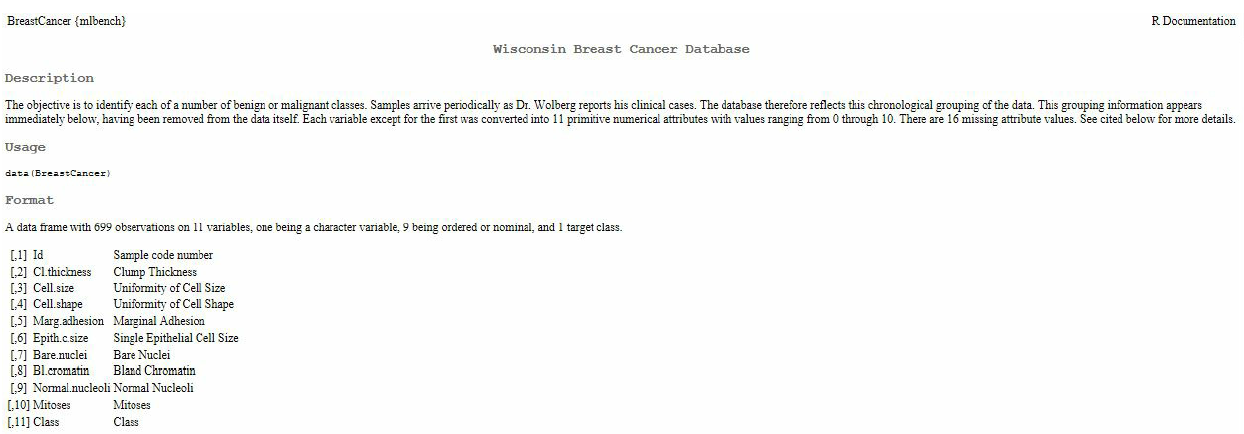

</div>


In [58]:
%%R
#Tratamiento de los valores NA

data(BreastCancer)

BreastCancer <- SF.asDecisionTable(BreastCancer,11)
# Metodo 1 (Deletion cases)
indx1 = MV.deletionCases(BreastCancer)
Cancer_M1 <- SF.applyDecTable(BreastCancer, indx1)
print("Estadístico")
print(summary(Cancer_M1))

# Metodo 2 (MV.mostCommonVal)
#Tratamiento valores NA
indx2 = MV.mostCommonVal(BreastCancer)
Cancer_M2 <- SF.applyDecTable(BreastCancer, indx2)
print("CancerM2")
print(summary(Cancer_M2))

# Metodo 3 (MV.mostCommonValResConcept)
indx3 = MV.mostCommonValResConcept(BreastCancer)
Cancer_M3 <- SF.applyDecTable(BreastCancer, indx3)
print("CancerM3")
print(summary(Cancer_M3))

# Metodo 4 (MV.globalClosestFit)
indx4 = MV.globalClosestFit(BreastCancer)
Cancer_M4 <- SF.applyDecTable(BreastCancer, indx4)
print("CancerM4")
print(summary(Cancer_M4))


print(summary(data(BreastCancer)))

[1] "Estadístico"
       Id       Cl.thickness   Cell.size     Cell.shape  Marg.adhesion
 1182404:  6   1      :139   1      :373   1      :346   1      :393  
 1276091:  5   5      :128   10     : 67   2      : 58   2      : 58  
 1198641:  3   3      :104   3      : 52   10     : 58   3      : 58  
 1017023:  2   4      : 79   2      : 45   3      : 53   10     : 55  
 1033078:  2   10     : 69   4      : 38   4      : 43   4      : 33  
 1061990:  2   2      : 50   5      : 30   5      : 32   8      : 25  
 (Other):663   (Other):114   (Other): 78   (Other): 93   (Other): 61  
  Epith.c.size  Bare.nuclei   Bl.cromatin  Normal.nucleoli    Mitoses   
 2      :376   1      :402   3      :161   1      :432     1      :563  
 3      : 71   10     :132   2      :160   10     : 60     2      : 35  
 4      : 48   2      : 30   1      :150   3      : 42     3      : 33  
 1      : 44   5      : 30   7      : 71   2      : 36     10     : 14  
 6      : 40   3      : 28   4      : 39   8     

In [60]:
%%R
# Fijamos la semilla aleatoria de los datos
set.seed(42)

# Barajeamos de manera aleatoria los indices de los renglones
renglones <- sample(nrow(Cancer_M2))

# De forma aleatoria reordenamos los datos
Cancer_M2 <- Cancer_M2[renglones, ]


#División por número de elementos 120 - 30

# Paso 1. Fijamos las variables de división de 120 datos
division <- sample(1:600,450)

#Paso 2. Tomamos 120 datos como: Datos prueba
prueba <- Cancer_M2[division,]
print(nrow(prueba))

#Paso 3. Tomamos 30 datos como: Datos test
test <- Cancer_M2[-division,]
print(nrow(test))

#MODELO AQ
# Calculo de Reglas AQ

#Paso 4. Convertimos la información a cáracter (Rough Set no permite otro tipo de clase en las variables)
prueba <- SF.asDecisionTable(prueba[-c(1)],10)
test <- SF.asDecisionTable(test[-c(1)],10)

rules.AQ <- RI.AQRules.RST(prueba, confidence = 1,timesCovered = 1)
print(rules.AQ)

predict.AQ <- predict(rules.AQ, test)
predict.AQ<-mutate(test[-5],predictions=predict.AQ$predictions)
#print(predict.AQ)

#Matriz de Confusion

print(confusionMatrix(table(predict.AQ[,10], test[,10])))

reduct.C <- FS.reduct.computation(prueba, method = "greedy.heuristic")
print(reduct.C)

[1] 450
[1] 249
A set consisting of  49  rules:
1. IF Cell.shape is 2 and Cell.size is 2 and Normal.nucleoli is 3 THEN  is benign;
		(supportSize=2; laplace=0.75) 
2. IF Epith.c.size is 2 and Normal.nucleoli is 2 THEN  is benign;
		(supportSize=17; laplace=0.947368421052632) 
3. IF Bl.cromatin is 1 and Cell.size is 1 THEN  is benign;
		(supportSize=87; laplace=0.98876404494382) 
4. IF Epith.c.size is 3 and Bl.cromatin is 2 THEN  is benign;
		(supportSize=8; laplace=0.9) 
5. IF Epith.c.size is 2 and Bl.cromatin is 2 and Mitoses is 1 THEN  is benign;
		(supportSize=80; laplace=0.98780487804878) 
6. IF Cell.size is 1 and Cl.thickness is 5 THEN  is benign;
		(supportSize=41; laplace=0.976744186046512) 
7. IF Marg.adhesion is 1 and Bare.nuclei is 1 and Normal.nucleoli is 1 THEN  is benign;
		(supportSize=198; laplace=0.995) 
8. IF Epith.c.size is 2 and Bare.nuclei is 1 and Bl.cromatin is 3 THEN  is benign;
		(supportSize=57; laplace=0.983050847457627) 
9. IF Bl.cromatin is 2 and Cell.shape 

In [61]:
%%R
IND=BC.IND.relation.FRST(prueba)

#RST=BC.LU.approximation.RST(Deporte_G, IND)
#print(RST)
summary(IND)

The name of model:  FRST 
The type of aggregation:  
t.aggregation       t.tnorm 
    "t.tnorm" "lukasiewicz" 
The name of relation:  
$type
[1] "tolerance"

$equation
[1] "eq.1"

The matrix of indiscernibility relation:  
    1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
1   1 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
2   0 1 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
3   0 0 1 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
4   0 0 0 1 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
5   0 0 0 0 1 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
6   0 0 0 0 0 1 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
7   0 0 0 0 0 0 1 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
8   0 0 0 0 0 0 0 1 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
9   0 0 0 0 0 0 0 0 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [0]:
%%R
#Modelo LEM2

# Calculo de Reglas LEM2

rules.LEM2 <- RI.LEM2Rules.RST(prueba)
rules.LEM2

# Evaluar las reglas LEM2 en test

predict.LEM2 <- predict(rules.LEM2, test)
predict.LEM2<-mutate(test[-10],predictions=predict.LEM2$predictions)
predict.LEM2


#Matriz de Confusión Modelo LEM 2

print(confusionMatrix(table(predict.LEM2[,10], test[,10])))


#Modelo CN2

rules.CN2 <- RI.CN2Rules.RST(prueba, K=3)
rules.CN2


# Evaluar las reglas CN2 en test

predict.CN2 <- predict(rules.CN2, test)
predict.CN2<-mutate(test[-10],predictions=predict.CN2$predictions)
predict.CN2


# Confusion Matrix and Statistics

print(confusionMatrix(table(predict.CN2[,10], test[,10])))


# Calculo de Reglas GFRS

control <- list(alpha.precision = 0.01, type.aggregation = c("t.tnorm", "lukasiewicz"), type.relation = c("tolerance", "eq.3"), t.implicator = "lukasiewicz")
rules.GFRS <- RI.GFRS.FRST(prueba, control)
rules.GFRS

# Evaluar las reglas GFRS en test

predict.GFRS <- predict(rules.GFRS, test[-10])
predict.GFRS<-mutate(test[-10],predictions=predict.GFRS$Especies)
predict.GFRS

# Confusion Matrix and Statistics
print(confusionMatrix(table(predict.GFRS[,10], test[,10])))


# Calculo de Reglas HybridFS

control <- list(type.aggregation = c("t.tnorm", "lukasiewicz"), type.relation = c("tolerance", "eq.1"), t.implicator = "lukasiewicz")
rules.HFS <- RI.hybridFS.FRST(prueba, control)
rules.HFS

# Confusion Matrix and Statistics

print(confusionMatrix(table(predict.HFS[,10], test[,10])))

#Utilizamos modelos para extraer indicadores de calidad de las reglas de decision RST

# Utilizamos Laplace

rules.L1 <- RI.laplace(rules.CN2)
print(rules.L1)

rules.L2 <- RI.laplace(rules.LEM2)
print(rules.L2)

rules.L3 <- RI.laplace(rules.AQ)
print(rules.L3)

rules.Su <- RI.support(rules.CN2)
print(rules.Su)

rules.Su <- RI.support(rules.LEM2)
print(rules.Su)

rules.Su <- RI.support(rules.AQ)
print(rules.Su)

## Ejemplo de RST vinos


Ejemplo de vinos

alcohol\
malid_acid\
ash alcalinity_of_ash\
magnesium\
total_phenols\
flavanoids\
nonflavanoid_phenols\
proanthocyanins\
color_intensity\
hue\
od \
proline\ 
class

### Discretizar valores

In [63]:
%%R
# Utilizarlo cuando las variables NO son nominales (cuantificables)
# Discretizamos valores del Método 1 (Prueba)
#cut.values <- D.discretization.RST(BreastCancer,type.method = "unsupervised.quantiles",nOfIntervals = 3)
#Prueba <- SF.applyDecTable(Prueba,cut.values)
#print(Prueba)

data(RoughSetData)
#print(head(BreastCancer))
wine=RoughSetData$wine.dt
print(summary(wine))

print(class(wine))
print(head(wine))




cut.values<-D.discretization.RST(wine,
                                 #decTable, 
                                 type.method="unsupervised.quantiles", nOfIntervals=4)
print(head(cut.values))
d.tra=SF.applyDecTable(wine,cut.values)
print(head(d.tra))

#print(as.numeric(BreastCancer[2,]))


    alcohol        malid_acid         ash        alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   magnesium      total_phenols     flavanoids    nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 proanthocyanins color_intensity  

In [66]:
%%R
# Fijamos la semilla aleatoria de los datos
set.seed(42)

# Barajeamos de manera aleatoria los indices de los renglones
renglones <- sample(nrow(d.tra))

# De forma aleatoria reordenamos los datos
d.tra <- d.tra[renglones, ]

# Paso 1. Fijamos las variables de división de 120 datos
division <- sample(1:nrow(d.tra),nrow(d.tra)*0.7)
prueba <- d.tra[division,]
print(nrow(prueba))
#Paso 3. Tomamos 30 datos como: Datos test
test <- d.tra[-division,]
nrow(test)

[1] 124
[1] 54


In [65]:
%%R
# Fijamos la semilla aleatoria de los datos
set.seed(42)

# Barajeamos de manera aleatoria los indices de los renglones
renglones <- sample(nrow(d.tra))

# De forma aleatoria reordenamos los datos
d.tra <- d.tra[renglones, ]


#División por número de elementos 120 - 30

# Paso 1. Fijamos las variables de división de 120 datos
division <- sample(1:nrow(d.tra),nrow(d.tra)*0.7)

#Paso 2. Tomamos 120 datos como: Datos prueba
prueba <- d.tra[division,]
nrow(prueba)

#Paso 3. Tomamos 30 datos como: Datos test
test <- d.tra[-division,]
nrow(test)

#MODELO AQ
# Calculo de Reglas AQ

#Paso 4. Convertimos la información a cáracter (Rough Set no permite otro tipo de clase en las variables)
#prueba <- SF.asDecisionTable(prueba[-c(1)],10)
#test <- SF.asDecisionTable(test[-c(1)],10)

rules.AQ <- RI.AQRules.RST(prueba, confidence = 1,timesCovered = 1)
print(rules.AQ)

predict.AQ <- predict(rules.AQ, test)
predict.AQ<-mutate(test[-14],predictions=predict.AQ$predictions)
#print(predict.AQ)

#Matriz de Confusion

print(confusionMatrix(table(predict.AQ[,14], test[,14])))

A set consisting of  22  rules:
1. IF proline is (500,674] and color_intensity is (6.2, Inf] THEN  is 3;
		(supportSize=9; laplace=0.833333333333333) 
2. IF hue is [-Inf,0.782] and proanthocyanins is (1.25,1.56] THEN  is 3;
		(supportSize=6; laplace=0.777777777777778) 
3. IF proanthocyanins is [-Inf,1.25] and hue is [-Inf,0.782] THEN  is 3;
		(supportSize=22; laplace=0.92) 
4. IF od is [-Inf,1.94] and malid_acid is (3.08, Inf] THEN  is 3;
		(supportSize=19; laplace=0.909090909090909) 
5. IF ash is (2.56, Inf] and flavanoids is [-Inf,1.2] THEN  is 3;
		(supportSize=9; laplace=0.833333333333333) 
6. IF alcalinity_of_ash is [-Inf,17.2] and alcohol is [-Inf,12.4] THEN  is 2;
		(supportSize=5; laplace=0.75) 
7. IF alcohol is [-Inf,12.4] and total_phenols is (2.8, Inf] THEN  is 2;
		(supportSize=5; laplace=0.75) 
8. IF color_intensity is [-Inf,3.22] THEN  is 2;
		(supportSize=33; laplace=0.944444444444444) 
9. IF proline is [-Inf,500] and ash is [-Inf,2.21] THEN  is 2;
		(supportSize=11; lap

In [0]:
%%R
?SF.asDecisionTable

R Help on ‘SF.asDecisionTable’SF.asDecisionTable          package:RoughSets          R Documentation

_C_o_n_v_e_r_t_i_n_g _a _d_a_t_a._f_r_a_m_e _i_n_t_o _a '_D_e_c_i_s_i_o_n_T_a_b_l_e' _o_b_j_e_c_t

_D_e_s_c_r_i_p_t_i_o_n:

     This function converts ‘data.frames’ into ‘DecisionTable’ objects.
     This is a standard data representation in the ‘RoughSets’ package.

_U_s_a_g_e:

     SF.asDecisionTable(dataset, decision.attr = NULL, indx.nominal = NULL)
     
_A_r_g_u_m_e_n_t_s:

 dataset: data.frame that contains objects/instances and
          attributes/features in its rows and columns, respectively.
          See in Section ‘Details’.

decision.attr: an integer value representing the index position of the
          decision attribute. If this parameter is ignored, then the
          function will treat the data as an information system or
          newdata/test data. In other words, it is necessary to define
   